# Import Packages and load dataset

package for visualization of network: https://ericmjl.github.io/nxviz/

In [62]:
import os 
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import pandas as pd
from pandas import Timestamp

import nxviz as nv

from itertools import combinations
from collections import defaultdict

%matplotlib inline
sns.set_style('ticks', rc={'xtick.direction':'in', 'ytick.direction':'in', 'xtick.top':True, 'ytick.right':True})

In [2]:
datadir = '../datasets/raw'
datadir_pr = '../datasets/processed'

In [3]:
#G_github_all  = nx.read_gpickle(os.path.join(datadir,'network','github.p'))

df_american = pd.read_csv(os.path.join(datadir,'network','american-revolution.csv'), index_col='Unnamed: 0')

In [4]:
df_colmsg = pd.read_csv(os.path.join(datadir_pr,'CollegeMsg.txt'), sep=' ', header=None, names=['sender', 'recipient', 'time'])

# unix time (second) to pandas datetime
df_colmsg.time = pd.to_datetime(df_colmsg.time, unit='s') 

df_colmsg['year']   = df_colmsg.time.dt.year
df_colmsg['month']  = df_colmsg.time.dt.month
df_colmsg['day']    = df_colmsg.time.dt.day
df_colmsg['hour']   = df_colmsg.time.dt.hour
df_colmsg['minute'] = df_colmsg.time.dt.minute
df_colmsg['second'] = df_colmsg.time.dt.second

In [5]:
df_colmsg.head()

,sender,recipient,time,year,month,day,hour,minute,second
0,1,2,2004-04-15 14:56:01,2004,4,15,14,56,1
1,3,4,2004-04-16 22:50:39,2004,4,16,22,50,39
2,5,2,2004-04-19 22:39:51,2004,4,19,22,39,51
3,6,7,2004-04-20 05:40:19,2004,4,20,5,40,19
4,8,7,2004-04-20 05:42:36,2004,4,20,5,42,36


In [6]:
df_colmsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59835 entries, 0 to 59834
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   sender     59835 non-null  int64         
 1   recipient  59835 non-null  int64         
 2   time       59835 non-null  datetime64[ns]
 3   year       59835 non-null  int64         
 4   month      59835 non-null  int64         
 5   day        59835 non-null  int64         
 6   hour       59835 non-null  int64         
 7   minute     59835 non-null  int64         
 8   second     59835 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 4.1 MB


In [7]:
# generate Github graph dataset directly from DataCamp
G_github = nx.Graph()
G_github.add_nodes_from([('u3568', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1919', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('p25235', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u784', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u880', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23363', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9659', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u29113', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u51', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21997', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5110', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4090', {'bipartite': 'users', 'centrality': 0.00356718192627824}), ('u696', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4881', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u12942', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5017', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u13704', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5108', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12934', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1119', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9538', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p61', {'bipartite': 'projects', 'centrality': 0.020808561236623065}), ('u8206', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10463', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18779', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1652', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6914', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1982', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1053', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u20134', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16626', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17982', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p86327', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('p131', {'bipartite': 'projects', 'centrality': 0.011890606420927466}), ('u31584', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17980', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2587', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u200', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u728', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2634', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u5633', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19722', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1390', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5777', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1247', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u46451', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15721', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8318', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u47128', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7254', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6187', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u360', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3970', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u24662', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1080', {'bipartite': 'users', 'centrality': 0.0047562425683709865}), ('u1345', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1380', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13981', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u387', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5709', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7807', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5068', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20595', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u264', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u83', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10811', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p178', {'bipartite': 'projects', 'centrality': 0.0047562425683709865}), ('u2908', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12109', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5576', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2764', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10540', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5350', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2584', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16890', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2315', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7954', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10680', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u31344', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15915', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10002', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6377', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p22862', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u681', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2075', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3007', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4395', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14401', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p952', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u20357', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21454', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3071', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13360', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u29122', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2875', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7052', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9938', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7690', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1585', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3697', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u9594', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5242', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4841', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5438', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u31997', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1771', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3266', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u4455', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p116', {'bipartite': 'projects', 'centrality': 0.005945303210463733}), ('u10041', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u691', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16204', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u367', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21113', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15750', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17919', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11161', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6101', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2741', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18743', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u301', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3397', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16988', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2037', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u625', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9686', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10266', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u29821', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1854', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('u7355', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7492', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u23965', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p236', {'bipartite': 'projects', 'centrality': 0.012485136741973839}), ('u10512', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7963', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4834', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u45126', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u836', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u26847', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5269', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1947', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6268', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4613', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2278', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u863', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13630', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u25002', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1909', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u23852', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8674', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u40999', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9203', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7380', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5721', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1035', {'bipartite': 'projects', 'centrality': 0.0047562425683709865}), ('u21202', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1731', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1126', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u29151', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8006', {'bipartite': 'users', 'centrality': 0.00356718192627824}), ('u21279', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1472', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u18089', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2394', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4228', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18837', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p13085', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u25417', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5771', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7049', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7223', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17388', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u35071', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u40886', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11868', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21480', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16788', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1631', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u3726', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1779', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1411', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u446', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u703', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18008', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8717', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u29626', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7348', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8286', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12881', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6644', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7743', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9088', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u537', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1455', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3578', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p701', {'bipartite': 'projects', 'centrality': 0.005945303210463733}), ('u4618', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2294', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3565', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24461', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4239', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1442', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2873', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('p2282', {'bipartite': 'projects', 'centrality': 0.004161712247324614}), ('u5749', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8167', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9345', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1029', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u37183', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1992', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14636', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p562', {'bipartite': 'projects', 'centrality': 0.011296076099881093}), ('u14084', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17311', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u27463', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p20804', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u15053', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11315', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u39174', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1123', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3439', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10769', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16827', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6936', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18147', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4674', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14155', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20323', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1584', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5716', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u48483', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8884', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p39860', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u3252', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13404', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1336', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18734', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11145', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7442', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5248', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p15212', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u5742', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u235', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7436', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8480', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9237', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u9162', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2230', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2253', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p103', {'bipartite': 'projects', 'centrality': 0.0089179548156956}), ('u16840', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16491', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u829', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8988', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1978', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2450', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u312', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17966', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u89', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u5424', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19679', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11011', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8588', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u627', {'bipartite': 'users', 'centrality': 0.00356718192627824}), ('u930', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u407', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u1436', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24086', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4939', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p8036', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('p15', {'bipartite': 'projects', 'centrality': 0.020214030915576692}), ('u108', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u69', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6999', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u23167', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1961', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19614', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2707', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('p101', {'bipartite': 'projects', 'centrality': 0.01961950059453032}), ('u3773', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3002', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1692', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u781', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8417', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u2153', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4817', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4515', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7493', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9969', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1322', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2284', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u44023', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10016', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19769', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7911', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5379', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16819', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4131', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p11462', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u14934', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p725', {'bipartite': 'projects', 'centrality': 0.020214030915576692}), ('u3520', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1772', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1758', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u347', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u18279', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1538', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6158', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19564', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2665', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3426', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4957', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p5368', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u1189', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6650', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p7171', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u6607', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9240', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1573', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4068', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11712', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13182', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20586', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u204', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7398', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p93877', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u8987', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8683', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9273', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u31592', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15139', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u25639', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2038', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p11556', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u13898', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3542', {'bipartite': 'projects', 'centrality': 0.005350772889417359}), ('u775', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1672', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u12416', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u46923', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u206', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12699', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4390', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7571', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3511', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('p31733', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u9903', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4203', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14907', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1588', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u7347', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u24983', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1501', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8948', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u22121', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2760', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u695', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2810', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u28', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1121', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1364', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2040', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u11116', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2757', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u34685', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2204', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u489', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u20430', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p911', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u3293', {'bipartite': 'users', 'centrality': 0.005350772889417359}), ('u5134', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u635', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12805', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13515', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u245', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2223', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8529', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u8704', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3267', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5571', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11159', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p120001', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('p19660', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u11212', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3315', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u4448', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u289', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u17532', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2545', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u12532', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p645', {'bipartite': 'projects', 'centrality': 0.044589774078478}), ('u16539', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15041', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u654', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3360', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u15924', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2562', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p4164', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('p8815', {'bipartite': 'projects', 'centrality': 0.004161712247324614}), ('u2535', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p16999', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u5524', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u363', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u16074', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1539', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5306', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4356', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u505', {'bipartite': 'users', 'centrality': 0.006539833531510107}), ('u1879', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13858', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2476', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u759', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8816', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p14972', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u19095', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6498', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12395', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4197', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11607', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3813', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u147', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10339', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1950', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u32630', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4912', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p39625', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u10484', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11026', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1085', {'bipartite': 'projects', 'centrality': 0.02556480380499405}), ('u5959', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1151', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u308', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10032', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12083', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1678', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2111', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12659', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u832', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u28097', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4154', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1808', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1012', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p6816', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('u11141', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3448', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u39152', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u168', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u823', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9935', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7087', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u33470', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4918', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u14739', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10104', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u17601', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5451', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u53396', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5614', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u52', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8570', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u844', {'bipartite': 'users', 'centrality': 0.013079667063020214}), ('u21660', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u302', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3913', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u842', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1340', {'bipartite': 'projects', 'centrality': 0.0047562425683709865}), ('u10819', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19870', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5125', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p17', {'bipartite': 'projects', 'centrality': 0.09453032104637335}), ('u4471', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3561', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u406', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23712', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u55229', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9188', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20773', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2090', {'bipartite': 'projects', 'centrality': 0.007728894173602853}), ('u43513', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u51973', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4156', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u790', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u183', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u663', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5928', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u567', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1788', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7519', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20251', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u285', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u40859', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8314', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u9122', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8057', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p350', {'bipartite': 'projects', 'centrality': 0.01961950059453032}), ('u24967', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6408', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17415', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16177', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10824', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17216', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1839', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9908', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6707', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15580', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1835', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24587', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6613', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1087', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u46347', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23221', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1203', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u35120', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4014', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1262', {'bipartite': 'users', 'centrality': 0.0029726516052318666}), ('u4571', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15320', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24619', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6339', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u892', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13305', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16223', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2224', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12731', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u974', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u584', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p5046', {'bipartite': 'projects', 'centrality': 0.0023781212841854932}), ('u1288', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u26589', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12319', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10753', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u306', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p291', {'bipartite': 'projects', 'centrality': 0.008323424494649227}), ('u29124', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5718', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7390', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20444', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p665', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u2317', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7881', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3889', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u198', {'bipartite': 'users', 'centrality': 0.011890606420927466}), ('u15374', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1492', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5078', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5286', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6906', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1576', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3395', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u32507', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2094', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9687', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11888', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u435', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13512', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2141', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10608', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1420', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5527', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4889', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12259', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9816', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7902', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10770', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3936', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u950', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13415', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p953', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u18362', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u34460', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7074', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u54872', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1045', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4047', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2653', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u14343', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2152', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u958', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p104516', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u2782', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13005', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u88', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u571', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u527', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u22271', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1676', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16', {'bipartite': 'users', 'centrality': 0.0029726516052318666}), ('u7722', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1009', {'bipartite': 'projects', 'centrality': 0.014863258026159332}), ('u2048', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p42828', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u2404', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9784', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5918', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1837', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4690', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3197', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u38009', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u290', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p284', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('u55949', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13567', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3166', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13536', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p53157', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u18458', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5366', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u535', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2378', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20955', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21495', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8420', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8110', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p2514', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('u3986', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u47706', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13325', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p82884', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u5283', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18425', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p28596', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1415', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12425', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16309', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3843', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4629', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p8357', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u13958', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u26751', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7635', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7798', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u990', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3980', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17147', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p607', {'bipartite': 'projects', 'centrality': 0.03329369797859691}), ('u1814', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p5299', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u4900', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5812', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3686', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u271', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u28595', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u7319', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1254', {'bipartite': 'users', 'centrality': 0.00356718192627824}), ('u13100', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('p2280', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u7257', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2275', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1202', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p22140', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('u376', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8969', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1658', {'bipartite': 'projects', 'centrality': 0.004161712247324614}), ('p878', {'bipartite': 'projects', 'centrality': 0.005350772889417359}), ('u22294', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9393', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u46622', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6870', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10758', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11766', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3589', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p55926', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('p299', {'bipartite': 'projects', 'centrality': 0.045778834720570746}), ('u964', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9873', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7388', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10862', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4980', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4914', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18056', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10755', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9342', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5971', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7261', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7909', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u7946', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1440', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u22730', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23320', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16097', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2724', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3751', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5449', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p97', {'bipartite': 'projects', 'centrality': 0.013079667063020214}), ('u1703', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10219', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1644', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u872', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p9110', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u1063', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5250', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7476', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u708', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11414', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2823', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u8883', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p63478', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u7634', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10623', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u646', {'bipartite': 'users', 'centrality': 0.0029726516052318666}), ('u1614', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u460', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7808', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5383', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6203', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p114', {'bipartite': 'projects', 'centrality': 0.010701545778834719}), ('u7475', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1852', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7405', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p35480', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u2857', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1406', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u17181', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u24846', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7384', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1707', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1092', {'bipartite': 'projects', 'centrality': 0.013674197384066587}), ('p2646', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u15006', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2616', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3251', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u15439', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3731', {'bipartite': 'users', 'centrality': 0.0047562425683709865}), ('p109281', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u2422', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4334', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1230', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8753', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3280', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u13902', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u9577', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6164', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u32053', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20627', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4303', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15542', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4004', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u22642', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23800', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2221', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u1610', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1069', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1451', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3395', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10009', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4363', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p8616', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1575', {'bipartite': 'users', 'centrality': 0.006539833531510107}), ('u8135', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6732', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2765', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p357', {'bipartite': 'projects', 'centrality': 0.020214030915576692}), ('u6462', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u54834', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10544', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21102', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14212', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u272', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3247', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u746', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p7392', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u1552', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9228', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p4893', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u3414', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u30179', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2822', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('p2804', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u9002', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p8360', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u10667', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24748', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u43385', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1393', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4711', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u2057', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13540', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13441', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u59', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19108', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3139', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6441', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u724', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2780', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p20876', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u6684', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u30076', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2652', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6815', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3306', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16465', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3390', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u19547', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1043', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12196', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8946', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13754', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u769', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p120674', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1149', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16389', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u422', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u38', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2586', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7977', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3802', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u975', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6727', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13302', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1762', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2337', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u238', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6546', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u322', {'bipartite': 'users', 'centrality': 0.0029726516052318666}), ('u6816', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17055', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8854', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u15133', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u29372', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1483', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6326', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1058', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21908', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u33067', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u139', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4790', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19776', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14242', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8507', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4439', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u710', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11560', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1083', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u8444', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14641', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u22739', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12167', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u647', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u534', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6812', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1753', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1546', {'bipartite': 'projects', 'centrality': 0.004161712247324614}), ('u31002', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8453', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1425', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13387', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u20073', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u36491', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12061', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12013', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2870', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2842', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4022', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23782', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1673', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u2227', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u351', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13596', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p11038', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u1148', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8541', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p41712', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u46384', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7045', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4123', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1955', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2836', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1433', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p189', {'bipartite': 'projects', 'centrality': 0.011296076099881093}), ('u17072', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1857', {'bipartite': 'projects', 'centrality': 0.005945303210463733}), ('u758', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14432', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18169', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1545', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u47644', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1787', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2768', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u41577', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13460', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8789', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2097', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11423', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12933', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u28957', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p2562', {'bipartite': 'projects', 'centrality': 0.005350772889417359}), ('u5901', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6042', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5941', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23906', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17474', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p103214', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u4706', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u11608', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p11518', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u2506', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u572', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u1449', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u22842', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u501', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4911', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2045', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u1937', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2933', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5312', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u25210', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1319', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('p1183', {'bipartite': 'projects', 'centrality': 0.005945303210463733}), ('u3946', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4397', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u48233', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u36081', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p39012', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u7192', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2956', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5478', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3253', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3243', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u875', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3175', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1409', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2514', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1170', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u8718', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p18661', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u9696', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23479', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15510', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2527', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u393', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10244', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3116', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10085', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u11660', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u25067', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19254', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p48096', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u12790', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p162', {'bipartite': 'projects', 'centrality': 0.014863258026159332}), ('u1691', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p25995', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u9425', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14738', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5637', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6427', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14941', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8953', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3588', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p79617', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u2406', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u16107', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p689', {'bipartite': 'projects', 'centrality': 0.011296076099881093}), ('u3332', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3107', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p223', {'bipartite': 'projects', 'centrality': 0.0178359096313912}), ('u7373', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u904', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1828', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8408', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16579', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1850', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17714', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u365', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10425', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8737', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11571', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3632', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13917', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9026', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2222', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3729', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15281', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6969', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p6503', {'bipartite': 'projects', 'centrality': 0.0023781212841854932}), ('p298', {'bipartite': 'projects', 'centrality': 0.022592152199762187}), ('u817', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23217', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p53720', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u15715', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4675', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('p3295', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('p3604', {'bipartite': 'projects', 'centrality': 0.004161712247324614}), ('u24430', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2479', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u11126', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u53', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14014', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1266', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3540', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u28872', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1866', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u401', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2044', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1340', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1140', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3045', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u87', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5340', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2509', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p18007', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u18030', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6395', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21688', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2688', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3897', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p19540', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1998', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u22452', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8769', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5534', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p13168', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u6758', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2480', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u7471', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1384', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1398', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5729', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p4301', {'bipartite': 'projects', 'centrality': 0.008323424494649227}), ('u86', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u51420', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p16038', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('p39010', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u6970', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u334', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p5704', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u27327', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5220', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11956', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u40447', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3494', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2927', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9033', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4129', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10373', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p186', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u7353', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8093', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4317', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u6742', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1632', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u632', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u9761', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u9144', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11396', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11707', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14119', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2712', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1079', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u8387', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p31653', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u8284', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u51085', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p12812', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1658', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1975', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u7229', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5400', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5488', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3040', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2150', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2854', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14589', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5408', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u299', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p23219', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u20307', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2056', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u9765', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13839', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u26622', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u226', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u7709', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6925', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p5529', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u6645', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3994', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6350', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10142', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2721', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u112', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11279', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u50665', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u26910', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5635', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u702', {'bipartite': 'users', 'centrality': 0.004161712247324614}), ('u12697', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6977', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10051', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12184', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24200', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6905', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10937', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3287', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p985', {'bipartite': 'projects', 'centrality': 0.005350772889417359}), ('u940', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6361', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3610', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11056', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8596', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u25054', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4029', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u35476', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5088', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p558', {'bipartite': 'projects', 'centrality': 0.01961950059453032}), ('u1560', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3745', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p6894', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u3945', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3110', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7779', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u53159', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2127', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u914', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16733', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3453', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2486', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3939', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18358', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p16327', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u587', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19671', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1979', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7890', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p671', {'bipartite': 'projects', 'centrality': 0.0023781212841854932}), ('u2077', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15475', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11075', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3095', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('p647', {'bipartite': 'projects', 'centrality': 0.014863258026159332}), ('u368', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u922', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2569', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11235', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3636', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1278', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('p5436', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u485', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6868', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15110', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u932', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5411', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u49373', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u589', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9245', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p37885', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u5803', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p845', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u1720', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p138', {'bipartite': 'projects', 'centrality': 0.018430439952437573}), ('u8431', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7483', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14306', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5520', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u22874', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9298', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u29288', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u175', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5970', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1328', {'bipartite': 'projects', 'centrality': 0.009512485136741973}), ('p5706', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u8221', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2852', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21378', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12813', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1890', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9904', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13834', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3595', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5323', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u9621', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p7091', {'bipartite': 'projects', 'centrality': 0.005350772889417359}), ('u23970', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3569', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1211', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u2133', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15369', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1679', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4730', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5695', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23082', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1910', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u22016', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1056', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u955', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9343', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2150', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u2398', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u684', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10349', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4927', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6926', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2570', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p26828', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u4458', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1478', {'bipartite': 'projects', 'centrality': 0.008323424494649227}), ('u978', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u36', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6844', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4136', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1179', {'bipartite': 'projects', 'centrality': 0.01426872770511296}), ('u9741', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u316', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2416', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7594', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12664', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4080', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1305', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u26130', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21351', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5745', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7396', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3666', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17066', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20271', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p46796', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1780', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4408', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2796', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23608', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6982', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5759', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u48', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3720', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('p9183', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u2148', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('p1229', {'bipartite': 'projects', 'centrality': 0.010107015457788346}), ('u3106', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u544', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u95', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2002', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5582', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15499', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6234', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8797', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14055', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12888', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11896', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u744', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u8187', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1212', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12834', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5073', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u2068', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4946', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8767', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u868', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4101', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u27708', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p19941', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u4019', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2950', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u44', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u569', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u15716', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18428', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8874', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u361', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u16387', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u8256', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1050', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u6207', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u30', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2169', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u14378', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4323', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u6153', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19601', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9194', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2730', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7320', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u27492', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3479', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7908', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18265', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3454', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p23284', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u6250', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1986', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('p1222', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u9075', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5657', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16048', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6725', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1049', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1032', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u935', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u6290', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p18292', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u254', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6580', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u30317', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5015', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3934', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21965', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13574', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1454', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11897', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u931', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4756', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p10010', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('u1208', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('p3784', {'bipartite': 'projects', 'centrality': 0.0047562425683709865}), ('u140', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14473', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12296', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1514', {'bipartite': 'projects', 'centrality': 0.013079667063020214}), ('u18071', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20050', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p604', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u16873', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1204', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2551', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u16302', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20520', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6473', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1619', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u159', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p2277', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u6229', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u92', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6316', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u7721', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7456', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16297', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u986', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u666', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15692', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1407', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5525', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1898', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u21477', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1152', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1148', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u437', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10340', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u46527', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18323', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3456', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p65', {'bipartite': 'projects', 'centrality': 0.021997621878715814}), ('u1240', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3051', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1895', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1146', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6881', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1726', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2472', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2906', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u2459', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2242', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2008', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u17708', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5458', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u3123', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10211', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6437', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7510', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11505', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19011', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u48984', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4270', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u26930', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8666', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u719', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u48716', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4776', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u530', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u42326', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7271', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u84', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16562', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u2046', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u723', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1736', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u801', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u15647', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u4053', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6733', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u343', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u45824', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p18592', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u13257', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4208', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1106', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1299', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('p2593', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u6560', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2678', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2573', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u215', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u7696', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20816', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u7330', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2131', {'bipartite': 'projects', 'centrality': 0.0089179548156956}), ('u7570', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21752', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10566', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6975', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18643', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11762', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2320', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u12332', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u4045', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u38824', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16279', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4057', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u25383', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u10280', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1197', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u45637', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p896', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u3574', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5135', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5010', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u19369', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5936', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u2212', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u608', {'bipartite': 'users', 'centrality': 0.005350772889417359}), ('u12284', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u22431', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7100', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u862', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p515', {'bipartite': 'projects', 'centrality': 0.0023781212841854932}), ('u4783', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7887', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2137', {'bipartite': 'users', 'centrality': 0.005945303210463733}), ('u258', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p35818', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u26872', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u39746', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6528', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5290', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p10738', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u255', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14075', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u82', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u987', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u36982', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10884', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3248', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4833', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3120', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2391', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3033', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14465', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4182', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18631', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14435', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u791', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9900', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1777', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u846', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1749', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6682', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2256', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6661', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6172', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u816', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u44372', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u37359', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16985', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u35047', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2510', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u20543', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6174', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p22025', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1180', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5511', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4826', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u558', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u15600', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p4756', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u8577', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2120', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u456', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u8795', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19020', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u7765', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1859', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u2898', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u765', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u31133', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8061', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p10548', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('p6589', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u15556', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5157', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17047', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24868', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u11972', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4501', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u16800', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5588', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1546', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2965', {'bipartite': 'projects', 'centrality': 0.0047562425683709865}), ('u7515', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1144', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1111', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1958', {'bipartite': 'projects', 'centrality': 0.0047562425683709865}), ('u3468', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u399', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1648', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7579', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3522', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3693', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2771', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4503', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5375', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p10866', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('p839', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('p743', {'bipartite': 'projects', 'centrality': 0.005945303210463733}), ('u13784', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23585', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13762', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u18411', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1123', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u10265', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p37868', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u28342', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p383', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u118', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11816', {'bipartite': 'users', 'centrality': 0.0029726516052318666}), ('p4208', {'bipartite': 'projects', 'centrality': 0.0089179548156956}), ('u33527', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15691', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u233', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5563', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u15416', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14304', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2189', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u15395', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1880', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p7855', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u11236', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p28054', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u809', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4689', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1868', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4960', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5956', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u7903', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3670', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u13616', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8520', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u11317', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20168', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3942', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3894', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2547', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p2585', {'bipartite': 'projects', 'centrality': 0.006539833531510107}), ('u13007', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11631', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7422', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u31841', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21244', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u698', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p286', {'bipartite': 'projects', 'centrality': 0.0178359096313912}), ('u655', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u506', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2504', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1584', {'bipartite': 'projects', 'centrality': 0.00178359096313912}), ('u7473', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1066', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u8582', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1642', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3790', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1379', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u9338', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1798', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10747', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7213', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u14181', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5416', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u358', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u673', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p49968', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u1357', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3483', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u106', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5916', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u195', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9107', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p1336', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u8112', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p50218', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u7393', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u25084', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10505', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2844', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u44762', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3128', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p52539', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u4364', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p3678', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('p3654', {'bipartite': 'projects', 'centrality': 0.004161712247324614}), ('u14776', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u36889', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u43656', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2237', {'bipartite': 'projects', 'centrality': 0.0029726516052318666}), ('u30986', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5158', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u11142', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u35914', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u2464', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u327', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2754', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u6749', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('p7760', {'bipartite': 'projects', 'centrality': 0.00356718192627824}), ('u10214', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3702', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p2888', {'bipartite': 'projects', 'centrality': 0.005350772889417359}), ('u12819', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p29', {'bipartite': 'projects', 'centrality': 0.029131985731272292}), ('u6431', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20163', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p36939', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u9275', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u24', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6021', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3577', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1153', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1682', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9599', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u774', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7677', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u273', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u20268', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3153', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5228', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2863', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1034', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2901', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9186', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7204', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u18770', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2596', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p545', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('u712', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u6869', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1911', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p233', {'bipartite': 'projects', 'centrality': 0.0178359096313912}), ('u16528', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21976', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u45017', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9153', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23538', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u4284', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u33154', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5055', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u17598', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3990', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u929', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p53786', {'bipartite': 'projects', 'centrality': 0.0005945303210463733}), ('p18015', {'bipartite': 'projects', 'centrality': 0.0011890606420927466}), ('u14467', {'bipartite': 'users', 'centrality': 0.0023781212841854932}), ('u3329', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u21251', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5674', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u10848', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u23683', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u5845', {'bipartite': 'users', 'centrality': 0.004161712247324614}), ('u2254', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u1267', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u15928', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u3134', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u6077', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u7520', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('p8', {'bipartite': 'projects', 'centrality': 0.03329369797859691}), ('u13258', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u36130', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u2831', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u9911', {'bipartite': 'users', 'centrality': 0.00178359096313912}), ('u17053', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u298', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u5177', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u1736', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('p2734', {'bipartite': 'projects', 'centrality': 0.004161712247324614}), ('u31652', {'bipartite': 'users', 'centrality': 0.0011890606420927466}), ('u3142', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u19687', {'bipartite': 'users', 'centrality': 0.0005945303210463733}), ('u11088', {'bipartite': 'users', 'centrality': 0.0005945303210463733})])
G_github.add_edges_from([('u3568', 'p647', {}), ('u1919', 'p178', {}), ('u1919', 'p4301', {}), ('u1919', 'p286', {}), ('p25235', 'u2480', {}), ('u784', 'p558', {}), ('u784', 'p29', {}), ('u880', 'p236', {}), ('u23363', 'p17', {}), ('u9659', 'p116', {}), ('u29113', 'p357', {}), ('u51', 'p1123', {}), ('u21997', 'p17', {}), ('u5110', 'p3604', {}), ('u4090', 'p11462', {}), ('u4090', 'p17', {}), ('u4090', 'p8360', {}), ('u4090', 'p3784', {}), ('u4090', 'p4756', {}), ('u4090', 'p3654', {}), ('u696', 'p1092', {}), ('u4881', 'p3395', {}), ('u4881', 'p65', {}), ('u12942', 'p604', {}), ('u5017', 'p3542', {}), ('u5017', 'p17', {}), ('u5017', 'p1148', {}), ('u13704', 'p645', {}), ('u5108', 'p65', {}), ('u12934', 'p645', {}), ('u1119', 'p131', {}), ('u9538', 'p607', {}), ('p61', 'u8318', {}), ('p61', 'u301', {}), ('p61', 'u1411', {}), ('p61', 'u407', {}), ('p61', 'u9969', {}), ('p61', 'u2038', {}), ('p61', 'u489', {}), ('p61', 'u3293', {}), ('p61', 'u4156', {}), ('p61', 'u4571', {}), ('p61', 'u2094', {}), ('p61', 'u7798', {}), ('p61', 'u1707', {}), ('p61', 'u13302', {}), ('p61', 'u12061', {}), ('p61', 'u1673', {}), ('p61', 'u572', {}), ('p61', 'u10085', {}), ('p61', 'u15281', {}), ('p61', 'u2509', {}), ('p61', 'u7709', {}), ('p61', 'u2721', {}), ('p61', 'u6982', {}), ('p61', 'u4323', {}), ('p61', 'u27492', {}), ('p61', 'u2906', {}), ('p61', 'u3123', {}), ('p61', 'u215', {}), ('p61', 'u6172', {}), ('p61', 'u5563', {}), ('p61', 'u2844', {}), ('p61', 'u5158', {}), ('p61', 'u9275', {}), ('p61', 'u3577', {}), ('p61', 'u16528', {}), ('u8206', 'p7091', {}), ('u10463', 'p223', {}), ('u18779', 'p17', {}), ('u1652', 'p2090', {}), ('u1652', 'p1478', {}), ('u6914', 'p1328', {}), ('u1982', 'p189', {}), ('u1053', 'p1478', {}), ('u1053', 'p1222', {}), ('u20134', 'p17', {}), ('u20134', 'p8', {}), ('u16626', 'p286', {}), ('u17982', 'p17', {}), ('p86327', 'u1575', {}), ('p131', 'u12109', {}), ('p131', 'u1947', {}), ('p131', 'u8286', {}), ('p131', 'u6936', {}), ('p131', 'u844', {}), ('p131', 'u4014', {}), ('p131', 'u7388', {}), ('p131', 'u2823', {}), ('p131', 'u1393', {}), ('p131', 'u1787', {}), ('p131', 'u5941', {}), ('p131', 'u8718', {}), ('p131', 'u11660', {}), ('p131', 'u27327', {}), ('p131', 'u175', {}), ('p131', 'u1146', {}), ('p131', 'u765', {}), ('p131', 'u7515', {}), ('p131', 'u21244', {}), ('u31584', 'p299', {}), ('u17980', 'p1478', {}), ('u2587', 'p3251', {}), ('u200', 'p17', {}), ('u728', 'p15', {}), ('p2634', 'u1455', {}), ('p2634', 'u5312', {}), ('p2634', 'u2137', {}), ('p2634', 'u9900', {}), ('p2634', 'u3942', {}), ('u5633', 'p178', {}), ('u19722', 'p4208', {}), ('u1390', 'p1658', {}), ('u5777', 'p1183', {}), ('u1247', 'p15', {}), ('u46451', 'p291', {}), ('u15721', 'p645', {}), ('u47128', 'p357', {}), ('u7254', 'p29', {}), ('u6187', 'p114', {}), ('u360', 'p2585', {}), ('u3970', 'p65', {}), ('u3970', 'p4208', {}), ('u24662', 'p8', {}), ('u1080', 'p17', {}), ('u1080', 'p3561', {}), ('u1080', 'p665', {}), ('u1080', 'p8357', {}), ('u1080', 'p4301', {}), ('u1080', 'p16038', {}), ('u1080', 'p12812', {}), ('u1080', 'p1584', {}), ('u1345', 'p9110', {}), ('u1345', 'p1092', {}), ('u1380', 'p15', {}), ('u13981', 'p299', {}), ('u387', 'p4208', {}), ('u5709', 'p299', {}), ('u7807', 'p103', {}), ('u5068', 'p558', {}), ('u20595', 'p607', {}), ('u264', 'p298', {}), ('u264', 'p2131', {}), ('u83', 'p952', {}), ('u83', 'p299', {}), ('u10811', 'p17', {}), ('p178', 'u2476', {}), ('p178', 'u4629', {}), ('p178', 'u226', {}), ('p178', 'u6250', {}), ('p178', 'u48716', {}), ('p178', 'u1379', {}), ('u2908', 'p116', {}), ('u5576', 'p357', {}), ('u2764', 'p299', {}), ('u10540', 'p1736', {}), ('u5350', 'p645', {}), ('u2584', 'p645', {}), ('u16890', 'p357', {}), ('u2315', 'p607', {}), ('u7954', 'p101', {}), ('u10680', 'p985', {}), ('u31344', 'p357', {}), ('u15915', 'p103', {}), ('u10002', 'p65', {}), ('u6377', 'p1085', {}), ('p22862', 'u8854', {}), ('u681', 'p97', {}), ('u2075', 'p15', {}), ('u2075', 'p299', {}), ('u3007', 'p689', {}), ('u4395', 'p607', {}), ('u14401', 'p5046', {}), ('p952', 'u844', {}), ('p952', 'u4711', {}), ('p952', 'u3745', {}), ('p952', 'u23082', {}), ('p952', 'u22016', {}), ('u20357', 'p3784', {}), ('u21454', 'p4301', {}), ('u3071', 'p298', {}), ('u13360', 'p1085', {}), ('u29122', 'p29', {}), ('u2875', 'p1909', {}), ('u7052', 'p1546', {}), ('u9938', 'p725', {}), ('u7690', 'p291', {}), ('u1585', 'p562', {}), ('u3697', 'p725', {}), ('u3697', 'p284', {}), ('u3697', 'p558', {}), ('u3697', 'p8', {}), ('u9594', 'p4208', {}), ('u5242', 'p1009', {}), ('u4841', 'p604', {}), ('u5438', 'p985', {}), ('u31997', 'p97', {}), ('u1771', 'p2585', {}), ('p3266', 'u844', {}), ('p3266', 'u646', {}), ('u4455', 'p1736', {}), ('p116', 'u16988', {}), ('p116', 'u6999', {}), ('p116', 'u6498', {}), ('p116', 'u5614', {}), ('p116', 'u7475', {}), ('p116', 'u36081', {}), ('p116', 'u25054', {}), ('p116', 'u2169', {}), ('u10041', 'p689', {}), ('u691', 'p299', {}), ('u691', 'p357', {}), ('u16204', 'p645', {}), ('u367', 'p357', {}), ('u21113', 'p6894', {}), ('u15750', 'p562', {}), ('u17919', 'p8815', {}), ('u11161', 'p2562', {}), ('u6101', 'p299', {}), ('u2741', 'p97', {}), ('u18743', 'p2562', {}), ('u301', 'p2646', {}), ('u3397', 'p2545', {}), ('u2037', 'p1009', {}), ('u625', 'p114', {}), ('u9686', 'p1085', {}), ('u9686', 'p286', {}), ('u10266', 'p299', {}), ('u29821', 'p1340', {}), ('p1854', 'u3139', {}), ('p1854', 'u7908', {}), ('p1854', 'u14467', {}), ('u7355', 'p189', {}), ('u7492', 'p8036', {}), ('u7492', 'p15', {}), ('u7492', 'p3784', {}), ('u23965', 'p1328', {}), ('p236', 'u2757', {}), ('p236', 'u2317', {}), ('p236', 'u198', {}), ('p236', 'u13567', {}), ('p236', 'u10755', {}), ('p236', 'u17474', {}), ('p236', 'u9425', {}), ('p236', 'u3540', {}), ('p236', 'u1998', {}), ('p236', 'u5534', {}), ('p236', 'u9765', {}), ('p236', 'u1278', {}), ('p236', 'u5970', {}), ('p236', 'u14055', {}), ('p236', 'u744', {}), ('p236', 'u2008', {}), ('p236', 'u3574', {}), ('p236', 'u258', {}), ('p236', 'u82', {}), ('p236', 'u11236', {}), ('u10512', 'p2090', {}), ('u7963', 'p299', {}), ('u4834', 'p162', {}), ('u45126', 'p1229', {}), ('u836', 'p1170', {}), ('u26847', 'p10548', {}), ('u5269', 'p299', {}), ('u5269', 'p1328', {}), ('u6268', 'p689', {}), ('u4613', 'p2045', {}), ('u2278', 'p2593', {}), ('u863', 'p13085', {}), ('u13630', 'p17', {}), ('u25002', 'p233', {}), ('p1909', 'u8988', {}), ('p1909', 'u1879', {}), ('p1909', 'u14739', {}), ('p1909', 'u17415', {}), ('p1909', 'u3889', {}), ('p1909', 'u3589', {}), ('p1909', 'u9228', {}), ('p1909', 'u3243', {}), ('p1909', 'u1632', {}), ('p1909', 'u702', {}), ('u23852', 'p1085', {}), ('u8674', 'p2131', {}), ('u40999', 'p1328', {}), ('u9203', 'p1085', {}), ('u7380', 'p2646', {}), ('u5721', 'p1009', {}), ('p1035', 'u14084', {}), ('p1035', 'u8417', {}), ('p1035', 'u1415', {}), ('p1035', 'u3946', {}), ('p1035', 'u935', {}), ('p1035', 'u17708', {}), ('p1035', 'u11816', {}), ('p1035', 'u2547', {}), ('u21202', 'p17', {}), ('u1731', 'p65', {}), ('u1126', 'p26828', {}), ('u1126', 'p2888', {}), ('u29151', 'p896', {}), ('u8006', 'p17', {}), ('u8006', 'p53157', {}), ('u8006', 'p22140', {}), ('u8006', 'p1079', {}), ('u8006', 'p558', {}), ('u8006', 'p2734', {}), ('u21279', 'p645', {}), ('u1472', 'p911', {}), ('u1472', 'p607', {}), ('u18089', 'p896', {}), ('u2394', 'p101', {}), ('u2394', 'p1514', {}), ('u4228', 'p1857', {}), ('u18837', 'p689', {}), ('p13085', 'u15647', {}), ('u25417', 'p725', {}), ('u5771', 'p604', {}), ('u7049', 'p1092', {}), ('u7223', 'p299', {}), ('u6', 'p645', {}), ('u17388', 'p17', {}), ('u35071', 'p2804', {}), ('u40886', 'p17', {}), ('u11868', 'p17', {}), ('u21480', 'p8', {}), ('u16788', 'p17', {}), ('u1631', 'p15', {}), ('u1631', 'p350', {}), ('u1631', 'p6894', {}), ('u3726', 'p1183', {}), ('u1779', 'p1229', {}), ('u1779', 'p286', {}), ('u1411', 'p101', {}), ('u1411', 'p17', {}), ('u446', 'p5436', {}), ('u446', 'p1514', {}), ('u703', 'p15', {}), ('u18008', 'p3542', {}), ('u8717', 'p845', {}), ('u29626', 'p645', {}), ('u7348', 'p1179', {}), ('u12881', 'p189', {}), ('u6644', 'p286', {}), ('u7743', 'p299', {}), ('u9088', 'p1328', {}), ('u537', 'p1514', {}), ('u537', 'p1584', {}), ('u1455', 'p65', {}), ('u3578', 'p97', {}), ('u3578', 'p233', {}), ('p701', 'u11011', {}), ('p701', 'u3293', {}), ('p701', 'u11956', {}), ('p701', 'u10373', {}), ('p701', 'u922', {}), ('p701', 'u12296', {}), ('p701', 'u4270', {}), ('p701', 'u719', {}), ('p701', 'u4208', {}), ('p701', 'u2189', {}), ('u4618', 'p2131', {}), ('u2294', 'p1183', {}), ('u3565', 'p1222', {}), ('u24461', 'p2131', {}), ('u24461', 'p29', {}), ('u4239', 'p350', {}), ('u1442', 'p138', {}), ('p2873', 'u505', {}), ('p2282', 'u7436', {}), ('p2282', 'u14934', {}), ('p2282', 'u33470', {}), ('p2282', 'u198', {}), ('p2282', 'u4458', {}), ('p2282', 'u5657', {}), ('p2282', 'u3153', {}), ('u5749', 'p607', {}), ('u8167', 'p233', {}), ('u9345', 'p101', {}), ('u1029', 'p1085', {}), ('u37183', 'p17', {}), ('u1992', 'p562', {}), ('u14636', 'p645', {}), ('p562', 'u9162', {}), ('p562', 'u16539', {}), ('p562', 'u11026', {}), ('p562', 'u832', {}), ('p562', 'u8110', {}), ('p562', 'u10758', {}), ('p562', 'u10219', {}), ('p562', 'u10544', {}), ('p562', 'u322', {}), ('p562', 'u11279', {}), ('p562', 'u50665', {}), ('p562', 'u343', {}), ('p562', 'u5290', {}), ('p562', 'u14435', {}), ('p562', 'u765', {}), ('p562', 'u14304', {}), ('u17311', 'p189', {}), ('u27463', 'p17', {}), ('p20804', 'u844', {}), ('u15053', 'p647', {}), ('u11315', 'p31733', {}), ('u39174', 'p17', {}), ('u1123', 'p299', {}), ('u3439', 'p725', {}), ('u10769', 'p1085', {}), ('u16827', 'p17', {}), ('u18147', 'p725', {}), ('u4674', 'p15', {}), ('u14155', 'p286', {}), ('u20323', 'p17', {}), ('u1584', 'p8', {}), ('u5716', 'p101', {}), ('u48483', 'p17', {}), ('u8884', 'p3604', {}), ('p39860', 'u7442', {}), ('p39860', 'u702', {}), ('u3252', 'p985', {}), ('u13404', 'p2545', {}), ('u13404', 'p17', {}), ('u1336', 'p604', {}), ('u18734', 'p2551', {}), ('u11145', 'p4301', {}), ('u5248', 'p162', {}), ('p15212', 'u844', {}), ('u5742', 'p15', {}), ('u5742', 'p17', {}), ('u235', 'p1050', {}), ('u8480', 'p97', {}), ('u9237', 'p17', {}), ('u9237', 'p1092', {}), ('u2230', 'p558', {}), ('u2253', 'p1009', {}), ('u2253', 'p515', {}), ('p103', 'u781', {}), ('p103', 'u1573', {}), ('p103', 'u289', {}), ('p103', 'u1539', {}), ('p103', 'u7635', {}), ('p103', 'u2221', {}), ('p103', 'u238', {}), ('p103', 'u9144', {}), ('p103', 'u2796', {}), ('p103', 'u12834', {}), ('p103', 'u1208', {}), ('p103', 'u1726', {}), ('p103', 'u4053', {}), ('u16840', 'p101', {}), ('u16491', 'p299', {}), ('u829', 'p647', {}), ('u8988', 'p114', {}), ('u1978', 'p645', {}), ('u2450', 'p2646', {}), ('u312', 'p558', {}), ('u17966', 'p1857', {}), ('u89', 'p16999', {}), ('u89', 'p162', {}), ('u89', 'p1179', {}), ('u89', 'p29', {}), ('u5424', 'p3604', {}), ('u19679', 'p162', {}), ('u8588', 'p1123', {}), ('u627', 'p5046', {}), ('u627', 'p2562', {}), ('u627', 'p162', {}), ('u627', 'p2150', {}), ('u627', 'p10866', {}), ('u627', 'p233', {}), ('u930', 'p607', {}), ('u407', 'p15', {}), ('u407', 'p1179', {}), ('u1436', 'p1179', {}), ('u24086', 'p17', {}), ('u4939', 'p17', {}), ('u4939', 'p607', {}), ('p8036', 'u505', {}), ('p8036', 'u4912', {}), ('p8036', 'u2652', {}), ('p8036', 'u351', {}), ('p8036', 'u9599', {}), ('p15', 'u12699', {}), ('p15', 'u4390', {}), ('p15', 'u3293', {}), ('p15', 'u3267', {}), ('p15', 'u10104', {}), ('p15', 'u1788', {}), ('p15', 'u11888', {}), ('p15', 'u376', {}), ('p15', 'u4980', {}), ('p15', 'u5449', {}), ('p15', 'u322', {}), ('p15', 'u15133', {}), ('p15', 'u3243', {}), ('p15', 'u3588', {}), ('p15', 'u7709', {}), ('p15', 'u744', {}), ('p15', 'u4019', {}), ('p15', 'u569', {}), ('p15', 'u2730', {}), ('p15', 'u1049', {}), ('p15', 'u4833', {}), ('p15', 'u5511', {}), ('p15', 'u1111', {}), ('p15', 'u18411', {}), ('u108', 'p65', {}), ('u69', 'p1183', {}), ('u69', 'p2237', {}), ('u6999', 'p17', {}), ('u23167', 'p8', {}), ('u1961', 'p604', {}), ('u19614', 'p607', {}), ('u2707', 'p17', {}), ('u2707', 'p25995', {}), ('u2707', 'p8', {}), ('p101', 'u5379', {}), ('p101', 'u1588', {}), ('p101', 'u3913', {}), ('p101', 'u5928', {}), ('p101', 'u8314', {}), ('p101', 'u1203', {}), ('p101', 'u4047', {}), ('p101', 'u2152', {}), ('p101', 'u3166', {}), ('p101', 'u4629', {}), ('p101', 'u1440', {}), ('p101', 'u6815', {}), ('p101', 'u12013', {}), ('p101', 'u1449', {}), ('p101', 'u1979', {}), ('p101', 'u21378', {}), ('p101', 'u23970', {}), ('p101', 'u1212', {}), ('p101', 'u1898', {}), ('p101', 'u12284', {}), ('p101', 'u846', {}), ('p101', 'u8577', {}), ('p101', 'u19020', {}), ('p101', 'u1859', {}), ('p101', 'u1357', {}), ('p101', 'u1153', {}), ('p101', 'u31652', {}), ('u3773', 'p1179', {}), ('u3002', 'p2734', {}), ('u1692', 'p350', {}), ('u8417', 'p189', {}), ('u2153', 'p1478', {}), ('u4817', 'p1229', {}), ('u4515', 'p4208', {}), ('u7493', 'p65', {}), ('u1322', 'p97', {}), ('u2284', 'p3654', {}), ('u44023', 'p233', {}), ('u10016', 'p350', {}), ('u19769', 'p299', {}), ('u7911', 'p607', {}), ('u7911', 'p647', {}), ('u16819', 'p17', {}), ('u4131', 'p17', {}), ('p725', 'u19564', {}), ('p725', 'u20586', {}), ('p725', 'u17601', {}), ('p725', 'u844', {}), ('p725', 'u10819', {}), ('p725', 'u406', {}), ('p725', 'u10824', {}), ('p725', 'u9908', {}), ('p725', 'u15580', {}), ('p725', 'u24587', {}), ('p725', 'u5366', {}), ('p725', 'u21102', {}), ('p725', 'u6684', {}), ('p725', 'u2870', {}), ('p725', 'u4706', {}), ('p725', 'u12790', {}), ('p725', 'u8093', {}), ('p725', 'u1975', {}), ('p725', 'u3453', {}), ('p725', 'u3939', {}), ('p725', 'u9298', {}), ('p725', 'u10349', {}), ('p725', 'u544', {}), ('p725', 'u11896', {}), ('p725', 'u13574', {}), ('p725', 'u5458', {}), ('p725', 'u16562', {}), ('p725', 'u25383', {}), ('p725', 'u14181', {}), ('u3520', 'p645', {}), ('u1772', 'p17', {}), ('u1758', 'p878', {}), ('u347', 'p1179', {}), ('u347', 'p3678', {}), ('u18279', 'p6503', {}), ('u1538', 'p1514', {}), ('u6158', 'p299', {}), ('u2665', 'p8357', {}), ('u3426', 'p357', {}), ('u3426', 'p7091', {}), ('u4957', 'p6816', {}), ('p5368', 'u505', {}), ('p5368', 'u4675', {}), ('u1189', 'p8', {}), ('u6650', 'p665', {}), ('p7171', 'u608', {}), ('p7171', 'u21', {}), ('u6607', 'p299', {}), ('u9240', 'p223', {}), ('u4068', 'p607', {}), ('u11712', 'p2090', {}), ('u13182', 'p189', {}), ('u20586', 'p1085', {}), ('u204', 'p299', {}), ('u7398', 'p350', {}), ('u7398', 'p223', {}), ('p93877', 'u1149', {}), ('u8987', 'p1085', {}), ('u8683', 'p65', {}), ('u9273', 'p1179', {}), ('u31592', 'p2562', {}), ('u15139', 'p607', {}), ('u25639', 'p607', {}), ('p11556', 'u1406', {}), ('p11556', 'u5845', {}), ('u13898', 'p645', {}), ('p3542', 'u1012', {}), ('p3542', 'u23221', {}), ('p3542', 'u5918', {}), ('p3542', 'u7229', {}), ('p3542', 'u6977', {}), ('p3542', 'u15692', {}), ('p3542', 'u10884', {}), ('u775', 'p29', {}), ('u1672', 'p223', {}), ('u1672', 'p1123', {}), ('u1672', 'p29', {}), ('u12416', 'p17', {}), ('u46923', 'p357', {}), ('u206', 'p233', {}), ('u7571', 'p2646', {}), ('u3511', 'p17', {}), ('u3511', 'p2514', {}), ('u3511', 'p138', {}), ('u3511', 'p4208', {}), ('p31733', 'u2137', {}), ('u9903', 'p162', {}), ('u4203', 'p16038', {}), ('u14907', 'p1092', {}), ('u1588', 'p607', {}), ('u7347', 'p2237', {}), ('u7347', 'p29', {}), ('u24983', 'p17', {}), ('u1501', 'p8357', {}), ('u8948', 'p8', {}), ('u22121', 'p645', {}), ('u2760', 'p138', {}), ('u695', 'p558', {}), ('u2810', 'p607', {}), ('u28', 'p558', {}), ('u1121', 'p1092', {}), ('u1364', 'p2090', {}), ('u2040', 'p1009', {}), ('u2040', 'p29', {}), ('u11116', 'p298', {}), ('u34685', 'p2804', {}), ('u2204', 'p291', {}), ('u2204', 'p114', {}), ('u489', 'p2734', {}), ('u20430', 'p607', {}), ('p911', 'u844', {}), ('p911', 'u1552', {}), ('p911', 'u2222', {}), ('p911', 'u7677', {}), ('p911', 'u2863', {}), ('u3293', 'p17', {}), ('u3293', 'p1170', {}), ('u3293', 'p13168', {}), ('u3293', 'p31653', {}), ('u3293', 'p23219', {}), ('u3293', 'p7760', {}), ('u5134', 'p743', {}), ('u635', 'p3251', {}), ('u12805', 'p2090', {}), ('u13515', 'p291', {}), ('u245', 'p1514', {}), ('u2223', 'p223', {}), ('u8529', 'p645', {}), ('u8529', 'p350', {}), ('u8529', 'p357', {}), ('u8704', 'p17', {}), ('u8704', 'p39012', {}), ('u3267', 'p645', {}), ('u5571', 'p2965', {}), ('u11159', 'p350', {}), ('p120001', 'u5078', {}), ('p19660', 'u3731', {}), ('u11212', 'p645', {}), ('p3315', 'u844', {}), ('p3315', 'u2406', {}), ('u4448', 'p17', {}), ('u4448', 'p2280', {}), ('u289', 'p350', {}), ('u17532', 'p1229', {}), ('p2545', 'u39152', {}), ('p2545', 'u892', {}), ('p2545', 'u198', {}), ('p2545', 'u20520', {}), ('u12532', 'p1170', {}), ('p645', 'u5959', {}), ('p645', 'u308', {}), ('p645', 'u4154', {}), ('p645', 'u4918', {}), ('p645', 'u24967', {}), ('p645', 'u13305', {}), ('p645', 'u5286', {}), ('p645', 'u18362', {}), ('p645', 'u958', {}), ('p645', 'u22271', {}), ('p645', 'u21495', {}), ('p645', 'u7798', {}), ('p645', 'u2275', {}), ('p645', 'u6870', {}), ('p645', 'u16097', {}), ('p645', 'u872', {}), ('p645', 'u7634', {}), ('p645', 'u7405', {}), ('p645', 'u2616', {}), ('p645', 'u3280', {}), ('p645', 'u1069', {}), ('p645', 'u746', {}), ('p645', 'u724', {}), ('p645', 'u30076', {}), ('p645', 'u3306', {}), ('p645', 'u975', {}), ('p645', 'u1483', {}), ('p645', 'u4439', {}), ('p645', 'u393', {}), ('p645', 'u19254', {}), ('p645', 'u3332', {}), ('p645', 'u3107', {}), ('p645', 'u8769', {}), ('p645', 'u8387', {}), ('p645', 'u1975', {}), ('p645', 'u226', {}), ('p645', 'u6350', {}), ('p645', 'u7483', {}), ('p645', 'u9343', {}), ('p645', 'u48', {}), ('p645', 'u8187', {}), ('p645', 'u569', {}), ('p645', 'u20050', {}), ('p645', 'u159', {}), ('p645', 'u666', {}), ('p645', 'u1407', {}), ('p645', 'u84', {}), ('p645', 'u2320', {}), ('p645', 'u19369', {}), ('p645', 'u2212', {}), ('p645', 'u608', {}), ('p645', 'u3248', {}), ('p645', 'u14465', {}), ('p645', 'u8520', {}), ('p645', 'u30986', {}), ('p645', 'u10214', {}), ('p645', 'u20163', {}), ('p645', 'u23683', {}), ('u15041', 'p1183', {}), ('u654', 'p350', {}), ('u3360', 'p2090', {}), ('u3360', 'p286', {}), ('u15924', 'p607', {}), ('u2562', 'p65', {}), ('p4164', 'u2527', {}), ('p4164', 'u9075', {}), ('p8815', 'u1839', {}), ('p8815', 'u8420', {}), ('p8815', 'u572', {}), ('p8815', 'u3897', {}), ('p8815', 'u26910', {}), ('p8815', 'u3693', {}), ('u2535', 'p350', {}), ('p16999', 'u198', {}), ('u5524', 'p2646', {}), ('u363', 'p985', {}), ('u363', 'p1229', {}), ('u363', 'p3654', {}), ('u16074', 'p223', {}), ('u5306', 'p607', {}), ('u5306', 'p162', {}), ('u4356', 'p286', {}), ('u505', 'p17', {}), ('u505', 'p3251', {}), ('u505', 'p1546', {}), ('u505', 'p1183', {}), ('u505', 'p5436', {}), ('u505', 'p2150', {}), ('u505', 'p26828', {}), ('u505', 'p3678', {}), ('u13858', 'p298', {}), ('u759', 'p65', {}), ('u8816', 'p1222', {}), ('p14972', 'u1254', {}), ('u19095', 'p2131', {}), ('u12395', 'p298', {}), ('u4197', 'p1514', {}), ('u11607', 'p298', {}), ('u3813', 'p65', {}), ('u147', 'p647', {}), ('u10339', 'p1222', {}), ('u1950', 'p8', {}), ('u32630', 'p17', {}), ('p39625', 'u15510', {}), ('p39625', 'u15647', {}), ('u10484', 'p298', {}), ('p1085', 'u10032', {}), ('p1085', 'u10104', {}), ('p1085', 'u844', {}), ('p1085', 'u9188', {}), ('p1085', 'u1288', {}), ('p1085', 'u32507', {}), ('p1085', 'u5527', {}), ('p1085', 'u950', {}), ('p1085', 'u1676', {}), ('p1085', 'u16309', {}), ('p1085', 'u5250', {}), ('p1085', 'u15006', {}), ('p1085', 'u14212', {}), ('p1085', 'u272', {}), ('p1085', 'u17072', {}), ('p1085', 'u3946', {}), ('p1085', 'u4397', {}), ('p1085', 'u6969', {}), ('p1085', 'u11126', {}), ('p1085', 'u9245', {}), ('p1085', 'u3106', {}), ('p1085', 'u19601', {}), ('p1085', 'u1152', {}), ('p1085', 'u2472', {}), ('p1085', 'u4776', {}), ('p1085', 'u16279', {}), ('p1085', 'u1180', {}), ('p1085', 'u8061', {}), ('p1085', 'u17047', {}), ('p1085', 'u3468', {}), ('p1085', 'u233', {}), ('p1085', 'u4960', {}), ('p1085', 'u31841', {}), ('p1085', 'u2831', {}), ('u1151', 'p1009', {}), ('u308', 'p8', {}), ('u12083', 'p223', {}), ('u1678', 'p8', {}), ('u2111', 'p189', {}), ('u12659', 'p743', {}), ('u832', 'p17', {}), ('u832', 'p2585', {}), ('u28097', 'p299', {}), ('u4154', 'p647', {}), ('u1808', 'p299', {}), ('u1808', 'p1170', {}), ('p6816', 'u844', {}), ('p6816', 'u6560', {}), ('u11141', 'p233', {}), ('u3448', 'p17', {}), ('u168', 'p4301', {}), ('u823', 'p3604', {}), ('u9935', 'p29', {}), ('u7087', 'p8', {}), ('u4918', 'p65', {}), ('u17601', 'p350', {}), ('u5451', 'p357', {}), ('u53396', 'p17', {}), ('u5614', 'p298', {}), ('u52', 'p65', {}), ('u8570', 'p1328', {}), ('u844', 'p17', {}), ('u844', 'p9110', {}), ('u844', 'p2646', {}), ('u844', 'p11518', {}), ('u844', 'p2045', {}), ('u844', 'p1328', {}), ('u844', 'p19941', {}), ('u844', 'p604', {}), ('u844', 'p2965', {}), ('u844', 'p1958', {}), ('u844', 'p1336', {}), ('u844', 'p2237', {}), ('u21660', 'p8', {}), ('u302', 'p689', {}), ('u842', 'p1009', {}), ('p1340', 'u9122', {}), ('p1340', 'u5718', {}), ('p1340', 'u2141', {}), ('p1340', 'u1937', {}), ('p1340', 'u2056', {}), ('p1340', 'u3720', {}), ('p1340', 'u7204', {}), ('u19870', 'p299', {}), ('u5125', 'p65', {}), ('p17', 'u43513', {}), ('p17', 'u51973', {}), ('p17', 'u183', {}), ('p17', 'u20251', {}), ('p17', 'u8314', {}), ('p17', 'u8057', {}), ('p17', 'u1262', {}), ('p17', 'u24619', {}), ('p17', 'u29124', {}), ('p17', 'u198', {}), ('p17', 'u5078', {}), ('p17', 'u34460', {}), ('p17', 'u7722', {}), ('p17', 'u38009', {}), ('p17', 'u20955', {}), ('p17', 'u47706', {}), ('p17', 'u3843', {}), ('p17', 'u3686', {}), ('p17', 'u1254', {}), ('p17', 'u13100', {}), ('p17', 'u10862', {}), ('p17', 'u18056', {}), ('p17', 'u22730', {}), ('p17', 'u5449', {}), ('p17', 'u1063', {}), ('p17', 'u17181', {}), ('p17', 'u24846', {}), ('p17', 'u15439', {}), ('p17', 'u3731', {}), ('p17', 'u13902', {}), ('p17', 'u4004', {}), ('p17', 'u22642', {}), ('p17', 'u2221', {}), ('p17', 'u1575', {}), ('p17', 'u6732', {}), ('p17', 'u30179', {}), ('p17', 'u2822', {}), ('p17', 'u24748', {}), ('p17', 'u3390', {}), ('p17', 'u13754', {}), ('p17', 'u1149', {}), ('p17', 'u8854', {}), ('p17', 'u11560', {}), ('p17', 'u14641', {}), ('p17', 'u13387', {}), ('p17', 'u20073', {}), ('p17', 'u23782', {}), ('p17', 'u8541', {}), ('p17', 'u2836', {}), ('p17', 'u1433', {}), ('p17', 'u13460', {}), ('p17', 'u28957', {}), ('p17', 'u25210', {}), ('p17', 'u2527', {}), ('p17', 'u14738', {}), ('p17', 'u15715', {}), ('p17', 'u2480', {}), ('p17', 'u7471', {}), ('p17', 'u51420', {}), ('p17', 'u4317', {}), ('p17', 'u9761', {}), ('p17', 'u13839', {}), ('p17', 'u26622', {}), ('p17', 'u26910', {}), ('p17', 'u5635', {}), ('p17', 'u702', {}), ('p17', 'u4029', {}), ('p17', 'u7779', {}), ('p17', 'u18358', {}), ('p17', 'u5520', {}), ('p17', 'u9621', {}), ('p17', 'u4927', {}), ('p17', 'u4946', {}), ('p17', 'u9194', {}), ('p17', 'u30317', {}), ('p17', 'u16302', {}), ('p17', 'u1619', {}), ('p17', 'u6316', {}), ('p17', 'u21477', {}), ('p17', 'u801', {}), ('p17', 'u15647', {}), ('p17', 'u20816', {}), ('p17', 'u7570', {}), ('p17', 'u18643', {}), ('p17', 'u12332', {}), ('p17', 'u45637', {}), ('p17', 'u608', {}), ('p17', 'u2137', {}), ('p17', 'u36982', {}), ('p17', 'u6661', {}), ('p17', 'u44372', {}), ('p17', 'u10265', {}), ('p17', 'u28342', {}), ('p17', 'u11816', {}), ('p17', 'u33527', {}), ('p17', 'u5956', {}), ('p17', 'u1379', {}), ('p17', 'u3483', {}), ('p17', 'u7393', {}), ('p17', 'u44762', {}), ('p17', 'u11142', {}), ('p17', 'u35914', {}), ('p17', 'u6749', {}), ('p17', 'u273', {}), ('p17', 'u7204', {}), ('p17', 'u6869', {}), ('p17', 'u45017', {}), ('p17', 'u4284', {}), ('p17', 'u14467', {}), ('p17', 'u5845', {}), ('p17', 'u9911', {}), ('p17', 'u31652', {}), ('p17', 'u19687', {}), ('u4471', 'p2734', {}), ('p3561', 'u9741', {}), ('u23712', 'p2090', {}), ('u55229', 'p233', {}), ('u20773', 'p97', {}), ('p2090', 'u6203', {}), ('p2090', 'u8753', {}), ('p2090', 'u2836', {}), ('p2090', 'u2688', {}), ('p2090', 'u11396', {}), ('p2090', 'u6361', {}), ('u4156', 'p298', {}), ('u790', 'p743', {}), ('u663', 'p647', {}), ('u5928', 'p1736', {}), ('u567', 'p1229', {}), ('u7519', 'p350', {}), ('u20251', 'p35480', {}), ('u285', 'p8', {}), ('u40859', 'p3395', {}), ('u8314', 'p286', {}), ('p350', 'u13305', {}), ('p350', 'u5286', {}), ('p350', 'u9816', {}), ('p350', 'u16', {}), ('p350', 'u29372', {}), ('p350', 'u6326', {}), ('p350', 'u10425', {}), ('p350', 'u2486', {}), ('p350', 'u587', {}), ('p350', 'u12813', {}), ('p350', 'u26130', {}), ('p350', 'u868', {}), ('p350', 'u1240', {}), ('p350', 'u2678', {}), ('p350', 'u3033', {}), ('p350', 'u18631', {}), ('p350', 'u24868', {}), ('p350', 'u1144', {}), ('p350', 'u358', {}), ('p350', 'u6749', {}), ('p350', 'u5845', {}), ('u6408', 'p607', {}), ('u17415', 'p1179', {}), ('u16177', 'p4208', {}), ('u17216', 'p286', {}), ('u6707', 'p7760', {}), ('u1835', 'p878', {}), ('u24587', 'p604', {}), ('u6613', 'p299', {}), ('u1087', 'p689', {}), ('u46347', 'p4208', {}), ('u35120', 'p8', {}), ('u4014', 'p4208', {}), ('u1262', 'p120674', {}), ('u1262', 'p1319', {}), ('u1262', 'p1179', {}), ('u1262', 'p2888', {}), ('u15320', 'p189', {}), ('u6339', 'p607', {}), ('u6339', 'p1092', {}), ('u16223', 'p607', {}), ('u2224', 'p1123', {}), ('u12731', 'p65', {}), ('u974', 'p357', {}), ('u584', 'p286', {}), ('p5046', 'u1575', {}), ('p5046', 'u2127', {}), ('u26589', 'p162', {}), ('u12319', 'p607', {}), ('u10753', 'p233', {}), ('u306', 'p233', {}), ('p291', 'u7881', {}), ('p291', 'u1045', {}), ('p291', 'u28595', {}), ('p291', 'u46384', {}), ('p291', 'u3175', {}), ('p291', 'u904', {}), ('p291', 'u8797', {}), ('p291', 'u4101', {}), ('p291', 'u361', {}), ('p291', 'u7393', {}), ('u7390', 'p299', {}), ('u20444', 'p2131', {}), ('p665', 'u14738', {}), ('p665', 'u7396', {}), ('p665', 'u4503', {}), ('p665', 'u698', {}), ('u198', 'p3395', {}), ('u198', 'p114', {}), ('u198', 'p189', {}), ('u198', 'p48096', {}), ('u198', 'p79617', {}), ('u198', 'p18007', {}), ('u198', 'p19540', {}), ('u198', 'p16327', {}), ('u198', 'p18592', {}), ('u198', 'p2593', {}), ('u198', 'p10738', {}), ('u198', 'p743', {}), ('u198', 'p50218', {}), ('u198', 'p36939', {}), ('u198', 'p545', {}), ('u15374', 'p299', {}), ('u15374', 'p357', {}), ('u1492', 'p65', {}), ('u6906', 'p1009', {}), ('u6906', 'p4301', {}), ('u1576', 'p189', {}), ('p3395', 'u1420', {}), ('p3395', 'u88', {}), ('p3395', 'u7384', {}), ('u9687', 'p299', {}), ('u435', 'p286', {}), ('u13512', 'p16038', {}), ('u10608', 'p558', {}), ('u4889', 'p299', {}), ('u12259', 'p7091', {}), ('u7902', 'p985', {}), ('u10770', 'p1009', {}), ('u3936', 'p1514', {}), ('u13415', 'p29', {}), ('p953', 'u2077', {}), ('p953', 'u5845', {}), ('u7074', 'p29', {}), ('u54872', 'p3095', {}), ('u1045', 'p558', {}), ('u2653', 'p223', {}), ('u2653', 'p1123', {}), ('u14343', 'p299', {}), ('p104516', 'u9911', {}), ('u2782', 'p286', {}), ('u13005', 'p1222', {}), ('u571', 'p1478', {}), ('u527', 'p299', {}), ('u1676', 'p558', {}), ('u16', 'p1092', {}), ('u16', 'p1170', {}), ('u16', 'p7091', {}), ('u16', 'p604', {}), ('p1009', 'u990', {}), ('p1009', 'u17147', {}), ('p1009', 'u8969', {}), ('p1009', 'u1440', {}), ('p1009', 'u501', {}), ('p1009', 'u1409', {}), ('p1009', 'u53', {}), ('p1009', 'u8093', {}), ('p1009', 'u2150', {}), ('p1009', 'u361', {}), ('p1009', 'u30', {}), ('p1009', 'u6290', {}), ('p1009', 'u6580', {}), ('p1009', 'u4689', {}), ('p1009', 'u35914', {}), ('p1009', 'u6021', {}), ('u2048', 'p3251', {}), ('p42828', 'u5635', {}), ('u2404', 'p138', {}), ('u9784', 'p8', {}), ('u1837', 'p558', {}), ('u4690', 'p8', {}), ('u3197', 'p5529', {}), ('u290', 'p223', {}), ('p284', 'u1575', {}), ('p284', 'u5525', {}), ('u55949', 'p1229', {}), ('u13536', 'p223', {}), ('u18458', 'p743', {}), ('u535', 'p2888', {}), ('u2378', 'p223', {}), ('u8110', 'p29', {}), ('p2514', 'u7594', {}), ('p2514', 'u15928', {}), ('u3986', 'p2237', {}), ('u13325', 'p1183', {}), ('p82884', 'u11142', {}), ('u5283', 'p607', {}), ('u18425', 'p162', {}), ('p28596', 'u3686', {}), ('u12425', 'p1222', {}), ('u3843', 'p2131', {}), ('p8357', 'u17055', {}), ('p8357', 'u17598', {}), ('u13958', 'p2045', {}), ('u26751', 'p65', {}), ('u990', 'p8', {}), ('u3980', 'p3784', {}), ('p607', 'u7909', {}), ('p607', 'u8507', {}), ('p607', 'u8789', {}), ('p607', 'u2933', {}), ('p607', 'u3253', {}), ('p607', 'u1691', {}), ('p607', 'u4675', {}), ('p607', 'u1266', {}), ('p607', 'u86', {}), ('p607', 'u51085', {}), ('p607', 'u226', {}), ('p607', 'u6868', {}), ('p607', 'u3666', {}), ('p607', 'u3720', {}), ('p607', 'u2148', {}), ('p607', 'u2169', {}), ('p607', 'u6153', {}), ('p607', 'u7320', {}), ('p607', 'u20050', {}), ('p607', 'u2242', {}), ('p607', 'u5458', {}), ('p607', 'u7510', {}), ('p607', 'u7696', {}), ('p607', 'u4182', {}), ('p607', 'u558', {}), ('p607', 'u16800', {}), ('p607', 'u3522', {}), ('p607', 'u1642', {}), ('p607', 'u5158', {}), ('p607', 'u20268', {}), ('p607', 'u712', {}), ('p607', 'u10848', {}), ('p607', 'u5177', {}), ('u1814', 'p8', {}), ('p5299', 'u3483', {}), ('u4900', 'p138', {}), ('u5812', 'p8', {}), ('u3686', 'p39010', {}), ('u271', 'p689', {}), ('u28595', 'p3604', {}), ('u7319', 'p7760', {}), ('u1254', 'p1658', {}), ('u1254', 'p103214', {}), ('u1254', 'p1478', {}), ('u1254', 'p2551', {}), ('u13100', 'p10010', {}), ('u13100', 'p28054', {}), ('u13100', 'p233', {}), ('u7257', 'p1092', {}), ('u1202', 'p299', {}), ('p22140', 'u5803', {}), ('p22140', 'u2189', {}), ('p1658', 'u23800', {}), ('p1658', 'u16465', {}), ('p1658', 'u2337', {}), ('p1658', 'u361', {}), ('p1658', 'u3670', {}), ('p878', 'u646', {}), ('p878', 'u13902', {}), ('p878', 'u4363', {}), ('p878', 'u6441', {}), ('p878', 'u632', {}), ('p878', 'u3994', {}), ('p878', 'u8596', {}), ('u22294', 'p223', {}), ('u9393', 'p896', {}), ('u46622', 'p2804', {}), ('u11766', 'p1222', {}), ('u3589', 'p29', {}), ('p55926', 'u12332', {}), ('p299', 'u7261', {}), ('p299', 'u7909', {}), ('p299', 'u3751', {}), ('p299', 'u5383', {}), ('p299', 'u9577', {}), ('p299', 'u15542', {}), ('p299', 'u8135', {}), ('p299', 'u9002', {}), ('p299', 'u2768', {}), ('p299', 'u14941', {}), ('p299', 'u14014', {}), ('p299', 'u1340', {}), ('p299', 'u1140', {}), ('p299', 'u18030', {}), ('p299', 'u2056', {}), ('p299', 'u5635', {}), ('p299', 'u10937', {}), ('p299', 'u35476', {}), ('p299', 'u16733', {}), ('p299', 'u49373', {}), ('p299', 'u3595', {}), ('p299', 'u684', {}), ('p299', 'u978', {}), ('p299', 'u36', {}), ('p299', 'u23608', {}), ('p299', 'u2148', {}), ('p299', 'u5073', {}), ('p299', 'u6580', {}), ('p299', 'u1208', {}), ('p299', 'u5525', {}), ('p299', 'u10340', {}), ('p299', 'u3456', {}), ('p299', 'u2046', {}), ('p299', 'u45824', {}), ('p299', 'u25383', {}), ('p299', 'u14075', {}), ('p299', 'u2391', {}), ('p299', 'u2256', {}), ('p299', 'u4826', {}), ('p299', 'u19020', {}), ('p299', 'u13784', {}), ('p299', 'u11631', {}), ('p299', 'u8112', {}), ('p299', 'u2464', {}), ('p299', 'u21976', {}), ('p299', 'u9153', {}), ('p299', 'u17053', {}), ('u964', 'p2150', {}), ('u9873', 'p2888', {}), ('u10862', 'p53786', {}), ('u4914', 'p5529', {}), ('u9342', 'p558', {}), ('u5971', 'p671', {}), ('u7946', 'p1229', {}), ('u7946', 'p286', {}), ('u23320', 'p558', {}), ('u2724', 'p29', {}), ('u3751', 'p8', {}), ('p97', 'u54834', {}), ('p97', 'u19776', {}), ('p97', 'u12167', {}), ('p97', 'u4022', {}), ('p97', 'u1673', {}), ('p97', 'u24430', {}), ('p97', 'u40447', {}), ('p97', 'u368', {}), ('p97', 'u569', {}), ('p97', 'u3479', {}), ('p97', 'u1454', {}), ('p97', 'u10211', {}), ('p97', 'u16985', {}), ('p97', 'u3483', {}), ('p97', 'u33154', {}), ('u1703', 'p298', {}), ('u10219', 'p189', {}), ('u1644', 'p1546', {}), ('u872', 'p2131', {}), ('u7476', 'p223', {}), ('u708', 'p845', {}), ('u11414', 'p138', {}), ('u2823', 'p162', {}), ('u8883', 'p8', {}), ('p63478', 'u7393', {}), ('u7634', 'p298', {}), ('u10623', 'p29', {}), ('u646', 'p985', {}), ('u646', 'p1328', {}), ('u646', 'p2585', {}), ('u1614', 'p604', {}), ('u460', 'p1050', {}), ('u7808', 'p65', {}), ('u7808', 'p2131', {}), ('u5383', 'p138', {}), ('p114', 'u4303', {}), ('p114', 'u2586', {}), ('p114', 'u6727', {}), ('p114', 'u238', {}), ('p114', 'u14242', {}), ('p114', 'u572', {}), ('p114', 'u9026', {}), ('p114', 'u3287', {}), ('p114', 'u15110', {}), ('p114', 'u1720', {}), ('p114', 'u5520', {}), ('p114', 'u1305', {}), ('p114', 'u7520', {}), ('u1852', 'p286', {}), ('u2857', 'p1328', {}), ('u1406', 'p1328', {}), ('u17181', 'p1857', {}), ('u7384', 'p65', {}), ('p1092', 'u3395', {}), ('p1092', 'u3247', {}), ('p1092', 'u5478', {}), ('p1092', 'u4675', {}), ('p1092', 'u8284', {}), ('p1092', 'u1560', {}), ('p1092', 'u6725', {}), ('p1092', 'u4057', {}), ('p1092', 'u31133', {}), ('p1092', 'u5375', {}), ('p1092', 'u15691', {}), ('p1092', 'u15395', {}), ('p1092', 'u506', {}), ('p1092', 'u6431', {}), ('p2646', 'u272', {}), ('p2646', 'u769', {}), ('p2646', 'u647', {}), ('p2646', 'u10244', {}), ('p2646', 'u4783', {}), ('p3251', 'u437', {}), ('u3731', 'p357', {}), ('u3731', 'p6503', {}), ('u3731', 'p3295', {}), ('u3731', 'p46796', {}), ('u3731', 'p1229', {}), ('u3731', 'p743', {}), ('p109281', 'u2221', {}), ('u2422', 'p233', {}), ('u4334', 'p138', {}), ('u1230', 'p1229', {}), ('u3280', 'p29', {}), ('u6164', 'p1123', {}), ('u32053', 'p689', {}), ('u20627', 'p2965', {}), ('u2221', 'p37868', {}), ('u1610', 'p1179', {}), ('u1451', 'p2965', {}), ('u3395', 'p2237', {}), ('u10009', 'p1545', {}), ('p8616', 'u5845', {}), ('u1575', 'p689', {}), ('u1575', 'p53720', {}), ('u1575', 'p5704', {}), ('u1575', 'p65', {}), ('u1575', 'p49968', {}), ('u1575', 'p52539', {}), ('u1575', 'p18015', {}), ('u2765', 'p233', {}), ('p357', 'u59', {}), ('p357', 'u8453', {}), ('p357', 'u13596', {}), ('p357', 'u23906', {}), ('p357', 'u11608', {}), ('p357', 'u5637', {}), ('p357', 'u365', {}), ('p357', 'u3045', {}), ('p357', 'u11707', {}), ('p357', 'u11075', {}), ('p357', 'u18323', {}), ('p357', 'u19011', {}), ('p357', 'u10280', {}), ('p357', 'u2120', {}), ('p357', 'u11972', {}), ('p357', 'u13762', {}), ('p357', 'u8520', {}), ('p357', 'u13007', {}), ('p357', 'u18770', {}), ('p357', 'u14467', {}), ('u6462', 'p1229', {}), ('u14212', 'p138', {}), ('p7392', 'u38824', {}), ('p7392', 'u2137', {}), ('p4893', 'u9621', {}), ('p4893', 'u987', {}), ('u3414', 'p6894', {}), ('u2822', 'p647', {}), ('u2822', 'p896', {}), ('u2822', 'p7855', {}), ('p2804', 'u31002', {}), ('p2804', 'u42326', {}), ('p2804', 'u2137', {}), ('p8360', 'u1859', {}), ('u10667', 'p2585', {}), ('u43385', 'p1478', {}), ('u1393', 'p1183', {}), ('u4711', 'p162', {}), ('u4711', 'p1222', {}), ('u2057', 'p2593', {}), ('u13540', 'p6503', {}), ('u13441', 'p223', {}), ('u19108', 'p298', {}), ('u6441', 'p233', {}), ('u2780', 'p8', {}), ('p20876', 'u608', {}), ('u3306', 'p985', {}), ('u3390', 'p18661', {}), ('u3390', 'p2754', {}), ('u19547', 'p29', {}), ('u1043', 'p1229', {}), ('u12196', 'p1736', {}), ('u8946', 'p298', {}), ('u16389', 'p1545', {}), ('u422', 'p558', {}), ('u38', 'p671', {}), ('u7977', 'p1179', {}), ('p3802', 'u5845', {}), ('u1762', 'p65', {}), ('u6546', 'p1478', {}), ('u322', 'p53720', {}), ('u322', 'p65', {}), ('u322', 'p1958', {}), ('u6816', 'p4301', {}), ('u8854', 'p35818', {}), ('u1483', 'p1514', {}), ('u1058', 'p29', {}), ('u21908', 'p286', {}), ('u33067', 'p1514', {}), ('u139', 'p65', {}), ('u4790', 'p138', {}), ('u710', 'p189', {}), ('u1083', 'p138', {}), ('u1083', 'p65', {}), ('u8444', 'p298', {}), ('u22739', 'p2888', {}), ('u534', 'p162', {}), ('u534', 'p5529', {}), ('u6812', 'p558', {}), ('u1753', 'p7091', {}), ('p1546', 'u10085', {}), ('p1546', 'u4129', {}), ('p1546', 'u1211', {}), ('p1546', 'u2573', {}), ('u1425', 'p65', {}), ('u13387', 'p5706', {}), ('u36491', 'p138', {}), ('u2842', 'p286', {}), ('u1673', 'p7091', {}), ('u2227', 'p558', {}), ('p11038', 'u702', {}), ('p11038', 'u15369', {}), ('u1148', 'p233', {}), ('u8541', 'p9183', {}), ('p41712', 'u20816', {}), ('u7045', 'p223', {}), ('u7045', 'p558', {}), ('u4123', 'p1514', {}), ('u1955', 'p65', {}), ('p189', 'u10244', {}), ('p189', 'u17714', {}), ('p189', 'u1866', {}), ('p189', 'u46527', {}), ('p189', 'u5458', {}), ('p189', 'u6437', {}), ('p189', 'u11816', {}), ('p1857', 'u6042', {}), ('p1857', 'u6395', {}), ('p1857', 'u27708', {}), ('p1857', 'u3934', {}), ('p1857', 'u4756', {}), ('p1857', 'u7271', {}), ('p1857', 'u2137', {}), ('u758', 'p138', {}), ('u14432', 'p29', {}), ('u18169', 'p138', {}), ('p1545', 'u6316', {}), ('p1545', 'u791', {}), ('p1545', 'u3128', {}), ('u47644', 'p233', {}), ('u41577', 'p233', {}), ('u2097', 'p286', {}), ('u11423', 'p7091', {}), ('u12933', 'p138', {}), ('u28957', 'p298', {}), ('p2562', 'u1384', {}), ('p2562', 'u940', {}), ('p2562', 'u11816', {}), ('p2562', 'u3990', {}), ('p2562', 'u13258', {}), ('u5901', 'p286', {}), ('u4706', 'p29', {}), ('u2506', 'p8', {}), ('u1449', 'p8', {}), ('u22842', 'p3295', {}), ('u4911', 'p1229', {}), ('p2045', 'u8874', {}), ('p2045', 'u6207', {}), ('p1183', 'u11317', {}), ('p1183', 'u36130', {}), ('u48233', 'p558', {}), ('u7192', 'p2888', {}), ('u2956', 'p298', {}), ('u875', 'p233', {}), ('u2514', 'p29', {}), ('p1170', 'u11571', {}), ('p1170', 'u15475', {}), ('p1170', 'u22874', {}), ('p1170', 'u17066', {}), ('p1170', 'u1034', {}), ('p1170', 'u929', {}), ('u9696', 'p845', {}), ('u23479', 'p298', {}), ('u3116', 'p8', {}), ('u25067', 'p8', {}), ('u12790', 'p29', {}), ('p162', 'u1828', {}), ('p162', 'u8737', {}), ('p162', 'u1278', {}), ('p162', 'u485', {}), ('p162', 'u1679', {}), ('p162', 'u5759', {}), ('p162', 'u1032', {}), ('p162', 'u608', {}), ('p162', 'u26872', {}), ('p162', 'u20543', {}), ('p162', 'u7903', {}), ('p162', 'u13616', {}), ('p162', 'u1798', {}), ('u6427', 'p298', {}), ('u8953', 'p8', {}), ('u20', 'p5704', {}), ('u20', 'p2585', {}), ('u3588', 'p3784', {}), ('u2406', 'p65', {}), ('u16107', 'p5529', {}), ('p689', 'u14589', {}), ('p689', 'u3636', {}), ('p689', 'u5411', {}), ('p689', 'u1056', {}), ('p689', 'u955', {}), ('p689', 'u6844', {}), ('p689', 'u14378', {}), ('p689', 'u16873', {}), ('p689', 'u862', {}), ('p689', 'u3790', {}), ('p223', 'u6977', {}), ('p223', 'u3287', {}), ('p223', 'u4927', {}), ('p223', 'u1204', {}), ('p223', 'u6473', {}), ('p223', 'u19369', {}), ('p223', 'u3120', {}), ('p223', 'u37359', {}), ('p223', 'u15600', {}), ('p223', 'u7579', {}), ('p223', 'u15416', {}), ('p223', 'u20168', {}), ('p223', 'u43656', {}), ('p223', 'u1911', {}), ('p223', 'u21251', {}), ('u7373', 'p10010', {}), ('u8408', 'p298', {}), ('u16579', 'p1514', {}), ('u1850', 'p1179', {}), ('u365', 'p138', {}), ('u3632', 'p1229', {}), ('u13917', 'p1514', {}), ('u2222', 'p29', {}), ('u3729', 'p558', {}), ('u6969', 'p138', {}), ('p6503', 'u18071', {}), ('p298', 'u9033', {}), ('p298', 'u2056', {}), ('p298', 'u12184', {}), ('p298', 'u11056', {}), ('p298', 'u2569', {}), ('p298', 'u12664', {}), ('p298', 'u1208', {}), ('p298', 'u92', {}), ('p298', 'u437', {}), ('p298', 'u2906', {}), ('p298', 'u8666', {}), ('p298', 'u255', {}), ('p298', 'u456', {}), ('p298', 'u24868', {}), ('p298', 'u1546', {}), ('p298', 'u23585', {}), ('p298', 'u7422', {}), ('p298', 'u5416', {}), ('p298', 'u929', {}), ('u817', 'p233', {}), ('u23217', 'p558', {}), ('p3604', 'u2127', {}), ('p3604', 'u5956', {}), ('u2479', 'p647', {}), ('u2479', 'p1514', {}), ('u28872', 'p29', {}), ('u401', 'p10010', {}), ('u2044', 'p286', {}), ('u87', 'p65', {}), ('u5340', 'p8', {}), ('u2509', 'p1179', {}), ('u21688', 'p8', {}), ('u22452', 'p1328', {}), ('u8769', 'p138', {}), ('u6758', 'p138', {}), ('u2480', 'p985', {}), ('u2480', 'p138', {}), ('u1398', 'p647', {}), ('u5729', 'p4301', {}), ('p4301', 'u5088', {}), ('p4301', 'u12888', {}), ('p4301', 'u8767', {}), ('p4301', 'u25084', {}), ('p4301', 'u23538', {}), ('p4301', 'u1736', {}), ('u86', 'p558', {}), ('u86', 'p2965', {}), ('p16038', 'u5408', {}), ('p16038', 'u13834', {}), ('p16038', 'u298', {}), ('u6970', 'p647', {}), ('u334', 'p558', {}), ('u5220', 'p845', {}), ('u3494', 'p558', {}), ('u2927', 'p233', {}), ('p186', 'u702', {}), ('u7353', 'p7760', {}), ('u4317', 'p23284', {}), ('u4317', 'p22025', {}), ('u6742', 'p2734', {}), ('u632', 'p1179', {}), ('u9761', 'p29', {}), ('u14119', 'p1478', {}), ('u2712', 'p8', {}), ('u8387', 'p29', {}), ('u1658', 'p2131', {}), ('u1975', 'p3678', {}), ('u1975', 'p3654', {}), ('u5400', 'p10548', {}), ('u5488', 'p2965', {}), ('u3040', 'p1514', {}), ('u2854', 'p1179', {}), ('u299', 'p29', {}), ('u20307', 'p233', {}), ('u226', 'p29', {}), ('u6925', 'p2965', {}), ('p5529', 'u608', {}), ('u6645', 'p1050', {}), ('u3994', 'p3678', {}), ('u10142', 'p286', {}), ('u112', 'p1179', {}), ('u5635', 'p845', {}), ('u702', 'p1514', {}), ('u702', 'p1299', {}), ('u12697', 'p2734', {}), ('u10051', 'p2888', {}), ('u24200', 'p8', {}), ('u6905', 'p1514', {}), ('u10937', 'p2888', {}), ('p985', 'u5936', {}), ('u940', 'p29', {}), ('u3610', 'p3784', {}), ('p558', 'u2570', {}), ('p558', 'u2416', {}), ('p558', 'u1305', {}), ('p558', 'u20271', {}), ('p558', 'u2148', {}), ('p558', 'u723', {}), ('p558', 'u4045', {}), ('p558', 'u16985', {}), ('p558', 'u3894', {}), ('p6894', 'u1720', {}), ('p6894', 'u801', {}), ('u3945', 'p1179', {}), ('u3110', 'p671', {}), ('u7779', 'p383', {}), ('u53159', 'p233', {}), ('u914', 'p138', {}), ('u19671', 'p29', {}), ('u7890', 'p1958', {}), ('p671', 'u608', {}), ('p3095', 'u2137', {}), ('p647', 'u589', {}), ('p647', 'u14306', {}), ('p647', 'u4136', {}), ('p647', 'u544', {}), ('p647', 'u7887', {}), ('p647', 'u846', {}), ('p647', 'u1749', {}), ('p647', 'u6174', {}), ('p647', 'u7473', {}), ('p647', 'u1066', {}), ('p647', 'u10747', {}), ('p647', 'u1682', {}), ('p647', 'u3134', {}), ('p647', 'u3142', {}), ('u11235', 'p286', {}), ('u1278', 'p138', {}), ('u932', 'p29', {}), ('p37885', 'u11816', {}), ('p845', 'u4080', {}), ('p845', 'u3720', {}), ('p845', 'u2950', {}), ('p845', 'u6733', {}), ('p845', 'u5936', {}), ('p845', 'u5055', {}), ('p138', 'u21351', {}), ('p138', 'u1780', {}), ('p138', 'u868', {}), ('p138', 'u44', {}), ('p138', 'u935', {}), ('p138', 'u7765', {}), ('p138', 'u1868', {}), ('p138', 'u106', {}), ('p138', 'u11088', {}), ('u8431', 'p1229', {}), ('u5520', 'p6589', {}), ('u29288', 'p2734', {}), ('p1328', 'u9904', {}), ('p1328', 'u2133', {}), ('p1328', 'u1648', {}), ('p1328', 'u1880', {}), ('p1328', 'u24', {}), ('p5706', 'u558', {}), ('u8221', 'p1050', {}), ('u2852', 'p1179', {}), ('u1890', 'p2150', {}), ('u5323', 'p286', {}), ('u5323', 'p29', {}), ('p7091', 'u2002', {}), ('p7091', 'u2137', {}), ('u3569', 'p1958', {}), ('u1211', 'p515', {}), ('u1211', 'p2965', {}), ('u4730', 'p1229', {}), ('u5695', 'p233', {}), ('u1910', 'p29', {}), ('u1056', 'p2131', {}), ('p2150', 'u608', {}), ('u2398', 'p8', {}), ('u684', 'p1123', {}), ('u6926', 'p65', {}), ('p1478', 'u254', {}), ('p1478', 'u5015', {}), ('p1478', 'u6975', {}), ('p1478', 'u2510', {}), ('p1478', 'u3329', {}), ('u978', 'p65', {}), ('p1179', 'u16387', {}), ('p1179', 'u2169', {}), ('p1179', 'u530', {}), ('p1179', 'u2547', {}), ('p1179', 'u2901', {}), ('p1179', 'u5674', {}), ('u316', 'p29', {}), ('u1305', 'p4208', {}), ('u5745', 'p29', {}), ('u4408', 'p743', {}), ('p1229', 'u195', {}), ('u95', 'p1514', {}), ('u5582', 'p2277', {}), ('u15499', 'p286', {}), ('u6234', 'p604', {}), ('u5073', 'p7760', {}), ('u2068', 'p4208', {}), ('u15716', 'p29', {}), ('u18428', 'p233', {}), ('u16387', 'p233', {}), ('u8256', 'p1123', {}), ('p1050', 'u1619', {}), ('p1050', 'u5563', {}), ('u6207', 'p2585', {}), ('u4323', 'p3784', {}), ('u4323', 'p1514', {}), ('u18265', 'p29', {}), ('u3454', 'p8', {}), ('p1986', 'u2137', {}), ('p1986', 'u1267', {}), ('p1222', 'u16562', {}), ('p1222', 'u608', {}), ('p1222', 'u774', {}), ('u16048', 'p515', {}), ('u935', 'p8', {}), ('p18292', 'u9911', {}), ('u21965', 'p29', {}), ('u11897', 'p29', {}), ('u931', 'p4208', {}), ('u1208', 'p1123', {}), ('p3784', 'u2844', {}), ('u140', 'p3654', {}), ('u14473', 'p286', {}), ('p1514', 'u6881', {}), ('p1514', 'u2906', {}), ('p1514', 'u2510', {}), ('p1514', 'u5177', {}), ('p604', 'u258', {}), ('u159', 'p29', {}), ('p2277', 'u2137', {}), ('u6229', 'p4208', {}), ('u92', 'p4208', {}), ('u6316', 'p8', {}), ('u7721', 'p65', {}), ('u7456', 'p8', {}), ('u16297', 'p8', {}), ('u986', 'p1958', {}), ('u1898', 'p743', {}), ('p65', 'u48984', {}), ('p65', 'u7330', {}), ('p65', 'u8582', {}), ('p65', 'u12819', {}), ('p65', 'u2596', {}), ('p3051', 'u5845', {}), ('u1895', 'p286', {}), ('u2906', 'p8', {}), ('u2459', 'p1958', {}), ('u2008', 'p286', {}), ('u11505', 'p8', {}), ('u26930', 'p8', {}), ('p1736', 'u4053', {}), ('p1736', 'u6749', {}), ('u801', 'p1123', {}), ('u15647', 'p839', {}), ('u6733', 'p2585', {}), ('u13257', 'p29', {}), ('u1106', 'p286', {}), ('p1299', 'u1859', {}), ('p2593', 'u673', {}), ('p2593', 'u6077', {}), ('u215', 'p2131', {}), ('p2131', 'u10566', {}), ('p2131', 'u1197', {}), ('p2131', 'u809', {}), ('u21752', 'p29', {}), ('u11762', 'p233', {}), ('p896', 'u2120', {}), ('p896', 'u21', {}), ('u5135', 'p8', {}), ('u5010', 'p233', {}), ('u5010', 'p8', {}), ('u22431', 'p8', {}), ('u7100', 'p233', {}), ('u862', 'p1958', {}), ('p515', 'u14467', {}), ('u39746', 'p2585', {}), ('u6528', 'p8', {}), ('u1777', 'p4208', {}), ('u6682', 'p233', {}), ('u816', 'p286', {}), ('u35047', 'p8', {}), ('u1180', 'p1584', {}), ('u456', 'p29', {}), ('u8795', 'p29', {}), ('u2898', 'p233', {}), ('p10548', 'u6749', {}), ('u15556', 'p3654', {}), ('u5157', 'p1958', {}), ('u4501', 'p743', {}), ('u5588', 'p3678', {}), ('u399', 'p8', {}), ('u2771', 'p8', {}), ('p10866', 'u1379', {}), ('p10866', 'u14776', {}), ('p839', 'u5916', {}), ('p743', 'u9107', {}), ('p1123', 'u655', {}), ('u118', 'p8', {}), ('p2585', 'u7213', {}), ('p2585', 'u712', {}), ('u698', 'p8', {}), ('p286', 'u655', {}), ('u2504', 'p8', {}), ('u9338', 'p8', {}), ('u10505', 'p8', {}), ('u4364', 'p29', {}), ('p3654', 'u1736', {}), ('u36889', 'p29', {}), ('u327', 'p29', {}), ('p7760', 'u2254', {}), ('u3702', 'p29', {}), ('p2888', 'u5228', {}), ('u9186', 'p8', {}), ('u2596', 'p8', {}), ('p18015', 'u298', {})])

In [8]:
# generate Github graph dataset directly from DataCamp
G_github2 = nx.Graph()
G_github2.add_nodes_from([('u1671', {'bipartite': 'users'}), ('u9370', {'bipartite': 'users'}), ('u31046', {'bipartite': 'users'}), ('u10435', {'bipartite': 'users'}), ('u14401', {'bipartite': 'users'}), ('u4418', {'bipartite': 'users'}), ('u347', {'bipartite': 'users'}), ('u9304', {'bipartite': 'users'}), ('u6979', {'bipartite': 'users'}), ('u28678', {'bipartite': 'users'}), ('u201', {'bipartite': 'users'}), ('u21', {'bipartite': 'users'}), ('u2509', {'bipartite': 'users'}), ('u4914', {'bipartite': 'users'}), ('u3605', {'bipartite': 'users'}), ('u3741', {'bipartite': 'users'}), ('u51607', {'bipartite': 'users'}), ('u13713', {'bipartite': 'users'}), ('u4733', {'bipartite': 'users'}), ('u1880', {'bipartite': 'users'}), ('u3751', {'bipartite': 'users'}), ('u8795', {'bipartite': 'users'}), ('u25155', {'bipartite': 'users'}), ('u2098', {'bipartite': 'users'}), ('u6394', {'bipartite': 'users'}), ('u7294', {'bipartite': 'users'}), ('u18521', {'bipartite': 'users'}), ('u325', {'bipartite': 'users'}), ('u35997', {'bipartite': 'users'}), ('u19103', {'bipartite': 'users'}), ('u1856', {'bipartite': 'users'}), ('u3274', {'bipartite': 'users'}), ('u537', {'bipartite': 'users'}), ('u2115', {'bipartite': 'users'}), ('u1960', {'bipartite': 'users'}), ('u322', {'bipartite': 'users'}), ('u147', {'bipartite': 'users'}), ('u8917', {'bipartite': 'users'}), ('u2274', {'bipartite': 'users'}), ('u8750', {'bipartite': 'users'}), ('u20194', {'bipartite': 'users'}), ('u18831', {'bipartite': 'users'}), ('u5932', {'bipartite': 'users'}), ('u8006', {'bipartite': 'users'}), ('u11691', {'bipartite': 'users'}), ('u5055', {'bipartite': 'users'}), ('u14774', {'bipartite': 'users'}), ('u3374', {'bipartite': 'users'}), ('u22401', {'bipartite': 'users'}), ('u5340', {'bipartite': 'users'}), ('u46677', {'bipartite': 'users'}), ('u863', {'bipartite': 'users'}), ('u40226', {'bipartite': 'users'}), ('u733', {'bipartite': 'users'}), ('u8387', {'bipartite': 'users'}), ('u22009', {'bipartite': 'users'}), ('u2432', {'bipartite': 'users'}), ('u2861', {'bipartite': 'users'}), ('u32152', {'bipartite': 'users'}), ('u8443', {'bipartite': 'users'}), ('u8810', {'bipartite': 'users'}), ('u9743', {'bipartite': 'users'}), ('u7422', {'bipartite': 'users'}), ('u17', {'bipartite': 'users'}), ('u41956', {'bipartite': 'users'}), ('u24540', {'bipartite': 'users'}), ('u1235', {'bipartite': 'users'}), ('u17118', {'bipartite': 'users'}), ('u16879', {'bipartite': 'users'}), ('u6980', {'bipartite': 'users'}), ('u10508', {'bipartite': 'users'}), ('u2204', {'bipartite': 'users'}), ('u9107', {'bipartite': 'users'}), ('u741', {'bipartite': 'users'}), ('u1278', {'bipartite': 'users'}), ('u18239', {'bipartite': 'users'}), ('u54244', {'bipartite': 'users'}), ('u1469', {'bipartite': 'users'}), ('u3252', {'bipartite': 'users'}), ('u483', {'bipartite': 'users'}), ('u15817', {'bipartite': 'users'}), ('u7098', {'bipartite': 'users'}), ('u6711', {'bipartite': 'users'}), ('u16704', {'bipartite': 'users'}), ('u39966', {'bipartite': 'users'}), ('u55386', {'bipartite': 'users'}), ('u15188', {'bipartite': 'users'}), ('u829', {'bipartite': 'users'}), ('u1335', {'bipartite': 'users'}), ('u45507', {'bipartite': 'users'}), ('u6855', {'bipartite': 'users'}), ('u8136', {'bipartite': 'users'}), ('u847', {'bipartite': 'users'}), ('u14696', {'bipartite': 'users'}), ('u21389', {'bipartite': 'users'}), ('u9556', {'bipartite': 'users'}), ('u3606', {'bipartite': 'users'}), ('u4546', {'bipartite': 'users'}), ('u5158', {'bipartite': 'users'}), ('u16225', {'bipartite': 'users'}), ('u13302', {'bipartite': 'users'}), ('u41158', {'bipartite': 'users'}), ('u7456', {'bipartite': 'users'}), ('u22294', {'bipartite': 'users'}), ('u21630', {'bipartite': 'users'}), ('u11878', {'bipartite': 'users'}), ('u5639', {'bipartite': 'users'}), ('u2022', {'bipartite': 'users'}), ('u44557', {'bipartite': 'users'}), ('u11781', {'bipartite': 'users'}), ('u9239', {'bipartite': 'users'}), ('u19686', {'bipartite': 'users'}), ('u94', {'bipartite': 'users'}), ('u4036', {'bipartite': 'users'}), ('u387', {'bipartite': 'users'}), ('u2346', {'bipartite': 'users'}), ('u505', {'bipartite': 'users'}), ('u40108', {'bipartite': 'users'}), ('u53219', {'bipartite': 'users'}), ('u52379', {'bipartite': 'users'}), ('u6226', {'bipartite': 'users'}), ('u3825', {'bipartite': 'users'}), ('u49155', {'bipartite': 'users'}), ('u37044', {'bipartite': 'users'}), ('u1544', {'bipartite': 'users'}), ('u40641', {'bipartite': 'users'}), ('u1835', {'bipartite': 'users'}), ('u34446', {'bipartite': 'users'}), ('u9906', {'bipartite': 'users'}), ('u14938', {'bipartite': 'users'}), ('u747', {'bipartite': 'users'}), ('u845', {'bipartite': 'users'}), ('u14376', {'bipartite': 'users'}), ('u41518', {'bipartite': 'users'}), ('u2916', {'bipartite': 'users'}), ('u27260', {'bipartite': 'users'}), ('u4436', {'bipartite': 'users'}), ('u3666', {'bipartite': 'users'}), ('u1595', {'bipartite': 'users'}), ('u15346', {'bipartite': 'users'}), ('u7848', {'bipartite': 'users'}), ('u15432', {'bipartite': 'users'}), ('u6431', {'bipartite': 'users'}), ('u20386', {'bipartite': 'users'}), ('u8584', {'bipartite': 'users'}), ('u6240', {'bipartite': 'users'}), ('u6510', {'bipartite': 'users'}), ('u6722', {'bipartite': 'users'}), ('u211', {'bipartite': 'users'}), ('u14378', {'bipartite': 'users'}), ('u470', {'bipartite': 'users'}), ('u9570', {'bipartite': 'users'}), ('u19285', {'bipartite': 'users'}), ('u4903', {'bipartite': 'users'}), ('u17391', {'bipartite': 'users'}), ('u2623', {'bipartite': 'users'}), ('u27659', {'bipartite': 'users'}), ('u20308', {'bipartite': 'users'}), ('u25310', {'bipartite': 'users'}), ('u4477', {'bipartite': 'users'}), ('u11156', {'bipartite': 'users'}), ('u627', {'bipartite': 'users'}), ('u55536', {'bipartite': 'users'}), ('u373', {'bipartite': 'users'}), ('u36266', {'bipartite': 'users'}), ('u721', {'bipartite': 'users'}), ('u16011', {'bipartite': 'users'}), ('u1691', {'bipartite': 'users'}), ('u16482', {'bipartite': 'users'}), ('u37823', {'bipartite': 'users'}), ('u12031', {'bipartite': 'users'}), ('u2315', {'bipartite': 'users'}), ('u15247', {'bipartite': 'users'}), ('u16465', {'bipartite': 'users'}), ('u1576', {'bipartite': 'users'}), ('u1859', {'bipartite': 'users'}), ('u804', {'bipartite': 'users'}), ('u6970', {'bipartite': 'users'}), ('u15012', {'bipartite': 'users'}), ('u2209', {'bipartite': 'users'}), ('u8563', {'bipartite': 'users'}), ('u1141', {'bipartite': 'users'}), ('u6401', {'bipartite': 'users'}), ('u31968', {'bipartite': 'users'}), ('u2094', {'bipartite': 'users'}), ('u3585', {'bipartite': 'users'}), ('u5507', {'bipartite': 'users'}), ('u83', {'bipartite': 'users'}), ('u1031', {'bipartite': 'users'}), ('u55892', {'bipartite': 'users'}), ('u69', {'bipartite': 'users'}), ('u3227', {'bipartite': 'users'}), ('u542', {'bipartite': 'users'}), ('u16492', {'bipartite': 'users'}), ('u12479', {'bipartite': 'users'}), ('u55', {'bipartite': 'users'}), ('u47137', {'bipartite': 'users'}), ('u4270', {'bipartite': 'users'}), ('u22594', {'bipartite': 'users'}), ('u10726', {'bipartite': 'users'}), ('u2782', {'bipartite': 'users'}), ('u14084', {'bipartite': 'users'}), ('u30884', {'bipartite': 'users'}), ('u2741', {'bipartite': 'users'}), ('u14501', {'bipartite': 'users'}), ('u1666', {'bipartite': 'users'}), ('u12425', {'bipartite': 'users'}), ('u5997', {'bipartite': 'users'}), ('u336', {'bipartite': 'users'}), ('u6123', {'bipartite': 'users'}), ('u14272', {'bipartite': 'users'}), ('u13398', {'bipartite': 'users'}), ('u11053', {'bipartite': 'users'}), ('u769', {'bipartite': 'users'}), ('u25461', {'bipartite': 'users'}), ('u49170', {'bipartite': 'users'}), ('u19333', {'bipartite': 'users'}), ('u4799', {'bipartite': 'users'}), ('u583', {'bipartite': 'users'}), ('u3906', {'bipartite': 'users'}), ('u2050', {'bipartite': 'users'}), ('u95', {'bipartite': 'users'}), ('u27397', {'bipartite': 'users'}), ('u298', {'bipartite': 'users'}), ('u22347', {'bipartite': 'users'}), ('u4414', {'bipartite': 'users'}), ('u32984', {'bipartite': 'users'}), ('u2002', {'bipartite': 'users'}), ('u1519', {'bipartite': 'users'}), ('u34380', {'bipartite': 'users'}), ('u44987', {'bipartite': 'users'}), ('u6503', {'bipartite': 'users'}), ('u2521', {'bipartite': 'users'}), ('u4821', {'bipartite': 'users'}), ('u11750', {'bipartite': 'users'}), ('u2400', {'bipartite': 'users'}), ('u2365', {'bipartite': 'users'}), ('u2852', {'bipartite': 'users'}), ('u20571', {'bipartite': 'users'}), ('u1172', {'bipartite': 'users'}), ('u5375', {'bipartite': 'users'}), ('u951', {'bipartite': 'users'}), ('u2240', {'bipartite': 'users'}), ('u31611', {'bipartite': 'users'}), ('u3790', {'bipartite': 'users'}), ('u30213', {'bipartite': 'users'}), ('u33654', {'bipartite': 'users'}), ('u23488', {'bipartite': 'users'}), ('u399', {'bipartite': 'users'}), ('u2210', {'bipartite': 'users'}), ('u3892', {'bipartite': 'users'}), ('u20213', {'bipartite': 'users'}), ('u1', {'bipartite': 'users'}), ('u13895', {'bipartite': 'users'}), ('u1054', {'bipartite': 'users'}), ('u18682', {'bipartite': 'users'}), ('u2173', {'bipartite': 'users'}), ('u20259', {'bipartite': 'users'}), ('u27720', {'bipartite': 'users'}), ('u2137', {'bipartite': 'users'}), ('u4136', {'bipartite': 'users'}), ('u8341', {'bipartite': 'users'}), ('u52804', {'bipartite': 'users'}), ('u264', {'bipartite': 'users'}), ('u10142', {'bipartite': 'users'}), ('u19558', {'bipartite': 'users'}), ('u781', {'bipartite': 'users'}), ('u9670', {'bipartite': 'users'}), ('u2172', {'bipartite': 'users'}), ('u15456', {'bipartite': 'users'}), ('u2516', {'bipartite': 'users'}), ('u6243', {'bipartite': 'users'}), ('u44424', {'bipartite': 'users'}), ('u3040', {'bipartite': 'users'}), ('u51622', {'bipartite': 'users'}), ('u24742', {'bipartite': 'users'}), ('u8149', {'bipartite': 'users'}), ('u5155', {'bipartite': 'users'}), ('u445', {'bipartite': 'users'}), ('u7450', {'bipartite': 'users'}), ('u13244', {'bipartite': 'users'}), ('u2957', {'bipartite': 'users'}), ('u17522', {'bipartite': 'users'}), ('u5991', {'bipartite': 'users'}), ('u21564', {'bipartite': 'users'}), ('u361', {'bipartite': 'users'}), ('u4184', {'bipartite': 'users'}), ('u678', {'bipartite': 'users'}), ('u9234', {'bipartite': 'users'}), ('u13752', {'bipartite': 'users'}), ('u21339', {'bipartite': 'users'}), ('u10985', {'bipartite': 'users'}), ('u10119', {'bipartite': 'users'}), ('u1793', {'bipartite': 'users'}), ('u401', {'bipartite': 'users'}), ('u3174', {'bipartite': 'users'}), ('u1575', {'bipartite': 'users'}), ('u27973', {'bipartite': 'users'}), ('u664', {'bipartite': 'users'}), ('u113', {'bipartite': 'users'}), ('u25617', {'bipartite': 'users'}), ('u19860', {'bipartite': 'users'}), ('u393', {'bipartite': 'users'}), ('u28870', {'bipartite': 'users'}), ('u22675', {'bipartite': 'users'}), ('u7252', {'bipartite': 'users'}), ('u2950', {'bipartite': 'users'}), ('u3187', {'bipartite': 'users'}), ('u12333', {'bipartite': 'users'}), ('u3318', {'bipartite': 'users'}), ('u46', {'bipartite': 'users'}), ('u9211', {'bipartite': 'users'}), ('u784', {'bipartite': 'users'}), ('u3452', {'bipartite': 'users'}), ('u6895', {'bipartite': 'users'}), ('u2403', {'bipartite': 'users'}), ('u1419', {'bipartite': 'users'}), ('u5567', {'bipartite': 'users'}), ('u1057', {'bipartite': 'users'}), ('u2043', {'bipartite': 'users'}), ('u639', {'bipartite': 'users'}), ('u1212', {'bipartite': 'users'}), ('u2144', {'bipartite': 'users'}), ('u12015', {'bipartite': 'users'}), ('u526', {'bipartite': 'users'}), ('u1754', {'bipartite': 'users'}), ('u3369', {'bipartite': 'users'}), ('u2666', {'bipartite': 'users'}), ('u703', {'bipartite': 'users'}), ('u5213', {'bipartite': 'users'}), ('u2122', {'bipartite': 'users'}), ('u801', {'bipartite': 'users'}), ('u2234', {'bipartite': 'users'}), ('u3545', {'bipartite': 'users'}), ('u1156', {'bipartite': 'users'}), ('u460', {'bipartite': 'users'}), ('u14198', {'bipartite': 'users'}), ('u16005', {'bipartite': 'users'}), ('u5041', {'bipartite': 'users'}), ('u1714', {'bipartite': 'users'}), ('u6494', {'bipartite': 'users'}), ('u6402', {'bipartite': 'users'}), ('u10244', {'bipartite': 'users'}), ('u589', {'bipartite': 'users'}), ('u23046', {'bipartite': 'users'}), ('u930', {'bipartite': 'users'}), ('u28813', {'bipartite': 'users'}), ('u12311', {'bipartite': 'users'}), ('u3406', {'bipartite': 'users'}), ('u13910', {'bipartite': 'users'}), ('u20207', {'bipartite': 'users'}), ('u2973', {'bipartite': 'users'}), ('u20286', {'bipartite': 'users'}), ('u1047', {'bipartite': 'users'}), ('u4628', {'bipartite': 'users'}), ('u49121', {'bipartite': 'users'}), ('u1925', {'bipartite': 'users'}), ('u5316', {'bipartite': 'users'}), ('u5354', {'bipartite': 'users'}), ('u7780', {'bipartite': 'users'}), ('u371', {'bipartite': 'users'}), ('u19815', {'bipartite': 'users'}), ('u4080', {'bipartite': 'users'}), ('u18248', {'bipartite': 'users'}), ('u359', {'bipartite': 'users'}), ('u2189', {'bipartite': 'users'}), ('u16936', {'bipartite': 'users'}), ('u578', {'bipartite': 'users'}), ('u5407', {'bipartite': 'users'}), ('u29186', {'bipartite': 'users'}), ('u5395', {'bipartite': 'users'}), ('u54592', {'bipartite': 'users'}), ('u7341', {'bipartite': 'users'}), ('u11733', {'bipartite': 'users'}), ('u25761', {'bipartite': 'users'}), ('u22189', {'bipartite': 'users'}), ('u28701', {'bipartite': 'users'}), ('u456', {'bipartite': 'users'}), ('u3502', {'bipartite': 'users'}), ('u6571', {'bipartite': 'users'}), ('u777', {'bipartite': 'users'}), ('u1839', {'bipartite': 'users'}), ('u16728', {'bipartite': 'users'}), ('u20627', {'bipartite': 'users'}), ('u19063', {'bipartite': 'users'}), ('u84', {'bipartite': 'users'}), ('u6963', {'bipartite': 'users'}), ('u8035', {'bipartite': 'users'}), ('u5013', {'bipartite': 'users'}), ('u509', {'bipartite': 'users'}), ('u12541', {'bipartite': 'users'}), ('u10937', {'bipartite': 'users'}), ('u42227', {'bipartite': 'users'}), ('u1756', {'bipartite': 'users'}), ('u53115', {'bipartite': 'users'}), ('u1393', {'bipartite': 'users'}), ('u708', {'bipartite': 'users'}), ('u3721', {'bipartite': 'users'}), ('u1891', {'bipartite': 'users'}), ('u35944', {'bipartite': 'users'}), ('u3872', {'bipartite': 'users'}), ('u2719', {'bipartite': 'users'}), ('u1977', {'bipartite': 'users'}), ('u3197', {'bipartite': 'users'}), ('u1457', {'bipartite': 'users'}), ('u13135', {'bipartite': 'users'}), ('u2686', {'bipartite': 'users'}), ('u758', {'bipartite': 'users'}), ('u22930', {'bipartite': 'users'}), ('u38308', {'bipartite': 'users'}), ('u1975', {'bipartite': 'users'}), ('u2894', {'bipartite': 'users'}), ('u35452', {'bipartite': 'users'}), ('u1151', {'bipartite': 'users'}), ('u31752', {'bipartite': 'users'}), ('u17311', {'bipartite': 'users'}), ('u14746', {'bipartite': 'users'}), ('u24798', {'bipartite': 'users'}), ('u9721', {'bipartite': 'users'}), ('u21111', {'bipartite': 'users'}), ('u7764', {'bipartite': 'users'}), ('u5064', {'bipartite': 'users'}), ('u12884', {'bipartite': 'users'}), ('u426', {'bipartite': 'users'}), ('u45797', {'bipartite': 'users'}), ('u8495', {'bipartite': 'users'}), ('u6784', {'bipartite': 'users'}), ('u55972', {'bipartite': 'users'}), ('u1842', {'bipartite': 'users'}), ('u2937', {'bipartite': 'users'}), ('u1398', {'bipartite': 'users'}), ('u10650', {'bipartite': 'users'}), ('u702', {'bipartite': 'users'}), ('u16822', {'bipartite': 'users'}), ('u6602', {'bipartite': 'users'}), ('u3913', {'bipartite': 'users'}), ('u1208', {'bipartite': 'users'}), ('u3507', {'bipartite': 'users'}), ('u39869', {'bipartite': 'users'}), ('u11667', {'bipartite': 'users'}), ('u3960', {'bipartite': 'users'}), ('u22623', {'bipartite': 'users'}), ('u271', {'bipartite': 'users'}), ('u13050', {'bipartite': 'users'}), ('u237', {'bipartite': 'users'}), ('u1129', {'bipartite': 'users'}), ('u8080', {'bipartite': 'users'}), ('u26817', {'bipartite': 'users'}), ('u5962', {'bipartite': 'users'}), ('u9301', {'bipartite': 'users'}), ('u13511', {'bipartite': 'users'}), ('u26837', {'bipartite': 'users'}), ('u516', {'bipartite': 'users'}), ('u10491', {'bipartite': 'users'}), ('u190', {'bipartite': 'users'}), ('u12046', {'bipartite': 'users'}), ('u5605', {'bipartite': 'users'}), ('u11372', {'bipartite': 'users'}), ('u8911', {'bipartite': 'users'}), ('u5901', {'bipartite': 'users'}), ('u5939', {'bipartite': 'users'}), ('u28543', {'bipartite': 'users'}), ('u10891', {'bipartite': 'users'}), ('u922', {'bipartite': 'users'}), ('u1360', {'bipartite': 'users'}), ('u7555', {'bipartite': 'users'}), ('u22525', {'bipartite': 'users'}), ('u4135', {'bipartite': 'users'}), ('u5687', {'bipartite': 'users'}), ('u1146', {'bipartite': 'users'}), ('u42503', {'bipartite': 'users'}), ('u9123', {'bipartite': 'users'}), ('u446', {'bipartite': 'users'}), ('u1072', {'bipartite': 'users'}), ('u13981', {'bipartite': 'users'}), ('u45038', {'bipartite': 'users'}), ('u973', {'bipartite': 'users'}), ('u11202', {'bipartite': 'users'}), ('u4014', {'bipartite': 'users'}), ('u5520', {'bipartite': 'users'}), ('u3082', {'bipartite': 'users'}), ('u14764', {'bipartite': 'users'}), ('u5242', {'bipartite': 'users'}), ('u3047', {'bipartite': 'users'}), ('u2808', {'bipartite': 'users'}), ('u16150', {'bipartite': 'users'}), ('u47500', {'bipartite': 'users'}), ('u13803', {'bipartite': 'users'}), ('u1992', {'bipartite': 'users'}), ('u14109', {'bipartite': 'users'}), ('u10021', {'bipartite': 'users'}), ('u1584', {'bipartite': 'users'}), ('u964', {'bipartite': 'users'}), ('u19814', {'bipartite': 'users'}), ('u33434', {'bipartite': 'users'}), ('u55802', {'bipartite': 'users'}), ('u18305', {'bipartite': 'users'}), ('u10490', {'bipartite': 'users'}), ('u56143', {'bipartite': 'users'}), ('u18842', {'bipartite': 'users'}), ('u9002', {'bipartite': 'users'}), ('u7808', {'bipartite': 'users'}), ('u4545', {'bipartite': 'users'}), ('u2886', {'bipartite': 'users'}), ('u26621', {'bipartite': 'users'}), ('u13269', {'bipartite': 'users'}), ('u12244', {'bipartite': 'users'}), ('u2822', {'bipartite': 'users'}), ('u161', {'bipartite': 'users'}), ('u18451', {'bipartite': 'users'}), ('u12366', {'bipartite': 'users'}), ('u501', {'bipartite': 'users'}), ('u6', {'bipartite': 'users'}), ('u3331', {'bipartite': 'users'}), ('u10686', {'bipartite': 'users'}), ('u8646', {'bipartite': 'users'}), ('u1063', {'bipartite': 'users'}), ('u4869', {'bipartite': 'users'}), ('u544', {'bipartite': 'users'}), ('u44969', {'bipartite': 'users'}), ('u32485', {'bipartite': 'users'}), ('u4093', {'bipartite': 'users'}), ('u19071', {'bipartite': 'users'}), ('u4363', {'bipartite': 'users'}), ('u5061', {'bipartite': 'users'}), ('u5001', {'bipartite': 'users'}), ('u4192', {'bipartite': 'users'}), ('u815', {'bipartite': 'users'}), ('u1298', {'bipartite': 'users'}), ('u2279', {'bipartite': 'users'}), ('u13128', {'bipartite': 'users'}), ('u162', {'bipartite': 'users'}), ('u4617', {'bipartite': 'users'}), ('u31150', {'bipartite': 'users'}), ('u5829', {'bipartite': 'users'}), ('u510', {'bipartite': 'users'}), ('u2042', {'bipartite': 'users'}), ('u9673', {'bipartite': 'users'}), ('u6063', {'bipartite': 'users'}), ('u2114', {'bipartite': 'users'}), ('u14935', {'bipartite': 'users'}), ('u226', {'bipartite': 'users'}), ('u2374', {'bipartite': 'users'}), ('u6351', {'bipartite': 'users'}), ('u7216', {'bipartite': 'users'}), ('u215', {'bipartite': 'users'}), ('u20586', {'bipartite': 'users'}), ('u3849', {'bipartite': 'users'}), ('u489', {'bipartite': 'users'}), ('u4653', {'bipartite': 'users'}), ('u30194', {'bipartite': 'users'}), ('u18429', {'bipartite': 'users'}), ('u1376', {'bipartite': 'users'}), ('u171', {'bipartite': 'users'}), ('u2494', {'bipartite': 'users'}), ('u5020', {'bipartite': 'users'}), ('u20843', {'bipartite': 'users'}), ('u7649', {'bipartite': 'users'}), ('u5072', {'bipartite': 'users'}), ('u3286', {'bipartite': 'users'}), ('u23342', {'bipartite': 'users'}), ('u1810', {'bipartite': 'users'}), ('u6061', {'bipartite': 'users'}), ('u1720', {'bipartite': 'users'}), ('u36362', {'bipartite': 'users'}), ('u45510', {'bipartite': 'users'}), ('u14050', {'bipartite': 'users'}), ('u10646', {'bipartite': 'users'}), ('u14883', {'bipartite': 'users'}), ('u19094', {'bipartite': 'users'}), ('u1673', {'bipartite': 'users'}), ('u6765', {'bipartite': 'users'}), ('u54', {'bipartite': 'users'}), ('u2091', {'bipartite': 'users'}), ('u10824', {'bipartite': 'users'}), ('u7881', {'bipartite': 'users'}), ('u47161', {'bipartite': 'users'}), ('u9087', {'bipartite': 'users'}), ('u5079', {'bipartite': 'users'}), ('u6425', {'bipartite': 'users'}), ('u15615', {'bipartite': 'users'}), ('u6998', {'bipartite': 'users'}), ('u276', {'bipartite': 'users'}), ('u24768', {'bipartite': 'users'}), ('u5764', {'bipartite': 'users'}), ('u14690', {'bipartite': 'users'}), ('u4199', {'bipartite': 'users'}), ('u7517', {'bipartite': 'users'}), ('u20115', {'bipartite': 'users'}), ('u1244', {'bipartite': 'users'}), ('u1882', {'bipartite': 'users'}), ('u10085', {'bipartite': 'users'}), ('u685', {'bipartite': 'users'}), ('u1919', {'bipartite': 'users'}), ('u15190', {'bipartite': 'users'}), ('u1171', {'bipartite': 'users'}), ('u681', {'bipartite': 'users'}), ('u35189', {'bipartite': 'users'}), ('u13522', {'bipartite': 'users'}), ('u5334', {'bipartite': 'users'}), ('u1828', {'bipartite': 'users'}), ('u1629', {'bipartite': 'users'}), ('u28846', {'bipartite': 'users'}), ('u49158', {'bipartite': 'users'}), ('u24242', {'bipartite': 'users'}), ('u9935', {'bipartite': 'users'}), ('u27012', {'bipartite': 'users'}), ('u317', {'bipartite': 'users'}), ('u18247', {'bipartite': 'users'}), ('u5827', {'bipartite': 'users'}), ('u1631', {'bipartite': 'users'}), ('u7348', {'bipartite': 'users'}), ('u2066', {'bipartite': 'users'}), ('u16194', {'bipartite': 'users'}), ('u18182', {'bipartite': 'users'}), ('u7570', {'bipartite': 'users'}), ('u5944', {'bipartite': 'users'}), ('u18050', {'bipartite': 'users'}), ('u26324', {'bipartite': 'users'}), ('u360', {'bipartite': 'users'}), ('u3122', {'bipartite': 'users'}), ('u5706', {'bipartite': 'users'}), ('u646', {'bipartite': 'users'}), ('u3224', {'bipartite': 'users'}), ('u797', {'bipartite': 'users'}), ('u10664', {'bipartite': 'users'}), ('u28936', {'bipartite': 'users'}), ('u8467', {'bipartite': 'users'}), ('u1436', {'bipartite': 'users'}), ('u16306', {'bipartite': 'users'}), ('u8825', {'bipartite': 'users'}), ('u14841', {'bipartite': 'users'}), ('u38386', {'bipartite': 'users'}), ('u23644', {'bipartite': 'users'}), ('u935', {'bipartite': 'users'}), ('u35638', {'bipartite': 'users'}), ('u3375', {'bipartite': 'users'}), ('u655', {'bipartite': 'users'}), ('u14477', {'bipartite': 'users'}), ('u42420', {'bipartite': 'users'}), ('u2284', {'bipartite': 'users'}), ('u713', {'bipartite': 'users'}), ('u2845', {'bipartite': 'users'}), ('u7276', {'bipartite': 'users'}), ('u2634', {'bipartite': 'users'}), ('u4623', {'bipartite': 'users'}), ('u21317', {'bipartite': 'users'}), ('u25777', {'bipartite': 'users'}), ('u1931', {'bipartite': 'users'}), ('u862', {'bipartite': 'users'}), ('u1438', {'bipartite': 'users'}), ('u1580', {'bipartite': 'users'}), ('u9470', {'bipartite': 'users'}), ('u6905', {'bipartite': 'users'}), ('u2037', {'bipartite': 'users'}), ('u4353', {'bipartite': 'users'}), ('u6336', {'bipartite': 'users'}), ('u2796', {'bipartite': 'users'}), ('u2024', {'bipartite': 'users'}), ('u1736', {'bipartite': 'users'}), ('u3143', {'bipartite': 'users'}), ('u4711', {'bipartite': 'users'}), ('u6474', {'bipartite': 'users'}), ('u6410', {'bipartite': 'users'}), ('u972', {'bipartite': 'users'}), ('u3830', {'bipartite': 'users'}), ('u17684', {'bipartite': 'users'}), ('u1869', {'bipartite': 'users'}), ('u2949', {'bipartite': 'users'}), ('u25600', {'bipartite': 'users'}), ('u3986', {'bipartite': 'users'}), ('u12324', {'bipartite': 'users'}), ('u38509', {'bipartite': 'users'}), ('u7696', {'bipartite': 'users'}), ('u33827', {'bipartite': 'users'}), ('u7430', {'bipartite': 'users'}), ('u5591', {'bipartite': 'users'}), ('u1180', {'bipartite': 'users'}), ('u1644', {'bipartite': 'users'}), ('u21107', {'bipartite': 'users'}), ('u40903', {'bipartite': 'users'}), ('u4222', {'bipartite': 'users'}), ('u1297', {'bipartite': 'users'}), ('u20222', {'bipartite': 'users'}), ('u3496', {'bipartite': 'users'}), ('u5306', {'bipartite': 'users'}), ('u2119', {'bipartite': 'users'}), ('u31268', {'bipartite': 'users'}), ('u12388', {'bipartite': 'users'}), ('u30245', {'bipartite': 'users'}), ('u8929', {'bipartite': 'users'}), ('u1615', {'bipartite': 'users'}), ('u18568', {'bipartite': 'users'}), ('u8528', {'bipartite': 'users'}), ('u6216', {'bipartite': 'users'}), ('u10680', {'bipartite': 'users'}), ('u1601', {'bipartite': 'users'}), ('u40825', {'bipartite': 'users'}), ('u1655', {'bipartite': 'users'}), ('u915', {'bipartite': 'users'}), ('u26029', {'bipartite': 'users'}), ('u2254', {'bipartite': 'users'}), ('u51', {'bipartite': 'users'}), ('u12826', {'bipartite': 'users'}), ('u144', {'bipartite': 'users'}), ('u48768', {'bipartite': 'users'}), ('u11460', {'bipartite': 'users'}), ('u15305', {'bipartite': 'users'}), ('u6868', {'bipartite': 'users'}), ('u3020', {'bipartite': 'users'}), ('u18414', {'bipartite': 'users'}), ('u6043', {'bipartite': 'users'}), ('u28715', {'bipartite': 'users'}), ('u2781', {'bipartite': 'users'}), ('u16165', {'bipartite': 'users'}), ('u9228', {'bipartite': 'users'}), ('u389', {'bipartite': 'users'}), ('u5820', {'bipartite': 'users'}), ('u5256', {'bipartite': 'users'}), ('u9220', {'bipartite': 'users'}), ('u302', {'bipartite': 'users'}), ('u15953', {'bipartite': 'users'}), ('u2456', {'bipartite': 'users'}), ('u2584', {'bipartite': 'users'}), ('u16064', {'bipartite': 'users'}), ('u6037', {'bipartite': 'users'}), ('u34081', {'bipartite': 'users'}), ('u2480', {'bipartite': 'users'}), ('u934', {'bipartite': 'users'}), ('u19721', {'bipartite': 'users'}), ('u2214', {'bipartite': 'users'}), ('u2682', {'bipartite': 'users'}), ('u16407', {'bipartite': 'users'}), ('u2552', {'bipartite': 'users'}), ('u1692', {'bipartite': 'users'}), ('u1910', {'bipartite': 'users'}), ('u37', {'bipartite': 'users'}), ('u12703', {'bipartite': 'users'}), ('u14330', {'bipartite': 'users'}), ('u7317', {'bipartite': 'users'}), ('u21844', {'bipartite': 'users'}), ('u2866', {'bipartite': 'users'}), ('u29952', {'bipartite': 'users'}), ('u3394', {'bipartite': 'users'}), ('u13666', {'bipartite': 'users'}), ('u3285', {'bipartite': 'users'}), ('u39150', {'bipartite': 'users'}), ('u8590', {'bipartite': 'users'}), ('u28488', {'bipartite': 'users'}), ('u8411', {'bipartite': 'users'}), ('u5315', {'bipartite': 'users'}), ('u6875', {'bipartite': 'users'}), ('u2653', {'bipartite': 'users'}), ('u40515', {'bipartite': 'users'}), ('u19714', {'bipartite': 'users'}), ('u12890', {'bipartite': 'users'}), ('u25753', {'bipartite': 'users'}), ('u6727', {'bipartite': 'users'}), ('u9116', {'bipartite': 'users'}), ('u25125', {'bipartite': 'users'}), ('u1933', {'bipartite': 'users'}), ('u1963', {'bipartite': 'users'}), ('u3090', {'bipartite': 'users'}), ('u72', {'bipartite': 'users'}), ('u54019', {'bipartite': 'users'}), ('u9975', {'bipartite': 'users'}), ('u12386', {'bipartite': 'users'}), ('u12196', {'bipartite': 'users'}), ('u41040', {'bipartite': 'users'}), ('u4004', {'bipartite': 'users'}), ('u14054', {'bipartite': 'users'}), ('u37520', {'bipartite': 'users'}), ('u54655', {'bipartite': 'users'}), ('u1767', {'bipartite': 'users'}), ('u17193', {'bipartite': 'users'}), ('u4402', {'bipartite': 'users'}), ('u14387', {'bipartite': 'users'}), ('u1049', {'bipartite': 'users'}), ('u4568', {'bipartite': 'users'}), ('u46377', {'bipartite': 'users'}), ('u308', {'bipartite': 'users'}), ('u11221', {'bipartite': 'users'}), ('u14758', {'bipartite': 'users'}), ('u8095', {'bipartite': 'users'}), ('u2057', {'bipartite': 'users'}), ('u9688', {'bipartite': 'users'}), ('u26963', {'bipartite': 'users'}), ('u25564', {'bipartite': 'users'}), ('u22149', {'bipartite': 'users'}), ('u4960', {'bipartite': 'users'}), ('u34847', {'bipartite': 'users'}), ('u14216', {'bipartite': 'users'}), ('u18021', {'bipartite': 'users'}), ('u1723', {'bipartite': 'users'}), ('u52897', {'bipartite': 'users'}), ('u217', {'bipartite': 'users'}), ('u1787', {'bipartite': 'users'}), ('u44', {'bipartite': 'users'}), ('u4647', {'bipartite': 'users'}), ('u5060', {'bipartite': 'users'}), ('u1123', {'bipartite': 'users'}), ('u5474', {'bipartite': 'users'}), ('u2448', {'bipartite': 'users'}), ('u25542', {'bipartite': 'users'}), ('u9325', {'bipartite': 'users'}), ('u3426', {'bipartite': 'users'}), ('u13969', {'bipartite': 'users'}), ('u7643', {'bipartite': 'users'}), ('u53296', {'bipartite': 'users'}), ('u26649', {'bipartite': 'users'}), ('u2823', {'bipartite': 'users'}), ('u2968', {'bipartite': 'users'}), ('u5430', {'bipartite': 'users'}), ('u5924', {'bipartite': 'users'}), ('u4495', {'bipartite': 'users'}), ('u8175', {'bipartite': 'users'}), ('u18006', {'bipartite': 'users'}), ('u7364', {'bipartite': 'users'}), ('u4503', {'bipartite': 'users'}), ('u1730', {'bipartite': 'users'}), ('u1282', {'bipartite': 'users'}), ('u1032', {'bipartite': 'users'}), ('u4169', {'bipartite': 'users'}), ('u33515', {'bipartite': 'users'}), ('u7248', {'bipartite': 'users'}), ('u440', {'bipartite': 'users'}), ('u9091', {'bipartite': 'users'}), ('u10457', {'bipartite': 'users'}), ('u6395', {'bipartite': 'users'}), ('u27764', {'bipartite': 'users'}), ('u35397', {'bipartite': 'users'}), ('u19212', {'bipartite': 'users'}), ('u1259', {'bipartite': 'users'}), ('u33237', {'bipartite': 'users'}), ('u19555', {'bipartite': 'users'}), ('u7306', {'bipartite': 'users'}), ('u12854', {'bipartite': 'users'}), ('u6514', {'bipartite': 'users'}), ('u1045', {'bipartite': 'users'}), ('u26224', {'bipartite': 'users'}), ('u41494', {'bipartite': 'users'}), ('u3196', {'bipartite': 'users'}), ('u44662', {'bipartite': 'users'}), ('u49', {'bipartite': 'users'}), ('u50928', {'bipartite': 'users'}), ('u2710', {'bipartite': 'users'}), ('u21821', {'bipartite': 'users'}), ('u1955', {'bipartite': 'users'}), ('u16857', {'bipartite': 'users'}), ('u1350', {'bipartite': 'users'}), ('u4747', {'bipartite': 'users'}), ('u9621', {'bipartite': 'users'}), ('u5451', {'bipartite': 'users'}), ('u10597', {'bipartite': 'users'}), ('u3164', {'bipartite': 'users'}), ('u2658', {'bipartite': 'users'}), ('u12360', {'bipartite': 'users'}), ('u351', {'bipartite': 'users'}), ('u14553', {'bipartite': 'users'}), ('u21034', {'bipartite': 'users'}), ('u3347', {'bipartite': 'users'}), ('u23198', {'bipartite': 'users'}), ('u14525', {'bipartite': 'users'}), ('u3358', {'bipartite': 'users'}), ('u11317', {'bipartite': 'users'}), ('u691', {'bipartite': 'users'}), ('u30263', {'bipartite': 'users'}), ('u13985', {'bipartite': 'users'}), ('u1168', {'bipartite': 'users'}), ('u8547', {'bipartite': 'users'}), ('u2111', {'bipartite': 'users'}), ('u16197', {'bipartite': 'users'}), ('u13356', {'bipartite': 'users'}), ('u54117', {'bipartite': 'users'}), ('u5716', {'bipartite': 'users'}), ('u11180', {'bipartite': 'users'}), ('u54176', {'bipartite': 'users'}), ('u2425', {'bipartite': 'users'}), ('u6809', {'bipartite': 'users'}), ('u41606', {'bipartite': 'users'}), ('u8717', {'bipartite': 'users'}), ('u11776', {'bipartite': 'users'}), ('u20617', {'bipartite': 'users'}), ('u394', {'bipartite': 'users'}), ('u247', {'bipartite': 'users'}), ('u1898', {'bipartite': 'users'}), ('u2087', {'bipartite': 'users'}), ('u12255', {'bipartite': 'users'}), ('u4426', {'bipartite': 'users'}), ('u6300', {'bipartite': 'users'}), ('u1656', {'bipartite': 'users'}), ('u34111', {'bipartite': 'users'}), ('u2890', {'bipartite': 'users'}), ('u14868', {'bipartite': 'users'}), ('u10468', {'bipartite': 'users'}), ('u2585', {'bipartite': 'users'}), ('u15797', {'bipartite': 'users'}), ('u16708', {'bipartite': 'users'}), ('u176', {'bipartite': 'users'}), ('u5249', {'bipartite': 'users'}), ('u12624', {'bipartite': 'users'}), ('u15570', {'bipartite': 'users'}), ('u16', {'bipartite': 'users'}), ('u4355', {'bipartite': 'users'}), ('u2099', {'bipartite': 'users'}), ('u22843', {'bipartite': 'users'}), ('u2787', {'bipartite': 'users'}), ('u18394', {'bipartite': 'users'}), ('u1501', {'bipartite': 'users'}), ('u1954', {'bipartite': 'users'}), ('u1682', {'bipartite': 'users'}), ('u1085', {'bipartite': 'users'}), ('u10955', {'bipartite': 'users'}), ('u4101', {'bipartite': 'users'}), ('u9382', {'bipartite': 'users'}), ('u10078', {'bipartite': 'users'}), ('u4741', {'bipartite': 'users'}), ('u4560', {'bipartite': 'users'}), ('u37312', {'bipartite': 'users'}), ('u8460', {'bipartite': 'users'}), ('u24058', {'bipartite': 'users'}), ('u1617', {'bipartite': 'users'}), ('u1539', {'bipartite': 'users'}), ('u1241', {'bipartite': 'users'}), ('u8569', {'bipartite': 'users'}), ('u28046', {'bipartite': 'users'}), ('u8125', {'bipartite': 'users'}), ('u421', {'bipartite': 'users'}), ('u3134', {'bipartite': 'users'}), ('u268', {'bipartite': 'users'}), ('u24188', {'bipartite': 'users'}), ('u6600', {'bipartite': 'users'}), ('u12292', {'bipartite': 'users'}), ('u1231', {'bipartite': 'users'}), ('u13352', {'bipartite': 'users'}), ('u14791', {'bipartite': 'users'}), ('u9700', {'bipartite': 'users'}), ('u12077', {'bipartite': 'users'}), ('u27319', {'bipartite': 'users'}), ('u23320', {'bipartite': 'users'}), ('u15461', {'bipartite': 'users'}), ('u899', {'bipartite': 'users'}), ('u3676', {'bipartite': 'users'}), ('u1058', {'bipartite': 'users'}), ('u6523', {'bipartite': 'users'}), ('u986', {'bipartite': 'users'}), ('u23562', {'bipartite': 'users'}), ('u34451', {'bipartite': 'users'}), ('u1440', {'bipartite': 'users'}), ('u651', {'bipartite': 'users'}), ('u6168', {'bipartite': 'users'}), ('u4071', {'bipartite': 'users'}), ('u4992', {'bipartite': 'users'}), ('u1703', {'bipartite': 'users'}), ('u9135', {'bipartite': 'users'}), ('u10481', {'bipartite': 'users'}), ('u12003', {'bipartite': 'users'}), ('u1978', {'bipartite': 'users'}), ('u3034', {'bipartite': 'users'}), ('u43017', {'bipartite': 'users'}), ('u8999', {'bipartite': 'users'}), ('u28071', {'bipartite': 'users'}), ('u29307', {'bipartite': 'users'}), ('u11219', {'bipartite': 'users'}), ('u3826', {'bipartite': 'users'}), ('u3383', {'bipartite': 'users'}), ('u53785', {'bipartite': 'users'}), ('u13784', {'bipartite': 'users'}), ('u20134', {'bipartite': 'users'}), ('u20624', {'bipartite': 'users'}), ('u46962', {'bipartite': 'users'}), ('u27156', {'bipartite': 'users'}), ('u71', {'bipartite': 'users'}), ('u2011', {'bipartite': 'users'}), ('u2844', {'bipartite': 'users'}), ('u11766', {'bipartite': 'users'}), ('u11186', {'bipartite': 'users'}), ('u2531', {'bipartite': 'users'}), ('u16394', {'bipartite': 'users'}), ('u45153', {'bipartite': 'users'}), ('u3939', {'bipartite': 'users'}), ('u52088', {'bipartite': 'users'}), ('u3466', {'bipartite': 'users'}), ('u10788', {'bipartite': 'users'}), ('u15101', {'bipartite': 'users'}), ('u17693', {'bipartite': 'users'}), ('u3070', {'bipartite': 'users'}), ('u6257', {'bipartite': 'users'}), ('u16094', {'bipartite': 'users'}), ('u4615', {'bipartite': 'users'}), ('u15212', {'bipartite': 'users'}), ('u5633', {'bipartite': 'users'}), ('u16109', {'bipartite': 'users'}), ('u14907', {'bipartite': 'users'}), ('u27550', {'bipartite': 'users'}), ('u8554', {'bipartite': 'users'}), ('u6214', {'bipartite': 'users'}), ('u9039', {'bipartite': 'users'}), ('u8008', {'bipartite': 'users'}), ('u3115', {'bipartite': 'users'}), ('u356', {'bipartite': 'users'}), ('u10535', {'bipartite': 'users'}), ('u11212', {'bipartite': 'users'}), ('u18146', {'bipartite': 'users'}), ('u1071', {'bipartite': 'users'}), ('u7429', {'bipartite': 'users'}), ('u5050', {'bipartite': 'users'}), ('u3024', {'bipartite': 'users'}), ('u4731', {'bipartite': 'users'}), ('u27591', {'bipartite': 'users'}), ('u4130', {'bipartite': 'users'}), ('u37350', {'bipartite': 'users'}), ('u16846', {'bipartite': 'users'}), ('u5114', {'bipartite': 'users'}), ('u24699', {'bipartite': 'users'}), ('u3023', {'bipartite': 'users'}), ('u45578', {'bipartite': 'users'}), ('u27133', {'bipartite': 'users'}), ('u47348', {'bipartite': 'users'}), ('u995', {'bipartite': 'users'}), ('u1536', {'bipartite': 'users'}), ('u1260', {'bipartite': 'users'}), ('u15617', {'bipartite': 'users'}), ('u5056', {'bipartite': 'users'}), ('u4963', {'bipartite': 'users'}), ('u10476', {'bipartite': 'users'}), ('u1641', {'bipartite': 'users'}), ('u10832', {'bipartite': 'users'}), ('u26600', {'bipartite': 'users'}), ('u4669', {'bipartite': 'users'}), ('u39709', {'bipartite': 'users'}), ('u3641', {'bipartite': 'users'}), ('u765', {'bipartite': 'users'}), ('u10162', {'bipartite': 'users'}), ('u7442', {'bipartite': 'users'}), ('u51968', {'bipartite': 'users'}), ('u8888', {'bipartite': 'users'}), ('u25', {'bipartite': 'users'}), ('u363', {'bipartite': 'users'}), ('u3341', {'bipartite': 'users'}), ('u2160', {'bipartite': 'users'}), ('u315', {'bipartite': 'users'}), ('u7743', {'bipartite': 'users'}), ('u698', {'bipartite': 'users'}), ('u65', {'bipartite': 'users'}), ('u21699', {'bipartite': 'users'}), ('u9867', {'bipartite': 'users'}), ('u12911', {'bipartite': 'users'}), ('u8092', {'bipartite': 'users'}), ('u9261', {'bipartite': 'users'}), ('u8029', {'bipartite': 'users'}), ('u14234', {'bipartite': 'users'}), ('u12257', {'bipartite': 'users'}), ('u2672', {'bipartite': 'users'}), ('u1877', {'bipartite': 'users'}), ('u3001', {'bipartite': 'users'}), ('u14196', {'bipartite': 'users'}), ('u4817', {'bipartite': 'users'}), ('u89', {'bipartite': 'users'}), ('u9360', {'bipartite': 'users'}), ('u11060', {'bipartite': 'users'}), ('u22709', {'bipartite': 'users'}), ('u45347', {'bipartite': 'users'}), ('u21637', {'bipartite': 'users'}), ('u11765', {'bipartite': 'users'}), ('u4650', {'bipartite': 'users'}), ('u8583', {'bipartite': 'users'}), ('u38', {'bipartite': 'users'}), ('u17171', {'bipartite': 'users'}), ('u49063', {'bipartite': 'users'}), ('u10536', {'bipartite': 'users'}), ('u2909', {'bipartite': 'users'}), ('u16834', {'bipartite': 'users'}), ('u49859', {'bipartite': 'users'}), ('u8991', {'bipartite': 'users'}), ('u5338', {'bipartite': 'users'}), ('u1591', {'bipartite': 'users'}), ('u1003', {'bipartite': 'users'}), ('u11078', {'bipartite': 'users'}), ('u8643', {'bipartite': 'users'}), ('u7355', {'bipartite': 'users'}), ('u52415', {'bipartite': 'users'}), ('u31321', {'bipartite': 'users'}), ('u4513', {'bipartite': 'users'}), ('u22283', {'bipartite': 'users'}), ('u15731', {'bipartite': 'users'}), ('u8725', {'bipartite': 'users'}), ('u2663', {'bipartite': 'users'}), ('u20465', {'bipartite': 'users'}), ('u1867', {'bipartite': 'users'}), ('u18779', {'bipartite': 'users'}), ('u39818', {'bipartite': 'users'}), ('u40514', {'bipartite': 'users'}), ('u7049', {'bipartite': 'users'}), ('u17592', {'bipartite': 'users'}), ('u252', {'bipartite': 'users'}), ('u24280', {'bipartite': 'users'}), ('u12213', {'bipartite': 'users'}), ('u1293', {'bipartite': 'users'}), ('u2607', {'bipartite': 'users'}), ('u1604', {'bipartite': 'users'}), ('u5215', {'bipartite': 'users'}), ('u8091', {'bipartite': 'users'}), ('u4945', {'bipartite': 'users'}), ('u8203', {'bipartite': 'users'}), ('u3461', {'bipartite': 'users'}), ('u286', {'bipartite': 'users'}), ('u1649', {'bipartite': 'users'}), ('u1872', {'bipartite': 'users'}), ('u24604', {'bipartite': 'users'}), ('u7731', {'bipartite': 'users'}), ('u3604', {'bipartite': 'users'}), ('u28970', {'bipartite': 'users'}), ('u4156', {'bipartite': 'users'}), ('u30074', {'bipartite': 'users'}), ('u7173', {'bipartite': 'users'}), ('u22823', {'bipartite': 'users'}), ('u8588', {'bipartite': 'users'}), ('u21806', {'bipartite': 'users'}), ('u10145', {'bipartite': 'users'}), ('u15703', {'bipartite': 'users'}), ('u1827', {'bipartite': 'users'}), ('u20838', {'bipartite': 'users'}), ('u27', {'bipartite': 'users'}), ('u9594', {'bipartite': 'users'}), ('u3492', {'bipartite': 'users'}), ('u50679', {'bipartite': 'users'}), ('u17392', {'bipartite': 'users'}), ('u41902', {'bipartite': 'users'}), ('u4578', {'bipartite': 'users'}), ('u908', {'bipartite': 'users'}), ('u1194', {'bipartite': 'users'}), ('u1133', {'bipartite': 'users'}), ('u8294', {'bipartite': 'users'}), ('u33570', {'bipartite': 'users'}), ('u25120', {'bipartite': 'users'}), ('u7469', {'bipartite': 'users'}), ('u17370', {'bipartite': 'users'}), ('u6910', {'bipartite': 'users'}), ('u9492', {'bipartite': 'users'}), ('u5139', {'bipartite': 'users'}), ('u9386', {'bipartite': 'users'}), ('u13415', {'bipartite': 'users'}), ('u48550', {'bipartite': 'users'}), ('u43273', {'bipartite': 'users'}), ('u12409', {'bipartite': 'users'}), ('u892', {'bipartite': 'users'}), ('u1152', {'bipartite': 'users'}), ('u9279', {'bipartite': 'users'}), ('u9244', {'bipartite': 'users'}), ('u22142', {'bipartite': 'users'}), ('u10663', {'bipartite': 'users'}), ('u5686', {'bipartite': 'users'}), ('u6996', {'bipartite': 'users'}), ('u1573', {'bipartite': 'users'}), ('u12512', {'bipartite': 'users'}), ('u21008', {'bipartite': 'users'}), ('u5163', {'bipartite': 'users'}), ('u39796', {'bipartite': 'users'}), ('u6645', {'bipartite': 'users'}), ('u10251', {'bipartite': 'users'}), ('u5281', {'bipartite': 'users'}), ('u4285', {'bipartite': 'users'}), ('u28999', {'bipartite': 'users'}), ('u31093', {'bipartite': 'users'}), ('u18170', {'bipartite': 'users'}), ('u23934', {'bipartite': 'users'}), ('u12694', {'bipartite': 'users'}), ('u6202', {'bipartite': 'users'}), ('u25858', {'bipartite': 'users'}), ('u17345', {'bipartite': 'users'}), ('u17769', {'bipartite': 'users'}), ('u8465', {'bipartite': 'users'}), ('u5710', {'bipartite': 'users'}), ('u49994', {'bipartite': 'users'}), ('u33439', {'bipartite': 'users'}), ('u10984', {'bipartite': 'users'}), ('u1073', {'bipartite': 'users'}), ('u5919', {'bipartite': 'users'}), ('u31801', {'bipartite': 'users'}), ('u9966', {'bipartite': 'users'}), ('u47843', {'bipartite': 'users'}), ('u20136', {'bipartite': 'users'}), ('u6707', {'bipartite': 'users'}), ('u8078', {'bipartite': 'users'}), ('u9207', {'bipartite': 'users'}), ('u8737', {'bipartite': 'users'}), ('u8776', {'bipartite': 'users'}), ('u29975', {'bipartite': 'users'}), ('u7898', {'bipartite': 'users'}), ('u11152', {'bipartite': 'users'}), ('u3075', {'bipartite': 'users'}), ('u3338', {'bipartite': 'users'}), ('u1272', {'bipartite': 'users'}), ('u6434', {'bipartite': 'users'}), ('u22789', {'bipartite': 'users'}), ('u11371', {'bipartite': 'users'}), ('u1771', {'bipartite': 'users'}), ('u1461', {'bipartite': 'users'}), ('u2817', {'bipartite': 'users'}), ('u6229', {'bipartite': 'users'}), ('u7547', {'bipartite': 'users'}), ('u14936', {'bipartite': 'users'}), ('u518', {'bipartite': 'users'}), ('u13088', {'bipartite': 'users'}), ('u41556', {'bipartite': 'users'}), ('u4630', {'bipartite': 'users'}), ('u8332', {'bipartite': 'users'}), ('u51421', {'bipartite': 'users'}), ('u524', {'bipartite': 'users'}), ('u8134', {'bipartite': 'users'}), ('u10208', {'bipartite': 'users'}), ('u20989', {'bipartite': 'users'}), ('u25258', {'bipartite': 'users'}), ('u367', {'bipartite': 'users'}), ('u9529', {'bipartite': 'users'}), ('u18005', {'bipartite': 'users'}), ('u9122', {'bipartite': 'users'}), ('u8956', {'bipartite': 'users'}), ('u4533', {'bipartite': 'users'}), ('u955', {'bipartite': 'users'}), ('u11686', {'bipartite': 'users'}), ('u38194', {'bipartite': 'users'}), ('u115', {'bipartite': 'users'}), ('u11423', {'bipartite': 'users'}), ('u5275', {'bipartite': 'users'}), ('u32161', {'bipartite': 'users'}), ('u17772', {'bipartite': 'users'}), ('u1999', {'bipartite': 'users'}), ('u21690', {'bipartite': 'users'}), ('u37065', {'bipartite': 'users'}), ('u47026', {'bipartite': 'users'}), ('u1345', {'bipartite': 'users'}), ('u13501', {'bipartite': 'users'}), ('u7025', {'bipartite': 'users'}), ('u2117', {'bipartite': 'users'}), ('u3712', {'bipartite': 'users'}), ('u4783', {'bipartite': 'users'}), ('u17271', {'bipartite': 'users'}), ('u37390', {'bipartite': 'users'}), ('u46524', {'bipartite': 'users'}), ('u15609', {'bipartite': 'users'}), ('u31527', {'bipartite': 'users'}), ('u13002', {'bipartite': 'users'}), ('u4346', {'bipartite': 'users'}), ('u5403', {'bipartite': 'users'}), ('u28835', {'bipartite': 'users'}), ('u7492', {'bipartite': 'users'}), ('u12812', {'bipartite': 'users'}), ('u16116', {'bipartite': 'users'}), ('u4239', {'bipartite': 'users'}), ('u22144', {'bipartite': 'users'}), ('u4409', {'bipartite': 'users'}), ('u34516', {'bipartite': 'users'}), ('u6881', {'bipartite': 'users'}), ('u3436', {'bipartite': 'users'}), ('u28178', {'bipartite': 'users'}), ('u27941', {'bipartite': 'users'}), ('u5768', {'bipartite': 'users'}), ('u3235', {'bipartite': 'users'}), ('u2539', {'bipartite': 'users'}), ('u3152', {'bipartite': 'users'}), ('u2598', {'bipartite': 'users'}), ('u4565', {'bipartite': 'users'}), ('u12498', {'bipartite': 'users'}), ('u36445', {'bipartite': 'users'}), ('u3700', {'bipartite': 'users'}), ('u13979', {'bipartite': 'users'}), ('u9480', {'bipartite': 'users'}), ('u2123', {'bipartite': 'users'}), ('u96', {'bipartite': 'users'}), ('u1115', {'bipartite': 'users'}), ('u31672', {'bipartite': 'users'}), ('u21597', {'bipartite': 'users'}), ('u51181', {'bipartite': 'users'}), ('u5692', {'bipartite': 'users'}), ('u816', {'bipartite': 'users'}), ('u2056', {'bipartite': 'users'}), ('u5485', {'bipartite': 'users'}), ('u32324', {'bipartite': 'users'}), ('u1106', {'bipartite': 'users'}), ('u1924', {'bipartite': 'users'}), ('u673', {'bipartite': 'users'}), ('u3735', {'bipartite': 'users'}), ('u1627', {'bipartite': 'users'}), ('u10271', {'bipartite': 'users'}), ('u4019', {'bipartite': 'users'}), ('u914', {'bipartite': 'users'}), ('u3611', {'bipartite': 'users'}), ('u16398', {'bipartite': 'users'}), ('u13499', {'bipartite': 'users'}), ('u20', {'bipartite': 'users'}), ('u53239', {'bipartite': 'users'}), ('u16740', {'bipartite': 'users'}), ('u32130', {'bipartite': 'users'}), ('u978', {'bipartite': 'users'}), ('u42028', {'bipartite': 'users'}), ('u7372', {'bipartite': 'users'}), ('u7302', {'bipartite': 'users'}), ('u2901', {'bipartite': 'users'}), ('u719', {'bipartite': 'users'}), ('u12754', {'bipartite': 'users'}), ('u43247', {'bipartite': 'users'}), ('u7977', {'bipartite': 'users'}), ('u1167', {'bipartite': 'users'}), ('u22162', {'bipartite': 'users'}), ('u9454', {'bipartite': 'users'}), ('u7937', {'bipartite': 'users'}), ('u4020', {'bipartite': 'users'}), ('u191', {'bipartite': 'users'}), ('u32513', {'bipartite': 'users'}), ('u3359', {'bipartite': 'users'}), ('u6440', {'bipartite': 'users'}), ('u3556', {'bipartite': 'users'}), ('u15254', {'bipartite': 'users'}), ('u5421', {'bipartite': 'users'}), ('u7532', {'bipartite': 'users'}), ('u1407', {'bipartite': 'users'}), ('u8797', {'bipartite': 'users'}), ('u3565', {'bipartite': 'users'}), ('u2963', {'bipartite': 'users'}), ('u38204', {'bipartite': 'users'}), ('u2610', {'bipartite': 'users'}), ('u18529', {'bipartite': 'users'}), ('u1336', {'bipartite': 'users'}), ('u11608', {'bipartite': 'users'}), ('u1769', {'bipartite': 'users'}), ('u14082', {'bipartite': 'users'}), ('u6854', {'bipartite': 'users'}), ('u5212', {'bipartite': 'users'}), ('u809', {'bipartite': 'users'}), ('u14217', {'bipartite': 'users'}), ('u27092', {'bipartite': 'users'}), ('u18450', {'bipartite': 'users'}), ('u1035', {'bipartite': 'users'}), ('u5571', {'bipartite': 'users'}), ('u6607', {'bipartite': 'users'}), ('u9403', {'bipartite': 'users'}), ('u16937', {'bipartite': 'users'}), ('u2265', {'bipartite': 'users'}), ('u1630', {'bipartite': 'users'}), ('u6725', {'bipartite': 'users'}), ('u17618', {'bipartite': 'users'}), ('u1487', {'bipartite': 'users'}), ('u2434', {'bipartite': 'users'}), ('u1170', {'bipartite': 'users'}), ('u4', {'bipartite': 'users'}), ('u7461', {'bipartite': 'users'}), ('u20867', {'bipartite': 'users'}), ('u10389', {'bipartite': 'users'}), ('u4937', {'bipartite': 'users'}), ('u45046', {'bipartite': 'users'}), ('u3180', {'bipartite': 'users'}), ('u6207', {'bipartite': 'users'}), ('u9084', {'bipartite': 'users'}), ('u19535', {'bipartite': 'users'}), ('u13118', {'bipartite': 'users'}), ('u24244', {'bipartite': 'users'}), ('u13173', {'bipartite': 'users'}), ('u7614', {'bipartite': 'users'}), ('u8121', {'bipartite': 'users'}), ('u1664', {'bipartite': 'users'}), ('u2804', {'bipartite': 'users'}), ('u4454', {'bipartite': 'users'}), ('u8644', {'bipartite': 'users'}), ('u16914', {'bipartite': 'users'}), ('u13247', {'bipartite': 'users'}), ('u24591', {'bipartite': 'users'}), ('u1051', {'bipartite': 'users'}), ('u9025', {'bipartite': 'users'}), ('u8647', {'bipartite': 'users'}), ('u7361', {'bipartite': 'users'}), ('u4661', {'bipartite': 'users'}), ('u198', {'bipartite': 'users'}), ('u12109', {'bipartite': 'users'}), ('u44385', {'bipartite': 'users'}), ('u16603', {'bipartite': 'users'}), ('u1979', {'bipartite': 'users'}), ('u1127', {'bipartite': 'users'}), ('u33699', {'bipartite': 'users'}), ('u6029', {'bipartite': 'users'}), ('u22817', {'bipartite': 'users'}), ('u2820', {'bipartite': 'users'}), ('u12726', {'bipartite': 'users'}), ('u4335', {'bipartite': 'users'}), ('u823', {'bipartite': 'users'}), ('u15173', {'bipartite': 'users'}), ('u9531', {'bipartite': 'users'}), ('u3467', {'bipartite': 'users'}), ('u572', {'bipartite': 'users'}), ('u16562', {'bipartite': 'users'}), ('u380', {'bipartite': 'users'}), ('u16479', {'bipartite': 'users'}), ('u4788', {'bipartite': 'users'}), ('u30727', {'bipartite': 'users'}), ('u11073', {'bipartite': 'users'}), ('u1423', {'bipartite': 'users'}), ('u119', {'bipartite': 'users'}), ('u43450', {'bipartite': 'users'}), ('u2090', {'bipartite': 'users'}), ('u4063', {'bipartite': 'users'}), ('u124', {'bipartite': 'users'}), ('u1887', {'bipartite': 'users'}), ('u4590', {'bipartite': 'users'}), ('u16132', {'bipartite': 'users'}), ('u6323', {'bipartite': 'users'}), ('u18833', {'bipartite': 'users'}), ('u11227', {'bipartite': 'users'}), ('u2040', {'bipartite': 'users'}), ('u9433', {'bipartite': 'users'}), ('u5718', {'bipartite': 'users'}), ('u3893', {'bipartite': 'users'}), ('u12397', {'bipartite': 'users'}), ('u3266', {'bipartite': 'users'}), ('u19366', {'bipartite': 'users'}), ('u13674', {'bipartite': 'users'}), ('u5290', {'bipartite': 'users'}), ('u8766', {'bipartite': 'users'}), ('u17930', {'bipartite': 'users'}), ('u7849', {'bipartite': 'users'}), ('u943', {'bipartite': 'users'}), ('u18183', {'bipartite': 'users'}), ('u28819', {'bipartite': 'users'}), ('u7980', {'bipartite': 'users'}), ('u4242', {'bipartite': 'users'}), ('u6935', {'bipartite': 'users'}), ('u13297', {'bipartite': 'users'}), ('u11255', {'bipartite': 'users'}), ('u534', {'bipartite': 'users'}), ('u220', {'bipartite': 'users'}), ('u2706', {'bipartite': 'users'}), ('u4487', {'bipartite': 'users'}), ('u377', {'bipartite': 'users'}), ('u35695', {'bipartite': 'users'}), ('u7448', {'bipartite': 'users'}), ('u25988', {'bipartite': 'users'}), ('u16613', {'bipartite': 'users'}), ('u1418', {'bipartite': 'users'}), ('u22765', {'bipartite': 'users'}), ('u17404', {'bipartite': 'users'}), ('u4378', {'bipartite': 'users'}), ('u52336', {'bipartite': 'users'}), ('u43080', {'bipartite': 'users'}), ('u2221', {'bipartite': 'users'}), ('u5862', {'bipartite': 'users'}), ('u31839', {'bipartite': 'users'}), ('u546', {'bipartite': 'users'}), ('u1451', {'bipartite': 'users'}), ('u12537', {'bipartite': 'users'}), ('u12236', {'bipartite': 'users'}), ('u10018', {'bipartite': 'users'}), ('u9265', {'bipartite': 'users'}), ('u8284', {'bipartite': 'users'}), ('u25162', {'bipartite': 'users'}), ('u4492', {'bipartite': 'users'}), ('u1817', {'bipartite': 'users'}), ('u25489', {'bipartite': 'users'}), ('u49147', {'bipartite': 'users'}), ('u16078', {'bipartite': 'users'}), ('u40056', {'bipartite': 'users'}), ('u13649', {'bipartite': 'users'}), ('u2389', {'bipartite': 'users'}), ('u3178', {'bipartite': 'users'}), ('u40960', {'bipartite': 'users'}), ('u661', {'bipartite': 'users'}), ('u3968', {'bipartite': 'users'}), ('u8767', {'bipartite': 'users'}), ('u2131', {'bipartite': 'users'}), ('u2611', {'bipartite': 'users'}), ('u22072', {'bipartite': 'users'}), ('u172', {'bipartite': 'users'}), ('u5220', {'bipartite': 'users'}), ('u17047', {'bipartite': 'users'}), ('u10619', {'bipartite': 'users'}), ('u43873', {'bipartite': 'users'}), ('u25478', {'bipartite': 'users'}), ('u17852', {'bipartite': 'users'}), ('u3000', {'bipartite': 'users'}), ('u4041', {'bipartite': 'users'}), ('u11735', {'bipartite': 'users'}), ('u2256', {'bipartite': 'users'}), ('u8253', {'bipartite': 'users'}), ('u26170', {'bipartite': 'users'}), ('u5647', {'bipartite': 'users'}), ('u6427', {'bipartite': 'users'}), ('u168', {'bipartite': 'users'}), ('u232', {'bipartite': 'users'}), ('u6290', {'bipartite': 'users'}), ('u21786', {'bipartite': 'users'}), ('u13274', {'bipartite': 'users'}), ('u5269', {'bipartite': 'users'}), ('u8371', {'bipartite': 'users'}), ('u16047', {'bipartite': 'users'}), ('u11615', {'bipartite': 'users'}), ('u17110', {'bipartite': 'users'}), ('u1163', {'bipartite': 'users'}), ('u23353', {'bipartite': 'users'}), ('u7011', {'bipartite': 'users'}), ('u1305', {'bipartite': 'users'}), ('u11253', {'bipartite': 'users'}), ('u40187', {'bipartite': 'users'}), ('u14402', {'bipartite': 'users'}), ('u24126', {'bipartite': 'users'}), ('u4399', {'bipartite': 'users'}), ('u4083', {'bipartite': 'users'}), ('u7417', {'bipartite': 'users'}), ('u6580', {'bipartite': 'users'}), ('u7426', {'bipartite': 'users'}), ('u696', {'bipartite': 'users'}), ('u4166', {'bipartite': 'users'}), ('u6103', {'bipartite': 'users'}), ('u23328', {'bipartite': 'users'}), ('u10359', {'bipartite': 'users'}), ('u11931', {'bipartite': 'users'}), ('u22431', {'bipartite': 'users'}), ('u2183', {'bipartite': 'users'}), ('u6484', {'bipartite': 'users'}), ('u38845', {'bipartite': 'users'}), ('u7452', {'bipartite': 'users'}), ('u1348', {'bipartite': 'users'}), ('u15599', {'bipartite': 'users'}), ('u11414', {'bipartite': 'users'}), ('u13684', {'bipartite': 'users'}), ('u14291', {'bipartite': 'users'}), ('u25080', {'bipartite': 'users'}), ('u3654', {'bipartite': 'users'}), ('u36137', {'bipartite': 'users'}), ('u43253', {'bipartite': 'users'}), ('u17060', {'bipartite': 'users'}), ('u3106', {'bipartite': 'users'}), ('u12344', {'bipartite': 'users'}), ('u1709', {'bipartite': 'users'}), ('u1865', {'bipartite': 'users'}), ('u3522', {'bipartite': 'users'}), ('u9343', {'bipartite': 'users'}), ('u7588', {'bipartite': 'users'}), ('u1211', {'bipartite': 'users'}), ('u365', {'bipartite': 'users'}), ('u5475', {'bipartite': 'users'}), ('u3910', {'bipartite': 'users'}), ('u12580', {'bipartite': 'users'}), ('u3590', {'bipartite': 'users'}), ('u30721', {'bipartite': 'users'}), ('u979', {'bipartite': 'users'}), ('u35739', {'bipartite': 'users'}), ('u54066', {'bipartite': 'users'}), ('u17902', {'bipartite': 'users'}), ('u5012', {'bipartite': 'users'}), ('u6079', {'bipartite': 'users'}), ('u913', {'bipartite': 'users'}), ('u33965', {'bipartite': 'users'}), ('u5329', {'bipartite': 'users'}), ('u21017', {'bipartite': 'users'}), ('u9240', {'bipartite': 'users'}), ('u2951', {'bipartite': 'users'}), ('u10689', {'bipartite': 'users'}), ('u19664', {'bipartite': 'users'}), ('u12168', {'bipartite': 'users'}), ('u27696', {'bipartite': 'users'}), ('u11653', {'bipartite': 'users'}), ('u5576', {'bipartite': 'users'}), ('u22116', {'bipartite': 'users'}), ('u299', {'bipartite': 'users'}), ('u6397', {'bipartite': 'users'}), ('u52490', {'bipartite': 'users'}), ('u2444', {'bipartite': 'users'}), ('u1560', {'bipartite': 'users'}), ('u27562', {'bipartite': 'users'}), ('u142', {'bipartite': 'users'}), ('u20271', {'bipartite': 'users'}), ('u10316', {'bipartite': 'users'}), ('u47336', {'bipartite': 'users'}), ('u32145', {'bipartite': 'users'}), ('u4517', {'bipartite': 'users'}), ('u14019', {'bipartite': 'users'}), ('u1823', {'bipartite': 'users'}), ('u23166', {'bipartite': 'users'}), ('u17422', {'bipartite': 'users'}), ('u13628', {'bipartite': 'users'}), ('u43745', {'bipartite': 'users'}), ('u11367', {'bipartite': 'users'}), ('u26419', {'bipartite': 'users'}), ('u5581', {'bipartite': 'users'}), ('u46826', {'bipartite': 'users'}), ('u36', {'bipartite': 'users'}), ('u10418', {'bipartite': 'users'}), ('u697', {'bipartite': 'users'}), ('u53258', {'bipartite': 'users'}), ('u6183', {'bipartite': 'users'}), ('u127', {'bipartite': 'users'}), ('u3802', {'bipartite': 'users'}), ('u40264', {'bipartite': 'users'}), ('u21892', {'bipartite': 'users'}), ('u12123', {'bipartite': 'users'}), ('u16009', {'bipartite': 'users'}), ('u5488', {'bipartite': 'users'}), ('u4370', {'bipartite': 'users'}), ('u23823', {'bipartite': 'users'}), ('u3364', {'bipartite': 'users'}), ('u10997', {'bipartite': 'users'}), ('u44937', {'bipartite': 'users'}), ('u6175', {'bipartite': 'users'}), ('u50686', {'bipartite': 'users'}), ('u18760', {'bipartite': 'users'}), ('u3699', {'bipartite': 'users'}), ('u21378', {'bipartite': 'users'}), ('u319', {'bipartite': 'users'}), ('u5134', {'bipartite': 'users'}), ('u6283', {'bipartite': 'users'}), ('u2016', {'bipartite': 'users'}), ('u919', {'bipartite': 'users'}), ('u3848', {'bipartite': 'users'}), ('u14279', {'bipartite': 'users'}), ('u3186', {'bipartite': 'users'}), ('u3033', {'bipartite': 'users'}), ('u7265', {'bipartite': 'users'}), ('u28912', {'bipartite': 'users'}), ('u10110', {'bipartite': 'users'}), ('u33395', {'bipartite': 'users'}), ('u3728', {'bipartite': 'users'}), ('u29334', {'bipartite': 'users'}), ('u19862', {'bipartite': 'users'}), ('u4690', {'bipartite': 'users'}), ('u13968', {'bipartite': 'users'}), ('u51965', {'bipartite': 'users'}), ('u22173', {'bipartite': 'users'}), ('u48560', {'bipartite': 'users'}), ('u1491', {'bipartite': 'users'}), ('u1321', {'bipartite': 'users'}), ('u7533', {'bipartite': 'users'}), ('u3874', {'bipartite': 'users'}), ('u24000', {'bipartite': 'users'}), ('u18348', {'bipartite': 'users'}), ('u314', {'bipartite': 'users'}), ('u7972', {'bipartite': 'users'}), ('u30320', {'bipartite': 'users'}), ('u7377', {'bipartite': 'users'}), ('u6265', {'bipartite': 'users'}), ('u1582', {'bipartite': 'users'}), ('u47748', {'bipartite': 'users'}), ('u19235', {'bipartite': 'users'}), ('u2692', {'bipartite': 'users'}), ('u1648', {'bipartite': 'users'}), ('u10505', {'bipartite': 'users'}), ('u2502', {'bipartite': 'users'}), ('u14567', {'bipartite': 'users'}), ('u16800', {'bipartite': 'users'}), ('u13851', {'bipartite': 'users'}), ('u170', {'bipartite': 'users'}), ('u40439', {'bipartite': 'users'}), ('u574', {'bipartite': 'users'}), ('u27190', {'bipartite': 'users'}), ('u7383', {'bipartite': 'users'}), ('u16762', {'bipartite': 'users'}), ('u165', {'bipartite': 'users'}), ('u2752', {'bipartite': 'users'}), ('u18075', {'bipartite': 'users'}), ('u9749', {'bipartite': 'users'}), ('u3200', {'bipartite': 'users'}), ('u10267', {'bipartite': 'users'}), ('u5600', {'bipartite': 'users'}), ('u8838', {'bipartite': 'users'}), ('u1324', {'bipartite': 'users'}), ('u15343', {'bipartite': 'users'}), ('u4521', {'bipartite': 'users'}), ('u19142', {'bipartite': 'users'}), ('u1665', {'bipartite': 'users'}), ('u9069', {'bipartite': 'users'}), ('u17013', {'bipartite': 'users'}), ('u2618', {'bipartite': 'users'}), ('u9544', {'bipartite': 'users'}), ('u1741', {'bipartite': 'users'}), ('u306', {'bipartite': 'users'}), ('u2085', {'bipartite': 'users'}), ('u34203', {'bipartite': 'users'}), ('u1138', {'bipartite': 'users'}), ('u11501', {'bipartite': 'users'}), ('u16539', {'bipartite': 'users'}), ('u16772', {'bipartite': 'users'}), ('u2387', {'bipartite': 'users'}), ('u35391', {'bipartite': 'users'}), ('u1538', {'bipartite': 'users'}), ('u21418', {'bipartite': 'users'}), ('u40702', {'bipartite': 'users'}), ('u877', {'bipartite': 'users'}), ('u20870', {'bipartite': 'users'}), ('u1899', {'bipartite': 'users'}), ('u593', {'bipartite': 'users'}), ('u9236', {'bipartite': 'users'}), ('u1119', {'bipartite': 'users'}), ('u10794', {'bipartite': 'users'}), ('u3974', {'bipartite': 'users'}), ('u6077', {'bipartite': 'users'}), ('u33208', {'bipartite': 'users'}), ('u9040', {'bipartite': 'users'}), ('u24913', {'bipartite': 'users'}), ('u28360', {'bipartite': 'users'}), ('u11182', {'bipartite': 'users'}), ('u3508', {'bipartite': 'users'}), ('u22039', {'bipartite': 'users'}), ('u3742', {'bipartite': 'users'}), ('u4600', {'bipartite': 'users'}), ('u20832', {'bipartite': 'users'}), ('u8787', {'bipartite': 'users'}), ('u35767', {'bipartite': 'users'}), ('u7363', {'bipartite': 'users'}), ('u11123', {'bipartite': 'users'}), ('u5987', {'bipartite': 'users'}), ('u5750', {'bipartite': 'users'}), ('u7010', {'bipartite': 'users'}), ('u5704', {'bipartite': 'users'}), ('u7057', {'bipartite': 'users'}), ('u15160', {'bipartite': 'users'}), ('u21684', {'bipartite': 'users'}), ('u9431', {'bipartite': 'users'}), ('u22493', {'bipartite': 'users'}), ('u20151', {'bipartite': 'users'}), ('u44316', {'bipartite': 'users'}), ('u2798', {'bipartite': 'users'}), ('u91', {'bipartite': 'users'}), ('u2633', {'bipartite': 'users'}), ('u19911', {'bipartite': 'users'}), ('u3283', {'bipartite': 'users'}), ('u6042', {'bipartite': 'users'}), ('u4500', {'bipartite': 'users'}), ('u8691', {'bipartite': 'users'}), ('u348', {'bipartite': 'users'}), ('u9036', {'bipartite': 'users'}), ('u6833', {'bipartite': 'users'}), ('u41239', {'bipartite': 'users'}), ('u49033', {'bipartite': 'users'}), ('u455', {'bipartite': 'users'}), ('u5911', {'bipartite': 'users'}), ('u2724', {'bipartite': 'users'}), ('u7700', {'bipartite': 'users'}), ('u6746', {'bipartite': 'users'}), ('u15420', {'bipartite': 'users'}), ('u8751', {'bipartite': 'users'}), ('u2170', {'bipartite': 'users'}), ('u29231', {'bipartite': 'users'}), ('u6690', {'bipartite': 'users'}), ('u10367', {'bipartite': 'users'}), ('u13573', {'bipartite': 'users'}), ('u35822', {'bipartite': 'users'}), ('u7356', {'bipartite': 'users'}), ('u3037', {'bipartite': 'users'}), ('u5823', {'bipartite': 'users'}), ('u3689', {'bipartite': 'users'}), ('u53996', {'bipartite': 'users'}), ('u8110', {'bipartite': 'users'}), ('u5202', {'bipartite': 'users'}), ('u51935', {'bipartite': 'users'}), ('u21243', {'bipartite': 'users'}), ('u3980', {'bipartite': 'users'}), ('u56092', {'bipartite': 'users'}), ('u494', {'bipartite': 'users'}), ('u2242', {'bipartite': 'users'}), ('u15', {'bipartite': 'users'}), ('u5948', {'bipartite': 'users'}), ('u796', {'bipartite': 'users'}), ('u4881', {'bipartite': 'users'}), ('u5905', {'bipartite': 'users'}), ('u30395', {'bipartite': 'users'}), ('u8507', {'bipartite': 'users'}), ('u4760', {'bipartite': 'users'}), ('u2065', {'bipartite': 'users'}), ('u4554', {'bipartite': 'users'}), ('u10944', {'bipartite': 'users'}), ('u1425', {'bipartite': 'users'}), ('u42', {'bipartite': 'users'}), ('u23871', {'bipartite': 'users'}), ('u18138', {'bipartite': 'users'}), ('u1626', {'bipartite': 'users'}), ('u23605', {'bipartite': 'users'}), ('u6506', {'bipartite': 'users'}), ('u10946', {'bipartite': 'users'}), ('u21705', {'bipartite': 'users'}), ('u31837', {'bipartite': 'users'}), ('u2441', {'bipartite': 'users'}), ('u3333', {'bipartite': 'users'}), ('u5049', {'bipartite': 'users'}), ('u4220', {'bipartite': 'users'}), ('u15846', {'bipartite': 'users'}), ('u811', {'bipartite': 'users'}), ('u9353', {'bipartite': 'users'}), ('u4685', {'bipartite': 'users'}), ('u31931', {'bipartite': 'users'}), ('u233', {'bipartite': 'users'}), ('u36889', {'bipartite': 'users'}), ('u4057', {'bipartite': 'users'}), ('u6733', {'bipartite': 'users'}), ('u2693', {'bipartite': 'users'}), ('u2846', {'bipartite': 'users'}), ('u55284', {'bipartite': 'users'}), ('u3413', {'bipartite': 'users'}), ('u1050', {'bipartite': 'users'}), ('u2546', {'bipartite': 'users'}), ('u7002', {'bipartite': 'users'}), ('u11813', {'bipartite': 'users'}), ('u1317', {'bipartite': 'users'}), ('u4974', {'bipartite': 'users'}), ('u9947', {'bipartite': 'users'}), ('u1662', {'bipartite': 'users'}), ('u22782', {'bipartite': 'users'}), ('u6324', {'bipartite': 'users'}), ('u7691', {'bipartite': 'users'}), ('u6498', {'bipartite': 'users'}), ('u1901', {'bipartite': 'users'}), ('u15939', {'bipartite': 'users'}), ('u28157', {'bipartite': 'users'}), ('u11325', {'bipartite': 'users'}), ('u12152', {'bipartite': 'users'}), ('u5176', {'bipartite': 'users'}), ('u54673', {'bipartite': 'users'}), ('u879', {'bipartite': 'users'}), ('u25481', {'bipartite': 'users'}), ('u39024', {'bipartite': 'users'}), ('u4208', {'bipartite': 'users'}), ('u4230', {'bipartite': 'users'}), ('u1779', {'bipartite': 'users'}), ('u20147', {'bipartite': 'users'}), ('u4753', {'bipartite': 'users'}), ('u2453', {'bipartite': 'users'}), ('u7087', {'bipartite': 'users'}), ('u13305', {'bipartite': 'users'}), ('u1634', {'bipartite': 'users'}), ('u9174', {'bipartite': 'users'}), ('u6918', {'bipartite': 'users'}), ('u2147', {'bipartite': 'users'}), ('u4816', {'bipartite': 'users'}), ('u3237', {'bipartite': 'users'}), ('u14558', {'bipartite': 'users'}), ('u451', {'bipartite': 'users'}), ('u16956', {'bipartite': 'users'}), ('u1851', {'bipartite': 'users'}), ('u6457', {'bipartite': 'users'}), ('u11829', {'bipartite': 'users'}), ('u10600', {'bipartite': 'users'}), ('u1094', {'bipartite': 'users'}), ('u2510', {'bipartite': 'users'}), ('u7', {'bipartite': 'users'}), ('u3472', {'bipartite': 'users'}), ('u32389', {'bipartite': 'users'}), ('u2008', {'bipartite': 'users'}), ('u32263', {'bipartite': 'users'}), ('u3579', {'bipartite': 'users'}), ('u947', {'bipartite': 'users'}), ('u25466', {'bipartite': 'users'}), ('u5998', {'bipartite': 'users'}), ('u16429', {'bipartite': 'users'}), ('u1181', {'bipartite': 'users'}), ('u30796', {'bipartite': 'users'}), ('u1961', {'bipartite': 'users'}), ('u7693', {'bipartite': 'users'}), ('u824', {'bipartite': 'users'}), ('u21190', {'bipartite': 'users'}), ('u2771', {'bipartite': 'users'}), ('u1942', {'bipartite': 'users'}), ('u37087', {'bipartite': 'users'}), ('u5057', {'bipartite': 'users'}), ('u3478', {'bipartite': 'users'}), ('u18663', {'bipartite': 'users'}), ('u5084', {'bipartite': 'users'}), ('u774', {'bipartite': 'users'}), ('u12780', {'bipartite': 'users'}), ('u28365', {'bipartite': 'users'}), ('u21057', {'bipartite': 'users'}), ('u11863', {'bipartite': 'users'}), ('u13806', {'bipartite': 'users'}), ('u52651', {'bipartite': 'users'}), ('u3395', {'bipartite': 'users'}), ('u2573', {'bipartite': 'users'}), ('u45214', {'bipartite': 'users'}), ('u29994', {'bipartite': 'users'}), ('u40132', {'bipartite': 'users'}), ('u4656', {'bipartite': 'users'}), ('u990', {'bipartite': 'users'}), ('u18926', {'bipartite': 'users'}), ('u13311', {'bipartite': 'users'}), ('u27447', {'bipartite': 'users'}), ('u2275', {'bipartite': 'users'}), ('u5122', {'bipartite': 'users'}), ('u10153', {'bipartite': 'users'}), ('u9641', {'bipartite': 'users'}), ('u301', {'bipartite': 'users'}), ('u1513', {'bipartite': 'users'}), ('u31167', {'bipartite': 'users'}), ('u3052', {'bipartite': 'users'}), ('u1969', {'bipartite': 'users'}), ('u5623', {'bipartite': 'users'}), ('u1090', {'bipartite': 'users'}), ('u13105', {'bipartite': 'users'}), ('u13962', {'bipartite': 'users'}), ('u56457', {'bipartite': 'users'}), ('u6712', {'bipartite': 'users'}), ('u971', {'bipartite': 'users'}), ('u15805', {'bipartite': 'users'}), ('u8061', {'bipartite': 'users'}), ('u34989', {'bipartite': 'users'}), ('u210', {'bipartite': 'users'}), ('u8948', {'bipartite': 'users'}), ('u7079', {'bipartite': 'users'}), ('u6367', {'bipartite': 'users'}), ('u9140', {'bipartite': 'users'}), ('u18824', {'bipartite': 'users'}), ('u30192', {'bipartite': 'users'}), ('u21555', {'bipartite': 'users'}), ('u14475', {'bipartite': 'users'}), ('u27813', {'bipartite': 'users'}), ('u28114', {'bipartite': 'users'}), ('u5478', {'bipartite': 'users'}), ('u2883', {'bipartite': 'users'}), ('u11725', {'bipartite': 'users'}), ('u3133', {'bipartite': 'users'}), ('u48354', {'bipartite': 'users'}), ('u1791', {'bipartite': 'users'}), ('u118', {'bipartite': 'users'}), ('u15937', {'bipartite': 'users'}), ('u2824', {'bipartite': 'users'}), ('u1503', {'bipartite': 'users'}), ('u4412', {'bipartite': 'users'}), ('u2084', {'bipartite': 'users'}), ('u20383', {'bipartite': 'users'}), ('u1837', {'bipartite': 'users'}), ('u2044', {'bipartite': 'users'}), ('u8098', {'bipartite': 'users'}), ('u3360', {'bipartite': 'users'}), ('u6674', {'bipartite': 'users'}), ('u40559', {'bipartite': 'users'}), ('u49714', {'bipartite': 'users'}), ('u26100', {'bipartite': 'users'}), ('u2179', {'bipartite': 'users'}), ('u51454', {'bipartite': 'users'}), ('u39807', {'bipartite': 'users'}), ('u1029', {'bipartite': 'users'}), ('u24765', {'bipartite': 'users'}), ('u7376', {'bipartite': 'users'}), ('u7155', {'bipartite': 'users'}), ('u6030', {'bipartite': 'users'}), ('u9270', {'bipartite': 'users'}), ('u15521', {'bipartite': 'users'}), ('u4739', {'bipartite': 'users'}), ('u4046', {'bipartite': 'users'}), ('u4446', {'bipartite': 'users'}), ('u14158', {'bipartite': 'users'}), ('u5853', {'bipartite': 'users'}), ('u1112', {'bipartite': 'users'}), ('u5589', {'bipartite': 'users'}), ('u44597', {'bipartite': 'users'}), ('u397', {'bipartite': 'users'}), ('u17863', {'bipartite': 'users'}), ('u18311', {'bipartite': 'users'}), ('u6983', {'bipartite': 'users'}), ('u15889', {'bipartite': 'users'}), ('u56223', {'bipartite': 'users'}), ('u18285', {'bipartite': 'users'}), ('u21636', {'bipartite': 'users'}), ('u1083', {'bipartite': 'users'}), ('u2603', {'bipartite': 'users'}), ('u41933', {'bipartite': 'users'}), ('u10729', {'bipartite': 'users'}), ('u2839', {'bipartite': 'users'}), ('u7928', {'bipartite': 'users'}), ('u11408', {'bipartite': 'users'}), ('u7163', {'bipartite': 'users'}), ('u42037', {'bipartite': 'users'}), ('u7278', {'bipartite': 'users'}), ('u20952', {'bipartite': 'users'}), ('u45149', {'bipartite': 'users'}), ('u21039', {'bipartite': 'users'}), ('u255', {'bipartite': 'users'}), ('u169', {'bipartite': 'users'}), ('u47223', {'bipartite': 'users'}), ('u2615', {'bipartite': 'users'}), ('u11083', {'bipartite': 'users'}), ('u1098', {'bipartite': 'users'}), ('u44108', {'bipartite': 'users'}), ('u13221', {'bipartite': 'users'}), ('u117', {'bipartite': 'users'}), ('u32658', {'bipartite': 'users'}), ('u16973', {'bipartite': 'users'}), ('u24364', {'bipartite': 'users'}), ('u12240', {'bipartite': 'users'}), ('u49665', {'bipartite': 'users'}), ('u2424', {'bipartite': 'users'}), ('u204', {'bipartite': 'users'}), ('u422', {'bipartite': 'users'}), ('u24840', {'bipartite': 'users'}), ('u2814', {'bipartite': 'users'}), ('u11329', {'bipartite': 'users'}), ('u3114', {'bipartite': 'users'}), ('u3697', {'bipartite': 'users'}), ('u12150', {'bipartite': 'users'}), ('u12867', {'bipartite': 'users'}), ('u21856', {'bipartite': 'users'}), ('u15947', {'bipartite': 'users'}), ('u16856', {'bipartite': 'users'}), ('u46945', {'bipartite': 'users'}), ('u3577', {'bipartite': 'users'}), ('u19334', {'bipartite': 'users'}), ('u4053', {'bipartite': 'users'}), ('u19587', {'bipartite': 'users'}), ('u4501', {'bipartite': 'users'}), ('u6316', {'bipartite': 'users'}), ('u9523', {'bipartite': 'users'}), ('u3650', {'bipartite': 'users'}), ('u87', {'bipartite': 'users'}), ('u4959', {'bipartite': 'users'}), ('u7427', {'bipartite': 'users'}), ('u1781', {'bipartite': 'users'}), ('u28345', {'bipartite': 'users'}), ('u5899', {'bipartite': 'users'}), ('u1012', {'bipartite': 'users'}), ('u22417', {'bipartite': 'users'}), ('u603', {'bipartite': 'users'}), ('u533', {'bipartite': 'users'}), ('u13899', {'bipartite': 'users'}), ('u666', {'bipartite': 'users'}), ('u10673', {'bipartite': 'users'}), ('u13005', {'bipartite': 'users'}), ('u1340', {'bipartite': 'users'}), ('u4366', {'bipartite': 'users'}), ('u29062', {'bipartite': 'users'}), ('u5643', {'bipartite': 'users'}), ('u1177', {'bipartite': 'users'}), ('u27442', {'bipartite': 'users'}), ('u1150', {'bipartite': 'users'}), ('u10962', {'bipartite': 'users'}), ('u20236', {'bipartite': 'users'}), ('u59', {'bipartite': 'users'}), ('u12408', {'bipartite': 'users'}), ('u2250', {'bipartite': 'users'}), ('u1442', {'bipartite': 'users'}), ('u45698', {'bipartite': 'users'}), ('u20356', {'bipartite': 'users'}), ('u3984', {'bipartite': 'users'}), ('u15597', {'bipartite': 'users'}), ('u52494', {'bipartite': 'users'}), ('u2227', {'bipartite': 'users'}), ('u21306', {'bipartite': 'users'}), ('u7914', {'bipartite': 'users'}), ('u21598', {'bipartite': 'users'}), ('u45672', {'bipartite': 'users'}), ('u46432', {'bipartite': 'users'}), ('u3232', {'bipartite': 'users'}), ('u16388', {'bipartite': 'users'}), ('u10758', {'bipartite': 'users'}), ('u17444', {'bipartite': 'users'}), ('u12770', {'bipartite': 'users'}), ('u25372', {'bipartite': 'users'}), ('u3942', {'bipartite': 'users'}), ('u1310', {'bipartite': 'users'}), ('u4317', {'bipartite': 'users'}), ('u405', {'bipartite': 'users'}), ('u25873', {'bipartite': 'users'}), ('u3509', {'bipartite': 'users'}), ('u3773', {'bipartite': 'users'}), ('u156', {'bipartite': 'users'}), ('u12323', {'bipartite': 'users'}), ('u33273', {'bipartite': 'users'}), ('u18743', {'bipartite': 'users'}), ('u4784', {'bipartite': 'users'}), ('u4466', {'bipartite': 'users'}), ('u27407', {'bipartite': 'users'}), ('u29561', {'bipartite': 'users'}), ('u6649', {'bipartite': 'users'}), ('u4494', {'bipartite': 'users'}), ('u2253', {'bipartite': 'users'}), ('u2914', {'bipartite': 'users'}), ('u12239', {'bipartite': 'users'}), ('u7626', {'bipartite': 'users'}), ('u21813', {'bipartite': 'users'}), ('u54694', {'bipartite': 'users'}), ('u19108', {'bipartite': 'users'}), ('u4188', {'bipartite': 'users'}), ('u27568', {'bipartite': 'users'}), ('u5302', {'bipartite': 'users'}), ('u1886', {'bipartite': 'users'}), ('u7773', {'bipartite': 'users'}), ('u8835', {'bipartite': 'users'}), ('u13799', {'bipartite': 'users'}), ('u22093', {'bipartite': 'users'}), ('u11787', {'bipartite': 'users'}), ('u568', {'bipartite': 'users'}), ('u10117', {'bipartite': 'users'}), ('u15510', {'bipartite': 'users'}), ('u7145', {'bipartite': 'users'}), ('u16733', {'bipartite': 'users'}), ('u764', {'bipartite': 'users'}), ('u13003', {'bipartite': 'users'}), ('u7016', {'bipartite': 'users'}), ('u40451', {'bipartite': 'users'}), ('u30542', {'bipartite': 'users'}), ('u23879', {'bipartite': 'users'}), ('u1797', {'bipartite': 'users'}), ('u2547', {'bipartite': 'users'}), ('u15776', {'bipartite': 'users'}), ('u20185', {'bipartite': 'users'}), ('u507', {'bipartite': 'users'}), ('u10463', {'bipartite': 'users'}), ('u3970', {'bipartite': 'users'}), ('u24', {'bipartite': 'users'}), ('u1808', {'bipartite': 'users'}), ('u9806', {'bipartite': 'users'}), ('u8722', {'bipartite': 'users'}), ('u18460', {'bipartite': 'users'}), ('u10081', {'bipartite': 'users'}), ('u665', {'bipartite': 'users'}), ('u18366', {'bipartite': 'users'}), ('u34264', {'bipartite': 'users'}), ('u18073', {'bipartite': 'users'}), ('u8444', {'bipartite': 'users'}), ('u6836', {'bipartite': 'users'}), ('u2029', {'bipartite': 'users'}), ('u3844', {'bipartite': 'users'}), ('u3858', {'bipartite': 'users'}), ('u4592', {'bipartite': 'users'}), ('u7204', {'bipartite': 'users'}), ('u15109', {'bipartite': 'users'}), ('u25519', {'bipartite': 'users'}), ('u667', {'bipartite': 'users'}), ('u8480', {'bipartite': 'users'}), ('u1986', {'bipartite': 'users'}), ('u26090', {'bipartite': 'users'}), ('u31216', {'bipartite': 'users'}), ('u17780', {'bipartite': 'users'}), ('u31094', {'bipartite': 'users'}), ('u39569', {'bipartite': 'users'}), ('u19400', {'bipartite': 'users'}), ('u32940', {'bipartite': 'users'}), ('u11017', {'bipartite': 'users'}), ('u56484', {'bipartite': 'users'}), ('u24269', {'bipartite': 'users'}), ('u29667', {'bipartite': 'users'}), ('u44370', {'bipartite': 'users'}), ('u13847', {'bipartite': 'users'}), ('u11030', {'bipartite': 'users'}), ('u15486', {'bipartite': 'users'}), ('u13503', {'bipartite': 'users'}), ('u10872', {'bipartite': 'users'}), ('u26381', {'bipartite': 'users'}), ('u1034', {'bipartite': 'users'}), ('u15942', {'bipartite': 'users'}), ('u5470', {'bipartite': 'users'}), ('u8593', {'bipartite': 'users'}), ('u5205', {'bipartite': 'users'}), ('u20718', {'bipartite': 'users'}), ('u1875', {'bipartite': 'users'}), ('u49961', {'bipartite': 'users'}), ('u3767', {'bipartite': 'users'}), ('u23858', {'bipartite': 'users'}), ('u18327', {'bipartite': 'users'}), ('u28022', {'bipartite': 'users'}), ('u1455', {'bipartite': 'users'}), ('u15016', {'bipartite': 'users'}), ('u26314', {'bipartite': 'users'}), ('u2915', {'bipartite': 'users'}), ('u14561', {'bipartite': 'users'}), ('u2907', {'bipartite': 'users'}), ('u2802', {'bipartite': 'users'}), ('u2409', {'bipartite': 'users'}), ('u5240', {'bipartite': 'users'}), ('u45406', {'bipartite': 'users'}), ('u21200', {'bipartite': 'users'}), ('u13874', {'bipartite': 'users'}), ('u20785', {'bipartite': 'users'}), ('u19801', {'bipartite': 'users'}), ('u4826', {'bipartite': 'users'}), ('u49046', {'bipartite': 'users'}), ('u762', {'bipartite': 'users'}), ('u10584', {'bipartite': 'users'}), ('u10195', {'bipartite': 'users'}), ('u15970', {'bipartite': 'users'}), ('u20166', {'bipartite': 'users'}), ('u181', {'bipartite': 'users'}), ('u6065', {'bipartite': 'users'}), ('u5388', {'bipartite': 'users'}), ('u4225', {'bipartite': 'users'}), ('u8987', {'bipartite': 'users'}), ('u56173', {'bipartite': 'users'}), ('u32393', {'bipartite': 'users'}), ('u27493', {'bipartite': 'users'}), ('u1876', {'bipartite': 'users'}), ('u856', {'bipartite': 'users'}), ('u11396', {'bipartite': 'users'}), ('u24148', {'bipartite': 'users'}), ('u21557', {'bipartite': 'users'}), ('u20420', {'bipartite': 'users'}), ('u1320', {'bipartite': 'users'}), ('u4793', {'bipartite': 'users'}), ('u29047', {'bipartite': 'users'}), ('u1410', {'bipartite': 'users'}), ('u540', {'bipartite': 'users'}), ('u4613', {'bipartite': 'users'}), ('u1390', {'bipartite': 'users'}), ('u9720', {'bipartite': 'users'}), ('u36293', {'bipartite': 'users'}), ('u13100', {'bipartite': 'users'}), ('u3823', {'bipartite': 'users'}), ('u23357', {'bipartite': 'users'}), ('u4907', {'bipartite': 'users'}), ('u21338', {'bipartite': 'users'}), ('u33971', {'bipartite': 'users'}), ('u25112', {'bipartite': 'users'}), ('u18868', {'bipartite': 'users'}), ('u2283', {'bipartite': 'users'}), ('u7776', {'bipartite': 'users'}), ('u10207', {'bipartite': 'users'}), ('u6064', {'bipartite': 'users'}), ('u32738', {'bipartite': 'users'}), ('u25879', {'bipartite': 'users'}), ('u8896', {'bipartite': 'users'}), ('u810', {'bipartite': 'users'}), ('u53108', {'bipartite': 'users'}), ('u3060', {'bipartite': 'users'}), ('u45161', {'bipartite': 'users'}), ('u21318', {'bipartite': 'users'}), ('u24813', {'bipartite': 'users'}), ('u12739', {'bipartite': 'users'}), ('u8843', {'bipartite': 'users'}), ('u7117', {'bipartite': 'users'}), ('u18044', {'bipartite': 'users'}), ('u1140', {'bipartite': 'users'}), ('u4143', {'bipartite': 'users'}), ('u2701', {'bipartite': 'users'}), ('u10512', {'bipartite': 'users'}), ('u26865', {'bipartite': 'users'}), ('u11148', {'bipartite': 'users'}), ('u12698', {'bipartite': 'users'}), ('u7045', {'bipartite': 'users'}), ('u3223', {'bipartite': 'users'}), ('u18447', {'bipartite': 'users'}), ('u28928', {'bipartite': 'users'}), ('u454', {'bipartite': 'users'}), ('u107', {'bipartite': 'users'}), ('u6512', {'bipartite': 'users'}), ('u12577', {'bipartite': 'users'}), ('u20348', {'bipartite': 'users'}), ('u5209', {'bipartite': 'users'}), ('u6010', {'bipartite': 'users'}), ('u11300', {'bipartite': 'users'}), ('u12873', {'bipartite': 'users'}), ('u535', {'bipartite': 'users'}), ('u14971', {'bipartite': 'users'}), ('u27942', {'bipartite': 'users'}), ('u7036', {'bipartite': 'users'}), ('u28227', {'bipartite': 'users'}), ('u7169', {'bipartite': 'users'}), ('u8959', {'bipartite': 'users'}), ('u35069', {'bipartite': 'users'}), ('u24832', {'bipartite': 'users'}), ('u17200', {'bipartite': 'users'}), ('u6572', {'bipartite': 'users'}), ('u8839', {'bipartite': 'users'}), ('u26687', {'bipartite': 'users'}), ('u2732', {'bipartite': 'users'}), ('u47601', {'bipartite': 'users'}), ('u20005', {'bipartite': 'users'}), ('u27951', {'bipartite': 'users'}), ('u263', {'bipartite': 'users'}), ('u15565', {'bipartite': 'users'}), ('u20102', {'bipartite': 'users'}), ('u10571', {'bipartite': 'users'}), ('u22632', {'bipartite': 'users'}), ('u916', {'bipartite': 'users'}), ('u19168', {'bipartite': 'users'}), ('u51482', {'bipartite': 'users'}), ('u9808', {'bipartite': 'users'}), ('u9153', {'bipartite': 'users'}), ('u29181', {'bipartite': 'users'}), ('u4727', {'bipartite': 'users'}), ('u12711', {'bipartite': 'users'}), ('u1561', {'bipartite': 'users'}), ('u17490', {'bipartite': 'users'}), ('u235', {'bipartite': 'users'}), ('u45745', {'bipartite': 'users'}), ('u10366', {'bipartite': 'users'}), ('u4327', {'bipartite': 'users'}), ('u2212', {'bipartite': 'users'}), ('u7454', {'bipartite': 'users'}), ('u10278', {'bipartite': 'users'}), ('u1281', {'bipartite': 'users'}), ('u14061', {'bipartite': 'users'}), ('u10262', {'bipartite': 'users'}), ('u28689', {'bipartite': 'users'}), ('u1026', {'bipartite': 'users'}), ('u5360', {'bipartite': 'users'}), ('u6718', {'bipartite': 'users'}), ('u39822', {'bipartite': 'users'}), ('u19876', {'bipartite': 'users'}), ('u8154', {'bipartite': 'users'}), ('u41662', {'bipartite': 'users'}), ('u513', {'bipartite': 'users'}), ('u5586', {'bipartite': 'users'}), ('u265', {'bipartite': 'users'}), ('u49765', {'bipartite': 'users'}), ('u12052', {'bipartite': 'users'}), ('u35145', {'bipartite': 'users'}), ('u477', {'bipartite': 'users'}), ('u34103', {'bipartite': 'users'}), ('u29489', {'bipartite': 'users'}), ('u100', {'bipartite': 'users'}), ('u5125', {'bipartite': 'users'}), ('u17247', {'bipartite': 'users'}), ('u11170', {'bipartite': 'users'}), ('u369', {'bipartite': 'users'}), ('u1228', {'bipartite': 'users'}), ('u2068', {'bipartite': 'users'}), ('u8570', {'bipartite': 'users'}), ('u8571', {'bipartite': 'users'}), ('u1905', {'bipartite': 'users'}), ('u7886', {'bipartite': 'users'}), ('u1572', {'bipartite': 'users'}), ('u20143', {'bipartite': 'users'}), ('u48400', {'bipartite': 'users'}), ('u4417', {'bipartite': 'users'}), ('u4926', {'bipartite': 'users'}), ('u5294', {'bipartite': 'users'}), ('u1676', {'bipartite': 'users'}), ('u10687', {'bipartite': 'users'}), ('u1725', {'bipartite': 'users'}), ('u402', {'bipartite': 'users'}), ('u5941', {'bipartite': 'users'}), ('u19953', {'bipartite': 'users'}), ('u30365', {'bipartite': 'users'}), ('u15302', {'bipartite': 'users'}), ('u1547', {'bipartite': 'users'}), ('u3022', {'bipartite': 'users'}), ('u20588', {'bipartite': 'users'}), ('u33740', {'bipartite': 'users'}), ('u6611', {'bipartite': 'users'}), ('u16966', {'bipartite': 'users'}), ('u48169', {'bipartite': 'users'}), ('u6282', {'bipartite': 'users'}), ('u1038', {'bipartite': 'users'}), ('u8410', {'bipartite': 'users'}), ('u10122', {'bipartite': 'users'}), ('u272', {'bipartite': 'users'}), ('u28563', {'bipartite': 'users'}), ('u2317', {'bipartite': 'users'}), ('u11161', {'bipartite': 'users'}), ('u52017', {'bipartite': 'users'}), ('u20216', {'bipartite': 'users'}), ('u11572', {'bipartite': 'users'}), ('u1809', {'bipartite': 'users'}), ('u8081', {'bipartite': 'users'}), ('u25002', {'bipartite': 'users'}), ('u27685', {'bipartite': 'users'}), ('u576', {'bipartite': 'users'}), ('u7165', {'bipartite': 'users'}), ('u7579', {'bipartite': 'users'}), ('u18090', {'bipartite': 'users'}), ('u27042', {'bipartite': 'users'}), ('u13773', {'bipartite': 'users'}), ('u7560', {'bipartite': 'users'}), ('u5097', {'bipartite': 'users'}), ('u493', {'bipartite': 'users'}), ('u48704', {'bipartite': 'users'}), ('u858', {'bipartite': 'users'}), ('u2207', {'bipartite': 'users'}), ('u6179', {'bipartite': 'users'}), ('u43748', {'bipartite': 'users'}), ('u21563', {'bipartite': 'users'}), ('u36774', {'bipartite': 'users'}), ('u4316', {'bipartite': 'users'}), ('u18378', {'bipartite': 'users'}), ('u7140', {'bipartite': 'users'}), ('u12269', {'bipartite': 'users'}), ('u10372', {'bipartite': 'users'}), ('u6190', {'bipartite': 'users'}), ('u13567', {'bipartite': 'users'}), ('u9923', {'bipartite': 'users'}), ('u9710', {'bipartite': 'users'}), ('u7834', {'bipartite': 'users'}), ('u30096', {'bipartite': 'users'}), ('u4710', {'bipartite': 'users'}), ('u5619', {'bipartite': 'users'}), ('u2496', {'bipartite': 'users'}), ('u382', {'bipartite': 'users'}), ('u13789', {'bipartite': 'users'}), ('u3225', {'bipartite': 'users'}), ('u3453', {'bipartite': 'users'}), ('u9013', {'bipartite': 'users'}), ('u1833', {'bipartite': 'users'}), ('u29534', {'bipartite': 'users'}), ('u32288', {'bipartite': 'users'}), ('u2755', {'bipartite': 'users'}), ('u9873', {'bipartite': 'users'}), ('u36260', {'bipartite': 'users'}), ('u105', {'bipartite': 'users'}), ('u8789', {'bipartite': 'users'}), ('u8753', {'bipartite': 'users'}), ('u2132', {'bipartite': 'users'}), ('u6472', {'bipartite': 'users'}), ('u3007', {'bipartite': 'users'}), ('u25781', {'bipartite': 'users'}), ('u23906', {'bipartite': 'users'}), ('u6247', {'bipartite': 'users'}), ('u13955', {'bipartite': 'users'}), ('u8075', {'bipartite': 'users'}), ('u2450', {'bipartite': 'users'}), ('u25888', {'bipartite': 'users'}), ('u13359', {'bipartite': 'users'}), ('u10009', {'bipartite': 'users'}), ('u3298', {'bipartite': 'users'}), ('u34508', {'bipartite': 'users'}), ('u4882', {'bipartite': 'users'}), ('u13334', {'bipartite': 'users'}), ('u23970', {'bipartite': 'users'}), ('u802', {'bipartite': 'users'}), ('u20618', {'bipartite': 'users'}), ('u2418', {'bipartite': 'users'}), ('u462', {'bipartite': 'users'}), ('u3612', {'bipartite': 'users'}), ('u15135', {'bipartite': 'users'}), ('u9971', {'bipartite': 'users'}), ('u31246', {'bipartite': 'users'}), ('u2262', {'bipartite': 'users'}), ('u1938', {'bipartite': 'users'}), ('u2078', {'bipartite': 'users'}), ('u545', {'bipartite': 'users'}), ('u47767', {'bipartite': 'users'}), ('u22354', {'bipartite': 'users'}), ('u21610', {'bipartite': 'users'}), ('u2474', {'bipartite': 'users'}), ('u391', {'bipartite': 'users'}), ('u17687', {'bipartite': 'users'}), ('u259', {'bipartite': 'users'}), ('u11519', {'bipartite': 'users'}), ('u1625', {'bipartite': 'users'}), ('u9093', {'bipartite': 'users'}), ('u19829', {'bipartite': 'users'}), ('u18467', {'bipartite': 'users'}), ('u26511', {'bipartite': 'users'}), ('u7480', {'bipartite': 'users'}), ('u50743', {'bipartite': 'users'}), ('u15550', {'bipartite': 'users'}), ('u1214', {'bipartite': 'users'}), ('u22332', {'bipartite': 'users'}), ('u13429', {'bipartite': 'users'}), ('u46642', {'bipartite': 'users'}), ('u11583', {'bipartite': 'users'}), ('u47113', {'bipartite': 'users'}), ('u3128', {'bipartite': 'users'}), ('u3381', {'bipartite': 'users'}), ('u47872', {'bipartite': 'users'}), ('u257', {'bipartite': 'users'}), ('u10750', {'bipartite': 'users'}), ('u11032', {'bipartite': 'users'}), ('u11652', {'bipartite': 'users'}), ('u9317', {'bipartite': 'users'}), ('u47452', {'bipartite': 'users'}), ('u6378', {'bipartite': 'users'}), ('u3996', {'bipartite': 'users'}), ('u707', {'bipartite': 'users'}), ('u770', {'bipartite': 'users'}), ('u3421', {'bipartite': 'users'}), ('u637', {'bipartite': 'users'}), ('u22443', {'bipartite': 'users'}), ('u17095', {'bipartite': 'users'}), ('u31209', {'bipartite': 'users'}), ('u21333', {'bipartite': 'users'}), ('u3774', {'bipartite': 'users'}), ('u11810', {'bipartite': 'users'}), ('u12881', {'bipartite': 'users'}), ('u15751', {'bipartite': 'users'}), ('u12126', {'bipartite': 'users'}), ('u12026', {'bipartite': 'users'}), ('u15025', {'bipartite': 'users'}), ('u12', {'bipartite': 'users'}), ('u1213', {'bipartite': 'users'}), ('u41503', {'bipartite': 'users'}), ('u303', {'bipartite': 'users'}), ('u2320', {'bipartite': 'users'}), ('u15723', {'bipartite': 'users'}), ('u9014', {'bipartite': 'users'}), ('u3857', {'bipartite': 'users'}), ('u5206', {'bipartite': 'users'}), ('u70', {'bipartite': 'users'}), ('u15325', {'bipartite': 'users'}), ('u8974', {'bipartite': 'users'}), ('u8549', {'bipartite': 'users'}), ('u18947', {'bipartite': 'users'}), ('u138', {'bipartite': 'users'}), ('u28717', {'bipartite': 'users'}), ('u20946', {'bipartite': 'users'}), ('u32621', {'bipartite': 'users'}), ('u40765', {'bipartite': 'users'}), ('u52696', {'bipartite': 'users'}), ('u6068', {'bipartite': 'users'}), ('u2832', {'bipartite': 'users'}), ('u10116', {'bipartite': 'users'}), ('u3795', {'bipartite': 'users'}), ('u15812', {'bipartite': 'users'}), ('u2196', {'bipartite': 'users'}), ('u1619', {'bipartite': 'users'}), ('u35129', {'bipartite': 'users'}), ('u1488', {'bipartite': 'users'}), ('u239', {'bipartite': 'users'}), ('u1997', {'bipartite': 'users'}), ('u13775', {'bipartite': 'users'}), ('u1178', {'bipartite': 'users'}), ('u9843', {'bipartite': 'users'}), ('u2377', {'bipartite': 'users'}), ('u822', {'bipartite': 'users'}), ('u16777', {'bipartite': 'users'}), ('u2906', {'bipartite': 'users'}), ('u4123', {'bipartite': 'users'}), ('u19169', {'bipartite': 'users'}), ('u6468', {'bipartite': 'users'}), ('u21623', {'bipartite': 'users'}), ('u12400', {'bipartite': 'users'}), ('u2947', {'bipartite': 'users'}), ('u12769', {'bipartite': 'users'}), ('u23133', {'bipartite': 'users'}), ('u5747', {'bipartite': 'users'}), ('u6268', {'bipartite': 'users'}), ('u22926', {'bipartite': 'users'}), ('u29031', {'bipartite': 'users'}), ('u5982', {'bipartite': 'users'}), ('u12996', {'bipartite': 'users'}), ('u13425', {'bipartite': 'users'}), ('u1753', {'bipartite': 'users'}), ('u285', {'bipartite': 'users'}), ('u6870', {'bipartite': 'users'}), ('u11459', {'bipartite': 'users'}), ('u40424', {'bipartite': 'users'}), ('u32097', {'bipartite': 'users'}), ('u5604', {'bipartite': 'users'}), ('u1990', {'bipartite': 'users'}), ('u29473', {'bipartite': 'users'}), ('u19185', {'bipartite': 'users'}), ('u3045', {'bipartite': 'users'}), ('u43278', {'bipartite': 'users'}), ('u6004', {'bipartite': 'users'}), ('u3693', {'bipartite': 'users'}), ('u13444', {'bipartite': 'users'}), ('u21211', {'bipartite': 'users'}), ('u29145', {'bipartite': 'users'}), ('u9427', {'bipartite': 'users'}), ('u1101', {'bipartite': 'users'}), ('u19702', {'bipartite': 'users'}), ('u13691', {'bipartite': 'users'}), ('u7818', {'bipartite': 'users'}), ('u16686', {'bipartite': 'users'}), ('u903', {'bipartite': 'users'}), ('u38544', {'bipartite': 'users'}), ('u13783', {'bipartite': 'users'}), ('u7566', {'bipartite': 'users'}), ('u6553', {'bipartite': 'users'}), ('u16823', {'bipartite': 'users'}), ('u2687', {'bipartite': 'users'}), ('u11410', {'bipartite': 'users'}), ('u10219', {'bipartite': 'users'}), ('u17750', {'bipartite': 'users'}), ('u31804', {'bipartite': 'users'}), ('u5742', {'bipartite': 'users'}), ('u12449', {'bipartite': 'users'}), ('u2290', {'bipartite': 'users'}), ('u17405', {'bipartite': 'users'}), ('u4248', {'bipartite': 'users'}), ('u7909', {'bipartite': 'users'}), ('u775', {'bipartite': 'users'}), ('u720', {'bipartite': 'users'}), ('u15951', {'bipartite': 'users'}), ('u40810', {'bipartite': 'users'}), ('u1745', {'bipartite': 'users'}), ('u1637', {'bipartite': 'users'}), ('u15121', {'bipartite': 'users'}), ('u39526', {'bipartite': 'users'}), ('u27885', {'bipartite': 'users'}), ('u14157', {'bipartite': 'users'}), ('u9137', {'bipartite': 'users'}), ('u28010', {'bipartite': 'users'}), ('u3327', {'bipartite': 'users'}), ('u10156', {'bipartite': 'users'}), ('u6925', {'bipartite': 'users'}), ('u56417', {'bipartite': 'users'}), ('u11709', {'bipartite': 'users'}), ('u1411', {'bipartite': 'users'}), ('u2668', {'bipartite': 'users'}), ('u2726', {'bipartite': 'users'}), ('u1814', {'bipartite': 'users'}), ('u40437', {'bipartite': 'users'}), ('u2351', {'bipartite': 'users'}), ('u5029', {'bipartite': 'users'}), ('u28261', {'bipartite': 'users'}), ('u15186', {'bipartite': 'users'}), ('u20226', {'bipartite': 'users'}), ('u17189', {'bipartite': 'users'}), ('u21401', {'bipartite': 'users'}), ('u14002', {'bipartite': 'users'}), ('u643', {'bipartite': 'users'}), ('u53734', {'bipartite': 'users'}), ('u11404', {'bipartite': 'users'}), ('u24209', {'bipartite': 'users'}), ('u12215', {'bipartite': 'users'}), ('u26282', {'bipartite': 'users'}), ('u31095', {'bipartite': 'users'}), ('u18993', {'bipartite': 'users'}), ('u2345', {'bipartite': 'users'}), ('u33496', {'bipartite': 'users'}), ('u2559', {'bipartite': 'users'}), ('u2398', {'bipartite': 'users'}), ('u11425', {'bipartite': 'users'}), ('u16433', {'bipartite': 'users'}), ('u20347', {'bipartite': 'users'}), ('u10357', {'bipartite': 'users'}), ('u41642', {'bipartite': 'users'}), ('u5680', {'bipartite': 'users'}), ('u3945', {'bipartite': 'users'}), ('u8934', {'bipartite': 'users'}), ('u1734', {'bipartite': 'users'}), ('u10323', {'bipartite': 'users'}), ('u13724', {'bipartite': 'users'}), ('u14961', {'bipartite': 'users'}), ('u5225', {'bipartite': 'users'}), ('u24380', {'bipartite': 'users'}), ('u4506', {'bipartite': 'users'}), ('u2367', {'bipartite': 'users'}), ('u21470', {'bipartite': 'users'}), ('u29934', {'bipartite': 'users'}), ('u21361', {'bipartite': 'users'}), ('u5569', {'bipartite': 'users'}), ('u5271', {'bipartite': 'users'}), ('u2034', {'bipartite': 'users'}), ('u7516', {'bipartite': 'users'}), ('u12426', {'bipartite': 'users'}), ('u8025', {'bipartite': 'users'}), ('u7506', {'bipartite': 'users'}), ('u19273', {'bipartite': 'users'}), ('u3449', {'bipartite': 'users'}), ('u2812', {'bipartite': 'users'}), ('u12044', {'bipartite': 'users'}), ('u9765', {'bipartite': 'users'}), ('u22436', {'bipartite': 'users'}), ('u5614', {'bipartite': 'users'}), ('u15379', {'bipartite': 'users'}), ('u25874', {'bipartite': 'users'}), ('u12316', {'bipartite': 'users'}), ('u16842', {'bipartite': 'users'}), ('u22446', {'bipartite': 'users'}), ('u15520', {'bipartite': 'users'}), ('u2632', {'bipartite': 'users'}), ('u3454', {'bipartite': 'users'}), ('u19994', {'bipartite': 'users'}), ('u29053', {'bipartite': 'users'}), ('u2805', {'bipartite': 'users'}), ('u739', {'bipartite': 'users'}), ('u11707', {'bipartite': 'users'}), ('u55558', {'bipartite': 'users'}), ('u3425', {'bipartite': 'users'}), ('u51297', {'bipartite': 'users'}), ('u8886', {'bipartite': 'users'}), ('u30165', {'bipartite': 'users'}), ('u10730', {'bipartite': 'users'}), ('u20854', {'bipartite': 'users'}), ('u11626', {'bipartite': 'users'}), ('u12034', {'bipartite': 'users'}), ('u6126', {'bipartite': 'users'}), ('u27674', {'bipartite': 'users'}), ('u49576', {'bipartite': 'users'}), ('u8395', {'bipartite': 'users'}), ('u5831', {'bipartite': 'users'}), ('u1449', {'bipartite': 'users'}), ('u15898', {'bipartite': 'users'}), ('u1242', {'bipartite': 'users'}), ('u6984', {'bipartite': 'users'}), ('u17125', {'bipartite': 'users'}), ('u90', {'bipartite': 'users'}), ('u7296', {'bipartite': 'users'}), ('u16419', {'bipartite': 'users'}), ('u47541', {'bipartite': 'users'}), ('u42147', {'bipartite': 'users'}), ('u51165', {'bipartite': 'users'}), ('u48527', {'bipartite': 'users'}), ('u2758', {'bipartite': 'users'}), ('u36832', {'bipartite': 'users'}), ('u13337', {'bipartite': 'users'}), ('u9342', {'bipartite': 'users'}), ('u18368', {'bipartite': 'users'}), ('u18207', {'bipartite': 'users'}), ('u9475', {'bipartite': 'users'}), ('u7954', {'bipartite': 'users'}), ('u9696', {'bipartite': 'users'}), ('u52902', {'bipartite': 'users'}), ('u225', {'bipartite': 'users'}), ('u1342', {'bipartite': 'users'}), ('u4344', {'bipartite': 'users'}), ('u1087', {'bipartite': 'users'}), ('u7772', {'bipartite': 'users'}), ('u27272', {'bipartite': 'users'}), ('u1111', {'bipartite': 'users'}), ('u2570', {'bipartite': 'users'}), ('u39605', {'bipartite': 'users'}), ('u26477', {'bipartite': 'users'}), ('u14912', {'bipartite': 'users'}), ('u5348', {'bipartite': 'users'}), ('u1060', {'bipartite': 'users'}), ('u7241', {'bipartite': 'users'}), ('u967', {'bipartite': 'users'}), ('u429', {'bipartite': 'users'}), ('u4044', {'bipartite': 'users'}), ('u25703', {'bipartite': 'users'}), ('u2596', {'bipartite': 'users'}), ('u22620', {'bipartite': 'users'}), ('u6612', {'bipartite': 'users'}), ('u575', {'bipartite': 'users'}), ('u13392', {'bipartite': 'users'}), ('u6113', {'bipartite': 'users'}), ('u6618', {'bipartite': 'users'}), ('u34662', {'bipartite': 'users'}), ('u18532', {'bipartite': 'users'}), ('u9918', {'bipartite': 'users'}), ('u6400', {'bipartite': 'users'}), ('u2281', {'bipartite': 'users'}), ('u14606', {'bipartite': 'users'}), ('u8328', {'bipartite': 'users'}), ('u15499', {'bipartite': 'users'}), ('u36292', {'bipartite': 'users'}), ('u51580', {'bipartite': 'users'}), ('u293', {'bipartite': 'users'}), ('u5151', {'bipartite': 'users'}), ('u1415', {'bipartite': 'users'}), ('u2639', {'bipartite': 'users'}), ('u6348', {'bipartite': 'users'}), ('u6626', {'bipartite': 'users'}), ('u26892', {'bipartite': 'users'}), ('u15998', {'bipartite': 'users'}), ('u5255', {'bipartite': 'users'}), ('u21249', {'bipartite': 'users'}), ('u435', {'bipartite': 'users'}), ('u1592', {'bipartite': 'users'}), ('u15057', {'bipartite': 'users'}), ('u28858', {'bipartite': 'users'}), ('u35064', {'bipartite': 'users'}), ('u4743', {'bipartite': 'users'}), ('u547', {'bipartite': 'users'}), ('u42793', {'bipartite': 'users'}), ('u6876', {'bipartite': 'users'}), ('u407', {'bipartite': 'users'}), ('u22054', {'bipartite': 'users'}), ('u4251', {'bipartite': 'users'}), ('u7784', {'bipartite': 'users'}), ('u45360', {'bipartite': 'users'}), ('u10421', {'bipartite': 'users'}), ('u44794', {'bipartite': 'users'}), ('u4827', {'bipartite': 'users'}), ('u25788', {'bipartite': 'users'}), ('u2422', {'bipartite': 'users'}), ('u15567', {'bipartite': 'users'}), ('u260', {'bipartite': 'users'}), ('u10912', {'bipartite': 'users'}), ('u6444', {'bipartite': 'users'}), ('u16819', {'bipartite': 'users'}), ('u20003', {'bipartite': 'users'}), ('u1308', {'bipartite': 'users'}), ('u7329', {'bipartite': 'users'}), ('u27449', {'bipartite': 'users'}), ('u6462', {'bipartite': 'users'}), ('u2862', {'bipartite': 'users'}), ('u16044', {'bipartite': 'users'}), ('u14768', {'bipartite': 'users'}), ('u22115', {'bipartite': 'users'}), ('u10815', {'bipartite': 'users'}), ('u11302', {'bipartite': 'users'}), ('u2071', {'bipartite': 'users'}), ('u15720', {'bipartite': 'users'}), ('u13502', {'bipartite': 'users'}), ('u3719', {'bipartite': 'users'}), ('u16660', {'bipartite': 'users'}), ('u679', {'bipartite': 'users'}), ('u18625', {'bipartite': 'users'}), ('u7034', {'bipartite': 'users'}), ('u19951', {'bipartite': 'users'}), ('u5273', {'bipartite': 'users'}), ('u13421', {'bipartite': 'users'}), ('u21065', {'bipartite': 'users'}), ('u4541', {'bipartite': 'users'}), ('u26298', {'bipartite': 'users'}), ('u38023', {'bipartite': 'users'}), ('u2100', {'bipartite': 'users'}), ('u2190', {'bipartite': 'users'}), ('u17629', {'bipartite': 'users'}), ('u34599', {'bipartite': 'users'}), ('u383', {'bipartite': 'users'}), ('u1579', {'bipartite': 'users'}), ('u10399', {'bipartite': 'users'}), ('u1322', {'bipartite': 'users'}), ('u14984', {'bipartite': 'users'}), ('u17568', {'bipartite': 'users'}), ('u2853', {'bipartite': 'users'}), ('u1846', {'bipartite': 'users'}), ('u12327', {'bipartite': 'users'}), ('u16986', {'bipartite': 'users'}), ('u970', {'bipartite': 'users'}), ('u17103', {'bipartite': 'users'}), ('u4749', {'bipartite': 'users'}), ('u6680', {'bipartite': 'users'}), ('u8699', {'bipartite': 'users'}), ('u836', {'bipartite': 'users'}), ('u15611', {'bipartite': 'users'}), ('u23977', {'bipartite': 'users'}), ('u7929', {'bipartite': 'users'}), ('u14121', {'bipartite': 'users'}), ('u2534', {'bipartite': 'users'}), ('u2184', {'bipartite': 'users'}), ('u4295', {'bipartite': 'users'}), ('u2613', {'bipartite': 'users'}), ('u12238', {'bipartite': 'users'}), ('u2841', {'bipartite': 'users'}), ('u10234', {'bipartite': 'users'}), ('u6846', {'bipartite': 'users'}), ('u10828', {'bipartite': 'users'}), ('u7775', {'bipartite': 'users'}), ('u14390', {'bipartite': 'users'}), ('u43098', {'bipartite': 'users'}), ('u10993', {'bipartite': 'users'}), ('u5609', {'bipartite': 'users'}), ('u7680', {'bipartite': 'users'}), ('u7872', {'bipartite': 'users'}), ('u7091', {'bipartite': 'users'}), ('u5809', {'bipartite': 'users'}), ('u2168', {'bipartite': 'users'}), ('u25546', {'bipartite': 'users'}), ('u5000', {'bipartite': 'users'}), ('u18860', {'bipartite': 'users'}), ('u294', {'bipartite': 'users'}), ('u3345', {'bipartite': 'users'}), ('u4074', {'bipartite': 'users'}), ('u9266', {'bipartite': 'users'}), ('u2540', {'bipartite': 'users'}), ('u2101', {'bipartite': 'users'}), ('u19782', {'bipartite': 'users'}), ('u48817', {'bipartite': 'users'}), ('u45693', {'bipartite': 'users'}), ('u10833', {'bipartite': 'users'}), ('u13537', {'bipartite': 'users'}), ('u13285', {'bipartite': 'users'}), ('u7464', {'bipartite': 'users'}), ('u4828', {'bipartite': 'users'}), ('u663', {'bipartite': 'users'}), ('u19144', {'bipartite': 'users'}), ('u43990', {'bipartite': 'users'}), ('u8145', {'bipartite': 'users'}), ('u43878', {'bipartite': 'users'}), ('u23637', {'bipartite': 'users'}), ('u17667', {'bipartite': 'users'}), ('u28542', {'bipartite': 'users'}), ('u12762', {'bipartite': 'users'}), ('u35437', {'bipartite': 'users'}), ('u2238', {'bipartite': 'users'}), ('u21323', {'bipartite': 'users'}), ('u6441', {'bipartite': 'users'}), ('u11222', {'bipartite': 'users'}), ('u587', {'bipartite': 'users'}), ('u25201', {'bipartite': 'users'}), ('u41445', {'bipartite': 'users'}), ('u2454', {'bipartite': 'users'}), ('u1614', {'bipartite': 'users'}), ('u17175', {'bipartite': 'users'}), ('u41786', {'bipartite': 'users'}), ('u5956', {'bipartite': 'users'}), ('u27182', {'bipartite': 'users'}), ('u5734', {'bipartite': 'users'}), ('u42894', {'bipartite': 'users'}), ('u24611', {'bipartite': 'users'}), ('u16892', {'bipartite': 'users'}), ('u45576', {'bipartite': 'users'}), ('u2197', {'bipartite': 'users'}), ('u2239', {'bipartite': 'users'}), ('u3863', {'bipartite': 'users'}), ('u2643', {'bipartite': 'users'}), ('u23213', {'bipartite': 'users'}), ('u19511', {'bipartite': 'users'}), ('u32575', {'bipartite': 'users'}), ('u6760', {'bipartite': 'users'}), ('u1416', {'bipartite': 'users'}), ('u929', {'bipartite': 'users'}), ('u16638', {'bipartite': 'users'}), ('u2430', {'bipartite': 'users'}), ('u21486', {'bipartite': 'users'}), ('u362', {'bipartite': 'users'}), ('u18273', {'bipartite': 'users'}), ('u2152', {'bipartite': 'users'}), ('u11149', {'bipartite': 'users'}), ('u7001', {'bipartite': 'users'}), ('u20090', {'bipartite': 'users'}), ('u41797', {'bipartite': 'users'}), ('u19120', {'bipartite': 'users'}), ('u18257', {'bipartite': 'users'}), ('u2764', {'bipartite': 'users'}), ('u27316', {'bipartite': 'users'}), ('u3051', {'bipartite': 'users'}), ('u14818', {'bipartite': 'users'}), ('u4536', {'bipartite': 'users'}), ('u6377', {'bipartite': 'users'}), ('u15929', {'bipartite': 'users'}), ('u25306', {'bipartite': 'users'}), ('u15269', {'bipartite': 'users'}), ('u27781', {'bipartite': 'users'}), ('u3530', {'bipartite': 'users'}), ('u2223', {'bipartite': 'users'}), ('u23517', {'bipartite': 'users'}), ('u1261', {'bipartite': 'users'}), ('u12700', {'bipartite': 'users'}), ('u46814', {'bipartite': 'users'}), ('u1458', {'bipartite': 'users'}), ('u8955', {'bipartite': 'users'}), ('u11866', {'bipartite': 'users'}), ('u23204', {'bipartite': 'users'}), ('u15678', {'bipartite': 'users'}), ('u7197', {'bipartite': 'users'}), ('u32353', {'bipartite': 'users'}), ('u10282', {'bipartite': 'users'}), ('u20972', {'bipartite': 'users'}), ('u4902', {'bipartite': 'users'}), ('u14877', {'bipartite': 'users'}), ('u5513', {'bipartite': 'users'}), ('u5526', {'bipartite': 'users'}), ('u7911', {'bipartite': 'users'}), ('u17466', {'bipartite': 'users'}), ('u18439', {'bipartite': 'users'}), ('u3243', {'bipartite': 'users'}), ('u4154', {'bipartite': 'users'}), ('u2578', {'bipartite': 'users'}), ('u183', {'bipartite': 'users'}), ('u99', {'bipartite': 'users'}), ('u15165', {'bipartite': 'users'}), ('u11447', {'bipartite': 'users'}), ('u8579', {'bipartite': 'users'}), ('u10770', {'bipartite': 'users'}), ('u4512', {'bipartite': 'users'}), ('u731', {'bipartite': 'users'}), ('u31653', {'bipartite': 'users'}), ('u20058', {'bipartite': 'users'}), ('u55453', {'bipartite': 'users'}), ('u29113', {'bipartite': 'users'}), ('u2001', {'bipartite': 'users'}), ('u6535', {'bipartite': 'users'}), ('u13853', {'bipartite': 'users'}), ('u789', {'bipartite': 'users'}), ('u25690', {'bipartite': 'users'}), ('u1030', {'bipartite': 'users'}), ('u11288', {'bipartite': 'users'}), ('u11642', {'bipartite': 'users'}), ('u21457', {'bipartite': 'users'}), ('u5964', {'bipartite': 'users'}), ('u14637', {'bipartite': 'users'}), ('u32702', {'bipartite': 'users'}), ('u1713', {'bipartite': 'users'}), ('u28546', {'bipartite': 'users'}), ('u608', {'bipartite': 'users'}), ('u375', {'bipartite': 'users'}), ('u14328', {'bipartite': 'users'}), ('u30004', {'bipartite': 'users'}), ('u31380', {'bipartite': 'users'}), ('u2583', {'bipartite': 'users'}), ('u4092', {'bipartite': 'users'}), ('u994', {'bipartite': 'users'}), ('u40474', {'bipartite': 'users'}), ('u7580', {'bipartite': 'users'}), ('u47', {'bipartite': 'users'}), ('u872', {'bipartite': 'users'}), ('u327', {'bipartite': 'users'}), ('u701', {'bipartite': 'users'}), ('u28234', {'bipartite': 'users'}), ('u1599', {'bipartite': 'users'}), ('u2048', {'bipartite': 'users'}), ('u3887', {'bipartite': 'users'}), ('u22938', {'bipartite': 'users'}), ('u53126', {'bipartite': 'users'}), ('u12478', {'bipartite': 'users'}), ('u30434', {'bipartite': 'users'}), ('u33336', {'bipartite': 'users'}), ('u35534', {'bipartite': 'users'}), ('u5885', {'bipartite': 'users'}), ('u8749', {'bipartite': 'users'}), ('u10525', {'bipartite': 'users'}), ('u3627', {'bipartite': 'users'}), ('u135', {'bipartite': 'users'}), ('u1400', {'bipartite': 'users'}), ('u28231', {'bipartite': 'users'}), ('u6275', {'bipartite': 'users'}), ('u419', {'bipartite': 'users'}), ('u9248', {'bipartite': 'users'}), ('u13747', {'bipartite': 'users'}), ('u27091', {'bipartite': 'users'}), ('u4159', {'bipartite': 'users'}), ('u22185', {'bipartite': 'users'}), ('u1007', {'bipartite': 'users'}), ('u34044', {'bipartite': 'users'}), ('u19135', {'bipartite': 'users'}), ('u20716', {'bipartite': 'users'}), ('u21760', {'bipartite': 'users'}), ('u21327', {'bipartite': 'users'}), ('u13257', {'bipartite': 'users'}), ('u532', {'bipartite': 'users'}), ('u5052', {'bipartite': 'users'}), ('u15883', {'bipartite': 'users'}), ('u19377', {'bipartite': 'users'}), ('u23118', {'bipartite': 'users'}), ('u4021', {'bipartite': 'users'}), ('u3586', {'bipartite': 'users'}), ('u2437', {'bipartite': 'users'}), ('u32701', {'bipartite': 'users'}), ('u8114', {'bipartite': 'users'}), ('u12721', {'bipartite': 'users'}), ('u13000', {'bipartite': 'users'}), ('u11812', {'bipartite': 'users'}), ('u31175', {'bipartite': 'users'}), ('u7499', {'bipartite': 'users'}), ('u14022', {'bipartite': 'users'}), ('u37802', {'bipartite': 'users'}), ('u2665', {'bipartite': 'users'}), ('u34632', {'bipartite': 'users'}), ('u231', {'bipartite': 'users'}), ('u270', {'bipartite': 'users'}), ('u18640', {'bipartite': 'users'}), ('u543', {'bipartite': 'users'}), ('u20518', {'bipartite': 'users'}), ('u8358', {'bipartite': 'users'}), ('u51963', {'bipartite': 'users'}), ('u33959', {'bipartite': 'users'}), ('u3366', {'bipartite': 'users'}), ('u49229', {'bipartite': 'users'}), ('u8023', {'bipartite': 'users'}), ('u8346', {'bipartite': 'users'}), ('u13738', {'bipartite': 'users'}), ('u2309', {'bipartite': 'users'}), ('u2361', {'bipartite': 'users'}), ('u10848', {'bipartite': 'users'}), ('u19278', {'bipartite': 'users'}), ('u32464', {'bipartite': 'users'}), ('u9775', {'bipartite': 'users'}), ('u3305', {'bipartite': 'users'}), ('u28491', {'bipartite': 'users'}), ('u2506', {'bipartite': 'users'}), ('u21622', {'bipartite': 'users'}), ('u42901', {'bipartite': 'users'}), ('u3581', {'bipartite': 'users'}), ('u31503', {'bipartite': 'users'}), ('u3161', {'bipartite': 'users'}), ('u29974', {'bipartite': 'users'}), ('u40614', {'bipartite': 'users'}), ('u27752', {'bipartite': 'users'}), ('u10577', {'bipartite': 'users'}), ('u3720', {'bipartite': 'users'}), ('u10649', {'bipartite': 'users'}), ('u6419', {'bipartite': 'users'}), ('u11806', {'bipartite': 'users'}), ('u1318', {'bipartite': 'users'}), ('u4303', {'bipartite': 'users'}), ('u34558', {'bipartite': 'users'}), ('u1013', {'bipartite': 'users'}), ('u46519', {'bipartite': 'users'}), ('u3691', {'bipartite': 'users'}), ('u13064', {'bipartite': 'users'}), ('u443', {'bipartite': 'users'}), ('u2289', {'bipartite': 'users'}), ('u13512', {'bipartite': 'users'}), ('u10100', {'bipartite': 'users'}), ('u11759', {'bipartite': 'users'}), ('u7184', {'bipartite': 'users'}), ('u277', {'bipartite': 'users'}), ('u29219', {'bipartite': 'users'}), ('u10871', {'bipartite': 'users'}), ('u5622', {'bipartite': 'users'}), ('u2478', {'bipartite': 'users'}), ('u3582', {'bipartite': 'users'}), ('u3278', {'bipartite': 'users'}), ('u6554', {'bipartite': 'users'}), ('u7350', {'bipartite': 'users'}), ('u37527', {'bipartite': 'users'}), ('u15022', {'bipartite': 'users'}), ('u10114', {'bipartite': 'users'}), ('u1522', {'bipartite': 'users'}), ('u431', {'bipartite': 'users'}), ('u5897', {'bipartite': 'users'}), ('u8652', {'bipartite': 'users'}), ('u20108', {'bipartite': 'users'}), ('u7669', {'bipartite': 'users'}), ('u732', {'bipartite': 'users'}), ('u11142', {'bipartite': 'users'}), ('u2765', {'bipartite': 'users'}), ('u104', {'bipartite': 'users'}), ('u5631', {'bipartite': 'users'}), ('u14790', {'bipartite': 'users'}), ('u238', {'bipartite': 'users'}), ('u11020', {'bipartite': 'users'}), ('u2415', {'bipartite': 'users'}), ('u19007', {'bipartite': 'users'}), ('u12490', {'bipartite': 'users'}), ('u8689', {'bipartite': 'users'}), ('u19460', {'bipartite': 'users'}), ('u904', {'bipartite': 'users'}), ('u42774', {'bipartite': 'users'}), ('u36735', {'bipartite': 'users'}), ('u13583', {'bipartite': 'users'}), ('u31500', {'bipartite': 'users'}), ('u376', {'bipartite': 'users'}), ('u37336', {'bipartite': 'users'}), ('u8538', {'bipartite': 'users'}), ('u17291', {'bipartite': 'users'}), ('u3709', {'bipartite': 'users'}), ('u5254', {'bipartite': 'users'}), ('u18452', {'bipartite': 'users'}), ('u29386', {'bipartite': 'users'}), ('u18038', {'bipartite': 'users'}), ('u8213', {'bipartite': 'users'}), ('u7390', {'bipartite': 'users'}), ('u32779', {'bipartite': 'users'}), ('u3317', {'bipartite': 'users'}), ('u2092', {'bipartite': 'users'}), ('u13917', {'bipartite': 'users'}), ('u40083', {'bipartite': 'users'}), ('u14917', {'bipartite': 'users'}), ('u4583', {'bipartite': 'users'}), ('u4272', {'bipartite': 'users'}), ('u14608', {'bipartite': 'users'}), ('u19437', {'bipartite': 'users'}), ('u13701', {'bipartite': 'users'}), ('u55368', {'bipartite': 'users'}), ('u19971', {'bipartite': 'users'}), ('u6793', {'bipartite': 'users'}), ('u86', {'bipartite': 'users'}), ('u23355', {'bipartite': 'users'}), ('u17569', {'bipartite': 'users'}), ('u4288', {'bipartite': 'users'}), ('u12796', {'bipartite': 'users'}), ('u52', {'bipartite': 'users'}), ('u33596', {'bipartite': 'users'}), ('u33894', {'bipartite': 'users'}), ('u9352', {'bipartite': 'users'}), ('u12954', {'bipartite': 'users'}), ('u25559', {'bipartite': 'users'}), ('u33037', {'bipartite': 'users'}), ('u4444', {'bipartite': 'users'}), ('u4373', {'bipartite': 'users'}), ('u5717', {'bipartite': 'users'}), ('u17717', {'bipartite': 'users'}), ('u2589', {'bipartite': 'users'}), ('u2774', {'bipartite': 'users'}), ('u49339', {'bipartite': 'users'}), ('u11154', {'bipartite': 'users'}), ('u8037', {'bipartite': 'users'}), ('u29496', {'bipartite': 'users'}), ('u38837', {'bipartite': 'users'}), ('u2721', {'bipartite': 'users'}), ('u7677', {'bipartite': 'users'}), ('u36789', {'bipartite': 'users'}), ('u49505', {'bipartite': 'users'}), ('u27108', {'bipartite': 'users'}), ('u30072', {'bipartite': 'users'}), ('u11836', {'bipartite': 'users'}), ('u1222', {'bipartite': 'users'}), ('u4048', {'bipartite': 'users'}), ('u40819', {'bipartite': 'users'}), ('u18906', {'bipartite': 'users'}), ('u10819', {'bipartite': 'users'}), ('u2169', {'bipartite': 'users'}), ('u3287', {'bipartite': 'users'}), ('u25151', {'bipartite': 'users'}), ('u50874', {'bipartite': 'users'}), ('u16463', {'bipartite': 'users'}), ('u4473', {'bipartite': 'users'}), ('u28762', {'bipartite': 'users'}), ('u54801', {'bipartite': 'users'}), ('u6613', {'bipartite': 'users'}), ('u6972', {'bipartite': 'users'}), ('u11816', {'bipartite': 'users'}), ('u11710', {'bipartite': 'users'}), ('u20706', {'bipartite': 'users'}), ('u16036', {'bipartite': 'users'}), ('u9496', {'bipartite': 'users'}), ('u3940', {'bipartite': 'users'}), ('u1679', {'bipartite': 'users'}), ('u106', {'bipartite': 'users'}), ('u2324', {'bipartite': 'users'}), ('u25181', {'bipartite': 'users'}), ('u47160', {'bipartite': 'users'}), ('u3616', {'bipartite': 'users'}), ('u5017', {'bipartite': 'users'}), ('u26575', {'bipartite': 'users'}), ('u1185', {'bipartite': 'users'}), ('u22588', {'bipartite': 'users'}), ('u33411', {'bipartite': 'users'}), ('u9103', {'bipartite': 'users'}), ('u844', {'bipartite': 'users'}), ('u1895', {'bipartite': 'users'}), ('u7802', {'bipartite': 'users'}), ('u30637', {'bipartite': 'users'}), ('u3670', {'bipartite': 'users'}), ('u18964', {'bipartite': 'users'}), ('u10516', {'bipartite': 'users'}), ('u11872', {'bipartite': 'users'}), ('u17893', {'bipartite': 'users'}), ('u17476', {'bipartite': 'users'}), ('u14557', {'bipartite': 'users'}), ('u5610', {'bipartite': 'users'}), ('u15404', {'bipartite': 'users'}), ('u6038', {'bipartite': 'users'}), ('u16292', {'bipartite': 'users'}), ('u530', {'bipartite': 'users'}), ('u4608', {'bipartite': 'users'}), ('u13250', {'bipartite': 'users'}), ('u4840', {'bipartite': 'users'}), ('u3708', {'bipartite': 'users'}), ('u25262', {'bipartite': 'users'}), ('u5503', {'bipartite': 'users'}), ('u1766', {'bipartite': 'users'}), ('u2247', {'bipartite': 'users'}), ('u30', {'bipartite': 'users'}), ('u14925', {'bipartite': 'users'}), ('u16858', {'bipartite': 'users'}), ('u4932', {'bipartite': 'users'}), ('u4831', {'bipartite': 'users'}), ('u3990', {'bipartite': 'users'}), ('u54792', {'bipartite': 'users'}), ('u5666', {'bipartite': 'users'}), ('u571', {'bipartite': 'users'}), ('u44272', {'bipartite': 'users'}), ('u6206', {'bipartite': 'users'}), ('u12069', {'bipartite': 'users'}), ('u4313', {'bipartite': 'users'}), ('u3117', {'bipartite': 'users'}), ('u10459', {'bipartite': 'users'}), ('u1981', {'bipartite': 'users'}), ('u42942', {'bipartite': 'users'}), ('u26612', {'bipartite': 'users'}), ('u8799', {'bipartite': 'users'}), ('u2486', {'bipartite': 'users'}), ('u25852', {'bipartite': 'users'}), ('u10852', {'bipartite': 'users'}), ('u20974', {'bipartite': 'users'}), ('u12358', {'bipartite': 'users'}), ('u12582', {'bipartite': 'users'}), ('u30009', {'bipartite': 'users'}), ('u28012', {'bipartite': 'users'}), ('u7971', {'bipartite': 'users'}), ('u2161', {'bipartite': 'users'}), ('u19807', {'bipartite': 'users'}), ('u12666', {'bipartite': 'users'}), ('u20598', {'bipartite': 'users'}), ('u54377', {'bipartite': 'users'}), ('u1478', {'bipartite': 'users'}), ('u6930', {'bipartite': 'users'}), ('u10108', {'bipartite': 'users'}), ('u10315', {'bipartite': 'users'}), ('u15488', {'bipartite': 'users'}), ('u1406', {'bipartite': 'users'}), ('u3578', {'bipartite': 'users'}), ('u2332', {'bipartite': 'users'}), ('u17707', {'bipartite': 'users'}), ('u8855', {'bipartite': 'users'}), ('u5918', {'bipartite': 'users'}), ('u36685', {'bipartite': 'users'}), ('u5957', {'bipartite': 'users'}), ('u27143', {'bipartite': 'users'}), ('u2550', {'bipartite': 'users'}), ('u14646', {'bipartite': 'users'}), ('u203', {'bipartite': 'users'}), ('u1267', {'bipartite': 'users'}), ('u6358', {'bipartite': 'users'}), ('u11507', {'bipartite': 'users'}), ('u5443', {'bipartite': 'users'}), ('u13827', {'bipartite': 'users'}), ('u833', {'bipartite': 'users'}), ('u53801', {'bipartite': 'users'}), ('u1971', {'bipartite': 'users'}), ('u25086', {'bipartite': 'users'}), ('u2141', {'bipartite': 'users'}), ('u4610', {'bipartite': 'users'}), ('u5247', {'bipartite': 'users'}), ('u49702', {'bipartite': 'users'}), ('u16352', {'bipartite': 'users'}), ('u12946', {'bipartite': 'users'}), ('u12967', {'bipartite': 'users'}), ('u46659', {'bipartite': 'users'}), ('u2606', {'bipartite': 'users'}), ('u1429', {'bipartite': 'users'}), ('u4243', {'bipartite': 'users'}), ('u35132', {'bipartite': 'users'}), ('u8288', {'bipartite': 'users'}), ('u14299', {'bipartite': 'users'}), ('u7210', {'bipartite': 'users'}), ('u4232', {'bipartite': 'users'}), ('u37347', {'bipartite': 'users'}), ('u12146', {'bipartite': 'users'}), ('u7843', {'bipartite': 'users'}), ('u548', {'bipartite': 'users'}), ('u4294', {'bipartite': 'users'}), ('u6664', {'bipartite': 'users'}), ('u25166', {'bipartite': 'users'}), ('u30392', {'bipartite': 'users'}), ('u1021', {'bipartite': 'users'}), ('u6848', {'bipartite': 'users'}), ('u36313', {'bipartite': 'users'}), ('u17233', {'bipartite': 'users'}), ('u10096', {'bipartite': 'users'}), ('u7104', {'bipartite': 'users'}), ('u711', {'bipartite': 'users'}), ('u5124', {'bipartite': 'users'}), ('u48918', {'bipartite': 'users'}), ('u12800', {'bipartite': 'users'}), ('u42151', {'bipartite': 'users'}), ('u17198', {'bipartite': 'users'}), ('u4304', {'bipartite': 'users'}), ('u7337', {'bipartite': 'users'}), ('u4107', {'bipartite': 'users'}), ('u1346', {'bipartite': 'users'}), ('u4073', {'bipartite': 'users'}), ('u8422', {'bipartite': 'users'}), ('u5487', {'bipartite': 'users'}), ('u8148', {'bipartite': 'users'}), ('u52537', {'bipartite': 'users'}), ('u34238', {'bipartite': 'users'}), ('u44390', {'bipartite': 'users'}), ('u3567', {'bipartite': 'users'}), ('u2775', {'bipartite': 'users'}), ('u26659', {'bipartite': 'users'}), ('u864', {'bipartite': 'users'}), ('u36181', {'bipartite': 'users'}), ('u3471', {'bipartite': 'users'}), ('u4544', {'bipartite': 'users'}), ('u4273', {'bipartite': 'users'}), ('u1379', {'bipartite': 'users'}), ('u4435', {'bipartite': 'users'}), ('u140', {'bipartite': 'users'}), ('u6621', {'bipartite': 'users'}), ('u29995', {'bipartite': 'users'}), ('u48256', {'bipartite': 'users'}), ('u38779', {'bipartite': 'users'}), ('u2299', {'bipartite': 'users'}), ('u2499', {'bipartite': 'users'}), ('u13920', {'bipartite': 'users'}), ('u2500', {'bipartite': 'users'}), ('u6816', {'bipartite': 'users'}), ('u5367', {'bipartite': 'users'}), ('u18012', {'bipartite': 'users'}), ('u5398', {'bipartite': 'users'}), ('u1472', {'bipartite': 'users'}), ('u3931', {'bipartite': 'users'}), ('u5749', {'bipartite': 'users'}), ('u10378', {'bipartite': 'users'}), ('u3753', {'bipartite': 'users'}), ('u26742', {'bipartite': 'users'}), ('u3424', {'bipartite': 'users'}), ('u32722', {'bipartite': 'users'}), ('u21122', {'bipartite': 'users'}), ('u53539', {'bipartite': 'users'}), ('u19332', {'bipartite': 'users'}), ('u5428', {'bipartite': 'users'}), ('u4908', {'bipartite': 'users'}), ('u601', {'bipartite': 'users'}), ('u5846', {'bipartite': 'users'}), ('u12451', {'bipartite': 'users'}), ('u42409', {'bipartite': 'users'}), ('u7642', {'bipartite': 'users'}), ('u26404', {'bipartite': 'users'}), ('u3342', {'bipartite': 'users'}), ('u4698', {'bipartite': 'users'}), ('u12276', {'bipartite': 'users'}), ('u1590', {'bipartite': 'users'}), ('u3881', {'bipartite': 'users'}), ('u50711', {'bipartite': 'users'}), ('u51883', {'bipartite': 'users'}), ('u17848', {'bipartite': 'users'}), ('u27367', {'bipartite': 'users'}), ('u9459', {'bipartite': 'users'}), ('u37773', {'bipartite': 'users'}), ('u2981', {'bipartite': 'users'}), ('u25427', {'bipartite': 'users'}), ('u11326', {'bipartite': 'users'}), ('u7476', {'bipartite': 'users'}), ('u6850', {'bipartite': 'users'}), ('u6608', {'bipartite': 'users'}), ('u3938', {'bipartite': 'users'}), ('u19088', {'bipartite': 'users'}), ('u2138', {'bipartite': 'users'}), ('u25440', {'bipartite': 'users'}), ('u6658', {'bipartite': 'users'}), ('u9199', {'bipartite': 'users'}), ('u8636', {'bipartite': 'users'}), ('u16074', {'bipartite': 'users'}), ('u12237', {'bipartite': 'users'}), ('u2230', {'bipartite': 'users'}), ('u19957', {'bipartite': 'users'}), ('u5528', {'bipartite': 'users'}), ('u44439', {'bipartite': 'users'}), ('u3447', {'bipartite': 'users'}), ('u6198', {'bipartite': 'users'}), ('u23346', {'bipartite': 'users'}), ('u842', {'bipartite': 'users'}), ('u4058', {'bipartite': 'users'}), ('u2269', {'bipartite': 'users'}), ('u5759', {'bipartite': 'users'}), ('u18587', {'bipartite': 'users'}), ('u3644', {'bipartite': 'users'}), ('u28315', {'bipartite': 'users'}), ('u29', {'bipartite': 'users'}), ('u52518', {'bipartite': 'users'}), ('u49801', {'bipartite': 'users'}), ('u256', {'bipartite': 'users'}), ('u25732', {'bipartite': 'users'}), ('u2158', {'bipartite': 'users'}), ('u13548', {'bipartite': 'users'}), ('u2549', {'bipartite': 'users'}), ('u6899', {'bipartite': 'users'}), ('u19601', {'bipartite': 'users'}), ('u4022', {'bipartite': 'users'}), ('u6081', {'bipartite': 'users'}), ('u2364', {'bipartite': 'users'}), ('u10834', {'bipartite': 'users'}), ('u121', {'bipartite': 'users'}), ('u6691', {'bipartite': 'users'}), ('u1509', {'bipartite': 'users'}), ('u45876', {'bipartite': 'users'}), ('u1947', {'bipartite': 'users'}), ('u24266', {'bipartite': 'users'}), ('u1822', {'bipartite': 'users'}), ('u10276', {'bipartite': 'users'}), ('u50723', {'bipartite': 'users'}), ('u155', {'bipartite': 'users'}), ('u15592', {'bipartite': 'users'}), ('u7353', {'bipartite': 'users'}), ('u5445', {'bipartite': 'users'}), ('u4916', {'bipartite': 'users'}), ('u16173', {'bipartite': 'users'}), ('u49199', {'bipartite': 'users'}), ('u2032', {'bipartite': 'users'}), ('u22616', {'bipartite': 'users'}), ('u13262', {'bipartite': 'users'}), ('u10045', {'bipartite': 'users'}), ('u41874', {'bipartite': 'users'}), ('u1731', {'bipartite': 'users'}), ('u26399', {'bipartite': 'users'}), ('u18342', {'bipartite': 'users'}), ('u12532', {'bipartite': 'users'}), ('u12320', {'bipartite': 'users'}), ('u748', {'bipartite': 'users'}), ('u2624', {'bipartite': 'users'}), ('u10753', {'bipartite': 'users'}), ('u3098', {'bipartite': 'users'}), ('u4587', {'bipartite': 'users'}), ('u13777', {'bipartite': 'users'}), ('u5557', {'bipartite': 'users'}), ('u29152', {'bipartite': 'users'}), ('u13597', {'bipartite': 'users'}), ('u152', {'bipartite': 'users'}), ('u30206', {'bipartite': 'users'}), ('u15082', {'bipartite': 'users'}), ('u6762', {'bipartite': 'users'}), ('u29963', {'bipartite': 'users'}), ('u11758', {'bipartite': 'users'}), ('u3248', {'bipartite': 'users'}), ('u1080', {'bipartite': 'users'}), ('u254', {'bipartite': 'users'}), ('u794', {'bipartite': 'users'}), ('u4081', {'bipartite': 'users'}), ('u814', {'bipartite': 'users'}), ('u20353', {'bipartite': 'users'}), ('u25552', {'bipartite': 'users'}), ('u19055', {'bipartite': 'users'}), ('u4683', {'bipartite': 'users'}), ('u30906', {'bipartite': 'users'}), ('u26433', {'bipartite': 'users'}), ('u9643', {'bipartite': 'users'}), ('u1799', {'bipartite': 'users'}), ('u14518', {'bipartite': 'users'}), ('u13351', {'bipartite': 'users'}), ('u11309', {'bipartite': 'users'}), ('u33367', {'bipartite': 'users'}), ('u10796', {'bipartite': 'users'}), ('u2357', {'bipartite': 'users'}), ('u4598', {'bipartite': 'users'}), ('u1268', {'bipartite': 'users'}), ('u29627', {'bipartite': 'users'}), ('u28821', {'bipartite': 'users'}), ('u50021', {'bipartite': 'users'}), ('u4016', {'bipartite': 'users'}), ('u189', {'bipartite': 'users'}), ('u985', {'bipartite': 'users'}), ('u29328', {'bipartite': 'users'}), ('u7987', {'bipartite': 'users'}), ('u16702', {'bipartite': 'users'}), ('u8224', {'bipartite': 'users'}), ('u4182', {'bipartite': 'users'}), ('u1844', {'bipartite': 'users'}), ('u3397', {'bipartite': 'users'}), ('u597', {'bipartite': 'users'}), ('u1567', {'bipartite': 'users'}), ('u29198', {'bipartite': 'users'}), ('u2905', {'bipartite': 'users'}), ('u7393', {'bipartite': 'users'}), ('u1988', {'bipartite': 'users'}), ('u4047', {'bipartite': 'users'}), ('u10599', {'bipartite': 'users'}), ('u12118', {'bipartite': 'users'}), ('u40813', {'bipartite': 'users'}), ('u694', {'bipartite': 'users'}), ('u1496', {'bipartite': 'users'}), ('u22004', {'bipartite': 'users'}), ('u3099', {'bipartite': 'users'}), ('u23785', {'bipartite': 'users'}), ('u8923', {'bipartite': 'users'}), ('u6842', {'bipartite': 'users'}), ('u7673', {'bipartite': 'users'}), ('u23571', {'bipartite': 'users'}), ('u35269', {'bipartite': 'users'}), ('u558', {'bipartite': 'users'}), ('u40463', {'bipartite': 'users'}), ('u4069', {'bipartite': 'users'}), ('u24704', {'bipartite': 'users'}), ('u20919', {'bipartite': 'users'}), ('u20351', {'bipartite': 'users'}), ('u22161', {'bipartite': 'users'}), ('u3956', {'bipartite': 'users'}), ('u4343', {'bipartite': 'users'}), ('u15127', {'bipartite': 'users'}), ('u2479', {'bipartite': 'users'}), ('u41155', {'bipartite': 'users'}), ('u206', {'bipartite': 'users'}), ('u9311', {'bipartite': 'users'}), ('u8013', {'bipartite': 'users'}), ('u38609', {'bipartite': 'users'}), ('u27584', {'bipartite': 'users'}), ('u12819', {'bipartite': 'users'}), ('u763', {'bipartite': 'users'}), ('u33581', {'bipartite': 'users'}), ('u1994', {'bipartite': 'users'}), ('u7420', {'bipartite': 'users'}), ('u24078', {'bipartite': 'users'}), ('u25342', {'bipartite': 'users'}), ('u14422', {'bipartite': 'users'}), ('u2014', {'bipartite': 'users'}), ('u19760', {'bipartite': 'users'}), ('u11258', {'bipartite': 'users'}), ('u5955', {'bipartite': 'users'}), ('u29697', {'bipartite': 'users'}), ('u12013', {'bipartite': 'users'}), ('u406', {'bipartite': 'users'}), ('u15259', {'bipartite': 'users'}), ('u14480', {'bipartite': 'users'}), ('u3723', {'bipartite': 'users'}), ('u4713', {'bipartite': 'users'}), ('u12790', {'bipartite': 'users'}), ('u15240', {'bipartite': 'users'}), ('u21676', {'bipartite': 'users'}), ('u24761', {'bipartite': 'users'}), ('u12902', {'bipartite': 'users'}), ('u20596', {'bipartite': 'users'}), ('u2116', {'bipartite': 'users'}), ('u13963', {'bipartite': 'users'}), ('u4111', {'bipartite': 'users'}), ('u9690', {'bipartite': 'users'}), ('u9780', {'bipartite': 'users'}), ('u28604', {'bipartite': 'users'}), ('u25327', {'bipartite': 'users'}), ('u26613', {'bipartite': 'users'}), ('u11257', {'bipartite': 'users'}), ('u3491', {'bipartite': 'users'}), ('u7158', {'bipartite': 'users'}), ('u9563', {'bipartite': 'users'}), ('u34527', {'bipartite': 'users'}), ('u14029', {'bipartite': 'users'}), ('u4356', {'bipartite': 'users'}), ('u1570', {'bipartite': 'users'}), ('u28136', {'bipartite': 'users'}), ('u36962', {'bipartite': 'users'}), ('u36066', {'bipartite': 'users'}), ('u2069', {'bipartite': 'users'}), ('u2410', {'bipartite': 'users'}), ('u11389', {'bipartite': 'users'}), ('u8453', {'bipartite': 'users'}), ('u10547', {'bipartite': 'users'}), ('u37797', {'bipartite': 'users'}), ('u5473', {'bipartite': 'users'}), ('u2896', {'bipartite': 'users'}), ('u27238', {'bipartite': 'users'}), ('u19459', {'bipartite': 'users'}), ('u18159', {'bipartite': 'users'}), ('u987', {'bipartite': 'users'}), ('u1296', {'bipartite': 'users'}), ('u7511', {'bipartite': 'users'}), ('u16912', {'bipartite': 'users'}), ('u27265', {'bipartite': 'users'}), ('u3729', {'bipartite': 'users'}), ('u25228', {'bipartite': 'users'}), ('u16048', {'bipartite': 'users'}), ('u29705', {'bipartite': 'users'}), ('u154', {'bipartite': 'users'}), ('u3434', {'bipartite': 'users'}), ('u1264', {'bipartite': 'users'}), ('u2763', {'bipartite': 'users'}), ('u11179', {'bipartite': 'users'}), ('u38956', {'bipartite': 'users'}), ('u9320', {'bipartite': 'users'}), ('u6128', {'bipartite': 'users'}), ('u29041', {'bipartite': 'users'}), ('u9385', {'bipartite': 'users'}), ('u3668', {'bipartite': 'users'}), ('u33297', {'bipartite': 'users'}), ('u39912', {'bipartite': 'users'}), ('u2778', {'bipartite': 'users'}), ('u408', {'bipartite': 'users'}), ('u3588', {'bipartite': 'users'}), ('u3119', {'bipartite': 'users'}), ('u14248', {'bipartite': 'users'}), ('u1678', {'bipartite': 'users'}), ('u1404', {'bipartite': 'users'}), ('u28041', {'bipartite': 'users'}), ('u26903', {'bipartite': 'users'}), ('u44451', {'bipartite': 'users'}), ('u13174', {'bipartite': 'users'}), ('u37217', {'bipartite': 'users'}), ('u1928', {'bipartite': 'users'}), ('u6092', {'bipartite': 'users'}), ('u4997', {'bipartite': 'users'}), ('u28184', {'bipartite': 'users'}), ('u2813', {'bipartite': 'users'}), ('u737', {'bipartite': 'users'}), ('u28267', {'bipartite': 'users'}), ('u3474', {'bipartite': 'users'}), ('u16242', {'bipartite': 'users'}), ('u51683', {'bipartite': 'users'}), ('u4176', {'bipartite': 'users'}), ('u8264', {'bipartite': 'users'}), ('u11464', {'bipartite': 'users'}), ('u6187', {'bipartite': 'users'}), ('u6353', {'bipartite': 'users'}), ('u5799', {'bipartite': 'users'}), ('u14923', {'bipartite': 'users'}), ('u14456', {'bipartite': 'users'}), ('u5793', {'bipartite': 'users'}), ('u54666', {'bipartite': 'users'}), ('u7524', {'bipartite': 'users'}), ('u2321', {'bipartite': 'users'}), ('u14510', {'bipartite': 'users'}), ('u31702', {'bipartite': 'users'}), ('u6163', {'bipartite': 'users'}), ('u16968', {'bipartite': 'users'}), ('u5441', {'bipartite': 'users'}), ('u2344', {'bipartite': 'users'}), ('u32951', {'bipartite': 'users'}), ('u32274', {'bipartite': 'users'}), ('u22760', {'bipartite': 'users'}), ('u5035', {'bipartite': 'users'}), ('u46854', {'bipartite': 'users'}), ('u141', {'bipartite': 'users'}), ('u3154', {'bipartite': 'users'}), ('u28826', {'bipartite': 'users'}), ('u2777', {'bipartite': 'users'}), ('u12173', {'bipartite': 'users'}), ('u6315', {'bipartite': 'users'}), ('u17498', {'bipartite': 'users'}), ('u1069', {'bipartite': 'users'}), ('u16635', {'bipartite': 'users'}), ('u26999', {'bipartite': 'users'}), ('u7460', {'bipartite': 'users'}), ('u46326', {'bipartite': 'users'}), ('u34569', {'bipartite': 'users'}), ('u20836', {'bipartite': 'users'}), ('u1483', {'bipartite': 'users'}), ('u1056', {'bipartite': 'users'}), ('u20661', {'bipartite': 'users'}), ('u379', {'bipartite': 'users'}), ('u2928', {'bipartite': 'users'}), ('u37525', {'bipartite': 'users'}), ('u32752', {'bipartite': 'users'}), ('u1526', {'bipartite': 'users'}), ('u2224', {'bipartite': 'users'}), ('u7978', {'bipartite': 'users'}), ('u53084', {'bipartite': 'users'}), ('u11106', {'bipartite': 'users'}), ('u5135', {'bipartite': 'users'}), ('u19011', {'bipartite': 'users'}), ('u8027', {'bipartite': 'users'}), ('u30512', {'bipartite': 'users'}), ('u26013', {'bipartite': 'users'}), ('u10032', {'bipartite': 'users'}), ('u23400', {'bipartite': 'users'}), ('u7703', {'bipartite': 'users'}), ('u13074', {'bipartite': 'users'}), ('u9740', {'bipartite': 'users'}), ('u7074', {'bipartite': 'users'}), ('u28693', {'bipartite': 'users'}), ('u7969', {'bipartite': 'users'}), ('u34719', {'bipartite': 'users'}), ('u3103', {'bipartite': 'users'}), ('u29116', {'bipartite': 'users'}), ('u17979', {'bipartite': 'users'}), ('u8066', {'bipartite': 'users'}), ('u11578', {'bipartite': 'users'}), ('u14614', {'bipartite': 'users'}), ('u26159', {'bipartite': 'users'}), ('u38306', {'bipartite': 'users'}), ('u35298', {'bipartite': 'users'}), ('u9882', {'bipartite': 'users'}), ('u25383', {'bipartite': 'users'}), ('u17436', {'bipartite': 'users'}), ('u27198', {'bipartite': 'users'}), ('u25256', {'bipartite': 'users'}), ('u2153', {'bipartite': 'users'}), ('u8824', {'bipartite': 'users'}), ('u3812', {'bipartite': 'users'}), ('u9676', {'bipartite': 'users'}), ('u35187', {'bipartite': 'users'}), ('u3764', {'bipartite': 'users'}), ('u39501', {'bipartite': 'users'}), ('u24868', {'bipartite': 'users'}), ('u25141', {'bipartite': 'users'}), ('u22201', {'bipartite': 'users'}), ('u515', {'bipartite': 'users'}), ('u25768', {'bipartite': 'users'}), ('u21474', {'bipartite': 'users'}), ('u18357', {'bipartite': 'users'}), ('u18551', {'bipartite': 'users'}), ('u27259', {'bipartite': 'users'}), ('u33306', {'bipartite': 'users'}), ('u28535', {'bipartite': 'users'}), ('u16172', {'bipartite': 'users'}), ('u26049', {'bipartite': 'users'}), ('u7603', {'bipartite': 'users'}), ('u8718', {'bipartite': 'users'}), ('u8155', {'bipartite': 'users'}), ('u20686', {'bipartite': 'users'}), ('u3889', {'bipartite': 'users'}), ('u2870', {'bipartite': 'users'}), ('u6542', {'bipartite': 'users'}), ('u6473', {'bipartite': 'users'}), ('u21024', {'bipartite': 'users'}), ('u8734', {'bipartite': 'users'}), ('u4213', {'bipartite': 'users'}), ('u3583', {'bipartite': 'users'}), ('u7943', {'bipartite': 'users'}), ('u32141', {'bipartite': 'users'}), ('u7894', {'bipartite': 'users'}), ('u7803', {'bipartite': 'users'}), ('u4038', {'bipartite': 'users'}), ('u16031', {'bipartite': 'users'}), ('u39904', {'bipartite': 'users'}), ('u17608', {'bipartite': 'users'}), ('u39081', {'bipartite': 'users'}), ('u17929', {'bipartite': 'users'}), ('u4190', {'bipartite': 'users'}), ('u3110', {'bipartite': 'users'}), ('u1108', {'bipartite': 'users'}), ('u7005', {'bipartite': 'users'}), ('u36876', {'bipartite': 'users'}), ('u5771', {'bipartite': 'users'}), ('u7544', {'bipartite': 'users'}), ('u53501', {'bipartite': 'users'}), ('u3595', {'bipartite': 'users'}), ('u11427', {'bipartite': 'users'}), ('u17161', {'bipartite': 'users'}), ('u2943', {'bipartite': 'users'}), ('u1909', {'bipartite': 'users'}), ('u4744', {'bipartite': 'users'}), ('u4833', {'bipartite': 'users'}), ('u2992', {'bipartite': 'users'}), ('u25585', {'bipartite': 'users'}), ('u9722', {'bipartite': 'users'}), ('u13828', {'bipartite': 'users'}), ('u25593', {'bipartite': 'users'}), ('u3087', {'bipartite': 'users'}), ('u9088', {'bipartite': 'users'}), ('u2404', {'bipartite': 'users'}), ('u11732', {'bipartite': 'users'}), ('u7083', {'bipartite': 'users'}), ('u15878', {'bipartite': 'users'}), ('u12885', {'bipartite': 'users'}), ('u485', {'bipartite': 'users'}), ('u10814', {'bipartite': 'users'}), ('u28228', {'bipartite': 'users'}), ('u5769', {'bipartite': 'users'}), ('u10427', {'bipartite': 'users'}), ('u7065', {'bipartite': 'users'}), ('u250', {'bipartite': 'users'}), ('u5988', {'bipartite': 'users'}), ('u4467', {'bipartite': 'users'}), ('u50282', {'bipartite': 'users'}), ('u20961', {'bipartite': 'users'}), ('u43889', {'bipartite': 'users'}), ('u8517', {'bipartite': 'users'}), ('u7748', {'bipartite': 'users'}), ('u8694', {'bipartite': 'users'}), ('u19583', {'bipartite': 'users'}), ('u20720', {'bipartite': 'users'}), ('u6758', {'bipartite': 'users'}), ('u10927', {'bipartite': 'users'}), ('u4768', {'bipartite': 'users'}), ('u35061', {'bipartite': 'users'}), ('u16490', {'bipartite': 'users'}), ('u2175', {'bipartite': 'users'}), ('u2429', {'bipartite': 'users'}), ('u6067', {'bipartite': 'users'}), ('u17826', {'bipartite': 'users'}), ('u24824', {'bipartite': 'users'}), ('u569', {'bipartite': 'users'}), ('u1248', {'bipartite': 'users'}), ('u17744', {'bipartite': 'users'}), ('u8741', {'bipartite': 'users'}), ('u9580', {'bipartite': 'users'}), ('u8156', {'bipartite': 'users'}), ('u13441', {'bipartite': 'users'}), ('u14160', {'bipartite': 'users'}), ('u11540', {'bipartite': 'users'}), ('u6361', {'bipartite': 'users'}), ('u21857', {'bipartite': 'users'}), ('u35818', {'bipartite': 'users'}), ('u2257', {'bipartite': 'users'}), ('u4984', {'bipartite': 'users'}), ('u7268', {'bipartite': 'users'}), ('u35329', {'bipartite': 'users'}), ('u20341', {'bipartite': 'users'}), ('u5305', {'bipartite': 'users'}), ('u9341', {'bipartite': 'users'}), ('u43666', {'bipartite': 'users'}), ('u13479', {'bipartite': 'users'}), ('u14842', {'bipartite': 'users'}), ('u18921', {'bipartite': 'users'}), ('u46133', {'bipartite': 'users'}), ('u3843', {'bipartite': 'users'}), ('u31893', {'bipartite': 'users'}), ('u14677', {'bipartite': 'users'}), ('u1603', {'bipartite': 'users'}), ('u236', {'bipartite': 'users'}), ('u11059', {'bipartite': 'users'}), ('u2328', {'bipartite': 'users'}), ('u4606', {'bipartite': 'users'}), ('u11135', {'bipartite': 'users'}), ('u14347', {'bipartite': 'users'}), ('u11084', {'bipartite': 'users'}), ('u11674', {'bipartite': 'users'}), ('u19615', {'bipartite': 'users'}), ('u3465', {'bipartite': 'users'}), ('u19148', {'bipartite': 'users'}), ('u14656', {'bipartite': 'users'}), ('u41302', {'bipartite': 'users'}), ('u2746', {'bipartite': 'users'}), ('u2394', {'bipartite': 'users'}), ('u23979', {'bipartite': 'users'}), ('u16627', {'bipartite': 'users'}), ('u7947', {'bipartite': 'users'}), ('u34345', {'bipartite': 'users'}), ('u5214', {'bipartite': 'users'}), ('u5872', {'bipartite': 'users'}), ('u11763', {'bipartite': 'users'}), ('u3851', {'bipartite': 'users'}), ('u931', {'bipartite': 'users'}), ('u12576', {'bipartite': 'users'}), ('u46299', {'bipartite': 'users'}), ('u12977', {'bipartite': 'users'}), ('u26900', {'bipartite': 'users'}), ('u15823', {'bipartite': 'users'}), ('u9895', {'bipartite': 'users'}), ('u1832', {'bipartite': 'users'}), ('u38236', {'bipartite': 'users'}), ('u5512', {'bipartite': 'users'}), ('u3049', {'bipartite': 'users'}), ('u21731', {'bipartite': 'users'}), ('u2156', {'bipartite': 'users'}), ('u466', {'bipartite': 'users'}), ('u11067', {'bipartite': 'users'}), ('u2301', {'bipartite': 'users'}), ('u16387', {'bipartite': 'users'}), ('u39945', {'bipartite': 'users'}), ('u27623', {'bipartite': 'users'}), ('u5621', {'bipartite': 'users'}), ('u9487', {'bipartite': 'users'}), ('u1365', {'bipartite': 'users'}), ('u14666', {'bipartite': 'users'}), ('u10906', {'bipartite': 'users'}), ('u11385', {'bipartite': 'users'}), ('u24178', {'bipartite': 'users'}), ('u2436', {'bipartite': 'users'}), ('u2985', {'bipartite': 'users'}), ('u42800', {'bipartite': 'users'}), ('u18484', {'bipartite': 'users'}), ('u7945', {'bipartite': 'users'}), ('u27833', {'bipartite': 'users'}), ('u22560', {'bipartite': 'users'}), ('u8520', {'bipartite': 'users'}), ('u2028', {'bipartite': 'users'}), ('u24573', {'bipartite': 'users'}), ('u16889', {'bipartite': 'users'}), ('u8922', {'bipartite': 'users'}), ('u15111', {'bipartite': 'users'}), ('u7017', {'bipartite': 'users'}), ('u2520', {'bipartite': 'users'}), ('u1707', {'bipartite': 'users'}), ('u2031', {'bipartite': 'users'}), ('u7151', {'bipartite': 'users'}), ('u20597', {'bipartite': 'users'}), ('u7436', {'bipartite': 'users'}), ('u8469', {'bipartite': 'users'}), ('u497', {'bipartite': 'users'}), ('u18694', {'bipartite': 'users'}), ('u22058', {'bipartite': 'users'}), ('u17796', {'bipartite': 'users'}), ('u2592', {'bipartite': 'users'}), ('u6169', {'bipartite': 'users'}), ('u29243', {'bipartite': 'users'}), ('u10598', {'bipartite': 'users'}), ('u14429', {'bipartite': 'users'}), ('u14874', {'bipartite': 'users'}), ('u34561', {'bipartite': 'users'}), ('u11569', {'bipartite': 'users'}), ('u43973', {'bipartite': 'users'}), ('u8280', {'bipartite': 'users'}), ('u21266', {'bipartite': 'users'}), ('u5744', {'bipartite': 'users'}), ('u28741', {'bipartite': 'users'}), ('u22351', {'bipartite': 'users'}), ('u14536', {'bipartite': 'users'}), ('u7505', {'bipartite': 'users'}), ('u2391', {'bipartite': 'users'}), ('u3943', {'bipartite': 'users'}), ('u8866', {'bipartite': 'users'}), ('u2292', {'bipartite': 'users'}), ('u1854', {'bipartite': 'users'}), ('u13346', {'bipartite': 'users'}), ('u1945', {'bipartite': 'users'}), ('u20301', {'bipartite': 'users'}), ('u7116', {'bipartite': 'users'}), ('u1498', {'bipartite': 'users'}), ('u46094', {'bipartite': 'users'}), ('u3145', {'bipartite': 'users'}), ('u1923', {'bipartite': 'users'}), ('u1258', {'bipartite': 'users'}), ('u6133', {'bipartite': 'users'}), ('u15832', {'bipartite': 'users'}), ('u52734', {'bipartite': 'users'}), ('u5971', {'bipartite': 'users'}), ('u5237', {'bipartite': 'users'}), ('u7209', {'bipartite': 'users'}), ('u4801', {'bipartite': 'users'}), ('u19020', {'bipartite': 'users'}), ('u425', {'bipartite': 'users'}), ('u6595', {'bipartite': 'users'}), ('u13596', {'bipartite': 'users'}), ('u17762', {'bipartite': 'users'}), ('u21283', {'bipartite': 'users'}), ('u22523', {'bipartite': 'users'}), ('u6806', {'bipartite': 'users'}), ('u1126', {'bipartite': 'users'}), ('u53743', {'bipartite': 'users'}), ('u32410', {'bipartite': 'users'}), ('u42660', {'bipartite': 'users'}), ('u47790', {'bipartite': 'users'}), ('u13411', {'bipartite': 'users'}), ('u7009', {'bipartite': 'users'}), ('u15256', {'bipartite': 'users'}), ('u24783', {'bipartite': 'users'}), ('u37581', {'bipartite': 'users'}), ('u5030', {'bipartite': 'users'}), ('u28246', {'bipartite': 'users'}), ('u23746', {'bipartite': 'users'}), ('u19671', {'bipartite': 'users'}), ('u11356', {'bipartite': 'users'}), ('u1380', {'bipartite': 'users'}), ('u19665', {'bipartite': 'users'}), ('u34624', {'bipartite': 'users'}), ('u1477', {'bipartite': 'users'}), ('u10391', {'bipartite': 'users'}), ('u15117', {'bipartite': 'users'}), ('u7531', {'bipartite': 'users'}), ('u13234', {'bipartite': 'users'}), ('u30442', {'bipartite': 'users'}), ('u15845', {'bipartite': 'users'}), ('u6954', {'bipartite': 'users'}), ('u19423', {'bipartite': 'users'}), ('u21719', {'bipartite': 'users'}), ('u3954', {'bipartite': 'users'}), ('u52008', {'bipartite': 'users'}), ('u1825', {'bipartite': 'users'}), ('u3593', {'bipartite': 'users'}), ('u3683', {'bipartite': 'users'}), ('u7912', {'bipartite': 'users'}), ('u12462', {'bipartite': 'users'}), ('u21855', {'bipartite': 'users'}), ('u12476', {'bipartite': 'users'}), ('u23656', {'bipartite': 'users'}), ('u590', {'bipartite': 'users'}), ('u13123', {'bipartite': 'users'}), ('u8334', {'bipartite': 'users'}), ('u11635', {'bipartite': 'users'}), ('u2038', {'bipartite': 'users'}), ('u9305', {'bipartite': 'users'}), ('u4219', {'bipartite': 'users'}), ('u33793', {'bipartite': 'users'}), ('u12296', {'bipartite': 'users'}), ('u40489', {'bipartite': 'users'}), ('u15707', {'bipartite': 'users'}), ('u4200', {'bipartite': 'users'}), ('u16169', {'bipartite': 'users'}), ('u1660', {'bipartite': 'users'}), ('u29486', {'bipartite': 'users'}), ('u6285', {'bipartite': 'users'}), ('u6379', {'bipartite': 'users'}), ('u13110', {'bipartite': 'users'}), ('u7347', {'bipartite': 'users'}), ('u8728', {'bipartite': 'users'}), ('u11512', {'bipartite': 'users'}), ('u34272', {'bipartite': 'users'}), ('u14465', {'bipartite': 'users'}), ('u56018', {'bipartite': 'users'}), ('u2881', {'bipartite': 'users'}), ('u10429', {'bipartite': 'users'}), ('u28164', {'bipartite': 'users'}), ('u38462', {'bipartite': 'users'}), ('u13024', {'bipartite': 'users'}), ('u2046', {'bipartite': 'users'}), ('u13473', {'bipartite': 'users'}), ('u5264', {'bipartite': 'users'}), ('u5603', {'bipartite': 'users'}), ('u18533', {'bipartite': 'users'}), ('u13071', {'bipartite': 'users'}), ('u3500', {'bipartite': 'users'}), ('u10998', {'bipartite': 'users'}), ('u52255', {'bipartite': 'users'}), ('u2229', {'bipartite': 'users'}), ('u31684', {'bipartite': 'users'}), ('u9208', {'bipartite': 'users'}), ('u25382', {'bipartite': 'users'}), ('u4825', {'bipartite': 'users'}), ('u3584', {'bipartite': 'users'}), ('u19361', {'bipartite': 'users'}), ('u46352', {'bipartite': 'users'}), ('u13094', {'bipartite': 'users'}), ('u20543', {'bipartite': 'users'}), ('u1549', {'bipartite': 'users'}), ('u40060', {'bipartite': 'users'}), ('u9896', {'bipartite': 'users'}), ('u6714', {'bipartite': 'users'}), ('u19237', {'bipartite': 'users'}), ('u25106', {'bipartite': 'users'}), ('u21264', {'bipartite': 'users'}), ('u2353', {'bipartite': 'users'}), ('u9684', {'bipartite': 'users'}), ('u18817', {'bipartite': 'users'}), ('u4429', {'bipartite': 'users'}), ('u305', {'bipartite': 'users'}), ('u1153', {'bipartite': 'users'}), ('u5505', {'bipartite': 'users'}), ('u20473', {'bipartite': 'users'}), ('u194', {'bipartite': 'users'}), ('u36044', {'bipartite': 'users'}), ('u1452', {'bipartite': 'users'}), ('u19658', {'bipartite': 'users'}), ('u11579', {'bipartite': 'users'}), ('u1571', {'bipartite': 'users'}), ('u25771', {'bipartite': 'users'}), ('u7684', {'bipartite': 'users'}), ('u8732', {'bipartite': 'users'}), ('u3055', {'bipartite': 'users'}), ('u8431', {'bipartite': 'users'}), ('u1726', {'bipartite': 'users'}), ('u24095', {'bipartite': 'users'}), ('u47991', {'bipartite': 'users'}), ('u46041', {'bipartite': 'users'}), ('u22488', {'bipartite': 'users'}), ('u476', {'bipartite': 'users'}), ('u3', {'bipartite': 'users'}), ('u35371', {'bipartite': 'users'}), ('u563', {'bipartite': 'users'}), ('u3866', {'bipartite': 'users'}), ('u1124', {'bipartite': 'users'}), ('u29982', {'bipartite': 'users'}), ('u18596', {'bipartite': 'users'}), ('u44616', {'bipartite': 'users'}), ('u280', {'bipartite': 'users'}), ('u2840', {'bipartite': 'users'}), ('u2258', {'bipartite': 'users'}), ('u9513', {'bipartite': 'users'}), ('u4584', {'bipartite': 'users'}), ('u10373', {'bipartite': 'users'}), ('u8468', {'bipartite': 'users'}), ('u16579', {'bipartite': 'users'}), ('u536', {'bipartite': 'users'}), ('u2594', {'bipartite': 'users'}), ('u11532', {'bipartite': 'users'}), ('u13593', {'bipartite': 'users'}), ('u28311', {'bipartite': 'users'}), ('u7120', {'bipartite': 'users'}), ('u14688', {'bipartite': 'users'}), ('u45506', {'bipartite': 'users'}), ('u2656', {'bipartite': 'users'}), ('u45023', {'bipartite': 'users'}), ('u17376', {'bipartite': 'users'}), ('u9020', {'bipartite': 'users'}), ('u23485', {'bipartite': 'users'}), ('u36825', {'bipartite': 'users'}), ('u7591', {'bipartite': 'users'}), ('u20581', {'bipartite': 'users'}), ('u2180', {'bipartite': 'users'}), ('u195', {'bipartite': 'users'}), ('u12965', {'bipartite': 'users'}), ('u7657', {'bipartite': 'users'}), ('u5183', {'bipartite': 'users'}), ('u5479', {'bipartite': 'users'}), ('u51342', {'bipartite': 'users'}), ('u10737', {'bipartite': 'users'}), ('u1110', {'bipartite': 'users'}), ('u3540', {'bipartite': 'users'}), ('u30626', {'bipartite': 'users'}), ('u33053', {'bipartite': 'users'}), ('u24689', {'bipartite': 'users'}), ('u14027', {'bipartite': 'users'}), ('u23767', {'bipartite': 'users'}), ('u55236', {'bipartite': 'users'}), ('u43823', {'bipartite': 'users'}), ('u1836', {'bipartite': 'users'}), ('u19634', {'bipartite': 'users'}), ('u23972', {'bipartite': 'users'}), ('u9397', {'bipartite': 'users'}), ('u2401', {'bipartite': 'users'}), ('u14968', {'bipartite': 'users'}), ('u4782', {'bipartite': 'users'}), ('u27991', {'bipartite': 'users'}), ('u22508', {'bipartite': 'users'}), ('u9416', {'bipartite': 'users'}), ('u5635', {'bipartite': 'users'}), ('u28150', {'bipartite': 'users'}), ('u1254', {'bipartite': 'users'}), ('u45039', {'bipartite': 'users'}), ('u11243', {'bipartite': 'users'}), ('u6519', {'bipartite': 'users'}), ('u11998', {'bipartite': 'users'}), ('u5288', {'bipartite': 'users'}), ('u6693', {'bipartite': 'users'}), ('u11962', {'bipartite': 'users'}), ('u1759', {'bipartite': 'users'}), ('u11022', {'bipartite': 'users'}), ('u10345', {'bipartite': 'users'}), ('u18997', {'bipartite': 'users'}), ('u12815', {'bipartite': 'users'}), ('u710', {'bipartite': 'users'}), ('u10217', {'bipartite': 'users'}), ('u8541', {'bipartite': 'users'}), ('u6546', {'bipartite': 'users'}), ('u5408', {'bipartite': 'users'}), ('u10226', {'bipartite': 'users'}), ('u45924', {'bipartite': 'users'}), ('u21089', {'bipartite': 'users'}), ('u20050', {'bipartite': 'users'}), ('u1829', {'bipartite': 'users'}), ('u6576', {'bipartite': 'users'}), ('u31567', {'bipartite': 'users'}), ('u9413', {'bipartite': 'users'}), ('u23376', {'bipartite': 'users'}), ('u18364', {'bipartite': 'users'}), ('u2984', {'bipartite': 'users'}), ('u13373', {'bipartite': 'users'}), ('u9337', {'bipartite': 'users'}), ('u6335', {'bipartite': 'users'}), ('u25892', {'bipartite': 'users'}), ('u2517', {'bipartite': 'users'}), ('u44324', {'bipartite': 'users'}), ('u539', {'bipartite': 'users'}), ('u42629', {'bipartite': 'users'}), ('u27806', {'bipartite': 'users'}), ('u7178', {'bipartite': 'users'}), ('u22429', {'bipartite': 'users'}), ('u6921', {'bipartite': 'users'}), ('u7527', {'bipartite': 'users'}), ('u6219', {'bipartite': 'users'}), ('u24424', {'bipartite': 'users'}), ('u8486', {'bipartite': 'users'}), ('u29038', {'bipartite': 'users'}), ('u8100', {'bipartite': 'users'}), ('u7200', {'bipartite': 'users'}), ('u1033', {'bipartite': 'users'}), ('u21784', {'bipartite': 'users'}), ('u29810', {'bipartite': 'users'}), ('u10177', {'bipartite': 'users'}), ('u46016', {'bipartite': 'users'}), ('u24691', {'bipartite': 'users'}), ('u10063', {'bipartite': 'users'}), ('u10564', {'bipartite': 'users'}), ('u404', {'bipartite': 'users'}), ('u9943', {'bipartite': 'users'}), ('u7983', {'bipartite': 'users'}), ('u48480', {'bipartite': 'users'}), ('u5834', {'bipartite': 'users'}), ('u20992', {'bipartite': 'users'}), ('u23284', {'bipartite': 'users'}), ('u10771', {'bipartite': 'users'}), ('u5349', {'bipartite': 'users'}), ('u3634', {'bipartite': 'users'}), ('u10785', {'bipartite': 'users'}), ('u18367', {'bipartite': 'users'}), ('u21354', {'bipartite': 'users'}), ('u18280', {'bipartite': 'users'}), ('u31521', {'bipartite': 'users'}), ('u11167', {'bipartite': 'users'}), ('u46482', {'bipartite': 'users'}), ('u16528', {'bipartite': 'users'}), ('u10296', {'bipartite': 'users'}), ('u434', {'bipartite': 'users'}), ('u27977', {'bipartite': 'users'}), ('u31185', {'bipartite': 'users'}), ('u9357', {'bipartite': 'users'}), ('u25756', {'bipartite': 'users'}), ('u8513', {'bipartite': 'users'}), ('u14440', {'bipartite': 'users'}), ('u11921', {'bipartite': 'users'}), ('u139', {'bipartite': 'users'}), ('u16684', {'bipartite': 'users'}), ('u37943', {'bipartite': 'users'}), ('u12653', {'bipartite': 'users'}), ('u18108', {'bipartite': 'users'}), ('u6655', {'bipartite': 'users'}), ('u52601', {'bipartite': 'users'}), ('u26486', {'bipartite': 'users'}), ('u9089', {'bipartite': 'users'}), ('u16517', {'bipartite': 'users'}), ('u1737', {'bipartite': 'users'}), ('u31460', {'bipartite': 'users'}), ('u16186', {'bipartite': 'users'}), ('u12376', {'bipartite': 'users'}), ('u4607', {'bipartite': 'users'}), ('u9521', {'bipartite': 'users'}), ('u20546', {'bipartite': 'users'}), ('u5813', {'bipartite': 'users'}), ('u723', {'bipartite': 'users'}), ('u15915', {'bipartite': 'users'}), ('u4271', {'bipartite': 'users'}), ('u26466', {'bipartite': 'users'}), ('u8120', {'bipartite': 'users'}), ('u1482', {'bipartite': 'users'}), ('u10653', {'bipartite': 'users'}), ('u6907', {'bipartite': 'users'}), ('u26184', {'bipartite': 'users'}), ('u9709', {'bipartite': 'users'}), ('u2171', {'bipartite': 'users'}), ('u35037', {'bipartite': 'users'}), ('u3701', {'bipartite': 'users'}), ('u16617', {'bipartite': 'users'}), ('u10355', {'bipartite': 'users'}), ('u30518', {'bipartite': 'users'}), ('u18148', {'bipartite': 'users'}), ('u7144', {'bipartite': 'users'}), ('u31446', {'bipartite': 'users'}), ('u427', {'bipartite': 'users'}), ('u15104', {'bipartite': 'users'}), ('u8311', {'bipartite': 'users'}), ('u42842', {'bipartite': 'users'}), ('u40738', {'bipartite': 'users'}), ('u1778', {'bipartite': 'users'}), ('u34363', {'bipartite': 'users'}), ('u4911', {'bipartite': 'users'}), ('u26961', {'bipartite': 'users'}), ('u18900', {'bipartite': 'users'}), ('u8595', {'bipartite': 'users'}), ('u29499', {'bipartite': 'users'}), ('u8377', {'bipartite': 'users'}), ('u851', {'bipartite': 'users'}), ('u1600', {'bipartite': 'users'}), ('u6137', {'bipartite': 'users'}), ('u11721', {'bipartite': 'users'}), ('u16229', {'bipartite': 'users'}), ('u20583', {'bipartite': 'users'}), ('u3568', {'bipartite': 'users'}), ('u2837', {'bipartite': 'users'}), ('u8903', {'bipartite': 'users'}), ('u53547', {'bipartite': 'users'}), ('u8382', {'bipartite': 'users'}), ('u1911', {'bipartite': 'users'}), ('u7164', {'bipartite': 'users'}), ('u23211', {'bipartite': 'users'}), ('u3415', {'bipartite': 'users'}), ('u12381', {'bipartite': 'users'}), ('u6764', {'bipartite': 'users'}), ('u3209', {'bipartite': 'users'}), ('u4734', {'bipartite': 'users'}), ('u11452', {'bipartite': 'users'}), ('u10458', {'bipartite': 'users'}), ('u3126', {'bipartite': 'users'}), ('u248', {'bipartite': 'users'}), ('u5616', {'bipartite': 'users'}), ('u273', {'bipartite': 'users'}), ('u35023', {'bipartite': 'users'}), ('u337', {'bipartite': 'users'}), ('u7388', {'bipartite': 'users'}), ('u15765', {'bipartite': 'users'}), ('u3532', {'bipartite': 'users'}), ('u2766', {'bipartite': 'users'}), ('u24932', {'bipartite': 'users'}), ('u29294', {'bipartite': 'users'}), ('u8445', {'bipartite': 'users'}), ('u23618', {'bipartite': 'users'}), ('u33038', {'bipartite': 'users'}), ('u6350', {'bipartite': 'users'}), ('u1326', {'bipartite': 'users'}), ('u6715', {'bipartite': 'users'}), ('u10647', {'bipartite': 'users'}), ('u36808', {'bipartite': 'users'}), ('u8905', {'bipartite': 'users'}), ('u1517', {'bipartite': 'users'}), ('u2538', {'bipartite': 'users'}), ('u2311', {'bipartite': 'users'}), ('u133', {'bipartite': 'users'}), ('u10613', {'bipartite': 'users'}), ('u24900', {'bipartite': 'users'}), ('u9751', {'bipartite': 'users'}), ('u15480', {'bipartite': 'users'}), ('u20777', {'bipartite': 'users'}), ('u28214', {'bipartite': 'users'}), ('u8908', {'bipartite': 'users'}), ('u5207', {'bipartite': 'users'}), ('u26423', {'bipartite': 'users'}), ('u7815', {'bipartite': 'users'}), ('u3779', {'bipartite': 'users'}), ('u37287', {'bipartite': 'users'}), ('u33577', {'bipartite': 'users'}), ('u3642', {'bipartite': 'users'}), ('u10717', {'bipartite': 'users'}), ('u25405', {'bipartite': 'users'}), ('u6465', {'bipartite': 'users'}), ('u2955', {'bipartite': 'users'}), ('u14888', {'bipartite': 'users'}), ('u9984', {'bipartite': 'users'}), ('u4499', {'bipartite': 'users'}), ('u37999', {'bipartite': 'users'}), ('u1794', {'bipartite': 'users'}), ('u26805', {'bipartite': 'users'}), ('u4142', {'bipartite': 'users'}), ('u14955', {'bipartite': 'users'}), ('u9162', {'bipartite': 'users'}), ('u35508', {'bipartite': 'users'}), ('u1866', {'bipartite': 'users'}), ('u9542', {'bipartite': 'users'}), ('u26060', {'bipartite': 'users'}), ('u14055', {'bipartite': 'users'}), ('u6749', {'bipartite': 'users'}), ('u4332', {'bipartite': 'users'}), ('u37893', {'bipartite': 'users'}), ('u29900', {'bipartite': 'users'}), ('u3845', {'bipartite': 'users'}), ('u12538', {'bipartite': 'users'}), ('u4054', {'bipartite': 'users'}), ('u744', {'bipartite': 'users'}), ('u29030', {'bipartite': 'users'}), ('u15306', {'bipartite': 'users'}), ('u41477', {'bipartite': 'users'}), ('u12441', {'bipartite': 'users'}), ('u3558', {'bipartite': 'users'}), ('u24189', {'bipartite': 'users'}), ('u13086', {'bipartite': 'users'}), ('u5644', {'bipartite': 'users'}), ('u23606', {'bipartite': 'users'}), ('u1672', {'bipartite': 'users'}), ('u1831', {'bipartite': 'users'}), ('u34463', {'bipartite': 'users'}), ('u32919', {'bipartite': 'users'}), ('u7457', {'bipartite': 'users'}), ('u6209', {'bipartite': 'users'}), ('u48407', {'bipartite': 'users'}), ('u32302', {'bipartite': 'users'}), ('u5423', {'bipartite': 'users'}), ('u1782', {'bipartite': 'users'}), ('u785', {'bipartite': 'users'}), ('u2368', {'bipartite': 'users'}), ('u13669', {'bipartite': 'users'}), ('u15864', {'bipartite': 'users'}), ('u43957', {'bipartite': 'users'}), ('u20681', {'bipartite': 'users'}), ('u4422', {'bipartite': 'users'}), ('u54022', {'bipartite': 'users'}), ('u10532', {'bipartite': 'users'}), ('u433', {'bipartite': 'users'}), ('u31812', {'bipartite': 'users'}), ('u24674', {'bipartite': 'users'}), ('u11892', {'bipartite': 'users'}), ('u26524', {'bipartite': 'users'}), ('u35137', {'bipartite': 'users'}), ('u2104', {'bipartite': 'users'}), ('u320', {'bipartite': 'users'}), ('u5556', {'bipartite': 'users'}), ('u7721', {'bipartite': 'users'}), ('u24294', {'bipartite': 'users'}), ('u926', {'bipartite': 'users'}), ('u10725', {'bipartite': 'users'}), ('u11563', {'bipartite': 'users'}), ('u11927', {'bipartite': 'users'}), ('u34855', {'bipartite': 'users'}), ('u5891', {'bipartite': 'users'}), ('u51591', {'bipartite': 'users'}), ('u9074', {'bipartite': 'users'}), ('u9408', {'bipartite': 'users'}), ('u19765', {'bipartite': 'users'}), ('u4082', {'bipartite': 'users'}), ('u290', {'bipartite': 'users'}), ('u3818', {'bipartite': 'users'}), ('u14809', {'bipartite': 'users'}), ('u21600', {'bipartite': 'users'}), ('u34885', {'bipartite': 'users'}), ('u34778', {'bipartite': 'users'}), ('u20487', {'bipartite': 'users'}), ('u14225', {'bipartite': 'users'}), ('u16480', {'bipartite': 'users'}), ('u6825', {'bipartite': 'users'}), ('u8988', {'bipartite': 'users'}), ('u675', {'bipartite': 'users'}), ('u14096', {'bipartite': 'users'}), ('u5811', {'bipartite': 'users'}), ('u8131', {'bipartite': 'users'}), ('u18695', {'bipartite': 'users'}), ('u1479', {'bipartite': 'users'}), ('u6399', {'bipartite': 'users'}), ('u41060', {'bipartite': 'users'}), ('u22', {'bipartite': 'users'}), ('u54583', {'bipartite': 'users'}), ('u1588', {'bipartite': 'users'}), ('u48851', {'bipartite': 'users'}), ('u9131', {'bipartite': 'users'}), ('u22743', {'bipartite': 'users'}), ('u8516', {'bipartite': 'users'}), ('u27365', {'bipartite': 'users'}), ('u3362', {'bipartite': 'users'}), ('u10176', {'bipartite': 'users'}), ('u13214', {'bipartite': 'users'}), ('u39992', {'bipartite': 'users'}), ('u10233', {'bipartite': 'users'}), ('u20304', {'bipartite': 'users'}), ('u23821', {'bipartite': 'users'}), ('u5188', {'bipartite': 'users'}), ('u3497', {'bipartite': 'users'}), ('u10328', {'bipartite': 'users'}), ('u3811', {'bipartite': 'users'}), ('u18345', {'bipartite': 'users'}), ('u12825', {'bipartite': 'users'}), ('u4839', {'bipartite': 'users'}), ('u28419', {'bipartite': 'users'}), ('u5328', {'bipartite': 'users'}), ('u14', {'bipartite': 'users'}), ('u15026', {'bipartite': 'users'}), ('u22378', {'bipartite': 'users'}), ('u17446', {'bipartite': 'users'}), ('u1331', {'bipartite': 'users'}), ('u26138', {'bipartite': 'users'}), ('u19822', {'bipartite': 'users'}), ('u15645', {'bipartite': 'users'}), ('u27581', {'bipartite': 'users'}), ('u4231', {'bipartite': 'users'}), ('u1409', {'bipartite': 'users'}), ('u34625', {'bipartite': 'users'}), ('u4631', {'bipartite': 'users'}), ('u11249', {'bipartite': 'users'}), ('u32313', {'bipartite': 'users'}), ('u8446', {'bipartite': 'users'}), ('u3569', {'bipartite': 'users'}), ('u5709', {'bipartite': 'users'}), ('u6817', {'bipartite': 'users'}), ('u27406', {'bipartite': 'users'}), ('u28984', {'bipartite': 'users'}), ('u9068', {'bipartite': 'users'}), ('u55589', {'bipartite': 'users'}), ('u2660', {'bipartite': 'users'}), ('u55592', {'bipartite': 'users'}), ('u2157', {'bipartite': 'users'}), ('u15110', {'bipartite': 'users'}), ('u15211', {'bipartite': 'users'}), ('u43', {'bipartite': 'users'}), ('u5994', {'bipartite': 'users'}), ('u2577', {'bipartite': 'users'}), ('u1721', {'bipartite': 'users'}), ('u5975', {'bipartite': 'users'}), ('u41238', {'bipartite': 'users'}), ('u1313', {'bipartite': 'users'}), ('u7548', {'bipartite': 'users'}), ('u40448', {'bipartite': 'users'}), ('u16875', {'bipartite': 'users'}), ('u29244', {'bipartite': 'users'}), ('u53363', {'bipartite': 'users'}), ('u25337', {'bipartite': 'users'}), ('u3107', {'bipartite': 'users'}), ('u6659', {'bipartite': 'users'}), ('u6989', {'bipartite': 'users'}), ('u5654', {'bipartite': 'users'}), ('u1042', {'bipartite': 'users'}), ('u39432', {'bipartite': 'users'}), ('u5495', {'bipartite': 'users'}), ('u41390', {'bipartite': 'users'}), ('u2976', {'bipartite': 'users'}), ('u14979', {'bipartite': 'users'}), ('u9031', {'bipartite': 'users'}), ('u22383', {'bipartite': 'users'}), ('u4702', {'bipartite': 'users'}), ('u28361', {'bipartite': 'users'}), ('u1352', {'bipartite': 'users'}), ('u12804', {'bipartite': 'users'}), ('u18786', {'bipartite': 'users'}), ('u13009', {'bipartite': 'users'}), ('u6215', {'bipartite': 'users'}), ('u8379', {'bipartite': 'users'}), ('u4763', {'bipartite': 'users'}), ('u4618', {'bipartite': 'users'}), ('u38978', {'bipartite': 'users'}), ('u40391', {'bipartite': 'users'}), ('u40698', {'bipartite': 'users'}), ('u13902', {'bipartite': 'users'}), ('u13301', {'bipartite': 'users'}), ('u3841', {'bipartite': 'users'}), ('u22541', {'bipartite': 'users'}), ('u20873', {'bipartite': 'users'}), ('u4129', {'bipartite': 'users'}), ('u10056', {'bipartite': 'users'}), ('u28695', {'bipartite': 'users'}), ('u18284', {'bipartite': 'users'}), ('u12153', {'bipartite': 'users'}), ('u43556', {'bipartite': 'users'}), ('u11266', {'bipartite': 'users'}), ('u25937', {'bipartite': 'users'}), ('u1134', {'bipartite': 'users'}), ('u14386', {'bipartite': 'users'}), ('u1786', {'bipartite': 'users'}), ('u43579', {'bipartite': 'users'}), ('u14322', {'bipartite': 'users'}), ('u15228', {'bipartite': 'users'}), ('u18823', {'bipartite': 'users'}), ('u1966', {'bipartite': 'users'}), ('u3639', {'bipartite': 'users'}), ('u20690', {'bipartite': 'users'}), ('u3057', {'bipartite': 'users'}), ('u13603', {'bipartite': 'users'}), ('u20593', {'bipartite': 'users'}), ('u14023', {'bipartite': 'users'}), ('u2476', {'bipartite': 'users'}), ('u893', {'bipartite': 'users'}), ('u41', {'bipartite': 'users'}), ('u33899', {'bipartite': 'users'}), ('u10263', {'bipartite': 'users'}), ('u12092', {'bipartite': 'users'}), ('u29763', {'bipartite': 'users'}), ('u35821', {'bipartite': 'users'}), ('u17087', {'bipartite': 'users'}), ('u9677', {'bipartite': 'users'}), ('u3629', {'bipartite': 'users'}), ('u9369', {'bipartite': 'users'}), ('u11896', {'bipartite': 'users'}), ('u23206', {'bipartite': 'users'}), ('u3600', {'bipartite': 'users'}), ('u13149', {'bipartite': 'users'}), ('u9164', {'bipartite': 'users'}), ('u29100', {'bipartite': 'users'}), ('u9006', {'bipartite': 'users'}), ('u39704', {'bipartite': 'users'}), ('u6199', {'bipartite': 'users'}), ('u21469', {'bipartite': 'users'}), ('u9054', {'bipartite': 'users'}), ('u7312', {'bipartite': 'users'}), ('u24142', {'bipartite': 'users'}), ('u2186', {'bipartite': 'users'}), ('u6288', {'bipartite': 'users'}), ('u1132', {'bipartite': 'users'}), ('u19889', {'bipartite': 'users'}), ('u14612', {'bipartite': 'users'}), ('u5741', {'bipartite': 'users'}), ('u4918', {'bipartite': 'users'}), ('u623', {'bipartite': 'users'}), ('u23457', {'bipartite': 'users'}), ('u8403', {'bipartite': 'users'}), ('u4263', {'bipartite': 'users'}), ('u35553', {'bipartite': 'users'}), ('u11416', {'bipartite': 'users'}), ('u8659', {'bipartite': 'users'}), ('u1121', {'bipartite': 'users'}), ('u14788', {'bipartite': 'users'}), ('u41152', {'bipartite': 'users'}), ('u6671', {'bipartite': 'users'}), ('u3706', {'bipartite': 'users'}), ('u3348', {'bipartite': 'users'}), ('u20142', {'bipartite': 'users'}), ('u11478', {'bipartite': 'users'}), ('u34765', {'bipartite': 'users'}), ('u12355', {'bipartite': 'users'}), ('u17073', {'bipartite': 'users'}), ('u579', {'bipartite': 'users'}), ('u30186', {'bipartite': 'users'}), ('u34073', {'bipartite': 'users'}), ('u12144', {'bipartite': 'users'}), ('u10604', {'bipartite': 'users'}), ('u4951', {'bipartite': 'users'}), ('u1327', {'bipartite': 'users'}), ('u2054', {'bipartite': 'users'}), ('u3976', {'bipartite': 'users'}), ('u7789', {'bipartite': 'users'}), ('u3519', {'bipartite': 'users'}), ('u8649', {'bipartite': 'users'}), ('u10425', {'bipartite': 'users'}), ('u12363', {'bipartite': 'users'}), ('u9404', {'bipartite': 'users'}), ('u19652', {'bipartite': 'users'}), ('u8093', {'bipartite': 'users'}), ('u8813', {'bipartite': 'users'}), ('u16639', {'bipartite': 'users'}), ('u16664', {'bipartite': 'users'}), ('u40941', {'bipartite': 'users'}), ('u10464', {'bipartite': 'users'}), ('u13965', {'bipartite': 'users'}), ('u20283', {'bipartite': 'users'}), ('u16622', {'bipartite': 'users'}), ('u5250', {'bipartite': 'users'}), ('u1173', {'bipartite': 'users'}), ('u4464', {'bipartite': 'users'}), ('u9127', {'bipartite': 'users'}), ('u21829', {'bipartite': 'users'}), ('u6267', {'bipartite': 'users'}), ('u1114', {'bipartite': 'users'}), ('u11737', {'bipartite': 'users'}), ('u8052', {'bipartite': 'users'}), ('u3208', {'bipartite': 'users'}), ('u27315', {'bipartite': 'users'}), ('u6327', {'bipartite': 'users'}), ('u6829', {'bipartite': 'users'}), ('u4347', {'bipartite': 'users'}), ('u1473', {'bipartite': 'users'}), ('u7550', {'bipartite': 'users'}), ('u1506', {'bipartite': 'users'}), ('u6299', {'bipartite': 'users'}), ('u41067', {'bipartite': 'users'}), ('u5874', {'bipartite': 'users'}), ('u11778', {'bipartite': 'users'}), ('u38338', {'bipartite': 'users'}), ('u46535', {'bipartite': 'users'}), ('u35968', {'bipartite': 'users'}), ('u30755', {'bipartite': 'users'}), ('u4523', {'bipartite': 'users'}), ('u12211', {'bipartite': 'users'}), ('u34004', {'bipartite': 'users'}), ('u4177', {'bipartite': 'users'}), ('u4170', {'bipartite': 'users'}), ('u31169', {'bipartite': 'users'}), ('u284', {'bipartite': 'users'}), ('u38272', {'bipartite': 'users'}), ('u5108', {'bipartite': 'users'}), ('u8543', {'bipartite': 'users'}), ('u3873', {'bipartite': 'users'}), ('u1669', {'bipartite': 'users'}), ('u3199', {'bipartite': 'users'}), ('u728', {'bipartite': 'users'}), ('u51440', {'bipartite': 'users'}), ('u30290', {'bipartite': 'users'}), ('u52981', {'bipartite': 'users'}), ('u21495', {'bipartite': 'users'}), ('u19961', {'bipartite': 'users'}), ('u29609', {'bipartite': 'users'}), ('u8392', {'bipartite': 'users'}), ('u15841', {'bipartite': 'users'}), ('u28808', {'bipartite': 'users'}), ('u6631', {'bipartite': 'users'}), ('u36383', {'bipartite': 'users'}), ('u14038', {'bipartite': 'users'}), ('u7032', {'bipartite': 'users'}), ('u222', {'bipartite': 'users'}), ('u8735', {'bipartite': 'users'}), ('u1476', {'bipartite': 'users'}), ('u39286', {'bipartite': 'users'}), ('u5200', {'bipartite': 'users'}), ('u1761', {'bipartite': 'users'}), ('u14744', {'bipartite': 'users'}), ('u3002', {'bipartite': 'users'}), ('u46830', {'bipartite': 'users'}), ('u3304', {'bipartite': 'users'}), ('u44688', {'bipartite': 'users'}), ('u932', {'bipartite': 'users'}), ('u51173', {'bipartite': 'users'}), ('u19199', {'bipartite': 'users'}), ('u7718', {'bipartite': 'users'}), ('u4571', {'bipartite': 'users'}), ('u21562', {'bipartite': 'users'}), ('u3293', {'bipartite': 'users'}), ('u37219', {'bipartite': 'users'}), ('u46732', {'bipartite': 'users'}), ('u1017', {'bipartite': 'users'}), ('u22724', {'bipartite': 'users'}), ('u9096', {'bipartite': 'users'}), ('u15542', {'bipartite': 'users'}), ('u49308', {'bipartite': 'users'}), ('u8883', {'bipartite': 'users'}), ('u37787', {'bipartite': 'users'}), ('u44236', {'bipartite': 'users'}), ('u31249', {'bipartite': 'users'}), ('u14861', {'bipartite': 'users'}), ('u24113', {'bipartite': 'users'}), ('u29585', {'bipartite': 'users'}), ('u6521', {'bipartite': 'users'}), ('u6966', {'bipartite': 'users'}), ('u6339', {'bipartite': 'users'}), ('u13946', {'bipartite': 'users'}), ('u24630', {'bipartite': 'users'}), ('u4704', {'bipartite': 'users'}), ('u3953', {'bipartite': 'users'}), ('u7895', {'bipartite': 'users'}), ('u7107', {'bipartite': 'users'}), ('u4649', {'bipartite': 'users'}), ('u6622', {'bipartite': 'users'}), ('u42737', {'bipartite': 'users'}), ('u16859', {'bipartite': 'users'}), ('u7230', {'bipartite': 'users'}), ('u3166', {'bipartite': 'users'}), ('u7012', {'bipartite': 'users'}), ('u11375', {'bipartite': 'users'}), ('u506', {'bipartite': 'users'}), ('u10051', {'bipartite': 'users'}), ('u18552', {'bipartite': 'users'}), ('u2495', {'bipartite': 'users'}), ('u39123', {'bipartite': 'users'}), ('u35323', {'bipartite': 'users'}), ('u24532', {'bipartite': 'users'}), ('u10354', {'bipartite': 'users'}), ('u53360', {'bipartite': 'users'}), ('u8499', {'bipartite': 'users'}), ('u29264', {'bipartite': 'users'}), ('u7596', {'bipartite': 'users'}), ('u41235', {'bipartite': 'users'}), ('u7161', {'bipartite': 'users'}), ('u6992', {'bipartite': 'users'}), ('u47047', {'bipartite': 'users'}), ('u13576', {'bipartite': 'users'}), ('u41966', {'bipartite': 'users'}), ('u55360', {'bipartite': 'users'}), ('u5453', {'bipartite': 'users'}), ('u998', {'bipartite': 'users'}), ('u2483', {'bipartite': 'users'}), ('u3680', {'bipartite': 'users'}), ('u28414', {'bipartite': 'users'}), ('u11623', {'bipartite': 'users'}), ('u41758', {'bipartite': 'users'}), ('u12958', {'bipartite': 'users'}), ('u30034', {'bipartite': 'users'}), ('u5411', {'bipartite': 'users'}), ('u28222', {'bipartite': 'users'}), ('u5477', {'bipartite': 'users'}), ('u44402', {'bipartite': 'users'}), ('u9161', {'bipartite': 'users'}), ('u2801', {'bipartite': 'users'}), ('u24874', {'bipartite': 'users'}), ('u33188', {'bipartite': 'users'}), ('u1203', {'bipartite': 'users'}), ('u4807', {'bipartite': 'users'}), ('u869', {'bipartite': 'users'}), ('u41974', {'bipartite': 'users'}), ('u19870', {'bipartite': 'users'}), ('u43357', {'bipartite': 'users'}), ('u11433', {'bipartite': 'users'}), ('u10137', {'bipartite': 'users'}), ('u3302', {'bipartite': 'users'}), ('u19143', {'bipartite': 'users'}), ('u21647', {'bipartite': 'users'}), ('u349', {'bipartite': 'users'}), ('u52347', {'bipartite': 'users'}), ('u4108', {'bipartite': 'users'}), ('u13445', {'bipartite': 'users'}), ('u45433', {'bipartite': 'users'}), ('u8544', {'bipartite': 'users'}), ('u41545', {'bipartite': 'users'}), ('u2015', {'bipartite': 'users'}), ('u27107', {'bipartite': 'users'}), ('u24062', {'bipartite': 'users'}), ('u21752', {'bipartite': 'users'}), ('u7485', {'bipartite': 'users'}), ('u20430', {'bipartite': 'users'}), ('u6013', {'bipartite': 'users'}), ('u11945', {'bipartite': 'users'}), ('u3936', {'bipartite': 'users'}), ('u2784', {'bipartite': 'users'}), ('u12705', {'bipartite': 'users'}), ('u17644', {'bipartite': 'users'}), ('u22719', {'bipartite': 'users'}), ('u21314', {'bipartite': 'users'}), ('u8505', {'bipartite': 'users'}), ('u6278', {'bipartite': 'users'}), ('u1309', {'bipartite': 'users'}), ('u8533', {'bipartite': 'users'}), ('u38441', {'bipartite': 'users'}), ('u54679', {'bipartite': 'users'}), ('u36954', {'bipartite': 'users'}), ('u46184', {'bipartite': 'users'}), ('u12078', {'bipartite': 'users'}), ('u12057', {'bipartite': 'users'}), ('u4737', {'bipartite': 'users'}), ('u20943', {'bipartite': 'users'}), ('u312', {'bipartite': 'users'}), ('u26349', {'bipartite': 'users'}), ('u38255', {'bipartite': 'users'}), ('u49148', {'bipartite': 'users'}), ('u45456', {'bipartite': 'users'}), ('u7641', {'bipartite': 'users'}), ('u4374', {'bipartite': 'users'}), ('u7906', {'bipartite': 'users'}), ('u5773', {'bipartite': 'users'}), ('u1362', {'bipartite': 'users'}), ('u8912', {'bipartite': 'users'}), ('u1708', {'bipartite': 'users'}), ('u15041', {'bipartite': 'users'}), ('u1699', {'bipartite': 'users'}), ('u14616', {'bipartite': 'users'}), ('u18617', {'bipartite': 'users'}), ('u13387', {'bipartite': 'users'}), ('u7598', {'bipartite': 'users'}), ('u33168', {'bipartite': 'users'}), ('u41068', {'bipartite': 'users'}), ('u23833', {'bipartite': 'users'}), ('u5131', {'bipartite': 'users'}), ('u3725', {'bipartite': 'users'}), ('u48159', {'bipartite': 'users'}), ('u33865', {'bipartite': 'users'}), ('u3303', {'bipartite': 'users'}), ('u39543', {'bipartite': 'users'}), ('u16737', {'bipartite': 'users'}), ('u36250', {'bipartite': 'users'}), ('u28595', {'bipartite': 'users'}), ('u30438', {'bipartite': 'users'}), ('u52445', {'bipartite': 'users'}), ('u3571', {'bipartite': 'users'}), ('u9739', {'bipartite': 'users'}), ('u8380', {'bipartite': 'users'}), ('u30693', {'bipartite': 'users'}), ('u15230', {'bipartite': 'users'}), ('u14214', {'bipartite': 'users'}), ('u4923', {'bipartite': 'users'}), ('u1225', {'bipartite': 'users'}), ('u28281', {'bipartite': 'users'}), ('u11724', {'bipartite': 'users'}), ('u21253', {'bipartite': 'users'}), ('u8531', {'bipartite': 'users'}), ('u15928', {'bipartite': 'users'}), ('u52014', {'bipartite': 'users'}), ('u12507', {'bipartite': 'users'}), ('u21721', {'bipartite': 'users'}), ('u3574', {'bipartite': 'users'}), ('u6389', {'bipartite': 'users'}), ('u2459', {'bipartite': 'users'}), ('u8320', {'bipartite': 'users'}), ('u38313', {'bipartite': 'users'}), ('u19070', {'bipartite': 'users'}), ('u21443', {'bipartite': 'users'}), ('u4589', {'bipartite': 'users'}), ('u35920', {'bipartite': 'users'}), ('u5590', {'bipartite': 'users'}), ('u3760', {'bipartite': 'users'}), ('u54372', {'bipartite': 'users'}), ('u8116', {'bipartite': 'users'}), ('u4862', {'bipartite': 'users'}), ('u23070', {'bipartite': 'users'}), ('u14043', {'bipartite': 'users'}), ('u2163', {'bipartite': 'users'}), ('u33421', {'bipartite': 'users'}), ('u49910', {'bipartite': 'users'}), ('u10656', {'bipartite': 'users'}), ('u38979', {'bipartite': 'users'}), ('u12319', {'bipartite': 'users'}), ('u4855', {'bipartite': 'users'}), ('u19778', {'bipartite': 'users'}), ('u36417', {'bipartite': 'users'}), ('u669', {'bipartite': 'users'}), ('u3173', {'bipartite': 'users'}), ('u36300', {'bipartite': 'users'}), ('u18795', {'bipartite': 'users'}), ('u7044', {'bipartite': 'users'}), ('u1800', {'bipartite': 'users'}), ('u8680', {'bipartite': 'users'}), ('u16766', {'bipartite': 'users'}), ('u1428', {'bipartite': 'users'}), ('u6888', {'bipartite': 'users'}), ('u68', {'bipartite': 'users'}), ('u21116', {'bipartite': 'users'}), ('u31586', {'bipartite': 'users'}), ('u34498', {'bipartite': 'users'}), ('u13574', {'bipartite': 'users'}), ('u23901', {'bipartite': 'users'}), ('u38812', {'bipartite': 'users'}), ('u8634', {'bipartite': 'users'}), ('u7251', {'bipartite': 'users'}), ('u13558', {'bipartite': 'users'}), ('u26179', {'bipartite': 'users'}), ('u53278', {'bipartite': 'users'}), ('u13028', {'bipartite': 'users'}), ('u15579', {'bipartite': 'users'}), ('u2636', {'bipartite': 'users'}), ('u3171', {'bipartite': 'users'}), ('u11797', {'bipartite': 'users'}), ('u2150', {'bipartite': 'users'}), ('u6667', {'bipartite': 'users'}), ('u5935', {'bipartite': 'users'}), ('u8561', {'bipartite': 'users'}), ('u23293', {'bipartite': 'users'}), ('u209', {'bipartite': 'users'}), ('u2969', {'bipartite': 'users'}), ('u9468', {'bipartite': 'users'}), ('u2965', {'bipartite': 'users'}), ('u30171', {'bipartite': 'users'}), ('u20980', {'bipartite': 'users'}), ('u5191', {'bipartite': 'users'}), ('u13542', {'bipartite': 'users'}), ('u11565', {'bipartite': 'users'}), ('u2097', {'bipartite': 'users'}), ('u21075', {'bipartite': 'users'}), ('u7415', {'bipartite': 'users'}), ('u2850', {'bipartite': 'users'}), ('u9945', {'bipartite': 'users'}), ('u18754', {'bipartite': 'users'}), ('u14527', {'bipartite': 'users'}), ('u2899', {'bipartite': 'users'}), ('u8695', {'bipartite': 'users'}), ('u20052', {'bipartite': 'users'}), ('u2312', {'bipartite': 'users'}), ('u10543', {'bipartite': 'users'}), ('u7379', {'bipartite': 'users'}), ('u3511', {'bipartite': 'users'}), ('u9547', {'bipartite': 'users'}), ('u13347', {'bipartite': 'users'}), ('u12835', {'bipartite': 'users'}), ('u8433', {'bipartite': 'users'}), ('u14627', {'bipartite': 'users'}), ('u15972', {'bipartite': 'users'}), ('u34144', {'bipartite': 'users'}), ('u17430', {'bipartite': 'users'}), ('u39034', {'bipartite': 'users'}), ('u984', {'bipartite': 'users'}), ('u3450', {'bipartite': 'users'}), ('u1735', {'bipartite': 'users'}), ('u9782', {'bipartite': 'users'}), ('u3058', {'bipartite': 'users'}), ('u4689', {'bipartite': 'users'}), ('u48700', {'bipartite': 'users'}), ('u28857', {'bipartite': 'users'}), ('u47517', {'bipartite': 'users'}), ('u21380', {'bipartite': 'users'}), ('u11528', {'bipartite': 'users'}), ('u26539', {'bipartite': 'users'}), ('u23902', {'bipartite': 'users'}), ('u16198', {'bipartite': 'users'}), ('u5204', {'bipartite': 'users'}), ('u28215', {'bipartite': 'users'}), ('u19482', {'bipartite': 'users'}), ('u54183', {'bipartite': 'users'}), ('u19947', {'bipartite': 'users'}), ('u11665', {'bipartite': 'users'}), ('u14203', {'bipartite': 'users'}), ('u2026', {'bipartite': 'users'}), ('u3105', {'bipartite': 'users'}), ('u686', {'bipartite': 'users'}), ('u19896', {'bipartite': 'users'}), ('u20232', {'bipartite': 'users'}), ('u11166', {'bipartite': 'users'}), ('u10396', {'bipartite': 'users'}), ('u19006', {'bipartite': 'users'}), ('u324', {'bipartite': 'users'}), ('u7518', {'bipartite': 'users'}), ('u4173', {'bipartite': 'users'}), ('u22783', {'bipartite': 'users'}), ('u6344', {'bipartite': 'users'}), ('u13236', {'bipartite': 'users'}), ('u25373', {'bipartite': 'users'}), ('u13448', {'bipartite': 'users'}), ('u19154', {'bipartite': 'users'}), ('u2707', {'bipartite': 'users'}), ('u1658', {'bipartite': 'users'}), ('u2264', {'bipartite': 'users'}), ('u3344', {'bipartite': 'users'}), ('u5112', {'bipartite': 'users'}), ('u15348', {'bipartite': 'users'}), ('u24696', {'bipartite': 'users'}), ('u4789', {'bipartite': 'users'}), ('u10077', {'bipartite': 'users'}), ('u17966', {'bipartite': 'users'}), ('u49021', {'bipartite': 'users'}), ('u31237', {'bipartite': 'users'}), ('u14554', {'bipartite': 'users'}), ('u3908', {'bipartite': 'users'}), ('u7500', {'bipartite': 'users'}), ('u10363', {'bipartite': 'users'}), ('u29759', {'bipartite': 'users'}), ('u15543', {'bipartite': 'users'}), ('u15610', {'bipartite': 'users'}), ('u2455', {'bipartite': 'users'}), ('u16491', {'bipartite': 'users'}), ('u2925', {'bipartite': 'users'}), ('u3260', {'bipartite': 'users'}), ('u11241', {'bipartite': 'users'}), ('u45289', {'bipartite': 'users'}), ('u4678', {'bipartite': 'users'}), ('u3524', {'bipartite': 'users'}), ('u13667', {'bipartite': 'users'}), ('u11523', {'bipartite': 'users'}), ('u13989', {'bipartite': 'users'}), ('u28351', {'bipartite': 'users'}), ('u17497', {'bipartite': 'users'}), ('u11117', {'bipartite': 'users'}), ('u43097', {'bipartite': 'users'}), ('u2089', {'bipartite': 'users'}), ('u11933', {'bipartite': 'users'}), ('u2477', {'bipartite': 'users'}), ('u6426', {'bipartite': 'users'}), ('u4913', {'bipartite': 'users'}), ('u21143', {'bipartite': 'users'}), ('u11786', {'bipartite': 'users'}), ('u16621', {'bipartite': 'users'}), ('u10691', {'bipartite': 'users'}), ('u22188', {'bipartite': 'users'}), ('u7740', {'bipartite': 'users'}), ('u20406', {'bipartite': 'users'}), ('u20840', {'bipartite': 'users'}), ('u36849', {'bipartite': 'users'}), ('u11516', {'bipartite': 'users'}), ('u13', {'bipartite': 'users'}), ('u14858', {'bipartite': 'users'}), ('u56248', {'bipartite': 'users'}), ('u39700', {'bipartite': 'users'}), ('u31945', {'bipartite': 'users'}), ('u17138', {'bipartite': 'users'}), ('u269', {'bipartite': 'users'}), ('u30150', {'bipartite': 'users'}), ('u20816', {'bipartite': 'users'}), ('u884', {'bipartite': 'users'}), ('u4577', {'bipartite': 'users'}), ('u3044', {'bipartite': 'users'}), ('u14059', {'bipartite': 'users'}), ('u9213', {'bipartite': 'users'}), ('u16163', {'bipartite': 'users'}), ('u722', {'bipartite': 'users'}), ('u4535', {'bipartite': 'users'}), ('u18602', {'bipartite': 'users'}), ('u1850', {'bipartite': 'users'}), ('u7003', {'bipartite': 'users'}), ('u7183', {'bipartite': 'users'}), ('u26021', {'bipartite': 'users'}), ('u2195', {'bipartite': 'users'}), ('u6421', {'bipartite': 'users'}), ('u625', {'bipartite': 'users'}), ('u11511', {'bipartite': 'users'}), ('u7781', {'bipartite': 'users'}), ('u4665', {'bipartite': 'users'}), ('u9495', {'bipartite': 'users'}), ('u5274', {'bipartite': 'users'}), ('u2333', {'bipartite': 'users'}), ('u1518', {'bipartite': 'users'}), ('u4165', {'bipartite': 'users'}), ('u25054', {'bipartite': 'users'}), ('u9664', {'bipartite': 'users'}), ('u17970', {'bipartite': 'users'}), ('u16107', {'bipartite': 'users'}), ('u34186', {'bipartite': 'users'}), ('u38433', {'bipartite': 'users'}), ('u4125', {'bipartite': 'users'}), ('u3238', {'bipartite': 'users'}), ('u9754', {'bipartite': 'users'}), ('u5721', {'bipartite': 'users'}), ('u7770', {'bipartite': 'users'}), ('u11688', {'bipartite': 'users'}), ('u22385', {'bipartite': 'users'}), ('u9061', {'bipartite': 'users'}), ('u4528', {'bipartite': 'users'}), ('u31111', {'bipartite': 'users'}), ('u1743', {'bipartite': 'users'}), ('u15175', {'bipartite': 'users'}), ('u1475', {'bipartite': 'users'}), ('u9185', {'bipartite': 'users'}), ('u15063', {'bipartite': 'users'}), ('u10266', {'bipartite': 'users'}), ('u22296', {'bipartite': 'users'}), ('u23969', {'bipartite': 'users'}), ('u14162', {'bipartite': 'users'}), ('u316', {'bipartite': 'users'}), ('u6359', {'bipartite': 'users'}), ('u11024', {'bipartite': 'users'}), ('u32947', {'bipartite': 'users'}), ('u1871', {'bipartite': 'users'}), ('u23535', {'bipartite': 'users'}), ('u2335', {'bipartite': 'users'}), ('u27216', {'bipartite': 'users'}), ('u37992', {'bipartite': 'users'}), ('u1197', {'bipartite': 'users'}), ('u2681', {'bipartite': 'users'}), ('u19230', {'bipartite': 'users'}), ('u24027', {'bipartite': 'users'}), ('u31292', {'bipartite': 'users'}), ('u11682', {'bipartite': 'users'}), ('u27603', {'bipartite': 'users'}), ('u12055', {'bipartite': 'users'}), ('u14994', {'bipartite': 'users'}), ('u31529', {'bipartite': 'users'}), ('u20404', {'bipartite': 'users'}), ('u10798', {'bipartite': 'users'}), ('u18337', {'bipartite': 'users'}), ('u22869', {'bipartite': 'users'}), ('u22551', {'bipartite': 'users'}), ('u1618', {'bipartite': 'users'}), ('u8362', {'bipartite': 'users'}), ('u30803', {'bipartite': 'users'}), ('u2159', {'bipartite': 'users'}), ('u16634', {'bipartite': 'users'}), ('u1422', {'bipartite': 'users'}), ('u7885', {'bipartite': 'users'}), ('u24472', {'bipartite': 'users'}), ('u2127', {'bipartite': 'users'}), ('u5092', {'bipartite': 'users'}), ('u7613', {'bipartite': 'users'}), ('u997', {'bipartite': 'users'}), ('u34690', {'bipartite': 'users'}), ('u12192', {'bipartite': 'users'}), ('u17593', {'bipartite': 'users'}), ('u19064', {'bipartite': 'users'}), ('u6022', {'bipartite': 'users'}), ('u2481', {'bipartite': 'users'}), ('u2685', {'bipartite': 'users'}), ('u12785', {'bipartite': 'users'}), ('u19054', {'bipartite': 'users'}), ('u1005', {'bipartite': 'users'}), ('u1011', {'bipartite': 'users'}), ('u9767', {'bipartite': 'users'}), ('u50355', {'bipartite': 'users'}), ('u3280', {'bipartite': 'users'}), ('u29737', {'bipartite': 'users'}), ('u2588', {'bipartite': 'users'}), ('u6969', {'bipartite': 'users'}), ('u10015', {'bipartite': 'users'}), ('u12753', {'bipartite': 'users'}), ('u16086', {'bipartite': 'users'}), ('u14251', {'bipartite': 'users'}), ('u342', {'bipartite': 'users'}), ('u33945', {'bipartite': 'users'}), ('u25404', {'bipartite': 'users'}), ('u21355', {'bipartite': 'users'}), ('u76', {'bipartite': 'users'}), ('u44892', {'bipartite': 'users'}), ('u26588', {'bipartite': 'users'}), ('u5514', {'bipartite': 'users'}), ('u13342', {'bipartite': 'users'}), ('u868', {'bipartite': 'users'}), ('u6172', {'bipartite': 'users'}), ('u753', {'bipartite': 'users'}), ('u4471', {'bipartite': 'users'}), ('u8672', {'bipartite': 'users'}), ('u3322', {'bipartite': 'users'}), ('u7543', {'bipartite': 'users'}), ('u14604', {'bipartite': 'users'}), ('u51409', {'bipartite': 'users'}), ('u4090', {'bipartite': 'users'}), ('u600', {'bipartite': 'users'}), ('u20942', {'bipartite': 'users'}), ('u9424', {'bipartite': 'users'}), ('u13060', {'bipartite': 'users'}), ('u53587', {'bipartite': 'users'}), ('u10000', {'bipartite': 'users'}), ('u1027', {'bipartite': 'users'}), ('u5840', {'bipartite': 'users'}), ('u41039', {'bipartite': 'users'}), ('u3907', {'bipartite': 'users'}), ('u47544', {'bipartite': 'users'}), ('u21629', {'bipartite': 'users'}), ('u12499', {'bipartite': 'users'}), ('u11263', {'bipartite': 'users'}), ('u11279', {'bipartite': 'users'}), ('u2601', {'bipartite': 'users'}), ('u1189', {'bipartite': 'users'}), ('u10448', {'bipartite': 'users'}), ('u9822', {'bipartite': 'users'}), ('u8359', {'bipartite': 'users'}), ('u42543', {'bipartite': 'users'}), ('u2625', {'bipartite': 'users'}), ('u39965', {'bipartite': 'users'}), ('u20673', {'bipartite': 'users'}), ('u7166', {'bipartite': 'users'}), ('u9506', {'bipartite': 'users'}), ('u282', {'bipartite': 'users'}), ('u8307', {'bipartite': 'users'}), ('u2081', {'bipartite': 'users'}), ('u9015', {'bipartite': 'users'}), ('u22859', {'bipartite': 'users'}), ('u12166', {'bipartite': 'users'}), ('u7288', {'bipartite': 'users'}), ('u14212', {'bipartite': 'users'}), ('u8447', {'bipartite': 'users'}), ('u1099', {'bipartite': 'users'}), ('u28824', {'bipartite': 'users'}), ('u18988', {'bipartite': 'users'}), ('u3975', {'bipartite': 'users'}), ('u21835', {'bipartite': 'users'}), ('u12002', {'bipartite': 'users'}), ('u3740', {'bipartite': 'users'}), ('u23050', {'bipartite': 'users'}), ('u22660', {'bipartite': 'users'}), ('u2318', {'bipartite': 'users'}), ('u26891', {'bipartite': 'users'}), ('u8668', {'bipartite': 'users'}), ('u16961', {'bipartite': 'users'}), ('u26390', {'bipartite': 'users'}), ('u7712', {'bipartite': 'users'}), ('u18430', {'bipartite': 'users'}), ('u46718', {'bipartite': 'users'}), ('u43397', {'bipartite': 'users'}), ('u36664', {'bipartite': 'users'}), ('u11515', {'bipartite': 'users'}), ('u37449', {'bipartite': 'users'}), ('u4209', {'bipartite': 'users'}), ('u1908', {'bipartite': 'users'}), ('u47230', {'bipartite': 'users'}), ('u39846', {'bipartite': 'users'}), ('u1936', {'bipartite': 'users'}), ('u11320', {'bipartite': 'users'}), ('u13672', {'bipartite': 'users'}), ('u10417', {'bipartite': 'users'}), ('u19224', {'bipartite': 'users'}), ('u1486', {'bipartite': 'users'}), ('u11918', {'bipartite': 'users'}), ('u1037', {'bipartite': 'users'}), ('u9482', {'bipartite': 'users'}), ('u34386', {'bipartite': 'users'}), ('u682', {'bipartite': 'users'}), ('u13021', {'bipartite': 'users'}), ('u6170', {'bipartite': 'users'}), ('u5629', {'bipartite': 'users'}), ('u23653', {'bipartite': 'users'}), ('u38099', {'bipartite': 'users'}), ('u11666', {'bipartite': 'users'}), ('u2902', {'bipartite': 'users'}), ('u21102', {'bipartite': 'users'}), ('u17731', {'bipartite': 'users'}), ('u11611', {'bipartite': 'users'}), ('u19200', {'bipartite': 'users'}), ('u14053', {'bipartite': 'users'}), ('u12266', {'bipartite': 'users'}), ('u48717', {'bipartite': 'users'}), ('u6167', {'bipartite': 'users'}), ('u1632', {'bipartite': 'users'}), ('u14479', {'bipartite': 'users'}), ('u10804', {'bipartite': 'users'}), ('u12421', {'bipartite': 'users'}), ('u7326', {'bipartite': 'users'}), ('u3807', {'bipartite': 'users'}), ('u44904', {'bipartite': 'users'}), ('u37742', {'bipartite': 'users'}), ('u4280', {'bipartite': 'users'}), ('u32857', {'bipartite': 'users'}), ('u5594', {'bipartite': 'users'}), ('u9990', {'bipartite': 'users'}), ('u453', {'bipartite': 'users'}), ('u30692', {'bipartite': 'users'}), ('u5493', {'bipartite': 'users'}), ('u3048', {'bipartite': 'users'}), ('u23862', {'bipartite': 'users'}), ('u13748', {'bipartite': 'users'}), ('u14255', {'bipartite': 'users'}), ('u6593', {'bipartite': 'users'}), ('u15735', {'bipartite': 'users'}), ('u34070', {'bipartite': 'users'}), ('u11543', {'bipartite': 'users'}), ('u41959', {'bipartite': 'users'}), ('u13552', {'bipartite': 'users'}), ('u11155', {'bipartite': 'users'}), ('u8577', {'bipartite': 'users'}), ('u24609', {'bipartite': 'users'}), ('u5972', {'bipartite': 'users'}), ('u12648', {'bipartite': 'users'}), ('u606', {'bipartite': 'users'}), ('u11162', {'bipartite': 'users'}), ('u17351', {'bipartite': 'users'}), ('u8415', {'bipartite': 'users'}), ('u15533', {'bipartite': 'users'}), ('u21444', {'bipartite': 'users'}), ('u3731', {'bipartite': 'users'}), ('u21796', {'bipartite': 'users'}), ('u14756', {'bipartite': 'users'}), ('u5925', {'bipartite': 'users'}), ('u7240', {'bipartite': 'users'}), ('u2167', {'bipartite': 'users'}), ('u20652', {'bipartite': 'users'}), ('u10170', {'bipartite': 'users'}), ('u16045', {'bipartite': 'users'}), ('u1008', {'bipartite': 'users'}), ('u21322', {'bipartite': 'users'}), ('u16307', {'bipartite': 'users'}), ('u5959', {'bipartite': 'users'}), ('u26458', {'bipartite': 'users'}), ('u27123', {'bipartite': 'users'}), ('u7807', {'bipartite': 'users'}), ('u6227', {'bipartite': 'users'}), ('u4687', {'bipartite': 'users'}), ('u6999', {'bipartite': 'users'}), ('u1357', {'bipartite': 'users'}), ('u26764', {'bipartite': 'users'}), ('u5081', {'bipartite': 'users'}), ('u398', {'bipartite': 'users'}), ('u1515', {'bipartite': 'users'}), ('u5822', {'bipartite': 'users'}), ('u23628', {'bipartite': 'users'}), ('u50100', {'bipartite': 'users'}), ('u12352', {'bipartite': 'users'}), ('u5785', {'bipartite': 'users'}), ('u865', {'bipartite': 'users'}), ('u9249', {'bipartite': 'users'}), ('u3096', {'bipartite': 'users'}), ('u15093', {'bipartite': 'users'}), ('u1205', {'bipartite': 'users'}), ('u30815', {'bipartite': 'users'}), ('u18415', {'bipartite': 'users'}), ('u2162', {'bipartite': 'users'}), ('u313', {'bipartite': 'users'}), ('u1559', {'bipartite': 'users'}), ('u6819', {'bipartite': 'users'}), ('u10472', {'bipartite': 'users'}), ('u2203', {'bipartite': 'users'}), ('u9723', {'bipartite': 'users'}), ('u8683', {'bipartite': 'users'}), ('u22987', {'bipartite': 'users'}), ('u1155', {'bipartite': 'users'}), ('u5810', {'bipartite': 'users'}), ('u44832', {'bipartite': 'users'}), ('u1868', {'bipartite': 'users'}), ('u46864', {'bipartite': 'users'}), ('u1555', {'bipartite': 'users'}), ('u36430', {'bipartite': 'users'}), ('u5497', {'bipartite': 'users'}), ('u9258', {'bipartite': 'users'}), ('u15513', {'bipartite': 'users'}), ('u21825', {'bipartite': 'users'}), ('u566', {'bipartite': 'users'}), ('u14511', {'bipartite': 'users'}), ('u13931', {'bipartite': 'users'}), ('u23484', {'bipartite': 'users'}), ('u1803', {'bipartite': 'users'}), ('u20788', {'bipartite': 'users'}), ('u20188', {'bipartite': 'users'}), ('u48090', {'bipartite': 'users'}), ('u901', {'bipartite': 'users'}), ('u40901', {'bipartite': 'users'}), ('u9726', {'bipartite': 'users'}), ('u10327', {'bipartite': 'users'}), ('u50096', {'bipartite': 'users'}), ('u444', {'bipartite': 'users'}), ('u46281', {'bipartite': 'users'}), ('u9898', {'bipartite': 'users'}), ('u32056', {'bipartite': 'users'}), ('u1294', {'bipartite': 'users'}), ('u4915', {'bipartite': 'users'}), ('u7725', {'bipartite': 'users'}), ('u552', {'bipartite': 'users'}), ('u25294', {'bipartite': 'users'}), ('u20385', {'bipartite': 'users'}), ('u32117', {'bipartite': 'users'}), ('u8966', {'bipartite': 'users'}), ('u8417', {'bipartite': 'users'}), ('u3958', {'bipartite': 'users'}), ('u8913', {'bipartite': 'users'}), ('u8111', {'bipartite': 'users'}), ('u1233', {'bipartite': 'users'}), ('u8201', {'bipartite': 'users'}), ('u3902', {'bipartite': 'users'}), ('u37392', {'bipartite': 'users'}), ('u22813', {'bipartite': 'users'}), ('u2525', {'bipartite': 'users'}), ('u14195', {'bipartite': 'users'}), ('u33743', {'bipartite': 'users'}), ('u4011', {'bipartite': 'users'}), ('u2154', {'bipartite': 'users'}), ('u378', {'bipartite': 'users'}), ('u16484', {'bipartite': 'users'}), ('u4392', {'bipartite': 'users'}), ('u3142', {'bipartite': 'users'}), ('u17275', {'bipartite': 'users'}), ('u11949', {'bipartite': 'users'}), ('u4312', {'bipartite': 'users'}), ('u4619', {'bipartite': 'users'}), ('u8686', {'bipartite': 'users'}), ('u48555', {'bipartite': 'users'}), ('u3694', {'bipartite': 'users'}), ('u27088', {'bipartite': 'users'}), ('u47038', {'bipartite': 'users'}), ('u53049', {'bipartite': 'users'}), ('u18468', {'bipartite': 'users'}), ('u28389', {'bipartite': 'users'}), ('u2077', {'bipartite': 'users'}), ('u55550', {'bipartite': 'users'}), ('u2251', {'bipartite': 'users'}), ('u16221', {'bipartite': 'users'}), ('u37590', {'bipartite': 'users'}), ('u3306', {'bipartite': 'users'}), ('u9576', {'bipartite': 'users'}), ('u2000', {'bipartite': 'users'}), ('u9543', {'bipartite': 'users'}), ('u1929', {'bipartite': 'users'}), ('u16448', {'bipartite': 'users'}), ('u5999', {'bipartite': 'users'}), ('u13524', {'bipartite': 'users'}), ('u27693', {'bipartite': 'users'}), ('u4124', {'bipartite': 'users'}), ('u6903', {'bipartite': 'users'}), ('u32643', {'bipartite': 'users'}), ('u29673', {'bipartite': 'users'}), ('u20994', {'bipartite': 'users'}), ('u31391', {'bipartite': 'users'}), ('u48719', {'bipartite': 'users'}), ('u21398', {'bipartite': 'users'}), ('u6156', {'bipartite': 'users'}), ('u24823', {'bipartite': 'users'}), ('u2675', {'bipartite': 'users'}), ('u12806', {'bipartite': 'users'}), ('u15726', {'bipartite': 'users'}), ('u18898', {'bipartite': 'users'}), ('u35203', {'bipartite': 'users'}), ('u2864', {'bipartite': 'users'}), ('u9215', {'bipartite': 'users'}), ('u18685', {'bipartite': 'users'}), ('u17029', {'bipartite': 'users'}), ('u8004', {'bipartite': 'users'}), ('u31874', {'bipartite': 'users'}), ('u13141', {'bipartite': 'users'}), ('u15115', {'bipartite': 'users'}), ('u2659', {'bipartite': 'users'}), ('u3921', {'bipartite': 'users'}), ('u11946', {'bipartite': 'users'}), ('u27085', {'bipartite': 'users'}), ('u50673', {'bipartite': 'users'}), ('u21955', {'bipartite': 'users'}), ('u27317', {'bipartite': 'users'}), ('u60', {'bipartite': 'users'}), ('u3640', {'bipartite': 'users'}), ('u632', {'bipartite': 'users'}), ('u21665', {'bipartite': 'users'}), ('u1888', {'bipartite': 'users'}), ('u46979', {'bipartite': 'users'}), ('u28684', {'bipartite': 'users'}), ('u2072', {'bipartite': 'users'}), ('u18757', {'bipartite': 'users'}), ('u37984', {'bipartite': 'users'}), ('u16238', {'bipartite': 'users'}), ('u3483', {'bipartite': 'users'}), ('u7255', {'bipartite': 'users'}), ('u18355', {'bipartite': 'users'}), ('u10348', {'bipartite': 'users'}), ('u11305', {'bipartite': 'users'}), ('u8470', {'bipartite': 'users'}), ('u9432', {'bipartite': 'users'}), ('u11079', {'bipartite': 'users'}), ('u22129', {'bipartite': 'users'}), ('u27896', {'bipartite': 'users'}), ('u16389', {'bipartite': 'users'}), ('u25389', {'bipartite': 'users'}), ('u2198', {'bipartite': 'users'}), ('u18881', {'bipartite': 'users'}), ('u8278', {'bipartite': 'users'}), ('u6157', {'bipartite': 'users'}), ('u668', {'bipartite': 'users'}), ('u24859', {'bipartite': 'users'}), ('u6623', {'bipartite': 'users'}), ('u4706', {'bipartite': 'users'}), ('u35501', {'bipartite': 'users'}), ('u47528', {'bipartite': 'users'}), ('u18980', {'bipartite': 'users'}), ('u14721', {'bipartite': 'users'}), ('u3139', {'bipartite': 'users'}), ('u9980', {'bipartite': 'users'}), ('u4982', {'bipartite': 'users'}), ('u11451', {'bipartite': 'users'}), ('u3233', {'bipartite': 'users'}), ('u17880', {'bipartite': 'users'}), ('u2182', {'bipartite': 'users'}), ('u11955', {'bipartite': 'users'}), ('u7963', {'bipartite': 'users'}), ('u36163', {'bipartite': 'users'}), ('u11194', {'bipartite': 'users'}), ('u8677', {'bipartite': 'users'}), ('u22893', {'bipartite': 'users'}), ('u16462', {'bipartite': 'users'}), ('u17482', {'bipartite': 'users'}), ('u12511', {'bipartite': 'users'}), ('u20009', {'bipartite': 'users'}), ('u8041', {'bipartite': 'users'}), ('u16041', {'bipartite': 'users'}), ('u14793', {'bipartite': 'users'}), ('u3885', {'bipartite': 'users'}), ('u7902', {'bipartite': 'users'}), ('u289', {'bipartite': 'users'}), ('u9079', {'bipartite': 'users'}), ('u11034', {'bipartite': 'users'}), ('u17048', {'bipartite': 'users'}), ('u9888', {'bipartite': 'users'}), ('u33375', {'bipartite': 'users'}), ('u23109', {'bipartite': 'users'}), ('u24740', {'bipartite': 'users'}), ('u1377', {'bipartite': 'users'}), ('u42302', {'bipartite': 'users'}), ('u56254', {'bipartite': 'users'}), ('u14975', {'bipartite': 'users'}), ('u4659', {'bipartite': 'users'}), ('u514', {'bipartite': 'users'}), ('u11873', {'bipartite': 'users'}), ('u4868', {'bipartite': 'users'}), ('u6586', {'bipartite': 'users'}), ('u41894', {'bipartite': 'users'}), ('u21627', {'bipartite': 'users'}), ('u18768', {'bipartite': 'users'}), ('u38743', {'bipartite': 'users'}), ('u2350', {'bipartite': 'users'}), ('u13015', {'bipartite': 'users'}), ('u13339', {'bipartite': 'users'}), ('u10062', {'bipartite': 'users'}), ('u197', {'bipartite': 'users'}), ('u17973', {'bipartite': 'users'}), ('u9561', {'bipartite': 'users'}), ('u12174', {'bipartite': 'users'}), ('u45569', {'bipartite': 'users'}), ('u2762', {'bipartite': 'users'}), ('u17770', {'bipartite': 'users'}), ('u17888', {'bipartite': 'users'}), ('u7263', {'bipartite': 'users'}), ('u5578', {'bipartite': 'users'}), ('u1762', {'bipartite': 'users'}), ('u13903', {'bipartite': 'users'}), ('u25198', {'bipartite': 'users'}), ('u6357', {'bipartite': 'users'}), ('u41201', {'bipartite': 'users'}), ('u21029', {'bipartite': 'users'}), ('u15526', {'bipartite': 'users'}), ('u3562', {'bipartite': 'users'}), ('u4116', {'bipartite': 'users'}), ('u31530', {'bipartite': 'users'}), ('u4223', {'bipartite': 'users'}), ('u35891', {'bipartite': 'users'}), ('u27542', {'bipartite': 'users'}), ('u56291', {'bipartite': 'users'}), ('u13303', {'bipartite': 'users'}), ('u16354', {'bipartite': 'users'}), ('u31868', {'bipartite': 'users'}), ('u11191', {'bipartite': 'users'}), ('u3083', {'bipartite': 'users'}), ('u15376', {'bipartite': 'users'}), ('u21429', {'bipartite': 'users'}), ('u15040', {'bipartite': 'users'}), ('u5267', {'bipartite': 'users'}), ('u2471', {'bipartite': 'users'}), ('u9042', {'bipartite': 'users'}), ('u12743', {'bipartite': 'users'}), ('u8321', {'bipartite': 'users'}), ('u15910', {'bipartite': 'users'}), ('u22500', {'bipartite': 'users'}), ('u25947', {'bipartite': 'users'}), ('u5010', {'bipartite': 'users'}), ('u17885', {'bipartite': 'users'}), ('u22120', {'bipartite': 'users'}), ('u12267', {'bipartite': 'users'}), ('u9100', {'bipartite': 'users'}), ('u7622', {'bipartite': 'users'}), ('u13235', {'bipartite': 'users'}), ('u19434', {'bipartite': 'users'}), ('u6020', {'bipartite': 'users'}), ('u26820', {'bipartite': 'users'}), ('u4764', {'bipartite': 'users'}), ('u14018', {'bipartite': 'users'}), ('u12851', {'bipartite': 'users'}), ('u12647', {'bipartite': 'users'}), ('u33528', {'bipartite': 'users'}), ('u25043', {'bipartite': 'users'}), ('u26473', {'bipartite': 'users'}), ('u43885', {'bipartite': 'users'}), ('u11461', {'bipartite': 'users'}), ('u21074', {'bipartite': 'users'}), ('u27937', {'bipartite': 'users'}), ('u47643', {'bipartite': 'users'}), ('u38813', {'bipartite': 'users'}), ('u20069', {'bipartite': 'users'}), ('u44935', {'bipartite': 'users'}), ('u4948', {'bipartite': 'users'}), ('u5245', {'bipartite': 'users'}), ('u38932', {'bipartite': 'users'}), ('u6598', {'bipartite': 'users'}), ('u5362', {'bipartite': 'users'}), ('u13203', {'bipartite': 'users'}), ('u17589', {'bipartite': 'users'}), ('u3206', {'bipartite': 'users'}), ('u3623', {'bipartite': 'users'}), ('u15445', {'bipartite': 'users'}), ('u950', {'bipartite': 'users'}), ('u3480', {'bipartite': 'users'}), ('u6575', {'bipartite': 'users'}), ('u8139', {'bipartite': 'users'}), ('u33118', {'bipartite': 'users'}), ('u6940', {'bipartite': 'users'}), ('u18141', {'bipartite': 'users'}), ('u12217', {'bipartite': 'users'}), ('u13974', {'bipartite': 'users'}), ('u8964', {'bipartite': 'users'}), ('u13685', {'bipartite': 'users'}), ('u13677', {'bipartite': 'users'}), ('u33337', {'bipartite': 'users'}), ('u6317', {'bipartite': 'users'}), ('u7122', {'bipartite': 'users'}), ('u1733', {'bipartite': 'users'}), ('u22036', {'bipartite': 'users'}), ('u28085', {'bipartite': 'users'}), ('u2587', {'bipartite': 'users'}), ('u7791', {'bipartite': 'users'}), ('u2294', {'bipartite': 'users'}), ('u74', {'bipartite': 'users'}), ('u5580', {'bipartite': 'users'}), ('u27610', {'bipartite': 'users'}), ('u3780', {'bipartite': 'users'}), ('u16066', {'bipartite': 'users'}), ('u14592', {'bipartite': 'users'}), ('u56136', {'bipartite': 'users'}), ('u3770', {'bipartite': 'users'}), ('u1638', {'bipartite': 'users'}), ('u54093', {'bipartite': 'users'}), ('u51549', {'bipartite': 'users'}), ('u9490', {'bipartite': 'users'}), ('u5342', {'bipartite': 'users'}), ('u15697', {'bipartite': 'users'}), ('u2039', {'bipartite': 'users'}), ('u18889', {'bipartite': 'users'}), ('u42373', {'bipartite': 'users'}), ('u3772', {'bipartite': 'users'}), ('u23255', {'bipartite': 'users'}), ('u7242', {'bipartite': 'users'}), ('u53723', {'bipartite': 'users'}), ('u37225', {'bipartite': 'users'}), ('u52557', {'bipartite': 'users'}), ('u46885', {'bipartite': 'users'}), ('u30193', {'bipartite': 'users'}), ('u7384', {'bipartite': 'users'}), ('u18692', {'bipartite': 'users'}), ('u16527', {'bipartite': 'users'}), ('u7431', {'bipartite': 'users'}), ('u24966', {'bipartite': 'users'}), ('u13096', {'bipartite': 'users'}), ('u4845', {'bipartite': 'users'}), ('u26599', {'bipartite': 'users'}), ('u37622', {'bipartite': 'users'}), ('u52023', {'bipartite': 'users'}), ('u438', {'bipartite': 'users'}), ('u13036', {'bipartite': 'users'}), ('u6293', {'bipartite': 'users'}), ('u28443', {'bipartite': 'users'}), ('u9396', {'bipartite': 'users'}), ('u50483', {'bipartite': 'users'}), ('u15282', {'bipartite': 'users'}), ('u3470', {'bipartite': 'users'}), ('u29338', {'bipartite': 'users'}), ('u9558', {'bipartite': 'users'}), ('u33313', {'bipartite': 'users'}), ('u17349', {'bipartite': 'users'}), ('u12942', {'bipartite': 'users'}), ('u45499', {'bipartite': 'users'}), ('u22355', {'bipartite': 'users'}), ('u24984', {'bipartite': 'users'}), ('u1611', {'bipartite': 'users'}), ('u18312', {'bipartite': 'users'}), ('u4885', {'bipartite': 'users'}), ('u6511', {'bipartite': 'users'}), ('u12589', {'bipartite': 'users'}), ('u6858', {'bipartite': 'users'}), ('u6946', {'bipartite': 'users'}), ('u4804', {'bipartite': 'users'}), ('u56022', {'bipartite': 'users'}), ('u14941', {'bipartite': 'users'}), ('u5037', {'bipartite': 'users'}), ('u3016', {'bipartite': 'users'}), ('u36354', {'bipartite': 'users'}), ('u7536', {'bipartite': 'users'}), ('u1646', {'bipartite': 'users'}), ('u36351', {'bipartite': 'users'}), ('u23338', {'bipartite': 'users'}), ('u11660', {'bipartite': 'users'}), ('u3564', {'bipartite': 'users'}), ('u8621', {'bipartite': 'users'}), ('u7857', {'bipartite': 'users'}), ('u23130', {'bipartite': 'users'}), ('u15193', {'bipartite': 'users'}), ('u41019', {'bipartite': 'users'}), ('u13206', {'bipartite': 'users'}), ('u1530', {'bipartite': 'users'}), ('u10055', {'bipartite': 'users'}), ('u258', {'bipartite': 'users'}), ('u29803', {'bipartite': 'users'}), ('u5756', {'bipartite': 'users'}), ('u9651', {'bipartite': 'users'}), ('u16406', {'bipartite': 'users'}), ('u15034', {'bipartite': 'users'}), ('u16138', {'bipartite': 'users'}), ('u6915', {'bipartite': 'users'}), ('u11439', {'bipartite': 'users'}), ('u2868', {'bipartite': 'users'}), ('u11268', {'bipartite': 'users'}), ('u8812', {'bipartite': 'users'}), ('u16317', {'bipartite': 'users'}), ('u18556', {'bipartite': 'users'}), ('u2', {'bipartite': 'users'}), ('u3557', {'bipartite': 'users'}), ('u45646', {'bipartite': 'users'}), ('u6321', {'bipartite': 'users'}), ('u16911', {'bipartite': 'users'}), ('u14587', {'bipartite': 'users'}), ('u27389', {'bipartite': 'users'}), ('u47446', {'bipartite': 'users'}), ('u562', {'bipartite': 'users'}), ('u2563', {'bipartite': 'users'}), ('u9500', {'bipartite': 'users'}), ('u19302', {'bipartite': 'users'}), ('u5377', {'bipartite': 'users'}), ('u2884', {'bipartite': 'users'}), ('u29881', {'bipartite': 'users'}), ('u16602', {'bipartite': 'users'}), ('u15686', {'bipartite': 'users'}), ('u1548', {'bipartite': 'users'}), ('u30130', {'bipartite': 'users'}), ('u30510', {'bipartite': 'users'}), ('u2718', {'bipartite': 'users'}), ('u17688', {'bipartite': 'users'}), ('u35045', {'bipartite': 'users'}), ('u6648', {'bipartite': 'users'}), ('u475', {'bipartite': 'users'}), ('u6086', {'bipartite': 'users'}), ('u19585', {'bipartite': 'users'}), ('u11617', {'bipartite': 'users'}), ('u8687', {'bipartite': 'users'}), ('u30983', {'bipartite': 'users'}), ('u18866', {'bipartite': 'users'}), ('u15960', {'bipartite': 'users'}), ('u2053', {'bipartite': 'users'}), ('u9400', {'bipartite': 'users'}), ('u2696', {'bipartite': 'users'}), ('u9925', {'bipartite': 'users'}), ('u43024', {'bipartite': 'users'}), ('u9920', {'bipartite': 'users'}), ('u11997', {'bipartite': 'users'}), ('u12775', {'bipartite': 'users'}), ('u1680', {'bipartite': 'users'}), ('u8246', {'bipartite': 'users'}), ('u6830', {'bipartite': 'users'}), ('u40073', {'bipartite': 'users'}), ('u5518', {'bipartite': 'users'}), ('u11436', {'bipartite': 'users'}), ('u1885', {'bipartite': 'users'}), ('u38767', {'bipartite': 'users'}), ('u7915', {'bipartite': 'users'}), ('u55258', {'bipartite': 'users'}), ('u7313', {'bipartite': 'users'}), ('u7226', {'bipartite': 'users'}), ('u6539', {'bipartite': 'users'}), ('u7682', {'bipartite': 'users'}), ('u28314', {'bipartite': 'users'}), ('u9596', {'bipartite': 'users'}), ('u1183', {'bipartite': 'users'}), ('u36728', {'bipartite': 'users'}), ('u9466', {'bipartite': 'users'}), ('u4364', {'bipartite': 'users'}), ('u20752', {'bipartite': 'users'}), ('u53670', {'bipartite': 'users'}), ('u4518', {'bipartite': 'users'}), ('u15068', {'bipartite': 'users'}), ('u2609', {'bipartite': 'users'}), ('u20573', {'bipartite': 'users'}), ('u6614', {'bipartite': 'users'}), ('u6180', {'bipartite': 'users'}), ('u30075', {'bipartite': 'users'}), ('u10311', {'bipartite': 'users'}), ('u25467', {'bipartite': 'users'}), ('u329', {'bipartite': 'users'}), ('u8314', {'bipartite': 'users'}), ('u5148', {'bipartite': 'users'}), ('u55634', {'bipartite': 'users'}), ('u1870', {'bipartite': 'users'}), ('u18897', {'bipartite': 'users'}), ('u6527', {'bipartite': 'users'}), ('u10668', {'bipartite': 'users'}), ('u9590', {'bipartite': 'users'}), ('u3343', {'bipartite': 'users'}), ('u19718', {'bipartite': 'users'}), ('u905', {'bipartite': 'users'}), ('u31080', {'bipartite': 'users'}), ('u4212', {'bipartite': 'users'}), ('u23176', {'bipartite': 'users'}), ('u2810', {'bipartite': 'users'}), ('u8529', {'bipartite': 'users'}), ('u39011', {'bipartite': 'users'}), ('u29073', {'bipartite': 'users'}), ('u8918', {'bipartite': 'users'}), ('u11208', {'bipartite': 'users'}), ('u3030', {'bipartite': 'users'}), ('u12795', {'bipartite': 'users'}), ('u649', {'bipartite': 'users'}), ('u11104', {'bipartite': 'users'}), ('u31965', {'bipartite': 'users'}), ('u25944', {'bipartite': 'users'}), ('u1292', {'bipartite': 'users'}), ('u9574', {'bipartite': 'users'}), ('u26965', {'bipartite': 'users'}), ('u21284', {'bipartite': 'users'}), ('u26163', {'bipartite': 'users'}), ('u2821', {'bipartite': 'users'}), ('u1273', {'bipartite': 'users'}), ('u52103', {'bipartite': 'users'}), ('u16339', {'bipartite': 'users'}), ('u11476', {'bipartite': 'users'}), ('u11199', {'bipartite': 'users'}), ('u36444', {'bipartite': 'users'}), ('u2036', {'bipartite': 'users'}), ('u7246', {'bipartite': 'users'}), ('u8260', {'bipartite': 'users'}), ('u14046', {'bipartite': 'users'}), ('u46580', {'bipartite': 'users'}), ('u42154', {'bipartite': 'users'}), ('u5068', {'bipartite': 'users'}), ('u5892', {'bipartite': 'users'}), ('u14259', {'bipartite': 'users'}), ('u12579', {'bipartite': 'users'}), ('u6058', {'bipartite': 'users'}), ('u13737', {'bipartite': 'users'}), ('u13613', {'bipartite': 'users'}), ('u19068', {'bipartite': 'users'}), ('u2536', {'bipartite': 'users'}), ('u16439', {'bipartite': 'users'}), ('u8931', {'bipartite': 'users'}), ('u25196', {'bipartite': 'users'}), ('u7652', {'bipartite': 'users'}), ('u1973', {'bipartite': 'users'}), ('u297', {'bipartite': 'users'}), ('u23431', {'bipartite': 'users'}), ('u38906', {'bipartite': 'users'}), ('u26290', {'bipartite': 'users'}), ('u3448', {'bipartite': 'users'}), ('u6453', {'bipartite': 'users'}), ('u10889', {'bipartite': 'users'}), ('u21729', {'bipartite': 'users'}), ('u21420', {'bipartite': 'users'}), ('u55170', {'bipartite': 'users'}), ('u20029', {'bipartite': 'users'}), ('u7921', {'bipartite': 'users'}), ('u23725', {'bipartite': 'users'}), ('u6416', {'bipartite': 'users'}), ('u51275', {'bipartite': 'users'}), ('u4524', {'bipartite': 'users'}), ('u1113', {'bipartite': 'users'}), ('u5344', {'bipartite': 'users'}), ('u14829', {'bipartite': 'users'}), ('u20323', {'bipartite': 'users'}), ('u42874', {'bipartite': 'users'}), ('u977', {'bipartite': 'users'}), ('u22291', {'bipartite': 'users'}), ('u19345', {'bipartite': 'users'}), ('u30593', {'bipartite': 'users'}), ('u1824', {'bipartite': 'users'}), ('u158', {'bipartite': 'users'}), ('u41075', {'bipartite': 'users'}), ('u16667', {'bipartite': 'users'}), ('u2096', {'bipartite': 'users'}), ('u14639', {'bipartite': 'users'}), ('u15979', {'bipartite': 'users'}), ('u27004', {'bipartite': 'users'}), ('u3231', {'bipartite': 'users'}), ('u12337', {'bipartite': 'users'}), ('u26014', {'bipartite': 'users'}), ('u9863', {'bipartite': 'users'}), ('u16518', {'bipartite': 'users'}), ('u6220', {'bipartite': 'users'}), ('u18106', {'bipartite': 'users'}), ('u38646', {'bipartite': 'users'}), ('u5133', {'bipartite': 'users'}), ('u621', {'bipartite': 'users'}), ('u30379', {'bipartite': 'users'}), ('u12934', {'bipartite': 'users'}), ('u11935', {'bipartite': 'users'}), ('u42130', {'bipartite': 'users'}), ('u23272', {'bipartite': 'users'}), ('u1587', {'bipartite': 'users'}), ('u32987', {'bipartite': 'users'}), ('u3814', {'bipartite': 'users'}), ('u2684', {'bipartite': 'users'}), ('u20557', {'bipartite': 'users'}), ('u8171', {'bipartite': 'users'}), ('u23339', {'bipartite': 'users'}), ('u7039', {'bipartite': 'users'}), ('u51917', {'bipartite': 'users'}), ('u24627', {'bipartite': 'users'}), ('u54677', {'bipartite': 'users'}), ('u4076', {'bipartite': 'users'}), ('u3357', {'bipartite': 'users'}), ('u43670', {'bipartite': 'users'}), ('u1830', {'bipartite': 'users'}), ('u10953', {'bipartite': 'users'}), ('u179', {'bipartite': 'users'}), ('u25982', {'bipartite': 'users'}), ('u9620', {'bipartite': 'users'}), ('u14288', {'bipartite': 'users'}), ('u18418', {'bipartite': 'users'}), ('u9968', {'bipartite': 'users'}), ('u6105', {'bipartite': 'users'}), ('u19653', {'bipartite': 'users'}), ('u34814', {'bipartite': 'users'}), ('u8620', {'bipartite': 'users'}), ('u1900', {'bipartite': 'users'}), ('u6985', {'bipartite': 'users'}), ('u185', {'bipartite': 'users'}), ('u5043', {'bipartite': 'users'}), ('u8842', {'bipartite': 'users'}), ('u20219', {'bipartite': 'users'}), ('u20967', {'bipartite': 'users'}), ('u47953', {'bipartite': 'users'}), ('u7890', {'bipartite': 'users'}), ('u8684', {'bipartite': 'users'}), ('u7391', {'bipartite': 'users'}), ('u47641', {'bipartite': 'users'}), ('u18580', {'bipartite': 'users'}), ('u27850', {'bipartite': 'users'}), ('u3439', {'bipartite': 'users'}), ('u15552', {'bipartite': 'users'}), ('u9999', {'bipartite': 'users'}), ('u5598', {'bipartite': 'users'}), ('u26581', {'bipartite': 'users'}), ('u24187', {'bipartite': 'users'}), ('u1624', {'bipartite': 'users'}), ('u14249', {'bipartite': 'users'}), ('u5224', {'bipartite': 'users'}), ('u291', {'bipartite': 'users'}), ('u5525', {'bipartite': 'users'}), ('u36533', {'bipartite': 'users'}), ('u30571', {'bipartite': 'users'}), ('u8638', {'bipartite': 'users'}), ('u48861', {'bipartite': 'users'}), ('u16711', {'bipartite': 'users'}), ('u46438', {'bipartite': 'users'}), ('u4935', {'bipartite': 'users'}), ('u9960', {'bipartite': 'users'}), ('u8071', {'bipartite': 'users'}), ('u3272', {'bipartite': 'users'}), ('u15323', {'bipartite': 'users'}), ('u3603', {'bipartite': 'users'}), ('u464', {'bipartite': 'users'}), ('u3271', {'bipartite': 'users'}), ('u6509', {'bipartite': 'users'}), ('u39659', {'bipartite': 'users'}), ('u942', {'bipartite': 'users'}), ('u20767', {'bipartite': 'users'}), ('u11956', {'bipartite': 'users'}), ('u8557', {'bipartite': 'users'}), ('u3488', {'bipartite': 'users'}), ('u8096', {'bipartite': 'users'}), ('u10394', {'bipartite': 'users'}), ('u12626', {'bipartite': 'users'}), ('u1427', {'bipartite': 'users'}), ('u2461', {'bipartite': 'users'}), ('u14819', {'bipartite': 'users'}), ('u5638', {'bipartite': 'users'}), ('u6923', {'bipartite': 'users'}), ('u1337', {'bipartite': 'users'}), ('u34195', {'bipartite': 'users'}), ('u658', {'bipartite': 'users'}), ('u4582', {'bipartite': 'users'}), ('u50893', {'bipartite': 'users'}), ('u52538', {'bipartite': 'users'}), ('u9564', {'bipartite': 'users'}), ('u15217', {'bipartite': 'users'}), ('u46102', {'bipartite': 'users'}), ('u7060', {'bipartite': 'users'}), ('u4853', {'bipartite': 'users'}), ('u36058', {'bipartite': 'users'}), ('u3308', {'bipartite': 'users'}), ('u17053', {'bipartite': 'users'}), ('u10066', {'bipartite': 'users'}), ('u15466', {'bipartite': 'users'}), ('u32968', {'bipartite': 'users'}), ('u49098', {'bipartite': 'users'}), ('u33887', {'bipartite': 'users'}), ('u10008', {'bipartite': 'users'}), ('u827', {'bipartite': 'users'}), ('u3769', {'bipartite': 'users'}), ('u19294', {'bipartite': 'users'}), ('u5420', {'bipartite': 'users'}), ('u9819', {'bipartite': 'users'}), ('u7975', {'bipartite': 'users'}), ('u14532', {'bipartite': 'users'}), ('u23004', {'bipartite': 'users'}), ('u4933', {'bipartite': 'users'}), ('u38095', {'bipartite': 'users'}), ('u1413', {'bipartite': 'users'}), ('u9756', {'bipartite': 'users'}), ('u7504', {'bipartite': 'users'}), ('u14099', {'bipartite': 'users'}), ('u15821', {'bipartite': 'users'}), ('u17598', {'bipartite': 'users'}), ('u8299', {'bipartite': 'users'}), ('u12193', {'bipartite': 'users'}), ('u20848', {'bipartite': 'users'}), ('u13406', {'bipartite': 'users'}), ('u24123', {'bipartite': 'users'}), ('u13083', {'bipartite': 'users'}), ('u43918', {'bipartite': 'users'}), ('u19373', {'bipartite': 'users'}), ('u16715', {'bipartite': 'users'}), ('u38133', {'bipartite': 'users'}), ('u30008', {'bipartite': 'users'}), ('u35774', {'bipartite': 'users'}), ('u17921', {'bipartite': 'users'}), ('u3536', {'bipartite': 'users'}), ('u4228', {'bipartite': 'users'}), ('u4205', {'bipartite': 'users'}), ('u55342', {'bipartite': 'users'}), ('u27839', {'bipartite': 'users'}), ('u9436', {'bipartite': 'users'}), ('u30151', {'bipartite': 'users'}), ('u5585', {'bipartite': 'users'}), ('u18752', {'bipartite': 'users'}), ('u4193', {'bipartite': 'users'}), ('u54989', {'bipartite': 'users'}), ('u42486', {'bipartite': 'users'}), ('u120', {'bipartite': 'users'}), ('u44400', {'bipartite': 'users'}), ('u6529', {'bipartite': 'users'}), ('u6153', {'bipartite': 'users'}), ('u32958', {'bipartite': 'users'}), ('u5875', {'bipartite': 'users'}), ('u1773', {'bipartite': 'users'}), ('u3510', {'bipartite': 'users'}), ('u23108', {'bipartite': 'users'}), ('u3484', {'bipartite': 'users'}), ('u5968', {'bipartite': 'users'}), ('u3660', {'bipartite': 'users'}), ('u5203', {'bipartite': 'users'}), ('u2215', {'bipartite': 'users'}), ('u52566', {'bipartite': 'users'}), ('u8138', {'bipartite': 'users'}), ('u12618', {'bipartite': 'users'}), ('u24775', {'bipartite': 'users'}), ('u12539', {'bipartite': 'users'}), ('u7944', {'bipartite': 'users'}), ('u8378', {'bipartite': 'users'}), ('u10554', {'bipartite': 'users'}), ('u4575', {'bipartite': 'users'}), ('u12862', {'bipartite': 'users'}), ('u30289', {'bipartite': 'users'}), ('u3832', {'bipartite': 'users'}), ('u14490', {'bipartite': 'users'}), ('u4000', {'bipartite': 'users'}), ('u17745', {'bipartite': 'users'}), ('u21011', {'bipartite': 'users'}), ('u53493', {'bipartite': 'users'}), ('u8335', {'bipartite': 'users'}), ('u20651', {'bipartite': 'users'}), ('u5669', {'bipartite': 'users'}), ('u3828', {'bipartite': 'users'}), ('u8270', {'bipartite': 'users'}), ('u13330', {'bipartite': 'users'}), ('u353', {'bipartite': 'users'}), ('u4976', {'bipartite': 'users'}), ('u7639', {'bipartite': 'users'}), ('u5027', {'bipartite': 'users'}), ('u3756', {'bipartite': 'users'}), ('u5508', {'bipartite': 'users'}), ('u17894', {'bipartite': 'users'}), ('u5016', {'bipartite': 'users'}), ('u4161', {'bipartite': 'users'}), ('u14343', {'bipartite': 'users'}), ('u21193', {'bipartite': 'users'}), ('u21135', {'bipartite': 'users'}), ('u48866', {'bipartite': 'users'}), ('u12214', {'bipartite': 'users'}), ('u25223', {'bipartite': 'users'}), ('u7258', {'bipartite': 'users'}), ('u25122', {'bipartite': 'users'}), ('u25319', {'bipartite': 'users'}), ('u2962', {'bipartite': 'users'}), ('u13630', {'bipartite': 'users'}), ('u7413', {'bipartite': 'users'}), ('u7297', {'bipartite': 'users'}), ('u26176', {'bipartite': 'users'}), ('u8406', {'bipartite': 'users'}), ('u36327', {'bipartite': 'users'}), ('u48714', {'bipartite': 'users'}), ('u5596', {'bipartite': 'users'}), ('u9218', {'bipartite': 'users'}), ('u37074', {'bipartite': 'users'}), ('u2731', {'bipartite': 'users'}), ('u12434', {'bipartite': 'users'}), ('u23069', {'bipartite': 'users'}), ('u4144', {'bipartite': 'users'}), ('u2225', {'bipartite': 'users'}), ('u4198', {'bipartite': 'users'}), ('u21895', {'bipartite': 'users'}), ('u5888', {'bipartite': 'users'}), ('u51842', {'bipartite': 'users'}), ('u9601', {'bipartite': 'users'}), ('u565', {'bipartite': 'users'}), ('u17801', {'bipartite': 'users'}), ('u2940', {'bipartite': 'users'}), ('u7720', {'bipartite': 'users'}), ('u43342', {'bipartite': 'users'}), ('u7219', {'bipartite': 'users'}), ('u9599', {'bipartite': 'users'}), ('u17685', {'bipartite': 'users'}), ('u5468', {'bipartite': 'users'}), ('u5335', {'bipartite': 'users'}), ('u45399', {'bipartite': 'users'}), ('u584', {'bipartite': 'users'}), ('u15218', {'bipartite': 'users'}), ('u26303', {'bipartite': 'users'}), ('u23698', {'bipartite': 'users'}), ('u19505', {'bipartite': 'users'}), ('u9942', {'bipartite': 'users'}), ('u18088', {'bipartite': 'users'}), ('u44328', {'bipartite': 'users'}), ('u6549', {'bipartite': 'users'}), ('u8701', {'bipartite': 'users'}), ('u499', {'bipartite': 'users'}), ('u37949', {'bipartite': 'users'}), ('u7742', {'bipartite': 'users'}), ('u41412', {'bipartite': 'users'}), ('u33089', {'bipartite': 'users'}), ('u11994', {'bipartite': 'users'}), ('u44604', {'bipartite': 'users'}), ('u11401', {'bipartite': 'users'}), ('u47442', {'bipartite': 'users'}), ('u2655', {'bipartite': 'users'}), ('u4197', {'bipartite': 'users'}), ('u560', {'bipartite': 'users'}), ('u2379', {'bipartite': 'users'}), ('u1667', {'bipartite': 'users'}), ('u11225', {'bipartite': 'users'}), ('u21997', {'bipartite': 'users'}), ('u24640', {'bipartite': 'users'}), ('u21041', {'bipartite': 'users'}), ('u18987', {'bipartite': 'users'}), ('u5900', {'bipartite': 'users'}), ('u7627', {'bipartite': 'users'}), ('u11582', {'bipartite': 'users'}), ('u6706', {'bipartite': 'users'}), ('u9899', {'bipartite': 'users'}), ('u11171', {'bipartite': 'users'}), ('u16043', {'bipartite': 'users'}), ('u15945', {'bipartite': 'users'}), ('u5672', {'bipartite': 'users'}), ('u448', {'bipartite': 'users'}), ('u50228', {'bipartite': 'users'}), ('u36252', {'bipartite': 'users'}), ('u22135', {'bipartite': 'users'}), ('u14891', {'bipartite': 'users'}), ('u35090', {'bipartite': 'users'}), ('u25088', {'bipartite': 'users'}), ('u3620', {'bipartite': 'users'}), ('u5531', {'bipartite': 'users'}), ('u4790', {'bipartite': 'users'}), ('u8536', {'bipartite': 'users'}), ('u7473', {'bipartite': 'users'}), ('u6460', {'bipartite': 'users'}), ('u512', {'bipartite': 'users'}), ('u37386', {'bipartite': 'users'}), ('u27525', {'bipartite': 'users'}), ('u45829', {'bipartite': 'users'}), ('u8915', {'bipartite': 'users'}), ('u11435', {'bipartite': 'users'}), ('u3262', {'bipartite': 'users'}), ('u9772', {'bipartite': 'users'}), ('u49082', {'bipartite': 'users'}), ('u19734', {'bipartite': 'users'}), ('u4895', {'bipartite': 'users'}), ('u2723', {'bipartite': 'users'}), ('u27961', {'bipartite': 'users'}), ('u1763', {'bipartite': 'users'}), ('u16855', {'bipartite': 'users'}), ('u4646', {'bipartite': 'users'}), ('u39832', {'bipartite': 'users'}), ('u8038', {'bipartite': 'users'}), ('u16283', {'bipartite': 'users'}), ('u22986', {'bipartite': 'users'}), ('u3125', {'bipartite': 'users'}), ('u37585', {'bipartite': 'users'}), ('u10361', {'bipartite': 'users'}), ('u12270', {'bipartite': 'users'}), ('u7709', {'bipartite': 'users'}), ('u2799', {'bipartite': 'users'}), ('u18871', {'bipartite': 'users'}), ('u19733', {'bipartite': 'users'}), ('u3966', {'bipartite': 'users'}), ('u8601', {'bipartite': 'users'}), ('u3698', {'bipartite': 'users'}), ('u10789', {'bipartite': 'users'}), ('u3337', {'bipartite': 'users'}), ('u33536', {'bipartite': 'users'}), ('u5177', {'bipartite': 'users'}), ('u15169', {'bipartite': 'users'}), ('u13182', {'bipartite': 'users'}), ('u22336', {'bipartite': 'users'}), ('u4751', {'bipartite': 'users'}), ('u46842', {'bipartite': 'users'}), ('u4748', {'bipartite': 'users'}), ('u5034', {'bipartite': 'users'}), ('u6585', {'bipartite': 'users'}), ('u31240', {'bipartite': 'users'}), ('u1943', {'bipartite': 'users'}), ('u3155', {'bipartite': 'users'}), ('u671', {'bipartite': 'users'}), ('u21694', {'bipartite': 'users'}), ('u253', {'bipartite': 'users'}), ('u7097', {'bipartite': 'users'}), ('u32176', {'bipartite': 'users'}), ('u53148', {'bipartite': 'users'}), ('u14122', {'bipartite': 'users'}), ('u22832', {'bipartite': 'users'}), ('u7674', {'bipartite': 'users'}), ('u6331', {'bipartite': 'users'}), ('u38243', {'bipartite': 'users'}), ('u11676', {'bipartite': 'users'}), ('u5611', {'bipartite': 'users'}), ('u29089', {'bipartite': 'users'}), ('u31476', {'bipartite': 'users'}), ('u24828', {'bipartite': 'users'}), ('u5221', {'bipartite': 'users'}), ('u75', {'bipartite': 'users'}), ('u783', {'bipartite': 'users'}), ('u49581', {'bipartite': 'users'}), ('u33068', {'bipartite': 'users'}), ('u20363', {'bipartite': 'users'}), ('u9711', {'bipartite': 'users'}), ('u1227', {'bipartite': 'users'}), ('u14918', {'bipartite': 'users'}), ('u2558', {'bipartite': 'users'}), ('u12983', {'bipartite': 'users'}), ('u468', {'bipartite': 'users'}), ('u559', {'bipartite': 'users'}), ('u10971', {'bipartite': 'users'}), ('u12636', {'bipartite': 'users'}), ('u610', {'bipartite': 'users'}), ('u5164', {'bipartite': 'users'}), ('u51651', {'bipartite': 'users'}), ('u25305', {'bipartite': 'users'}), ('u9485', {'bipartite': 'users'}), ('u14892', {'bipartite': 'users'}), ('u18912', {'bipartite': 'users'}), ('u7924', {'bipartite': 'users'}), ('u16671', {'bipartite': 'users'}), ('u846', {'bipartite': 'users'}), ('u12683', {'bipartite': 'users'}), ('u6074', {'bipartite': 'users'}), ('u50361', {'bipartite': 'users'}), ('u6991', {'bipartite': 'users'}), ('u1387', {'bipartite': 'users'}), ('u3427', {'bipartite': 'users'}), ('u5345', {'bipartite': 'users'}), ('u7451', {'bipartite': 'users'}), ('u15327', {'bipartite': 'users'}), ('u12987', {'bipartite': 'users'}), ('u4811', {'bipartite': 'users'}), ('u15192', {'bipartite': 'users'}), ('u1950', {'bipartite': 'users'}), ('u6814', {'bipartite': 'users'}), ('u18398', {'bipartite': 'users'}), ('u40895', {'bipartite': 'users'}), ('u42439', {'bipartite': 'users'}), ('u372', {'bipartite': 'users'}), ('u10995', {'bipartite': 'users'}), ('u4103', {'bipartite': 'users'}), ('u11943', {'bipartite': 'users'}), ('u24190', {'bipartite': 'users'}), ('u12904', {'bipartite': 'users'}), ('u2990', {'bipartite': 'users'}), ('u18776', {'bipartite': 'users'}), ('u36960', {'bipartite': 'users'}), ('u2800', {'bipartite': 'users'}), ('u6516', {'bipartite': 'users'}), ('u52620', {'bipartite': 'users'}), ('u8876', {'bipartite': 'users'}), ('u17180', {'bipartite': 'users'}), ('u16580', {'bipartite': 'users'}), ('u30060', {'bipartite': 'users'}), ('u27722', {'bipartite': 'users'}), ('u42770', {'bipartite': 'users'}), ('u10488', {'bipartite': 'users'}), ('u9057', {'bipartite': 'users'}), ('u1653', {'bipartite': 'users'}), ('u6151', {'bipartite': 'users'}), ('u35879', {'bipartite': 'users'}), ('u14009', {'bipartite': 'users'}), ('u51767', {'bipartite': 'users'}), ('u22768', {'bipartite': 'users'}), ('u1593', {'bipartite': 'users'}), ('u23184', {'bipartite': 'users'}), ('u9897', {'bipartite': 'users'}), ('u23387', {'bipartite': 'users'}), ('u32983', {'bipartite': 'users'}), ('u13104', {'bipartite': 'users'}), ('u7738', {'bipartite': 'users'}), ('u21351', {'bipartite': 'users'}), ('u5952', {'bipartite': 'users'}), ('u12689', {'bipartite': 'users'}), ('u8409', {'bipartite': 'users'}), ('u25316', {'bipartite': 'users'}), ('u644', {'bipartite': 'users'}), ('u9729', {'bipartite': 'users'}), ('u28319', {'bipartite': 'users'}), ('u4365', {'bipartite': 'users'}), ('u9368', {'bipartite': 'users'}), ('u28785', {'bipartite': 'users'}), ('u18514', {'bipartite': 'users'}), ('u12612', {'bipartite': 'users'}), ('u9445', {'bipartite': 'users'}), ('u5279', {'bipartite': 'users'}), ('u4150', {'bipartite': 'users'}), ('u22890', {'bipartite': 'users'}), ('u7761', {'bipartite': 'users'}), ('u23670', {'bipartite': 'users'}), ('u37648', {'bipartite': 'users'}), ('u4981', {'bipartite': 'users'}), ('u21893', {'bipartite': 'users'}), ('u4018', {'bipartite': 'users'}), ('u11133', {'bipartite': 'users'}), ('u21329', {'bipartite': 'users'}), ('u12966', {'bipartite': 'users'}), ('u13481', {'bipartite': 'users'}), ('u8043', {'bipartite': 'users'}), ('u726', {'bipartite': 'users'}), ('u553', {'bipartite': 'users'}), ('u23867', {'bipartite': 'users'}), ('u2977', {'bipartite': 'users'}), ('u2348', {'bipartite': 'users'}), ('u14810', {'bipartite': 'users'}), ('u36457', {'bipartite': 'users'}), ('u33616', {'bipartite': 'users'}), ('u2503', {'bipartite': 'users'}), ('u19089', {'bipartite': 'users'}), ('u3979', {'bipartite': 'users'}), ('u12949', {'bipartite': 'users'}), ('u2897', {'bipartite': 'users'}), ('u9692', {'bipartite': 'users'}), ('u30554', {'bipartite': 'users'}), ('u193', {'bipartite': 'users'}), ('u3655', {'bipartite': 'users'}), ('u1840', {'bipartite': 'users'}), ('u18346', {'bipartite': 'users'}), ('u36068', {'bipartite': 'users'}), ('u212', {'bipartite': 'users'}), ('u35246', {'bipartite': 'users'}), ('u13121', {'bipartite': 'users'}), ('u14529', {'bipartite': 'users'}), ('u38333', {'bipartite': 'users'}), ('u4775', {'bipartite': 'users'}), ('u19703', {'bipartite': 'users'}), ('u18411', {'bipartite': 'users'}), ('u2362', {'bipartite': 'users'}), ('u10381', {'bipartite': 'users'}), ('u8560', {'bipartite': 'users'}), ('u6661', {'bipartite': 'users'}), ('u1191', {'bipartite': 'users'}), ('u3776', {'bipartite': 'users'}), ('u53489', {'bipartite': 'users'}), ('u31242', {'bipartite': 'users'}), ('u6684', {'bipartite': 'users'}), ('u5433', {'bipartite': 'users'}), ('u21847', {'bipartite': 'users'}), ('u50834', {'bipartite': 'users'}), ('u19659', {'bipartite': 'users'}), ('u7418', {'bipartite': 'users'}), ('u11620', {'bipartite': 'users'}), ('u8277', {'bipartite': 'users'}), ('u9921', {'bipartite': 'users'}), ('u5712', {'bipartite': 'users'}), ('u21185', {'bipartite': 'users'}), ('u9184', {'bipartite': 'users'}), ('u17625', {'bipartite': 'users'}), ('u27232', {'bipartite': 'users'}), ('u18058', {'bipartite': 'users'}), ('u15865', {'bipartite': 'users'}), ('u12067', {'bipartite': 'users'}), ('u42263', {'bipartite': 'users'}), ('u12186', {'bipartite': 'users'}), ('u55852', {'bipartite': 'users'}), ('u2872', {'bipartite': 'users'}), ('u50030', {'bipartite': 'users'}), ('u27593', {'bipartite': 'users'}), ('u13861', {'bipartite': 'users'}), ('u6438', {'bipartite': 'users'}), ('u14296', {'bipartite': 'users'}), ('u18895', {'bipartite': 'users'}), ('u4389', {'bipartite': 'users'}), ('u44376', {'bipartite': 'users'}), ('u4761', {'bipartite': 'users'}), ('u8143', {'bipartite': 'users'}), ('u6666', {'bipartite': 'users'}), ('u46293', {'bipartite': 'users'}), ('u3792', {'bipartite': 'users'}), ('u2848', {'bipartite': 'users'}), ('u2220', {'bipartite': 'users'}), ('u2356', {'bipartite': 'users'}), ('u8850', {'bipartite': 'users'}), ('u21060', {'bipartite': 'users'}), ('u13286', {'bipartite': 'users'}), ('u36329', {'bipartite': 'users'}), ('u19669', {'bipartite': 'users'}), ('u22596', {'bipartite': 'users'}), ('u55432', {'bipartite': 'users'}), ('u17981', {'bipartite': 'users'}), ('u18407', {'bipartite': 'users'}), ('u3911', {'bipartite': 'users'}), ('u6084', {'bipartite': 'users'}), ('u2523', {'bipartite': 'users'}), ('u5777', {'bipartite': 'users'}), ('u16927', {'bipartite': 'users'}), ('u24612', {'bipartite': 'users'}), ('u53430', {'bipartite': 'users'}), ('u14382', {'bipartite': 'users'}), ('u3527', {'bipartite': 'users'}), ('u15020', {'bipartite': 'users'}), ('u25206', {'bipartite': 'users'}), ('u7576', {'bipartite': 'users'}), ('u2004', {'bipartite': 'users'}), ('u25212', {'bipartite': 'users'}), ('u48483', {'bipartite': 'users'}), ('u4641', {'bipartite': 'users'}), ('u4045', {'bipartite': 'users'}), ('u20902', {'bipartite': 'users'}), ('u1527', {'bipartite': 'users'}), ('u25214', {'bipartite': 'users'}), ('u8666', {'bipartite': 'users'}), ('u8030', {'bipartite': 'users'}), ('u4340', {'bipartite': 'users'}), ('u13534', {'bipartite': 'users'}), ('u33234', {'bipartite': 'users'}), ('u3261', {'bipartite': 'users'}), ('u38593', {'bipartite': 'users'}), ('u13642', {'bipartite': 'users'}), ('u8826', {'bipartite': 'users'}), ('u43677', {'bipartite': 'users'}), ('u52885', {'bipartite': 'users'}), ('u20601', {'bipartite': 'users'}), ('u16071', {'bipartite': 'users'}), ('u3839', {'bipartite': 'users'}), ('u11469', {'bipartite': 'users'}), ('u14058', {'bipartite': 'users'}), ('u2164', {'bipartite': 'users'}), ('u4757', {'bipartite': 'users'}), ('u35720', {'bipartite': 'users'}), ('u13283', {'bipartite': 'users'}), ('u48018', {'bipartite': 'users'}), ('u4695', {'bipartite': 'users'}), ('u31641', {'bipartite': 'users'}), ('u17132', {'bipartite': 'users'}), ('u715', {'bipartite': 'users'}), ('u3417', {'bipartite': 'users'}), ('u45838', {'bipartite': 'users'}), ('u18611', {'bipartite': 'users'}), ('u23051', {'bipartite': 'users'}), ('u12751', {'bipartite': 'users'}), ('u8907', {'bipartite': 'users'}), ('u15400', {'bipartite': 'users'}), ('u15897', {'bipartite': 'users'}), ('u4776', {'bipartite': 'users'}), ('u3672', {'bipartite': 'users'}), ('u4056', {'bipartite': 'users'}), ('u38156', {'bipartite': 'users'}), ('u15301', {'bipartite': 'users'}), ('u5082', {'bipartite': 'users'}), ('u15060', {'bipartite': 'users'}), ('u3026', {'bipartite': 'users'}), ('u13396', {'bipartite': 'users'}), ('u13907', {'bipartite': 'users'}), ('u41016', {'bipartite': 'users'}), ('u2760', {'bipartite': 'users'}), ('u20067', {'bipartite': 'users'}), ('u5845', {'bipartite': 'users'}), ('u14559', {'bipartite': 'users'}), ('u18792', {'bipartite': 'users'}), ('u6815', {'bipartite': 'users'}), ('u1176', {'bipartite': 'users'}), ('u13171', {'bipartite': 'users'}), ('u17205', {'bipartite': 'users'}), ('u1435', {'bipartite': 'users'}), ('u9390', {'bipartite': 'users'}), ('u38220', {'bipartite': 'users'}), ('u7512', {'bipartite': 'users'}), ('u10002', {'bipartite': 'users'}), ('u50266', {'bipartite': 'users'}), ('u21488', {'bipartite': 'users'}), ('u17301', {'bipartite': 'users'}), ('u22362', {'bipartite': 'users'}), ('u624', {'bipartite': 'users'}), ('u39359', {'bipartite': 'users'}), ('u5461', {'bipartite': 'users'}), ('u9507', {'bipartite': 'users'}), ('u340', {'bipartite': 'users'}), ('u16159', {'bipartite': 'users'}), ('u3167', {'bipartite': 'users'}), ('u11298', {'bipartite': 'users'}), ('u6633', {'bipartite': 'users'}), ('u25639', {'bipartite': 'users'}), ('u5341', {'bipartite': 'users'}), ('u47292', {'bipartite': 'users'}), ('u19037', {'bipartite': 'users'}), ('u43138', {'bipartite': 'users'}), ('u9538', {'bipartite': 'users'}), ('u16738', {'bipartite': 'users'}), ('u22479', {'bipartite': 'users'}), ('u20914', {'bipartite': 'users'}), ('u22088', {'bipartite': 'users'}), ('u16719', {'bipartite': 'users'}), ('u43248', {'bipartite': 'users'}), ('u14948', {'bipartite': 'users'}), ('u33151', {'bipartite': 'users'}), ('u25667', {'bipartite': 'users'}), ('u20792', {'bipartite': 'users'}), ('u177', {'bipartite': 'users'}), ('u8283', {'bipartite': 'users'}), ('u19708', {'bipartite': 'users'}), ('u52087', {'bipartite': 'users'}), ('u14311', {'bipartite': 'users'}), ('u41426', {'bipartite': 'users'}), ('u5602', {'bipartite': 'users'}), ('u82', {'bipartite': 'users'}), ('u10996', {'bipartite': 'users'}), ('u2270', {'bipartite': 'users'}), ('u46046', {'bipartite': 'users'}), ('u48373', {'bipartite': 'users'}), ('u11345', {'bipartite': 'users'}), ('u635', {'bipartite': 'users'}), ('u6641', {'bipartite': 'users'}), ('u3877', {'bipartite': 'users'}), ('u18540', {'bipartite': 'users'}), ('u9179', {'bipartite': 'users'}), ('u55338', {'bipartite': 'users'}), ('u4204', {'bipartite': 'users'}), ('u148', {'bipartite': 'users'}), ('u24054', {'bipartite': 'users'}), ('u37144', {'bipartite': 'users'}), ('u4966', {'bipartite': 'users'}), ('u41162', {'bipartite': 'users'}), ('u14090', {'bipartite': 'users'}), ('u14467', {'bipartite': 'users'}), ('u36380', {'bipartite': 'users'}), ('u4529', {'bipartite': 'users'}), ('u36463', {'bipartite': 'users'}), ('u8373', {'bipartite': 'users'}), ('u7939', {'bipartite': 'users'}), ('u3573', {'bipartite': 'users'}), ('u9671', {'bipartite': 'users'}), ('u21538', {'bipartite': 'users'}), ('u940', {'bipartite': 'users'}), ('u35802', {'bipartite': 'users'}), ('u5141', {'bipartite': 'users'}), ('u13982', {'bipartite': 'users'}), ('u7180', {'bipartite': 'users'}), ('u3031', {'bipartite': 'users'}), ('u6260', {'bipartite': 'users'}), ('u32075', {'bipartite': 'users'}), ('u38910', {'bipartite': 'users'}), ('u26279', {'bipartite': 'users'}), ('u36062', {'bipartite': 'users'}), ('u3800', {'bipartite': 'users'}), ('u44538', {'bipartite': 'users'}), ('u20514', {'bipartite': 'users'}), ('u12010', {'bipartite': 'users'}), ('u17075', {'bipartite': 'users'}), ('u7291', {'bipartite': 'users'}), ('u4952', {'bipartite': 'users'}), ('u5945', {'bipartite': 'users'}), ('u3566', {'bipartite': 'users'}), ('u15018', {'bipartite': 'users'}), ('u34307', {'bipartite': 'users'}), ('u573', {'bipartite': 'users'}), ('u28706', {'bipartite': 'users'}), ('u18074', {'bipartite': 'users'}), ('u14607', {'bipartite': 'users'}), ('u16796', {'bipartite': 'users'}), ('u4834', {'bipartite': 'users'}), ('u35642', {'bipartite': 'users'}), ('u4949', {'bipartite': 'users'}), ('u3610', {'bipartite': 'users'}), ('u48625', {'bipartite': 'users'}), ('u20412', {'bipartite': 'users'}), ('u11923', {'bipartite': 'users'}), ('u4201', {'bipartite': 'users'}), ('u14315', {'bipartite': 'users'}), ('u10113', {'bipartite': 'users'}), ('u24416', {'bipartite': 'users'}), ('u866', {'bipartite': 'users'}), ('u12641', {'bipartite': 'users'}), ('u36815', {'bipartite': 'users'}), ('u8', {'bipartite': 'users'}), ('u14749', {'bipartite': 'users'}), ('u1748', {'bipartite': 'users'}), ('u4186', {'bipartite': 'users'}), ('u1053', {'bipartite': 'users'}), ('u6223', {'bipartite': 'users'}), ('u43611', {'bipartite': 'users'}), ('u19429', {'bipartite': 'users'}), ('u6139', {'bipartite': 'users'}), ('u22223', {'bipartite': 'users'}), ('u594', {'bipartite': 'users'}), ('u41626', {'bipartite': 'users'}), ('u17543', {'bipartite': 'users'}), ('u2545', {'bipartite': 'users'}), ('u15253', {'bipartite': 'users'}), ('u22947', {'bipartite': 'users'}), ('u3307', {'bipartite': 'users'}), ('u37868', {'bipartite': 'users'}), ('u13676', {'bipartite': 'users'}), ('u4210', {'bipartite': 'users'}), ('u6643', {'bipartite': 'users'}), ('u29782', {'bipartite': 'users'}), ('u17996', {'bipartite': 'users'}), ('u14965', {'bipartite': 'users'}), ('u20743', {'bipartite': 'users'}), ('u8166', {'bipartite': 'users'}), ('u8775', {'bipartite': 'users'}), ('u40626', {'bipartite': 'users'}), ('u29139', {'bipartite': 'users'}), ('u6428', {'bipartite': 'users'}), ('u3625', {'bipartite': 'users'}), ('u4382', {'bipartite': 'users'}), ('u33647', {'bipartite': 'users'}), ('u30951', {'bipartite': 'users'}), ('u36342', {'bipartite': 'users'}), ('u18343', {'bipartite': 'users'}), ('u37861', {'bipartite': 'users'}), ('u47022', {'bipartite': 'users'}), ('u55074', {'bipartite': 'users'}), ('u52826', {'bipartite': 'users'}), ('u13707', {'bipartite': 'users'}), ('u9569', {'bipartite': 'users'}), ('u46215', {'bipartite': 'users'}), ('u46612', {'bipartite': 'users'}), ('u246', {'bipartite': 'users'}), ('u6922', {'bipartite': 'users'}), ('u14242', {'bipartite': 'users'}), ('u18990', {'bipartite': 'users'}), ('u35438', {'bipartite': 'users'}), ('u22814', {'bipartite': 'users'}), ('u791', {'bipartite': 'users'}), ('u6635', {'bipartite': 'users'}), ('u12106', {'bipartite': 'users'}), ('u24322', {'bipartite': 'users'}), ('u1466', {'bipartite': 'users'}), ('u55708', {'bipartite': 'users'}), ('u875', {'bipartite': 'users'}), ('u11082', {'bipartite': 'users'}), ('u24379', {'bipartite': 'users'}), ('u4160', {'bipartite': 'users'}), ('u50695', {'bipartite': 'users'}), ('u30155', {'bipartite': 'users'}), ('u2073', {'bipartite': 'users'}), ('u43723', {'bipartite': 'users'}), ('u37033', {'bipartite': 'users'}), ('u14444', {'bipartite': 'users'}), ('u1082', {'bipartite': 'users'}), ('u15120', {'bipartite': 'users'}), ('u11471', {'bipartite': 'users'}), ('u33978', {'bipartite': 'users'}), ('u32223', {'bipartite': 'users'}), ('u25396', {'bipartite': 'users'}), ('u10950', {'bipartite': 'users'}), ('u9373', {'bipartite': 'users'}), ('u23316', {'bipartite': 'users'}), ('u36569', {'bipartite': 'users'}), ('u11591', {'bipartite': 'users'}), ('u46117', {'bipartite': 'users'}), ('u17072', {'bipartite': 'users'}), ('u14074', {'bipartite': 'users'}), ('u13958', {'bipartite': 'users'}), ('u4987', {'bipartite': 'users'}), ('u11926', {'bipartite': 'users'}), ('u31810', {'bipartite': 'users'}), ('u50128', {'bipartite': 'users'}), ('u17690', {'bipartite': 'users'}), ('u6562', {'bipartite': 'users'}), ('u19707', {'bipartite': 'users'}), ('u40028', {'bipartite': 'users'}), ('u7468', {'bipartite': 'users'}), ('u10007', {'bipartite': 'users'}), ('u51665', {'bipartite': 'users'}), ('u37816', {'bipartite': 'users'}), ('u23187', {'bipartite': 'users'}), ('u33372', {'bipartite': 'users'}), ('u11138', {'bipartite': 'users'}), ('u36491', {'bipartite': 'users'}), ('u10334', {'bipartite': 'users'}), ('u46214', {'bipartite': 'users'}), ('u16826', {'bipartite': 'users'}), ('u24752', {'bipartite': 'users'}), ('u5788', {'bipartite': 'users'}), ('u24748', {'bipartite': 'users'}), ('u4072', {'bipartite': 'users'}), ('u12805', {'bipartite': 'users'}), ('u3705', {'bipartite': 'users'}), ('u6692', {'bipartite': 'users'}), ('u10498', {'bipartite': 'users'}), ('u4155', {'bipartite': 'users'}), ('u38261', {'bipartite': 'users'}), ('u16174', {'bipartite': 'users'}), ('u8614', {'bipartite': 'users'}), ('u5700', {'bipartite': 'users'}), ('u4525', {'bipartite': 'users'}), ('u12278', {'bipartite': 'users'}), ('u40933', {'bipartite': 'users'}), ('u605', {'bipartite': 'users'}), ('u6927', {'bipartite': 'users'}), ('u46708', {'bipartite': 'users'}), ('u55668', {'bipartite': 'users'}), ('u44475', {'bipartite': 'users'}), ('u11804', {'bipartite': 'users'}), ('u32796', {'bipartite': 'users'}), ('u18325', {'bipartite': 'users'}), ('u10412', {'bipartite': 'users'}), ('u20018', {'bipartite': 'users'}), ('u55944', {'bipartite': 'users'}), ('u31464', {'bipartite': 'users'}), ('u33591', {'bipartite': 'users'}), ('u6654', {'bipartite': 'users'}), ('u5117', {'bipartite': 'users'}), ('u12820', {'bipartite': 'users'}), ('u1642', {'bipartite': 'users'}), ('u21743', {'bipartite': 'users'}), ('u23392', {'bipartite': 'users'}), ('u1540', {'bipartite': 'users'}), ('u1852', {'bipartite': 'users'}), ('u41705', {'bipartite': 'users'}), ('u16909', {'bipartite': 'users'}), ('u11856', {'bipartite': 'users'}), ('u49310', {'bipartite': 'users'}), ('u44317', {'bipartite': 'users'}), ('u17828', {'bipartite': 'users'}), ('u3240', {'bipartite': 'users'}), ('u28781', {'bipartite': 'users'}), ('u9472', {'bipartite': 'users'}), ('u42145', {'bipartite': 'users'}), ('u32645', {'bipartite': 'users'}), ('u11644', {'bipartite': 'users'}), ('u8764', {'bipartite': 'users'}), ('u14719', {'bipartite': 'users'}), ('u40549', {'bipartite': 'users'}), ('u40635', {'bipartite': 'users'}), ('u34120', {'bipartite': 'users'}), ('u11502', {'bipartite': 'users'}), ('u26596', {'bipartite': 'users'}), ('u20374', {'bipartite': 'users'}), ('u6150', {'bipartite': 'users'}), ('u8396', {'bipartite': 'users'}), ('u4930', {'bipartite': 'users'}), ('u12025', {'bipartite': 'users'}), ('u1907', {'bipartite': 'users'}), ('u2978', {'bipartite': 'users'}), ('u12503', {'bipartite': 'users'}), ('u1182', {'bipartite': 'users'}), ('u7162', {'bipartite': 'users'}), ('u7340', {'bipartite': 'users'}), ('u13427', {'bipartite': 'users'}), ('u7930', {'bipartite': 'users'}), ('u24885', {'bipartite': 'users'}), ('u42331', {'bipartite': 'users'}), ('u22156', {'bipartite': 'users'}), ('u5883', {'bipartite': 'users'}), ('u46143', {'bipartite': 'users'}), ('u51656', {'bipartite': 'users'}), ('u13168', {'bipartite': 'users'}), ('u4909', {'bipartite': 'users'}), ('u1285', {'bipartite': 'users'}), ('u42029', {'bipartite': 'users'}), ('u17553', {'bipartite': 'users'}), ('u30352', {'bipartite': 'users'}), ('u23411', {'bipartite': 'users'}), ('u2614', {'bipartite': 'users'}), ('u43547', {'bipartite': 'users'}), ('u412', {'bipartite': 'users'}), ('u1384', {'bipartite': 'users'}), ('u29798', {'bipartite': 'users'}), ('u22599', {'bipartite': 'users'}), ('u22127', {'bipartite': 'users'}), ('u3930', {'bipartite': 'users'}), ('u3766', {'bipartite': 'users'}), ('u19704', {'bipartite': 'users'}), ('u7227', {'bipartite': 'users'}), ('u1883', {'bipartite': 'users'}), ('u40445', {'bipartite': 'users'}), ('u19299', {'bipartite': 'users'}), ('u12163', {'bipartite': 'users'}), ('u12473', {'bipartite': 'users'}), ('u8376', {'bipartite': 'users'}), ('u24537', {'bipartite': 'users'}), ('u19480', {'bipartite': 'users'}), ('u727', {'bipartite': 'users'}), ('u1420', {'bipartite': 'users'}), ('u5102', {'bipartite': 'users'}), ('u528', {'bipartite': 'users'}), ('u9742', {'bipartite': 'users'}), ('u47199', {'bipartite': 'users'}), ('u30329', {'bipartite': 'users'}), ('u29405', {'bipartite': 'users'}), ('u1934', {'bipartite': 'users'}), ('u2133', {'bipartite': 'users'}), ('u20522', {'bipartite': 'users'}), ('u1394', {'bipartite': 'users'}), ('u16504', {'bipartite': 'users'}), ('u3411', {'bipartite': 'users'}), ('u15789', {'bipartite': 'users'}), ('u14687', {'bipartite': 'users'}), ('u17856', {'bipartite': 'users'}), ('u24213', {'bipartite': 'users'}), ('u39705', {'bipartite': 'users'}), ('u1122', {'bipartite': 'users'}), ('u1274', {'bipartite': 'users'}), ('u14357', {'bipartite': 'users'}), ('u10065', {'bipartite': 'users'}), ('u26844', {'bipartite': 'users'}), ('u1697', {'bipartite': 'users'}), ('u18857', {'bipartite': 'users'}), ('u10518', {'bipartite': 'users'}), ('u11351', {'bipartite': 'users'}), ('u9953', {'bipartite': 'users'}), ('u3948', {'bipartite': 'users'}), ('u15149', {'bipartite': 'users'}), ('u19203', {'bipartite': 'users'}), ('u29847', {'bipartite': 'users'}), ('u6136', {'bipartite': 'users'}), ('u23558', {'bipartite': 'users'}), ('u54167', {'bipartite': 'users'}), ('u9178', {'bipartite': 'users'}), ('u11331', {'bipartite': 'users'}), ('u10205', {'bipartite': 'users'}), ('u39817', {'bipartite': 'users'}), ('u46660', {'bipartite': 'users'}), ('u6411', {'bipartite': 'users'}), ('u7103', {'bipartite': 'users'}), ('u3946', {'bipartite': 'users'}), ('u20485', {'bipartite': 'users'}), ('u8596', {'bipartite': 'users'}), ('u46661', {'bipartite': 'users'}), ('u4703', {'bipartite': 'users'}), ('u14990', {'bipartite': 'users'}), ('u3615', {'bipartite': 'users'}), ('u4060', {'bipartite': 'users'}), ('u27465', {'bipartite': 'users'}), ('u6121', {'bipartite': 'users'}), ('u5597', {'bipartite': 'users'}), ('u22759', {'bipartite': 'users'}), ('u11521', {'bipartite': 'users'}), ('u48370', {'bipartite': 'users'}), ('u21373', {'bipartite': 'users'}), ('u13197', {'bipartite': 'users'}), ('u18801', {'bipartite': 'users'}), ('u46656', {'bipartite': 'users'}), ('u24782', {'bipartite': 'users'}), ('u31204', {'bipartite': 'users'}), ('u4009', {'bipartite': 'users'}), ('u19232', {'bipartite': 'users'}), ('u16216', {'bipartite': 'users'}), ('u6824', {'bipartite': 'users'}), ('u16495', {'bipartite': 'users'}), ('u1529', {'bipartite': 'users'}), ('u8830', {'bipartite': 'users'}), ('u8979', {'bipartite': 'users'}), ('u10645', {'bipartite': 'users'}), ('u26979', {'bipartite': 'users'}), ('u1941', {'bipartite': 'users'}), ('u17708', {'bipartite': 'users'}), ('u6200', {'bipartite': 'users'}), ('u32817', {'bipartite': 'users'}), ('u9190', {'bipartite': 'users'}), ('u3991', {'bipartite': 'users'}), ('u1989', {'bipartite': 'users'}), ('u52687', {'bipartite': 'users'}), ('u25655', {'bipartite': 'users'}), ('u19853', {'bipartite': 'users'}), ('u24864', {'bipartite': 'users'}), ('u16050', {'bipartite': 'users'}), ('u3494', {'bipartite': 'users'}), ('u21871', {'bipartite': 'users'}), ('u21250', {'bipartite': 'users'}), ('u13554', {'bipartite': 'users'}), ('u1230', {'bipartite': 'users'}), ('u25660', {'bipartite': 'users'}), ('u18466', {'bipartite': 'users'}), ('u23716', {'bipartite': 'users'}), ('u6931', {'bipartite': 'users'}), ('u4875', {'bipartite': 'users'}), ('u12159', {'bipartite': 'users'}), ('u20388', {'bipartite': 'users'}), ('u39090', {'bipartite': 'users'}), ('u1303', {'bipartite': 'users'}), ('u15058', {'bipartite': 'users'}), ('u1020', {'bipartite': 'users'}), ('u4013', {'bipartite': 'users'}), ('u13790', {'bipartite': 'users'}), ('u37728', {'bipartite': 'users'}), ('u8112', {'bipartite': 'users'}), ('u53694', {'bipartite': 'users'}), ('u20773', {'bipartite': 'users'}), ('u21840', {'bipartite': 'users'}), ('u9686', {'bipartite': 'users'}), ('u12529', {'bipartite': 'users'}), ('u18545', {'bipartite': 'users'}), ('u12742', {'bipartite': 'users'}), ('u55510', {'bipartite': 'users'}), ('u9606', {'bipartite': 'users'}), ('u28723', {'bipartite': 'users'}), ('u3388', {'bipartite': 'users'}), ('u45140', {'bipartite': 'users'}), ('u2487', {'bipartite': 'users'}), ('u46311', {'bipartite': 'users'}), ('u29502', {'bipartite': 'users'}), ('u32125', {'bipartite': 'users'}), ('u18060', {'bipartite': 'users'}), ('u7741', {'bipartite': 'users'}), ('u19091', {'bipartite': 'users'}), ('u41368', {'bipartite': 'users'}), ('u742', {'bipartite': 'users'}), ('u19069', {'bipartite': 'users'}), ('u2586', {'bipartite': 'users'}), ('u13967', {'bipartite': 'users'}), ('u37760', {'bipartite': 'users'}), ('u16836', {'bipartite': 'users'}), ('u1245', {'bipartite': 'users'}), ('u11648', {'bipartite': 'users'}), ('u9871', {'bipartite': 'users'}), ('u8227', {'bipartite': 'users'}), ('u15417', {'bipartite': 'users'}), ('u30088', {'bipartite': 'users'}), ('u28840', {'bipartite': 'users'}), ('u350', {'bipartite': 'users'}), ('u24454', {'bipartite': 'users'}), ('u10339', {'bipartite': 'users'}), ('u34549', {'bipartite': 'users'}), ('u9934', {'bipartite': 'users'}), ('u43817', {'bipartite': 'users'}), ('u31181', {'bipartite': 'users'}), ('u3400', {'bipartite': 'users'}), ('u39049', {'bipartite': 'users'}), ('u12142', {'bipartite': 'users'}), ('u8157', {'bipartite': 'users'}), ('u8084', {'bipartite': 'users'}), ('u14509', {'bipartite': 'users'}), ('u2564', {'bipartite': 'users'}), ('u5782', {'bipartite': 'users'}), ('u26183', {'bipartite': 'users'}), ('u586', {'bipartite': 'users'}), ('u22805', {'bipartite': 'users'}), ('u3501', {'bipartite': 'users'}), ('u14949', {'bipartite': 'users'}), ('u40662', {'bipartite': 'users'}), ('u31057', {'bipartite': 'users'}), ('u33778', {'bipartite': 'users'}), ('u12429', {'bipartite': 'users'}), ('u14333', {'bipartite': 'users'}), ('u28385', {'bipartite': 'users'}), ('u36217', {'bipartite': 'users'}), ('u17905', {'bipartite': 'users'}), ('u10632', {'bipartite': 'users'}), ('u807', {'bipartite': 'users'}), ('u7900', {'bipartite': 'users'}), ('u3824', {'bipartite': 'users'}), ('u14220', {'bipartite': 'users'}), ('u5300', {'bipartite': 'users'}), ('u923', {'bipartite': 'users'}), ('u43189', {'bipartite': 'users'}), ('u47936', {'bipartite': 'users'}), ('u33298', {'bipartite': 'users'}), ('u16142', {'bipartite': 'users'}), ('u8697', {'bipartite': 'users'}), ('u2151', {'bipartite': 'users'}), ('u17425', {'bipartite': 'users'}), ('u17231', {'bipartite': 'users'}), ('u20460', {'bipartite': 'users'}), ('u27862', {'bipartite': 'users'}), ('u29045', {'bipartite': 'users'}), ('u20644', {'bipartite': 'users'}), ('u37414', {'bipartite': 'users'}), ('u8616', {'bipartite': 'users'}), ('u21580', {'bipartite': 'users'}), ('u55618', {'bipartite': 'users'}), ('u32094', {'bipartite': 'users'}), ('u3336', {'bipartite': 'users'}), ('u1612', {'bipartite': 'users'}), ('u12332', {'bipartite': 'users'}), ('u24288', {'bipartite': 'users'}), ('u3859', {'bipartite': 'users'}), ('u21832', {'bipartite': 'users'}), ('u19179', {'bipartite': 'users'}), ('u38637', {'bipartite': 'users'}), ('u22802', {'bipartite': 'users'}), ('u23264', {'bipartite': 'users'}), ('u17238', {'bipartite': 'users'}), ('u4515', {'bipartite': 'users'}), ('u6191', {'bipartite': 'users'}), ('u525', {'bipartite': 'users'}), ('u4638', {'bipartite': 'users'}), ('u34902', {'bipartite': 'users'}), ('u19607', {'bipartite': 'users'}), ('u4629', {'bipartite': 'users'}), ('u2232', {'bipartite': 'users'}), ('u2511', {'bipartite': 'users'}), ('u16177', {'bipartite': 'users'}), ('u4877', {'bipartite': 'users'}), ('u274', {'bipartite': 'users'}), ('u35334', {'bipartite': 'users'}), ('u33597', {'bipartite': 'users'}), ('u27983', {'bipartite': 'users'}), ('u38049', {'bipartite': 'users'}), ('u519', {'bipartite': 'users'}), ('u12084', {'bipartite': 'users'}), ('u8479', {'bipartite': 'users'}), ('u25034', {'bipartite': 'users'}), ('u34695', {'bipartite': 'users'}), ('u6901', {'bipartite': 'users'}), ('u631', {'bipartite': 'users'}), ('u9551', {'bipartite': 'users'}), ('u13986', {'bipartite': 'users'}), ('u14624', {'bipartite': 'users'}), ('u2375', {'bipartite': 'users'}), ('u14725', {'bipartite': 'users'}), ('u2325', {'bipartite': 'users'}), ('u19172', {'bipartite': 'users'}), ('u15541', {'bipartite': 'users'}), ('u7370', {'bipartite': 'users'}), ('u11550', {'bipartite': 'users'}), ('u3886', {'bipartite': 'users'}), ('u10873', {'bipartite': 'users'}), ('u13248', {'bipartite': 'users'}), ('u27032', {'bipartite': 'users'}), ('u4599', {'bipartite': 'users'}), ('u11113', {'bipartite': 'users'}), ('u5110', {'bipartite': 'users'}), ('u41985', {'bipartite': 'users'}), ('u31581', {'bipartite': 'users'}), ('u17515', {'bipartite': 'users'}), ('u12550', {'bipartite': 'users'}), ('u3101', {'bipartite': 'users'}), ('u44143', {'bipartite': 'users'}), ('u11458', {'bipartite': 'users'}), ('u32714', {'bipartite': 'users'}), ('u6794', {'bipartite': 'users'}), ('u26092', {'bipartite': 'users'}), ('u11590', {'bipartite': 'users'}), ('u29304', {'bipartite': 'users'}), ('u14478', {'bipartite': 'users'}), ('u2712', {'bipartite': 'users'}), ('u4694', {'bipartite': 'users'}), ('u31575', {'bipartite': 'users'}), ('u13332', {'bipartite': 'users'}), ('u26311', {'bipartite': 'users'}), ('u23922', {'bipartite': 'users'}), ('u8539', {'bipartite': 'users'}), ('u18456', {'bipartite': 'users'}), ('u21012', {'bipartite': 'users'}), ('u10471', {'bipartite': 'users'}), ('u31842', {'bipartite': 'users'}), ('u4508', {'bipartite': 'users'}), ('u10092', {'bipartite': 'users'}), ('u9880', {'bipartite': 'users'}), ('u26118', {'bipartite': 'users'}), ('u2005', {'bipartite': 'users'}), ('u18487', {'bipartite': 'users'}), ('u521', {'bipartite': 'users'}), ('u1219', {'bipartite': 'users'}), ('u13778', {'bipartite': 'users'}), ('u227', {'bipartite': 'users'}), ('u4787', {'bipartite': 'users'}), ('u7124', {'bipartite': 'users'}), ('u4993', {'bipartite': 'users'}), ('u9338', {'bipartite': 'users'}), ('u6114', {'bipartite': 'users'}), ('u8794', {'bipartite': 'users'}), ('u8187', {'bipartite': 'users'}), ('u11340', {'bipartite': 'users'}), ('u29015', {'bipartite': 'users'}), ('u17612', {'bipartite': 'users'}), ('u22427', {'bipartite': 'users'}), ('u221', {'bipartite': 'users'}), ('u45516', {'bipartite': 'users'}), ('u12175', {'bipartite': 'users'}), ('u47638', {'bipartite': 'users'}), ('u15320', {'bipartite': 'users'}), ('u50718', {'bipartite': 'users'}), ('u11601', {'bipartite': 'users'}), ('u22531', {'bipartite': 'users'}), ('u7821', {'bipartite': 'users'}), ('u50218', {'bipartite': 'users'}), ('u2828', {'bipartite': 'users'}), ('u19153', {'bipartite': 'users'}), ('u17416', {'bipartite': 'users'}), ('u5730', {'bipartite': 'users'}), ('u12075', {'bipartite': 'users'}), ('u14867', {'bipartite': 'users'}), ('u39187', {'bipartite': 'users'}), ('u14632', {'bipartite': 'users'}), ('u31680', {'bipartite': 'users'}), ('u23872', {'bipartite': 'users'}), ('u27038', {'bipartite': 'users'}), ('u2859', {'bipartite': 'users'}), ('u12587', {'bipartite': 'users'}), ('u49005', {'bipartite': 'users'}), ('u24745', {'bipartite': 'users'}), ('u13580', {'bipartite': 'users'}), ('u14295', {'bipartite': 'users'}), ('u15531', {'bipartite': 'users'}), ('u11790', {'bipartite': 'users'}), ('u21973', {'bipartite': 'users'}), ('u4062', {'bipartite': 'users'}), ('u50120', {'bipartite': 'users'}), ('u13856', {'bipartite': 'users'}), ('u16657', {'bipartite': 'users'}), ('u3864', {'bipartite': 'users'}), ('u23760', {'bipartite': 'users'}), ('u1820', {'bipartite': 'users'}), ('u7877', {'bipartite': 'users'}), ('u16598', {'bipartite': 'users'}), ('u3404', {'bipartite': 'users'}), ('u43406', {'bipartite': 'users'}), ('u3727', {'bipartite': 'users'}), ('u26363', {'bipartite': 'users'}), ('u13089', {'bipartite': 'users'}), ('u40', {'bipartite': 'users'}), ('u23597', {'bipartite': 'users'}), ('u4383', {'bipartite': 'users'}), ('u52668', {'bipartite': 'users'}), ('u7913', {'bipartite': 'users'}), ('u10747', {'bipartite': 'users'}), ('u9303', {'bipartite': 'users'}), ('u8339', {'bipartite': 'users'}), ('u25934', {'bipartite': 'users'}), ('u45803', {'bipartite': 'users'}), ('u12439', {'bipartite': 'users'}), ('u7462', {'bipartite': 'users'}), ('u10793', {'bipartite': 'users'}), ('u3677', {'bipartite': 'users'}), ('u20060', {'bipartite': 'users'}), ('u7646', {'bipartite': 'users'}), ('u2926', {'bipartite': 'users'}), ('u50383', {'bipartite': 'users'}), ('u8559', {'bipartite': 'users'}), ('u3836', {'bipartite': 'users'}), ('u17477', {'bipartite': 'users'}), ('u11756', {'bipartite': 'users'}), ('u46961', {'bipartite': 'users'}), ('u13012', {'bipartite': 'users'}), ('u44381', {'bipartite': 'users'}), ('u11492', {'bipartite': 'users'}), ('u7656', {'bipartite': 'users'}), ('u1845', {'bipartite': 'users'}), ('u21350', {'bipartite': 'users'}), ('u9442', {'bipartite': 'users'}), ('u14502', {'bipartite': 'users'}), ('u9336', {'bipartite': 'users'}), ('u33967', {'bipartite': 'users'}), ('u23044', {'bipartite': 'users'}), ('u15600', {'bipartite': 'users'}), ('u10892', {'bipartite': 'users'}), ('u19469', {'bipartite': 'users'}), ('u6455', {'bipartite': 'users'}), ('u40854', {'bipartite': 'users'}), ('u5032', {'bipartite': 'users'}), ('u12390', {'bipartite': 'users'}), ('u38903', {'bipartite': 'users'}), ('u39219', {'bipartite': 'users'}), ('u15788', {'bipartite': 'users'}), ('u6142', {'bipartite': 'users'}), ('u40688', {'bipartite': 'users'}), ('u14394', {'bipartite': 'users'}), ('u22262', {'bipartite': 'users'}), ('u6877', {'bipartite': 'users'}), ('u16318', {'bipartite': 'users'}), ('u4756', {'bipartite': 'users'}), ('u53292', {'bipartite': 'users'}), ('u18538', {'bipartite': 'users'}), ('u3726', {'bipartite': 'users'}), ('u32185', {'bipartite': 'users'}), ('u23836', {'bipartite': 'users'}), ('u37326', {'bipartite': 'users'}), ('u22777', {'bipartite': 'users'}), ('u29097', {'bipartite': 'users'}), ('u16356', {'bipartite': 'users'}), ('u12637', {'bipartite': 'users'}), ('u31273', {'bipartite': 'users'}), ('u37469', {'bipartite': 'users'}), ('u11793', {'bipartite': 'users'}), ('u41510', {'bipartite': 'users'}), ('u30237', {'bipartite': 'users'}), ('u207', {'bipartite': 'users'}), ('u2524', {'bipartite': 'users'}), ('u11670', {'bipartite': 'users'}), ('u3027', {'bipartite': 'users'}), ('u6448', {'bipartite': 'users'}), ('u1299', {'bipartite': 'users'}), ('u38661', {'bipartite': 'users'}), ('u10023', {'bipartite': 'users'}), ('u16689', {'bipartite': 'users'}), ('u10087', {'bipartite': 'users'}), ('u11203', {'bipartite': 'users'}), ('u110', {'bipartite': 'users'}), ('u19976', {'bipartite': 'users'}), ('u38961', {'bipartite': 'users'}), ('u20192', {'bipartite': 'users'}), ('u54243', {'bipartite': 'users'}), ('u27295', {'bipartite': 'users'}), ('u33055', {'bipartite': 'users'}), ('u357', {'bipartite': 'users'}), ('u16678', {'bipartite': 'users'}), ('u20875', {'bipartite': 'users'}), ('u14017', {'bipartite': 'users'}), ('u4681', {'bipartite': 'users'}), ('u23710', {'bipartite': 'users'}), ('u48602', {'bipartite': 'users'}), ('u12664', {'bipartite': 'users'}), ('u14642', {'bipartite': 'users'}), ('u12480', {'bipartite': 'users'}), ('u487', {'bipartite': 'users'}), ('u47880', {'bipartite': 'users'}), ('u3310', {'bipartite': 'users'}), ('u3112', {'bipartite': 'users'}), ('u30247', {'bipartite': 'users'}), ('u33546', {'bipartite': 'users'}), ('u14739', {'bipartite': 'users'}), ('u17758', {'bipartite': 'users'}), ('u1399', {'bipartite': 'users'}), ('u3632', {'bipartite': 'users'}), ('u24694', {'bipartite': 'users'}), ('u5026', {'bipartite': 'users'}), ('u17747', {'bipartite': 'users'}), ('u27026', {'bipartite': 'users'}), ('u11719', {'bipartite': 'users'}), ('u10907', {'bipartite': 'users'}), ('u1433', {'bipartite': 'users'}), ('u5484', {'bipartite': 'users'}), ('u17022', {'bipartite': 'users'}), ('u5634', {'bipartite': 'users'}), ('u4593', {'bipartite': 'users'}), ('u21330', {'bipartite': 'users'}), ('u10041', {'bipartite': 'users'}), ('u9401', {'bipartite': 'users'}), ('u23601', {'bipartite': 'users'}), ('u12253', {'bipartite': 'users'}), ('u15893', {'bipartite': 'users'}), ('u42463', {'bipartite': 'users'}), ('u14733', {'bipartite': 'users'}), ('u42498', {'bipartite': 'users'}), ('u16426', {'bipartite': 'users'}), ('u21530', {'bipartite': 'users'}), ('u27922', {'bipartite': 'users'}), ('u24652', {'bipartite': 'users'}), ('u1128', {'bipartite': 'users'}), ('u9998', {'bipartite': 'users'}), ('u5265', {'bipartite': 'users'}), ('u15451', {'bipartite': 'users'}), ('u29280', {'bipartite': 'users'}), ('u19129', {'bipartite': 'users'}), ('u8135', {'bipartite': 'users'}), ('u14986', {'bipartite': 'users'}), ('u23239', {'bipartite': 'users'}), ('u34352', {'bipartite': 'users'}), ('u937', {'bipartite': 'users'}), ('u34911', {'bipartite': 'users'}), ('u332', {'bipartite': 'users'}), ('u27151', {'bipartite': 'users'}), ('u33684', {'bipartite': 'users'}), ('u35693', {'bipartite': 'users'}), ('u3086', {'bipartite': 'users'}), ('u26578', {'bipartite': 'users'}), ('u3275', {'bipartite': 'users'}), ('u7419', {'bipartite': 'users'}), ('u34034', {'bipartite': 'users'}), ('u5878', {'bipartite': 'users'}), ('u14599', {'bipartite': 'users'}), ('u2646', {'bipartite': 'users'}), ('u26388', {'bipartite': 'users'}), ('u32683', {'bipartite': 'users'}), ('u34476', {'bipartite': 'users'}), ('u17000', {'bipartite': 'users'}), ('u25089', {'bipartite': 'users'}), ('u45400', {'bipartite': 'users'}), ('u4416', {'bipartite': 'users'}), ('u10303', {'bipartite': 'users'}), ('u7765', {'bipartite': 'users'}), ('u8786', {'bipartite': 'users'}), ('u14516', {'bipartite': 'users'}), ('u1551', {'bipartite': 'users'}), ('u19966', {'bipartite': 'users'}), ('u8326', {'bipartite': 'users'}), ('u26158', {'bipartite': 'users'}), ('u20831', {'bipartite': 'users'}), ('u35313', {'bipartite': 'users'}), ('u34906', {'bipartite': 'users'}), ('u50964', {'bipartite': 'users'}), ('u24426', {'bipartite': 'users'}), ('u10676', {'bipartite': 'users'}), ('u6345', {'bipartite': 'users'}), ('u9497', {'bipartite': 'users'}), ('u22848', {'bipartite': 'users'}), ('u7387', {'bipartite': 'users'}), ('u2067', {'bipartite': 'users'}), ('u43654', {'bipartite': 'users'}), ('u5096', {'bipartite': 'users'}), ('u46429', {'bipartite': 'users'}), ('u16735', {'bipartite': 'users'}), ('u4709', {'bipartite': 'users'}), ('u7076', {'bipartite': 'users'}), ('u19381', {'bipartite': 'users'}), ('u5867', {'bipartite': 'users'}), ('u4912', {'bipartite': 'users'}), ('u10231', {'bipartite': 'users'}), ('u24239', {'bipartite': 'users'}), ('u16124', {'bipartite': 'users'}), ('u2919', {'bipartite': 'users'}), ('u12844', {'bipartite': 'users'}), ('u3959', {'bipartite': 'users'}), ('u647', {'bipartite': 'users'}), ('u53585', {'bipartite': 'users'}), ('u5107', {'bipartite': 'users'}), ('u13723', {'bipartite': 'users'}), ('u9285', {'bipartite': 'users'}), ('u14379', {'bipartite': 'users'}), ('u24964', {'bipartite': 'users'}), ('u5091', {'bipartite': 'users'}), ('u46285', {'bipartite': 'users'}), ('u47555', {'bipartite': 'users'}), ('u19530', {'bipartite': 'users'}), ('u4800', {'bipartite': 'users'}), ('u29823', {'bipartite': 'users'}), ('u2541', {'bipartite': 'users'}), ('u5727', {'bipartite': 'users'}), ('u9340', {'bipartite': 'users'}), ('u338', {'bipartite': 'users'}), ('u5044', {'bipartite': 'users'}), ('u30472', {'bipartite': 'users'}), ('u53830', {'bipartite': 'users'}), ('u18643', {'bipartite': 'users'}), ('u5588', {'bipartite': 'users'}), ('u1983', {'bipartite': 'users'}), ('u7498', {'bipartite': 'users'}), ('u38075', {'bipartite': 'users'}), ('u946', {'bipartite': 'users'}), ('u11989', {'bipartite': 'users'}), ('u29908', {'bipartite': 'users'}), ('u27150', {'bipartite': 'users'}), ('u3570', {'bipartite': 'users'}), ('u4686', {'bipartite': 'users'}), ('u19113', {'bipartite': 'users'}), ('u23949', {'bipartite': 'users'}), ('u8416', {'bipartite': 'users'}), ('u49353', {'bipartite': 'users'}), ('u13900', {'bipartite': 'users'}), ('u15634', {'bipartite': 'users'}), ('u7744', {'bipartite': 'users'}), ('u17066', {'bipartite': 'users'}), ('u34948', {'bipartite': 'users'}), ('u354', {'bipartite': 'users'}), ('u46078', {'bipartite': 'users'}), ('u27927', {'bipartite': 'users'}), ('u12275', {'bipartite': 'users'}), ('u18477', {'bipartite': 'users'}), ('u32797', {'bipartite': 'users'}), ('u19325', {'bipartite': 'users'}), ('u5737', {'bipartite': 'users'}), ('u9035', {'bipartite': 'users'}), ('u24302', {'bipartite': 'users'}), ('u18851', {'bipartite': 'users'}), ('u10465', {'bipartite': 'users'}), ('u1500', {'bipartite': 'users'}), ('u2816', {'bipartite': 'users'}), ('u8210', {'bipartite': 'users'}), ('u4037', {'bipartite': 'users'}), ('u3754', {'bipartite': 'users'}), ('u19660', {'bipartite': 'users'}), ('u1546', {'bipartite': 'users'}), ('u28937', {'bipartite': 'users'}), ('u14777', {'bipartite': 'users'}), ('u18699', {'bipartite': 'users'}), ('u16847', {'bipartite': 'users'}), ('u18536', {'bipartite': 'users'}), ('u17993', {'bipartite': 'users'}), ('u6936', {'bipartite': 'users'}), ('u4677', {'bipartite': 'users'}), ('u29350', {'bipartite': 'users'}), ('u43746', {'bipartite': 'users'}), ('u1939', {'bipartite': 'users'}), ('u15584', {'bipartite': 'users'}), ('u9571', {'bipartite': 'users'}), ('u924', {'bipartite': 'users'}), ('u7568', {'bipartite': 'users'}), ('u40796', {'bipartite': 'users'}), ('u3909', {'bipartite': 'users'}), ('u13202', {'bipartite': 'users'}), ('u9955', {'bipartite': 'users'}), ('u14263', {'bipartite': 'users'}), ('u975', {'bipartite': 'users'}), ('u55692', {'bipartite': 'users'}), ('u689', {'bipartite': 'users'}), ('u7867', {'bipartite': 'users'}), ('u2201', {'bipartite': 'users'}), ('u13137', {'bipartite': 'users'}), ('u2904', {'bipartite': 'users'}), ('u36609', {'bipartite': 'users'}), ('u9132', {'bipartite': 'users'}), ('u18107', {'bipartite': 'users'}), ('u11727', {'bipartite': 'users'}), ('u4837', {'bipartite': 'users'}), ('u16524', {'bipartite': 'users'}), ('u42141', {'bipartite': 'users'}), ('u9033', {'bipartite': 'users'}), ('u30858', {'bipartite': 'users'}), ('u33113', {'bipartite': 'users'}), ('u6127', {'bipartite': 'users'}), ('u3718', {'bipartite': 'users'}), ('u25453', {'bipartite': 'users'}), ('u4323', {'bipartite': 'users'}), ('u11426', {'bipartite': 'users'}), ('u98', {'bipartite': 'users'}), ('u19406', {'bipartite': 'users'}), ('u19982', {'bipartite': 'users'}), ('u20699', {'bipartite': 'users'}), ('u54009', {'bipartite': 'users'}), ('u35199', {'bipartite': 'users'}), ('u27207', {'bipartite': 'users'}), ('u3005', {'bipartite': 'users'}), ('u2149', {'bipartite': 'users'}), ('u11245', {'bipartite': 'users'}), ('u19067', {'bipartite': 'users'}), ('u41478', {'bipartite': 'users'}), ('u44354', {'bipartite': 'users'}), ('u33527', {'bipartite': 'users'}), ('u28771', {'bipartite': 'users'}), ('u12784', {'bipartite': 'users'}), ('u27637', {'bipartite': 'users'}), ('u4430', {'bipartite': 'users'}), ('u23214', {'bipartite': 'users'}), ('u4651', {'bipartite': 'users'}), ('u19177', {'bipartite': 'users'}), ('u7223', {'bipartite': 'users'}), ('u10823', {'bipartite': 'users'}), ('u16674', {'bipartite': 'users'}), ('u16932', {'bipartite': 'users'}), ('u8935', {'bipartite': 'users'}), ('u19885', {'bipartite': 'users'}), ('u23053', {'bipartite': 'users'}), ('u10265', {'bipartite': 'users'}), ('u45674', {'bipartite': 'users'}), ('u3607', {'bipartite': 'users'}), ('u51123', {'bipartite': 'users'}), ('u15539', {'bipartite': 'users'}), ('u2329', {'bipartite': 'users'}), ('u13550', {'bipartite': 'users'}), ('u17449', {'bipartite': 'users'}), ('u11172', {'bipartite': 'users'}), ('u39202', {'bipartite': 'users'}), ('u7862', {'bipartite': 'users'}), ('u2720', {'bipartite': 'users'}), ('u16508', {'bipartite': 'users'}), ('u50958', {'bipartite': 'users'}), ('u9272', {'bipartite': 'users'}), ('u47722', {'bipartite': 'users'}), ('u4439', {'bipartite': 'users'}), ('u4102', {'bipartite': 'users'}), ('u2498', {'bipartite': 'users'}), ('u6965', {'bipartite': 'users'}), ('u30409', {'bipartite': 'users'}), ('u19800', {'bipartite': 'users'}), ('u23775', {'bipartite': 'users'}), ('u37365', {'bipartite': 'users'}), ('u21565', {'bipartite': 'users'}), ('u22114', {'bipartite': 'users'}), ('u5481', {'bipartite': 'users'}), ('u11348', {'bipartite': 'users'}), ('u7225', {'bipartite': 'users'}), ('u10443', {'bipartite': 'users'}), ('u6730', {'bipartite': 'users'}), ('u9846', {'bipartite': 'users'}), ('u15367', {'bipartite': 'users'}), ('u21236', {'bipartite': 'users'}), ('u17923', {'bipartite': 'users'}), ('u1295', {'bipartite': 'users'}), ('u14483', {'bipartite': 'users'}), ('u7722', {'bipartite': 'users'}), ('u24482', {'bipartite': 'users'}), ('u6956', {'bipartite': 'users'}), ('u13011', {'bipartite': 'users'}), ('u7582', {'bipartite': 'users'}), ('u53367', {'bipartite': 'users'}), ('u14306', {'bipartite': 'users'}), ('u12487', {'bipartite': 'users'}), ('u32150', {'bipartite': 'users'}), ('u31011', {'bipartite': 'users'}), ('u22434', {'bipartite': 'users'}), ('u12199', {'bipartite': 'users'}), ('u20872', {'bipartite': 'users'}), ('u4717', {'bipartite': 'users'}), ('u27784', {'bipartite': 'users'}), ('u22124', {'bipartite': 'users'}), ('u9339', {'bipartite': 'users'}), ('u53656', {'bipartite': 'users'}), ('u30373', {'bipartite': 'users'}), ('u42068', {'bipartite': 'users'}), ('u13734', {'bipartite': 'users'}), ('u18122', {'bipartite': 'users'}), ('u38127', {'bipartite': 'users'}), ('u56264', {'bipartite': 'users'}), ('u28147', {'bipartite': 'users'}), ('u15842', {'bipartite': 'users'}), ('u50677', {'bipartite': 'users'}), ('u25188', {'bipartite': 'users'}), ('u18744', {'bipartite': 'users'}), ('u4953', {'bipartite': 'users'}), ('u3531', {'bipartite': 'users'}), ('u18124', {'bipartite': 'users'}), ('u23540', {'bipartite': 'users'}), ('u31203', {'bipartite': 'users'}), ('u21824', {'bipartite': 'users'}), ('u5312', {'bipartite': 'users'}), ('u4338', {'bipartite': 'users'}), ('u51584', {'bipartite': 'users'}), ('u15288', {'bipartite': 'users'}), ('u53611', {'bipartite': 'users'}), ('u25540', {'bipartite': 'users'}), ('u6652', {'bipartite': 'users'}), ('u27225', {'bipartite': 'users'}), ('u4059', {'bipartite': 'users'}), ('u2205', {'bipartite': 'users'}), ('u13498', {'bipartite': 'users'}), ('u3198', {'bipartite': 'users'}), ('u9577', {'bipartite': 'users'}), ('u15119', {'bipartite': 'users'}), ('u13255', {'bipartite': 'users'}), ('u21449', {'bipartite': 'users'}), ('u17348', {'bipartite': 'users'}), ('u3089', {'bipartite': 'users'}), ('u28463', {'bipartite': 'users'}), ('u23426', {'bipartite': 'users'}), ('u11344', {'bipartite': 'users'}), ('u1944', {'bipartite': 'users'}), ('u20223', {'bipartite': 'users'}), ('u18111', {'bipartite': 'users'}), ('u5676', {'bipartite': 'users'}), ('u33941', {'bipartite': 'users'}), ('u38336', {'bipartite': 'users'}), ('u2019', {'bipartite': 'users'}), ('u13581', {'bipartite': 'users'}), ('u7575', {'bipartite': 'users'}), ('u7100', {'bipartite': 'users'}), ('u1485', {'bipartite': 'users'}), ('u23598', {'bipartite': 'users'}), ('u16726', {'bipartite': 'users'}), ('u17809', {'bipartite': 'users'}), ('u4634', {'bipartite': 'users'}), ('u5641', {'bipartite': 'users'}), ('u11271', {'bipartite': 'users'}), ('u2291', {'bipartite': 'users'}), ('u39258', {'bipartite': 'users'}), ('u2216', {'bipartite': 'users'}), ('u2673', {'bipartite': 'users'}), ('u8430', {'bipartite': 'users'}), ('u25174', {'bipartite': 'users'}), ('u13809', {'bipartite': 'users'}), ('u5738', {'bipartite': 'users'}), ('u7360', {'bipartite': 'users'}), ('u42450', {'bipartite': 'users'}), ('u24067', {'bipartite': 'users'}), ('u6700', {'bipartite': 'users'}), ('u19362', {'bipartite': 'users'}), ('u7562', {'bipartite': 'users'}), ('u14944', {'bipartite': 'users'}), ('u5006', {'bipartite': 'users'}), ('u19818', {'bipartite': 'users'}), ('u4065', {'bipartite': 'users'}), ('u13741', {'bipartite': 'users'}), ('u19857', {'bipartite': 'users'}), ('u24633', {'bipartite': 'users'}), ('u15053', {'bipartite': 'users'}), ('u41983', {'bipartite': 'users'}), ('u11748', {'bipartite': 'users'}), ('u1402', {'bipartite': 'users'}), ('u25867', {'bipartite': 'users'}), ('u15924', {'bipartite': 'users'}), ('u40694', {'bipartite': 'users'}), ('u44070', {'bipartite': 'users'}), ('u16680', {'bipartite': 'users'}), ('u41473', {'bipartite': 'users'}), ('u32694', {'bipartite': 'users'}), ('u16241', {'bipartite': 'users'}), ('u208', {'bipartite': 'users'}), ('u17837', {'bipartite': 'users'}), ('u19866', {'bipartite': 'users'}), ('u46024', {'bipartite': 'users'}), ('u1957', {'bipartite': 'users'}), ('u13812', {'bipartite': 'users'}), ('u13222', {'bipartite': 'users'}), ('u4180', {'bipartite': 'users'}), ('u18837', {'bipartite': 'users'}), ('u7052', {'bipartite': 'users'}), ('u18223', {'bipartite': 'users'}), ('u11474', {'bipartite': 'users'}), ('u24279', {'bipartite': 'users'}), ('u33500', {'bipartite': 'users'}), ('u16827', {'bipartite': 'users'}), ('u6737', {'bipartite': 'users'}), ('u9891', {'bipartite': 'users'}), ('u26182', {'bipartite': 'users'}), ('u11403', {'bipartite': 'users'}), ('u1025', {'bipartite': 'users'}), ('u7610', {'bipartite': 'users'}), ('u6120', {'bipartite': 'users'}), ('u15886', {'bipartite': 'users'}), ('u6767', {'bipartite': 'users'}), ('u12772', {'bipartite': 'users'}), ('u40398', {'bipartite': 'users'}), ('u18943', {'bipartite': 'users'}), ('u11213', {'bipartite': 'users'}), ('u30747', {'bipartite': 'users'}), ('u17698', {'bipartite': 'users'}), ('u14189', {'bipartite': 'users'}), ('u44251', {'bipartite': 'users'}), ('u793', {'bipartite': 'users'}), ('u13331', {'bipartite': 'users'}), ('u9546', {'bipartite': 'users'}), ('u591', {'bipartite': 'users'}), ('u5429', {'bipartite': 'users'}), ('u1758', {'bipartite': 'users'}), ('u5626', {'bipartite': 'users'}), ('u12061', {'bipartite': 'users'}), ('u7708', {'bipartite': 'users'}), ('u17438', {'bipartite': 'users'}), ('u2743', {'bipartite': 'users'}), ('u35305', {'bipartite': 'users'}), ('u8464', {'bipartite': 'users'}), ('u27891', {'bipartite': 'users'}), ('u38329', {'bipartite': 'users'}), ('u12817', {'bipartite': 'users'}), ('u30110', {'bipartite': 'users'}), ('u3029', {'bipartite': 'users'}), ('u22284', {'bipartite': 'users'}), ('u17402', {'bipartite': 'users'}), ('u2070', {'bipartite': 'users'}), ('u30240', {'bipartite': 'users'}), ('u9082', {'bipartite': 'users'}), ('u29589', {'bipartite': 'users'}), ('u41216', {'bipartite': 'users'}), ('u1715', {'bipartite': 'users'}), ('u13493', {'bipartite': 'users'}), ('u33824', {'bipartite': 'users'}), ('u48522', {'bipartite': 'users'}), ('u13525', {'bipartite': 'users'}), ('u8028', {'bipartite': 'users'}), ('u45784', {'bipartite': 'users'}), ('u11235', {'bipartite': 'users'}), ('u10182', {'bipartite': 'users'}), ('u38019', {'bipartite': 'users'}), ('u2107', {'bipartite': 'users'}), ('u1356', {'bipartite': 'users'}), ('u20231', {'bipartite': 'users'}), ('u27459', {'bipartite': 'users'}), ('u3365', {'bipartite': 'users'}), ('u3422', {'bipartite': 'users'}), ('u15866', {'bipartite': 'users'}), ('u13841', {'bipartite': 'users'}), ('u17215', {'bipartite': 'users'}), ('u10242', {'bipartite': 'users'}), ('u24354', {'bipartite': 'users'}), ('u3403', {'bipartite': 'users'}), ('u17037', {'bipartite': 'users'}), ('u54165', {'bipartite': 'users'}), ('u1351', {'bipartite': 'users'}), ('u799', {'bipartite': 'users'}), ('u31851', {'bipartite': 'users'}), ('u12599', {'bipartite': 'users'}), ('u7229', {'bipartite': 'users'}), ('u25620', {'bipartite': 'users'}), ('u2599', {'bipartite': 'users'}), ('u7257', {'bipartite': 'users'}), ('u5819', {'bipartite': 'users'}), ('u188', {'bipartite': 'users'}), ('u6699', {'bipartite': 'users'}), ('u17408', {'bipartite': 'users'}), ('u33703', {'bipartite': 'users'}), ('u33110', {'bipartite': 'users'}), ('u2354', {'bipartite': 'users'}), ('u11466', {'bipartite': 'users'}), ('u31738', {'bipartite': 'users'}), ('u13658', {'bipartite': 'users'}), ('u24200', {'bipartite': 'users'}), ('u9478', {'bipartite': 'users'}), ('u6430', {'bipartite': 'users'}), ('u8738', {'bipartite': 'users'}), ('u25052', {'bipartite': 'users'}), ('u18262', {'bipartite': 'users'}), ('u16153', {'bipartite': 'users'}), ('u10227', {'bipartite': 'users'}), ('u33876', {'bipartite': 'users'}), ('u39566', {'bipartite': 'users'}), ('u24257', {'bipartite': 'users'}), ('u13652', {'bipartite': 'users'}), ('u20260', {'bipartite': 'users'}), ('u32158', {'bipartite': 'users'}), ('u2825', {'bipartite': 'users'}), ('u33842', {'bipartite': 'users'}), ('u45131', {'bipartite': 'users'}), ('u14365', {'bipartite': 'users'}), ('u9674', {'bipartite': 'users'}), ('u909', {'bipartite': 'users'}), ('u34441', {'bipartite': 'users'}), ('u20444', {'bipartite': 'users'}), ('u6082', {'bipartite': 'users'}), ('u49685', {'bipartite': 'users'}), ('u40748', {'bipartite': 'users'}), ('u7187', {'bipartite': 'users'}), ('u20965', {'bipartite': 'users'}), ('u44829', {'bipartite': 'users'}), ('u2431', {'bipartite': 'users'}), ('u23435', {'bipartite': 'users'}), ('u1499', {'bipartite': 'users'}), ('u28957', {'bipartite': 'users'}), ('u10972', {'bipartite': 'users'}), ('u5745', {'bipartite': 'users'}), ('u27398', {'bipartite': 'users'}), ('u5736', {'bipartite': 'users'}), ('u38018', {'bipartite': 'users'}), ('u52919', {'bipartite': 'users'}), ('u33368', {'bipartite': 'users'}), ('u13654', {'bipartite': 'users'}), ('u7634', {'bipartite': 'users'}), ('u10386', {'bipartite': 'users'}), ('u38043', {'bipartite': 'users'}), ('u9007', {'bipartite': 'users'}), ('u25586', {'bipartite': 'users'}), ('u2125', {'bipartite': 'users'}), ('u6735', {'bipartite': 'users'}), ('u6982', {'bipartite': 'users'}), ('u11775', {'bipartite': 'users'}), ('u9655', {'bipartite': 'users'}), ('u7749', {'bipartite': 'users'}), ('u12133', {'bipartite': 'users'}), ('u33648', {'bipartite': 'users'}), ('u27076', {'bipartite': 'users'}), ('u31687', {'bipartite': 'users'}), ('u18379', {'bipartite': 'users'}), ('u2464', {'bipartite': 'users'}), ('u16251', {'bipartite': 'users'}), ('u6306', {'bipartite': 'users'}), ('u19922', {'bipartite': 'users'}), ('u7495', {'bipartite': 'users'}), ('u29467', {'bipartite': 'users'}), ('u8049', {'bipartite': 'users'}), ('u17162', {'bipartite': 'users'}), ('u17039', {'bipartite': 'users'}), ('u6418', {'bipartite': 'users'}), ('u17916', {'bipartite': 'users'}), ('u18500', {'bipartite': 'users'}), ('u33111', {'bipartite': 'users'}), ('u2440', {'bipartite': 'users'}), ('u15577', {'bipartite': 'users'}), ('u6975', {'bipartite': 'users'}), ('u28264', {'bipartite': 'users'}), ('u18358', {'bipartite': 'users'}), ('u2874', {'bipartite': 'users'}), ('u16162', {'bipartite': 'users'}), ('u22224', {'bipartite': 'users'}), ('u3127', {'bipartite': 'users'}), ('u5916', {'bipartite': 'users'}), ('u17777', {'bipartite': 'users'}), ('u22350', {'bipartite': 'users'}), ('u48533', {'bipartite': 'users'}), ('u18365', {'bipartite': 'users'}), ('u56390', {'bipartite': 'users'}), ('u12378', {'bipartite': 'users'}), ('u3430', {'bipartite': 'users'}), ('u41862', {'bipartite': 'users'}), ('u7447', {'bipartite': 'users'}), ('u13412', {'bipartite': 'users'}), ('u43119', {'bipartite': 'users'}), ('u7272', {'bipartite': 'users'}), ('u948', {'bipartite': 'users'}), ('u5146', {'bipartite': 'users'}), ('u46103', {'bipartite': 'users'}), ('u35081', {'bipartite': 'users'}), ('u15459', {'bipartite': 'users'}), ('u6497', {'bipartite': 'users'}), ('u6545', {'bipartite': 'users'}), ('u10368', {'bipartite': 'users'}), ('u25012', {'bipartite': 'users'}), ('u9217', {'bipartite': 'users'}), ('u13860', {'bipartite': 'users'}), ('u1074', {'bipartite': 'users'}), ('u567', {'bipartite': 'users'}), ('u43249', {'bipartite': 'users'}), ('u16592', {'bipartite': 'users'}), ('u7842', {'bipartite': 'users'}), ('u28896', {'bipartite': 'users'}), ('u48848', {'bipartite': 'users'}), ('u8113', {'bipartite': 'users'}), ('u12968', {'bipartite': 'users'}), ('u1016', {'bipartite': 'users'}), ('u13374', {'bipartite': 'users'}), ('u15554', {'bipartite': 'users'}), ('u8653', {'bipartite': 'users'}), ('u20080', {'bipartite': 'users'}), ('u21595', {'bipartite': 'users'}), ('u3648', {'bipartite': 'users'}), ('u15761', {'bipartite': 'users'}), ('u6456', {'bipartite': 'users'}), ('u17599', {'bipartite': 'users'}), ('u18272', {'bipartite': 'users'}), ('u34305', {'bipartite': 'users'}), ('u23365', {'bipartite': 'users'}), ('u33095', {'bipartite': 'users'}), ('u21826', {'bipartite': 'users'}), ('u3703', {'bipartite': 'users'}), ('u1283', {'bipartite': 'users'}), ('u16239', {'bipartite': 'users'}), ('u17003', {'bipartite': 'users'}), ('u1221', {'bipartite': 'users'}), ('u34860', {'bipartite': 'users'}), ('u18535', {'bipartite': 'users'}), ('u7486', {'bipartite': 'users'}), ('u26896', {'bipartite': 'users'}), ('u27375', {'bipartite': 'users'}), ('u11890', {'bipartite': 'users'}), ('u32032', {'bipartite': 'users'}), ('u18794', {'bipartite': 'users'}), ('u1606', {'bipartite': 'users'}), ('u20313', {'bipartite': 'users'}), ('u13517', {'bipartite': 'users'}), ('u21937', {'bipartite': 'users'}), ('u19684', {'bipartite': 'users'}), ('u9292', {'bipartite': 'users'}), ('u14410', {'bipartite': 'users'}), ('u5502', {'bipartite': 'users'}), ('u16991', {'bipartite': 'users'}), ('u9941', {'bipartite': 'users'}), ('u42767', {'bipartite': 'users'}), ('u13357', {'bipartite': 'users'}), ('u26304', {'bipartite': 'users'}), ('u13624', {'bipartite': 'users'}), ('u13246', {'bipartite': 'users'}), ('u938', {'bipartite': 'users'}), ('u8032', {'bipartite': 'users'}), ('u10853', {'bipartite': 'users'}), ('u32193', {'bipartite': 'users'}), ('u24469', {'bipartite': 'users'}), ('u18820', {'bipartite': 'users'}), ('u49674', {'bipartite': 'users'}), ('u38424', {'bipartite': 'users'}), ('u23209', {'bipartite': 'users'}), ('u7831', {'bipartite': 'users'}), ('u8603', {'bipartite': 'users'}), ('u10333', {'bipartite': 'users'}), ('u50534', {'bipartite': 'users'}), ('u3416', {'bipartite': 'users'}), ('u14482', {'bipartite': 'users'}), ('u4893', {'bipartite': 'users'}), ('u53843', {'bipartite': 'users'}), ('u14301', {'bipartite': 'users'}), ('u2358', {'bipartite': 'users'}), ('u1879', {'bipartite': 'users'}), ('u12520', {'bipartite': 'users'}), ('u11352', {'bipartite': 'users'}), ('u7923', {'bipartite': 'users'}), ('u880', {'bipartite': 'users'}), ('u11071', {'bipartite': 'users'}), ('u18508', {'bipartite': 'users'}), ('u5379', {'bipartite': 'users'}), ('u3399', {'bipartite': 'users'}), ('u25658', {'bipartite': 'users'}), ('u4887', {'bipartite': 'users'}), ('u9111', {'bipartite': 'users'}), ('u11234', {'bipartite': 'users'}), ('u14141', {'bipartite': 'users'}), ('u35801', {'bipartite': 'users'}), ('u2447', {'bipartite': 'users'}), ('u16650', {'bipartite': 'users'}), ('u5248', {'bipartite': 'users'}), ('u20509', {'bipartite': 'users'}), ('u17990', {'bipartite': 'users'}), ('u23395', {'bipartite': 'users'}), ('u4658', {'bipartite': 'users'}), ('u16240', {'bipartite': 'users'}), ('u1044', {'bipartite': 'users'}), ('u9263', {'bipartite': 'users'}), ('u12259', {'bipartite': 'users'}), ('u23296', {'bipartite': 'users'}), ('u5347', {'bipartite': 'users'}), ('u51898', {'bipartite': 'users'}), ('u18844', {'bipartite': 'users'}), ('u49836', {'bipartite': 'users'}), ('u8011', {'bipartite': 'users'}), ('u11328', {'bipartite': 'users'}), ('u35618', {'bipartite': 'users'}), ('u6981', {'bipartite': 'users'}), ('u8160', {'bipartite': 'users'}), ('u22981', {'bipartite': 'users'}), ('u25092', {'bipartite': 'users'}), ('u25563', {'bipartite': 'users'}), ('u17399', {'bipartite': 'users'}), ('u38620', {'bipartite': 'users'}), ('u12584', {'bipartite': 'users'}), ('u3175', {'bipartite': 'users'}), ('u385', {'bipartite': 'users'}), ('u42096', {'bipartite': 'users'}), ('u3618', {'bipartite': 'users'}), ('u24606', {'bipartite': 'users'}), ('u45714', {'bipartite': 'users'}), ('u15843', {'bipartite': 'users'}), ('u5458', {'bipartite': 'users'}), ('u10125', {'bipartite': 'users'}), ('u33216', {'bipartite': 'users'}), ('u25415', {'bipartite': 'users'}), ('u3401', {'bipartite': 'users'}), ('u6117', {'bipartite': 'users'}), ('u22718', {'bipartite': 'users'}), ('u6567', {'bipartite': 'users'}), ('u4217', {'bipartite': 'users'}), ('u6403', {'bipartite': 'users'}), ('u13038', {'bipartite': 'users'}), ('u4307', {'bipartite': 'users'}), ('u3245', {'bipartite': 'users'}), ('u12356', {'bipartite': 'users'}), ('u1374', {'bipartite': 'users'}), ('u21568', {'bipartite': 'users'}), ('u2423', {'bipartite': 'users'}), ('u2213', {'bipartite': 'users'}), ('u56012', {'bipartite': 'users'}), ('u18023', {'bipartite': 'users'}), ('u35543', {'bipartite': 'users'}), ('u24313', {'bipartite': 'users'}), ('u15402', {'bipartite': 'users'}), ('u13564', {'bipartite': 'users'}), ('u17366', {'bipartite': 'users'}), ('u2514', {'bipartite': 'users'}), ('u33512', {'bipartite': 'users'}), ('u6904', {'bipartite': 'users'}), ('u18463', {'bipartite': 'users'}), ('u6382', {'bipartite': 'users'}), ('u26293', {'bipartite': 'users'}), ('u6387', {'bipartite': 'users'}), ('u9062', {'bipartite': 'users'}), ('u50801', {'bipartite': 'users'}), ('u22555', {'bipartite': 'users'}), ('u3746', {'bipartite': 'users'}), ('u14702', {'bipartite': 'users'}), ('u36357', {'bipartite': 'users'}), ('u25452', {'bipartite': 'users'}), ('u54456', {'bipartite': 'users'}), ('u19367', {'bipartite': 'users'}), ('u12348', {'bipartite': 'users'}), ('u49306', {'bipartite': 'users'}), ('u16610', {'bipartite': 'users'}), ('u28186', {'bipartite': 'users'}), ('u4006', {'bipartite': 'users'}), ('u49069', {'bipartite': 'users'}), ('u11422', {'bipartite': 'users'}), ('u37913', {'bipartite': 'users'}), ('u22977', {'bipartite': 'users'}), ('u1093', {'bipartite': 'users'}), ('u2717', {'bipartite': 'users'}), ('u4777', {'bipartite': 'users'}), ('u35911', {'bipartite': 'users'}), ('u16525', {'bipartite': 'users'}), ('u16364', {'bipartite': 'users'}), ('u14282', {'bipartite': 'users'}), ('u13484', {'bipartite': 'users'}), ('u9005', {'bipartite': 'users'}), ('u42812', {'bipartite': 'users'}), ('u29981', {'bipartite': 'users'}), ('u23514', {'bipartite': 'users'}), ('u36635', {'bipartite': 'users'}), ('u1613', {'bipartite': 'users'}), ('u11237', {'bipartite': 'users'}), ('u1385', {'bipartite': 'users'}), ('u26076', {'bipartite': 'users'}), ('u15684', {'bipartite': 'users'}), ('u13760', {'bipartite': 'users'}), ('u4224', {'bipartite': 'users'}), ('u20737', {'bipartite': 'users'}), ('u46913', {'bipartite': 'users'}), ('u11969', {'bipartite': 'users'}), ('u2526', {'bipartite': 'users'}), ('u24289', {'bipartite': 'users'}), ('u46531', {'bipartite': 'users'}), ('u24629', {'bipartite': 'users'}), ('u19184', {'bipartite': 'users'}), ('u502', {'bipartite': 'users'}), ('u10959', {'bipartite': 'users'}), ('u10835', {'bipartite': 'users'}), ('u19963', {'bipartite': 'users'}), ('u8408', {'bipartite': 'users'}), ('u26637', {'bipartite': 'users'}), ('u18875', {'bipartite': 'users'}), ('u28556', {'bipartite': 'users'}), ('u32630', {'bipartite': 'users'}), ('u6701', {'bipartite': 'users'}), ('u23424', {'bipartite': 'users'}), ('u1873', {'bipartite': 'users'}), ('u14076', {'bipartite': 'users'}), ('u10369', {'bipartite': 'users'}), ('u12457', {'bipartite': 'users'}), ('u9548', {'bipartite': 'users'}), ('u52679', {'bipartite': 'users'}), ('u287', {'bipartite': 'users'}), ('u38082', {'bipartite': 'users'}), ('u53475', {'bipartite': 'users'}), ('u39384', {'bipartite': 'users'}), ('u14993', {'bipartite': 'users'}), ('u5438', {'bipartite': 'users'}), ('u19645', {'bipartite': 'users'}), ('u3667', {'bipartite': 'users'}), ('u6254', {'bipartite': 'users'}), ('u34787', {'bipartite': 'users'}), ('u3710', {'bipartite': 'users'}), ('u39229', {'bipartite': 'users'}), ('u10742', {'bipartite': 'users'}), ('u42769', {'bipartite': 'users'}), ('u14134', {'bipartite': 'users'}), ('u36823', {'bipartite': 'users'}), ('u21956', {'bipartite': 'users'}), ('u12130', {'bipartite': 'users'}), ('u4292', {'bipartite': 'users'}), ('u38453', {'bipartite': 'users'}), ('u1055', {'bipartite': 'users'}), ('u2300', {'bipartite': 'users'}), ('u37965', {'bipartite': 'users'}), ('u2255', {'bipartite': 'users'}), ('u13138', {'bipartite': 'users'}), ('u395', {'bipartite': 'users'}), ('u10862', {'bipartite': 'users'}), ('u53364', {'bipartite': 'users'}), ('u21098', {'bipartite': 'users'}), ('u39199', {'bipartite': 'users'}), ('u9924', {'bipartite': 'users'}), ('u5175', {'bipartite': 'users'}), ('u14197', {'bipartite': 'users'}), ('u10530', {'bipartite': 'users'}), ('u30771', {'bipartite': 'users'}), ('u30853', {'bipartite': 'users'}), ('u2571', {'bipartite': 'users'}), ('u13360', {'bipartite': 'users'}), ('u50189', {'bipartite': 'users'}), ('u16435', {'bipartite': 'users'}), ('u52785', {'bipartite': 'users'}), ('u11885', {'bipartite': 'users'}), ('u16658', {'bipartite': 'users'}), ('u11619', {'bipartite': 'users'}), ('u42604', {'bipartite': 'users'}), ('u437', {'bipartite': 'users'}), ('u13492', {'bipartite': 'users'}), ('u51103', {'bipartite': 'users'}), ('u10206', {'bipartite': 'users'}), ('u25186', {'bipartite': 'users'}), ('u855', {'bipartite': 'users'}), ('u4325', {'bipartite': 'users'}), ('u16698', {'bipartite': 'users'}), ('u29316', {'bipartite': 'users'}), ('u3518', {'bipartite': 'users'}), ('u34216', {'bipartite': 'users'}), ('u2371', {'bipartite': 'users'}), ('u17248', {'bipartite': 'users'}), ('u7919', {'bipartite': 'users'}), ('u42113', {'bipartite': 'users'}), ('u12249', {'bipartite': 'users'}), ('u38700', {'bipartite': 'users'}), ('u48670', {'bipartite': 'users'}), ('u1728', {'bipartite': 'users'}), ('u6246', {'bipartite': 'users'}), ('u19691', {'bipartite': 'users'}), ('u31274', {'bipartite': 'users'}), ('u38181', {'bipartite': 'users'}), ('u7471', {'bipartite': 'users'}), ('u15810', {'bipartite': 'users'}), ('u3367', {'bipartite': 'users'}), ('u20295', {'bipartite': 'users'}), ('u4537', {'bipartite': 'users'}), ('u17813', {'bipartite': 'users'}), ('u23874', {'bipartite': 'users'}), ('u42587', {'bipartite': 'users'}), ('u6261', {'bipartite': 'users'}), ('u19943', {'bipartite': 'users'}), ('u21413', {'bipartite': 'users'}), ('u6234', {'bipartite': 'users'}), ('u16332', {'bipartite': 'users'}), ('u39120', {'bipartite': 'users'}), ('u1215', {'bipartite': 'users'}), ('u10492', {'bipartite': 'users'}), ('u18975', {'bipartite': 'users'}), ('u35833', {'bipartite': 'users'}), ('u12263', {'bipartite': 'users'}), ('u7381', {'bipartite': 'users'}), ('u2593', {'bipartite': 'users'}), ('u5550', {'bipartite': 'users'}), ('u26136', {'bipartite': 'users'}), ('u1266', {'bipartite': 'users'}), ('u23939', {'bipartite': 'users'}), ('u29014', {'bipartite': 'users'}), ('u53046', {'bipartite': 'users'}), ('u41913', {'bipartite': 'users'}), ('u1982', {'bipartite': 'users'}), ('u26360', {'bipartite': 'users'}), ('u26804', {'bipartite': 'users'}), ('u29879', {'bipartite': 'users'}), ('u38683', {'bipartite': 'users'}), ('u10164', {'bipartite': 'users'}), ('u7933', {'bipartite': 'users'}), ('u13885', {'bipartite': 'users'}), ('u32466', {'bipartite': 'users'}), ('u413', {'bipartite': 'users'}), ('u7952', {'bipartite': 'users'}), ('u10901', {'bipartite': 'users'}), ('u5308', {'bipartite': 'users'}), ('u34017', {'bipartite': 'users'}), ('u19078', {'bipartite': 'users'}), ('u22026', {'bipartite': 'users'}), ('u9648', {'bipartite': 'users'}), ('u13010', {'bipartite': 'users'}), ('u15317', {'bipartite': 'users'}), ('u16793', {'bipartite': 'users'}), ('u4302', {'bipartite': 'users'}), ('u40305', {'bipartite': 'users'}), ('u16977', {'bipartite': 'users'}), ('u11056', {'bipartite': 'users'}), ('u2106', {'bipartite': 'users'}), ('u8615', {'bipartite': 'users'}), ('u33851', {'bipartite': 'users'}), ('u32326', {'bipartite': 'users'}), ('u39936', {'bipartite': 'users'}), ('u36545', {'bipartite': 'users'}), ('u18291', {'bipartite': 'users'}), ('u38724', {'bipartite': 'users'}), ('u28402', {'bipartite': 'users'}), ('u14223', {'bipartite': 'users'}), ('u19261', {'bipartite': 'users'}), ('u47774', {'bipartite': 'users'}), ('u46787', {'bipartite': 'users'}), ('u3949', {'bipartite': 'users'}), ('u11418', {'bipartite': 'users'}), ('u11421', {'bipartite': 'users'}), ('u32504', {'bipartite': 'users'}), ('u202', {'bipartite': 'users'}), ('u13572', {'bipartite': 'users'}), ('u33181', {'bipartite': 'users'}), ('u16816', {'bipartite': 'users'}), ('u29513', {'bipartite': 'users'}), ('u32877', {'bipartite': 'users'}), ('u5424', {'bipartite': 'users'}), ('u1328', {'bipartite': 'users'}), ('u38999', {'bipartite': 'users'}), ('u628', {'bipartite': 'users'}), ('u6286', {'bipartite': 'users'}), ('u23229', {'bipartite': 'users'}), ('u6181', {'bipartite': 'users'}), ('u12679', {'bipartite': 'users'}), ('u15196', {'bipartite': 'users'}), ('u55014', {'bipartite': 'users'}), ('u40787', {'bipartite': 'users'}), ('u6744', {'bipartite': 'users'}), ('u4721', {'bipartite': 'users'}), ('u16481', {'bipartite': 'users'}), ('u38914', {'bipartite': 'users'}), ('u10574', {'bipartite': 'users'}), ('u46492', {'bipartite': 'users'}), ('u17453', {'bipartite': 'users'}), ('u10230', {'bipartite': 'users'}), ('u5538', {'bipartite': 'users'}), ('u20850', {'bipartite': 'users'}), ('u16432', {'bipartite': 'users'}), ('u5882', {'bipartite': 'users'}), ('u7033', {'bipartite': 'users'}), ('u46620', {'bipartite': 'users'}), ('u13744', {'bipartite': 'users'}), ('u46931', {'bipartite': 'users'}), ('u428', {'bipartite': 'users'}), ('u7030', {'bipartite': 'users'}), ('u735', {'bipartite': 'users'}), ('u709', {'bipartite': 'users'}), ('u6682', {'bipartite': 'users'}), ('u35072', {'bipartite': 'users'}), ('u11270', {'bipartite': 'users'}), ('u4234', {'bipartite': 'users'}), ('u9638', {'bipartite': 'users'}), ('u21315', {'bipartite': 'users'}), ('u4291', {'bipartite': 'users'}), ('u1744', {'bipartite': 'users'}), ('u4767', {'bipartite': 'users'}), ('u17309', {'bipartite': 'users'}), ('u15750', {'bipartite': 'users'}), ('u8951', {'bipartite': 'users'}), ('u38379', {'bipartite': 'users'}), ('u10874', {'bipartite': 'users'}), ('u27749', {'bipartite': 'users'}), ('u14472', {'bipartite': 'users'}), ('u28616', {'bipartite': 'users'}), ('u17980', {'bipartite': 'users'}), ('u1710', {'bipartite': 'users'}), ('u15182', {'bipartite': 'users'}), ('u34665', {'bipartite': 'users'}), ('u1388', {'bipartite': 'users'}), ('u13871', {'bipartite': 'users'}), ('u37878', {'bipartite': 'users'}), ('u9511', {'bipartite': 'users'}), ('u7955', {'bipartite': 'users'}), ('u42379', {'bipartite': 'users'}), ('u1454', {'bipartite': 'users'}), ('u11953', {'bipartite': 'users'}), ('u5194', {'bipartite': 'users'}), ('u6834', {'bipartite': 'users'}), ('u7412', {'bipartite': 'users'}), ('u23894', {'bipartite': 'users'}), ('u1149', {'bipartite': 'users'}), ('u32238', {'bipartite': 'users'}), ('u6021', {'bipartite': 'users'}), ('u2129', {'bipartite': 'users'}), ('u23584', {'bipartite': 'users'}), ('u21489', {'bipartite': 'users'}), ('u17308', {'bipartite': 'users'}), ('u3804', {'bipartite': 'users'}), ('u9254', {'bipartite': 'users'}), ('u1702', {'bipartite': 'users'}), ('u7537', {'bipartite': 'users'}), ('u2435', {'bipartite': 'users'}), ('u782', {'bipartite': 'users'}), ('u4371', {'bipartite': 'users'}), ('u26483', {'bipartite': 'users'}), ('u51754', {'bipartite': 'users'}), ('u11011', {'bipartite': 'users'}), ('u13586', {'bipartite': 'users'}), ('u1009', {'bipartite': 'users'}), ('u11276', {'bipartite': 'users'}), ('u15260', {'bipartite': 'users'}), ('u66', {'bipartite': 'users'}), ('u50052', {'bipartite': 'users'}), ('u19131', {'bipartite': 'users'}), ('u21560', {'bipartite': 'users'}), ('u28423', {'bipartite': 'users'}), ('u22725', {'bipartite': 'users'}), ('u29063', {'bipartite': 'users'}), ('u46302', {'bipartite': 'users'}), ('u29996', {'bipartite': 'users'}), ('u19204', {'bipartite': 'users'}), ('u6756', {'bipartite': 'users'}), ('u5560', {'bipartite': 'users'}), ('u20211', {'bipartite': 'users'}), ('u2130', {'bipartite': 'users'}), ('u38761', {'bipartite': 'users'}), ('u33311', {'bipartite': 'users'}), ('u12310', {'bipartite': 'users'}), ('u7903', {'bipartite': 'users'}), ('u18077', {'bipartite': 'users'}), ('u1777', {'bipartite': 'users'}), ('u20983', {'bipartite': 'users'}), ('u34191', {'bipartite': 'users'}), ('u17605', {'bipartite': 'users'}), ('u45040', {'bipartite': 'users'}), ('u50354', {'bipartite': 'users'}), ('u53580', {'bipartite': 'users'}), ('u15215', {'bipartite': 'users'}), ('u6352', {'bipartite': 'users'}), ('u44990', {'bipartite': 'users'}), ('u3624', {'bipartite': 'users'}), ('u9789', {'bipartite': 'users'}), ('u12941', {'bipartite': 'users'}), ('u26760', {'bipartite': 'users'}), ('u21282', {'bipartite': 'users'}), ('u15803', {'bipartite': 'users'}), ('u19026', {'bipartite': 'users'}), ('u19954', {'bipartite': 'users'}), ('u5912', {'bipartite': 'users'}), ('u13048', {'bipartite': 'users'}), ('u8103', {'bipartite': 'users'}), ('u16940', {'bipartite': 'users'}), ('u31880', {'bipartite': 'users'}), ('u26996', {'bipartite': 'users'}), ('u9855', {'bipartite': 'users'}), ('u34723', {'bipartite': 'users'}), ('u30752', {'bipartite': 'users'}), ('u4675', {'bipartite': 'users'}), ('u16522', {'bipartite': 'users'}), ('u6204', {'bipartite': 'users'}), ('u55503', {'bipartite': 'users'}), ('u465', {'bipartite': 'users'}), ('u14590', {'bipartite': 'users'}), ('u13983', {'bipartite': 'users'}), ('u6883', {'bipartite': 'users'}), ('u16744', {'bipartite': 'users'}), ('u9981', {'bipartite': 'users'}), ('u30468', {'bipartite': 'users'}), ('u6366', {'bipartite': 'users'}), ('u12868', {'bipartite': 'users'}), ('u31975', {'bipartite': 'users'}), ('u9298', {'bipartite': 'users'}), ('u50398', {'bipartite': 'users'}), ('u36012', {'bipartite': 'users'}), ('u22367', {'bipartite': 'users'}), ('u11397', {'bipartite': 'users'}), ('u48545', {'bipartite': 'users'}), ('u23119', {'bipartite': 'users'}), ('u33504', {'bipartite': 'users'}), ('u51814', {'bipartite': 'users'}), ('u31283', {'bipartite': 'users'}), ('u39744', {'bipartite': 'users'}), ('u16709', {'bipartite': 'users'}), ('u5976', {'bipartite': 'users'}), ('u17733', {'bipartite': 'users'}), ('u7690', {'bipartite': 'users'}), ('u7734', {'bipartite': 'users'}), ('u51981', {'bipartite': 'users'}), ('u20346', {'bipartite': 'users'}), ('u13310', {'bipartite': 'users'}), ('u20429', {'bipartite': 'users'}), ('u17705', {'bipartite': 'users'}), ('u6302', {'bipartite': 'users'}), ('u21718', {'bipartite': 'users'}), ('u21337', {'bipartite': 'users'}), ('u12527', {'bipartite': 'users'}), ('u9707', {'bipartite': 'users'}), ('u27968', {'bipartite': 'users'}), ('u10240', {'bipartite': 'users'}), ('u7160', {'bipartite': 'users'}), ('u2390', {'bipartite': 'users'}), ('u44560', {'bipartite': 'users'}), ('u8343', {'bipartite': 'users'}), ('u18774', {'bipartite': 'users'}), ('u33418', {'bipartite': 'users'}), ('u28551', {'bipartite': 'users'}), ('u37533', {'bipartite': 'users'}), ('u5258', {'bipartite': 'users'}), ('u17336', {'bipartite': 'users'}), ('u35741', {'bipartite': 'users'}), ('u9212', {'bipartite': 'users'}), ('u30600', {'bipartite': 'users'}), ('u7156', {'bipartite': 'users'}), ('u4846', {'bipartite': 'users'}), ('u17873', {'bipartite': 'users'}), ('u6255', {'bipartite': 'users'}), ('u1798', {'bipartite': 'users'}), ('u26904', {'bipartite': 'users'}), ('u6739', {'bipartite': 'users'}), ('u10295', {'bipartite': 'users'}), ('u27147', {'bipartite': 'users'}), ('u24899', {'bipartite': 'users'}), ('u15796', {'bipartite': 'users'}), ('u18629', {'bipartite': 'users'}), ('u27736', {'bipartite': 'users'}), ('u672', {'bipartite': 'users'}), ('u11432', {'bipartite': 'users'}), ('u6617', {'bipartite': 'users'}), ('u27214', {'bipartite': 'users'}), ('u43829', {'bipartite': 'users'}), ('u1760', {'bipartite': 'users'}), ('u8884', {'bipartite': 'users'}), ('u9378', {'bipartite': 'users'}), ('u8455', {'bipartite': 'users'}), ('u2142', {'bipartite': 'users'}), ('u384', {'bipartite': 'users'}), ('u6566', {'bipartite': 'users'}), ('u134', {'bipartite': 'users'}), ('u20366', {'bipartite': 'users'}), ('u9489', {'bipartite': 'users'}), ('u31027', {'bipartite': 'users'}), ('u49122', {'bipartite': 'users'}), ('u16158', {'bipartite': 'users'}), ('u7237', {'bipartite': 'users'}), ('u14668', {'bipartite': 'users'}), ('u6334', {'bipartite': 'users'}), ('u5509', {'bipartite': 'users'}), ('u4684', {'bipartite': 'users'}), ('u6085', {'bipartite': 'users'}), ('u16732', {'bipartite': 'users'}), ('u13957', {'bipartite': 'users'}), ('u6249', {'bipartite': 'users'}), ('u841', {'bipartite': 'users'}), ('u2208', {'bipartite': 'users'}), ('u14413', {'bipartite': 'users'}), ('u48697', {'bipartite': 'users'}), ('u21643', {'bipartite': 'users'}), ('u982', {'bipartite': 'users'}), ('u46906', {'bipartite': 'users'}), ('u6703', {'bipartite': 'users'}), ('u13470', {'bipartite': 'users'}), ('u55355', {'bipartite': 'users'}), ('u6218', {'bipartite': 'users'}), ('u14692', {'bipartite': 'users'}), ('u23717', {'bipartite': 'users'}), ('u41492', {'bipartite': 'users'}), ('u25209', {'bipartite': 'users'}), ('u4472', {'bipartite': 'users'}), ('u27106', {'bipartite': 'users'}), ('u29017', {'bipartite': 'users'}), ('u14417', {'bipartite': 'users'}), ('u13690', {'bipartite': 'users'}), ('u9418', {'bipartite': 'users'}), ('u15337', {'bipartite': 'users'}), ('u40311', {'bipartite': 'users'}), ('u13636', {'bipartite': 'users'}), ('u14958', {'bipartite': 'users'}), ('u24578', {'bipartite': 'users'}), ('u31452', {'bipartite': 'users'}), ('u24420', {'bipartite': 'users'}), ('u2856', {'bipartite': 'users'}), ('u3414', {'bipartite': 'users'}), ('u12930', {'bipartite': 'users'}), ('u7110', {'bipartite': 'users'}), ('u17089', {'bipartite': 'users'}), ('u4990', {'bipartite': 'users'}), ('u36991', {'bipartite': 'users'}), ('u34255', {'bipartite': 'users'}), ('u39527', {'bipartite': 'users'}), ('u712', {'bipartite': 'users'}), ('u7599', {'bipartite': 'users'}), ('u7346', {'bipartite': 'users'}), ('u5436', {'bipartite': 'users'}), ('u10885', {'bipartite': 'users'}), ('u7127', {'bipartite': 'users'}), ('u11930', {'bipartite': 'users'}), ('u9491', {'bipartite': 'users'}), ('u34968', {'bipartite': 'users'}), ('u11043', {'bipartite': 'users'}), ('u12262', {'bipartite': 'users'}), ('u12811', {'bipartite': 'users'}), ('u24253', {'bipartite': 'users'}), ('u43931', {'bipartite': 'users'}), ('u5929', {'bipartite': 'users'}), ('u25641', {'bipartite': 'users'}), ('u35353', {'bipartite': 'users'}), ('u3153', {'bipartite': 'users'}), ('u16357', {'bipartite': 'users'}), ('u51771', {'bipartite': 'users'}), ('u18567', {'bipartite': 'users'}), ('u28042', {'bipartite': 'users'}), ('u4876', {'bipartite': 'users'}), ('u8772', {'bipartite': 'users'}), ('u5779', {'bipartite': 'users'}), ('u1284', {'bipartite': 'users'}), ('u30030', {'bipartite': 'users'}), ('u32696', {'bipartite': 'users'}), ('u44349', {'bipartite': 'users'}), ('u40466', {'bipartite': 'users'}), ('u31976', {'bipartite': 'users'}), ('u12194', {'bipartite': 'users'}), ('u7285', {'bipartite': 'users'}), ('u16203', {'bipartite': 'users'}), ('u38920', {'bipartite': 'users'}), ('u3028', {'bipartite': 'users'}), ('u5009', {'bipartite': 'users'}), ('u13160', {'bipartite': 'users'}), ('u48620', {'bipartite': 'users'}), ('u33864', {'bipartite': 'users'}), ('u27370', {'bipartite': 'users'}), ('u9828', {'bipartite': 'users'}), ('u18579', {'bipartite': 'users'}), ('u15749', {'bipartite': 'users'}), ('u2518', {'bipartite': 'users'}), ('u10064', {'bipartite': 'users'}), ('u26887', {'bipartite': 'users'}), ('u51736', {'bipartite': 'users'}), ('u1100', {'bipartite': 'users'}), ('u22619', {'bipartite': 'users'}), ('u4276', {'bipartite': 'users'}), ('u32402', {'bipartite': 'users'}), ('u31681', {'bipartite': 'users'}), ('u9128', {'bipartite': 'users'}), ('u7228', {'bipartite': 'users'}), ('u9719', {'bipartite': 'users'}), ('u49705', {'bipartite': 'users'}), ('u49419', {'bipartite': 'users'}), ('u20393', {'bipartite': 'users'}), ('u14392', {'bipartite': 'users'}), ('u47970', {'bipartite': 'users'}), ('u1770', {'bipartite': 'users'}), ('u18132', {'bipartite': 'users'}), ('u6017', {'bipartite': 'users'}), ('u14934', {'bipartite': 'users'}), ('u54014', {'bipartite': 'users'}), ('u9868', {'bipartite': 'users'}), ('u17866', {'bipartite': 'users'}), ('u19812', {'bipartite': 'users'}), ('u20844', {'bipartite': 'users'}), ('u18389', {'bipartite': 'users'}), ('u43991', {'bipartite': 'users'}), ('u33846', {'bipartite': 'users'}), ('u46925', {'bipartite': 'users'}), ('u28664', {'bipartite': 'users'}), ('u4431', {'bipartite': 'users'}), ('u17008', {'bipartite': 'users'}), ('u3878', {'bipartite': 'users'}), ('u26638', {'bipartite': 'users'}), ('u9293', {'bipartite': 'users'}), ('u50735', {'bipartite': 'users'}), ('u3334', {'bipartite': 'users'}), ('u7553', {'bipartite': 'users'}), ('u3378', {'bipartite': 'users'}), ('u15847', {'bipartite': 'users'}), ('u19275', {'bipartite': 'users'}), ('u7793', {'bipartite': 'users'}), ('u20534', {'bipartite': 'users'}), ('u3129', {'bipartite': 'users'}), ('u1586', {'bipartite': 'users'}), ('u34716', {'bipartite': 'users'}), ('u645', {'bipartite': 'users'}), ('u34831', {'bipartite': 'users'}), ('u43532', {'bipartite': 'users'}), ('u21839', {'bipartite': 'users'}), ('u24306', {'bipartite': 'users'}), ('u32077', {'bipartite': 'users'}), ('u37186', {'bipartite': 'users'}), ('u12029', {'bipartite': 'users'}), ('u30486', {'bipartite': 'users'}), ('u12000', {'bipartite': 'users'}), ('u19799', {'bipartite': 'users'}), ('u17352', {'bipartite': 'users'}), ('u34853', {'bipartite': 'users'}), ('u6160', {'bipartite': 'users'}), ('u1788', {'bipartite': 'users'}), ('u18454', {'bipartite': 'users'}), ('u6941', {'bipartite': 'users'}), ('u3951', {'bipartite': 'users'}), ('u16514', {'bipartite': 'users'}), ('u7860', {'bipartite': 'users'}), ('u5179', {'bipartite': 'users'}), ('u20407', {'bipartite': 'users'}), ('u38499', {'bipartite': 'users'}), ('u9732', {'bipartite': 'users'}), ('u6109', {'bipartite': 'users'}), ('u4957', {'bipartite': 'users'}), ('u7746', {'bipartite': 'users'}), ('u18025', {'bipartite': 'users'}), ('u40840', {'bipartite': 'users'}), ('u13163', {'bipartite': 'users'}), ('u8259', {'bipartite': 'users'}), ('u21428', {'bipartite': 'users'}), ('u43173', {'bipartite': 'users'}), ('u4361', {'bipartite': 'users'}), ('u12290', {'bipartite': 'users'}), ('u19517', {'bipartite': 'users'}), ('u2219', {'bipartite': 'users'}), ('u21777', {'bipartite': 'users'}), ('u657', {'bipartite': 'users'}), ('u22001', {'bipartite': 'users'}), ('u29317', {'bipartite': 'users'}), ('u32668', {'bipartite': 'users'}), ('u8019', {'bipartite': 'users'}), ('u43376', {'bipartite': 'users'}), ('u17782', {'bipartite': 'users'}), ('u2827', {'bipartite': 'users'}), ('u36879', {'bipartite': 'users'}), ('u5724', {'bipartite': 'users'}), ('u12567', {'bipartite': 'users'}), ('u26543', {'bipartite': 'users'}), ('u22171', {'bipartite': 'users'}), ('u9099', {'bipartite': 'users'}), ('u21195', {'bipartite': 'users'}), ('u48751', {'bipartite': 'users'}), ('u28266', {'bipartite': 'users'}), ('u6791', {'bipartite': 'users'}), ('u27538', {'bipartite': 'users'}), ('u2412', {'bipartite': 'users'}), ('u12855', {'bipartite': 'users'}), ('u44090', {'bipartite': 'users'}), ('u634', {'bipartite': 'users'}), ('u3777', {'bipartite': 'users'}), ('u47562', {'bipartite': 'users'}), ('u34488', {'bipartite': 'users'}), ('u11541', {'bipartite': 'users'}), ('u10883', {'bipartite': 'users'}), ('u13383', {'bipartite': 'users'}), ('u32207', {'bipartite': 'users'}), ('u42014', {'bipartite': 'users'}), ('u12389', {'bipartite': 'users'}), ('u22108', {'bipartite': 'users'}), ('u7167', {'bipartite': 'users'}), ('u13042', {'bipartite': 'users'}), ('u13304', {'bipartite': 'users'}), ('u46551', {'bipartite': 'users'}), ('u8044', {'bipartite': 'users'}), ('u24328', {'bipartite': 'users'}), ('u1339', {'bipartite': 'users'}), ('u4802', {'bipartite': 'users'}), ('u29972', {'bipartite': 'users'}), ('u15699', {'bipartite': 'users'}), ('u11972', {'bipartite': 'users'}), ('u39083', {'bipartite': 'users'}), ('u17268', {'bipartite': 'users'}), ('u12233', {'bipartite': 'users'}), ('u25053', {'bipartite': 'users'}), ('u26276', {'bipartite': 'users'}), ('u5425', {'bipartite': 'users'}), ('u6057', {'bipartite': 'users'}), ('u2507', {'bipartite': 'users'}), ('u8183', {'bipartite': 'users'}), ('u43076', {'bipartite': 'users'}), ('u55835', {'bipartite': 'users'}), ('u51987', {'bipartite': 'users'}), ('u3355', {'bipartite': 'users'}), ('u9383', {'bipartite': 'users'}), ('u11176', {'bipartite': 'users'}), ('u36562', {'bipartite': 'users'}), ('u45324', {'bipartite': 'users'}), ('u31235', {'bipartite': 'users'}), ('u29455', {'bipartite': 'users'}), ('u24287', {'bipartite': 'users'}), ('u29222', {'bipartite': 'users'}), ('u9875', {'bipartite': 'users'}), ('u29985', {'bipartite': 'users'}), ('u5835', {'bipartite': 'users'}), ('u2058', {'bipartite': 'users'}), ('u9695', {'bipartite': 'users'}), ('u24996', {'bipartite': 'users'}), ('u4707', {'bipartite': 'users'}), ('u18112', {'bipartite': 'users'}), ('u34445', {'bipartite': 'users'}), ('u16341', {'bipartite': 'users'}), ('u3256', {'bipartite': 'users'}), ('u25496', {'bipartite': 'users'}), ('u9092', {'bipartite': 'users'}), ('u2385', {'bipartite': 'users'}), ('u14799', {'bipartite': 'users'}), ('u29182', {'bipartite': 'users'}), ('u31496', {'bipartite': 'users'}), ('u22344', {'bipartite': 'users'}), ('u1774', {'bipartite': 'users'}), ('u34428', {'bipartite': 'users'}), ('u7254', {'bipartite': 'users'}), ('u3870', {'bipartite': 'users'}), ('u34013', {'bipartite': 'users'}), ('u6844', {'bipartite': 'users'}), ('u39608', {'bipartite': 'users'}), ('u4965', {'bipartite': 'users'}), ('u17908', {'bipartite': 'users'}), ('u9072', {'bipartite': 'users'}), ('u24665', {'bipartite': 'users'}), ('u56321', {'bipartite': 'users'}), ('u12188', {'bipartite': 'users'}), ('u44265', {'bipartite': 'users'}), ('u2339', {'bipartite': 'users'}), ('u6734', {'bipartite': 'users'}), ('u14700', {'bipartite': 'users'}), ('u28350', {'bipartite': 'users'}), ('u34269', {'bipartite': 'users'}), ('u6988', {'bipartite': 'users'}), ('u6763', {'bipartite': 'users'}), ('u7549', {'bipartite': 'users'}), ('u30048', {'bipartite': 'users'}), ('u6116', {'bipartite': 'users'}), ('u35308', {'bipartite': 'users'}), ('u18210', {'bipartite': 'users'}), ('u7275', {'bipartite': 'users'}), ('u27969', {'bipartite': 'users'}), ('u37116', {'bipartite': 'users'}), ('u23545', {'bipartite': 'users'}), ('u6102', {'bipartite': 'users'}), ('u53025', {'bipartite': 'users'}), ('u1139', {'bipartite': 'users'}), ('u41064', {'bipartite': 'users'}), ('u5904', {'bipartite': 'users'}), ('u9115', {'bipartite': 'users'}), ('u56357', {'bipartite': 'users'}), ('u12486', {'bipartite': 'users'}), ('u19238', {'bipartite': 'users'}), ('u39221', {'bipartite': 'users'}), ('u5292', {'bipartite': 'users'}), ('u39772', {'bipartite': 'users'}), ('u1694', {'bipartite': 'users'}), ('u19305', {'bipartite': 'users'}), ('u33187', {'bipartite': 'users'}), ('u50770', {'bipartite': 'users'}), ('u5670', {'bipartite': 'users'}), ('u457', {'bipartite': 'users'}), ('u28694', {'bipartite': 'users'}), ('u1169', {'bipartite': 'users'}), ('u23615', {'bipartite': 'users'}), ('u11925', {'bipartite': 'users'}), ('u2595', {'bipartite': 'users'}), ('u23055', {'bipartite': 'users'}), ('u8391', {'bipartite': 'users'}), ('u9415', {'bipartite': 'users'}), ('u1695', {'bipartite': 'users'}), ('u44468', {'bipartite': 'users'}), ('u9422', {'bipartite': 'users'}), ('u9214', {'bipartite': 'users'}), ('u7028', {'bipartite': 'users'}), ('u16576', {'bipartite': 'users'}), ('u7221', {'bipartite': 'users'}), ('u8459', {'bipartite': 'users'}), ('u9997', {'bipartite': 'users'}), ('u8440', {'bipartite': 'users'}), ('u6768', {'bipartite': 'users'}), ('u16745', {'bipartite': 'users'}), ('u20105', {'bipartite': 'users'}), ('u6709', {'bipartite': 'users'}), ('u9951', {'bipartite': 'users'}), ('u12974', {'bipartite': 'users'}), ('u4206', {'bipartite': 'users'}), ('u7916', {'bipartite': 'users'}), ('u11820', {'bipartite': 'users'}), ('u13043', {'bipartite': 'users'}), ('u12321', {'bipartite': 'users'}), ('u44977', {'bipartite': 'users'}), ('u28441', {'bipartite': 'users'}), ('u17617', {'bipartite': 'users'}), ('u5036', {'bipartite': 'users'}), ('u27019', {'bipartite': 'users'}), ('u1375', {'bipartite': 'users'}), ('u46167', {'bipartite': 'users'}), ('u16791', {'bipartite': 'users'}), ('u432', {'bipartite': 'users'}), ('u2148', {'bipartite': 'users'}), ('u44111', {'bipartite': 'users'}), ('u3635', {'bipartite': 'users'}), ('u23844', {'bipartite': 'users'}), ('u1349', {'bipartite': 'users'}), ('u15977', {'bipartite': 'users'}), ('u5618', {'bipartite': 'users'}), ('u7757', {'bipartite': 'users'}), ('u32896', {'bipartite': 'users'}), ('u5949', {'bipartite': 'users'}), ('u55301', {'bipartite': 'users'}), ('u805', {'bipartite': 'users'}), ('u50797', {'bipartite': 'users'}), ('u25865', {'bipartite': 'users'}), ('u18175', {'bipartite': 'users'}), ('u2713', {'bipartite': 'users'}), ('u21779', {'bipartite': 'users'}), ('u7181', {'bipartite': 'users'}), ('u36982', {'bipartite': 'users'}), ('u12404', {'bipartite': 'users'}), ('u19914', {'bipartite': 'users'}), ('u5048', {'bipartite': 'users'}), ('u4805', {'bipartite': 'users'}), ('u10822', {'bipartite': 'users'}), ('u32990', {'bipartite': 'users'}), ('u12623', {'bipartite': 'users'}), ('u6986', {'bipartite': 'users'}), ('u32519', {'bipartite': 'users'}), ('u5690', {'bipartite': 'users'}), ('u23079', {'bipartite': 'users'}), ('u11376', {'bipartite': 'users'}), ('u6750', {'bipartite': 'users'}), ('u27033', {'bipartite': 'users'}), ('u25030', {'bipartite': 'users'}), ('u23186', {'bipartite': 'users'}), ('u10397', {'bipartite': 'users'}), ('u10855', {'bipartite': 'users'}), ('u15257', {'bipartite': 'users'}), ('u45650', {'bipartite': 'users'}), ('u33398', {'bipartite': 'users'}), ('u21312', {'bipartite': 'users'}), ('u4927', {'bipartite': 'users'}), ('u7213', {'bipartite': 'users'}), ('u16984', {'bipartite': 'users'}), ('u27664', {'bipartite': 'users'}), ('u21112', {'bipartite': 'users'}), ('u14582', {'bipartite': 'users'}), ('u16266', {'bipartite': 'users'}), ('u24548', {'bipartite': 'users'}), ('u42572', {'bipartite': 'users'}), ('u40693', {'bipartite': 'users'}), ('u2688', {'bipartite': 'users'}), ('u3526', {'bipartite': 'users'}), ('u18880', {'bipartite': 'users'}), ('u19687', {'bipartite': 'users'}), ('u5263', {'bipartite': 'users'}), ('u31973', {'bipartite': 'users'}), ('u15672', {'bipartite': 'users'}), ('u18850', {'bipartite': 'users'}), ('u20349', {'bipartite': 'users'}), ('u23495', {'bipartite': 'users'}), ('u16206', {'bipartite': 'users'}), ('u4296', {'bipartite': 'users'}), ('u49898', {'bipartite': 'users'}), ('u30866', {'bipartite': 'users'}), ('u28337', {'bipartite': 'users'}), ('u3108', {'bipartite': 'users'}), ('u13165', {'bipartite': 'users'}), ('u45272', {'bipartite': 'users'}), ('u37420', {'bipartite': 'users'}), ('u22251', {'bipartite': 'users'}), ('u16073', {'bipartite': 'users'}), ('u10970', {'bipartite': 'users'}), ('u10135', {'bipartite': 'users'}), ('u24005', {'bipartite': 'users'}), ('u5632', {'bipartite': 'users'}), ('u47395', {'bipartite': 'users'}), ('u14560', {'bipartite': 'users'}), ('u19642', {'bipartite': 'users'}), ('u44568', {'bipartite': 'users'}), ('u3794', {'bipartite': 'users'}), ('u654', {'bipartite': 'users'}), ('u6003', {'bipartite': 'users'}), ('u2298', {'bipartite': 'users'}), ('u5541', {'bipartite': 'users'}), ('u38278', {'bipartite': 'users'}), ('u22913', {'bipartite': 'users'}), ('u34578', {'bipartite': 'users'}), ('u36372', {'bipartite': 'users'}), ('u1531', {'bipartite': 'users'}), ('u85', {'bipartite': 'users'}), ('u9653', {'bipartite': 'users'}), ('u16457', {'bipartite': 'users'}), ('u30779', {'bipartite': 'users'}), ('u7520', {'bipartite': 'users'}), ('u7277', {'bipartite': 'users'}), ('u8383', {'bipartite': 'users'}), ('u9685', {'bipartite': 'users'}), ('u20680', {'bipartite': 'users'}), ('u28370', {'bipartite': 'users'}), ('u21851', {'bipartite': 'users'}), ('u8197', {'bipartite': 'users'}), ('u2918', {'bipartite': 'users'}), ('u4851', {'bipartite': 'users'}), ('u43770', {'bipartite': 'users'}), ('u52038', {'bipartite': 'users'}), ('u12477', {'bipartite': 'users'}), ('u1315', {'bipartite': 'users'}), ('u51141', {'bipartite': 'users'}), ('u5575', {'bipartite': 'users'}), ('u12619', {'bipartite': 'users'}), ('u25390', {'bipartite': 'users'}), ('u10335', {'bipartite': 'users'}), ('u28207', {'bipartite': 'users'}), ('u28015', {'bipartite': 'users'}), ('u9824', {'bipartite': 'users'}), ('u34135', {'bipartite': 'users'}), ('u31041', {'bipartite': 'users'}), ('u3609', {'bipartite': 'users'}), ('u4372', {'bipartite': 'users'}), ('u102', {'bipartite': 'users'}), ('u5351', {'bipartite': 'users'}), ('u2003', {'bipartite': 'users'}), ('u4300', {'bipartite': 'users'}), ('u20076', {'bipartite': 'users'}), ('u1323', {'bipartite': 'users'}), ('u32827', {'bipartite': 'users'}), ('u23741', {'bipartite': 'users'}), ('u10043', {'bipartite': 'users'}), ('u43083', {'bipartite': 'users'}), ('u34332', {'bipartite': 'users'}), ('u45718', {'bipartite': 'users'}), ('u28955', {'bipartite': 'users'}), ('u29084', {'bipartite': 'users'}), ('u43233', {'bipartite': 'users'}), ('u15606', {'bipartite': 'users'}), ('u19689', {'bipartite': 'users'}), ('u13733', {'bipartite': 'users'}), ('u5645', {'bipartite': 'users'}), ('u32494', {'bipartite': 'users'}), ('u24296', {'bipartite': 'users'}), ('u10360', {'bipartite': 'users'}), ('u39805', {'bipartite': 'users'}), ('u3189', {'bipartite': 'users'}), ('u37658', {'bipartite': 'users'}), ('u14233', {'bipartite': 'users'}), ('u2815', {'bipartite': 'users'}), ('u12935', {'bipartite': 'users'}), ('u35914', {'bipartite': 'users'}), ('u9833', {'bipartite': 'users'}), ('u6280', {'bipartite': 'users'}), ('u7323', {'bipartite': 'users'}), ('u2063', {'bipartite': 'users'}), ('u9113', {'bipartite': 'users'}), ('u49528', {'bipartite': 'users'}), ('u12120', {'bipartite': 'users'}), ('u18846', {'bipartite': 'users'}), ('u19150', {'bipartite': 'users'}), ('u54259', {'bipartite': 'users'}), ('u5689', {'bipartite': 'users'}), ('u24893', {'bipartite': 'users'}), ('u19368', {'bipartite': 'users'}), ('u8205', {'bipartite': 'users'}), ('u37749', {'bipartite': 'users'}), ('u17792', {'bipartite': 'users'}), ('u442', {'bipartite': 'users'}), ('u15054', {'bipartite': 'users'}), ('u409', {'bipartite': 'users'}), ('u4348', {'bipartite': 'users'}), ('u47098', {'bipartite': 'users'}), ('u2086', {'bipartite': 'users'}), ('u10121', {'bipartite': 'users'}), ('u14105', {'bipartite': 'users'}), ('u48230', {'bipartite': 'users'}), ('u28549', {'bipartite': 'users'}), ('u2314', {'bipartite': 'users'}), ('u22216', {'bipartite': 'users'}), ('u20607', {'bipartite': 'users'}), ('u51737', {'bipartite': 'users'}), ('u33710', {'bipartite': 'users'}), ('u52493', {'bipartite': 'users'}), ('u16767', {'bipartite': 'users'}), ('u15283', {'bipartite': 'users'}), ('u3456', {'bipartite': 'users'}), ('u32526', {'bipartite': 'users'}), ('u18184', {'bipartite': 'users'}), ('u16075', {'bipartite': 'users'}), ('u9908', {'bipartite': 'users'}), ('u29699', {'bipartite': 'users'}), ('u5695', {'bipartite': 'users'}), ('u2093', {'bipartite': 'users'}), ('u9379', {'bipartite': 'users'}), ('u38324', {'bipartite': 'users'}), ('u23678', {'bipartite': 'users'}), ('u38772', {'bipartite': 'users'}), ('u25413', {'bipartite': 'users'}), ('u1066', {'bipartite': 'users'}), ('u8802', {'bipartite': 'users'}), ('u23573', {'bipartite': 'users'}), ('u4406', {'bipartite': 'users'}), ('u6776', {'bipartite': 'users'}), ('u35511', {'bipartite': 'users'}), ('u33030', {'bipartite': 'users'}), ('u50987', {'bipartite': 'users'}), ('u4257', {'bipartite': 'users'}), ('u52477', {'bipartite': 'users'}), ('u10025', {'bipartite': 'users'}), ('u15125', {'bipartite': 'users'}), ('u36110', {'bipartite': 'users'}), ('u4425', {'bipartite': 'users'}), ('u35324', {'bipartite': 'users'}), ('u40348', {'bipartite': 'users'}), ('u41996', {'bipartite': 'users'}), ('u42780', {'bipartite': 'users'}), ('u4897', {'bipartite': 'users'}), ('u34678', {'bipartite': 'users'}), ('u614', {'bipartite': 'users'}), ('u9730', {'bipartite': 'users'}), ('u23838', {'bipartite': 'users'}), ('u7299', {'bipartite': 'users'}), ('u40410', {'bipartite': 'users'}), ('u15653', {'bipartite': 'users'}), ('u23742', {'bipartite': 'users'}), ('u52592', {'bipartite': 'users'}), ('u14780', {'bipartite': 'users'}), ('u25920', {'bipartite': 'users'}), ('u20484', {'bipartite': 'users'}), ('u21999', {'bipartite': 'users'}), ('u20526', {'bipartite': 'users'}), ('u35320', {'bipartite': 'users'}), ('u56104', {'bipartite': 'users'}), ('u14903', {'bipartite': 'users'}), ('u47678', {'bipartite': 'users'}), ('u2211', {'bipartite': 'users'}), ('u15671', {'bipartite': 'users'}), ('u11409', {'bipartite': 'users'}), ('u44118', {'bipartite': 'users'}), ('u5640', {'bipartite': 'users'}), ('u11783', {'bipartite': 'users'}), ('u14287', {'bipartite': 'users'}), ('u21773', {'bipartite': 'users'}), ('u13446', {'bipartite': 'users'}), ('u31579', {'bipartite': 'users'}), ('u21544', {'bipartite': 'users'}), ('u22019', {'bipartite': 'users'}), ('u22638', {'bipartite': 'users'}), ('u17227', {'bipartite': 'users'}), ('u15662', {'bipartite': 'users'}), ('u12793', {'bipartite': 'users'}), ('u48339', {'bipartite': 'users'}), ('u26302', {'bipartite': 'users'}), ('u11811', {'bipartite': 'users'}), ('u6807', {'bipartite': 'users'}), ('u40584', {'bipartite': 'users'}), ('u36506', {'bipartite': 'users'}), ('u26371', {'bipartite': 'users'}), ('u24150', {'bipartite': 'users'}), ('u34003', {'bipartite': 'users'}), ('u481', {'bipartite': 'users'}), ('u23289', {'bipartite': 'users'}), ('u8368', {'bipartite': 'users'}), ('u4240', {'bipartite': 'users'}), ('u9394', {'bipartite': 'users'}), ('u11327', {'bipartite': 'users'}), ('u12420', {'bipartite': 'users'}), ('u8807', {'bipartite': 'users'}), ('u44183', {'bipartite': 'users'}), ('u27707', {'bipartite': 'users'}), ('u7494', {'bipartite': 'users'}), ('u15785', {'bipartite': 'users'}), ('u35916', {'bipartite': 'users'}), ('u19121', {'bipartite': 'users'}), ('u11553', {'bipartite': 'users'}), ('u1492', {'bipartite': 'users'}), ('u27766', {'bipartite': 'users'}), ('u20910', {'bipartite': 'users'}), ('u32530', {'bipartite': 'users'}), ('u11823', {'bipartite': 'users'}), ('u18499', {'bipartite': 'users'}), ('u16897', {'bipartite': 'users'}), ('u12652', {'bipartite': 'users'}), ('u38400', {'bipartite': 'users'}), ('u24226', {'bipartite': 'users'}), ('u5708', {'bipartite': 'users'}), ('u5160', {'bipartite': 'users'}), ('u24053', {'bipartite': 'users'}), ('u8374', {'bipartite': 'users'}), ('u11467', {'bipartite': 'users'}), ('u4264', {'bipartite': 'users'}), ('u9672', {'bipartite': 'users'}), ('u21215', {'bipartite': 'users'}), ('u53924', {'bipartite': 'users'}), ('u25782', {'bipartite': 'users'}), ('u9814', {'bipartite': 'users'}), ('u2629', {'bipartite': 'users'}), ('u5350', {'bipartite': 'users'}), ('u11169', {'bipartite': 'users'}), ('u641', {'bipartite': 'users'}), ('u9994', {'bipartite': 'users'}), ('u13058', {'bipartite': 'users'}), ('u7386', {'bipartite': 'users'}), ('u13372', {'bipartite': 'users'}), ('u11899', {'bipartite': 'users'}), ('u7816', {'bipartite': 'users'}), ('u44318', {'bipartite': 'users'}), ('u5483', {'bipartite': 'users'}), ('u16309', {'bipartite': 'users'}), ('u34130', {'bipartite': 'users'}), ('u14326', {'bipartite': 'users'}), ('u1516', {'bipartite': 'users'}), ('u3226', {'bipartite': 'users'}), ('u24224', {'bipartite': 'users'}), ('u10211', {'bipartite': 'users'}), ('u1371', {'bipartite': 'users'}), ('u11610', {'bipartite': 'users'}), ('u8901', {'bipartite': 'users'}), ('u26538', {'bipartite': 'users'}), ('u52999', {'bipartite': 'users'}), ('u14638', {'bipartite': 'users'}), ('u19945', {'bipartite': 'users'}), ('u12925', {'bipartite': 'users'}), ('u2637', {'bipartite': 'users'}), ('u21710', {'bipartite': 'users'}), ('u19027', {'bipartite': 'users'}), ('u2458', {'bipartite': 'users'}), ('u8503', {'bipartite': 'users'}), ('u12115', {'bipartite': 'users'}), ('u20282', {'bipartite': 'users'}), ('u16887', {'bipartite': 'users'}), ('u1716', {'bipartite': 'users'}), ('u5268', {'bipartite': 'users'}), ('u9536', {'bipartite': 'users'}), ('u52504', {'bipartite': 'users'}), ('u2414', {'bipartite': 'users'}), ('u6115', {'bipartite': 'users'}), ('u496', {'bipartite': 'users'}), ('u3520', {'bipartite': 'users'}), ('u8318', {'bipartite': 'users'}), ('u14204', {'bipartite': 'users'}), ('u12220', {'bipartite': 'users'}), ('u50234', {'bipartite': 'users'}), ('u23765', {'bipartite': 'users'}), ('u35990', {'bipartite': 'users'}), ('u7489', {'bipartite': 'users'}), ('u554', {'bipartite': 'users'}), ('u14508', {'bipartite': 'users'}), ('u1445', {'bipartite': 'users'}), ('u7868', {'bipartite': 'users'}), ('u38776', {'bipartite': 'users'}), ('u28358', {'bipartite': 'users'}), ('u55257', {'bipartite': 'users'}), ('u3350', {'bipartite': 'users'}), ('u10581', {'bipartite': 'users'}), ('u11415', {'bipartite': 'users'}), ('u56488', {'bipartite': 'users'}), ('u44252', {'bipartite': 'users'}), ('u22304', {'bipartite': 'users'}), ('u4147', {'bipartite': 'users'}), ('u42364', {'bipartite': 'users'}), ('u328', {'bipartite': 'users'}), ('u23852', {'bipartite': 'users'}), ('u49130', {'bipartite': 'users'}), ('u30780', {'bipartite': 'users'}), ('u56034', {'bipartite': 'users'}), ('u38572', {'bipartite': 'users'}), ('u6000', {'bipartite': 'users'}), ('u7047', {'bipartite': 'users'}), ('u8600', {'bipartite': 'users'}), ('u5868', {'bipartite': 'users'}), ('u31861', {'bipartite': 'users'}), ('u46252', {'bipartite': 'users'}), ('u12073', {'bipartite': 'users'}), ('u28987', {'bipartite': 'users'}), ('u16642', {'bipartite': 'users'}), ('u44714', {'bipartite': 'users'}), ('u22353', {'bipartite': 'users'}), ('u8104', {'bipartite': 'users'}), ('u18375', {'bipartite': 'users'}), ('u925', {'bipartite': 'users'}), ('u854', {'bipartite': 'users'}), ('u8853', {'bipartite': 'users'}), ('u4088', {'bipartite': 'users'}), ('u26294', {'bipartite': 'users'}), ('u3665', {'bipartite': 'users'}), ('u1464', {'bipartite': 'users'}), ('u10866', {'bipartite': 'users'}), ('u36262', {'bipartite': 'users'}), ('u23971', {'bipartite': 'users'}), ('u7942', {'bipartite': 'users'}), ('u52003', {'bipartite': 'users'}), ('u1116', {'bipartite': 'users'}), ('u1724', {'bipartite': 'users'}), ('u22017', {'bipartite': 'users'}), ('u12869', {'bipartite': 'users'}), ('u26080', {'bipartite': 'users'}), ('u15890', {'bipartite': 'users'}), ('u6926', {'bipartite': 'users'}), ('u42045', {'bipartite': 'users'}), ('u43391', {'bipartite': 'users'}), ('u17421', {'bipartite': 'users'}), ('u55838', {'bipartite': 'users'}), ('u318', {'bipartite': 'users'}), ('u40751', {'bipartite': 'users'}), ('u5517', {'bipartite': 'users'}), ('u2612', {'bipartite': 'users'}), ('u18064', {'bipartite': 'users'}), ('u825', {'bipartite': 'users'}), ('u2941', {'bipartite': 'users'}), ('u15815', {'bipartite': 'users'}), ('u2120', {'bipartite': 'users'}), ('u1659', {'bipartite': 'users'}), ('u37401', {'bipartite': 'users'}), ('u8042', {'bipartite': 'users'}), ('u9610', {'bipartite': 'users'}), ('u23156', {'bipartite': 'users'}), ('u53851', {'bipartite': 'users'}), ('u6723', {'bipartite': 'users'}), ('u6812', {'bipartite': 'users'}), ('u41648', {'bipartite': 'users'}), ('u6083', {'bipartite': 'users'}), ('u3149', {'bipartite': 'users'}), ('u6513', {'bipartite': 'users'}), ('u15290', {'bipartite': 'users'}), ('u8679', {'bipartite': 'users'}), ('u24844', {'bipartite': 'users'}), ('u5157', {'bipartite': 'users'}), ('u1247', {'bipartite': 'users'}), ('u6867', {'bipartite': 'users'}), ('u25516', {'bipartite': 'users'}), ('u3431', {'bipartite': 'users'}), ('u11336', {'bipartite': 'users'}), ('u21026', {'bipartite': 'users'}), ('u50551', {'bipartite': 'users'}), ('u6568', {'bipartite': 'users'}), ('u30601', {'bipartite': 'users'}), ('u30453', {'bipartite': 'users'}), ('u20352', {'bipartite': 'users'}), ('u26520', {'bipartite': 'users'}), ('u55783', {'bipartite': 'users'}), ('u16204', {'bipartite': 'users'}), ('u26229', {'bipartite': 'users'}), ('u6919', {'bipartite': 'users'}), ('u12169', {'bipartite': 'users'}), ('u41652', {'bipartite': 'users'}), ('u45411', {'bipartite': 'users'}), ('u10104', {'bipartite': 'users'}), ('u24552', {'bipartite': 'users'}), ('u33976', {'bipartite': 'users'}), ('u6779', {'bipartite': 'users'}), ('u18425', {'bipartite': 'users'}), ('u35933', {'bipartite': 'users'}), ('u15172', {'bipartite': 'users'}), ('u4794', {'bipartite': 'users'}), ('u30073', {'bipartite': 'users'}), ('u12551', {'bipartite': 'users'}), ('u13052', {'bipartite': 'users'}), ('u44243', {'bipartite': 'users'}), ('u13919', {'bipartite': 'users'}), ('u7046', {'bipartite': 'users'}), ('u48031', {'bipartite': 'users'}), ('u14100', {'bipartite': 'users'}), ('u12495', {'bipartite': 'users'}), ('u55508', {'bipartite': 'users'}), ('u22521', {'bipartite': 'users'}), ('u9615', {'bipartite': 'users'}), ('u15061', {'bipartite': 'users'}), ('u12709', {'bipartite': 'users'}), ('u10612', {'bipartite': 'users'}), ('u22640', {'bipartite': 'users'}), ('u4859', {'bipartite': 'users'}), ('u39259', {'bipartite': 'users'}), ('u14884', {'bipartite': 'users'}), ('u39341', {'bipartite': 'users'}), ('u48964', {'bipartite': 'users'}), ('u4614', {'bipartite': 'users'}), ('u35604', {'bipartite': 'users'}), ('u27128', {'bipartite': 'users'}), ('u17212', {'bipartite': 'users'}), ('u7662', {'bipartite': 'users'}), ('u7089', {'bipartite': 'users'}), ('u32844', {'bipartite': 'users'}), ('u4236', {'bipartite': 'users'}), ('u17338', {'bipartite': 'users'}), ('u6211', {'bipartite': 'users'}), ('u17814', {'bipartite': 'users'}), ('u12148', {'bipartite': 'users'}), ('u8939', {'bipartite': 'users'}), ('u20208', {'bipartite': 'users'}), ('u792', {'bipartite': 'users'}), ('u21755', {'bipartite': 'users'}), ('u56375', {'bipartite': 'users'}), ('u18922', {'bipartite': 'users'}), ('u1204', {'bipartite': 'users'}), ('u17130', {'bipartite': 'users'}), ('u16996', {'bipartite': 'users'}), ('u30557', {'bipartite': 'users'}), ('u2176', {'bipartite': 'users'}), ('u7357', {'bipartite': 'users'}), ('u1884', {'bipartite': 'users'}), ('u27886', {'bipartite': 'users'}), ('u3636', {'bipartite': 'users'}), ('u38709', {'bipartite': 'users'}), ('u10074', {'bipartite': 'users'}), ('u9713', {'bipartite': 'users'}), ('u36431', {'bipartite': 'users'}), ('u11205', {'bipartite': 'users'}), ('u16327', {'bipartite': 'users'}), ('u8844', {'bipartite': 'users'}), ('u4174', {'bipartite': 'users'}), ('u9481', {'bipartite': 'users'}), ('u15090', {'bipartite': 'users'}), ('u48405', {'bipartite': 'users'}), ('u14539', {'bipartite': 'users'}), ('u10172', {'bipartite': 'users'}), ('u7139', {'bipartite': 'users'}), ('u15208', {'bipartite': 'users'}), ('u55868', {'bipartite': 'users'}), ('u30947', {'bipartite': 'users'}), ('u8771', {'bipartite': 'users'}), ('u12712', {'bipartite': 'users'}), ('u452', {'bipartite': 'users'}), ('u13769', {'bipartite': 'users'}), ('u7068', {'bipartite': 'users'}), ('u5760', {'bipartite': 'users'}), ('u6176', {'bipartite': 'users'}), ('u11446', {'bipartite': 'users'}), ('u2600', {'bipartite': 'users'}), ('u7298', {'bipartite': 'users'}), ('u42640', {'bipartite': 'users'}), ('u8731', {'bipartite': 'users'}), ('u16080', {'bipartite': 'users'}), ('u26641', {'bipartite': 'users'}), ('u6548', {'bipartite': 'users'}), ('u37376', {'bipartite': 'users'}), ('u32187', {'bipartite': 'users'}), ('u34341', {'bipartite': 'users'}), ('u13884', {'bipartite': 'users'}), ('u10070', {'bipartite': 'users'}), ('u6736', {'bipartite': 'users'}), ('u17287', {'bipartite': 'users'}), ('u46777', {'bipartite': 'users'}), ('u14905', {'bipartite': 'users'}), ('u13704', {'bipartite': 'users'}), ('u150', {'bipartite': 'users'}), ('u7534', {'bipartite': 'users'}), ('u22573', {'bipartite': 'users'}), ('u17034', {'bipartite': 'users'}), ('u47565', {'bipartite': 'users'}), ('u4110', {'bipartite': 'users'}), ('u51504', {'bipartite': 'users'}), ('u19132', {'bipartite': 'users'}), ('u3351', {'bipartite': 'users'}), ('u4367', {'bipartite': 'users'}), ('u39776', {'bipartite': 'users'}), ('u22410', {'bipartite': 'users'}), ('u4407', {'bipartite': 'users'}), ('u15047', {'bipartite': 'users'}), ('u3218', {'bipartite': 'users'}), ('u6518', {'bipartite': 'users'}), ('u26947', {'bipartite': 'users'}), ('u33484', {'bipartite': 'users'}), ('u51661', {'bipartite': 'users'}), ('u21059', {'bipartite': 'users'}), ('u13349', {'bipartite': 'users'}), ('u51746', {'bipartite': 'users'}), ('u42388', {'bipartite': 'users'}), ('u30199', {'bipartite': 'users'}), ('u13188', {'bipartite': 'users'}), ('u48998', {'bipartite': 'users'}), ('u14380', {'bipartite': 'users'}), ('u12782', {'bipartite': 'users'}), ('u2522', {'bipartite': 'users'}), ('u10309', {'bipartite': 'users'}), ('u28784', {'bipartite': 'users'}), ('u22202', {'bipartite': 'users'}), ('u26884', {'bipartite': 'users'}), ('u37393', {'bipartite': 'users'}), ('u33183', {'bipartite': 'users'}), ('u580', {'bipartite': 'users'}), ('u42303', {'bipartite': 'users'}), ('u44488', {'bipartite': 'users'}), ('u7571', {'bipartite': 'users'}), ('u223', {'bipartite': 'users'}), ('u15820', {'bipartite': 'users'}), ('u39793', {'bipartite': 'users'}), ('u36424', {'bipartite': 'users'}), ('u39298', {'bipartite': 'users'}), ('u16776', {'bipartite': 'users'}), ('u5847', {'bipartite': 'users'}), ('u12913', {'bipartite': 'users'}), ('u11757', {'bipartite': 'users'}), ('u20963', {'bipartite': 'users'}), ('u6132', {'bipartite': 'users'}), ('u1364', {'bipartite': 'users'}), ('u19928', {'bipartite': 'users'}), ('u16335', {'bipartite': 'users'}), ('u1271', {'bipartite': 'users'}), ('u43187', {'bipartite': 'users'}), ('u21906', {'bipartite': 'users'}), ('u13656', {'bipartite': 'users'}), ('u12198', {'bipartite': 'users'}), ('u17221', {'bipartite': 'users'}), ('u26231', {'bipartite': 'users'}), ('u4712', {'bipartite': 'users'}), ('u34243', {'bipartite': 'users'}), ('u5370', {'bipartite': 'users'}), ('u50688', {'bipartite': 'users'}), ('u12284', {'bipartite': 'users'}), ('u14324', {'bipartite': 'users'}), ('u8537', {'bipartite': 'users'}), ('u21642', {'bipartite': 'users'}), ('u3994', {'bipartite': 'users'}), ('u10147', {'bipartite': 'users'}), ('u20106', {'bipartite': 'users'}), ('u14015', {'bipartite': 'users'}), ('u44377', {'bipartite': 'users'}), ('u15715', {'bipartite': 'users'}), ('u35979', {'bipartite': 'users'}), ('u18474', {'bipartite': 'users'}), ('u13496', {'bipartite': 'users'}), ('u50126', {'bipartite': 'users'}), ('u6196', {'bipartite': 'users'}), ('u13951', {'bipartite': 'users'}), ('u17318', {'bipartite': 'users'}), ('u38505', {'bipartite': 'users'}), ('u22373', {'bipartite': 'users'}), ('u7587', {'bipartite': 'users'}), ('u12995', {'bipartite': 'users'}), ('u45985', {'bipartite': 'users'}), ('u10052', {'bipartite': 'users'}), ('u28887', {'bipartite': 'users'}), ('u35722', {'bipartite': 'users'}), ('u2405', {'bipartite': 'users'}), ('u24477', {'bipartite': 'users'}), ('u2530', {'bipartite': 'users'}), ('u4229', {'bipartite': 'users'}), ('u659', {'bipartite': 'users'}), ('u803', {'bipartite': 'users'}), ('u1926', {'bipartite': 'users'}), ('u1897', {'bipartite': 'users'}), ('u23132', {'bipartite': 'users'}), ('u14116', {'bipartite': 'users'}), ('u54612', {'bipartite': 'users'}), ('u1236', {'bipartite': 'users'}), ('u22172', {'bipartite': 'users'}), ('u55593', {'bipartite': 'users'}), ('u19050', {'bipartite': 'users'}), ('u15773', {'bipartite': 'users'}), ('u15752', {'bipartite': 'users'}), ('u14581', {'bipartite': 'users'}), ('u766', {'bipartite': 'users'}), ('u39141', {'bipartite': 'users'}), ('u12460', {'bipartite': 'users'}), ('u22537', {'bipartite': 'users'}), ('u44007', {'bipartite': 'users'}), ('u8990', {'bipartite': 'users'}), ('u17841', {'bipartite': 'users'}), ('u9102', {'bipartite': 'users'}), ('u13635', {'bipartite': 'users'}), ('u7927', {'bipartite': 'users'}), ('u1359', {'bipartite': 'users'}), ('u7403', {'bipartite': 'users'}), ('u4820', {'bipartite': 'users'}), ('u6642', {'bipartite': 'users'}), ('u39281', {'bipartite': 'users'}), ('u12007', {'bipartite': 'users'}), ('u45127', {'bipartite': 'users'}), ('u31980', {'bipartite': 'users'}), ('u2489', {'bipartite': 'users'}), ('u22153', {'bipartite': 'users'}), ('u27184', {'bipartite': 'users'}), ('u47121', {'bipartite': 'users'}), ('u4654', {'bipartite': 'users'}), ('u16297', {'bipartite': 'users'}), ('u14856', {'bipartite': 'users'}), ('u30669', {'bipartite': 'users'}), ('u48039', {'bipartite': 'users'}), ('u13377', {'bipartite': 'users'}), ('u8819', {'bipartite': 'users'}), ('u1447', {'bipartite': 'users'}), ('u20845', {'bipartite': 'users'}), ('u39380', {'bipartite': 'users'}), ('u3840', {'bipartite': 'users'}), ('u18585', {'bipartite': 'users'}), ('u9733', {'bipartite': 'users'}), ('u13227', {'bipartite': 'users'}), ('u1262', {'bipartite': 'users'}), ('u7586', {'bipartite': 'users'}), ('u14426', {'bipartite': 'users'}), ('u40048', {'bipartite': 'users'}), ('u13575', {'bipartite': 'users'}), ('u39886', {'bipartite': 'users'}), ('u5198', {'bipartite': 'users'}), ('u4284', {'bipartite': 'users'}), ('u14728', {'bipartite': 'users'}), ('u173', {'bipartite': 'users'}), ('u40309', {'bipartite': 'users'}), ('u28194', {'bipartite': 'users'}), ('u19397', {'bipartite': 'users'}), ('u39484', {'bipartite': 'users'}), ('u3332', {'bipartite': 'users'}), ('u4164', {'bipartite': 'users'}), ('u4573', {'bipartite': 'users'}), ('u43347', {'bipartite': 'users'}), ('u952', {'bipartite': 'users'}), ('u48901', {'bipartite': 'users'}), ('u1086', {'bipartite': 'users'}), ('u21695', {'bipartite': 'users'}), ('u28118', {'bipartite': 'users'}), ('u13698', {'bipartite': 'users'}), ('u25689', {'bipartite': 'users'}), ('u3755', {'bipartite': 'users'}), ('u30015', {'bipartite': 'users'}), ('u11762', {'bipartite': 'users'}), ('u16786', {'bipartite': 'users'}), ('u26415', {'bipartite': 'users'}), ('u23185', {'bipartite': 'users'}), ('u19874', {'bipartite': 'users'}), ('u8481', {'bipartite': 'users'}), ('u25539', {'bipartite': 'users'}), ('u20805', {'bipartite': 'users'}), ('u12424', {'bipartite': 'users'}), ('u4934', {'bipartite': 'users'}), ('u14489', {'bipartite': 'users'}), ('u25518', {'bipartite': 'users'}), ('u12748', {'bipartite': 'users'}), ('u18501', {'bipartite': 'users'}), ('u6087', {'bipartite': 'users'}), ('u49491', {'bipartite': 'users'}), ('u27243', {'bipartite': 'users'}), ('u8953', {'bipartite': 'users'}), ('u3391', {'bipartite': 'users'}), ('u4878', {'bipartite': 'users'}), ('u36197', {'bipartite': 'users'}), ('u5852', {'bipartite': 'users'}), ('u31290', {'bipartite': 'users'}), ('u166', {'bipartite': 'users'}), ('u993', {'bipartite': 'users'}), ('u1552', {'bipartite': 'users'}), ('u40615', {'bipartite': 'users'}), ('u7779', {'bipartite': 'users'}), ('u11064', {'bipartite': 'users'}), ('u37592', {'bipartite': 'users'}), ('u1412', {'bipartite': 'users'}), ('u14437', {'bipartite': 'users'}), ('u19796', {'bipartite': 'users'}), ('u19213', {'bipartite': 'users'}), ('u1701', {'bipartite': 'users'}), ('u15551', {'bipartite': 'users'}), ('u15478', {'bipartite': 'users'}), ('u34872', {'bipartite': 'users'}), ('u21783', {'bipartite': 'users'}), ('u10439', {'bipartite': 'users'}), ('u6262', {'bipartite': 'users'}), ('u47096', {'bipartite': 'users'}), ('u30710', {'bipartite': 'users'}), ('u8420', {'bipartite': 'users'}), ('u24037', {'bipartite': 'users'}), ('u22403', {'bipartite': 'users'}), ('u33549', {'bipartite': 'users'}), ('u22739', {'bipartite': 'users'}), ('u50729', {'bipartite': 'users'}), ('u6088', {'bipartite': 'users'}), ('u13393', {'bipartite': 'users'}), ('u9169', {'bipartite': 'users'}), ('u30024', {'bipartite': 'users'}), ('u370', {'bipartite': 'users'}), ('u33098', {'bipartite': 'users'}), ('u2306', {'bipartite': 'users'}), ('u46144', {'bipartite': 'users'}), ('u24875', {'bipartite': 'users'}), ('u32136', {'bipartite': 'users'}), ('u8386', {'bipartite': 'users'}), ('u11438', {'bipartite': 'users'}), ('u33822', {'bipartite': 'users'}), ('u1251', {'bipartite': 'users'}), ('u13375', {'bipartite': 'users'}), ('u5167', {'bipartite': 'users'}), ('u7400', {'bipartite': 'users'}), ('u19104', {'bipartite': 'users'}), ('u8833', {'bipartite': 'users'}), ('u22122', {'bipartite': 'users'}), ('u22685', {'bipartite': 'users'}), ('u47327', {'bipartite': 'users'}), ('u22699', {'bipartite': 'users'}), ('u16450', {'bipartite': 'users'}), ('u3626', {'bipartite': 'users'}), ('u13022', {'bipartite': 'users'}), ('u50527', {'bipartite': 'users'}), ('u12342', {'bipartite': 'users'}), ('u4815', {'bipartite': 'users'}), ('u33222', {'bipartite': 'users'}), ('u1700', {'bipartite': 'users'}), ('u10375', {'bipartite': 'users'}), ('u15647', {'bipartite': 'users'}), ('u19281', {'bipartite': 'users'}), ('u16264', {'bipartite': 'users'}), ('u19310', {'bipartite': 'users'}), ('u24906', {'bipartite': 'users'}), ('u11614', {'bipartite': 'users'}), ('u17184', {'bipartite': 'users'}), ('u3576', {'bipartite': 'users'}), ('u56398', {'bipartite': 'users'}), ('u23927', {'bipartite': 'users'}), ('u36965', {'bipartite': 'users'}), ('u5570', {'bipartite': 'users'}), ('u24564', {'bipartite': 'users'}), ('u21066', {'bipartite': 'users'}), ('u12383', {'bipartite': 'users'}), ('u10431', {'bipartite': 'users'}), ('u5748', {'bipartite': 'users'}), ('u13546', {'bipartite': 'users'}), ('u15436', {'bipartite': 'users'}), ('u18495', {'bipartite': 'users'}), ('u8457', {'bipartite': 'users'}), ('u14253', {'bipartite': 'users'}), ('u5432', {'bipartite': 'users'}), ('u13716', {'bipartite': 'users'}), ('u48506', {'bipartite': 'users'}), ('u3505', {'bipartite': 'users'}), ('u17262', {'bipartite': 'users'}), ('u21762', {'bipartite': 'users'}), ('u22887', {'bipartite': 'users'}), ('u8312', {'bipartite': 'users'}), ('u4955', {'bipartite': 'users'}), ('u9534', {'bipartite': 'users'}), ('u44811', {'bipartite': 'users'}), ('u29337', {'bipartite': 'users'}), ('u16100', {'bipartite': 'users'}), ('u19713', {'bipartite': 'users'}), ('u6561', {'bipartite': 'users'}), ('u6625', {'bipartite': 'users'}), ('u31737', {'bipartite': 'users'}), ('u25016', {'bipartite': 'users'}), ('u13663', {'bipartite': 'users'}), ('u10570', {'bipartite': 'users'}), ('u46000', {'bipartite': 'users'}), ('u1752', {'bipartite': 'users'}), ('u4334', {'bipartite': 'users'}), ('u8872', {'bipartite': 'users'}), ('u23247', {'bipartite': 'users'}), ('u25800', {'bipartite': 'users'}), ('u1160', {'bipartite': 'users'}), ('u13514', {'bipartite': 'users'}), ('u14323', {'bipartite': 'users'}), ('u40971', {'bipartite': 'users'}), ('u22003', {'bipartite': 'users'}), ('u37813', {'bipartite': 'users'}), ('u19805', {'bipartite': 'users'}), ('u18855', {'bipartite': 'users'}), ('u5103', {'bipartite': 'users'}), ('u13213', {'bipartite': 'users'}), ('u21248', {'bipartite': 'users'}), ('u38581', {'bipartite': 'users'}), ('u2709', {'bipartite': 'users'}), ('u34349', {'bipartite': 'users'}), ('u5960', {'bipartite': 'users'}), ('u16214', {'bipartite': 'users'}), ('u34670', {'bipartite': 'users'}), ('u30195', {'bipartite': 'users'}), ('u15395', {'bipartite': 'users'}), ('u4872', {'bipartite': 'users'}), ('u5412', {'bipartite': 'users'}), ('u42632', {'bipartite': 'users'}), ('u1789', {'bipartite': 'users'}), ('u4450', {'bipartite': 'users'}), ('u5384', {'bipartite': 'users'}), ('u7366', {'bipartite': 'users'}), ('u980', {'bipartite': 'users'}), ('u1698', {'bipartite': 'users'}), ('u23511', {'bipartite': 'users'}), ('u36315', {'bipartite': 'users'}), ('u54310', {'bipartite': 'users'}), ('u3503', {'bipartite': 'users'}), ('u15137', {'bipartite': 'users'}), ('u19074', {'bipartite': 'users'}), ('u9095', {'bipartite': 'users'}), ('u50795', {'bipartite': 'users'}), ('u11353', {'bipartite': 'users'}), ('u55828', {'bipartite': 'users'}), ('u15414', {'bipartite': 'users'}), ('u42244', {'bipartite': 'users'}), ('u22771', {'bipartite': 'users'}), ('u11429', {'bipartite': 'users'}), ('u32337', {'bipartite': 'users'}), ('u29711', {'bipartite': 'users'}), ('u43709', {'bipartite': 'users'}), ('u28829', {'bipartite': 'users'}), ('u36257', {'bipartite': 'users'}), ('u46071', {'bipartite': 'users'}), ('u12167', {'bipartite': 'users'}), ('u55133', {'bipartite': 'users'}), ('u33606', {'bipartite': 'users'}), ('u9186', {'bipartite': 'users'}), ('u6525', {'bipartite': 'users'}), ('u10596', {'bipartite': 'users'}), ('u22102', {'bipartite': 'users'}), ('u25399', {'bipartite': 'users'}), ('u44028', {'bipartite': 'users'}), ('u12549', {'bipartite': 'users'}), ('u27213', {'bipartite': 'users'}), ('u53942', {'bipartite': 'users'}), ('u21677', {'bipartite': 'users'}), ('u11914', {'bipartite': 'users'}), ('u27476', {'bipartite': 'users'}), ('u9268', {'bipartite': 'users'}), ('u1853', {'bipartite': 'users'}), ('u10956', {'bipartite': 'users'}), ('u17660', {'bipartite': 'users'}), ('u43079', {'bipartite': 'users'}), ('u47903', {'bipartite': 'users'}), ('u37088', {'bipartite': 'users'}), ('u368', {'bipartite': 'users'}), ('u20268', {'bipartite': 'users'}), ('u39789', {'bipartite': 'users'}), ('u3528', {'bipartite': 'users'}), ('u7320', {'bipartite': 'users'}), ('u4732', {'bipartite': 'users'}), ('u13258', {'bipartite': 'users'}), ('u49667', {'bipartite': 'users'}), ('u7408', {'bipartite': 'users'}), ('u46946', {'bipartite': 'users'}), ('u3894', {'bipartite': 'users'}), ('u10941', {'bipartite': 'users'}), ('u51865', {'bipartite': 'users'}), ('u6601', {'bipartite': 'users'}), ('u48936', {'bipartite': 'users'}), ('u34467', {'bipartite': 'users'}), ('u6273', {'bipartite': 'users'}), ('u16947', {'bipartite': 'users'}), ('u9452', {'bipartite': 'users'}), ('u26630', {'bipartite': 'users'}), ('u6596', {'bipartite': 'users'}), ('u17224', {'bipartite': 'users'}), ('u45502', {'bipartite': 'users'}), ('u6305', {'bipartite': 'users'}), ('u12325', {'bipartite': 'users'}), ('u16771', {'bipartite': 'users'}), ('u17754', {'bipartite': 'users'}), ('u46606', {'bipartite': 'users'}), ('u27763', {'bipartite': 'users'}), ('u29734', {'bipartite': 'users'}), ('u26272', {'bipartite': 'users'}), ('u27739', {'bipartite': 'users'}), ('u10966', {'bipartite': 'users'}), ('u12603', {'bipartite': 'users'}), ('u21574', {'bipartite': 'users'}), ('u16278', {'bipartite': 'users'}), ('u3202', {'bipartite': 'users'}), ('u17802', {'bipartite': 'users'}), ('u5266', {'bipartite': 'users'}), ('u2582', {'bipartite': 'users'}), ('u5740', {'bipartite': 'users'}), ('u44449', {'bipartite': 'users'}), ('u32173', {'bipartite': 'users'}), ('u16497', {'bipartite': 'users'}), ('u12243', {'bipartite': 'users'}), ('u42479', {'bipartite': 'users'}), ('u4031', {'bipartite': 'users'}), ('u9275', {'bipartite': 'users'}), ('u53929', {'bipartite': 'users'}), ('u7861', {'bipartite': 'users'}), ('u29632', {'bipartite': 'users'}), ('u761', {'bipartite': 'users'}), ('u49218', {'bipartite': 'users'}), ('u17722', {'bipartite': 'users'}), ('u45585', {'bipartite': 'users'}), ('u1105', {'bipartite': 'users'}), ('u32355', {'bipartite': 'users'}), ('u13978', {'bipartite': 'users'}), ('u9802', {'bipartite': 'users'}), ('u39188', {'bipartite': 'users'}), ('u47932', {'bipartite': 'users'}), ('u21886', {'bipartite': 'users'}), ('u18416', {'bipartite': 'users'}), ('u36425', {'bipartite': 'users'}), ('u14573', {'bipartite': 'users'}), ('u27567', {'bipartite': 'users'}), ('u48865', {'bipartite': 'users'}), ('u956', {'bipartite': 'users'}), ('u12114', {'bipartite': 'users'}), ('u39737', {'bipartite': 'users'}), ('u32184', {'bipartite': 'users'}), ('u43377', {'bipartite': 'users'}), ('u26211', {'bipartite': 'users'}), ('u51866', {'bipartite': 'users'}), ('u21325', {'bipartite': 'users'}), ('u12883', {'bipartite': 'users'}), ('u4705', {'bipartite': 'users'}), ('u18549', {'bipartite': 'users'}), ('u18492', {'bipartite': 'users'}), ('u51513', {'bipartite': 'users'}), ('u36907', {'bipartite': 'users'}), ('u16520', {'bipartite': 'users'}), ('u15722', {'bipartite': 'users'}), ('u13858', {'bipartite': 'users'}), ('u11939', {'bipartite': 'users'}), ('u43784', {'bipartite': 'users'}), ('u20796', {'bipartite': 'users'}), ('u3363', {'bipartite': 'users'}), ('u275', {'bipartite': 'users'}), ('u1784', {'bipartite': 'users'}), ('u43149', {'bipartite': 'users'}), ('u54255', {'bipartite': 'users'}), ('u18494', {'bipartite': 'users'}), ('u51128', {'bipartite': 'users'}), ('u38732', {'bipartite': 'users'}), ('u18818', {'bipartite': 'users'}), ('u9839', {'bipartite': 'users'}), ('u15517', {'bipartite': 'users'}), ('u18497', {'bipartite': 'users'}), ('u33507', {'bipartite': 'users'}), ('u1252', {'bipartite': 'users'}), ('u49567', {'bipartite': 'users'}), ('u16876', {'bipartite': 'users'}), ('u1403', {'bipartite': 'users'}), ('u3541', {'bipartite': 'users'}), ('u5259', {'bipartite': 'users'}), ('u10575', {'bipartite': 'users'}), ('u17918', {'bipartite': 'users'}), ('u20945', {'bipartite': 'users'}), ('u49216', {'bipartite': 'users'}), ('u20956', {'bipartite': 'users'}), ('u11236', {'bipartite': 'users'}), ('u9361', {'bipartite': 'users'}), ('u24958', {'bipartite': 'users'}), ('u1206', {'bipartite': 'users'}), ('u9978', {'bipartite': 'users'}), ('u42553', {'bipartite': 'users'}), ('u8641', {'bipartite': 'users'}), ('u4149', {'bipartite': 'users'}), ('u42657', {'bipartite': 'users'}), ('u192', {'bipartite': 'users'}), ('u20190', {'bipartite': 'users'}), ('u216', {'bipartite': 'users'}), ('u7733', {'bipartite': 'users'}), ('u40770', {'bipartite': 'users'}), ('u2572', {'bipartite': 'users'}), ('u10799', {'bipartite': 'users'}), ('u42487', {'bipartite': 'users'}), ('u6856', {'bipartite': 'users'}), ('u24036', {'bipartite': 'users'}), ('u24408', {'bipartite': 'users'}), ('u50359', {'bipartite': 'users'}), ('u3546', {'bipartite': 'users'}), ('u11388', {'bipartite': 'users'}), ('u11595', {'bipartite': 'users'}), ('u26374', {'bipartite': 'users'}), ('u38588', {'bipartite': 'users'}), ('u18396', {'bipartite': 'users'}), ('u564', {'bipartite': 'users'}), ('u52019', {'bipartite': 'users'}), ('u4890', {'bipartite': 'users'}), ('u5174', {'bipartite': 'users'}), ('u26795', {'bipartite': 'users'}), ('u7449', {'bipartite': 'users'}), ('u43627', {'bipartite': 'users'}), ('u8836', {'bipartite': 'users'}), ('u5992', {'bipartite': 'users'}), ('u36809', {'bipartite': 'users'}), ('u27808', {'bipartite': 'users'}), ('u14128', {'bipartite': 'users'}), ('u38827', {'bipartite': 'users'}), ('u16633', {'bipartite': 'users'}), ('u2334', {'bipartite': 'users'}), ('u18641', {'bipartite': 'users'}), ('u898', {'bipartite': 'users'}), ('u2105', {'bipartite': 'users'}), ('u6252', {'bipartite': 'users'}), ('u10441', {'bipartite': 'users'}), ('u16975', {'bipartite': 'users'}), ('u15909', {'bipartite': 'users'}), ('u14652', {'bipartite': 'users'}), ('u19520', {'bipartite': 'users'}), ('u37293', {'bipartite': 'users'}), ('u7778', {'bipartite': 'users'}), ('u31120', {'bipartite': 'users'}), ('u20462', {'bipartite': 'users'}), ('u10624', {'bipartite': 'users'}), ('u42377', {'bipartite': 'users'}), ('u44569', {'bipartite': 'users'}), ('u8674', {'bipartite': 'users'}), ('u8424', {'bipartite': 'users'}), ('u56318', {'bipartite': 'users'}), ('u10036', {'bipartite': 'users'}), ('u29241', {'bipartite': 'users'}), ('u11150', {'bipartite': 'users'}), ('u30670', {'bipartite': 'users'}), ('u1690', {'bipartite': 'users'}), ('u6463', {'bipartite': 'users'}), ('u4001', {'bipartite': 'users'}), ('u4822', {'bipartite': 'users'}), ('u787', {'bipartite': 'users'}), ('u5943', {'bipartite': 'users'}), ('u46453', {'bipartite': 'users'}), ('u5075', {'bipartite': 'users'}), ('u16359', {'bipartite': 'users'}), ('u2505', {'bipartite': 'users'}), ('u7014', {'bipartite': 'users'}), ('u24023', {'bipartite': 'users'}), ('u37229', {'bipartite': 'users'}), ('u15733', {'bipartite': 'users'}), ('u37827', {'bipartite': 'users'}), ('u4562', {'bipartite': 'users'}), ('u40767', {'bipartite': 'users'}), ('u23782', {'bipartite': 'users'}), ('u9532', {'bipartite': 'users'}), ('u12309', {'bipartite': 'users'}), ('u7637', {'bipartite': 'users'}), ('u41396', {'bipartite': 'users'}), ('u7635', {'bipartite': 'users'}), ('u17532', {'bipartite': 'users'}), ('u38619', {'bipartite': 'users'}), ('u23005', {'bipartite': 'users'}), ('u29416', {'bipartite': 'users'}), ('u37662', {'bipartite': 'users'}), ('u6310', {'bipartite': 'users'}), ('u7236', {'bipartite': 'users'}), ('u21393', {'bipartite': 'users'}), ('u18886', {'bipartite': 'users'}), ('u13795', {'bipartite': 'users'}), ('u18698', {'bipartite': 'users'}), ('u41596', {'bipartite': 'users'}), ('u19985', {'bipartite': 'users'}), ('u17382', {'bipartite': 'users'}), ('u55601', {'bipartite': 'users'}), ('u34675', {'bipartite': 'users'}), ('u38041', {'bipartite': 'users'}), ('u8051', {'bipartite': 'users'}), ('u52779', {'bipartite': 'users'}), ('u6032', {'bipartite': 'users'}), ('u31207', {'bipartite': 'users'}), ('u44298', {'bipartite': 'users'}), ('u23217', {'bipartite': 'users'}), ('u13846', {'bipartite': 'users'}), ('u1370', {'bipartite': 'users'}), ('u30502', {'bipartite': 'users'}), ('u11321', {'bipartite': 'users'}), ('u16841', {'bipartite': 'users'}), ('u582', {'bipartite': 'users'}), ('u48826', {'bipartite': 'users'}), ('u23930', {'bipartite': 'users'}), ('u36867', {'bipartite': 'users'}), ('u24607', {'bipartite': 'users'}), ('u49173', {'bipartite': 'users'}), ('u10090', {'bipartite': 'users'}), ('u23694', {'bipartite': 'users'}), ('u6679', {'bipartite': 'users'}), ('u6785', {'bipartite': 'users'}), ('u53836', {'bipartite': 'users'}), ('u37083', {'bipartite': 'users'}), ('u9437', {'bipartite': 'users'}), ('u8769', {'bipartite': 'users'}), ('u6374', {'bipartite': 'users'}), ('u725', {'bipartite': 'users'}), ('u6312', {'bipartite': 'users'}), ('u10058', {'bipartite': 'users'}), ('u25859', {'bipartite': 'users'}), ('u42107', {'bipartite': 'users'}), ('u9958', {'bipartite': 'users'}), ('u47123', {'bipartite': 'users'}), ('u13175', {'bipartite': 'users'}), ('u12048', {'bipartite': 'users'}), ('u49208', {'bipartite': 'users'}), ('u3941', {'bipartite': 'users'}), ('u9801', {'bipartite': 'users'}), ('u44800', {'bipartite': 'users'}), ('u30632', {'bipartite': 'users'}), ('u6224', {'bipartite': 'users'}), ('u46223', {'bipartite': 'users'}), ('u14436', {'bipartite': 'users'}), ('u4438', {'bipartite': 'users'}), ('u7328', {'bipartite': 'users'}), ('u37841', {'bipartite': 'users'}), ('u46342', {'bipartite': 'users'}), ('u9148', {'bipartite': 'users'}), ('u52313', {'bipartite': 'users'}), ('u15271', {'bipartite': 'users'}), ('u18417', {'bipartite': 'users'}), ('u21523', {'bipartite': 'users'}), ('u6657', {'bipartite': 'users'}), ('u19246', {'bipartite': 'users'}), ('u31742', {'bipartite': 'users'}), ('u25253', {'bipartite': 'users'}), ('u37304', {'bipartite': 'users'}), ('u10900', {'bipartite': 'users'}), ('u7513', {'bipartite': 'users'}), ('u46607', {'bipartite': 'users'}), ('u1024', {'bipartite': 'users'}), ('u39670', {'bipartite': 'users'}), ('u6840', {'bipartite': 'users'}), ('u47455', {'bipartite': 'users'}), ('u11632', {'bipartite': 'users'}), ('u14800', {'bipartite': 'users'}), ('u22218', {'bipartite': 'users'}), ('u24637', {'bipartite': 'users'}), ('u4574', {'bipartite': 'users'}), ('u4808', {'bipartite': 'users'}), ('u4133', {'bipartite': 'users'}), ('u5554', {'bipartite': 'users'}), ('u19576', {'bipartite': 'users'}), ('u46361', {'bipartite': 'users'}), ('u7128', {'bipartite': 'users'}), ('u21671', {'bipartite': 'users'}), ('u33102', {'bipartite': 'users'}), ('u7769', {'bipartite': 'users'}), ('u10181', {'bipartite': 'users'}), ('u8185', {'bipartite': 'users'}), ('u42740', {'bipartite': 'users'}), ('u7262', {'bipartite': 'users'}), ('u22999', {'bipartite': 'users'}), ('u49562', {'bipartite': 'users'}), ('u52811', {'bipartite': 'users'}), ('u7846', {'bipartite': 'users'}), ('u16623', {'bipartite': 'users'}), ('u20585', {'bipartite': 'users'}), ('u41204', {'bipartite': 'users'}), ('u27231', {'bipartite': 'users'}), ('u12448', {'bipartite': 'users'}), ('u17274', {'bipartite': 'users'}), ('u39927', {'bipartite': 'users'}), ('u5365', {'bipartite': 'users'}), ('u4556', {'bipartite': 'users'}), ('u890', {'bipartite': 'users'}), ('u13054', {'bipartite': 'users'}), ('u2443', {'bipartite': 'users'}), ('u17867', {'bipartite': 'users'}), ('u24558', {'bipartite': 'users'}), ('u12738', {'bipartite': 'users'}), ('u22976', {'bipartite': 'users'}), ('u40381', {'bipartite': 'users'}), ('u2934', {'bipartite': 'users'}), ('u19160', {'bipartite': 'users'}), ('u5366', {'bipartite': 'users'}), ('u36565', {'bipartite': 'users'}), ('u44647', {'bipartite': 'users'}), ('u4778', {'bipartite': 'users'}), ('u28352', {'bipartite': 'users'}), ('u20443', {'bipartite': 'users'}), ('u12097', {'bipartite': 'users'}), ('u41272', {'bipartite': 'users'}), ('u9447', {'bipartite': 'users'}), ('u17375', {'bipartite': 'users'}), ('u7996', {'bipartite': 'users'}), ('u14715', {'bipartite': 'users'}), ('u12723', {'bipartite': 'users'}), ('u37572', {'bipartite': 'users'}), ('u28610', {'bipartite': 'users'}), ('u13772', {'bipartite': 'users'}), ('u8667', {'bipartite': 'users'}), ('u4359', {'bipartite': 'users'}), ('u3513', {'bipartite': 'users'}), ('u38396', {'bipartite': 'users'}), ('u11777', {'bipartite': 'users'}), ('u27636', {'bipartite': 'users'}), ('u50611', {'bipartite': 'users'}), ('u30267', {'bipartite': 'users'}), ('u55019', {'bipartite': 'users'}), ('u14366', {'bipartite': 'users'}), ('u14072', {'bipartite': 'users'}), ('u42327', {'bipartite': 'users'}), ('u4664', {'bipartite': 'users'}), ('u1927', {'bipartite': 'users'}), ('u10630', {'bipartite': 'users'}), ('u17339', {'bipartite': 'users'}), ('u5838', {'bipartite': 'users'}), ('u3704', {'bipartite': 'users'}), ('u33094', {'bipartite': 'users'}), ('u8352', {'bipartite': 'users'}), ('u11684', {'bipartite': 'users'}), ('u23421', {'bipartite': 'users'}), ('u19863', {'bipartite': 'users'}), ('u23985', {'bipartite': 'users'}), ('u49292', {'bipartite': 'users'}), ('u34373', {'bipartite': 'users'}), ('u10890', {'bipartite': 'users'}), ('u11871', {'bipartite': 'users'}), ('u4244', {'bipartite': 'users'}), ('u2369', {'bipartite': 'users'}), ('u4668', {'bipartite': 'users'}), ('u15824', {'bipartite': 'users'}), ('u35699', {'bipartite': 'users'}), ('u11284', {'bipartite': 'users'}), ('u36376', {'bipartite': 'users'}), ('u53614', {'bipartite': 'users'}), ('u25468', {'bipartite': 'users'}), ('u2873', {'bipartite': 'users'}), ('u9665', {'bipartite': 'users'}), ('u54158', {'bipartite': 'users'}), ('u2716', {'bipartite': 'users'}), ('u10768', {'bipartite': 'users'}), ('u42516', {'bipartite': 'users'}), ('u6606', {'bipartite': 'users'}), ('u2767', {'bipartite': 'users'}), ('u6080', {'bipartite': 'users'}), ('u50680', {'bipartite': 'users'}), ('u54368', {'bipartite': 'users'}), ('u11335', {'bipartite': 'users'}), ('u53515', {'bipartite': 'users'}), ('u45810', {'bipartite': 'users'}), ('u12699', {'bipartite': 'users'}), ('u3799', {'bipartite': 'users'}), ('u16830', {'bipartite': 'users'}), ('u11853', {'bipartite': 'users'}), ('u11411', {'bipartite': 'users'}), ('u14152', {'bipartite': 'users'}), ('u47962', {'bipartite': 'users'}), ('u45835', {'bipartite': 'users'}), ('u16763', {'bipartite': 'users'}), ('u18845', {'bipartite': 'users'}), ('u42693', {'bipartite': 'users'}), ('u44854', {'bipartite': 'users'}), ('u15871', {'bipartite': 'users'}), ('u29672', {'bipartite': 'users'}), ('u17583', {'bipartite': 'users'}), ('u13557', {'bipartite': 'users'}), ('u8356', {'bipartite': 'users'}), ('u6018', {'bipartite': 'users'}), ('u50584', {'bipartite': 'users'}), ('u16872', {'bipartite': 'users'}), ('u26109', {'bipartite': 'users'}), ('u5652', {'bipartite': 'users'}), ('u24375', {'bipartite': 'users'}), ('u37348', {'bipartite': 'users'}), ('u44609', {'bipartite': 'users'}), ('u16496', {'bipartite': 'users'}), ('u28468', {'bipartite': 'users'}), ('u7507', {'bipartite': 'users'}), ('u1329', {'bipartite': 'users'}), ('u8070', {'bipartite': 'users'}), ('u20740', {'bipartite': 'users'}), ('u55016', {'bipartite': 'users'}), ('u6134', {'bipartite': 'users'}), ('u3525', {'bipartite': 'users'}), ('u20891', {'bipartite': 'users'}), ('u4319', {'bipartite': 'users'}), ('u37553', {'bipartite': 'users'}), ('u40370', {'bipartite': 'users'}), ('u48968', {'bipartite': 'users'}), ('u9075', {'bipartite': 'users'}), ('u28308', {'bipartite': 'users'}), ('u8609', {'bipartite': 'users'}), ('u3361', {'bipartite': 'users'}), ('u9516', {'bipartite': 'users'}), ('u25705', {'bipartite': 'users'}), ('u19288', {'bipartite': 'users'}), ('u32275', {'bipartite': 'users'}), ('u33725', {'bipartite': 'users'}), ('u4806', {'bipartite': 'users'}), ('u32379', {'bipartite': 'users'}), ('u50593', {'bipartite': 'users'}), ('u40302', {'bipartite': 'users'}), ('u14093', {'bipartite': 'users'}), ('u10963', {'bipartite': 'users'}), ('u37021', {'bipartite': 'users'}), ('u21487', {'bipartite': 'users'}), ('u21843', {'bipartite': 'users'}), ('u40404', {'bipartite': 'users'}), ('u17870', {'bipartite': 'users'}), ('u5260', {'bipartite': 'users'}), ('u8439', {'bipartite': 'users'}), ('u14631', {'bipartite': 'users'}), ('u18426', {'bipartite': 'users'}), ('u11289', {'bipartite': 'users'}), ('u13391', {'bipartite': 'users'}), ('u19753', {'bipartite': 'users'}), ('u26660', {'bipartite': 'users'}), ('u15561', {'bipartite': 'users'}), ('u39530', {'bipartite': 'users'}), ('u14088', {'bipartite': 'users'}), ('u9233', {'bipartite': 'users'}), ('u5449', {'bipartite': 'users'}), ('u35623', {'bipartite': 'users'}), ('u23276', {'bipartite': 'users'}), ('u5152', {'bipartite': 'users'}), ('u47731', {'bipartite': 'users'}), ('u38799', {'bipartite': 'users'}), ('u50457', {'bipartite': 'users'}), ('u13230', {'bipartite': 'users'}), ('u24785', {'bipartite': 'users'}), ('u43678', {'bipartite': 'users'}), ('u4980', {'bipartite': 'users'}), ('u1987', {'bipartite': 'users'}), ('u11494', {'bipartite': 'users'}), ('u31210', {'bipartite': 'users'}), ('u13779', {'bipartite': 'users'}), ('u13237', {'bipartite': 'users'}), ('u8141', {'bipartite': 'users'}), ('u11019', {'bipartite': 'users'}), ('u54177', {'bipartite': 'users'}), ('u14495', {'bipartite': 'users'}), ('u9463', {'bipartite': 'users'}), ('u31901', {'bipartite': 'users'}), ('u8660', {'bipartite': 'users'}), ('u12752', {'bipartite': 'users'}), ('u15931', {'bipartite': 'users'}), ('u2597', {'bipartite': 'users'}), ('u15440', {'bipartite': 'users'}), ('u21599', {'bipartite': 'users'}), ('u9731', {'bipartite': 'users'}), ('u3254', {'bipartite': 'users'}), ('u39978', {'bipartite': 'users'}), ('u10759', {'bipartite': 'users'}), ('u1084', {'bipartite': 'users'}), ('u29066', {'bipartite': 'users'}), ('u8385', {'bipartite': 'users'}), ('u31957', {'bipartite': 'users'}), ('u7322', {'bipartite': 'users'}), ('u10445', {'bipartite': 'users'}), ('u3116', {'bipartite': 'users'}), ('u16001', {'bipartite': 'users'}), ('u45535', {'bipartite': 'users'}), ('u45119', {'bipartite': 'users'}), ('u23440', {'bipartite': 'users'}), ('u15948', {'bipartite': 'users'}), ('u2889', {'bipartite': 'users'}), ('u44517', {'bipartite': 'users'}), ('u40800', {'bipartite': 'users'}), ('u4602', {'bipartite': 'users'}), ('u24026', {'bipartite': 'users'}), ('u1815', {'bipartite': 'users'}), ('u26480', {'bipartite': 'users'}), ('u23668', {'bipartite': 'users'}), ('u53286', {'bipartite': 'users'}), ('u10321', {'bipartite': 'users'}), ('u17055', {'bipartite': 'users'}), ('u21979', {'bipartite': 'users'}), ('u30061', {'bipartite': 'users'}), ('u1523', {'bipartite': 'users'}), ('u21465', {'bipartite': 'users'}), ('u45605', {'bipartite': 'users'}), ('u28456', {'bipartite': 'users'}), ('u1481', {'bipartite': 'users'}), ('u25666', {'bipartite': 'users'}), ('u50372', {'bipartite': 'users'}), ('u11306', {'bipartite': 'users'}), ('u22501', {'bipartite': 'users'}), ('u43380', {'bipartite': 'users'}), ('u28105', {'bipartite': 'users'}), ('u22702', {'bipartite': 'users'}), ('u45090', {'bipartite': 'users'}), ('u20290', {'bipartite': 'users'}), ('u642', {'bipartite': 'users'}), ('u34907', {'bipartite': 'users'}), ('u50337', {'bipartite': 'users'}), ('u19272', {'bipartite': 'users'}), ('u18226', {'bipartite': 'users'}), ('u18127', {'bipartite': 'users'}), ('u7695', {'bipartite': 'users'}), ('u25618', {'bipartite': 'users'}), ('u20938', {'bipartite': 'users'}), ('u20137', {'bipartite': 'users'}), ('u32106', {'bipartite': 'users'}), ('u10409', {'bipartite': 'users'}), ('u626', {'bipartite': 'users'}), ('u549', {'bipartite': 'users'}), ('u21873', {'bipartite': 'users'}), ('u40220', {'bipartite': 'users'}), ('u9277', {'bipartite': 'users'}), ('u20727', {'bipartite': 'users'}), ('u11503', {'bipartite': 'users'}), ('u15389', {'bipartite': 'users'}), ('u9045', {'bipartite': 'users'}), ('u22066', {'bipartite': 'users'}), ('u9687', {'bipartite': 'users'}), ('u8816', {'bipartite': 'users'}), ('u10159', {'bipartite': 'users'}), ('u14772', {'bipartite': 'users'}), ('u31917', {'bipartite': 'users'}), ('u14919', {'bipartite': 'users'}), ('u5564', {'bipartite': 'users'}), ('u16219', {'bipartite': 'users'}), ('u18056', {'bipartite': 'users'}), ('u4586', {'bipartite': 'users'}), ('u17114', {'bipartite': 'users'}), ('u7146', {'bipartite': 'users'}), ('u16666', {'bipartite': 'users'}), ('u22475', {'bipartite': 'users'}), ('u5378', {'bipartite': 'users'}), ('u4555', {'bipartite': 'users'}), ('u53555', {'bipartite': 'users'}), ('u9815', {'bipartite': 'users'}), ('u33397', {'bipartite': 'users'}), ('u22601', {'bipartite': 'users'}), ('u20470', {'bipartite': 'users'}), ('u22618', {'bipartite': 'users'}), ('u1958', {'bipartite': 'users'}), ('u1490', {'bipartite': 'users'}), ('u8384', {'bipartite': 'users'}), ('u19532', {'bipartite': 'users'}), ('u32619', {'bipartite': 'users'}), ('u7474', {'bipartite': 'users'}), ('u15669', {'bipartite': 'users'}), ('u30117', {'bipartite': 'users'}), ('u30343', {'bipartite': 'users'}), ('u26973', {'bipartite': 'users'}), ('u20979', {'bipartite': 'users'}), ('u4531', {'bipartite': 'users'}), ('u5914', {'bipartite': 'users'}), ('u3888', {'bipartite': 'users'}), ('u37595', {'bipartite': 'users'}), ('u23419', {'bipartite': 'users'}), ('u22244', {'bipartite': 'users'}), ('u12083', {'bipartite': 'users'}), ('u42965', {'bipartite': 'users'}), ('u15319', {'bipartite': 'users'}), ('u22375', {'bipartite': 'users'}), ('u3685', {'bipartite': 'users'}), ('u38213', {'bipartite': 'users'}), ('u36908', {'bipartite': 'users'}), ('u26409', {'bipartite': 'users'}), ('u4972', {'bipartite': 'users'}), ('u40183', {'bipartite': 'users'}), ('u12224', {'bipartite': 'users'}), ('u28162', {'bipartite': 'users'}), ('u47639', {'bipartite': 'users'}), ('u11535', {'bipartite': 'users'}), ('u28500', {'bipartite': 'users'}), ('u7453', {'bipartite': 'users'}), ('u3868', {'bipartite': 'users'}), ('u26413', {'bipartite': 'users'}), ('u35173', {'bipartite': 'users'}), ('u36866', {'bipartite': 'users'}), ('u51361', {'bipartite': 'users'}), ('u15637', {'bipartite': 'users'}), ('u25328', {'bipartite': 'users'}), ('u39984', {'bipartite': 'users'}), ('u10486', {'bipartite': 'users'}), ('u19898', {'bipartite': 'users'}), ('u19286', {'bipartite': 'users'}), ('u14959', {'bipartite': 'users'}), ('u2108', {'bipartite': 'users'}), ('u12351', {'bipartite': 'users'}), ('u10075', {'bipartite': 'users'}), ('u2930', {'bipartite': 'users'}), ('u17289', {'bipartite': 'users'}), ('u23371', {'bipartite': 'users'}), ('u15506', {'bipartite': 'users'}), ('u2831', {'bipartite': 'users'}), ('u15692', {'bipartite': 'users'}), ('u4061', {'bipartite': 'users'}), ('u16230', {'bipartite': 'users'}), ('u8969', {'bipartite': 'users'}), ('u7075', {'bipartite': 'users'}), ('u22418', {'bipartite': 'users'}), ('u11697', {'bipartite': 'users'}), ('u7402', {'bipartite': 'users'}), ('u19995', {'bipartite': 'users'}), ('u29704', {'bipartite': 'users'}), ('u23521', {'bipartite': 'users'}), ('u44548', {'bipartite': 'users'}), ('u23240', {'bipartite': 'users'}), ('u10951', {'bipartite': 'users'}), ('u47261', {'bipartite': 'users'}), ('u6797', {'bipartite': 'users'}), ('u38129', {'bipartite': 'users'}), ('u22061', {'bipartite': 'users'}), ('u8438', {'bipartite': 'users'}), ('u9163', {'bipartite': 'users'}), ('u12047', {'bipartite': 'users'}), ('u4759', {'bipartite': 'users'}), ('u15365', {'bipartite': 'users'}), ('u56200', {'bipartite': 'users'}), ('u19464', {'bipartite': 'users'}), ('u7465', {'bipartite': 'users'}), ('u50438', {'bipartite': 'users'}), ('u7349', {'bipartite': 'users'}), ('u16256', {'bipartite': 'users'}), ('u27327', {'bipartite': 'users'}), ('u13438', {'bipartite': 'users'}), ('u50722', {'bipartite': 'users'}), ('u17192', {'bipartite': 'users'}), ('u4691', {'bipartite': 'users'}), ('u11805', {'bipartite': 'users'}), ('u12715', {'bipartite': 'users'}), ('u45910', {'bipartite': 'users'}), ('u32939', {'bipartite': 'users'}), ('u17157', {'bipartite': 'users'}), ('u4648', {'bipartite': 'users'}), ('u3542', {'bipartite': 'users'}), ('u3739', {'bipartite': 'users'}), ('u4841', {'bipartite': 'users'}), ('u9465', {'bipartite': 'users'}), ('u27079', {'bipartite': 'users'}), ('u8216', {'bipartite': 'users'}), ('u8678', {'bipartite': 'users'}), ('u9064', {'bipartite': 'users'}), ('u45130', {'bipartite': 'users'}), ('u50826', {'bipartite': 'users'}), ('u34534', {'bipartite': 'users'}), ('u11629', {'bipartite': 'users'}), ('u22094', {'bipartite': 'users'}), ('u28674', {'bipartite': 'users'}), ('u15085', {'bipartite': 'users'}), ('u40564', {'bipartite': 'users'}), ('u32587', {'bipartite': 'users'}), ('u21093', {'bipartite': 'users'}), ('u13681', {'bipartite': 'users'}), ('u17133', {'bipartite': 'users'}), ('u11549', {'bipartite': 'users'}), ('u16958', {'bipartite': 'users'}), ('u1645', {'bipartite': 'users'}), ('u17495', {'bipartite': 'users'}), ('u11177', {'bipartite': 'users'}), ('u26654', {'bipartite': 'users'}), ('u1577', {'bipartite': 'users'}), ('u240', {'bipartite': 'users'}), ('u23351', {'bipartite': 'users'}), ('u7441', {'bipartite': 'users'}), ('u17409', {'bipartite': 'users'}), ('u7354', {'bipartite': 'users'}), ('u9312', {'bipartite': 'users'}), ('u182', {'bipartite': 'users'}), ('u1302', {'bipartite': 'users'}), ('u6547', {'bipartite': 'users'}), ('u7493', {'bipartite': 'users'}), ('u15136', {'bipartite': 'users'}), ('u25820', {'bipartite': 'users'}), ('u7304', {'bipartite': 'users'}), ('u14130', {'bipartite': 'users'}), ('u27902', {'bipartite': 'users'}), ('u23623', {'bipartite': 'users'}), ('u4293', {'bipartite': 'users'}), ('u13106', {'bipartite': 'users'}), ('u23310', {'bipartite': 'users'}), ('u39422', {'bipartite': 'users'}), ('u3009', {'bipartite': 'users'}), ('u18253', {'bipartite': 'users'}), ('u8989', {'bipartite': 'users'}), ('u8276', {'bipartite': 'users'}), ('u24613', {'bipartite': 'users'}), ('u3599', {'bipartite': 'users'}), ('u13864', {'bipartite': 'users'}), ('u7000', {'bipartite': 'users'}), ('u28494', {'bipartite': 'users'}), ('u26843', {'bipartite': 'users'}), ('u41733', {'bipartite': 'users'}), ('u18114', {'bipartite': 'users'}), ('u26690', {'bipartite': 'users'}), ('u9849', {'bipartite': 'users'}), ('u13753', {'bipartite': 'users'}), ('u6012', {'bipartite': 'users'}), ('u5573', {'bipartite': 'users'}), ('u1585', {'bipartite': 'users'}), ('u48556', {'bipartite': 'users'}), ('u8980', {'bipartite': 'users'}), ('u4405', {'bipartite': 'users'}), ('u23627', {'bipartite': 'users'}), ('u51067', {'bipartite': 'users'}), ('u3462', {'bipartite': 'users'}), ('u44375', {'bipartite': 'users'}), ('u20917', {'bipartite': 'users'}), ('u30179', {'bipartite': 'users'}), ('u19140', {'bipartite': 'users'}), ('u2683', {'bipartite': 'users'}), ('u15037', {'bipartite': 'users'}), ('u27185', {'bipartite': 'users'}), ('u11868', {'bipartite': 'users'}), ('u15384', {'bipartite': 'users'}), ('u11749', {'bipartite': 'users'}), ('u5806', {'bipartite': 'users'}), ('u13925', {'bipartite': 'users'}), ('u27842', {'bipartite': 'users'}), ('u8880', {'bipartite': 'users'}), ('u6769', {'bipartite': 'users'}), ('u53100', {'bipartite': 'users'}), ('u44806', {'bipartite': 'users'}), ('u1065', {'bipartite': 'users'}), ('u12086', {'bipartite': 'users'}), ('u38056', {'bipartite': 'users'}), ('u9524', {'bipartite': 'users'}), ('u8231', {'bipartite': 'users'}), ('u35497', {'bipartite': 'users'}), ('u20492', {'bipartite': 'users'}), ('u17485', {'bipartite': 'users'}), ('u19045', {'bipartite': 'users'}), ('u28134', {'bipartite': 'users'}), ('u3649', {'bipartite': 'users'}), ('u23814', {'bipartite': 'users'}), ('u31420', {'bipartite': 'users'}), ('u33114', {'bipartite': 'users'}), ('u43041', {'bipartite': 'users'}), ('u49832', {'bipartite': 'users'}), ('u22013', {'bipartite': 'users'}), ('u3645', {'bipartite': 'users'}), ('u32588', {'bipartite': 'users'}), ('u35808', {'bipartite': 'users'}), ('u17838', {'bipartite': 'users'}), ('u44199', {'bipartite': 'users'}), ('u15652', {'bipartite': 'users'}), ('u3736', {'bipartite': 'users'}), ('u48549', {'bipartite': 'users'}), ('u33940', {'bipartite': 'users'}), ('u34589', {'bipartite': 'users'}), ('u44260', {'bipartite': 'users'}), ('u4558', {'bipartite': 'users'}), ('u36644', {'bipartite': 'users'}), ('u38152', {'bipartite': 'users'}), ('u29393', {'bipartite': 'users'}), ('u9704', {'bipartite': 'users'}), ('u1424', {'bipartite': 'users'}), ('u44897', {'bipartite': 'users'}), ('u22941', {'bipartite': 'users'}), ('u11708', {'bipartite': 'users'}), ('u5814', {'bipartite': 'users'}), ('u16567', {'bipartite': 'users'}), ('u24649', {'bipartite': 'users'}), ('u776', {'bipartite': 'users'}), ('u13340', {'bipartite': 'users'}), ('u13007', {'bipartite': 'users'}), ('u39889', {'bipartite': 'users'}), ('u12744', {'bipartite': 'users'}), ('u35435', {'bipartite': 'users'}), ('u23748', {'bipartite': 'users'}), ('u32726', {'bipartite': 'users'}), ('u53903', {'bipartite': 'users'}), ('u13046', {'bipartite': 'users'}), ('u12601', {'bipartite': 'users'}), ('u14277', {'bipartite': 'users'}), ('u29448', {'bipartite': 'users'}), ('u8244', {'bipartite': 'users'}), ('u33262', {'bipartite': 'users'}), ('u2433', {'bipartite': 'users'}), ('u5283', {'bipartite': 'users'}), ('u11406', {'bipartite': 'users'}), ('u31557', {'bipartite': 'users'}), ('u7270', {'bipartite': 'users'}), ('u19112', {'bipartite': 'users'}), ('u3315', {'bipartite': 'users'}), ('u31606', {'bipartite': 'users'}), ('u31952', {'bipartite': 'users'}), ('u9533', {'bipartite': 'users'}), ('u17020', {'bipartite': 'users'}), ('u43555', {'bipartite': 'users'}), ('u795', {'bipartite': 'users'}), ('u5440', {'bipartite': 'users'}), ('u16935', {'bipartite': 'users'}), ('u35853', {'bipartite': 'users'}), ('u39630', {'bipartite': 'users'}), ('u8258', {'bipartite': 'users'}), ('u3311', {'bipartite': 'users'}), ('u31558', {'bipartite': 'users'}), ('u16721', {'bipartite': 'users'}), ('u18677', {'bipartite': 'users'}), ('u36190', {'bipartite': 'users'}), ('u54351', {'bipartite': 'users'}), ('u30652', {'bipartite': 'users'}), ('u6222', {'bipartite': 'users'}), ('u16441', {'bipartite': 'users'}), ('u2033', {'bipartite': 'users'}), ('u33391', {'bipartite': 'users'}), ('u2591', {'bipartite': 'users'}), ('u6843', {'bipartite': 'users'}), ('u6536', {'bipartite': 'users'}), ('u9519', {'bipartite': 'users'}), ('u41812', {'bipartite': 'users'}), ('u6110', {'bipartite': 'users'}), ('u53405', {'bipartite': 'users'}), ('u19097', {'bipartite': 'users'}), ('u30680', {'bipartite': 'users'}), ('u11740', {'bipartite': 'users'}), ('u1749', {'bipartite': 'users'}), ('u11904', {'bipartite': 'users'}), ('u15202', {'bipartite': 'users'}), ('u27488', {'bipartite': 'users'}), ('u2640', {'bipartite': 'users'}), ('u17085', {'bipartite': 'users'}), ('u15641', {'bipartite': 'users'}), ('u34685', {'bipartite': 'users'}), ('u37279', {'bipartite': 'users'}), ('u4297', {'bipartite': 'users'}), ('u4253', {'bipartite': 'users'}), ('u4720', {'bipartite': 'users'}), ('u53828', {'bipartite': 'users'}), ('u49449', {'bipartite': 'users'}), ('u20822', {'bipartite': 'users'}), ('u12834', {'bipartite': 'users'}), ('u16431', {'bipartite': 'users'}), ('u21083', {'bipartite': 'users'}), ('u20466', {'bipartite': 'users'}), ('u17829', {'bipartite': 'users'}), ('u2735', {'bipartite': 'users'}), ('u25818', {'bipartite': 'users'}), ('u11607', {'bipartite': 'users'}), ('u26954', {'bipartite': 'users'}), ('u4360', {'bipartite': 'users'}), ('u4551', {'bipartite': 'users'}), ('u5099', {'bipartite': 'users'}), ('u44694', {'bipartite': 'users'}), ('u23963', {'bipartite': 'users'}), ('u2851', {'bipartite': 'users'}), ('u33863', {'bipartite': 'users'}), ('u860', {'bipartite': 'users'}), ('u12608', {'bipartite': 'users'}), ('u53157', {'bipartite': 'users'}), ('u19472', {'bipartite': 'users'}), ('u26645', {'bipartite': 'users'}), ('u30992', {'bipartite': 'users'}), ('u10215', {'bipartite': 'users'}), ('u22174', {'bipartite': 'users'}), ('u43345', {'bipartite': 'users'}), ('u9241', {'bipartite': 'users'}), ('u54722', {'bipartite': 'users'}), ('u16371', {'bipartite': 'users'}), ('u47782', {'bipartite': 'users'}), ('u410', {'bipartite': 'users'}), ('u7434', {'bipartite': 'users'}), ('u10470', {'bipartite': 'users'}), ('u9073', {'bipartite': 'users'}), ('u9108', {'bipartite': 'users'}), ('u17104', {'bipartite': 'users'}), ('u9791', {'bipartite': 'users'}), ('u14129', {'bipartite': 'users'}), ('u21447', {'bipartite': 'users'}), ('u37036', {'bipartite': 'users'}), ('u969', {'bipartite': 'users'}), ('u6391', {'bipartite': 'users'}), ('u48', {'bipartite': 'users'}), ('u9393', {'bipartite': 'users'}), ('u26192', {'bipartite': 'users'}), ('u22268', {'bipartite': 'users'}), ('u1894', {'bipartite': 'users'}), ('u8887', {'bipartite': 'users'}), ('u2282', {'bipartite': 'users'}), ('u9156', {'bipartite': 'users'}), ('u7623', {'bipartite': 'users'}), ('u1389', {'bipartite': 'users'}), ('u4390', {'bipartite': 'users'}), ('u38897', {'bipartite': 'users'}), ('u45429', {'bipartite': 'users'}), ('u14838', {'bipartite': 'users'}), ('u34377', {'bipartite': 'users'}), ('u17521', {'bipartite': 'users'}), ('u11052', {'bipartite': 'users'}), ('u5280', {'bipartite': 'users'}), ('u26171', {'bipartite': 'users'}), ('u24353', {'bipartite': 'users'}), ('u20214', {'bipartite': 'users'}), ('u5693', {'bipartite': 'users'}), ('u25861', {'bipartite': 'users'}), ('u34687', {'bipartite': 'users'}), ('u32511', {'bipartite': 'users'}), ('u8630', {'bipartite': 'users'}), ('u1554', {'bipartite': 'users'}), ('u30509', {'bipartite': 'users'}), ('u35181', {'bipartite': 'users'}), ('u6098', {'bipartite': 'users'}), ('u24684', {'bipartite': 'users'}), ('u30153', {'bipartite': 'users'}), ('u19457', {'bipartite': 'users'}), ('u25787', {'bipartite': 'users'}), ('u29339', {'bipartite': 'users'}), ('u30976', {'bipartite': 'users'}), ('u10732', {'bipartite': 'users'}), ('u40412', {'bipartite': 'users'}), ('u15935', {'bipartite': 'users'}), ('u7440', {'bipartite': 'users'}), ('u32562', {'bipartite': 'users'}), ('u4730', {'bipartite': 'users'}), ('u43464', {'bipartite': 'users'}), ('u10414', {'bipartite': 'users'}), ('u32858', {'bipartite': 'users'}), ('u17390', {'bipartite': 'users'}), ('u14879', {'bipartite': 'users'}), ('u13389', {'bipartite': 'users'}), ('u23780', {'bipartite': 'users'}), ('u200', {'bipartite': 'users'}), ('u51574', {'bipartite': 'users'}), ('u17455', {'bipartite': 'users'}), ('u15688', {'bipartite': 'users'}), ('u2515', {'bipartite': 'users'}), ('u49767', {'bipartite': 'users'}), ('u19621', {'bipartite': 'users'}), ('u50364', {'bipartite': 'users'}), ('u4835', {'bipartite': 'users'}), ('u5511', {'bipartite': 'users'}), ('u30158', {'bipartite': 'users'}), ('u19510', {'bipartite': 'users'}), ('u23585', {'bipartite': 'users'}), ('u46910', {'bipartite': 'users'}), ('u8973', {'bipartite': 'users'}), ('u16101', {'bipartite': 'users'}), ('u19382', {'bipartite': 'users'}), ('u33708', {'bipartite': 'users'}), ('u33036', {'bipartite': 'users'}), ('u19614', {'bipartite': 'users'}), ('u14580', {'bipartite': 'users'}), ('u46968', {'bipartite': 'users'}), ('u4453', {'bipartite': 'users'}), ('u36723', {'bipartite': 'users'}), ('u13646', {'bipartite': 'users'}), ('u14375', {'bipartite': 'users'}), ('u7266', {'bipartite': 'users'}), ('u5434', {'bipartite': 'users'}), ('u7541', {'bipartite': 'users'}), ('u6945', {'bipartite': 'users'}), ('u20230', {'bipartite': 'users'}), ('u50823', {'bipartite': 'users'}), ('u22420', {'bipartite': 'users'}), ('u26020', {'bipartite': 'users'}), ('u7569', {'bipartite': 'users'}), ('u36264', {'bipartite': 'users'}), ('u11730', {'bipartite': 'users'}), ('u29430', {'bipartite': 'users'}), ('u1444', {'bipartite': 'users'}), ('u24111', {'bipartite': 'users'}), ('u31091', {'bipartite': 'users'}), ('u2343', {'bipartite': 'users'}), ('u18435', {'bipartite': 'users'}), ('u23360', {'bipartite': 'users'}), ('u51800', {'bipartite': 'users'}), ('u40669', {'bipartite': 'users'}), ('u2504', {'bipartite': 'users'}), ('u47824', {'bipartite': 'users'}), ('u5655', {'bipartite': 'users'}), ('u19926', {'bipartite': 'users'}), ('u8405', {'bipartite': 'users'}), ('u17864', {'bipartite': 'users'}), ('u13295', {'bipartite': 'users'}), ('u47507', {'bipartite': 'users'}), ('u13180', {'bipartite': 'users'}), ('u46949', {'bipartite': 'users'}), ('u6577', {'bipartite': 'users'}), ('u24638', {'bipartite': 'users'}), ('u7819', {'bipartite': 'users'}), ('u12496', {'bipartite': 'users'}), ('u2556', {'bipartite': 'users'}), ('u29381', {'bipartite': 'users'}), ('u17788', {'bipartite': 'users'}), ('u3003', {'bipartite': 'users'}), ('u9575', {'bipartite': 'users'}), ('u23280', {'bipartite': 'users'}), ('u13935', {'bipartite': 'users'}), ('u12714', {'bipartite': 'users'}), ('u15989', {'bipartite': 'users'}), ('u24134', {'bipartite': 'users'}), ('u1265', {'bipartite': 'users'}), ('u21793', {'bipartite': 'users'}), ('u3548', {'bipartite': 'users'}), ('u2188', {'bipartite': 'users'}), ('u11359', {'bipartite': 'users'}), ('u25401', {'bipartite': 'users'}), ('u2888', {'bipartite': 'users'}), ('u46980', {'bipartite': 'users'}), ('u23265', {'bipartite': 'users'}), ('u27906', {'bipartite': 'users'}), ('u11915', {'bipartite': 'users'}), ('u9053', {'bipartite': 'users'}), ('u47838', {'bipartite': 'users'}), ('u30897', {'bipartite': 'users'}), ('u47605', {'bipartite': 'users'}), ('u14846', {'bipartite': 'users'}), ('u22134', {'bipartite': 'users'}), ('u1210', {'bipartite': 'users'}), ('u3553', {'bipartite': 'users'}), ('u8965', {'bipartite': 'users'}), ('u6832', {'bipartite': 'users'}), ('u5116', {'bipartite': 'users'}), ('u13051', {'bipartite': 'users'}), ('u12978', {'bipartite': 'users'}), ('u7685', {'bipartite': 'users'}), ('u30098', {'bipartite': 'users'}), ('u49693', {'bipartite': 'users'}), ('u2910', {'bipartite': 'users'}), ('u53671', {'bipartite': 'users'}), ('u8710', {'bipartite': 'users'}), ('u47916', {'bipartite': 'users'}), ('u16135', {'bipartite': 'users'}), ('u26661', {'bipartite': 'users'}), ('u8226', {'bipartite': 'users'}), ('u5859', {'bipartite': 'users'}), ('u24983', {'bipartite': 'users'}), ('u14970', {'bipartite': 'users'}), ('u243', {'bipartite': 'users'}), ('u34840', {'bipartite': 'users'}), ('u26759', {'bipartite': 'users'}), ('u10111', {'bipartite': 'users'}), ('u1237', {'bipartite': 'users'}), ('u7081', {'bipartite': 'users'}), ('u32769', {'bipartite': 'users'}), ('u19360', {'bipartite': 'users'}), ('u47224', {'bipartite': 'users'}), ('u22450', {'bipartite': 'users'}), ('u10034', {'bipartite': 'users'}), ('u36502', {'bipartite': 'users'}), ('u504', {'bipartite': 'users'}), ('u27140', {'bipartite': 'users'}), ('u18955', {'bipartite': 'users'}), ('u3589', {'bipartite': 'users'}), ('u31314', {'bipartite': 'users'}), ('u8062', {'bipartite': 'users'}), ('u37853', {'bipartite': 'users'}), ('u3446', {'bipartite': 'users'}), ('u54817', {'bipartite': 'users'}), ('u11734', {'bipartite': 'users'}), ('u44477', {'bipartite': 'users'}), ('u52150', {'bipartite': 'users'}), ('u20179', {'bipartite': 'users'}), ('u21976', {'bipartite': 'users'}), ('u4077', {'bipartite': 'users'}), ('u26810', {'bipartite': 'users'}), ('u2912', {'bipartite': 'users'}), ('u6528', {'bipartite': 'users'}), ('u30962', {'bipartite': 'users'}), ('u8875', {'bipartite': 'users'}), ('u41436', {'bipartite': 'users'}), ('u18385', {'bipartite': 'users'}), ('u20823', {'bipartite': 'users'}), ('u38179', {'bipartite': 'users'}), ('u27799', {'bipartite': 'users'}), ('u8599', {'bipartite': 'users'}), ('u14033', {'bipartite': 'users'}), ('u35015', {'bipartite': 'users'}), ('u983', {'bipartite': 'users'}), ('u4042', {'bipartite': 'users'}), ('u1605', {'bipartite': 'users'}), ('u1118', {'bipartite': 'users'}), ('u10395', {'bipartite': 'users'}), ('u10829', {'bipartite': 'users'}), ('u6383', {'bipartite': 'users'}), ('u15441', {'bipartite': 'users'}), ('u12295', {'bipartite': 'users'}), ('u8702', {'bipartite': 'users'}), ('u46035', {'bipartite': 'users'}), ('u6250', {'bipartite': 'users'}), ('u11753', {'bipartite': 'users'}), ('u330', {'bipartite': 'users'}), ('p77085', {'bipartite': 'projects'}), ('p80829', {'bipartite': 'projects'}), ('p660', {'bipartite': 'projects'}), ('p72873', {'bipartite': 'projects'}), ('p66726', {'bipartite': 'projects'}), ('p45105', {'bipartite': 'projects'}), ('p6666', {'bipartite': 'projects'}), ('p106495', {'bipartite': 'projects'}), ('p3270', {'bipartite': 'projects'}), ('p43125', {'bipartite': 'projects'}), ('p79156', {'bipartite': 'projects'}), ('p26797', {'bipartite': 'projects'}), ('p33205', {'bipartite': 'projects'}), ('p2332', {'bipartite': 'projects'}), ('p116230', {'bipartite': 'projects'}), ('p192', {'bipartite': 'projects'}), ('p104285', {'bipartite': 'projects'}), ('p90019', {'bipartite': 'projects'}), ('p4579', {'bipartite': 'projects'}), ('p14214', {'bipartite': 'projects'}), ('p878', {'bipartite': 'projects'}), ('p1545', {'bipartite': 'projects'}), ('p22465', {'bipartite': 'projects'}), ('p536', {'bipartite': 'projects'}), ('p9251', {'bipartite': 'projects'}), ('p354', {'bipartite': 'projects'}), ('p607', {'bipartite': 'projects'}), ('p9706', {'bipartite': 'projects'}), ('p43091', {'bipartite': 'projects'}), ('p24168', {'bipartite': 'projects'}), ('p111393', {'bipartite': 'projects'}), ('p187', {'bipartite': 'projects'}), ('p9915', {'bipartite': 'projects'}), ('p847', {'bipartite': 'projects'}), ('p515', {'bipartite': 'projects'}), ('p4630', {'bipartite': 'projects'}), ('p23909', {'bipartite': 'projects'}), ('p2341', {'bipartite': 'projects'}), ('p117979', {'bipartite': 'projects'}), ('p299', {'bipartite': 'projects'}), ('p1107', {'bipartite': 'projects'}), ('p9721', {'bipartite': 'projects'}), ('p101964', {'bipartite': 'projects'}), ('p1527', {'bipartite': 'projects'}), ('p50684', {'bipartite': 'projects'}), ('p119', {'bipartite': 'projects'}), ('p5554', {'bipartite': 'projects'}), ('p4438', {'bipartite': 'projects'}), ('p2514', {'bipartite': 'projects'}), ('p30212', {'bipartite': 'projects'}), ('p42157', {'bipartite': 'projects'}), ('p76', {'bipartite': 'projects'}), ('p80993', {'bipartite': 'projects'}), ('p700', {'bipartite': 'projects'}), ('p49085', {'bipartite': 'projects'}), ('p2823', {'bipartite': 'projects'}), ('p29536', {'bipartite': 'projects'}), ('p94', {'bipartite': 'projects'}), ('p32', {'bipartite': 'projects'}), ('p118612', {'bipartite': 'projects'}), ('p94927', {'bipartite': 'projects'}), ('p5921', {'bipartite': 'projects'}), ('p341', {'bipartite': 'projects'}), ('p467', {'bipartite': 'projects'}), ('p5504', {'bipartite': 'projects'}), ('p562', {'bipartite': 'projects'}), ('p45', {'bipartite': 'projects'}), ('p71781', {'bipartite': 'projects'}), ('p80898', {'bipartite': 'projects'}), ('p14560', {'bipartite': 'projects'}), ('p5194', {'bipartite': 'projects'}), ('p11347', {'bipartite': 'projects'}), ('p690', {'bipartite': 'projects'}), ('p888', {'bipartite': 'projects'}), ('p359', {'bipartite': 'projects'}), ('p69370', {'bipartite': 'projects'}), ('p23041', {'bipartite': 'projects'}), ('p25895', {'bipartite': 'projects'}), ('p1312', {'bipartite': 'projects'}), ('p17136', {'bipartite': 'projects'}), ('p1954', {'bipartite': 'projects'}), ('p1539', {'bipartite': 'projects'}), ('p5240', {'bipartite': 'projects'}), ('p7729', {'bipartite': 'projects'}), ('p37521', {'bipartite': 'projects'}), ('p70644', {'bipartite': 'projects'}), ('p116869', {'bipartite': 'projects'}), ('p49691', {'bipartite': 'projects'}), ('p8851', {'bipartite': 'projects'}), ('p38799', {'bipartite': 'projects'}), ('p33733', {'bipartite': 'projects'}), ('p31813', {'bipartite': 'projects'}), ('p53', {'bipartite': 'projects'}), ('p61852', {'bipartite': 'projects'}), ('p31536', {'bipartite': 'projects'}), ('p38766', {'bipartite': 'projects'}), ('p11937', {'bipartite': 'projects'}), ('p481', {'bipartite': 'projects'}), ('p270', {'bipartite': 'projects'}), ('p3478', {'bipartite': 'projects'}), ('p40132', {'bipartite': 'projects'}), ('p14488', {'bipartite': 'projects'}), ('p79126', {'bipartite': 'projects'}), ('p1831', {'bipartite': 'projects'}), ('p30623', {'bipartite': 'projects'}), ('p69836', {'bipartite': 'projects'}), ('p50810', {'bipartite': 'projects'}), ('p21506', {'bipartite': 'projects'}), ('p46451', {'bipartite': 'projects'}), ('p119231', {'bipartite': 'projects'}), ('p4946', {'bipartite': 'projects'}), ('p1163', {'bipartite': 'projects'}), ('p11069', {'bipartite': 'projects'}), ('p2895', {'bipartite': 'projects'}), ('p8538', {'bipartite': 'projects'}), ('p9565', {'bipartite': 'projects'}), ('p27805', {'bipartite': 'projects'}), ('p1930', {'bipartite': 'projects'}), ('p15364', {'bipartite': 'projects'}), ('p83509', {'bipartite': 'projects'}), ('p109680', {'bipartite': 'projects'}), ('p106858', {'bipartite': 'projects'}), ('p8532', {'bipartite': 'projects'}), ('p15510', {'bipartite': 'projects'}), ('p96670', {'bipartite': 'projects'}), ('p17514', {'bipartite': 'projects'}), ('p1362', {'bipartite': 'projects'}), ('p72416', {'bipartite': 'projects'}), ('p3945', {'bipartite': 'projects'}), ('p724', {'bipartite': 'projects'}), ('p24673', {'bipartite': 'projects'}), ('p2476', {'bipartite': 'projects'}), ('p49653', {'bipartite': 'projects'}), ('p1328', {'bipartite': 'projects'}), ('p30215', {'bipartite': 'projects'}), ('p45388', {'bipartite': 'projects'}), ('p5912', {'bipartite': 'projects'}), ('p42923', {'bipartite': 'projects'}), ('p14883', {'bipartite': 'projects'}), ('p2616', {'bipartite': 'projects'}), ('p4144', {'bipartite': 'projects'}), ('p70872', {'bipartite': 'projects'}), ('p90736', {'bipartite': 'projects'}), ('p64608', {'bipartite': 'projects'}), ('p48097', {'bipartite': 'projects'}), ('p48858', {'bipartite': 'projects'}), ('p471', {'bipartite': 'projects'}), ('p56219', {'bipartite': 'projects'}), ('p95931', {'bipartite': 'projects'}), ('p2903', {'bipartite': 'projects'}), ('p4632', {'bipartite': 'projects'}), ('p101679', {'bipartite': 'projects'}), ('p701', {'bipartite': 'projects'}), ('p995', {'bipartite': 'projects'}), ('p645', {'bipartite': 'projects'}), ('p8571', {'bipartite': 'projects'}), ('p111860', {'bipartite': 'projects'}), ('p35314', {'bipartite': 'projects'}), ('p49202', {'bipartite': 'projects'}), ('p887', {'bipartite': 'projects'}), ('p111809', {'bipartite': 'projects'}), ('p3783', {'bipartite': 'projects'}), ('p43228', {'bipartite': 'projects'}), ('p18607', {'bipartite': 'projects'}), ('p117418', {'bipartite': 'projects'}), ('p42', {'bipartite': 'projects'}), ('p8807', {'bipartite': 'projects'}), ('p3236', {'bipartite': 'projects'}), ('p5925', {'bipartite': 'projects'}), ('p71411', {'bipartite': 'projects'}), ('p56434', {'bipartite': 'projects'}), ('p70', {'bipartite': 'projects'}), ('p86992', {'bipartite': 'projects'}), ('p81065', {'bipartite': 'projects'}), ('p37428', {'bipartite': 'projects'}), ('p117', {'bipartite': 'projects'}), ('p1589', {'bipartite': 'projects'}), ('p20527', {'bipartite': 'projects'}), ('p7309', {'bipartite': 'projects'}), ('p108402', {'bipartite': 'projects'}), ('p3235', {'bipartite': 'projects'}), ('p66', {'bipartite': 'projects'}), ('p12861', {'bipartite': 'projects'}), ('p3165', {'bipartite': 'projects'}), ('p85625', {'bipartite': 'projects'}), ('p694', {'bipartite': 'projects'}), ('p63716', {'bipartite': 'projects'}), ('p1661', {'bipartite': 'projects'}), ('p732', {'bipartite': 'projects'}), ('p2748', {'bipartite': 'projects'}), ('p118616', {'bipartite': 'projects'}), ('p7471', {'bipartite': 'projects'}), ('p10829', {'bipartite': 'projects'}), ('p13293', {'bipartite': 'projects'}), ('p1896', {'bipartite': 'projects'}), ('p52286', {'bipartite': 'projects'}), ('p65', {'bipartite': 'projects'}), ('p90604', {'bipartite': 'projects'}), ('p27071', {'bipartite': 'projects'}), ('p98300', {'bipartite': 'projects'}), ('p12621', {'bipartite': 'projects'}), ('p5096', {'bipartite': 'projects'}), ('p22258', {'bipartite': 'projects'}), ('p48139', {'bipartite': 'projects'}), ('p2493', {'bipartite': 'projects'}), ('p59651', {'bipartite': 'projects'}), ('p2289', {'bipartite': 'projects'}), ('p1778', {'bipartite': 'projects'}), ('p13916', {'bipartite': 'projects'}), ('p2161', {'bipartite': 'projects'}), ('p13630', {'bipartite': 'projects'}), ('p18361', {'bipartite': 'projects'}), ('p7484', {'bipartite': 'projects'}), ('p2108', {'bipartite': 'projects'}), ('p4675', {'bipartite': 'projects'}), ('p1592', {'bipartite': 'projects'}), ('p852', {'bipartite': 'projects'}), ('p96715', {'bipartite': 'projects'}), ('p42376', {'bipartite': 'projects'}), ('p4653', {'bipartite': 'projects'}), ('p6582', {'bipartite': 'projects'}), ('p2841', {'bipartite': 'projects'}), ('p680', {'bipartite': 'projects'}), ('p859', {'bipartite': 'projects'}), ('p91125', {'bipartite': 'projects'}), ('p6481', {'bipartite': 'projects'}), ('p120356', {'bipartite': 'projects'}), ('p9183', {'bipartite': 'projects'}), ('p81837', {'bipartite': 'projects'}), ('p58', {'bipartite': 'projects'}), ('p45074', {'bipartite': 'projects'}), ('p894', {'bipartite': 'projects'}), ('p84370', {'bipartite': 'projects'}), ('p73874', {'bipartite': 'projects'}), ('p3251', {'bipartite': 'projects'}), ('p5676', {'bipartite': 'projects'}), ('p50509', {'bipartite': 'projects'}), ('p17857', {'bipartite': 'projects'}), ('p6177', {'bipartite': 'projects'}), ('p18106', {'bipartite': 'projects'}), ('p2568', {'bipartite': 'projects'}), ('p80283', {'bipartite': 'projects'}), ('p7942', {'bipartite': 'projects'}), ('p3660', {'bipartite': 'projects'}), ('p1769', {'bipartite': 'projects'}), ('p641', {'bipartite': 'projects'}), ('p23975', {'bipartite': 'projects'}), ('p72810', {'bipartite': 'projects'}), ('p800', {'bipartite': 'projects'}), ('p2590', {'bipartite': 'projects'}), ('p3319', {'bipartite': 'projects'}), ('p8395', {'bipartite': 'projects'}), ('p3182', {'bipartite': 'projects'}), ('p1536', {'bipartite': 'projects'}), ('p1082', {'bipartite': 'projects'}), ('p13', {'bipartite': 'projects'}), ('p10798', {'bipartite': 'projects'}), ('p35764', {'bipartite': 'projects'}), ('p4986', {'bipartite': 'projects'}), ('p2646', {'bipartite': 'projects'}), ('p1718', {'bipartite': 'projects'}), ('p49778', {'bipartite': 'projects'}), ('p8095', {'bipartite': 'projects'}), ('p21740', {'bipartite': 'projects'}), ('p49740', {'bipartite': 'projects'}), ('p5609', {'bipartite': 'projects'}), ('p9807', {'bipartite': 'projects'}), ('p4309', {'bipartite': 'projects'}), ('p6417', {'bipartite': 'projects'}), ('p42913', {'bipartite': 'projects'}), ('p5672', {'bipartite': 'projects'}), ('p6243', {'bipartite': 'projects'}), ('p56873', {'bipartite': 'projects'}), ('p32617', {'bipartite': 'projects'}), ('p104319', {'bipartite': 'projects'}), ('p14940', {'bipartite': 'projects'}), ('p15245', {'bipartite': 'projects'}), ('p3497', {'bipartite': 'projects'}), ('p791', {'bipartite': 'projects'}), ('p2917', {'bipartite': 'projects'}), ('p61729', {'bipartite': 'projects'}), ('p689', {'bipartite': 'projects'}), ('p95318', {'bipartite': 'projects'}), ('p13210', {'bipartite': 'projects'}), ('p4888', {'bipartite': 'projects'}), ('p162', {'bipartite': 'projects'}), ('p10519', {'bipartite': 'projects'}), ('p51630', {'bipartite': 'projects'}), ('p50952', {'bipartite': 'projects'}), ('p65505', {'bipartite': 'projects'}), ('p87256', {'bipartite': 'projects'}), ('p82644', {'bipartite': 'projects'}), ('p113680', {'bipartite': 'projects'}), ('p1925', {'bipartite': 'projects'}), ('p512', {'bipartite': 'projects'}), ('p233', {'bipartite': 'projects'}), ('p3699', {'bipartite': 'projects'}), ('p9984', {'bipartite': 'projects'}), ('p87601', {'bipartite': 'projects'}), ('p71589', {'bipartite': 'projects'}), ('p9685', {'bipartite': 'projects'}), ('p115163', {'bipartite': 'projects'}), ('p117342', {'bipartite': 'projects'}), ('p85561', {'bipartite': 'projects'}), ('p803', {'bipartite': 'projects'}), ('p2577', {'bipartite': 'projects'}), ('p178', {'bipartite': 'projects'}), ('p3550', {'bipartite': 'projects'}), ('p1988', {'bipartite': 'projects'}), ('p2153', {'bipartite': 'projects'}), ('p10870', {'bipartite': 'projects'}), ('p30026', {'bipartite': 'projects'}), ('p2393', {'bipartite': 'projects'}), ('p115590', {'bipartite': 'projects'}), ('p16836', {'bipartite': 'projects'}), ('p8874', {'bipartite': 'projects'}), ('p2132', {'bipartite': 'projects'}), ('p20434', {'bipartite': 'projects'}), ('p3632', {'bipartite': 'projects'}), ('p7957', {'bipartite': 'projects'}), ('p53484', {'bipartite': 'projects'}), ('p37157', {'bipartite': 'projects'}), ('p1573', {'bipartite': 'projects'}), ('p6703', {'bipartite': 'projects'}), ('p349', {'bipartite': 'projects'}), ('p90001', {'bipartite': 'projects'}), ('p6118', {'bipartite': 'projects'}), ('p44103', {'bipartite': 'projects'}), ('p2066', {'bipartite': 'projects'}), ('p2785', {'bipartite': 'projects'}), ('p17', {'bipartite': 'projects'}), ('p2660', {'bipartite': 'projects'}), ('p6520', {'bipartite': 'projects'}), ('p548', {'bipartite': 'projects'}), ('p25249', {'bipartite': 'projects'}), ('p4934', {'bipartite': 'projects'}), ('p38435', {'bipartite': 'projects'}), ('p1651', {'bipartite': 'projects'}), ('p71583', {'bipartite': 'projects'}), ('p30161', {'bipartite': 'projects'}), ('p1009', {'bipartite': 'projects'}), ('p6372', {'bipartite': 'projects'}), ('p1119', {'bipartite': 'projects'}), ('p2032', {'bipartite': 'projects'}), ('p6598', {'bipartite': 'projects'}), ('p70895', {'bipartite': 'projects'}), ('p1187', {'bipartite': 'projects'}), ('p3542', {'bipartite': 'projects'}), ('p5144', {'bipartite': 'projects'}), ('p30271', {'bipartite': 'projects'}), ('p4469', {'bipartite': 'projects'}), ('p1490', {'bipartite': 'projects'}), ('p558', {'bipartite': 'projects'}), ('p40', {'bipartite': 'projects'}), ('p3090', {'bipartite': 'projects'}), ('p22414', {'bipartite': 'projects'}), ('p101441', {'bipartite': 'projects'}), ('p66763', {'bipartite': 'projects'}), ('p52465', {'bipartite': 'projects'}), ('p5981', {'bipartite': 'projects'}), ('p29', {'bipartite': 'projects'}), ('p756', {'bipartite': 'projects'}), ('p33148', {'bipartite': 'projects'}), ('p30115', {'bipartite': 'projects'}), ('p85841', {'bipartite': 'projects'}), ('p3376', {'bipartite': 'projects'}), ('p102275', {'bipartite': 'projects'}), ('p637', {'bipartite': 'projects'}), ('p6660', {'bipartite': 'projects'}), ('p97947', {'bipartite': 'projects'}), ('p46261', {'bipartite': 'projects'}), ('p43189', {'bipartite': 'projects'}), ('p600', {'bipartite': 'projects'}), ('p709', {'bipartite': 'projects'}), ('p47145', {'bipartite': 'projects'}), ('p74148', {'bipartite': 'projects'}), ('p246', {'bipartite': 'projects'}), ('p4208', {'bipartite': 'projects'}), ('p55161', {'bipartite': 'projects'}), ('p60811', {'bipartite': 'projects'}), ('p109833', {'bipartite': 'projects'}), ('p5220', {'bipartite': 'projects'}), ('p22204', {'bipartite': 'projects'}), ('p45930', {'bipartite': 'projects'}), ('p500', {'bipartite': 'projects'}), ('p540', {'bipartite': 'projects'}), ('p282', {'bipartite': 'projects'}), ('p81090', {'bipartite': 'projects'}), ('p16735', {'bipartite': 'projects'}), ('p109338', {'bipartite': 'projects'}), ('p31434', {'bipartite': 'projects'}), ('p26766', {'bipartite': 'projects'}), ('p36600', {'bipartite': 'projects'}), ('p88061', {'bipartite': 'projects'}), ('p22862', {'bipartite': 'projects'}), ('p24266', {'bipartite': 'projects'}), ('p6763', {'bipartite': 'projects'}), ('p4835', {'bipartite': 'projects'}), ('p298', {'bipartite': 'projects'}), ('p37677', {'bipartite': 'projects'}), ('p61287', {'bipartite': 'projects'}), ('p1204', {'bipartite': 'projects'}), ('p62788', {'bipartite': 'projects'}), ('p66193', {'bipartite': 'projects'}), ('p21', {'bipartite': 'projects'}), ('p61472', {'bipartite': 'projects'}), ('p20747', {'bipartite': 'projects'}), ('p32146', {'bipartite': 'projects'}), ('p418', {'bipartite': 'projects'}), ('p50578', {'bipartite': 'projects'}), ('p50350', {'bipartite': 'projects'}), ('p624', {'bipartite': 'projects'}), ('p37648', {'bipartite': 'projects'}), ('p2160', {'bipartite': 'projects'}), ('p4956', {'bipartite': 'projects'}), ('p138', {'bipartite': 'projects'}), ('p16093', {'bipartite': 'projects'}), ('p112227', {'bipartite': 'projects'}), ('p32830', {'bipartite': 'projects'}), ('p1738', {'bipartite': 'projects'}), ('p118910', {'bipartite': 'projects'}), ('p286', {'bipartite': 'projects'}), ('p3989', {'bipartite': 'projects'}), ('p2692', {'bipartite': 'projects'}), ('p15338', {'bipartite': 'projects'}), ('p235', {'bipartite': 'projects'}), ('p1473', {'bipartite': 'projects'}), ('p98209', {'bipartite': 'projects'}), ('p8492', {'bipartite': 'projects'}), ('p1581', {'bipartite': 'projects'}), ('p590', {'bipartite': 'projects'}), ('p106', {'bipartite': 'projects'}), ('p70352', {'bipartite': 'projects'}), ('p910', {'bipartite': 'projects'}), ('p102329', {'bipartite': 'projects'}), ('p107664', {'bipartite': 'projects'}), ('p44738', {'bipartite': 'projects'}), ('p437', {'bipartite': 'projects'}), ('p13805', {'bipartite': 'projects'}), ('p39802', {'bipartite': 'projects'}), ('p8328', {'bipartite': 'projects'}), ('p76081', {'bipartite': 'projects'}), ('p31741', {'bipartite': 'projects'}), ('p1352', {'bipartite': 'projects'}), ('p39617', {'bipartite': 'projects'}), ('p1179', {'bipartite': 'projects'}), ('p11319', {'bipartite': 'projects'}), ('p57618', {'bipartite': 'projects'}), ('p8642', {'bipartite': 'projects'}), ('p2504', {'bipartite': 'projects'}), ('p32312', {'bipartite': 'projects'}), ('p18161', {'bipartite': 'projects'}), ('p776', {'bipartite': 'projects'}), ('p83383', {'bipartite': 'projects'}), ('p42845', {'bipartite': 'projects'}), ('p70049', {'bipartite': 'projects'}), ('p627', {'bipartite': 'projects'}), ('p741', {'bipartite': 'projects'}), ('p15532', {'bipartite': 'projects'}), ('p6803', {'bipartite': 'projects'}), ('p28564', {'bipartite': 'projects'}), ('p30664', {'bipartite': 'projects'}), ('p7983', {'bipartite': 'projects'}), ('p114793', {'bipartite': 'projects'}), ('p94504', {'bipartite': 'projects'}), ('p2546', {'bipartite': 'projects'}), ('p17645', {'bipartite': 'projects'}), ('p84512', {'bipartite': 'projects'}), ('p29189', {'bipartite': 'projects'}), ('p3828', {'bipartite': 'projects'}), ('p9894', {'bipartite': 'projects'}), ('p15164', {'bipartite': 'projects'}), ('p29158', {'bipartite': 'projects'}), ('p15450', {'bipartite': 'projects'}), ('p96', {'bipartite': 'projects'}), ('p874', {'bipartite': 'projects'}), ('p53540', {'bipartite': 'projects'}), ('p1147', {'bipartite': 'projects'}), ('p112084', {'bipartite': 'projects'}), ('p13304', {'bipartite': 'projects'}), ('p10875', {'bipartite': 'projects'}), ('p4730', {'bipartite': 'projects'}), ('p36293', {'bipartite': 'projects'}), ('p3450', {'bipartite': 'projects'}), ('p383', {'bipartite': 'projects'}), ('p1373', {'bipartite': 'projects'}), ('p6015', {'bipartite': 'projects'}), ('p54000', {'bipartite': 'projects'}), ('p118298', {'bipartite': 'projects'}), ('p77721', {'bipartite': 'projects'}), ('p792', {'bipartite': 'projects'}), ('p13918', {'bipartite': 'projects'}), ('p6675', {'bipartite': 'projects'}), ('p6041', {'bipartite': 'projects'}), ('p502', {'bipartite': 'projects'}), ('p20139', {'bipartite': 'projects'}), ('p1170', {'bipartite': 'projects'}), ('p26236', {'bipartite': 'projects'}), ('p30039', {'bipartite': 'projects'}), ('p14723', {'bipartite': 'projects'}), ('p647', {'bipartite': 'projects'}), ('p36064', {'bipartite': 'projects'}), ('p13884', {'bipartite': 'projects'}), ('p16348', {'bipartite': 'projects'}), ('p14270', {'bipartite': 'projects'}), ('p6209', {'bipartite': 'projects'}), ('p12515', {'bipartite': 'projects'}), ('p43365', {'bipartite': 'projects'}), ('p37627', {'bipartite': 'projects'}), ('p5618', {'bipartite': 'projects'}), ('p62253', {'bipartite': 'projects'}), ('p17749', {'bipartite': 'projects'}), ('p18662', {'bipartite': 'projects'}), ('p61034', {'bipartite': 'projects'}), ('p1909', {'bipartite': 'projects'}), ('p12341', {'bipartite': 'projects'}), ('p1042', {'bipartite': 'projects'}), ('p82431', {'bipartite': 'projects'}), ('p51971', {'bipartite': 'projects'}), ('p23137', {'bipartite': 'projects'}), ('p4009', {'bipartite': 'projects'}), ('p5564', {'bipartite': 'projects'}), ('p22080', {'bipartite': 'projects'}), ('p19303', {'bipartite': 'projects'}), ('p33037', {'bipartite': 'projects'}), ('p9157', {'bipartite': 'projects'}), ('p3121', {'bipartite': 'projects'}), ('p18496', {'bipartite': 'projects'}), ('p17848', {'bipartite': 'projects'}), ('p10871', {'bipartite': 'projects'}), ('p59399', {'bipartite': 'projects'}), ('p1214', {'bipartite': 'projects'}), ('p1692', {'bipartite': 'projects'}), ('p35554', {'bipartite': 'projects'}), ('p8982', {'bipartite': 'projects'}), ('p529', {'bipartite': 'projects'}), ('p671', {'bipartite': 'projects'}), ('p3994', {'bipartite': 'projects'}), ('p6449', {'bipartite': 'projects'}), ('p695', {'bipartite': 'projects'}), ('p1295', {'bipartite': 'projects'}), ('p4423', {'bipartite': 'projects'}), ('p9492', {'bipartite': 'projects'}), ('p7800', {'bipartite': 'projects'}), ('p3748', {'bipartite': 'projects'}), ('p29568', {'bipartite': 'projects'}), ('p4963', {'bipartite': 'projects'}), ('p3563', {'bipartite': 'projects'}), ('p223', {'bipartite': 'projects'}), ('p49021', {'bipartite': 'projects'}), ('p25832', {'bipartite': 'projects'}), ('p16509', {'bipartite': 'projects'}), ('p10685', {'bipartite': 'projects'}), ('p34593', {'bipartite': 'projects'}), ('p85827', {'bipartite': 'projects'}), ('p16298', {'bipartite': 'projects'}), ('p16851', {'bipartite': 'projects'}), ('p11181', {'bipartite': 'projects'}), ('p16068', {'bipartite': 'projects'}), ('p189', {'bipartite': 'projects'}), ('p2362', {'bipartite': 'projects'}), ('p1935', {'bipartite': 'projects'}), ('p1222', {'bipartite': 'projects'}), ('p1622', {'bipartite': 'projects'}), ('p3238', {'bipartite': 'projects'}), ('p17003', {'bipartite': 'projects'}), ('p188', {'bipartite': 'projects'}), ('p7139', {'bipartite': 'projects'}), ('p5431', {'bipartite': 'projects'}), ('p12708', {'bipartite': 'projects'}), ('p17507', {'bipartite': 'projects'}), ('p26476', {'bipartite': 'projects'}), ('p35121', {'bipartite': 'projects'}), ('p32376', {'bipartite': 'projects'}), ('p78627', {'bipartite': 'projects'}), ('p7392', {'bipartite': 'projects'}), ('p43047', {'bipartite': 'projects'}), ('p9535', {'bipartite': 'projects'}), ('p76328', {'bipartite': 'projects'}), ('p2747', {'bipartite': 'projects'}), ('p405', {'bipartite': 'projects'}), ('p13190', {'bipartite': 'projects'}), ('p98354', {'bipartite': 'projects'}), ('p458', {'bipartite': 'projects'}), ('p664', {'bipartite': 'projects'}), ('p30032', {'bipartite': 'projects'}), ('p14174', {'bipartite': 'projects'}), ('p1185', {'bipartite': 'projects'}), ('p24226', {'bipartite': 'projects'}), ('p57508', {'bipartite': 'projects'}), ('p95877', {'bipartite': 'projects'}), ('p17922', {'bipartite': 'projects'}), ('p19962', {'bipartite': 'projects'}), ('p2497', {'bipartite': 'projects'}), ('p39611', {'bipartite': 'projects'}), ('p85759', {'bipartite': 'projects'}), ('p16895', {'bipartite': 'projects'}), ('p9703', {'bipartite': 'projects'}), ('p8762', {'bipartite': 'projects'}), ('p2501', {'bipartite': 'projects'}), ('p9224', {'bipartite': 'projects'}), ('p681', {'bipartite': 'projects'}), ('p12137', {'bipartite': 'projects'}), ('p403', {'bipartite': 'projects'}), ('p69000', {'bipartite': 'projects'}), ('p4866', {'bipartite': 'projects'}), ('p75106', {'bipartite': 'projects'}), ('p2621', {'bipartite': 'projects'}), ('p32619', {'bipartite': 'projects'}), ('p1902', {'bipartite': 'projects'}), ('p5677', {'bipartite': 'projects'}), ('p3856', {'bipartite': 'projects'}), ('p68364', {'bipartite': 'projects'}), ('p6899', {'bipartite': 'projects'}), ('p17825', {'bipartite': 'projects'}), ('p32288', {'bipartite': 'projects'}), ('p8800', {'bipartite': 'projects'}), ('p28469', {'bipartite': 'projects'}), ('p14656', {'bipartite': 'projects'}), ('p427', {'bipartite': 'projects'}), ('p5074', {'bipartite': 'projects'}), ('p57933', {'bipartite': 'projects'}), ('p11', {'bipartite': 'projects'}), ('p226', {'bipartite': 'projects'}), ('p10161', {'bipartite': 'projects'}), ('p88223', {'bipartite': 'projects'}), ('p4134', {'bipartite': 'projects'}), ('p1194', {'bipartite': 'projects'}), ('p53216', {'bipartite': 'projects'}), ('p81319', {'bipartite': 'projects'}), ('p22207', {'bipartite': 'projects'}), ('p917', {'bipartite': 'projects'}), ('p28221', {'bipartite': 'projects'}), ('p87489', {'bipartite': 'projects'}), ('p12413', {'bipartite': 'projects'}), ('p6264', {'bipartite': 'projects'}), ('p5986', {'bipartite': 'projects'}), ('p30280', {'bipartite': 'projects'}), ('p97', {'bipartite': 'projects'}), ('p29926', {'bipartite': 'projects'}), ('p5046', {'bipartite': 'projects'}), ('p9556', {'bipartite': 'projects'}), ('p1528', {'bipartite': 'projects'}), ('p40805', {'bipartite': 'projects'}), ('p103509', {'bipartite': 'projects'}), ('p198', {'bipartite': 'projects'}), ('p9895', {'bipartite': 'projects'}), ('p352', {'bipartite': 'projects'}), ('p1948', {'bipartite': 'projects'}), ('p744', {'bipartite': 'projects'}), ('p45453', {'bipartite': 'projects'}), ('p67643', {'bipartite': 'projects'}), ('p49923', {'bipartite': 'projects'}), ('p3851', {'bipartite': 'projects'}), ('p155', {'bipartite': 'projects'}), ('p3961', {'bipartite': 'projects'}), ('p45456', {'bipartite': 'projects'}), ('p79243', {'bipartite': 'projects'}), ('p17710', {'bipartite': 'projects'}), ('p99836', {'bipartite': 'projects'}), ('p5536', {'bipartite': 'projects'}), ('p51168', {'bipartite': 'projects'}), ('p1260', {'bipartite': 'projects'}), ('p20950', {'bipartite': 'projects'}), ('p16823', {'bipartite': 'projects'}), ('p107151', {'bipartite': 'projects'}), ('p7629', {'bipartite': 'projects'}), ('p68834', {'bipartite': 'projects'}), ('p13505', {'bipartite': 'projects'}), ('p4404', {'bipartite': 'projects'}), ('p1764', {'bipartite': 'projects'}), ('p65571', {'bipartite': 'projects'}), ('p3370', {'bipartite': 'projects'}), ('p14202', {'bipartite': 'projects'}), ('p3972', {'bipartite': 'projects'}), ('p28843', {'bipartite': 'projects'}), ('p1383', {'bipartite': 'projects'}), ('p3091', {'bipartite': 'projects'}), ('p66026', {'bipartite': 'projects'}), ('p4390', {'bipartite': 'projects'}), ('p48703', {'bipartite': 'projects'}), ('p1429', {'bipartite': 'projects'}), ('p98468', {'bipartite': 'projects'}), ('p17055', {'bipartite': 'projects'}), ('p8603', {'bipartite': 'projects'}), ('p2390', {'bipartite': 'projects'}), ('p21907', {'bipartite': 'projects'}), ('p140', {'bipartite': 'projects'}), ('p95565', {'bipartite': 'projects'}), ('p12610', {'bipartite': 'projects'}), ('p37696', {'bipartite': 'projects'}), ('p5346', {'bipartite': 'projects'}), ('p7047', {'bipartite': 'projects'}), ('p16615', {'bipartite': 'projects'}), ('p2562', {'bipartite': 'projects'}), ('p43218', {'bipartite': 'projects'}), ('p9968', {'bipartite': 'projects'}), ('p1305', {'bipartite': 'projects'}), ('p45294', {'bipartite': 'projects'}), ('p7693', {'bipartite': 'projects'}), ('p291', {'bipartite': 'projects'}), ('p4808', {'bipartite': 'projects'}), ('p777', {'bipartite': 'projects'}), ('p52727', {'bipartite': 'projects'}), ('p23068', {'bipartite': 'projects'}), ('p2944', {'bipartite': 'projects'}), ('p17283', {'bipartite': 'projects'}), ('p55510', {'bipartite': 'projects'}), ('p75711', {'bipartite': 'projects'}), ('p58683', {'bipartite': 'projects'}), ('p5113', {'bipartite': 'projects'}), ('p11406', {'bipartite': 'projects'}), ('p28989', {'bipartite': 'projects'}), ('p15241', {'bipartite': 'projects'}), ('p1556', {'bipartite': 'projects'}), ('p35935', {'bipartite': 'projects'}), ('p7127', {'bipartite': 'projects'}), ('p13708', {'bipartite': 'projects'}), ('p14302', {'bipartite': 'projects'}), ('p52844', {'bipartite': 'projects'}), ('p167', {'bipartite': 'projects'}), ('p2109', {'bipartite': 'projects'}), ('p7999', {'bipartite': 'projects'}), ('p45979', {'bipartite': 'projects'}), ('p54001', {'bipartite': 'projects'}), ('p669', {'bipartite': 'projects'}), ('p14165', {'bipartite': 'projects'}), ('p13697', {'bipartite': 'projects'}), ('p88873', {'bipartite': 'projects'}), ('p1758', {'bipartite': 'projects'}), ('p42726', {'bipartite': 'projects'}), ('p68404', {'bipartite': 'projects'}), ('p33703', {'bipartite': 'projects'}), ('p1367', {'bipartite': 'projects'}), ('p1956', {'bipartite': 'projects'}), ('p25276', {'bipartite': 'projects'}), ('p37716', {'bipartite': 'projects'}), ('p1854', {'bipartite': 'projects'}), ('p3244', {'bipartite': 'projects'}), ('p3854', {'bipartite': 'projects'}), ('p119196', {'bipartite': 'projects'}), ('p16606', {'bipartite': 'projects'}), ('p2882', {'bipartite': 'projects'}), ('p5497', {'bipartite': 'projects'}), ('p9486', {'bipartite': 'projects'}), ('p44367', {'bipartite': 'projects'}), ('p7303', {'bipartite': 'projects'}), ('p73541', {'bipartite': 'projects'}), ('p76627', {'bipartite': 'projects'}), ('p60450', {'bipartite': 'projects'}), ('p101044', {'bipartite': 'projects'}), ('p114399', {'bipartite': 'projects'}), ('p2432', {'bipartite': 'projects'}), ('p2662', {'bipartite': 'projects'}), ('p4327', {'bipartite': 'projects'}), ('p10491', {'bipartite': 'projects'}), ('p2470', {'bipartite': 'projects'}), ('p5319', {'bipartite': 'projects'}), ('p88465', {'bipartite': 'projects'}), ('p3913', {'bipartite': 'projects'}), ('p39693', {'bipartite': 'projects'}), ('p204', {'bipartite': 'projects'}), ('p476', {'bipartite': 'projects'}), ('p2676', {'bipartite': 'projects'}), ('p1962', {'bipartite': 'projects'}), ('p67967', {'bipartite': 'projects'}), ('p50144', {'bipartite': 'projects'}), ('p81472', {'bipartite': 'projects'}), ('p93252', {'bipartite': 'projects'}), ('p4047', {'bipartite': 'projects'}), ('p37085', {'bipartite': 'projects'}), ('p14290', {'bipartite': 'projects'}), ('p56486', {'bipartite': 'projects'}), ('p55815', {'bipartite': 'projects'}), ('p1271', {'bipartite': 'projects'}), ('p94157', {'bipartite': 'projects'}), ('p13624', {'bipartite': 'projects'}), ('p23564', {'bipartite': 'projects'}), ('p5330', {'bipartite': 'projects'}), ('p247', {'bipartite': 'projects'}), ('p36877', {'bipartite': 'projects'}), ('p10155', {'bipartite': 'projects'}), ('p1422', {'bipartite': 'projects'}), ('p22492', {'bipartite': 'projects'}), ('p2377', {'bipartite': 'projects'}), ('p110104', {'bipartite': 'projects'}), ('p38810', {'bipartite': 'projects'}), ('p4111', {'bipartite': 'projects'}), ('p3498', {'bipartite': 'projects'}), ('p5888', {'bipartite': 'projects'}), ('p4939', {'bipartite': 'projects'}), ('p5698', {'bipartite': 'projects'}), ('p110576', {'bipartite': 'projects'}), ('p5296', {'bipartite': 'projects'}), ('p29282', {'bipartite': 'projects'}), ('p3180', {'bipartite': 'projects'}), ('p4042', {'bipartite': 'projects'}), ('p3177', {'bipartite': 'projects'}), ('p72680', {'bipartite': 'projects'}), ('p4926', {'bipartite': 'projects'}), ('p38764', {'bipartite': 'projects'}), ('p15979', {'bipartite': 'projects'}), ('p3652', {'bipartite': 'projects'}), ('p84839', {'bipartite': 'projects'}), ('p9710', {'bipartite': 'projects'}), ('p30680', {'bipartite': 'projects'}), ('p9312', {'bipartite': 'projects'}), ('p193', {'bipartite': 'projects'}), ('p111061', {'bipartite': 'projects'}), ('p96266', {'bipartite': 'projects'}), ('p107475', {'bipartite': 'projects'}), ('p39711', {'bipartite': 'projects'}), ('p23109', {'bipartite': 'projects'}), ('p20562', {'bipartite': 'projects'}), ('p5467', {'bipartite': 'projects'}), ('p38146', {'bipartite': 'projects'}), ('p1108', {'bipartite': 'projects'}), ('p37946', {'bipartite': 'projects'}), ('p74766', {'bipartite': 'projects'}), ('p112562', {'bipartite': 'projects'}), ('p6071', {'bipartite': 'projects'}), ('p11576', {'bipartite': 'projects'}), ('p102178', {'bipartite': 'projects'}), ('p1744', {'bipartite': 'projects'}), ('p28823', {'bipartite': 'projects'}), ('p15475', {'bipartite': 'projects'}), ('p5048', {'bipartite': 'projects'}), ('p2834', {'bipartite': 'projects'}), ('p1576', {'bipartite': 'projects'}), ('p12209', {'bipartite': 'projects'}), ('p5579', {'bipartite': 'projects'}), ('p46647', {'bipartite': 'projects'}), ('p10063', {'bipartite': 'projects'}), ('p168', {'bipartite': 'projects'}), ('p381', {'bipartite': 'projects'}), ('p81679', {'bipartite': 'projects'}), ('p44015', {'bipartite': 'projects'}), ('p31082', {'bipartite': 'projects'}), ('p124', {'bipartite': 'projects'}), ('p3483', {'bipartite': 'projects'}), ('p7899', {'bipartite': 'projects'}), ('p31010', {'bipartite': 'projects'}), ('p5269', {'bipartite': 'projects'}), ('p498', {'bipartite': 'projects'}), ('p1966', {'bipartite': 'projects'}), ('p39502', {'bipartite': 'projects'}), ('p31296', {'bipartite': 'projects'}), ('p45532', {'bipartite': 'projects'}), ('p259', {'bipartite': 'projects'}), ('p2890', {'bipartite': 'projects'}), ('p32708', {'bipartite': 'projects'}), ('p15859', {'bipartite': 'projects'}), ('p10987', {'bipartite': 'projects'}), ('p112807', {'bipartite': 'projects'}), ('p1183', {'bipartite': 'projects'}), ('p43919', {'bipartite': 'projects'}), ('p7382', {'bipartite': 'projects'}), ('p2614', {'bipartite': 'projects'}), ('p49628', {'bipartite': 'projects'}), ('p96491', {'bipartite': 'projects'}), ('p18076', {'bipartite': 'projects'}), ('p4499', {'bipartite': 'projects'}), ('p39582', {'bipartite': 'projects'}), ('p3395', {'bipartite': 'projects'}), ('p101617', {'bipartite': 'projects'}), ('p10120', {'bipartite': 'projects'}), ('p6319', {'bipartite': 'projects'}), ('p12426', {'bipartite': 'projects'}), ('p16665', {'bipartite': 'projects'}), ('p13384', {'bipartite': 'projects'}), ('p103737', {'bipartite': 'projects'}), ('p11299', {'bipartite': 'projects'}), ('p9947', {'bipartite': 'projects'}), ('p19475', {'bipartite': 'projects'}), ('p8361', {'bipartite': 'projects'}), ('p106609', {'bipartite': 'projects'}), ('p4202', {'bipartite': 'projects'}), ('p273', {'bipartite': 'projects'}), ('p1337', {'bipartite': 'projects'}), ('p261', {'bipartite': 'projects'}), ('p76563', {'bipartite': 'projects'}), ('p30964', {'bipartite': 'projects'}), ('p3957', {'bipartite': 'projects'}), ('p63139', {'bipartite': 'projects'}), ('p9519', {'bipartite': 'projects'}), ('p25598', {'bipartite': 'projects'}), ('p116905', {'bipartite': 'projects'}), ('p48439', {'bipartite': 'projects'}), ('p10028', {'bipartite': 'projects'}), ('p21404', {'bipartite': 'projects'}), ('p14552', {'bipartite': 'projects'}), ('p65439', {'bipartite': 'projects'}), ('p14002', {'bipartite': 'projects'}), ('p7939', {'bipartite': 'projects'}), ('p91727', {'bipartite': 'projects'}), ('p20449', {'bipartite': 'projects'}), ('p33634', {'bipartite': 'projects'}), ('p3392', {'bipartite': 'projects'}), ('p16147', {'bipartite': 'projects'}), ('p715', {'bipartite': 'projects'}), ('p34575', {'bipartite': 'projects'}), ('p60810', {'bipartite': 'projects'}), ('p390', {'bipartite': 'projects'}), ('p9383', {'bipartite': 'projects'}), ('p7872', {'bipartite': 'projects'}), ('p7883', {'bipartite': 'projects'}), ('p41692', {'bipartite': 'projects'}), ('p20823', {'bipartite': 'projects'}), ('p16682', {'bipartite': 'projects'}), ('p33800', {'bipartite': 'projects'}), ('p68141', {'bipartite': 'projects'}), ('p1440', {'bipartite': 'projects'}), ('p71974', {'bipartite': 'projects'}), ('p38150', {'bipartite': 'projects'}), ('p970', {'bipartite': 'projects'}), ('p81283', {'bipartite': 'projects'}), ('p7034', {'bipartite': 'projects'}), ('p18374', {'bipartite': 'projects'}), ('p8915', {'bipartite': 'projects'}), ('p14984', {'bipartite': 'projects'}), ('p9295', {'bipartite': 'projects'}), ('p40497', {'bipartite': 'projects'}), ('p9024', {'bipartite': 'projects'}), ('p8716', {'bipartite': 'projects'}), ('p99812', {'bipartite': 'projects'}), ('p1514', {'bipartite': 'projects'}), ('p633', {'bipartite': 'projects'}), ('p47610', {'bipartite': 'projects'}), ('p17923', {'bipartite': 'projects'}), ('p65329', {'bipartite': 'projects'}), ('p7292', {'bipartite': 'projects'}), ('p48750', {'bipartite': 'projects'}), ('p32425', {'bipartite': 'projects'}), ('p3503', {'bipartite': 'projects'}), ('p83696', {'bipartite': 'projects'}), ('p86869', {'bipartite': 'projects'}), ('p1306', {'bipartite': 'projects'}), ('p37748', {'bipartite': 'projects'}), ('p61', {'bipartite': 'projects'}), ('p3340', {'bipartite': 'projects'}), ('p2300', {'bipartite': 'projects'}), ('p4360', {'bipartite': 'projects'}), ('p4629', {'bipartite': 'projects'}), ('p2029', {'bipartite': 'projects'}), ('p360', {'bipartite': 'projects'}), ('p111532', {'bipartite': 'projects'}), ('p18764', {'bipartite': 'projects'}), ('p120388', {'bipartite': 'projects'}), ('p22874', {'bipartite': 'projects'}), ('p4097', {'bipartite': 'projects'}), ('p1443', {'bipartite': 'projects'}), ('p39910', {'bipartite': 'projects'}), ('p14047', {'bipartite': 'projects'}), ('p2624', {'bipartite': 'projects'}), ('p350', {'bipartite': 'projects'}), ('p12224', {'bipartite': 'projects'}), ('p374', {'bipartite': 'projects'}), ('p45230', {'bipartite': 'projects'}), ('p94025', {'bipartite': 'projects'}), ('p105849', {'bipartite': 'projects'}), ('p51337', {'bipartite': 'projects'}), ('p10334', {'bipartite': 'projects'}), ('p21495', {'bipartite': 'projects'}), ('p12825', {'bipartite': 'projects'}), ('p118951', {'bipartite': 'projects'}), ('p95048', {'bipartite': 'projects'}), ('p11212', {'bipartite': 'projects'}), ('p17129', {'bipartite': 'projects'}), ('p19395', {'bipartite': 'projects'}), ('p54124', {'bipartite': 'projects'}), ('p40756', {'bipartite': 'projects'}), ('p62697', {'bipartite': 'projects'}), ('p4276', {'bipartite': 'projects'}), ('p79912', {'bipartite': 'projects'}), ('p1190', {'bipartite': 'projects'}), ('p491', {'bipartite': 'projects'}), ('p1116', {'bipartite': 'projects'}), ('p72494', {'bipartite': 'projects'}), ('p49712', {'bipartite': 'projects'}), ('p81983', {'bipartite': 'projects'}), ('p5484', {'bipartite': 'projects'}), ('p1390', {'bipartite': 'projects'}), ('p93237', {'bipartite': 'projects'}), ('p98971', {'bipartite': 'projects'}), ('p94581', {'bipartite': 'projects'}), ('p23817', {'bipartite': 'projects'}), ('p63662', {'bipartite': 'projects'}), ('p91478', {'bipartite': 'projects'}), ('p5953', {'bipartite': 'projects'}), ('p5491', {'bipartite': 'projects'}), ('p86065', {'bipartite': 'projects'}), ('p10629', {'bipartite': 'projects'}), ('p91238', {'bipartite': 'projects'}), ('p15833', {'bipartite': 'projects'}), ('p18399', {'bipartite': 'projects'}), ('p9717', {'bipartite': 'projects'}), ('p78335', {'bipartite': 'projects'}), ('p19037', {'bipartite': 'projects'}), ('p17512', {'bipartite': 'projects'}), ('p7505', {'bipartite': 'projects'}), ('p98681', {'bipartite': 'projects'}), ('p15663', {'bipartite': 'projects'}), ('p118053', {'bipartite': 'projects'}), ('p102316', {'bipartite': 'projects'}), ('p15', {'bipartite': 'projects'}), ('p78694', {'bipartite': 'projects'}), ('p10298', {'bipartite': 'projects'}), ('p21270', {'bipartite': 'projects'}), ('p39860', {'bipartite': 'projects'}), ('p105468', {'bipartite': 'projects'}), ('p85478', {'bipartite': 'projects'}), ('p26', {'bipartite': 'projects'}), ('p972', {'bipartite': 'projects'}), ('p3046', {'bipartite': 'projects'}), ('p1378', {'bipartite': 'projects'}), ('p2857', {'bipartite': 'projects'}), ('p16636', {'bipartite': 'projects'}), ('p16082', {'bipartite': 'projects'}), ('p4294', {'bipartite': 'projects'}), ('p4382', {'bipartite': 'projects'}), ('p7479', {'bipartite': 'projects'}), ('p38073', {'bipartite': 'projects'}), ('p31326', {'bipartite': 'projects'}), ('p1388', {'bipartite': 'projects'}), ('p1899', {'bipartite': 'projects'}), ('p79824', {'bipartite': 'projects'}), ('p4077', {'bipartite': 'projects'}), ('p6000', {'bipartite': 'projects'}), ('p3697', {'bipartite': 'projects'}), ('p999', {'bipartite': 'projects'}), ('p1360', {'bipartite': 'projects'}), ('p75950', {'bipartite': 'projects'}), ('p3654', {'bipartite': 'projects'}), ('p181', {'bipartite': 'projects'}), ('p3030', {'bipartite': 'projects'}), ('p3600', {'bipartite': 'projects'}), ('p56398', {'bipartite': 'projects'}), ('p55371', {'bipartite': 'projects'}), ('p85390', {'bipartite': 'projects'}), ('p3467', {'bipartite': 'projects'}), ('p61561', {'bipartite': 'projects'}), ('p5416', {'bipartite': 'projects'}), ('p3468', {'bipartite': 'projects'}), ('p95584', {'bipartite': 'projects'}), ('p72294', {'bipartite': 'projects'}), ('p76508', {'bipartite': 'projects'}), ('p41838', {'bipartite': 'projects'}), ('p29661', {'bipartite': 'projects'}), ('p1885', {'bipartite': 'projects'}), ('p51183', {'bipartite': 'projects'}), ('p71329', {'bipartite': 'projects'}), ('p58629', {'bipartite': 'projects'}), ('p4417', {'bipartite': 'projects'}), ('p102228', {'bipartite': 'projects'}), ('p725', {'bipartite': 'projects'}), ('p63251', {'bipartite': 'projects'}), ('p11711', {'bipartite': 'projects'}), ('p216', {'bipartite': 'projects'}), ('p7069', {'bipartite': 'projects'}), ('p1092', {'bipartite': 'projects'}), ('p43405', {'bipartite': 'projects'}), ('p3429', {'bipartite': 'projects'}), ('p2000', {'bipartite': 'projects'}), ('p5181', {'bipartite': 'projects'}), ('p62388', {'bipartite': 'projects'}), ('p30132', {'bipartite': 'projects'}), ('p16256', {'bipartite': 'projects'}), ('p82215', {'bipartite': 'projects'}), ('p20268', {'bipartite': 'projects'}), ('p8148', {'bipartite': 'projects'}), ('p44164', {'bipartite': 'projects'}), ('p14066', {'bipartite': 'projects'}), ('p77657', {'bipartite': 'projects'}), ('p3102', {'bipartite': 'projects'}), ('p7780', {'bipartite': 'projects'}), ('p5161', {'bipartite': 'projects'}), ('p54121', {'bipartite': 'projects'}), ('p5946', {'bipartite': 'projects'}), ('p8742', {'bipartite': 'projects'}), ('p277', {'bipartite': 'projects'}), ('p107895', {'bipartite': 'projects'}), ('p2708', {'bipartite': 'projects'}), ('p19345', {'bipartite': 'projects'}), ('p1265', {'bipartite': 'projects'}), ('p82672', {'bipartite': 'projects'}), ('p41171', {'bipartite': 'projects'}), ('p7701', {'bipartite': 'projects'}), ('p64632', {'bipartite': 'projects'}), ('p45531', {'bipartite': 'projects'}), ('p7304', {'bipartite': 'projects'}), ('p29160', {'bipartite': 'projects'}), ('p10891', {'bipartite': 'projects'}), ('p5276', {'bipartite': 'projects'}), ('p4090', {'bipartite': 'projects'}), ('p65494', {'bipartite': 'projects'}), ('p53550', {'bipartite': 'projects'}), ('p114295', {'bipartite': 'projects'}), ('p101379', {'bipartite': 'projects'}), ('p4121', {'bipartite': 'projects'}), ('p1109', {'bipartite': 'projects'}), ('p18142', {'bipartite': 'projects'}), ('p81095', {'bipartite': 'projects'}), ('p8973', {'bipartite': 'projects'}), ('p3162', {'bipartite': 'projects'}), ('p821', {'bipartite': 'projects'}), ('p26676', {'bipartite': 'projects'}), ('p44285', {'bipartite': 'projects'}), ('p2090', {'bipartite': 'projects'}), ('p102304', {'bipartite': 'projects'}), ('p16300', {'bipartite': 'projects'}), ('p48415', {'bipartite': 'projects'}), ('p651', {'bipartite': 'projects'}), ('p4635', {'bipartite': 'projects'}), ('p300', {'bipartite': 'projects'}), ('p94895', {'bipartite': 'projects'}), ('p57106', {'bipartite': 'projects'}), ('p1736', {'bipartite': 'projects'}), ('p3761', {'bipartite': 'projects'}), ('p79666', {'bipartite': 'projects'}), ('p9714', {'bipartite': 'projects'}), ('p899', {'bipartite': 'projects'}), ('p21979', {'bipartite': 'projects'}), ('p15544', {'bipartite': 'projects'}), ('p27674', {'bipartite': 'projects'}), ('p26621', {'bipartite': 'projects'}), ('p50198', {'bipartite': 'projects'}), ('p3134', {'bipartite': 'projects'}), ('p2870', {'bipartite': 'projects'}), ('p70175', {'bipartite': 'projects'}), ('p40814', {'bipartite': 'projects'}), ('p9109', {'bipartite': 'projects'}), ('p10984', {'bipartite': 'projects'}), ('p10589', {'bipartite': 'projects'}), ('p18332', {'bipartite': 'projects'}), ('p2301', {'bipartite': 'projects'}), ('p73813', {'bipartite': 'projects'}), ('p35751', {'bipartite': 'projects'}), ('p5591', {'bipartite': 'projects'}), ('p3050', {'bipartite': 'projects'}), ('p8262', {'bipartite': 'projects'}), ('p3209', {'bipartite': 'projects'}), ('p14495', {'bipartite': 'projects'}), ('p36503', {'bipartite': 'projects'}), ('p357', {'bipartite': 'projects'}), ('p105865', {'bipartite': 'projects'}), ('p1324', {'bipartite': 'projects'}), ('p117673', {'bipartite': 'projects'}), ('p3253', {'bipartite': 'projects'}), ('p76317', {'bipartite': 'projects'}), ('p78508', {'bipartite': 'projects'}), ('p50135', {'bipartite': 'projects'}), ('p37685', {'bipartite': 'projects'}), ('p48989', {'bipartite': 'projects'}), ('p1455', {'bipartite': 'projects'}), ('p9142', {'bipartite': 'projects'}), ('p12388', {'bipartite': 'projects'}), ('p9675', {'bipartite': 'projects'}), ('p3136', {'bipartite': 'projects'}), ('p285', {'bipartite': 'projects'}), ('p30642', {'bipartite': 'projects'}), ('p7036', {'bipartite': 'projects'}), ('p4537', {'bipartite': 'projects'}), ('p20559', {'bipartite': 'projects'}), ('p12495', {'bipartite': 'projects'}), ('p146', {'bipartite': 'projects'}), ('p39985', {'bipartite': 'projects'}), ('p2796', {'bipartite': 'projects'}), ('p13085', {'bipartite': 'projects'}), ('p91091', {'bipartite': 'projects'}), ('p5526', {'bipartite': 'projects'}), ('p4031', {'bipartite': 'projects'}), ('p60667', {'bipartite': 'projects'}), ('p2232', {'bipartite': 'projects'}), ('p35123', {'bipartite': 'projects'}), ('p103645', {'bipartite': 'projects'}), ('p1669', {'bipartite': 'projects'}), ('p3163', {'bipartite': 'projects'}), ('p53220', {'bipartite': 'projects'}), ('p39330', {'bipartite': 'projects'}), ('p36476', {'bipartite': 'projects'}), ('p34996', {'bipartite': 'projects'}), ('p10081', {'bipartite': 'projects'}), ('p49866', {'bipartite': 'projects'}), ('p30581', {'bipartite': 'projects'}), ('p13717', {'bipartite': 'projects'}), ('p4267', {'bipartite': 'projects'}), ('p27219', {'bipartite': 'projects'}), ('p410', {'bipartite': 'projects'}), ('p27057', {'bipartite': 'projects'}), ('p4114', {'bipartite': 'projects'}), ('p2855', {'bipartite': 'projects'}), ('p1396', {'bipartite': 'projects'}), ('p2131', {'bipartite': 'projects'}), ('p7352', {'bipartite': 'projects'}), ('p12024', {'bipartite': 'projects'}), ('p10983', {'bipartite': 'projects'}), ('p19991', {'bipartite': 'projects'}), ('p5281', {'bipartite': 'projects'}), ('p11652', {'bipartite': 'projects'}), ('p91344', {'bipartite': 'projects'}), ('p58762', {'bipartite': 'projects'}), ('p1285', {'bipartite': 'projects'}), ('p7500', {'bipartite': 'projects'}), ('p12523', {'bipartite': 'projects'}), ('p75834', {'bipartite': 'projects'}), ('p77409', {'bipartite': 'projects'}), ('p32244', {'bipartite': 'projects'}), ('p85354', {'bipartite': 'projects'}), ('p4113', {'bipartite': 'projects'}), ('p35375', {'bipartite': 'projects'}), ('p103605', {'bipartite': 'projects'}), ('p38398', {'bipartite': 'projects'}), ('p8522', {'bipartite': 'projects'}), ('p43508', {'bipartite': 'projects'}), ('p985', {'bipartite': 'projects'}), ('p993', {'bipartite': 'projects'}), ('p84', {'bipartite': 'projects'}), ('p32922', {'bipartite': 'projects'}), ('p6400', {'bipartite': 'projects'}), ('p4158', {'bipartite': 'projects'}), ('p29776', {'bipartite': 'projects'}), ('p23222', {'bipartite': 'projects'}), ('p2474', {'bipartite': 'projects'}), ('p3575', {'bipartite': 'projects'}), ('p42067', {'bipartite': 'projects'}), ('p6634', {'bipartite': 'projects'}), ('p2235', {'bipartite': 'projects'}), ('p5529', {'bipartite': 'projects'}), ('p528', {'bipartite': 'projects'}), ('p23859', {'bipartite': 'projects'}), ('p9652', {'bipartite': 'projects'}), ('p38261', {'bipartite': 'projects'}), ('p5395', {'bipartite': 'projects'}), ('p26998', {'bipartite': 'projects'}), ('p116212', {'bipartite': 'projects'}), ('p40455', {'bipartite': 'projects'}), ('p43171', {'bipartite': 'projects'}), ('p11081', {'bipartite': 'projects'}), ('p265', {'bipartite': 'projects'}), ('p27855', {'bipartite': 'projects'}), ('p39202', {'bipartite': 'projects'}), ('p49835', {'bipartite': 'projects'}), ('p107880', {'bipartite': 'projects'}), ('p102941', {'bipartite': 'projects'}), ('p15597', {'bipartite': 'projects'}), ('p3492', {'bipartite': 'projects'}), ('p72722', {'bipartite': 'projects'}), ('p2644', {'bipartite': 'projects'}), ('p56852', {'bipartite': 'projects'}), ('p318', {'bipartite': 'projects'}), ('p7752', {'bipartite': 'projects'}), ('p7806', {'bipartite': 'projects'}), ('p91564', {'bipartite': 'projects'}), ('p104208', {'bipartite': 'projects'}), ('p65971', {'bipartite': 'projects'}), ('p5112', {'bipartite': 'projects'}), ('p1135', {'bipartite': 'projects'}), ('p36893', {'bipartite': 'projects'}), ('p106007', {'bipartite': 'projects'}), ('p55041', {'bipartite': 'projects'}), ('p14977', {'bipartite': 'projects'}), ('p19828', {'bipartite': 'projects'}), ('p5191', {'bipartite': 'projects'}), ('p11062', {'bipartite': 'projects'}), ('p45848', {'bipartite': 'projects'}), ('p109726', {'bipartite': 'projects'}), ('p81179', {'bipartite': 'projects'}), ('p82191', {'bipartite': 'projects'}), ('p844', {'bipartite': 'projects'}), ('p1202', {'bipartite': 'projects'}), ('p666', {'bipartite': 'projects'}), ('p65000', {'bipartite': 'projects'}), ('p98245', {'bipartite': 'projects'}), ('p42649', {'bipartite': 'projects'}), ('p53672', {'bipartite': 'projects'}), ('p6153', {'bipartite': 'projects'}), ('p4850', {'bipartite': 'projects'}), ('p79496', {'bipartite': 'projects'}), ('p20058', {'bipartite': 'projects'}), ('p367', {'bipartite': 'projects'}), ('p72438', {'bipartite': 'projects'}), ('p8912', {'bipartite': 'projects'}), ('p58247', {'bipartite': 'projects'}), ('p2636', {'bipartite': 'projects'}), ('p6894', {'bipartite': 'projects'}), ('p33048', {'bipartite': 'projects'}), ('p845', {'bipartite': 'projects'}), ('p1666', {'bipartite': 'projects'}), ('p4289', {'bipartite': 'projects'}), ('p4470', {'bipartite': 'projects'}), ('p242', {'bipartite': 'projects'}), ('p219', {'bipartite': 'projects'}), ('p9173', {'bipartite': 'projects'}), ('p12703', {'bipartite': 'projects'}), ('p27988', {'bipartite': 'projects'}), ('p6828', {'bipartite': 'projects'}), ('p3797', {'bipartite': 'projects'}), ('p115461', {'bipartite': 'projects'}), ('p35480', {'bipartite': 'projects'}), ('p97011', {'bipartite': 'projects'}), ('p885', {'bipartite': 'projects'}), ('p53149', {'bipartite': 'projects'}), ('p7993', {'bipartite': 'projects'}), ('p4658', {'bipartite': 'projects'}), ('p8966', {'bipartite': 'projects'}), ('p23086', {'bipartite': 'projects'}), ('p1927', {'bipartite': 'projects'}), ('p896', {'bipartite': 'projects'}), ('p118795', {'bipartite': 'projects'}), ('p12713', {'bipartite': 'projects'}), ('p392', {'bipartite': 'projects'}), ('p3', {'bipartite': 'projects'}), ('p83270', {'bipartite': 'projects'}), ('p8494', {'bipartite': 'projects'}), ('p1840', {'bipartite': 'projects'}), ('p75457', {'bipartite': 'projects'}), ('p74793', {'bipartite': 'projects'}), ('p29865', {'bipartite': 'projects'}), ('p19677', {'bipartite': 'projects'}), ('p41809', {'bipartite': 'projects'}), ('p14654', {'bipartite': 'projects'}), ('p99126', {'bipartite': 'projects'}), ('p29122', {'bipartite': 'projects'}), ('p63309', {'bipartite': 'projects'}), ('p9094', {'bipartite': 'projects'}), ('p3809', {'bipartite': 'projects'}), ('p708', {'bipartite': 'projects'}), ('p5721', {'bipartite': 'projects'}), ('p84521', {'bipartite': 'projects'}), ('p75332', {'bipartite': 'projects'}), ('p46970', {'bipartite': 'projects'}), ('p2409', {'bipartite': 'projects'}), ('p20793', {'bipartite': 'projects'}), ('p79373', {'bipartite': 'projects'}), ('p44540', {'bipartite': 'projects'}), ('p4139', {'bipartite': 'projects'}), ('p14978', {'bipartite': 'projects'}), ('p8333', {'bipartite': 'projects'}), ('p51933', {'bipartite': 'projects'}), ('p5520', {'bipartite': 'projects'}), ('p877', {'bipartite': 'projects'}), ('p90147', {'bipartite': 'projects'}), ('p8', {'bipartite': 'projects'}), ('p16343', {'bipartite': 'projects'}), ('p34556', {'bipartite': 'projects'}), ('p1007', {'bipartite': 'projects'}), ('p295', {'bipartite': 'projects'}), ('p96217', {'bipartite': 'projects'}), ('p13247', {'bipartite': 'projects'}), ('p1442', {'bipartite': 'projects'}), ('p18293', {'bipartite': 'projects'}), ('p4602', {'bipartite': 'projects'}), ('p71905', {'bipartite': 'projects'}), ('p107757', {'bipartite': 'projects'}), ('p23020', {'bipartite': 'projects'}), ('p79915', {'bipartite': 'projects'}), ('p605', {'bipartite': 'projects'}), ('p4353', {'bipartite': 'projects'}), ('p46041', {'bipartite': 'projects'}), ('p1796', {'bipartite': 'projects'}), ('p248', {'bipartite': 'projects'}), ('p77333', {'bipartite': 'projects'}), ('p76872', {'bipartite': 'projects'}), ('p15100', {'bipartite': 'projects'}), ('p11801', {'bipartite': 'projects'}), ('p3197', {'bipartite': 'projects'}), ('p105251', {'bipartite': 'projects'}), ('p2267', {'bipartite': 'projects'}), ('p6179', {'bipartite': 'projects'}), ('p34373', {'bipartite': 'projects'}), ('p47751', {'bipartite': 'projects'}), ('p10686', {'bipartite': 'projects'}), ('p9129', {'bipartite': 'projects'}), ('p26364', {'bipartite': 'projects'}), ('p26434', {'bipartite': 'projects'}), ('p72642', {'bipartite': 'projects'}), ('p1841', {'bipartite': 'projects'}), ('p22861', {'bipartite': 'projects'}), ('p31916', {'bipartite': 'projects'}), ('p19671', {'bipartite': 'projects'}), ('p1994', {'bipartite': 'projects'}), ('p114177', {'bipartite': 'projects'}), ('p57590', {'bipartite': 'projects'}), ('p6348', {'bipartite': 'projects'}), ('p598', {'bipartite': 'projects'}), ('p30158', {'bipartite': 'projects'}), ('p3379', {'bipartite': 'projects'}), ('p7646', {'bipartite': 'projects'}), ('p504', {'bipartite': 'projects'}), ('p1126', {'bipartite': 'projects'}), ('p6084', {'bipartite': 'projects'}), ('p3086', {'bipartite': 'projects'}), ('p24631', {'bipartite': 'projects'}), ('p20069', {'bipartite': 'projects'}), ('p74787', {'bipartite': 'projects'}), ('p22276', {'bipartite': 'projects'}), ('p20684', {'bipartite': 'projects'}), ('p69554', {'bipartite': 'projects'}), ('p22677', {'bipartite': 'projects'}), ('p32665', {'bipartite': 'projects'}), ('p42758', {'bipartite': 'projects'}), ('p7024', {'bipartite': 'projects'}), ('p54717', {'bipartite': 'projects'}), ('p2799', {'bipartite': 'projects'}), ('p18290', {'bipartite': 'projects'}), ('p8122', {'bipartite': 'projects'}), ('p63033', {'bipartite': 'projects'}), ('p52026', {'bipartite': 'projects'}), ('p3167', {'bipartite': 'projects'}), ('p604', {'bipartite': 'projects'}), ('p11714', {'bipartite': 'projects'}), ('p5182', {'bipartite': 'projects'}), ('p6387', {'bipartite': 'projects'}), ('p2171', {'bipartite': 'projects'}), ('p12646', {'bipartite': 'projects'}), ('p3896', {'bipartite': 'projects'}), ('p89637', {'bipartite': 'projects'}), ('p30966', {'bipartite': 'projects'}), ('p21435', {'bipartite': 'projects'}), ('p62714', {'bipartite': 'projects'}), ('p106732', {'bipartite': 'projects'}), ('p2952', {'bipartite': 'projects'}), ('p11529', {'bipartite': 'projects'}), ('p7216', {'bipartite': 'projects'}), ('p1331', {'bipartite': 'projects'}), ('p18586', {'bipartite': 'projects'}), ('p13799', {'bipartite': 'projects'}), ('p14363', {'bipartite': 'projects'}), ('p25796', {'bipartite': 'projects'}), ('p112524', {'bipartite': 'projects'}), ('p14477', {'bipartite': 'projects'}), ('p87534', {'bipartite': 'projects'}), ('p13087', {'bipartite': 'projects'}), ('p96656', {'bipartite': 'projects'}), ('p16954', {'bipartite': 'projects'}), ('p70951', {'bipartite': 'projects'}), ('p13675', {'bipartite': 'projects'}), ('p652', {'bipartite': 'projects'}), ('p84414', {'bipartite': 'projects'}), ('p1022', {'bipartite': 'projects'}), ('p33008', {'bipartite': 'projects'}), ('p930', {'bipartite': 'projects'}), ('p4525', {'bipartite': 'projects'}), ('p13300', {'bipartite': 'projects'}), ('p93662', {'bipartite': 'projects'}), ('p8914', {'bipartite': 'projects'}), ('p58647', {'bipartite': 'projects'}), ('p44833', {'bipartite': 'projects'}), ('p63211', {'bipartite': 'projects'}), ('p68561', {'bipartite': 'projects'}), ('p74345', {'bipartite': 'projects'}), ('p67092', {'bipartite': 'projects'}), ('p78649', {'bipartite': 'projects'}), ('p30', {'bipartite': 'projects'}), ('p21882', {'bipartite': 'projects'}), ('p37860', {'bipartite': 'projects'}), ('p2844', {'bipartite': 'projects'}), ('p74653', {'bipartite': 'projects'}), ('p8715', {'bipartite': 'projects'}), ('p5230', {'bipartite': 'projects'}), ('p20076', {'bipartite': 'projects'}), ('p14543', {'bipartite': 'projects'}), ('p115002', {'bipartite': 'projects'}), ('p12216', {'bipartite': 'projects'}), ('p63750', {'bipartite': 'projects'}), ('p95138', {'bipartite': 'projects'}), ('p9784', {'bipartite': 'projects'}), ('p36839', {'bipartite': 'projects'}), ('p38923', {'bipartite': 'projects'}), ('p1714', {'bipartite': 'projects'}), ('p62772', {'bipartite': 'projects'}), ('p27302', {'bipartite': 'projects'}), ('p16997', {'bipartite': 'projects'}), ('p3323', {'bipartite': 'projects'}), ('p154', {'bipartite': 'projects'}), ('p110803', {'bipartite': 'projects'}), ('p802', {'bipartite': 'projects'}), ('p3574', {'bipartite': 'projects'}), ('p13031', {'bipartite': 'projects'}), ('p7697', {'bipartite': 'projects'}), ('p70090', {'bipartite': 'projects'}), ('p28148', {'bipartite': 'projects'}), ('p2379', {'bipartite': 'projects'}), ('p323', {'bipartite': 'projects'}), ('p68524', {'bipartite': 'projects'}), ('p47602', {'bipartite': 'projects'}), ('p4238', {'bipartite': 'projects'}), ('p67707', {'bipartite': 'projects'}), ('p21034', {'bipartite': 'projects'}), ('p2063', {'bipartite': 'projects'}), ('p46806', {'bipartite': 'projects'}), ('p50129', {'bipartite': 'projects'}), ('p16981', {'bipartite': 'projects'}), ('p11424', {'bipartite': 'projects'}), ('p13357', {'bipartite': 'projects'}), ('p9746', {'bipartite': 'projects'}), ('p116845', {'bipartite': 'projects'}), ('p84235', {'bipartite': 'projects'}), ('p79526', {'bipartite': 'projects'}), ('p17162', {'bipartite': 'projects'}), ('p465', {'bipartite': 'projects'}), ('p19238', {'bipartite': 'projects'}), ('p34267', {'bipartite': 'projects'}), ('p29669', {'bipartite': 'projects'}), ('p114', {'bipartite': 'projects'}), ('p122', {'bipartite': 'projects'}), ('p55893', {'bipartite': 'projects'}), ('p25544', {'bipartite': 'projects'}), ('p2804', {'bipartite': 'projects'}), ('p6801', {'bipartite': 'projects'}), ('p1413', {'bipartite': 'projects'}), ('p9072', {'bipartite': 'projects'}), ('p55573', {'bipartite': 'projects'}), ('p478', {'bipartite': 'projects'}), ('p6462', {'bipartite': 'projects'}), ('p103684', {'bipartite': 'projects'}), ('p112397', {'bipartite': 'projects'}), ('p85698', {'bipartite': 'projects'}), ('p13064', {'bipartite': 'projects'}), ('p56619', {'bipartite': 'projects'}), ('p6713', {'bipartite': 'projects'}), ('p13019', {'bipartite': 'projects'}), ('p90487', {'bipartite': 'projects'}), ('p49360', {'bipartite': 'projects'}), ('p102469', {'bipartite': 'projects'}), ('p9601', {'bipartite': 'projects'}), ('p20851', {'bipartite': 'projects'}), ('p38698', {'bipartite': 'projects'}), ('p20005', {'bipartite': 'projects'}), ('p5439', {'bipartite': 'projects'}), ('p1320', {'bipartite': 'projects'}), ('p9431', {'bipartite': 'projects'}), ('p2335', {'bipartite': 'projects'}), ('p85534', {'bipartite': 'projects'}), ('p73459', {'bipartite': 'projects'}), ('p107169', {'bipartite': 'projects'}), ('p40778', {'bipartite': 'projects'}), ('p35199', {'bipartite': 'projects'}), ('p2410', {'bipartite': 'projects'}), ('p31355', {'bipartite': 'projects'}), ('p44003', {'bipartite': 'projects'}), ('p102776', {'bipartite': 'projects'}), ('p41208', {'bipartite': 'projects'}), ('p17354', {'bipartite': 'projects'}), ('p8168', {'bipartite': 'projects'}), ('p1503', {'bipartite': 'projects'}), ('p7572', {'bipartite': 'projects'}), ('p2571', {'bipartite': 'projects'}), ('p38292', {'bipartite': 'projects'}), ('p7440', {'bipartite': 'projects'}), ('p77851', {'bipartite': 'projects'}), ('p6887', {'bipartite': 'projects'}), ('p5868', {'bipartite': 'projects'}), ('p2257', {'bipartite': 'projects'}), ('p68753', {'bipartite': 'projects'}), ('p95733', {'bipartite': 'projects'}), ('p3948', {'bipartite': 'projects'}), ('p20254', {'bipartite': 'projects'}), ('p92410', {'bipartite': 'projects'}), ('p51440', {'bipartite': 'projects'}), ('p111388', {'bipartite': 'projects'}), ('p64695', {'bipartite': 'projects'}), ('p4205', {'bipartite': 'projects'}), ('p7760', {'bipartite': 'projects'}), ('p20107', {'bipartite': 'projects'}), ('p4140', {'bipartite': 'projects'}), ('p22094', {'bipartite': 'projects'}), ('p48906', {'bipartite': 'projects'}), ('p47367', {'bipartite': 'projects'}), ('p86242', {'bipartite': 'projects'}), ('p101', {'bipartite': 'projects'}), ('p6824', {'bipartite': 'projects'}), ('p2615', {'bipartite': 'projects'}), ('p36957', {'bipartite': 'projects'}), ('p79671', {'bipartite': 'projects'}), ('p51091', {'bipartite': 'projects'}), ('p678', {'bipartite': 'projects'}), ('p22369', {'bipartite': 'projects'}), ('p34872', {'bipartite': 'projects'}), ('p39316', {'bipartite': 'projects'}), ('p4758', {'bipartite': 'projects'}), ('p6528', {'bipartite': 'projects'}), ('p26185', {'bipartite': 'projects'}), ('p2056', {'bipartite': 'projects'}), ('p5231', {'bipartite': 'projects'}), ('p59268', {'bipartite': 'projects'}), ('p6927', {'bipartite': 'projects'}), ('p1660', {'bipartite': 'projects'}), ('p82973', {'bipartite': 'projects'}), ('p33373', {'bipartite': 'projects'}), ('p94925', {'bipartite': 'projects'}), ('p15585', {'bipartite': 'projects'}), ('p5706', {'bipartite': 'projects'}), ('p10985', {'bipartite': 'projects'}), ('p38544', {'bipartite': 'projects'}), ('p59849', {'bipartite': 'projects'}), ('p2054', {'bipartite': 'projects'}), ('p2905', {'bipartite': 'projects'}), ('p72255', {'bipartite': 'projects'}), ('p743', {'bipartite': 'projects'}), ('p6267', {'bipartite': 'projects'}), ('p3112', {'bipartite': 'projects'}), ('p46', {'bipartite': 'projects'}), ('p343', {'bipartite': 'projects'}), ('p77499', {'bipartite': 'projects'}), ('p6841', {'bipartite': 'projects'}), ('p3241', {'bipartite': 'projects'}), ('p10813', {'bipartite': 'projects'}), ('p15946', {'bipartite': 'projects'}), ('p63262', {'bipartite': 'projects'}), ('p74673', {'bipartite': 'projects'}), ('p33193', {'bipartite': 'projects'}), ('p14394', {'bipartite': 'projects'}), ('p3256', {'bipartite': 'projects'}), ('p12647', {'bipartite': 'projects'}), ('p11697', {'bipartite': 'projects'}), ('p67422', {'bipartite': 'projects'}), ('p11876', {'bipartite': 'projects'}), ('p77520', {'bipartite': 'projects'}), ('p5091', {'bipartite': 'projects'}), ('p2998', {'bipartite': 'projects'}), ('p100435', {'bipartite': 'projects'}), ('p12104', {'bipartite': 'projects'}), ('p988', {'bipartite': 'projects'}), ('p53330', {'bipartite': 'projects'}), ('p1676', {'bipartite': 'projects'}), ('p16422', {'bipartite': 'projects'}), ('p71160', {'bipartite': 'projects'}), ('p4938', {'bipartite': 'projects'}), ('p1031', {'bipartite': 'projects'}), ('p4444', {'bipartite': 'projects'}), ('p45849', {'bipartite': 'projects'}), ('p1085', {'bipartite': 'projects'}), ('p1975', {'bipartite': 'projects'}), ('p5119', {'bipartite': 'projects'}), ('p3784', {'bipartite': 'projects'}), ('p8018', {'bipartite': 'projects'}), ('p1054', {'bipartite': 'projects'}), ('p813', {'bipartite': 'projects'}), ('p9766', {'bipartite': 'projects'}), ('p2900', {'bipartite': 'projects'}), ('p58612', {'bipartite': 'projects'}), ('p28429', {'bipartite': 'projects'}), ('p72584', {'bipartite': 'projects'}), ('p1151', {'bipartite': 'projects'}), ('p62417', {'bipartite': 'projects'}), ('p6', {'bipartite': 'projects'}), ('p51688', {'bipartite': 'projects'}), ('p17318', {'bipartite': 'projects'}), ('p5479', {'bipartite': 'projects'}), ('p103320', {'bipartite': 'projects'}), ('p1857', {'bipartite': 'projects'}), ('p117836', {'bipartite': 'projects'}), ('p100332', {'bipartite': 'projects'}), ('p76412', {'bipartite': 'projects'}), ('p32171', {'bipartite': 'projects'}), ('p8245', {'bipartite': 'projects'}), ('p22980', {'bipartite': 'projects'}), ('p10034', {'bipartite': 'projects'}), ('p116663', {'bipartite': 'projects'}), ('p1102', {'bipartite': 'projects'}), ('p19428', {'bipartite': 'projects'}), ('p27510', {'bipartite': 'projects'}), ('p73745', {'bipartite': 'projects'}), ('p41954', {'bipartite': 'projects'}), ('p2912', {'bipartite': 'projects'}), ('p275', {'bipartite': 'projects'}), ('p39014', {'bipartite': 'projects'}), ('p45082', {'bipartite': 'projects'}), ('p77300', {'bipartite': 'projects'}), ('p23749', {'bipartite': 'projects'}), ('p58682', {'bipartite': 'projects'}), ('p81', {'bipartite': 'projects'}), ('p115450', {'bipartite': 'projects'}), ('p24317', {'bipartite': 'projects'}), ('p4189', {'bipartite': 'projects'}), ('p12945', {'bipartite': 'projects'}), ('p34691', {'bipartite': 'projects'}), ('p26381', {'bipartite': 'projects'}), ('p5784', {'bipartite': 'projects'}), ('p4285', {'bipartite': 'projects'}), ('p115417', {'bipartite': 'projects'}), ('p81669', {'bipartite': 'projects'}), ('p30998', {'bipartite': 'projects'}), ('p3486', {'bipartite': 'projects'}), ('p24021', {'bipartite': 'projects'}), ('p13515', {'bipartite': 'projects'}), ('p96297', {'bipartite': 'projects'}), ('p7897', {'bipartite': 'projects'}), ('p16821', {'bipartite': 'projects'}), ('p20731', {'bipartite': 'projects'}), ('p38677', {'bipartite': 'projects'}), ('p1050', {'bipartite': 'projects'}), ('p115205', {'bipartite': 'projects'}), ('p3171', {'bipartite': 'projects'}), ('p37726', {'bipartite': 'projects'}), ('p5255', {'bipartite': 'projects'}), ('p10915', {'bipartite': 'projects'}), ('p74941', {'bipartite': 'projects'}), ('p14589', {'bipartite': 'projects'}), ('p21789', {'bipartite': 'projects'}), ('p9548', {'bipartite': 'projects'}), ('p18278', {'bipartite': 'projects'}), ('p5332', {'bipartite': 'projects'}), ('p25415', {'bipartite': 'projects'}), ('p105356', {'bipartite': 'projects'}), ('p5489', {'bipartite': 'projects'}), ('p755', {'bipartite': 'projects'}), ('p35461', {'bipartite': 'projects'}), ('p956', {'bipartite': 'projects'}), ('p15521', {'bipartite': 'projects'}), ('p107462', {'bipartite': 'projects'}), ('p25653', {'bipartite': 'projects'}), ('p8389', {'bipartite': 'projects'}), ('p12073', {'bipartite': 'projects'}), ('p6972', {'bipartite': 'projects'}), ('p314', {'bipartite': 'projects'}), ('p933', {'bipartite': 'projects'}), ('p41710', {'bipartite': 'projects'}), ('p2221', {'bipartite': 'projects'}), ('p19535', {'bipartite': 'projects'}), ('p11895', {'bipartite': 'projects'}), ('p3997', {'bipartite': 'projects'}), ('p65512', {'bipartite': 'projects'}), ('p5124', {'bipartite': 'projects'}), ('p683', {'bipartite': 'projects'}), ('p34532', {'bipartite': 'projects'}), ('p22602', {'bipartite': 'projects'}), ('p93172', {'bipartite': 'projects'}), ('p29927', {'bipartite': 'projects'}), ('p90767', {'bipartite': 'projects'}), ('p4838', {'bipartite': 'projects'}), ('p891', {'bipartite': 'projects'}), ('p37331', {'bipartite': 'projects'}), ('p77373', {'bipartite': 'projects'}), ('p94622', {'bipartite': 'projects'}), ('p6516', {'bipartite': 'projects'}), ('p50212', {'bipartite': 'projects'}), ('p34689', {'bipartite': 'projects'}), ('p57444', {'bipartite': 'projects'}), ('p61213', {'bipartite': 'projects'}), ('p12729', {'bipartite': 'projects'}), ('p18967', {'bipartite': 'projects'}), ('p66864', {'bipartite': 'projects'}), ('p11730', {'bipartite': 'projects'}), ('p12870', {'bipartite': 'projects'}), ('p105136', {'bipartite': 'projects'}), ('p40818', {'bipartite': 'projects'}), ('p37188', {'bipartite': 'projects'}), ('p19104', {'bipartite': 'projects'}), ('p12051', {'bipartite': 'projects'}), ('p8036', {'bipartite': 'projects'}), ('p488', {'bipartite': 'projects'}), ('p362', {'bipartite': 'projects'}), ('p16676', {'bipartite': 'projects'}), ('p44750', {'bipartite': 'projects'}), ('p3178', {'bipartite': 'projects'}), ('p344', {'bipartite': 'projects'}), ('p398', {'bipartite': 'projects'}), ('p22458', {'bipartite': 'projects'}), ('p106247', {'bipartite': 'projects'}), ('p26799', {'bipartite': 'projects'}), ('p31001', {'bipartite': 'projects'}), ('p39735', {'bipartite': 'projects'}), ('p105691', {'bipartite': 'projects'}), ('p84609', {'bipartite': 'projects'}), ('p705', {'bipartite': 'projects'}), ('p12491', {'bipartite': 'projects'}), ('p3014', {'bipartite': 'projects'}), ('p5007', {'bipartite': 'projects'}), ('p1756', {'bipartite': 'projects'}), ('p28407', {'bipartite': 'projects'}), ('p114427', {'bipartite': 'projects'}), ('p854', {'bipartite': 'projects'}), ('p36401', {'bipartite': 'projects'}), ('p1761', {'bipartite': 'projects'}), ('p1338', {'bipartite': 'projects'}), ('p12658', {'bipartite': 'projects'}), ('p31719', {'bipartite': 'projects'}), ('p56103', {'bipartite': 'projects'}), ('p26864', {'bipartite': 'projects'}), ('p6919', {'bipartite': 'projects'}), ('p90817', {'bipartite': 'projects'}), ('p69038', {'bipartite': 'projects'}), ('p18067', {'bipartite': 'projects'}), ('p3462', {'bipartite': 'projects'}), ('p20454', {'bipartite': 'projects'}), ('p3322', {'bipartite': 'projects'}), ('p1478', {'bipartite': 'projects'}), ('p21999', {'bipartite': 'projects'}), ('p7691', {'bipartite': 'projects'}), ('p63899', {'bipartite': 'projects'}), ('p8893', {'bipartite': 'projects'}), ('p18368', {'bipartite': 'projects'}), ('p1845', {'bipartite': 'projects'}), ('p26819', {'bipartite': 'projects'}), ('p106437', {'bipartite': 'projects'}), ('p116355', {'bipartite': 'projects'}), ('p7529', {'bipartite': 'projects'}), ('p36340', {'bipartite': 'projects'}), ('p76516', {'bipartite': 'projects'}), ('p10104', {'bipartite': 'projects'}), ('p2516', {'bipartite': 'projects'}), ('p88818', {'bipartite': 'projects'}), ('p47895', {'bipartite': 'projects'}), ('p2427', {'bipartite': 'projects'}), ('p14324', {'bipartite': 'projects'}), ('p1477', {'bipartite': 'projects'}), ('p51323', {'bipartite': 'projects'}), ('p25045', {'bipartite': 'projects'}), ('p26569', {'bipartite': 'projects'}), ('p79615', {'bipartite': 'projects'}), ('p3618', {'bipartite': 'projects'}), ('p3260', {'bipartite': 'projects'}), ('p1487', {'bipartite': 'projects'}), ('p15340', {'bipartite': 'projects'}), ('p14771', {'bipartite': 'projects'}), ('p20884', {'bipartite': 'projects'}), ('p29959', {'bipartite': 'projects'}), ('p39721', {'bipartite': 'projects'}), ('p9111', {'bipartite': 'projects'}), ('p1991', {'bipartite': 'projects'}), ('p5436', {'bipartite': 'projects'}), ('p6673', {'bipartite': 'projects'}), ('p1188', {'bipartite': 'projects'}), ('p822', {'bipartite': 'projects'}), ('p71145', {'bipartite': 'projects'}), ('p1123', {'bipartite': 'projects'}), ('p47402', {'bipartite': 'projects'}), ('p84152', {'bipartite': 'projects'}), ('p71217', {'bipartite': 'projects'}), ('p9513', {'bipartite': 'projects'}), ('p4930', {'bipartite': 'projects'}), ('p4408', {'bipartite': 'projects'}), ('p43268', {'bipartite': 'projects'}), ('p9989', {'bipartite': 'projects'}), ('p765', {'bipartite': 'projects'}), ('p48723', {'bipartite': 'projects'}), ('p585', {'bipartite': 'projects'}), ('p12786', {'bipartite': 'projects'}), ('p6450', {'bipartite': 'projects'}), ('p371', {'bipartite': 'projects'}), ('p49736', {'bipartite': 'projects'}), ('p110008', {'bipartite': 'projects'}), ('p120600', {'bipartite': 'projects'}), ('p14567', {'bipartite': 'projects'}), ('p1600', {'bipartite': 'projects'}), ('p107079', {'bipartite': 'projects'}), ('p4906', {'bipartite': 'projects'}), ('p24329', {'bipartite': 'projects'}), ('p114983', {'bipartite': 'projects'}), ('p34030', {'bipartite': 'projects'}), ('p109', {'bipartite': 'projects'}), ('p55527', {'bipartite': 'projects'}), ('p23719', {'bipartite': 'projects'}), ('p46535', {'bipartite': 'projects'}), ('p1105', {'bipartite': 'projects'}), ('p59433', {'bipartite': 'projects'}), ('p18419', {'bipartite': 'projects'}), ('p41937', {'bipartite': 'projects'}), ('p88851', {'bipartite': 'projects'}), ('p28341', {'bipartite': 'projects'}), ('p12507', {'bipartite': 'projects'}), ('p1454', {'bipartite': 'projects'}), ('p89241', {'bipartite': 'projects'}), ('p8182', {'bipartite': 'projects'}), ('p10750', {'bipartite': 'projects'}), ('p6781', {'bipartite': 'projects'}), ('p84147', {'bipartite': 'projects'}), ('p47929', {'bipartite': 'projects'}), ('p80420', {'bipartite': 'projects'}), ('p5444', {'bipartite': 'projects'}), ('p29886', {'bipartite': 'projects'}), ('p8281', {'bipartite': 'projects'}), ('p89654', {'bipartite': 'projects'}), ('p6744', {'bipartite': 'projects'}), ('p72214', {'bipartite': 'projects'}), ('p41847', {'bipartite': 'projects'}), ('p80133', {'bipartite': 'projects'}), ('p69577', {'bipartite': 'projects'}), ('p18365', {'bipartite': 'projects'}), ('p2366', {'bipartite': 'projects'}), ('p3378', {'bipartite': 'projects'}), ('p29607', {'bipartite': 'projects'}), ('p72551', {'bipartite': 'projects'}), ('p99095', {'bipartite': 'projects'}), ('p9726', {'bipartite': 'projects'}), ('p76966', {'bipartite': 'projects'}), ('p19369', {'bipartite': 'projects'}), ('p85082', {'bipartite': 'projects'}), ('p3056', {'bipartite': 'projects'}), ('p10377', {'bipartite': 'projects'}), ('p76289', {'bipartite': 'projects'}), ('p14840', {'bipartite': 'projects'}), ('p58599', {'bipartite': 'projects'}), ('p7877', {'bipartite': 'projects'}), ('p34718', {'bipartite': 'projects'}), ('p55737', {'bipartite': 'projects'}), ('p5533', {'bipartite': 'projects'}), ('p83236', {'bipartite': 'projects'}), ('p22747', {'bipartite': 'projects'}), ('p54041', {'bipartite': 'projects'}), ('p10693', {'bipartite': 'projects'}), ('p8454', {'bipartite': 'projects'}), ('p11647', {'bipartite': 'projects'}), ('p7208', {'bipartite': 'projects'}), ('p38974', {'bipartite': 'projects'}), ('p1869', {'bipartite': 'projects'}), ('p119773', {'bipartite': 'projects'}), ('p22849', {'bipartite': 'projects'}), ('p553', {'bipartite': 'projects'}), ('p26867', {'bipartite': 'projects'}), ('p25330', {'bipartite': 'projects'}), ('p5720', {'bipartite': 'projects'}), ('p34205', {'bipartite': 'projects'}), ('p157', {'bipartite': 'projects'}), ('p175', {'bipartite': 'projects'}), ('p9791', {'bipartite': 'projects'}), ('p4478', {'bipartite': 'projects'}), ('p76195', {'bipartite': 'projects'}), ('p35879', {'bipartite': 'projects'}), ('p9153', {'bipartite': 'projects'}), ('p27699', {'bipartite': 'projects'}), ('p1770', {'bipartite': 'projects'}), ('p15677', {'bipartite': 'projects'}), ('p59974', {'bipartite': 'projects'}), ('p81925', {'bipartite': 'projects'}), ('p9028', {'bipartite': 'projects'}), ('p24005', {'bipartite': 'projects'}), ('p386', {'bipartite': 'projects'}), ('p3107', {'bipartite': 'projects'}), ('p16120', {'bipartite': 'projects'}), ('p46812', {'bipartite': 'projects'}), ('p26568', {'bipartite': 'projects'}), ('p60359', {'bipartite': 'projects'}), ('p30492', {'bipartite': 'projects'}), ('p26624', {'bipartite': 'projects'}), ('p35050', {'bipartite': 'projects'}), ('p51361', {'bipartite': 'projects'}), ('p1261', {'bipartite': 'projects'}), ('p88118', {'bipartite': 'projects'}), ('p54306', {'bipartite': 'projects'}), ('p62519', {'bipartite': 'projects'}), ('p2947', {'bipartite': 'projects'}), ('p29260', {'bipartite': 'projects'}), ('p4179', {'bipartite': 'projects'}), ('p24136', {'bipartite': 'projects'}), ('p2955', {'bipartite': 'projects'}), ('p29726', {'bipartite': 'projects'}), ('p2', {'bipartite': 'projects'}), ('p2190', {'bipartite': 'projects'}), ('p315', {'bipartite': 'projects'}), ('p42480', {'bipartite': 'projects'}), ('p28960', {'bipartite': 'projects'}), ('p200', {'bipartite': 'projects'}), ('p24789', {'bipartite': 'projects'}), ('p71819', {'bipartite': 'projects'}), ('p28315', {'bipartite': 'projects'}), ('p42443', {'bipartite': 'projects'}), ('p7164', {'bipartite': 'projects'}), ('p839', {'bipartite': 'projects'}), ('p30825', {'bipartite': 'projects'}), ('p47939', {'bipartite': 'projects'}), ('p93393', {'bipartite': 'projects'}), ('p96022', {'bipartite': 'projects'}), ('p76806', {'bipartite': 'projects'}), ('p86923', {'bipartite': 'projects'}), ('p29686', {'bipartite': 'projects'}), ('p14732', {'bipartite': 'projects'}), ('p738', {'bipartite': 'projects'}), ('p6403', {'bipartite': 'projects'}), ('p14858', {'bipartite': 'projects'}), ('p14172', {'bipartite': 'projects'}), ('p23226', {'bipartite': 'projects'}), ('p21079', {'bipartite': 'projects'}), ('p23441', {'bipartite': 'projects'}), ('p22014', {'bipartite': 'projects'}), ('p31015', {'bipartite': 'projects'}), ('p12358', {'bipartite': 'projects'}), ('p9218', {'bipartite': 'projects'}), ('p5923', {'bipartite': 'projects'}), ('p105324', {'bipartite': 'projects'}), ('p48116', {'bipartite': 'projects'}), ('p5196', {'bipartite': 'projects'}), ('p33273', {'bipartite': 'projects'}), ('p102956', {'bipartite': 'projects'}), ('p39391', {'bipartite': 'projects'}), ('p30471', {'bipartite': 'projects'}), ('p111558', {'bipartite': 'projects'}), ('p83382', {'bipartite': 'projects'}), ('p8736', {'bipartite': 'projects'}), ('p91120', {'bipartite': 'projects'}), ('p71351', {'bipartite': 'projects'}), ('p86303', {'bipartite': 'projects'}), ('p128', {'bipartite': 'projects'}), ('p88603', {'bipartite': 'projects'}), ('p3273', {'bipartite': 'projects'}), ('p495', {'bipartite': 'projects'}), ('p4080', {'bipartite': 'projects'}), ('p64336', {'bipartite': 'projects'}), ('p1579', {'bipartite': 'projects'}), ('p36149', {'bipartite': 'projects'}), ('p28992', {'bipartite': 'projects'}), ('p6174', {'bipartite': 'projects'}), ('p9196', {'bipartite': 'projects'}), ('p7997', {'bipartite': 'projects'}), ('p103976', {'bipartite': 'projects'}), ('p26658', {'bipartite': 'projects'}), ('p27606', {'bipartite': 'projects'}), ('p6260', {'bipartite': 'projects'}), ('p8770', {'bipartite': 'projects'}), ('p7039', {'bipartite': 'projects'}), ('p13783', {'bipartite': 'projects'}), ('p1860', {'bipartite': 'projects'}), ('p40431', {'bipartite': 'projects'}), ('p14', {'bipartite': 'projects'}), ('p51920', {'bipartite': 'projects'}), ('p18924', {'bipartite': 'projects'}), ('p11785', {'bipartite': 'projects'}), ('p2275', {'bipartite': 'projects'}), ('p39594', {'bipartite': 'projects'}), ('p29300', {'bipartite': 'projects'}), ('p26847', {'bipartite': 'projects'}), ('p6384', {'bipartite': 'projects'}), ('p14688', {'bipartite': 'projects'}), ('p97619', {'bipartite': 'projects'}), ('p116', {'bipartite': 'projects'}), ('p2437', {'bipartite': 'projects'}), ('p26975', {'bipartite': 'projects'}), ('p60140', {'bipartite': 'projects'}), ('p101017', {'bipartite': 'projects'}), ('p27466', {'bipartite': 'projects'}), ('p237', {'bipartite': 'projects'}), ('p6389', {'bipartite': 'projects'}), ('p98560', {'bipartite': 'projects'}), ('p38964', {'bipartite': 'projects'}), ('p3111', {'bipartite': 'projects'}), ('p523', {'bipartite': 'projects'}), ('p11270', {'bipartite': 'projects'}), ('p7269', {'bipartite': 'projects'}), ('p18300', {'bipartite': 'projects'}), ('p9568', {'bipartite': 'projects'}), ('p71927', {'bipartite': 'projects'}), ('p82985', {'bipartite': 'projects'}), ('p13906', {'bipartite': 'projects'}), ('p34456', {'bipartite': 'projects'}), ('p42211', {'bipartite': 'projects'}), ('p54373', {'bipartite': 'projects'}), ('p4974', {'bipartite': 'projects'}), ('p5596', {'bipartite': 'projects'}), ('p32010', {'bipartite': 'projects'}), ('p36719', {'bipartite': 'projects'}), ('p5116', {'bipartite': 'projects'}), ('p102772', {'bipartite': 'projects'}), ('p2033', {'bipartite': 'projects'}), ('p23104', {'bipartite': 'projects'}), ('p89972', {'bipartite': 'projects'}), ('p4393', {'bipartite': 'projects'}), ('p15012', {'bipartite': 'projects'}), ('p4043', {'bipartite': 'projects'}), ('p22511', {'bipartite': 'projects'}), ('p76908', {'bipartite': 'projects'}), ('p9524', {'bipartite': 'projects'}), ('p7921', {'bipartite': 'projects'}), ('p10140', {'bipartite': 'projects'}), ('p16425', {'bipartite': 'projects'}), ('p3890', {'bipartite': 'projects'}), ('p3097', {'bipartite': 'projects'}), ('p17102', {'bipartite': 'projects'}), ('p73', {'bipartite': 'projects'}), ('p5118', {'bipartite': 'projects'}), ('p990', {'bipartite': 'projects'}), ('p21520', {'bipartite': 'projects'}), ('p720', {'bipartite': 'projects'}), ('p48840', {'bipartite': 'projects'}), ('p36097', {'bipartite': 'projects'}), ('p5562', {'bipartite': 'projects'}), ('p83896', {'bipartite': 'projects'}), ('p29501', {'bipartite': 'projects'}), ('p2706', {'bipartite': 'projects'}), ('p93813', {'bipartite': 'projects'}), ('p9543', {'bipartite': 'projects'}), ('p53146', {'bipartite': 'projects'}), ('p7381', {'bipartite': 'projects'}), ('p22702', {'bipartite': 'projects'}), ('p103694', {'bipartite': 'projects'}), ('p87568', {'bipartite': 'projects'}), ('p4746', {'bipartite': 'projects'}), ('p2551', {'bipartite': 'projects'}), ('p74447', {'bipartite': 'projects'}), ('p11799', {'bipartite': 'projects'}), ('p39873', {'bipartite': 'projects'}), ('p48367', {'bipartite': 'projects'}), ('p23097', {'bipartite': 'projects'}), ('p14747', {'bipartite': 'projects'}), ('p2141', {'bipartite': 'projects'}), ('p1760', {'bipartite': 'projects'}), ('p2930', {'bipartite': 'projects'}), ('p99157', {'bipartite': 'projects'}), ('p49823', {'bipartite': 'projects'}), ('p19973', {'bipartite': 'projects'}), ('p44', {'bipartite': 'projects'}), ('p527', {'bipartite': 'projects'}), ('p40830', {'bipartite': 'projects'}), ('p95670', {'bipartite': 'projects'}), ('p1978', {'bipartite': 'projects'}), ('p2709', {'bipartite': 'projects'}), ('p33413', {'bipartite': 'projects'}), ('p38181', {'bipartite': 'projects'}), ('p5503', {'bipartite': 'projects'}), ('p327', {'bipartite': 'projects'}), ('p85556', {'bipartite': 'projects'}), ('p28001', {'bipartite': 'projects'}), ('p27234', {'bipartite': 'projects'}), ('p21280', {'bipartite': 'projects'}), ('p76175', {'bipartite': 'projects'}), ('p96333', {'bipartite': 'projects'}), ('p17654', {'bipartite': 'projects'}), ('p26680', {'bipartite': 'projects'}), ('p99565', {'bipartite': 'projects'}), ('p26116', {'bipartite': 'projects'}), ('p22049', {'bipartite': 'projects'}), ('p32916', {'bipartite': 'projects'}), ('p3010', {'bipartite': 'projects'}), ('p3181', {'bipartite': 'projects'}), ('p30076', {'bipartite': 'projects'}), ('p119565', {'bipartite': 'projects'}), ('p3604', {'bipartite': 'projects'}), ('p74696', {'bipartite': 'projects'}), ('p3585', {'bipartite': 'projects'}), ('p43929', {'bipartite': 'projects'}), ('p1164', {'bipartite': 'projects'}), ('p35327', {'bipartite': 'projects'}), ('p8062', {'bipartite': 'projects'}), ('p66797', {'bipartite': 'projects'}), ('p21952', {'bipartite': 'projects'}), ('p1754', {'bipartite': 'projects'}), ('p20459', {'bipartite': 'projects'}), ('p2585', {'bipartite': 'projects'}), ('p50494', {'bipartite': 'projects'}), ('p12648', {'bipartite': 'projects'}), ('p73876', {'bipartite': 'projects'}), ('p3439', {'bipartite': 'projects'}), ('p28054', {'bipartite': 'projects'}), ('p62564', {'bipartite': 'projects'}), ('p32120', {'bipartite': 'projects'}), ('p8674', {'bipartite': 'projects'}), ('p3964', {'bipartite': 'projects'}), ('p55243', {'bipartite': 'projects'}), ('p460', {'bipartite': 'projects'}), ('p18140', {'bipartite': 'projects'}), ('p100849', {'bipartite': 'projects'}), ('p14650', {'bipartite': 'projects'}), ('p104749', {'bipartite': 'projects'}), ('p17795', {'bipartite': 'projects'}), ('p4127', {'bipartite': 'projects'}), ('p3747', {'bipartite': 'projects'}), ('p31032', {'bipartite': 'projects'}), ('p4355', {'bipartite': 'projects'}), ('p36263', {'bipartite': 'projects'}), ('p33960', {'bipartite': 'projects'}), ('p33085', {'bipartite': 'projects'}), ('p17375', {'bipartite': 'projects'}), ('p77363', {'bipartite': 'projects'}), ('p19498', {'bipartite': 'projects'}), ('p36366', {'bipartite': 'projects'}), ('p8159', {'bipartite': 'projects'}), ('p16262', {'bipartite': 'projects'}), ('p63705', {'bipartite': 'projects'}), ('p8486', {'bipartite': 'projects'}), ('p39301', {'bipartite': 'projects'}), ('p9146', {'bipartite': 'projects'}), ('p62104', {'bipartite': 'projects'}), ('p102024', {'bipartite': 'projects'}), ('p71803', {'bipartite': 'projects'}), ('p12417', {'bipartite': 'projects'}), ('p7131', {'bipartite': 'projects'}), ('p70830', {'bipartite': 'projects'}), ('p87838', {'bipartite': 'projects'}), ('p2028', {'bipartite': 'projects'}), ('p2403', {'bipartite': 'projects'}), ('p19892', {'bipartite': 'projects'}), ('p14898', {'bipartite': 'projects'}), ('p1950', {'bipartite': 'projects'}), ('p22329', {'bipartite': 'projects'}), ('p17699', {'bipartite': 'projects'}), ('p32781', {'bipartite': 'projects'}), ('p13287', {'bipartite': 'projects'}), ('p48785', {'bipartite': 'projects'}), ('p6929', {'bipartite': 'projects'}), ('p1705', {'bipartite': 'projects'}), ('p12421', {'bipartite': 'projects'}), ('p1802', {'bipartite': 'projects'}), ('p106764', {'bipartite': 'projects'}), ('p10990', {'bipartite': 'projects'}), ('p83987', {'bipartite': 'projects'}), ('p112782', {'bipartite': 'projects'}), ('p55162', {'bipartite': 'projects'}), ('p2520', {'bipartite': 'projects'}), ('p41404', {'bipartite': 'projects'}), ('p38907', {'bipartite': 'projects'}), ('p91693', {'bipartite': 'projects'}), ('p91999', {'bipartite': 'projects'}), ('p3594', {'bipartite': 'projects'}), ('p2045', {'bipartite': 'projects'}), ('p425', {'bipartite': 'projects'}), ('p13774', {'bipartite': 'projects'}), ('p5404', {'bipartite': 'projects'}), ('p29432', {'bipartite': 'projects'}), ('p17841', {'bipartite': 'projects'}), ('p861', {'bipartite': 'projects'}), ('p3116', {'bipartite': 'projects'}), ('p81945', {'bipartite': 'projects'}), ('p6578', {'bipartite': 'projects'}), ('p8099', {'bipartite': 'projects'}), ('p61114', {'bipartite': 'projects'}), ('p19293', {'bipartite': 'projects'}), ('p27782', {'bipartite': 'projects'}), ('p449', {'bipartite': 'projects'}), ('p29753', {'bipartite': 'projects'}), ('p3661', {'bipartite': 'projects'}), ('p32657', {'bipartite': 'projects'}), ('p86510', {'bipartite': 'projects'}), ('p24119', {'bipartite': 'projects'}), ('p5242', {'bipartite': 'projects'}), ('p19295', {'bipartite': 'projects'}), ('p1609', {'bipartite': 'projects'}), ('p131', {'bipartite': 'projects'}), ('p3315', {'bipartite': 'projects'}), ('p12812', {'bipartite': 'projects'}), ('p16307', {'bipartite': 'projects'}), ('p6593', {'bipartite': 'projects'}), ('p43146', {'bipartite': 'projects'}), ('p33089', {'bipartite': 'projects'}), ('p2490', {'bipartite': 'projects'}), ('p60593', {'bipartite': 'projects'}), ('p87268', {'bipartite': 'projects'}), ('p75878', {'bipartite': 'projects'}), ('p44656', {'bipartite': 'projects'}), ('p2511', {'bipartite': 'projects'}), ('p3971', {'bipartite': 'projects'}), ('p25174', {'bipartite': 'projects'}), ('p9943', {'bipartite': 'projects'}), ('p103457', {'bipartite': 'projects'}), ('p98478', {'bipartite': 'projects'}), ('p58060', {'bipartite': 'projects'}), ('p17887', {'bipartite': 'projects'}), ('p5040', {'bipartite': 'projects'}), ('p5648', {'bipartite': 'projects'}), ('p38725', {'bipartite': 'projects'}), ('p65155', {'bipartite': 'projects'}), ('p65784', {'bipartite': 'projects'}), ('p17084', {'bipartite': 'projects'}), ('p3581', {'bipartite': 'projects'}), ('p7959', {'bipartite': 'projects'}), ('p375', {'bipartite': 'projects'}), ('p6577', {'bipartite': 'projects'}), ('p117850', {'bipartite': 'projects'}), ('p1783', {'bipartite': 'projects'}), ('p113754', {'bipartite': 'projects'}), ('p92383', {'bipartite': 'projects'}), ('p94470', {'bipartite': 'projects'}), ('p2673', {'bipartite': 'projects'}), ('p10716', {'bipartite': 'projects'}), ('p43705', {'bipartite': 'projects'}), ('p4265', {'bipartite': 'projects'}), ('p12310', {'bipartite': 'projects'}), ('p12010', {'bipartite': 'projects'}), ('p3421', {'bipartite': 'projects'}), ('p445', {'bipartite': 'projects'}), ('p51881', {'bipartite': 'projects'}), ('p101767', {'bipartite': 'projects'}), ('p644', {'bipartite': 'projects'}), ('p52373', {'bipartite': 'projects'}), ('p52476', {'bipartite': 'projects'}), ('p4088', {'bipartite': 'projects'}), ('p91539', {'bipartite': 'projects'}), ('p55326', {'bipartite': 'projects'}), ('p54807', {'bipartite': 'projects'}), ('p64074', {'bipartite': 'projects'}), ('p24804', {'bipartite': 'projects'}), ('p31077', {'bipartite': 'projects'}), ('p40336', {'bipartite': 'projects'}), ('p95788', {'bipartite': 'projects'}), ('p89575', {'bipartite': 'projects'}), ('p1380', {'bipartite': 'projects'}), ('p105652', {'bipartite': 'projects'}), ('p1861', {'bipartite': 'projects'}), ('p461', {'bipartite': 'projects'}), ('p12774', {'bipartite': 'projects'}), ('p21555', {'bipartite': 'projects'}), ('p74900', {'bipartite': 'projects'}), ('p31449', {'bipartite': 'projects'}), ('p6395', {'bipartite': 'projects'}), ('p116027', {'bipartite': 'projects'}), ('p28558', {'bipartite': 'projects'}), ('p27146', {'bipartite': 'projects'}), ('p25322', {'bipartite': 'projects'}), ('p3647', {'bipartite': 'projects'}), ('p54375', {'bipartite': 'projects'}), ('p114914', {'bipartite': 'projects'}), ('p12382', {'bipartite': 'projects'}), ('p61331', {'bipartite': 'projects'}), ('p6909', {'bipartite': 'projects'}), ('p63142', {'bipartite': 'projects'}), ('p110661', {'bipartite': 'projects'}), ('p12883', {'bipartite': 'projects'}), ('p47948', {'bipartite': 'projects'}), ('p21241', {'bipartite': 'projects'}), ('p22629', {'bipartite': 'projects'}), ('p6497', {'bipartite': 'projects'}), ('p7595', {'bipartite': 'projects'}), ('p23047', {'bipartite': 'projects'}), ('p11483', {'bipartite': 'projects'}), ('p14299', {'bipartite': 'projects'}), ('p85110', {'bipartite': 'projects'}), ('p13290', {'bipartite': 'projects'}), ('p19687', {'bipartite': 'projects'}), ('p46337', {'bipartite': 'projects'}), ('p13923', {'bipartite': 'projects'}), ('p12359', {'bipartite': 'projects'}), ('p3967', {'bipartite': 'projects'}), ('p65786', {'bipartite': 'projects'}), ('p25918', {'bipartite': 'projects'}), ('p19299', {'bipartite': 'projects'}), ('p40723', {'bipartite': 'projects'}), ('p45738', {'bipartite': 'projects'}), ('p90893', {'bipartite': 'projects'}), ('p7360', {'bipartite': 'projects'}), ('p28448', {'bipartite': 'projects'}), ('p5383', {'bipartite': 'projects'}), ('p32461', {'bipartite': 'projects'}), ('p67671', {'bipartite': 'projects'}), ('p25175', {'bipartite': 'projects'}), ('p2305', {'bipartite': 'projects'}), ('p397', {'bipartite': 'projects'}), ('p8161', {'bipartite': 'projects'}), ('p112513', {'bipartite': 'projects'}), ('p34196', {'bipartite': 'projects'}), ('p99609', {'bipartite': 'projects'}), ('p426', {'bipartite': 'projects'}), ('p10481', {'bipartite': 'projects'}), ('p11159', {'bipartite': 'projects'}), ('p5311', {'bipartite': 'projects'}), ('p37283', {'bipartite': 'projects'}), ('p12511', {'bipartite': 'projects'}), ('p3664', {'bipartite': 'projects'}), ('p5147', {'bipartite': 'projects'}), ('p62081', {'bipartite': 'projects'}), ('p75123', {'bipartite': 'projects'}), ('p18008', {'bipartite': 'projects'}), ('p784', {'bipartite': 'projects'}), ('p8750', {'bipartite': 'projects'}), ('p26926', {'bipartite': 'projects'}), ('p7180', {'bipartite': 'projects'}), ('p16685', {'bipartite': 'projects'}), ('p48912', {'bipartite': 'projects'}), ('p69588', {'bipartite': 'projects'}), ('p30180', {'bipartite': 'projects'}), ('p8086', {'bipartite': 'projects'}), ('p19831', {'bipartite': 'projects'}), ('p21900', {'bipartite': 'projects'}), ('p293', {'bipartite': 'projects'}), ('p48382', {'bipartite': 'projects'}), ('p14707', {'bipartite': 'projects'}), ('p236', {'bipartite': 'projects'}), ('p20329', {'bipartite': 'projects'}), ('p7502', {'bipartite': 'projects'}), ('p61344', {'bipartite': 'projects'}), ('p38480', {'bipartite': 'projects'}), ('p104149', {'bipartite': 'projects'}), ('p66139', {'bipartite': 'projects'}), ('p3321', {'bipartite': 'projects'}), ('p78334', {'bipartite': 'projects'}), ('p68048', {'bipartite': 'projects'}), ('p2200', {'bipartite': 'projects'}), ('p5937', {'bipartite': 'projects'}), ('p102063', {'bipartite': 'projects'}), ('p28414', {'bipartite': 'projects'}), ('p21750', {'bipartite': 'projects'}), ('p32613', {'bipartite': 'projects'}), ('p15964', {'bipartite': 'projects'}), ('p19964', {'bipartite': 'projects'}), ('p4356', {'bipartite': 'projects'}), ('p8173', {'bipartite': 'projects'}), ('p85918', {'bipartite': 'projects'}), ('p9808', {'bipartite': 'projects'}), ('p91559', {'bipartite': 'projects'}), ('p3623', {'bipartite': 'projects'}), ('p7922', {'bipartite': 'projects'}), ('p14145', {'bipartite': 'projects'}), ('p41165', {'bipartite': 'projects'}), ('p75617', {'bipartite': 'projects'}), ('p75606', {'bipartite': 'projects'}), ('p8458', {'bipartite': 'projects'}), ('p11320', {'bipartite': 'projects'}), ('p3889', {'bipartite': 'projects'}), ('p28243', {'bipartite': 'projects'}), ('p7366', {'bipartite': 'projects'}), ('p79221', {'bipartite': 'projects'}), ('p24907', {'bipartite': 'projects'}), ('p884', {'bipartite': 'projects'}), ('p68430', {'bipartite': 'projects'}), ('p1653', {'bipartite': 'projects'}), ('p15494', {'bipartite': 'projects'}), ('p118538', {'bipartite': 'projects'}), ('p5871', {'bipartite': 'projects'}), ('p65020', {'bipartite': 'projects'}), ('p7091', {'bipartite': 'projects'}), ('p34282', {'bipartite': 'projects'}), ('p11547', {'bipartite': 'projects'}), ('p1658', {'bipartite': 'projects'}), ('p60502', {'bipartite': 'projects'}), ('p42071', {'bipartite': 'projects'}), ('p10464', {'bipartite': 'projects'}), ('p9961', {'bipartite': 'projects'}), ('p108013', {'bipartite': 'projects'}), ('p5422', {'bipartite': 'projects'}), ('p116395', {'bipartite': 'projects'}), ('p118323', {'bipartite': 'projects'}), ('p17896', {'bipartite': 'projects'}), ('p1546', {'bipartite': 'projects'}), ('p875', {'bipartite': 'projects'}), ('p114692', {'bipartite': 'projects'}), ('p40123', {'bipartite': 'projects'}), ('p87046', {'bipartite': 'projects'}), ('p14035', {'bipartite': 'projects'}), ('p112902', {'bipartite': 'projects'}), ('p32942', {'bipartite': 'projects'}), ('p39006', {'bipartite': 'projects'}), ('p8042', {'bipartite': 'projects'}), ('p60306', {'bipartite': 'projects'}), ('p44587', {'bipartite': 'projects'}), ('p24862', {'bipartite': 'projects'}), ('p32499', {'bipartite': 'projects'}), ('p6121', {'bipartite': 'projects'}), ('p18062', {'bipartite': 'projects'}), ('p45457', {'bipartite': 'projects'}), ('p64884', {'bipartite': 'projects'}), ('p7914', {'bipartite': 'projects'}), ('p1498', {'bipartite': 'projects'}), ('p13825', {'bipartite': 'projects'}), ('p1510', {'bipartite': 'projects'}), ('p1418', {'bipartite': 'projects'}), ('p26444', {'bipartite': 'projects'}), ('p71861', {'bipartite': 'projects'}), ('p72703', {'bipartite': 'projects'}), ('p35930', {'bipartite': 'projects'}), ('p377', {'bipartite': 'projects'}), ('p72283', {'bipartite': 'projects'}), ('p79586', {'bipartite': 'projects'}), ('p47316', {'bipartite': 'projects'}), ('p48319', {'bipartite': 'projects'}), ('p24152', {'bipartite': 'projects'}), ('p4458', {'bipartite': 'projects'}), ('p5088', {'bipartite': 'projects'}), ('p2510', {'bipartite': 'projects'}), ('p8020', {'bipartite': 'projects'}), ('p22803', {'bipartite': 'projects'}), ('p44202', {'bipartite': 'projects'}), ('p60175', {'bipartite': 'projects'}), ('p101551', {'bipartite': 'projects'}), ('p2371', {'bipartite': 'projects'}), ('p46331', {'bipartite': 'projects'}), ('p3544', {'bipartite': 'projects'}), ('p85066', {'bipartite': 'projects'}), ('p27900', {'bipartite': 'projects'}), ('p22310', {'bipartite': 'projects'}), ('p10627', {'bipartite': 'projects'}), ('p5190', {'bipartite': 'projects'}), ('p1070', {'bipartite': 'projects'}), ('p84342', {'bipartite': 'projects'}), ('p19003', {'bipartite': 'projects'}), ('p86460', {'bipartite': 'projects'}), ('p4750', {'bipartite': 'projects'}), ('p50140', {'bipartite': 'projects'}), ('p218', {'bipartite': 'projects'}), ('p114764', {'bipartite': 'projects'}), ('p1447', {'bipartite': 'projects'}), ('p21363', {'bipartite': 'projects'}), ('p65073', {'bipartite': 'projects'}), ('p12798', {'bipartite': 'projects'}), ('p292', {'bipartite': 'projects'}), ('p8639', {'bipartite': 'projects'}), ('p918', {'bipartite': 'projects'}), ('p3982', {'bipartite': 'projects'}), ('p87240', {'bipartite': 'projects'}), ('p573', {'bipartite': 'projects'}), ('p39695', {'bipartite': 'projects'}), ('p12758', {'bipartite': 'projects'}), ('p102079', {'bipartite': 'projects'}), ('p48949', {'bipartite': 'projects'}), ('p26810', {'bipartite': 'projects'}), ('p111173', {'bipartite': 'projects'}), ('p69540', {'bipartite': 'projects'}), ('p41413', {'bipartite': 'projects'}), ('p83679', {'bipartite': 'projects'}), ('p31809', {'bipartite': 'projects'}), ('p11401', {'bipartite': 'projects'}), ('p41304', {'bipartite': 'projects'}), ('p120456', {'bipartite': 'projects'}), ('p31314', {'bipartite': 'projects'}), ('p44988', {'bipartite': 'projects'}), ('p10', {'bipartite': 'projects'}), ('p79028', {'bipartite': 'projects'}), ('p21104', {'bipartite': 'projects'}), ('p77354', {'bipartite': 'projects'}), ('p88402', {'bipartite': 'projects'}), ('p44228', {'bipartite': 'projects'}), ('p2503', {'bipartite': 'projects'}), ('p61563', {'bipartite': 'projects'}), ('p72937', {'bipartite': 'projects'}), ('p62', {'bipartite': 'projects'}), ('p18155', {'bipartite': 'projects'}), ('p74503', {'bipartite': 'projects'}), ('p72976', {'bipartite': 'projects'}), ('p37357', {'bipartite': 'projects'}), ('p54107', {'bipartite': 'projects'}), ('p4604', {'bipartite': 'projects'}), ('p1424', {'bipartite': 'projects'}), ('p108678', {'bipartite': 'projects'}), ('p49276', {'bipartite': 'projects'}), ('p45001', {'bipartite': 'projects'}), ('p2663', {'bipartite': 'projects'}), ('p5635', {'bipartite': 'projects'}), ('p2086', {'bipartite': 'projects'}), ('p3454', {'bipartite': 'projects'}), ('p81641', {'bipartite': 'projects'}), ('p480', {'bipartite': 'projects'}), ('p8455', {'bipartite': 'projects'}), ('p17659', {'bipartite': 'projects'}), ('p391', {'bipartite': 'projects'}), ('p6694', {'bipartite': 'projects'}), ('p59083', {'bipartite': 'projects'}), ('p1996', {'bipartite': 'projects'}), ('p19195', {'bipartite': 'projects'}), ('p28', {'bipartite': 'projects'}), ('p6581', {'bipartite': 'projects'}), ('p70313', {'bipartite': 'projects'}), ('p77111', {'bipartite': 'projects'}), ('p21955', {'bipartite': 'projects'}), ('p7031', {'bipartite': 'projects'}), ('p60920', {'bipartite': 'projects'}), ('p93136', {'bipartite': 'projects'}), ('p12649', {'bipartite': 'projects'}), ('p63442', {'bipartite': 'projects'}), ('p108515', {'bipartite': 'projects'}), ('p338', {'bipartite': 'projects'}), ('p16055', {'bipartite': 'projects'}), ('p59299', {'bipartite': 'projects'}), ('p20130', {'bipartite': 'projects'}), ('p596', {'bipartite': 'projects'}), ('p30615', {'bipartite': 'projects'}), ('p24478', {'bipartite': 'projects'}), ('p51401', {'bipartite': 'projects'}), ('p60404', {'bipartite': 'projects'}), ('p7849', {'bipartite': 'projects'}), ('p58488', {'bipartite': 'projects'}), ('p64698', {'bipartite': 'projects'}), ('p27312', {'bipartite': 'projects'}), ('p20518', {'bipartite': 'projects'}), ('p31084', {'bipartite': 'projects'}), ('p83686', {'bipartite': 'projects'}), ('p76779', {'bipartite': 'projects'}), ('p7852', {'bipartite': 'projects'}), ('p6935', {'bipartite': 'projects'}), ('p1335', {'bipartite': 'projects'}), ('p4153', {'bipartite': 'projects'}), ('p6566', {'bipartite': 'projects'}), ('p19346', {'bipartite': 'projects'}), ('p27313', {'bipartite': 'projects'}), ('p62006', {'bipartite': 'projects'}), ('p2413', {'bipartite': 'projects'}), ('p81878', {'bipartite': 'projects'}), ('p13401', {'bipartite': 'projects'}), ('p68735', {'bipartite': 'projects'}), ('p1800', {'bipartite': 'projects'}), ('p7954', {'bipartite': 'projects'}), ('p115306', {'bipartite': 'projects'}), ('p36100', {'bipartite': 'projects'}), ('p41009', {'bipartite': 'projects'}), ('p5111', {'bipartite': 'projects'}), ('p117090', {'bipartite': 'projects'}), ('p41928', {'bipartite': 'projects'}), ('p8078', {'bipartite': 'projects'}), ('p5799', {'bipartite': 'projects'}), ('p1450', {'bipartite': 'projects'}), ('p4351', {'bipartite': 'projects'}), ('p19052', {'bipartite': 'projects'}), ('p11569', {'bipartite': 'projects'}), ('p842', {'bipartite': 'projects'}), ('p29223', {'bipartite': 'projects'}), ('p40842', {'bipartite': 'projects'}), ('p21606', {'bipartite': 'projects'}), ('p4640', {'bipartite': 'projects'}), ('p102898', {'bipartite': 'projects'}), ('p65995', {'bipartite': 'projects'}), ('p20963', {'bipartite': 'projects'}), ('p73564', {'bipartite': 'projects'}), ('p7878', {'bipartite': 'projects'}), ('p25445', {'bipartite': 'projects'}), ('p31611', {'bipartite': 'projects'}), ('p54926', {'bipartite': 'projects'}), ('p25566', {'bipartite': 'projects'}), ('p80560', {'bipartite': 'projects'}), ('p2915', {'bipartite': 'projects'}), ('p20506', {'bipartite': 'projects'}), ('p108673', {'bipartite': 'projects'}), ('p65986', {'bipartite': 'projects'}), ('p11803', {'bipartite': 'projects'}), ('p2861', {'bipartite': 'projects'}), ('p911', {'bipartite': 'projects'}), ('p12931', {'bipartite': 'projects'}), ('p11273', {'bipartite': 'projects'}), ('p7256', {'bipartite': 'projects'}), ('p37108', {'bipartite': 'projects'}), ('p6159', {'bipartite': 'projects'}), ('p67809', {'bipartite': 'projects'}), ('p15407', {'bipartite': 'projects'}), ('p100933', {'bipartite': 'projects'}), ('p6737', {'bipartite': 'projects'}), ('p69722', {'bipartite': 'projects'}), ('p59339', {'bipartite': 'projects'}), ('p13595', {'bipartite': 'projects'}), ('p16154', {'bipartite': 'projects'}), ('p926', {'bipartite': 'projects'}), ('p6974', {'bipartite': 'projects'}), ('p66060', {'bipartite': 'projects'}), ('p57304', {'bipartite': 'projects'}), ('p53911', {'bipartite': 'projects'}), ('p22394', {'bipartite': 'projects'}), ('p1501', {'bipartite': 'projects'}), ('p44302', {'bipartite': 'projects'}), ('p83309', {'bipartite': 'projects'}), ('p8039', {'bipartite': 'projects'}), ('p71674', {'bipartite': 'projects'}), ('p56917', {'bipartite': 'projects'}), ('p86274', {'bipartite': 'projects'}), ('p51347', {'bipartite': 'projects'}), ('p1908', {'bipartite': 'projects'}), ('p16003', {'bipartite': 'projects'}), ('p104446', {'bipartite': 'projects'}), ('p93158', {'bipartite': 'projects'}), ('p2387', {'bipartite': 'projects'}), ('p60971', {'bipartite': 'projects'}), ('p92542', {'bipartite': 'projects'}), ('p104154', {'bipartite': 'projects'}), ('p107215', {'bipartite': 'projects'}), ('p9058', {'bipartite': 'projects'}), ('p3557', {'bipartite': 'projects'}), ('p14380', {'bipartite': 'projects'}), ('p86501', {'bipartite': 'projects'}), ('p78184', {'bipartite': 'projects'}), ('p16653', {'bipartite': 'projects'}), ('p98039', {'bipartite': 'projects'}), ('p13781', {'bipartite': 'projects'}), ('p25319', {'bipartite': 'projects'}), ('p15684', {'bipartite': 'projects'}), ('p46955', {'bipartite': 'projects'}), ('p39980', {'bipartite': 'projects'}), ('p71392', {'bipartite': 'projects'}), ('p107108', {'bipartite': 'projects'}), ('p33183', {'bipartite': 'projects'}), ('p39994', {'bipartite': 'projects'}), ('p55345', {'bipartite': 'projects'}), ('p13979', {'bipartite': 'projects'}), ('p29604', {'bipartite': 'projects'}), ('p11344', {'bipartite': 'projects'}), ('p3589', {'bipartite': 'projects'}), ('p33680', {'bipartite': 'projects'}), ('p71639', {'bipartite': 'projects'}), ('p7792', {'bipartite': 'projects'}), ('p10840', {'bipartite': 'projects'}), ('p13312', {'bipartite': 'projects'}), ('p951', {'bipartite': 'projects'}), ('p18549', {'bipartite': 'projects'}), ('p3791', {'bipartite': 'projects'}), ('p97531', {'bipartite': 'projects'}), ('p19433', {'bipartite': 'projects'}), ('p79002', {'bipartite': 'projects'}), ('p6473', {'bipartite': 'projects'}), ('p557', {'bipartite': 'projects'}), ('p6708', {'bipartite': 'projects'}), ('p12429', {'bipartite': 'projects'}), ('p9045', {'bipartite': 'projects'}), ('p39093', {'bipartite': 'projects'}), ('p67938', {'bipartite': 'projects'}), ('p24397', {'bipartite': 'projects'}), ('p5571', {'bipartite': 'projects'}), ('p119071', {'bipartite': 'projects'}), ('p11655', {'bipartite': 'projects'}), ('p23060', {'bipartite': 'projects'}), ('p50213', {'bipartite': 'projects'}), ('p2500', {'bipartite': 'projects'}), ('p21801', {'bipartite': 'projects'}), ('p45063', {'bipartite': 'projects'}), ('p2519', {'bipartite': 'projects'}), ('p31070', {'bipartite': 'projects'}), ('p12568', {'bipartite': 'projects'}), ('p22545', {'bipartite': 'projects'}), ('p27151', {'bipartite': 'projects'}), ('p20493', {'bipartite': 'projects'}), ('p5584', {'bipartite': 'projects'}), ('p8739', {'bipartite': 'projects'}), ('p45628', {'bipartite': 'projects'}), ('p13311', {'bipartite': 'projects'}), ('p17388', {'bipartite': 'projects'}), ('p56771', {'bipartite': 'projects'}), ('p6354', {'bipartite': 'projects'}), ('p97766', {'bipartite': 'projects'}), ('p559', {'bipartite': 'projects'}), ('p98687', {'bipartite': 'projects'}), ('p9546', {'bipartite': 'projects'}), ('p9603', {'bipartite': 'projects'}), ('p52748', {'bipartite': 'projects'}), ('p36938', {'bipartite': 'projects'}), ('p6625', {'bipartite': 'projects'}), ('p79500', {'bipartite': 'projects'}), ('p87516', {'bipartite': 'projects'}), ('p24254', {'bipartite': 'projects'}), ('p11533', {'bipartite': 'projects'}), ('p10696', {'bipartite': 'projects'}), ('p78969', {'bipartite': 'projects'}), ('p22805', {'bipartite': 'projects'}), ('p2084', {'bipartite': 'projects'}), ('p5098', {'bipartite': 'projects'}), ('p34814', {'bipartite': 'projects'}), ('p9062', {'bipartite': 'projects'}), ('p5842', {'bipartite': 'projects'}), ('p1178', {'bipartite': 'projects'}), ('p50563', {'bipartite': 'projects'}), ('p1019', {'bipartite': 'projects'}), ('p22448', {'bipartite': 'projects'}), ('p13539', {'bipartite': 'projects'}), ('p14260', {'bipartite': 'projects'}), ('p56120', {'bipartite': 'projects'}), ('p13674', {'bipartite': 'projects'}), ('p11941', {'bipartite': 'projects'}), ('p1173', {'bipartite': 'projects'}), ('p59557', {'bipartite': 'projects'}), ('p675', {'bipartite': 'projects'}), ('p79106', {'bipartite': 'projects'}), ('p2310', {'bipartite': 'projects'}), ('p8118', {'bipartite': 'projects'}), ('p19950', {'bipartite': 'projects'}), ('p85335', {'bipartite': 'projects'}), ('p5727', {'bipartite': 'projects'}), ('p1246', {'bipartite': 'projects'}), ('p27307', {'bipartite': 'projects'}), ('p2015', {'bipartite': 'projects'}), ('p15938', {'bipartite': 'projects'}), ('p1336', {'bipartite': 'projects'}), ('p3388', {'bipartite': 'projects'}), ('p1742', {'bipartite': 'projects'}), ('p222', {'bipartite': 'projects'}), ('p31983', {'bipartite': 'projects'}), ('p1375', {'bipartite': 'projects'}), ('p14190', {'bipartite': 'projects'}), ('p34479', {'bipartite': 'projects'}), ('p5935', {'bipartite': 'projects'}), ('p95706', {'bipartite': 'projects'}), ('p29528', {'bipartite': 'projects'}), ('p86365', {'bipartite': 'projects'}), ('p10850', {'bipartite': 'projects'}), ('p99726', {'bipartite': 'projects'}), ('p42252', {'bipartite': 'projects'}), ('p97314', {'bipartite': 'projects'}), ('p115580', {'bipartite': 'projects'}), ('p505', {'bipartite': 'projects'}), ('p24238', {'bipartite': 'projects'}), ('p78677', {'bipartite': 'projects'}), ('p6493', {'bipartite': 'projects'}), ('p83141', {'bipartite': 'projects'}), ('p70715', {'bipartite': 'projects'}), ('p58733', {'bipartite': 'projects'}), ('p1892', {'bipartite': 'projects'}), ('p60328', {'bipartite': 'projects'}), ('p2263', {'bipartite': 'projects'}), ('p35791', {'bipartite': 'projects'}), ('p74636', {'bipartite': 'projects'}), ('p45592', {'bipartite': 'projects'}), ('p971', {'bipartite': 'projects'}), ('p6750', {'bipartite': 'projects'}), ('p75573', {'bipartite': 'projects'}), ('p18982', {'bipartite': 'projects'}), ('p55344', {'bipartite': 'projects'}), ('p10265', {'bipartite': 'projects'}), ('p78547', {'bipartite': 'projects'}), ('p2987', {'bipartite': 'projects'}), ('p41862', {'bipartite': 'projects'}), ('p6445', {'bipartite': 'projects'}), ('p116523', {'bipartite': 'projects'}), ('p982', {'bipartite': 'projects'}), ('p15262', {'bipartite': 'projects'}), ('p4036', {'bipartite': 'projects'}), ('p20947', {'bipartite': 'projects'}), ('p31805', {'bipartite': 'projects'}), ('p4352', {'bipartite': 'projects'}), ('p2014', {'bipartite': 'projects'}), ('p75488', {'bipartite': 'projects'}), ('p31675', {'bipartite': 'projects'}), ('p4929', {'bipartite': 'projects'}), ('p52177', {'bipartite': 'projects'}), ('p120209', {'bipartite': 'projects'}), ('p34710', {'bipartite': 'projects'}), ('p32001', {'bipartite': 'projects'}), ('p4815', {'bipartite': 'projects'}), ('p60232', {'bipartite': 'projects'}), ('p98523', {'bipartite': 'projects'}), ('p7946', {'bipartite': 'projects'}), ('p48251', {'bipartite': 'projects'}), ('p16811', {'bipartite': 'projects'}), ('p79287', {'bipartite': 'projects'}), ('p18525', {'bipartite': 'projects'}), ('p12401', {'bipartite': 'projects'}), ('p80028', {'bipartite': 'projects'}), ('p749', {'bipartite': 'projects'}), ('p3740', {'bipartite': 'projects'}), ('p95117', {'bipartite': 'projects'}), ('p50851', {'bipartite': 'projects'}), ('p769', {'bipartite': 'projects'}), ('p19110', {'bipartite': 'projects'}), ('p7562', {'bipartite': 'projects'}), ('p57796', {'bipartite': 'projects'}), ('p5850', {'bipartite': 'projects'}), ('p22845', {'bipartite': 'projects'}), ('p55745', {'bipartite': 'projects'}), ('p9889', {'bipartite': 'projects'}), ('p28080', {'bipartite': 'projects'}), ('p2573', {'bipartite': 'projects'}), ('p8976', {'bipartite': 'projects'}), ('p34068', {'bipartite': 'projects'}), ('p26225', {'bipartite': 'projects'}), ('p17773', {'bipartite': 'projects'}), ('p17395', {'bipartite': 'projects'}), ('p19265', {'bipartite': 'projects'}), ('p29099', {'bipartite': 'projects'}), ('p23347', {'bipartite': 'projects'}), ('p227', {'bipartite': 'projects'}), ('p30954', {'bipartite': 'projects'}), ('p47190', {'bipartite': 'projects'}), ('p11079', {'bipartite': 'projects'}), ('p1148', {'bipartite': 'projects'}), ('p60222', {'bipartite': 'projects'}), ('p79003', {'bipartite': 'projects'}), ('p4094', {'bipartite': 'projects'}), ('p107458', {'bipartite': 'projects'}), ('p1780', {'bipartite': 'projects'}), ('p98', {'bipartite': 'projects'}), ('p12574', {'bipartite': 'projects'}), ('p12591', {'bipartite': 'projects'}), ('p60277', {'bipartite': 'projects'}), ('p1024', {'bipartite': 'projects'}), ('p165', {'bipartite': 'projects'}), ('p2489', {'bipartite': 'projects'}), ('p110898', {'bipartite': 'projects'}), ('p5773', {'bipartite': 'projects'}), ('p117110', {'bipartite': 'projects'}), ('p45358', {'bipartite': 'projects'}), ('p11138', {'bipartite': 'projects'}), ('p4563', {'bipartite': 'projects'}), ('p85107', {'bipartite': 'projects'}), ('p1415', {'bipartite': 'projects'}), ('p19921', {'bipartite': 'projects'}), ('p22763', {'bipartite': 'projects'}), ('p85400', {'bipartite': 'projects'}), ('p2542', {'bipartite': 'projects'}), ('p115442', {'bipartite': 'projects'}), ('p63261', {'bipartite': 'projects'}), ('p33349', {'bipartite': 'projects'}), ('p109992', {'bipartite': 'projects'}), ('p35097', {'bipartite': 'projects'}), ('p42853', {'bipartite': 'projects'}), ('p18108', {'bipartite': 'projects'}), ('p7856', {'bipartite': 'projects'}), ('p1578', {'bipartite': 'projects'}), ('p37151', {'bipartite': 'projects'}), ('p333', {'bipartite': 'projects'}), ('p2242', {'bipartite': 'projects'}), ('p35903', {'bipartite': 'projects'}), ('p17219', {'bipartite': 'projects'}), ('p7822', {'bipartite': 'projects'}), ('p21883', {'bipartite': 'projects'}), ('p95185', {'bipartite': 'projects'}), ('p41968', {'bipartite': 'projects'}), ('p34366', {'bipartite': 'projects'}), ('p17911', {'bipartite': 'projects'}), ('p6799', {'bipartite': 'projects'}), ('p7819', {'bipartite': 'projects'}), ('p109388', {'bipartite': 'projects'}), ('p8145', {'bipartite': 'projects'}), ('p267', {'bipartite': 'projects'}), ('p47100', {'bipartite': 'projects'}), ('p2037', {'bipartite': 'projects'}), ('p53763', {'bipartite': 'projects'}), ('p97848', {'bipartite': 'projects'}), ('p44967', {'bipartite': 'projects'}), ('p40013', {'bipartite': 'projects'}), ('p665', {'bipartite': 'projects'}), ('p74507', {'bipartite': 'projects'}), ('p98226', {'bipartite': 'projects'}), ('p99556', {'bipartite': 'projects'}), ('p15843', {'bipartite': 'projects'}), ('p14003', {'bipartite': 'projects'}), ('p6738', {'bipartite': 'projects'}), ('p4481', {'bipartite': 'projects'}), ('p5464', {'bipartite': 'projects'}), ('p60750', {'bipartite': 'projects'}), ('p33882', {'bipartite': 'projects'}), ('p68128', {'bipartite': 'projects'}), ('p19213', {'bipartite': 'projects'}), ('p5417', {'bipartite': 'projects'}), ('p68553', {'bipartite': 'projects'}), ('p25042', {'bipartite': 'projects'}), ('p1340', {'bipartite': 'projects'}), ('p30465', {'bipartite': 'projects'}), ('p78080', {'bipartite': 'projects'}), ('p10598', {'bipartite': 'projects'}), ('p8272', {'bipartite': 'projects'}), ('p19775', {'bipartite': 'projects'}), ('p102997', {'bipartite': 'projects'}), ('p2886', {'bipartite': 'projects'}), ('p5472', {'bipartite': 'projects'}), ('p86527', {'bipartite': 'projects'}), ('p1444', {'bipartite': 'projects'}), ('p87062', {'bipartite': 'projects'}), ('p53438', {'bipartite': 'projects'}), ('p1520', {'bipartite': 'projects'}), ('p11674', {'bipartite': 'projects'}), ('p10213', {'bipartite': 'projects'}), ('p95089', {'bipartite': 'projects'}), ('p29541', {'bipartite': 'projects'}), ('p89295', {'bipartite': 'projects'}), ('p47718', {'bipartite': 'projects'}), ('p9053', {'bipartite': 'projects'}), ('p58638', {'bipartite': 'projects'}), ('p11086', {'bipartite': 'projects'}), ('p96893', {'bipartite': 'projects'}), ('p51234', {'bipartite': 'projects'}), ('p65570', {'bipartite': 'projects'}), ('p15934', {'bipartite': 'projects'}), ('p9711', {'bipartite': 'projects'}), ('p14296', {'bipartite': 'projects'}), ('p6970', {'bipartite': 'projects'}), ('p2317', {'bipartite': 'projects'}), ('p13147', {'bipartite': 'projects'}), ('p7564', {'bipartite': 'projects'}), ('p25414', {'bipartite': 'projects'}), ('p32349', {'bipartite': 'projects'}), ('p80475', {'bipartite': 'projects'}), ('p51711', {'bipartite': 'projects'}), ('p10389', {'bipartite': 'projects'}), ('p82252', {'bipartite': 'projects'}), ('p43982', {'bipartite': 'projects'}), ('p4415', {'bipartite': 'projects'}), ('p29690', {'bipartite': 'projects'}), ('p1722', {'bipartite': 'projects'}), ('p49501', {'bipartite': 'projects'}), ('p6300', {'bipartite': 'projects'}), ('p21203', {'bipartite': 'projects'}), ('p72354', {'bipartite': 'projects'}), ('p70819', {'bipartite': 'projects'}), ('p13277', {'bipartite': 'projects'}), ('p21593', {'bipartite': 'projects'}), ('p4753', {'bipartite': 'projects'}), ('p57017', {'bipartite': 'projects'}), ('p3988', {'bipartite': 'projects'}), ('p7144', {'bipartite': 'projects'}), ('p4239', {'bipartite': 'projects'}), ('p5283', {'bipartite': 'projects'}), ('p1156', {'bipartite': 'projects'}), ('p56669', {'bipartite': 'projects'}), ('p1679', {'bipartite': 'projects'}), ('p39038', {'bipartite': 'projects'}), ('p10038', {'bipartite': 'projects'}), ('p12656', {'bipartite': 'projects'}), ('p17935', {'bipartite': 'projects'}), ('p7442', {'bipartite': 'projects'}), ('p2845', {'bipartite': 'projects'}), ('p89495', {'bipartite': 'projects'}), ('p2965', {'bipartite': 'projects'}), ('p11972', {'bipartite': 'projects'}), ('p52317', {'bipartite': 'projects'}), ('p9412', {'bipartite': 'projects'}), ('p76244', {'bipartite': 'projects'}), ('p12833', {'bipartite': 'projects'}), ('p80933', {'bipartite': 'projects'}), ('p3987', {'bipartite': 'projects'}), ('p72436', {'bipartite': 'projects'}), ('p119719', {'bipartite': 'projects'}), ('p39310', {'bipartite': 'projects'}), ('p55683', {'bipartite': 'projects'}), ('p48847', {'bipartite': 'projects'}), ('p80236', {'bipartite': 'projects'}), ('p90655', {'bipartite': 'projects'}), ('p2457', {'bipartite': 'projects'}), ('p58669', {'bipartite': 'projects'}), ('p26888', {'bipartite': 'projects'}), ('p14699', {'bipartite': 'projects'}), ('p796', {'bipartite': 'projects'}), ('p22118', {'bipartite': 'projects'}), ('p29979', {'bipartite': 'projects'}), ('p56916', {'bipartite': 'projects'}), ('p50745', {'bipartite': 'projects'}), ('p3164', {'bipartite': 'projects'}), ('p20528', {'bipartite': 'projects'}), ('p21255', {'bipartite': 'projects'}), ('p15453', {'bipartite': 'projects'}), ('p1550', {'bipartite': 'projects'}), ('p62123', {'bipartite': 'projects'}), ('p71112', {'bipartite': 'projects'}), ('p15737', {'bipartite': 'projects'}), ('p36185', {'bipartite': 'projects'}), ('p48', {'bipartite': 'projects'}), ('p112975', {'bipartite': 'projects'}), ('p7271', {'bipartite': 'projects'}), ('p11175', {'bipartite': 'projects'}), ('p50839', {'bipartite': 'projects'}), ('p5322', {'bipartite': 'projects'}), ('p987', {'bipartite': 'projects'}), ('p9738', {'bipartite': 'projects'}), ('p104608', {'bipartite': 'projects'}), ('p7740', {'bipartite': 'projects'}), ('p5246', {'bipartite': 'projects'}), ('p2816', {'bipartite': 'projects'}), ('p36724', {'bipartite': 'projects'}), ('p68499', {'bipartite': 'projects'}), ('p120348', {'bipartite': 'projects'}), ('p2167', {'bipartite': 'projects'}), ('p50052', {'bipartite': 'projects'}), ('p10408', {'bipartite': 'projects'}), ('p93875', {'bipartite': 'projects'}), ('p24655', {'bipartite': 'projects'}), ('p22446', {'bipartite': 'projects'}), ('p116791', {'bipartite': 'projects'}), ('p70137', {'bipartite': 'projects'}), ('p18628', {'bipartite': 'projects'}), ('p1805', {'bipartite': 'projects'}), ('p72627', {'bipartite': 'projects'}), ('p50968', {'bipartite': 'projects'}), ('p3208', {'bipartite': 'projects'}), ('p72633', {'bipartite': 'projects'}), ('p18', {'bipartite': 'projects'}), ('p17635', {'bipartite': 'projects'}), ('p9456', {'bipartite': 'projects'}), ('p2674', {'bipartite': 'projects'}), ('p66433', {'bipartite': 'projects'}), ('p85232', {'bipartite': 'projects'}), ('p55043', {'bipartite': 'projects'}), ('p11617', {'bipartite': 'projects'}), ('p9846', {'bipartite': 'projects'}), ('p775', {'bipartite': 'projects'}), ('p61260', {'bipartite': 'projects'}), ('p28811', {'bipartite': 'projects'}), ('p48734', {'bipartite': 'projects'}), ('p32102', {'bipartite': 'projects'}), ('p8629', {'bipartite': 'projects'}), ('p32699', {'bipartite': 'projects'}), ('p79720', {'bipartite': 'projects'}), ('p6407', {'bipartite': 'projects'}), ('p66644', {'bipartite': 'projects'}), ('p8853', {'bipartite': 'projects'}), ('p11395', {'bipartite': 'projects'}), ('p63487', {'bipartite': 'projects'}), ('p67689', {'bipartite': 'projects'}), ('p117675', {'bipartite': 'projects'}), ('p62238', {'bipartite': 'projects'}), ('p97735', {'bipartite': 'projects'}), ('p70245', {'bipartite': 'projects'}), ('p53350', {'bipartite': 'projects'}), ('p68780', {'bipartite': 'projects'}), ('p74149', {'bipartite': 'projects'}), ('p41589', {'bipartite': 'projects'}), ('p87734', {'bipartite': 'projects'}), ('p72933', {'bipartite': 'projects'}), ('p23858', {'bipartite': 'projects'}), ('p7686', {'bipartite': 'projects'}), ('p39003', {'bipartite': 'projects'}), ('p4293', {'bipartite': 'projects'}), ('p47356', {'bipartite': 'projects'}), ('p5548', {'bipartite': 'projects'}), ('p14618', {'bipartite': 'projects'}), ('p8890', {'bipartite': 'projects'}), ('p17089', {'bipartite': 'projects'}), ('p43330', {'bipartite': 'projects'}), ('p21713', {'bipartite': 'projects'}), ('p13375', {'bipartite': 'projects'}), ('p6539', {'bipartite': 'projects'}), ('p41634', {'bipartite': 'projects'}), ('p107453', {'bipartite': 'projects'}), ('p5629', {'bipartite': 'projects'}), ('p23629', {'bipartite': 'projects'}), ('p25036', {'bipartite': 'projects'}), ('p108430', {'bipartite': 'projects'}), ('p101305', {'bipartite': 'projects'}), ('p7450', {'bipartite': 'projects'}), ('p22031', {'bipartite': 'projects'}), ('p7753', {'bipartite': 'projects'}), ('p7949', {'bipartite': 'projects'}), ('p37910', {'bipartite': 'projects'}), ('p16992', {'bipartite': 'projects'}), ('p19865', {'bipartite': 'projects'}), ('p35762', {'bipartite': 'projects'}), ('p90669', {'bipartite': 'projects'}), ('p10010', {'bipartite': 'projects'}), ('p9313', {'bipartite': 'projects'}), ('p1229', {'bipartite': 'projects'}), ('p96909', {'bipartite': 'projects'}), ('p110228', {'bipartite': 'projects'}), ('p9528', {'bipartite': 'projects'}), ('p21130', {'bipartite': 'projects'}), ('p12043', {'bipartite': 'projects'}), ('p14082', {'bipartite': 'projects'}), ('p65446', {'bipartite': 'projects'}), ('p5741', {'bipartite': 'projects'}), ('p2808', {'bipartite': 'projects'}), ('p1799', {'bipartite': 'projects'}), ('p28350', {'bipartite': 'projects'}), ('p73171', {'bipartite': 'projects'}), ('p5557', {'bipartite': 'projects'}), ('p1458', {'bipartite': 'projects'}), ('p53507', {'bipartite': 'projects'}), ('p19668', {'bipartite': 'projects'}), ('p59946', {'bipartite': 'projects'}), ('p38449', {'bipartite': 'projects'}), ('p39113', {'bipartite': 'projects'}), ('p17157', {'bipartite': 'projects'}), ('p52096', {'bipartite': 'projects'}), ('p2659', {'bipartite': 'projects'}), ('p53871', {'bipartite': 'projects'}), ('p17607', {'bipartite': 'projects'}), ('p59532', {'bipartite': 'projects'}), ('p6199', {'bipartite': 'projects'}), ('p369', {'bipartite': 'projects'}), ('p53974', {'bipartite': 'projects'}), ('p79867', {'bipartite': 'projects'}), ('p27879', {'bipartite': 'projects'}), ('p26443', {'bipartite': 'projects'}), ('p1195', {'bipartite': 'projects'}), ('p114830', {'bipartite': 'projects'}), ('p97808', {'bipartite': 'projects'}), ('p10586', {'bipartite': 'projects'}), ('p953', {'bipartite': 'projects'}), ('p119213', {'bipartite': 'projects'}), ('p294', {'bipartite': 'projects'}), ('p45417', {'bipartite': 'projects'}), ('p1565', {'bipartite': 'projects'}), ('p6904', {'bipartite': 'projects'}), ('p120604', {'bipartite': 'projects'}), ('p78688', {'bipartite': 'projects'}), ('p19029', {'bipartite': 'projects'}), ('p44497', {'bipartite': 'projects'}), ('p3892', {'bipartite': 'projects'}), ('p8357', {'bipartite': 'projects'}), ('p20447', {'bipartite': 'projects'}), ('p2369', {'bipartite': 'projects'}), ('p57364', {'bipartite': 'projects'}), ('p251', {'bipartite': 'projects'}), ('p41717', {'bipartite': 'projects'}), ('p1315', {'bipartite': 'projects'}), ('p25444', {'bipartite': 'projects'}), ('p56926', {'bipartite': 'projects'}), ('p42187', {'bipartite': 'projects'}), ('p82697', {'bipartite': 'projects'}), ('p113480', {'bipartite': 'projects'}), ('p85771', {'bipartite': 'projects'}), ('p49776', {'bipartite': 'projects'}), ('p2233', {'bipartite': 'projects'}), ('p30870', {'bipartite': 'projects'}), ('p79100', {'bipartite': 'projects'}), ('p721', {'bipartite': 'projects'}), ('p78804', {'bipartite': 'projects'}), ('p196', {'bipartite': 'projects'}), ('p108401', {'bipartite': 'projects'}), ('p22133', {'bipartite': 'projects'}), ('p17312', {'bipartite': 'projects'}), ('p47536', {'bipartite': 'projects'}), ('p3693', {'bipartite': 'projects'}), ('p39869', {'bipartite': 'projects'}), ('p38482', {'bipartite': 'projects'}), ('p71537', {'bipartite': 'projects'}), ('p47412', {'bipartite': 'projects'}), ('p87535', {'bipartite': 'projects'}), ('p8730', {'bipartite': 'projects'}), ('p13758', {'bipartite': 'projects'}), ('p40427', {'bipartite': 'projects'}), ('p43678', {'bipartite': 'projects'}), ('p95936', {'bipartite': 'projects'}), ('p65671', {'bipartite': 'projects'}), ('p18734', {'bipartite': 'projects'}), ('p18301', {'bipartite': 'projects'}), ('p98952', {'bipartite': 'projects'}), ('p54493', {'bipartite': 'projects'}), ('p98301', {'bipartite': 'projects'}), ('p6190', {'bipartite': 'projects'}), ('p22129', {'bipartite': 'projects'}), ('p67305', {'bipartite': 'projects'}), ('p80491', {'bipartite': 'projects'}), ('p2527', {'bipartite': 'projects'}), ('p15252', {'bipartite': 'projects'}), ('p50592', {'bipartite': 'projects'}), ('p94487', {'bipartite': 'projects'}), ('p25358', {'bipartite': 'projects'}), ('p10802', {'bipartite': 'projects'}), ('p56630', {'bipartite': 'projects'}), ('p28409', {'bipartite': 'projects'}), ('p63659', {'bipartite': 'projects'}), ('p23117', {'bipartite': 'projects'}), ('p62380', {'bipartite': 'projects'}), ('p1784', {'bipartite': 'projects'}), ('p32964', {'bipartite': 'projects'}), ('p2715', {'bipartite': 'projects'}), ('p1775', {'bipartite': 'projects'}), ('p9605', {'bipartite': 'projects'}), ('p8276', {'bipartite': 'projects'}), ('p1332', {'bipartite': 'projects'}), ('p91725', {'bipartite': 'projects'}), ('p62042', {'bipartite': 'projects'}), ('p95981', {'bipartite': 'projects'}), ('p31580', {'bipartite': 'projects'}), ('p2560', {'bipartite': 'projects'}), ('p7410', {'bipartite': 'projects'}), ('p14320', {'bipartite': 'projects'}), ('p62037', {'bipartite': 'projects'}), ('p485', {'bipartite': 'projects'}), ('p90249', {'bipartite': 'projects'}), ('p4143', {'bipartite': 'projects'}), ('p58075', {'bipartite': 'projects'}), ('p101824', {'bipartite': 'projects'}), ('p82677', {'bipartite': 'projects'}), ('p9768', {'bipartite': 'projects'}), ('p118744', {'bipartite': 'projects'}), ('p7399', {'bipartite': 'projects'}), ('p9186', {'bipartite': 'projects'}), ('p79588', {'bipartite': 'projects'}), ('p9210', {'bipartite': 'projects'}), ('p32846', {'bipartite': 'projects'}), ('p31265', {'bipartite': 'projects'}), ('p23816', {'bipartite': 'projects'}), ('p15930', {'bipartite': 'projects'}), ('p18757', {'bipartite': 'projects'}), ('p63807', {'bipartite': 'projects'}), ('p34378', {'bipartite': 'projects'}), ('p9683', {'bipartite': 'projects'}), ('p4954', {'bipartite': 'projects'}), ('p6760', {'bipartite': 'projects'}), ('p48176', {'bipartite': 'projects'}), ('p6040', {'bipartite': 'projects'}), ('p110335', {'bipartite': 'projects'}), ('p71503', {'bipartite': 'projects'}), ('p13333', {'bipartite': 'projects'}), ('p12643', {'bipartite': 'projects'}), ('p239', {'bipartite': 'projects'}), ('p45486', {'bipartite': 'projects'}), ('p86376', {'bipartite': 'projects'}), ('p28106', {'bipartite': 'projects'}), ('p6291', {'bipartite': 'projects'}), ('p20125', {'bipartite': 'projects'}), ('p16608', {'bipartite': 'projects'}), ('p44211', {'bipartite': 'projects'}), ('p9000', {'bipartite': 'projects'}), ('p9457', {'bipartite': 'projects'}), ('p1936', {'bipartite': 'projects'}), ('p5347', {'bipartite': 'projects'}), ('p6032', {'bipartite': 'projects'}), ('p13104', {'bipartite': 'projects'}), ('p60', {'bipartite': 'projects'}), ('p13826', {'bipartite': 'projects'}), ('p205', {'bipartite': 'projects'}), ('p67859', {'bipartite': 'projects'}), ('p2256', {'bipartite': 'projects'}), ('p86', {'bipartite': 'projects'}), ('p69976', {'bipartite': 'projects'}), ('p71079', {'bipartite': 'projects'}), ('p101470', {'bipartite': 'projects'}), ('p32113', {'bipartite': 'projects'}), ('p102194', {'bipartite': 'projects'}), ('p78136', {'bipartite': 'projects'}), ('p2117', {'bipartite': 'projects'}), ('p37400', {'bipartite': 'projects'}), ('p10264', {'bipartite': 'projects'}), ('p55263', {'bipartite': 'projects'}), ('p65714', {'bipartite': 'projects'}), ('p4674', {'bipartite': 'projects'}), ('p96973', {'bipartite': 'projects'}), ('p13208', {'bipartite': 'projects'}), ('p36281', {'bipartite': 'projects'}), ('p56328', {'bipartite': 'projects'}), ('p59114', {'bipartite': 'projects'}), ('p7831', {'bipartite': 'projects'}), ('p26650', {'bipartite': 'projects'}), ('p1402', {'bipartite': 'projects'}), ('p92390', {'bipartite': 'projects'}), ('p3506', {'bipartite': 'projects'}), ('p3042', {'bipartite': 'projects'}), ('p703', {'bipartite': 'projects'}), ('p6202', {'bipartite': 'projects'}), ('p83727', {'bipartite': 'projects'}), ('p105301', {'bipartite': 'projects'}), ('p53962', {'bipartite': 'projects'}), ('p53047', {'bipartite': 'projects'}), ('p107253', {'bipartite': 'projects'}), ('p17119', {'bipartite': 'projects'}), ('p15883', {'bipartite': 'projects'}), ('p366', {'bipartite': 'projects'}), ('p2617', {'bipartite': 'projects'}), ('p27452', {'bipartite': 'projects'}), ('p45375', {'bipartite': 'projects'}), ('p2472', {'bipartite': 'projects'}), ('p23078', {'bipartite': 'projects'}), ('p18865', {'bipartite': 'projects'}), ('p62354', {'bipartite': 'projects'}), ('p1395', {'bipartite': 'projects'}), ('p3737', {'bipartite': 'projects'}), ('p74704', {'bipartite': 'projects'}), ('p11063', {'bipartite': 'projects'}), ('p1438', {'bipartite': 'projects'}), ('p2120', {'bipartite': 'projects'}), ('p6087', {'bipartite': 'projects'}), ('p3493', {'bipartite': 'projects'}), ('p40631', {'bipartite': 'projects'}), ('p85483', {'bipartite': 'projects'}), ('p111578', {'bipartite': 'projects'}), ('p4553', {'bipartite': 'projects'}), ('p18590', {'bipartite': 'projects'}), ('p41620', {'bipartite': 'projects'}), ('p1652', {'bipartite': 'projects'}), ('p4641', {'bipartite': 'projects'}), ('p15682', {'bipartite': 'projects'}), ('p32867', {'bipartite': 'projects'}), ('p96791', {'bipartite': 'projects'}), ('p30782', {'bipartite': 'projects'}), ('p94518', {'bipartite': 'projects'}), ('p107914', {'bipartite': 'projects'}), ('p5845', {'bipartite': 'projects'}), ('p96866', {'bipartite': 'projects'}), ('p66630', {'bipartite': 'projects'}), ('p34420', {'bipartite': 'projects'}), ('p80574', {'bipartite': 'projects'}), ('p29897', {'bipartite': 'projects'}), ('p22073', {'bipartite': 'projects'}), ('p3578', {'bipartite': 'projects'}), ('p8583', {'bipartite': 'projects'}), ('p34062', {'bipartite': 'projects'}), ('p88450', {'bipartite': 'projects'}), ('p46569', {'bipartite': 'projects'}), ('p4702', {'bipartite': 'projects'}), ('p46008', {'bipartite': 'projects'}), ('p9366', {'bipartite': 'projects'}), ('p801', {'bipartite': 'projects'}), ('p2821', {'bipartite': 'projects'}), ('p8500', {'bipartite': 'projects'}), ('p2907', {'bipartite': 'projects'}), ('p37985', {'bipartite': 'projects'}), ('p5475', {'bipartite': 'projects'}), ('p75980', {'bipartite': 'projects'}), ('p8053', {'bipartite': 'projects'}), ('p48193', {'bipartite': 'projects'}), ('p710', {'bipartite': 'projects'}), ('p3093', {'bipartite': 'projects'}), ('p34045', {'bipartite': 'projects'}), ('p1500', {'bipartite': 'projects'}), ('p5247', {'bipartite': 'projects'}), ('p18636', {'bipartite': 'projects'}), ('p77722', {'bipartite': 'projects'}), ('p2276', {'bipartite': 'projects'}), ('p26738', {'bipartite': 'projects'}), ('p20050', {'bipartite': 'projects'}), ('p11162', {'bipartite': 'projects'}), ('p66733', {'bipartite': 'projects'}), ('p841', {'bipartite': 'projects'}), ('p43468', {'bipartite': 'projects'}), ('p99274', {'bipartite': 'projects'}), ('p47799', {'bipartite': 'projects'}), ('p30139', {'bipartite': 'projects'}), ('p51291', {'bipartite': 'projects'}), ('p54062', {'bipartite': 'projects'}), ('p21809', {'bipartite': 'projects'}), ('p2576', {'bipartite': 'projects'}), ('p13206', {'bipartite': 'projects'}), ('p8508', {'bipartite': 'projects'}), ('p7656', {'bipartite': 'projects'}), ('p2251', {'bipartite': 'projects'}), ('p2601', {'bipartite': 'projects'}), ('p25216', {'bipartite': 'projects'}), ('p85077', {'bipartite': 'projects'}), ('p6089', {'bipartite': 'projects'}), ('p110563', {'bipartite': 'projects'}), ('p11295', {'bipartite': 'projects'}), ('p13419', {'bipartite': 'projects'}), ('p19552', {'bipartite': 'projects'}), ('p11698', {'bipartite': 'projects'}), ('p1696', {'bipartite': 'projects'}), ('p36667', {'bipartite': 'projects'}), ('p12711', {'bipartite': 'projects'}), ('p79840', {'bipartite': 'projects'}), ('p1533', {'bipartite': 'projects'}), ('p112743', {'bipartite': 'projects'}), ('p21624', {'bipartite': 'projects'}), ('p44129', {'bipartite': 'projects'}), ('p47547', {'bipartite': 'projects'}), ('p34374', {'bipartite': 'projects'}), ('p763', {'bipartite': 'projects'}), ('p82669', {'bipartite': 'projects'}), ('p58340', {'bipartite': 'projects'}), ('p5398', {'bipartite': 'projects'}), ('p10178', {'bipartite': 'projects'}), ('p1943', {'bipartite': 'projects'}), ('p6821', {'bipartite': 'projects'}), ('p12261', {'bipartite': 'projects'}), ('p8520', {'bipartite': 'projects'}), ('p87323', {'bipartite': 'projects'}), ('p7452', {'bipartite': 'projects'}), ('p7719', {'bipartite': 'projects'}), ('p37189', {'bipartite': 'projects'}), ('p15357', {'bipartite': 'projects'}), ('p13301', {'bipartite': 'projects'}), ('p51714', {'bipartite': 'projects'}), ('p3918', {'bipartite': 'projects'}), ('p15920', {'bipartite': 'projects'}), ('p6656', {'bipartite': 'projects'}), ('p4985', {'bipartite': 'projects'}), ('p3430', {'bipartite': 'projects'}), ('p243', {'bipartite': 'projects'}), ('p64770', {'bipartite': 'projects'}), ('p47474', {'bipartite': 'projects'}), ('p14468', {'bipartite': 'projects'}), ('p120251', {'bipartite': 'projects'}), ('p75525', {'bipartite': 'projects'}), ('p35200', {'bipartite': 'projects'}), ('p66865', {'bipartite': 'projects'}), ('p70085', {'bipartite': 'projects'}), ('p36075', {'bipartite': 'projects'}), ('p524', {'bipartite': 'projects'}), ('p12258', {'bipartite': 'projects'}), ('p2627', {'bipartite': 'projects'}), ('p7662', {'bipartite': 'projects'}), ('p7599', {'bipartite': 'projects'}), ('p112186', {'bipartite': 'projects'}), ('p18411', {'bipartite': 'projects'}), ('p2282', {'bipartite': 'projects'}), ('p22216', {'bipartite': 'projects'}), ('p85929', {'bipartite': 'projects'}), ('p6254', {'bipartite': 'projects'}), ('p4556', {'bipartite': 'projects'}), ('p86196', {'bipartite': 'projects'}), ('p108995', {'bipartite': 'projects'}), ('p34896', {'bipartite': 'projects'}), ('p5411', {'bipartite': 'projects'}), ('p65300', {'bipartite': 'projects'}), ('p9150', {'bipartite': 'projects'}), ('p17853', {'bipartite': 'projects'}), ('p16367', {'bipartite': 'projects'}), ('p34172', {'bipartite': 'projects'}), ('p72379', {'bipartite': 'projects'}), ('p36049', {'bipartite': 'projects'}), ('p48875', {'bipartite': 'projects'}), ('p3295', {'bipartite': 'projects'}), ('p496', {'bipartite': 'projects'}), ('p93800', {'bipartite': 'projects'}), ('p843', {'bipartite': 'projects'}), ('p24775', {'bipartite': 'projects'}), ('p384', {'bipartite': 'projects'}), ('p10112', {'bipartite': 'projects'}), ('p85868', {'bipartite': 'projects'}), ('p3804', {'bipartite': 'projects'}), ('p58685', {'bipartite': 'projects'}), ('p1998', {'bipartite': 'projects'}), ('p85653', {'bipartite': 'projects'}), ('p104878', {'bipartite': 'projects'}), ('p58191', {'bipartite': 'projects'}), ('p14138', {'bipartite': 'projects'}), ('p109736', {'bipartite': 'projects'}), ('p5901', {'bipartite': 'projects'}), ('p4056', {'bipartite': 'projects'}), ('p89036', {'bipartite': 'projects'}), ('p33854', {'bipartite': 'projects'}), ('p102471', {'bipartite': 'projects'}), ('p91536', {'bipartite': 'projects'}), ('p39659', {'bipartite': 'projects'}), ('p42392', {'bipartite': 'projects'}), ('p22635', {'bipartite': 'projects'}), ('p6245', {'bipartite': 'projects'}), ('p147', {'bipartite': 'projects'}), ('p103092', {'bipartite': 'projects'}), ('p68457', {'bipartite': 'projects'}), ('p11704', {'bipartite': 'projects'}), ('p55313', {'bipartite': 'projects'}), ('p42509', {'bipartite': 'projects'}), ('p13885', {'bipartite': 'projects'}), ('p79310', {'bipartite': 'projects'}), ('p10731', {'bipartite': 'projects'}), ('p4936', {'bipartite': 'projects'}), ('p3965', {'bipartite': 'projects'}), ('p56756', {'bipartite': 'projects'}), ('p20027', {'bipartite': 'projects'}), ('p68010', {'bipartite': 'projects'}), ('p23396', {'bipartite': 'projects'}), ('p21000', {'bipartite': 'projects'}), ('p3641', {'bipartite': 'projects'}), ('p30098', {'bipartite': 'projects'}), ('p13093', {'bipartite': 'projects'}), ('p53677', {'bipartite': 'projects'}), ('p70474', {'bipartite': 'projects'}), ('p8037', {'bipartite': 'projects'}), ('p35183', {'bipartite': 'projects'}), ('p27066', {'bipartite': 'projects'}), ('p2957', {'bipartite': 'projects'}), ('p12554', {'bipartite': 'projects'}), ('p4301', {'bipartite': 'projects'}), ('p53727', {'bipartite': 'projects'}), ('p16591', {'bipartite': 'projects'}), ('p6861', {'bipartite': 'projects'}), ('p4167', {'bipartite': 'projects'}), ('p1730', {'bipartite': 'projects'}), ('p790', {'bipartite': 'projects'}), ('p82847', {'bipartite': 'projects'}), ('p13865', {'bipartite': 'projects'}), ('p56095', {'bipartite': 'projects'}), ('p2079', {'bipartite': 'projects'}), ('p6288', {'bipartite': 'projects'}), ('p24013', {'bipartite': 'projects'}), ('p59106', {'bipartite': 'projects'}), ('p5527', {'bipartite': 'projects'}), ('p77412', {'bipartite': 'projects'}), ('p34306', {'bipartite': 'projects'}), ('p32509', {'bipartite': 'projects'}), ('p1035', {'bipartite': 'projects'}), ('p27928', {'bipartite': 'projects'}), ('p97402', {'bipartite': 'projects'}), ('p14434', {'bipartite': 'projects'}), ('p19792', {'bipartite': 'projects'}), ('p104550', {'bipartite': 'projects'}), ('p64181', {'bipartite': 'projects'}), ('p1910', {'bipartite': 'projects'}), ('p5214', {'bipartite': 'projects'}), ('p28822', {'bipartite': 'projects'}), ('p30901', {'bipartite': 'projects'}), ('p7632', {'bipartite': 'projects'}), ('p5148', {'bipartite': 'projects'}), ('p16696', {'bipartite': 'projects'}), ('p80039', {'bipartite': 'projects'}), ('p14188', {'bipartite': 'projects'}), ('p4066', {'bipartite': 'projects'}), ('p90044', {'bipartite': 'projects'}), ('p41054', {'bipartite': 'projects'}), ('p32981', {'bipartite': 'projects'}), ('p69099', {'bipartite': 'projects'}), ('p59819', {'bipartite': 'projects'}), ('p3561', {'bipartite': 'projects'}), ('p80006', {'bipartite': 'projects'}), ('p5710', {'bipartite': 'projects'}), ('p11379', {'bipartite': 'projects'}), ('p66044', {'bipartite': 'projects'}), ('p52019', {'bipartite': 'projects'}), ('p15471', {'bipartite': 'projects'}), ('p29342', {'bipartite': 'projects'}), ('p82276', {'bipartite': 'projects'}), ('p105152', {'bipartite': 'projects'}), ('p89933', {'bipartite': 'projects'}), ('p72809', {'bipartite': 'projects'}), ('p4580', {'bipartite': 'projects'}), ('p40847', {'bipartite': 'projects'}), ('p687', {'bipartite': 'projects'}), ('p35082', {'bipartite': 'projects'}), ('p13238', {'bipartite': 'projects'}), ('p31558', {'bipartite': 'projects'}), ('p116015', {'bipartite': 'projects'}), ('p56690', {'bipartite': 'projects'}), ('p51789', {'bipartite': 'projects'}), ('p97506', {'bipartite': 'projects'}), ('p2699', {'bipartite': 'projects'}), ('p33731', {'bipartite': 'projects'}), ('p12865', {'bipartite': 'projects'}), ('p1439', {'bipartite': 'projects'}), ('p12746', {'bipartite': 'projects'}), ('p17744', {'bipartite': 'projects'}), ('p46696', {'bipartite': 'projects'}), ('p111725', {'bipartite': 'projects'}), ('p60960', {'bipartite': 'projects'}), ('p6544', {'bipartite': 'projects'}), ('p8094', {'bipartite': 'projects'}), ('p97197', {'bipartite': 'projects'}), ('p47266', {'bipartite': 'projects'}), ('p118985', {'bipartite': 'projects'}), ('p109682', {'bipartite': 'projects'}), ('p6349', {'bipartite': 'projects'}), ('p34894', {'bipartite': 'projects'}), ('p18568', {'bipartite': 'projects'}), ('p60411', {'bipartite': 'projects'}), ('p7929', {'bipartite': 'projects'}), ('p64363', {'bipartite': 'projects'}), ('p111690', {'bipartite': 'projects'}), ('p42434', {'bipartite': 'projects'}), ('p30276', {'bipartite': 'projects'}), ('p54743', {'bipartite': 'projects'}), ('p19389', {'bipartite': 'projects'}), ('p355', {'bipartite': 'projects'}), ('p15244', {'bipartite': 'projects'}), ('p2001', {'bipartite': 'projects'}), ('p1480', {'bipartite': 'projects'}), ('p113925', {'bipartite': 'projects'}), ('p113407', {'bipartite': 'projects'}), ('p3418', {'bipartite': 'projects'}), ('p23252', {'bipartite': 'projects'}), ('p81321', {'bipartite': 'projects'}), ('p66189', {'bipartite': 'projects'}), ('p58386', {'bipartite': 'projects'}), ('p10193', {'bipartite': 'projects'}), ('p2324', {'bipartite': 'projects'}), ('p104183', {'bipartite': 'projects'}), ('p20931', {'bipartite': 'projects'}), ('p3061', {'bipartite': 'projects'}), ('p35570', {'bipartite': 'projects'}), ('p89529', {'bipartite': 'projects'}), ('p115508', {'bipartite': 'projects'}), ('p10367', {'bipartite': 'projects'}), ('p3620', {'bipartite': 'projects'}), ('p58148', {'bipartite': 'projects'}), ('p32206', {'bipartite': 'projects'}), ('p69459', {'bipartite': 'projects'}), ('p85430', {'bipartite': 'projects'}), ('p35659', {'bipartite': 'projects'}), ('p66105', {'bipartite': 'projects'}), ('p5327', {'bipartite': 'projects'}), ('p7417', {'bipartite': 'projects'}), ('p3126', {'bipartite': 'projects'}), ('p1238', {'bipartite': 'projects'}), ('p8380', {'bipartite': 'projects'}), ('p25555', {'bipartite': 'projects'}), ('p18574', {'bipartite': 'projects'}), ('p8803', {'bipartite': 'projects'}), ('p56664', {'bipartite': 'projects'}), ('p13140', {'bipartite': 'projects'}), ('p7523', {'bipartite': 'projects'}), ('p35715', {'bipartite': 'projects'}), ('p35843', {'bipartite': 'projects'}), ('p37630', {'bipartite': 'projects'}), ('p17655', {'bipartite': 'projects'}), ('p6246', {'bipartite': 'projects'}), ('p30025', {'bipartite': 'projects'}), ('p1377', {'bipartite': 'projects'}), ('p11790', {'bipartite': 'projects'}), ('p50539', {'bipartite': 'projects'}), ('p11151', {'bipartite': 'projects'}), ('p10441', {'bipartite': 'projects'}), ('p29467', {'bipartite': 'projects'}), ('p31859', {'bipartite': 'projects'}), ('p3698', {'bipartite': 'projects'}), ('p112143', {'bipartite': 'projects'}), ('p21077', {'bipartite': 'projects'}), ('p49300', {'bipartite': 'projects'}), ('p25808', {'bipartite': 'projects'}), ('p41', {'bipartite': 'projects'}), ('p3852', {'bipartite': 'projects'}), ('p3572', {'bipartite': 'projects'}), ('p120099', {'bipartite': 'projects'}), ('p68344', {'bipartite': 'projects'}), ('p24028', {'bipartite': 'projects'}), ('p62325', {'bipartite': 'projects'}), ('p13420', {'bipartite': 'projects'}), ('p1294', {'bipartite': 'projects'}), ('p62474', {'bipartite': 'projects'}), ('p81320', {'bipartite': 'projects'}), ('p110628', {'bipartite': 'projects'}), ('p12226', {'bipartite': 'projects'}), ('p1786', {'bipartite': 'projects'}), ('p19040', {'bipartite': 'projects'}), ('p35593', {'bipartite': 'projects'}), ('p22712', {'bipartite': 'projects'}), ('p69023', {'bipartite': 'projects'}), ('p114128', {'bipartite': 'projects'}), ('p11715', {'bipartite': 'projects'}), ('p8777', {'bipartite': 'projects'}), ('p13563', {'bipartite': 'projects'}), ('p40075', {'bipartite': 'projects'}), ('p46002', {'bipartite': 'projects'}), ('p2765', {'bipartite': 'projects'}), ('p12977', {'bipartite': 'projects'}), ('p91976', {'bipartite': 'projects'}), ('p60563', {'bipartite': 'projects'}), ('p85028', {'bipartite': 'projects'}), ('p81579', {'bipartite': 'projects'}), ('p34829', {'bipartite': 'projects'}), ('p30834', {'bipartite': 'projects'}), ('p108081', {'bipartite': 'projects'}), ('p13186', {'bipartite': 'projects'}), ('p94104', {'bipartite': 'projects'}), ('p100062', {'bipartite': 'projects'}), ('p909', {'bipartite': 'projects'}), ('p27237', {'bipartite': 'projects'}), ('p10884', {'bipartite': 'projects'}), ('p13947', {'bipartite': 'projects'}), ('p65450', {'bipartite': 'projects'}), ('p72884', {'bipartite': 'projects'}), ('p42948', {'bipartite': 'projects'}), ('p76287', {'bipartite': 'projects'}), ('p57872', {'bipartite': 'projects'}), ('p5188', {'bipartite': 'projects'}), ('p52346', {'bipartite': 'projects'}), ('p11710', {'bipartite': 'projects'}), ('p14385', {'bipartite': 'projects'}), ('p2653', {'bipartite': 'projects'}), ('p12848', {'bipartite': 'projects'}), ('p1489', {'bipartite': 'projects'}), ('p414', {'bipartite': 'projects'}), ('p19183', {'bipartite': 'projects'}), ('p77458', {'bipartite': 'projects'}), ('p6019', {'bipartite': 'projects'}), ('p5855', {'bipartite': 'projects'}), ('p7541', {'bipartite': 'projects'}), ('p67185', {'bipartite': 'projects'}), ('p29261', {'bipartite': 'projects'}), ('p59703', {'bipartite': 'projects'}), ('p7305', {'bipartite': 'projects'}), ('p109482', {'bipartite': 'projects'}), ('p7517', {'bipartite': 'projects'}), ('p58474', {'bipartite': 'projects'}), ('p26413', {'bipartite': 'projects'}), ('p19782', {'bipartite': 'projects'}), ('p99623', {'bipartite': 'projects'}), ('p6157', {'bipartite': 'projects'}), ('p863', {'bipartite': 'projects'}), ('p116920', {'bipartite': 'projects'}), ('p16187', {'bipartite': 'projects'}), ('p24600', {'bipartite': 'projects'}), ('p16379', {'bipartite': 'projects'}), ('p33059', {'bipartite': 'projects'}), ('p70927', {'bipartite': 'projects'}), ('p105210', {'bipartite': 'projects'}), ('p87664', {'bipartite': 'projects'}), ('p746', {'bipartite': 'projects'}), ('p30963', {'bipartite': 'projects'}), ('p56466', {'bipartite': 'projects'}), ('p23427', {'bipartite': 'projects'}), ('p95141', {'bipartite': 'projects'}), ('p10741', {'bipartite': 'projects'}), ('p29567', {'bipartite': 'projects'}), ('p589', {'bipartite': 'projects'}), ('p16818', {'bipartite': 'projects'}), ('p25289', {'bipartite': 'projects'}), ('p66540', {'bipartite': 'projects'}), ('p53127', {'bipartite': 'projects'}), ('p20758', {'bipartite': 'projects'}), ('p30653', {'bipartite': 'projects'}), ('p41867', {'bipartite': 'projects'}), ('p4235', {'bipartite': 'projects'}), ('p3301', {'bipartite': 'projects'}), ('p36031', {'bipartite': 'projects'}), ('p72812', {'bipartite': 'projects'}), ('p1206', {'bipartite': 'projects'}), ('p110070', {'bipartite': 'projects'}), ('p750', {'bipartite': 'projects'}), ('p7477', {'bipartite': 'projects'}), ('p103312', {'bipartite': 'projects'}), ('p119476', {'bipartite': 'projects'}), ('p14762', {'bipartite': 'projects'}), ('p113186', {'bipartite': 'projects'}), ('p36948', {'bipartite': 'projects'}), ('p93946', {'bipartite': 'projects'}), ('p35684', {'bipartite': 'projects'}), ('p22065', {'bipartite': 'projects'}), ('p52094', {'bipartite': 'projects'}), ('p10114', {'bipartite': 'projects'}), ('p59080', {'bipartite': 'projects'}), ('p11330', {'bipartite': 'projects'}), ('p5013', {'bipartite': 'projects'}), ('p4227', {'bipartite': 'projects'}), ('p71277', {'bipartite': 'projects'}), ('p88201', {'bipartite': 'projects'}), ('p18991', {'bipartite': 'projects'}), ('p35588', {'bipartite': 'projects'}), ('p7023', {'bipartite': 'projects'}), ('p1529', {'bipartite': 'projects'}), ('p76601', {'bipartite': 'projects'}), ('p30994', {'bipartite': 'projects'}), ('p44780', {'bipartite': 'projects'}), ('p87225', {'bipartite': 'projects'}), ('p82996', {'bipartite': 'projects'}), ('p1083', {'bipartite': 'projects'}), ('p57863', {'bipartite': 'projects'}), ('p5621', {'bipartite': 'projects'}), ('p18176', {'bipartite': 'projects'}), ('p11440', {'bipartite': 'projects'}), ('p27468', {'bipartite': 'projects'}), ('p1685', {'bipartite': 'projects'}), ('p42990', {'bipartite': 'projects'}), ('p82345', {'bipartite': 'projects'}), ('p69401', {'bipartite': 'projects'}), ('p68665', {'bipartite': 'projects'}), ('p23352', {'bipartite': 'projects'}), ('p86689', {'bipartite': 'projects'}), ('p31840', {'bipartite': 'projects'}), ('p58795', {'bipartite': 'projects'}), ('p8155', {'bipartite': 'projects'}), ('p2226', {'bipartite': 'projects'}), ('p13656', {'bipartite': 'projects'}), ('p73708', {'bipartite': 'projects'}), ('p52051', {'bipartite': 'projects'}), ('p45940', {'bipartite': 'projects'}), ('p38305', {'bipartite': 'projects'}), ('p99179', {'bipartite': 'projects'}), ('p7882', {'bipartite': 'projects'}), ('p62665', {'bipartite': 'projects'}), ('p9617', {'bipartite': 'projects'}), ('p71463', {'bipartite': 'projects'}), ('p99388', {'bipartite': 'projects'}), ('p60109', {'bipartite': 'projects'}), ('p1474', {'bipartite': 'projects'}), ('p2239', {'bipartite': 'projects'}), ('p61550', {'bipartite': 'projects'}), ('p11013', {'bipartite': 'projects'}), ('p19516', {'bipartite': 'projects'}), ('p34497', {'bipartite': 'projects'}), ('p29258', {'bipartite': 'projects'}), ('p16415', {'bipartite': 'projects'}), ('p79637', {'bipartite': 'projects'}), ('p15163', {'bipartite': 'projects'}), ('p37667', {'bipartite': 'projects'}), ('p28184', {'bipartite': 'projects'}), ('p7236', {'bipartite': 'projects'}), ('p56675', {'bipartite': 'projects'}), ('p81590', {'bipartite': 'projects'}), ('p65976', {'bipartite': 'projects'}), ('p22234', {'bipartite': 'projects'}), ('p12672', {'bipartite': 'projects'}), ('p41375', {'bipartite': 'projects'}), ('p100485', {'bipartite': 'projects'}), ('p60332', {'bipartite': 'projects'}), ('p7389', {'bipartite': 'projects'}), ('p17012', {'bipartite': 'projects'}), ('p82586', {'bipartite': 'projects'}), ('p27609', {'bipartite': 'projects'}), ('p29494', {'bipartite': 'projects'}), ('p8871', {'bipartite': 'projects'}), ('p95895', {'bipartite': 'projects'}), ('p99427', {'bipartite': 'projects'}), ('p38316', {'bipartite': 'projects'}), ('p602', {'bipartite': 'projects'}), ('p72679', {'bipartite': 'projects'}), ('p1029', {'bipartite': 'projects'}), ('p6130', {'bipartite': 'projects'}), ('p23686', {'bipartite': 'projects'}), ('p57004', {'bipartite': 'projects'}), ('p108002', {'bipartite': 'projects'}), ('p1734', {'bipartite': 'projects'}), ('p101385', {'bipartite': 'projects'}), ('p47712', {'bipartite': 'projects'}), ('p2888', {'bipartite': 'projects'}), ('p75304', {'bipartite': 'projects'}), ('p40136', {'bipartite': 'projects'}), ('p1079', {'bipartite': 'projects'}), ('p4212', {'bipartite': 'projects'}), ('p28164', {'bipartite': 'projects'}), ('p82734', {'bipartite': 'projects'}), ('p14248', {'bipartite': 'projects'}), ('p10839', {'bipartite': 'projects'}), ('p103892', {'bipartite': 'projects'}), ('p109162', {'bipartite': 'projects'}), ('p33240', {'bipartite': 'projects'}), ('p4897', {'bipartite': 'projects'}), ('p48030', {'bipartite': 'projects'}), ('p7166', {'bipartite': 'projects'}), ('p72558', {'bipartite': 'projects'}), ('p55375', {'bipartite': 'projects'}), ('p10549', {'bipartite': 'projects'}), ('p34899', {'bipartite': 'projects'}), ('p79465', {'bipartite': 'projects'}), ('p17854', {'bipartite': 'projects'}), ('p7173', {'bipartite': 'projects'}), ('p80765', {'bipartite': 'projects'}), ('p27769', {'bipartite': 'projects'}), ('p17197', {'bipartite': 'projects'}), ('p16549', {'bipartite': 'projects'}), ('p11463', {'bipartite': 'projects'}), ('p22', {'bipartite': 'projects'}), ('p86340', {'bipartite': 'projects'}), ('p116508', {'bipartite': 'projects'}), ('p111567', {'bipartite': 'projects'}), ('p544', {'bipartite': 'projects'}), ('p58581', {'bipartite': 'projects'}), ('p7045', {'bipartite': 'projects'}), ('p6741', {'bipartite': 'projects'}), ('p5135', {'bipartite': 'projects'}), ('p48222', {'bipartite': 'projects'}), ('p105012', {'bipartite': 'projects'}), ('p14404', {'bipartite': 'projects'}), ('p98003', {'bipartite': 'projects'}), ('p39777', {'bipartite': 'projects'}), ('p3810', {'bipartite': 'projects'}), ('p61220', {'bipartite': 'projects'}), ('p6068', {'bipartite': 'projects'}), ('p112962', {'bipartite': 'projects'}), ('p28787', {'bipartite': 'projects'}), ('p5053', {'bipartite': 'projects'}), ('p99199', {'bipartite': 'projects'}), ('p32717', {'bipartite': 'projects'}), ('p22097', {'bipartite': 'projects'}), ('p5107', {'bipartite': 'projects'}), ('p32116', {'bipartite': 'projects'}), ('p18097', {'bipartite': 'projects'}), ('p18868', {'bipartite': 'projects'}), ('p25450', {'bipartite': 'projects'}), ('p50200', {'bipartite': 'projects'}), ('p106345', {'bipartite': 'projects'}), ('p72010', {'bipartite': 'projects'}), ('p6456', {'bipartite': 'projects'}), ('p22885', {'bipartite': 'projects'}), ('p78540', {'bipartite': 'projects'}), ('p63215', {'bipartite': 'projects'}), ('p1568', {'bipartite': 'projects'}), ('p44939', {'bipartite': 'projects'}), ('p81233', {'bipartite': 'projects'}), ('p2327', {'bipartite': 'projects'}), ('p105407', {'bipartite': 'projects'}), ('p15541', {'bipartite': 'projects'}), ('p66012', {'bipartite': 'projects'}), ('p21301', {'bipartite': 'projects'}), ('p12682', {'bipartite': 'projects'}), ('p28408', {'bipartite': 'projects'}), ('p119080', {'bipartite': 'projects'}), ('p8999', {'bipartite': 'projects'}), ('p114669', {'bipartite': 'projects'}), ('p42024', {'bipartite': 'projects'}), ('p75847', {'bipartite': 'projects'}), ('p85539', {'bipartite': 'projects'}), ('p96308', {'bipartite': 'projects'}), ('p64759', {'bipartite': 'projects'}), ('p10323', {'bipartite': 'projects'}), ('p33000', {'bipartite': 'projects'}), ('p13369', {'bipartite': 'projects'}), ('p23216', {'bipartite': 'projects'}), ('p28557', {'bipartite': 'projects'}), ('p14416', {'bipartite': 'projects'}), ('p15548', {'bipartite': 'projects'}), ('p119035', {'bipartite': 'projects'}), ('p6677', {'bipartite': 'projects'}), ('p25625', {'bipartite': 'projects'}), ('p106406', {'bipartite': 'projects'}), ('p19467', {'bipartite': 'projects'}), ('p49861', {'bipartite': 'projects'}), ('p107720', {'bipartite': 'projects'}), ('p95943', {'bipartite': 'projects'}), ('p50423', {'bipartite': 'projects'}), ('p20351', {'bipartite': 'projects'}), ('p91051', {'bipartite': 'projects'}), ('p948', {'bipartite': 'projects'}), ('p48733', {'bipartite': 'projects'}), ('p88376', {'bipartite': 'projects'}), ('p117600', {'bipartite': 'projects'}), ('p74819', {'bipartite': 'projects'}), ('p12060', {'bipartite': 'projects'}), ('p35264', {'bipartite': 'projects'}), ('p42748', {'bipartite': 'projects'}), ('p18418', {'bipartite': 'projects'}), ('p80631', {'bipartite': 'projects'}), ('p119327', {'bipartite': 'projects'}), ('p74894', {'bipartite': 'projects'}), ('p25386', {'bipartite': 'projects'}), ('p86395', {'bipartite': 'projects'}), ('p63813', {'bipartite': 'projects'}), ('p6946', {'bipartite': 'projects'}), ('p23712', {'bipartite': 'projects'}), ('p65023', {'bipartite': 'projects'}), ('p104011', {'bipartite': 'projects'}), ('p12198', {'bipartite': 'projects'}), ('p44447', {'bipartite': 'projects'}), ('p72458', {'bipartite': 'projects'}), ('p73821', {'bipartite': 'projects'}), ('p102114', {'bipartite': 'projects'}), ('p12805', {'bipartite': 'projects'}), ('p7153', {'bipartite': 'projects'}), ('p443', {'bipartite': 'projects'}), ('p2024', {'bipartite': 'projects'}), ('p2962', {'bipartite': 'projects'}), ('p1884', {'bipartite': 'projects'}), ('p43753', {'bipartite': 'projects'}), ('p33582', {'bipartite': 'projects'}), ('p93200', {'bipartite': 'projects'}), ('p2787', {'bipartite': 'projects'}), ('p29531', {'bipartite': 'projects'}), ('p30428', {'bipartite': 'projects'}), ('p1631', {'bipartite': 'projects'}), ('p88902', {'bipartite': 'projects'}), ('p8828', {'bipartite': 'projects'}), ('p15917', {'bipartite': 'projects'}), ('p5201', {'bipartite': 'projects'}), ('p23334', {'bipartite': 'projects'}), ('p46902', {'bipartite': 'projects'}), ('p41671', {'bipartite': 'projects'}), ('p18843', {'bipartite': 'projects'}), ('p14622', {'bipartite': 'projects'}), ('p52761', {'bipartite': 'projects'}), ('p19281', {'bipartite': 'projects'}), ('p12315', {'bipartite': 'projects'}), ('p30914', {'bipartite': 'projects'}), ('p6394', {'bipartite': 'projects'}), ('p70999', {'bipartite': 'projects'}), ('p58290', {'bipartite': 'projects'}), ('p4053', {'bipartite': 'projects'}), ('p1200', {'bipartite': 'projects'}), ('p7003', {'bipartite': 'projects'}), ('p42353', {'bipartite': 'projects'}), ('p1794', {'bipartite': 'projects'}), ('p31907', {'bipartite': 'projects'}), ('p9596', {'bipartite': 'projects'}), ('p10679', {'bipartite': 'projects'}), ('p1175', {'bipartite': 'projects'}), ('p11982', {'bipartite': 'projects'}), ('p19089', {'bipartite': 'projects'}), ('p9434', {'bipartite': 'projects'}), ('p32377', {'bipartite': 'projects'}), ('p5215', {'bipartite': 'projects'}), ('p78313', {'bipartite': 'projects'}), ('p2100', {'bipartite': 'projects'}), ('p81125', {'bipartite': 'projects'}), ('p22703', {'bipartite': 'projects'}), ('p7314', {'bipartite': 'projects'}), ('p24128', {'bipartite': 'projects'}), ('p47496', {'bipartite': 'projects'}), ('p25270', {'bipartite': 'projects'}), ('p4412', {'bipartite': 'projects'}), ('p13735', {'bipartite': 'projects'}), ('p54072', {'bipartite': 'projects'}), ('p77174', {'bipartite': 'projects'}), ('p116292', {'bipartite': 'projects'}), ('p59464', {'bipartite': 'projects'}), ('p81080', {'bipartite': 'projects'}), ('p1114', {'bipartite': 'projects'}), ('p85234', {'bipartite': 'projects'}), ('p2447', {'bipartite': 'projects'}), ('p21424', {'bipartite': 'projects'}), ('p54608', {'bipartite': 'projects'}), ('p16016', {'bipartite': 'projects'}), ('p7467', {'bipartite': 'projects'}), ('p61955', {'bipartite': 'projects'}), ('p31887', {'bipartite': 'projects'}), ('p52438', {'bipartite': 'projects'}), ('p84221', {'bipartite': 'projects'}), ('p59120', {'bipartite': 'projects'}), ('p12285', {'bipartite': 'projects'}), ('p9151', {'bipartite': 'projects'}), ('p27940', {'bipartite': 'projects'}), ('p45705', {'bipartite': 'projects'}), ('p9935', {'bipartite': 'projects'}), ('p42177', {'bipartite': 'projects'}), ('p42002', {'bipartite': 'projects'}), ('p29333', {'bipartite': 'projects'}), ('p84513', {'bipartite': 'projects'}), ('p10655', {'bipartite': 'projects'}), ('p1251', {'bipartite': 'projects'}), ('p31904', {'bipartite': 'projects'}), ('p18439', {'bipartite': 'projects'}), ('p9919', {'bipartite': 'projects'}), ('p103403', {'bipartite': 'projects'}), ('p29174', {'bipartite': 'projects'}), ('p96235', {'bipartite': 'projects'}), ('p5288', {'bipartite': 'projects'}), ('p15261', {'bipartite': 'projects'}), ('p939', {'bipartite': 'projects'}), ('p490', {'bipartite': 'projects'}), ('p10991', {'bipartite': 'projects'}), ('p5460', {'bipartite': 'projects'}), ('p27419', {'bipartite': 'projects'}), ('p7300', {'bipartite': 'projects'}), ('p36854', {'bipartite': 'projects'}), ('p3839', {'bipartite': 'projects'}), ('p24250', {'bipartite': 'projects'}), ('p8981', {'bipartite': 'projects'}), ('p101794', {'bipartite': 'projects'}), ('p29980', {'bipartite': 'projects'}), ('p2122', {'bipartite': 'projects'}), ('p13344', {'bipartite': 'projects'}), ('p33280', {'bipartite': 'projects'}), ('p33976', {'bipartite': 'projects'}), ('p107602', {'bipartite': 'projects'}), ('p33321', {'bipartite': 'projects'}), ('p1073', {'bipartite': 'projects'}), ('p14604', {'bipartite': 'projects'}), ('p54703', {'bipartite': 'projects'}), ('p72100', {'bipartite': 'projects'}), ('p2910', {'bipartite': 'projects'}), ('p1523', {'bipartite': 'projects'}), ('p38690', {'bipartite': 'projects'}), ('p77813', {'bipartite': 'projects'}), ('p82298', {'bipartite': 'projects'}), ('p5049', {'bipartite': 'projects'}), ('p18595', {'bipartite': 'projects'}), ('p19801', {'bipartite': 'projects'}), ('p15744', {'bipartite': 'projects'}), ('p19972', {'bipartite': 'projects'}), ('p31190', {'bipartite': 'projects'}), ('p101982', {'bipartite': 'projects'}), ('p39192', {'bipartite': 'projects'}), ('p47840', {'bipartite': 'projects'}), ('p117520', {'bipartite': 'projects'}), ('p13156', {'bipartite': 'projects'}), ('p58245', {'bipartite': 'projects'}), ('p54397', {'bipartite': 'projects'}), ('p73284', {'bipartite': 'projects'}), ('p2456', {'bipartite': 'projects'}), ('p39906', {'bipartite': 'projects'}), ('p101561', {'bipartite': 'projects'}), ('p32611', {'bipartite': 'projects'}), ('p82617', {'bipartite': 'projects'}), ('p107588', {'bipartite': 'projects'}), ('p2994', {'bipartite': 'projects'}), ('p59960', {'bipartite': 'projects'}), ('p56324', {'bipartite': 'projects'}), ('p5044', {'bipartite': 'projects'}), ('p77986', {'bipartite': 'projects'}), ('p4548', {'bipartite': 'projects'}), ('p46028', {'bipartite': 'projects'}), ('p16727', {'bipartite': 'projects'}), ('p25190', {'bipartite': 'projects'}), ('p116889', {'bipartite': 'projects'}), ('p32556', {'bipartite': 'projects'}), ('p54216', {'bipartite': 'projects'}), ('p6646', {'bipartite': 'projects'}), ('p14010', {'bipartite': 'projects'}), ('p15365', {'bipartite': 'projects'}), ('p43081', {'bipartite': 'projects'}), ('p36372', {'bipartite': 'projects'}), ('p37695', {'bipartite': 'projects'}), ('p44901', {'bipartite': 'projects'}), ('p104033', {'bipartite': 'projects'}), ('p42900', {'bipartite': 'projects'}), ('p25030', {'bipartite': 'projects'}), ('p8937', {'bipartite': 'projects'}), ('p9175', {'bipartite': 'projects'}), ('p88772', {'bipartite': 'projects'}), ('p15527', {'bipartite': 'projects'}), ('p45326', {'bipartite': 'projects'}), ('p65482', {'bipartite': 'projects'}), ('p60931', {'bipartite': 'projects'}), ('p1385', {'bipartite': 'projects'}), ('p94902', {'bipartite': 'projects'}), ('p10066', {'bipartite': 'projects'}), ('p9307', {'bipartite': 'projects'}), ('p15295', {'bipartite': 'projects'}), ('p15697', {'bipartite': 'projects'}), ('p13323', {'bipartite': 'projects'}), ('p7894', {'bipartite': 'projects'}), ('p96285', {'bipartite': 'projects'}), ('p7981', {'bipartite': 'projects'}), ('p65210', {'bipartite': 'projects'}), ('p4449', {'bipartite': 'projects'}), ('p11694', {'bipartite': 'projects'}), ('p4735', {'bipartite': 'projects'}), ('p12036', {'bipartite': 'projects'}), ('p60081', {'bipartite': 'projects'}), ('p81752', {'bipartite': 'projects'}), ('p93977', {'bipartite': 'projects'}), ('p31154', {'bipartite': 'projects'}), ('p17247', {'bipartite': 'projects'}), ('p40032', {'bipartite': 'projects'}), ('p9848', {'bipartite': 'projects'}), ('p16225', {'bipartite': 'projects'}), ('p54786', {'bipartite': 'projects'}), ('p13850', {'bipartite': 'projects'}), ('p221', {'bipartite': 'projects'}), ('p66673', {'bipartite': 'projects'}), ('p30692', {'bipartite': 'projects'}), ('p29176', {'bipartite': 'projects'}), ('p22784', {'bipartite': 'projects'}), ('p5630', {'bipartite': 'projects'}), ('p8384', {'bipartite': 'projects'}), ('p16169', {'bipartite': 'projects'}), ('p24218', {'bipartite': 'projects'}), ('p73306', {'bipartite': 'projects'}), ('p37881', {'bipartite': 'projects'}), ('p58497', {'bipartite': 'projects'}), ('p35576', {'bipartite': 'projects'}), ('p57824', {'bipartite': 'projects'}), ('p28215', {'bipartite': 'projects'}), ('p14742', {'bipartite': 'projects'}), ('p26268', {'bipartite': 'projects'}), ('p41072', {'bipartite': 'projects'}), ('p74716', {'bipartite': 'projects'}), ('p76193', {'bipartite': 'projects'}), ('p40232', {'bipartite': 'projects'}), ('p117858', {'bipartite': 'projects'}), ('p94243', {'bipartite': 'projects'}), ('p9234', {'bipartite': 'projects'}), ('p10826', {'bipartite': 'projects'}), ('p12821', {'bipartite': 'projects'}), ('p9699', {'bipartite': 'projects'}), ('p24733', {'bipartite': 'projects'}), ('p394', {'bipartite': 'projects'}), ('p14823', {'bipartite': 'projects'}), ('p78372', {'bipartite': 'projects'}), ('p58692', {'bipartite': 'projects'}), ('p1136', {'bipartite': 'projects'}), ('p110482', {'bipartite': 'projects'}), ('p14337', {'bipartite': 'projects'}), ('p4150', {'bipartite': 'projects'}), ('p41561', {'bipartite': 'projects'}), ('p1512', {'bipartite': 'projects'}), ('p115250', {'bipartite': 'projects'}), ('p12963', {'bipartite': 'projects'}), ('p94787', {'bipartite': 'projects'}), ('p23282', {'bipartite': 'projects'}), ('p2916', {'bipartite': 'projects'}), ('p90295', {'bipartite': 'projects'}), ('p74613', {'bipartite': 'projects'}), ('p4214', {'bipartite': 'projects'}), ('p94888', {'bipartite': 'projects'}), ('p97853', {'bipartite': 'projects'}), ('p1227', {'bipartite': 'projects'}), ('p55646', {'bipartite': 'projects'}), ('p39939', {'bipartite': 'projects'}), ('p27840', {'bipartite': 'projects'}), ('p24353', {'bipartite': 'projects'}), ('p104216', {'bipartite': 'projects'}), ('p17009', {'bipartite': 'projects'}), ('p89273', {'bipartite': 'projects'}), ('p32931', {'bipartite': 'projects'}), ('p3870', {'bipartite': 'projects'}), ('p2919', {'bipartite': 'projects'}), ('p3932', {'bipartite': 'projects'}), ('p3020', {'bipartite': 'projects'}), ('p3878', {'bipartite': 'projects'}), ('p20868', {'bipartite': 'projects'}), ('p29992', {'bipartite': 'projects'}), ('p16764', {'bipartite': 'projects'}), ('p6517', {'bipartite': 'projects'}), ('p111062', {'bipartite': 'projects'}), ('p4760', {'bipartite': 'projects'}), ('p98465', {'bipartite': 'projects'}), ('p27147', {'bipartite': 'projects'}), ('p35667', {'bipartite': 'projects'}), ('p32649', {'bipartite': 'projects'}), ('p2628', {'bipartite': 'projects'}), ('p21302', {'bipartite': 'projects'}), ('p7198', {'bipartite': 'projects'}), ('p1249', {'bipartite': 'projects'}), ('p74201', {'bipartite': 'projects'}), ('p8117', {'bipartite': 'projects'}), ('p28620', {'bipartite': 'projects'}), ('p35165', {'bipartite': 'projects'}), ('p5686', {'bipartite': 'projects'}), ('p103', {'bipartite': 'projects'}), ('p18413', {'bipartite': 'projects'}), ('p42954', {'bipartite': 'projects'}), ('p3952', {'bipartite': 'projects'}), ('p1551', {'bipartite': 'projects'}), ('p73619', {'bipartite': 'projects'}), ('p105088', {'bipartite': 'projects'}), ('p63513', {'bipartite': 'projects'}), ('p21930', {'bipartite': 'projects'}), ('p22119', {'bipartite': 'projects'}), ('p35805', {'bipartite': 'projects'}), ('p70184', {'bipartite': 'projects'}), ('p20356', {'bipartite': 'projects'}), ('p12577', {'bipartite': 'projects'}), ('p102192', {'bipartite': 'projects'}), ('p3555', {'bipartite': 'projects'}), ('p81400', {'bipartite': 'projects'}), ('p10569', {'bipartite': 'projects'}), ('p17547', {'bipartite': 'projects'}), ('p1059', {'bipartite': 'projects'}), ('p8462', {'bipartite': 'projects'}), ('p1682', {'bipartite': 'projects'}), ('p39153', {'bipartite': 'projects'}), ('p22277', {'bipartite': 'projects'}), ('p3296', {'bipartite': 'projects'}), ('p87295', {'bipartite': 'projects'}), ('p35679', {'bipartite': 'projects'}), ('p4534', {'bipartite': 'projects'}), ('p1849', {'bipartite': 'projects'}), ('p42965', {'bipartite': 'projects'}), ('p5323', {'bipartite': 'projects'}), ('p11452', {'bipartite': 'projects'}), ('p14780', {'bipartite': 'projects'}), ('p80514', {'bipartite': 'projects'}), ('p65079', {'bipartite': 'projects'}), ('p75719', {'bipartite': 'projects'}), ('p48832', {'bipartite': 'projects'}), ('p24670', {'bipartite': 'projects'}), ('p86953', {'bipartite': 'projects'}), ('p11339', {'bipartite': 'projects'}), ('p14558', {'bipartite': 'projects'}), ('p103566', {'bipartite': 'projects'}), ('p7969', {'bipartite': 'projects'}), ('p113332', {'bipartite': 'projects'}), ('p62761', {'bipartite': 'projects'}), ('p112114', {'bipartite': 'projects'}), ('p14687', {'bipartite': 'projects'}), ('p89317', {'bipartite': 'projects'}), ('p8285', {'bipartite': 'projects'}), ('p101391', {'bipartite': 'projects'}), ('p21388', {'bipartite': 'projects'}), ('p76621', {'bipartite': 'projects'}), ('p48178', {'bipartite': 'projects'}), ('p94485', {'bipartite': 'projects'}), ('p73980', {'bipartite': 'projects'}), ('p3461', {'bipartite': 'projects'}), ('p16487', {'bipartite': 'projects'}), ('p85128', {'bipartite': 'projects'}), ('p16244', {'bipartite': 'projects'}), ('p71416', {'bipartite': 'projects'}), ('p23140', {'bipartite': 'projects'}), ('p699', {'bipartite': 'projects'}), ('p63574', {'bipartite': 'projects'}), ('p4256', {'bipartite': 'projects'}), ('p108112', {'bipartite': 'projects'}), ('p21677', {'bipartite': 'projects'}), ('p107593', {'bipartite': 'projects'}), ('p4982', {'bipartite': 'projects'}), ('p1981', {'bipartite': 'projects'}), ('p58044', {'bipartite': 'projects'}), ('p19844', {'bipartite': 'projects'}), ('p8130', {'bipartite': 'projects'}), ('p36395', {'bipartite': 'projects'}), ('p2042', {'bipartite': 'projects'}), ('p71045', {'bipartite': 'projects'}), ('p79675', {'bipartite': 'projects'}), ('p1420', {'bipartite': 'projects'}), ('p28554', {'bipartite': 'projects'}), ('p104213', {'bipartite': 'projects'}), ('p41239', {'bipartite': 'projects'}), ('p20787', {'bipartite': 'projects'}), ('p3681', {'bipartite': 'projects'}), ('p3709', {'bipartite': 'projects'}), ('p57420', {'bipartite': 'projects'}), ('p49194', {'bipartite': 'projects'}), ('p11180', {'bipartite': 'projects'}), ('p52913', {'bipartite': 'projects'}), ('p19755', {'bipartite': 'projects'}), ('p11399', {'bipartite': 'projects'}), ('p100830', {'bipartite': 'projects'}), ('p3168', {'bipartite': 'projects'}), ('p84993', {'bipartite': 'projects'}), ('p1053', {'bipartite': 'projects'}), ('p104969', {'bipartite': 'projects'}), ('p73589', {'bipartite': 'projects'}), ('p87379', {'bipartite': 'projects'}), ('p21473', {'bipartite': 'projects'}), ('p32399', {'bipartite': 'projects'}), ('p13962', {'bipartite': 'projects'}), ('p6064', {'bipartite': 'projects'}), ('p6038', {'bipartite': 'projects'}), ('p1958', {'bipartite': 'projects'}), ('p26599', {'bipartite': 'projects'}), ('p96794', {'bipartite': 'projects'}), ('p36102', {'bipartite': 'projects'}), ('p9018', {'bipartite': 'projects'}), ('p25459', {'bipartite': 'projects'}), ('p31694', {'bipartite': 'projects'}), ('p109922', {'bipartite': 'projects'}), ('p47592', {'bipartite': 'projects'}), ('p57311', {'bipartite': 'projects'}), ('p57406', {'bipartite': 'projects'}), ('p19766', {'bipartite': 'projects'}), ('p4221', {'bipartite': 'projects'}), ('p22936', {'bipartite': 'projects'}), ('p24712', {'bipartite': 'projects'}), ('p11170', {'bipartite': 'projects'}), ('p3908', {'bipartite': 'projects'}), ('p86874', {'bipartite': 'projects'}), ('p2954', {'bipartite': 'projects'}), ('p22284', {'bipartite': 'projects'}), ('p1122', {'bipartite': 'projects'}), ('p70030', {'bipartite': 'projects'}), ('p64500', {'bipartite': 'projects'}), ('p10783', {'bipartite': 'projects'}), ('p17747', {'bipartite': 'projects'}), ('p100894', {'bipartite': 'projects'}), ('p34642', {'bipartite': 'projects'}), ('p33997', {'bipartite': 'projects'}), ('p13263', {'bipartite': 'projects'}), ('p497', {'bipartite': 'projects'}), ('p6858', {'bipartite': 'projects'}), ('p30784', {'bipartite': 'projects'}), ('p2077', {'bipartite': 'projects'}), ('p86212', {'bipartite': 'projects'}), ('p119814', {'bipartite': 'projects'}), ('p20694', {'bipartite': 'projects'}), ('p824', {'bipartite': 'projects'}), ('p11134', {'bipartite': 'projects'}), ('p9455', {'bipartite': 'projects'}), ('p12324', {'bipartite': 'projects'}), ('p16659', {'bipartite': 'projects'}), ('p8452', {'bipartite': 'projects'}), ('p101602', {'bipartite': 'projects'}), ('p10648', {'bipartite': 'projects'}), ('p17213', {'bipartite': 'projects'}), ('p90361', {'bipartite': 'projects'}), ('p40475', {'bipartite': 'projects'}), ('p67680', {'bipartite': 'projects'}), ('p117612', {'bipartite': 'projects'}), ('p14421', {'bipartite': 'projects'}), ('p48480', {'bipartite': 'projects'}), ('p15307', {'bipartite': 'projects'}), ('p21671', {'bipartite': 'projects'}), ('p9219', {'bipartite': 'projects'}), ('p9922', {'bipartite': 'projects'}), ('p74043', {'bipartite': 'projects'}), ('p18066', {'bipartite': 'projects'}), ('p71921', {'bipartite': 'projects'}), ('p61247', {'bipartite': 'projects'}), ('p13612', {'bipartite': 'projects'}), ('p86478', {'bipartite': 'projects'}), ('p6728', {'bipartite': 'projects'}), ('p5804', {'bipartite': 'projects'}), ('p34690', {'bipartite': 'projects'}), ('p1169', {'bipartite': 'projects'}), ('p411', {'bipartite': 'projects'}), ('p16472', {'bipartite': 'projects'}), ('p568', {'bipartite': 'projects'}), ('p110966', {'bipartite': 'projects'}), ('p31361', {'bipartite': 'projects'}), ('p26633', {'bipartite': 'projects'}), ('p26314', {'bipartite': 'projects'}), ('p3521', {'bipartite': 'projects'}), ('p12059', {'bipartite': 'projects'}), ('p116690', {'bipartite': 'projects'}), ('p52240', {'bipartite': 'projects'}), ('p6822', {'bipartite': 'projects'}), ('p39477', {'bipartite': 'projects'}), ('p39071', {'bipartite': 'projects'}), ('p8700', {'bipartite': 'projects'}), ('p7017', {'bipartite': 'projects'}), ('p22130', {'bipartite': 'projects'}), ('p24486', {'bipartite': 'projects'}), ('p68059', {'bipartite': 'projects'}), ('p51708', {'bipartite': 'projects'}), ('p98530', {'bipartite': 'projects'}), ('p33943', {'bipartite': 'projects'}), ('p47663', {'bipartite': 'projects'}), ('p97508', {'bipartite': 'projects'}), ('p59691', {'bipartite': 'projects'}), ('p13931', {'bipartite': 'projects'}), ('p42185', {'bipartite': 'projects'}), ('p20123', {'bipartite': 'projects'}), ('p43170', {'bipartite': 'projects'}), ('p102899', {'bipartite': 'projects'}), ('p67490', {'bipartite': 'projects'}), ('p20554', {'bipartite': 'projects'}), ('p117315', {'bipartite': 'projects'}), ('p10259', {'bipartite': 'projects'}), ('p80335', {'bipartite': 'projects'}), ('p7287', {'bipartite': 'projects'}), ('p107202', {'bipartite': 'projects'}), ('p43005', {'bipartite': 'projects'}), ('p25783', {'bipartite': 'projects'}), ('p65276', {'bipartite': 'projects'}), ('p16426', {'bipartite': 'projects'}), ('p80399', {'bipartite': 'projects'}), ('p34', {'bipartite': 'projects'}), ('p22581', {'bipartite': 'projects'}), ('p15716', {'bipartite': 'projects'}), ('p71948', {'bipartite': 'projects'}), ('p95322', {'bipartite': 'projects'}), ('p22001', {'bipartite': 'projects'}), ('p6046', {'bipartite': 'projects'}), ('p93157', {'bipartite': 'projects'}), ('p2849', {'bipartite': 'projects'}), ('p39', {'bipartite': 'projects'}), ('p8536', {'bipartite': 'projects'}), ('p52710', {'bipartite': 'projects'}), ('p20600', {'bipartite': 'projects'}), ('p42830', {'bipartite': 'projects'}), ('p38576', {'bipartite': 'projects'}), ('p8359', {'bipartite': 'projects'}), ('p7602', {'bipartite': 'projects'}), ('p42402', {'bipartite': 'projects'}), ('p25472', {'bipartite': 'projects'}), ('p24914', {'bipartite': 'projects'}), ('p31793', {'bipartite': 'projects'}), ('p32816', {'bipartite': 'projects'}), ('p104822', {'bipartite': 'projects'}), ('p44101', {'bipartite': 'projects'}), ('p41287', {'bipartite': 'projects'}), ('p3035', {'bipartite': 'projects'}), ('p11706', {'bipartite': 'projects'}), ('p9700', {'bipartite': 'projects'}), ('p5740', {'bipartite': 'projects'}), ('p3577', {'bipartite': 'projects'}), ('p9467', {'bipartite': 'projects'}), ('p20530', {'bipartite': 'projects'}), ('p74314', {'bipartite': 'projects'}), ('p105175', {'bipartite': 'projects'}), ('p8854', {'bipartite': 'projects'}), ('p17715', {'bipartite': 'projects'}), ('p276', {'bipartite': 'projects'}), ('p6296', {'bipartite': 'projects'}), ('p40891', {'bipartite': 'projects'}), ('p21728', {'bipartite': 'projects'}), ('p52213', {'bipartite': 'projects'}), ('p15101', {'bipartite': 'projects'}), ('p49771', {'bipartite': 'projects'}), ('p43731', {'bipartite': 'projects'}), ('p32331', {'bipartite': 'projects'}), ('p376', {'bipartite': 'projects'}), ('p4419', {'bipartite': 'projects'}), ('p12553', {'bipartite': 'projects'}), ('p35543', {'bipartite': 'projects'}), ('p4435', {'bipartite': 'projects'}), ('p52471', {'bipartite': 'projects'}), ('p29720', {'bipartite': 'projects'}), ('p952', {'bipartite': 'projects'}), ('p30094', {'bipartite': 'projects'}), ('p252', {'bipartite': 'projects'}), ('p82058', {'bipartite': 'projects'}), ('p6136', {'bipartite': 'projects'}), ('p5141', {'bipartite': 'projects'}), ('p7194', {'bipartite': 'projects'}), ('p8826', {'bipartite': 'projects'}), ('p93548', {'bipartite': 'projects'}), ('p14496', {'bipartite': 'projects'}), ('p10352', {'bipartite': 'projects'}), ('p7846', {'bipartite': 'projects'}), ('p97511', {'bipartite': 'projects'}), ('p9580', {'bipartite': 'projects'}), ('p86978', {'bipartite': 'projects'}), ('p26039', {'bipartite': 'projects'}), ('p46212', {'bipartite': 'projects'}), ('p44600', {'bipartite': 'projects'}), ('p93148', {'bipartite': 'projects'}), ('p66909', {'bipartite': 'projects'}), ('p5009', {'bipartite': 'projects'}), ('p28733', {'bipartite': 'projects'}), ('p63263', {'bipartite': 'projects'}), ('p33778', {'bipartite': 'projects'}), ('p13021', {'bipartite': 'projects'}), ('p29183', {'bipartite': 'projects'}), ('p96152', {'bipartite': 'projects'}), ('p107585', {'bipartite': 'projects'}), ('p49512', {'bipartite': 'projects'}), ('p98366', {'bipartite': 'projects'}), ('p8294', {'bipartite': 'projects'}), ('p110245', {'bipartite': 'projects'}), ('p31821', {'bipartite': 'projects'}), ('p8664', {'bipartite': 'projects'}), ('p40813', {'bipartite': 'projects'}), ('p26339', {'bipartite': 'projects'}), ('p62917', {'bipartite': 'projects'}), ('p36318', {'bipartite': 'projects'}), ('p26426', {'bipartite': 'projects'}), ('p38681', {'bipartite': 'projects'}), ('p6318', {'bipartite': 'projects'}), ('p88194', {'bipartite': 'projects'}), ('p73598', {'bipartite': 'projects'}), ('p16867', {'bipartite': 'projects'}), ('p31307', {'bipartite': 'projects'}), ('p85689', {'bipartite': 'projects'}), ('p64523', {'bipartite': 'projects'}), ('p11201', {'bipartite': 'projects'}), ('p105348', {'bipartite': 'projects'}), ('p43280', {'bipartite': 'projects'}), ('p79691', {'bipartite': 'projects'}), ('p26119', {'bipartite': 'projects'}), ('p18240', {'bipartite': 'projects'}), ('p18127', {'bipartite': 'projects'}), ('p448', {'bipartite': 'projects'}), ('p3157', {'bipartite': 'projects'}), ('p120558', {'bipartite': 'projects'}), ('p74904', {'bipartite': 'projects'}), ('p64845', {'bipartite': 'projects'}), ('p49911', {'bipartite': 'projects'}), ('p1392', {'bipartite': 'projects'}), ('p39575', {'bipartite': 'projects'}), ('p84635', {'bipartite': 'projects'}), ('p44590', {'bipartite': 'projects'}), ('p45199', {'bipartite': 'projects'}), ('p21886', {'bipartite': 'projects'}), ('p16834', {'bipartite': 'projects'}), ('p10107', {'bipartite': 'projects'}), ('p43427', {'bipartite': 'projects'}), ('p4872', {'bipartite': 'projects'}), ('p1131', {'bipartite': 'projects'}), ('p20665', {'bipartite': 'projects'}), ('p61178', {'bipartite': 'projects'}), ('p1688', {'bipartite': 'projects'}), ('p27663', {'bipartite': 'projects'}), ('p56867', {'bipartite': 'projects'}), ('p54823', {'bipartite': 'projects'}), ('p78416', {'bipartite': 'projects'}), ('p308', {'bipartite': 'projects'}), ('p7904', {'bipartite': 'projects'}), ('p117681', {'bipartite': 'projects'}), ('p8779', {'bipartite': 'projects'}), ('p72243', {'bipartite': 'projects'}), ('p38082', {'bipartite': 'projects'}), ('p60902', {'bipartite': 'projects'}), ('p33278', {'bipartite': 'projects'}), ('p89729', {'bipartite': 'projects'}), ('p20557', {'bipartite': 'projects'}), ('p53499', {'bipartite': 'projects'}), ('p24138', {'bipartite': 'projects'}), ('p396', {'bipartite': 'projects'}), ('p11146', {'bipartite': 'projects'}), ('p33253', {'bipartite': 'projects'}), ('p14606', {'bipartite': 'projects'}), ('p29347', {'bipartite': 'projects'}), ('p3678', {'bipartite': 'projects'}), ('p30882', {'bipartite': 'projects'}), ('p95450', {'bipartite': 'projects'}), ('p32784', {'bipartite': 'projects'}), ('p95373', {'bipartite': 'projects'}), ('p113909', {'bipartite': 'projects'}), ('p9098', {'bipartite': 'projects'}), ('p56064', {'bipartite': 'projects'}), ('p8565', {'bipartite': 'projects'}), ('p8653', {'bipartite': 'projects'}), ('p6370', {'bipartite': 'projects'}), ('p6411', {'bipartite': 'projects'}), ('p56876', {'bipartite': 'projects'}), ('p17152', {'bipartite': 'projects'}), ('p1005', {'bipartite': 'projects'}), ('p17478', {'bipartite': 'projects'}), ('p43970', {'bipartite': 'projects'}), ('p85621', {'bipartite': 'projects'}), ('p83476', {'bipartite': 'projects'}), ('p20540', {'bipartite': 'projects'}), ('p40890', {'bipartite': 'projects'}), ('p1914', {'bipartite': 'projects'}), ('p14727', {'bipartite': 'projects'}), ('p2723', {'bipartite': 'projects'}), ('p14860', {'bipartite': 'projects'}), ('p8497', {'bipartite': 'projects'}), ('p91167', {'bipartite': 'projects'}), ('p15460', {'bipartite': 'projects'}), ('p36625', {'bipartite': 'projects'}), ('p68458', {'bipartite': 'projects'}), ('p58464', {'bipartite': 'projects'}), ('p3274', {'bipartite': 'projects'}), ('p2272', {'bipartite': 'projects'}), ('p3275', {'bipartite': 'projects'}), ('p74034', {'bipartite': 'projects'}), ('p37220', {'bipartite': 'projects'}), ('p16612', {'bipartite': 'projects'}), ('p71410', {'bipartite': 'projects'}), ('p85783', {'bipartite': 'projects'}), ('p55095', {'bipartite': 'projects'}), ('p8092', {'bipartite': 'projects'}), ('p63856', {'bipartite': 'projects'}), ('p111309', {'bipartite': 'projects'}), ('p116763', {'bipartite': 'projects'}), ('p4911', {'bipartite': 'projects'}), ('p32575', {'bipartite': 'projects'}), ('p2070', {'bipartite': 'projects'}), ('p10501', {'bipartite': 'projects'}), ('p98702', {'bipartite': 'projects'}), ('p3479', {'bipartite': 'projects'}), ('p8097', {'bipartite': 'projects'}), ('p75487', {'bipartite': 'projects'}), ('p39653', {'bipartite': 'projects'}), ('p46000', {'bipartite': 'projects'}), ('p35742', {'bipartite': 'projects'}), ('p2800', {'bipartite': 'projects'}), ('p99845', {'bipartite': 'projects'}), ('p61147', {'bipartite': 'projects'}), ('p11631', {'bipartite': 'projects'}), ('p61859', {'bipartite': 'projects'}), ('p41650', {'bipartite': 'projects'}), ('p53439', {'bipartite': 'projects'}), ('p7493', {'bipartite': 'projects'}), ('p17716', {'bipartite': 'projects'}), ('p21157', {'bipartite': 'projects'}), ('p76023', {'bipartite': 'projects'}), ('p1922', {'bipartite': 'projects'}), ('p79807', {'bipartite': 'projects'}), ('p7424', {'bipartite': 'projects'}), ('p33107', {'bipartite': 'projects'}), ('p49531', {'bipartite': 'projects'}), ('p24237', {'bipartite': 'projects'}), ('p68556', {'bipartite': 'projects'}), ('p4918', {'bipartite': 'projects'}), ('p66371', {'bipartite': 'projects'}), ('p85694', {'bipartite': 'projects'}), ('p88868', {'bipartite': 'projects'}), ('p33631', {'bipartite': 'projects'}), ('p21646', {'bipartite': 'projects'}), ('p41738', {'bipartite': 'projects'}), ('p18367', {'bipartite': 'projects'}), ('p112180', {'bipartite': 'projects'}), ('p8894', {'bipartite': 'projects'}), ('p19547', {'bipartite': 'projects'}), ('p10828', {'bipartite': 'projects'}), ('p88187', {'bipartite': 'projects'}), ('p650', {'bipartite': 'projects'}), ('p113602', {'bipartite': 'projects'}), ('p62720', {'bipartite': 'projects'}), ('p88479', {'bipartite': 'projects'}), ('p20114', {'bipartite': 'projects'}), ('p11488', {'bipartite': 'projects'}), ('p3917', {'bipartite': 'projects'}), ('p12162', {'bipartite': 'projects'}), ('p108878', {'bipartite': 'projects'}), ('p11545', {'bipartite': 'projects'}), ('p60913', {'bipartite': 'projects'}), ('p92774', {'bipartite': 'projects'}), ('p35046', {'bipartite': 'projects'}), ('p18077', {'bipartite': 'projects'}), ('p86664', {'bipartite': 'projects'}), ('p8880', {'bipartite': 'projects'}), ('p95081', {'bipartite': 'projects'}), ('p66594', {'bipartite': 'projects'}), ('p3313', {'bipartite': 'projects'}), ('p56854', {'bipartite': 'projects'}), ('p87818', {'bipartite': 'projects'}), ('p13438', {'bipartite': 'projects'}), ('p110762', {'bipartite': 'projects'}), ('p72190', {'bipartite': 'projects'}), ('p4584', {'bipartite': 'projects'}), ('p99966', {'bipartite': 'projects'}), ('p4687', {'bipartite': 'projects'}), ('p19301', {'bipartite': 'projects'}), ('p97940', {'bipartite': 'projects'}), ('p4086', {'bipartite': 'projects'}), ('p19988', {'bipartite': 'projects'}), ('p6431', {'bipartite': 'projects'}), ('p12584', {'bipartite': 'projects'}), ('p5743', {'bipartite': 'projects'}), ('p16421', {'bipartite': 'projects'}), ('p636', {'bipartite': 'projects'}), ('p120043', {'bipartite': 'projects'}), ('p64269', {'bipartite': 'projects'}), ('p67814', {'bipartite': 'projects'}), ('p24916', {'bipartite': 'projects'}), ('p42410', {'bipartite': 'projects'}), ('p19217', {'bipartite': 'projects'}), ('p16455', {'bipartite': 'projects'}), ('p1597', {'bipartite': 'projects'}), ('p15983', {'bipartite': 'projects'}), ('p2454', {'bipartite': 'projects'}), ('p7341', {'bipartite': 'projects'}), ('p7794', {'bipartite': 'projects'}), ('p15878', {'bipartite': 'projects'}), ('p53408', {'bipartite': 'projects'}), ('p73599', {'bipartite': 'projects'}), ('p7718', {'bipartite': 'projects'}), ('p19320', {'bipartite': 'projects'}), ('p69571', {'bipartite': 'projects'}), ('p37803', {'bipartite': 'projects'}), ('p71324', {'bipartite': 'projects'}), ('p84790', {'bipartite': 'projects'}), ('p114449', {'bipartite': 'projects'}), ('p47109', {'bipartite': 'projects'}), ('p94334', {'bipartite': 'projects'}), ('p107015', {'bipartite': 'projects'}), ('p58122', {'bipartite': 'projects'}), ('p57630', {'bipartite': 'projects'}), ('p16553', {'bipartite': 'projects'}), ('p4798', {'bipartite': 'projects'}), ('p33044', {'bipartite': 'projects'}), ('p48804', {'bipartite': 'projects'}), ('p13069', {'bipartite': 'projects'}), ('p42294', {'bipartite': 'projects'}), ('p56128', {'bipartite': 'projects'}), ('p827', {'bipartite': 'projects'}), ('p64936', {'bipartite': 'projects'}), ('p4988', {'bipartite': 'projects'}), ('p17591', {'bipartite': 'projects'}), ('p20933', {'bipartite': 'projects'}), ('p24167', {'bipartite': 'projects'}), ('p30859', {'bipartite': 'projects'}), ('p20988', {'bipartite': 'projects'}), ('p3176', {'bipartite': 'projects'}), ('p59954', {'bipartite': 'projects'}), ('p64808', {'bipartite': 'projects'}), ('p97941', {'bipartite': 'projects'}), ('p16628', {'bipartite': 'projects'}), ('p1145', {'bipartite': 'projects'}), ('p88569', {'bipartite': 'projects'}), ('p23530', {'bipartite': 'projects'}), ('p81740', {'bipartite': 'projects'}), ('p112284', {'bipartite': 'projects'}), ('p53976', {'bipartite': 'projects'}), ('p99003', {'bipartite': 'projects'}), ('p118019', {'bipartite': 'projects'}), ('p93982', {'bipartite': 'projects'}), ('p22009', {'bipartite': 'projects'}), ('p39896', {'bipartite': 'projects'}), ('p9668', {'bipartite': 'projects'}), ('p21369', {'bipartite': 'projects'}), ('p25391', {'bipartite': 'projects'}), ('p25480', {'bipartite': 'projects'}), ('p61245', {'bipartite': 'projects'}), ('p89041', {'bipartite': 'projects'}), ('p2967', {'bipartite': 'projects'}), ('p65811', {'bipartite': 'projects'}), ('p23676', {'bipartite': 'projects'}), ('p1574', {'bipartite': 'projects'}), ('p3405', {'bipartite': 'projects'}), ('p7349', {'bipartite': 'projects'}), ('p28447', {'bipartite': 'projects'}), ('p52290', {'bipartite': 'projects'}), ('p16263', {'bipartite': 'projects'}), ('p51513', {'bipartite': 'projects'}), ('p3144', {'bipartite': 'projects'}), ('p1595', {'bipartite': 'projects'}), ('p10486', {'bipartite': 'projects'}), ('p2884', {'bipartite': 'projects'}), ('p57140', {'bipartite': 'projects'}), ('p19262', {'bipartite': 'projects'}), ('p73370', {'bipartite': 'projects'}), ('p6816', {'bipartite': 'projects'}), ('p8988', {'bipartite': 'projects'}), ('p93779', {'bipartite': 'projects'}), ('p50291', {'bipartite': 'projects'}), ('p12741', {'bipartite': 'projects'}), ('p20779', {'bipartite': 'projects'}), ('p47651', {'bipartite': 'projects'}), ('p82772', {'bipartite': 'projects'}), ('p6736', {'bipartite': 'projects'}), ('p65135', {'bipartite': 'projects'}), ('p6721', {'bipartite': 'projects'}), ('p2488', {'bipartite': 'projects'}), ('p12346', {'bipartite': 'projects'}), ('p120409', {'bipartite': 'projects'}), ('p81562', {'bipartite': 'projects'}), ('p104581', {'bipartite': 'projects'}), ('p30792', {'bipartite': 'projects'}), ('p266', {'bipartite': 'projects'}), ('p12770', {'bipartite': 'projects'}), ('p106110', {'bipartite': 'projects'}), ('p27773', {'bipartite': 'projects'}), ('p80822', {'bipartite': 'projects'}), ('p19394', {'bipartite': 'projects'}), ('p10604', {'bipartite': 'projects'}), ('p16038', {'bipartite': 'projects'}), ('p36054', {'bipartite': 'projects'}), ('p25882', {'bipartite': 'projects'}), ('p89663', {'bipartite': 'projects'}), ('p54018', {'bipartite': 'projects'}), ('p36380', {'bipartite': 'projects'}), ('p104298', {'bipartite': 'projects'}), ('p45433', {'bipartite': 'projects'}), ('p4377', {'bipartite': 'projects'}), ('p11153', {'bipartite': 'projects'}), ('p114894', {'bipartite': 'projects'}), ('p21961', {'bipartite': 'projects'}), ('p53830', {'bipartite': 'projects'}), ('p12132', {'bipartite': 'projects'}), ('p36092', {'bipartite': 'projects'}), ('p66092', {'bipartite': 'projects'}), ('p945', {'bipartite': 'projects'}), ('p5320', {'bipartite': 'projects'}), ('p575', {'bipartite': 'projects'}), ('p67383', {'bipartite': 'projects'}), ('p18627', {'bipartite': 'projects'}), ('p13777', {'bipartite': 'projects'}), ('p69514', {'bipartite': 'projects'}), ('p91712', {'bipartite': 'projects'}), ('p70703', {'bipartite': 'projects'}), ('p38541', {'bipartite': 'projects'}), ('p82956', {'bipartite': 'projects'}), ('p12464', {'bipartite': 'projects'}), ('p75379', {'bipartite': 'projects'}), ('p9754', {'bipartite': 'projects'}), ('p3571', {'bipartite': 'projects'}), ('p28002', {'bipartite': 'projects'}), ('p98728', {'bipartite': 'projects'}), ('p24864', {'bipartite': 'projects'}), ('p112836', {'bipartite': 'projects'}), ('p12903', {'bipartite': 'projects'}), ('p53236', {'bipartite': 'projects'}), ('p93290', {'bipartite': 'projects'}), ('p64709', {'bipartite': 'projects'}), ('p24326', {'bipartite': 'projects'}), ('p95415', {'bipartite': 'projects'}), ('p107864', {'bipartite': 'projects'}), ('p36334', {'bipartite': 'projects'}), ('p77908', {'bipartite': 'projects'}), ('p84193', {'bipartite': 'projects'}), ('p11675', {'bipartite': 'projects'}), ('p7057', {'bipartite': 'projects'}), ('p36360', {'bipartite': 'projects'}), ('p21932', {'bipartite': 'projects'}), ('p4724', {'bipartite': 'projects'}), ('p37066', {'bipartite': 'projects'}), ('p4831', {'bipartite': 'projects'}), ('p12845', {'bipartite': 'projects'}), ('p104926', {'bipartite': 'projects'}), ('p6104', {'bipartite': 'projects'}), ('p326', {'bipartite': 'projects'}), ('p32181', {'bipartite': 'projects'}), ('p93698', {'bipartite': 'projects'}), ('p49987', {'bipartite': 'projects'}), ('p78544', {'bipartite': 'projects'}), ('p3386', {'bipartite': 'projects'}), ('p56', {'bipartite': 'projects'}), ('p18203', {'bipartite': 'projects'}), ('p65695', {'bipartite': 'projects'}), ('p31251', {'bipartite': 'projects'}), ('p14636', {'bipartite': 'projects'}), ('p12551', {'bipartite': 'projects'}), ('p17024', {'bipartite': 'projects'}), ('p52506', {'bipartite': 'projects'}), ('p73500', {'bipartite': 'projects'}), ('p537', {'bipartite': 'projects'}), ('p21514', {'bipartite': 'projects'}), ('p26378', {'bipartite': 'projects'}), ('p87923', {'bipartite': 'projects'}), ('p40435', {'bipartite': 'projects'}), ('p184', {'bipartite': 'projects'}), ('p3108', {'bipartite': 'projects'}), ('p49402', {'bipartite': 'projects'}), ('p25121', {'bipartite': 'projects'}), ('p96300', {'bipartite': 'projects'}), ('p52711', {'bipartite': 'projects'}), ('p107320', {'bipartite': 'projects'}), ('p17330', {'bipartite': 'projects'}), ('p42453', {'bipartite': 'projects'}), ('p4621', {'bipartite': 'projects'}), ('p10668', {'bipartite': 'projects'}), ('p79102', {'bipartite': 'projects'}), ('p6818', {'bipartite': 'projects'}), ('p2008', {'bipartite': 'projects'}), ('p73363', {'bipartite': 'projects'}), ('p11277', {'bipartite': 'projects'}), ('p5843', {'bipartite': 'projects'}), ('p24117', {'bipartite': 'projects'}), ('p16354', {'bipartite': 'projects'}), ('p93849', {'bipartite': 'projects'}), ('p27025', {'bipartite': 'projects'}), ('p11559', {'bipartite': 'projects'}), ('p29839', {'bipartite': 'projects'}), ('p2269', {'bipartite': 'projects'}), ('p26563', {'bipartite': 'projects'}), ('p52910', {'bipartite': 'projects'}), ('p98804', {'bipartite': 'projects'}), ('p72533', {'bipartite': 'projects'}), ('p1848', {'bipartite': 'projects'}), ('p1897', {'bipartite': 'projects'}), ('p119865', {'bipartite': 'projects'}), ('p85074', {'bipartite': 'projects'}), ('p35904', {'bipartite': 'projects'}), ('p60863', {'bipartite': 'projects'}), ('p5338', {'bipartite': 'projects'}), ('p98112', {'bipartite': 'projects'}), ('p34589', {'bipartite': 'projects'}), ('p21303', {'bipartite': 'projects'}), ('p120224', {'bipartite': 'projects'}), ('p27290', {'bipartite': 'projects'}), ('p45579', {'bipartite': 'projects'}), ('p21799', {'bipartite': 'projects'}), ('p8342', {'bipartite': 'projects'}), ('p4411', {'bipartite': 'projects'}), ('p112037', {'bipartite': 'projects'}), ('p13397', {'bipartite': 'projects'}), ('p23190', {'bipartite': 'projects'}), ('p9663', {'bipartite': 'projects'}), ('p100673', {'bipartite': 'projects'}), ('p5011', {'bipartite': 'projects'}), ('p19491', {'bipartite': 'projects'}), ('p3291', {'bipartite': 'projects'}), ('p43439', {'bipartite': 'projects'}), ('p2597', {'bipartite': 'projects'}), ('p27803', {'bipartite': 'projects'}), ('p7313', {'bipartite': 'projects'}), ('p31520', {'bipartite': 'projects'}), ('p31444', {'bipartite': 'projects'}), ('p37551', {'bipartite': 'projects'}), ('p44788', {'bipartite': 'projects'}), ('p2566', {'bipartite': 'projects'}), ('p55165', {'bipartite': 'projects'}), ('p72334', {'bipartite': 'projects'}), ('p12681', {'bipartite': 'projects'}), ('p63356', {'bipartite': 'projects'}), ('p91519', {'bipartite': 'projects'}), ('p73277', {'bipartite': 'projects'}), ('p34238', {'bipartite': 'projects'}), ('p64097', {'bipartite': 'projects'}), ('p66658', {'bipartite': 'projects'}), ('p14467', {'bipartite': 'projects'}), ('p48108', {'bipartite': 'projects'}), ('p3820', {'bipartite': 'projects'}), ('p75040', {'bipartite': 'projects'}), ('p346', {'bipartite': 'projects'}), ('p73945', {'bipartite': 'projects'}), ('p48597', {'bipartite': 'projects'}), ('p22259', {'bipartite': 'projects'}), ('p2508', {'bipartite': 'projects'}), ('p22312', {'bipartite': 'projects'}), ('p32300', {'bipartite': 'projects'}), ('p54741', {'bipartite': 'projects'}), ('p40413', {'bipartite': 'projects'}), ('p50158', {'bipartite': 'projects'}), ('p25889', {'bipartite': 'projects'}), ('p14916', {'bipartite': 'projects'}), ('p9644', {'bipartite': 'projects'}), ('p17965', {'bipartite': 'projects'}), ('p1570', {'bipartite': 'projects'}), ('p10940', {'bipartite': 'projects'}), ('p63510', {'bipartite': 'projects'}), ('p12789', {'bipartite': 'projects'}), ('p4361', {'bipartite': 'projects'}), ('p33285', {'bipartite': 'projects'}), ('p4109', {'bipartite': 'projects'}), ('p31165', {'bipartite': 'projects'}), ('p65919', {'bipartite': 'projects'}), ('p46809', {'bipartite': 'projects'}), ('p39724', {'bipartite': 'projects'}), ('p81196', {'bipartite': 'projects'}), ('p25494', {'bipartite': 'projects'}), ('p31682', {'bipartite': 'projects'}), ('p24418', {'bipartite': 'projects'}), ('p32481', {'bipartite': 'projects'}), ('p2430', {'bipartite': 'projects'}), ('p40030', {'bipartite': 'projects'}), ('p11712', {'bipartite': 'projects'}), ('p65330', {'bipartite': 'projects'}), ('p11732', {'bipartite': 'projects'}), ('p8323', {'bipartite': 'projects'}), ('p47949', {'bipartite': 'projects'}), ('p33416', {'bipartite': 'projects'}), ('p3658', {'bipartite': 'projects'}), ('p77674', {'bipartite': 'projects'}), ('p35938', {'bipartite': 'projects'}), ('p3125', {'bipartite': 'projects'}), ('p49544', {'bipartite': 'projects'}), ('p48863', {'bipartite': 'projects'}), ('p224', {'bipartite': 'projects'}), ('p15607', {'bipartite': 'projects'}), ('p95783', {'bipartite': 'projects'}), ('p1516', {'bipartite': 'projects'}), ('p16521', {'bipartite': 'projects'}), ('p41167', {'bipartite': 'projects'}), ('p9103', {'bipartite': 'projects'}), ('p4983', {'bipartite': 'projects'}), ('p2072', {'bipartite': 'projects'}), ('p28088', {'bipartite': 'projects'}), ('p27126', {'bipartite': 'projects'}), ('p5702', {'bipartite': 'projects'}), ('p22902', {'bipartite': 'projects'}), ('p56779', {'bipartite': 'projects'}), ('p19518', {'bipartite': 'projects'}), ('p120442', {'bipartite': 'projects'}), ('p27733', {'bipartite': 'projects'}), ('p21736', {'bipartite': 'projects'}), ('p7749', {'bipartite': 'projects'}), ('p13975', {'bipartite': 'projects'}), ('p26489', {'bipartite': 'projects'}), ('p33563', {'bipartite': 'projects'}), ('p25468', {'bipartite': 'projects'}), ('p4071', {'bipartite': 'projects'}), ('p18299', {'bipartite': 'projects'}), ('p26260', {'bipartite': 'projects'}), ('p48869', {'bipartite': 'projects'}), ('p91648', {'bipartite': 'projects'}), ('p50376', {'bipartite': 'projects'}), ('p50139', {'bipartite': 'projects'}), ('p9542', {'bipartite': 'projects'}), ('p75945', {'bipartite': 'projects'}), ('p14195', {'bipartite': 'projects'}), ('p542', {'bipartite': 'projects'}), ('p4998', {'bipartite': 'projects'}), ('p113833', {'bipartite': 'projects'}), ('p40116', {'bipartite': 'projects'}), ('p10622', {'bipartite': 'projects'}), ('p2533', {'bipartite': 'projects'}), ('p6480', {'bipartite': 'projects'}), ('p75311', {'bipartite': 'projects'}), ('p7011', {'bipartite': 'projects'}), ('p41670', {'bipartite': 'projects'}), ('p94489', {'bipartite': 'projects'}), ('p14647', {'bipartite': 'projects'}), ('p5644', {'bipartite': 'projects'}), ('p9030', {'bipartite': 'projects'}), ('p8948', {'bipartite': 'projects'}), ('p88406', {'bipartite': 'projects'}), ('p8881', {'bipartite': 'projects'}), ('p103606', {'bipartite': 'projects'}), ('p74730', {'bipartite': 'projects'}), ('p1310', {'bipartite': 'projects'}), ('p46001', {'bipartite': 'projects'}), ('p13848', {'bipartite': 'projects'}), ('p6176', {'bipartite': 'projects'}), ('p31284', {'bipartite': 'projects'}), ('p113433', {'bipartite': 'projects'}), ('p6280', {'bipartite': 'projects'}), ('p799', {'bipartite': 'projects'}), ('p3356', {'bipartite': 'projects'}), ('p104920', {'bipartite': 'projects'}), ('p3789', {'bipartite': 'projects'}), ('p2002', {'bipartite': 'projects'}), ('p33981', {'bipartite': 'projects'}), ('p49908', {'bipartite': 'projects'}), ('p67670', {'bipartite': 'projects'}), ('p22660', {'bipartite': 'projects'}), ('p7454', {'bipartite': 'projects'}), ('p40426', {'bipartite': 'projects'}), ('p40153', {'bipartite': 'projects'}), ('p4243', {'bipartite': 'projects'}), ('p9443', {'bipartite': 'projects'}), ('p21811', {'bipartite': 'projects'}), ('p82348', {'bipartite': 'projects'}), ('p53178', {'bipartite': 'projects'}), ('p34105', {'bipartite': 'projects'}), ('p3314', {'bipartite': 'projects'}), ('p27406', {'bipartite': 'projects'}), ('p54607', {'bipartite': 'projects'}), ('p89105', {'bipartite': 'projects'}), ('p1518', {'bipartite': 'projects'}), ('p2135', {'bipartite': 'projects'}), ('p15797', {'bipartite': 'projects'}), ('p68638', {'bipartite': 'projects'}), ('p4231', {'bipartite': 'projects'}), ('p52421', {'bipartite': 'projects'}), ('p5553', {'bipartite': 'projects'}), ('p1507', {'bipartite': 'projects'}), ('p12066', {'bipartite': 'projects'}), ('p43797', {'bipartite': 'projects'}), ('p53358', {'bipartite': 'projects'}), ('p91341', {'bipartite': 'projects'}), ('p31492', {'bipartite': 'projects'}), ('p57980', {'bipartite': 'projects'}), ('p119184', {'bipartite': 'projects'}), ('p53270', {'bipartite': 'projects'}), ('p30178', {'bipartite': 'projects'}), ('p59371', {'bipartite': 'projects'}), ('p4323', {'bipartite': 'projects'}), ('p89438', {'bipartite': 'projects'}), ('p62855', {'bipartite': 'projects'}), ('p54893', {'bipartite': 'projects'}), ('p95331', {'bipartite': 'projects'}), ('p16999', {'bipartite': 'projects'}), ('p31339', {'bipartite': 'projects'}), ('p90857', {'bipartite': 'projects'}), ('p110437', {'bipartite': 'projects'}), ('p104006', {'bipartite': 'projects'}), ('p26235', {'bipartite': 'projects'}), ('p4787', {'bipartite': 'projects'}), ('p9673', {'bipartite': 'projects'}), ('p31201', {'bipartite': 'projects'}), ('p13240', {'bipartite': 'projects'}), ('p2906', {'bipartite': 'projects'}), ('p107387', {'bipartite': 'projects'}), ('p17139', {'bipartite': 'projects'}), ('p103532', {'bipartite': 'projects'}), ('p110153', {'bipartite': 'projects'}), ('p50235', {'bipartite': 'projects'}), ('p32818', {'bipartite': 'projects'}), ('p81566', {'bipartite': 'projects'}), ('p27847', {'bipartite': 'projects'}), ('p33815', {'bipartite': 'projects'}), ('p10163', {'bipartite': 'projects'}), ('p95402', {'bipartite': 'projects'}), ('p78631', {'bipartite': 'projects'}), ('p32209', {'bipartite': 'projects'}), ('p65454', {'bipartite': 'projects'}), ('p36787', {'bipartite': 'projects'}), ('p83395', {'bipartite': 'projects'}), ('p106525', {'bipartite': 'projects'}), ('p20364', {'bipartite': 'projects'}), ('p2505', {'bipartite': 'projects'}), ('p64675', {'bipartite': 'projects'}), ('p13755', {'bipartite': 'projects'}), ('p6197', {'bipartite': 'projects'}), ('p6181', {'bipartite': 'projects'}), ('p7058', {'bipartite': 'projects'}), ('p49840', {'bipartite': 'projects'}), ('p38598', {'bipartite': 'projects'}), ('p69078', {'bipartite': 'projects'}), ('p10556', {'bipartite': 'projects'}), ('p3336', {'bipartite': 'projects'}), ('p6028', {'bipartite': 'projects'}), ('p97968', {'bipartite': 'projects'}), ('p55495', {'bipartite': 'projects'}), ('p3266', {'bipartite': 'projects'}), ('p52760', {'bipartite': 'projects'}), ('p661', {'bipartite': 'projects'}), ('p113556', {'bipartite': 'projects'}), ('p114754', {'bipartite': 'projects'}), ('p9361', {'bipartite': 'projects'}), ('p30191', {'bipartite': 'projects'}), ('p5420', {'bipartite': 'projects'}), ('p71190', {'bipartite': 'projects'}), ('p1868', {'bipartite': 'projects'}), ('p46358', {'bipartite': 'projects'}), ('p87129', {'bipartite': 'projects'}), ('p3733', {'bipartite': 'projects'}), ('p33110', {'bipartite': 'projects'}), ('p7192', {'bipartite': 'projects'}), ('p101374', {'bipartite': 'projects'}), ('p15239', {'bipartite': 'projects'}), ('p1000', {'bipartite': 'projects'}), ('p14645', {'bipartite': 'projects'}), ('p554', {'bipartite': 'projects'}), ('p26995', {'bipartite': 'projects'}), ('p52409', {'bipartite': 'projects'}), ('p2191', {'bipartite': 'projects'}), ('p51674', {'bipartite': 'projects'}), ('p3812', {'bipartite': 'projects'}), ('p84940', {'bipartite': 'projects'}), ('p33325', {'bipartite': 'projects'}), ('p39844', {'bipartite': 'projects'}), ('p1768', {'bipartite': 'projects'}), ('p51640', {'bipartite': 'projects'}), ('p21732', {'bipartite': 'projects'}), ('p18060', {'bipartite': 'projects'}), ('p55958', {'bipartite': 'projects'}), ('p1371', {'bipartite': 'projects'}), ('p22069', {'bipartite': 'projects'}), ('p90945', {'bipartite': 'projects'}), ('p70751', {'bipartite': 'projects'}), ('p571', {'bipartite': 'projects'}), ('p4811', {'bipartite': 'projects'}), ('p70347', {'bipartite': 'projects'}), ('p50007', {'bipartite': 'projects'}), ('p105797', {'bipartite': 'projects'}), ('p1713', {'bipartite': 'projects'}), ('p43984', {'bipartite': 'projects'}), ('p7311', {'bipartite': 'projects'}), ('p57307', {'bipartite': 'projects'}), ('p6498', {'bipartite': 'projects'}), ('p27649', {'bipartite': 'projects'}), ('p7592', {'bipartite': 'projects'}), ('p1381', {'bipartite': 'projects'}), ('p6880', {'bipartite': 'projects'}), ('p63333', {'bipartite': 'projects'}), ('p83323', {'bipartite': 'projects'}), ('p16243', {'bipartite': 'projects'}), ('p819', {'bipartite': 'projects'}), ('p79851', {'bipartite': 'projects'}), ('p18403', {'bipartite': 'projects'}), ('p6452', {'bipartite': 'projects'}), ('p29723', {'bipartite': 'projects'}), ('p11854', {'bipartite': 'projects'}), ('p89837', {'bipartite': 'projects'}), ('p5820', {'bipartite': 'projects'}), ('p63245', {'bipartite': 'projects'}), ('p74326', {'bipartite': 'projects'}), ('p4324', {'bipartite': 'projects'}), ('p46131', {'bipartite': 'projects'}), ('p46930', {'bipartite': 'projects'}), ('p29206', {'bipartite': 'projects'}), ('p38956', {'bipartite': 'projects'}), ('p550', {'bipartite': 'projects'}), ('p13999', {'bipartite': 'projects'}), ('p2187', {'bipartite': 'projects'}), ('p32374', {'bipartite': 'projects'}), ('p27239', {'bipartite': 'projects'}), ('p73144', {'bipartite': 'projects'}), ('p91443', {'bipartite': 'projects'}), ('p62332', {'bipartite': 'projects'}), ('p29791', {'bipartite': 'projects'}), ('p28151', {'bipartite': 'projects'}), ('p99462', {'bipartite': 'projects'}), ('p3156', {'bipartite': 'projects'}), ('p107964', {'bipartite': 'projects'}), ('p88158', {'bipartite': 'projects'}), ('p71642', {'bipartite': 'projects'}), ('p28190', {'bipartite': 'projects'}), ('p63082', {'bipartite': 'projects'}), ('p28155', {'bipartite': 'projects'}), ('p34844', {'bipartite': 'projects'}), ('p19116', {'bipartite': 'projects'}), ('p50906', {'bipartite': 'projects'}), ('p4359', {'bipartite': 'projects'}), ('p41784', {'bipartite': 'projects'}), ('p36865', {'bipartite': 'projects'}), ('p50751', {'bipartite': 'projects'}), ('p2557', {'bipartite': 'projects'}), ('p5659', {'bipartite': 'projects'}), ('p101538', {'bipartite': 'projects'}), ('p21022', {'bipartite': 'projects'}), ('p10794', {'bipartite': 'projects'}), ('p74175', {'bipartite': 'projects'}), ('p47421', {'bipartite': 'projects'}), ('p1584', {'bipartite': 'projects'}), ('p37936', {'bipartite': 'projects'}), ('p28526', {'bipartite': 'projects'}), ('p2353', {'bipartite': 'projects'}), ('p69215', {'bipartite': 'projects'}), ('p4477', {'bipartite': 'projects'}), ('p107123', {'bipartite': 'projects'}), ('p46405', {'bipartite': 'projects'}), ('p37097', {'bipartite': 'projects'}), ('p86508', {'bipartite': 'projects'}), ('p42628', {'bipartite': 'projects'}), ('p94909', {'bipartite': 'projects'}), ('p113038', {'bipartite': 'projects'}), ('p105514', {'bipartite': 'projects'}), ('p10615', {'bipartite': 'projects'}), ('p90332', {'bipartite': 'projects'}), ('p49631', {'bipartite': 'projects'}), ('p109115', {'bipartite': 'projects'}), ('p103418', {'bipartite': 'projects'}), ('p92102', {'bipartite': 'projects'}), ('p2976', {'bipartite': 'projects'}), ('p53501', {'bipartite': 'projects'}), ('p35325', {'bipartite': 'projects'}), ('p117475', {'bipartite': 'projects'}), ('p64284', {'bipartite': 'projects'}), ('p10138', {'bipartite': 'projects'}), ('p13494', {'bipartite': 'projects'}), ('p6543', {'bipartite': 'projects'}), ('p112643', {'bipartite': 'projects'}), ('p14514', {'bipartite': 'projects'}), ('p116136', {'bipartite': 'projects'}), ('p32734', {'bipartite': 'projects'}), ('p78703', {'bipartite': 'projects'}), ('p12961', {'bipartite': 'projects'}), ('p57135', {'bipartite': 'projects'}), ('p55086', {'bipartite': 'projects'}), ('p104821', {'bipartite': 'projects'}), ('p9627', {'bipartite': 'projects'}), ('p8990', {'bipartite': 'projects'}), ('p46512', {'bipartite': 'projects'}), ('p41040', {'bipartite': 'projects'}), ('p8577', {'bipartite': 'projects'}), ('p47094', {'bipartite': 'projects'}), ('p466', {'bipartite': 'projects'}), ('p7377', {'bipartite': 'projects'}), ('p8138', {'bipartite': 'projects'}), ('p7723', {'bipartite': 'projects'}), ('p112292', {'bipartite': 'projects'}), ('p74854', {'bipartite': 'projects'}), ('p49432', {'bipartite': 'projects'}), ('p8859', {'bipartite': 'projects'}), ('p15958', {'bipartite': 'projects'}), ('p56526', {'bipartite': 'projects'}), ('p85889', {'bipartite': 'projects'}), ('p5427', {'bipartite': 'projects'}), ('p16557', {'bipartite': 'projects'}), ('p50309', {'bipartite': 'projects'}), ('p5713', {'bipartite': 'projects'}), ('p1322', {'bipartite': 'projects'}), ('p26452', {'bipartite': 'projects'}), ('p65453', {'bipartite': 'projects'}), ('p89018', {'bipartite': 'projects'}), ('p26493', {'bipartite': 'projects'}), ('p94801', {'bipartite': 'projects'}), ('p104587', {'bipartite': 'projects'}), ('p8688', {'bipartite': 'projects'}), ('p49131', {'bipartite': 'projects'}), ('p120632', {'bipartite': 'projects'}), ('p28539', {'bipartite': 'projects'}), ('p72625', {'bipartite': 'projects'}), ('p101364', {'bipartite': 'projects'}), ('p29438', {'bipartite': 'projects'}), ('p66918', {'bipartite': 'projects'}), ('p21310', {'bipartite': 'projects'}), ('p93972', {'bipartite': 'projects'}), ('p2129', {'bipartite': 'projects'}), ('p7439', {'bipartite': 'projects'}), ('p55270', {'bipartite': 'projects'}), ('p3203', {'bipartite': 'projects'}), ('p24122', {'bipartite': 'projects'}), ('p107273', {'bipartite': 'projects'}), ('p2137', {'bipartite': 'projects'}), ('p23618', {'bipartite': 'projects'}), ('p47110', {'bipartite': 'projects'}), ('p119740', {'bipartite': 'projects'}), ('p2152', {'bipartite': 'projects'}), ('p37684', {'bipartite': 'projects'}), ('p53793', {'bipartite': 'projects'}), ('p16855', {'bipartite': 'projects'}), ('p2206', {'bipartite': 'projects'}), ('p51964', {'bipartite': 'projects'}), ('p8804', {'bipartite': 'projects'}), ('p98583', {'bipartite': 'projects'}), ('p91675', {'bipartite': 'projects'}), ('p78630', {'bipartite': 'projects'}), ('p6503', {'bipartite': 'projects'}), ('p41442', {'bipartite': 'projects'}), ('p6008', {'bipartite': 'projects'}), ('p36177', {'bipartite': 'projects'}), ('p19636', {'bipartite': 'projects'}), ('p53795', {'bipartite': 'projects'}), ('p33673', {'bipartite': 'projects'}), ('p12878', {'bipartite': 'projects'}), ('p28128', {'bipartite': 'projects'}), ('p97165', {'bipartite': 'projects'}), ('p71918', {'bipartite': 'projects'}), ('p2851', {'bipartite': 'projects'}), ('p118374', {'bipartite': 'projects'}), ('p60210', {'bipartite': 'projects'}), ('p53641', {'bipartite': 'projects'}), ('p37275', {'bipartite': 'projects'}), ('p10661', {'bipartite': 'projects'}), ('p18811', {'bipartite': 'projects'}), ('p12733', {'bipartite': 'projects'}), ('p88585', {'bipartite': 'projects'}), ('p113930', {'bipartite': 'projects'}), ('p80903', {'bipartite': 'projects'}), ('p27643', {'bipartite': 'projects'}), ('p17653', {'bipartite': 'projects'}), ('p18266', {'bipartite': 'projects'}), ('p2487', {'bipartite': 'projects'}), ('p104813', {'bipartite': 'projects'}), ('p15596', {'bipartite': 'projects'}), ('p22190', {'bipartite': 'projects'}), ('p2693', {'bipartite': 'projects'}), ('p112679', {'bipartite': 'projects'}), ('p60607', {'bipartite': 'projects'}), ('p12233', {'bipartite': 'projects'}), ('p3409', {'bipartite': 'projects'}), ('p62402', {'bipartite': 'projects'}), ('p39407', {'bipartite': 'projects'}), ('p98009', {'bipartite': 'projects'}), ('p114347', {'bipartite': 'projects'}), ('p41052', {'bipartite': 'projects'}), ('p6355', {'bipartite': 'projects'}), ('p55487', {'bipartite': 'projects'}), ('p11855', {'bipartite': 'projects'}), ('p71909', {'bipartite': 'projects'}), ('p69409', {'bipartite': 'projects'}), ('p98333', {'bipartite': 'projects'}), ('p109099', {'bipartite': 'projects'}), ('p110221', {'bipartite': 'projects'}), ('p51093', {'bipartite': 'projects'}), ('p3831', {'bipartite': 'projects'}), ('p23967', {'bipartite': 'projects'}), ('p707', {'bipartite': 'projects'}), ('p65856', {'bipartite': 'projects'}), ('p52605', {'bipartite': 'projects'}), ('p100517', {'bipartite': 'projects'}), ('p43413', {'bipartite': 'projects'}), ('p73822', {'bipartite': 'projects'}), ('p6009', {'bipartite': 'projects'}), ('p18121', {'bipartite': 'projects'}), ('p13547', {'bipartite': 'projects'}), ('p28803', {'bipartite': 'projects'}), ('p4820', {'bipartite': 'projects'}), ('p29208', {'bipartite': 'projects'}), ('p42703', {'bipartite': 'projects'}), ('p112368', {'bipartite': 'projects'}), ('p2118', {'bipartite': 'projects'}), ('p39965', {'bipartite': 'projects'}), ('p46872', {'bipartite': 'projects'}), ('p24379', {'bipartite': 'projects'}), ('p11626', {'bipartite': 'projects'}), ('p28837', {'bipartite': 'projects'}), ('p15836', {'bipartite': 'projects'}), ('p9985', {'bipartite': 'projects'}), ('p4650', {'bipartite': 'projects'}), ('p280', {'bipartite': 'projects'}), ('p89937', {'bipartite': 'projects'}), ('p109784', {'bipartite': 'projects'}), ('p3099', {'bipartite': 'projects'}), ('p83077', {'bipartite': 'projects'}), ('p73948', {'bipartite': 'projects'}), ('p7354', {'bipartite': 'projects'}), ('p34307', {'bipartite': 'projects'}), ('p2053', {'bipartite': 'projects'}), ('p5376', {'bipartite': 'projects'}), ('p12635', {'bipartite': 'projects'}), ('p1654', {'bipartite': 'projects'}), ('p108142', {'bipartite': 'projects'}), ('p31525', {'bipartite': 'projects'}), ('p15180', {'bipartite': 'projects'}), ('p42070', {'bipartite': 'projects'}), ('p92653', {'bipartite': 'projects'}), ('p66131', {'bipartite': 'projects'}), ('p12229', {'bipartite': 'projects'}), ('p4863', {'bipartite': 'projects'}), ('p2697', {'bipartite': 'projects'}), ('p1486', {'bipartite': 'projects'}), ('p57728', {'bipartite': 'projects'}), ('p34802', {'bipartite': 'projects'}), ('p117428', {'bipartite': 'projects'}), ('p8626', {'bipartite': 'projects'}), ('p105995', {'bipartite': 'projects'}), ('p37401', {'bipartite': 'projects'}), ('p1096', {'bipartite': 'projects'}), ('p46847', {'bipartite': 'projects'}), ('p22200', {'bipartite': 'projects'}), ('p18739', {'bipartite': 'projects'}), ('p6220', {'bipartite': 'projects'}), ('p7824', {'bipartite': 'projects'}), ('p17470', {'bipartite': 'projects'}), ('p80985', {'bipartite': 'projects'}), ('p5733', {'bipartite': 'projects'}), ('p9604', {'bipartite': 'projects'}), ('p79713', {'bipartite': 'projects'}), ('p31186', {'bipartite': 'projects'}), ('p108353', {'bipartite': 'projects'}), ('p72844', {'bipartite': 'projects'}), ('p73423', {'bipartite': 'projects'}), ('p5776', {'bipartite': 'projects'}), ('p73093', {'bipartite': 'projects'}), ('p32074', {'bipartite': 'projects'}), ('p26920', {'bipartite': 'projects'}), ('p13097', {'bipartite': 'projects'}), ('p92110', {'bipartite': 'projects'}), ('p81417', {'bipartite': 'projects'}), ('p26357', {'bipartite': 'projects'}), ('p52882', {'bipartite': 'projects'}), ('p6252', {'bipartite': 'projects'}), ('p13458', {'bipartite': 'projects'}), ('p9034', {'bipartite': 'projects'}), ('p2322', {'bipartite': 'projects'}), ('p67953', {'bipartite': 'projects'}), ('p60149', {'bipartite': 'projects'}), ('p47521', {'bipartite': 'projects'}), ('p26186', {'bipartite': 'projects'}), ('p28655', {'bipartite': 'projects'}), ('p59381', {'bipartite': 'projects'}), ('p43771', {'bipartite': 'projects'}), ('p57236', {'bipartite': 'projects'}), ('p477', {'bipartite': 'projects'}), ('p6908', {'bipartite': 'projects'}), ('p19985', {'bipartite': 'projects'}), ('p49046', {'bipartite': 'projects'}), ('p86228', {'bipartite': 'projects'}), ('p17528', {'bipartite': 'projects'}), ('p57668', {'bipartite': 'projects'}), ('p9376', {'bipartite': 'projects'}), ('p32105', {'bipartite': 'projects'}), ('p9847', {'bipartite': 'projects'}), ('p53766', {'bipartite': 'projects'}), ('p36416', {'bipartite': 'projects'}), ('p64192', {'bipartite': 'projects'}), ('p29574', {'bipartite': 'projects'}), ('p24731', {'bipartite': 'projects'}), ('p28162', {'bipartite': 'projects'}), ('p16404', {'bipartite': 'projects'}), ('p62085', {'bipartite': 'projects'}), ('p7990', {'bipartite': 'projects'}), ('p31615', {'bipartite': 'projects'}), ('p62462', {'bipartite': 'projects'}), ('p112958', {'bipartite': 'projects'}), ('p20698', {'bipartite': 'projects'}), ('p41253', {'bipartite': 'projects'}), ('p40274', {'bipartite': 'projects'}), ('p35130', {'bipartite': 'projects'}), ('p44440', {'bipartite': 'projects'}), ('p104080', {'bipartite': 'projects'}), ('p16101', {'bipartite': 'projects'}), ('p19773', {'bipartite': 'projects'}), ('p5840', {'bipartite': 'projects'}), ('p15263', {'bipartite': 'projects'}), ('p117727', {'bipartite': 'projects'}), ('p31638', {'bipartite': 'projects'}), ('p39691', {'bipartite': 'projects'}), ('p75710', {'bipartite': 'projects'}), ('p77103', {'bipartite': 'projects'}), ('p8388', {'bipartite': 'projects'}), ('p21004', {'bipartite': 'projects'}), ('p40761', {'bipartite': 'projects'}), ('p53997', {'bipartite': 'projects'}), ('p16021', {'bipartite': 'projects'}), ('p13465', {'bipartite': 'projects'}), ('p9999', {'bipartite': 'projects'}), ('p48029', {'bipartite': 'projects'}), ('p10521', {'bipartite': 'projects'}), ('p3475', {'bipartite': 'projects'}), ('p80200', {'bipartite': 'projects'}), ('p21895', {'bipartite': 'projects'}), ('p107362', {'bipartite': 'projects'}), ('p13318', {'bipartite': 'projects'}), ('p89887', {'bipartite': 'projects'}), ('p20359', {'bipartite': 'projects'}), ('p76731', {'bipartite': 'projects'}), ('p23504', {'bipartite': 'projects'}), ('p19995', {'bipartite': 'projects'}), ('p14194', {'bipartite': 'projects'}), ('p6756', {'bipartite': 'projects'}), ('p15465', {'bipartite': 'projects'}), ('p19657', {'bipartite': 'projects'}), ('p10548', {'bipartite': 'projects'}), ('p55271', {'bipartite': 'projects'}), ('p431', {'bipartite': 'projects'}), ('p68398', {'bipartite': 'projects'}), ('p63189', {'bipartite': 'projects'}), ('p2728', {'bipartite': 'projects'}), ('p81722', {'bipartite': 'projects'}), ('p74945', {'bipartite': 'projects'}), ('p24713', {'bipartite': 'projects'}), ('p64625', {'bipartite': 'projects'}), ('p24750', {'bipartite': 'projects'}), ('p100610', {'bipartite': 'projects'}), ('p5500', {'bipartite': 'projects'}), ('p2971', {'bipartite': 'projects'}), ('p76342', {'bipartite': 'projects'}), ('p5665', {'bipartite': 'projects'}), ('p53722', {'bipartite': 'projects'}), ('p16859', {'bipartite': 'projects'}), ('p85791', {'bipartite': 'projects'}), ('p1208', {'bipartite': 'projects'}), ('p79022', {'bipartite': 'projects'}), ('p70643', {'bipartite': 'projects'}), ('p50225', {'bipartite': 'projects'}), ('p77888', {'bipartite': 'projects'}), ('p11160', {'bipartite': 'projects'}), ('p54499', {'bipartite': 'projects'}), ('p65351', {'bipartite': 'projects'}), ('p27981', {'bipartite': 'projects'}), ('p8658', {'bipartite': 'projects'}), ('p119095', {'bipartite': 'projects'}), ('p65387', {'bipartite': 'projects'}), ('p37137', {'bipartite': 'projects'}), ('p88338', {'bipartite': 'projects'}), ('p20068', {'bipartite': 'projects'}), ('p31245', {'bipartite': 'projects'}), ('p65092', {'bipartite': 'projects'}), ('p103811', {'bipartite': 'projects'}), ('p57971', {'bipartite': 'projects'}), ('p16342', {'bipartite': 'projects'}), ('p100585', {'bipartite': 'projects'}), ('p31643', {'bipartite': 'projects'}), ('p108061', {'bipartite': 'projects'}), ('p73498', {'bipartite': 'projects'}), ('p15035', {'bipartite': 'projects'}), ('p86145', {'bipartite': 'projects'}), ('p45630', {'bipartite': 'projects'}), ('p49545', {'bipartite': 'projects'}), ('p120', {'bipartite': 'projects'}), ('p1110', {'bipartite': 'projects'}), ('p33984', {'bipartite': 'projects'}), ('p34018', {'bipartite': 'projects'}), ('p12723', {'bipartite': 'projects'}), ('p56420', {'bipartite': 'projects'}), ('p104900', {'bipartite': 'projects'}), ('p13468', {'bipartite': 'projects'}), ('p95157', {'bipartite': 'projects'}), ('p71784', {'bipartite': 'projects'}), ('p13198', {'bipartite': 'projects'}), ('p92334', {'bipartite': 'projects'}), ('p52003', {'bipartite': 'projects'}), ('p7944', {'bipartite': 'projects'}), ('p48885', {'bipartite': 'projects'}), ('p998', {'bipartite': 'projects'}), ('p25582', {'bipartite': 'projects'}), ('p104015', {'bipartite': 'projects'}), ('p16794', {'bipartite': 'projects'}), ('p108173', {'bipartite': 'projects'}), ('p34404', {'bipartite': 'projects'}), ('p11227', {'bipartite': 'projects'}), ('p21702', {'bipartite': 'projects'}), ('p91531', {'bipartite': 'projects'}), ('p950', {'bipartite': 'projects'}), ('p4331', {'bipartite': 'projects'}), ('p18354', {'bipartite': 'projects'}), ('p15675', {'bipartite': 'projects'}), ('p25208', {'bipartite': 'projects'}), ('p92678', {'bipartite': 'projects'}), ('p31452', {'bipartite': 'projects'}), ('p20113', {'bipartite': 'projects'}), ('p31044', {'bipartite': 'projects'}), ('p81695', {'bipartite': 'projects'}), ('p14239', {'bipartite': 'projects'}), ('p11540', {'bipartite': 'projects'}), ('p86977', {'bipartite': 'projects'}), ('p85604', {'bipartite': 'projects'}), ('p7251', {'bipartite': 'projects'}), ('p41737', {'bipartite': 'projects'}), ('p26874', {'bipartite': 'projects'}), ('p60854', {'bipartite': 'projects'}), ('p1488', {'bipartite': 'projects'}), ('p21936', {'bipartite': 'projects'}), ('p38743', {'bipartite': 'projects'}), ('p43572', {'bipartite': 'projects'}), ('p19675', {'bipartite': 'projects'}), ('p30077', {'bipartite': 'projects'}), ('p53916', {'bipartite': 'projects'}), ('p2933', {'bipartite': 'projects'}), ('p18829', {'bipartite': 'projects'}), ('p12025', {'bipartite': 'projects'}), ('p1350', {'bipartite': 'projects'}), ('p1099', {'bipartite': 'projects'}), ('p34059', {'bipartite': 'projects'}), ('p29356', {'bipartite': 'projects'}), ('p68213', {'bipartite': 'projects'}), ('p70988', {'bipartite': 'projects'}), ('p693', {'bipartite': 'projects'}), ('p95437', {'bipartite': 'projects'}), ('p44972', {'bipartite': 'projects'}), ('p84088', {'bipartite': 'projects'}), ('p9648', {'bipartite': 'projects'}), ('p6024', {'bipartite': 'projects'}), ('p119166', {'bipartite': 'projects'}), ('p86401', {'bipartite': 'projects'}), ('p60471', {'bipartite': 'projects'}), ('p111729', {'bipartite': 'projects'}), ('p20688', {'bipartite': 'projects'}), ('p57651', {'bipartite': 'projects'}), ('p5434', {'bipartite': 'projects'}), ('p53681', {'bipartite': 'projects'}), ('p106352', {'bipartite': 'projects'}), ('p9887', {'bipartite': 'projects'}), ('p19514', {'bipartite': 'projects'}), ('p39632', {'bipartite': 'projects'}), ('p186', {'bipartite': 'projects'}), ('p43774', {'bipartite': 'projects'}), ('p44554', {'bipartite': 'projects'}), ('p21311', {'bipartite': 'projects'}), ('p64', {'bipartite': 'projects'}), ('p49939', {'bipartite': 'projects'}), ('p3905', {'bipartite': 'projects'}), ('p3141', {'bipartite': 'projects'}), ('p2596', {'bipartite': 'projects'}), ('p84778', {'bipartite': 'projects'}), ('p71131', {'bipartite': 'projects'}), ('p117740', {'bipartite': 'projects'}), ('p30290', {'bipartite': 'projects'}), ('p29309', {'bipartite': 'projects'}), ('p113648', {'bipartite': 'projects'}), ('p5718', {'bipartite': 'projects'}), ('p9326', {'bipartite': 'projects'}), ('p11605', {'bipartite': 'projects'}), ('p21976', {'bipartite': 'projects'}), ('p10382', {'bipartite': 'projects'}), ('p89911', {'bipartite': 'projects'}), ('p46181', {'bipartite': 'projects'}), ('p52904', {'bipartite': 'projects'}), ('p61171', {'bipartite': 'projects'}), ('p64732', {'bipartite': 'projects'}), ('p102129', {'bipartite': 'projects'}), ('p48447', {'bipartite': 'projects'}), ('p55179', {'bipartite': 'projects'}), ('p25097', {'bipartite': 'projects'}), ('p1491', {'bipartite': 'projects'}), ('p9788', {'bipartite': 'projects'}), ('p1750', {'bipartite': 'projects'}), ('p16217', {'bipartite': 'projects'}), ('p1687', {'bipartite': 'projects'}), ('p5729', {'bipartite': 'projects'}), ('p12099', {'bipartite': 'projects'}), ('p13862', {'bipartite': 'projects'}), ('p80713', {'bipartite': 'projects'}), ('p21763', {'bipartite': 'projects'}), ('p1128', {'bipartite': 'projects'}), ('p51676', {'bipartite': 'projects'}), ('p107241', {'bipartite': 'projects'}), ('p6922', {'bipartite': 'projects'}), ('p2619', {'bipartite': 'projects'}), ('p51056', {'bipartite': 'projects'}), ('p106426', {'bipartite': 'projects'}), ('p19733', {'bipartite': 'projects'}), ('p37328', {'bipartite': 'projects'}), ('p10793', {'bipartite': 'projects'}), ('p63463', {'bipartite': 'projects'}), ('p117750', {'bipartite': 'projects'}), ('p7107', {'bipartite': 'projects'}), ('p37273', {'bipartite': 'projects'}), ('p22299', {'bipartite': 'projects'}), ('p80202', {'bipartite': 'projects'}), ('p48938', {'bipartite': 'projects'}), ('p31998', {'bipartite': 'projects'}), ('p8447', {'bipartite': 'projects'}), ('p14127', {'bipartite': 'projects'}), ('p21013', {'bipartite': 'projects'}), ('p10317', {'bipartite': 'projects'}), ('p48583', {'bipartite': 'projects'}), ('p10877', {'bipartite': 'projects'}), ('p17280', {'bipartite': 'projects'}), ('p2360', {'bipartite': 'projects'}), ('p2926', {'bipartite': 'projects'}), ('p23754', {'bipartite': 'projects'}), ('p2419', {'bipartite': 'projects'}), ('p18178', {'bipartite': 'projects'}), ('p10099', {'bipartite': 'projects'}), ('p62802', {'bipartite': 'projects'}), ('p2136', {'bipartite': 'projects'}), ('p80639', {'bipartite': 'projects'}), ('p654', {'bipartite': 'projects'}), ('p59171', {'bipartite': 'projects'}), ('p13534', {'bipartite': 'projects'}), ('p89710', {'bipartite': 'projects'}), ('p93468', {'bipartite': 'projects'}), ('p72592', {'bipartite': 'projects'}), ('p61455', {'bipartite': 'projects'}), ('p33171', {'bipartite': 'projects'}), ('p84795', {'bipartite': 'projects'}), ('p58705', {'bipartite': 'projects'}), ('p100685', {'bipartite': 'projects'}), ('p74037', {'bipartite': 'projects'}), ('p28764', {'bipartite': 'projects'}), ('p12803', {'bipartite': 'projects'}), ('p17995', {'bipartite': 'projects'}), ('p68991', {'bipartite': 'projects'}), ('p58153', {'bipartite': 'projects'}), ('p18855', {'bipartite': 'projects'}), ('p2061', {'bipartite': 'projects'}), ('p70002', {'bipartite': 'projects'}), ('p26592', {'bipartite': 'projects'}), ('p56262', {'bipartite': 'projects'}), ('p5521', {'bipartite': 'projects'}), ('p15660', {'bipartite': 'projects'}), ('p47126', {'bipartite': 'projects'}), ('p33709', {'bipartite': 'projects'}), ('p3469', {'bipartite': 'projects'}), ('p65669', {'bipartite': 'projects'}), ('p98156', {'bipartite': 'projects'}), ('p97477', {'bipartite': 'projects'}), ('p3146', {'bipartite': 'projects'}), ('p7943', {'bipartite': 'projects'}), ('p27051', {'bipartite': 'projects'}), ('p25388', {'bipartite': 'projects'}), ('p38475', {'bipartite': 'projects'}), ('p60977', {'bipartite': 'projects'}), ('p18786', {'bipartite': 'projects'}), ('p10297', {'bipartite': 'projects'}), ('p59850', {'bipartite': 'projects'}), ('p3427', {'bipartite': 'projects'}), ('p6223', {'bipartite': 'projects'}), ('p61218', {'bipartite': 'projects'}), ('p47157', {'bipartite': 'projects'}), ('p15416', {'bipartite': 'projects'}), ('p30743', {'bipartite': 'projects'}), ('p13939', {'bipartite': 'projects'}), ('p3899', {'bipartite': 'projects'}), ('p14973', {'bipartite': 'projects'}), ('p34507', {'bipartite': 'projects'}), ('p8931', {'bipartite': 'projects'}), ('p1851', {'bipartite': 'projects'}), ('p3884', {'bipartite': 'projects'}), ('p21908', {'bipartite': 'projects'}), ('p76489', {'bipartite': 'projects'}), ('p59210', {'bipartite': 'projects'}), ('p83692', {'bipartite': 'projects'}), ('p52977', {'bipartite': 'projects'}), ('p95552', {'bipartite': 'projects'}), ('p3254', {'bipartite': 'projects'}), ('p32082', {'bipartite': 'projects'}), ('p835', {'bipartite': 'projects'}), ('p5433', {'bipartite': 'projects'}), ('p24901', {'bipartite': 'projects'}), ('p105297', {'bipartite': 'projects'}), ('p43712', {'bipartite': 'projects'}), ('p1427', {'bipartite': 'projects'}), ('p114437', {'bipartite': 'projects'}), ('p97213', {'bipartite': 'projects'}), ('p101155', {'bipartite': 'projects'}), ('p24348', {'bipartite': 'projects'}), ('p40457', {'bipartite': 'projects'}), ('p17661', {'bipartite': 'projects'}), ('p1333', {'bipartite': 'projects'}), ('p75989', {'bipartite': 'projects'}), ('p662', {'bipartite': 'projects'}), ('p30590', {'bipartite': 'projects'}), ('p23102', {'bipartite': 'projects'}), ('p108214', {'bipartite': 'projects'}), ('p81133', {'bipartite': 'projects'}), ('p22296', {'bipartite': 'projects'}), ('p25498', {'bipartite': 'projects'}), ('p80772', {'bipartite': 'projects'}), ('p113457', {'bipartite': 'projects'}), ('p55630', {'bipartite': 'projects'}), ('p8403', {'bipartite': 'projects'}), ('p4937', {'bipartite': 'projects'}), ('p4392', {'bipartite': 'projects'}), ('p26208', {'bipartite': 'projects'}), ('p43202', {'bipartite': 'projects'}), ('p16841', {'bipartite': 'projects'}), ('p30866', {'bipartite': 'projects'}), ('p9048', {'bipartite': 'projects'}), ('p71507', {'bipartite': 'projects'}), ('p102279', {'bipartite': 'projects'}), ('p20222', {'bipartite': 'projects'}), ('p30636', {'bipartite': 'projects'}), ('p92105', {'bipartite': 'projects'}), ('p7420', {'bipartite': 'projects'}), ('p10846', {'bipartite': 'projects'}), ('p31193', {'bipartite': 'projects'}), ('p33799', {'bipartite': 'projects'}), ('p2314', {'bipartite': 'projects'}), ('p72460', {'bipartite': 'projects'}), ('p20811', {'bipartite': 'projects'}), ('p31199', {'bipartite': 'projects'}), ('p110533', {'bipartite': 'projects'}), ('p4299', {'bipartite': 'projects'}), ('p9478', {'bipartite': 'projects'}), ('p3227', {'bipartite': 'projects'}), ('p30816', {'bipartite': 'projects'}), ('p64681', {'bipartite': 'projects'}), ('p65362', {'bipartite': 'projects'}), ('p116959', {'bipartite': 'projects'}), ('p7466', {'bipartite': 'projects'}), ('p17186', {'bipartite': 'projects'}), ('p111294', {'bipartite': 'projects'}), ('p75327', {'bipartite': 'projects'}), ('p15497', {'bipartite': 'projects'}), ('p20613', {'bipartite': 'projects'}), ('p13429', {'bipartite': 'projects'}), ('p79757', {'bipartite': 'projects'}), ('p5168', {'bipartite': 'projects'}), ('p44482', {'bipartite': 'projects'}), ('p13945', {'bipartite': 'projects'}), ('p56186', {'bipartite': 'projects'}), ('p28968', {'bipartite': 'projects'}), ('p118830', {'bipartite': 'projects'}), ('p6388', {'bipartite': 'projects'}), ('p44012', {'bipartite': 'projects'}), ('p8908', {'bipartite': 'projects'}), ('p47836', {'bipartite': 'projects'}), ('p105110', {'bipartite': 'projects'}), ('p114515', {'bipartite': 'projects'}), ('p18029', {'bipartite': 'projects'}), ('p49344', {'bipartite': 'projects'}), ('p5905', {'bipartite': 'projects'}), ('p1812', {'bipartite': 'projects'}), ('p63562', {'bipartite': 'projects'}), ('p88988', {'bipartite': 'projects'}), ('p27006', {'bipartite': 'projects'}), ('p39988', {'bipartite': 'projects'}), ('p58983', {'bipartite': 'projects'}), ('p10972', {'bipartite': 'projects'}), ('p23219', {'bipartite': 'projects'}), ('p11872', {'bipartite': 'projects'}), ('p86455', {'bipartite': 'projects'}), ('p101822', {'bipartite': 'projects'}), ('p107311', {'bipartite': 'projects'}), ('p8420', {'bipartite': 'projects'}), ('p18020', {'bipartite': 'projects'}), ('p67655', {'bipartite': 'projects'}), ('p73604', {'bipartite': 'projects'}), ('p47119', {'bipartite': 'projects'}), ('p60309', {'bipartite': 'projects'}), ('p118559', {'bipartite': 'projects'}), ('p61934', {'bipartite': 'projects'}), ('p96492', {'bipartite': 'projects'}), ('p30298', {'bipartite': 'projects'}), ('p716', {'bipartite': 'projects'}), ('p23780', {'bipartite': 'projects'}), ('p75329', {'bipartite': 'projects'}), ('p16544', {'bipartite': 'projects'}), ('p4367', {'bipartite': 'projects'}), ('p29180', {'bipartite': 'projects'}), ('p86988', {'bipartite': 'projects'}), ('p28422', {'bipartite': 'projects'}), ('p35533', {'bipartite': 'projects'}), ('p2031', {'bipartite': 'projects'}), ('p74132', {'bipartite': 'projects'}), ('p16380', {'bipartite': 'projects'}), ('p32211', {'bipartite': 'projects'}), ('p1414', {'bipartite': 'projects'}), ('p55876', {'bipartite': 'projects'}), ('p86301', {'bipartite': 'projects'}), ('p41496', {'bipartite': 'projects'}), ('p36806', {'bipartite': 'projects'}), ('p14117', {'bipartite': 'projects'}), ('p51149', {'bipartite': 'projects'}), ('p50489', {'bipartite': 'projects'}), ('p67154', {'bipartite': 'projects'}), ('p13504', {'bipartite': 'projects'}), ('p6787', {'bipartite': 'projects'}), ('p33898', {'bipartite': 'projects'}), ('p65729', {'bipartite': 'projects'}), ('p9727', {'bipartite': 'projects'}), ('p59729', {'bipartite': 'projects'}), ('p99300', {'bipartite': 'projects'}), ('p25054', {'bipartite': 'projects'}), ('p38701', {'bipartite': 'projects'}), ('p42351', {'bipartite': 'projects'}), ('p22471', {'bipartite': 'projects'}), ('p46861', {'bipartite': 'projects'}), ('p89690', {'bipartite': 'projects'}), ('p67162', {'bipartite': 'projects'}), ('p1746', {'bipartite': 'projects'}), ('p8085', {'bipartite': 'projects'}), ('p7732', {'bipartite': 'projects'}), ('p60619', {'bipartite': 'projects'}), ('p41310', {'bipartite': 'projects'}), ('p23153', {'bipartite': 'projects'}), ('p1858', {'bipartite': 'projects'}), ('p5525', {'bipartite': 'projects'}), ('p23990', {'bipartite': 'projects'}), ('p119058', {'bipartite': 'projects'}), ('p65285', {'bipartite': 'projects'}), ('p60184', {'bipartite': 'projects'}), ('p5748', {'bipartite': 'projects'}), ('p7080', {'bipartite': 'projects'}), ('p11723', {'bipartite': 'projects'}), ('p52925', {'bipartite': 'projects'}), ('p8573', {'bipartite': 'projects'}), ('p59130', {'bipartite': 'projects'}), ('p95890', {'bipartite': 'projects'}), ('p43276', {'bipartite': 'projects'}), ('p2727', {'bipartite': 'projects'}), ('p3457', {'bipartite': 'projects'}), ('p56984', {'bipartite': 'projects'}), ('p107390', {'bipartite': 'projects'}), ('p6573', {'bipartite': 'projects'}), ('p12007', {'bipartite': 'projects'}), ('p608', {'bipartite': 'projects'}), ('p27427', {'bipartite': 'projects'}), ('p3092', {'bipartite': 'projects'}), ('p86563', {'bipartite': 'projects'}), ('p14071', {'bipartite': 'projects'}), ('p16919', {'bipartite': 'projects'}), ('p38376', {'bipartite': 'projects'}), ('p32789', {'bipartite': 'projects'}), ('p40625', {'bipartite': 'projects'}), ('p10322', {'bipartite': 'projects'}), ('p45694', {'bipartite': 'projects'}), ('p100222', {'bipartite': 'projects'}), ('p8815', {'bipartite': 'projects'}), ('p43625', {'bipartite': 'projects'}), ('p119151', {'bipartite': 'projects'}), ('p17426', {'bipartite': 'projects'}), ('p67093', {'bipartite': 'projects'}), ('p29222', {'bipartite': 'projects'}), ('p13033', {'bipartite': 'projects'}), ('p18750', {'bipartite': 'projects'}), ('p63001', {'bipartite': 'projects'}), ('p110616', {'bipartite': 'projects'}), ('p35440', {'bipartite': 'projects'}), ('p101157', {'bipartite': 'projects'}), ('p100516', {'bipartite': 'projects'}), ('p9448', {'bipartite': 'projects'}), ('p71712', {'bipartite': 'projects'}), ('p109801', {'bipartite': 'projects'}), ('p34280', {'bipartite': 'projects'}), ('p85282', {'bipartite': 'projects'}), ('p12995', {'bipartite': 'projects'}), ('p54421', {'bipartite': 'projects'}), ('p11494', {'bipartite': 'projects'}), ('p11133', {'bipartite': 'projects'}), ('p105417', {'bipartite': 'projects'}), ('p88824', {'bipartite': 'projects'}), ('p101281', {'bipartite': 'projects'}), ('p95828', {'bipartite': 'projects'}), ('p12342', {'bipartite': 'projects'}), ('p26366', {'bipartite': 'projects'}), ('p24573', {'bipartite': 'projects'}), ('p67349', {'bipartite': 'projects'}), ('p26622', {'bipartite': 'projects'}), ('p104711', {'bipartite': 'projects'}), ('p2764', {'bipartite': 'projects'}), ('p67717', {'bipartite': 'projects'}), ('p6671', {'bipartite': 'projects'}), ('p8971', {'bipartite': 'projects'}), ('p48809', {'bipartite': 'projects'}), ('p61042', {'bipartite': 'projects'}), ('p32920', {'bipartite': 'projects'}), ('p923', {'bipartite': 'projects'}), ('p50433', {'bipartite': 'projects'}), ('p17235', {'bipartite': 'projects'}), ('p62920', {'bipartite': 'projects'}), ('p113482', {'bipartite': 'projects'}), ('p47268', {'bipartite': 'projects'}), ('p41142', {'bipartite': 'projects'}), ('p26310', {'bipartite': 'projects'}), ('p50792', {'bipartite': 'projects'}), ('p7560', {'bipartite': 'projects'}), ('p29331', {'bipartite': 'projects'}), ('p19874', {'bipartite': 'projects'}), ('p5300', {'bipartite': 'projects'}), ('p72557', {'bipartite': 'projects'}), ('p23769', {'bipartite': 'projects'}), ('p39666', {'bipartite': 'projects'}), ('p23598', {'bipartite': 'projects'}), ('p39625', {'bipartite': 'projects'}), ('p120074', {'bipartite': 'projects'}), ('p79776', {'bipartite': 'projects'}), ('p38011', {'bipartite': 'projects'}), ('p33541', {'bipartite': 'projects'}), ('p20053', {'bipartite': 'projects'}), ('p75095', {'bipartite': 'projects'}), ('p85522', {'bipartite': 'projects'}), ('p26793', {'bipartite': 'projects'}), ('p14208', {'bipartite': 'projects'}), ('p39425', {'bipartite': 'projects'}), ('p95049', {'bipartite': 'projects'}), ('p8110', {'bipartite': 'projects'}), ('p20082', {'bipartite': 'projects'}), ('p108890', {'bipartite': 'projects'}), ('p1016', {'bipartite': 'projects'}), ('p3527', {'bipartite': 'projects'}), ('p18937', {'bipartite': 'projects'}), ('p39974', {'bipartite': 'projects'}), ('p54', {'bipartite': 'projects'}), ('p15432', {'bipartite': 'projects'}), ('p6608', {'bipartite': 'projects'}), ('p90088', {'bipartite': 'projects'}), ('p26851', {'bipartite': 'projects'}), ('p53331', {'bipartite': 'projects'}), ('p53219', {'bipartite': 'projects'}), ('p38834', {'bipartite': 'projects'}), ('p83262', {'bipartite': 'projects'}), ('p6192', {'bipartite': 'projects'}), ('p50013', {'bipartite': 'projects'}), ('p93882', {'bipartite': 'projects'}), ('p115607', {'bipartite': 'projects'}), ('p4711', {'bipartite': 'projects'}), ('p17231', {'bipartite': 'projects'}), ('p25596', {'bipartite': 'projects'}), ('p79058', {'bipartite': 'projects'}), ('p9514', {'bipartite': 'projects'}), ('p70502', {'bipartite': 'projects'}), ('p24283', {'bipartite': 'projects'}), ('p19332', {'bipartite': 'projects'}), ('p34608', {'bipartite': 'projects'}), ('p72015', {'bipartite': 'projects'}), ('p36636', {'bipartite': 'projects'}), ('p66659', {'bipartite': 'projects'}), ('p214', {'bipartite': 'projects'}), ('p91129', {'bipartite': 'projects'}), ('p11038', {'bipartite': 'projects'}), ('p7716', {'bipartite': 'projects'}), ('p77971', {'bipartite': 'projects'}), ('p8731', {'bipartite': 'projects'}), ('p11708', {'bipartite': 'projects'}), ('p21923', {'bipartite': 'projects'}), ('p104148', {'bipartite': 'projects'}), ('p2020', {'bipartite': 'projects'}), ('p12847', {'bipartite': 'projects'}), ('p32490', {'bipartite': 'projects'}), ('p984', {'bipartite': 'projects'}), ('p35522', {'bipartite': 'projects'}), ('p1199', {'bipartite': 'projects'}), ('p20821', {'bipartite': 'projects'}), ('p23608', {'bipartite': 'projects'}), ('p106535', {'bipartite': 'projects'}), ('p8886', {'bipartite': 'projects'}), ('p85268', {'bipartite': 'projects'}), ('p112277', {'bipartite': 'projects'}), ('p21067', {'bipartite': 'projects'}), ('p66719', {'bipartite': 'projects'}), ('p65902', {'bipartite': 'projects'}), ('p44117', {'bipartite': 'projects'}), ('p144', {'bipartite': 'projects'}), ('p12317', {'bipartite': 'projects'}), ('p8940', {'bipartite': 'projects'}), ('p96439', {'bipartite': 'projects'}), ('p14213', {'bipartite': 'projects'}), ('p25348', {'bipartite': 'projects'}), ('p84113', {'bipartite': 'projects'}), ('p208', {'bipartite': 'projects'}), ('p115693', {'bipartite': 'projects'}), ('p3221', {'bipartite': 'projects'}), ('p29692', {'bipartite': 'projects'}), ('p11470', {'bipartite': 'projects'}), ('p8283', {'bipartite': 'projects'}), ('p25309', {'bipartite': 'projects'}), ('p107783', {'bipartite': 'projects'}), ('p58335', {'bipartite': 'projects'}), ('p34912', {'bipartite': 'projects'}), ('p66619', {'bipartite': 'projects'}), ('p15542', {'bipartite': 'projects'}), ('p25951', {'bipartite': 'projects'}), ('p14668', {'bipartite': 'projects'}), ('p4436', {'bipartite': 'projects'}), ('p69874', {'bipartite': 'projects'}), ('p692', {'bipartite': 'projects'}), ('p14316', {'bipartite': 'projects'}), ('p43815', {'bipartite': 'projects'}), ('p23782', {'bipartite': 'projects'}), ('p19456', {'bipartite': 'projects'}), ('p6657', {'bipartite': 'projects'}), ('p1496', {'bipartite': 'projects'}), ('p2858', {'bipartite': 'projects'}), ('p4995', {'bipartite': 'projects'}), ('p45002', {'bipartite': 'projects'}), ('p115920', {'bipartite': 'projects'}), ('p24662', {'bipartite': 'projects'}), ('p95505', {'bipartite': 'projects'}), ('p38800', {'bipartite': 'projects'}), ('p4528', {'bipartite': 'projects'}), ('p54212', {'bipartite': 'projects'}), ('p17955', {'bipartite': 'projects'}), ('p83333', {'bipartite': 'projects'}), ('p94600', {'bipartite': 'projects'}), ('p13946', {'bipartite': 'projects'}), ('p25742', {'bipartite': 'projects'}), ('p45017', {'bipartite': 'projects'}), ('p94066', {'bipartite': 'projects'}), ('p48896', {'bipartite': 'projects'}), ('p348', {'bipartite': 'projects'}), ('p71092', {'bipartite': 'projects'}), ('p105477', {'bipartite': 'projects'}), ('p53998', {'bipartite': 'projects'}), ('p1452', {'bipartite': 'projects'}), ('p7226', {'bipartite': 'projects'}), ('p87973', {'bipartite': 'projects'}), ('p1984', {'bipartite': 'projects'}), ('p949', {'bipartite': 'projects'}), ('p17378', {'bipartite': 'projects'}), ('p64236', {'bipartite': 'projects'}), ('p109447', {'bipartite': 'projects'}), ('p17748', {'bipartite': 'projects'}), ('p43906', {'bipartite': 'projects'}), ('p62013', {'bipartite': 'projects'}), ('p14600', {'bipartite': 'projects'}), ('p65987', {'bipartite': 'projects'}), ('p80789', {'bipartite': 'projects'}), ('p116529', {'bipartite': 'projects'}), ('p49458', {'bipartite': 'projects'}), ('p40155', {'bipartite': 'projects'}), ('p55361', {'bipartite': 'projects'}), ('p113676', {'bipartite': 'projects'}), ('p11908', {'bipartite': 'projects'}), ('p1086', {'bipartite': 'projects'}), ('p26461', {'bipartite': 'projects'}), ('p97972', {'bipartite': 'projects'}), ('p3716', {'bipartite': 'projects'}), ('p26465', {'bipartite': 'projects'}), ('p50551', {'bipartite': 'projects'}), ('p14276', {'bipartite': 'projects'}), ('p938', {'bipartite': 'projects'}), ('p24878', {'bipartite': 'projects'}), ('p1952', {'bipartite': 'projects'}), ('p11453', {'bipartite': 'projects'}), ('p49784', {'bipartite': 'projects'}), ('p41631', {'bipartite': 'projects'}), ('p42191', {'bipartite': 'projects'}), ('p45642', {'bipartite': 'projects'}), ('p91894', {'bipartite': 'projects'}), ('p1865', {'bipartite': 'projects'}), ('p104410', {'bipartite': 'projects'}), ('p36007', {'bipartite': 'projects'}), ('p10026', {'bipartite': 'projects'}), ('p100457', {'bipartite': 'projects'}), ('p2620', {'bipartite': 'projects'}), ('p20220', {'bipartite': 'projects'}), ('p99585', {'bipartite': 'projects'}), ('p55255', {'bipartite': 'projects'}), ('p55463', {'bipartite': 'projects'}), ('p111368', {'bipartite': 'projects'}), ('p116489', {'bipartite': 'projects'}), ('p38306', {'bipartite': 'projects'}), ('p51902', {'bipartite': 'projects'}), ('p7627', {'bipartite': 'projects'}), ('p77246', {'bipartite': 'projects'}), ('p40504', {'bipartite': 'projects'}), ('p6627', {'bipartite': 'projects'}), ('p17986', {'bipartite': 'projects'}), ('p353', {'bipartite': 'projects'}), ('p23016', {'bipartite': 'projects'}), ('p73122', {'bipartite': 'projects'}), ('p88666', {'bipartite': 'projects'}), ('p28463', {'bipartite': 'projects'}), ('p7559', {'bipartite': 'projects'}), ('p47847', {'bipartite': 'projects'}), ('p33174', {'bipartite': 'projects'}), ('p33805', {'bipartite': 'projects'}), ('p9899', {'bipartite': 'projects'}), ('p25151', {'bipartite': 'projects'}), ('p62649', {'bipartite': 'projects'}), ('p6168', {'bipartite': 'projects'}), ('p5650', {'bipartite': 'projects'}), ('p5032', {'bipartite': 'projects'}), ('p3052', {'bipartite': 'projects'}), ('p68568', {'bipartite': 'projects'}), ('p23267', {'bipartite': 'projects'}), ('p23652', {'bipartite': 'projects'}), ('p40201', {'bipartite': 'projects'}), ('p8227', {'bipartite': 'projects'}), ('p46414', {'bipartite': 'projects'}), ('p92555', {'bipartite': 'projects'}), ('p9166', {'bipartite': 'projects'}), ('p33115', {'bipartite': 'projects'}), ('p18111', {'bipartite': 'projects'}), ('p1278', {'bipartite': 'projects'}), ('p70315', {'bipartite': 'projects'}), ('p4903', {'bipartite': 'projects'}), ('p3218', {'bipartite': 'projects'}), ('p15018', {'bipartite': 'projects'}), ('p14151', {'bipartite': 'projects'}), ('p21498', {'bipartite': 'projects'}), ('p101633', {'bipartite': 'projects'}), ('p16237', {'bipartite': 'projects'}), ('p104832', {'bipartite': 'projects'}), ('p87430', {'bipartite': 'projects'}), ('p28593', {'bipartite': 'projects'}), ('p49455', {'bipartite': 'projects'}), ('p10538', {'bipartite': 'projects'}), ('p115375', {'bipartite': 'projects'}), ('p89106', {'bipartite': 'projects'}), ('p45480', {'bipartite': 'projects'}), ('p43210', {'bipartite': 'projects'}), ('p44404', {'bipartite': 'projects'}), ('p46952', {'bipartite': 'projects'}), ('p16133', {'bipartite': 'projects'}), ('p116714', {'bipartite': 'projects'}), ('p625', {'bipartite': 'projects'}), ('p59595', {'bipartite': 'projects'}), ('p96346', {'bipartite': 'projects'}), ('p42388', {'bipartite': 'projects'}), ('p8562', {'bipartite': 'projects'}), ('p4055', {'bipartite': 'projects'}), ('p26881', {'bipartite': 'projects'}), ('p13443', {'bipartite': 'projects'}), ('p14318', {'bipartite': 'projects'}), ('p43381', {'bipartite': 'projects'}), ('p41032', {'bipartite': 'projects'}), ('p2623', {'bipartite': 'projects'}), ('p45158', {'bipartite': 'projects'}), ('p114879', {'bipartite': 'projects'}), ('p7995', {'bipartite': 'projects'}), ('p46056', {'bipartite': 'projects'}), ('p64526', {'bipartite': 'projects'}), ('p64423', {'bipartite': 'projects'}), ('p9278', {'bipartite': 'projects'}), ('p87920', {'bipartite': 'projects'}), ('p101301', {'bipartite': 'projects'}), ('p116870', {'bipartite': 'projects'}), ('p51814', {'bipartite': 'projects'}), ('p117796', {'bipartite': 'projects'}), ('p7175', {'bipartite': 'projects'}), ('p28926', {'bipartite': 'projects'}), ('p71531', {'bipartite': 'projects'}), ('p106775', {'bipartite': 'projects'}), ('p67289', {'bipartite': 'projects'}), ('p29863', {'bipartite': 'projects'}), ('p58460', {'bipartite': 'projects'}), ('p7415', {'bipartite': 'projects'}), ('p32847', {'bipartite': 'projects'}), ('p15601', {'bipartite': 'projects'}), ('p52641', {'bipartite': 'projects'}), ('p201', {'bipartite': 'projects'}), ('p97068', {'bipartite': 'projects'}), ('p24240', {'bipartite': 'projects'}), ('p942', {'bipartite': 'projects'}), ('p7323', {'bipartite': 'projects'}), ('p79661', {'bipartite': 'projects'}), ('p1366', {'bipartite': 'projects'}), ('p28951', {'bipartite': 'projects'}), ('p22224', {'bipartite': 'projects'}), ('p3760', {'bipartite': 'projects'}), ('p95244', {'bipartite': 'projects'}), ('p14942', {'bipartite': 'projects'}), ('p32035', {'bipartite': 'projects'}), ('p4509', {'bipartite': 'projects'}), ('p23402', {'bipartite': 'projects'}), ('p1629', {'bipartite': 'projects'}), ('p8938', {'bipartite': 'projects'}), ('p8911', {'bipartite': 'projects'}), ('p15977', {'bipartite': 'projects'}), ('p7481', {'bipartite': 'projects'}), ('p59058', {'bipartite': 'projects'}), ('p26649', {'bipartite': 'projects'}), ('p32264', {'bipartite': 'projects'}), ('p9902', {'bipartite': 'projects'}), ('p110606', {'bipartite': 'projects'}), ('p28013', {'bipartite': 'projects'}), ('p99004', {'bipartite': 'projects'}), ('p17376', {'bipartite': 'projects'}), ('p328', {'bipartite': 'projects'}), ('p15888', {'bipartite': 'projects'}), ('p4606', {'bipartite': 'projects'}), ('p88906', {'bipartite': 'projects'}), ('p25187', {'bipartite': 'projects'}), ('p38633', {'bipartite': 'projects'}), ('p10571', {'bipartite': 'projects'}), ('p21780', {'bipartite': 'projects'}), ('p4725', {'bipartite': 'projects'}), ('p7765', {'bipartite': 'projects'}), ('p25378', {'bipartite': 'projects'}), ('p60564', {'bipartite': 'projects'}), ('p38744', {'bipartite': 'projects'}), ('p97880', {'bipartite': 'projects'}), ('p42172', {'bipartite': 'projects'}), ('p58767', {'bipartite': 'projects'}), ('p35633', {'bipartite': 'projects'}), ('p5005', {'bipartite': 'projects'}), ('p5069', {'bipartite': 'projects'}), ('p22454', {'bipartite': 'projects'}), ('p9435', {'bipartite': 'projects'}), ('p51820', {'bipartite': 'projects'}), ('p50462', {'bipartite': 'projects'}), ('p68655', {'bipartite': 'projects'}), ('p67310', {'bipartite': 'projects'}), ('p41206', {'bipartite': 'projects'}), ('p82654', {'bipartite': 'projects'}), ('p53329', {'bipartite': 'projects'}), ('p40416', {'bipartite': 'projects'}), ('p88183', {'bipartite': 'projects'}), ('p72496', {'bipartite': 'projects'}), ('p60079', {'bipartite': 'projects'}), ('p58700', {'bipartite': 'projects'}), ('p13385', {'bipartite': 'projects'}), ('p1461', {'bipartite': 'projects'}), ('p7052', {'bipartite': 'projects'}), ('p3902', {'bipartite': 'projects'}), ('p96398', {'bipartite': 'projects'}), ('p54629', {'bipartite': 'projects'}), ('p2223', {'bipartite': 'projects'}), ('p17269', {'bipartite': 'projects'}), ('p18576', {'bipartite': 'projects'}), ('p65363', {'bipartite': 'projects'}), ('p68465', {'bipartite': 'projects'}), ('p7120', {'bipartite': 'projects'}), ('p91216', {'bipartite': 'projects'}), ('p5976', {'bipartite': 'projects'}), ('p1446', {'bipartite': 'projects'}), ('p18555', {'bipartite': 'projects'}), ('p29388', {'bipartite': 'projects'}), ('p34590', {'bipartite': 'projects'}), ('p48916', {'bipartite': 'projects'}), ('p7515', {'bipartite': 'projects'}), ('p114517', {'bipartite': 'projects'}), ('p110384', {'bipartite': 'projects'}), ('p8047', {'bipartite': 'projects'}), ('p4775', {'bipartite': 'projects'}), ('p36820', {'bipartite': 'projects'}), ('p4427', {'bipartite': 'projects'}), ('p4488', {'bipartite': 'projects'}), ('p35815', {'bipartite': 'projects'}), ('p16830', {'bipartite': 'projects'}), ('p10937', {'bipartite': 'projects'}), ('p14286', {'bipartite': 'projects'}), ('p47117', {'bipartite': 'projects'}), ('p93140', {'bipartite': 'projects'}), ('p94578', {'bipartite': 'projects'}), ('p16732', {'bipartite': 'projects'}), ('p67464', {'bipartite': 'projects'}), ('p38955', {'bipartite': 'projects'}), ('p99106', {'bipartite': 'projects'}), ('p57771', {'bipartite': 'projects'}), ('p3064', {'bipartite': 'projects'}), ('p67022', {'bipartite': 'projects'}), ('p4358', {'bipartite': 'projects'}), ('p35', {'bipartite': 'projects'}), ('p6813', {'bipartite': 'projects'}), ('p19365', {'bipartite': 'projects'}), ('p60068', {'bipartite': 'projects'}), ('p60909', {'bipartite': 'projects'}), ('p80677', {'bipartite': 'projects'}), ('p108618', {'bipartite': 'projects'}), ('p46274', {'bipartite': 'projects'}), ('p6949', {'bipartite': 'projects'}), ('p23186', {'bipartite': 'projects'}), ('p107249', {'bipartite': 'projects'}), ('p60772', {'bipartite': 'projects'}), ('p6597', {'bipartite': 'projects'}), ('p81977', {'bipartite': 'projects'}), ('p12074', {'bipartite': 'projects'}), ('p46012', {'bipartite': 'projects'}), ('p87075', {'bipartite': 'projects'}), ('p28091', {'bipartite': 'projects'}), ('p19684', {'bipartite': 'projects'}), ('p81303', {'bipartite': 'projects'}), ('p59509', {'bipartite': 'projects'}), ('p7628', {'bipartite': 'projects'}), ('p13905', {'bipartite': 'projects'}), ('p102480', {'bipartite': 'projects'}), ('p15277', {'bipartite': 'projects'}), ('p49765', {'bipartite': 'projects'}), ('p43743', {'bipartite': 'projects'}), ('p10681', {'bipartite': 'projects'}), ('p76233', {'bipartite': 'projects'}), ('p86788', {'bipartite': 'projects'}), ('p100346', {'bipartite': 'projects'}), ('p35600', {'bipartite': 'projects'}), ('p120111', {'bipartite': 'projects'}), ('p89522', {'bipartite': 'projects'}), ('p43789', {'bipartite': 'projects'}), ('p14658', {'bipartite': 'projects'}), ('p120698', {'bipartite': 'projects'}), ('p53017', {'bipartite': 'projects'}), ('p2329', {'bipartite': 'projects'}), ('p65771', {'bipartite': 'projects'}), ('p15173', {'bipartite': 'projects'}), ('p6439', {'bipartite': 'projects'}), ('p7816', {'bipartite': 'projects'}), ('p97130', {'bipartite': 'projects'}), ('p11901', {'bipartite': 'projects'}), ('p84613', {'bipartite': 'projects'}), ('p12071', {'bipartite': 'projects'}), ('p46979', {'bipartite': 'projects'}), ('p63878', {'bipartite': 'projects'}), ('p80975', {'bipartite': 'projects'}), ('p95330', {'bipartite': 'projects'}), ('p23670', {'bipartite': 'projects'}), ('p8760', {'bipartite': 'projects'}), ('p47286', {'bipartite': 'projects'}), ('p40642', {'bipartite': 'projects'}), ('p3531', {'bipartite': 'projects'}), ('p13368', {'bipartite': 'projects'}), ('p4190', {'bipartite': 'projects'}), ('p32360', {'bipartite': 'projects'}), ('p3634', {'bipartite': 'projects'}), ('p77982', {'bipartite': 'projects'}), ('p65926', {'bipartite': 'projects'}), ('p4145', {'bipartite': 'projects'}), ('p7797', {'bipartite': 'projects'}), ('p24785', {'bipartite': 'projects'}), ('p2595', {'bipartite': 'projects'}), ('p27499', {'bipartite': 'projects'}), ('p21268', {'bipartite': 'projects'}), ('p46546', {'bipartite': 'projects'}), ('p43814', {'bipartite': 'projects'}), ('p118736', {'bipartite': 'projects'}), ('p54849', {'bipartite': 'projects'}), ('p8083', {'bipartite': 'projects'}), ('p37310', {'bipartite': 'projects'}), ('p5389', {'bipartite': 'projects'}), ('p1130', {'bipartite': 'projects'}), ('p7249', {'bipartite': 'projects'}), ('p26062', {'bipartite': 'projects'}), ('p5826', {'bipartite': 'projects'}), ('p50399', {'bipartite': 'projects'}), ('p260', {'bipartite': 'projects'}), ('p10351', {'bipartite': 'projects'}), ('p83057', {'bipartite': 'projects'}), ('p11256', {'bipartite': 'projects'}), ('p20339', {'bipartite': 'projects'}), ('p27503', {'bipartite': 'projects'}), ('p79497', {'bipartite': 'projects'}), ('p11959', {'bipartite': 'projects'}), ('p43269', {'bipartite': 'projects'}), ('p83084', {'bipartite': 'projects'}), ('p8223', {'bipartite': 'projects'}), ('p45778', {'bipartite': 'projects'}), ('p49162', {'bipartite': 'projects'}), ('p6398', {'bipartite': 'projects'}), ('p17914', {'bipartite': 'projects'}), ('p72845', {'bipartite': 'projects'}), ('p14551', {'bipartite': 'projects'}), ('p16167', {'bipartite': 'projects'}), ('p7254', {'bipartite': 'projects'}), ('p22184', {'bipartite': 'projects'}), ('p22876', {'bipartite': 'projects'}), ('p24198', {'bipartite': 'projects'}), ('p67495', {'bipartite': 'projects'}), ('p1567', {'bipartite': 'projects'}), ('p2790', {'bipartite': 'projects'}), ('p94371', {'bipartite': 'projects'}), ('p60423', {'bipartite': 'projects'}), ('p34902', {'bipartite': 'projects'}), ('p24135', {'bipartite': 'projects'}), ('p43196', {'bipartite': 'projects'}), ('p6711', {'bipartite': 'projects'}), ('p30620', {'bipartite': 'projects'}), ('p29094', {'bipartite': 'projects'}), ('p23230', {'bipartite': 'projects'}), ('p5386', {'bipartite': 'projects'}), ('p116696', {'bipartite': 'projects'}), ('p31461', {'bipartite': 'projects'}), ('p48631', {'bipartite': 'projects'}), ('p16508', {'bipartite': 'projects'}), ('p63150', {'bipartite': 'projects'}), ('p2423', {'bipartite': 'projects'}), ('p16362', {'bipartite': 'projects'}), ('p14680', {'bipartite': 'projects'}), ('p965', {'bipartite': 'projects'}), ('p8621', {'bipartite': 'projects'}), ('p50639', {'bipartite': 'projects'}), ('p1534', {'bipartite': 'projects'}), ('p11049', {'bipartite': 'projects'}), ('p43320', {'bipartite': 'projects'}), ('p7310', {'bipartite': 'projects'}), ('p1672', {'bipartite': 'projects'}), ('p109552', {'bipartite': 'projects'}), ('p6259', {'bipartite': 'projects'}), ('p102896', {'bipartite': 'projects'}), ('p8073', {'bipartite': 'projects'}), ('p2776', {'bipartite': 'projects'}), ('p16290', {'bipartite': 'projects'}), ('p59734', {'bipartite': 'projects'}), ('p37569', {'bipartite': 'projects'}), ('p118987', {'bipartite': 'projects'}), ('p33482', {'bipartite': 'projects'}), ('p113214', {'bipartite': 'projects'}), ('p88882', {'bipartite': 'projects'}), ('p24563', {'bipartite': 'projects'}), ('p116629', {'bipartite': 'projects'}), ('p29088', {'bipartite': 'projects'}), ('p18871', {'bipartite': 'projects'}), ('p4259', {'bipartite': 'projects'}), ('p10027', {'bipartite': 'projects'}), ('p33747', {'bipartite': 'projects'}), ('p58409', {'bipartite': 'projects'}), ('p41227', {'bipartite': 'projects'}), ('p43198', {'bipartite': 'projects'}), ('p24392', {'bipartite': 'projects'}), ('p38683', {'bipartite': 'projects'}), ('p59429', {'bipartite': 'projects'}), ('p2247', {'bipartite': 'projects'}), ('p18139', {'bipartite': 'projects'}), ('p43795', {'bipartite': 'projects'}), ('p43863', {'bipartite': 'projects'}), ('p47256', {'bipartite': 'projects'}), ('p16687', {'bipartite': 'projects'}), ('p23773', {'bipartite': 'projects'}), ('p51776', {'bipartite': 'projects'}), ('p565', {'bipartite': 'projects'}), ('p436', {'bipartite': 'projects'}), ('p13334', {'bipartite': 'projects'}), ('p11936', {'bipartite': 'projects'}), ('p1453', {'bipartite': 'projects'}), ('p62304', {'bipartite': 'projects'}), ('p17718', {'bipartite': 'projects'}), ('p39040', {'bipartite': 'projects'}), ('p30194', {'bipartite': 'projects'}), ('p39163', {'bipartite': 'projects'}), ('p11789', {'bipartite': 'projects'}), ('p75531', {'bipartite': 'projects'}), ('p80381', {'bipartite': 'projects'}), ('p94684', {'bipartite': 'projects'}), ('p92038', {'bipartite': 'projects'}), ('p11899', {'bipartite': 'projects'}), ('p56667', {'bipartite': 'projects'}), ('p83678', {'bipartite': 'projects'}), ('p57002', {'bipartite': 'projects'}), ('p57960', {'bipartite': 'projects'}), ('p26839', {'bipartite': 'projects'}), ('p91959', {'bipartite': 'projects'}), ('p99055', {'bipartite': 'projects'}), ('p74049', {'bipartite': 'projects'}), ('p65012', {'bipartite': 'projects'}), ('p711', {'bipartite': 'projects'}), ('p16950', {'bipartite': 'projects'}), ('p60480', {'bipartite': 'projects'}), ('p22052', {'bipartite': 'projects'}), ('p21430', {'bipartite': 'projects'}), ('p117990', {'bipartite': 'projects'}), ('p67660', {'bipartite': 'projects'}), ('p90581', {'bipartite': 'projects'}), ('p9141', {'bipartite': 'projects'}), ('p108232', {'bipartite': 'projects'}), ('p66885', {'bipartite': 'projects'}), ('p70599', {'bipartite': 'projects'}), ('p76923', {'bipartite': 'projects'}), ('p70556', {'bipartite': 'projects'}), ('p30543', {'bipartite': 'projects'}), ('p8364', {'bipartite': 'projects'}), ('p75110', {'bipartite': 'projects'}), ('p25893', {'bipartite': 'projects'}), ('p110916', {'bipartite': 'projects'}), ('p1075', {'bipartite': 'projects'}), ('p115753', {'bipartite': 'projects'}), ('p106409', {'bipartite': 'projects'}), ('p79424', {'bipartite': 'projects'}), ('p7102', {'bipartite': 'projects'}), ('p14207', {'bipartite': 'projects'}), ('p72613', {'bipartite': 'projects'}), ('p87944', {'bipartite': 'projects'}), ('p31034', {'bipartite': 'projects'}), ('p9331', {'bipartite': 'projects'}), ('p12244', {'bipartite': 'projects'}), ('p12354', {'bipartite': 'projects'}), ('p58120', {'bipartite': 'projects'}), ('p27104', {'bipartite': 'projects'}), ('p30414', {'bipartite': 'projects'}), ('p62695', {'bipartite': 'projects'}), ('p32342', {'bipartite': 'projects'}), ('p96244', {'bipartite': 'projects'}), ('p9067', {'bipartite': 'projects'}), ('p1602', {'bipartite': 'projects'}), ('p6486', {'bipartite': 'projects'}), ('p2778', {'bipartite': 'projects'}), ('p89570', {'bipartite': 'projects'}), ('p12064', {'bipartite': 'projects'}), ('p92385', {'bipartite': 'projects'}), ('p55517', {'bipartite': 'projects'}), ('p101435', {'bipartite': 'projects'}), ('p423', {'bipartite': 'projects'}), ('p1257', {'bipartite': 'projects'}), ('p16594', {'bipartite': 'projects'}), ('p103075', {'bipartite': 'projects'}), ('p28537', {'bipartite': 'projects'}), ('p4749', {'bipartite': 'projects'}), ('p64827', {'bipartite': 'projects'}), ('p14438', {'bipartite': 'projects'}), ('p56605', {'bipartite': 'projects'}), ('p17868', {'bipartite': 'projects'}), ('p51605', {'bipartite': 'projects'}), ('p1132', {'bipartite': 'projects'}), ('p31564', {'bipartite': 'projects'}), ('p501', {'bipartite': 'projects'}), ('p102563', {'bipartite': 'projects'}), ('p13610', {'bipartite': 'projects'}), ('p567', {'bipartite': 'projects'}), ('p20312', {'bipartite': 'projects'}), ('p21325', {'bipartite': 'projects'}), ('p12027', {'bipartite': 'projects'}), ('p28389', {'bipartite': 'projects'}), ('p373', {'bipartite': 'projects'}), ('p61649', {'bipartite': 'projects'}), ('p180', {'bipartite': 'projects'}), ('p87610', {'bipartite': 'projects'}), ('p33523', {'bipartite': 'projects'}), ('p16331', {'bipartite': 'projects'}), ('p120488', {'bipartite': 'projects'}), ('p22087', {'bipartite': 'projects'}), ('p87744', {'bipartite': 'projects'}), ('p2733', {'bipartite': 'projects'}), ('p12800', {'bipartite': 'projects'}), ('p60794', {'bipartite': 'projects'}), ('p99554', {'bipartite': 'projects'}), ('p33979', {'bipartite': 'projects'}), ('p25784', {'bipartite': 'projects'}), ('p114119', {'bipartite': 'projects'}), ('p106448', {'bipartite': 'projects'}), ('p3459', {'bipartite': 'projects'}), ('p10705', {'bipartite': 'projects'}), ('p104450', {'bipartite': 'projects'}), ('p44107', {'bipartite': 'projects'}), ('p4717', {'bipartite': 'projects'}), ('p95136', {'bipartite': 'projects'}), ('p72276', {'bipartite': 'projects'}), ('p58625', {'bipartite': 'projects'}), ('p100464', {'bipartite': 'projects'}), ('p9156', {'bipartite': 'projects'}), ('p84855', {'bipartite': 'projects'}), ('p87936', {'bipartite': 'projects'}), ('p42708', {'bipartite': 'projects'}), ('p120380', {'bipartite': 'projects'}), ('p57919', {'bipartite': 'projects'}), ('p3054', {'bipartite': 'projects'}), ('p22719', {'bipartite': 'projects'}), ('p13661', {'bipartite': 'projects'}), ('p21266', {'bipartite': 'projects'}), ('p120717', {'bipartite': 'projects'}), ('p12033', {'bipartite': 'projects'}), ('p42080', {'bipartite': 'projects'}), ('p15183', {'bipartite': 'projects'}), ('p41360', {'bipartite': 'projects'}), ('p66042', {'bipartite': 'projects'}), ('p18407', {'bipartite': 'projects'}), ('p53245', {'bipartite': 'projects'}), ('p86108', {'bipartite': 'projects'}), ('p8160', {'bipartite': 'projects'}), ('p1733', {'bipartite': 'projects'}), ('p8925', {'bipartite': 'projects'}), ('p15359', {'bipartite': 'projects'}), ('p3245', {'bipartite': 'projects'}), ('p116081', {'bipartite': 'projects'}), ('p90952', {'bipartite': 'projects'}), ('p10022', {'bipartite': 'projects'}), ('p40592', {'bipartite': 'projects'}), ('p1774', {'bipartite': 'projects'}), ('p19457', {'bipartite': 'projects'}), ('p30999', {'bipartite': 'projects'}), ('p102942', {'bipartite': 'projects'}), ('p118510', {'bipartite': 'projects'}), ('p46674', {'bipartite': 'projects'}), ('p91112', {'bipartite': 'projects'}), ('p51561', {'bipartite': 'projects'}), ('p46519', {'bipartite': 'projects'}), ('p64849', {'bipartite': 'projects'}), ('p65740', {'bipartite': 'projects'}), ('p61466', {'bipartite': 'projects'}), ('p114240', {'bipartite': 'projects'}), ('p53591', {'bipartite': 'projects'}), ('p54549', {'bipartite': 'projects'}), ('p118810', {'bipartite': 'projects'}), ('p13165', {'bipartite': 'projects'}), ('p64447', {'bipartite': 'projects'}), ('p80703', {'bipartite': 'projects'}), ('p35453', {'bipartite': 'projects'}), ('p118224', {'bipartite': 'projects'}), ('p21379', {'bipartite': 'projects'}), ('p8650', {'bipartite': 'projects'}), ('p98163', {'bipartite': 'projects'}), ('p50257', {'bipartite': 'projects'}), ('p81397', {'bipartite': 'projects'}), ('p1115', {'bipartite': 'projects'}), ('p32133', {'bipartite': 'projects'}), ('p30167', {'bipartite': 'projects'}), ('p36650', {'bipartite': 'projects'}), ('p97159', {'bipartite': 'projects'}), ('p96905', {'bipartite': 'projects'}), ('p119475', {'bipartite': 'projects'}), ('p16214', {'bipartite': 'projects'}), ('p54686', {'bipartite': 'projects'}), ('p11938', {'bipartite': 'projects'}), ('p85371', {'bipartite': 'projects'}), ('p67029', {'bipartite': 'projects'}), ('p49028', {'bipartite': 'projects'}), ('p72402', {'bipartite': 'projects'}), ('p85823', {'bipartite': 'projects'}), ('p2358', {'bipartite': 'projects'}), ('p15653', {'bipartite': 'projects'}), ('p101239', {'bipartite': 'projects'}), ('p4271', {'bipartite': 'projects'}), ('p3806', {'bipartite': 'projects'}), ('p30047', {'bipartite': 'projects'}), ('p28227', {'bipartite': 'projects'}), ('p56229', {'bipartite': 'projects'}), ('p5264', {'bipartite': 'projects'}), ('p13386', {'bipartite': 'projects'}), ('p10137', {'bipartite': 'projects'}), ('p78193', {'bipartite': 'projects'}), ('p64331', {'bipartite': 'projects'}), ('p118468', {'bipartite': 'projects'}), ('p7295', {'bipartite': 'projects'}), ('p1129', {'bipartite': 'projects'}), ('p7499', {'bipartite': 'projects'}), ('p13673', {'bipartite': 'projects'}), ('p15367', {'bipartite': 'projects'}), ('p68407', {'bipartite': 'projects'}), ('p29132', {'bipartite': 'projects'}), ('p35719', {'bipartite': 'projects'}), ('p29215', {'bipartite': 'projects'}), ('p99951', {'bipartite': 'projects'}), ('p17837', {'bipartite': 'projects'}), ('p57876', {'bipartite': 'projects'}), ('p116367', {'bipartite': 'projects'}), ('p5819', {'bipartite': 'projects'}), ('p16447', {'bipartite': 'projects'}), ('p14125', {'bipartite': 'projects'}), ('p1964', {'bipartite': 'projects'}), ('p12854', {'bipartite': 'projects'}), ('p7372', {'bipartite': 'projects'}), ('p69168', {'bipartite': 'projects'}), ('p32232', {'bipartite': 'projects'}), ('p12176', {'bipartite': 'projects'}), ('p89662', {'bipartite': 'projects'}), ('p55663', {'bipartite': 'projects'}), ('p30080', {'bipartite': 'projects'}), ('p23985', {'bipartite': 'projects'}), ('p31109', {'bipartite': 'projects'}), ('p94611', {'bipartite': 'projects'}), ('p42301', {'bipartite': 'projects'}), ('p47909', {'bipartite': 'projects'}), ('p103968', {'bipartite': 'projects'}), ('p21353', {'bipartite': 'projects'}), ('p14454', {'bipartite': 'projects'}), ('p82310', {'bipartite': 'projects'}), ('p97422', {'bipartite': 'projects'}), ('p92717', {'bipartite': 'projects'}), ('p55322', {'bipartite': 'projects'}), ('p81972', {'bipartite': 'projects'}), ('p1940', {'bipartite': 'projects'}), ('p16111', {'bipartite': 'projects'}), ('p47803', {'bipartite': 'projects'}), ('p47296', {'bipartite': 'projects'}), ('p53187', {'bipartite': 'projects'}), ('p110348', {'bipartite': 'projects'}), ('p516', {'bipartite': 'projects'}), ('p26244', {'bipartite': 'projects'}), ('p77691', {'bipartite': 'projects'}), ('p1144', {'bipartite': 'projects'}), ('p13643', {'bipartite': 'projects'}), ('p75791', {'bipartite': 'projects'}), ('p520', {'bipartite': 'projects'}), ('p17545', {'bipartite': 'projects'}), ('p50210', {'bipartite': 'projects'}), ('p6807', {'bipartite': 'projects'}), ('p66220', {'bipartite': 'projects'}), ('p14591', {'bipartite': 'projects'}), ('p10333', {'bipartite': 'projects'}), ('p68040', {'bipartite': 'projects'}), ('p18704', {'bipartite': 'projects'}), ('p26952', {'bipartite': 'projects'}), ('p92523', {'bipartite': 'projects'}), ('p2736', {'bipartite': 'projects'}), ('p69974', {'bipartite': 'projects'}), ('p21524', {'bipartite': 'projects'}), ('p117993', {'bipartite': 'projects'}), ('p7434', {'bipartite': 'projects'}), ('p60838', {'bipartite': 'projects'}), ('p4812', {'bipartite': 'projects'}), ('p112689', {'bipartite': 'projects'}), ('p82713', {'bipartite': 'projects'}), ('p13361', {'bipartite': 'projects'}), ('p79933', {'bipartite': 'projects'}), ('p72868', {'bipartite': 'projects'}), ('p4654', {'bipartite': 'projects'}), ('p106596', {'bipartite': 'projects'}), ('p54052', {'bipartite': 'projects'}), ('p29153', {'bipartite': 'projects'}), ('p45536', {'bipartite': 'projects'}), ('p395', {'bipartite': 'projects'}), ('p8459', {'bipartite': 'projects'}), ('p28007', {'bipartite': 'projects'}), ('p35098', {'bipartite': 'projects'}), ('p32530', {'bipartite': 'projects'}), ('p112783', {'bipartite': 'projects'}), ('p35714', {'bipartite': 'projects'}), ('p1659', {'bipartite': 'projects'}), ('p47763', {'bipartite': 'projects'}), ('p19740', {'bipartite': 'projects'}), ('p5243', {'bipartite': 'projects'}), ('p54995', {'bipartite': 'projects'}), ('p30478', {'bipartite': 'projects'}), ('p74211', {'bipartite': 'projects'}), ('p59632', {'bipartite': 'projects'}), ('p76459', {'bipartite': 'projects'}), ('p15674', {'bipartite': 'projects'}), ('p102337', {'bipartite': 'projects'}), ('p58578', {'bipartite': 'projects'}), ('p20792', {'bipartite': 'projects'}), ('p66627', {'bipartite': 'projects'}), ('p16255', {'bipartite': 'projects'}), ('p89251', {'bipartite': 'projects'}), ('p34194', {'bipartite': 'projects'}), ('p40456', {'bipartite': 'projects'}), ('p34771', {'bipartite': 'projects'}), ('p42636', {'bipartite': 'projects'}), ('p26617', {'bipartite': 'projects'}), ('p19439', {'bipartite': 'projects'}), ('p79655', {'bipartite': 'projects'}), ('p40553', {'bipartite': 'projects'}), ('p33682', {'bipartite': 'projects'}), ('p76640', {'bipartite': 'projects'}), ('p64767', {'bipartite': 'projects'}), ('p4765', {'bipartite': 'projects'}), ('p40346', {'bipartite': 'projects'}), ('p60760', {'bipartite': 'projects'}), ('p48816', {'bipartite': 'projects'}), ('p129', {'bipartite': 'projects'}), ('p27520', {'bipartite': 'projects'}), ('p21316', {'bipartite': 'projects'}), ('p21320', {'bipartite': 'projects'}), ('p1358', {'bipartite': 'projects'}), ('p60900', {'bipartite': 'projects'}), ('p62341', {'bipartite': 'projects'}), ('p66666', {'bipartite': 'projects'}), ('p2769', {'bipartite': 'projects'}), ('p103399', {'bipartite': 'projects'}), ('p5079', {'bipartite': 'projects'}), ('p9390', {'bipartite': 'projects'}), ('p454', {'bipartite': 'projects'}), ('p95590', {'bipartite': 'projects'}), ('p6217', {'bipartite': 'projects'}), ('p6948', {'bipartite': 'projects'}), ('p5413', {'bipartite': 'projects'}), ('p90066', {'bipartite': 'projects'}), ('p36838', {'bipartite': 'projects'}), ('p90579', {'bipartite': 'projects'}), ('p37933', {'bipartite': 'projects'}), ('p11481', {'bipartite': 'projects'}), ('p6258', {'bipartite': 'projects'}), ('p107834', {'bipartite': 'projects'}), ('p81469', {'bipartite': 'projects'}), ('p69851', {'bipartite': 'projects'}), ('p2208', {'bipartite': 'projects'}), ('p36180', {'bipartite': 'projects'}), ('p719', {'bipartite': 'projects'}), ('p60355', {'bipartite': 'projects'}), ('p43818', {'bipartite': 'projects'}), ('p24846', {'bipartite': 'projects'}), ('p119091', {'bipartite': 'projects'}), ('p28107', {'bipartite': 'projects'}), ('p17112', {'bipartite': 'projects'}), ('p114901', {'bipartite': 'projects'}), ('p70349', {'bipartite': 'projects'}), ('p5940', {'bipartite': 'projects'}), ('p105019', {'bipartite': 'projects'}), ('p88697', {'bipartite': 'projects'}), ('p110184', {'bipartite': 'projects'}), ('p9282', {'bipartite': 'projects'}), ('p5612', {'bipartite': 'projects'}), ('p12731', {'bipartite': 'projects'}), ('p86736', {'bipartite': 'projects'}), ('p52721', {'bipartite': 'projects'}), ('p30173', {'bipartite': 'projects'}), ('p15918', {'bipartite': 'projects'}), ('p49010', {'bipartite': 'projects'}), ('p17657', {'bipartite': 'projects'}), ('p21451', {'bipartite': 'projects'}), ('p29239', {'bipartite': 'projects'}), ('p2897', {'bipartite': 'projects'}), ('p77474', {'bipartite': 'projects'}), ('p13520', {'bipartite': 'projects'}), ('p10433', {'bipartite': 'projects'}), ('p117312', {'bipartite': 'projects'}), ('p25865', {'bipartite': 'projects'}), ('p24949', {'bipartite': 'projects'}), ('p51540', {'bipartite': 'projects'}), ('p16236', {'bipartite': 'projects'}), ('p79057', {'bipartite': 'projects'}), ('p96344', {'bipartite': 'projects'}), ('p88237', {'bipartite': 'projects'}), ('p103382', {'bipartite': 'projects'}), ('p70438', {'bipartite': 'projects'}), ('p52365', {'bipartite': 'projects'}), ('p24181', {'bipartite': 'projects'}), ('p24154', {'bipartite': 'projects'}), ('p75801', {'bipartite': 'projects'}), ('p74414', {'bipartite': 'projects'}), ('p11282', {'bipartite': 'projects'}), ('p16372', {'bipartite': 'projects'}), ('p1226', {'bipartite': 'projects'}), ('p116323', {'bipartite': 'projects'}), ('p59773', {'bipartite': 'projects'}), ('p4343', {'bipartite': 'projects'}), ('p106856', {'bipartite': 'projects'}), ('p40909', {'bipartite': 'projects'}), ('p24212', {'bipartite': 'projects'}), ('p12165', {'bipartite': 'projects'}), ('p84369', {'bipartite': 'projects'}), ('p120783', {'bipartite': 'projects'}), ('p14961', {'bipartite': 'projects'}), ('p64320', {'bipartite': 'projects'}), ('p42839', {'bipartite': 'projects'}), ('p621', {'bipartite': 'projects'}), ('p66929', {'bipartite': 'projects'}), ('p18783', {'bipartite': 'projects'}), ('p34309', {'bipartite': 'projects'}), ('p26725', {'bipartite': 'projects'}), ('p35021', {'bipartite': 'projects'}), ('p10523', {'bipartite': 'projects'}), ('p23810', {'bipartite': 'projects'}), ('p5962', {'bipartite': 'projects'}), ('p48757', {'bipartite': 'projects'}), ('p2342', {'bipartite': 'projects'}), ('p8077', {'bipartite': 'projects'}), ('p37486', {'bipartite': 'projects'}), ('p7586', {'bipartite': 'projects'}), ('p34136', {'bipartite': 'projects'}), ('p85768', {'bipartite': 'projects'}), ('p37877', {'bipartite': 'projects'}), ('p80375', {'bipartite': 'projects'}), ('p29087', {'bipartite': 'projects'}), ('p31041', {'bipartite': 'projects'}), ('p18731', {'bipartite': 'projects'}), ('p70686', {'bipartite': 'projects'}), ('p2253', {'bipartite': 'projects'}), ('p5486', {'bipartite': 'projects'}), ('p72481', {'bipartite': 'projects'}), ('p48499', {'bipartite': 'projects'}), ('p94398', {'bipartite': 'projects'}), ('p61548', {'bipartite': 'projects'}), ('p30693', {'bipartite': 'projects'}), ('p24062', {'bipartite': 'projects'}), ('p58864', {'bipartite': 'projects'}), ('p7776', {'bipartite': 'projects'}), ('p26923', {'bipartite': 'projects'}), ('p32004', {'bipartite': 'projects'}), ('p60779', {'bipartite': 'projects'}), ('p101703', {'bipartite': 'projects'}), ('p22232', {'bipartite': 'projects'}), ('p3907', {'bipartite': 'projects'}), ('p2657', {'bipartite': 'projects'}), ('p63233', {'bipartite': 'projects'}), ('p11413', {'bipartite': 'projects'}), ('p93581', {'bipartite': 'projects'}), ('p7075', {'bipartite': 'projects'}), ('p1283', {'bipartite': 'projects'}), ('p22084', {'bipartite': 'projects'}), ('p117942', {'bipartite': 'projects'}), ('p112704', {'bipartite': 'projects'}), ('p17133', {'bipartite': 'projects'}), ('p93034', {'bipartite': 'projects'}), ('p5774', {'bipartite': 'projects'}), ('p2759', {'bipartite': 'projects'}), ('p40950', {'bipartite': 'projects'}), ('p51514', {'bipartite': 'projects'}), ('p45340', {'bipartite': 'projects'}), ('p81441', {'bipartite': 'projects'}), ('p81232', {'bipartite': 'projects'}), ('p2319', {'bipartite': 'projects'}), ('p41361', {'bipartite': 'projects'}), ('p12808', {'bipartite': 'projects'}), ('p92406', {'bipartite': 'projects'}), ('p119583', {'bipartite': 'projects'}), ('p12274', {'bipartite': 'projects'}), ('p14041', {'bipartite': 'projects'}), ('p39017', {'bipartite': 'projects'}), ('p8970', {'bipartite': 'projects'}), ('p31101', {'bipartite': 'projects'}), ('p27678', {'bipartite': 'projects'}), ('p28756', {'bipartite': 'projects'}), ('p66820', {'bipartite': 'projects'}), ('p74628', {'bipartite': 'projects'}), ('p52975', {'bipartite': 'projects'}), ('p112996', {'bipartite': 'projects'}), ('p1525', {'bipartite': 'projects'}), ('p85892', {'bipartite': 'projects'}), ('p1506', {'bipartite': 'projects'}), ('p33047', {'bipartite': 'projects'}), ('p31591', {'bipartite': 'projects'}), ('p67155', {'bipartite': 'projects'}), ('p12126', {'bipartite': 'projects'}), ('p814', {'bipartite': 'projects'}), ('p23017', {'bipartite': 'projects'}), ('p1726', {'bipartite': 'projects'}), ('p24129', {'bipartite': 'projects'}), ('p59700', {'bipartite': 'projects'}), ('p3586', {'bipartite': 'projects'}), ('p116848', {'bipartite': 'projects'}), ('p51229', {'bipartite': 'projects'}), ('p57473', {'bipartite': 'projects'}), ('p39473', {'bipartite': 'projects'}), ('p21690', {'bipartite': 'projects'}), ('p8005', {'bipartite': 'projects'}), ('p20978', {'bipartite': 'projects'}), ('p56897', {'bipartite': 'projects'}), ('p58544', {'bipartite': 'projects'}), ('p85112', {'bipartite': 'projects'}), ('p56757', {'bipartite': 'projects'}), ('p72096', {'bipartite': 'projects'}), ('p98707', {'bipartite': 'projects'}), ('p58483', {'bipartite': 'projects'}), ('p27994', {'bipartite': 'projects'}), ('p94993', {'bipartite': 'projects'}), ('p41488', {'bipartite': 'projects'}), ('p3371', {'bipartite': 'projects'}), ('p65457', {'bipartite': 'projects'}), ('p36072', {'bipartite': 'projects'}), ('p3627', {'bipartite': 'projects'}), ('p68891', {'bipartite': 'projects'}), ('p78105', {'bipartite': 'projects'}), ('p940', {'bipartite': 'projects'}), ('p40170', {'bipartite': 'projects'}), ('p4112', {'bipartite': 'projects'}), ('p47792', {'bipartite': 'projects'}), ('p2637', {'bipartite': 'projects'}), ('p7261', {'bipartite': 'projects'}), ('p40473', {'bipartite': 'projects'}), ('p28507', {'bipartite': 'projects'}), ('p39753', {'bipartite': 'projects'}), ('p62221', {'bipartite': 'projects'}), ('p10835', {'bipartite': 'projects'}), ('p76379', {'bipartite': 'projects'}), ('p6042', {'bipartite': 'projects'}), ('p80914', {'bipartite': 'projects'}), ('p1990', {'bipartite': 'projects'}), ('p4176', {'bipartite': 'projects'}), ('p36373', {'bipartite': 'projects'}), ('p77965', {'bipartite': 'projects'}), ('p2929', {'bipartite': 'projects'}), ('p34289', {'bipartite': 'projects'}), ('p25130', {'bipartite': 'projects'}), ('p2218', {'bipartite': 'projects'}), ('p80296', {'bipartite': 'projects'}), ('p108392', {'bipartite': 'projects'}), ('p98146', {'bipartite': 'projects'}), ('p9591', {'bipartite': 'projects'}), ('p100168', {'bipartite': 'projects'}), ('p5627', {'bipartite': 'projects'}), ('p117065', {'bipartite': 'projects'}), ('p45224', {'bipartite': 'projects'}), ('p37506', {'bipartite': 'projects'}), ('p14788', {'bipartite': 'projects'}), ('p3637', {'bipartite': 'projects'}), ('p10831', {'bipartite': 'projects'}), ('p40436', {'bipartite': 'projects'}), ('p52367', {'bipartite': 'projects'}), ('p37709', {'bipartite': 'projects'}), ('p11102', {'bipartite': 'projects'}), ('p17414', {'bipartite': 'projects'}), ('p30597', {'bipartite': 'projects'}), ('p35127', {'bipartite': 'projects'}), ('p81805', {'bipartite': 'projects'}), ('p69563', {'bipartite': 'projects'}), ('p786', {'bipartite': 'projects'}), ('p115200', {'bipartite': 'projects'}), ('p22833', {'bipartite': 'projects'}), ('p61710', {'bipartite': 'projects'}), ('p52310', {'bipartite': 'projects'}), ('p49638', {'bipartite': 'projects'}), ('p12750', {'bipartite': 'projects'}), ('p15229', {'bipartite': 'projects'}), ('p120681', {'bipartite': 'projects'}), ('p10150', {'bipartite': 'projects'}), ('p38889', {'bipartite': 'projects'}), ('p4008', {'bipartite': 'projects'}), ('p78011', {'bipartite': 'projects'}), ('p98749', {'bipartite': 'projects'}), ('p6729', {'bipartite': 'projects'}), ('p17928', {'bipartite': 'projects'}), ('p36322', {'bipartite': 'projects'}), ('p25132', {'bipartite': 'projects'}), ('p97389', {'bipartite': 'projects'}), ('p6316', {'bipartite': 'projects'}), ('p31043', {'bipartite': 'projects'}), ('p28680', {'bipartite': 'projects'}), ('p7100', {'bipartite': 'projects'}), ('p40065', {'bipartite': 'projects'}), ('p23238', {'bipartite': 'projects'}), ('p112290', {'bipartite': 'projects'}), ('p64951', {'bipartite': 'projects'}), ('p95304', {'bipartite': 'projects'}), ('p72364', {'bipartite': 'projects'}), ('p46385', {'bipartite': 'projects'}), ('p67459', {'bipartite': 'projects'}), ('p91191', {'bipartite': 'projects'}), ('p58501', {'bipartite': 'projects'}), ('p20603', {'bipartite': 'projects'}), ('p46656', {'bipartite': 'projects'}), ('p7980', {'bipartite': 'projects'}), ('p104475', {'bipartite': 'projects'}), ('p4292', {'bipartite': 'projects'}), ('p4166', {'bipartite': 'projects'}), ('p34793', {'bipartite': 'projects'}), ('p7713', {'bipartite': 'projects'}), ('p33743', {'bipartite': 'projects'}), ('p53050', {'bipartite': 'projects'}), ('p15720', {'bipartite': 'projects'}), ('p11558', {'bipartite': 'projects'}), ('p101501', {'bipartite': 'projects'}), ('p101065', {'bipartite': 'projects'}), ('p10962', {'bipartite': 'projects'}), ('p62882', {'bipartite': 'projects'}), ('p99846', {'bipartite': 'projects'}), ('p9661', {'bipartite': 'projects'}), ('p63863', {'bipartite': 'projects'}), ('p39074', {'bipartite': 'projects'}), ('p3060', {'bipartite': 'projects'}), ('p60074', {'bipartite': 'projects'}), ('p11740', {'bipartite': 'projects'}), ('p114724', {'bipartite': 'projects'}), ('p92112', {'bipartite': 'projects'}), ('p44792', {'bipartite': 'projects'}), ('p68626', {'bipartite': 'projects'}), ('p3507', {'bipartite': 'projects'}), ('p67577', {'bipartite': 'projects'}), ('p33133', {'bipartite': 'projects'}), ('p39671', {'bipartite': 'projects'}), ('p96081', {'bipartite': 'projects'}), ('p6601', {'bipartite': 'projects'}), ('p2656', {'bipartite': 'projects'}), ('p1997', {'bipartite': 'projects'}), ('p85945', {'bipartite': 'projects'}), ('p60990', {'bipartite': 'projects'}), ('p53447', {'bipartite': 'projects'}), ('p22476', {'bipartite': 'projects'}), ('p48886', {'bipartite': 'projects'}), ('p8244', {'bipartite': 'projects'}), ('p117660', {'bipartite': 'projects'}), ('p10201', {'bipartite': 'projects'}), ('p101204', {'bipartite': 'projects'}), ('p74722', {'bipartite': 'projects'}), ('p56977', {'bipartite': 'projects'}), ('p99543', {'bipartite': 'projects'}), ('p29643', {'bipartite': 'projects'}), ('p31391', {'bipartite': 'projects'}), ('p74011', {'bipartite': 'projects'}), ('p26047', {'bipartite': 'projects'}), ('p19349', {'bipartite': 'projects'}), ('p53503', {'bipartite': 'projects'}), ('p45697', {'bipartite': 'projects'}), ('p75232', {'bipartite': 'projects'}), ('p98534', {'bipartite': 'projects'}), ('p73131', {'bipartite': 'projects'}), ('p3524', {'bipartite': 'projects'}), ('p38194', {'bipartite': 'projects'}), ('p64783', {'bipartite': 'projects'}), ('p17516', {'bipartite': 'projects'}), ('p20485', {'bipartite': 'projects'}), ('p24213', {'bipartite': 'projects'}), ('p47649', {'bipartite': 'projects'}), ('p33003', {'bipartite': 'projects'}), ('p4217', {'bipartite': 'projects'}), ('p58304', {'bipartite': 'projects'}), ('p47355', {'bipartite': 'projects'}), ('p35939', {'bipartite': 'projects'}), ('p66808', {'bipartite': 'projects'}), ('p44890', {'bipartite': 'projects'}), ('p9256', {'bipartite': 'projects'}), ('p2603', {'bipartite': 'projects'}), ('p54179', {'bipartite': 'projects'}), ('p108350', {'bipartite': 'projects'}), ('p56795', {'bipartite': 'projects'}), ('p28508', {'bipartite': 'projects'}), ('p118271', {'bipartite': 'projects'}), ('p5160', {'bipartite': 'projects'}), ('p11383', {'bipartite': 'projects'}), ('p100408', {'bipartite': 'projects'}), ('p19494', {'bipartite': 'projects'}), ('p14216', {'bipartite': 'projects'}), ('p1932', {'bipartite': 'projects'}), ('p594', {'bipartite': 'projects'}), ('p57146', {'bipartite': 'projects'}), ('p76729', {'bipartite': 'projects'}), ('p6284', {'bipartite': 'projects'}), ('p42151', {'bipartite': 'projects'}), ('p68341', {'bipartite': 'projects'}), ('p14522', {'bipartite': 'projects'}), ('p56696', {'bipartite': 'projects'}), ('p4099', {'bipartite': 'projects'}), ('p92816', {'bipartite': 'projects'}), ('p38942', {'bipartite': 'projects'}), ('p47961', {'bipartite': 'projects'}), ('p86498', {'bipartite': 'projects'}), ('p19939', {'bipartite': 'projects'}), ('p71680', {'bipartite': 'projects'}), ('p55164', {'bipartite': 'projects'}), ('p1391', {'bipartite': 'projects'}), ('p41338', {'bipartite': 'projects'}), ('p60875', {'bipartite': 'projects'}), ('p24772', {'bipartite': 'projects'}), ('p47907', {'bipartite': 'projects'}), ('p8831', {'bipartite': 'projects'}), ('p3074', {'bipartite': 'projects'}), ('p73011', {'bipartite': 'projects'}), ('p46597', {'bipartite': 'projects'}), ('p57424', {'bipartite': 'projects'}), ('p30169', {'bipartite': 'projects'}), ('p101306', {'bipartite': 'projects'}), ('p6286', {'bipartite': 'projects'}), ('p25460', {'bipartite': 'projects'}), ('p119097', {'bipartite': 'projects'}), ('p70898', {'bipartite': 'projects'}), ('p78638', {'bipartite': 'projects'}), ('p16806', {'bipartite': 'projects'}), ('p6958', {'bipartite': 'projects'}), ('p8696', {'bipartite': 'projects'}), ('p99650', {'bipartite': 'projects'}), ('p53926', {'bipartite': 'projects'}), ('p109890', {'bipartite': 'projects'}), ('p12282', {'bipartite': 'projects'}), ('p105462', {'bipartite': 'projects'}), ('p28840', {'bipartite': 'projects'}), ('p11884', {'bipartite': 'projects'}), ('p41190', {'bipartite': 'projects'}), ('p25237', {'bipartite': 'projects'}), ('p36741', {'bipartite': 'projects'}), ('p26485', {'bipartite': 'projects'}), ('p22145', {'bipartite': 'projects'}), ('p32070', {'bipartite': 'projects'}), ('p80799', {'bipartite': 'projects'}), ('p79795', {'bipartite': 'projects'}), ('p48978', {'bipartite': 'projects'}), ('p113561', {'bipartite': 'projects'}), ('p28114', {'bipartite': 'projects'}), ('p49023', {'bipartite': 'projects'}), ('p64880', {'bipartite': 'projects'}), ('p53818', {'bipartite': 'projects'}), ('p202', {'bipartite': 'projects'}), ('p59807', {'bipartite': 'projects'}), ('p67213', {'bipartite': 'projects'}), ('p4387', {'bipartite': 'projects'}), ('p93153', {'bipartite': 'projects'}), ('p120028', {'bipartite': 'projects'}), ('p59848', {'bipartite': 'projects'}), ('p18001', {'bipartite': 'projects'}), ('p80591', {'bipartite': 'projects'}), ('p26843', {'bipartite': 'projects'}), ('p26172', {'bipartite': 'projects'}), ('p35411', {'bipartite': 'projects'}), ('p11016', {'bipartite': 'projects'}), ('p14755', {'bipartite': 'projects'}), ('p27475', {'bipartite': 'projects'}), ('p56930', {'bipartite': 'projects'}), ('p23247', {'bipartite': 'projects'}), ('p13062', {'bipartite': 'projects'}), ('p27397', {'bipartite': 'projects'}), ('p35243', {'bipartite': 'projects'}), ('p13235', {'bipartite': 'projects'}), ('p37527', {'bipartite': 'projects'}), ('p31229', {'bipartite': 'projects'}), ('p110945', {'bipartite': 'projects'}), ('p31639', {'bipartite': 'projects'}), ('p77666', {'bipartite': 'projects'}), ('p28832', {'bipartite': 'projects'}), ('p53118', {'bipartite': 'projects'}), ('p41031', {'bipartite': 'projects'}), ('p13013', {'bipartite': 'projects'}), ('p92849', {'bipartite': 'projects'}), ('p1482', {'bipartite': 'projects'}), ('p5209', {'bipartite': 'projects'}), ('p87674', {'bipartite': 'projects'}), ('p11926', {'bipartite': 'projects'}), ('p5966', {'bipartite': 'projects'}), ('p13749', {'bipartite': 'projects'}), ('p32387', {'bipartite': 'projects'}), ('p14353', {'bipartite': 'projects'}), ('p7603', {'bipartite': 'projects'}), ('p37789', {'bipartite': 'projects'}), ('p28765', {'bipartite': 'projects'}), ('p93490', {'bipartite': 'projects'}), ('p34063', {'bipartite': 'projects'}), ('p2030', {'bipartite': 'projects'}), ('p5583', {'bipartite': 'projects'}), ('p4514', {'bipartite': 'projects'}), ('p28236', {'bipartite': 'projects'}), ('p29630', {'bipartite': 'projects'}), ('p6545', {'bipartite': 'projects'}), ('p39215', {'bipartite': 'projects'}), ('p41649', {'bipartite': 'projects'}), ('p100141', {'bipartite': 'projects'}), ('p19045', {'bipartite': 'projects'}), ('p11825', {'bipartite': 'projects'}), ('p31097', {'bipartite': 'projects'}), ('p22338', {'bipartite': 'projects'}), ('p28401', {'bipartite': 'projects'}), ('p77653', {'bipartite': 'projects'}), ('p8726', {'bipartite': 'projects'}), ('p89088', {'bipartite': 'projects'}), ('p41502', {'bipartite': 'projects'}), ('p115165', {'bipartite': 'projects'}), ('p5105', {'bipartite': 'projects'}), ('p77645', {'bipartite': 'projects'}), ('p24417', {'bipartite': 'projects'}), ('p6579', {'bipartite': 'projects'}), ('p38794', {'bipartite': 'projects'}), ('p7472', {'bipartite': 'projects'}), ('p35596', {'bipartite': 'projects'}), ('p97645', {'bipartite': 'projects'}), ('p57229', {'bipartite': 'projects'}), ('p16715', {'bipartite': 'projects'}), ('p67679', {'bipartite': 'projects'}), ('p40887', {'bipartite': 'projects'}), ('p19493', {'bipartite': 'projects'}), ('p72001', {'bipartite': 'projects'}), ('p72087', {'bipartite': 'projects'}), ('p907', {'bipartite': 'projects'}), ('p11030', {'bipartite': 'projects'}), ('p2017', {'bipartite': 'projects'}), ('p60101', {'bipartite': 'projects'}), ('p38654', {'bipartite': 'projects'}), ('p73428', {'bipartite': 'projects'}), ('p87221', {'bipartite': 'projects'}), ('p38895', {'bipartite': 'projects'}), ('p116458', {'bipartite': 'projects'}), ('p55404', {'bipartite': 'projects'}), ('p44352', {'bipartite': 'projects'}), ('p34294', {'bipartite': 'projects'}), ('p6510', {'bipartite': 'projects'}), ('p82513', {'bipartite': 'projects'}), ('p40128', {'bipartite': 'projects'}), ('p110075', {'bipartite': 'projects'}), ('p15738', {'bipartite': 'projects'}), ('p102322', {'bipartite': 'projects'}), ('p737', {'bipartite': 'projects'}), ('p78432', {'bipartite': 'projects'}), ('p67145', {'bipartite': 'projects'}), ('p20759', {'bipartite': 'projects'}), ('p18421', {'bipartite': 'projects'}), ('p23963', {'bipartite': 'projects'}), ('p62712', {'bipartite': 'projects'}), ('p85524', {'bipartite': 'projects'}), ('p44593', {'bipartite': 'projects'}), ('p4513', {'bipartite': 'projects'}), ('p10375', {'bipartite': 'projects'}), ('p25533', {'bipartite': 'projects'}), ('p40107', {'bipartite': 'projects'}), ('p1469', {'bipartite': 'projects'}), ('p30533', {'bipartite': 'projects'}), ('p50926', {'bipartite': 'projects'}), ('p1983', {'bipartite': 'projects'}), ('p3166', {'bipartite': 'projects'}), ('p100211', {'bipartite': 'projects'}), ('p27322', {'bipartite': 'projects'}), ('p47967', {'bipartite': 'projects'}), ('p102310', {'bipartite': 'projects'}), ('p65240', {'bipartite': 'projects'}), ('p27462', {'bipartite': 'projects'}), ('p15776', {'bipartite': 'projects'}), ('p66383', {'bipartite': 'projects'}), ('p50131', {'bipartite': 'projects'}), ('p60382', {'bipartite': 'projects'}), ('p84452', {'bipartite': 'projects'}), ('p11962', {'bipartite': 'projects'}), ('p113717', {'bipartite': 'projects'}), ('p47206', {'bipartite': 'projects'}), ('p88593', {'bipartite': 'projects'}), ('p45422', {'bipartite': 'projects'}), ('p9297', {'bipartite': 'projects'}), ('p4015', {'bipartite': 'projects'}), ('p76955', {'bipartite': 'projects'}), ('p34949', {'bipartite': 'projects'}), ('p2991', {'bipartite': 'projects'}), ('p14499', {'bipartite': 'projects'}), ('p21829', {'bipartite': 'projects'}), ('p42345', {'bipartite': 'projects'}), ('p7412', {'bipartite': 'projects'}), ('p27933', {'bipartite': 'projects'}), ('p103537', {'bipartite': 'projects'}), ('p14329', {'bipartite': 'projects'}), ('p28600', {'bipartite': 'projects'}), ('p1960', {'bipartite': 'projects'}), ('p388', {'bipartite': 'projects'}), ('p5657', {'bipartite': 'projects'}), ('p3485', {'bipartite': 'projects'}), ('p40384', {'bipartite': 'projects'}), ('p31749', {'bipartite': 'projects'}), ('p21782', {'bipartite': 'projects'}), ('p37500', {'bipartite': 'projects'}), ('p110932', {'bipartite': 'projects'}), ('p67188', {'bipartite': 'projects'}), ('p112431', {'bipartite': 'projects'}), ('p93866', {'bipartite': 'projects'}), ('p8968', {'bipartite': 'projects'}), ('p24943', {'bipartite': 'projects'}), ('p110519', {'bipartite': 'projects'}), ('p95603', {'bipartite': 'projects'}), ('p24850', {'bipartite': 'projects'}), ('p120312', {'bipartite': 'projects'}), ('p27191', {'bipartite': 'projects'}), ('p114973', {'bipartite': 'projects'}), ('p39206', {'bipartite': 'projects'}), ('p70670', {'bipartite': 'projects'}), ('p60100', {'bipartite': 'projects'}), ('p87472', {'bipartite': 'projects'}), ('p25658', {'bipartite': 'projects'}), ('p17952', {'bipartite': 'projects'}), ('p54862', {'bipartite': 'projects'}), ('p81053', {'bipartite': 'projects'}), ('p66174', {'bipartite': 'projects'}), ('p1425', {'bipartite': 'projects'}), ('p70615', {'bipartite': 'projects'}), ('p117558', {'bipartite': 'projects'}), ('p95196', {'bipartite': 'projects'}), ('p55547', {'bipartite': 'projects'}), ('p53100', {'bipartite': 'projects'}), ('p22871', {'bipartite': 'projects'}), ('p43029', {'bipartite': 'projects'}), ('p98802', {'bipartite': 'projects'}), ('p6251', {'bipartite': 'projects'}), ('p27543', {'bipartite': 'projects'}), ('p9651', {'bipartite': 'projects'}), ('p4201', {'bipartite': 'projects'}), ('p47417', {'bipartite': 'projects'}), ('p87121', {'bipartite': 'projects'}), ('p22518', {'bipartite': 'projects'}), ('p53404', {'bipartite': 'projects'}), ('p106128', {'bipartite': 'projects'}), ('p7230', {'bipartite': 'projects'}), ('p2578', {'bipartite': 'projects'}), ('p12960', {'bipartite': 'projects'}), ('p9511', {'bipartite': 'projects'}), ('p52563', {'bipartite': 'projects'}), ('p13416', {'bipartite': 'projects'}), ('p27186', {'bipartite': 'projects'}), ('p5703', {'bipartite': 'projects'}), ('p45426', {'bipartite': 'projects'}), ('p14319', {'bipartite': 'projects'}), ('p15117', {'bipartite': 'projects'}), ('p5171', {'bipartite': 'projects'}), ('p113135', {'bipartite': 'projects'}), ('p6743', {'bipartite': 'projects'}), ('p16392', {'bipartite': 'projects'}), ('p91599', {'bipartite': 'projects'}), ('p2352', {'bipartite': 'projects'}), ('p40840', {'bipartite': 'projects'}), ('p23913', {'bipartite': 'projects'}), ('p1463', {'bipartite': 'projects'}), ('p43745', {'bipartite': 'projects'}), ('p88939', {'bipartite': 'projects'}), ('p29063', {'bipartite': 'projects'}), ('p73356', {'bipartite': 'projects'}), ('p60599', {'bipartite': 'projects'}), ('p73140', {'bipartite': 'projects'}), ('p63242', {'bipartite': 'projects'}), ('p43014', {'bipartite': 'projects'}), ('p1524', {'bipartite': 'projects'}), ('p68424', {'bipartite': 'projects'}), ('p2150', {'bipartite': 'projects'}), ('p1580', {'bipartite': 'projects'}), ('p24402', {'bipartite': 'projects'}), ('p70689', {'bipartite': 'projects'}), ('p58381', {'bipartite': 'projects'}), ('p119070', {'bipartite': 'projects'}), ('p88072', {'bipartite': 'projects'}), ('p23902', {'bipartite': 'projects'}), ('p41000', {'bipartite': 'projects'}), ('p62628', {'bipartite': 'projects'}), ('p31649', {'bipartite': 'projects'}), ('p115057', {'bipartite': 'projects'}), ('p7363', {'bipartite': 'projects'}), ('p14297', {'bipartite': 'projects'}), ('p28312', {'bipartite': 'projects'}), ('p90366', {'bipartite': 'projects'}), ('p58447', {'bipartite': 'projects'}), ('p8439', {'bipartite': 'projects'}), ('p113832', {'bipartite': 'projects'}), ('p12433', {'bipartite': 'projects'}), ('p91841', {'bipartite': 'projects'}), ('p14529', {'bipartite': 'projects'}), ('p76842', {'bipartite': 'projects'}), ('p69157', {'bipartite': 'projects'}), ('p61595', {'bipartite': 'projects'}), ('p7070', {'bipartite': 'projects'}), ('p3196', {'bipartite': 'projects'}), ('p21187', {'bipartite': 'projects'}), ('p59127', {'bipartite': 'projects'}), ('p18592', {'bipartite': 'projects'}), ('p88743', {'bipartite': 'projects'}), ('p51577', {'bipartite': 'projects'}), ('p26671', {'bipartite': 'projects'}), ('p61755', {'bipartite': 'projects'}), ('p5078', {'bipartite': 'projects'}), ('p43484', {'bipartite': 'projects'}), ('p80148', {'bipartite': 'projects'}), ('p19992', {'bipartite': 'projects'}), ('p20616', {'bipartite': 'projects'}), ('p101978', {'bipartite': 'projects'}), ('p48073', {'bipartite': 'projects'}), ('p53285', {'bipartite': 'projects'}), ('p22859', {'bipartite': 'projects'}), ('p103345', {'bipartite': 'projects'}), ('p113016', {'bipartite': 'projects'}), ('p2270', {'bipartite': 'projects'}), ('p94640', {'bipartite': 'projects'}), ('p35701', {'bipartite': 'projects'}), ('p38489', {'bipartite': 'projects'}), ('p113583', {'bipartite': 'projects'}), ('p8977', {'bipartite': 'projects'}), ('p112219', {'bipartite': 'projects'}), ('p22025', {'bipartite': 'projects'}), ('p16666', {'bipartite': 'projects'}), ('p34126', {'bipartite': 'projects'}), ('p58164', {'bipartite': 'projects'}), ('p17873', {'bipartite': 'projects'}), ('p9079', {'bipartite': 'projects'}), ('p106210', {'bipartite': 'projects'}), ('p5662', {'bipartite': 'projects'}), ('p32199', {'bipartite': 'projects'}), ('p24120', {'bipartite': 'projects'}), ('p80155', {'bipartite': 'projects'}), ('p9231', {'bipartite': 'projects'}), ('p105497', {'bipartite': 'projects'}), ('p45351', {'bipartite': 'projects'}), ('p36207', {'bipartite': 'projects'}), ('p24939', {'bipartite': 'projects'}), ('p115281', {'bipartite': 'projects'}), ('p588', {'bipartite': 'projects'}), ('p17146', {'bipartite': 'projects'}), ('p2842', {'bipartite': 'projects'}), ('p42545', {'bipartite': 'projects'}), ('p48025', {'bipartite': 'projects'}), ('p36425', {'bipartite': 'projects'}), ('p21898', {'bipartite': 'projects'}), ('p18846', {'bipartite': 'projects'}), ('p109396', {'bipartite': 'projects'}), ('p60336', {'bipartite': 'projects'}), ('p9340', {'bipartite': 'projects'}), ('p40510', {'bipartite': 'projects'}), ('p11343', {'bipartite': 'projects'}), ('p17105', {'bipartite': 'projects'}), ('p100595', {'bipartite': 'projects'}), ('p9110', {'bipartite': 'projects'}), ('p100988', {'bipartite': 'projects'}), ('p86313', {'bipartite': 'projects'}), ('p55068', {'bipartite': 'projects'}), ('p12801', {'bipartite': 'projects'}), ('p102215', {'bipartite': 'projects'}), ('p102053', {'bipartite': 'projects'}), ('p4229', {'bipartite': 'projects'}), ('p15547', {'bipartite': 'projects'}), ('p21503', {'bipartite': 'projects'}), ('p24041', {'bipartite': 'projects'}), ('p2368', {'bipartite': 'projects'}), ('p107771', {'bipartite': 'projects'}), ('p104978', {'bipartite': 'projects'}), ('p89641', {'bipartite': 'projects'}), ('p48513', {'bipartite': 'projects'}), ('p85981', {'bipartite': 'projects'}), ('p47049', {'bipartite': 'projects'}), ('p25427', {'bipartite': 'projects'}), ('p13790', {'bipartite': 'projects'}), ('p78730', {'bipartite': 'projects'}), ('p97770', {'bipartite': 'projects'}), ('p39146', {'bipartite': 'projects'}), ('p102498', {'bipartite': 'projects'}), ('p21129', {'bipartite': 'projects'}), ('p58005', {'bipartite': 'projects'}), ('p5308', {'bipartite': 'projects'}), ('p9299', {'bipartite': 'projects'}), ('p6438', {'bipartite': 'projects'}), ('p105812', {'bipartite': 'projects'}), ('p5546', {'bipartite': 'projects'}), ('p30272', {'bipartite': 'projects'}), ('p32682', {'bipartite': 'projects'}), ('p115246', {'bipartite': 'projects'}), ('p118867', {'bipartite': 'projects'}), ('p5739', {'bipartite': 'projects'}), ('p69440', {'bipartite': 'projects'}), ('p8916', {'bipartite': 'projects'}), ('p32625', {'bipartite': 'projects'}), ('p71519', {'bipartite': 'projects'}), ('p110170', {'bipartite': 'projects'}), ('p5227', {'bipartite': 'projects'}), ('p81362', {'bipartite': 'projects'}), ('p6210', {'bipartite': 'projects'}), ('p70174', {'bipartite': 'projects'}), ('p14215', {'bipartite': 'projects'}), ('p11082', {'bipartite': 'projects'}), ('p4012', {'bipartite': 'projects'}), ('p89445', {'bipartite': 'projects'}), ('p98501', {'bipartite': 'projects'}), ('p78292', {'bipartite': 'projects'}), ('p5374', {'bipartite': 'projects'}), ('p1625', {'bipartite': 'projects'}), ('p109721', {'bipartite': 'projects'}), ('p1544', {'bipartite': 'projects'}), ('p111153', {'bipartite': 'projects'}), ('p46962', {'bipartite': 'projects'}), ('p12362', {'bipartite': 'projects'}), ('p92321', {'bipartite': 'projects'}), ('p54297', {'bipartite': 'projects'}), ('p12041', {'bipartite': 'projects'}), ('p33777', {'bipartite': 'projects'}), ('p40282', {'bipartite': 'projects'}), ('p80930', {'bipartite': 'projects'}), ('p105067', {'bipartite': 'projects'}), ('p57426', {'bipartite': 'projects'}), ('p92868', {'bipartite': 'projects'}), ('p67403', {'bipartite': 'projects'}), ('p1870', {'bipartite': 'projects'}), ('p21155', {'bipartite': 'projects'}), ('p35000', {'bipartite': 'projects'}), ('p15869', {'bipartite': 'projects'}), ('p2772', {'bipartite': 'projects'}), ('p26441', {'bipartite': 'projects'}), ('p1824', {'bipartite': 'projects'}), ('p89030', {'bipartite': 'projects'}), ('p115899', {'bipartite': 'projects'}), ('p116652', {'bipartite': 'projects'}), ('p67041', {'bipartite': 'projects'}), ('p64398', {'bipartite': 'projects'}), ('p37512', {'bipartite': 'projects'}), ('p38225', {'bipartite': 'projects'}), ('p99997', {'bipartite': 'projects'}), ('p22423', {'bipartite': 'projects'}), ('p3609', {'bipartite': 'projects'}), ('p67160', {'bipartite': 'projects'}), ('p104175', {'bipartite': 'projects'}), ('p18120', {'bipartite': 'projects'}), ('p100993', {'bipartite': 'projects'}), ('p86383', {'bipartite': 'projects'}), ('p97913', {'bipartite': 'projects'}), ('p31788', {'bipartite': 'projects'}), ('p118967', {'bipartite': 'projects'}), ('p3872', {'bipartite': 'projects'}), ('p2932', {'bipartite': 'projects'}), ('p20740', {'bipartite': 'projects'}), ('p4615', {'bipartite': 'projects'}), ('p648', {'bipartite': 'projects'}), ('p2995', {'bipartite': 'projects'}), ('p11468', {'bipartite': 'projects'}), ('p17648', {'bipartite': 'projects'}), ('p10740', {'bipartite': 'projects'}), ('p31081', {'bipartite': 'projects'}), ('p5915', {'bipartite': 'projects'}), ('p88841', {'bipartite': 'projects'}), ('p44219', {'bipartite': 'projects'}), ('p5470', {'bipartite': 'projects'}), ('p25220', {'bipartite': 'projects'}), ('p52235', {'bipartite': 'projects'}), ('p42672', {'bipartite': 'projects'}), ('p31997', {'bipartite': 'projects'}), ('p32258', {'bipartite': 'projects'}), ('p8607', {'bipartite': 'projects'}), ('p2725', {'bipartite': 'projects'}), ('p3481', {'bipartite': 'projects'}), ('p16712', {'bipartite': 'projects'}), ('p50435', {'bipartite': 'projects'}), ('p84545', {'bipartite': 'projects'}), ('p43874', {'bipartite': 'projects'}), ('p105223', {'bipartite': 'projects'}), ('p3109', {'bipartite': 'projects'}), ('p74744', {'bipartite': 'projects'}), ('p59570', {'bipartite': 'projects'}), ('p22090', {'bipartite': 'projects'}), ('p91746', {'bipartite': 'projects'}), ('p32652', {'bipartite': 'projects'}), ('p96363', {'bipartite': 'projects'}), ('p19310', {'bipartite': 'projects'}), ('p2482', {'bipartite': 'projects'}), ('p64233', {'bipartite': 'projects'}), ('p22438', {'bipartite': 'projects'}), ('p4940', {'bipartite': 'projects'}), ('p44264', {'bipartite': 'projects'}), ('p64684', {'bipartite': 'projects'}), ('p60182', {'bipartite': 'projects'}), ('p794', {'bipartite': 'projects'}), ('p77322', {'bipartite': 'projects'}), ('p115863', {'bipartite': 'projects'}), ('p89723', {'bipartite': 'projects'}), ('p5587', {'bipartite': 'projects'}), ('p80487', {'bipartite': 'projects'}), ('p17259', {'bipartite': 'projects'}), ('p29752', {'bipartite': 'projects'}), ('p33361', {'bipartite': 'projects'}), ('p46146', {'bipartite': 'projects'}), ('p73030', {'bipartite': 'projects'}), ('p25543', {'bipartite': 'projects'}), ('p34656', {'bipartite': 'projects'}), ('p78466', {'bipartite': 'projects'}), ('p2509', {'bipartite': 'projects'}), ('p4197', {'bipartite': 'projects'}), ('p9695', {'bipartite': 'projects'}), ('p9951', {'bipartite': 'projects'}), ('p37238', {'bipartite': 'projects'}), ('p47312', {'bipartite': 'projects'}), ('p36391', {'bipartite': 'projects'}), ('p53645', {'bipartite': 'projects'}), ('p57535', {'bipartite': 'projects'}), ('p19861', {'bipartite': 'projects'}), ('p60015', {'bipartite': 'projects'}), ('p2357', {'bipartite': 'projects'}), ('p81827', {'bipartite': 'projects'}), ('p1062', {'bipartite': 'projects'}), ('p43626', {'bipartite': 'projects'}), ('p74708', {'bipartite': 'projects'}), ('p1248', {'bipartite': 'projects'}), ('p36353', {'bipartite': 'projects'}), ('p53718', {'bipartite': 'projects'}), ('p50677', {'bipartite': 'projects'}), ('p11214', {'bipartite': 'projects'}), ('p14443', {'bipartite': 'projects'}), ('p85535', {'bipartite': 'projects'}), ('p19771', {'bipartite': 'projects'}), ('p7825', {'bipartite': 'projects'}), ('p4763', {'bipartite': 'projects'}), ('p93943', {'bipartite': 'projects'}), ('p54007', {'bipartite': 'projects'}), ('p57819', {'bipartite': 'projects'}), ('p19635', {'bipartite': 'projects'}), ('p11716', {'bipartite': 'projects'}), ('p27839', {'bipartite': 'projects'}), ('p17164', {'bipartite': 'projects'}), ('p112578', {'bipartite': 'projects'}), ('p23212', {'bipartite': 'projects'}), ('p92097', {'bipartite': 'projects'}), ('p5143', {'bipartite': 'projects'}), ('p12970', {'bipartite': 'projects'}), ('p18616', {'bipartite': 'projects'}), ('p89148', {'bipartite': 'projects'}), ('p55156', {'bipartite': 'projects'}), ('p10529', {'bipartite': 'projects'}), ('p55171', {'bipartite': 'projects'}), ('p28179', {'bipartite': 'projects'}), ('p19023', {'bipartite': 'projects'}), ('p74867', {'bipartite': 'projects'}), ('p48405', {'bipartite': 'projects'}), ('p42110', {'bipartite': 'projects'}), ('p81884', {'bipartite': 'projects'}), ('p89750', {'bipartite': 'projects'}), ('p72827', {'bipartite': 'projects'}), ('p16166', {'bipartite': 'projects'}), ('p82342', {'bipartite': 'projects'}), ('p111748', {'bipartite': 'projects'}), ('p8926', {'bipartite': 'projects'}), ('p3292', {'bipartite': 'projects'}), ('p60573', {'bipartite': 'projects'}), ('p36367', {'bipartite': 'projects'}), ('p2705', {'bipartite': 'projects'}), ('p11787', {'bipartite': 'projects'}), ('p12014', {'bipartite': 'projects'}), ('p21490', {'bipartite': 'projects'}), ('p2539', {'bipartite': 'projects'}), ('p39052', {'bipartite': 'projects'}), ('p49935', {'bipartite': 'projects'}), ('p38368', {'bipartite': 'projects'}), ('p59760', {'bipartite': 'projects'}), ('p26686', {'bipartite': 'projects'}), ('p1999', {'bipartite': 'projects'}), ('p5524', {'bipartite': 'projects'}), ('p110857', {'bipartite': 'projects'}), ('p66274', {'bipartite': 'projects'}), ('p28977', {'bipartite': 'projects'}), ('p38871', {'bipartite': 'projects'}), ('p98497', {'bipartite': 'projects'}), ('p40396', {'bipartite': 'projects'}), ('p68373', {'bipartite': 'projects'}), ('p29655', {'bipartite': 'projects'}), ('p45444', {'bipartite': 'projects'}), ('p97133', {'bipartite': 'projects'}), ('p79842', {'bipartite': 'projects'}), ('p6576', {'bipartite': 'projects'}), ('p69', {'bipartite': 'projects'}), ('p21044', {'bipartite': 'projects'}), ('p35650', {'bipartite': 'projects'}), ('p19983', {'bipartite': 'projects'}), ('p28005', {'bipartite': 'projects'}), ('p5306', {'bipartite': 'projects'}), ('p86609', {'bipartite': 'projects'}), ('p40934', {'bipartite': 'projects'}), ('p93843', {'bipartite': 'projects'}), ('p4300', {'bipartite': 'projects'}), ('p44733', {'bipartite': 'projects'}), ('p1513', {'bipartite': 'projects'}), ('p18997', {'bipartite': 'projects'}), ('p3731', {'bipartite': 'projects'}), ('p21133', {'bipartite': 'projects'}), ('p76480', {'bipartite': 'projects'}), ('p21583', {'bipartite': 'projects'}), ('p2392', {'bipartite': 'projects'}), ('p16353', {'bipartite': 'projects'}), ('p19898', {'bipartite': 'projects'}), ('p71035', {'bipartite': 'projects'}), ('p99470', {'bipartite': 'projects'}), ('p52052', {'bipartite': 'projects'}), ('p14054', {'bipartite': 'projects'}), ('p1731', {'bipartite': 'projects'}), ('p28442', {'bipartite': 'projects'}), ('p16432', {'bipartite': 'projects'}), ('p11467', {'bipartite': 'projects'}), ('p96021', {'bipartite': 'projects'}), ('p5345', {'bipartite': 'projects'}), ('p52901', {'bipartite': 'projects'}), ('p28391', {'bipartite': 'projects'}), ('p57586', {'bipartite': 'projects'}), ('p6463', {'bipartite': 'projects'}), ('p67798', {'bipartite': 'projects'}), ('p12618', {'bipartite': 'projects'}), ('p50006', {'bipartite': 'projects'}), ('p25340', {'bipartite': 'projects'}), ('p114094', {'bipartite': 'projects'}), ('p43002', {'bipartite': 'projects'}), ('p6633', {'bipartite': 'projects'}), ('p101048', {'bipartite': 'projects'}), ('p43581', {'bipartite': 'projects'}), ('p28289', {'bipartite': 'projects'}), ('p14481', {'bipartite': 'projects'}), ('p18582', {'bipartite': 'projects'}), ('p104981', {'bipartite': 'projects'}), ('p14351', {'bipartite': 'projects'}), ('p83851', {'bipartite': 'projects'}), ('p22437', {'bipartite': 'projects'}), ('p86258', {'bipartite': 'projects'}), ('p69644', {'bipartite': 'projects'}), ('p118258', {'bipartite': 'projects'}), ('p69057', {'bipartite': 'projects'}), ('p3013', {'bipartite': 'projects'}), ('p18015', {'bipartite': 'projects'}), ('p26237', {'bipartite': 'projects'}), ('p49339', {'bipartite': 'projects'}), ('p68821', {'bipartite': 'projects'}), ('p50674', {'bipartite': 'projects'}), ('p16984', {'bipartite': 'projects'}), ('p96895', {'bipartite': 'projects'}), ('p28972', {'bipartite': 'projects'}), ('p84737', {'bipartite': 'projects'}), ('p25245', {'bipartite': 'projects'}), ('p87', {'bipartite': 'projects'}), ('p56342', {'bipartite': 'projects'}), ('p4685', {'bipartite': 'projects'}), ('p15080', {'bipartite': 'projects'}), ('p72752', {'bipartite': 'projects'}), ('p5731', {'bipartite': 'projects'}), ('p20887', {'bipartite': 'projects'}), ('p3767', {'bipartite': 'projects'}), ('p32289', {'bipartite': 'projects'}), ('p342', {'bipartite': 'projects'}), ('p45972', {'bipartite': 'projects'}), ('p92808', {'bipartite': 'projects'}), ('p73014', {'bipartite': 'projects'}), ('p18753', {'bipartite': 'projects'}), ('p70669', {'bipartite': 'projects'}), ('p10512', {'bipartite': 'projects'}), ('p33122', {'bipartite': 'projects'}), ('p20994', {'bipartite': 'projects'}), ('p44233', {'bipartite': 'projects'}), ('p3532', {'bipartite': 'projects'}), ('p13020', {'bipartite': 'projects'}), ('p51665', {'bipartite': 'projects'}), ('p76433', {'bipartite': 'projects'}), ('p3672', {'bipartite': 'projects'}), ('p65388', {'bipartite': 'projects'}), ('p72', {'bipartite': 'projects'}), ('p11638', {'bipartite': 'projects'}), ('p9322', {'bipartite': 'projects'}), ('p12601', {'bipartite': 'projects'}), ('p30097', {'bipartite': 'projects'}), ('p3849', {'bipartite': 'projects'}), ('p18225', {'bipartite': 'projects'}), ('p98575', {'bipartite': 'projects'}), ('p4919', {'bipartite': 'projects'}), ('p29838', {'bipartite': 'projects'}), ('p41682', {'bipartite': 'projects'}), ('p7098', {'bipartite': 'projects'}), ('p2574', {'bipartite': 'projects'}), ('p9130', {'bipartite': 'projects'}), ('p5970', {'bipartite': 'projects'}), ('p39086', {'bipartite': 'projects'}), ('p23888', {'bipartite': 'projects'}), ('p7675', {'bipartite': 'projects'}), ('p27974', {'bipartite': 'projects'}), ('p113041', {'bipartite': 'projects'}), ('p72503', {'bipartite': 'projects'}), ('p6053', {'bipartite': 'projects'}), ('p1723', {'bipartite': 'projects'}), ('p45042', {'bipartite': 'projects'}), ('p81363', {'bipartite': 'projects'}), ('p23158', {'bipartite': 'projects'}), ('p17732', {'bipartite': 'projects'}), ('p41139', {'bipartite': 'projects'}), ('p33153', {'bipartite': 'projects'}), ('p18561', {'bipartite': 'projects'}), ('p14827', {'bipartite': 'projects'}), ('p10335', {'bipartite': 'projects'}), ('p113338', {'bipartite': 'projects'}), ('p105525', {'bipartite': 'projects'}), ('p29900', {'bipartite': 'projects'}), ('p45357', {'bipartite': 'projects'}), ('p13195', {'bipartite': 'projects'}), ('p30164', {'bipartite': 'projects'}), ('p94839', {'bipartite': 'projects'}), ('p22963', {'bipartite': 'projects'}), ('p85327', {'bipartite': 'projects'}), ('p103662', {'bipartite': 'projects'}), ('p11639', {'bipartite': 'projects'}), ('p109677', {'bipartite': 'projects'}), ('p75757', {'bipartite': 'projects'}), ('p33323', {'bipartite': 'projects'}), ('p5837', {'bipartite': 'projects'}), ('p73274', {'bipartite': 'projects'}), ('p63616', {'bipartite': 'projects'}), ('p42183', {'bipartite': 'projects'}), ('p101885', {'bipartite': 'projects'}), ('p26655', {'bipartite': 'projects'}), ('p98769', {'bipartite': 'projects'}), ('p16868', {'bipartite': 'projects'}), ('p56449', {'bipartite': 'projects'}), ('p75953', {'bipartite': 'projects'}), ('p20294', {'bipartite': 'projects'}), ('p45691', {'bipartite': 'projects'}), ('p9672', {'bipartite': 'projects'}), ('p5012', {'bipartite': 'projects'}), ('p79503', {'bipartite': 'projects'}), ('p16623', {'bipartite': 'projects'}), ('p11753', {'bipartite': 'projects'}), ('p28108', {'bipartite': 'projects'}), ('p84435', {'bipartite': 'projects'}), ('p3691', {'bipartite': 'projects'}), ('p20227', {'bipartite': 'projects'}), ('p52799', {'bipartite': 'projects'}), ('p15049', {'bipartite': 'projects'}), ('p15282', {'bipartite': 'projects'}), ('p1140', {'bipartite': 'projects'}), ('p78134', {'bipartite': 'projects'}), ('p87315', {'bipartite': 'projects'}), ('p102284', {'bipartite': 'projects'}), ('p56161', {'bipartite': 'projects'}), ('p107980', {'bipartite': 'projects'}), ('p119302', {'bipartite': 'projects'}), ('p20484', {'bipartite': 'projects'}), ('p82566', {'bipartite': 'projects'}), ('p4247', {'bipartite': 'projects'}), ('p10620', {'bipartite': 'projects'}), ('p53231', {'bipartite': 'projects'}), ('p64258', {'bipartite': 'projects'}), ('p92075', {'bipartite': 'projects'}), ('p21554', {'bipartite': 'projects'}), ('p77328', {'bipartite': 'projects'}), ('p112791', {'bipartite': 'projects'}), ('p11404', {'bipartite': 'projects'}), ('p19585', {'bipartite': 'projects'}), ('p15848', {'bipartite': 'projects'}), ('p62958', {'bipartite': 'projects'}), ('p6171', {'bipartite': 'projects'}), ('p7590', {'bipartite': 'projects'}), ('p115269', {'bipartite': 'projects'}), ('p92514', {'bipartite': 'projects'}), ('p14220', {'bipartite': 'projects'}), ('p89661', {'bipartite': 'projects'}), ('p53902', {'bipartite': 'projects'}), ('p3646', {'bipartite': 'projects'}), ('p10000', {'bipartite': 'projects'}), ('p23675', {'bipartite': 'projects'}), ('p41858', {'bipartite': 'projects'}), ('p60787', {'bipartite': 'projects'}), ('p1673', {'bipartite': 'projects'}), ('p17279', {'bipartite': 'projects'}), ('p11616', {'bipartite': 'projects'}), ('p9779', {'bipartite': 'projects'}), ('p15258', {'bipartite': 'projects'}), ('p15789', {'bipartite': 'projects'}), ('p72256', {'bipartite': 'projects'}), ('p5437', {'bipartite': 'projects'}), ('p85649', {'bipartite': 'projects'}), ('p9316', {'bipartite': 'projects'}), ('p12620', {'bipartite': 'projects'}), ('p78156', {'bipartite': 'projects'}), ('p11400', {'bipartite': 'projects'}), ('p46637', {'bipartite': 'projects'}), ('p77308', {'bipartite': 'projects'}), ('p98627', {'bipartite': 'projects'}), ('p15077', {'bipartite': 'projects'}), ('p60338', {'bipartite': 'projects'}), ('p24784', {'bipartite': 'projects'}), ('p19633', {'bipartite': 'projects'}), ('p51073', {'bipartite': 'projects'}), ('p53594', {'bipartite': 'projects'}), ('p45408', {'bipartite': 'projects'}), ('p3504', {'bipartite': 'projects'}), ('p36950', {'bipartite': 'projects'}), ('p27328', {'bipartite': 'projects'}), ('p9397', {'bipartite': 'projects'}), ('p8017', {'bipartite': 'projects'}), ('p10489', {'bipartite': 'projects'}), ('p58255', {'bipartite': 'projects'}), ('p22582', {'bipartite': 'projects'}), ('p117818', {'bipartite': 'projects'}), ('p2417', {'bipartite': 'projects'}), ('p11121', {'bipartite': 'projects'}), ('p96205', {'bipartite': 'projects'}), ('p68258', {'bipartite': 'projects'}), ('p53128', {'bipartite': 'projects'}), ('p118234', {'bipartite': 'projects'}), ('p74921', {'bipartite': 'projects'}), ('p779', {'bipartite': 'projects'}), ('p97981', {'bipartite': 'projects'}), ('p3447', {'bipartite': 'projects'}), ('p12097', {'bipartite': 'projects'}), ('p13543', {'bipartite': 'projects'}), ('p92733', {'bipartite': 'projects'}), ('p15064', {'bipartite': 'projects'}), ('p83386', {'bipartite': 'projects'}), ('p13889', {'bipartite': 'projects'}), ('p97446', {'bipartite': 'projects'}), ('p12696', {'bipartite': 'projects'}), ('p20970', {'bipartite': 'projects'}), ('p3567', {'bipartite': 'projects'}), ('p9540', {'bipartite': 'projects'}), ('p119681', {'bipartite': 'projects'}), ('p91465', {'bipartite': 'projects'}), ('p2279', {'bipartite': 'projects'}), ('p9972', {'bipartite': 'projects'}), ('p40451', {'bipartite': 'projects'}), ('p789', {'bipartite': 'projects'}), ('p50516', {'bipartite': 'projects'}), ('p65921', {'bipartite': 'projects'}), ('p29058', {'bipartite': 'projects'}), ('p22667', {'bipartite': 'projects'}), ('p9638', {'bipartite': 'projects'}), ('p53960', {'bipartite': 'projects'}), ('p29170', {'bipartite': 'projects'}), ('p28189', {'bipartite': 'projects'}), ('p997', {'bipartite': 'projects'}), ('p2683', {'bipartite': 'projects'}), ('p102427', {'bipartite': 'projects'}), ('p8052', {'bipartite': 'projects'}), ('p10089', {'bipartite': 'projects'}), ('p18500', {'bipartite': 'projects'}), ('p23751', {'bipartite': 'projects'}), ('p98683', {'bipartite': 'projects'}), ('p14951', {'bipartite': 'projects'}), ('p6866', {'bipartite': 'projects'}), ('p12441', {'bipartite': 'projects'}), ('p83511', {'bipartite': 'projects'}), ('p8001', {'bipartite': 'projects'}), ('p31362', {'bipartite': 'projects'}), ('p51075', {'bipartite': 'projects'}), ('p50030', {'bipartite': 'projects'}), ('p28269', {'bipartite': 'projects'}), ('p80748', {'bipartite': 'projects'}), ('p73696', {'bipartite': 'projects'}), ('p97733', {'bipartite': 'projects'}), ('p99272', {'bipartite': 'projects'}), ('p23088', {'bipartite': 'projects'}), ('p37815', {'bipartite': 'projects'}), ('p56812', {'bipartite': 'projects'}), ('p106005', {'bipartite': 'projects'}), ('p68777', {'bipartite': 'projects'}), ('p27831', {'bipartite': 'projects'}), ('p76277', {'bipartite': 'projects'}), ('p16651', {'bipartite': 'projects'}), ('p34125', {'bipartite': 'projects'}), ('p10853', {'bipartite': 'projects'}), ('p29167', {'bipartite': 'projects'}), ('p93896', {'bipartite': 'projects'}), ('p44370', {'bipartite': 'projects'}), ('p110271', {'bipartite': 'projects'}), ('p57040', {'bipartite': 'projects'}), ('p92115', {'bipartite': 'projects'}), ('p3294', {'bipartite': 'projects'}), ('p13159', {'bipartite': 'projects'}), ('p19285', {'bipartite': 'projects'}), ('p96628', {'bipartite': 'projects'}), ('p73508', {'bipartite': 'projects'}), ('p14783', {'bipartite': 'projects'}), ('p103928', {'bipartite': 'projects'}), ('p46639', {'bipartite': 'projects'}), ('p50914', {'bipartite': 'projects'}), ('p81182', {'bipartite': 'projects'}), ('p20733', {'bipartite': 'projects'}), ('p12293', {'bipartite': 'projects'}), ('p6794', {'bipartite': 'projects'}), ('p48402', {'bipartite': 'projects'}), ('p37069', {'bipartite': 'projects'}), ('p439', {'bipartite': 'projects'}), ('p59423', {'bipartite': 'projects'}), ('p119043', {'bipartite': 'projects'}), ('p95564', {'bipartite': 'projects'}), ('p112909', {'bipartite': 'projects'}), ('p59020', {'bipartite': 'projects'}), ('p17774', {'bipartite': 'projects'}), ('p30009', {'bipartite': 'projects'}), ('p11328', {'bipartite': 'projects'}), ('p26087', {'bipartite': 'projects'}), ('p65692', {'bipartite': 'projects'}), ('p18703', {'bipartite': 'projects'}), ('p86572', {'bipartite': 'projects'}), ('p77831', {'bipartite': 'projects'}), ('p34816', {'bipartite': 'projects'}), ('p8289', {'bipartite': 'projects'}), ('p3239', {'bipartite': 'projects'}), ('p20233', {'bipartite': 'projects'}), ('p66344', {'bipartite': 'projects'}), ('p6410', {'bipartite': 'projects'}), ('p20403', {'bipartite': 'projects'}), ('p101755', {'bipartite': 'projects'}), ('p19053', {'bipartite': 'projects'}), ('p31023', {'bipartite': 'projects'}), ('p91024', {'bipartite': 'projects'}), ('p30806', {'bipartite': 'projects'}), ('p36314', {'bipartite': 'projects'}), ('p48085', {'bipartite': 'projects'}), ('p83349', {'bipartite': 'projects'}), ('p13808', {'bipartite': 'projects'}), ('p10072', {'bipartite': 'projects'}), ('p44689', {'bipartite': 'projects'}), ('p17277', {'bipartite': 'projects'}), ('p9033', {'bipartite': 'projects'}), ('p26391', {'bipartite': 'projects'}), ('p16904', {'bipartite': 'projects'}), ('p21995', {'bipartite': 'projects'}), ('p13585', {'bipartite': 'projects'}), ('p62929', {'bipartite': 'projects'}), ('p18281', {'bipartite': 'projects'}), ('p31352', {'bipartite': 'projects'}), ('p25553', {'bipartite': 'projects'}), ('p4350', {'bipartite': 'projects'}), ('p78110', {'bipartite': 'projects'}), ('p59930', {'bipartite': 'projects'}), ('p97517', {'bipartite': 'projects'}), ('p47000', {'bipartite': 'projects'}), ('p42709', {'bipartite': 'projects'}), ('p42522', {'bipartite': 'projects'}), ('p2934', {'bipartite': 'projects'}), ('p73055', {'bipartite': 'projects'}), ('p79489', {'bipartite': 'projects'}), ('p25913', {'bipartite': 'projects'}), ('p15549', {'bipartite': 'projects'}), ('p52434', {'bipartite': 'projects'}), ('p109325', {'bipartite': 'projects'}), ('p76111', {'bipartite': 'projects'}), ('p1720', {'bipartite': 'projects'}), ('p12237', {'bipartite': 'projects'}), ('p117947', {'bipartite': 'projects'}), ('p3417', {'bipartite': 'projects'}), ('p100036', {'bipartite': 'projects'}), ('p10539', {'bipartite': 'projects'}), ('p81714', {'bipartite': 'projects'}), ('p4311', {'bipartite': 'projects'}), ('p100171', {'bipartite': 'projects'}), ('p102992', {'bipartite': 'projects'}), ('p15624', {'bipartite': 'projects'}), ('p28728', {'bipartite': 'projects'}), ('p3320', {'bipartite': 'projects'}), ('p10619', {'bipartite': 'projects'}), ('p27148', {'bipartite': 'projects'}), ('p36571', {'bipartite': 'projects'}), ('p78428', {'bipartite': 'projects'}), ('p50622', {'bipartite': 'projects'}), ('p5889', {'bipartite': 'projects'}), ('p2047', {'bipartite': 'projects'}), ('p7317', {'bipartite': 'projects'}), ('p88895', {'bipartite': 'projects'}), ('p31598', {'bipartite': 'projects'}), ('p34106', {'bipartite': 'projects'}), ('p10197', {'bipartite': 'projects'}), ('p6514', {'bipartite': 'projects'}), ('p21536', {'bipartite': 'projects'}), ('p22215', {'bipartite': 'projects'}), ('p15503', {'bipartite': 'projects'}), ('p117549', {'bipartite': 'projects'}), ('p32978', {'bipartite': 'projects'}), ('p62129', {'bipartite': 'projects'}), ('p379', {'bipartite': 'projects'}), ('p39856', {'bipartite': 'projects'}), ('p7747', {'bipartite': 'projects'}), ('p17833', {'bipartite': 'projects'}), ('p90182', {'bipartite': 'projects'}), ('p1431', {'bipartite': 'projects'}), ('p2461', {'bipartite': 'projects'}), ('p108653', {'bipartite': 'projects'}), ('p87790', {'bipartite': 'projects'}), ('p16471', {'bipartite': 'projects'}), ('p615', {'bipartite': 'projects'}), ('p62216', {'bipartite': 'projects'}), ('p83421', {'bipartite': 'projects'}), ('p29784', {'bipartite': 'projects'}), ('p11186', {'bipartite': 'projects'}), ('p12835', {'bipartite': 'projects'}), ('p88430', {'bipartite': 'projects'}), ('p96351', {'bipartite': 'projects'}), ('p107805', {'bipartite': 'projects'}), ('p70912', {'bipartite': 'projects'}), ('p6205', {'bipartite': 'projects'}), ('p110538', {'bipartite': 'projects'}), ('p17443', {'bipartite': 'projects'}), ('p49105', {'bipartite': 'projects'}), ('p100652', {'bipartite': 'projects'}), ('p58690', {'bipartite': 'projects'}), ('p18630', {'bipartite': 'projects'}), ('p4073', {'bipartite': 'projects'}), ('p103271', {'bipartite': 'projects'}), ('p1047', {'bipartite': 'projects'}), ('p11928', {'bipartite': 'projects'}), ('p78159', {'bipartite': 'projects'}), ('p120425', {'bipartite': 'projects'}), ('p7777', {'bipartite': 'projects'}), ('p20667', {'bipartite': 'projects'}), ('p117323', {'bipartite': 'projects'}), ('p2006', {'bipartite': 'projects'}), ('p4483', {'bipartite': 'projects'}), ('p16931', {'bipartite': 'projects'}), ('p15816', {'bipartite': 'projects'}), ('p107550', {'bipartite': 'projects'}), ('p104911', {'bipartite': 'projects'}), ('p1138', {'bipartite': 'projects'}), ('p3160', {'bipartite': 'projects'}), ('p10706', {'bipartite': 'projects'}), ('p91641', {'bipartite': 'projects'}), ('p3518', {'bipartite': 'projects'}), ('p27813', {'bipartite': 'projects'}), ('p10484', {'bipartite': 'projects'}), ('p29606', {'bipartite': 'projects'}), ('p5487', {'bipartite': 'projects'}), ('p47498', {'bipartite': 'projects'}), ('p93434', {'bipartite': 'projects'}), ('p88150', {'bipartite': 'projects'}), ('p52880', {'bipartite': 'projects'}), ('p70485', {'bipartite': 'projects'}), ('p15956', {'bipartite': 'projects'}), ('p44205', {'bipartite': 'projects'}), ('p110053', {'bipartite': 'projects'}), ('p679', {'bipartite': 'projects'}), ('p55809', {'bipartite': 'projects'}), ('p6200', {'bipartite': 'projects'}), ('p91623', {'bipartite': 'projects'}), ('p36142', {'bipartite': 'projects'}), ('p80134', {'bipartite': 'projects'}), ('p86833', {'bipartite': 'projects'}), ('p7750', {'bipartite': 'projects'}), ('p8517', {'bipartite': 'projects'}), ('p54655', {'bipartite': 'projects'}), ('p24802', {'bipartite': 'projects'}), ('p63025', {'bipartite': 'projects'}), ('p108190', {'bipartite': 'projects'}), ('p104066', {'bipartite': 'projects'}), ('p20791', {'bipartite': 'projects'}), ('p38296', {'bipartite': 'projects'}), ('p241', {'bipartite': 'projects'}), ('p39243', {'bipartite': 'projects'}), ('p76968', {'bipartite': 'projects'}), ('p102695', {'bipartite': 'projects'}), ('p60601', {'bipartite': 'projects'}), ('p62548', {'bipartite': 'projects'}), ('p63431', {'bipartite': 'projects'}), ('p48181', {'bipartite': 'projects'}), ('p35379', {'bipartite': 'projects'}), ('p450', {'bipartite': 'projects'}), ('p82101', {'bipartite': 'projects'}), ('p10544', {'bipartite': 'projects'}), ('p105140', {'bipartite': 'projects'}), ('p50', {'bipartite': 'projects'}), ('p11003', {'bipartite': 'projects'}), ('p35231', {'bipartite': 'projects'}), ('p15746', {'bipartite': 'projects'}), ('p24270', {'bipartite': 'projects'}), ('p54281', {'bipartite': 'projects'}), ('p24099', {'bipartite': 'projects'}), ('p43105', {'bipartite': 'projects'}), ('p1859', {'bipartite': 'projects'}), ('p2027', {'bipartite': 'projects'}), ('p76425', {'bipartite': 'projects'}), ('p6283', {'bipartite': 'projects'}), ('p79451', {'bipartite': 'projects'}), ('p95278', {'bipartite': 'projects'}), ('p34147', {'bipartite': 'projects'}), ('p53885', {'bipartite': 'projects'}), ('p6247', {'bipartite': 'projects'}), ('p55699', {'bipartite': 'projects'}), ('p61746', {'bipartite': 'projects'}), ('p48980', {'bipartite': 'projects'}), ('p4321', {'bipartite': 'projects'}), ('p5169', {'bipartite': 'projects'}), ('p94666', {'bipartite': 'projects'}), ('p6689', {'bipartite': 'projects'}), ('p32152', {'bipartite': 'projects'}), ('p10217', {'bipartite': 'projects'}), ('p15791', {'bipartite': 'projects'}), ('p4618', {'bipartite': 'projects'}), ('p9452', {'bipartite': 'projects'}), ('p3980', {'bipartite': 'projects'}), ('p6886', {'bipartite': 'projects'}), ('p30286', {'bipartite': 'projects'}), ('p83913', {'bipartite': 'projects'}), ('p108555', {'bipartite': 'projects'}), ('p6320', {'bipartite': 'projects'}), ('p77701', {'bipartite': 'projects'}), ('p120584', {'bipartite': 'projects'}), ('p13372', {'bipartite': 'projects'}), ('p26983', {'bipartite': 'projects'}), ('p68448', {'bipartite': 'projects'}), ('p56534', {'bipartite': 'projects'}), ('p11176', {'bipartite': 'projects'}), ('p11397', {'bipartite': 'projects'}), ('p100543', {'bipartite': 'projects'}), ('p109806', {'bipartite': 'projects'}), ('p9254', {'bipartite': 'projects'}), ('p59757', {'bipartite': 'projects'}), ('p94898', {'bipartite': 'projects'}), ('p41726', {'bipartite': 'projects'}), ('p29592', {'bipartite': 'projects'}), ('p99654', {'bipartite': 'projects'}), ('p7528', {'bipartite': 'projects'}), ('p40692', {'bipartite': 'projects'}), ('p109105', {'bipartite': 'projects'}), ('p111771', {'bipartite': 'projects'}), ('p9061', {'bipartite': 'projects'}), ('p99530', {'bipartite': 'projects'}), ('p10753', {'bipartite': 'projects'}), ('p20903', {'bipartite': 'projects'}), ('p35612', {'bipartite': 'projects'}), ('p23397', {'bipartite': 'projects'}), ('p98700', {'bipartite': 'projects'}), ('p113600', {'bipartite': 'projects'}), ('p23407', {'bipartite': 'projects'}), ('p2824', {'bipartite': 'projects'}), ('p17071', {'bipartite': 'projects'}), ('p10436', {'bipartite': 'projects'}), ('p60401', {'bipartite': 'projects'}), ('p115299', {'bipartite': 'projects'}), ('p7705', {'bipartite': 'projects'}), ('p86402', {'bipartite': 'projects'}), ('p5216', {'bipartite': 'projects'}), ('p91692', {'bipartite': 'projects'}), ('p99019', {'bipartite': 'projects'}), ('p14735', {'bipartite': 'projects'}), ('p10976', {'bipartite': 'projects'}), ('p15255', {'bipartite': 'projects'}), ('p3771', {'bipartite': 'projects'}), ('p6877', {'bipartite': 'projects'}), ('p66944', {'bipartite': 'projects'}), ('p105139', {'bipartite': 'projects'}), ('p27589', {'bipartite': 'projects'}), ('p36479', {'bipartite': 'projects'}), ('p58298', {'bipartite': 'projects'}), ('p15238', {'bipartite': 'projects'}), ('p2537', {'bipartite': 'projects'}), ('p22309', {'bipartite': 'projects'}), ('p95085', {'bipartite': 'projects'}), ('p54967', {'bipartite': 'projects'}), ('p70551', {'bipartite': 'projects'}), ('p29811', {'bipartite': 'projects'}), ('p59717', {'bipartite': 'projects'}), ('p61613', {'bipartite': 'projects'}), ('p36386', {'bipartite': 'projects'}), ('p37408', {'bipartite': 'projects'}), ('p22858', {'bipartite': 'projects'}), ('p14236', {'bipartite': 'projects'}), ('p71318', {'bipartite': 'projects'}), ('p67404', {'bipartite': 'projects'}), ('p108410', {'bipartite': 'projects'}), ('p97643', {'bipartite': 'projects'}), ('p41258', {'bipartite': 'projects'}), ('p3757', {'bipartite': 'projects'}), ('p2579', {'bipartite': 'projects'}), ('p110732', {'bipartite': 'projects'}), ('p14999', {'bipartite': 'projects'}), ('p15143', {'bipartite': 'projects'}), ('p106799', {'bipartite': 'projects'}), ('p9406', {'bipartite': 'projects'}), ('p29843', {'bipartite': 'projects'}), ('p20640', {'bipartite': 'projects'}), ('p25817', {'bipartite': 'projects'}), ('p20477', {'bipartite': 'projects'}), ('p15014', {'bipartite': 'projects'}), ('p119393', {'bipartite': 'projects'}), ('p1282', {'bipartite': 'projects'}), ('p30349', {'bipartite': 'projects'}), ('p11257', {'bipartite': 'projects'}), ('p82486', {'bipartite': 'projects'}), ('p16971', {'bipartite': 'projects'}), ('p31830', {'bipartite': 'projects'}), ('p31783', {'bipartite': 'projects'}), ('p14262', {'bipartite': 'projects'}), ('p19794', {'bipartite': 'projects'}), ('p115560', {'bipartite': 'projects'}), ('p49030', {'bipartite': 'projects'}), ('p17616', {'bipartite': 'projects'}), ('p53011', {'bipartite': 'projects'}), ('p108710', {'bipartite': 'projects'}), ('p3255', {'bipartite': 'projects'}), ('p19934', {'bipartite': 'projects'}), ('p67889', {'bipartite': 'projects'}), ('p90469', {'bipartite': 'projects'}), ('p31373', {'bipartite': 'projects'}), ('p100948', {'bipartite': 'projects'}), ('p39438', {'bipartite': 'projects'}), ('p102819', {'bipartite': 'projects'}), ('p52551', {'bipartite': 'projects'}), ('p49626', {'bipartite': 'projects'}), ('p19201', {'bipartite': 'projects'}), ('p617', {'bipartite': 'projects'}), ('p41157', {'bipartite': 'projects'}), ('p74127', {'bipartite': 'projects'}), ('p51623', {'bipartite': 'projects'}), ('p89157', {'bipartite': 'projects'}), ('p18080', {'bipartite': 'projects'}), ('p16184', {'bipartite': 'projects'}), ('p113708', {'bipartite': 'projects'}), ('p104361', {'bipartite': 'projects'}), ('p11290', {'bipartite': 'projects'}), ('p109613', {'bipartite': 'projects'}), ('p1002', {'bipartite': 'projects'}), ('p17453', {'bipartite': 'projects'}), ('p30602', {'bipartite': 'projects'}), ('p12166', {'bipartite': 'projects'}), ('p40557', {'bipartite': 'projects'}), ('p23431', {'bipartite': 'projects'}), ('p1150', {'bipartite': 'projects'}), ('p40405', {'bipartite': 'projects'}), ('p90047', {'bipartite': 'projects'}), ('p10210', {'bipartite': 'projects'}), ('p79989', {'bipartite': 'projects'}), ('p15092', {'bipartite': 'projects'}), ('p102193', {'bipartite': 'projects'}), ('p33334', {'bipartite': 'projects'}), ('p25365', {'bipartite': 'projects'}), ('p16849', {'bipartite': 'projects'}), ('p119693', {'bipartite': 'projects'}), ('p66439', {'bipartite': 'projects'}), ('p79565', {'bipartite': 'projects'}), ('p93753', {'bipartite': 'projects'}), ('p2308', {'bipartite': 'projects'}), ('p43006', {'bipartite': 'projects'}), ('p118927', {'bipartite': 'projects'}), ('p1611', {'bipartite': 'projects'}), ('p8640', {'bipartite': 'projects'}), ('p25', {'bipartite': 'projects'}), ('p3466', {'bipartite': 'projects'}), ('p28022', {'bipartite': 'projects'}), ('p22509', {'bipartite': 'projects'}), ('p77122', {'bipartite': 'projects'}), ('p303', {'bipartite': 'projects'}), ('p11724', {'bipartite': 'projects'}), ('p33315', {'bipartite': 'projects'}), ('p43637', {'bipartite': 'projects'}), ('p114441', {'bipartite': 'projects'}), ('p115917', {'bipartite': 'projects'}), ('p12408', {'bipartite': 'projects'}), ('p7834', {'bipartite': 'projects'}), ('p27858', {'bipartite': 'projects'}), ('p20652', {'bipartite': 'projects'}), ('p11444', {'bipartite': 'projects'}), ('p6323', {'bipartite': 'projects'}), ('p8151', {'bipartite': 'projects'}), ('p20708', {'bipartite': 'projects'}), ('p11028', {'bipartite': 'projects'}), ('p28579', {'bipartite': 'projects'}), ('p65370', {'bipartite': 'projects'}), ('p26311', {'bipartite': 'projects'}), ('p22170', {'bipartite': 'projects'}), ('p113489', {'bipartite': 'projects'}), ('p91406', {'bipartite': 'projects'}), ('p101752', {'bipartite': 'projects'}), ('p13102', {'bipartite': 'projects'}), ('p47548', {'bipartite': 'projects'}), ('p3712', {'bipartite': 'projects'}), ('p816', {'bipartite': 'projects'}), ('p59624', {'bipartite': 'projects'}), ('p49438', {'bipartite': 'projects'}), ('p4207', {'bipartite': 'projects'}), ('p42226', {'bipartite': 'projects'}), ('p25255', {'bipartite': 'projects'}), ('p104788', {'bipartite': 'projects'}), ('p14500', {'bipartite': 'projects'}), ('p45455', {'bipartite': 'projects'}), ('p19981', {'bipartite': 'projects'}), ('p2350', {'bipartite': 'projects'}), ('p102309', {'bipartite': 'projects'}), ('p13974', {'bipartite': 'projects'}), ('p108253', {'bipartite': 'projects'}), ('p34176', {'bipartite': 'projects'}), ('p13039', {'bipartite': 'projects'}), ('p30083', {'bipartite': 'projects'}), ('p45747', {'bipartite': 'projects'}), ('p67', {'bipartite': 'projects'}), ('p12412', {'bipartite': 'projects'}), ('p99347', {'bipartite': 'projects'}), ('p56443', {'bipartite': 'projects'}), ('p7742', {'bipartite': 'projects'}), ('p2831', {'bipartite': 'projects'}), ('p13010', {'bipartite': 'projects'}), ('p94323', {'bipartite': 'projects'}), ('p96683', {'bipartite': 'projects'}), ('p62506', {'bipartite': 'projects'}), ('p65893', {'bipartite': 'projects'}), ('p4950', {'bipartite': 'projects'}), ('p61663', {'bipartite': 'projects'}), ('p34370', {'bipartite': 'projects'}), ('p78962', {'bipartite': 'projects'}), ('p23205', {'bipartite': 'projects'}), ('p4119', {'bipartite': 'projects'}), ('p48204', {'bipartite': 'projects'}), ('p42482', {'bipartite': 'projects'}), ('p51590', {'bipartite': 'projects'}), ('p263', {'bipartite': 'projects'}), ('p38564', {'bipartite': 'projects'}), ('p120387', {'bipartite': 'projects'}), ('p54465', {'bipartite': 'projects'}), ('p39172', {'bipartite': 'projects'}), ('p7225', {'bipartite': 'projects'}), ('p81002', {'bipartite': 'projects'}), ('p24399', {'bipartite': 'projects'}), ('p15617', {'bipartite': 'projects'}), ('p32550', {'bipartite': 'projects'}), ('p66268', {'bipartite': 'projects'}), ('p120314', {'bipartite': 'projects'}), ('p18082', {'bipartite': 'projects'}), ('p99541', {'bipartite': 'projects'}), ('p103991', {'bipartite': 'projects'}), ('p2338', {'bipartite': 'projects'}), ('p83557', {'bipartite': 'projects'}), ('p95901', {'bipartite': 'projects'}), ('p47287', {'bipartite': 'projects'}), ('p153', {'bipartite': 'projects'}), ('p98453', {'bipartite': 'projects'}), ('p14794', {'bipartite': 'projects'}), ('p106683', {'bipartite': 'projects'}), ('p87182', {'bipartite': 'projects'}), ('p39574', {'bipartite': 'projects'}), ('p55654', {'bipartite': 'projects'}), ('p1355', {'bipartite': 'projects'}), ('p69062', {'bipartite': 'projects'}), ('p29663', {'bipartite': 'projects'}), ('p19989', {'bipartite': 'projects'}), ('p25599', {'bipartite': 'projects'}), ('p40549', {'bipartite': 'projects'}), ('p120503', {'bipartite': 'projects'}), ('p10799', {'bipartite': 'projects'}), ('p70441', {'bipartite': 'projects'}), ('p84151', {'bipartite': 'projects'}), ('p37613', {'bipartite': 'projects'}), ('p78956', {'bipartite': 'projects'}), ('p26006', {'bipartite': 'projects'}), ('p81059', {'bipartite': 'projects'}), ('p16719', {'bipartite': 'projects'}), ('p23580', {'bipartite': 'projects'}), ('p16453', {'bipartite': 'projects'}), ('p32178', {'bipartite': 'projects'}), ('p50569', {'bipartite': 'projects'}), ('p53939', {'bipartite': 'projects'}), ('p15747', {'bipartite': 'projects'}), ('p28912', {'bipartite': 'projects'}), ('p116879', {'bipartite': 'projects'}), ('p883', {'bipartite': 'projects'}), ('p120795', {'bipartite': 'projects'}), ('p80263', {'bipartite': 'projects'}), ('p27559', {'bipartite': 'projects'}), ('p52706', {'bipartite': 'projects'}), ('p74585', {'bipartite': 'projects'}), ('p19149', {'bipartite': 'projects'}), ('p44166', {'bipartite': 'projects'}), ('p6978', {'bipartite': 'projects'}), ('p20141', {'bipartite': 'projects'}), ('p52818', {'bipartite': 'projects'}), ('p61327', {'bipartite': 'projects'}), ('p2591', {'bipartite': 'projects'}), ('p21742', {'bipartite': 'projects'}), ('p1176', {'bipartite': 'projects'}), ('p108960', {'bipartite': 'projects'}), ('p63109', {'bipartite': 'projects'}), ('p51252', {'bipartite': 'projects'}), ('p74341', {'bipartite': 'projects'}), ('p66974', {'bipartite': 'projects'}), ('p83601', {'bipartite': 'projects'}), ('p45140', {'bipartite': 'projects'}), ('p97708', {'bipartite': 'projects'}), ('p95809', {'bipartite': 'projects'}), ('p74246', {'bipartite': 'projects'}), ('p109804', {'bipartite': 'projects'}), ('p12765', {'bipartite': 'projects'}), ('p83131', {'bipartite': 'projects'}), ('p16630', {'bipartite': 'projects'}), ('p33198', {'bipartite': 'projects'}), ('p3893', {'bipartite': 'projects'}), ('p104447', {'bipartite': 'projects'}), ('p6396', {'bipartite': 'projects'}), ('p80117', {'bipartite': 'projects'}), ('p64713', {'bipartite': 'projects'}), ('p92649', {'bipartite': 'projects'}), ('p58648', {'bipartite': 'projects'}), ('p6256', {'bipartite': 'projects'}), ('p39377', {'bipartite': 'projects'}), ('p12340', {'bipartite': 'projects'}), ('p8021', {'bipartite': 'projects'}), ('p8201', {'bipartite': 'projects'}), ('p42691', {'bipartite': 'projects'}), ('p39500', {'bipartite': 'projects'}), ('p55192', {'bipartite': 'projects'}), ('p23385', {'bipartite': 'projects'}), ('p72111', {'bipartite': 'projects'}), ('p36954', {'bipartite': 'projects'}), ('p38165', {'bipartite': 'projects'}), ('p33646', {'bipartite': 'projects'}), ('p89003', {'bipartite': 'projects'}), ('p81103', {'bipartite': 'projects'}), ('p94257', {'bipartite': 'projects'}), ('p61640', {'bipartite': 'projects'}), ('p903', {'bipartite': 'projects'}), ('p87826', {'bipartite': 'projects'}), ('p81266', {'bipartite': 'projects'}), ('p71740', {'bipartite': 'projects'}), ('p34762', {'bipartite': 'projects'}), ('p23', {'bipartite': 'projects'}), ('p108815', {'bipartite': 'projects'}), ('p3511', {'bipartite': 'projects'}), ('p40941', {'bipartite': 'projects'}), ('p48047', {'bipartite': 'projects'}), ('p3650', {'bipartite': 'projects'}), ('p13442', {'bipartite': 'projects'}), ('p19402', {'bipartite': 'projects'}), ('p86330', {'bipartite': 'projects'}), ('p4531', {'bipartite': 'projects'}), ('p51907', {'bipartite': 'projects'}), ('p42943', {'bipartite': 'projects'}), ('p56556', {'bipartite': 'projects'}), ('p20333', {'bipartite': 'projects'}), ('p55761', {'bipartite': 'projects'}), ('p28386', {'bipartite': 'projects'}), ('p110318', {'bipartite': 'projects'}), ('p70606', {'bipartite': 'projects'}), ('p2080', {'bipartite': 'projects'}), ('p45988', {'bipartite': 'projects'}), ('p36635', {'bipartite': 'projects'}), ('p44218', {'bipartite': 'projects'}), ('p116749', {'bipartite': 'projects'}), ('p74759', {'bipartite': 'projects'}), ('p98831', {'bipartite': 'projects'}), ('p16840', {'bipartite': 'projects'}), ('p105166', {'bipartite': 'projects'}), ('p54634', {'bipartite': 'projects'}), ('p38914', {'bipartite': 'projects'}), ('p62849', {'bipartite': 'projects'}), ('p34536', {'bipartite': 'projects'}), ('p49398', {'bipartite': 'projects'}), ('p111625', {'bipartite': 'projects'}), ('p45183', {'bipartite': 'projects'}), ('p40031', {'bipartite': 'projects'}), ('p4780', {'bipartite': 'projects'}), ('p37956', {'bipartite': 'projects'}), ('p2880', {'bipartite': 'projects'}), ('p15644', {'bipartite': 'projects'}), ('p8321', {'bipartite': 'projects'}), ('p119115', {'bipartite': 'projects'}), ('p40823', {'bipartite': 'projects'}), ('p62721', {'bipartite': 'projects'}), ('p55951', {'bipartite': 'projects'}), ('p69541', {'bipartite': 'projects'}), ('p65716', {'bipartite': 'projects'}), ('p7795', {'bipartite': 'projects'}), ('p54122', {'bipartite': 'projects'}), ('p5805', {'bipartite': 'projects'}), ('p21645', {'bipartite': 'projects'}), ('p14576', {'bipartite': 'projects'}), ('p50136', {'bipartite': 'projects'}), ('p92549', {'bipartite': 'projects'}), ('p25665', {'bipartite': 'projects'}), ('p12012', {'bipartite': 'projects'}), ('p7709', {'bipartite': 'projects'}), ('p32776', {'bipartite': 'projects'}), ('p53587', {'bipartite': 'projects'}), ('p119637', {'bipartite': 'projects'}), ('p68287', {'bipartite': 'projects'}), ('p27381', {'bipartite': 'projects'}), ('p5894', {'bipartite': 'projects'}), ('p75116', {'bipartite': 'projects'}), ('p108740', {'bipartite': 'projects'}), ('p75278', {'bipartite': 'projects'}), ('p84288', {'bipartite': 'projects'}), ('p4619', {'bipartite': 'projects'}), ('p32548', {'bipartite': 'projects'}), ('p85760', {'bipartite': 'projects'}), ('p10290', {'bipartite': 'projects'}), ('p36060', {'bipartite': 'projects'}), ('p11700', {'bipartite': 'projects'}), ('p94957', {'bipartite': 'projects'}), ('p52830', {'bipartite': 'projects'}), ('p38996', {'bipartite': 'projects'}), ('p107272', {'bipartite': 'projects'}), ('p7438', {'bipartite': 'projects'}), ('p92810', {'bipartite': 'projects'}), ('p46213', {'bipartite': 'projects'}), ('p52336', {'bipartite': 'projects'}), ('p82574', {'bipartite': 'projects'}), ('p74471', {'bipartite': 'projects'}), ('p3446', {'bipartite': 'projects'}), ('p73358', {'bipartite': 'projects'}), ('p43309', {'bipartite': 'projects'}), ('p67903', {'bipartite': 'projects'}), ('p94344', {'bipartite': 'projects'}), ('p8694', {'bipartite': 'projects'}), ('p26679', {'bipartite': 'projects'}), ('p95090', {'bipartite': 'projects'}), ('p54989', {'bipartite': 'projects'}), ('p8363', {'bipartite': 'projects'}), ('p110850', {'bipartite': 'projects'}), ('p7667', {'bipartite': 'projects'}), ('p7122', {'bipartite': 'projects'}), ('p13367', {'bipartite': 'projects'}), ('p13739', {'bipartite': 'projects'}), ('p26068', {'bipartite': 'projects'}), ('p66972', {'bipartite': 'projects'}), ('p55110', {'bipartite': 'projects'}), ('p30672', {'bipartite': 'projects'}), ('p54720', {'bipartite': 'projects'}), ('p15067', {'bipartite': 'projects'}), ('p76539', {'bipartite': 'projects'}), ('p14581', {'bipartite': 'projects'}), ('p20413', {'bipartite': 'projects'}), ('p55940', {'bipartite': 'projects'}), ('p19502', {'bipartite': 'projects'}), ('p27407', {'bipartite': 'projects'}), ('p75722', {'bipartite': 'projects'}), ('p66765', {'bipartite': 'projects'}), ('p97478', {'bipartite': 'projects'}), ('p8802', {'bipartite': 'projects'}), ('p9193', {'bipartite': 'projects'}), ('p15724', {'bipartite': 'projects'}), ('p91476', {'bipartite': 'projects'}), ('p81877', {'bipartite': 'projects'}), ('p79434', {'bipartite': 'projects'}), ('p27133', {'bipartite': 'projects'}), ('p24141', {'bipartite': 'projects'}), ('p88360', {'bipartite': 'projects'}), ('p87990', {'bipartite': 'projects'}), ('p7703', {'bipartite': 'projects'}), ('p115383', {'bipartite': 'projects'}), ('p65516', {'bipartite': 'projects'}), ('p63994', {'bipartite': 'projects'}), ('p10492', {'bipartite': 'projects'}), ('p8682', {'bipartite': 'projects'}), ('p31843', {'bipartite': 'projects'}), ('p35539', {'bipartite': 'projects'}), ('p48386', {'bipartite': 'projects'}), ('p13319', {'bipartite': 'projects'}), ('p96544', {'bipartite': 'projects'}), ('p22387', {'bipartite': 'projects'}), ('p93529', {'bipartite': 'projects'}), ('p10277', {'bipartite': 'projects'}), ('p57675', {'bipartite': 'projects'}), ('p7108', {'bipartite': 'projects'}), ('p11530', {'bipartite': 'projects'}), ('p55579', {'bipartite': 'projects'}), ('p43099', {'bipartite': 'projects'}), ('p15201', {'bipartite': 'projects'}), ('p20775', {'bipartite': 'projects'}), ('p54242', {'bipartite': 'projects'}), ('p22306', {'bipartite': 'projects'}), ('p2534', {'bipartite': 'projects'}), ('p13279', {'bipartite': 'projects'}), ('p10194', {'bipartite': 'projects'}), ('p60646', {'bipartite': 'projects'}), ('p76545', {'bipartite': 'projects'}), ('p3188', {'bipartite': 'projects'}), ('p12867', {'bipartite': 'projects'}), ('p6725', {'bipartite': 'projects'}), ('p30018', {'bipartite': 'projects'}), ('p23234', {'bipartite': 'projects'}), ('p26783', {'bipartite': 'projects'}), ('p46208', {'bipartite': 'projects'}), ('p18376', {'bipartite': 'projects'}), ('p13650', {'bipartite': 'projects'}), ('p37051', {'bipartite': 'projects'}), ('p69226', {'bipartite': 'projects'}), ('p143', {'bipartite': 'projects'}), ('p17694', {'bipartite': 'projects'}), ('p22562', {'bipartite': 'projects'}), ('p9584', {'bipartite': 'projects'}), ('p5787', {'bipartite': 'projects'}), ('p23641', {'bipartite': 'projects'}), ('p48504', {'bipartite': 'projects'}), ('p57286', {'bipartite': 'projects'}), ('p105592', {'bipartite': 'projects'}), ('p10672', {'bipartite': 'projects'}), ('p9274', {'bipartite': 'projects'}), ('p76717', {'bipartite': 'projects'}), ('p114644', {'bipartite': 'projects'}), ('p28617', {'bipartite': 'projects'}), ('p104413', {'bipartite': 'projects'}), ('p77506', {'bipartite': 'projects'}), ('p13389', {'bipartite': 'projects'}), ('p22113', {'bipartite': 'projects'}), ('p3293', {'bipartite': 'projects'}), ('p34653', {'bipartite': 'projects'}), ('p2110', {'bipartite': 'projects'}), ('p45714', {'bipartite': 'projects'}), ('p8797', {'bipartite': 'projects'}), ('p78898', {'bipartite': 'projects'}), ('p34698', {'bipartite': 'projects'}), ('p9820', {'bipartite': 'projects'}), ('p3355', {'bipartite': 'projects'}), ('p16900', {'bipartite': 'projects'}), ('p32013', {'bipartite': 'projects'}), ('p29548', {'bipartite': 'projects'}), ('p77868', {'bipartite': 'projects'}), ('p84728', {'bipartite': 'projects'}), ('p58585', {'bipartite': 'projects'}), ('p12075', {'bipartite': 'projects'}), ('p5070', {'bipartite': 'projects'}), ('p66742', {'bipartite': 'projects'}), ('p14311', {'bipartite': 'projects'}), ('p10341', {'bipartite': 'projects'}), ('p4884', {'bipartite': 'projects'}), ('p46876', {'bipartite': 'projects'}), ('p61601', {'bipartite': 'projects'}), ('p14957', {'bipartite': 'projects'}), ('p80693', {'bipartite': 'projects'}), ('p11556', {'bipartite': 'projects'}), ('p79288', {'bipartite': 'projects'}), ('p24847', {'bipartite': 'projects'}), ('p46267', {'bipartite': 'projects'}), ('p38736', {'bipartite': 'projects'}), ('p78979', {'bipartite': 'projects'}), ('p28105', {'bipartite': 'projects'}), ('p38254', {'bipartite': 'projects'}), ('p44584', {'bipartite': 'projects'}), ('p65732', {'bipartite': 'projects'}), ('p10682', {'bipartite': 'projects'}), ('p108589', {'bipartite': 'projects'}), ('p85596', {'bipartite': 'projects'}), ('p79845', {'bipartite': 'projects'}), ('p95684', {'bipartite': 'projects'}), ('p33925', {'bipartite': 'projects'}), ('p14564', {'bipartite': 'projects'}), ('p40037', {'bipartite': 'projects'}), ('p62577', {'bipartite': 'projects'}), ('p38645', {'bipartite': 'projects'}), ('p2096', {'bipartite': 'projects'}), ('p42266', {'bipartite': 'projects'}), ('p16207', {'bipartite': 'projects'}), ('p82538', {'bipartite': 'projects'}), ('p10250', {'bipartite': 'projects'}), ('p12308', {'bipartite': 'projects'}), ('p8270', {'bipartite': 'projects'}), ('p18679', {'bipartite': 'projects'}), ('p115912', {'bipartite': 'projects'}), ('p81866', {'bipartite': 'projects'}), ('p613', {'bipartite': 'projects'}), ('p109170', {'bipartite': 'projects'}), ('p22826', {'bipartite': 'projects'}), ('p17869', {'bipartite': 'projects'}), ('p103998', {'bipartite': 'projects'}), ('p51099', {'bipartite': 'projects'}), ('p53485', {'bipartite': 'projects'}), ('p76132', {'bipartite': 'projects'}), ('p23280', {'bipartite': 'projects'}), ('p55119', {'bipartite': 'projects'}), ('p39870', {'bipartite': 'projects'}), ('p36450', {'bipartite': 'projects'}), ('p47232', {'bipartite': 'projects'}), ('p10636', {'bipartite': 'projects'}), ('p99851', {'bipartite': 'projects'}), ('p46035', {'bipartite': 'projects'}), ('p55868', {'bipartite': 'projects'}), ('p56459', {'bipartite': 'projects'}), ('p43679', {'bipartite': 'projects'}), ('p24970', {'bipartite': 'projects'}), ('p119170', {'bipartite': 'projects'}), ('p65486', {'bipartite': 'projects'}), ('p34450', {'bipartite': 'projects'}), ('p35458', {'bipartite': 'projects'}), ('p100244', {'bipartite': 'projects'}), ('p32587', {'bipartite': 'projects'}), ('p7678', {'bipartite': 'projects'}), ('p25323', {'bipartite': 'projects'}), ('p20389', {'bipartite': 'projects'}), ('p102154', {'bipartite': 'projects'}), ('p16647', {'bipartite': 'projects'}), ('p118399', {'bipartite': 'projects'}), ('p22396', {'bipartite': 'projects'}), ('p60701', {'bipartite': 'projects'}), ('p11681', {'bipartite': 'projects'}), ('p55702', {'bipartite': 'projects'}), ('p1832', {'bipartite': 'projects'}), ('p7125', {'bipartite': 'projects'}), ('p65927', {'bipartite': 'projects'}), ('p58686', {'bipartite': 'projects'}), ('p35333', {'bipartite': 'projects'}), ('p58917', {'bipartite': 'projects'}), ('p15533', {'bipartite': 'projects'}), ('p15352', {'bipartite': 'projects'}), ('p21608', {'bipartite': 'projects'}), ('p5244', {'bipartite': 'projects'}), ('p19920', {'bipartite': 'projects'}), ('p64594', {'bipartite': 'projects'}), ('p31025', {'bipartite': 'projects'}), ('p25243', {'bipartite': 'projects'}), ('p46090', {'bipartite': 'projects'}), ('p95446', {'bipartite': 'projects'}), ('p92941', {'bipartite': 'projects'}), ('p56524', {'bipartite': 'projects'}), ('p46033', {'bipartite': 'projects'}), ('p109657', {'bipartite': 'projects'}), ('p26102', {'bipartite': 'projects'}), ('p73952', {'bipartite': 'projects'}), ('p12334', {'bipartite': 'projects'}), ('p44572', {'bipartite': 'projects'}), ('p87072', {'bipartite': 'projects'}), ('p4774', {'bipartite': 'projects'}), ('p73325', {'bipartite': 'projects'}), ('p22648', {'bipartite': 'projects'}), ('p6518', {'bipartite': 'projects'}), ('p58936', {'bipartite': 'projects'}), ('p4322', {'bipartite': 'projects'}), ('p87639', {'bipartite': 'projects'}), ('p41410', {'bipartite': 'projects'}), ('p10309', {'bipartite': 'projects'}), ('p49486', {'bipartite': 'projects'}), ('p24741', {'bipartite': 'projects'}), ('p9613', {'bipartite': 'projects'}), ('p94289', {'bipartite': 'projects'}), ('p89325', {'bipartite': 'projects'}), ('p5026', {'bipartite': 'projects'}), ('p11326', {'bipartite': 'projects'}), ('p42490', {'bipartite': 'projects'}), ('p67429', {'bipartite': 'projects'}), ('p1559', {'bipartite': 'projects'}), ('p117006', {'bipartite': 'projects'}), ('p52722', {'bipartite': 'projects'}), ('p78241', {'bipartite': 'projects'}), ('p52349', {'bipartite': 'projects'}), ('p12428', {'bipartite': 'projects'}), ('p67089', {'bipartite': 'projects'}), ('p120103', {'bipartite': 'projects'}), ('p24466', {'bipartite': 'projects'}), ('p13599', {'bipartite': 'projects'}), ('p44326', {'bipartite': 'projects'}), ('p13641', {'bipartite': 'projects'}), ('p34243', {'bipartite': 'projects'}), ('p96317', {'bipartite': 'projects'}), ('p86245', {'bipartite': 'projects'}), ('p23133', {'bipartite': 'projects'}), ('p91789', {'bipartite': 'projects'}), ('p5192', {'bipartite': 'projects'}), ('p83941', {'bipartite': 'projects'}), ('p28920', {'bipartite': 'projects'}), ('p100996', {'bipartite': 'projects'}), ('p210', {'bipartite': 'projects'}), ('p76788', {'bipartite': 'projects'}), ('p8214', {'bipartite': 'projects'}), ('p52868', {'bipartite': 'projects'}), ('p115455', {'bipartite': 'projects'}), ('p107180', {'bipartite': 'projects'}), ('p4422', {'bipartite': 'projects'}), ('p6113', {'bipartite': 'projects'}), ('p50043', {'bipartite': 'projects'}), ('p58408', {'bipartite': 'projects'}), ('p14088', {'bipartite': 'projects'}), ('p70100', {'bipartite': 'projects'}), ('p105956', {'bipartite': 'projects'}), ('p12116', {'bipartite': 'projects'}), ('p1297', {'bipartite': 'projects'}), ('p63054', {'bipartite': 'projects'}), ('p56913', {'bipartite': 'projects'}), ('p31921', {'bipartite': 'projects'}), ('p87961', {'bipartite': 'projects'}), ('p76472', {'bipartite': 'projects'}), ('p5660', {'bipartite': 'projects'}), ('p22197', {'bipartite': 'projects'}), ('p18895', {'bipartite': 'projects'}), ('p79249', {'bipartite': 'projects'}), ('p15557', {'bipartite': 'projects'}), ('p73594', {'bipartite': 'projects'}), ('p57461', {'bipartite': 'projects'}), ('p24765', {'bipartite': 'projects'}), ('p3397', {'bipartite': 'projects'}), ('p71062', {'bipartite': 'projects'}), ('p54718', {'bipartite': 'projects'}), ('p43635', {'bipartite': 'projects'}), ('p65196', {'bipartite': 'projects'}), ('p5198', {'bipartite': 'projects'}), ('p89530', {'bipartite': 'projects'}), ('p32944', {'bipartite': 'projects'}), ('p8417', {'bipartite': 'projects'}), ('p3471', {'bipartite': 'projects'}), ('p64278', {'bipartite': 'projects'}), ('p51441', {'bipartite': 'projects'}), ('p53437', {'bipartite': 'projects'}), ('p33927', {'bipartite': 'projects'}), ('p98877', {'bipartite': 'projects'}), ('p19764', {'bipartite': 'projects'}), ('p31258', {'bipartite': 'projects'}), ('p5875', {'bipartite': 'projects'}), ('p27267', {'bipartite': 'projects'}), ('p7206', {'bipartite': 'projects'}), ('p6281', {'bipartite': 'projects'}), ('p6103', {'bipartite': 'projects'}), ('p2333', {'bipartite': 'projects'}), ('p36196', {'bipartite': 'projects'}), ('p3037', {'bipartite': 'projects'}), ('p14870', {'bipartite': 'projects'}), ('p9933', {'bipartite': 'projects'}), ('p46708', {'bipartite': 'projects'}), ('p69374', {'bipartite': 'projects'}), ('p109354', {'bipartite': 'projects'}), ('p34234', {'bipartite': 'projects'}), ('p17118', {'bipartite': 'projects'}), ('p48587', {'bipartite': 'projects'}), ('p3744', {'bipartite': 'projects'}), ('p15473', {'bipartite': 'projects'}), ('p119633', {'bipartite': 'projects'}), ('p10281', {'bipartite': 'projects'}), ('p22050', {'bipartite': 'projects'}), ('p24200', {'bipartite': 'projects'}), ('p54128', {'bipartite': 'projects'}), ('p110643', {'bipartite': 'projects'}), ('p26937', {'bipartite': 'projects'}), ('p62480', {'bipartite': 'projects'}), ('p2048', {'bipartite': 'projects'}), ('p2173', {'bipartite': 'projects'}), ('p8544', {'bipartite': 'projects'}), ('p54882', {'bipartite': 'projects'}), ('p9440', {'bipartite': 'projects'}), ('p90873', {'bipartite': 'projects'}), ('p45424', {'bipartite': 'projects'}), ('p16344', {'bipartite': 'projects'}), ('p3985', {'bipartite': 'projects'}), ('p87755', {'bipartite': 'projects'}), ('p28288', {'bipartite': 'projects'}), ('p77187', {'bipartite': 'projects'}), ('p62867', {'bipartite': 'projects'}), ('p6408', {'bipartite': 'projects'}), ('p3072', {'bipartite': 'projects'}), ('p91374', {'bipartite': 'projects'}), ('p25997', {'bipartite': 'projects'}), ('p90080', {'bipartite': 'projects'}), ('p32498', {'bipartite': 'projects'}), ('p20641', {'bipartite': 'projects'}), ('p37237', {'bipartite': 'projects'}), ('p91017', {'bipartite': 'projects'}), ('p13949', {'bipartite': 'projects'}), ('p37866', {'bipartite': 'projects'}), ('p19296', {'bipartite': 'projects'}), ('p50782', {'bipartite': 'projects'}), ('p6484', {'bipartite': 'projects'}), ('p52984', {'bipartite': 'projects'}), ('p31132', {'bipartite': 'projects'}), ('p48577', {'bipartite': 'projects'}), ('p24371', {'bipartite': 'projects'}), ('p545', {'bipartite': 'projects'}), ('p92012', {'bipartite': 'projects'}), ('p31544', {'bipartite': 'projects'}), ('p21420', {'bipartite': 'projects'}), ('p4927', {'bipartite': 'projects'}), ('p52179', {'bipartite': 'projects'}), ('p12528', {'bipartite': 'projects'}), ('p59396', {'bipartite': 'projects'}), ('p15081', {'bipartite': 'projects'}), ('p29021', {'bipartite': 'projects'}), ('p104273', {'bipartite': 'projects'}), ('p6872', {'bipartite': 'projects'}), ('p13728', {'bipartite': 'projects'}), ('p56164', {'bipartite': 'projects'}), ('p5939', {'bipartite': 'projects'}), ('p45246', {'bipartite': 'projects'}), ('p65304', {'bipartite': 'projects'}), ('p9019', {'bipartite': 'projects'}), ('p1184', {'bipartite': 'projects'}), ('p66825', {'bipartite': 'projects'}), ('p102540', {'bipartite': 'projects'}), ('p56902', {'bipartite': 'projects'}), ('p77128', {'bipartite': 'projects'}), ('p61473', {'bipartite': 'projects'}), ('p28758', {'bipartite': 'projects'}), ('p2587', {'bipartite': 'projects'}), ('p84853', {'bipartite': 'projects'}), ('p21825', {'bipartite': 'projects'}), ('p95816', {'bipartite': 'projects'}), ('p14185', {'bipartite': 'projects'}), ('p2237', {'bipartite': 'projects'}), ('p3765', {'bipartite': 'projects'}), ('p4677', {'bipartite': 'projects'}), ('p57694', {'bipartite': 'projects'}), ('p88172', {'bipartite': 'projects'}), ('p32403', {'bipartite': 'projects'}), ('p77637', {'bipartite': 'projects'}), ('p78274', {'bipartite': 'projects'}), ('p105854', {'bipartite': 'projects'}), ('p47884', {'bipartite': 'projects'}), ('p58395', {'bipartite': 'projects'}), ('p8031', {'bipartite': 'projects'}), ('p6363', {'bipartite': 'projects'}), ('p71728', {'bipartite': 'projects'}), ('p42430', {'bipartite': 'projects'}), ('p26045', {'bipartite': 'projects'}), ('p85180', {'bipartite': 'projects'}), ('p5674', {'bipartite': 'projects'}), ('p63872', {'bipartite': 'projects'}), ('p29953', {'bipartite': 'projects'}), ('p12236', {'bipartite': 'projects'}), ('p91931', {'bipartite': 'projects'}), ('p36332', {'bipartite': 'projects'}), ('p3910', {'bipartite': 'projects'}), ('p63604', {'bipartite': 'projects'}), ('p36860', {'bipartite': 'projects'}), ('p91384', {'bipartite': 'projects'}), ('p26101', {'bipartite': 'projects'}), ('p20276', {'bipartite': 'projects'}), ('p8529', {'bipartite': 'projects'}), ('p11391', {'bipartite': 'projects'}), ('p2446', {'bipartite': 'projects'}), ('p34382', {'bipartite': 'projects'}), ('p2139', {'bipartite': 'projects'}), ('p44913', {'bipartite': 'projects'}), ('p62202', {'bipartite': 'projects'}), ('p2182', {'bipartite': 'projects'}), ('p105924', {'bipartite': 'projects'}), ('p101616', {'bipartite': 'projects'}), ('p56714', {'bipartite': 'projects'}), ('p45403', {'bipartite': 'projects'}), ('p7664', {'bipartite': 'projects'}), ('p97707', {'bipartite': 'projects'}), ('p1161', {'bipartite': 'projects'}), ('p24652', {'bipartite': 'projects'}), ('p7483', {'bipartite': 'projects'}), ('p39083', {'bipartite': 'projects'}), ('p23070', {'bipartite': 'projects'}), ('p7435', {'bipartite': 'projects'}), ('p7273', {'bipartite': 'projects'}), ('p82756', {'bipartite': 'projects'}), ('p102868', {'bipartite': 'projects'}), ('p18954', {'bipartite': 'projects'}), ('p19557', {'bipartite': 'projects'}), ('p72637', {'bipartite': 'projects'}), ('p50201', {'bipartite': 'projects'}), ('p29254', {'bipartite': 'projects'}), ('p71071', {'bipartite': 'projects'}), ('p24245', {'bipartite': 'projects'}), ('p2364', {'bipartite': 'projects'}), ('p40712', {'bipartite': 'projects'}), ('p80911', {'bipartite': 'projects'}), ('p30673', {'bipartite': 'projects'}), ('p105701', {'bipartite': 'projects'}), ('p38185', {'bipartite': 'projects'}), ('p36886', {'bipartite': 'projects'}), ('p5792', {'bipartite': 'projects'}), ('p57733', {'bipartite': 'projects'}), ('p7071', {'bipartite': 'projects'}), ('p14746', {'bipartite': 'projects'}), ('p119818', {'bipartite': 'projects'}), ('p63264', {'bipartite': 'projects'}), ('p38567', {'bipartite': 'projects'}), ('p23745', {'bipartite': 'projects'}), ('p66145', {'bipartite': 'projects'}), ('p1847', {'bipartite': 'projects'}), ('p12068', {'bipartite': 'projects'}), ('p27460', {'bipartite': 'projects'}), ('p47928', {'bipartite': 'projects'}), ('p79269', {'bipartite': 'projects'}), ('p35170', {'bipartite': 'projects'}), ('p89198', {'bipartite': 'projects'}), ('p22140', {'bipartite': 'projects'}), ('p106024', {'bipartite': 'projects'}), ('p419', {'bipartite': 'projects'}), ('p89128', {'bipartite': 'projects'}), ('p72109', {'bipartite': 'projects'}), ('p2281', {'bipartite': 'projects'}), ('p11989', {'bipartite': 'projects'}), ('p87079', {'bipartite': 'projects'}), ('p19453', {'bipartite': 'projects'}), ('p60636', {'bipartite': 'projects'}), ('p37710', {'bipartite': 'projects'}), ('p8338', {'bipartite': 'projects'}), ('p1244', {'bipartite': 'projects'}), ('p32203', {'bipartite': 'projects'}), ('p17576', {'bipartite': 'projects'}), ('p1240', {'bipartite': 'projects'}), ('p1299', {'bipartite': 'projects'}), ('p39104', {'bipartite': 'projects'}), ('p20100', {'bipartite': 'projects'}), ('p13306', {'bipartite': 'projects'}), ('p97083', {'bipartite': 'projects'}), ('p15830', {'bipartite': 'projects'}), ('p79572', {'bipartite': 'projects'}), ('p51808', {'bipartite': 'projects'}), ('p33990', {'bipartite': 'projects'}), ('p95577', {'bipartite': 'projects'}), ('p109219', {'bipartite': 'projects'}), ('p94133', {'bipartite': 'projects'}), ('p110248', {'bipartite': 'projects'}), ('p37169', {'bipartite': 'projects'}), ('p65805', {'bipartite': 'projects'}), ('p5205', {'bipartite': 'projects'}), ('p26623', {'bipartite': 'projects'}), ('p112243', {'bipartite': 'projects'}), ('p279', {'bipartite': 'projects'}), ('p404', {'bipartite': 'projects'}), ('p65227', {'bipartite': 'projects'}), ('p102042', {'bipartite': 'projects'}), ('p26720', {'bipartite': 'projects'}), ('p33701', {'bipartite': 'projects'}), ('p100737', {'bipartite': 'projects'}), ('p46924', {'bipartite': 'projects'}), ('p3407', {'bipartite': 'projects'}), ('p113104', {'bipartite': 'projects'}), ('p18589', {'bipartite': 'projects'}), ('p55556', {'bipartite': 'projects'}), ('p15530', {'bipartite': 'projects'}), ('p30435', {'bipartite': 'projects'}), ('p64690', {'bipartite': 'projects'}), ('p3032', {'bipartite': 'projects'}), ('p26296', {'bipartite': 'projects'}), ('p37462', {'bipartite': 'projects'}), ('p107959', {'bipartite': 'projects'}), ('p1558', {'bipartite': 'projects'}), ('p11709', {'bipartite': 'projects'}), ('p90482', {'bipartite': 'projects'}), ('p1944', {'bipartite': 'projects'}), ('p3688', {'bipartite': 'projects'}), ('p108713', {'bipartite': 'projects'}), ('p10294', {'bipartite': 'projects'}), ('p76674', {'bipartite': 'projects'}), ('p22164', {'bipartite': 'projects'}), ('p20375', {'bipartite': 'projects'}), ('p54624', {'bipartite': 'projects'}), ('p95382', {'bipartite': 'projects'}), ('p105463', {'bipartite': 'projects'}), ('p51901', {'bipartite': 'projects'}), ('p38816', {'bipartite': 'projects'}), ('p1023', {'bipartite': 'projects'}), ('p64949', {'bipartite': 'projects'}), ('p15158', {'bipartite': 'projects'}), ('p11701', {'bipartite': 'projects'}), ('p25548', {'bipartite': 'projects'}), ('p63921', {'bipartite': 'projects'}), ('p37125', {'bipartite': 'projects'}), ('p50267', {'bipartite': 'projects'}), ('p11634', {'bipartite': 'projects'}), ('p96093', {'bipartite': 'projects'}), ('p20424', {'bipartite': 'projects'}), ('p80243', {'bipartite': 'projects'}), ('p6533', {'bipartite': 'projects'}), ('p10246', {'bipartite': 'projects'}), ('p23056', {'bipartite': 'projects'}), ('p26550', {'bipartite': 'projects'}), ('p38827', {'bipartite': 'projects'}), ('p8870', {'bipartite': 'projects'}), ('p106602', {'bipartite': 'projects'}), ('p25552', {'bipartite': 'projects'}), ('p80275', {'bipartite': 'projects'}), ('p5272', {'bipartite': 'projects'}), ('p26143', {'bipartite': 'projects'}), ('p120426', {'bipartite': 'projects'}), ('p21778', {'bipartite': 'projects'}), ('p13559', {'bipartite': 'projects'}), ('p32564', {'bipartite': 'projects'}), ('p45567', {'bipartite': 'projects'}), ('p3942', {'bipartite': 'projects'}), ('p47867', {'bipartite': 'projects'}), ('p101948', {'bipartite': 'projects'}), ('p115878', {'bipartite': 'projects'}), ('p47719', {'bipartite': 'projects'}), ('p15555', {'bipartite': 'projects'}), ('p19580', {'bipartite': 'projects'}), ('p93895', {'bipartite': 'projects'}), ('p30111', {'bipartite': 'projects'}), ('p43803', {'bipartite': 'projects'}), ('p24357', {'bipartite': 'projects'}), ('p107131', {'bipartite': 'projects'}), ('p10726', {'bipartite': 'projects'}), ('p7685', {'bipartite': 'projects'}), ('p10025', {'bipartite': 'projects'}), ('p4257', {'bipartite': 'projects'}), ('p63143', {'bipartite': 'projects'}), ('p20497', {'bipartite': 'projects'}), ('p60237', {'bipartite': 'projects'}), ('p24078', {'bipartite': 'projects'}), ('p11743', {'bipartite': 'projects'}), ('p92128', {'bipartite': 'projects'}), ('p79608', {'bipartite': 'projects'}), ('p38607', {'bipartite': 'projects'}), ('p79215', {'bipartite': 'projects'}), ('p57692', {'bipartite': 'projects'}), ('p4761', {'bipartite': 'projects'}), ('p6907', {'bipartite': 'projects'}), ('p38273', {'bipartite': 'projects'}), ('p71199', {'bipartite': 'projects'}), ('p17956', {'bipartite': 'projects'}), ('p10339', {'bipartite': 'projects'}), ('p33663', {'bipartite': 'projects'}), ('p33081', {'bipartite': 'projects'}), ('p20926', {'bipartite': 'projects'}), ('p71823', {'bipartite': 'projects'}), ('p8718', {'bipartite': 'projects'}), ('p18673', {'bipartite': 'projects'}), ('p61426', {'bipartite': 'projects'}), ('p4549', {'bipartite': 'projects'}), ('p17379', {'bipartite': 'projects'}), ('p66214', {'bipartite': 'projects'}), ('p26706', {'bipartite': 'projects'}), ('p21183', {'bipartite': 'projects'}), ('p14235', {'bipartite': 'projects'}), ('p1139', {'bipartite': 'projects'}), ('p95091', {'bipartite': 'projects'}), ('p113732', {'bipartite': 'projects'}), ('p83999', {'bipartite': 'projects'}), ('p10124', {'bipartite': 'projects'}), ('p63418', {'bipartite': 'projects'}), ('p46919', {'bipartite': 'projects'}), ('p21563', {'bipartite': 'projects'}), ('p2600', {'bipartite': 'projects'}), ('p110241', {'bipartite': 'projects'}), ('p61734', {'bipartite': 'projects'}), ('p59101', {'bipartite': 'projects'}), ('p90985', {'bipartite': 'projects'}), ('p111150', {'bipartite': 'projects'}), ('p35798', {'bipartite': 'projects'}), ('p89962', {'bipartite': 'projects'}), ('p7374', {'bipartite': 'projects'}), ('p5476', {'bipartite': 'projects'}), ('p81394', {'bipartite': 'projects'}), ('p14258', {'bipartite': 'projects'}), ('p58387', {'bipartite': 'projects'}), ('p72580', {'bipartite': 'projects'}), ('p2642', {'bipartite': 'projects'}), ('p8048', {'bipartite': 'projects'}), ('p28661', {'bipartite': 'projects'}), ('p26820', {'bipartite': 'projects'}), ('p86343', {'bipartite': 'projects'}), ('p116002', {'bipartite': 'projects'}), ('p18513', {'bipartite': 'projects'}), ('p14615', {'bipartite': 'projects'}), ('p18685', {'bipartite': 'projects'}), ('p14420', {'bipartite': 'projects'}), ('p23825', {'bipartite': 'projects'}), ('p6747', {'bipartite': 'projects'}), ('p58863', {'bipartite': 'projects'}), ('p17408', {'bipartite': 'projects'}), ('p22748', {'bipartite': 'projects'}), ('p758', {'bipartite': 'projects'}), ('p61483', {'bipartite': 'projects'}), ('p33206', {'bipartite': 'projects'}), ('p9049', {'bipartite': 'projects'}), ('p117079', {'bipartite': 'projects'}), ('p51689', {'bipartite': 'projects'}), ('p55316', {'bipartite': 'projects'}), ('p81077', {'bipartite': 'projects'}), ('p105458', {'bipartite': 'projects'}), ('p26420', {'bipartite': 'projects'}), ('p71078', {'bipartite': 'projects'}), ('p9906', {'bipartite': 'projects'}), ('p29412', {'bipartite': 'projects'}), ('p10270', {'bipartite': 'projects'}), ('p87622', {'bipartite': 'projects'}), ('p82148', {'bipartite': 'projects'}), ('p897', {'bipartite': 'projects'}), ('p3143', {'bipartite': 'projects'}), ('p41060', {'bipartite': 'projects'}), ('p98684', {'bipartite': 'projects'}), ('p92914', {'bipartite': 'projects'}), ('p110261', {'bipartite': 'projects'}), ('p44237', {'bipartite': 'projects'}), ('p1886', {'bipartite': 'projects'}), ('p97309', {'bipartite': 'projects'}), ('p20031', {'bipartite': 'projects'}), ('p75902', {'bipartite': 'projects'}), ('p73789', {'bipartite': 'projects'}), ('p108321', {'bipartite': 'projects'}), ('p81165', {'bipartite': 'projects'}), ('p69300', {'bipartite': 'projects'}), ('p2331', {'bipartite': 'projects'}), ('p70472', {'bipartite': 'projects'}), ('p92879', {'bipartite': 'projects'}), ('p64869', {'bipartite': 'projects'}), ('p22461', {'bipartite': 'projects'}), ('p11810', {'bipartite': 'projects'}), ('p50379', {'bipartite': 'projects'}), ('p20145', {'bipartite': 'projects'}), ('p6730', {'bipartite': 'projects'}), ('p25812', {'bipartite': 'projects'}), ('p634', {'bipartite': 'projects'}), ('p99689', {'bipartite': 'projects'}), ('p97638', {'bipartite': 'projects'}), ('p31607', {'bipartite': 'projects'}), ('p2981', {'bipartite': 'projects'}), ('p1898', {'bipartite': 'projects'}), ('p17730', {'bipartite': 'projects'}), ('p5561', {'bipartite': 'projects'}), ('p85024', {'bipartite': 'projects'}), ('p38331', {'bipartite': 'projects'}), ('p111959', {'bipartite': 'projects'}), ('p33005', {'bipartite': 'projects'}), ('p28387', {'bipartite': 'projects'}), ('p29695', {'bipartite': 'projects'}), ('p53854', {'bipartite': 'projects'}), ('p93241', {'bipartite': 'projects'}), ('p31902', {'bipartite': 'projects'}), ('p91870', {'bipartite': 'projects'}), ('p109895', {'bipartite': 'projects'}), ('p21305', {'bipartite': 'projects'}), ('p13216', {'bipartite': 'projects'}), ('p67658', {'bipartite': 'projects'}), ('p79352', {'bipartite': 'projects'}), ('p52050', {'bipartite': 'projects'}), ('p75066', {'bipartite': 'projects'}), ('p15788', {'bipartite': 'projects'}), ('p29364', {'bipartite': 'projects'}), ('p54671', {'bipartite': 'projects'}), ('p9993', {'bipartite': 'projects'}), ('p58319', {'bipartite': 'projects'}), ('p48514', {'bipartite': 'projects'}), ('p368', {'bipartite': 'projects'}), ('p68318', {'bipartite': 'projects'}), ('p107594', {'bipartite': 'projects'}), ('p97229', {'bipartite': 'projects'}), ('p4977', {'bipartite': 'projects'}), ('p27229', {'bipartite': 'projects'}), ('p8602', {'bipartite': 'projects'}), ('p99981', {'bipartite': 'projects'}), ('p108924', {'bipartite': 'projects'}), ('p19113', {'bipartite': 'projects'}), ('p69293', {'bipartite': 'projects'}), ('p47148', {'bipartite': 'projects'}), ('p249', {'bipartite': 'projects'}), ('p6350', {'bipartite': 'projects'}), ('p62763', {'bipartite': 'projects'}), ('p6367', {'bipartite': 'projects'}), ('p28932', {'bipartite': 'projects'}), ('p58310', {'bipartite': 'projects'}), ('p22405', {'bipartite': 'projects'}), ('p7619', {'bipartite': 'projects'}), ('p33858', {'bipartite': 'projects'}), ('p63366', {'bipartite': 'projects'}), ('p85093', {'bipartite': 'projects'}), ('p55412', {'bipartite': 'projects'}), ('p61795', {'bipartite': 'projects'}), ('p78131', {'bipartite': 'projects'}), ('p71632', {'bipartite': 'projects'}), ('p116460', {'bipartite': 'projects'}), ('p20508', {'bipartite': 'projects'}), ('p6332', {'bipartite': 'projects'}), ('p17555', {'bipartite': 'projects'}), ('p1881', {'bipartite': 'projects'}), ('p8184', {'bipartite': 'projects'}), ('p67619', {'bipartite': 'projects'}), ('p6279', {'bipartite': 'projects'}), ('p4769', {'bipartite': 'projects'}), ('p46428', {'bipartite': 'projects'}), ('p58489', {'bipartite': 'projects'}), ('p112587', {'bipartite': 'projects'}), ('p7799', {'bipartite': 'projects'}), ('p108576', {'bipartite': 'projects'}), ('p16968', {'bipartite': 'projects'}), ('p28079', {'bipartite': 'projects'}), ('p80269', {'bipartite': 'projects'}), ('p92414', {'bipartite': 'projects'}), ('p149', {'bipartite': 'projects'}), ('p24189', {'bipartite': 'projects'}), ('p24700', {'bipartite': 'projects'}), ('p2743', {'bipartite': 'projects'}), ('p60441', {'bipartite': 'projects'}), ('p53074', {'bipartite': 'projects'}), ('p54161', {'bipartite': 'projects'}), ('p120753', {'bipartite': 'projects'}), ('p21681', {'bipartite': 'projects'}), ('p77625', {'bipartite': 'projects'}), ('p4824', {'bipartite': 'projects'}), ('p94606', {'bipartite': 'projects'}), ('p1643', {'bipartite': 'projects'}), ('p753', {'bipartite': 'projects'}), ('p16131', {'bipartite': 'projects'}), ('p115952', {'bipartite': 'projects'}), ('p3138', {'bipartite': 'projects'}), ('p319', {'bipartite': 'projects'}), ('p96617', {'bipartite': 'projects'}), ('p27506', {'bipartite': 'projects'}), ('p91022', {'bipartite': 'projects'}), ('p21823', {'bipartite': 'projects'}), ('p5018', {'bipartite': 'projects'}), ('p66947', {'bipartite': 'projects'}), ('p11826', {'bipartite': 'projects'}), ('p50840', {'bipartite': 'projects'}), ('p12674', {'bipartite': 'projects'}), ('p47009', {'bipartite': 'projects'}), ('p70696', {'bipartite': 'projects'}), ('p9743', {'bipartite': 'projects'}), ('p2291', {'bipartite': 'projects'}), ('p50275', {'bipartite': 'projects'}), ('p88059', {'bipartite': 'projects'}), ('p5390', {'bipartite': 'projects'}), ('p117222', {'bipartite': 'projects'}), ('p13435', {'bipartite': 'projects'}), ('p37443', {'bipartite': 'projects'}), ('p39569', {'bipartite': 'projects'}), ('p96339', {'bipartite': 'projects'}), ('p20180', {'bipartite': 'projects'}), ('p98212', {'bipartite': 'projects'}), ('p30179', {'bipartite': 'projects'}), ('p78140', {'bipartite': 'projects'}), ('p32495', {'bipartite': 'projects'}), ('p42534', {'bipartite': 'projects'}), ('p34944', {'bipartite': 'projects'}), ('p41911', {'bipartite': 'projects'}), ('p828', {'bipartite': 'projects'}), ('p93920', {'bipartite': 'projects'}), ('p120840', {'bipartite': 'projects'}), ('p27171', {'bipartite': 'projects'}), ('p6106', {'bipartite': 'projects'}), ('p5768', {'bipartite': 'projects'}), ('p69466', {'bipartite': 'projects'}), ('p104300', {'bipartite': 'projects'}), ('p24680', {'bipartite': 'projects'}), ('p105606', {'bipartite': 'projects'}), ('p33131', {'bipartite': 'projects'}), ('p23799', {'bipartite': 'projects'}), ('p3438', {'bipartite': 'projects'}), ('p80520', {'bipartite': 'projects'}), ('p3781', {'bipartite': 'projects'}), ('p37209', {'bipartite': 'projects'}), ('p20949', {'bipartite': 'projects'}), ('p92880', {'bipartite': 'projects'}), ('p10371', {'bipartite': 'projects'}), ('p118406', {'bipartite': 'projects'}), ('p1667', {'bipartite': 'projects'}), ('p9418', {'bipartite': 'projects'}), ('p108044', {'bipartite': 'projects'}), ('p10697', {'bipartite': 'projects'}), ('p74824', {'bipartite': 'projects'}), ('p16500', {'bipartite': 'projects'}), ('p37499', {'bipartite': 'projects'}), ('p34552', {'bipartite': 'projects'}), ('p29350', {'bipartite': 'projects'}), ('p63839', {'bipartite': 'projects'}), ('p44856', {'bipartite': 'projects'}), ('p74602', {'bipartite': 'projects'}), ('p50831', {'bipartite': 'projects'}), ('p25778', {'bipartite': 'projects'}), ('p5282', {'bipartite': 'projects'}), ('p75177', {'bipartite': 'projects'}), ('p26318', {'bipartite': 'projects'}), ('p16420', {'bipartite': 'projects'}), ('p76167', {'bipartite': 'projects'}), ('p18479', {'bipartite': 'projects'}), ('p107278', {'bipartite': 'projects'}), ('p11555', {'bipartite': 'projects'}), ('p55488', {'bipartite': 'projects'}), ('p98866', {'bipartite': 'projects'}), ('p90562', {'bipartite': 'projects'}), ('p21212', {'bipartite': 'projects'}), ('p17446', {'bipartite': 'projects'}), ('p56011', {'bipartite': 'projects'}), ('p14923', {'bipartite': 'projects'}), ('p17866', {'bipartite': 'projects'}), ('p18509', {'bipartite': 'projects'}), ('p49407', {'bipartite': 'projects'}), ('p61768', {'bipartite': 'projects'}), ('p43012', {'bipartite': 'projects'}), ('p5318', {'bipartite': 'projects'}), ('p3595', {'bipartite': 'projects'}), ('p100974', {'bipartite': 'projects'}), ('p95945', {'bipartite': 'projects'}), ('p72448', {'bipartite': 'projects'}), ('p95870', {'bipartite': 'projects'}), ('p47441', {'bipartite': 'projects'}), ('p49261', {'bipartite': 'projects'}), ('p82186', {'bipartite': 'projects'}), ('p47131', {'bipartite': 'projects'}), ('p112057', {'bipartite': 'projects'}), ('p114972', {'bipartite': 'projects'}), ('p117099', {'bipartite': 'projects'}), ('p6361', {'bipartite': 'projects'}), ('p71454', {'bipartite': 'projects'}), ('p7796', {'bipartite': 'projects'}), ('p29590', {'bipartite': 'projects'}), ('p37955', {'bipartite': 'projects'}), ('p23953', {'bipartite': 'projects'}), ('p28958', {'bipartite': 'projects'}), ('p75188', {'bipartite': 'projects'}), ('p46031', {'bipartite': 'projects'}), ('p85570', {'bipartite': 'projects'}), ('p82427', {'bipartite': 'projects'}), ('p27362', {'bipartite': 'projects'}), ('p116510', {'bipartite': 'projects'}), ('p11754', {'bipartite': 'projects'}), ('p19398', {'bipartite': 'projects'}), ('p14403', {'bipartite': 'projects'}), ('p31039', {'bipartite': 'projects'}), ('p59993', {'bipartite': 'projects'}), ('p112298', {'bipartite': 'projects'}), ('p73826', {'bipartite': 'projects'}), ('p28095', {'bipartite': 'projects'}), ('p8399', {'bipartite': 'projects'}), ('p48470', {'bipartite': 'projects'}), ('p103123', {'bipartite': 'projects'}), ('p82330', {'bipartite': 'projects'}), ('p12133', {'bipartite': 'projects'}), ('p10804', {'bipartite': 'projects'}), ('p66020', {'bipartite': 'projects'}), ('p79516', {'bipartite': 'projects'}), ('p44550', {'bipartite': 'projects'}), ('p15693', {'bipartite': 'projects'}), ('p117305', {'bipartite': 'projects'}), ('p11557', {'bipartite': 'projects'}), ('p46010', {'bipartite': 'projects'}), ('p21281', {'bipartite': 'projects'}), ('p9800', {'bipartite': 'projects'}), ('p17542', {'bipartite': 'projects'}), ('p69009', {'bipartite': 'projects'}), ('p17885', {'bipartite': 'projects'}), ('p2651', {'bipartite': 'projects'}), ('p1719', {'bipartite': 'projects'}), ('p21926', {'bipartite': 'projects'}), ('p119875', {'bipartite': 'projects'}), ('p9104', {'bipartite': 'projects'}), ('p46123', {'bipartite': 'projects'}), ('p95478', {'bipartite': 'projects'}), ('p95680', {'bipartite': 'projects'}), ('p28000', {'bipartite': 'projects'}), ('p42082', {'bipartite': 'projects'}), ('p16122', {'bipartite': 'projects'}), ('p97095', {'bipartite': 'projects'}), ('p49962', {'bipartite': 'projects'}), ('p2969', {'bipartite': 'projects'}), ('p32569', {'bipartite': 'projects'}), ('p114098', {'bipartite': 'projects'}), ('p9343', {'bipartite': 'projects'}), ('p33937', {'bipartite': 'projects'}), ('p30723', {'bipartite': 'projects'}), ('p26191', {'bipartite': 'projects'}), ('p26746', {'bipartite': 'projects'}), ('p60418', {'bipartite': 'projects'}), ('p63090', {'bipartite': 'projects'}), ('p88', {'bipartite': 'projects'}), ('p77703', {'bipartite': 'projects'}), ('p42042', {'bipartite': 'projects'}), ('p74671', {'bipartite': 'projects'}), ('p40017', {'bipartite': 'projects'}), ('p43839', {'bipartite': 'projects'}), ('p41415', {'bipartite': 'projects'}), ('p87675', {'bipartite': 'projects'}), ('p53600', {'bipartite': 'projects'}), ('p73052', {'bipartite': 'projects'}), ('p64919', {'bipartite': 'projects'}), ('p7934', {'bipartite': 'projects'}), ('p17184', {'bipartite': 'projects'}), ('p84977', {'bipartite': 'projects'}), ('p10698', {'bipartite': 'projects'}), ('p105235', {'bipartite': 'projects'}), ('p35781', {'bipartite': 'projects'}), ('p94482', {'bipartite': 'projects'}), ('p118543', {'bipartite': 'projects'}), ('p46766', {'bipartite': 'projects'}), ('p34439', {'bipartite': 'projects'}), ('p86087', {'bipartite': 'projects'}), ('p16159', {'bipartite': 'projects'}), ('p16660', {'bipartite': 'projects'}), ('p80181', {'bipartite': 'projects'}), ('p78391', {'bipartite': 'projects'}), ('p14312', {'bipartite': 'projects'}), ('p444', {'bipartite': 'projects'}), ('p70001', {'bipartite': 'projects'}), ('p18732', {'bipartite': 'projects'}), ('p5728', {'bipartite': 'projects'}), ('p55125', {'bipartite': 'projects'}), ('p105384', {'bipartite': 'projects'}), ('p23424', {'bipartite': 'projects'}), ('p47514', {'bipartite': 'projects'}), ('p11932', {'bipartite': 'projects'}), ('p93963', {'bipartite': 'projects'}), ('p61950', {'bipartite': 'projects'}), ('p8346', {'bipartite': 'projects'}), ('p2336', {'bipartite': 'projects'}), ('p2634', {'bipartite': 'projects'}), ('p6603', {'bipartite': 'projects'}), ('p20617', {'bipartite': 'projects'}), ('p63755', {'bipartite': 'projects'}), ('p92373', {'bipartite': 'projects'}), ('p16088', {'bipartite': 'projects'}), ('p21244', {'bipartite': 'projects'}), ('p1384', {'bipartite': 'projects'}), ('p103960', {'bipartite': 'projects'}), ('p55524', {'bipartite': 'projects'}), ('p52146', {'bipartite': 'projects'}), ('p6149', {'bipartite': 'projects'}), ('p58461', {'bipartite': 'projects'}), ('p13511', {'bipartite': 'projects'}), ('p60692', {'bipartite': 'projects'}), ('p21249', {'bipartite': 'projects'}), ('p99636', {'bipartite': 'projects'}), ('p108569', {'bipartite': 'projects'}), ('p8410', {'bipartite': 'projects'}), ('p8149', {'bipartite': 'projects'}), ('p38804', {'bipartite': 'projects'}), ('p69308', {'bipartite': 'projects'}), ('p78626', {'bipartite': 'projects'}), ('p114456', {'bipartite': 'projects'}), ('p41645', {'bipartite': 'projects'}), ('p21553', {'bipartite': 'projects'}), ('p3451', {'bipartite': 'projects'}), ('p49780', {'bipartite': 'projects'}), ('p18693', {'bipartite': 'projects'}), ('p5156', {'bipartite': 'projects'}), ('p115988', {'bipartite': 'projects'}), ('p70142', {'bipartite': 'projects'}), ('p108929', {'bipartite': 'projects'}), ('p2316', {'bipartite': 'projects'}), ('p27072', {'bipartite': 'projects'}), ('p112999', {'bipartite': 'projects'}), ('p20063', {'bipartite': 'projects'}), ('p20209', {'bipartite': 'projects'}), ('p104445', {'bipartite': 'projects'}), ('p23610', {'bipartite': 'projects'}), ('p58742', {'bipartite': 'projects'}), ('p37599', {'bipartite': 'projects'}), ('p74889', {'bipartite': 'projects'}), ('p19400', {'bipartite': 'projects'}), ('p55580', {'bipartite': 'projects'}), ('p2127', {'bipartite': 'projects'}), ('p33973', {'bipartite': 'projects'}), ('p40268', {'bipartite': 'projects'}), ('p27959', {'bipartite': 'projects'}), ('p50844', {'bipartite': 'projects'}), ('p67513', {'bipartite': 'projects'}), ('p36305', {'bipartite': 'projects'}), ('p43351', {'bipartite': 'projects'}), ('p96168', {'bipartite': 'projects'}), ('p55152', {'bipartite': 'projects'}), ('p36041', {'bipartite': 'projects'}), ('p115794', {'bipartite': 'projects'}), ('p13328', {'bipartite': 'projects'}), ('p111776', {'bipartite': 'projects'}), ('p74077', {'bipartite': 'projects'}), ('p111319', {'bipartite': 'projects'}), ('p51223', {'bipartite': 'projects'}), ('p34022', {'bipartite': 'projects'}), ('p26765', {'bipartite': 'projects'}), ('p14544', {'bipartite': 'projects'}), ('p89757', {'bipartite': 'projects'}), ('p10384', {'bipartite': 'projects'}), ('p9074', {'bipartite': 'projects'}), ('p22255', {'bipartite': 'projects'}), ('p5972', {'bipartite': 'projects'}), ('p104766', {'bipartite': 'projects'}), ('p81026', {'bipartite': 'projects'}), ('p67248', {'bipartite': 'projects'}), ('p18928', {'bipartite': 'projects'}), ('p58749', {'bipartite': 'projects'}), ('p70171', {'bipartite': 'projects'}), ('p26449', {'bipartite': 'projects'}), ('p32135', {'bipartite': 'projects'}), ('p23600', {'bipartite': 'projects'}), ('p46328', {'bipartite': 'projects'}), ('p7307', {'bipartite': 'projects'}), ('p49088', {'bipartite': 'projects'}), ('p8003', {'bipartite': 'projects'}), ('p73193', {'bipartite': 'projects'}), ('p93265', {'bipartite': 'projects'}), ('p9579', {'bipartite': 'projects'}), ('p56921', {'bipartite': 'projects'}), ('p16049', {'bipartite': 'projects'}), ('p58432', {'bipartite': 'projects'}), ('p8857', {'bipartite': 'projects'}), ('p22903', {'bipartite': 'projects'}), ('p79337', {'bipartite': 'projects'}), ('p15056', {'bipartite': 'projects'}), ('p22383', {'bipartite': 'projects'}), ('p24089', {'bipartite': 'projects'}), ('p6959', {'bipartite': 'projects'}), ('p18881', {'bipartite': 'projects'}), ('p65325', {'bipartite': 'projects'}), ('p62264', {'bipartite': 'projects'}), ('p1267', {'bipartite': 'projects'}), ('p39704', {'bipartite': 'projects'}), ('p2234', {'bipartite': 'projects'}), ('p6757', {'bipartite': 'projects'}), ('p67239', {'bipartite': 'projects'}), ('p14673', {'bipartite': 'projects'}), ('p12552', {'bipartite': 'projects'}), ('p53872', {'bipartite': 'projects'}), ('p44483', {'bipartite': 'projects'}), ('p59581', {'bipartite': 'projects'}), ('p871', {'bipartite': 'projects'}), ('p91880', {'bipartite': 'projects'}), ('p104850', {'bipartite': 'projects'}), ('p99535', {'bipartite': 'projects'}), ('p43583', {'bipartite': 'projects'}), ('p69642', {'bipartite': 'projects'}), ('p13410', {'bipartite': 'projects'}), ('p28654', {'bipartite': 'projects'}), ('p108729', {'bipartite': 'projects'}), ('p5765', {'bipartite': 'projects'}), ('p12736', {'bipartite': 'projects'}), ('p29175', {'bipartite': 'projects'}), ('p72870', {'bipartite': 'projects'}), ('p3766', {'bipartite': 'projects'}), ('p1348', {'bipartite': 'projects'}), ('p49862', {'bipartite': 'projects'}), ('p112584', {'bipartite': 'projects'}), ('p43733', {'bipartite': 'projects'}), ('p48778', {'bipartite': 'projects'}), ('p44131', {'bipartite': 'projects'}), ('p22743', {'bipartite': 'projects'}), ('p100091', {'bipartite': 'projects'}), ('p105471', {'bipartite': 'projects'}), ('p7784', {'bipartite': 'projects'}), ('p35005', {'bipartite': 'projects'}), ('p85546', {'bipartite': 'projects'}), ('p6658', {'bipartite': 'projects'}), ('p13466', {'bipartite': 'projects'}), ('p87239', {'bipartite': 'projects'}), ('p102873', {'bipartite': 'projects'}), ('p5086', {'bipartite': 'projects'}), ('p14048', {'bipartite': 'projects'}), ('p116256', {'bipartite': 'projects'}), ('p75210', {'bipartite': 'projects'}), ('p70215', {'bipartite': 'projects'}), ('p114298', {'bipartite': 'projects'}), ('p4668', {'bipartite': 'projects'}), ('p36799', {'bipartite': 'projects'}), ('p62876', {'bipartite': 'projects'}), ('p102436', {'bipartite': 'projects'}), ('p316', {'bipartite': 'projects'}), ('p1582', {'bipartite': 'projects'}), ('p28089', {'bipartite': 'projects'}), ('p6201', {'bipartite': 'projects'}), ('p34443', {'bipartite': 'projects'}), ('p1326', {'bipartite': 'projects'}), ('p17961', {'bipartite': 'projects'}), ('p12243', {'bipartite': 'projects'}), ('p8961', {'bipartite': 'projects'}), ('p31646', {'bipartite': 'projects'}), ('p114253', {'bipartite': 'projects'}), ('p9296', {'bipartite': 'projects'}), ('p100433', {'bipartite': 'projects'}), ('p117617', {'bipartite': 'projects'}), ('p14963', {'bipartite': 'projects'}), ('p77985', {'bipartite': 'projects'}), ('p120528', {'bipartite': 'projects'}), ('p3556', {'bipartite': 'projects'}), ('p747', {'bipartite': 'projects'}), ('p1060', {'bipartite': 'projects'}), ('p15038', {'bipartite': 'projects'}), ('p13968', {'bipartite': 'projects'}), ('p116328', {'bipartite': 'projects'}), ('p23166', {'bipartite': 'projects'}), ('p38179', {'bipartite': 'projects'}), ('p960', {'bipartite': 'projects'}), ('p75808', {'bipartite': 'projects'}), ('p93556', {'bipartite': 'projects'}), ('p1874', {'bipartite': 'projects'}), ('p61311', {'bipartite': 'projects'}), ('p52352', {'bipartite': 'projects'}), ('p93391', {'bipartite': 'projects'}), ('p14433', {'bipartite': 'projects'}), ('p9692', {'bipartite': 'projects'}), ('p68846', {'bipartite': 'projects'}), ('p65562', {'bipartite': 'projects'}), ('p13507', {'bipartite': 'projects'}), ('p112974', {'bipartite': 'projects'}), ('p9865', {'bipartite': 'projects'}), ('p83365', {'bipartite': 'projects'}), ('p50576', {'bipartite': 'projects'}), ('p39258', {'bipartite': 'projects'}), ('p82844', {'bipartite': 'projects'}), ('p88293', {'bipartite': 'projects'}), ('p90558', {'bipartite': 'projects'}), ('p86799', {'bipartite': 'projects'}), ('p339', {'bipartite': 'projects'}), ('p101912', {'bipartite': 'projects'}), ('p105089', {'bipartite': 'projects'}), ('p70103', {'bipartite': 'projects'}), ('p64539', {'bipartite': 'projects'}), ('p47621', {'bipartite': 'projects'}), ('p12581', {'bipartite': 'projects'}), ('p39628', {'bipartite': 'projects'}), ('p93006', {'bipartite': 'projects'}), ('p23708', {'bipartite': 'projects'}), ('p27550', {'bipartite': 'projects'}), ('p69112', {'bipartite': 'projects'}), ('p56165', {'bipartite': 'projects'}), ('p15055', {'bipartite': 'projects'}), ('p23077', {'bipartite': 'projects'}), ('p70925', {'bipartite': 'projects'}), ('p81510', {'bipartite': 'projects'}), ('p75664', {'bipartite': 'projects'}), ('p71001', {'bipartite': 'projects'}), ('p15670', {'bipartite': 'projects'}), ('p97963', {'bipartite': 'projects'}), ('p24694', {'bipartite': 'projects'}), ('p32422', {'bipartite': 'projects'}), ('p5312', {'bipartite': 'projects'}), ('p4001', {'bipartite': 'projects'}), ('p111', {'bipartite': 'projects'}), ('p18216', {'bipartite': 'projects'}), ('p14435', {'bipartite': 'projects'}), ('p10896', {'bipartite': 'projects'}), ('p89517', {'bipartite': 'projects'}), ('p47834', {'bipartite': 'projects'}), ('p1030', {'bipartite': 'projects'}), ('p572', {'bipartite': 'projects'}), ('p100771', {'bipartite': 'projects'}), ('p25040', {'bipartite': 'projects'}), ('p16022', {'bipartite': 'projects'}), ('p36819', {'bipartite': 'projects'}), ('p17525', {'bipartite': 'projects'}), ('p13412', {'bipartite': 'projects'}), ('p14659', {'bipartite': 'projects'}), ('p1953', {'bipartite': 'projects'}), ('p23863', {'bipartite': 'projects'}), ('p9364', {'bipartite': 'projects'}), ('p20432', {'bipartite': 'projects'}), ('p6764', {'bipartite': 'projects'}), ('p6436', {'bipartite': 'projects'}), ('p31735', {'bipartite': 'projects'}), ('p26730', {'bipartite': 'projects'}), ('p36506', {'bipartite': 'projects'}), ('p27274', {'bipartite': 'projects'}), ('p8781', {'bipartite': 'projects'}), ('p45797', {'bipartite': 'projects'}), ('p61361', {'bipartite': 'projects'}), ('p4818', {'bipartite': 'projects'}), ('p59220', {'bipartite': 'projects'}), ('p93767', {'bipartite': 'projects'}), ('p33514', {'bipartite': 'projects'}), ('p91338', {'bipartite': 'projects'}), ('p58654', {'bipartite': 'projects'}), ('p97680', {'bipartite': 'projects'}), ('p40086', {'bipartite': 'projects'}), ('p30823', {'bipartite': 'projects'}), ('p85582', {'bipartite': 'projects'}), ('p14705', {'bipartite': 'projects'}), ('p48012', {'bipartite': 'projects'}), ('p47478', {'bipartite': 'projects'}), ('p40121', {'bipartite': 'projects'}), ('p5559', {'bipartite': 'projects'}), ('p93110', {'bipartite': 'projects'}), ('p23942', {'bipartite': 'projects'}), ('p64700', {'bipartite': 'projects'}), ('p12447', {'bipartite': 'projects'}), ('p97815', {'bipartite': 'projects'}), ('p6752', {'bipartite': 'projects'}), ('p4314', {'bipartite': 'projects'}), ('p60644', {'bipartite': 'projects'}), ('p42850', {'bipartite': 'projects'}), ('p43462', {'bipartite': 'projects'}), ('p83076', {'bipartite': 'projects'}), ('p101268', {'bipartite': 'projects'}), ('p2471', {'bipartite': 'projects'}), ('p9101', {'bipartite': 'projects'}), ('p31899', {'bipartite': 'projects'}), ('p110063', {'bipartite': 'projects'}), ('p88129', {'bipartite': 'projects'}), ('p2445', {'bipartite': 'projects'}), ('p72923', {'bipartite': 'projects'}), ('p47727', {'bipartite': 'projects'}), ('p1397', {'bipartite': 'projects'}), ('p52817', {'bipartite': 'projects'}), ('p2701', {'bipartite': 'projects'}), ('p35493', {'bipartite': 'projects'}), ('p49951', {'bipartite': 'projects'}), ('p18346', {'bipartite': 'projects'}), ('p80060', {'bipartite': 'projects'}), ('p24954', {'bipartite': 'projects'}), ('p109175', {'bipartite': 'projects'}), ('p84540', {'bipartite': 'projects'}), ('p5746', {'bipartite': 'projects'}), ('p101523', {'bipartite': 'projects'}), ('p1596', {'bipartite': 'projects'}), ('p42524', {'bipartite': 'projects'}), ('p13996', {'bipartite': 'projects'}), ('p13483', {'bipartite': 'projects'}), ('p87698', {'bipartite': 'projects'}), ('p15466', {'bipartite': 'projects'}), ('p16824', {'bipartite': 'projects'}), ('p40501', {'bipartite': 'projects'}), ('p13907', {'bipartite': 'projects'}), ('p54502', {'bipartite': 'projects'}), ('p3754', {'bipartite': 'projects'}), ('p6334', {'bipartite': 'projects'}), ('p96857', {'bipartite': 'projects'}), ('p51510', {'bipartite': 'projects'}), ('p21297', {'bipartite': 'projects'}), ('p54892', {'bipartite': 'projects'}), ('p2813', {'bipartite': 'projects'}), ('p15284', {'bipartite': 'projects'}), ('p106523', {'bipartite': 'projects'}), ('p93780', {'bipartite': 'projects'}), ('p38360', {'bipartite': 'projects'}), ('p44883', {'bipartite': 'projects'}), ('p54390', {'bipartite': 'projects'}), ('p2684', {'bipartite': 'projects'}), ('p46613', {'bipartite': 'projects'}), ('p42217', {'bipartite': 'projects'}), ('p51594', {'bipartite': 'projects'}), ('p10900', {'bipartite': 'projects'}), ('p63236', {'bipartite': 'projects'}), ('p46737', {'bipartite': 'projects'}), ('p62144', {'bipartite': 'projects'}), ('p3792', {'bipartite': 'projects'}), ('p27367', {'bipartite': 'projects'}), ('p30804', {'bipartite': 'projects'}), ('p91839', {'bipartite': 'projects'}), ('p119667', {'bipartite': 'projects'}), ('p100897', {'bipartite': 'projects'}), ('p13802', {'bipartite': 'projects'}), ('p43399', {'bipartite': 'projects'}), ('p16852', {'bipartite': 'projects'}), ('p32762', {'bipartite': 'projects'}), ('p86363', {'bipartite': 'projects'}), ('p9802', {'bipartite': 'projects'}), ('p20455', {'bipartite': 'projects'}), ('p30079', {'bipartite': 'projects'}), ('p25146', {'bipartite': 'projects'}), ('p36302', {'bipartite': 'projects'}), ('p18384', {'bipartite': 'projects'}), ('p66607', {'bipartite': 'projects'}), ('p90858', {'bipartite': 'projects'}), ('p40226', {'bipartite': 'projects'}), ('p13018', {'bipartite': 'projects'}), ('p591', {'bipartite': 'projects'}), ('p7283', {'bipartite': 'projects'}), ('p120397', {'bipartite': 'projects'}), ('p33219', {'bipartite': 'projects'}), ('p11586', {'bipartite': 'projects'}), ('p117571', {'bipartite': 'projects'}), ('p101079', {'bipartite': 'projects'}), ('p60206', {'bipartite': 'projects'}), ('p60159', {'bipartite': 'projects'}), ('p105932', {'bipartite': 'projects'}), ('p119570', {'bipartite': 'projects'}), ('p81848', {'bipartite': 'projects'}), ('p12325', {'bipartite': 'projects'}), ('p27757', {'bipartite': 'projects'}), ('p13698', {'bipartite': 'projects'}), ('p67505', {'bipartite': 'projects'}), ('p103421', {'bipartite': 'projects'}), ('p94970', {'bipartite': 'projects'}), ('p12941', {'bipartite': 'projects'}), ('p31210', {'bipartite': 'projects'}), ('p48241', {'bipartite': 'projects'}), ('p49189', {'bipartite': 'projects'}), ('p57208', {'bipartite': 'projects'}), ('p48358', {'bipartite': 'projects'}), ('p84913', {'bipartite': 'projects'}), ('p71447', {'bipartite': 'projects'}), ('p47934', {'bipartite': 'projects'}), ('p88141', {'bipartite': 'projects'}), ('p8843', {'bipartite': 'projects'}), ('p17020', {'bipartite': 'projects'}), ('p19859', {'bipartite': 'projects'}), ('p46369', {'bipartite': 'projects'}), ('p25320', {'bipartite': 'projects'}), ('p26030', {'bipartite': 'projects'}), ('p83793', {'bipartite': 'projects'}), ('p15801', {'bipartite': 'projects'}), ('p45028', {'bipartite': 'projects'}), ('p27630', {'bipartite': 'projects'}), ('p53380', {'bipartite': 'projects'}), ('p37407', {'bipartite': 'projects'}), ('p92280', {'bipartite': 'projects'}), ('p76962', {'bipartite': 'projects'}), ('p73123', {'bipartite': 'projects'}), ('p2396', {'bipartite': 'projects'}), ('p53791', {'bipartite': 'projects'}), ('p65305', {'bipartite': 'projects'}), ('p44625', {'bipartite': 'projects'}), ('p119204', {'bipartite': 'projects'}), ('p102607', {'bipartite': 'projects'}), ('p4704', {'bipartite': 'projects'}), ('p36056', {'bipartite': 'projects'}), ('p118436', {'bipartite': 'projects'}), ('p114753', {'bipartite': 'projects'}), ('p25611', {'bipartite': 'projects'}), ('p35388', {'bipartite': 'projects'}), ('p22157', {'bipartite': 'projects'}), ('p52175', {'bipartite': 'projects'}), ('p9923', {'bipartite': 'projects'}), ('p5339', {'bipartite': 'projects'}), ('p37083', {'bipartite': 'projects'}), ('p39559', {'bipartite': 'projects'}), ('p7053', {'bipartite': 'projects'}), ('p7855', {'bipartite': 'projects'}), ('p34237', {'bipartite': 'projects'}), ('p5449', {'bipartite': 'projects'}), ('p16700', {'bipartite': 'projects'}), ('p8526', {'bipartite': 'projects'}), ('p37054', {'bipartite': 'projects'}), ('p92998', {'bipartite': 'projects'}), ('p44938', {'bipartite': 'projects'}), ('p15266', {'bipartite': 'projects'}), ('p76140', {'bipartite': 'projects'}), ('p66984', {'bipartite': 'projects'}), ('p69363', {'bipartite': 'projects'}), ('p90673', {'bipartite': 'projects'}), ('p56132', {'bipartite': 'projects'}), ('p107693', {'bipartite': 'projects'}), ('p50664', {'bipartite': 'projects'}), ('p4046', {'bipartite': 'projects'}), ('p24231', {'bipartite': 'projects'}), ('p23408', {'bipartite': 'projects'}), ('p7945', {'bipartite': 'projects'}), ('p108277', {'bipartite': 'projects'}), ('p10593', {'bipartite': 'projects'}), ('p58511', {'bipartite': 'projects'}), ('p14528', {'bipartite': 'projects'}), ('p43996', {'bipartite': 'projects'}), ('p6892', {'bipartite': 'projects'}), ('p107621', {'bipartite': 'projects'}), ('p50902', {'bipartite': 'projects'}), ('p6125', {'bipartite': 'projects'}), ('p53133', {'bipartite': 'projects'}), ('p61020', {'bipartite': 'projects'}), ('p93317', {'bipartite': 'projects'}), ('p68999', {'bipartite': 'projects'}), ('p48098', {'bipartite': 'projects'}), ('p2099', {'bipartite': 'projects'}), ('p13105', {'bipartite': 'projects'}), ('p113289', {'bipartite': 'projects'}), ('p9055', {'bipartite': 'projects'}), ('p112403', {'bipartite': 'projects'}), ('p20099', {'bipartite': 'projects'}), ('p34866', {'bipartite': 'projects'}), ('p10448', {'bipartite': 'projects'}), ('p103373', {'bipartite': 'projects'}), ('p54921', {'bipartite': 'projects'}), ('p8296', {'bipartite': 'projects'}), ('p101734', {'bipartite': 'projects'}), ('p10379', {'bipartite': 'projects'}), ('p117959', {'bipartite': 'projects'}), ('p2011', {'bipartite': 'projects'}), ('p32094', {'bipartite': 'projects'}), ('p118378', {'bipartite': 'projects'}), ('p18296', {'bipartite': 'projects'}), ('p20535', {'bipartite': 'projects'}), ('p65977', {'bipartite': 'projects'}), ('p69818', {'bipartite': 'projects'}), ('p69406', {'bipartite': 'projects'}), ('p23471', {'bipartite': 'projects'}), ('p106757', {'bipartite': 'projects'}), ('p80775', {'bipartite': 'projects'}), ('p19410', {'bipartite': 'projects'}), ('p60905', {'bipartite': 'projects'}), ('p87463', {'bipartite': 'projects'}), ('p34020', {'bipartite': 'projects'}), ('p86767', {'bipartite': 'projects'}), ('p54386', {'bipartite': 'projects'}), ('p1279', {'bipartite': 'projects'}), ('p43627', {'bipartite': 'projects'}), ('p7211', {'bipartite': 'projects'}), ('p70183', {'bipartite': 'projects'}), ('p14729', {'bipartite': 'projects'}), ('p19276', {'bipartite': 'projects'}), ('p81713', {'bipartite': 'projects'}), ('p41971', {'bipartite': 'projects'}), ('p19311', {'bipartite': 'projects'}), ('p9470', {'bipartite': 'projects'}), ('p32250', {'bipartite': 'projects'}), ('p112008', {'bipartite': 'projects'}), ('p46046', {'bipartite': 'projects'}), ('p20752', {'bipartite': 'projects'}), ('p10864', {'bipartite': 'projects'}), ('p5737', {'bipartite': 'projects'}), ('p35477', {'bipartite': 'projects'}), ('p3094', {'bipartite': 'projects'}), ('p63166', {'bipartite': 'projects'}), ('p10524', {'bipartite': 'projects'}), ('p17620', {'bipartite': 'projects'}), ('p114548', {'bipartite': 'projects'}), ('p7607', {'bipartite': 'projects'}), ('p12436', {'bipartite': 'projects'}), ('p71310', {'bipartite': 'projects'}), ('p14355', {'bipartite': 'projects'}), ('p85302', {'bipartite': 'projects'}), ('p37442', {'bipartite': 'projects'}), ('p12175', {'bipartite': 'projects'}), ('p1149', {'bipartite': 'projects'}), ('p117746', {'bipartite': 'projects'}), ('p19401', {'bipartite': 'projects'}), ('p118686', {'bipartite': 'projects'}), ('p24877', {'bipartite': 'projects'}), ('p29213', {'bipartite': 'projects'}), ('p3717', {'bipartite': 'projects'}), ('p79209', {'bipartite': 'projects'}), ('p56662', {'bipartite': 'projects'}), ('p10905', {'bipartite': 'projects'}), ('p90064', {'bipartite': 'projects'}), ('p57032', {'bipartite': 'projects'}), ('p6152', {'bipartite': 'projects'}), ('p105147', {'bipartite': 'projects'}), ('p6662', {'bipartite': 'projects'}), ('p96010', {'bipartite': 'projects'}), ('p12536', {'bipartite': 'projects'}), ('p16413', {'bipartite': 'projects'}), ('p8616', {'bipartite': 'projects'}), ('p22409', {'bipartite': 'projects'}), ('p56403', {'bipartite': 'projects'}), ('p96701', {'bipartite': 'projects'}), ('p112260', {'bipartite': 'projects'}), ('p51931', {'bipartite': 'projects'}), ('p739', {'bipartite': 'projects'}), ('p3095', {'bipartite': 'projects'}), ('p71604', {'bipartite': 'projects'}), ('p4667', {'bipartite': 'projects'}), ('p85800', {'bipartite': 'projects'}), ('p34792', {'bipartite': 'projects'}), ('p24007', {'bipartite': 'projects'}), ('p14357', {'bipartite': 'projects'}), ('p28622', {'bipartite': 'projects'}), ('p24991', {'bipartite': 'projects'}), ('p10503', {'bipartite': 'projects'}), ('p100072', {'bipartite': 'projects'}), ('p27474', {'bipartite': 'projects'}), ('p111047', {'bipartite': 'projects'}), ('p113096', {'bipartite': 'projects'}), ('p53461', {'bipartite': 'projects'}), ('p78118', {'bipartite': 'projects'}), ('p46800', {'bipartite': 'projects'}), ('p41114', {'bipartite': 'projects'}), ('p19504', {'bipartite': 'projects'}), ('p18450', {'bipartite': 'projects'}), ('p51283', {'bipartite': 'projects'}), ('p53137', {'bipartite': 'projects'}), ('p26079', {'bipartite': 'projects'}), ('p61413', {'bipartite': 'projects'}), ('p11672', {'bipartite': 'projects'}), ('p1843', {'bipartite': 'projects'}), ('p6602', {'bipartite': 'projects'}), ('p14043', {'bipartite': 'projects'}), ('p5314', {'bipartite': 'projects'}), ('p31418', {'bipartite': 'projects'}), ('p86756', {'bipartite': 'projects'}), ('p23414', {'bipartite': 'projects'}), ('p95973', {'bipartite': 'projects'}), ('p4305', {'bipartite': 'projects'}), ('p35546', {'bipartite': 'projects'}), ('p23053', {'bipartite': 'projects'}), ('p82845', {'bipartite': 'projects'}), ('p51036', {'bipartite': 'projects'}), ('p421', {'bipartite': 'projects'}), ('p7625', {'bipartite': 'projects'}), ('p14453', {'bipartite': 'projects'}), ('p21454', {'bipartite': 'projects'}), ('p2996', {'bipartite': 'projects'}), ('p86930', {'bipartite': 'projects'}), ('p27181', {'bipartite': 'projects'}), ('p107830', {'bipartite': 'projects'}), ('p111972', {'bipartite': 'projects'}), ('p42304', {'bipartite': 'projects'}), ('p9201', {'bipartite': 'projects'}), ('p45236', {'bipartite': 'projects'}), ('p12311', {'bipartite': 'projects'}), ('p5870', {'bipartite': 'projects'}), ('p96865', {'bipartite': 'projects'}), ('p90830', {'bipartite': 'projects'}), ('p12661', {'bipartite': 'projects'}), ('p37673', {'bipartite': 'projects'}), ('p97127', {'bipartite': 'projects'}), ('p1762', {'bipartite': 'projects'}), ('p109159', {'bipartite': 'projects'}), ('p8576', {'bipartite': 'projects'}), ('p69918', {'bipartite': 'projects'}), ('p120682', {'bipartite': 'projects'}), ('p88049', {'bipartite': 'projects'}), ('p80533', {'bipartite': 'projects'}), ('p18168', {'bipartite': 'projects'}), ('p110750', {'bipartite': 'projects'}), ('p28225', {'bipartite': 'projects'}), ('p47201', {'bipartite': 'projects'}), ('p102157', {'bipartite': 'projects'}), ('p12094', {'bipartite': 'projects'}), ('p97933', {'bipartite': 'projects'}), ('p95827', {'bipartite': 'projects'}), ('p58547', {'bipartite': 'projects'}), ('p67929', {'bipartite': 'projects'}), ('p48876', {'bipartite': 'projects'}), ('p9417', {'bipartite': 'projects'}), ('p69672', {'bipartite': 'projects'}), ('p92930', {'bipartite': 'projects'}), ('p37928', {'bipartite': 'projects'}), ('p105150', {'bipartite': 'projects'}), ('p119717', {'bipartite': 'projects'}), ('p35861', {'bipartite': 'projects'}), ('p28717', {'bipartite': 'projects'}), ('p84990', {'bipartite': 'projects'}), ('p28233', {'bipartite': 'projects'}), ('p23114', {'bipartite': 'projects'}), ('p47231', {'bipartite': 'projects'}), ('p7279', {'bipartite': 'projects'}), ('p61242', {'bipartite': 'projects'}), ('p2323', {'bipartite': 'projects'}), ('p28945', {'bipartite': 'projects'}), ('p17393', {'bipartite': 'projects'}), ('p59885', {'bipartite': 'projects'}), ('p2982', {'bipartite': 'projects'}), ('p111716', {'bipartite': 'projects'}), ('p80949', {'bipartite': 'projects'}), ('p10336', {'bipartite': 'projects'}), ('p119751', {'bipartite': 'projects'}), ('p268', {'bipartite': 'projects'}), ('p95972', {'bipartite': 'projects'}), ('p7869', {'bipartite': 'projects'}), ('p113087', {'bipartite': 'projects'}), ('p84472', {'bipartite': 'projects'}), ('p1043', {'bipartite': 'projects'}), ('p95866', {'bipartite': 'projects'}), ('p99856', {'bipartite': 'projects'}), ('p93001', {'bipartite': 'projects'}), ('p18316', {'bipartite': 'projects'}), ('p54160', {'bipartite': 'projects'}), ('p53847', {'bipartite': 'projects'}), ('p14580', {'bipartite': 'projects'}), ('p101271', {'bipartite': 'projects'}), ('p728', {'bipartite': 'projects'}), ('p97926', {'bipartite': 'projects'}), ('p30701', {'bipartite': 'projects'}), ('p46422', {'bipartite': 'projects'}), ('p25554', {'bipartite': 'projects'}), ('p22250', {'bipartite': 'projects'}), ('p22870', {'bipartite': 'projects'}), ('p13613', {'bipartite': 'projects'}), ('p32786', {'bipartite': 'projects'}), ('p18816', {'bipartite': 'projects'}), ('p100136', {'bipartite': 'projects'}), ('p19307', {'bipartite': 'projects'}), ('p44092', {'bipartite': 'projects'}), ('p25086', {'bipartite': 'projects'}), ('p31142', {'bipartite': 'projects'}), ('p105516', {'bipartite': 'projects'}), ('p52459', {'bipartite': 'projects'}), ('p47505', {'bipartite': 'projects'}), ('p45496', {'bipartite': 'projects'}), ('p2529', {'bipartite': 'projects'}), ('p88015', {'bipartite': 'projects'}), ('p41791', {'bipartite': 'projects'}), ('p3978', {'bipartite': 'projects'}), ('p115683', {'bipartite': 'projects'}), ('p45256', {'bipartite': 'projects'}), ('p12617', {'bipartite': 'projects'}), ('p85387', {'bipartite': 'projects'}), ('p85617', {'bipartite': 'projects'}), ('p4363', {'bipartite': 'projects'}), ('p7386', {'bipartite': 'projects'}), ('p5916', {'bipartite': 'projects'}), ('p95170', {'bipartite': 'projects'}), ('p104060', {'bipartite': 'projects'}), ('p30210', {'bipartite': 'projects'}), ('p77404', {'bipartite': 'projects'}), ('p30241', {'bipartite': 'projects'}), ('p3342', {'bipartite': 'projects'}), ('p98395', {'bipartite': 'projects'}), ('p12799', {'bipartite': 'projects'}), ('p74031', {'bipartite': 'projects'}), ('p16795', {'bipartite': 'projects'}), ('p2019', {'bipartite': 'projects'}), ('p2254', {'bipartite': 'projects'}), ('p67001', {'bipartite': 'projects'}), ('p72617', {'bipartite': 'projects'}), ('p105661', {'bipartite': 'projects'}), ('p88536', {'bipartite': 'projects'}), ('p10499', {'bipartite': 'projects'}), ('p88563', {'bipartite': 'projects'}), ('p37982', {'bipartite': 'projects'}), ('p62286', {'bipartite': 'projects'}), ('p2238', {'bipartite': 'projects'}), ('p97181', {'bipartite': 'projects'}), ('p106547', {'bipartite': 'projects'}), ('p49225', {'bipartite': 'projects'}), ('p19732', {'bipartite': 'projects'}), ('p15714', {'bipartite': 'projects'}), ('p56840', {'bipartite': 'projects'}), ('p34103', {'bipartite': 'projects'}), ('p37011', {'bipartite': 'projects'}), ('p23758', {'bipartite': 'projects'}), ('p40782', {'bipartite': 'projects'}), ('p44613', {'bipartite': 'projects'}), ('p3080', {'bipartite': 'projects'}), ('p86014', {'bipartite': 'projects'}), ('p52446', {'bipartite': 'projects'}), ('p92720', {'bipartite': 'projects'}), ('p13209', {'bipartite': 'projects'}), ('p48635', {'bipartite': 'projects'}), ('p85039', {'bipartite': 'projects'}), ('p96060', {'bipartite': 'projects'}), ('p50908', {'bipartite': 'projects'}), ('p69006', {'bipartite': 'projects'}), ('p94798', {'bipartite': 'projects'}), ('p19192', {'bipartite': 'projects'}), ('p13892', {'bipartite': 'projects'}), ('p86413', {'bipartite': 'projects'}), ('p47426', {'bipartite': 'projects'}), ('p86746', {'bipartite': 'projects'}), ('p9001', {'bipartite': 'projects'}), ('p25160', {'bipartite': 'projects'}), ('p5204', {'bipartite': 'projects'}), ('p14828', {'bipartite': 'projects'}), ('p6500', {'bipartite': 'projects'}), ('p8766', {'bipartite': 'projects'}), ('p83528', {'bipartite': 'projects'}), ('p91145', {'bipartite': 'projects'}), ('p48649', {'bipartite': 'projects'}), ('p111451', {'bipartite': 'projects'}), ('p19761', {'bipartite': 'projects'}), ('p19408', {'bipartite': 'projects'}), ('p26358', {'bipartite': 'projects'}), ('p33404', {'bipartite': 'projects'}), ('p4216', {'bipartite': 'projects'}), ('p36351', {'bipartite': 'projects'}), ('p25978', {'bipartite': 'projects'}), ('p93553', {'bipartite': 'projects'}), ('p86546', {'bipartite': 'projects'}), ('p33575', {'bipartite': 'projects'}), ('p7634', {'bipartite': 'projects'}), ('p10316', {'bipartite': 'projects'}), ('p61251', {'bipartite': 'projects'}), ('p13763', {'bipartite': 'projects'}), ('p18187', {'bipartite': 'projects'}), ('p7832', {'bipartite': 'projects'}), ('p43423', {'bipartite': 'projects'}), ('p61974', {'bipartite': 'projects'}), ('p63822', {'bipartite': 'projects'}), ('p92339', {'bipartite': 'projects'}), ('p90418', {'bipartite': 'projects'}), ('p47981', {'bipartite': 'projects'}), ('p50466', {'bipartite': 'projects'}), ('p23805', {'bipartite': 'projects'}), ('p73838', {'bipartite': 'projects'}), ('p19273', {'bipartite': 'projects'}), ('p4004', {'bipartite': 'projects'}), ('p62375', {'bipartite': 'projects'}), ('p75048', {'bipartite': 'projects'}), ('p120612', {'bipartite': 'projects'}), ('p20383', {'bipartite': 'projects'}), ('p71532', {'bipartite': 'projects'}), ('p19946', {'bipartite': 'projects'}), ('p81393', {'bipartite': 'projects'}), ('p7104', {'bipartite': 'projects'}), ('p108172', {'bipartite': 'projects'}), ('p86990', {'bipartite': 'projects'}), ('p50137', {'bipartite': 'projects'}), ('p24103', {'bipartite': 'projects'}), ('p85912', {'bipartite': 'projects'}), ('p9292', {'bipartite': 'projects'}), ('p26327', {'bipartite': 'projects'}), ('p105181', {'bipartite': 'projects'}), ('p56468', {'bipartite': 'projects'}), ('p19507', {'bipartite': 'projects'}), ('p6987', {'bipartite': 'projects'}), ('p10401', {'bipartite': 'projects'}), ('p95734', {'bipartite': 'projects'}), ('p82088', {'bipartite': 'projects'}), ('p11231', {'bipartite': 'projects'}), ('p15410', {'bipartite': 'projects'}), ('p82025', {'bipartite': 'projects'}), ('p88790', {'bipartite': 'projects'}), ('p96723', {'bipartite': 'projects'}), ('p22958', {'bipartite': 'projects'}), ('p11323', {'bipartite': 'projects'}), ('p111718', {'bipartite': 'projects'}), ('p1162', {'bipartite': 'projects'}), ('p105949', {'bipartite': 'projects'}), ('p62851', {'bipartite': 'projects'}), ('p110580', {'bipartite': 'projects'}), ('p61709', {'bipartite': 'projects'}), ('p35454', {'bipartite': 'projects'}), ('p23058', {'bipartite': 'projects'}), ('p20907', {'bipartite': 'projects'}), ('p29003', {'bipartite': 'projects'}), ('p9275', {'bipartite': 'projects'}), ('p5785', {'bipartite': 'projects'}), ('p35032', {'bipartite': 'projects'}), ('p20720', {'bipartite': 'projects'}), ('p90561', {'bipartite': 'projects'}), ('p111147', {'bipartite': 'projects'}), ('p3596', {'bipartite': 'projects'}), ('p60044', {'bipartite': 'projects'}), ('p5051', {'bipartite': 'projects'}), ('p5534', {'bipartite': 'projects'}), ('p798', {'bipartite': 'projects'}), ('p8150', {'bipartite': 'projects'}), ('p11779', {'bipartite': 'projects'}), ('p83804', {'bipartite': 'projects'}), ('p18661', {'bipartite': 'projects'}), ('p54957', {'bipartite': 'projects'}), ('p47507', {'bipartite': 'projects'}), ('p3811', {'bipartite': 'projects'}), ('p120435', {'bipartite': 'projects'}), ('p82659', {'bipartite': 'projects'}), ('p25258', {'bipartite': 'projects'}), ('p116729', {'bipartite': 'projects'}), ('p25264', {'bipartite': 'projects'}), ('p88344', {'bipartite': 'projects'}), ('p18961', {'bipartite': 'projects'}), ('p62232', {'bipartite': 'projects'}), ('p10975', {'bipartite': 'projects'}), ('p19229', {'bipartite': 'projects'}), ('p5540', {'bipartite': 'projects'}), ('p104647', {'bipartite': 'projects'}), ('p80613', {'bipartite': 'projects'}), ('p2702', {'bipartite': 'projects'}), ('p44408', {'bipartite': 'projects'}), ('p119064', {'bipartite': 'projects'}), ('p36735', {'bipartite': 'projects'}), ('p62040', {'bipartite': 'projects'}), ('p1735', {'bipartite': 'projects'}), ('p976', {'bipartite': 'projects'}), ('p39788', {'bipartite': 'projects'}), ('p98670', {'bipartite': 'projects'}), ('p49721', {'bipartite': 'projects'}), ('p101664', {'bipartite': 'projects'}), ('p33967', {'bipartite': 'projects'}), ('p89132', {'bipartite': 'projects'}), ('p12481', {'bipartite': 'projects'}), ('p4965', {'bipartite': 'projects'}), ('p52022', {'bipartite': 'projects'}), ('p30405', {'bipartite': 'projects'}), ('p52081', {'bipartite': 'projects'}), ('p94354', {'bipartite': 'projects'}), ('p100382', {'bipartite': 'projects'}), ('p56406', {'bipartite': 'projects'}), ('p61134', {'bipartite': 'projects'}), ('p72302', {'bipartite': 'projects'}), ('p68392', {'bipartite': 'projects'}), ('p1820', {'bipartite': 'projects'}), ('p1057', {'bipartite': 'projects'}), ('p31168', {'bipartite': 'projects'}), ('p85247', {'bipartite': 'projects'}), ('p40273', {'bipartite': 'projects'}), ('p83560', {'bipartite': 'projects'}), ('p21716', {'bipartite': 'projects'}), ('p88400', {'bipartite': 'projects'}), ('p76142', {'bipartite': 'projects'}), ('p3562', {'bipartite': 'projects'}), ('p13797', {'bipartite': 'projects'}), ('p10671', {'bipartite': 'projects'}), ('p53252', {'bipartite': 'projects'}), ('p36187', {'bipartite': 'projects'}), ('p35395', {'bipartite': 'projects'}), ('p10803', {'bipartite': 'projects'}), ('p116521', {'bipartite': 'projects'}), ('p22332', {'bipartite': 'projects'}), ('p20766', {'bipartite': 'projects'}), ('p54733', {'bipartite': 'projects'}), ('p110452', {'bipartite': 'projects'}), ('p108269', {'bipartite': 'projects'}), ('p1221', {'bipartite': 'projects'}), ('p44682', {'bipartite': 'projects'}), ('p26870', {'bipartite': 'projects'}), ('p7178', {'bipartite': 'projects'}), ('p10551', {'bipartite': 'projects'}), ('p78343', {'bipartite': 'projects'}), ('p14997', {'bipartite': 'projects'}), ('p79515', {'bipartite': 'projects'}), ('p21628', {'bipartite': 'projects'}), ('p13948', {'bipartite': 'projects'}), ('p19362', {'bipartite': 'projects'}), ('p8104', {'bipartite': 'projects'}), ('p71721', {'bipartite': 'projects'}), ('p86268', {'bipartite': 'projects'}), ('p9654', {'bipartite': 'projects'}), ('p64908', {'bipartite': 'projects'}), ('p14803', {'bipartite': 'projects'}), ('p90339', {'bipartite': 'projects'}), ('p3311', {'bipartite': 'projects'}), ('p59320', {'bipartite': 'projects'}), ('p6249', {'bipartite': 'projects'}), ('p97529', {'bipartite': 'projects'}), ('p62446', {'bipartite': 'projects'}), ('p71732', {'bipartite': 'projects'}), ('p69703', {'bipartite': 'projects'}), ('p24923', {'bipartite': 'projects'}), ('p5543', {'bipartite': 'projects'}), ('p24274', {'bipartite': 'projects'}), ('p49999', {'bipartite': 'projects'}), ('p55037', {'bipartite': 'projects'}), ('p83390', {'bipartite': 'projects'}), ('p39868', {'bipartite': 'projects'}), ('p42456', {'bipartite': 'projects'}), ('p29951', {'bipartite': 'projects'}), ('p32443', {'bipartite': 'projects'}), ('p117911', {'bipartite': 'projects'}), ('p58244', {'bipartite': 'projects'}), ('p20066', {'bipartite': 'projects'}), ('p74165', {'bipartite': 'projects'}), ('p53406', {'bipartite': 'projects'}), ('p45014', {'bipartite': 'projects'}), ('p44477', {'bipartite': 'projects'}), ('p42984', {'bipartite': 'projects'}), ('p2169', {'bipartite': 'projects'}), ('p41363', {'bipartite': 'projects'}), ('p20098', {'bipartite': 'projects'}), ('p43467', {'bipartite': 'projects'}), ('p63278', {'bipartite': 'projects'}), ('p29914', {'bipartite': 'projects'}), ('p97218', {'bipartite': 'projects'}), ('p77125', {'bipartite': 'projects'}), ('p7326', {'bipartite': 'projects'}), ('p99115', {'bipartite': 'projects'}), ('p60992', {'bipartite': 'projects'}), ('p6775', {'bipartite': 'projects'}), ('p13677', {'bipartite': 'projects'}), ('p84085', {'bipartite': 'projects'}), ('p46724', {'bipartite': 'projects'}), ('p91304', {'bipartite': 'projects'}), ('p12739', {'bipartite': 'projects'}), ('p40685', {'bipartite': 'projects'}), ('p76981', {'bipartite': 'projects'}), ('p91551', {'bipartite': 'projects'}), ('p16031', {'bipartite': 'projects'}), ('p1801', {'bipartite': 'projects'}), ('p18129', {'bipartite': 'projects'}), ('p29508', {'bipartite': 'projects'}), ('p53491', {'bipartite': 'projects'}), ('p109279', {'bipartite': 'projects'}), ('p69494', {'bipartite': 'projects'}), ('p40596', {'bipartite': 'projects'}), ('p73432', {'bipartite': 'projects'}), ('p67424', {'bipartite': 'projects'}), ('p55198', {'bipartite': 'projects'}), ('p32252', {'bipartite': 'projects'}), ('p9630', {'bipartite': 'projects'}), ('p7618', {'bipartite': 'projects'}), ('p118889', {'bipartite': 'projects'}), ('p37874', {'bipartite': 'projects'}), ('p15053', {'bipartite': 'projects'}), ('p74449', {'bipartite': 'projects'}), ('p102778', {'bipartite': 'projects'}), ('p96403', {'bipartite': 'projects'}), ('p98999', {'bipartite': 'projects'}), ('p71567', {'bipartite': 'projects'}), ('p92633', {'bipartite': 'projects'}), ('p4156', {'bipartite': 'projects'}), ('p853', {'bipartite': 'projects'}), ('p8768', {'bipartite': 'projects'}), ('p44760', {'bipartite': 'projects'}), ('p90647', {'bipartite': 'projects'}), ('p36348', {'bipartite': 'projects'}), ('p5499', {'bipartite': 'projects'}), ('p2670', {'bipartite': 'projects'}), ('p54452', {'bipartite': 'projects'}), ('p109013', {'bipartite': 'projects'}), ('p771', {'bipartite': 'projects'}), ('p90614', {'bipartite': 'projects'}), ('p104527', {'bipartite': 'projects'}), ('p6727', {'bipartite': 'projects'}), ('p63322', {'bipartite': 'projects'}), ('p11653', {'bipartite': 'projects'}), ('p14045', {'bipartite': 'projects'}), ('p97915', {'bipartite': 'projects'}), ('p9645', {'bipartite': 'projects'}), ('p21667', {'bipartite': 'projects'}), ('p12466', {'bipartite': 'projects'}), ('p6079', {'bipartite': 'projects'}), ('p101387', {'bipartite': 'projects'}), ('p47158', {'bipartite': 'projects'}), ('p6357', {'bipartite': 'projects'}), ('p110679', {'bipartite': 'projects'}), ('p52450', {'bipartite': 'projects'}), ('p7408', {'bipartite': 'projects'}), ('p26616', {'bipartite': 'projects'}), ('p28592', {'bipartite': 'projects'}), ('p5039', {'bipartite': 'projects'}), ('p110423', {'bipartite': 'projects'}), ('p24581', {'bipartite': 'projects'}), ('p66930', {'bipartite': 'projects'}), ('p47259', {'bipartite': 'projects'}), ('p118259', {'bipartite': 'projects'}), ('p85340', {'bipartite': 'projects'}), ('p27099', {'bipartite': 'projects'}), ('p2833', {'bipartite': 'projects'}), ('p2752', {'bipartite': 'projects'}), ('p85719', {'bipartite': 'projects'}), ('p94621', {'bipartite': 'projects'}), ('p83980', {'bipartite': 'projects'}), ('p6983', {'bipartite': 'projects'}), ('p21725', {'bipartite': 'projects'}), ('p24859', {'bipartite': 'projects'}), ('p80751', {'bipartite': 'projects'}), ('p2638', {'bipartite': 'projects'}), ('p101099', {'bipartite': 'projects'}), ('p27774', {'bipartite': 'projects'}), ('p37741', {'bipartite': 'projects'}), ('p48372', {'bipartite': 'projects'}), ('p64420', {'bipartite': 'projects'}), ('p31310', {'bipartite': 'projects'}), ('p2485', {'bipartite': 'projects'}), ('p77455', {'bipartite': 'projects'}), ('p77683', {'bipartite': 'projects'}), ('p83275', {'bipartite': 'projects'}), ('p84724', {'bipartite': 'projects'}), ('p28196', {'bipartite': 'projects'}), ('p9783', {'bipartite': 'projects'}), ('p75858', {'bipartite': 'projects'}), ('p3307', {'bipartite': 'projects'}), ('p13136', {'bipartite': 'projects'}), ('p12089', {'bipartite': 'projects'}), ('p14623', {'bipartite': 'projects'}), ('p94595', {'bipartite': 'projects'}), ('p27436', {'bipartite': 'projects'}), ('p75898', {'bipartite': 'projects'}), ('p12304', {'bipartite': 'projects'}), ('p115328', {'bipartite': 'projects'}), ('p78460', {'bipartite': 'projects'}), ('p59768', {'bipartite': 'projects'}), ('p10372', {'bipartite': 'projects'}), ('p71708', {'bipartite': 'projects'}), ('p97806', {'bipartite': 'projects'}), ('p3880', {'bipartite': 'projects'}), ('p106583', {'bipartite': 'projects'}), ('p11346', {'bipartite': 'projects'}), ('p41476', {'bipartite': 'projects'}), ('p3169', {'bipartite': 'projects'}), ('p77295', {'bipartite': 'projects'}), ('p11305', {'bipartite': 'projects'}), ('p36855', {'bipartite': 'projects'}), ('p18777', {'bipartite': 'projects'}), ('p36127', {'bipartite': 'projects'}), ('p71996', {'bipartite': 'projects'}), ('p13253', {'bipartite': 'projects'}), ('p8204', {'bipartite': 'projects'}), ('p12252', {'bipartite': 'projects'}), ('p51531', {'bipartite': 'projects'}), ('p106062', {'bipartite': 'projects'}), ('p112004', {'bipartite': 'projects'}), ('p28577', {'bipartite': 'projects'}), ('p14104', {'bipartite': 'projects'}), ('p76458', {'bipartite': 'projects'}), ('p2391', {'bipartite': 'projects'}), ('p77693', {'bipartite': 'projects'}), ('p82503', {'bipartite': 'projects'}), ('p25689', {'bipartite': 'projects'}), ('p92358', {'bipartite': 'projects'}), ('p51335', {'bipartite': 'projects'}), ('p102458', {'bipartite': 'projects'}), ('p5010', {'bipartite': 'projects'}), ('p48209', {'bipartite': 'projects'}), ('p16251', {'bipartite': 'projects'}), ('p26388', {'bipartite': 'projects'}), ('p101132', {'bipartite': 'projects'}), ('p27633', {'bipartite': 'projects'}), ('p24449', {'bipartite': 'projects'}), ('p58644', {'bipartite': 'projects'}), ('p24500', {'bipartite': 'projects'}), ('p11898', {'bipartite': 'projects'}), ('p103727', {'bipartite': 'projects'}), ('p15221', {'bipartite': 'projects'}), ('p80944', {'bipartite': 'projects'}), ('p39548', {'bipartite': 'projects'}), ('p117589', {'bipartite': 'projects'}), ('p100674', {'bipartite': 'projects'}), ('p102384', {'bipartite': 'projects'}), ('p92183', {'bipartite': 'projects'}), ('p69075', {'bipartite': 'projects'}), ('p43358', {'bipartite': 'projects'}), ('p80678', {'bipartite': 'projects'}), ('p79037', {'bipartite': 'projects'}), ('p88068', {'bipartite': 'projects'}), ('p21655', {'bipartite': 'projects'}), ('p36459', {'bipartite': 'projects'}), ('p2244', {'bipartite': 'projects'}), ('p103266', {'bipartite': 'projects'}), ('p16513', {'bipartite': 'projects'}), ('p630', {'bipartite': 'projects'}), ('p27689', {'bipartite': 'projects'}), ('p71430', {'bipartite': 'projects'}), ('p8390', {'bipartite': 'projects'}), ('p7977', {'bipartite': 'projects'}), ('p80402', {'bipartite': 'projects'}), ('p34525', {'bipartite': 'projects'}), ('p32173', {'bipartite': 'projects'}), ('p26044', {'bipartite': 'projects'}), ('p30561', {'bipartite': 'projects'}), ('p21464', {'bipartite': 'projects'}), ('p18350', {'bipartite': 'projects'}), ('p7773', {'bipartite': 'projects'}), ('p931', {'bipartite': 'projects'}), ('p23809', {'bipartite': 'projects'}), ('p10340', {'bipartite': 'projects'}), ('p503', {'bipartite': 'projects'}), ('p27676', {'bipartite': 'projects'}), ('p113899', {'bipartite': 'projects'}), ('p77566', {'bipartite': 'projects'}), ('p17606', {'bipartite': 'projects'}), ('p80052', {'bipartite': 'projects'}), ('p29817', {'bipartite': 'projects'}), ('p5952', {'bipartite': 'projects'}), ('p50524', {'bipartite': 'projects'}), ('p11451', {'bipartite': 'projects'}), ('p60285', {'bipartite': 'projects'}), ('p89276', {'bipartite': 'projects'}), ('p3950', {'bipartite': 'projects'}), ('p85926', {'bipartite': 'projects'}), ('p31153', {'bipartite': 'projects'}), ('p4126', {'bipartite': 'projects'}), ('p84703', {'bipartite': 'projects'}), ('p32298', {'bipartite': 'projects'}), ('p20381', {'bipartite': 'projects'}), ('p31135', {'bipartite': 'projects'}), ('p55475', {'bipartite': 'projects'}), ('p41590', {'bipartite': 'projects'}), ('p16033', {'bipartite': 'projects'}), ('p26256', {'bipartite': 'projects'}), ('p82989', {'bipartite': 'projects'}), ('p78590', {'bipartite': 'projects'}), ('p105', {'bipartite': 'projects'}), ('p1880', {'bipartite': 'projects'}), ('p33412', {'bipartite': 'projects'}), ('p15203', {'bipartite': 'projects'}), ('p33819', {'bipartite': 'projects'}), ('p25230', {'bipartite': 'projects'}), ('p109860', {'bipartite': 'projects'}), ('p61438', {'bipartite': 'projects'}), ('p95903', {'bipartite': 'projects'}), ('p16287', {'bipartite': 'projects'}), ('p96202', {'bipartite': 'projects'}), ('p8586', {'bipartite': 'projects'}), ('p9474', {'bipartite': 'projects'}), ('p13137', {'bipartite': 'projects'}), ('p80489', {'bipartite': 'projects'}), ('p30353', {'bipartite': 'projects'}), ('p86122', {'bipartite': 'projects'}), ('p36664', {'bipartite': 'projects'}), ('p15353', {'bipartite': 'projects'}), ('p36751', {'bipartite': 'projects'}), ('p29562', {'bipartite': 'projects'}), ('p100375', {'bipartite': 'projects'}), ('p71344', {'bipartite': 'projects'}), ('p30457', {'bipartite': 'projects'}), ('p79853', {'bipartite': 'projects'}), ('p13928', {'bipartite': 'projects'}), ('p17049', {'bipartite': 'projects'}), ('p99474', {'bipartite': 'projects'}), ('p8861', {'bipartite': 'projects'}), ('p58847', {'bipartite': 'projects'}), ('p22734', {'bipartite': 'projects'}), ('p65828', {'bipartite': 'projects'}), ('p64123', {'bipartite': 'projects'}), ('p15329', {'bipartite': 'projects'}), ('p25213', {'bipartite': 'projects'}), ('p19803', {'bipartite': 'projects'}), ('p3779', {'bipartite': 'projects'}), ('p69880', {'bipartite': 'projects'}), ('p26061', {'bipartite': 'projects'}), ('p54992', {'bipartite': 'projects'}), ('p51294', {'bipartite': 'projects'}), ('p28166', {'bipartite': 'projects'}), ('p98479', {'bipartite': 'projects'}), ('p61199', {'bipartite': 'projects'}), ('p12710', {'bipartite': 'projects'}), ('p19821', {'bipartite': 'projects'}), ('p71320', {'bipartite': 'projects'}), ('p9763', {'bipartite': 'projects'}), ('p6502', {'bipartite': 'projects'}), ('p5988', {'bipartite': 'projects'}), ('p120163', {'bipartite': 'projects'}), ('p3936', {'bipartite': 'projects'}), ('p35391', {'bipartite': 'projects'}), ('p49941', {'bipartite': 'projects'}), ('p110080', {'bipartite': 'projects'}), ('p55310', {'bipartite': 'projects'}), ('p59367', {'bipartite': 'projects'}), ('p11601', {'bipartite': 'projects'}), ('p37391', {'bipartite': 'projects'}), ('p110144', {'bipartite': 'projects'}), ('p14124', {'bipartite': 'projects'}), ('p3683', {'bipartite': 'projects'}), ('p65331', {'bipartite': 'projects'}), ('p37804', {'bipartite': 'projects'}), ('p18455', {'bipartite': 'projects'}), ('p32986', {'bipartite': 'projects'}), ('p7270', {'bipartite': 'projects'}), ('p33040', {'bipartite': 'projects'}), ('p2543', {'bipartite': 'projects'}), ('p39828', {'bipartite': 'projects'}), ('p21275', {'bipartite': 'projects'}), ('p48016', {'bipartite': 'projects'}), ('p76145', {'bipartite': 'projects'}), ('p30632', {'bipartite': 'projects'}), ('p107658', {'bipartite': 'projects'}), ('p61502', {'bipartite': 'projects'}), ('p22287', {'bipartite': 'projects'}), ('p30667', {'bipartite': 'projects'}), ('p31672', {'bipartite': 'projects'}), ('p103775', {'bipartite': 'projects'}), ('p26299', {'bipartite': 'projects'}), ('p49384', {'bipartite': 'projects'}), ('p21248', {'bipartite': 'projects'}), ('p83946', {'bipartite': 'projects'}), ('p52126', {'bipartite': 'projects'}), ('p26193', {'bipartite': 'projects'}), ('p50458', {'bipartite': 'projects'}), ('p74631', {'bipartite': 'projects'}), ('p57181', {'bipartite': 'projects'}), ('p46383', {'bipartite': 'projects'}), ('p24378', {'bipartite': 'projects'}), ('p39521', {'bipartite': 'projects'}), ('p38770', {'bipartite': 'projects'}), ('p18733', {'bipartite': 'projects'}), ('p25327', {'bipartite': 'projects'}), ('p24876', {'bipartite': 'projects'}), ('p31510', {'bipartite': 'projects'}), ('p51079', {'bipartite': 'projects'}), ('p77543', {'bipartite': 'projects'}), ('p13449', {'bipartite': 'projects'}), ('p41655', {'bipartite': 'projects'}), ('p78752', {'bipartite': 'projects'}), ('p18165', {'bipartite': 'projects'}), ('p111353', {'bipartite': 'projects'}), ('p41084', {'bipartite': 'projects'}), ('p10416', {'bipartite': 'projects'}), ('p120523', {'bipartite': 'projects'}), ('p94087', {'bipartite': 'projects'}), ('p56069', {'bipartite': 'projects'}), ('p44929', {'bipartite': 'projects'}), ('p30455', {'bipartite': 'projects'}), ('p91256', {'bipartite': 'projects'}), ('p78923', {'bipartite': 'projects'}), ('p12079', {'bipartite': 'projects'}), ('p55423', {'bipartite': 'projects'}), ('p37966', {'bipartite': 'projects'}), ('p30268', {'bipartite': 'projects'}), ('p76996', {'bipartite': 'projects'}), ('p1923', {'bipartite': 'projects'}), ('p42386', {'bipartite': 'projects'}), ('p39085', {'bipartite': 'projects'}), ('p42660', {'bipartite': 'projects'}), ('p38284', {'bipartite': 'projects'}), ('p64680', {'bipartite': 'projects'}), ('p17072', {'bipartite': 'projects'}), ('p62448', {'bipartite': 'projects'}), ('p19364', {'bipartite': 'projects'}), ('p103470', {'bipartite': 'projects'}), ('p60745', {'bipartite': 'projects'}), ('p85793', {'bipartite': 'projects'}), ('p36050', {'bipartite': 'projects'}), ('p3373', {'bipartite': 'projects'}), ('p6325', {'bipartite': 'projects'}), ('p5003', {'bipartite': 'projects'}), ('p35958', {'bipartite': 'projects'}), ('p7503', {'bipartite': 'projects'}), ('p632', {'bipartite': 'projects'}), ('p43273', {'bipartite': 'projects'}), ('p18489', {'bipartite': 'projects'}), ('p20236', {'bipartite': 'projects'}), ('p58575', {'bipartite': 'projects'}), ('p15820', {'bipartite': 'projects'}), ('p27038', {'bipartite': 'projects'}), ('p58703', {'bipartite': 'projects'}), ('p91346', {'bipartite': 'projects'}), ('p45116', {'bipartite': 'projects'}), ('p74772', {'bipartite': 'projects'}), ('p113779', {'bipartite': 'projects'}), ('p11321', {'bipartite': 'projects'}), ('p27028', {'bipartite': 'projects'}), ('p3876', {'bipartite': 'projects'}), ('p89302', {'bipartite': 'projects'}), ('p13572', {'bipartite': 'projects'}), ('p30312', {'bipartite': 'projects'}), ('p26927', {'bipartite': 'projects'}), ('p111140', {'bipartite': 'projects'}), ('p94687', {'bipartite': 'projects'}), ('p25904', {'bipartite': 'projects'}), ('p44422', {'bipartite': 'projects'}), ('p76802', {'bipartite': 'projects'}), ('p37777', {'bipartite': 'projects'}), ('p8320', {'bipartite': 'projects'}), ('p90963', {'bipartite': 'projects'}), ('p82289', {'bipartite': 'projects'}), ('p15381', {'bipartite': 'projects'}), ('p11858', {'bipartite': 'projects'}), ('p15673', {'bipartite': 'projects'}), ('p99872', {'bipartite': 'projects'}), ('p14273', {'bipartite': 'projects'}), ('p118235', {'bipartite': 'projects'}), ('p23094', {'bipartite': 'projects'}), ('p100614', {'bipartite': 'projects'}), ('p9748', {'bipartite': 'projects'}), ('p105074', {'bipartite': 'projects'}), ('p8599', {'bipartite': 'projects'}), ('p113555', {'bipartite': 'projects'}), ('p19616', {'bipartite': 'projects'}), ('p15188', {'bipartite': 'projects'}), ('p3949', {'bipartite': 'projects'}), ('p71850', {'bipartite': 'projects'}), ('p56154', {'bipartite': 'projects'}), ('p43100', {'bipartite': 'projects'}), ('p6446', {'bipartite': 'projects'}), ('p29304', {'bipartite': 'projects'}), ('p2734', {'bipartite': 'projects'}), ('p1113', {'bipartite': 'projects'}), ('p101205', {'bipartite': 'projects'}), ('p42700', {'bipartite': 'projects'}), ('p113438', {'bipartite': 'projects'}), ('p57812', {'bipartite': 'projects'}), ('p43172', {'bipartite': 'projects'}), ('p4494', {'bipartite': 'projects'}), ('p80461', {'bipartite': 'projects'}), ('p68639', {'bipartite': 'projects'}), ('p59998', {'bipartite': 'projects'}), ('p2388', {'bipartite': 'projects'}), ('p19625', {'bipartite': 'projects'}), ('p16292', {'bipartite': 'projects'}), ('p69443', {'bipartite': 'projects'}), ('p2433', {'bipartite': 'projects'}), ('p96966', {'bipartite': 'projects'}), ('p6424', {'bipartite': 'projects'}), ('p101839', {'bipartite': 'projects'}), ('p52238', {'bipartite': 'projects'}), ('p43119', {'bipartite': 'projects'}), ('p120518', {'bipartite': 'projects'}), ('p23581', {'bipartite': 'projects'}), ('p77878', {'bipartite': 'projects'}), ('p10168', {'bipartite': 'projects'}), ('p52049', {'bipartite': 'projects'}), ('p120749', {'bipartite': 'projects'}), ('p6076', {'bipartite': 'projects'}), ('p53595', {'bipartite': 'projects'}), ('p12749', {'bipartite': 'projects'}), ('p10724', {'bipartite': 'projects'}), ('p7332', {'bipartite': 'projects'}), ('p73346', {'bipartite': 'projects'}), ('p103741', {'bipartite': 'projects'}), ('p4333', {'bipartite': 'projects'}), ('p38830', {'bipartite': 'projects'}), ('p110554', {'bipartite': 'projects'}), ('p82484', {'bipartite': 'projects'}), ('p50876', {'bipartite': 'projects'}), ('p18903', {'bipartite': 'projects'}), ('p4645', {'bipartite': 'projects'}), ('p29495', {'bipartite': 'projects'}), ('p20948', {'bipartite': 'projects'}), ('p95502', {'bipartite': 'projects'}), ('p31378', {'bipartite': 'projects'}), ('p3222', {'bipartite': 'projects'}), ('p71625', {'bipartite': 'projects'}), ('p93739', {'bipartite': 'projects'}), ('p9202', {'bipartite': 'projects'}), ('p27756', {'bipartite': 'projects'}), ('p15210', {'bipartite': 'projects'}), ('p40820', {'bipartite': 'projects'}), ('p96708', {'bipartite': 'projects'}), ('p73804', {'bipartite': 'projects'}), ('p41647', {'bipartite': 'projects'}), ('p2569', {'bipartite': 'projects'}), ('p92827', {'bipartite': 'projects'}), ('p107118', {'bipartite': 'projects'}), ('p58187', {'bipartite': 'projects'}), ('p78090', {'bipartite': 'projects'}), ('p20632', {'bipartite': 'projects'}), ('p2277', {'bipartite': 'projects'}), ('p983', {'bipartite': 'projects'}), ('p62847', {'bipartite': 'projects'}), ('p85887', {'bipartite': 'projects'}), ('p63542', {'bipartite': 'projects'}), ('p53033', {'bipartite': 'projects'}), ('p112669', {'bipartite': 'projects'}), ('p48918', {'bipartite': 'projects'}), ('p28191', {'bipartite': 'projects'}), ('p76024', {'bipartite': 'projects'}), ('p91473', {'bipartite': 'projects'}), ('p5509', {'bipartite': 'projects'}), ('p56158', {'bipartite': 'projects'}), ('p94910', {'bipartite': 'projects'}), ('p72743', {'bipartite': 'projects'}), ('p68713', {'bipartite': 'projects'}), ('p32672', {'bipartite': 'projects'}), ('p41401', {'bipartite': 'projects'}), ('p81666', {'bipartite': 'projects'}), ('p12831', {'bipartite': 'projects'}), ('p117800', {'bipartite': 'projects'}), ('p23621', {'bipartite': 'projects'}), ('p86873', {'bipartite': 'projects'}), ('p6026', {'bipartite': 'projects'}), ('p16345', {'bipartite': 'projects'}), ('p16697', {'bipartite': 'projects'}), ('p88989', {'bipartite': 'projects'}), ('p3276', {'bipartite': 'projects'}), ('p113037', {'bipartite': 'projects'}), ('p18250', {'bipartite': 'projects'}), ('p98865', {'bipartite': 'projects'}), ('p77285', {'bipartite': 'projects'}), ('p90592', {'bipartite': 'projects'}), ('p2067', {'bipartite': 'projects'}), ('p92106', {'bipartite': 'projects'}), ('p118530', {'bipartite': 'projects'}), ('p27088', {'bipartite': 'projects'}), ('p6471', {'bipartite': 'projects'}), ('p4834', {'bipartite': 'projects'}), ('p57625', {'bipartite': 'projects'}), ('p109286', {'bipartite': 'projects'}), ('p83829', {'bipartite': 'projects'}), ('p39821', {'bipartite': 'projects'}), ('p14665', {'bipartite': 'projects'}), ('p34246', {'bipartite': 'projects'}), ('p66258', {'bipartite': 'projects'}), ('p27348', {'bipartite': 'projects'}), ('p107600', {'bipartite': 'projects'}), ('p51019', {'bipartite': 'projects'}), ('p774', {'bipartite': 'projects'}), ('p26647', {'bipartite': 'projects'}), ('p34917', {'bipartite': 'projects'}), ('p41980', {'bipartite': 'projects'}), ('p5647', {'bipartite': 'projects'}), ('p8146', {'bipartite': 'projects'}), ('p3869', {'bipartite': 'projects'}), ('p33725', {'bipartite': 'projects'}), ('p44279', {'bipartite': 'projects'}), ('p113085', {'bipartite': 'projects'}), ('p52763', {'bipartite': 'projects'}), ('p3441', {'bipartite': 'projects'}), ('p51416', {'bipartite': 'projects'}), ('p28598', {'bipartite': 'projects'}), ('p106740', {'bipartite': 'projects'}), ('p61861', {'bipartite': 'projects'}), ('p5099', {'bipartite': 'projects'}), ('p75244', {'bipartite': 'projects'}), ('p55172', {'bipartite': 'projects'}), ('p25064', {'bipartite': 'projects'}), ('p67451', {'bipartite': 'projects'}), ('p17978', {'bipartite': 'projects'}), ('p104316', {'bipartite': 'projects'}), ('p37863', {'bipartite': 'projects'}), ('p12924', {'bipartite': 'projects'}), ('p65766', {'bipartite': 'projects'}), ('p22651', {'bipartite': 'projects'}), ('p84105', {'bipartite': 'projects'}), ('p93818', {'bipartite': 'projects'}), ('p79202', {'bipartite': 'projects'}), ('p35150', {'bipartite': 'projects'}), ('p60569', {'bipartite': 'projects'}), ('p70879', {'bipartite': 'projects'}), ('p42664', {'bipartite': 'projects'}), ('p77906', {'bipartite': 'projects'}), ('p13586', {'bipartite': 'projects'}), ('p100867', {'bipartite': 'projects'}), ('p70413', {'bipartite': 'projects'}), ('p9819', {'bipartite': 'projects'}), ('p108834', {'bipartite': 'projects'}), ('p59232', {'bipartite': 'projects'}), ('p9099', {'bipartite': 'projects'}), ('p12688', {'bipartite': 'projects'}), ('p74281', {'bipartite': 'projects'}), ('p95777', {'bipartite': 'projects'}), ('p34259', {'bipartite': 'projects'}), ('p39987', {'bipartite': 'projects'}), ('p8634', {'bipartite': 'projects'}), ('p14158', {'bipartite': 'projects'}), ('p14272', {'bipartite': 'projects'}), ('p62678', {'bipartite': 'projects'}), ('p24703', {'bipartite': 'projects'}), ('p102594', {'bipartite': 'projects'}), ('p26183', {'bipartite': 'projects'}), ('p48496', {'bipartite': 'projects'}), ('p44553', {'bipartite': 'projects'}), ('p66045', {'bipartite': 'projects'}), ('p84397', {'bipartite': 'projects'}), ('p7426', {'bipartite': 'projects'}), ('p4277', {'bipartite': 'projects'}), ('p9273', {'bipartite': 'projects'}), ('p47933', {'bipartite': 'projects'}), ('p46424', {'bipartite': 'projects'}), ('p22330', {'bipartite': 'projects'}), ('p38515', {'bipartite': 'projects'}), ('p43333', {'bipartite': 'projects'}), ('p80332', {'bipartite': 'projects'}), ('p778', {'bipartite': 'projects'}), ('p23672', {'bipartite': 'projects'}), ('p30090', {'bipartite': 'projects'}), ('p24818', {'bipartite': 'projects'}), ('p56254', {'bipartite': 'projects'}), ('p18153', {'bipartite': 'projects'}), ('p10866', {'bipartite': 'projects'}), ('p18898', {'bipartite': 'projects'}), ('p32078', {'bipartite': 'projects'}), ('p49590', {'bipartite': 'projects'}), ('p93415', {'bipartite': 'projects'}), ('p69626', {'bipartite': 'projects'}), ('p11141', {'bipartite': 'projects'}), ('p60708', {'bipartite': 'projects'}), ('p4033', {'bipartite': 'projects'}), ('p11341', {'bipartite': 'projects'}), ('p64383', {'bipartite': 'projects'}), ('p28938', {'bipartite': 'projects'}), ('p23500', {'bipartite': 'projects'}), ('p17851', {'bipartite': 'projects'}), ('p4185', {'bipartite': 'projects'}), ('p73924', {'bipartite': 'projects'}), ('p25272', {'bipartite': 'projects'}), ('p54078', {'bipartite': 'projects'}), ('p114622', {'bipartite': 'projects'}), ('p1894', {'bipartite': 'projects'}), ('p53906', {'bipartite': 'projects'}), ('p11052', {'bipartite': 'projects'}), ('p19670', {'bipartite': 'projects'}), ('p40893', {'bipartite': 'projects'}), ('p35351', {'bipartite': 'projects'}), ('p67985', {'bipartite': 'projects'}), ('p2407', {'bipartite': 'projects'}), ('p32645', {'bipartite': 'projects'}), ('p9988', {'bipartite': 'projects'}), ('p90005', {'bipartite': 'projects'}), ('p5883', {'bipartite': 'projects'}), ('p55807', {'bipartite': 'projects'}), ('p51493', {'bipartite': 'projects'}), ('p55507', {'bipartite': 'projects'}), ('p109397', {'bipartite': 'projects'}), ('p1048', {'bipartite': 'projects'}), ('p31029', {'bipartite': 'projects'}), ('p48494', {'bipartite': 'projects'}), ('p9211', {'bipartite': 'projects'}), ('p26293', {'bipartite': 'projects'}), ('p116860', {'bipartite': 'projects'}), ('p26353', {'bipartite': 'projects'}), ('p49499', {'bipartite': 'projects'}), ('p1627', {'bipartite': 'projects'}), ('p10289', {'bipartite': 'projects'}), ('p9518', {'bipartite': 'projects'}), ('p14764', {'bipartite': 'projects'}), ('p43973', {'bipartite': 'projects'}), ('p79925', {'bipartite': 'projects'}), ('p1818', {'bipartite': 'projects'}), ('p2451', {'bipartite': 'projects'}), ('p17804', {'bipartite': 'projects'}), ('p84656', {'bipartite': 'projects'}), ('p6137', {'bipartite': 'projects'}), ('p3130', {'bipartite': 'projects'}), ('p55757', {'bipartite': 'projects'}), ('p84715', {'bipartite': 'projects'}), ('p22474', {'bipartite': 'projects'}), ('p4128', {'bipartite': 'projects'}), ('p74504', {'bipartite': 'projects'}), ('p12430', {'bipartite': 'projects'}), ('p53628', {'bipartite': 'projects'}), ('p111707', {'bipartite': 'projects'}), ('p27083', {'bipartite': 'projects'}), ('p23996', {'bipartite': 'projects'}), ('p27837', {'bipartite': 'projects'}), ('p79742', {'bipartite': 'projects'}), ('p95691', {'bipartite': 'projects'}), ('p71908', {'bipartite': 'projects'}), ('p84860', {'bipartite': 'projects'}), ('p82092', {'bipartite': 'projects'}), ('p104121', {'bipartite': 'projects'}), ('p6979', {'bipartite': 'projects'}), ('p10651', {'bipartite': 'projects'}), ('p52128', {'bipartite': 'projects'}), ('p2532', {'bipartite': 'projects'}), ('p86871', {'bipartite': 'projects'}), ('p75362', {'bipartite': 'projects'}), ('p682', {'bipartite': 'projects'}), ('p39494', {'bipartite': 'projects'}), ('p46083', {'bipartite': 'projects'}), ('p18879', {'bipartite': 'projects'}), ('p99607', {'bipartite': 'projects'}), ('p40006', {'bipartite': 'projects'}), ('p49997', {'bipartite': 'projects'}), ('p3387', {'bipartite': 'projects'}), ('p94172', {'bipartite': 'projects'}), ('p4715', {'bipartite': 'projects'}), ('p105934', {'bipartite': 'projects'}), ('p60021', {'bipartite': 'projects'}), ('p2198', {'bipartite': 'projects'}), ('p116771', {'bipartite': 'projects'}), ('p66465', {'bipartite': 'projects'}), ('p109480', {'bipartite': 'projects'}), ('p2111', {'bipartite': 'projects'}), ('p60976', {'bipartite': 'projects'}), ('p16321', {'bipartite': 'projects'}), ('p1456', {'bipartite': 'projects'}), ('p117453', {'bipartite': 'projects'}), ('p34798', {'bipartite': 'projects'}), ('p28156', {'bipartite': 'projects'}), ('p91541', {'bipartite': 'projects'}), ('p69196', {'bipartite': 'projects'}), ('p78415', {'bipartite': 'projects'}), ('p114604', {'bipartite': 'projects'}), ('p48004', {'bipartite': 'projects'}), ('p62381', {'bipartite': 'projects'}), ('p94274', {'bipartite': 'projects'}), ('p59247', {'bipartite': 'projects'}), ('p22989', {'bipartite': 'projects'}), ('p54668', {'bipartite': 'projects'}), ('p11719', {'bipartite': 'projects'}), ('p17651', {'bipartite': 'projects'}), ('p7608', {'bipartite': 'projects'}), ('p8738', {'bipartite': 'projects'}), ('p11498', {'bipartite': 'projects'}), ('p106331', {'bipartite': 'projects'}), ('p55422', {'bipartite': 'projects'}), ('p12004', {'bipartite': 'projects'}), ('p62313', {'bipartite': 'projects'}), ('p72280', {'bipartite': 'projects'}), ('p5373', {'bipartite': 'projects'}), ('p29504', {'bipartite': 'projects'}), ('p14741', {'bipartite': 'projects'}), ('p21119', {'bipartite': 'projects'}), ('p1979', {'bipartite': 'projects'}), ('p123', {'bipartite': 'projects'}), ('p10184', {'bipartite': 'projects'}), ('p28485', {'bipartite': 'projects'}), ('p52783', {'bipartite': 'projects'}), ('p98381', {'bipartite': 'projects'}), ('p111435', {'bipartite': 'projects'}), ('p16297', {'bipartite': 'projects'}), ('p807', {'bipartite': 'projects'}), ('p12474', {'bipartite': 'projects'}), ('p15231', {'bipartite': 'projects'}), ('p4596', {'bipartite': 'projects'}), ('p25721', {'bipartite': 'projects'}), ('p15290', {'bipartite': 'projects'}), ('p36815', {'bipartite': 'projects'}), ('p27626', {'bipartite': 'projects'}), ('p15168', {'bipartite': 'projects'}), ('p95601', {'bipartite': 'projects'}), ('p14102', {'bipartite': 'projects'}), ('p85185', {'bipartite': 'projects'}), ('p11796', {'bipartite': 'projects'}), ('p61481', {'bipartite': 'projects'}), ('p24942', {'bipartite': 'projects'}), ('p1717', {'bipartite': 'projects'}), ('p13242', {'bipartite': 'projects'}), ('p32928', {'bipartite': 'projects'}), ('p87395', {'bipartite': 'projects'}), ('p85608', {'bipartite': 'projects'}), ('p66114', {'bipartite': 'projects'}), ('p76127', {'bipartite': 'projects'}), ('p15324', {'bipartite': 'projects'}), ('p12022', {'bipartite': 'projects'}), ('p67420', {'bipartite': 'projects'}), ('p77558', {'bipartite': 'projects'}), ('p110059', {'bipartite': 'projects'}), ('p64622', {'bipartite': 'projects'}), ('p72016', {'bipartite': 'projects'}), ('p6477', {'bipartite': 'projects'}), ('p112533', {'bipartite': 'projects'}), ('p27098', {'bipartite': 'projects'}), ('p32747', {'bipartite': 'projects'}), ('p12986', {'bipartite': 'projects'}), ('p97781', {'bipartite': 'projects'}), ('p26996', {'bipartite': 'projects'}), ('p68744', {'bipartite': 'projects'}), ('p39602', {'bipartite': 'projects'}), ('p26330', {'bipartite': 'projects'}), ('p57180', {'bipartite': 'projects'}), ('p105887', {'bipartite': 'projects'}), ('p113273', {'bipartite': 'projects'}), ('p52620', {'bipartite': 'projects'}), ('p118974', {'bipartite': 'projects'}), ('p60523', {'bipartite': 'projects'}), ('p95372', {'bipartite': 'projects'}), ('p33308', {'bipartite': 'projects'}), ('p80061', {'bipartite': 'projects'}), ('p57595', {'bipartite': 'projects'}), ('p2741', {'bipartite': 'projects'}), ('p93537', {'bipartite': 'projects'}), ('p20769', {'bipartite': 'projects'}), ('p41259', {'bipartite': 'projects'}), ('p11051', {'bipartite': 'projects'}), ('p17536', {'bipartite': 'projects'}), ('p86215', {'bipartite': 'projects'}), ('p15311', {'bipartite': 'projects'}), ('p9739', {'bipartite': 'projects'}), ('p23738', {'bipartite': 'projects'}), ('p104137', {'bipartite': 'projects'}), ('p45960', {'bipartite': 'projects'}), ('p2340', {'bipartite': 'projects'}), ('p98485', {'bipartite': 'projects'}), ('p15504', {'bipartite': 'projects'}), ('p33484', {'bipartite': 'projects'}), ('p67673', {'bipartite': 'projects'}), ('p29739', {'bipartite': 'projects'}), ('p37022', {'bipartite': 'projects'}), ('p329', {'bipartite': 'projects'}), ('p106231', {'bipartite': 'projects'}), ('p118704', {'bipartite': 'projects'}), ('p4686', {'bipartite': 'projects'}), ('p46467', {'bipartite': 'projects'}), ('p70038', {'bipartite': 'projects'}), ('p35661', {'bipartite': 'projects'}), ('p30553', {'bipartite': 'projects'}), ('p16490', {'bipartite': 'projects'}), ('p54515', {'bipartite': 'projects'}), ('p46622', {'bipartite': 'projects'}), ('p10488', {'bipartite': 'projects'}), ('p2950', {'bipartite': 'projects'}), ('p8551', {'bipartite': 'projects'}), ('p33821', {'bipartite': 'projects'}), ('p674', {'bipartite': 'projects'}), ('p27939', {'bipartite': 'projects'}), ('p9029', {'bipartite': 'projects'}), ('p54622', {'bipartite': 'projects'}), ('p100499', {'bipartite': 'projects'}), ('p34115', {'bipartite': 'projects'}), ('p932', {'bipartite': 'projects'}), ('p12906', {'bipartite': 'projects'}), ('p79432', {'bipartite': 'projects'}), ('p20883', {'bipartite': 'projects'}), ('p10692', {'bipartite': 'projects'}), ('p93277', {'bipartite': 'projects'}), ('p90155', {'bipartite': 'projects'}), ('p2202', {'bipartite': 'projects'}), ('p33792', {'bipartite': 'projects'}), ('p4576', {'bipartite': 'projects'}), ('p831', {'bipartite': 'projects'}), ('p63192', {'bipartite': 'projects'}), ('p45325', {'bipartite': 'projects'}), ('p15696', {'bipartite': 'projects'}), ('p71295', {'bipartite': 'projects'}), ('p114166', {'bipartite': 'projects'}), ('p31836', {'bipartite': 'projects'}), ('p19347', {'bipartite': 'projects'}), ('p66373', {'bipartite': 'projects'}), ('p54364', {'bipartite': 'projects'}), ('p61912', {'bipartite': 'projects'}), ('p37550', {'bipartite': 'projects'}), ('p40774', {'bipartite': 'projects'}), ('p73836', {'bipartite': 'projects'}), ('p13738', {'bipartite': 'projects'}), ('p19233', {'bipartite': 'projects'}), ('p33155', {'bipartite': 'projects'}), ('p1356', {'bipartite': 'projects'}), ('p33610', {'bipartite': 'projects'}), ('p73679', {'bipartite': 'projects'}), ('p2374', {'bipartite': 'projects'}), ('p94734', {'bipartite': 'projects'}), ('p25606', {'bipartite': 'projects'}), ('p27980', {'bipartite': 'projects'}), ('p71070', {'bipartite': 'projects'}), ('p49186', {'bipartite': 'projects'}), ('p6271', {'bipartite': 'projects'}), ('p8162', {'bipartite': 'projects'}), ('p41662', {'bipartite': 'projects'}), ('p3519', {'bipartite': 'projects'}), ('p72499', {'bipartite': 'projects'}), ('p29420', {'bipartite': 'projects'}), ('p8587', {'bipartite': 'projects'}), ('p35589', {'bipartite': 'projects'}), ('p53990', {'bipartite': 'projects'}), ('p53861', {'bipartite': 'projects'}), ('p16034', {'bipartite': 'projects'}), ('p19308', {'bipartite': 'projects'}), ('p41198', {'bipartite': 'projects'}), ('p15162', {'bipartite': 'projects'}), ('p36274', {'bipartite': 'projects'}), ('p9426', {'bipartite': 'projects'}), ('p23154', {'bipartite': 'projects'}), ('p1223', {'bipartite': 'projects'}), ('p82219', {'bipartite': 'projects'}), ('p21035', {'bipartite': 'projects'}), ('p33067', {'bipartite': 'projects'}), ('p44729', {'bipartite': 'projects'}), ('p73580', {'bipartite': 'projects'}), ('p109939', {'bipartite': 'projects'}), ('p1916', {'bipartite': 'projects'}), ('p4129', {'bipartite': 'projects'}), ('p63811', {'bipartite': 'projects'}), ('p102454', {'bipartite': 'projects'}), ('p58396', {'bipartite': 'projects'}), ('p54913', {'bipartite': 'projects'}), ('p63401', {'bipartite': 'projects'}), ('p97100', {'bipartite': 'projects'}), ('p54914', {'bipartite': 'projects'}), ('p29140', {'bipartite': 'projects'}), ('p25412', {'bipartite': 'projects'}), ('p17203', {'bipartite': 'projects'}), ('p14323', {'bipartite': 'projects'}), ('p38547', {'bipartite': 'projects'}), ('p24114', {'bipartite': 'projects'}), ('p35640', {'bipartite': 'projects'}), ('p9479', {'bipartite': 'projects'}), ('p36527', {'bipartite': 'projects'}), ('p90184', {'bipartite': 'projects'}), ('p17593', {'bipartite': 'projects'}), ('p21582', {'bipartite': 'projects'}), ('p79092', {'bipartite': 'projects'}), ('p61647', {'bipartite': 'projects'}), ('p68674', {'bipartite': 'projects'}), ('p19193', {'bipartite': 'projects'}), ('p16339', {'bipartite': 'projects'}), ('p29751', {'bipartite': 'projects'}), ('p58038', {'bipartite': 'projects'}), ('p101034', {'bipartite': 'projects'}), ('p63387', {'bipartite': 'projects'}), ('p107186', {'bipartite': 'projects'}), ('p37395', {'bipartite': 'projects'}), ('p96860', {'bipartite': 'projects'}), ('p26253', {'bipartite': 'projects'}), ('p6610', {'bipartite': 'projects'}), ('p99841', {'bipartite': 'projects'}), ('p21970', {'bipartite': 'projects'}), ('p24608', {'bipartite': 'projects'}), ('p15681', {'bipartite': 'projects'}), ('p67829', {'bipartite': 'projects'}), ('p28861', {'bipartite': 'projects'}), ('p91560', {'bipartite': 'projects'}), ('p26170', {'bipartite': 'projects'}), ('p111205', {'bipartite': 'projects'}), ('p48483', {'bipartite': 'projects'}), ('p77902', {'bipartite': 'projects'}), ('p113424', {'bipartite': 'projects'}), ('p25682', {'bipartite': 'projects'}), ('p28251', {'bipartite': 'projects'}), ('p66490', {'bipartite': 'projects'}), ('p50989', {'bipartite': 'projects'}), ('p53685', {'bipartite': 'projects'}), ('p113532', {'bipartite': 'projects'}), ('p61365', {'bipartite': 'projects'}), ('p43482', {'bipartite': 'projects'}), ('p57314', {'bipartite': 'projects'}), ('p7210', {'bipartite': 'projects'}), ('p52492', {'bipartite': 'projects'}), ('p77932', {'bipartite': 'projects'}), ('p6166', {'bipartite': 'projects'}), ('p90843', {'bipartite': 'projects'}), ('p58492', {'bipartite': 'projects'}), ('p901', {'bipartite': 'projects'}), ('p14362', {'bipartite': 'projects'}), ('p13291', {'bipartite': 'projects'}), ('p64800', {'bipartite': 'projects'}), ('p105349', {'bipartite': 'projects'}), ('p3868', {'bipartite': 'projects'}), ('p16253', {'bipartite': 'projects'}), ('p71895', {'bipartite': 'projects'}), ('p52803', {'bipartite': 'projects'}), ('p49082', {'bipartite': 'projects'}), ('p95958', {'bipartite': 'projects'}), ('p13460', {'bipartite': 'projects'}), ('p111096', {'bipartite': 'projects'}), ('p106436', {'bipartite': 'projects'}), ('p57056', {'bipartite': 'projects'}), ('p17788', {'bipartite': 'projects'}), ('p44767', {'bipartite': 'projects'}), ('p14280', {'bipartite': 'projects'}), ('p36892', {'bipartite': 'projects'}), ('p54727', {'bipartite': 'projects'}), ('p27817', {'bipartite': 'projects'}), ('p15422', {'bipartite': 'projects'}), ('p94754', {'bipartite': 'projects'}), ('p17687', {'bipartite': 'projects'}), ('p69364', {'bipartite': 'projects'}), ('p56575', {'bipartite': 'projects'}), ('p113862', {'bipartite': 'projects'}), ('p15582', {'bipartite': 'projects'}), ('p60261', {'bipartite': 'projects'}), ('p65802', {'bipartite': 'projects'}), ('p91471', {'bipartite': 'projects'}), ('p74604', {'bipartite': 'projects'}), ('p15960', {'bipartite': 'projects'}), ('p64898', {'bipartite': 'projects'}), ('p29601', {'bipartite': 'projects'}), ('p56200', {'bipartite': 'projects'}), ('p41230', {'bipartite': 'projects'}), ('p57323', {'bipartite': 'projects'}), ('p5869', {'bipartite': 'projects'}), ('p16273', {'bipartite': 'projects'}), ('p12686', {'bipartite': 'projects'}), ('p112943', {'bipartite': 'projects'}), ('p114151', {'bipartite': 'projects'}), ('p72898', {'bipartite': 'projects'}), ('p40452', {'bipartite': 'projects'}), ('p14072', {'bipartite': 'projects'}), ('p20987', {'bipartite': 'projects'}), ('p99048', {'bipartite': 'projects'}), ('p71899', {'bipartite': 'projects'}), ('p15916', {'bipartite': 'projects'}), ('p67167', {'bipartite': 'projects'}), ('p23541', {'bipartite': 'projects'}), ('p87034', {'bipartite': 'projects'}), ('p68120', {'bipartite': 'projects'}), ('p62323', {'bipartite': 'projects'}), ('p44093', {'bipartite': 'projects'}), ('p6347', {'bipartite': 'projects'}), ('p24542', {'bipartite': 'projects'}), ('p90776', {'bipartite': 'projects'}), ('p16245', {'bipartite': 'projects'}), ('p59332', {'bipartite': 'projects'}), ('p82231', {'bipartite': 'projects'})])
G_github2.add_edges_from([('u1671', 'p77085', {}), ('u1671', 'p101', {}), ('u9370', 'p80829', {}), ('u9370', 'p24399', {}), ('u31046', 'p660', {}), ('u10435', 'p72873', {}), ('u14401', 'p66726', {}), ('u4418', 'p45105', {}), ('u347', 'p6666', {}), ('u347', 'p995', {}), ('u347', 'p377', {}), ('u347', 'p1713', {}), ('u347', 'p11626', {}), ('u347', 'p2748', {}), ('u347', 'p1984', {}), ('u347', 'p355', {}), ('u347', 'p285', {}), ('u347', 'p607', {}), ('u9304', 'p106495', {}), ('u9304', 'p76342', {}), ('u6979', 'p3270', {}), ('u6979', 'p1455', {}), ('u28678', 'p43125', {}), ('u201', 'p79156', {}), ('u201', 'p214', {}), ('u201', 'p374', {}), ('u201', 'p223', {}), ('u201', 'p1109', {}), ('u201', 'p709', {}), ('u201', 'p7944', {}), ('u201', 'p37863', {}), ('u201', 'p6323', {}), ('u21', 'p26797', {}), ('u21', 'p9717', {}), ('u21', 'p44164', {}), ('u21', 'p12646', {}), ('u21', 'p31355', {}), ('u21', 'p3273', {}), ('u21', 'p17699', {}), ('u21', 'p2045', {}), ('u21', 'p48949', {}), ('u21', 'p20947', {}), ('u21', 'p11138', {}), ('u21', 'p2542', {}), ('u21', 'p557', {}), ('u21', 'p22118', {}), ('u21', 'p28811', {}), ('u21', 'p35264', {}), ('u21', 'p4630', {}), ('u21', 'p5820', {}), ('u21', 'p64681', {}), ('u21', 'p1496', {}), ('u21', 'p5395', {}), ('u21', 'p12244', {}), ('u21', 'p16236', {}), ('u21', 'p28114', {}), ('u21', 'p7070', {}), ('u21', 'p4930', {}), ('u21', 'p2122', {}), ('u21', 'p22130', {}), ('u21', 'p362', {}), ('u21', 'p37051', {}), ('u21', 'p744', {}), ('u21', 'p41253', {}), ('u21', 'p8462', {}), ('u21', 'p29590', {}), ('u21', 'p3320', {}), ('u21', 'p5737', {}), ('u21', 'p5013', {}), ('u21', 'p31168', {}), ('u21', 'p79037', {}), ('u21', 'p18733', {}), ('u21', 'p1427', {}), ('u2509', 'p33205', {}), ('u2509', 'p1099', {}), ('u2509', 'p10000', {}), ('u2509', 'p2692', {}), ('u4914', 'p2332', {}), ('u4914', 'p627', {}), ('u4914', 'p3108', {}), ('u4914', 'p27146', {}), ('u4914', 'p1659', {}), ('u4914', 'p1622', {}), ('u4914', 'p5529', {}), ('u4914', 'p884', {}), ('u4914', 'p2474', {}), ('u4914', 'p7208', {}), ('u4914', 'p2276', {}), ('u4914', 'p2015', {}), ('u4914', 'p2520', {}), ('u4914', 'p666', {}), ('u3605', 'p116230', {}), ('u3605', 'p96', {}), ('u3605', 'p3134', {}), ('u3605', 'p1204', {}), ('u3605', 'p89495', {}), ('u3605', 'p24013', {}), ('u3605', 'p544', {}), ('u3605', 'p10864', {}), ('u3605', 'p9201', {}), ('u3605', 'p17978', {}), ('u3741', 'p192', {}), ('u51607', 'p104285', {}), ('u13713', 'p90019', {}), ('u4733', 'p4579', {}), ('u4733', 'p29607', {}), ('u4733', 'p76842', {}), ('u4733', 'p853', {}), ('u1880', 'p14214', {}), ('u1880', 'p1328', {}), ('u3751', 'p878', {}), ('u3751', 'p3972', {}), ('u3751', 'p52438', {}), ('u8795', 'p1545', {}), ('u8795', 'p1592', {}), ('u8795', 'p12601', {}), ('u8795', 'p56757', {}), ('u25155', 'p22465', {}), ('u2098', 'p536', {}), ('u2098', 'p109', {}), ('u6394', 'p9251', {}), ('u6394', 'p3030', {}), ('u7294', 'p354', {}), ('u7294', 'p1778', {}), ('u18521', 'p607', {}), ('u18521', 'p89325', {}), ('u325', 'p9706', {}), ('u325', 'p800', {}), ('u325', 'p3182', {}), ('u325', 'p29282', {}), ('u325', 'p5048', {}), ('u325', 'p9675', {}), ('u325', 'p4602', {}), ('u325', 'p18290', {}), ('u325', 'p3896', {}), ('u325', 'p58599', {}), ('u325', 'p386', {}), ('u325', 'p282', {}), ('u325', 'p20329', {}), ('u325', 'p52019', {}), ('u325', 'p3405', {}), ('u325', 'p3571', {}), ('u325', 'p4926', {}), ('u325', 'p633', {}), ('u325', 'p7354', {}), ('u325', 'p19514', {}), ('u325', 'p6708', {}), ('u325', 'p1035', {}), ('u325', 'p6738', {}), ('u325', 'p3609', {}), ('u325', 'p1294', {}), ('u325', 'p4382', {}), ('u325', 'p35333', {}), ('u325', 'p1805', {}), ('u325', 'p6279', {}), ('u325', 'p17197', {}), ('u325', 'p23708', {}), ('u325', 'p8843', {}), ('u325', 'p28508', {}), ('u325', 'p36664', {}), ('u325', 'p32', {}), ('u325', 'p1659', {}), ('u325', 'p33484', {}), ('u35997', 'p43091', {}), ('u19103', 'p24168', {}), ('u1856', 'p111393', {}), ('u1856', 'p85771', {}), ('u1856', 'p5521', {}), ('u1856', 'p72845', {}), ('u1856', 'p24402', {}), ('u1856', 'p11716', {}), ('u3274', 'p187', {}), ('u537', 'p9915', {}), ('u537', 'p4888', {}), ('u537', 'p5181', {}), ('u537', 'p12024', {}), ('u537', 'p738', {}), ('u537', 'p4730', {}), ('u537', 'p2014', {}), ('u537', 'p55745', {}), ('u537', 'p32102', {}), ('u537', 'p56630', {}), ('u537', 'p1529', {}), ('u537', 'p3809', {}), ('u537', 'p2954', {}), ('u537', 'p9605', {}), ('u537', 'p30077', {}), ('u537', 'p4189', {}), ('u537', 'p8562', {}), ('u537', 'p1082', {}), ('u537', 'p12800', {}), ('u537', 'p4765', {}), ('u537', 'p120783', {}), ('u537', 'p42345', {}), ('u537', 'p55156', {}), ('u537', 'p40549', {}), ('u537', 'p12340', {}), ('u537', 'p27407', {}), ('u537', 'p6725', {}), ('u537', 'p2141', {}), ('u537', 'p193', {}), ('u537', 'p95446', {}), ('u537', 'p26550', {}), ('u537', 'p2379', {}), ('u537', 'p502', {}), ('u537', 'p1271', {}), ('u537', 'p5010', {}), ('u537', 'p505', {}), ('u537', 'p15203', {}), ('u537', 'p1170', {}), ('u537', 'p1413', {}), ('u537', 'p744', {}), ('u537', 'p9426', {}), ('u2115', 'p847', {}), ('u2115', 'p120043', {}), ('u2115', 'p13069', {}), ('u2115', 'p536', {}), ('u2115', 'p22197', {}), ('u2115', 'p58', {}), ('u1960', 'p515', {}), ('u1960', 'p78335', {}), ('u1960', 'p14165', {}), ('u1960', 'p21', {}), ('u1960', 'p104647', {}), ('u1960', 'p1758', {}), ('u322', 'p4630', {}), ('u322', 'p5554', {}), ('u322', 'p9157', {}), ('u322', 'p1429', {}), ('u322', 'p41692', {}), ('u322', 'p4470', {}), ('u322', 'p6824', {}), ('u322', 'p31983', {}), ('u322', 'p77458', {}), ('u322', 'p3197', {}), ('u322', 'p8099', {}), ('u322', 'p1679', {}), ('u322', 'p25097', {}), ('u322', 'p112277', {}), ('u322', 'p1190', {}), ('u322', 'p6068', {}), ('u322', 'p3112', {}), ('u322', 'p4322', {}), ('u322', 'p2247', {}), ('u322', 'p68999', {}), ('u322', 'p671', {}), ('u147', 'p23909', {}), ('u147', 'p5672', {}), ('u147', 'p15', {}), ('u147', 'p3747', {}), ('u147', 'p31032', {}), ('u147', 'p5111', {}), ('u147', 'p17896', {}), ('u147', 'p405', {}), ('u147', 'p5227', {}), ('u147', 'p103', {}), ('u8917', 'p2341', {}), ('u2274', 'p117979', {}), ('u2274', 'p24785', {}), ('u8750', 'p299', {}), ('u20194', 'p1107', {}), ('u18831', 'p9721', {}), ('u5932', 'p101964', {}), ('u8006', 'p1527', {}), ('u8006', 'p29432', {}), ('u8006', 'p16342', {}), ('u8006', 'p6439', {}), ('u11691', 'p50684', {}), ('u5055', 'p119', {}), ('u5055', 'p2263', {}), ('u5055', 'p2851', {}), ('u5055', 'p1455', {}), ('u5055', 'p51814', {}), ('u5055', 'p1528', {}), ('u5055', 'p1383', {}), ('u14774', 'p4438', {}), ('u14774', 'p47961', {}), ('u3374', 'p2514', {}), ('u3374', 'p71583', {}), ('u3374', 'p323', {}), ('u3374', 'p34691', {}), ('u3374', 'p705', {}), ('u3374', 'p117', {}), ('u3374', 'p899', {}), ('u3374', 'p2141', {}), ('u3374', 'p5952', {}), ('u3374', 'p1738', {}), ('u22401', 'p30212', {}), ('u5340', 'p42157', {}), ('u5340', 'p3647', {}), ('u46677', 'p76', {}), ('u863', 'p80993', {}), ('u863', 'p13375', {}), ('u863', 'p45433', {}), ('u863', 'p22581', {}), ('u863', 'p18403', {}), ('u863', 'p2090', {}), ('u40226', 'p700', {}), ('u733', 'p49085', {}), ('u733', 'p90487', {}), ('u733', 'p36097', {}), ('u733', 'p76', {}), ('u733', 'p30465', {}), ('u733', 'p12656', {}), ('u733', 'p12961', {}), ('u733', 'p91841', {}), ('u733', 'p55412', {}), ('u733', 'p2627', {}), ('u733', 'p12661', {}), ('u8387', 'p2823', {}), ('u8387', 'p13777', {}), ('u22009', 'p29536', {}), ('u22009', 'p46613', {}), ('u2432', 'p94', {}), ('u2432', 'p426', {}), ('u2432', 'p951', {}), ('u2432', 'p15263', {}), ('u2432', 'p743', {}), ('u2432', 'p30999', {}), ('u2432', 'p2257', {}), ('u2432', 'p948', {}), ('u2861', 'p32', {}), ('u32152', 'p118612', {}), ('u8443', 'p94927', {}), ('u8810', 'p5921', {}), ('u9743', 'p341', {}), ('u9743', 'p813', {}), ('u9743', 'p155', {}), ('u7422', 'p467', {}), ('u7422', 'p298', {}), ('u17', 'p5504', {}), ('u17', 'p5088', {}), ('u41956', 'p562', {}), ('u24540', 'p45', {}), ('u1235', 'p71781', {}), ('u1235', 'p18293', {}), ('u1235', 'p35231', {}), ('u1235', 'p39987', {}), ('u1235', 'p4197', {}), ('u17118', 'p80898', {}), ('u16879', 'p14560', {}), ('u16879', 'p460', {}), ('u16879', 'p10382', {}), ('u6980', 'p5194', {}), ('u6980', 'p3429', {}), ('u6980', 'p1908', {}), ('u6980', 'p3270', {}), ('u6980', 'p701', {}), ('u6980', 'p19950', {}), ('u6980', 'p298', {}), ('u6980', 'p20527', {}), ('u6980', 'p46010', {}), ('u6980', 'p350', {}), ('u10508', 'p11347', {}), ('u2204', 'p690', {}), ('u2204', 'p4499', {}), ('u2204', 'p24713', {}), ('u2204', 'p4850', {}), ('u2204', 'p2787', {}), ('u2204', 'p776', {}), ('u2204', 'p3197', {}), ('u9107', 'p888', {}), ('u9107', 'p4355', {}), ('u9107', 'p2267', {}), ('u741', 'p359', {}), ('u741', 'p97', {}), ('u741', 'p2903', {}), ('u741', 'p4114', {}), ('u741', 'p27855', {}), ('u741', 'p607', {}), ('u741', 'p2239', {}), ('u741', 'p10155', {}), ('u741', 'p47268', {}), ('u741', 'p23247', {}), ('u741', 'p4780', {}), ('u741', 'p14581', {}), ('u741', 'p5905', {}), ('u741', 'p21608', {}), ('u741', 'p12739', {}), ('u741', 'p3672', {}), ('u741', 'p901', {}), ('u1278', 'p69370', {}), ('u1278', 'p41809', {}), ('u1278', 'p204', {}), ('u1278', 'p12285', {}), ('u1278', 'p352', {}), ('u1278', 'p71410', {}), ('u1278', 'p34608', {}), ('u1278', 'p14961', {}), ('u1278', 'p3504', {}), ('u18239', 'p23041', {}), ('u18239', 'p1082', {}), ('u18239', 'p30964', {}), ('u54244', 'p25895', {}), ('u1469', 'p1312', {}), ('u3252', 'p17136', {}), ('u3252', 'p354', {}), ('u3252', 'p35539', {}), ('u483', 'p1954', {}), ('u483', 'p21907', {}), ('u483', 'p36854', {}), ('u483', 'p2419', {}), ('u483', 'p6946', {}), ('u483', 'p7732', {}), ('u483', 'p1282', {}), ('u15817', 'p1539', {}), ('u15817', 'p63856', {}), ('u15817', 'p2002', {}), ('u7098', 'p5240', {}), ('u7098', 'p29122', {}), ('u7098', 'p13238', {}), ('u6711', 'p7729', {}), ('u16704', 'p37521', {}), ('u39966', 'p70644', {}), ('u55386', 'p116869', {}), ('u15188', 'p49691', {}), ('u15188', 'p6', {}), ('u829', 'p8851', {}), ('u829', 'p55527', {}), ('u829', 'p4758', {}), ('u829', 'p26102', {}), ('u829', 'p8602', {}), ('u829', 'p49189', {}), ('u1335', 'p38799', {}), ('u1335', 'p67655', {}), ('u1335', 'p47803', {}), ('u45507', 'p33733', {}), ('u6855', 'p31813', {}), ('u6855', 'p15503', {}), ('u6855', 'p90817', {}), ('u6855', 'p2011', {}), ('u8136', 'p53', {}), ('u8136', 'p1042', {}), ('u8136', 'p3180', {}), ('u847', 'p61852', {}), ('u14696', 'p31536', {}), ('u14696', 'p15364', {}), ('u14696', 'p259', {}), ('u21389', 'p38766', {}), ('u9556', 'p11937', {}), ('u3606', 'p481', {}), ('u3606', 'p2692', {}), ('u3606', 'p1796', {}), ('u3606', 'p5346', {}), ('u4546', 'p270', {}), ('u5158', 'p3478', {}), ('u5158', 'p405', {}), ('u5158', 'p4351', {}), ('u5158', 'p604', {}), ('u16225', 'p40132', {}), ('u13302', 'p14488', {}), ('u13302', 'p11698', {}), ('u13302', 'p2514', {}), ('u13302', 'p725', {}), ('u41158', 'p79126', {}), ('u7456', 'p1831', {}), ('u7456', 'p104011', {}), ('u7456', 'p154', {}), ('u7456', 'p6841', {}), ('u7456', 'p548', {}), ('u7456', 'p15', {}), ('u7456', 'p21553', {}), ('u7456', 'p1899', {}), ('u22294', 'p30623', {}), ('u21630', 'p69836', {}), ('u11878', 'p50810', {}), ('u11878', 'p181', {}), ('u5639', 'p21506', {}), ('u5639', 'p30597', {}), ('u2022', 'p46451', {}), ('u2022', 'p19037', {}), ('u2022', 'p9548', {}), ('u2022', 'p77986', {}), ('u2022', 'p12741', {}), ('u2022', 'p1108', {}), ('u2022', 'p113832', {}), ('u2022', 'p5981', {}), ('u2022', 'p354', {}), ('u2022', 'p9211', {}), ('u2022', 'p4596', {}), ('u44557', 'p119231', {}), ('u11781', 'p4946', {}), ('u9239', 'p1163', {}), ('u19686', 'p11069', {}), ('u94', 'p2895', {}), ('u94', 'p285', {}), ('u94', 'p4139', {}), ('u94', 'p6713', {}), ('u94', 'p7921', {}), ('u94', 'p746', {}), ('u94', 'p2053', {}), ('u94', 'p39425', {}), ('u94', 'p23810', {}), ('u94', 'p4930', {}), ('u94', 'p1208', {}), ('u94', 'p19861', {}), ('u94', 'p33205', {}), ('u94', 'p3890', {}), ('u94', 'p3421', {}), ('u94', 'p78590', {}), ('u94', 'p18455', {}), ('u94', 'p3609', {}), ('u4036', 'p8538', {}), ('u4036', 'p3010', {}), ('u387', 'p9565', {}), ('u387', 'p101044', {}), ('u387', 'p6497', {}), ('u387', 'p226', {}), ('u387', 'p37695', {}), ('u387', 'p930', {}), ('u387', 'p9435', {}), ('u387', 'p61', {}), ('u387', 'p3618', {}), ('u387', 'p2141', {}), ('u387', 'p94640', {}), ('u387', 'p933', {}), ('u387', 'p23441', {}), ('u2346', 'p27805', {}), ('u2346', 'p852', {}), ('u2346', 'p3997', {}), ('u2346', 'p15295', {}), ('u2346', 'p17213', {}), ('u2346', 'p5843', {}), ('u2346', 'p12274', {}), ('u2346', 'p16931', {}), ('u2346', 'p6367', {}), ('u2346', 'p26044', {}), ('u2346', 'p28156', {}), ('u505', 'p1930', {}), ('u505', 'p398', {}), ('u505', 'p16487', {}), ('u505', 'p1031', {}), ('u505', 'p2000', {}), ('u505', 'p11102', {}), ('u505', 'p299', {}), ('u505', 'p7483', {}), ('u505', 'p54', {}), ('u505', 'p25264', {}), ('u505', 'p845', {}), ('u40108', 'p83509', {}), ('u53219', 'p109680', {}), ('u52379', 'p106858', {}), ('u6226', 'p8532', {}), ('u6226', 'p66', {}), ('u6226', 'p3197', {}), ('u3825', 'p15510', {}), ('u49155', 'p96670', {}), ('u37044', 'p17514', {}), ('u1544', 'p1362', {}), ('u1544', 'p187', {}), ('u1544', 'p26839', {}), ('u1544', 'p725', {}), ('u40641', 'p72416', {}), ('u1835', 'p3945', {}), ('u1835', 'p5111', {}), ('u1835', 'p3892', {}), ('u1835', 'p8272', {}), ('u1835', 'p2627', {}), ('u1835', 'p1669', {}), ('u1835', 'p1223', {}), ('u34446', 'p724', {}), ('u9906', 'p24673', {}), ('u14938', 'p2476', {}), ('u747', 'p49653', {}), ('u747', 'p80420', {}), ('u845', 'p1328', {}), ('u845', 'p403', {}), ('u845', 'p58', {}), ('u14376', 'p30215', {}), ('u14376', 'p1050', {}), ('u41518', 'p45388', {}), ('u2916', 'p5912', {}), ('u27260', 'p42923', {}), ('u4436', 'p14883', {}), ('u4436', 'p1764', {}), ('u3666', 'p2616', {}), ('u3666', 'p536', {}), ('u3666', 'p410', {}), ('u3666', 'p2000', {}), ('u3666', 'p58', {}), ('u3666', 'p4353', {}), ('u3666', 'p641', {}), ('u1595', 'p4144', {}), ('u1595', 'p1922', {}), ('u15346', 'p70872', {}), ('u15346', 'p120528', {}), ('u7848', 'p90736', {}), ('u15432', 'p64608', {}), ('u6431', 'p48097', {}), ('u6431', 'p17848', {}), ('u20386', 'p48858', {}), ('u8584', 'p471', {}), ('u8584', 'p16217', {}), ('u6240', 'p56219', {}), ('u6240', 'p10491', {}), ('u6240', 'p112524', {}), ('u6240', 'p91519', {}), ('u6240', 'p3093', {}), ('u6240', 'p558', {}), ('u6510', 'p95931', {}), ('u6722', 'p2903', {}), ('u6722', 'p29', {}), ('u211', 'p4632', {}), ('u211', 'p2501', {}), ('u211', 'p10987', {}), ('u211', 'p6887', {}), ('u211', 'p3486', {}), ('u211', 'p22747', {}), ('u211', 'p2947', {}), ('u211', 'p8020', {}), ('u211', 'p1450', {}), ('u211', 'p1019', {}), ('u211', 'p34479', {}), ('u211', 'p7632', {}), ('u211', 'p16818', {}), ('u211', 'p12786', {}), ('u211', 'p35325', {}), ('u211', 'p24907', {}), ('u211', 'p1315', {}), ('u211', 'p8742', {}), ('u211', 'p26310', {}), ('u211', 'p26793', {}), ('u211', 'p38633', {}), ('u211', 'p59773', {}), ('u211', 'p3907', {}), ('u211', 'p12282', {}), ('u211', 'p1425', {}), ('u211', 'p18161', {}), ('u211', 'p1731', {}), ('u211', 'p15789', {}), ('u211', 'p917', {}), ('u211', 'p791', {}), ('u211', 'p15014', {}), ('u211', 'p19201', {}), ('u211', 'p4687', {}), ('u211', 'p665', {}), ('u211', 'p19467', {}), ('u211', 'p536', {}), ('u211', 'p23942', {}), ('u211', 'p1848', {}), ('u211', 'p813', {}), ('u211', 'p6775', {}), ('u211', 'p16950', {}), ('u211', 'p39074', {}), ('u211', 'p7939', {}), ('u211', 'p77932', {}), ('u14378', 'p101679', {}), ('u14378', 'p1940', {}), ('u14378', 'p32250', {}), ('u470', 'p701', {}), ('u470', 'p8122', {}), ('u470', 'p917', {}), ('u470', 'p2353', {}), ('u470', 'p827', {}), ('u470', 'p97963', {}), ('u470', 'p1487', {}), ('u470', 'p4758', {}), ('u9570', 'p995', {}), ('u19285', 'p645', {}), ('u4903', 'p8571', {}), ('u4903', 'p354', {}), ('u17391', 'p111860', {}), ('u2623', 'p35314', {}), ('u2623', 'p5332', {}), ('u27659', 'p49202', {}), ('u20308', 'p887', {}), ('u20308', 'p8893', {}), ('u25310', 'p111809', {}), ('u4477', 'p3783', {}), ('u4477', 'p2944', {}), ('u4477', 'p1736', {}), ('u4477', 'p65562', {}), ('u11156', 'p43228', {}), ('u11156', 'p59399', {}), ('u627', 'p18607', {}), ('u627', 'p34593', {}), ('u627', 'p7303', {}), ('u627', 'p235', {}), ('u627', 'p73745', {}), ('u627', 'p344', {}), ('u627', 'p22329', {}), ('u627', 'p1802', {}), ('u627', 'p1490', {}), ('u627', 'p62', {}), ('u627', 'p32846', {}), ('u627', 'p111567', {}), ('u627', 'p14780', {}), ('u627', 'p6822', {}), ('u627', 'p54823', {}), ('u627', 'p4946', {}), ('u627', 'p9219', {}), ('u627', 'p769', {}), ('u627', 'p8536', {}), ('u627', 'p2646', {}), ('u627', 'p44972', {}), ('u627', 'p58409', {}), ('u627', 'p31109', {}), ('u627', 'p91599', {}), ('u627', 'p4615', {}), ('u627', 'p12672', {}), ('u627', 'p1999', {}), ('u627', 'p1396', {}), ('u627', 'p439', {}), ('u627', 'p3856', {}), ('u627', 'p10706', {}), ('u627', 'p74471', {}), ('u627', 'p1391', {}), ('u627', 'p3180', {}), ('u627', 'p19089', {}), ('u627', 'p383', {}), ('u627', 'p984', {}), ('u627', 'p4126', {}), ('u55536', 'p117418', {}), ('u373', 'p42', {}), ('u373', 'p10915', {}), ('u373', 'p6516', {}), ('u373', 'p1477', {}), ('u373', 'p495', {}), ('u373', 'p1994', {}), ('u373', 'p21799', {}), ('u373', 'p7091', {}), ('u373', 'p1948', {}), ('u373', 'p13749', {}), ('u373', 'p357', {}), ('u373', 'p44166', {}), ('u373', 'p6725', {}), ('u373', 'p119', {}), ('u36266', 'p8807', {}), ('u721', 'p299', {}), ('u721', 'p13247', {}), ('u721', 'p887', {}), ('u721', 'p12833', {}), ('u721', 'p9947', {}), ('u721', 'p17620', {}), ('u16011', 'p3236', {}), ('u1691', 'p5925', {}), ('u1691', 'p664', {}), ('u1691', 'p21809', {}), ('u1691', 'p478', {}), ('u1691', 'p56664', {}), ('u1691', 'p1178', {}), ('u1691', 'p23909', {}), ('u1691', 'p2566', {}), ('u1691', 'p2723', {}), ('u1691', 'p7341', {}), ('u1691', 'p5905', {}), ('u1691', 'p1858', {}), ('u1691', 'p14276', {}), ('u1691', 'p1713', {}), ('u1691', 'p14319', {}), ('u1691', 'p769', {}), ('u1691', 'p19285', {}), ('u1691', 'p12293', {}), ('u1691', 'p1122', {}), ('u1691', 'p5875', {}), ('u1691', 'p33206', {}), ('u1691', 'p2237', {}), ('u1691', 'p1279', {}), ('u1691', 'p5540', {}), ('u1691', 'p25327', {}), ('u1691', 'p1602', {}), ('u1691', 'p5319', {}), ('u16482', 'p71411', {}), ('u16482', 'p692', {}), ('u16482', 'p4012', {}), ('u37823', 'p56434', {}), ('u12031', 'p70', {}), ('u2315', 'p86992', {}), ('u2315', 'p607', {}), ('u2315', 'p5529', {}), ('u15247', 'p81065', {}), ('u15247', 'p56867', {}), ('u16465', 'p37428', {}), ('u16465', 'p14999', {}), ('u16465', 'p201', {}), ('u1576', 'p117', {}), ('u1576', 'p8078', {}), ('u1576', 'p1381', {}), ('u1576', 'p350', {}), ('u1576', 'p1490', {}), ('u1576', 'p15338', {}), ('u1576', 'p155', {}), ('u1576', 'p38804', {}), ('u1576', 'p624', {}), ('u1859', 'p1589', {}), ('u1859', 'p16836', {}), ('u1859', 'p22080', {}), ('u1859', 'p128', {}), ('u1859', 'p44967', {}), ('u1859', 'p5011', {}), ('u1859', 'p107964', {}), ('u1859', 'p998', {}), ('u1859', 'p18937', {}), ('u1859', 'p65902', {}), ('u1859', 'p15542', {}), ('u1859', 'p4775', {}), ('u1859', 'p344', {}), ('u1859', 'p198', {}), ('u1859', 'p6', {}), ('u1859', 'p427', {}), ('u1859', 'p11639', {}), ('u1859', 'p590', {}), ('u1859', 'p28', {}), ('u1859', 'p4926', {}), ('u1859', 'p69976', {}), ('u804', 'p20527', {}), ('u6970', 'p7309', {}), ('u6970', 'p350', {}), ('u6970', 'p131', {}), ('u6970', 'p8333', {}), ('u6970', 'p24213', {}), ('u15012', 'p108402', {}), ('u2209', 'p3235', {}), ('u2209', 'p89972', {}), ('u2209', 'p10877', {}), ('u2209', 'p12672', {}), ('u2209', 'p12617', {}), ('u8563', 'p66', {}), ('u8563', 'p8916', {}), ('u1141', 'p12861', {}), ('u6401', 'p3165', {}), ('u31968', 'p85625', {}), ('u2094', 'p694', {}), ('u2094', 'p3050', {}), ('u2094', 'p645', {}), ('u2094', 'p5842', {}), ('u2094', 'p11790', {}), ('u2094', 'p12861', {}), ('u3585', 'p63716', {}), ('u3585', 'p2409', {}), ('u3585', 'p40818', {}), ('u3585', 'p18991', {}), ('u3585', 'p89018', {}), ('u3585', 'p1455', {}), ('u3585', 'p887', {}), ('u5507', 'p1661', {}), ('u5507', 'p29897', {}), ('u5507', 'p181', {}), ('u5507', 'p35640', {}), ('u83', 'p732', {}), ('u83', 'p32425', {}), ('u83', 'p34996', {}), ('u83', 'p7806', {}), ('u83', 'p27606', {}), ('u83', 'p51920', {}), ('u83', 'p37108', {}), ('u83', 'p36724', {}), ('u83', 'p3180', {}), ('u83', 'p61247', {}), ('u83', 'p26633', {}), ('u83', 'p1009', {}), ('u83', 'p445', {}), ('u83', 'p57971', {}), ('u83', 'p34507', {}), ('u83', 'p59130', {}), ('u83', 'p1652', {}), ('u83', 'p5905', {}), ('u83', 'p118510', {}), ('u83', 'p26617', {}), ('u83', 'p3637', {}), ('u83', 'p22833', {}), ('u83', 'p11028', {}), ('u83', 'p50043', {}), ('u83', 'p77637', {}), ('u83', 'p10140', {}), ('u83', 'p1429', {}), ('u83', 'p645', {}), ('u83', 'p14433', {}), ('u83', 'p4314', {}), ('u83', 'p2235', {}), ('u83', 'p2568', {}), ('u83', 'p9312', {}), ('u83', 'p19364', {}), ('u83', 'p3050', {}), ('u1031', 'p2748', {}), ('u1031', 'p39113', {}), ('u55892', 'p118616', {}), ('u69', 'p7471', {}), ('u69', 'p1478', {}), ('u69', 'p1758', {}), ('u69', 'p390', {}), ('u69', 'p2723', {}), ('u69', 'p3478', {}), ('u69', 'p109552', {}), ('u69', 'p39074', {}), ('u69', 'p60990', {}), ('u69', 'p545', {}), ('u69', 'p3180', {}), ('u3227', 'p10829', {}), ('u3227', 'p6581', {}), ('u3227', 'p18176', {}), ('u3227', 'p41287', {}), ('u3227', 'p81', {}), ('u3227', 'p22216', {}), ('u3227', 'p4033', {}), ('u542', 'p13293', {}), ('u542', 'p495', {}), ('u16492', 'p1896', {}), ('u16492', 'p270', {}), ('u12479', 'p52286', {}), ('u55', 'p65', {}), ('u55', 'p637', {}), ('u55', 'p10875', {}), ('u55', 'p8276', {}), ('u55', 'p2251', {}), ('u55', 'p3256', {}), ('u55', 'p5417', {}), ('u55', 'p1631', {}), ('u55', 'p13318', {}), ('u55', 'p10793', {}), ('u55', 'p2242', {}), ('u55', 'p7031', {}), ('u55', 'p70670', {}), ('u55', 'p1424', {}), ('u55', 'p3809', {}), ('u55', 'p1533', {}), ('u55', 'p11328', {}), ('u55', 'p5487', {}), ('u55', 'p1551', {}), ('u55', 'p4197', {}), ('u55', 'p5504', {}), ('u55', 'p5338', {}), ('u47137', 'p90604', {}), ('u4270', 'p27071', {}), ('u4270', 'p3574', {}), ('u4270', 'p2799', {}), ('u4270', 'p91648', {}), ('u22594', 'p98300', {}), ('u22594', 'p56575', {}), ('u10726', 'p12621', {}), ('u10726', 'p11273', {}), ('u10726', 'p2447', {}), ('u2782', 'p5096', {}), ('u2782', 'p239', {}), ('u2782', 'p544', {}), ('u2782', 'p259', {}), ('u2782', 'p74127', {}), ('u2782', 'p38165', {}), ('u14084', 'p22258', {}), ('u30884', 'p48139', {}), ('u2741', 'p2493', {}), ('u2741', 'p2621', {}), ('u2741', 'p3392', {}), ('u2741', 'p6579', {}), ('u2741', 'p4145', {}), ('u2741', 'p13698', {}), ('u2741', 'p1762', {}), ('u14501', 'p59651', {}), ('u14501', 'p21930', {}), ('u14501', 'p8073', {}), ('u1666', 'p2289', {}), ('u1666', 'p604', {}), ('u1666', 'p38576', {}), ('u1666', 'p636', {}), ('u1666', 'p13547', {}), ('u1666', 'p1687', {}), ('u1666', 'p2944', {}), ('u1666', 'p763', {}), ('u1666', 'p7719', {}), ('u1666', 'p1718', {}), ('u12425', 'p13916', {}), ('u12425', 'p19456', {}), ('u12425', 'p40642', {}), ('u5997', 'p2161', {}), ('u5997', 'p607', {}), ('u5997', 'p3171', {}), ('u336', 'p13630', {}), ('u336', 'p33148', {}), ('u336', 'p847', {}), ('u336', 'p7323', {}), ('u336', 'p318', {}), ('u6123', 'p18361', {}), ('u6123', 'p4746', {}), ('u6123', 'p1265', {}), ('u14272', 'p7484', {}), ('u13398', 'p2108', {}), ('u13398', 'p5143', {}), ('u11053', 'p4675', {}), ('u769', 'p1592', {}), ('u769', 'p5871', {}), ('u769', 'p3171', {}), ('u769', 'p6866', {}), ('u769', 'p1713', {}), ('u25461', 'p852', {}), ('u49170', 'p96715', {}), ('u19333', 'p42376', {}), ('u4799', 'p4653', {}), ('u4799', 'p13465', {}), ('u4799', 'p13534', {}), ('u4799', 'p60909', {}), ('u583', 'p6582', {}), ('u583', 'p2601', {}), ('u583', 'p107180', {}), ('u583', 'p14362', {}), ('u3906', 'p2841', {}), ('u3906', 'p3107', {}), ('u3906', 'p4243', {}), ('u3906', 'p1340', {}), ('u3906', 'p97446', {}), ('u3906', 'p29170', {}), ('u3906', 'p591', {}), ('u3906', 'p62', {}), ('u3906', 'p120518', {}), ('u2050', 'p680', {}), ('u2050', 'p1910', {}), ('u95', 'p859', {}), ('u95', 'p31326', {}), ('u95', 'p11452', {}), ('u95', 'p3678', {}), ('u95', 'p2693', {}), ('u95', 'p7153', {}), ('u95', 'p1129', {}), ('u95', 'p8815', {}), ('u95', 'p1335', {}), ('u27397', 'p91125', {}), ('u27397', 'p87923', {}), ('u298', 'p6481', {}), ('u298', 'p844', {}), ('u298', 'p85082', {}), ('u298', 'p74447', {}), ('u298', 'p3797', {}), ('u298', 'p81641', {}), ('u298', 'p22805', {}), ('u298', 'p27066', {}), ('u298', 'p13140', {}), ('u298', 'p22284', {}), ('u298', 'p3733', {}), ('u298', 'p3156', {}), ('u298', 'p62085', {}), ('u298', 'p9448', {}), ('u298', 'p1764', {}), ('u298', 'p2769', {}), ('u298', 'p36322', {}), ('u298', 'p1988', {}), ('u298', 'p13304', {}), ('u298', 'p44593', {}), ('u298', 'p31649', {}), ('u298', 'p10072', {}), ('u298', 'p25', {}), ('u298', 'p3806', {}), ('u298', 'p5345', {}), ('u298', 'p26068', {}), ('u298', 'p1102', {}), ('u298', 'p5925', {}), ('u298', 'p21212', {}), ('u298', 'p9865', {}), ('u298', 'p16022', {}), ('u298', 'p131', {}), ('u298', 'p35395', {}), ('u298', 'p63278', {}), ('u298', 'p5915', {}), ('u22347', 'p120356', {}), ('u22347', 'p4382', {}), ('u22347', 'p33563', {}), ('u4414', 'p9183', {}), ('u32984', 'p81837', {}), ('u2002', 'p58', {}), ('u2002', 'p101752', {}), ('u2002', 'p73', {}), ('u2002', 'p3504', {}), ('u1519', 'p45074', {}), ('u1519', 'p25319', {}), ('u34380', 'p894', {}), ('u44987', 'p84370', {}), ('u6503', 'p73874', {}), ('u2521', 'p3251', {}), ('u2521', 'p1083', {}), ('u2521', 'p4863', {}), ('u2521', 'p2221', {}), ('u2521', 'p3014', {}), ('u2521', 'p1381', {}), ('u2521', 'p3093', {}), ('u2521', 'p114', {}), ('u2521', 'p4835', {}), ('u4821', 'p5676', {}), ('u4821', 'p56619', {}), ('u11750', 'p50509', {}), ('u11750', 'p885', {}), ('u2400', 'p17857', {}), ('u2400', 'p3182', {}), ('u2365', 'p6177', {}), ('u2365', 'p53404', {}), ('u2365', 'p11282', {}), ('u2365', 'p91471', {}), ('u2852', 'p18106', {}), ('u2852', 'p17', {}), ('u20571', 'p2568', {}), ('u1172', 'p80283', {}), ('u1172', 'p3379', {}), ('u1172', 'p3336', {}), ('u1172', 'p5078', {}), ('u5375', 'p7942', {}), ('u5375', 'p852', {}), ('u5375', 'p87990', {}), ('u951', 'p3660', {}), ('u951', 'p97853', {}), ('u951', 'p90830', {}), ('u951', 'p1800', {}), ('u2240', 'p1769', {}), ('u2240', 'p15', {}), ('u31611', 'p641', {}), ('u3790', 'p23975', {}), ('u3790', 'p4604', {}), ('u30213', 'p72810', {}), ('u30213', 'p89445', {}), ('u33654', 'p2590', {}), ('u23488', 'p3319', {}), ('u399', 'p8395', {}), ('u399', 'p553', {}), ('u399', 'p49939', {}), ('u399', 'p9193', {}), ('u399', 'p1043', {}), ('u2210', 'p1536', {}), ('u2210', 'p29927', {}), ('u2210', 'p445', {}), ('u2210', 'p66', {}), ('u2210', 'p641', {}), ('u2210', 'p11787', {}), ('u2210', 'p548', {}), ('u3892', 'p1082', {}), ('u3892', 'p585', {}), ('u3892', 'p495', {}), ('u3892', 'p323', {}), ('u3892', 'p138', {}), ('u20213', 'p13', {}), ('u20213', 'p931', {}), ('u1', 'p10798', {}), ('u1', 'p58647', {}), ('u1', 'p92373', {}), ('u1', 'p117911', {}), ('u13895', 'p35764', {}), ('u1054', 'p4986', {}), ('u1054', 'p66', {}), ('u1054', 'p12758', {}), ('u1054', 'p7517', {}), ('u18682', 'p2646', {}), ('u18682', 'p699', {}), ('u2173', 'p1718', {}), ('u2173', 'p3632', {}), ('u2173', 'p25832', {}), ('u2173', 'p11941', {}), ('u2173', 'p83323', {}), ('u2173', 'p50751', {}), ('u2173', 'p689', {}), ('u2173', 'p26183', {}), ('u20259', 'p49778', {}), ('u20259', 'p20076', {}), ('u20259', 'p95081', {}), ('u20259', 'p20484', {}), ('u27720', 'p8095', {}), ('u2137', 'p700', {}), ('u2137', 'p1935', {}), ('u2137', 'p2804', {}), ('u2137', 'p641', {}), ('u4136', 'p21740', {}), ('u4136', 'p371', {}), ('u4136', 'p512', {}), ('u4136', 'p275', {}), ('u4136', 'p5630', {}), ('u4136', 'p12970', {}), ('u8341', 'p49740', {}), ('u8341', 'p58585', {}), ('u52804', 'p76', {}), ('u264', 'p5609', {}), ('u264', 'p246', {}), ('u264', 'p3378', {}), ('u264', 'p18734', {}), ('u264', 'p15163', {}), ('u264', 'p6904', {}), ('u264', 'p4227', {}), ('u264', 'p2131', {}), ('u264', 'p16859', {}), ('u264', 'p20821', {}), ('u264', 'p1147', {}), ('u264', 'p6', {}), ('u264', 'p2338', {}), ('u264', 'p58244', {}), ('u10142', 'p9807', {}), ('u10142', 'p193', {}), ('u10142', 'p481', {}), ('u19558', 'p4309', {}), ('u781', 'p641', {}), ('u781', 'p13311', {}), ('u781', 'p1173', {}), ('u781', 'p859', {}), ('u781', 'p5220', {}), ('u781', 'p76', {}), ('u9670', 'p6417', {}), ('u9670', 'p2387', {}), ('u2172', 'p42913', {}), ('u2172', 'p8948', {}), ('u2172', 'p19874', {}), ('u2172', 'p4906', {}), ('u2172', 'p3111', {}), ('u2172', 'p75858', {}), ('u15456', 'p5672', {}), ('u15456', 'p540', {}), ('u2516', 'p6582', {}), ('u2516', 'p53484', {}), ('u2516', 'p3467', {}), ('u2516', 'p16055', {}), ('u2516', 'p6656', {}), ('u2516', 'p72625', {}), ('u2516', 'p2314', {}), ('u2516', 'p12750', {}), ('u2516', 'p13156', {}), ('u2516', 'p1092', {}), ('u2516', 'p15747', {}), ('u2516', 'p11672', {}), ('u2516', 'p615', {}), ('u2516', 'p18879', {}), ('u6243', 'p6243', {}), ('u6243', 'p77691', {}), ('u6243', 'p76539', {}), ('u44424', 'p56873', {}), ('u3040', 'p32617', {}), ('u3040', 'p2834', {}), ('u3040', 'p70315', {}), ('u3040', 'p7305', {}), ('u3040', 'p11082', {}), ('u3040', 'p2747', {}), ('u3040', 'p52551', {}), ('u3040', 'p1533', {}), ('u3040', 'p114', {}), ('u51622', 'p104319', {}), ('u24742', 'p14940', {}), ('u24742', 'p38725', {}), ('u8149', 'p15245', {}), ('u8149', 'p7983', {}), ('u8149', 'p821', {}), ('u8149', 'p384', {}), ('u8149', 'p14117', {}), ('u5155', 'p3497', {}), ('u445', 'p791', {}), ('u445', 'p2708', {}), ('u445', 'p18418', {}), ('u445', 'p32556', {}), ('u445', 'p99055', {}), ('u445', 'p59651', {}), ('u445', 'p25599', {}), ('u7450', 'p2917', {}), ('u13244', 'p61729', {}), ('u2957', 'p689', {}), ('u2957', 'p896', {}), ('u2957', 'p548', {}), ('u2957', 'p379', {}), ('u2957', 'p13507', {}), ('u17522', 'p852', {}), ('u17522', 'p60667', {}), ('u5991', 'p95318', {}), ('u5991', 'p88402', {}), ('u5991', 'p91675', {}), ('u5991', 'p66174', {}), ('u5991', 'p59570', {}), ('u5991', 'p24078', {}), ('u5991', 'p28000', {}), ('u21564', 'p13210', {}), ('u361', 'p162', {}), ('u361', 'p34030', {}), ('u361', 'p4850', {}), ('u361', 'p187', {}), ('u361', 'p821', {}), ('u361', 'p1320', {}), ('u361', 'p7560', {}), ('u361', 'p57960', {}), ('u361', 'p2358', {}), ('u361', 'p14699', {}), ('u361', 'p3849', {}), ('u361', 'p3917', {}), ('u361', 'p19149', {}), ('u361', 'p6', {}), ('u361', 'p14311', {}), ('u361', 'p26296', {}), ('u361', 'p10503', {}), ('u361', 'p8926', {}), ('u4184', 'p10519', {}), ('u4184', 'p24129', {}), ('u4184', 'p6577', {}), ('u678', 'p51630', {}), ('u678', 'p3163', {}), ('u678', 'p10063', {}), ('u9234', 'p50952', {}), ('u9234', 'p111690', {}), ('u13752', 'p65505', {}), ('u13752', 'p65784', {}), ('u21339', 'p87256', {}), ('u21339', 'p129', {}), ('u10985', 'p82644', {}), ('u10119', 'p113680', {}), ('u1793', 'p1925', {}), ('u1793', 'p1573', {}), ('u1793', 'p44750', {}), ('u1793', 'p18753', {}), ('u1793', 'p69626', {}), ('u1793', 'p5765', {}), ('u401', 'p512', {}), ('u401', 'p40814', {}), ('u401', 'p3623', {}), ('u401', 'p16263', {}), ('u401', 'p3093', {}), ('u401', 'p3654', {}), ('u401', 'p65828', {}), ('u401', 'p19803', {}), ('u3174', 'p233', {}), ('u3174', 'p9312', {}), ('u3174', 'p392', {}), ('u3174', 'p7452', {}), ('u3174', 'p4066', {}), ('u3174', 'p22712', {}), ('u3174', 'p6394', {}), ('u3174', 'p291', {}), ('u3174', 'p11134', {}), ('u3174', 'p4998', {}), ('u3174', 'p10884', {}), ('u3174', 'p3797', {}), ('u3174', 'p3245', {}), ('u3174', 'p61', {}), ('u3174', 'p1373', {}), ('u3174', 'p8831', {}), ('u3174', 'p2748', {}), ('u3174', 'p66020', {}), ('u3174', 'p21923', {}), ('u3174', 'p47834', {}), ('u3174', 'p33514', {}), ('u3174', 'p24231', {}), ('u3174', 'p847', {}), ('u1575', 'p3699', {}), ('u1575', 'p9601', {}), ('u1575', 'p65482', {}), ('u1575', 'p63245', {}), ('u1575', 'p1940', {}), ('u1575', 'p2131', {}), ('u1575', 'p1185', {}), ('u27973', 'p9984', {}), ('u664', 'p87601', {}), ('u664', 'p78627', {}), ('u664', 'p35593', {}), ('u664', 'p11330', {}), ('u664', 'p17', {}), ('u664', 'p30', {}), ('u664', 'p116', {}), ('u664', 'p1187', {}), ('u113', 'p71589', {}), ('u25617', 'p9685', {}), ('u19860', 'p115163', {}), ('u19860', 'p42392', {}), ('u393', 'p117342', {}), ('u393', 'p72633', {}), ('u393', 'p58', {}), ('u393', 'p119', {}), ('u28870', 'p85561', {}), ('u22675', 'p803', {}), ('u22675', 'p4604', {}), ('u7252', 'p2577', {}), ('u7252', 'p590', {}), ('u2950', 'p178', {}), ('u2950', 'p9895', {}), ('u2950', 'p3386', {}), ('u2950', 'p2000', {}), ('u2950', 'p39', {}), ('u3187', 'p3550', {}), ('u3187', 'p28414', {}), ('u3187', 'p38956', {}), ('u3187', 'p512', {}), ('u12333', 'p1988', {}), ('u3318', 'p2153', {}), ('u3318', 'p5554', {}), ('u3318', 'p3042', {}), ('u3318', 'p888', {}), ('u3318', 'p5168', {}), ('u3318', 'p94066', {}), ('u3318', 'p22255', {}), ('u3318', 'p392', {}), ('u3318', 'p390', {}), ('u46', 'p10870', {}), ('u46', 'p4361', {}), ('u46', 'p2131', {}), ('u46', 'p69215', {}), ('u9211', 'p30026', {}), ('u9211', 'p1358', {}), ('u784', 'p2393', {}), ('u784', 'p22065', {}), ('u784', 'p93265', {}), ('u784', 'p11102', {}), ('u3452', 'p1312', {}), ('u6895', 'p115590', {}), ('u6895', 'p1042', {}), ('u2403', 'p1896', {}), ('u1419', 'p2332', {}), ('u1419', 'p10213', {}), ('u1419', 'p9210', {}), ('u1419', 'p4630', {}), ('u1419', 'p8357', {}), ('u1419', 'p575', {}), ('u1419', 'p624', {}), ('u1419', 'p7776', {}), ('u1419', 'p8815', {}), ('u1419', 'p24089', {}), ('u1419', 'p5559', {}), ('u1419', 'p3270', {}), ('u5567', 'p8874', {}), ('u5567', 'p3256', {}), ('u1057', 'p2132', {}), ('u1057', 'p26923', {}), ('u2043', 'p20434', {}), ('u2043', 'p2971', {}), ('u2043', 'p92112', {}), ('u639', 'p847', {}), ('u639', 'p2371', {}), ('u639', 'p11170', {}), ('u639', 'p661', {}), ('u639', 'p624', {}), ('u639', 'p1490', {}), ('u639', 'p235', {}), ('u639', 'p5497', {}), ('u639', 'p58', {}), ('u1212', 'p7957', {}), ('u1212', 'p44988', {}), ('u2144', 'p37157', {}), ('u2144', 'p3208', {}), ('u2144', 'p6199', {}), ('u2144', 'p2054', {}), ('u2144', 'p8245', {}), ('u2144', 'p32', {}), ('u2144', 'p739', {}), ('u2144', 'p5543', {}), ('u2144', 'p1054', {}), ('u12015', 'p1573', {}), ('u12015', 'p2301', {}), ('u12015', 'p24804', {}), ('u526', 'p6703', {}), ('u526', 'p3167', {}), ('u526', 'p28926', {}), ('u526', 'p558', {}), ('u526', 'p8099', {}), ('u526', 'p119693', {}), ('u526', 'p7122', {}), ('u526', 'p16811', {}), ('u526', 'p12581', {}), ('u1754', 'p349', {}), ('u1754', 'p23749', {}), ('u1754', 'p6566', {}), ('u1754', 'p275', {}), ('u3369', 'p90001', {}), ('u3369', 'p12464', {}), ('u2666', 'p6118', {}), ('u2666', 'p4360', {}), ('u2666', 'p6389', {}), ('u703', 'p44103', {}), ('u703', 'p690', {}), ('u703', 'p4926', {}), ('u703', 'p70441', {}), ('u703', 'p60701', {}), ('u703', 'p683', {}), ('u703', 'p887', {}), ('u5213', 'p2066', {}), ('u5213', 'p94', {}), ('u2122', 'p2785', {}), ('u2122', 'p113438', {}), ('u801', 'p17', {}), ('u801', 'p536', {}), ('u801', 'p6539', {}), ('u2234', 'p2660', {}), ('u2234', 'p8486', {}), ('u2234', 'p2084', {}), ('u2234', 'p55344', {}), ('u2234', 'p14194', {}), ('u2234', 'p35000', {}), ('u2234', 'p5915', {}), ('u2234', 'p53128', {}), ('u2234', 'p1009', {}), ('u2234', 'p21183', {}), ('u2234', 'p8971', {}), ('u2234', 'p35351', {}), ('u3545', 'p6520', {}), ('u1156', 'p548', {}), ('u460', 'p25249', {}), ('u460', 'p13357', {}), ('u460', 'p7417', {}), ('u460', 'p55165', {}), ('u460', 'p32004', {}), ('u460', 'p64783', {}), ('u460', 'p2683', {}), ('u460', 'p117006', {}), ('u460', 'p1009', {}), ('u14198', 'p852', {}), ('u16005', 'p641', {}), ('u5041', 'p4934', {}), ('u5041', 'p681', {}), ('u1714', 'p38435', {}), ('u1714', 'p35554', {}), ('u1714', 'p1082', {}), ('u6494', 'p1651', {}), ('u6494', 'p5220', {}), ('u6402', 'p2823', {}), ('u6402', 'p12574', {}), ('u6402', 'p95972', {}), ('u10244', 'p30161', {}), ('u10244', 'p481', {}), ('u10244', 'p16455', {}), ('u10244', 'p15596', {}), ('u10244', 'p91465', {}), ('u10244', 'p450', {}), ('u10244', 'p6439', {}), ('u10244', 'p6737', {}), ('u10244', 'p7479', {}), ('u589', 'p1009', {}), ('u589', 'p1443', {}), ('u589', 'p252', {}), ('u589', 'p58864', {}), ('u589', 'p930', {}), ('u589', 'p22164', {}), ('u589', 'p96339', {}), ('u589', 'p7303', {}), ('u589', 'p11341', {}), ('u589', 'p138', {}), ('u23046', 'p6372', {}), ('u930', 'p1119', {}), ('u28813', 'p2032', {}), ('u12311', 'p6598', {}), ('u3406', 'p299', {}), ('u13910', 'p70895', {}), ('u13910', 'p2028', {}), ('u13910', 'p44656', {}), ('u20207', 'p1187', {}), ('u2973', 'p3542', {}), ('u2973', 'p100346', {}), ('u20286', 'p5144', {}), ('u1047', 'p30271', {}), ('u1047', 'p8361', {}), ('u1047', 'p51091', {}), ('u1047', 'p235', {}), ('u1047', 'p12821', {}), ('u1047', 'p252', {}), ('u1047', 'p1035', {}), ('u1047', 'p515', {}), ('u1047', 'p105477', {}), ('u1047', 'p699', {}), ('u1047', 'p64447', {}), ('u1047', 'p47909', {}), ('u1047', 'p5526', {}), ('u1047', 'p2578', {}), ('u1047', 'p1778', {}), ('u1047', 'p874', {}), ('u1047', 'p11082', {}), ('u1047', 'p1514', {}), ('u4628', 'p4469', {}), ('u4628', 'p6493', {}), ('u49121', 'p1490', {}), ('u1925', 'p701', {}), ('u1925', 'p2674', {}), ('u5316', 'p558', {}), ('u5354', 'p40', {}), ('u5354', 'p2108', {}), ('u5354', 'p405', {}), ('u7780', 'p3090', {}), ('u7780', 'p11038', {}), ('u7780', 'p2077', {}), ('u371', 'p22414', {}), ('u371', 'p362', {}), ('u371', 'p1204', {}), ('u371', 'p31444', {}), ('u371', 'p14645', {}), ('u371', 'p1455', {}), ('u371', 'p540', {}), ('u371', 'p70', {}), ('u19815', 'p349', {}), ('u4080', 'p101441', {}), ('u4080', 'p77722', {}), ('u4080', 'p37933', {}), ('u18248', 'p66763', {}), ('u18248', 'p14035', {}), ('u359', 'p52465', {}), ('u2189', 'p5981', {}), ('u2189', 'p1738', {}), ('u2189', 'p721', {}), ('u16936', 'p29', {}), ('u16936', 'p30743', {}), ('u578', 'p756', {}), ('u578', 'p2857', {}), ('u578', 'p13156', {}), ('u578', 'p11884', {}), ('u578', 'p10740', {}), ('u578', 'p11647', {}), ('u578', 'p6053', {}), ('u5407', 'p30115', {}), ('u5407', 'p17661', {}), ('u5407', 'p37789', {}), ('u29186', 'p85841', {}), ('u5395', 'p3376', {}), ('u5395', 'p24775', {}), ('u5395', 'p63863', {}), ('u54592', 'p102275', {}), ('u7341', 'p6660', {}), ('u7341', 'p85234', {}), ('u7341', 'p350', {}), ('u7341', 'p1899', {}), ('u11733', 'p97947', {}), ('u11733', 'p85783', {}), ('u25761', 'p46261', {}), ('u22189', 'p1312', {}), ('u22189', 'p97531', {}), ('u28701', 'p43189', {}), ('u456', 'p600', {}), ('u456', 'p3760', {}), ('u456', 'p741', {}), ('u456', 'p14299', {}), ('u456', 'p17525', {}), ('u456', 'p1556', {}), ('u456', 'p6987', {}), ('u3502', 'p709', {}), ('u3502', 'p1096', {}), ('u6571', 'p47145', {}), ('u777', 'p74148', {}), ('u777', 'p62628', {}), ('u777', 'p74824', {}), ('u1839', 'p246', {}), ('u1839', 'p1927', {}), ('u1839', 'p29528', {}), ('u1839', 'p4309', {}), ('u1839', 'p8815', {}), ('u16728', 'p4208', {}), ('u20627', 'p55161', {}), ('u19063', 'p60811', {}), ('u84', 'p109833', {}), ('u6963', 'p5220', {}), ('u6963', 'p24878', {}), ('u6963', 'p102819', {}), ('u8035', 'p22204', {}), ('u8035', 'p938', {}), ('u8035', 'p1600', {}), ('u8035', 'p645', {}), ('u5013', 'p45930', {}), ('u5013', 'p917', {}), ('u5013', 'p15585', {}), ('u5013', 'p1799', {}), ('u5013', 'p4824', {}), ('u509', 'p500', {}), ('u509', 'p28215', {}), ('u509', 'p2595', {}), ('u509', 'p34106', {}), ('u12541', 'p540', {}), ('u12541', 'p25783', {}), ('u12541', 'p40435', {}), ('u12541', 'p852', {}), ('u10937', 'p282', {}), ('u42227', 'p81090', {}), ('u1756', 'p16735', {}), ('u1756', 'p9519', {}), ('u1756', 'p13717', {}), ('u1756', 'p3061', {}), ('u1756', 'p19950', {}), ('u1756', 'p86258', {}), ('u1756', 'p46708', {}), ('u1756', 'p29739', {}), ('u53115', 'p109338', {}), ('u1393', 'p2785', {}), ('u1393', 'p1183', {}), ('u1393', 'p558', {}), ('u1393', 'p4630', {}), ('u708', 'p31434', {}), ('u708', 'p24317', {}), ('u708', 'p223', {}), ('u708', 'p2366', {}), ('u708', 'p86978', {}), ('u708', 'p36380', {}), ('u708', 'p4811', {}), ('u708', 'p4725', {}), ('u708', 'p2759', {}), ('u708', 'p1902', {}), ('u708', 'p11626', {}), ('u708', 'p352', {}), ('u708', 'p3093', {}), ('u3721', 'p26766', {}), ('u3721', 'p3809', {}), ('u3721', 'p12803', {}), ('u1891', 'p36600', {}), ('u35944', 'p88061', {}), ('u3872', 'p22862', {}), ('u3872', 'p57933', {}), ('u3872', 'p47663', {}), ('u3872', 'p21451', {}), ('u3872', 'p24371', {}), ('u3872', 'p56165', {}), ('u3872', 'p2099', {}), ('u3872', 'p13892', {}), ('u2719', 'p24266', {}), ('u1977', 'p6763', {}), ('u3197', 'p4835', {}), ('u3197', 'p24862', {}), ('u3197', 'p8037', {}), ('u3197', 'p162', {}), ('u3197', 'p1397', {}), ('u3197', 'p725', {}), ('u1457', 'p298', {}), ('u1457', 'p5584', {}), ('u1457', 'p887', {}), ('u1457', 'p5819', {}), ('u1457', 'p235', {}), ('u13135', 'p37677', {}), ('u2686', 'p61287', {}), ('u2686', 'p1424', {}), ('u758', 'p1204', {}), ('u758', 'p1396', {}), ('u758', 'p5147', {}), ('u758', 'p29536', {}), ('u758', 'p22312', {}), ('u758', 'p1427', {}), ('u758', 'p651', {}), ('u758', 'p308', {}), ('u758', 'p15720', {}), ('u758', 'p6634', {}), ('u758', 'p776', {}), ('u758', 'p12686', {}), ('u22930', 'p62788', {}), ('u38308', 'p66193', {}), ('u1975', 'p21', {}), ('u1975', 'p426', {}), ('u1975', 'p2233', {}), ('u1975', 'p6439', {}), ('u1975', 'p344', {}), ('u1975', 'p2903', {}), ('u1975', 'p235', {}), ('u2894', 'p61472', {}), ('u2894', 'p9417', {}), ('u35452', 'p20747', {}), ('u1151', 'p32146', {}), ('u1151', 'p1383', {}), ('u1151', 'p60175', {}), ('u1151', 'p4750', {}), ('u1151', 'p1199', {}), ('u1151', 'p60601', {}), ('u1151', 'p11626', {}), ('u1151', 'p5182', {}), ('u1151', 'p4687', {}), ('u31752', 'p70', {}), ('u17311', 'p418', {}), ('u17311', 'p605', {}), ('u17311', 'p350', {}), ('u14746', 'p50578', {}), ('u14746', 'p27466', {}), ('u24798', 'p50350', {}), ('u9721', 'p624', {}), ('u9721', 'p14', {}), ('u9721', 'p847', {}), ('u9721', 'p10323', {}), ('u9721', 'p987', {}), ('u9721', 'p1523', {}), ('u9721', 'p2474', {}), ('u9721', 'p29', {}), ('u9721', 'p357', {}), ('u9721', 'p1324', {}), ('u9721', 'p4276', {}), ('u21111', 'p37648', {}), ('u7764', 'p2160', {}), ('u7764', 'p3967', {}), ('u7764', 'p17280', {}), ('u5064', 'p4956', {}), ('u12884', 'p138', {}), ('u12884', 'p71035', {}), ('u426', 'p16093', {}), ('u426', 'p9072', {}), ('u426', 'p4150', {}), ('u426', 'p20527', {}), ('u426', 'p10972', {}), ('u426', 'p3716', {}), ('u426', 'p58', {}), ('u426', 'p17', {}), ('u426', 'p645', {}), ('u426', 'p19821', {}), ('u426', 'p64383', {}), ('u45797', 'p112227', {}), ('u8495', 'p32830', {}), ('u6784', 'p1738', {}), ('u6784', 'p3395', {}), ('u6784', 'p17', {}), ('u55972', 'p118910', {}), ('u1842', 'p286', {}), ('u1842', 'p138', {}), ('u1842', 'p1085', {}), ('u2937', 'p3989', {}), ('u2937', 'p25653', {}), ('u2937', 'p99609', {}), ('u2937', 'p181', {}), ('u2937', 'p30097', {}), ('u1398', 'p15338', {}), ('u1398', 'p8914', {}), ('u1398', 'p8577', {}), ('u1398', 'p32776', {}), ('u10650', 'p235', {}), ('u10650', 'p21280', {}), ('u10650', 'p6190', {}), ('u10650', 'p131', {}), ('u10650', 'p75722', {}), ('u10650', 'p17', {}), ('u10650', 'p13825', {}), ('u10650', 'p82088', {}), ('u10650', 'p62851', {}), ('u10650', 'p4127', {}), ('u702', 'p1473', {}), ('u702', 'p641', {}), ('u702', 'p299', {}), ('u702', 'p645', {}), ('u16822', 'p98209', {}), ('u6602', 'p8492', {}), ('u6602', 'p11647', {}), ('u6602', 'p9130', {}), ('u6602', 'p61481', {}), ('u3913', 'p1581', {}), ('u3913', 'p32', {}), ('u3913', 'p89575', {}), ('u3913', 'p1179', {}), ('u3913', 'p376', {}), ('u3913', 'p5467', {}), ('u3913', 'p588', {}), ('u3913', 'p1109', {}), ('u1208', 'p701', {}), ('u1208', 'p66026', {}), ('u1208', 'p2861', {}), ('u1208', 'p15607', {}), ('u1208', 'p286', {}), ('u1208', 'p162', {}), ('u1208', 'p1173', {}), ('u1208', 'p1528', {}), ('u1208', 'p425', {}), ('u1208', 'p4351', {}), ('u1208', 'p504', {}), ('u1208', 'p31153', {}), ('u3507', 'p106', {}), ('u39869', 'p70352', {}), ('u11667', 'p910', {}), ('u11667', 'p10066', {}), ('u3960', 'p102329', {}), ('u22623', 'p107664', {}), ('u271', 'p44738', {}), ('u271', 'p18496', {}), ('u271', 'p381', {}), ('u271', 'p63333', {}), ('u271', 'p100595', {}), ('u271', 'p23094', {}), ('u13050', 'p437', {}), ('u13050', 'p17', {}), ('u237', 'p13805', {}), ('u237', 'p84', {}), ('u237', 'p13443', {}), ('u237', 'p35453', {}), ('u237', 'p13137', {}), ('u237', 'p3197', {}), ('u237', 'p940', {}), ('u1129', 'p39802', {}), ('u1129', 'p8730', {}), ('u1129', 'p14771', {}), ('u1129', 'p1162', {}), ('u1129', 'p24818', {}), ('u8080', 'p8328', {}), ('u26817', 'p76081', {}), ('u5962', 'p31741', {}), ('u5962', 'p1978', {}), ('u5962', 'p300', {}), ('u5962', 'p43731', {}), ('u5962', 'p85074', {}), ('u5962', 'p27229', {}), ('u5962', 'p1845', {}), ('u5962', 'p53685', {}), ('u9301', 'p1107', {}), ('u13511', 'p1352', {}), ('u26837', 'p39617', {}), ('u516', 'p1179', {}), ('u516', 'p223', {}), ('u10491', 'p11319', {}), ('u190', 'p57618', {}), ('u190', 'p15416', {}), ('u12046', 'p8642', {}), ('u12046', 'p12033', {}), ('u12046', 'p350', {}), ('u5605', 'p2504', {}), ('u5605', 'p2387', {}), ('u11372', 'p32312', {}), ('u8911', 'p18161', {}), ('u5901', 'p776', {}), ('u5901', 'p29342', {}), ('u5901', 'p3878', {}), ('u5901', 'p55086', {}), ('u5901', 'p4812', {}), ('u5901', 'p6816', {}), ('u5901', 'p45714', {}), ('u5901', 'p899', {}), ('u5939', 'p83383', {}), ('u28543', 'p42845', {}), ('u10891', 'p70049', {}), ('u10891', 'p971', {}), ('u10891', 'p13147', {}), ('u922', 'p627', {}), ('u922', 'p3961', {}), ('u922', 'p2427', {}), ('u922', 'p93157', {}), ('u922', 'p2167', {}), ('u922', 'p2790', {}), ('u922', 'p7750', {}), ('u922', 'p5070', {}), ('u922', 'p259', {}), ('u922', 'p1138', {}), ('u922', 'p14622', {}), ('u922', 'p349', {}), ('u1360', 'p741', {}), ('u1360', 'p11647', {}), ('u1360', 'p45426', {}), ('u1360', 'p7729', {}), ('u7555', 'p15532', {}), ('u22525', 'p6803', {}), ('u4135', 'p28564', {}), ('u4135', 'p51513', {}), ('u4135', 'p29630', {}), ('u5687', 'p30664', {}), ('u5687', 'p1418', {}), ('u5687', 'p42748', {}), ('u5687', 'p13368', {}), ('u5687', 'p14088', {}), ('u1146', 'p114793', {}), ('u1146', 'p15859', {}), ('u1146', 'p2895', {}), ('u1146', 'p58', {}), ('u42503', 'p94504', {}), ('u9123', 'p2546', {}), ('u9123', 'p4702', {}), ('u9123', 'p30009', {}), ('u9123', 'p65', {}), ('u446', 'p4835', {}), ('u446', 'p1622', {}), ('u446', 'p24226', {}), ('u446', 'p6899', {}), ('u446', 'p50129', {}), ('u446', 'p40336', {}), ('u446', 'p1373', {}), ('u446', 'p21000', {}), ('u446', 'p1238', {}), ('u446', 'p1523', {}), ('u446', 'p11153', {}), ('u446', 'p4109', {}), ('u446', 'p66', {}), ('u446', 'p38475', {}), ('u446', 'p1035', {}), ('u446', 'p58767', {}), ('u446', 'p2427', {}), ('u446', 'p15510', {}), ('u446', 'p1533', {}), ('u446', 'p1997', {}), ('u446', 'p3604', {}), ('u446', 'p371', {}), ('u446', 'p8036', {}), ('u446', 'p10155', {}), ('u446', 'p8854', {}), ('u446', 'p86', {}), ('u446', 'p11052', {}), ('u446', 'p398', {}), ('u1072', 'p17645', {}), ('u13981', 'p1328', {}), ('u45038', 'p84512', {}), ('u973', 'p29189', {}), ('u973', 'p359', {}), ('u973', 'p4351', {}), ('u973', 'p2915', {}), ('u973', 'p1260', {}), ('u973', 'p11701', {}), ('u11202', 'p3828', {}), ('u4014', 'p9894', {}), ('u4014', 'p21955', {}), ('u4014', 'p3917', {}), ('u4014', 'p917', {}), ('u4014', 'p22492', {}), ('u4014', 'p701', {}), ('u5520', 'p15164', {}), ('u5520', 'p226', {}), ('u5520', 'p16712', {}), ('u3082', 'p58', {}), ('u14764', 'p29158', {}), ('u5242', 'p15450', {}), ('u5242', 'p17', {}), ('u5242', 'p2289', {}), ('u3047', 'p874', {}), ('u2808', 'p53540', {}), ('u2808', 'p2272', {}), ('u2808', 'p6354', {}), ('u16150', 'p1147', {}), ('u47500', 'p112084', {}), ('u13803', 'p13304', {}), ('u13803', 'p17', {}), ('u1992', 'p4730', {}), ('u1992', 'p12412', {}), ('u1992', 'p398', {}), ('u1992', 'p8073', {}), ('u1992', 'p504', {}), ('u14109', 'p36293', {}), ('u14109', 'p63510', {}), ('u14109', 'p1516', {}), ('u14109', 'p20535', {}), ('u10021', 'p3450', {}), ('u10021', 'p102899', {}), ('u10021', 'p70', {}), ('u10021', 'p418', {}), ('u10021', 'p81', {}), ('u10021', 'p13333', {}), ('u1584', 'p383', {}), ('u964', 'p1373', {}), ('u964', 'p515', {}), ('u964', 'p6861', {}), ('u964', 'p31361', {}), ('u964', 'p10622', {}), ('u964', 'p1085', {}), ('u964', 'p1179', {}), ('u964', 'p11452', {}), ('u19814', 'p6015', {}), ('u33434', 'p54000', {}), ('u55802', 'p118298', {}), ('u18305', 'p77721', {}), ('u10490', 'p792', {}), ('u10490', 'p7740', {}), ('u56143', 'p13918', {}), ('u18842', 'p6675', {}), ('u9002', 'p6041', {}), ('u7808', 'p502', {}), ('u7808', 'p298', {}), ('u7808', 'p138', {}), ('u7808', 'p16422', {}), ('u7808', 'p1922', {}), ('u7808', 'p427', {}), ('u7808', 'p1545', {}), ('u7808', 'p318', {}), ('u4545', 'p20139', {}), ('u2886', 'p1170', {}), ('u2886', 'p4301', {}), ('u2886', 'p110063', {}), ('u26621', 'p26236', {}), ('u13269', 'p30039', {}), ('u12244', 'p14723', {}), ('u12244', 'p2235', {}), ('u12244', 'p758', {}), ('u2822', 'p647', {}), ('u2822', 'p512', {}), ('u2822', 'p40', {}), ('u2822', 'p2728', {}), ('u2822', 'p62129', {}), ('u2822', 'p7855', {}), ('u161', 'p847', {}), ('u161', 'p645', {}), ('u161', 'p1996', {}), ('u161', 'p4235', {}), ('u161', 'p96', {}), ('u161', 'p17', {}), ('u161', 'p821', {}), ('u18451', 'p36064', {}), ('u18451', 'p64709', {}), ('u12366', 'p13884', {}), ('u501', 'p887', {}), ('u501', 'p242', {}), ('u501', 'p1238', {}), ('u501', 'p106799', {}), ('u501', 'p12315', {}), ('u501', 'p953', {}), ('u501', 'p6935', {}), ('u501', 'p11170', {}), ('u6', 'p16348', {}), ('u6', 'p19104', {}), ('u6', 'p1592', {}), ('u6', 'p1123', {}), ('u6', 'p32816', {}), ('u6', 'p4289', {}), ('u6', 'p8854', {}), ('u6', 'p5630', {}), ('u6', 'p478', {}), ('u6', 'p2577', {}), ('u6', 'p66', {}), ('u6', 'p558', {}), ('u6', 'p878', {}), ('u6', 'p738', {}), ('u3331', 'p14270', {}), ('u3331', 'p9129', {}), ('u3331', 'p5281', {}), ('u3331', 'p3136', {}), ('u10686', 'p6209', {}), ('u10686', 'p71310', {}), ('u8646', 'p12515', {}), ('u8646', 'p38225', {}), ('u1063', 'p43365', {}), ('u4869', 'p37627', {}), ('u4869', 'p3697', {}), ('u544', 'p5618', {}), ('u544', 'p65000', {}), ('u544', 'p5124', {}), ('u544', 'p8750', {}), ('u544', 'p292', {}), ('u544', 'p12746', {}), ('u544', 'p25030', {}), ('u544', 'p11180', {}), ('u544', 'p7311', {}), ('u544', 'p5713', {}), ('u544', 'p48938', {}), ('u544', 'p6813', {}), ('u544', 'p17928', {}), ('u544', 'p38489', {}), ('u544', 'p14351', {}), ('u544', 'p2338', {}), ('u544', 'p51099', {}), ('u544', 'p44590', {}), ('u544', 'p8544', {}), ('u544', 'p2308', {}), ('u544', 'p5215', {}), ('u544', 'p47259', {}), ('u544', 'p27098', {}), ('u544', 'p14514', {}), ('u544', 'p4197', {}), ('u44969', 'p62253', {}), ('u32485', 'p17', {}), ('u4093', 'p17749', {}), ('u4093', 'p208', {}), ('u4093', 'p114', {}), ('u19071', 'p233', {}), ('u4363', 'p878', {}), ('u4363', 'p25378', {}), ('u4363', 'p502', {}), ('u5061', 'p18662', {}), ('u5061', 'p1738', {}), ('u5061', 'p138', {}), ('u5061', 'p116', {}), ('u5061', 'p6904', {}), ('u5061', 'p350', {}), ('u5001', 'p481', {}), ('u5001', 'p478', {}), ('u5001', 'p1573', {}), ('u5001', 'p2289', {}), ('u4192', 'p61034', {}), ('u4192', 'p6137', {}), ('u815', 'p1909', {}), ('u815', 'p4238', {}), ('u815', 'p885', {}), ('u815', 'p5417', {}), ('u815', 'p7178', {}), ('u1298', 'p12341', {}), ('u1298', 'p53499', {}), ('u1298', 'p45224', {}), ('u1298', 'p282', {}), ('u2279', 'p1042', {}), ('u13128', 'p82431', {}), ('u162', 'p51971', {}), ('u4617', 'p23137', {}), ('u4617', 'p40273', {}), ('u31150', 'p4009', {}), ('u5829', 'p5564', {}), ('u5829', 'p5464', {}), ('u5829', 'p15716', {}), ('u5829', 'p10336', {}), ('u510', 'p19303', {}), ('u2042', 'p299', {}), ('u2042', 'p2132', {}), ('u9673', 'p33037', {}), ('u6063', 'p286', {}), ('u6063', 'p3181', {}), ('u6063', 'p95870', {}), ('u2114', 'p3121', {}), ('u2114', 'p74793', {}), ('u2114', 'p52146', {}), ('u14935', 'p10871', {}), ('u226', 'p536', {}), ('u226', 'p70', {}), ('u226', 'p1666', {}), ('u226', 'p5489', {}), ('u2374', 'p1214', {}), ('u2374', 'p84', {}), ('u2374', 'p3987', {}), ('u2374', 'p641', {}), ('u2374', 'p299', {}), ('u2374', 'p88', {}), ('u2374', 'p512', {}), ('u6351', 'p1692', {}), ('u7216', 'p70', {}), ('u7216', 'p28717', {}), ('u215', 'p8982', {}), ('u215', 'p681', {}), ('u215', 'p2200', {}), ('u215', 'p800', {}), ('u215', 'p2257', {}), ('u215', 'p2787', {}), ('u215', 'p32105', {}), ('u215', 'p1128', {}), ('u215', 'p59729', {}), ('u215', 'p4919', {}), ('u215', 'p328', {}), ('u20586', 'p70', {}), ('u3849', 'p529', {}), ('u3849', 'p6284', {}), ('u3849', 'p5306', {}), ('u489', 'p671', {}), ('u489', 'p627', {}), ('u489', 'p78416', {}), ('u489', 'p5464', {}), ('u4653', 'p3994', {}), ('u4653', 'p83686', {}), ('u4653', 'p28593', {}), ('u30194', 'p6449', {}), ('u18429', 'p695', {}), ('u18429', 'p105691', {}), ('u18429', 'p146', {}), ('u18429', 'p3646', {}), ('u1376', 'p1295', {}), ('u171', 'p4423', {}), ('u171', 'p3483', {}), ('u171', 'p374', {}), ('u2494', 'p9492', {}), ('u2494', 'p19552', {}), ('u2494', 'p103', {}), ('u2494', 'p9455', {}), ('u2494', 'p641', {}), ('u2494', 'p58', {}), ('u5020', 'p7800', {}), ('u5020', 'p3948', {}), ('u5020', 'p950', {}), ('u5020', 'p1251', {}), ('u5020', 'p2701', {}), ('u5020', 'p645', {}), ('u5020', 'p77125', {}), ('u5020', 'p502', {}), ('u20843', 'p3748', {}), ('u7649', 'p29568', {}), ('u5072', 'p4963', {}), ('u5072', 'p50989', {}), ('u3286', 'p3563', {}), ('u3286', 'p776', {}), ('u3286', 'p318', {}), ('u3286', 'p3141', {}), ('u23342', 'p1179', {}), ('u1810', 'p223', {}), ('u1810', 'p3319', {}), ('u1810', 'p85546', {}), ('u6061', 'p49021', {}), ('u6061', 'p37189', {}), ('u6061', 'p89663', {}), ('u6061', 'p74037', {}), ('u6061', 'p48098', {}), ('u1720', 'p16509', {}), ('u1720', 'p11159', {}), ('u1720', 'p800', {}), ('u1720', 'p4481', {}), ('u1720', 'p405', {}), ('u1720', 'p8395', {}), ('u1720', 'p24486', {}), ('u1720', 'p3274', {}), ('u1720', 'p1868', {}), ('u1720', 'p845', {}), ('u1720', 'p1031', {}), ('u1720', 'p9079', {}), ('u1720', 'p859', {}), ('u1720', 'p11936', {}), ('u1720', 'p32762', {}), ('u1720', 'p598', {}), ('u1720', 'p16836', {}), ('u1720', 'p43358', {}), ('u1720', 'p18293', {}), ('u1720', 'p15290', {}), ('u36362', 'p10685', {}), ('u45510', 'p85827', {}), ('u14050', 'p16298', {}), ('u10646', 'p16851', {}), ('u10646', 'p51577', {}), ('u10646', 'p9638', {}), ('u14883', 'p11181', {}), ('u14883', 'p1930', {}), ('u19094', 'p16068', {}), ('u19094', 'p2546', {}), ('u1673', 'p189', {}), ('u1673', 'p4121', {}), ('u1673', 'p10696', {}), ('u1673', 'p359', {}), ('u1673', 'p23967', {}), ('u1673', 'p877', {}), ('u1673', 'p1381', {}), ('u1673', 'p1988', {}), ('u1673', 'p11825', {}), ('u1673', 'p2392', {}), ('u1673', 'p721', {}), ('u1673', 'p425', {}), ('u1673', 'p10155', {}), ('u6765', 'p2362', {}), ('u54', 'p1935', {}), ('u54', 'p7760', {}), ('u54', 'p481', {}), ('u54', 'p2200', {}), ('u54', 'p33777', {}), ('u54', 'p1187', {}), ('u2091', 'p1222', {}), ('u2091', 'p54041', {}), ('u2091', 'p3783', {}), ('u2091', 'p3181', {}), ('u2091', 'p3733', {}), ('u2091', 'p4121', {}), ('u2091', 'p3178', {}), ('u2091', 'p77831', {}), ('u2091', 'p43803', {}), ('u2091', 'p19104', {}), ('u10824', 'p3238', {}), ('u7881', 'p17003', {}), ('u7881', 'p119717', {}), ('u7881', 'p4238', {}), ('u47161', 'p188', {}), ('u9087', 'p7139', {}), ('u9087', 'p70999', {}), ('u9087', 'p481', {}), ('u9087', 'p3379', {}), ('u9087', 'p189', {}), ('u5079', 'p5431', {}), ('u5079', 'p259', {}), ('u5079', 'p37936', {}), ('u5079', 'p16868', {}), ('u5079', 'p3235', {}), ('u6425', 'p12708', {}), ('u6425', 'p495', {}), ('u6425', 'p5650', {}), ('u15615', 'p45', {}), ('u6998', 'p17507', {}), ('u6998', 'p23397', {}), ('u6998', 'p25817', {}), ('u276', 'p26476', {}), ('u24768', 'p35121', {}), ('u5764', 'p32376', {}), ('u5764', 'p5527', {}), ('u5764', 'p5733', {}), ('u5764', 'p10375', {}), ('u14690', 'p7392', {}), ('u14690', 'p1183', {}), ('u14690', 'p972', {}), ('u4199', 'p43047', {}), ('u7517', 'p9535', {}), ('u7517', 'p5554', {}), ('u20115', 'p76328', {}), ('u1244', 'p2747', {}), ('u1244', 'p410', {}), ('u1244', 'p4444', {}), ('u1244', 'p17', {}), ('u1244', 'p624', {}), ('u1244', 'p8', {}), ('u1244', 'p40451', {}), ('u1244', 'p2042', {}), ('u1244', 'p29811', {}), ('u1244', 'p1659', {}), ('u1244', 'p490', {}), ('u1244', 'p8616', {}), ('u1882', 'p405', {}), ('u1882', 'p2430', {}), ('u1882', 'p707', {}), ('u1882', 'p23', {}), ('u1882', 'p4267', {}), ('u1882', 'p2033', {}), ('u1882', 'p5312', {}), ('u1882', 'p1659', {}), ('u10085', 'p58', {}), ('u10085', 'p6822', {}), ('u10085', 'p54629', {}), ('u685', 'p13190', {}), ('u685', 'p81945', {}), ('u685', 'p1396', {}), ('u685', 'p94', {}), ('u685', 'p4360', {}), ('u685', 'p8357', {}), ('u1919', 'p98354', {}), ('u1919', 'p60', {}), ('u1919', 'p18127', {}), ('u1919', 'p22826', {}), ('u1919', 'p81848', {}), ('u15190', 'p458', {}), ('u1171', 'p76', {}), ('u1171', 'p8742', {}), ('u681', 'p664', {}), ('u681', 'p29', {}), ('u681', 'p189', {}), ('u681', 'p27520', {}), ('u35189', 'p30032', {}), ('u13522', 'p14174', {}), ('u5334', 'p1185', {}), ('u5334', 'p15', {}), ('u5334', 'p3783', {}), ('u5334', 'p647', {}), ('u5334', 'p20562', {}), ('u5334', 'p265', {}), ('u5334', 'p28977', {}), ('u5334', 'p1500', {}), ('u5334', 'p43581', {}), ('u5334', 'p2167', {}), ('u5334', 'p4563', {}), ('u5334', 'p128', {}), ('u5334', 'p7709', {}), ('u5334', 'p12861', {}), ('u5334', 'p1573', {}), ('u1828', 'p2577', {}), ('u1828', 'p5718', {}), ('u1828', 'p5524', {}), ('u1629', 'p57508', {}), ('u1629', 'p64732', {}), ('u28846', 'p95877', {}), ('u49158', 'p17922', {}), ('u24242', 'p19962', {}), ('u9935', 'p2497', {}), ('u9935', 'p476', {}), ('u9935', 'p32', {}), ('u9935', 'p103', {}), ('u9935', 'p13739', {}), ('u9935', 'p51493', {}), ('u27012', 'p39611', {}), ('u317', 'p85759', {}), ('u317', 'p59717', {}), ('u18247', 'p16895', {}), ('u18247', 'p42700', {}), ('u5827', 'p9703', {}), ('u5827', 'p7477', {}), ('u1631', 'p8762', {}), ('u1631', 'p5842', {}), ('u1631', 'p12315', {}), ('u1631', 'p10655', {}), ('u1631', 'p4309', {}), ('u1631', 'p607', {}), ('u1631', 'p953', {}), ('u1631', 'p119', {}), ('u1631', 'p65', {}), ('u1631', 'p11989', {}), ('u1631', 'p8048', {}), ('u1631', 'p2000', {}), ('u7348', 'p9224', {}), ('u7348', 'p1573', {}), ('u7348', 'p34020', {}), ('u2066', 'p681', {}), ('u2066', 'p4478', {}), ('u2066', 'p3030', {}), ('u2066', 'p45340', {}), ('u2066', 'p323', {}), ('u16194', 'p12137', {}), ('u18182', 'p403', {}), ('u7570', 'p69000', {}), ('u5944', 'p45', {}), ('u18050', 'p4866', {}), ('u26324', 'p75106', {}), ('u360', 'p32619', {}), ('u360', 'p3878', {}), ('u360', 'p478', {}), ('u360', 'p645', {}), ('u360', 'p33979', {}), ('u360', 'p8244', {}), ('u360', 'p91256', {}), ('u3122', 'p1902', {}), ('u3122', 'p888', {}), ('u3122', 'p342', {}), ('u3122', 'p5672', {}), ('u3122', 'p2137', {}), ('u5706', 'p5677', {}), ('u646', 'p3856', {}), ('u646', 'p985', {}), ('u646', 'p15012', {}), ('u646', 'p15675', {}), ('u646', 'p3899', {}), ('u646', 'p119', {}), ('u646', 'p7434', {}), ('u646', 'p2276', {}), ('u646', 'p280', {}), ('u646', 'p1948', {}), ('u646', 'p5475', {}), ('u646', 'p3471', {}), ('u3224', 'p68364', {}), ('u3224', 'p78118', {}), ('u797', 'p17825', {}), ('u797', 'p4276', {}), ('u797', 'p16154', {}), ('u797', 'p4635', {}), ('u797', 'p1062', {}), ('u10664', 'p14560', {}), ('u10664', 'p4080', {}), ('u28936', 'p32288', {}), ('u8467', 'p8800', {}), ('u1436', 'p33205', {}), ('u1436', 'p5579', {}), ('u1436', 'p8148', {}), ('u1436', 'p8', {}), ('u1436', 'p227', {}), ('u1436', 'p13238', {}), ('u1436', 'p41', {}), ('u1436', 'p2090', {}), ('u1436', 'p74314', {}), ('u1436', 'p44590', {}), ('u1436', 'p9443', {}), ('u1436', 'p47948', {}), ('u1436', 'p4301', {}), ('u1436', 'p9431', {}), ('u1436', 'p3112', {}), ('u1436', 'p4292', {}), ('u1436', 'p15117', {}), ('u1436', 'p776', {}), ('u1436', 'p11558', {}), ('u1436', 'p8052', {}), ('u1436', 'p1251', {}), ('u1436', 'p1129', {}), ('u1436', 'p7806', {}), ('u1436', 'p91406', {}), ('u1436', 'p58387', {}), ('u1436', 'p25812', {}), ('u1436', 'p3595', {}), ('u1436', 'p2461', {}), ('u1436', 'p5046', {}), ('u1436', 'p7946', {}), ('u1436', 'p1529', {}), ('u1436', 'p39425', {}), ('u1436', 'p13291', {}), ('u16306', 'p28469', {}), ('u8825', 'p14656', {}), ('u8825', 'p31682', {}), ('u14841', 'p427', {}), ('u14841', 'p54216', {}), ('u14841', 'p1204', {}), ('u38386', 'p6660', {}), ('u23644', 'p5074', {}), ('u935', 'p11', {}), ('u935', 'p7719', {}), ('u935', 'p491', {}), ('u935', 'p2855', {}), ('u935', 'p2413', {}), ('u935', 'p11706', {}), ('u935', 'p1170', {}), ('u935', 'p467', {}), ('u935', 'p847', {}), ('u935', 'p4765', {}), ('u935', 'p9511', {}), ('u35638', 'p226', {}), ('u3375', 'p3182', {}), ('u3375', 'p19428', {}), ('u3375', 'p641', {}), ('u655', 'p10161', {}), ('u655', 'p888', {}), ('u655', 'p12216', {}), ('u655', 'p1764', {}), ('u655', 'p1383', {}), ('u655', 'p25625', {}), ('u655', 'p3042', {}), ('u655', 'p490', {}), ('u655', 'p26452', {}), ('u655', 'p383', {}), ('u655', 'p66', {}), ('u655', 'p3014', {}), ('u655', 'p7100', {}), ('u655', 'p13543', {}), ('u655', 'p1490', {}), ('u655', 'p1282', {}), ('u655', 'p2135', {}), ('u655', 'p14668', {}), ('u655', 'p13306', {}), ('u655', 'p61', {}), ('u655', 'p1358', {}), ('u655', 'p985', {}), ('u655', 'p36305', {}), ('u655', 'p8716', {}), ('u655', 'p9802', {}), ('u655', 'p1149', {}), ('u655', 'p2578', {}), ('u655', 'p502', {}), ('u655', 'p2510', {}), ('u655', 'p1909', {}), ('u14477', 'p88223', {}), ('u42420', 'p4134', {}), ('u2284', 'p1194', {}), ('u2284', 'p3340', {}), ('u2284', 'p5937', {}), ('u2284', 'p4946', {}), ('u2284', 'p1402', {}), ('u2284', 'p18178', {}), ('u2284', 'p3972', {}), ('u2284', 'p1528', {}), ('u2284', 'p1204', {}), ('u2284', 'p4685', {}), ('u2284', 'p3654', {}), ('u2284', 'p1536', {}), ('u2284', 'p16487', {}), ('u2284', 'p17072', {}), ('u2284', 'p13069', {}), ('u2284', 'p55807', {}), ('u713', 'p53216', {}), ('u713', 'p69577', {}), ('u713', 'p2888', {}), ('u2845', 'p500', {}), ('u2845', 'p2842', {}), ('u7276', 'p81319', {}), ('u2634', 'p22207', {}), ('u2634', 'p4618', {}), ('u4623', 'p917', {}), ('u4623', 'p14707', {}), ('u4623', 'p1096', {}), ('u21317', 'p28221', {}), ('u25777', 'p87489', {}), ('u1931', 'p12413', {}), ('u1931', 'p327', {}), ('u1931', 'p5921', {}), ('u862', 'p6264', {}), ('u862', 'p13697', {}), ('u862', 'p42480', {}), ('u862', 'p33960', {}), ('u862', 'p17119', {}), ('u862', 'p3965', {}), ('u862', 'p8094', {}), ('u862', 'p17197', {}), ('u862', 'p6', {}), ('u862', 'p12805', {}), ('u862', 'p42410', {}), ('u862', 'p17139', {}), ('u862', 'p2152', {}), ('u862', 'p398', {}), ('u862', 'p65', {}), ('u862', 'p89522', {}), ('u862', 'p14658', {}), ('u862', 'p21325', {}), ('u862', 'p11176', {}), ('u862', 'p24062', {}), ('u862', 'p827', {}), ('u862', 'p105458', {}), ('u862', 'p885', {}), ('u862', 'p9768', {}), ('u862', 'p48', {}), ('u862', 'p14529', {}), ('u862', 'p2813', {}), ('u862', 'p42217', {}), ('u862', 'p6008', {}), ('u862', 'p2254', {}), ('u862', 'p6271', {}), ('u862', 'p852', {}), ('u1438', 'p5986', {}), ('u1438', 'p7564', {}), ('u1438', 'p488', {}), ('u1438', 'p3244', {}), ('u1438', 'p1260', {}), ('u1438', 'p4930', {}), ('u1438', 'p2957', {}), ('u1438', 'p15', {}), ('u1438', 'p9104', {}), ('u1438', 'p3596', {}), ('u1438', 'p27348', {}), ('u1580', 'p30280', {}), ('u1580', 'p12812', {}), ('u1580', 'p2674', {}), ('u1580', 'p7523', {}), ('u1580', 'p81196', {}), ('u1580', 'p8361', {}), ('u1580', 'p60418', {}), ('u1580', 'p557', {}), ('u9470', 'p29926', {}), ('u9470', 'p7164', {}), ('u6905', 'p5046', {}), ('u2037', 'p9556', {}), ('u2037', 'p3761', {}), ('u2037', 'p44656', {}), ('u2037', 'p35375', {}), ('u2037', 'p1500', {}), ('u2037', 'p19516', {}), ('u2037', 'p9668', {}), ('u2037', 'p60210', {}), ('u2037', 'p82713', {}), ('u2037', 'p5308', {}), ('u2037', 'p49987', {}), ('u2037', 'p20294', {}), ('u2037', 'p2070', {}), ('u2037', 'p37125', {}), ('u4353', 'p1528', {}), ('u4353', 'p36372', {}), ('u4353', 'p1085', {}), ('u4353', 'p8', {}), ('u4353', 'p645', {}), ('u6336', 'p40805', {}), ('u6336', 'p16630', {}), ('u6336', 'p78131', {}), ('u6336', 'p2743', {}), ('u6336', 'p2816', {}), ('u6336', 'p65', {}), ('u2796', 'p103509', {}), ('u2796', 'p22031', {}), ('u2796', 'p124', {}), ('u2796', 'p71324', {}), ('u2796', 'p38701', {}), ('u2796', 'p7515', {}), ('u2796', 'p1658', {}), ('u2796', 'p18616', {}), ('u2796', 'p11290', {}), ('u2024', 'p198', {}), ('u2024', 'p55573', {}), ('u2024', 'p4351', {}), ('u2024', 'p282', {}), ('u2024', 'p328', {}), ('u1736', 'p1769', {}), ('u1736', 'p17', {}), ('u1736', 'p786', {}), ('u1736', 'p5554', {}), ('u1736', 'p5215', {}), ('u1736', 'p80613', {}), ('u1736', 'p993', {}), ('u3143', 'p352', {}), ('u4711', 'p1948', {}), ('u4711', 'p18293', {}), ('u4711', 'p5148', {}), ('u4711', 'p299', {}), ('u4711', 'p7944', {}), ('u4711', 'p933', {}), ('u4711', 'p2903', {}), ('u4711', 'p4158', {}), ('u4711', 'p45408', {}), ('u4711', 'p813', {}), ('u4711', 'p390', {}), ('u4711', 'p490', {}), ('u4711', 'p56662', {}), ('u6474', 'p5986', {}), ('u6474', 'p181', {}), ('u6474', 'p81', {}), ('u6410', 'p744', {}), ('u972', 'p45453', {}), ('u972', 'p26434', {}), ('u972', 'p19195', {}), ('u972', 'p32611', {}), ('u972', 'p86478', {}), ('u972', 'p21303', {}), ('u972', 'p43210', {}), ('u972', 'p39206', {}), ('u972', 'p57426', {}), ('u972', 'p26649', {}), ('u972', 'p5546', {}), ('u972', 'p77625', {}), ('u972', 'p79432', {}), ('u3830', 'p67643', {}), ('u3830', 'p299', {}), ('u3830', 'p29951', {}), ('u17684', 'p49923', {}), ('u1869', 'p1490', {}), ('u1869', 'p28537', {}), ('u1869', 'p6068', {}), ('u2949', 'p3851', {}), ('u25600', 'p155', {}), ('u3986', 'p1948', {}), ('u3986', 'p14318', {}), ('u3986', 'p887', {}), ('u3986', 'p116', {}), ('u3986', 'p10544', {}), ('u3986', 'p189', {}), ('u3986', 'p44279', {}), ('u3986', 'p48494', {}), ('u12324', 'p45456', {}), ('u12324', 'p26364', {}), ('u38509', 'p79243', {}), ('u7696', 'p17', {}), ('u7696', 'p58', {}), ('u33827', 'p17710', {}), ('u7430', 'p99836', {}), ('u5591', 'p5536', {}), ('u1180', 'p51168', {}), ('u1180', 'p97', {}), ('u1180', 'p7173', {}), ('u1180', 'p65454', {}), ('u1180', 'p70', {}), ('u1180', 'p3144', {}), ('u1644', 'p1260', {}), ('u1644', 'p1556', {}), ('u1644', 'p3506', {}), ('u1644', 'p721', {}), ('u1644', 'p17841', {}), ('u1644', 'p54995', {}), ('u1644', 'p1170', {}), ('u21107', 'p20950', {}), ('u40903', 'p16823', {}), ('u4222', 'p107151', {}), ('u4222', 'p50674', {}), ('u1297', 'p7629', {}), ('u1297', 'p1340', {}), ('u1297', 'p953', {}), ('u1297', 'p114', {}), ('u20222', 'p68834', {}), ('u3496', 'p13505', {}), ('u3496', 'p162', {}), ('u5306', 'p4404', {}), ('u5306', 'p1271', {}), ('u2119', 'p1764', {}), ('u2119', 'p1736', {}), ('u2119', 'p21316', {}), ('u2119', 'p189', {}), ('u2119', 'p2785', {}), ('u31268', 'p502', {}), ('u12388', 'p65571', {}), ('u30245', 'p3370', {}), ('u8929', 'p888', {}), ('u8929', 'p25472', {}), ('u8929', 'p17', {}), ('u1615', 'p14202', {}), ('u1615', 'p1914', {}), ('u1615', 'p1474', {}), ('u18568', 'p3972', {}), ('u8528', 'p28843', {}), ('u8528', 'p21789', {}), ('u6216', 'p5618', {}), ('u6216', 'p57771', {}), ('u10680', 'p1383', {}), ('u10680', 'p536', {}), ('u10680', 'p4309', {}), ('u1601', 'p3091', {}), ('u1601', 'p3917', {}), ('u1601', 'p25913', {}), ('u40825', 'p4390', {}), ('u1655', 'p48703', {}), ('u1655', 'p31615', {}), ('u915', 'p98468', {}), ('u915', 'p1796', {}), ('u915', 'p236', {}), ('u915', 'p265', {}), ('u26029', 'p17055', {}), ('u2254', 'p8603', {}), ('u2254', 'p4939', {}), ('u2254', 'p62665', {}), ('u2254', 'p885', {}), ('u2254', 'p666', {}), ('u2254', 'p49631', {}), ('u2254', 'p12342', {}), ('u2254', 'p13697', {}), ('u2254', 'p94578', {}), ('u2254', 'p1733', {}), ('u2254', 'p61710', {}), ('u2254', 'p3125', {}), ('u2254', 'p15549', {}), ('u2254', 'p7678', {}), ('u2254', 'p1922', {}), ('u2254', 'p27550', {}), ('u2254', 'p56468', {}), ('u2254', 'p54668', {}), ('u51', 'p2390', {}), ('u51', 'p38150', {}), ('u51', 'p7697', {}), ('u51', 'p4746', {}), ('u51', 'p641', {}), ('u51', 'p454', {}), ('u51', 'p17162', {}), ('u12826', 'p2692', {}), ('u12826', 'p6', {}), ('u12826', 'p29', {}), ('u144', 'p140', {}), ('u144', 'p2516', {}), ('u144', 'p1930', {}), ('u144', 'p29438', {}), ('u48768', 'p95565', {}), ('u11460', 'p12610', {}), ('u15305', 'p37696', {}), ('u6868', 'p5346', {}), ('u3020', 'p7047', {}), ('u3020', 'p7479', {}), ('u3020', 'p30581', {}), ('u3020', 'p2267', {}), ('u3020', 'p7922', {}), ('u3020', 'p9210', {}), ('u3020', 'p9431', {}), ('u3020', 'p138', {}), ('u18414', 'p16615', {}), ('u6043', 'p2562', {}), ('u28715', 'p43218', {}), ('u2781', 'p9968', {}), ('u16165', 'p1305', {}), ('u16165', 'p29', {}), ('u16165', 'p282', {}), ('u9228', 'p45294', {}), ('u9228', 'p5007', {}), ('u9228', 'p1927', {}), ('u389', 'p359', {}), ('u389', 'p6822', {}), ('u389', 'p3093', {}), ('u5820', 'p7693', {}), ('u5820', 'p495', {}), ('u5820', 'p9361', {}), ('u5256', 'p291', {}), ('u5256', 'p1178', {}), ('u5256', 'p62', {}), ('u9220', 'p9894', {}), ('u302', 'p4808', {}), ('u302', 'p9129', {}), ('u302', 'p25054', {}), ('u302', 'p26327', {}), ('u15953', 'p777', {}), ('u15953', 'p8399', {}), ('u15953', 'p426', {}), ('u2456', 'p52727', {}), ('u2456', 'p3461', {}), ('u2456', 'p827', {}), ('u2584', 'p23068', {}), ('u16064', 'p17283', {}), ('u16064', 'p56696', {}), ('u6037', 'p1187', {}), ('u6037', 'p1422', {}), ('u6037', 'p10270', {}), ('u34081', 'p55510', {}), ('u2480', 'p75711', {}), ('u2480', 'p39502', {}), ('u2480', 'p33067', {}), ('u934', 'p58683', {}), ('u934', 'p31199', {}), ('u19721', 'p5113', {}), ('u2214', 'p11406', {}), ('u2214', 'p180', {}), ('u2214', 'p88430', {}), ('u2214', 'p596', {}), ('u2682', 'p28989', {}), ('u2682', 'p178', {}), ('u2682', 'p85430', {}), ('u2682', 'p20758', {}), ('u2682', 'p488', {}), ('u16407', 'p15241', {}), ('u2552', 'p1556', {}), ('u2552', 'p90817', {}), ('u2552', 'p1869', {}), ('u2552', 'p23267', {}), ('u2552', 'p16981', {}), ('u2552', 'p7846', {}), ('u2552', 'p198', {}), ('u2552', 'p3196', {}), ('u2552', 'p13460', {}), ('u1692', 'p35935', {}), ('u1692', 'p65971', {}), ('u1692', 'p32001', {}), ('u1692', 'p40427', {}), ('u1692', 'p25450', {}), ('u1692', 'p7107', {}), ('u1692', 'p28972', {}), ('u1692', 'p13159', {}), ('u1692', 'p218', {}), ('u1692', 'p6153', {}), ('u1692', 'p22409', {}), ('u1692', 'p988', {}), ('u1692', 'p42664', {}), ('u1692', 'p9273', {}), ('u1692', 'p46622', {}), ('u1692', 'p20987', {}), ('u1910', 'p7127', {}), ('u1910', 'p5191', {}), ('u1910', 'p9175', {}), ('u1910', 'p940', {}), ('u1910', 'p6756', {}), ('u1910', 'p24007', {}), ('u1910', 'p15', {}), ('u1910', 'p7806', {}), ('u37', 'p13708', {}), ('u37', 'p42649', {}), ('u37', 'p27302', {}), ('u37', 'p12733', {}), ('u37', 'p1513', {}), ('u37', 'p2070', {}), ('u37', 'p1558', {}), ('u37', 'p12551', {}), ('u37', 'p835', {}), ('u37', 'p5618', {}), ('u37', 'p6040', {}), ('u12703', 'p14302', {}), ('u14330', 'p52844', {}), ('u7317', 'p167', {}), ('u7317', 'p8162', {}), ('u21844', 'p2109', {}), ('u21844', 'p33976', {}), ('u2866', 'p7999', {}), ('u2866', 'p1764', {}), ('u29952', 'p45979', {}), ('u3394', 'p54001', {}), ('u3394', 'p29548', {}), ('u3394', 'p26420', {}), ('u13666', 'p669', {}), ('u13666', 'p9151', {}), ('u3285', 'p14165', {}), ('u39150', 'p88873', {}), ('u8590', 'p1758', {}), ('u28488', 'p42726', {}), ('u8411', 'p68404', {}), ('u8411', 'p47836', {}), ('u5315', 'p33703', {}), ('u5315', 'p2706', {}), ('u6875', 'p917', {}), ('u6875', 'p64500', {}), ('u6875', 'p52290', {}), ('u2653', 'p1367', {}), ('u2653', 'p1360', {}), ('u2653', 'p3251', {}), ('u2653', 'p1718', {}), ('u2653', 'p5840', {}), ('u2653', 'p1424', {}), ('u40515', 'p1956', {}), ('u19714', 'p25276', {}), ('u12890', 'p233', {}), ('u25753', 'p37716', {}), ('u6727', 'p1854', {}), ('u6727', 'p3251', {}), ('u6727', 'p1170', {}), ('u6727', 'p124', {}), ('u6727', 'p285', {}), ('u6727', 'p1454', {}), ('u6727', 'p4351', {}), ('u9116', 'p3244', {}), ('u25125', 'p3854', {}), ('u1933', 'p119196', {}), ('u1933', 'p69038', {}), ('u1933', 'p102129', {}), ('u1933', 'p15601', {}), ('u1933', 'p27219', {}), ('u1933', 'p94666', {}), ('u1933', 'p449', {}), ('u1963', 'p16606', {}), ('u1963', 'p26047', {}), ('u1963', 'p19192', {}), ('u3090', 'p2882', {}), ('u72', 'p5497', {}), ('u72', 'p2317', {}), ('u72', 'p721', {}), ('u72', 'p96', {}), ('u54019', 'p1312', {}), ('u9975', 'p1170', {}), ('u9975', 'p65', {}), ('u9975', 'p1085', {}), ('u9975', 'p23859', {}), ('u12386', 'p9486', {}), ('u12196', 'p44367', {}), ('u41040', 'p73541', {}), ('u4004', 'p76627', {}), ('u14054', 'p60450', {}), ('u37520', 'p17', {}), ('u54655', 'p114399', {}), ('u1767', 'p2432', {}), ('u1767', 'p8', {}), ('u1767', 'p3957', {}), ('u1767', 'p3461', {}), ('u1767', 'p42071', {}), ('u1767', 'p22296', {}), ('u1767', 'p2617', {}), ('u1767', 'p153', {}), ('u17193', 'p2662', {}), ('u4402', 'p4327', {}), ('u14387', 'p2470', {}), ('u1049', 'p5319', {}), ('u1049', 'p107462', {}), ('u1049', 'p43705', {}), ('u1049', 'p109482', {}), ('u1049', 'p2141', {}), ('u1049', 'p8599', {}), ('u1049', 'p11796', {}), ('u4568', 'p1490', {}), ('u4568', 'p7954', {}), ('u4568', 'p76', {}), ('u46377', 'p88465', {}), ('u308', 'p3913', {}), ('u308', 'p359', {}), ('u308', 'p13064', {}), ('u308', 'p341', {}), ('u308', 'p2028', {}), ('u308', 'p948', {}), ('u308', 'p8871', {}), ('u308', 'p1994', {}), ('u308', 'p2534', {}), ('u11221', 'p39693', {}), ('u14758', 'p204', {}), ('u14758', 'p56779', {}), ('u14758', 'p112996', {}), ('u14758', 'p187', {}), ('u8095', 'p536', {}), ('u2057', 'p476', {}), ('u2057', 'p8603', {}), ('u2057', 'p7031', {}), ('u2057', 'p8981', {}), ('u2057', 'p43081', {}), ('u2057', 'p1054', {}), ('u2057', 'p25208', {}), ('u2057', 'p885', {}), ('u2057', 'p1962', {}), ('u2057', 'p1378', {}), ('u2057', 'p7122', {}), ('u9688', 'p2676', {}), ('u9688', 'p16415', {}), ('u26963', 'p1962', {}), ('u25564', 'p67967', {}), ('u22149', 'p50144', {}), ('u22149', 'p10335', {}), ('u4960', 'p81472', {}), ('u4960', 'p84', {}), ('u34847', 'p93252', {}), ('u14216', 'p4047', {}), ('u18021', 'p37085', {}), ('u1723', 'p14290', {}), ('u1723', 'p50379', {}), ('u52897', 'p56486', {}), ('u217', 'p55815', {}), ('u217', 'p5720', {}), ('u217', 'p7198', {}), ('u217', 'p13979', {}), ('u217', 'p55958', {}), ('u217', 'p57135', {}), ('u217', 'p9034', {}), ('u217', 'p60068', {}), ('u217', 'p24245', {}), ('u217', 'p2752', {}), ('u217', 'p22287', {}), ('u217', 'p1672', {}), ('u1787', 'p1271', {}), ('u44', 'p887', {}), ('u44', 'p4111', {}), ('u44', 'p391', {}), ('u44', 'p2562', {}), ('u44', 'p4289', {}), ('u44', 'p5621', {}), ('u44', 'p5327', {}), ('u44', 'p30178', {}), ('u44', 'p61934', {}), ('u44', 'p13386', {}), ('u44', 'p56757', {}), ('u44', 'p2137', {}), ('u44', 'p6539', {}), ('u44', 'p585', {}), ('u44', 'p34382', {}), ('u44', 'p19504', {}), ('u44', 'p40596', {}), ('u44', 'p481', {}), ('u44', 'p824', {}), ('u4647', 'p94157', {}), ('u4647', 'p20485', {}), ('u5060', 'p13624', {}), ('u5060', 'p5579', {}), ('u5060', 'p46041', {}), ('u5060', 'p3273', {}), ('u5060', 'p984', {}), ('u5060', 'p2200', {}), ('u5060', 'p883', {}), ('u5060', 'p13862', {}), ('u1123', 'p23564', {}), ('u1123', 'p5497', {}), ('u5474', 'p5330', {}), ('u5474', 'p24418', {}), ('u5474', 'p41360', {}), ('u2448', 'p247', {}), ('u2448', 'p6452', {}), ('u25542', 'p36877', {}), ('u25542', 'p106007', {}), ('u9325', 'p10155', {}), ('u3426', 'p1422', {}), ('u3426', 'p7883', {}), ('u3426', 'p103892', {}), ('u3426', 'p426', {}), ('u3426', 'p716', {}), ('u3426', 'p2831', {}), ('u3426', 'p15338', {}), ('u3426', 'p1073', {}), ('u3426', 'p77285', {}), ('u13969', 'p22492', {}), ('u13969', 'p198', {}), ('u13969', 'p11079', {}), ('u7643', 'p2377', {}), ('u53296', 'p110104', {}), ('u26649', 'p38810', {}), ('u2823', 'p4111', {}), ('u2823', 'p3468', {}), ('u2823', 'p178', {}), ('u2823', 'p1527', {}), ('u2823', 'p1652', {}), ('u2823', 'p4835', {}), ('u2823', 'p2476', {}), ('u2823', 'p76955', {}), ('u2823', 'p1666', {}), ('u2823', 'p91692', {}), ('u2823', 'p636', {}), ('u2823', 'p19920', {}), ('u2823', 'p3828', {}), ('u2823', 'p131', {}), ('u2823', 'p61502', {}), ('u2968', 'p3498', {}), ('u2968', 'p9710', {}), ('u2968', 'p6781', {}), ('u2968', 'p16549', {}), ('u2968', 'p5702', {}), ('u2968', 'p1054', {}), ('u2968', 'p6136', {}), ('u2968', 'p57032', {}), ('u2968', 'p3717', {}), ('u2968', 'p2702', {}), ('u5430', 'p17', {}), ('u5924', 'p5888', {}), ('u5924', 'p10433', {}), ('u4495', 'p5698', {}), ('u4495', 'p11569', {}), ('u4495', 'p12672', {}), ('u4495', 'p27840', {}), ('u4495', 'p15883', {}), ('u4495', 'p1022', {}), ('u4495', 'p5118', {}), ('u8175', 'p110576', {}), ('u8175', 'p32847', {}), ('u18006', 'p5296', {}), ('u7364', 'p3180', {}), ('u4503', 'p4042', {}), ('u4503', 'p1478', {}), ('u1730', 'p3177', {}), ('u1282', 'p72680', {}), ('u1282', 'p16608', {}), ('u1032', 'p4926', {}), ('u1032', 'p1102', {}), ('u4169', 'p38764', {}), ('u4169', 'p120', {}), ('u4169', 'p99541', {}), ('u4169', 'p536', {}), ('u33515', 'p15979', {}), ('u7248', 'p2289', {}), ('u440', 'p3652', {}), ('u9091', 'p84839', {}), ('u10457', 'p30680', {}), ('u10457', 'p299', {}), ('u6395', 'p193', {}), ('u6395', 'p3321', {}), ('u6395', 'p8940', {}), ('u6395', 'p81', {}), ('u6395', 'p84977', {}), ('u6395', 'p58749', {}), ('u6395', 'p18376', {}), ('u27764', 'p111061', {}), ('u27764', 'p3869', {}), ('u35397', 'p96266', {}), ('u19212', 'p107475', {}), ('u1259', 'p291', {}), ('u1259', 'p16992', {}), ('u1259', 'p2692', {}), ('u1259', 'p58', {}), ('u1259', 'p62', {}), ('u1259', 'p1085', {}), ('u1259', 'p5098', {}), ('u1259', 'p418', {}), ('u1259', 'p51561', {}), ('u1259', 'p64447', {}), ('u1259', 'p15255', {}), ('u1259', 'p25', {}), ('u1259', 'p54720', {}), ('u1259', 'p7703', {}), ('u1259', 'p2489', {}), ('u1259', 'p21305', {}), ('u1259', 'p4939', {}), ('u1259', 'p11344', {}), ('u1259', 'p687', {}), ('u1259', 'p4150', {}), ('u33237', 'p39711', {}), ('u19555', 'p23109', {}), ('u7306', 'p20562', {}), ('u12854', 'p5467', {}), ('u12854', 'p59595', {}), ('u6514', 'p38146', {}), ('u1045', 'p1108', {}), ('u1045', 'p9094', {}), ('u1045', 'p7389', {}), ('u1045', 'p3647', {}), ('u1045', 'p32784', {}), ('u1045', 'p66719', {}), ('u1045', 'p45351', {}), ('u1045', 'p8151', {}), ('u1045', 'p20276', {}), ('u1045', 'p32203', {}), ('u1045', 'p21823', {}), ('u1045', 'p291', {}), ('u1045', 'p71567', {}), ('u1045', 'p5026', {}), ('u1045', 'p368', {}), ('u1045', 'p51335', {}), ('u26224', 'p37946', {}), ('u41494', 'p74766', {}), ('u3196', 'p112562', {}), ('u3196', 'p103092', {}), ('u44662', 'p6071', {}), ('u49', 'p11576', {}), ('u49', 'p769', {}), ('u49', 'p298', {}), ('u50928', 'p102178', {}), ('u2710', 'p1744', {}), ('u2710', 'p689', {}), ('u2710', 'p2842', {}), ('u21821', 'p28823', {}), ('u1955', 'p15475', {}), ('u1955', 'p17773', {}), ('u1955', 'p32', {}), ('u1955', 'p223', {}), ('u1955', 'p233', {}), ('u16857', 'p2834', {}), ('u16857', 'p18628', {}), ('u1350', 'p1576', {}), ('u1350', 'p94622', {}), ('u1350', 'p1899', {}), ('u1350', 'p664', {}), ('u1350', 'p227', {}), ('u1350', 'p32978', {}), ('u1350', 'p1950', {}), ('u1350', 'p3604', {}), ('u1350', 'p29817', {}), ('u1350', 'p2596', {}), ('u1350', 'p1760', {}), ('u4747', 'p12209', {}), ('u4747', 'p13906', {}), ('u9621', 'p46647', {}), ('u9621', 'p19670', {}), ('u5451', 'p10063', {}), ('u5451', 'p2577', {}), ('u5451', 'p117', {}), ('u10597', 'p168', {}), ('u10597', 'p2242', {}), ('u10597', 'p5411', {}), ('u10597', 'p12986', {}), ('u3164', 'p852', {}), ('u2658', 'p70', {}), ('u2658', 'p2907', {}), ('u12360', 'p1009', {}), ('u351', 'p381', {}), ('u351', 'p13019', {}), ('u351', 'p418', {}), ('u351', 'p693', {}), ('u351', 'p18', {}), ('u351', 'p5214', {}), ('u351', 'p1666', {}), ('u351', 'p8750', {}), ('u351', 'p7943', {}), ('u351', 'p117800', {}), ('u351', 'p1305', {}), ('u14553', 'p3180', {}), ('u21034', 'p81679', {}), ('u21034', 'p100036', {}), ('u3347', 'p44015', {}), ('u23198', 'p458', {}), ('u14525', 'p32', {}), ('u3358', 'p31082', {}), ('u3358', 'p14323', {}), ('u3358', 'p28861', {}), ('u11317', 'p124', {}), ('u11317', 'p20963', {}), ('u11317', 'p1736', {}), ('u11317', 'p90088', {}), ('u11317', 'p2332', {}), ('u11317', 'p1527', {}), ('u11317', 'p449', {}), ('u691', 'p7899', {}), ('u691', 'p84147', {}), ('u691', 'p1936', {}), ('u691', 'p512', {}), ('u691', 'p45480', {}), ('u691', 'p16594', {}), ('u691', 'p1328', {}), ('u691', 'p81182', {}), ('u30263', 'p31010', {}), ('u13985', 'p32', {}), ('u13985', 'p9456', {}), ('u13985', 'p22438', {}), ('u13985', 'p102992', {}), ('u13985', 'p6', {}), ('u1168', 'p5269', {}), ('u1168', 'p76289', {}), ('u1168', 'p35570', {}), ('u1168', 'p7959', {}), ('u1168', 'p5486', {}), ('u1168', 'p14316', {}), ('u8547', 'p498', {}), ('u8547', 'p91564', {}), ('u8547', 'p89710', {}), ('u8547', 'p10681', {}), ('u2111', 'p1966', {}), ('u2111', 'p92542', {}), ('u2111', 'p6040', {}), ('u2111', 'p512', {}), ('u2111', 'p9166', {}), ('u2111', 'p23996', {}), ('u16197', 'p31296', {}), ('u13356', 'p45532', {}), ('u13356', 'p15258', {}), ('u54117', 'p259', {}), ('u5716', 'p2890', {}), ('u11180', 'p32708', {}), ('u54176', 'p112807', {}), ('u2425', 'p1183', {}), ('u2425', 'p56466', {}), ('u2425', 'p2574', {}), ('u6809', 'p43919', {}), ('u6809', 'p35930', {}), ('u6809', 'p1764', {}), ('u6809', 'p2759', {}), ('u6809', 'p491', {}), ('u41606', 'p7382', {}), ('u8717', 'p2614', {}), ('u8717', 'p14742', {}), ('u8717', 'p95304', {}), ('u11776', 'p49628', {}), ('u20617', 'p96491', {}), ('u394', 'p18076', {}), ('u394', 'p11180', {}), ('u394', 'p8020', {}), ('u247', 'p39582', {}), ('u1898', 'p3395', {}), ('u1898', 'p299', {}), ('u1898', 'p162', {}), ('u1898', 'p18568', {}), ('u1898', 'p666', {}), ('u1898', 'p15', {}), ('u1898', 'p21895', {}), ('u1898', 'p1736', {}), ('u1898', 'p19040', {}), ('u1898', 'p233', {}), ('u1898', 'p16984', {}), ('u1898', 'p235', {}), ('u1898', 'p390', {}), ('u1898', 'p349', {}), ('u1898', 'p5386', {}), ('u1898', 'p3196', {}), ('u2087', 'p17', {}), ('u2087', 'p24103', {}), ('u12255', 'p101617', {}), ('u12255', 'p49300', {}), ('u4426', 'p10120', {}), ('u4426', 'p66', {}), ('u6300', 'p6319', {}), ('u6300', 'p5220', {}), ('u6300', 'p42226', {}), ('u6300', 'p360', {}), ('u6300', 'p58396', {}), ('u1656', 'p12426', {}), ('u1656', 'p911', {}), ('u1656', 'p12554', {}), ('u1656', 'p3475', {}), ('u1656', 'p39017', {}), ('u1656', 'p35701', {}), ('u1656', 'p1070', {}), ('u1656', 'p43637', {}), ('u1656', 'p1179', {}), ('u1656', 'p8323', {}), ('u1656', 'p3421', {}), ('u1656', 'p20455', {}), ('u1656', 'p47505', {}), ('u1656', 'p1352', {}), ('u34111', 'p16665', {}), ('u2890', 'p13384', {}), ('u2890', 'p22133', {}), ('u2890', 'p8538', {}), ('u2890', 'p1857', {}), ('u14868', 'p103737', {}), ('u10468', 'p11299', {}), ('u2585', 'p9947', {}), ('u15797', 'p19475', {}), ('u16708', 'p106609', {}), ('u176', 'p4202', {}), ('u176', 'p21536', {}), ('u176', 'p45', {}), ('u176', 'p162', {}), ('u176', 'p4351', {}), ('u5249', 'p273', {}), ('u5249', 'p394', {}), ('u5249', 'p12831', {}), ('u12624', 'p1337', {}), ('u15570', 'p261', {}), ('u16', 'p76563', {}), ('u16', 'p74653', {}), ('u16', 'p6', {}), ('u16', 'p5220', {}), ('u16', 'p1229', {}), ('u16', 'p20493', {}), ('u16', 'p1169', {}), ('u16', 'p6721', {}), ('u16', 'p299', {}), ('u16', 'p3459', {}), ('u16', 'p3091', {}), ('u16', 'p10213', {}), ('u16', 'p24213', {}), ('u16', 'p3485', {}), ('u16', 'p60599', {}), ('u16', 'p146', {}), ('u16', 'p6579', {}), ('u16', 'p10983', {}), ('u16', 'p6877', {}), ('u16', 'p34450', {}), ('u16', 'p6118', {}), ('u16', 'p61', {}), ('u16', 'p17164', {}), ('u16', 'p38799', {}), ('u16', 'p995', {}), ('u16', 'p664', {}), ('u16', 'p3295', {}), ('u16', 'p14699', {}), ('u4355', 'p30964', {}), ('u2099', 'p3957', {}), ('u2099', 'p41165', {}), ('u2099', 'p267', {}), ('u2099', 'p585', {}), ('u2099', 'p29', {}), ('u2099', 'p2028', {}), ('u2099', 'p259', {}), ('u2099', 'p24466', {}), ('u2099', 'p15381', {}), ('u22843', 'p63139', {}), ('u2787', 'p25598', {}), ('u2787', 'p40456', {}), ('u2787', 'p105854', {}), ('u18394', 'p116905', {}), ('u1501', 'p48439', {}), ('u1954', 'p2493', {}), ('u1682', 'p10028', {}), ('u1682', 'p397', {}), ('u1682', 'p887', {}), ('u1682', 'p282', {}), ('u1682', 'p2221', {}), ('u1682', 'p6929', {}), ('u1682', 'p821', {}), ('u1085', 'p21404', {}), ('u1085', 'p645', {}), ('u1085', 'p318', {}), ('u1085', 'p8390', {}), ('u10955', 'p14552', {}), ('u10955', 'p5231', {}), ('u10955', 'p186', {}), ('u10955', 'p1116', {}), ('u10955', 'p13797', {}), ('u4101', 'p65439', {}), ('u4101', 'p42943', {}), ('u4101', 'p3957', {}), ('u4101', 'p83793', {}), ('u9382', 'p14002', {}), ('u10078', 'p7939', {}), ('u10078', 'p76', {}), ('u4741', 'p91727', {}), ('u4741', 'p16834', {}), ('u4741', 'p44792', {}), ('u4741', 'p25340', {}), ('u4741', 'p10484', {}), ('u4560', 'p20449', {}), ('u4560', 'p23598', {}), ('u37312', 'p859', {}), ('u8460', 'p33634', {}), ('u8460', 'p91344', {}), ('u8460', 'p103741', {}), ('u8460', 'p107118', {}), ('u24058', 'p16147', {}), ('u24058', 'p4285', {}), ('u1617', 'p715', {}), ('u1617', 'p3253', {}), ('u1617', 'p3783', {}), ('u1617', 'p1383', {}), ('u1617', 'p443', {}), ('u1617', 'p192', {}), ('u1617', 'p72087', {}), ('u1617', 'p66', {}), ('u1617', 'p12643', {}), ('u1617', 'p14544', {}), ('u1617', 'p2275', {}), ('u1617', 'p1453', {}), ('u1539', 'p34575', {}), ('u1539', 'p9383', {}), ('u1539', 'p154', {}), ('u1539', 'p236', {}), ('u1539', 'p75379', {}), ('u1539', 'p28764', {}), ('u1539', 'p418', {}), ('u1539', 'p4711', {}), ('u1539', 'p11558', {}), ('u1539', 'p10', {}), ('u1539', 'p9366', {}), ('u1539', 'p19633', {}), ('u1539', 'p9989', {}), ('u1539', 'p4760', {}), ('u1241', 'p2747', {}), ('u1241', 'p2855', {}), ('u1241', 'p5710', {}), ('u1241', 'p3699', {}), ('u1241', 'p162', {}), ('u1241', 'p607', {}), ('u1241', 'p359', {}), ('u8569', 'p10161', {}), ('u8569', 'p3561', {}), ('u8569', 'p4309', {}), ('u8569', 'p396', {}), ('u28046', 'p60810', {}), ('u28046', 'p60338', {}), ('u8125', 'p390', {}), ('u8125', 'p72558', {}), ('u421', 'p7872', {}), ('u421', 'p859', {}), ('u421', 'p13429', {}), ('u421', 'p65692', {}), ('u421', 'p18281', {}), ('u421', 'p88293', {}), ('u421', 'p2684', {}), ('u421', 'p12536', {}), ('u421', 'p60285', {}), ('u421', 'p19308', {}), ('u3134', 'p20823', {}), ('u3134', 'p4954', {}), ('u3134', 'p1545', {}), ('u268', 'p16682', {}), ('u268', 'p81', {}), ('u268', 'p1183', {}), ('u268', 'p350', {}), ('u268', 'p536', {}), ('u268', 'p694', {}), ('u268', 'p481', {}), ('u268', 'p1238', {}), ('u268', 'p259', {}), ('u268', 'p1135', {}), ('u268', 'p1592', {}), ('u268', 'p5489', {}), ('u268', 'p4121', {}), ('u24188', 'p33800', {}), ('u6600', 'p68141', {}), ('u6600', 'p50433', {}), ('u6600', 'p2537', {}), ('u6600', 'p390', {}), ('u12292', 'p2161', {}), ('u12292', 'p354', {}), ('u1231', 'p1440', {}), ('u1231', 'p5741', {}), ('u1231', 'p17', {}), ('u1231', 'p7303', {}), ('u1231', 'p877', {}), ('u1231', 'p666', {}), ('u1231', 'p9029', {}), ('u13352', 'p645', {}), ('u13352', 'p536', {}), ('u14791', 'p71974', {}), ('u9700', 'p970', {}), ('u9700', 'p10615', {}), ('u9700', 'p9514', {}), ('u9700', 'p92810', {}), ('u12077', 'p81283', {}), ('u27319', 'p94', {}), ('u27319', 'p875', {}), ('u27319', 'p74246', {}), ('u23320', 'p7034', {}), ('u15461', 'p18374', {}), ('u899', 'p8915', {}), ('u899', 'p25533', {}), ('u3676', 'p14984', {}), ('u3676', 'p15100', {}), ('u3676', 'p113754', {}), ('u3676', 'p45', {}), ('u1058', 'p9295', {}), ('u1058', 'p2332', {}), ('u6523', 'p40497', {}), ('u986', 'p9024', {}), ('u986', 'p89128', {}), ('u986', 'p9099', {}), ('u23562', 'p8716', {}), ('u34451', 'p99812', {}), ('u1440', 'p1514', {}), ('u1440', 'p5706', {}), ('u1440', 'p119', {}), ('u1440', 'p496', {}), ('u1440', 'p59464', {}), ('u1440', 'p6517', {}), ('u1440', 'p738', {}), ('u1440', 'p29', {}), ('u1440', 'p376', {}), ('u1440', 'p26655', {}), ('u1440', 'p972', {}), ('u1440', 'p887', {}), ('u1440', 'p5191', {}), ('u651', 'p633', {}), ('u651', 'p2263', {}), ('u651', 'p3235', {}), ('u6168', 'p47610', {}), ('u6168', 'p6904', {}), ('u6168', 'p37956', {}), ('u4071', 'p17923', {}), ('u4071', 'p930', {}), ('u4071', 'p50592', {}), ('u4071', 'p418', {}), ('u4071', 'p17591', {}), ('u4071', 'p138', {}), ('u4071', 'p2153', {}), ('u4071', 'p32', {}), ('u4071', 'p1659', {}), ('u4071', 'p624', {}), ('u4992', 'p65329', {}), ('u4992', 'p1173', {}), ('u4992', 'p60787', {}), ('u1703', 'p7292', {}), ('u1703', 'p1514', {}), ('u1703', 'p10089', {}), ('u1703', 'p1536', {}), ('u9135', 'p48750', {}), ('u9135', 'p28422', {}), ('u9135', 'p512', {}), ('u9135', 'p9492', {}), ('u9135', 'p5785', {}), ('u10481', 'p3503', {}), ('u10481', 'p885', {}), ('u10481', 'p4926', {}), ('u12003', 'p83696', {}), ('u12003', 'p76', {}), ('u1978', 'p86869', {}), ('u1978', 'p2855', {}), ('u1978', 'p2617', {}), ('u1978', 'p54', {}), ('u1978', 'p9754', {}), ('u3034', 'p1306', {}), ('u43017', 'p37748', {}), ('u8999', 'p61', {}), ('u28071', 'p2300', {}), ('u29307', 'p4360', {}), ('u11219', 'p4629', {}), ('u11219', 'p4077', {}), ('u3826', 'p2029', {}), ('u3826', 'p3196', {}), ('u3383', 'p360', {}), ('u3383', 'p7831', {}), ('u53785', 'p111532', {}), ('u13784', 'p18764', {}), ('u13784', 'p1529', {}), ('u13784', 'p41655', {}), ('u20134', 'p120388', {}), ('u20134', 'p10990', {}), ('u20134', 'p17', {}), ('u20624', 'p22874', {}), ('u46962', 'p4097', {}), ('u27156', 'p39910', {}), ('u71', 'p14047', {}), ('u71', 'p13064', {}), ('u71', 'p6694', {}), ('u71', 'p1799', {}), ('u71', 'p106409', {}), ('u71', 'p119091', {}), ('u71', 'p6042', {}), ('u71', 'p6633', {}), ('u71', 'p26765', {}), ('u71', 'p1187', {}), ('u71', 'p5214', {}), ('u71', 'p72', {}), ('u2011', 'p2624', {}), ('u2011', 'p46414', {}), ('u2844', 'p1204', {}), ('u2844', 'p91051', {}), ('u2844', 'p985', {}), ('u2844', 'p3965', {}), ('u2844', 'p2267', {}), ('u2844', 'p53587', {}), ('u2844', 'p2289', {}), ('u2844', 'p9754', {}), ('u11766', 'p350', {}), ('u11186', 'p12224', {}), ('u11186', 'p1658', {}), ('u2531', 'p374', {}), ('u2531', 'p17', {}), ('u2531', 'p1760', {}), ('u2531', 'p1278', {}), ('u2531', 'p15', {}), ('u2531', 'p1746', {}), ('u2531', 'p22332', {}), ('u2531', 'p3239', {}), ('u16394', 'p45230', {}), ('u45153', 'p94025', {}), ('u3939', 'p298', {}), ('u3939', 'p33183', {}), ('u3939', 'p7957', {}), ('u3939', 'p60838', {}), ('u3939', 'p36367', {}), ('u3939', 'p1653', {}), ('u3939', 'p6407', {}), ('u3939', 'p683', {}), ('u3939', 'p31564', {}), ('u3939', 'p398', {}), ('u52088', 'p105849', {}), ('u3466', 'p1440', {}), ('u3466', 'p47286', {}), ('u3466', 'p46083', {}), ('u10788', 'p51337', {}), ('u10788', 'p1902', {}), ('u10788', 'p55940', {}), ('u15101', 'p10334', {}), ('u15101', 'p101703', {}), ('u17693', 'p21495', {}), ('u17693', 'p1440', {}), ('u3070', 'p12825', {}), ('u3070', 'p956', {}), ('u3070', 'p1070', {}), ('u3070', 'p10668', {}), ('u3070', 'p49840', {}), ('u3070', 'p3171', {}), ('u3070', 'p360', {}), ('u3070', 'p17896', {}), ('u3070', 'p63109', {}), ('u6257', 'p118951', {}), ('u6257', 'p2474', {}), ('u16094', 'p95048', {}), ('u4615', 'p11212', {}), ('u15212', 'p17129', {}), ('u5633', 'p645', {}), ('u5633', 'p7954', {}), ('u5633', 'p11932', {}), ('u16109', 'p19395', {}), ('u14907', 'p54124', {}), ('u14907', 'p86833', {}), ('u14907', 'p222', {}), ('u14907', 'p6727', {}), ('u27550', 'p40756', {}), ('u8554', 'p62697', {}), ('u8554', 'p24136', {}), ('u6214', 'p79912', {}), ('u6214', 'p38082', {}), ('u9039', 'p1190', {}), ('u9039', 'p1135', {}), ('u8008', 'p491', {}), ('u3115', 'p1116', {}), ('u3115', 'p5436', {}), ('u3115', 'p1718', {}), ('u3115', 'p293', {}), ('u3115', 'p8017', {}), ('u356', 'p3395', {}), ('u356', 'p58581', {}), ('u356', 'p8731', {}), ('u356', 'p62202', {}), ('u356', 'p48876', {}), ('u10535', 'p72494', {}), ('u11212', 'p1222', {}), ('u11212', 'p357', {}), ('u11212', 'p1440', {}), ('u11212', 'p1487', {}), ('u18146', 'p49712', {}), ('u1071', 'p81983', {}), ('u1071', 'p2110', {}), ('u7429', 'p5484', {}), ('u5050', 'p1390', {}), ('u5050', 'p39735', {}), ('u5050', 'p1086', {}), ('u5050', 'p845', {}), ('u3024', 'p93237', {}), ('u3024', 'p58700', {}), ('u3024', 'p62216', {}), ('u4731', 'p98971', {}), ('u27591', 'p94581', {}), ('u4130', 'p23817', {}), ('u4130', 'p299', {}), ('u37350', 'p63662', {}), ('u16846', 'p91478', {}), ('u5114', 'p5953', {}), ('u5114', 'p2890', {}), ('u24699', 'p223', {}), ('u24699', 'p188', {}), ('u3023', 'p5491', {}), ('u3023', 'p19687', {}), ('u45578', 'p86065', {}), ('u27133', 'p10629', {}), ('u47348', 'p91238', {}), ('u995', 'p15833', {}), ('u995', 'p106764', {}), ('u1536', 'p18399', {}), ('u1536', 'p89723', {}), ('u1536', 'p38766', {}), ('u1536', 'p61974', {}), ('u1536', 'p1514', {}), ('u1260', 'p17512', {}), ('u1260', 'p1539', {}), ('u15617', 'p7505', {}), ('u15617', 'p18627', {}), ('u5056', 'p98681', {}), ('u5056', 'p2221', {}), ('u5056', 'p4950', {}), ('u5056', 'p96317', {}), ('u5056', 'p116', {}), ('u4963', 'p94', {}), ('u4963', 'p242', {}), ('u4963', 'p103345', {}), ('u4963', 'p10384', {}), ('u10476', 'p15663', {}), ('u10476', 'p6398', {}), ('u10476', 'p512', {}), ('u10476', 'p7747', {}), ('u10476', 'p18734', {}), ('u1641', 'p119', {}), ('u1641', 'p32', {}), ('u1641', 'p4309', {}), ('u10832', 'p118053', {}), ('u10832', 'p71430', {}), ('u26600', 'p58', {}), ('u4669', 'p645', {}), ('u4669', 'p885', {}), ('u4669', 'p3379', {}), ('u4669', 'p1527', {}), ('u4669', 'p58599', {}), ('u4669', 'p3273', {}), ('u4669', 'p1169', {}), ('u4669', 'p73', {}), ('u4669', 'p11344', {}), ('u4669', 'p3427', {}), ('u39709', 'p102316', {}), ('u3641', 'p78694', {}), ('u765', 'p10298', {}), ('u765', 'p103418', {}), ('u765', 'p4765', {}), ('u765', 'p2403', {}), ('u10162', 'p21270', {}), ('u10162', 'p138', {}), ('u7442', 'p39860', {}), ('u7442', 'p354', {}), ('u7442', 'p7075', {}), ('u51968', 'p105468', {}), ('u8888', 'p85478', {}), ('u25', 'p26', {}), ('u363', 'p972', {}), ('u363', 'p2233', {}), ('u363', 'p3141', {}), ('u363', 'p7075', {}), ('u363', 'p22', {}), ('u363', 'p12165', {}), ('u3341', 'p3046', {}), ('u3341', 'p1899', {}), ('u3341', 'p2620', {}), ('u3341', 'p17', {}), ('u3341', 'p52349', {}), ('u2160', 'p1378', {}), ('u2160', 'p11063', {}), ('u2160', 'p2699', {}), ('u2160', 'p92774', {}), ('u2160', 'p2855', {}), ('u2160', 'p49162', {}), ('u2160', 'p2785', {}), ('u2160', 'p12812', {}), ('u315', 'p2857', {}), ('u315', 'p8173', {}), ('u315', 'p1848', {}), ('u315', 'p2957', {}), ('u315', 'p4145', {}), ('u315', 'p20791', {}), ('u315', 'p14453', {}), ('u7743', 'p16636', {}), ('u698', 'p512', {}), ('u698', 'p16653', {}), ('u698', 'p11533', {}), ('u698', 'p52094', {}), ('u698', 'p22492', {}), ('u698', 'p14467', {}), ('u698', 'p4055', {}), ('u698', 'p708', {}), ('u698', 'p502', {}), ('u698', 'p65227', {}), ('u698', 'p30823', {}), ('u698', 'p131', {}), ('u698', 'p588', {}), ('u698', 'p21655', {}), ('u698', 'p83678', {}), ('u698', 'p909', {}), ('u65', 'p645', {}), ('u65', 'p12758', {}), ('u65', 'p776', {}), ('u65', 'p3506', {}), ('u65', 'p542', {}), ('u65', 'p2289', {}), ('u65', 'p3531', {}), ('u65', 'p13087', {}), ('u65', 'p692', {}), ('u65', 'p7493', {}), ('u65', 'p27974', {}), ('u65', 'p633', {}), ('u65', 'p18703', {}), ('u65', 'p615', {}), ('u65', 'p59220', {}), ('u65', 'p25554', {}), ('u65', 'p36527', {}), ('u65', 'p558', {}), ('u21699', 'p16082', {}), ('u9867', 'p4202', {}), ('u9867', 'p13586', {}), ('u12911', 'p4294', {}), ('u8092', 'p4382', {}), ('u9261', 'p38073', {}), ('u8029', 'p1388', {}), ('u8029', 'p42187', {}), ('u8029', 'p5855', {}), ('u8029', 'p6729', {}), ('u14234', 'p79824', {}), ('u12257', 'p6000', {}), ('u2672', 'p999', {}), ('u2672', 'p5404', {}), ('u2672', 'p8730', {}), ('u2672', 'p568', {}), ('u1877', 'p75950', {}), ('u1877', 'p899', {}), ('u1877', 'p155', {}), ('u1877', 'p4351', {}), ('u1877', 'p6946', {}), ('u1877', 'p359', {}), ('u1877', 'p930', {}), ('u3001', 'p3654', {}), ('u3001', 'p70', {}), ('u3001', 'p548', {}), ('u14196', 'p181', {}), ('u14196', 'p89662', {}), ('u4817', 'p3030', {}), ('u4817', 'p3162', {}), ('u4817', 'p22087', {}), ('u89', 'p3600', {}), ('u89', 'p9109', {}), ('u89', 'p2160', {}), ('u89', 'p22803', {}), ('u89', 'p9175', {}), ('u89', 'p15307', {}), ('u89', 'p10622', {}), ('u89', 'p13468', {}), ('u89', 'p10114', {}), ('u89', 'p2858', {}), ('u89', 'p21498', {}), ('u89', 'p72496', {}), ('u89', 'p9067', {}), ('u89', 'p6251', {}), ('u89', 'p10028', {}), ('u89', 'p17648', {}), ('u89', 'p41682', {}), ('u89', 'p19398', {}), ('u89', 'p14320', {}), ('u89', 'p520', {}), ('u89', 'p801', {}), ('u89', 'p5630', {}), ('u89', 'p26079', {}), ('u89', 'p7618', {}), ('u89', 'p771', {}), ('u89', 'p26927', {}), ('u89', 'p43365', {}), ('u9360', 'p607', {}), ('u11060', 'p56398', {}), ('u11060', 'p63811', {}), ('u22709', 'p55371', {}), ('u45347', 'p85390', {}), ('u21637', 'p28823', {}), ('u11765', 'p15475', {}), ('u4650', 'p61561', {}), ('u4650', 'p117315', {}), ('u8583', 'p5416', {}), ('u38', 'p390', {}), ('u38', 'p512', {}), ('u38', 'p3107', {}), ('u17171', 'p95584', {}), ('u17171', 'p5439', {}), ('u49063', 'p72294', {}), ('u10536', 'p76508', {}), ('u10536', 'p2161', {}), ('u2909', 'p41838', {}), ('u16834', 'p29661', {}), ('u16834', 'p1841', {}), ('u49859', 'p1885', {}), ('u8991', 'p51183', {}), ('u8991', 'p73131', {}), ('u8991', 'p1738', {}), ('u5338', 'p71329', {}), ('u5338', 'p2900', {}), ('u1591', 'p58629', {}), ('u1591', 'p97402', {}), ('u1591', 'p57004', {}), ('u1003', 'p4417', {}), ('u1003', 'p2900', {}), ('u1003', 'p4277', {}), ('u11078', 'p102228', {}), ('u8643', 'p76', {}), ('u7355', 'p725', {}), ('u7355', 'p956', {}), ('u52415', 'p63251', {}), ('u31321', 'p11711', {}), ('u4513', 'p350', {}), ('u4513', 'p3809', {}), ('u4513', 'p2108', {}), ('u4513', 'p1123', {}), ('u4513', 'p1328', {}), ('u4513', 'p143', {}), ('u22283', 'p216', {}), ('u15731', 'p7069', {}), ('u15731', 'p3571', {}), ('u15731', 'p50876', {}), ('u8725', 'p1902', {}), ('u8725', 'p15684', {}), ('u8725', 'p5489', {}), ('u2663', 'p1092', {}), ('u20465', 'p43405', {}), ('u20465', 'p478', {}), ('u1867', 'p3429', {}), ('u1867', 'p1413', {}), ('u1867', 'p17089', {}), ('u1867', 'p189', {}), ('u1867', 'p887', {}), ('u18779', 'p2000', {}), ('u18779', 'p70', {}), ('u39818', 'p62388', {}), ('u40514', 'p30132', {}), ('u7049', 'p16256', {}), ('u7049', 'p13515', {}), ('u7049', 'p65', {}), ('u17592', 'p82215', {}), ('u252', 'p20268', {}), ('u252', 'p67814', {}), ('u252', 'p2242', {}), ('u252', 'p568', {}), ('u24280', 'p14066', {}), ('u12213', 'p77657', {}), ('u1293', 'p887', {}), ('u2607', 'p3102', {}), ('u2607', 'p38482', {}), ('u2607', 'p13323', {}), ('u2607', 'p458', {}), ('u2607', 'p34698', {}), ('u1604', 'p7780', {}), ('u1604', 'p495', {}), ('u1604', 'p23186', {}), ('u1604', 'p6153', {}), ('u1604', 'p13738', {}), ('u5215', 'p5161', {}), ('u8091', 'p54121', {}), ('u4945', 'p5946', {}), ('u4945', 'p2289', {}), ('u8203', 'p8742', {}), ('u8203', 'p104446', {}), ('u3461', 'p1962', {}), ('u3461', 'p3121', {}), ('u286', 'p277', {}), ('u1649', 'p107895', {}), ('u1649', 'p1119', {}), ('u1649', 'p162', {}), ('u1872', 'p19345', {}), ('u1872', 'p1164', {}), ('u1872', 'p119', {}), ('u1872', 'p32931', {}), ('u1872', 'p192', {}), ('u1872', 'p7634', {}), ('u24604', 'p1265', {}), ('u24604', 'p8497', {}), ('u24604', 'p875', {}), ('u24604', 'p78730', {}), ('u24604', 'p9173', {}), ('u7731', 'p82672', {}), ('u7731', 'p299', {}), ('u7731', 'p5417', {}), ('u3604', 'p41171', {}), ('u3604', 'p502', {}), ('u3604', 'p40813', {}), ('u3604', 'p6181', {}), ('u3604', 'p5729', {}), ('u3604', 'p8642', {}), ('u3604', 'p58544', {}), ('u3604', 'p16251', {}), ('u28970', 'p7701', {}), ('u4156', 'p64632', {}), ('u4156', 'p131', {}), ('u4156', 'p2816', {}), ('u4156', 'p218', {}), ('u4156', 'p5548', {}), ('u30074', 'p45531', {}), ('u7173', 'p7304', {}), ('u22823', 'p17', {}), ('u8588', 'p17', {}), ('u8588', 'p82996', {}), ('u8588', 'p4850', {}), ('u21806', 'p29160', {}), ('u10145', 'p10891', {}), ('u15703', 'p5276', {}), ('u1827', 'p4090', {}), ('u1827', 'p8688', {}), ('u1827', 'p55310', {}), ('u20838', 'p65494', {}), ('u20838', 'p28992', {}), ('u20838', 'p105074', {}), ('u20838', 'p26353', {}), ('u27', 'p53550', {}), ('u27', 'p64269', {}), ('u27', 'p30792', {}), ('u27', 'p51093', {}), ('u9594', 'p114295', {}), ('u9594', 'p885', {}), ('u3492', 'p1429', {}), ('u3492', 'p8062', {}), ('u3492', 'p3296', {}), ('u50679', 'p101379', {}), ('u17392', 'p1109', {}), ('u17392', 'p323', {}), ('u41902', 'p18142', {}), ('u4578', 'p81095', {}), ('u4578', 'p3097', {}), ('u4578', 'p6157', {}), ('u908', 'p8973', {}), ('u908', 'p2037', {}), ('u908', 'p204', {}), ('u908', 'p92102', {}), ('u908', 'p23780', {}), ('u908', 'p67349', {}), ('u908', 'p405', {}), ('u908', 'p7412', {}), ('u908', 'p1524', {}), ('u1194', 'p3162', {}), ('u1194', 'p47840', {}), ('u1194', 'p4208', {}), ('u1194', 'p5526', {}), ('u1194', 'p3197', {}), ('u1133', 'p821', {}), ('u8294', 'p26676', {}), ('u8294', 'p88743', {}), ('u33570', 'p44285', {}), ('u25120', 'p2090', {}), ('u7469', 'p102304', {}), ('u7469', 'p90767', {}), ('u7469', 'p12060', {}), ('u7469', 'p85185', {}), ('u17370', 'p16300', {}), ('u6910', 'p48415', {}), ('u6910', 'p43678', {}), ('u6910', 'p49030', {}), ('u9492', 'p651', {}), ('u9492', 'p6450', {}), ('u9492', 'p64951', {}), ('u5139', 'p4635', {}), ('u9386', 'p300', {}), ('u9386', 'p101', {}), ('u9386', 'p558', {}), ('u9386', 'p4438', {}), ('u9386', 'p2002', {}), ('u9386', 'p5318', {}), ('u13415', 'p299', {}), ('u48550', 'p94895', {}), ('u43273', 'p57106', {}), ('u12409', 'p70', {}), ('u12409', 'p100673', {}), ('u12409', 'p86', {}), ('u892', 'p4390', {}), ('u1152', 'p1736', {}), ('u9279', 'p79666', {}), ('u9279', 'p6019', {}), ('u9279', 'p3010', {}), ('u9244', 'p9714', {}), ('u9244', 'p29843', {}), ('u22142', 'p354', {}), ('u22142', 'p3', {}), ('u22142', 'p76024', {}), ('u10663', 'p21979', {}), ('u5686', 'p15544', {}), ('u5686', 'p34196', {}), ('u5686', 'p18750', {}), ('u5686', 'p109806', {}), ('u6996', 'p27674', {}), ('u6996', 'p480', {}), ('u6996', 'p50376', {}), ('u1573', 'p26621', {}), ('u1573', 'p15494', {}), ('u1573', 'p7173', {}), ('u1573', 'p2100', {}), ('u1573', 'p81', {}), ('u1573', 'p3270', {}), ('u1573', 'p699', {}), ('u1573', 'p1123', {}), ('u1573', 'p22581', {}), ('u1573', 'p2906', {}), ('u1573', 'p2728', {}), ('u1573', 'p23431', {}), ('u1573', 'p359', {}), ('u12512', 'p645', {}), ('u12512', 'p101017', {}), ('u12512', 'p502', {}), ('u21008', 'p50198', {}), ('u5163', 'p2870', {}), ('u39796', 'p70175', {}), ('u6645', 'p117', {}), ('u6645', 'p478', {}), ('u6645', 'p12711', {}), ('u6645', 'p48', {}), ('u6645', 'p4231', {}), ('u6645', 'p7254', {}), ('u10251', 'p374', {}), ('u10251', 'p4158', {}), ('u5281', 'p10984', {}), ('u5281', 'p847', {}), ('u5281', 'p1805', {}), ('u5281', 'p624', {}), ('u5281', 'p17213', {}), ('u5281', 'p1402', {}), ('u5281', 'p101', {}), ('u4285', 'p10589', {}), ('u4285', 'p41304', {}), ('u4285', 'p4903', {}), ('u4285', 'p15359', {}), ('u28999', 'p18332', {}), ('u31093', 'p73813', {}), ('u18170', 'p35751', {}), ('u23934', 'p5591', {}), ('u23934', 'p13369', {}), ('u12694', 'p3050', {}), ('u12694', 'p155', {}), ('u6202', 'p8262', {}), ('u25858', 'p3209', {}), ('u17345', 'p14495', {}), ('u17345', 'p53990', {}), ('u17769', 'p36503', {}), ('u17769', 'p243', {}), ('u8465', 'p357', {}), ('u8465', 'p1796', {}), ('u8465', 'p7517', {}), ('u8465', 'p987', {}), ('u8465', 'p114', {}), ('u5710', 'p105865', {}), ('u49994', 'p1324', {}), ('u33439', 'p117673', {}), ('u10984', 'p701', {}), ('u1073', 'p76317', {}), ('u5919', 'p78508', {}), ('u5919', 'p76', {}), ('u5919', 'p1204', {}), ('u31801', 'p50135', {}), ('u9966', 'p5609', {}), ('u9966', 'p3197', {}), ('u9966', 'p17009', {}), ('u9966', 'p689', {}), ('u9966', 'p70', {}), ('u9966', 'p1109', {}), ('u47843', 'p37685', {}), ('u47843', 'p74889', {}), ('u20136', 'p48989', {}), ('u6707', 'p607', {}), ('u8078', 'p660', {}), ('u9207', 'p1455', {}), ('u9207', 'p575', {}), ('u8737', 'p1360', {}), ('u8737', 'p1661', {}), ('u8737', 'p645', {}), ('u8776', 'p9142', {}), ('u29975', 'p12388', {}), ('u7898', 'p3136', {}), ('u7898', 'p22084', {}), ('u11152', 'p30642', {}), ('u3075', 'p7036', {}), ('u3075', 'p1126', {}), ('u3075', 'p9129', {}), ('u3338', 'p4537', {}), ('u1272', 'p20559', {}), ('u1272', 'p53187', {}), ('u6434', 'p2646', {}), ('u6434', 'p27466', {}), ('u6434', 'p716', {}), ('u6434', 'p952', {}), ('u22789', 'p31010', {}), ('u11371', 'p12495', {}), ('u1771', 'p94', {}), ('u1771', 'p17841', {}), ('u1771', 'p607', {}), ('u1771', 'p6', {}), ('u1771', 'p2242', {}), ('u1461', 'p146', {}), ('u1461', 'p585', {}), ('u1461', 'p5648', {}), ('u2817', 'p39985', {}), ('u2817', 'p90295', {}), ('u2817', 'p83476', {}), ('u2817', 'p62802', {}), ('u2817', 'p115375', {}), ('u2817', 'p18555', {}), ('u2817', 'p70349', {}), ('u2817', 'p80375', {}), ('u2817', 'p35612', {}), ('u2817', 'p105139', {}), ('u2817', 'p36479', {}), ('u2817', 'p108740', {}), ('u2817', 'p101948', {}), ('u2817', 'p16852', {}), ('u2817', 'p63322', {}), ('u2817', 'p46424', {}), ('u6229', 'p2796', {}), ('u6229', 'p104878', {}), ('u6229', 'p20903', {}), ('u6229', 'p104413', {}), ('u6229', 'p16082', {}), ('u7547', 'p13085', {}), ('u7547', 'p12647', {}), ('u7547', 'p39625', {}), ('u7547', 'p11391', {}), ('u7547', 'p66373', {}), ('u14936', 'p91091', {}), ('u14936', 'p100433', {}), ('u518', 'p5526', {}), ('u518', 'p3693', {}), ('u518', 'p3623', {}), ('u518', 'p14942', {}), ('u518', 'p95085', {}), ('u518', 'p3997', {}), ('u518', 'p17408', {}), ('u518', 'p286', {}), ('u518', 'p25682', {}), ('u13088', 'p4031', {}), ('u13088', 'p53960', {}), ('u13088', 'p61473', {}), ('u41556', 'p2232', {}), ('u4630', 'p7505', {}), ('u4630', 'p1202', {}), ('u4630', 'p18062', {}), ('u4630', 'p6068', {}), ('u4630', 'p19089', {}), ('u4630', 'p5912', {}), ('u4630', 'p60423', {}), ('u4630', 'p2657', {}), ('u4630', 'p9511', {}), ('u4630', 'p58767', {}), ('u4630', 'p2131', {}), ('u4630', 'p11936', {}), ('u4630', 'p6775', {}), ('u4630', 'p3373', {}), ('u8332', 'p35123', {}), ('u8332', 'p41847', {}), ('u8332', 'p374', {}), ('u8332', 'p27676', {}), ('u51421', 'p103645', {}), ('u524', 'p1669', {}), ('u524', 'p1360', {}), ('u8134', 'p1528', {}), ('u8134', 'p2627', {}), ('u8134', 'p354', {}), ('u10208', 'p53220', {}), ('u20989', 'p39330', {}), ('u25258', 'p36476', {}), ('u25258', 'p300', {}), ('u367', 'p491', {}), ('u367', 'p1147', {}), ('u367', 'p131', {}), ('u367', 'p242', {}), ('u367', 'p776', {}), ('u367', 'p5489', {}), ('u367', 'p17873', {}), ('u367', 'p17', {}), ('u367', 'p58', {}), ('u9529', 'p10081', {}), ('u18005', 'p49866', {}), ('u9122', 'p4267', {}), ('u9122', 'p1085', {}), ('u9122', 'p242', {}), ('u8956', 'p27219', {}), ('u8956', 'p235', {}), ('u8956', 'p20613', {}), ('u4533', 'p27057', {}), ('u4533', 'p9746', {}), ('u955', 'p791', {}), ('u955', 'p689', {}), ('u955', 'p3171', {}), ('u955', 'p14355', {}), ('u11686', 'p2131', {}), ('u11686', 'p861', {}), ('u38194', 'p7352', {}), ('u38194', 'p71740', {}), ('u38194', 'p2542', {}), ('u115', 'p1092', {}), ('u115', 'p10140', {}), ('u115', 'p2403', {}), ('u115', 'p1031', {}), ('u115', 'p82669', {}), ('u115', 'p92555', {}), ('u115', 'p3180', {}), ('u115', 'p491', {}), ('u115', 'p22958', {}), ('u11423', 'p12426', {}), ('u11423', 'p198', {}), ('u11423', 'p13312', {}), ('u11423', 'p4458', {}), ('u11423', 'p4227', {}), ('u11423', 'p390', {}), ('u11423', 'p1556', {}), ('u5275', 'p10983', {}), ('u5275', 'p1958', {}), ('u5275', 'p6894', {}), ('u5275', 'p11576', {}), ('u5275', 'p3578', {}), ('u5275', 'p410', {}), ('u32161', 'p19991', {}), ('u17772', 'p5281', {}), ('u17772', 'p4071', {}), ('u1999', 'p11652', {}), ('u1999', 'p796', {}), ('u21690', 'p58762', {}), ('u37065', 'p1204', {}), ('u47026', 'p1285', {}), ('u1345', 'p7500', {}), ('u1345', 'p1422', {}), ('u1345', 'p36263', {}), ('u1345', 'p7153', {}), ('u1345', 'p605', {}), ('u1345', 'p1849', {}), ('u1345', 'p1761', {}), ('u1345', 'p39', {}), ('u1345', 'p1144', {}), ('u13501', 'p12523', {}), ('u13501', 'p8931', {}), ('u13501', 'p10112', {}), ('u7025', 'p17', {}), ('u7025', 'p27406', {}), ('u7025', 'p13247', {}), ('u2117', 'p349', {}), ('u3712', 'p75834', {}), ('u4783', 'p77409', {}), ('u17271', 'p32244', {}), ('u17271', 'p59120', {}), ('u37390', 'p85354', {}), ('u46524', 'p4113', {}), ('u15609', 'p35375', {}), ('u31527', 'p852', {}), ('u31527', 'p1204', {}), ('u13002', 'p103605', {}), ('u4346', 'p38398', {}), ('u5403', 'p8522', {}), ('u28835', 'p43508', {}), ('u7492', 'p993', {}), ('u7492', 'p8914', {}), ('u7492', 'p5046', {}), ('u7492', 'p60794', {}), ('u7492', 'p1581', {}), ('u7492', 'p61601', {}), ('u7492', 'p59998', {}), ('u12812', 'p84', {}), ('u12812', 'p5311', {}), ('u16116', 'p32922', {}), ('u4239', 'p6400', {}), ('u4239', 'p690', {}), ('u4239', 'p12786', {}), ('u4239', 'p3965', {}), ('u4239', 'p2834', {}), ('u4239', 'p323', {}), ('u4239', 'p1383', {}), ('u4239', 'p73', {}), ('u4239', 'p664', {}), ('u4239', 'p53595', {}), ('u22144', 'p29776', {}), ('u4409', 'p23222', {}), ('u4409', 'p20530', {}), ('u4409', 'p30', {}), ('u4409', 'p13013', {}), ('u4409', 'p29', {}), ('u34516', 'p2474', {}), ('u6881', 'p1514', {}), ('u6881', 'p5190', {}), ('u6881', 'p1170', {}), ('u6881', 'p65', {}), ('u6881', 'p36892', {}), ('u3436', 'p3575', {}), ('u3436', 'p17102', {}), ('u3436', 'p4208', {}), ('u3436', 'p208', {}), ('u3436', 'p6510', {}), ('u3436', 'p54629', {}), ('u3436', 'p36799', {}), ('u3436', 'p19950', {}), ('u3436', 'p1092', {}), ('u3436', 'p366', {}), ('u3436', 'p193', {}), ('u28178', 'p42067', {}), ('u27941', 'p6634', {}), ('u5768', 'p2235', {}), ('u3235', 'p528', {}), ('u3235', 'p1147', {}), ('u3235', 'p19494', {}), ('u3235', 'p2263', {}), ('u3235', 'p885', {}), ('u2539', 'p23859', {}), ('u2539', 'p71905', {}), ('u2539', 'p15407', {}), ('u2539', 'p96346', {}), ('u2539', 'p8', {}), ('u2539', 'p512', {}), ('u3152', 'p9652', {}), ('u3152', 'p624', {}), ('u3152', 'p14699', {}), ('u3152', 'p6245', {}), ('u3152', 'p744', {}), ('u3152', 'p1047', {}), ('u3152', 'p22080', {}), ('u2598', 'p38261', {}), ('u2598', 'p2965', {}), ('u2598', 'p1500', {}), ('u2598', 'p55654', {}), ('u2598', 'p573', {}), ('u2598', 'p445', {}), ('u4565', 'p5395', {}), ('u12498', 'p26998', {}), ('u36445', 'p116212', {}), ('u3700', 'p16509', {}), ('u3700', 'p131', {}), ('u3700', 'p1523', {}), ('u3700', 'p540', {}), ('u3700', 'p1450', {}), ('u13979', 'p40455', {}), ('u9480', 'p43171', {}), ('u9480', 'p102079', {}), ('u2123', 'p11081', {}), ('u2123', 'p1975', {}), ('u2123', 'p34205', {}), ('u2123', 'p3641', {}), ('u2123', 'p689', {}), ('u2123', 'p348', {}), ('u2123', 'p6084', {}), ('u2123', 'p568', {}), ('u2123', 'p31310', {}), ('u96', 'p265', {}), ('u96', 'p384', {}), ('u1115', 'p39202', {}), ('u1115', 'p1260', {}), ('u1115', 'p14514', {}), ('u31672', 'p49835', {}), ('u21597', 'p107880', {}), ('u51181', 'p102941', {}), ('u5692', 'p15597', {}), ('u5692', 'p885', {}), ('u5692', 'p55255', {}), ('u816', 'p3492', {}), ('u816', 'p6384', {}), ('u816', 'p488', {}), ('u816', 'p3', {}), ('u816', 'p721', {}), ('u816', 'p645', {}), ('u816', 'p94957', {}), ('u816', 'p299', {}), ('u816', 'p29', {}), ('u2056', 'p72722', {}), ('u2056', 'p13277', {}), ('u2056', 'p35805', {}), ('u2056', 'p34404', {}), ('u2056', 'p911', {}), ('u2056', 'p7732', {}), ('u2056', 'p11908', {}), ('u2056', 'p12165', {}), ('u2056', 'p9313', {}), ('u2056', 'p1988', {}), ('u2056', 'p12094', {}), ('u5485', 'p2644', {}), ('u5485', 'p4412', {}), ('u5485', 'p32070', {}), ('u5485', 'p56534', {}), ('u5485', 'p47719', {}), ('u5485', 'p9390', {}), ('u32324', 'p56852', {}), ('u1106', 'p318', {}), ('u1924', 'p189', {}), ('u673', 'p7752', {}), ('u673', 'p970', {}), ('u673', 'p4043', {}), ('u673', 'p20268', {}), ('u673', 'p46674', {}), ('u673', 'p10850', {}), ('u673', 'p27831', {}), ('u673', 'p45183', {}), ('u673', 'p43996', {}), ('u673', 'p3544', {}), ('u3735', 'p104208', {}), ('u1627', 'p5112', {}), ('u1627', 'p10501', {}), ('u1627', 'p36054', {}), ('u1627', 'p1016', {}), ('u1627', 'p4580', {}), ('u1627', 'p8117', {}), ('u10271', 'p1135', {}), ('u10271', 'p6354', {}), ('u10271', 'p1178', {}), ('u4019', 'p36893', {}), ('u914', 'p55041', {}), ('u914', 'p118538', {}), ('u914', 'p4435', {}), ('u914', 'p1884', {}), ('u914', 'p94', {}), ('u914', 'p540', {}), ('u914', 'p2322', {}), ('u914', 'p28840', {}), ('u914', 'p2568', {}), ('u914', 'p4227', {}), ('u914', 'p7825', {}), ('u914', 'p360', {}), ('u914', 'p7942', {}), ('u914', 'p20497', {}), ('u914', 'p90005', {}), ('u3611', 'p14977', {}), ('u3611', 'p8086', {}), ('u3611', 'p13889', {}), ('u16398', 'p19828', {}), ('u13499', 'p11062', {}), ('u13499', 'p1851', {}), ('u13499', 'p7305', {}), ('u20', 'p45848', {}), ('u20', 'p50052', {}), ('u20', 'p6087', {}), ('u20', 'p24712', {}), ('u20', 'p64097', {}), ('u20', 'p377', {}), ('u20', 'p3227', {}), ('u20', 'p17186', {}), ('u20', 'p76', {}), ('u20', 'p1380', {}), ('u20', 'p501', {}), ('u20', 'p874', {}), ('u20', 'p40282', {}), ('u20', 'p1489', {}), ('u20', 'p37815', {}), ('u20', 'p47663', {}), ('u20', 'p2900', {}), ('u20', 'p65732', {}), ('u20', 'p8529', {}), ('u20', 'p16263', {}), ('u20', 'p6152', {}), ('u20', 'p20907', {}), ('u20', 'p8104', {}), ('u20', 'p6288', {}), ('u20', 'p45325', {}), ('u53239', 'p109726', {}), ('u16740', 'p81179', {}), ('u32130', 'p82191', {}), ('u978', 'p666', {}), ('u978', 'p2577', {}), ('u978', 'p1958', {}), ('u978', 'p942', {}), ('u978', 'p4351', {}), ('u978', 'p681', {}), ('u978', 'p76', {}), ('u978', 'p2028', {}), ('u978', 'p6634', {}), ('u978', 'p1602', {}), ('u978', 'p1902', {}), ('u42028', 'p98245', {}), ('u7372', 'p53672', {}), ('u7372', 'p633', {}), ('u7302', 'p6153', {}), ('u7302', 'p763', {}), ('u2901', 'p76', {}), ('u2901', 'p6', {}), ('u2901', 'p1778', {}), ('u2901', 'p3557', {}), ('u719', 'p1390', {}), ('u719', 'p8357', {}), ('u719', 'p1422', {}), ('u719', 'p17', {}), ('u12754', 'p4850', {}), ('u12754', 'p61', {}), ('u12754', 'p2413', {}), ('u43247', 'p79496', {}), ('u7977', 'p1222', {}), ('u7977', 'p6395', {}), ('u7977', 'p22719', {}), ('u7977', 'p46637', {}), ('u1167', 'p20058', {}), ('u1167', 'p131', {}), ('u1167', 'p78140', {}), ('u22162', 'p76', {}), ('u22162', 'p299', {}), ('u22162', 'p4946', {}), ('u9454', 'p367', {}), ('u7937', 'p72438', {}), ('u7937', 'p7039', {}), ('u7937', 'p14618', {}), ('u7937', 'p3064', {}), ('u7937', 'p2267', {}), ('u7937', 'p64908', {}), ('u4020', 'p8912', {}), ('u191', 'p58247', {}), ('u191', 'p852', {}), ('u32513', 'p2636', {}), ('u3359', 'p6894', {}), ('u3359', 'p35', {}), ('u6440', 'p33048', {}), ('u6440', 'p19003', {}), ('u3556', 'p845', {}), ('u3556', 'p41589', {}), ('u3556', 'p1035', {}), ('u3556', 'p14208', {}), ('u3556', 'p5843', {}), ('u3556', 'p607', {}), ('u3556', 'p624', {}), ('u15254', 'p1666', {}), ('u5421', 'p4289', {}), ('u5421', 'p29', {}), ('u7532', 'p94', {}), ('u1407', 'p219', {}), ('u1407', 'p4008', {}), ('u1407', 'p2699', {}), ('u1407', 'p3446', {}), ('u8797', 'p9173', {}), ('u8797', 'p911', {}), ('u8797', 'p13361', {}), ('u3565', 'p12703', {}), ('u3565', 'p119213', {}), ('u3565', 'p344', {}), ('u3565', 'p5012', {}), ('u3565', 'p394', {}), ('u3565', 'p3355', {}), ('u3565', 'p2090', {}), ('u2963', 'p27988', {}), ('u2963', 'p939', {}), ('u38204', 'p6828', {}), ('u2610', 'p3797', {}), ('u2610', 'p30471', {}), ('u2610', 'p985', {}), ('u18529', 'p15979', {}), ('u1336', 'p115461', {}), ('u1336', 'p18924', {}), ('u1336', 'p32349', {}), ('u1336', 'p28350', {}), ('u1336', 'p3918', {}), ('u1336', 'p10352', {}), ('u1336', 'p7208', {}), ('u1336', 'p71318', {}), ('u11608', 'p1383', {}), ('u11608', 'p536', {}), ('u11608', 'p27633', {}), ('u1769', 'p5046', {}), ('u1769', 'p894', {}), ('u1769', 'p94', {}), ('u14082', 'p35480', {}), ('u14082', 'p29300', {}), ('u14082', 'p42900', {}), ('u14082', 'p8097', {}), ('u14082', 'p894', {}), ('u6854', 'p97011', {}), ('u6854', 'p75304', {}), ('u6854', 'p29215', {}), ('u5212', 'p53149', {}), ('u5212', 'p5460', {}), ('u5212', 'p720', {}), ('u5212', 'p458', {}), ('u809', 'p7993', {}), ('u809', 'p3111', {}), ('u809', 'p12024', {}), ('u809', 'p51223', {}), ('u14217', 'p4658', {}), ('u27092', 'p8966', {}), ('u18450', 'p23086', {}), ('u1035', 'p118795', {}), ('u1035', 'p11481', {}), ('u1035', 'p86736', {}), ('u1035', 'p7729', {}), ('u1035', 'p988', {}), ('u1035', 'p1705', {}), ('u5571', 'p12713', {}), ('u5571', 'p465', {}), ('u5571', 'p20731', {}), ('u5571', 'p40723', {}), ('u5571', 'p645', {}), ('u5571', 'p390', {}), ('u5571', 'p607', {}), ('u5571', 'p1720', {}), ('u5571', 'p38914', {}), ('u6607', 'p3', {}), ('u6607', 'p1024', {}), ('u6607', 'p3108', {}), ('u9403', 'p83270', {}), ('u16937', 'p5497', {}), ('u16937', 'p445', {}), ('u16937', 'p119681', {}), ('u2265', 'p8494', {}), ('u2265', 'p47847', {}), ('u2265', 'p13826', {}), ('u2265', 'p3160', {}), ('u1630', 'p282', {}), ('u6725', 'p1840', {}), ('u6725', 'p11344', {}), ('u17618', 'p75457', {}), ('u1487', 'p138', {}), ('u1487', 'p233', {}), ('u1487', 'p58', {}), ('u1487', 'p66371', {}), ('u2434', 'p29865', {}), ('u2434', 'p77558', {}), ('u1170', 'p19677', {}), ('u1170', 'p948', {}), ('u1170', 'p847', {}), ('u1170', 'p2787', {}), ('u4', 'p14654', {}), ('u4', 'p66139', {}), ('u4', 'p24212', {}), ('u4', 'p16392', {}), ('u7461', 'p99126', {}), ('u7461', 'p282', {}), ('u20867', 'p63309', {}), ('u10389', 'p708', {}), ('u10389', 'p1539', {}), ('u10389', 'p109784', {}), ('u4937', 'p5721', {}), ('u4937', 'p105175', {}), ('u4937', 'p20665', {}), ('u4937', 'p84545', {}), ('u4937', 'p6361', {}), ('u4937', 'p20720', {}), ('u4937', 'p2543', {}), ('u4937', 'p77878', {}), ('u45046', 'p84521', {}), ('u3180', 'p75332', {}), ('u3180', 'p27817', {}), ('u6207', 'p46970', {}), ('u6207', 'p5529', {}), ('u9084', 'p20793', {}), ('u9084', 'p107550', {}), ('u19535', 'p79373', {}), ('u19535', 'p24954', {}), ('u13118', 'p44540', {}), ('u13118', 'p15', {}), ('u24244', 'p1179', {}), ('u24244', 'p1490', {}), ('u13173', 'p14978', {}), ('u7614', 'p8333', {}), ('u7614', 'p36948', {}), ('u7614', 'p7194', {}), ('u7614', 'p16207', {}), ('u7614', 'p9153', {}), ('u8121', 'p51933', {}), ('u8121', 'p24449', {}), ('u8121', 'p97781', {}), ('u1664', 'p5520', {}), ('u1664', 'p3581', {}), ('u2804', 'p877', {}), ('u2804', 'p645', {}), ('u2804', 'p504', {}), ('u4454', 'p10120', {}), ('u4454', 'p3555', {}), ('u4454', 'p11', {}), ('u4454', 'p10197', {}), ('u4454', 'p41645', {}), ('u8644', 'p90147', {}), ('u8644', 'p318', {}), ('u8644', 'p233', {}), ('u8644', 'p62144', {}), ('u8644', 'p9001', {}), ('u16914', 'p647', {}), ('u16914', 'p64258', {}), ('u13247', 'p16343', {}), ('u24591', 'p34556', {}), ('u1051', 'p410', {}), ('u1051', 'p4113', {}), ('u1051', 'p2500', {}), ('u1051', 'p4351', {}), ('u1051', 'p11151', {}), ('u1051', 'p65351', {}), ('u1051', 'p2200', {}), ('u1051', 'p1500', {}), ('u9025', 'p1007', {}), ('u8647', 'p295', {}), ('u8647', 'p86330', {}), ('u8647', 'p62446', {}), ('u7361', 'p96217', {}), ('u4661', 'p1442', {}), ('u4661', 'p2504', {}), ('u4661', 'p108430', {}), ('u4661', 'p10', {}), ('u4661', 'p117', {}), ('u198', 'p18293', {}), ('u198', 'p22629', {}), ('u198', 'p1536', {}), ('u198', 'p350', {}), ('u198', 'p42954', {}), ('u198', 'p8130', {}), ('u198', 'p3439', {}), ('u198', 'p7139', {}), ('u198', 'p933', {}), ('u198', 'p391', {}), ('u198', 'p19740', {}), ('u198', 'p4343', {}), ('u198', 'p55164', {}), ('u198', 'p5487', {}), ('u198', 'p725', {}), ('u198', 'p16184', {}), ('u198', 'p1527', {}), ('u198', 'p23133', {}), ('u198', 'p42660', {}), ('u198', 'p585', {}), ('u12109', 'p107757', {}), ('u44385', 'p23020', {}), ('u16603', 'p79915', {}), ('u1979', 'p605', {}), ('u1979', 'p5049', {}), ('u1979', 'p3112', {}), ('u1979', 'p4863', {}), ('u1979', 'p2141', {}), ('u1127', 'p4353', {}), ('u1127', 'p10884', {}), ('u1127', 'p5053', {}), ('u1127', 'p81562', {}), ('u1127', 'p13520', {}), ('u1127', 'p558', {}), ('u33699', 'p1796', {}), ('u6029', 'p1328', {}), ('u6029', 'p95670', {}), ('u6029', 'p19346', {}), ('u22817', 'p138', {}), ('u2820', 'p248', {}), ('u2820', 'p81', {}), ('u2820', 'p15', {}), ('u2820', 'p1718', {}), ('u2820', 'p1388', {}), ('u2820', 'p2305', {}), ('u2820', 'p33725', {}), ('u12726', 'p77333', {}), ('u4335', 'p76872', {}), ('u823', 'p418', {}), ('u823', 'p5112', {}), ('u823', 'p16421', {}), ('u823', 'p353', {}), ('u823', 'p12075', {}), ('u823', 'p43172', {}), ('u15173', 'p11801', {}), ('u15173', 'p1956', {}), ('u15173', 'p27237', {}), ('u9531', 'p105251', {}), ('u3467', 'p29', {}), ('u3467', 'p2855', {}), ('u572', 'p3180', {}), ('u572', 'p8851', {}), ('u572', 'p18982', {}), ('u572', 'p39310', {}), ('u572', 'p34063', {}), ('u572', 'p1031', {}), ('u572', 'p98212', {}), ('u572', 'p2787', {}), ('u16562', 'p298', {}), ('u16562', 'p6', {}), ('u380', 'p2267', {}), ('u380', 'p877', {}), ('u380', 'p1528', {}), ('u380', 'p73277', {}), ('u380', 'p14916', {}), ('u380', 'p4121', {}), ('u380', 'p66929', {}), ('u16479', 'p6179', {}), ('u4788', 'p34373', {}), ('u4788', 'p202', {}), ('u30727', 'p47751', {}), ('u11073', 'p10686', {}), ('u11073', 'p3251', {}), ('u1423', 'p1556', {}), ('u1423', 'p2831', {}), ('u1423', 'p2895', {}), ('u119', 'p72642', {}), ('u119', 'p74716', {}), ('u119', 'p53793', {}), ('u119', 'p37506', {}), ('u119', 'p71908', {}), ('u119', 'p831', {}), ('u43450', 'p660', {}), ('u2090', 'p22861', {}), ('u2090', 'p18525', {}), ('u2090', 'p3086', {}), ('u2090', 'p11424', {}), ('u2090', 'p5503', {}), ('u2090', 'p83421', {}), ('u4063', 'p31916', {}), ('u4063', 'p116', {}), ('u124', 'p19671', {}), ('u124', 'p15836', {}), ('u124', 'p1035', {}), ('u124', 'p6471', {}), ('u1887', 'p1994', {}), ('u1887', 'p12421', {}), ('u1887', 'p7800', {}), ('u1887', 'p481', {}), ('u1887', 'p4231', {}), ('u1887', 'p985', {}), ('u1887', 'p1109', {}), ('u1887', 'p286', {}), ('u1887', 'p460', {}), ('u1887', 'p4114', {}), ('u1887', 'p5618', {}), ('u4590', 'p114177', {}), ('u16132', 'p57590', {}), ('u6323', 'p6348', {}), ('u6323', 'p861', {}), ('u18833', 'p598', {}), ('u11227', 'p30158', {}), ('u2040', 'p7646', {}), ('u2040', 'p18365', {}), ('u2040', 'p1600', {}), ('u2040', 'p16727', {}), ('u2040', 'p3828', {}), ('u2040', 'p11049', {}), ('u2040', 'p3371', {}), ('u2040', 'p5417', {}), ('u2040', 'p17020', {}), ('u2040', 'p20383', {}), ('u9433', 'p504', {}), ('u9433', 'p558', {}), ('u5718', 'p1116', {}), ('u5718', 'p3783', {}), ('u3893', 'p885', {}), ('u12397', 'p6084', {}), ('u12397', 'p1705', {}), ('u3266', 'p3086', {}), ('u3266', 'p61640', {}), ('u19366', 'p24631', {}), ('u13674', 'p2289', {}), ('u13674', 'p293', {}), ('u13674', 'p562', {}), ('u5290', 'p20069', {}), ('u5290', 'p46002', {}), ('u5290', 'p1984', {}), ('u5290', 'p53718', {}), ('u8766', 'p74787', {}), ('u17930', 'p22276', {}), ('u7849', 'p20684', {}), ('u943', 'p69554', {}), ('u943', 'p2090', {}), ('u943', 'p101', {}), ('u943', 'p1556', {}), ('u18183', 'p22677', {}), ('u28819', 'p2000', {}), ('u7980', 'p32665', {}), ('u4242', 'p42758', {}), ('u4242', 'p645', {}), ('u4242', 'p86', {}), ('u4242', 'p4677', {}), ('u4242', 'p7472', {}), ('u4242', 'p4528', {}), ('u6935', 'p7024', {}), ('u6935', 'p1085', {}), ('u6935', 'p5013', {}), ('u13297', 'p54717', {}), ('u11255', 'p2799', {}), ('u534', 'p63033', {}), ('u534', 'p7023', {}), ('u534', 'p265', {}), ('u534', 'p62', {}), ('u534', 'p1123', {}), ('u220', 'p52026', {}), ('u220', 'p5007', {}), ('u220', 'p60015', {}), ('u2706', 'p17', {}), ('u4487', 'p11714', {}), ('u377', 'p5182', {}), ('u377', 'p9985', {}), ('u377', 'p11540', {}), ('u377', 'p887', {}), ('u35695', 'p6387', {}), ('u7448', 'p155', {}), ('u7448', 'p100933', {}), ('u7448', 'p9673', {}), ('u25988', 'p4353', {}), ('u16613', 'p2171', {}), ('u1418', 'p89637', {}), ('u22765', 'p30966', {}), ('u17404', 'p21435', {}), ('u4378', 'p62714', {}), ('u4378', 'p103998', {}), ('u52336', 'p106732', {}), ('u43080', 'p2952', {}), ('u2221', 'p11529', {}), ('u2221', 'p154', {}), ('u2221', 'p8099', {}), ('u5862', 'p7216', {}), ('u31839', 'p1331', {}), ('u546', 'p18586', {}), ('u546', 'p2674', {}), ('u546', 'p21671', {}), ('u1451', 'p13799', {}), ('u1451', 'p17395', {}), ('u1451', 'p645', {}), ('u1451', 'p615', {}), ('u1451', 'p10551', {}), ('u1451', 'p9748', {}), ('u12537', 'p14363', {}), ('u12236', 'p25796', {}), ('u10018', 'p502', {}), ('u9265', 'p14477', {}), ('u9265', 'p113732', {}), ('u8284', 'p87534', {}), ('u25162', 'p140', {}), ('u4492', 'p13087', {}), ('u4492', 'p938', {}), ('u4492', 'p6974', {}), ('u1817', 'p32', {}), ('u1817', 'p32964', {}), ('u1817', 'p4227', {}), ('u1817', 'p7249', {}), ('u25489', 'p70', {}), ('u49147', 'p96656', {}), ('u16078', 'p16954', {}), ('u40056', 'p70951', {}), ('u13649', 'p13675', {}), ('u2389', 'p652', {}), ('u2389', 'p102469', {}), ('u2389', 'p8890', {}), ('u2389', 'p22885', {}), ('u2389', 'p749', {}), ('u2389', 'p113041', {}), ('u3178', 'p645', {}), ('u3178', 'p3', {}), ('u40960', 'p84414', {}), ('u661', 'p1022', {}), ('u661', 'p6260', {}), ('u661', 'p117947', {}), ('u3968', 'p5520', {}), ('u8767', 'p33008', {}), ('u8767', 'p2673', {}), ('u2131', 'p930', {}), ('u2131', 'p318', {}), ('u2131', 'p17', {}), ('u2131', 'p17528', {}), ('u2131', 'p689', {}), ('u2131', 'p1283', {}), ('u2131', 'p637', {}), ('u2131', 'p210', {}), ('u2131', 'p1909', {}), ('u2611', 'p4525', {}), ('u2611', 'p5192', {}), ('u2611', 'p25997', {}), ('u22072', 'p13300', {}), ('u172', 'p93662', {}), ('u172', 'p1489', {}), ('u172', 'p1746', {}), ('u172', 'p30405', {}), ('u5220', 'p8914', {}), ('u5220', 'p10264', {}), ('u5220', 'p54', {}), ('u5220', 'p146', {}), ('u5220', 'p690', {}), ('u17047', 'p44833', {}), ('u17047', 'p53350', {}), ('u10619', 'p63211', {}), ('u43873', 'p68561', {}), ('u25478', 'p74345', {}), ('u17852', 'p67092', {}), ('u3000', 'p78649', {}), ('u4041', 'p30', {}), ('u4041', 'p6756', {}), ('u4041', 'p37310', {}), ('u4041', 'p40413', {}), ('u4041', 'p2000', {}), ('u4041', 'p14916', {}), ('u11735', 'p21882', {}), ('u11735', 'p88072', {}), ('u2256', 'p5220', {}), ('u2256', 'p323', {}), ('u2256', 'p2437', {}), ('u2256', 'p75617', {}), ('u2256', 'p7662', {}), ('u2256', 'p1600', {}), ('u2256', 'p16187', {}), ('u2256', 'p8155', {}), ('u2256', 'p9151', {}), ('u2256', 'p48804', {}), ('u2256', 'p7466', {}), ('u2256', 'p8', {}), ('u2256', 'p708', {}), ('u2256', 'p3982', {}), ('u2256', 'p7225', {}), ('u2256', 'p66214', {}), ('u2256', 'p17213', {}), ('u2256', 'p27146', {}), ('u8253', 'p607', {}), ('u26170', 'p37860', {}), ('u5647', 'p7701', {}), ('u5647', 'p2417', {}), ('u6427', 'p299', {}), ('u6427', 'p1666', {}), ('u168', 'p286', {}), ('u168', 'p223', {}), ('u168', 'p877', {}), ('u168', 'p7194', {}), ('u168', 'p100685', {}), ('u168', 'p3469', {}), ('u168', 'p5214', {}), ('u168', 'p1429', {}), ('u168', 'p11003', {}), ('u168', 'p4730', {}), ('u232', 'p2844', {}), ('u232', 'p45082', {}), ('u232', 'p802', {}), ('u6290', 'p3251', {}), ('u6290', 'p3181', {}), ('u21786', 'p8715', {}), ('u21786', 'p26851', {}), ('u13274', 'p5230', {}), ('u5269', 'p14543', {}), ('u5269', 'p7493', {}), ('u5269', 'p645', {}), ('u5269', 'p3884', {}), ('u5269', 'p357', {}), ('u5269', 'p1009', {}), ('u5269', 'p7954', {}), ('u8371', 'p115002', {}), ('u16047', 'p63750', {}), ('u16047', 'p3661', {}), ('u16047', 'p11586', {}), ('u11615', 'p95138', {}), ('u17110', 'p9784', {}), ('u17110', 'p11175', {}), ('u1163', 'p36839', {}), ('u1163', 'p22009', {}), ('u1163', 'p28128', {}), ('u1163', 'p13323', {}), ('u1163', 'p24939', {}), ('u1163', 'p16696', {}), ('u1163', 'p32094', {}), ('u1163', 'p168', {}), ('u23353', 'p645', {}), ('u7011', 'p38923', {}), ('u7011', 'p13862', {}), ('u1305', 'p30', {}), ('u1305', 'p30825', {}), ('u1305', 'p25174', {}), ('u1305', 'p68665', {}), ('u1305', 'p10696', {}), ('u1305', 'p2926', {}), ('u1305', 'p689', {}), ('u1305', 'p34816', {}), ('u1305', 'p11282', {}), ('u1305', 'p801', {}), ('u1305', 'p2289', {}), ('u1305', 'p1908', {}), ('u1305', 'p7776', {}), ('u1305', 'p13311', {}), ('u1305', 'p2131', {}), ('u1305', 'p21', {}), ('u1305', 'p2432', {}), ('u11253', 'p1714', {}), ('u40187', 'p427', {}), ('u14402', 'p62772', {}), ('u14402', 'p14732', {}), ('u24126', 'p16509', {}), ('u4399', 'p16997', {}), ('u4083', 'p3323', {}), ('u7417', 'p110803', {}), ('u6580', 'p802', {}), ('u6580', 'p481', {}), ('u6580', 'p293', {}), ('u6580', 'p1350', {}), ('u6580', 'p5489', {}), ('u6580', 'p1085', {}), ('u6580', 'p1381', {}), ('u6580', 'p10866', {}), ('u7426', 'p13031', {}), ('u696', 'p9295', {}), ('u696', 'p2379', {}), ('u696', 'p2305', {}), ('u696', 'p2042', {}), ('u696', 'p605', {}), ('u696', 'p6258', {}), ('u696', 'p61950', {}), ('u696', 'p7607', {}), ('u696', 'p948', {}), ('u4166', 'p7697', {}), ('u4166', 'p8042', {}), ('u4166', 'p6544', {}), ('u4166', 'p35843', {}), ('u4166', 'p37684', {}), ('u4166', 'p536', {}), ('u4166', 'p769', {}), ('u4166', 'p2079', {}), ('u6103', 'p70090', {}), ('u6103', 'p548', {}), ('u23328', 'p437', {}), ('u10359', 'p28148', {}), ('u11931', 'p68524', {}), ('u11931', 'p13253', {}), ('u22431', 'p47602', {}), ('u2183', 'p1388', {}), ('u6484', 'p5912', {}), ('u6484', 'p5901', {}), ('u6484', 'p40136', {}), ('u6484', 'p5621', {}), ('u38845', 'p67707', {}), ('u7452', 'p21034', {}), ('u1348', 'p2063', {}), ('u1348', 'p73708', {}), ('u1348', 'p16919', {}), ('u1348', 'p894', {}), ('u15599', 'p46806', {}), ('u11414', 'p16981', {}), ('u13684', 'p11424', {}), ('u14291', 'p204', {}), ('u14291', 'p398', {}), ('u25080', 'p116845', {}), ('u25080', 'p82513', {}), ('u3654', 'p993', {}), ('u36137', 'p84235', {}), ('u43253', 'p79526', {}), ('u17060', 'p17162', {}), ('u3106', 'p1796', {}), ('u3106', 'p4939', {}), ('u3106', 'p2324', {}), ('u3106', 'p3982', {}), ('u3106', 'p2489', {}), ('u3106', 'p28938', {}), ('u12344', 'p19238', {}), ('u12344', 'p48447', {}), ('u12344', 'p58187', {}), ('u1709', 'p34267', {}), ('u1709', 'p235', {}), ('u1865', 'p29669', {}), ('u1865', 'p41072', {}), ('u1865', 'p83395', {}), ('u1865', 'p1009', {}), ('u1865', 'p92321', {}), ('u1865', 'p17164', {}), ('u1865', 'p49962', {}), ('u3522', 'p607', {}), ('u3522', 'p1592', {}), ('u3522', 'p15946', {}), ('u9343', 'p3050', {}), ('u7588', 'p114', {}), ('u7588', 'p187', {}), ('u7588', 'p1744', {}), ('u1211', 'p122', {}), ('u1211', 'p1388', {}), ('u1211', 'p502', {}), ('u1211', 'p6544', {}), ('u365', 'p1388', {}), ('u365', 'p1527', {}), ('u365', 'p110245', {}), ('u365', 'p94', {}), ('u365', 'p716', {}), ('u365', 'p1324', {}), ('u5475', 'p55893', {}), ('u5475', 'p972', {}), ('u3910', 'p25544', {}), ('u3910', 'p28', {}), ('u3910', 'p12133', {}), ('u3910', 'p97095', {}), ('u12580', 'p2804', {}), ('u12580', 'p575', {}), ('u3590', 'p4289', {}), ('u30721', 'p6801', {}), ('u979', 'p6462', {}), ('u979', 'p1578', {}), ('u979', 'p1998', {}), ('u35739', 'p103684', {}), ('u54066', 'p112397', {}), ('u17902', 'p85698', {}), ('u17902', 'p117099', {}), ('u5012', 'p1042', {}), ('u5012', 'p24700', {}), ('u6079', 'p478', {}), ('u6079', 'p8118', {}), ('u6079', 'p1500', {}), ('u913', 'p17', {}), ('u913', 'p38368', {}), ('u33965', 'p725', {}), ('u5329', 'p49360', {}), ('u5329', 'p35588', {}), ('u5329', 'p13384', {}), ('u5329', 'p19408', {}), ('u5329', 'p9645', {}), ('u21017', 'p1413', {}), ('u9240', 'p20851', {}), ('u2951', 'p669', {}), ('u2951', 'p3050', {}), ('u2951', 'p16764', {}), ('u2951', 'p18783', {}), ('u2951', 'p114', {}), ('u2951', 'p65', {}), ('u2951', 'p2391', {}), ('u10689', 'p38698', {}), ('u19664', 'p20005', {}), ('u12168', 'p5439', {}), ('u27696', 'p1320', {}), ('u11653', 'p9431', {}), ('u5576', 'p2335', {}), ('u22116', 'p85534', {}), ('u299', 'p360', {}), ('u299', 'p1092', {}), ('u299', 'p61455', {}), ('u299', 'p70556', {}), ('u299', 'p109804', {}), ('u6397', 'p73459', {}), ('u6397', 'p9726', {}), ('u6397', 'p7300', {}), ('u6397', 'p1306', {}), ('u6397', 'p16131', {}), ('u6397', 'p33937', {}), ('u6397', 'p14124', {}), ('u6397', 'p21119', {}), ('u52490', 'p107169', {}), ('u2444', 'p45', {}), ('u2444', 'p6395', {}), ('u2444', 'p4563', {}), ('u2444', 'p1135', {}), ('u2444', 'p2454', {}), ('u2444', 'p374', {}), ('u2444', 'p36332', {}), ('u2444', 'p63921', {}), ('u2444', 'p1057', {}), ('u1560', 'p624', {}), ('u1560', 'p607', {}), ('u1560', 'p2141', {}), ('u1560', 'p495', {}), ('u1560', 'p2150', {}), ('u1560', 'p3890', {}), ('u1560', 'p1381', {}), ('u1560', 'p794', {}), ('u1560', 'p6', {}), ('u1560', 'p1147', {}), ('u1560', 'p1490', {}), ('u27562', 'p40778', {}), ('u142', 'p35199', {}), ('u142', 'p31015', {}), ('u142', 'p1501', {}), ('u142', 'p1528', {}), ('u142', 'p44211', {}), ('u142', 'p10352', {}), ('u142', 'p1764', {}), ('u142', 'p4563', {}), ('u142', 'p10794', {}), ('u142', 'p775', {}), ('u142', 'p10333', {}), ('u142', 'p8223', {}), ('u142', 'p1108', {}), ('u142', 'p3143', {}), ('u142', 'p1170', {}), ('u142', 'p705', {}), ('u142', 'p18661', {}), ('u142', 'p1514', {}), ('u142', 'p16292', {}), ('u142', 'p948', {}), ('u142', 'p175', {}), ('u20271', 'p8', {}), ('u10316', 'p2410', {}), ('u10316', 'p3577', {}), ('u47336', 'p44003', {}), ('u32145', 'p102776', {}), ('u4517', 'p41208', {}), ('u4517', 'p2129', {}), ('u4517', 'p1109', {}), ('u4517', 'p2895', {}), ('u4517', 'p2242', {}), ('u4517', 'p323', {}), ('u14019', 'p17354', {}), ('u1823', 'p1222', {}), ('u1823', 'p23963', {}), ('u1823', 'p24802', {}), ('u1823', 'p36957', {}), ('u23166', 'p8168', {}), ('u17422', 'p1503', {}), ('u13628', 'p323', {}), ('u13628', 'p91880', {}), ('u43745', 'p7572', {}), ('u11367', 'p2571', {}), ('u11367', 'p1696', {}), ('u11367', 'p60646', {}), ('u26419', 'p38292', {}), ('u5581', 'p7440', {}), ('u5581', 'p9202', {}), ('u5581', 'p15960', {}), ('u46826', 'p77851', {}), ('u36', 'p30964', {}), ('u36', 'p562', {}), ('u36', 'p35650', {}), ('u10418', 'p5868', {}), ('u697', 'p2257', {}), ('u53258', 'p68753', {}), ('u6183', 'p95733', {}), ('u6183', 'p5584', {}), ('u6183', 'p887', {}), ('u6183', 'p105089', {}), ('u127', 'p885', {}), ('u127', 'p2132', {}), ('u127', 'p1119', {}), ('u3802', 'p20254', {}), ('u40264', 'p92410', {}), ('u21892', 'p51440', {}), ('u12123', 'p1109', {}), ('u16009', 'p111388', {}), ('u5488', 'p64695', {}), ('u4370', 'p4205', {}), ('u23823', 'p7760', {}), ('u3364', 'p20107', {}), ('u10997', 'p4140', {}), ('u44937', 'p1331', {}), ('u6175', 'p22094', {}), ('u6175', 'p7980', {}), ('u6175', 'p56158', {}), ('u50686', 'p48906', {}), ('u18760', 'p47367', {}), ('u3699', 'p86242', {}), ('u3699', 'p4185', {}), ('u21378', 'p101', {}), ('u319', 'p885', {}), ('u319', 'p1536', {}), ('u319', 'p41239', {}), ('u319', 'p17', {}), ('u5134', 'p2615', {}), ('u5134', 'p235', {}), ('u5134', 'p512', {}), ('u6283', 'p36957', {}), ('u6283', 'p13504', {}), ('u6283', 'p16147', {}), ('u2016', 'p79671', {}), ('u2016', 'p2160', {}), ('u2016', 'p7602', {}), ('u2016', 'p360', {}), ('u2016', 'p1556', {}), ('u919', 'p3809', {}), ('u919', 'p28539', {}), ('u919', 'p76', {}), ('u3848', 'p678', {}), ('u3848', 'p222', {}), ('u3848', 'p32399', {}), ('u3848', 'p21311', {}), ('u3848', 'p349', {}), ('u14279', 'p15', {}), ('u3186', 'p22369', {}), ('u3033', 'p34872', {}), ('u3033', 'p9231', {}), ('u3033', 'p2234', {}), ('u7265', 'p39316', {}), ('u7265', 'p91641', {}), ('u28912', 'p4758', {}), ('u10110', 'p6528', {}), ('u10110', 'p41649', {}), ('u10110', 'p43874', {}), ('u33395', 'p26185', {}), ('u3728', 'p2056', {}), ('u3728', 'p242', {}), ('u3728', 'p481', {}), ('u3728', 'p33205', {}), ('u29334', 'p59268', {}), ('u19862', 'p6927', {}), ('u19862', 'p25555', {}), ('u4690', 'p1660', {}), ('u4690', 'p4537', {}), ('u4690', 'p110335', {}), ('u4690', 'p1340', {}), ('u13968', 'p82973', {}), ('u13968', 'p94', {}), ('u51965', 'p259', {}), ('u22173', 'p33373', {}), ('u48560', 'p94925', {}), ('u1491', 'p10985', {}), ('u1491', 'p97766', {}), ('u1491', 'p101204', {}), ('u1491', 'p28166', {}), ('u1321', 'p38544', {}), ('u1321', 'p6673', {}), ('u1321', 'p64827', {}), ('u1321', 'p168', {}), ('u1321', 'p7729', {}), ('u7533', 'p59849', {}), ('u7533', 'p769', {}), ('u3874', 'p2054', {}), ('u3874', 'p62402', {}), ('u3874', 'p8', {}), ('u24000', 'p1764', {}), ('u24000', 'p3961', {}), ('u18348', 'p2905', {}), ('u18348', 'p15080', {}), ('u314', 'p1202', {}), ('u314', 'p4735', {}), ('u7972', 'p1661', {}), ('u7972', 'p15677', {}), ('u7972', 'p1202', {}), ('u30320', 'p72255', {}), ('u7377', 'p743', {}), ('u7377', 'p888', {}), ('u7377', 'p184', {}), ('u7377', 'p12674', {}), ('u7377', 'p2433', {}), ('u6265', 'p6267', {}), ('u1582', 'p3112', {}), ('u1582', 'p2965', {}), ('u47748', 'p46', {}), ('u19235', 'p343', {}), ('u19235', 'p46597', {}), ('u2692', 'p77499', {}), ('u2692', 'p19201', {}), ('u1648', 'p6841', {}), ('u1648', 'p1925', {}), ('u1648', 'p665', {}), ('u1648', 'p4509', {}), ('u1648', 'p282', {}), ('u1648', 'p4831', {}), ('u1648', 'p2235', {}), ('u10505', 'p360', {}), ('u10505', 'p30276', {}), ('u2502', 'p3241', {}), ('u14567', 'p10813', {}), ('u16800', 'p15946', {}), ('u13851', 'p63262', {}), ('u13851', 'p427', {}), ('u170', 'p10063', {}), ('u170', 'p2086', {}), ('u170', 'p5386', {}), ('u170', 'p18299', {}), ('u170', 'p3138', {}), ('u170', 'p38360', {}), ('u170', 'p3260', {}), ('u40439', 'p74673', {}), ('u574', 'p33193', {}), ('u27190', 'p14394', {}), ('u7383', 'p11697', {}), ('u7383', 'p7011', {}), ('u7383', 'p19732', {}), ('u16762', 'p67422', {}), ('u165', 'p11876', {}), ('u165', 'p29726', {}), ('u165', 'p58489', {}), ('u2752', 'p3197', {}), ('u2752', 'p18240', {}), ('u2752', 'p81', {}), ('u2752', 'p3245', {}), ('u18075', 'p77520', {}), ('u9749', 'p5091', {}), ('u9749', 'p28408', {}), ('u9749', 'p5346', {}), ('u9749', 'p68465', {}), ('u3200', 'p2998', {}), ('u3200', 'p4390', {}), ('u3200', 'p70669', {}), ('u10267', 'p100435', {}), ('u5600', 'p12104', {}), ('u5600', 'p51665', {}), ('u5600', 'p3178', {}), ('u8838', 'p988', {}), ('u1324', 'p53330', {}), ('u1324', 'p641', {}), ('u1324', 'p61331', {}), ('u1324', 'p2659', {}), ('u1324', 'p140', {}), ('u1324', 'p504', {}), ('u1324', 'p3171', {}), ('u1324', 'p3251', {}), ('u1324', 'p10799', {}), ('u15343', 'p1676', {}), ('u15343', 'p110661', {}), ('u4521', 'p16422', {}), ('u19142', 'p71160', {}), ('u1665', 'p4938', {}), ('u1665', 'p512', {}), ('u1665', 'p5536', {}), ('u1665', 'p79795', {}), ('u1665', 'p54502', {}), ('u1665', 'p326', {}), ('u9069', 'p1031', {}), ('u9069', 'p21593', {}), ('u9069', 'p4602', {}), ('u9069', 'p3171', {}), ('u9069', 'p6417', {}), ('u17013', 'p821', {}), ('u17013', 'p100516', {}), ('u2618', 'p45849', {}), ('u9544', 'p1085', {}), ('u1741', 'p5119', {}), ('u1741', 'p1102', {}), ('u1741', 'p607', {}), ('u306', 'p3784', {}), ('u306', 'p1778', {}), ('u2085', 'p8018', {}), ('u2085', 'p29567', {}), ('u2085', 'p22330', {}), ('u34203', 'p3948', {}), ('u1138', 'p114', {}), ('u1138', 'p1322', {}), ('u11501', 'p1054', {}), ('u16539', 'p101', {}), ('u16539', 'p1738', {}), ('u16539', 'p19675', {}), ('u16772', 'p9766', {}), ('u2387', 'p2301', {}), ('u2387', 'p23070', {}), ('u2387', 'p20099', {}), ('u35391', 'p58612', {}), ('u1538', 'p689', {}), ('u1538', 'p755', {}), ('u1538', 'p187', {}), ('u1538', 'p282', {}), ('u1538', 'p1958', {}), ('u1538', 'p4763', {}), ('u1538', 'p45988', {}), ('u1538', 'p8095', {}), ('u1538', 'p32', {}), ('u1538', 'p95170', {}), ('u1538', 'p701', {}), ('u1538', 'p14443', {}), ('u21418', 'p28429', {}), ('u21418', 'p96628', {}), ('u40702', 'p72584', {}), ('u877', 'p1151', {}), ('u877', 'p285', {}), ('u877', 'p1324', {}), ('u877', 'p22748', {}), ('u877', 'p18066', {}), ('u877', 'p490', {}), ('u20870', 'p291', {}), ('u20870', 'p75327', {}), ('u1899', 'p37677', {}), ('u1899', 'p683', {}), ('u1899', 'p86664', {}), ('u1899', 'p19507', {}), ('u593', 'p62417', {}), ('u593', 'p4888', {}), ('u593', 'p54373', {}), ('u9236', 'p51688', {}), ('u9236', 'p2987', {}), ('u1119', 'p17318', {}), ('u1119', 'p63705', {}), ('u1119', 'p74326', {}), ('u1119', 'p1070', {}), ('u1119', 'p39753', {}), ('u1119', 'p800', {}), ('u1119', 'p11444', {}), ('u1119', 'p7697', {}), ('u1119', 'p10803', {}), ('u10794', 'p299', {}), ('u3974', 'p645', {}), ('u6077', 'p5479', {}), ('u6077', 'p863', {}), ('u33208', 'p103320', {}), ('u9040', 'p76', {}), ('u9040', 'p749', {}), ('u24913', 'p1857', {}), ('u28360', 'p117836', {}), ('u11182', 'p100332', {}), ('u11182', 'p12354', {}), ('u11182', 'p8576', {}), ('u3508', 'p76412', {}), ('u3508', 'p2379', {}), ('u3508', 'p55375', {}), ('u22039', 'p700', {}), ('u3742', 'p32171', {}), ('u3742', 'p558', {}), ('u3742', 'p4872', {}), ('u3742', 'p27643', {}), ('u3742', 'p6818', {}), ('u4600', 'p8245', {}), ('u4600', 'p1592', {}), ('u20832', 'p22980', {}), ('u8787', 'p10034', {}), ('u8787', 'p5826', {}), ('u35767', 'p116663', {}), ('u7363', 'p1102', {}), ('u7363', 'p360', {}), ('u7363', 'p90361', {}), ('u7363', 'p877', {}), ('u7363', 'p1190', {}), ('u7363', 'p16697', {}), ('u11123', 'p27510', {}), ('u5987', 'p41954', {}), ('u5987', 'p41410', {}), ('u5987', 'p12428', {}), ('u5750', 'p2912', {}), ('u5750', 'p4918', {}), ('u7010', 'p275', {}), ('u7010', 'p68499', {}), ('u7010', 'p299', {}), ('u7010', 'p119570', {}), ('u5704', 'p39014', {}), ('u5704', 'p90655', {}), ('u5704', 'p71721', {}), ('u7057', 'p45082', {}), ('u7057', 'p3181', {}), ('u7057', 'p37169', {}), ('u7057', 'p43333', {}), ('u7057', 'p84715', {}), ('u15160', 'p607', {}), ('u15160', 'p852', {}), ('u15160', 'p8289', {}), ('u15160', 'p29', {}), ('u21684', 'p77300', {}), ('u9431', 'p168', {}), ('u9431', 'p3544', {}), ('u22493', 'p660', {}), ('u20151', 'p58682', {}), ('u44316', 'p115450', {}), ('u2798', 'p4189', {}), ('u2798', 'p16811', {}), ('u2798', 'p29183', {}), ('u2798', 'p3542', {}), ('u2798', 'p9274', {}), ('u2798', 'p15221', {}), ('u2798', 'p17651', {}), ('u2798', 'p105349', {}), ('u91', 'p12945', {}), ('u91', 'p4458', {}), ('u91', 'p982', {}), ('u91', 'p20694', {}), ('u91', 'p488', {}), ('u91', 'p68655', {}), ('u91', 'p101', {}), ('u91', 'p17555', {}), ('u91', 'p111319', {}), ('u91', 'p572', {}), ('u91', 'p123', {}), ('u2633', 'p26381', {}), ('u2633', 'p29356', {}), ('u2633', 'p21554', {}), ('u19911', 'p5784', {}), ('u3283', 'p4285', {}), ('u3283', 'p15', {}), ('u3283', 'p2358', {}), ('u6042', 'p233', {}), ('u6042', 'p50213', {}), ('u6042', 'p104608', {}), ('u6042', 'p1536', {}), ('u6042', 'p1994', {}), ('u6042', 'p1848', {}), ('u6042', 'p67495', {}), ('u6042', 'p10915', {}), ('u4500', 'p5526', {}), ('u4500', 'p1147', {}), ('u4500', 'p2903', {}), ('u8691', 'p115417', {}), ('u8691', 'p1478', {}), ('u348', 'p81669', {}), ('u9036', 'p30998', {}), ('u9036', 'p49339', {}), ('u6833', 'p2109', {}), ('u6833', 'p50968', {}), ('u41239', 'p24021', {}), ('u49033', 'p96297', {}), ('u455', 'p7897', {}), ('u455', 'p21310', {}), ('u5911', 'p16821', {}), ('u5911', 'p65', {}), ('u2724', 'p681', {}), ('u7700', 'p38677', {}), ('u6746', 'p1050', {}), ('u6746', 'p120632', {}), ('u15420', 'p115205', {}), ('u8751', 'p1896', {}), ('u8751', 'p31675', {}), ('u8751', 'p4986', {}), ('u8751', 'p30', {}), ('u8751', 'p23600', {}), ('u8751', 'p21275', {}), ('u8751', 'p1183', {}), ('u2170', 'p3171', {}), ('u2170', 'p2976', {}), ('u2170', 'p1450', {}), ('u29231', 'p37726', {}), ('u6690', 'p5255', {}), ('u10367', 'p74941', {}), ('u10367', 'p30615', {}), ('u10367', 'p3988', {}), ('u13573', 'p504', {}), ('u13573', 'p2167', {}), ('u13573', 'p323', {}), ('u13573', 'p58120', {}), ('u13573', 'p54686', {}), ('u13573', 'p22562', {}), ('u13573', 'p236', {}), ('u35822', 'p14589', {}), ('u7356', 'p350', {}), ('u7356', 'p299', {}), ('u3037', 'p282', {}), ('u3037', 'p47712', {}), ('u3037', 'p17516', {}), ('u3037', 'p92115', {}), ('u5823', 'p18278', {}), ('u5823', 'p35127', {}), ('u3689', 'p5332', {}), ('u3689', 'p8454', {}), ('u3689', 'p7305', {}), ('u3689', 'p1556', {}), ('u3689', 'p28442', {}), ('u3689', 'p359', {}), ('u53996', 'p972', {}), ('u8110', 'p25415', {}), ('u5202', 'p270', {}), ('u5202', 'p641', {}), ('u5202', 'p6822', {}), ('u5202', 'p1854', {}), ('u5202', 'p1082', {}), ('u5202', 'p95091', {}), ('u5202', 'p2332', {}), ('u51935', 'p105356', {}), ('u21243', 'p29', {}), ('u3980', 'p5489', {}), ('u3980', 'p4946', {}), ('u3980', 'p8682', {}), ('u56092', 'p35461', {}), ('u494', 'p2900', {}), ('u494', 'p1800', {}), ('u494', 'p7440', {}), ('u2242', 'p3', {}), ('u2242', 'p930', {}), ('u2242', 'p504', {}), ('u2242', 'p15', {}), ('u2242', 'p4986', {}), ('u15', 'p956', {}), ('u15', 'p96344', {}), ('u5948', 'p2000', {}), ('u5948', 'p585', {}), ('u796', 'p15521', {}), ('u796', 'p11617', {}), ('u796', 'p14320', {}), ('u796', 'p298', {}), ('u796', 'p93882', {}), ('u796', 'p701', {}), ('u796', 'p384', {}), ('u796', 'p1009', {}), ('u796', 'p14963', {}), ('u796', 'p68999', {}), ('u4881', 'p8389', {}), ('u4881', 'p3766', {}), ('u5905', 'p12073', {}), ('u30395', 'p6972', {}), ('u8507', 'p314', {}), ('u8507', 'p357', {}), ('u4760', 'p933', {}), ('u4760', 'p885', {}), ('u4760', 'p807', {}), ('u2065', 'p41710', {}), ('u2065', 'p235', {}), ('u2065', 'p50007', {}), ('u4554', 'p19535', {}), ('u10944', 'p11895', {}), ('u1425', 'p119', {}), ('u1425', 'p2657', {}), ('u42', 'p65512', {}), ('u42', 'p3913', {}), ('u42', 'p1450', {}), ('u42', 'p36724', {}), ('u23871', 'p34532', {}), ('u18138', 'p22602', {}), ('u1626', 'p93172', {}), ('u1626', 'p84', {}), ('u1626', 'p116771', {}), ('u23605', 'p4838', {}), ('u6506', 'p891', {}), ('u10946', 'p37331', {}), ('u21705', 'p77373', {}), ('u31837', 'p50212', {}), ('u2441', 'p34689', {}), ('u2441', 'p859', {}), ('u2441', 'p14239', {}), ('u2441', 'p3163', {}), ('u2441', 'p25230', {}), ('u3333', 'p57444', {}), ('u3333', 'p28765', {}), ('u3333', 'p4629', {}), ('u5049', 'p61213', {}), ('u5049', 'p116136', {}), ('u5049', 'p25054', {}), ('u5049', 'p1518', {}), ('u5049', 'p26679', {}), ('u4220', 'p12729', {}), ('u4220', 'p40830', {}), ('u4220', 'p10081', {}), ('u4220', 'p80520', {}), ('u4220', 'p35546', {}), ('u4220', 'p18187', {}), ('u4220', 'p18142', {}), ('u4220', 'p11451', {}), ('u4220', 'p16033', {}), ('u4220', 'p73580', {}), ('u15846', 'p18967', {}), ('u811', 'p66864', {}), ('u811', 'p107241', {}), ('u9353', 'p11730', {}), ('u4685', 'p12870', {}), ('u4685', 'p235', {}), ('u4685', 'p15934', {}), ('u4685', 'p987', {}), ('u4685', 'p16379', {}), ('u4685', 'p308', {}), ('u4685', 'p167', {}), ('u4685', 'p10548', {}), ('u4685', 'p26843', {}), ('u4685', 'p178', {}), ('u31931', 'p105136', {}), ('u233', 'p37188', {}), ('u233', 'p2235', {}), ('u233', 'p5981', {}), ('u233', 'p20329', {}), ('u233', 'p548', {}), ('u233', 'p98', {}), ('u233', 'p14488', {}), ('u36889', 'p29', {}), ('u4057', 'p12051', {}), ('u4057', 'p1070', {}), ('u6733', 'p8036', {}), ('u6733', 'p227', {}), ('u6733', 'p1163', {}), ('u6733', 'p1388', {}), ('u6733', 'p3447', {}), ('u6733', 'p10671', {}), ('u6733', 'p82503', {}), ('u2693', 'p488', {}), ('u2693', 'p6929', {}), ('u2693', 'p49194', {}), ('u2846', 'p1769', {}), ('u2846', 'p33089', {}), ('u55284', 'p16676', {}), ('u3413', 'p896', {}), ('u3413', 'p52003', {}), ('u1050', 'p645', {}), ('u1050', 'p32', {}), ('u2546', 'p3178', {}), ('u2546', 'p12551', {}), ('u2546', 'p6730', {}), ('u2546', 'p2692', {}), ('u7002', 'p398', {}), ('u11813', 'p22458', {}), ('u1317', 'p61', {}), ('u1317', 'p62', {}), ('u1317', 'p138', {}), ('u1317', 'p645', {}), ('u4974', 'p106247', {}), ('u4974', 'p107602', {}), ('u9947', 'p26799', {}), ('u1662', 'p633', {}), ('u1662', 'p70', {}), ('u22782', 'p31001', {}), ('u22782', 'p4929', {}), ('u22782', 'p17', {}), ('u6324', 'p8', {}), ('u7691', 'p84609', {}), ('u7691', 'p627', {}), ('u6498', 'p558', {}), ('u6498', 'p20312', {}), ('u6498', 'p2427', {}), ('u6498', 'p738', {}), ('u1901', 'p2153', {}), ('u15939', 'p660', {}), ('u28157', 'p12491', {}), ('u11325', 'p3014', {}), ('u11325', 'p1760', {}), ('u12152', 'p1756', {}), ('u12152', 'p11936', {}), ('u12152', 'p17', {}), ('u12152', 'p22306', {}), ('u12152', 'p25348', {}), ('u5176', 'p28407', {}), ('u5176', 'p59532', {}), ('u5176', 'p1310', {}), ('u5176', 'p53050', {}), ('u5176', 'p105949', {}), ('u54673', 'p114427', {}), ('u879', 'p854', {}), ('u879', 'p24914', {}), ('u879', 'p298', {}), ('u25481', 'p36401', {}), ('u39024', 'p1761', {}), ('u4208', 'p1338', {}), ('u4208', 'p23060', {}), ('u4230', 'p12658', {}), ('u4230', 'p6389', {}), ('u4230', 'p403', {}), ('u4230', 'p7942', {}), ('u4230', 'p4311', {}), ('u1779', 'p31719', {}), ('u1779', 'p42628', {}), ('u1779', 'p1930', {}), ('u1779', 'p1054', {}), ('u1779', 'p1667', {}), ('u1779', 'p948', {}), ('u20147', 'p56103', {}), ('u4753', 'p233', {}), ('u4753', 'p7180', {}), ('u4753', 'p1488', {}), ('u4753', 'p143', {}), ('u4753', 'p2692', {}), ('u4753', 'p13563', {}), ('u4753', 'p122', {}), ('u2453', 'p26864', {}), ('u2453', 'p9726', {}), ('u2453', 'p4293', {}), ('u2453', 'p21004', {}), ('u2453', 'p7603', {}), ('u2453', 'p37462', {}), ('u7087', 'p6919', {}), ('u7087', 'p117660', {}), ('u13305', 'p299', {}), ('u13305', 'p93317', {}), ('u1634', 'p18067', {}), ('u1634', 'p461', {}), ('u1634', 'p6886', {}), ('u1634', 'p491', {}), ('u1634', 'p10831', {}), ('u9174', 'p3462', {}), ('u9174', 'p2456', {}), ('u9174', 'p360', {}), ('u6918', 'p20454', {}), ('u6918', 'p12620', {}), ('u2147', 'p3322', {}), ('u4816', 'p1478', {}), ('u4816', 'p4358', {}), ('u4816', 'p388', {}), ('u4816', 'p70', {}), ('u4816', 'p2037', {}), ('u3237', 'p374', {}), ('u14558', 'p21999', {}), ('u14558', 'p7729', {}), ('u14558', 'p1442', {}), ('u14558', 'p3467', {}), ('u451', 'p15', {}), ('u451', 'p117549', {}), ('u451', 'p2905', {}), ('u16956', 'p7691', {}), ('u1851', 'p504', {}), ('u1851', 'p17', {}), ('u1851', 'p10750', {}), ('u6457', 'p1009', {}), ('u11829', 'p63899', {}), ('u11829', 'p97100', {}), ('u10600', 'p8893', {}), ('u10600', 'p12036', {}), ('u10600', 'p3896', {}), ('u10600', 'p59381', {}), ('u10600', 'p90985', {}), ('u1094', 'p18368', {}), ('u2510', 'p1845', {}), ('u2510', 'p1528', {}), ('u2510', 'p683', {}), ('u7', 'p1082', {}), ('u3472', 'p242', {}), ('u3472', 'p52748', {}), ('u32389', 'p26819', {}), ('u2008', 'p899', {}), ('u2008', 'p11803', {}), ('u2008', 'p6737', {}), ('u2008', 'p318', {}), ('u2008', 'p21157', {}), ('u2008', 'p641', {}), ('u2008', 'p65285', {}), ('u2008', 'p681', {}), ('u2008', 'p699', {}), ('u2008', 'p1778', {}), ('u2008', 'p1902', {}), ('u2008', 'p51019', {}), ('u32263', 'p106437', {}), ('u3579', 'p116355', {}), ('u947', 'p7529', {}), ('u947', 'p120682', {}), ('u25466', 'p36340', {}), ('u5998', 'p76516', {}), ('u16429', 'p10104', {}), ('u1181', 'p88818', {}), ('u1181', 'p1458', {}), ('u1181', 'p38681', {}), ('u1181', 'p48047', {}), ('u30796', 'p47895', {}), ('u1961', 'p14324', {}), ('u1961', 'p10750', {}), ('u1961', 'p2955', {}), ('u1961', 'p20493', {}), ('u1961', 'p13777', {}), ('u1961', 'p25611', {}), ('u7693', 'p51323', {}), ('u824', 'p187', {}), ('u824', 'p769', {}), ('u824', 'p9683', {}), ('u824', 'p5338', {}), ('u824', 'p68392', {}), ('u21190', 'p25045', {}), ('u21190', 'p8095', {}), ('u2771', 'p26569', {}), ('u2771', 'p6533', {}), ('u2771', 'p9802', {}), ('u2771', 'p54515', {}), ('u1942', 'p79615', {}), ('u1942', 'p25494', {}), ('u1942', 'p2772', {}), ('u1942', 'p17213', {}), ('u37087', 'p1840', {}), ('u5057', 'p3618', {}), ('u5057', 'p71392', {}), ('u5057', 'p1131', {}), ('u5057', 'p16255', {}), ('u3478', 'p3260', {}), ('u3478', 'p66045', {}), ('u18663', 'p1487', {}), ('u5084', 'p15340', {}), ('u5084', 'p5376', {}), ('u5084', 'p18354', {}), ('u5084', 'p41971', {}), ('u774', 'p138', {}), ('u774', 'p7877', {}), ('u774', 'p14898', {}), ('u774', 'p2070', {}), ('u774', 'p58', {}), ('u774', 'p6904', {}), ('u774', 'p1518', {}), ('u774', 'p1831', {}), ('u774', 'p242', {}), ('u12780', 'p14771', {}), ('u12780', 'p970', {}), ('u12780', 'p7729', {}), ('u28365', 'p20884', {}), ('u21057', 'p29959', {}), ('u21057', 'p3792', {}), ('u11863', 'p39721', {}), ('u13806', 'p9111', {}), ('u13806', 'p79489', {}), ('u52651', 'p1991', {}), ('u3395', 'p4850', {}), ('u3395', 'p6738', {}), ('u3395', 'p5111', {}), ('u3395', 'p1179', {}), ('u3395', 'p10875', {}), ('u3395', 'p674', {}), ('u2573', 'p5436', {}), ('u2573', 'p2930', {}), ('u2573', 'p9988', {}), ('u45214', 'p1188', {}), ('u45214', 'p8674', {}), ('u29994', 'p822', {}), ('u29994', 'p71639', {}), ('u40132', 'p71145', {}), ('u4656', 'p1123', {}), ('u4656', 'p6807', {}), ('u4656', 'p390', {}), ('u990', 'p47402', {}), ('u990', 'p24254', {}), ('u990', 'p3388', {}), ('u990', 'p13093', {}), ('u990', 'p398', {}), ('u990', 'p1609', {}), ('u990', 'p52317', {}), ('u990', 'p31097', {}), ('u990', 'p33323', {}), ('u990', 'p5346', {}), ('u990', 'p7691', {}), ('u990', 'p5332', {}), ('u990', 'p20758', {}), ('u990', 'p11876', {}), ('u18926', 'p84152', {}), ('u13311', 'p71217', {}), ('u27447', 'p9513', {}), ('u2275', 'p4930', {}), ('u2275', 'p32211', {}), ('u2275', 'p4835', {}), ('u2275', 'p3839', {}), ('u5122', 'p4408', {}), ('u10153', 'p43268', {}), ('u9641', 'p242', {}), ('u9641', 'p15', {}), ('u9641', 'p481', {}), ('u9641', 'p4926', {}), ('u301', 'p9989', {}), ('u301', 'p48382', {}), ('u301', 'p4351', {}), ('u301', 'p18421', {}), ('u301', 'p2823', {}), ('u301', 'p4725', {}), ('u301', 'p48514', {}), ('u1513', 'p765', {}), ('u1513', 'p15744', {}), ('u1513', 'p49131', {}), ('u1513', 'p80200', {}), ('u1513', 'p58544', {}), ('u1513', 'p85112', {}), ('u1513', 'p10512', {}), ('u1513', 'p119633', {}), ('u1513', 'p62', {}), ('u1513', 'p1847', {}), ('u1513', 'p5972', {}), ('u1513', 'p52817', {}), ('u1513', 'p80489', {}), ('u31167', 'p48723', {}), ('u3052', 'p12786', {}), ('u3052', 'p933', {}), ('u3052', 'p827', {}), ('u3052', 'p5746', {}), ('u3052', 'p502', {}), ('u1969', 'p6450', {}), ('u1969', 'p5013', {}), ('u1969', 'p11344', {}), ('u5623', 'p371', {}), ('u1090', 'p2890', {}), ('u1090', 'p6517', {}), ('u13105', 'p49736', {}), ('u13105', 'p7479', {}), ('u13105', 'p2364', {}), ('u13962', 'p110008', {}), ('u56457', 'p120600', {}), ('u6712', 'p14567', {}), ('u6712', 'p557', {}), ('u6712', 'p57236', {}), ('u971', 'p1600', {}), ('u971', 'p21750', {}), ('u971', 'p72703', {}), ('u971', 'p21883', {}), ('u971', 'p13021', {}), ('u971', 'p51623', {}), ('u971', 'p69226', {}), ('u15805', 'p107079', {}), ('u15805', 'p90044', {}), ('u8061', 'p4906', {}), ('u8061', 'p114', {}), ('u8061', 'p52763', {}), ('u34989', 'p2232', {}), ('u210', 'p24329', {}), ('u210', 'p47316', {}), ('u210', 'p80560', {}), ('u210', 'p8938', {}), ('u210', 'p106547', {}), ('u8948', 'p299', {}), ('u8948', 'p1229', {}), ('u7079', 'p114983', {}), ('u7079', 'p10367', {}), ('u7079', 'p12731', {}), ('u7079', 'p31135', {}), ('u6367', 'p109', {}), ('u6367', 'p4534', {}), ('u6367', 'p1338', {}), ('u9140', 'p3134', {}), ('u9140', 'p5098', {}), ('u9140', 'p7107', {}), ('u9140', 'p94', {}), ('u9140', 'p13739', {}), ('u18824', 'p23719', {}), ('u30192', 'p46535', {}), ('u21555', 'p1105', {}), ('u14475', 'p59433', {}), ('u14475', 'p25132', {}), ('u14475', 'p112431', {}), ('u14475', 'p113096', {}), ('u27813', 'p18419', {}), ('u27813', 'p4926', {}), ('u28114', 'p41937', {}), ('u5478', 'p114', {}), ('u5478', 'p22833', {}), ('u2883', 'p101', {}), ('u2883', 'p48358', {}), ('u11725', 'p88851', {}), ('u11725', 'p78292', {}), ('u11725', 'p6223', {}), ('u3133', 'p28341', {}), ('u48354', 'p12507', {}), ('u1791', 'p1454', {}), ('u1791', 'p19293', {}), ('u1791', 'p8639', {}), ('u1791', 'p3014', {}), ('u1791', 'p909', {}), ('u1791', 'p5417', {}), ('u1791', 'p21742', {}), ('u1791', 'p6209', {}), ('u118', 'p3091', {}), ('u118', 'p106352', {}), ('u118', 'p1764', {}), ('u118', 'p19456', {}), ('u118', 'p227', {}), ('u15937', 'p89241', {}), ('u2824', 'p1857', {}), ('u2824', 'p520', {}), ('u1503', 'p8182', {}), ('u1503', 'p1581', {}), ('u4412', 'p10750', {}), ('u4412', 'p2527', {}), ('u4412', 'p7592', {}), ('u4412', 'p12931', {}), ('u4412', 'p1070', {}), ('u4412', 'p1016', {}), ('u4412', 'p1489', {}), ('u2084', 'p47929', {}), ('u2084', 'p6660', {}), ('u2084', 'p2474', {}), ('u20383', 'p5444', {}), ('u1837', 'p645', {}), ('u1837', 'p3251', {}), ('u1837', 'p505', {}), ('u1837', 'p20562', {}), ('u2044', 'p29886', {}), ('u2044', 'p36938', {}), ('u2044', 'p5629', {}), ('u2044', 'p90647', {}), ('u8098', 'p8281', {}), ('u3360', 'p89654', {}), ('u3360', 'p3168', {}), ('u3360', 'p52641', {}), ('u3360', 'p2090', {}), ('u3360', 'p7619', {}), ('u6674', 'p6744', {}), ('u40559', 'p72214', {}), ('u49714', 'p80133', {}), ('u26100', 'p72551', {}), ('u2179', 'p99095', {}), ('u2179', 'p2270', {}), ('u51454', 'p859', {}), ('u39807', 'p2153', {}), ('u1029', 'p233', {}), ('u1029', 'p1769', {}), ('u24765', 'p9726', {}), ('u7376', 'p76966', {}), ('u7376', 'p933', {}), ('u7376', 'p19946', {}), ('u7155', 'p19369', {}), ('u7155', 'p988', {}), ('u7155', 'p7283', {}), ('u6030', 'p3056', {}), ('u9270', 'p1528', {}), ('u15521', 'p10377', {}), ('u15521', 'p1415', {}), ('u4739', 'p17', {}), ('u4739', 'p647', {}), ('u4046', 'p1163', {}), ('u4046', 'p2117', {}), ('u4046', 'p2301', {}), ('u4046', 'p2905', {}), ('u4446', 'p14840', {}), ('u4446', 'p102192', {}), ('u4446', 'p30636', {}), ('u4446', 'p47884', {}), ('u14158', 'p34718', {}), ('u5853', 'p55737', {}), ('u5853', 'p360', {}), ('u5853', 'p548', {}), ('u1112', 'p1123', {}), ('u1112', 'p20114', {}), ('u1112', 'p50844', {}), ('u5589', 'p5533', {}), ('u44597', 'p83236', {}), ('u397', 'p10693', {}), ('u397', 'p86', {}), ('u397', 'p888', {}), ('u397', 'p30414', {}), ('u397', 'p22492', {}), ('u397', 'p801', {}), ('u17863', 'p1514', {}), ('u18311', 'p11647', {}), ('u6983', 'p7208', {}), ('u15889', 'p38974', {}), ('u56223', 'p119773', {}), ('u18285', 'p22849', {}), ('u21636', 'p553', {}), ('u21636', 'p5921', {}), ('u21636', 'p5013', {}), ('u1083', 'p138', {}), ('u2603', 'p26867', {}), ('u2603', 'p2232', {}), ('u2603', 'p2369', {}), ('u41933', 'p25330', {}), ('u10729', 'p157', {}), ('u2839', 'p562', {}), ('u7928', 'p175', {}), ('u7928', 'p38181', {}), ('u7928', 'p101271', {}), ('u11408', 'p9791', {}), ('u11408', 'p30098', {}), ('u7163', 'p4478', {}), ('u7163', 'p11708', {}), ('u42037', 'p76195', {}), ('u7278', 'p35879', {}), ('u7278', 'p70347', {}), ('u20952', 'p9153', {}), ('u45149', 'p27057', {}), ('u21039', 'p27699', {}), ('u255', 'p1770', {}), ('u255', 'p1533', {}), ('u255', 'p298', {}), ('u255', 'p485', {}), ('u255', 'p6', {}), ('u255', 'p103', {}), ('u255', 'p2291', {}), ('u255', 'p94', {}), ('u169', 'p15677', {}), ('u169', 'p38690', {}), ('u169', 'p3839', {}), ('u169', 'p2617', {}), ('u169', 'p502', {}), ('u169', 'p63242', {}), ('u169', 'p700', {}), ('u169', 'p3438', {}), ('u169', 'p291', {}), ('u47223', 'p59974', {}), ('u2615', 'p1360', {}), ('u2615', 'p10408', {}), ('u11083', 'p298', {}), ('u1098', 'p223', {}), ('u1098', 'p13247', {}), ('u1098', 'p66433', {}), ('u1098', 'p1396', {}), ('u1098', 'p189', {}), ('u1098', 'p16867', {}), ('u1098', 'p4704', {}), ('u1098', 'p17748', {}), ('u44108', 'p81925', {}), ('u44108', 'p31084', {}), ('u13221', 'p9028', {}), ('u13221', 'p374', {}), ('u117', 'p24005', {}), ('u32658', 'p16120', {}), ('u16973', 'p46812', {}), ('u16973', 'p53974', {}), ('u16973', 'p23017', {}), ('u16973', 'p1333', {}), ('u24364', 'p138', {}), ('u12240', 'p26568', {}), ('u12240', 'p5306', {}), ('u12240', 'p13', {}), ('u49665', 'p60359', {}), ('u2424', 'p30492', {}), ('u2424', 'p218', {}), ('u2424', 'p66733', {}), ('u2424', 'p608', {}), ('u2424', 'p2256', {}), ('u2424', 'p8961', {}), ('u204', 'p26624', {}), ('u204', 'p28407', {}), ('u204', 'p769', {}), ('u422', 'p1478', {}), ('u422', 'p24152', {}), ('u24840', 'p35050', {}), ('u2814', 'p51361', {}), ('u2814', 'p31077', {}), ('u2814', 'p33854', {}), ('u2814', 'p34589', {}), ('u2814', 'p28088', {}), ('u2814', 'p42545', {}), ('u2814', 'p35798', {}), ('u11329', 'p1261', {}), ('u11329', 'p76', {}), ('u3114', 'p88118', {}), ('u3114', 'p32010', {}), ('u3114', 'p21424', {}), ('u3697', 'p54306', {}), ('u3697', 'p689', {}), ('u12150', 'p62519', {}), ('u12150', 'p63994', {}), ('u12867', 'p1925', {}), ('u21856', 'p29260', {}), ('u15947', 'p4179', {}), ('u15947', 'p13385', {}), ('u16856', 'p2377', {}), ('u46945', 'p24136', {}), ('u3577', 'p2955', {}), ('u3577', 'p6068', {}), ('u3577', 'p113338', {}), ('u3577', 'p13949', {}), ('u3577', 'p4053', {}), ('u3577', 'p20694', {}), ('u19334', 'p2', {}), ('u4053', 'p2190', {}), ('u4053', 'p6136', {}), ('u4053', 'p66885', {}), ('u4053', 'p1487', {}), ('u4053', 'p103', {}), ('u4053', 'p2474', {}), ('u19587', 'p315', {}), ('u4501', 'p743', {}), ('u6316', 'p28960', {}), ('u6316', 'p8', {}), ('u6316', 'p681', {}), ('u6316', 'p6', {}), ('u9523', 'p200', {}), ('u3650', 'p24789', {}), ('u3650', 'p13287', {}), ('u3650', 'p2663', {}), ('u3650', 'p10107', {}), ('u3650', 'p5467', {}), ('u3650', 'p61912', {}), ('u87', 'p4926', {}), ('u87', 'p286', {}), ('u87', 'p1136', {}), ('u87', 'p3093', {}), ('u87', 'p167', {}), ('u87', 'p13643', {}), ('u87', 'p6201', {}), ('u87', 'p16413', {}), ('u4959', 'p885', {}), ('u4959', 'p4850', {}), ('u4959', 'p1102', {}), ('u4959', 'p683', {}), ('u7427', 'p71819', {}), ('u7427', 'p114441', {}), ('u1781', 'p28315', {}), ('u1781', 'p44600', {}), ('u1781', 'p1488', {}), ('u1781', 'p120', {}), ('u1781', 'p1673', {}), ('u1781', 'p31598', {}), ('u1781', 'p3839', {}), ('u1781', 'p3600', {}), ('u1781', 'p1312', {}), ('u28345', 'p42443', {}), ('u5899', 'p839', {}), ('u1012', 'p1261', {}), ('u1012', 'p3378', {}), ('u22417', 'p47939', {}), ('u22417', 'p391', {}), ('u603', 'p93393', {}), ('u533', 'p96022', {}), ('u533', 'p13563', {}), ('u13899', 'p76806', {}), ('u666', 'p86923', {}), ('u10673', 'p29686', {}), ('u13005', 'p14732', {}), ('u13005', 'p3654', {}), ('u13005', 'p11282', {}), ('u1340', 'p6403', {}), ('u1340', 'p1592', {}), ('u1340', 'p299', {}), ('u4366', 'p14858', {}), ('u4366', 'p536', {}), ('u29062', 'p14172', {}), ('u5643', 'p23226', {}), ('u5643', 'p17219', {}), ('u5643', 'p3086', {}), ('u5643', 'p10022', {}), ('u5643', 'p28600', {}), ('u5643', 'p40017', {}), ('u1177', 'p21079', {}), ('u27442', 'p23441', {}), ('u1150', 'p22014', {}), ('u1150', 'p3180', {}), ('u1150', 'p12401', {}), ('u1150', 'p2257', {}), ('u1150', 'p34126', {}), ('u1150', 'p26738', {}), ('u1150', 'p2167', {}), ('u10962', 'p12358', {}), ('u10962', 'p6288', {}), ('u10962', 'p41662', {}), ('u20236', 'p9218', {}), ('u59', 'p5923', {}), ('u59', 'p87323', {}), ('u59', 'p7877', {}), ('u59', 'p647', {}), ('u59', 'p2160', {}), ('u59', 'p30620', {}), ('u59', 'p28401', {}), ('u59', 'p42709', {}), ('u59', 'p353', {}), ('u12408', 'p105324', {}), ('u2250', 'p48116', {}), ('u1442', 'p5196', {}), ('u1442', 'p1440', {}), ('u1442', 'p44233', {}), ('u1442', 'p20389', {}), ('u45698', 'p33273', {}), ('u20356', 'p102956', {}), ('u3984', 'p39391', {}), ('u3984', 'p93800', {}), ('u15597', 'p111558', {}), ('u15597', 'p5040', {}), ('u52494', 'p83382', {}), ('u2227', 'p84', {}), ('u2227', 'p1383', {}), ('u2227', 'p286', {}), ('u2227', 'p1487', {}), ('u21306', 'p8736', {}), ('u21306', 'p14145', {}), ('u7914', 'p91120', {}), ('u7914', 'p13885', {}), ('u7914', 'p17744', {}), ('u7914', 'p1622', {}), ('u21598', 'p71351', {}), ('u45672', 'p86303', {}), ('u46432', 'p88603', {}), ('u3232', 'p8', {}), ('u16388', 'p495', {}), ('u10758', 'p8', {}), ('u10758', 'p299', {}), ('u10758', 'p5647', {}), ('u17444', 'p64336', {}), ('u12770', 'p1579', {}), ('u25372', 'p36149', {}), ('u3942', 'p6174', {}), ('u3942', 'p1424', {}), ('u1310', 'p9196', {}), ('u4317', 'p641', {}), ('u4317', 'p3321', {}), ('u4317', 'p645', {}), ('u4317', 'p1865', {}), ('u4317', 'p100136', {}), ('u405', 'p7997', {}), ('u405', 'p110184', {}), ('u405', 'p1440', {}), ('u405', 'p6602', {}), ('u25873', 'p103976', {}), ('u3509', 'p418', {}), ('u3509', 'p481', {}), ('u3509', 'p558', {}), ('u3773', 'p26658', {}), ('u3773', 'p859', {}), ('u3773', 'p50926', {}), ('u156', 'p8770', {}), ('u156', 'p2200', {}), ('u12323', 'p13783', {}), ('u33273', 'p354', {}), ('u18743', 'p1860', {}), ('u18743', 'p1135', {}), ('u4784', 'p17', {}), ('u4784', 'p391', {}), ('u4466', 'p76', {}), ('u4466', 'p13931', {}), ('u27407', 'p40431', {}), ('u29561', 'p357', {}), ('u6649', 'p11785', {}), ('u4494', 'p2275', {}), ('u2253', 'p39594', {}), ('u2253', 'p29753', {}), ('u2253', 'p198', {}), ('u2253', 'p6174', {}), ('u2253', 'p65370', {}), ('u2253', 'p34234', {}), ('u2253', 'p6106', {}), ('u2253', 'p4390', {}), ('u2253', 'p37391', {}), ('u2253', 'p27088', {}), ('u2253', 'p59247', {}), ('u2253', 'p66490', {}), ('u2914', 'p26847', {}), ('u12239', 'p14688', {}), ('u7626', 'p97619', {}), ('u21813', 'p116', {}), ('u54694', 'p26975', {}), ('u19108', 'p60140', {}), ('u19108', 'p1440', {}), ('u4188', 'p701', {}), ('u4188', 'p102024', {}), ('u4188', 'p1082', {}), ('u27568', 'p852', {}), ('u5302', 'p140', {}), ('u1886', 'p359', {}), ('u7773', 'p237', {}), ('u7773', 'p47206', {}), ('u8835', 'p6389', {}), ('u8835', 'p95136', {}), ('u8835', 'p299', {}), ('u8835', 'p2461', {}), ('u13799', 'p1204', {}), ('u13799', 'p478', {}), ('u22093', 'p98560', {}), ('u11787', 'p38964', {}), ('u568', 'p3111', {}), ('u568', 'p24218', {}), ('u568', 'p73193', {}), ('u568', 'p29508', {}), ('u568', 'p10586', {}), ('u10117', 'p523', {}), ('u10117', 'p29309', {}), ('u15510', 'p11270', {}), ('u15510', 'p22581', {}), ('u15510', 'p107594', {}), ('u7145', 'p7269', {}), ('u16733', 'p607', {}), ('u764', 'p18300', {}), ('u764', 'p1520', {}), ('u764', 'p17157', {}), ('u764', 'p1377', {}), ('u764', 'p33110', {}), ('u764', 'p8338', {}), ('u764', 'p11858', {}), ('u13003', 'p405', {}), ('u7016', 'p9568', {}), ('u40451', 'p71927', {}), ('u30542', 'p888', {}), ('u23879', 'p82985', {}), ('u1797', 'p34456', {}), ('u1797', 'p558', {}), ('u2547', 'p1204', {}), ('u2547', 'p1573', {}), ('u2547', 'p21908', {}), ('u2547', 'p1035', {}), ('u2547', 'p5231', {}), ('u2547', 'p845', {}), ('u15776', 'p42211', {}), ('u15776', 'p99199', {}), ('u20185', 'p4238', {}), ('u20185', 'p48', {}), ('u507', 'p54373', {}), ('u507', 'p498', {}), ('u507', 'p116', {}), ('u10463', 'p4974', {}), ('u10463', 'p28091', {}), ('u10463', 'p67160', {}), ('u10463', 'p282', {}), ('u3970', 'p5596', {}), ('u3970', 'p9889', {}), ('u3970', 'p26314', {}), ('u3970', 'p124', {}), ('u3970', 'p1360', {}), ('u3970', 'p4884', {}), ('u3970', 'p419', {}), ('u3970', 'p1240', {}), ('u24', 'p36719', {}), ('u24', 'p1799', {}), ('u24', 'p1336', {}), ('u24', 'p17748', {}), ('u24', 'p12362', {}), ('u24', 'p210', {}), ('u24', 'p31607', {}), ('u24', 'p119', {}), ('u1808', 'p5116', {}), ('u1808', 'p40', {}), ('u1808', 'p3828', {}), ('u1808', 'p847', {}), ('u1808', 'p6', {}), ('u1808', 'p14604', {}), ('u1808', 'p362', {}), ('u1808', 'p9299', {}), ('u1808', 'p14622', {}), ('u1808', 'p9061', {}), ('u1808', 'p5644', {}), ('u1808', 'p2108', {}), ('u1808', 'p7408', {}), ('u9806', 'p102772', {}), ('u9806', 'p113186', {}), ('u8722', 'p2033', {}), ('u8722', 'p95903', {}), ('u18460', 'p23104', {}), ('u10081', 'p4393', {}), ('u10081', 'p33413', {}), ('u10081', 'p299', {}), ('u665', 'p512', {}), ('u665', 'p21825', {}), ('u665', 'p2427', {}), ('u665', 'p35005', {}), ('u18366', 'p3111', {}), ('u18366', 'p99951', {}), ('u18366', 'p3091', {}), ('u34264', 'p4043', {}), ('u18073', 'p22511', {}), ('u8444', 'p76908', {}), ('u8444', 'p1260', {}), ('u8444', 'p15', {}), ('u8444', 'p17', {}), ('u6836', 'p9524', {}), ('u6836', 'p41671', {}), ('u2029', 'p2289', {}), ('u2029', 'p7341', {}), ('u2029', 'p5191', {}), ('u2029', 'p536', {}), ('u3844', 'p16425', {}), ('u3844', 'p48030', {}), ('u3844', 'p32181', {}), ('u3844', 'p53074', {}), ('u3844', 'p28654', {}), ('u3844', 'p7629', {}), ('u3858', 'p3890', {}), ('u3858', 'p21241', {}), ('u3858', 'p53681', {}), ('u3858', 'p59632', {}), ('u3858', 'p9800', {}), ('u3858', 'p5086', {}), ('u4592', 'p73', {}), ('u4592', 'p32575', {}), ('u4592', 'p30723', {}), ('u7204', 'p84', {}), ('u15109', 'p5118', {}), ('u15109', 'p641', {}), ('u15109', 'p46369', {}), ('u25519', 'p990', {}), ('u667', 'p21520', {}), ('u667', 'p1669', {}), ('u667', 'p32', {}), ('u667', 'p178', {}), ('u667', 'p5840', {}), ('u667', 'p2514', {}), ('u667', 'p4831', {}), ('u8480', 'p146', {}), ('u8480', 'p607', {}), ('u1986', 'p3395', {}), ('u1986', 'p12568', {}), ('u1986', 'p48029', {}), ('u1986', 'p765', {}), ('u26090', 'p720', {}), ('u31216', 'p48840', {}), ('u17780', 'p5562', {}), ('u17780', 'p9053', {}), ('u31094', 'p83896', {}), ('u39569', 'p29501', {}), ('u19400', 'p2706', {}), ('u32940', 'p93813', {}), ('u32940', 'p4202', {}), ('u11017', 'p9543', {}), ('u56484', 'p53146', {}), ('u24269', 'p7381', {}), ('u29667', 'p22702', {}), ('u29667', 'p52450', {}), ('u44370', 'p103694', {}), ('u13847', 'p87568', {}), ('u13847', 'p67310', {}), ('u13847', 'p390', {}), ('u11030', 'p4746', {}), ('u11030', 'p13650', {}), ('u15486', 'p2551', {}), ('u13503', 'p859', {}), ('u10872', 'p11799', {}), ('u26381', 'p39873', {}), ('u26381', 'p827', {}), ('u1034', 'p48367', {}), ('u1034', 'p3542', {}), ('u1034', 'p763', {}), ('u1034', 'p3450', {}), ('u1034', 'p590', {}), ('u15942', 'p1841', {}), ('u5470', 'p23097', {}), ('u5470', 'p39006', {}), ('u5470', 'p13781', {}), ('u5470', 'p13420', {}), ('u5470', 'p10539', {}), ('u5470', 'p49438', {}), ('u5470', 'p360', {}), ('u8593', 'p14747', {}), ('u8593', 'p16715', {}), ('u5205', 'p1285', {}), ('u5205', 'p3661', {}), ('u20718', 'p299', {}), ('u20718', 'p192', {}), ('u20718', 'p405', {}), ('u1875', 'p2930', {}), ('u1875', 'p19029', {}), ('u1875', 'p573', {}), ('u1875', 'p5098', {}), ('u1875', 'p5660', {}), ('u1875', 'p14', {}), ('u49961', 'p99157', {}), ('u3767', 'p374', {}), ('u3767', 'p42954', {}), ('u23858', 'p49823', {}), ('u18327', 'p350', {}), ('u18327', 'p5322', {}), ('u28022', 'p19973', {}), ('u1455', 'p3091', {}), ('u1455', 'p2880', {}), ('u15016', 'p44', {}), ('u26314', 'p527', {}), ('u2915', 'p114', {}), ('u2915', 'p1518', {}), ('u14561', 'p1978', {}), ('u14561', 'p930', {}), ('u2907', 'p2709', {}), ('u2802', 'p5925', {}), ('u2802', 'p821', {}), ('u2802', 'p1886', {}), ('u2409', 'p5503', {}), ('u5240', 'p327', {}), ('u45406', 'p85556', {}), ('u21200', 'p28001', {}), ('u13874', 'p2232', {}), ('u20785', 'p27234', {}), ('u19801', 'p76175', {}), ('u19801', 'p11601', {}), ('u4826', 'p58', {}), ('u4826', 'p1999', {}), ('u49046', 'p96333', {}), ('u762', 'p17654', {}), ('u762', 'p93140', {}), ('u10584', 'p26680', {}), ('u10195', 'p8168', {}), ('u15970', 'p99565', {}), ('u20166', 'p26116', {}), ('u181', 'p22049', {}), ('u6065', 'p725', {}), ('u5388', 'p32916', {}), ('u5388', 'p27939', {}), ('u4225', 'p3181', {}), ('u4225', 'p282', {}), ('u4225', 'p48809', {}), ('u4225', 'p65', {}), ('u8987', 'p30076', {}), ('u8987', 'p17', {}), ('u8987', 'p352', {}), ('u56173', 'p119565', {}), ('u32393', 'p2232', {}), ('u27493', 'p3604', {}), ('u27493', 'p769', {}), ('u1876', 'p74696', {}), ('u1876', 'p7954', {}), ('u1876', 'p1135', {}), ('u1876', 'p86212', {}), ('u1876', 'p2886', {}), ('u1876', 'p299', {}), ('u1876', 'p16159', {}), ('u1876', 'p116256', {}), ('u856', 'p3585', {}), ('u856', 'p15183', {}), ('u856', 'p8874', {}), ('u11396', 'p43929', {}), ('u11396', 'p12511', {}), ('u11396', 'p84397', {}), ('u24148', 'p35327', {}), ('u21557', 'p66797', {}), ('u21557', 'p23427', {}), ('u20420', 'p21952', {}), ('u1320', 'p1754', {}), ('u1320', 'p298', {}), ('u1320', 'p8099', {}), ('u1320', 'p1226', {}), ('u1320', 'p138', {}), ('u1320', 'p3', {}), ('u4793', 'p20459', {}), ('u29047', 'p2585', {}), ('u1410', 'p607', {}), ('u1410', 'p7797', {}), ('u540', 'p1183', {}), ('u4613', 'p50494', {}), ('u4613', 'p36366', {}), ('u4613', 'p40232', {}), ('u4613', 'p14973', {}), ('u4613', 'p32349', {}), ('u4613', 'p512', {}), ('u1390', 'p12648', {}), ('u1390', 'p70', {}), ('u9720', 'p73876', {}), ('u36293', 'p3439', {}), ('u13100', 'p28054', {}), ('u13100', 'p117850', {}), ('u3823', 'p62564', {}), ('u3823', 'p8859', {}), ('u3823', 'p52722', {}), ('u3823', 'p4292', {}), ('u3823', 'p167', {}), ('u23357', 'p32120', {}), ('u23357', 'p37804', {}), ('u4907', 'p3121', {}), ('u4907', 'p31034', {}), ('u4907', 'p4189', {}), ('u21338', 'p3964', {}), ('u21338', 'p39704', {}), ('u33971', 'p55243', {}), ('u25112', 'p460', {}), ('u25112', 'p42482', {}), ('u18868', 'p18140', {}), ('u2283', 'p100849', {}), ('u7776', 'p76', {}), ('u7776', 'p390', {}), ('u7776', 'p1204', {}), ('u7776', 'p633', {}), ('u7776', 'p1016', {}), ('u10207', 'p4179', {}), ('u6064', 'p14650', {}), ('u32738', 'p104749', {}), ('u25879', 'p17795', {}), ('u8896', 'p4127', {}), ('u810', 'p1085', {}), ('u810', 'p60232', {}), ('u53108', 'p6118', {}), ('u3060', 'p33085', {}), ('u3060', 'p73423', {}), ('u45161', 'p40', {}), ('u21318', 'p17375', {}), ('u24813', 'p77363', {}), ('u12739', 'p4114', {}), ('u8843', 'p1478', {}), ('u7117', 'p1442', {}), ('u18044', 'p19498', {}), ('u1140', 'p3086', {}), ('u1140', 'p1194', {}), ('u1140', 'p2253', {}), ('u4143', 'p8159', {}), ('u2701', 'p16262', {}), ('u2701', 'p19991', {}), ('u2701', 'p24181', {}), ('u2701', 'p46208', {}), ('u10512', 'p645', {}), ('u26865', 'p39301', {}), ('u11148', 'p9146', {}), ('u12698', 'p62104', {}), ('u7045', 'p71803', {}), ('u7045', 'p9947', {}), ('u7045', 'p223', {}), ('u3223', 'p12417', {}), ('u3223', 'p3376', {}), ('u3223', 'p25548', {}), ('u3223', 'p379', {}), ('u3223', 'p353', {}), ('u18447', 'p7131', {}), ('u18447', 'p40405', {}), ('u28928', 'p70830', {}), ('u28928', 'p43733', {}), ('u454', 'p1092', {}), ('u454', 'p1360', {}), ('u454', 'p490', {}), ('u454', 'p536', {}), ('u454', 'p44760', {}), ('u454', 'p22989', {}), ('u107', 'p2474', {}), ('u107', 'p5489', {}), ('u107', 'p47158', {}), ('u6512', 'p87838', {}), ('u6512', 'p13735', {}), ('u6512', 'p53861', {}), ('u12577', 'p19892', {}), ('u12577', 'p458', {}), ('u20348', 'p1528', {}), ('u20348', 'p60863', {}), ('u5209', 'p1950', {}), ('u5209', 'p7479', {}), ('u5209', 'p3379', {}), ('u5209', 'p282', {}), ('u6010', 'p32781', {}), ('u6010', 'p97941', {}), ('u11300', 'p13884', {}), ('u12873', 'p48785', {}), ('u535', 'p6929', {}), ('u14971', 'p1705', {}), ('u14971', 'p14560', {}), ('u14971', 'p223', {}), ('u27942', 'p181', {}), ('u7036', 'p83987', {}), ('u28227', 'p112782', {}), ('u7169', 'p607', {}), ('u8959', 'p3121', {}), ('u35069', 'p55162', {}), ('u24832', 'p1085', {}), ('u17200', 'p1592', {}), ('u6572', 'p2520', {}), ('u6572', 'p3486', {}), ('u8839', 'p41404', {}), ('u26687', 'p38907', {}), ('u2732', 'p91693', {}), ('u2732', 'p64808', {}), ('u2732', 'p98146', {}), ('u2732', 'p2529', {}), ('u47601', 'p91999', {}), ('u20005', 'p3594', {}), ('u27951', 'p76', {}), ('u263', 'p4758', {}), ('u263', 'p51714', {}), ('u15565', 'p425', {}), ('u15565', 'p598', {}), ('u15565', 'p1528', {}), ('u15565', 'p94970', {}), ('u20102', 'p13774', {}), ('u10571', 'p894', {}), ('u10571', 'p300', {}), ('u22632', 'p5404', {}), ('u916', 'p861', {}), ('u916', 'p146', {}), ('u916', 'p7792', {}), ('u916', 'p12803', {}), ('u916', 'p1450', {}), ('u916', 'p29304', {}), ('u19168', 'p3116', {}), ('u51482', 'p6578', {}), ('u9808', 'p291', {}), ('u9808', 'p97', {}), ('u9808', 'p641', {}), ('u9808', 'p57146', {}), ('u9808', 'p53178', {}), ('u9153', 'p8099', {}), ('u29181', 'p61114', {}), ('u4727', 'p27782', {}), ('u12711', 'p449', {}), ('u12711', 'p29', {}), ('u1561', 'p1478', {}), ('u1561', 'p1332', {}), ('u1561', 'p286', {}), ('u1561', 'p13279', {}), ('u17490', 'p390', {}), ('u235', 'p32657', {}), ('u235', 'p11030', {}), ('u235', 'p4629', {}), ('u45745', 'p86510', {}), ('u10366', 'p24119', {}), ('u10366', 'p21732', {}), ('u10366', 'p354', {}), ('u4327', 'p5242', {}), ('u2212', 'p19295', {}), ('u2212', 'p50851', {}), ('u2212', 'p94', {}), ('u2212', 'p7287', {}), ('u2212', 'p1050', {}), ('u2212', 'p10523', {}), ('u2212', 'p1524', {}), ('u2212', 'p5220', {}), ('u2212', 'p8781', {}), ('u2212', 'p10448', {}), ('u7454', 'p1609', {}), ('u7454', 'p45486', {}), ('u7454', 'p5242', {}), ('u7454', 'p3678', {}), ('u7454', 'p14522', {}), ('u10278', 'p8', {}), ('u1281', 'p3315', {}), ('u1281', 'p9703', {}), ('u1281', 'p80799', {}), ('u1281', 'p89641', {}), ('u1281', 'p298', {}), ('u1281', 'p17788', {}), ('u14061', 'p16307', {}), ('u10262', 'p6593', {}), ('u10262', 'p64331', {}), ('u28689', 'p43146', {}), ('u1026', 'p2490', {}), ('u1026', 'p2765', {}), ('u1026', 'p10549', {}), ('u1026', 'p9651', {}), ('u1026', 'p6205', {}), ('u5360', 'p60593', {}), ('u6718', 'p87268', {}), ('u6718', 'p21732', {}), ('u6718', 'p19983', {}), ('u39822', 'p75878', {}), ('u39822', 'p87961', {}), ('u19876', 'p2511', {}), ('u8154', 'p3971', {}), ('u8154', 'p66673', {}), ('u41662', 'p9943', {}), ('u513', 'p291', {}), ('u513', 'p5472', {}), ('u513', 'p1333', {}), ('u513', 'p776', {}), ('u5586', 'p352', {}), ('u5586', 'p9768', {}), ('u5586', 'p4478', {}), ('u5586', 'p104587', {}), ('u5586', 'p397', {}), ('u5586', 'p29', {}), ('u265', 'p103457', {}), ('u49765', 'p98478', {}), ('u12052', 'p3797', {}), ('u35145', 'p58060', {}), ('u477', 'p17887', {}), ('u477', 'p12798', {}), ('u477', 'p6677', {}), ('u477', 'p1849', {}), ('u477', 'p18293', {}), ('u477', 'p22259', {}), ('u477', 'p1424', {}), ('u477', 'p4294', {}), ('u477', 'p303', {}), ('u477', 'p1348', {}), ('u477', 'p50902', {}), ('u34103', 'p495', {}), ('u34103', 'p6816', {}), ('u34103', 'p60992', {}), ('u29489', 'p5040', {}), ('u100', 'p5648', {}), ('u100', 'p17318', {}), ('u100', 'p3270', {}), ('u100', 'p2001', {}), ('u100', 'p73', {}), ('u100', 'p7943', {}), ('u100', 'p5032', {}), ('u100', 'p1156', {}), ('u100', 'p4534', {}), ('u100', 'p3197', {}), ('u100', 'p1488', {}), ('u5125', 'p65155', {}), ('u17247', 'p17084', {}), ('u11170', 'p2516', {}), ('u11170', 'p1183', {}), ('u11170', 'p45375', {}), ('u369', 'p3581', {}), ('u369', 'p3134', {}), ('u369', 'p31307', {}), ('u369', 'p33523', {}), ('u1228', 'p7959', {}), ('u1228', 'p6822', {}), ('u1228', 'p5970', {}), ('u1228', 'p2903', {}), ('u2068', 'p375', {}), ('u2068', 'p3466', {}), ('u2068', 'p3917', {}), ('u8570', 'p6577', {}), ('u8571', 'p4838', {}), ('u1905', 'p1783', {}), ('u1905', 'p24198', {}), ('u1905', 'p80381', {}), ('u7886', 'p3429', {}), ('u7886', 'p62081', {}), ('u7886', 'p95577', {}), ('u7886', 'p15836', {}), ('u1572', 'p323', {}), ('u20143', 'p92383', {}), ('u48400', 'p94470', {}), ('u4417', 'p2673', {}), ('u4926', 'p888', {}), ('u4926', 'p41650', {}), ('u4926', 'p4995', {}), ('u4926', 'p976', {}), ('u5294', 'p10716', {}), ('u5294', 'p117222', {}), ('u1676', 'p1539', {}), ('u1676', 'p35679', {}), ('u1676', 'p115693', {}), ('u1676', 'p77666', {}), ('u1676', 'p259', {}), ('u1676', 'p32548', {}), ('u10687', 'p4265', {}), ('u1725', 'p12310', {}), ('u1725', 'p28598', {}), ('u402', 'p12010', {}), ('u402', 'p3908', {}), ('u402', 'p9754', {}), ('u402', 'p4190', {}), ('u402', 'p6886', {}), ('u402', 'p100375', {}), ('u402', 'p8458', {}), ('u5941', 'p3421', {}), ('u5941', 'p7878', {}), ('u5941', 'p13458', {}), ('u5941', 'p7031', {}), ('u19953', 'p51881', {}), ('u30365', 'p101767', {}), ('u15302', 'p644', {}), ('u1547', 'p52373', {}), ('u1547', 'p56556', {}), ('u3022', 'p52476', {}), ('u3022', 'p86689', {}), ('u3022', 'p114973', {}), ('u3022', 'p56840', {}), ('u20588', 'p4088', {}), ('u20588', 'p9699', {}), ('u20588', 'p106523', {}), ('u33740', 'p91539', {}), ('u6611', 'p55326', {}), ('u6611', 'p10569', {}), ('u6611', 'p2272', {}), ('u6611', 'p33153', {}), ('u16966', 'p54807', {}), ('u48169', 'p64074', {}), ('u6282', 'p226', {}), ('u1038', 'p671', {}), ('u1038', 'p91931', {}), ('u8410', 'p2903', {}), ('u8410', 'p607', {}), ('u10122', 'p1442', {}), ('u10122', 'p5411', {}), ('u272', 'p2301', {}), ('u272', 'p12833', {}), ('u272', 'p1092', {}), ('u272', 'p3737', {}), ('u272', 'p845', {}), ('u272', 'p3314', {}), ('u272', 'p13755', {}), ('u272', 'p1371', {}), ('u272', 'p51776', {}), ('u272', 'p502', {}), ('u272', 'p14216', {}), ('u272', 'p31749', {}), ('u272', 'p8036', {}), ('u272', 'p36571', {}), ('u272', 'p241', {}), ('u272', 'p7528', {}), ('u272', 'p627', {}), ('u272', 'p22329', {}), ('u272', 'p1299', {}), ('u272', 'p666', {}), ('u272', 'p18216', {}), ('u272', 'p911', {}), ('u272', 'p39788', {}), ('u28563', 'p95788', {}), ('u2317', 'p3594', {}), ('u2317', 'p8003', {}), ('u11161', 'p1380', {}), ('u11161', 'p2289', {}), ('u11161', 'p607', {}), ('u11161', 'p11452', {}), ('u11161', 'p21353', {}), ('u52017', 'p105652', {}), ('u20216', 'p1861', {}), ('u11572', 'p12774', {}), ('u1809', 'p21555', {}), ('u1809', 'p192', {}), ('u8081', 'p74900', {}), ('u8081', 'p67089', {}), ('u25002', 'p282', {}), ('u27685', 'p31449', {}), ('u27685', 'p95502', {}), ('u576', 'p286', {}), ('u576', 'p2476', {}), ('u7165', 'p116027', {}), ('u7165', 'p7780', {}), ('u7165', 'p49721', {}), ('u7579', 'p28558', {}), ('u7579', 'p5283', {}), ('u7579', 'p16824', {}), ('u18090', 'p27146', {}), ('u18090', 'p33631', {}), ('u18090', 'p286', {}), ('u27042', 'p282', {}), ('u13773', 'p25322', {}), ('u7560', 'p3647', {}), ('u7560', 'p1688', {}), ('u7560', 'p7723', {}), ('u7560', 'p204', {}), ('u7560', 'p9889', {}), ('u5097', 'p200', {}), ('u5097', 'p813', {}), ('u493', 'p54375', {}), ('u493', 'p19467', {}), ('u493', 'p6149', {}), ('u48704', 'p114914', {}), ('u858', 'p12382', {}), ('u858', 'p19003', {}), ('u858', 'p3754', {}), ('u2207', 'p1899', {}), ('u6179', 'p15450', {}), ('u43748', 'p6909', {}), ('u21563', 'p63142', {}), ('u36774', 'p1054', {}), ('u4316', 'p10161', {}), ('u4316', 'p25289', {}), ('u4316', 'p1024', {}), ('u4316', 'p801', {}), ('u4316', 'p5320', {}), ('u4316', 'p9474', {}), ('u18378', 'p12883', {}), ('u18378', 'p23056', {}), ('u7140', 'p47948', {}), ('u7140', 'p4208', {}), ('u7140', 'p3181', {}), ('u7140', 'p15977', {}), ('u7140', 'p1246', {}), ('u12269', 'p7595', {}), ('u10372', 'p23047', {}), ('u6190', 'p327', {}), ('u13567', 'p11483', {}), ('u13567', 'p53926', {}), ('u9923', 'p14299', {}), ('u9710', 'p85110', {}), ('u7834', 'p13290', {}), ('u7834', 'p90182', {}), ('u30096', 'p46337', {}), ('u4710', 'p13923', {}), ('u4710', 'p11494', {}), ('u4710', 'p2870', {}), ('u5619', 'p12359', {}), ('u5619', 'p11399', {}), ('u5619', 'p107278', {}), ('u5619', 'p265', {}), ('u2496', 'p354', {}), ('u2496', 'p3235', {}), ('u382', 'p65786', {}), ('u382', 'p108815', {}), ('u13789', 'p25918', {}), ('u13789', 'p84', {}), ('u3225', 'p19299', {}), ('u3453', 'p138', {}), ('u3453', 'p75488', {}), ('u3453', 'p710', {}), ('u3453', 'p21302', {}), ('u3453', 'p11488', {}), ('u3453', 'p2692', {}), ('u3453', 'p318', {}), ('u9013', 'p101', {}), ('u9013', 'p3784', {}), ('u9013', 'p3197', {}), ('u1833', 'p45738', {}), ('u1833', 'p31520', {}), ('u1833', 'p90066', {}), ('u1833', 'p106436', {}), ('u29534', 'p90893', {}), ('u32288', 'p7360', {}), ('u2755', 'p28448', {}), ('u9873', 'p5383', {}), ('u9873', 'p204', {}), ('u9873', 'p664', {}), ('u36260', 'p32461', {}), ('u105', 'p67671', {}), ('u8789', 'p813', {}), ('u8753', 'p2090', {}), ('u8753', 'p939', {}), ('u8753', 'p1096', {}), ('u2132', 'p25175', {}), ('u2132', 'p138', {}), ('u6472', 'p2305', {}), ('u6472', 'p11481', {}), ('u3007', 'p8161', {}), ('u3007', 'p1480', {}), ('u3007', 'p11488', {}), ('u3007', 'p6209', {}), ('u3007', 'p9739', {}), ('u25781', 'p112513', {}), ('u23906', 'p40', {}), ('u6247', 'p426', {}), ('u13955', 'p10481', {}), ('u13955', 'p505', {}), ('u13955', 'p31859', {}), ('u13955', 'p1556', {}), ('u13955', 'p74945', {}), ('u13955', 'p4008', {}), ('u8075', 'p1455', {}), ('u8075', 'p9224', {}), ('u2450', 'p5311', {}), ('u2450', 'p951', {}), ('u2450', 'p14434', {}), ('u25888', 'p37283', {}), ('u13359', 'p1390', {}), ('u10009', 'p97', {}), ('u10009', 'p1229', {}), ('u10009', 'p131', {}), ('u3298', 'p3664', {}), ('u3298', 'p60920', {}), ('u3298', 'p38482', {}), ('u3298', 'p12041', {}), ('u3298', 'p47312', {}), ('u3298', 'p14403', {}), ('u3298', 'p89757', {}), ('u34508', 'p75123', {}), ('u4882', 'p101', {}), ('u4882', 'p398', {}), ('u13334', 'p18008', {}), ('u13334', 'p10168', {}), ('u23970', 'p607', {}), ('u23970', 'p847', {}), ('u23970', 'p79851', {}), ('u23970', 'p293', {}), ('u802', 'p784', {}), ('u802', 'p15081', {}), ('u20618', 'p26926', {}), ('u2418', 'p624', {}), ('u462', 'p933', {}), ('u3612', 'p27606', {}), ('u3612', 'p6424', {}), ('u15135', 'p16685', {}), ('u9971', 'p157', {}), ('u31246', 'p48912', {}), ('u2262', 'p888', {}), ('u2262', 'p40032', {}), ('u2262', 'p38955', {}), ('u2262', 'p3197', {}), ('u1938', 'p3180', {}), ('u1938', 'p40155', {}), ('u2078', 'p381', {}), ('u545', 'p81', {}), ('u47767', 'p69588', {}), ('u22354', 'p30180', {}), ('u21610', 'p859', {}), ('u2474', 'p19831', {}), ('u2474', 'p35742', {}), ('u2474', 'p3108', {}), ('u391', 'p467', {}), ('u391', 'p5439', {}), ('u391', 'p715', {}), ('u391', 'p33815', {}), ('u391', 'p18811', {}), ('u391', 'p56459', {}), ('u391', 'p2446', {}), ('u391', 'p19113', {}), ('u391', 'p71532', {}), ('u391', 'p800', {}), ('u17687', 'p21900', {}), ('u259', 'p2108', {}), ('u259', 'p65570', {}), ('u259', 'p3831', {}), ('u259', 'p104015', {}), ('u259', 'p17837', {}), ('u259', 'p2253', {}), ('u259', 'p29838', {}), ('u259', 'p93895', {}), ('u11519', 'p236', {}), ('u11519', 'p671', {}), ('u1625', 'p20329', {}), ('u1625', 'p7144', {}), ('u1625', 'p650', {}), ('u1625', 'p26489', {}), ('u1625', 'p5773', {}), ('u1625', 'p2568', {}), ('u1625', 'p359', {}), ('u1625', 'p720', {}), ('u1625', 'p887', {}), ('u1625', 'p101', {}), ('u1625', 'p647', {}), ('u1625', 'p360', {}), ('u1625', 'p10975', {}), ('u9093', 'p7502', {}), ('u19829', 'p1009', {}), ('u19829', 'p46519', {}), ('u19829', 'p18080', {}), ('u18467', 'p61344', {}), ('u26511', 'p38480', {}), ('u7480', 'p104149', {}), ('u7480', 'p1326', {}), ('u7480', 'p1366', {}), ('u50743', 'p2895', {}), ('u15550', 'p78334', {}), ('u15550', 'p84342', {}), ('u1214', 'p101', {}), ('u1214', 'p374', {}), ('u1214', 'p117993', {}), ('u22332', 'p68048', {}), ('u13429', 'p5937', {}), ('u46642', 'p102063', {}), ('u11583', 'p3182', {}), ('u47113', 'p32613', {}), ('u3128', 'p15964', {}), ('u3128', 'p6456', {}), ('u3128', 'p2206', {}), ('u3128', 'p2627', {}), ('u3128', 'p94', {}), ('u3128', 'p104121', {}), ('u3128', 'p2182', {}), ('u3381', 'p19964', {}), ('u47872', 'p2300', {}), ('u257', 'p4356', {}), ('u257', 'p6089', {}), ('u257', 'p91976', {}), ('u257', 'p6658', {}), ('u257', 'p77683', {}), ('u257', 'p82289', {}), ('u257', 'p18421', {}), ('u10750', 'p140', {}), ('u10750', 'p2516', {}), ('u10750', 'p18108', {}), ('u11032', 'p85918', {}), ('u11652', 'p1082', {}), ('u11652', 'p2131', {}), ('u9317', 'p9808', {}), ('u47452', 'p91559', {}), ('u6378', 'p12073', {}), ('u3996', 'p352', {}), ('u3996', 'p84', {}), ('u3996', 'p13334', {}), ('u3996', 'p291', {}), ('u3996', 'p11681', {}), ('u3996', 'p72580', {}), ('u3996', 'p61', {}), ('u707', 'p3623', {}), ('u770', 'p75606', {}), ('u3421', 'p8458', {}), ('u3421', 'p25270', {}), ('u3421', 'p12758', {}), ('u3421', 'p23541', {}), ('u637', 'p11320', {}), ('u637', 'p10741', {}), ('u22443', 'p5444', {}), ('u17095', 'p3889', {}), ('u31209', 'p1328', {}), ('u21333', 'p28243', {}), ('u21333', 'p34896', {}), ('u3774', 'p7366', {}), ('u3774', 'p18418', {}), ('u11810', 'p79221', {}), ('u12881', 'p24907', {}), ('u15751', 'p884', {}), ('u12126', 'p68430', {}), ('u12126', 'p62354', {}), ('u12126', 'p33131', {}), ('u12026', 'p1653', {}), ('u12026', 'p45002', {}), ('u12026', 'p14215', {}), ('u15025', 'p236', {}), ('u12', 'p715', {}), ('u1213', 'p233', {}), ('u1213', 'p548', {}), ('u1213', 'p11282', {}), ('u1213', 'p932', {}), ('u1213', 'p3061', {}), ('u41503', 'p1422', {}), ('u303', 'p65020', {}), ('u303', 'p40891', {}), ('u303', 'p644', {}), ('u2320', 'p1899', {}), ('u2320', 'p84', {}), ('u15723', 'p7091', {}), ('u9014', 'p34282', {}), ('u9014', 'p84', {}), ('u9014', 'p205', {}), ('u3857', 'p11547', {}), ('u3857', 'p2108', {}), ('u3857', 'p5169', {}), ('u5206', 'p1658', {}), ('u70', 'p60502', {}), ('u15325', 'p2090', {}), ('u8974', 'p42071', {}), ('u8974', 'p18731', {}), ('u8974', 'p6657', {}), ('u8549', 'p1328', {}), ('u8549', 'p13235', {}), ('u18947', 'p1573', {}), ('u138', 'p458', {}), ('u28717', 'p10464', {}), ('u20946', 'p5046', {}), ('u32621', 'p9961', {}), ('u40765', 'p108013', {}), ('u52696', 'p5422', {}), ('u6068', 'p116395', {}), ('u2832', 'p70', {}), ('u10116', 'p888', {}), ('u10116', 'p359', {}), ('u10116', 'p426', {}), ('u3795', 'p13783', {}), ('u3795', 'p1187', {}), ('u3795', 'p15653', {}), ('u15812', 'p1388', {}), ('u15812', 'p45592', {}), ('u2196', 'p374', {}), ('u2196', 'p859', {}), ('u2196', 'p1925', {}), ('u2196', 'p7303', {}), ('u2196', 'p5912', {}), ('u2196', 'p4111', {}), ('u2196', 'p1778', {}), ('u2196', 'p917', {}), ('u2196', 'p30349', {}), ('u2196', 'p4946', {}), ('u2196', 'p23672', {}), ('u1619', 'p3134', {}), ('u1619', 'p282', {}), ('u1619', 'p689', {}), ('u1619', 'p318', {}), ('u1619', 'p437', {}), ('u35129', 'p118323', {}), ('u1488', 'p17896', {}), ('u1488', 'p17', {}), ('u1488', 'p72898', {}), ('u239', 'p1546', {}), ('u239', 'p2926', {}), ('u1997', 'p114692', {}), ('u1997', 'p1778', {}), ('u13775', 'p40123', {}), ('u1178', 'p87046', {}), ('u1178', 'p1108', {}), ('u1178', 'p90080', {}), ('u1178', 'p95945', {}), ('u1178', 'p585', {}), ('u9843', 'p14035', {}), ('u2377', 'p112902', {}), ('u2377', 'p4127', {}), ('u2377', 'p70', {}), ('u822', 'p2474', {}), ('u822', 'p259', {}), ('u822', 'p73093', {}), ('u822', 'p35098', {}), ('u822', 'p1478', {}), ('u822', 'p540', {}), ('u822', 'p2045', {}), ('u822', 'p40501', {}), ('u822', 'p1331', {}), ('u822', 'p13093', {}), ('u16777', 'p32942', {}), ('u2906', 'p223', {}), ('u2906', 'p2233', {}), ('u2906', 'p2994', {}), ('u2906', 'p5912', {}), ('u2906', 'p3093', {}), ('u2906', 'p76', {}), ('u2906', 'p1350', {}), ('u2906', 'p1746', {}), ('u2906', 'p11989', {}), ('u2906', 'p2338', {}), ('u2906', 'p1085', {}), ('u2906', 'p1328', {}), ('u4123', 'p349', {}), ('u4123', 'p1454', {}), ('u4123', 'p12051', {}), ('u4123', 'p816', {}), ('u4123', 'p4144', {}), ('u4123', 'p65977', {}), ('u4123', 'p553', {}), ('u4123', 'p7765', {}), ('u19169', 'p60306', {}), ('u6468', 'p44587', {}), ('u21623', 'p32499', {}), ('u12400', 'p6121', {}), ('u12400', 'p138', {}), ('u2947', 'p45457', {}), ('u2947', 'p23629', {}), ('u2947', 'p6104', {}), ('u2947', 'p35633', {}), ('u2947', 'p16167', {}), ('u2947', 'p55110', {}), ('u2947', 'p55868', {}), ('u2947', 'p21763', {}), ('u2947', 'p86756', {}), ('u12769', 'p558', {}), ('u23133', 'p64884', {}), ('u23133', 'p54862', {}), ('u5747', 'p114', {}), ('u5747', 'p390', {}), ('u6268', 'p14650', {}), ('u22926', 'p7914', {}), ('u29031', 'p357', {}), ('u5982', 'p1498', {}), ('u12996', 'p13825', {}), ('u13425', 'p1510', {}), ('u1753', 'p76', {}), ('u1753', 'p298', {}), ('u1753', 'p8779', {}), ('u285', 'p2427', {}), ('u285', 'p26443', {}), ('u6870', 'p26444', {}), ('u6870', 'p65516', {}), ('u6870', 'p7628', {}), ('u11459', 'p2676', {}), ('u40424', 'p71861', {}), ('u32097', 'p1796', {}), ('u5604', 'p1396', {}), ('u5604', 'p2741', {}), ('u1990', 'p236', {}), ('u29473', 'p377', {}), ('u19185', 'p2474', {}), ('u3045', 'p72283', {}), ('u3045', 'p30', {}), ('u3045', 'p598', {}), ('u3045', 'p11674', {}), ('u43278', 'p79586', {}), ('u6004', 'p48319', {}), ('u3693', 'p3107', {}), ('u3693', 'p357', {}), ('u13444', 'p2510', {}), ('u13444', 'p22902', {}), ('u13444', 'p7834', {}), ('u13444', 'p15789', {}), ('u13444', 'p1688', {}), ('u21211', 'p1360', {}), ('u21211', 'p14010', {}), ('u21211', 'p33334', {}), ('u21211', 'p536', {}), ('u29145', 'p44202', {}), ('u9427', 'p188', {}), ('u1101', 'p4478', {}), ('u1101', 'p4197', {}), ('u1101', 'p3417', {}), ('u1101', 'p50', {}), ('u1101', 'p30115', {}), ('u1101', 'p1718', {}), ('u19702', 'p7942', {}), ('u19702', 'p802', {}), ('u13691', 'p101551', {}), ('u7818', 'p46331', {}), ('u16686', 'p1478', {}), ('u903', 'p85066', {}), ('u38544', 'p27900', {}), ('u13783', 'p22310', {}), ('u7566', 'p10627', {}), ('u6553', 'p5190', {}), ('u6553', 'p92012', {}), ('u16823', 'p1070', {}), ('u16823', 'p536', {}), ('u2687', 'p2267', {}), ('u2687', 'p48', {}), ('u2687', 'p43196', {}), ('u2687', 'p19439', {}), ('u2687', 'p3251', {}), ('u2687', 'p10905', {}), ('u2687', 'p16795', {}), ('u11410', 'p1669', {}), ('u10219', 'p2621', {}), ('u10219', 'p2917', {}), ('u10219', 'p10', {}), ('u17750', 'p86460', {}), ('u31804', 'p50140', {}), ('u5742', 'p15', {}), ('u12449', 'p114764', {}), ('u12449', 'p200', {}), ('u2290', 'p1447', {}), ('u2290', 'p27879', {}), ('u2290', 'p15920', {}), ('u2290', 'p26357', {}), ('u2290', 'p13862', {}), ('u2290', 'p999', {}), ('u2290', 'p22876', {}), ('u2290', 'p1126', {}), ('u2290', 'p14041', {}), ('u2290', 'p45697', {}), ('u2290', 'p9726', {}), ('u2290', 'p47000', {}), ('u2290', 'p23580', {}), ('u2290', 'p18679', {}), ('u2290', 'p25208', {}), ('u2290', 'p51931', {}), ('u2290', 'p46422', {}), ('u2290', 'p64827', {}), ('u2290', 'p27083', {}), ('u17405', 'p21363', {}), ('u17405', 'p54499', {}), ('u4248', 'p65073', {}), ('u7909', 'p918', {}), ('u7909', 'p15697', {}), ('u7909', 'p2000', {}), ('u7909', 'p12466', {}), ('u7909', 'p8146', {}), ('u7909', 'p405', {}), ('u775', 'p3982', {}), ('u775', 'p725', {}), ('u775', 'p585', {}), ('u775', 'p2728', {}), ('u775', 'p11231', {}), ('u720', 'p131', {}), ('u15951', 'p87240', {}), ('u40810', 'p573', {}), ('u1745', 'p39695', {}), ('u1745', 'p3042', {}), ('u1745', 'p4231', {}), ('u1745', 'p3870', {}), ('u1745', 'p1688', {}), ('u1637', 'p26810', {}), ('u1637', 'p776', {}), ('u1637', 'p69226', {}), ('u15121', 'p111173', {}), ('u15121', 'p17869', {}), ('u39526', 'p69540', {}), ('u27885', 'p41413', {}), ('u27885', 'p85621', {}), ('u14157', 'p83679', {}), ('u9137', 'p527', {}), ('u28010', 'p1147', {}), ('u3327', 'p31809', {}), ('u3327', 'p1116', {}), ('u10156', 'p11401', {}), ('u6925', 'p299', {}), ('u6925', 'p9706', {}), ('u56417', 'p120456', {}), ('u11709', 'p31314', {}), ('u11709', 'p1388', {}), ('u1411', 'p96', {}), ('u1411', 'p887', {}), ('u2668', 'p44988', {}), ('u2668', 'p23773', {}), ('u2726', 'p10', {}), ('u2726', 'p20082', {}), ('u2726', 'p1988', {}), ('u2726', 'p92128', {}), ('u1814', 'p6389', {}), ('u1814', 'p689', {}), ('u1814', 'p73428', {}), ('u1814', 'p4749', {}), ('u1814', 'p4267', {}), ('u1814', 'p1948', {}), ('u1814', 'p1455', {}), ('u40437', 'p79028', {}), ('u2351', 'p21104', {}), ('u2351', 'p1581', {}), ('u5029', 'p77354', {}), ('u28261', 'p44228', {}), ('u28261', 'p1390', {}), ('u28261', 'p105384', {}), ('u15186', 'p2503', {}), ('u20226', 'p61563', {}), ('u17189', 'p72937', {}), ('u21401', 'p3913', {}), ('u14002', 'p300', {}), ('u643', 'p888', {}), ('u53734', 'p62', {}), ('u11404', 'p1042', {}), ('u24209', 'p18155', {}), ('u12215', 'p74503', {}), ('u26282', 'p72976', {}), ('u31095', 'p3', {}), ('u31095', 'p933', {}), ('u18993', 'p299', {}), ('u2345', 'p37357', {}), ('u33496', 'p54107', {}), ('u2559', 'p4604', {}), ('u2559', 'p9645', {}), ('u2398', 'p1424', {}), ('u2398', 'p7450', {}), ('u2398', 'p2233', {}), ('u2398', 'p683', {}), ('u2398', 'p504', {}), ('u2398', 'p20970', {}), ('u2398', 'p404', {}), ('u2398', 'p52459', {}), ('u2398', 'p29420', {}), ('u11425', 'p1147', {}), ('u11425', 'p168', {}), ('u16433', 'p108678', {}), ('u16433', 'p43462', {}), ('u20347', 'p49276', {}), ('u10357', 'p45001', {}), ('u41642', 'p2232', {}), ('u5680', 'p5635', {}), ('u3945', 'p540', {}), ('u3945', 'p585', {}), ('u3945', 'p2377', {}), ('u3945', 'p3532', {}), ('u3945', 'p938', {}), ('u3945', 'p2487', {}), ('u8934', 'p242', {}), ('u1734', 'p3454', {}), ('u1734', 'p605', {}), ('u1734', 'p21628', {}), ('u10323', 'p480', {}), ('u10323', 'p8459', {}), ('u10323', 'p1658', {}), ('u13724', 'p8455', {}), ('u14961', 'p17659', {}), ('u5225', 'p6694', {}), ('u5225', 'p1446', {}), ('u5225', 'p8565', {}), ('u24380', 'p59083', {}), ('u4506', 'p28', {}), ('u2367', 'p70313', {}), ('u2367', 'p80491', {}), ('u2367', 'p28557', {}), ('u2367', 'p28151', {}), ('u2367', 'p8857', {}), ('u21470', 'p77111', {}), ('u21470', 'p4760', {}), ('u29934', 'p93136', {}), ('u29934', 'p96683', {}), ('u21361', 'p12649', {}), ('u5569', 'p282', {}), ('u5569', 'p236', {}), ('u5271', 'p63442', {}), ('u5271', 'p66105', {}), ('u5271', 'p18266', {}), ('u5271', 'p1705', {}), ('u5271', 'p23863', {}), ('u2034', 'p108515', {}), ('u7516', 'p338', {}), ('u7516', 'p1190', {}), ('u12426', 'p59299', {}), ('u8025', 'p20130', {}), ('u7506', 'p596', {}), ('u19273', 'p24478', {}), ('u19273', 'p9700', {}), ('u3449', 'p51401', {}), ('u3449', 'p72627', {}), ('u2812', 'p607', {}), ('u2812', 'p490', {}), ('u2812', 'p504', {}), ('u12044', 'p81', {}), ('u9765', 'p60404', {}), ('u9765', 'p92406', {}), ('u9765', 'p87221', {}), ('u9765', 'p10379', {}), ('u22436', 'p7849', {}), ('u5614', 'p236', {}), ('u5614', 'p2516', {}), ('u15379', 'p58488', {}), ('u25874', 'p64698', {}), ('u12316', 'p27312', {}), ('u12316', 'p37569', {}), ('u16842', 'p20518', {}), ('u22446', 'p5046', {}), ('u15520', 'p76779', {}), ('u2632', 'p7852', {}), ('u2632', 'p705', {}), ('u2632', 'p953', {}), ('u2632', 'p2066', {}), ('u2632', 'p4936', {}), ('u2632', 'p34894', {}), ('u2632', 'p15244', {}), ('u2632', 'p55630', {}), ('u2632', 'p3783', {}), ('u2632', 'p60021', {}), ('u3454', 'p478', {}), ('u3454', 'p5727', {}), ('u3454', 'p4954', {}), ('u3454', 'p8395', {}), ('u3454', 'p4360', {}), ('u3454', 'p299', {}), ('u3454', 'p30', {}), ('u3454', 'p56200', {}), ('u19994', 'p6935', {}), ('u29053', 'p1204', {}), ('u2805', 'p1335', {}), ('u2805', 'p394', {}), ('u2805', 'p2965', {}), ('u2805', 'p22069', {}), ('u2805', 'p48025', {}), ('u739', 'p4153', {}), ('u739', 'p85868', {}), ('u739', 'p669', {}), ('u739', 'p17152', {}), ('u739', 'p2508', {}), ('u739', 'p23408', {}), ('u11707', 'p27313', {}), ('u55558', 'p62006', {}), ('u3425', 'p2413', {}), ('u3425', 'p1988', {}), ('u51297', 'p81878', {}), ('u8886', 'p70', {}), ('u8886', 'p51079', {}), ('u30165', 'p13401', {}), ('u10730', 'p68735', {}), ('u20854', 'p115306', {}), ('u11626', 'p36100', {}), ('u11626', 'p35958', {}), ('u12034', 'p502', {}), ('u6126', 'p65', {}), ('u6126', 'p701', {}), ('u6126', 'p16421', {}), ('u6126', 'p21129', {}), ('u6126', 'p162', {}), ('u6126', 'p12175', {}), ('u27674', 'p41009', {}), ('u49576', 'p117090', {}), ('u8395', 'p41928', {}), ('u8395', 'p12786', {}), ('u5831', 'p5799', {}), ('u5831', 'p95680', {}), ('u1449', 'p553', {}), ('u1449', 'p585', {}), ('u1449', 'p5925', {}), ('u15898', 'p19052', {}), ('u1242', 'p5912', {}), ('u1242', 'p116652', {}), ('u1242', 'p7590', {}), ('u6984', 'p3244', {}), ('u6984', 'p1527', {}), ('u6984', 'p1832', {}), ('u17125', 'p842', {}), ('u90', 'p29223', {}), ('u90', 'p33663', {}), ('u7296', 'p39695', {}), ('u7296', 'p25415', {}), ('u16419', 'p40842', {}), ('u47541', 'p21606', {}), ('u42147', 'p4640', {}), ('u42147', 'p84288', {}), ('u51165', 'p102898', {}), ('u48527', 'p65995', {}), ('u2758', 'p40', {}), ('u2758', 'p10724', {}), ('u36832', 'p933', {}), ('u13337', 'p73564', {}), ('u9342', 'p25445', {}), ('u18368', 'p31611', {}), ('u18207', 'p54926', {}), ('u18207', 'p76142', {}), ('u9475', 'p25566', {}), ('u7954', 'p299', {}), ('u7954', 'p397', {}), ('u9696', 'p20506', {}), ('u9696', 'p4911', {}), ('u9696', 'p58', {}), ('u52902', 'p108673', {}), ('u225', 'p65986', {}), ('u225', 'p377', {}), ('u225', 'p2109', {}), ('u225', 'p62', {}), ('u225', 'p38179', {}), ('u225', 'p2379', {}), ('u225', 'p25064', {}), ('u1342', 'p12931', {}), ('u4344', 'p7256', {}), ('u4344', 'p1337', {}), ('u4344', 'p323', {}), ('u4344', 'p3254', {}), ('u1087', 'p6159', {}), ('u1087', 'p1305', {}), ('u1087', 'p972', {}), ('u1087', 'p548', {}), ('u1087', 'p692', {}), ('u7772', 'p67809', {}), ('u7772', 'p1754', {}), ('u7772', 'p8333', {}), ('u27272', 'p861', {}), ('u1111', 'p286', {}), ('u1111', 'p2489', {}), ('u1111', 'p1383', {}), ('u1111', 'p20554', {}), ('u1111', 'p17', {}), ('u1111', 'p1050', {}), ('u1111', 'p15', {}), ('u2570', 'p3478', {}), ('u2570', 'p3839', {}), ('u2570', 'p3171', {}), ('u2570', 'p1179', {}), ('u2570', 'p45', {}), ('u2570', 'p359', {}), ('u39605', 'p69722', {}), ('u26477', 'p852', {}), ('u14912', 'p59339', {}), ('u14912', 'p1722', {}), ('u5348', 'p13595', {}), ('u5348', 'p7523', {}), ('u5348', 'p3035', {}), ('u1060', 'p16154', {}), ('u7241', 'p590', {}), ('u7241', 'p61466', {}), ('u7241', 'p6258', {}), ('u967', 'p926', {}), ('u967', 'p34710', {}), ('u967', 'p29174', {}), ('u967', 'p48209', {}), ('u429', 'p138', {}), ('u429', 'p6209', {}), ('u429', 'p972', {}), ('u4044', 'p6974', {}), ('u25703', 'p66060', {}), ('u2596', 'p57304', {}), ('u2596', 'p66719', {}), ('u2596', 'p35411', {}), ('u2596', 'p28005', {}), ('u2596', 'p85387', {}), ('u2596', 'p100382', {}), ('u22620', 'p53911', {}), ('u6612', 'p22394', {}), ('u6612', 'p824', {}), ('u6612', 'p6671', {}), ('u6612', 'p116510', {}), ('u575', 'p44302', {}), ('u575', 'p32587', {}), ('u13392', 'p83309', {}), ('u6113', 'p8039', {}), ('u6113', 'p1388', {}), ('u6113', 'p835', {}), ('u6113', 'p1138', {}), ('u6618', 'p71674', {}), ('u6618', 'p1556', {}), ('u6618', 'p80914', {}), ('u6618', 'p542', {}), ('u6618', 'p99856', {}), ('u34662', 'p56917', {}), ('u18532', 'p1222', {}), ('u9918', 'p86274', {}), ('u9918', 'p12903', {}), ('u9918', 'p12710', {}), ('u6400', 'p51347', {}), ('u2281', 'p1908', {}), ('u2281', 'p119', {}), ('u14606', 'p16003', {}), ('u8328', 'p93158', {}), ('u8328', 'p109613', {}), ('u15499', 'p437', {}), ('u15499', 'p111748', {}), ('u36292', 'p60971', {}), ('u51580', 'p104154', {}), ('u293', 'p107215', {}), ('u293', 'p2855', {}), ('u293', 'p16263', {}), ('u5151', 'p9058', {}), ('u5151', 'p18127', {}), ('u5151', 'p25255', {}), ('u1415', 'p3557', {}), ('u1415', 'p7471', {}), ('u1415', 'p53330', {}), ('u1415', 'p181', {}), ('u1415', 'p1719', {}), ('u1415', 'p2338', {}), ('u2639', 'p10915', {}), ('u2639', 'p8138', {}), ('u2639', 'p4808', {}), ('u2639', 'p5404', {}), ('u6348', 'p14380', {}), ('u6626', 'p84', {}), ('u26892', 'p86501', {}), ('u15998', 'p78184', {}), ('u5255', 'p8', {}), ('u21249', 'p98039', {}), ('u435', 'p15684', {}), ('u435', 'p2000', {}), ('u1592', 'p46955', {}), ('u1592', 'p50158', {}), ('u15057', 'p39980', {}), ('u15057', 'p21255', {}), ('u15057', 'p82427', {}), ('u28858', 'p1085', {}), ('u35064', 'p107108', {}), ('u4743', 'p39994', {}), ('u547', 'p689', {}), ('u547', 'p21270', {}), ('u42793', 'p55345', {}), ('u6876', 'p13979', {}), ('u407', 'p4153', {}), ('u407', 'p930', {}), ('u22054', 'p29604', {}), ('u4251', 'p11344', {}), ('u4251', 'p397', {}), ('u4251', 'p4351', {}), ('u7784', 'p3589', {}), ('u7784', 'p9989', {}), ('u7784', 'p1581', {}), ('u7784', 'p109159', {}), ('u45360', 'p33680', {}), ('u10421', 'p4478', {}), ('u44794', 'p7792', {}), ('u4827', 'p10840', {}), ('u4827', 'p24417', {}), ('u4827', 'p54161', {}), ('u25788', 'p13312', {}), ('u25788', 'p17', {}), ('u2422', 'p951', {}), ('u2422', 'p19433', {}), ('u2422', 'p4415', {}), ('u2422', 'p15888', {}), ('u2422', 'p1602', {}), ('u2422', 'p9993', {}), ('u2422', 'p1260', {}), ('u2422', 'p3178', {}), ('u15567', 'p18549', {}), ('u260', 'p3791', {}), ('u10912', 'p79002', {}), ('u10912', 'p4127', {}), ('u10912', 'p5013', {}), ('u10912', 'p2191', {}), ('u10912', 'p3427', {}), ('u10912', 'p270', {}), ('u6444', 'p6473', {}), ('u16819', 'p76', {}), ('u20003', 'p6708', {}), ('u1308', 'p12429', {}), ('u1308', 'p414', {}), ('u7329', 'p9045', {}), ('u7329', 'p18855', {}), ('u7329', 'p318', {}), ('u27449', 'p39093', {}), ('u27449', 'p17453', {}), ('u6462', 'p67938', {}), ('u6462', 'p2574', {}), ('u2862', 'p24397', {}), ('u16044', 'p5571', {}), ('u14768', 'p119071', {}), ('u22115', 'p11655', {}), ('u10815', 'p23060', {}), ('u10815', 'p34899', {}), ('u11302', 'p888', {}), ('u11302', 'p645', {}), ('u2071', 'p21801', {}), ('u15720', 'p45063', {}), ('u15720', 'p17393', {}), ('u13502', 'p3171', {}), ('u13502', 'p9186', {}), ('u3719', 'p96', {}), ('u3719', 'p6656', {}), ('u3719', 'p5411', {}), ('u3719', 'p4324', {}), ('u3719', 'p568', {}), ('u3719', 'p2644', {}), ('u3719', 'p92733', {}), ('u3719', 'p11928', {}), ('u3719', 'p6520', {}), ('u3719', 'p9103', {}), ('u16660', 'p2519', {}), ('u16660', 'p114753', {}), ('u679', 'p12621', {}), ('u679', 'p6660', {}), ('u18625', 'p31070', {}), ('u7034', 'p481', {}), ('u19951', 'p933', {}), ('u5273', 'p155', {}), ('u5273', 'p51229', {}), ('u13421', 'p22545', {}), ('u21065', 'p27151', {}), ('u21065', 'p64236', {}), ('u4541', 'p3421', {}), ('u4541', 'p813', {}), ('u26298', 'p20493', {}), ('u38023', 'p8739', {}), ('u2100', 'p45628', {}), ('u2100', 'p6463', {}), ('u2100', 'p1529', {}), ('u2100', 'p49261', {}), ('u2190', 'p918', {}), ('u17629', 'p17388', {}), ('u17629', 'p318', {}), ('u17629', 'p299', {}), ('u34599', 'p56771', {}), ('u383', 'p6354', {}), ('u383', 'p62037', {}), ('u383', 'p1102', {}), ('u383', 'p405', {}), ('u1579', 'p1902', {}), ('u1579', 'p374', {}), ('u10399', 'p559', {}), ('u10399', 'p34366', {}), ('u1322', 'p98687', {}), ('u1322', 'p710', {}), ('u14984', 'p9546', {}), ('u17568', 'p9603', {}), ('u2853', 'p1102', {}), ('u1846', 'p6625', {}), ('u12327', 'p79500', {}), ('u16986', 'p87516', {}), ('u970', 'p30964', {}), ('u970', 'p65716', {}), ('u17103', 'p78969', {}), ('u4749', 'p5098', {}), ('u4749', 'p41375', {}), ('u4749', 'p208', {}), ('u4749', 'p1898', {}), ('u6680', 'p34814', {}), ('u6680', 'p3270', {}), ('u8699', 'p9062', {}), ('u836', 'p3961', {}), ('u836', 'p1122', {}), ('u836', 'p33778', {}), ('u836', 'p841', {}), ('u836', 'p5264', {}), ('u836', 'p53', {}), ('u836', 'p39473', {}), ('u836', 'p6579', {}), ('u836', 'p7732', {}), ('u836', 'p24213', {}), ('u836', 'p2070', {}), ('u836', 'p8694', {}), ('u836', 'p14522', {}), ('u836', 'p1204', {}), ('u15611', 'p2232', {}), ('u15611', 'p6291', {}), ('u23977', 'p50563', {}), ('u7929', 'p40', {}), ('u7929', 'p3235', {}), ('u7929', 'p2930', {}), ('u7929', 'p6946', {}), ('u7929', 'p40625', {}), ('u14121', 'p22448', {}), ('u14121', 'p95958', {}), ('u2534', 'p13539', {}), ('u2534', 'p15716', {}), ('u2534', 'p1738', {}), ('u2534', 'p76717', {}), ('u2184', 'p14260', {}), ('u2184', 'p750', {}), ('u2184', 'p57140', {}), ('u2184', 'p300', {}), ('u2184', 'p16034', {}), ('u4295', 'p56120', {}), ('u4295', 'p505', {}), ('u4295', 'p20447', {}), ('u2613', 'p3647', {}), ('u12238', 'p13674', {}), ('u2841', 'p27674', {}), ('u2841', 'p62', {}), ('u2841', 'p235', {}), ('u10234', 'p1173', {}), ('u10234', 'p1135', {}), ('u10234', 'p353', {}), ('u6846', 'p1454', {}), ('u6846', 'p299', {}), ('u6846', 'p21187', {}), ('u10828', 'p12647', {}), ('u10828', 'p11270', {}), ('u7775', 'p59557', {}), ('u7775', 'p12723', {}), ('u14390', 'p675', {}), ('u14390', 'p16404', {}), ('u43098', 'p79106', {}), ('u10993', 'p2310', {}), ('u10993', 'p12252', {}), ('u10993', 'p27980', {}), ('u5609', 'p8118', {}), ('u5609', 'p2393', {}), ('u5609', 'p9915', {}), ('u5609', 'p16900', {}), ('u5609', 'p41165', {}), ('u5609', 'p47933', {}), ('u5609', 'p52128', {}), ('u5609', 'p54727', {}), ('u7680', 'p19950', {}), ('u7872', 'p85335', {}), ('u7091', 'p1246', {}), ('u5809', 'p27307', {}), ('u2168', 'p2015', {}), ('u25546', 'p15938', {}), ('u25546', 'p47478', {}), ('u5000', 'p1336', {}), ('u5000', 'p558', {}), ('u5000', 'p25258', {}), ('u18860', 'p852', {}), ('u294', 'p1260', {}), ('u294', 'p28389', {}), ('u3345', 'p1742', {}), ('u3345', 'p7629', {}), ('u3345', 'p647', {}), ('u3345', 'p1229', {}), ('u3345', 'p32645', {}), ('u3345', 'p16297', {}), ('u4074', 'p12812', {}), ('u4074', 'p1246', {}), ('u4074', 'p162', {}), ('u4074', 'p17606', {}), ('u9266', 'p1375', {}), ('u2540', 'p76', {}), ('u2101', 'p14190', {}), ('u2101', 'p165', {}), ('u2101', 'p3180', {}), ('u2101', 'p3804', {}), ('u2101', 'p42151', {}), ('u2101', 'p131', {}), ('u2101', 'p6794', {}), ('u2101', 'p54281', {}), ('u2101', 'p3717', {}), ('u2101', 'p11305', {}), ('u2101', 'p2905', {}), ('u2101', 'p10289', {}), ('u2101', 'p53628', {}), ('u2101', 'p553', {}), ('u19782', 'p5935', {}), ('u48817', 'p95706', {}), ('u45693', 'p86365', {}), ('u10833', 'p10850', {}), ('u10833', 'p4309', {}), ('u13537', 'p1422', {}), ('u13537', 'p260', {}), ('u13285', 'p99726', {}), ('u7464', 'p42252', {}), ('u4828', 'p97314', {}), ('u4828', 'p852', {}), ('u663', 'p115580', {}), ('u663', 'p13344', {}), ('u663', 'p116848', {}), ('u19144', 'p24238', {}), ('u43990', 'p2662', {}), ('u8145', 'p78677', {}), ('u8145', 'p2008', {}), ('u43878', 'p1422', {}), ('u23637', 'p83141', {}), ('u17667', 'p15338', {}), ('u28542', 'p70715', {}), ('u12762', 'p2616', {}), ('u35437', 'p58733', {}), ('u2238', 'p1892', {}), ('u21323', 'p60328', {}), ('u6441', 'p4835', {}), ('u6441', 'p31265', {}), ('u6441', 'p465', {}), ('u6441', 'p1738', {}), ('u6441', 'p32', {}), ('u6441', 'p25552', {}), ('u6441', 'p20145', {}), ('u6441', 'p558', {}), ('u11222', 'p2263', {}), ('u11222', 'p4300', {}), ('u11222', 'p19775', {}), ('u587', 'p181', {}), ('u25201', 'p35791', {}), ('u41445', 'p74636', {}), ('u2454', 'p2823', {}), ('u2454', 'p607', {}), ('u1614', 'p971', {}), ('u1614', 'p219', {}), ('u1614', 'p61550', {}), ('u1614', 'p4382', {}), ('u1614', 'p23282', {}), ('u1614', 'p1059', {}), ('u1614', 'p6040', {}), ('u1614', 'p15018', {}), ('u1614', 'p80296', {}), ('u1614', 'p13020', {}), ('u1614', 'p35170', {}), ('u1614', 'p4127', {}), ('u1614', 'p14658', {}), ('u17175', 'p6750', {}), ('u41786', 'p75573', {}), ('u5956', 'p2153', {}), ('u5956', 'p477', {}), ('u5956', 'p360', {}), ('u5956', 'p4946', {}), ('u27182', 'p972', {}), ('u5734', 'p10265', {}), ('u5734', 'p9256', {}), ('u5734', 'p115057', {}), ('u42894', 'p78547', {}), ('u24611', 'p2987', {}), ('u24611', 'p29567', {}), ('u16892', 'p41862', {}), ('u45576', 'p6445', {}), ('u2197', 'p29', {}), ('u2239', 'p116523', {}), ('u3863', 'p15262', {}), ('u3863', 'p40170', {}), ('u3863', 'p102053', {}), ('u3863', 'p51907', {}), ('u3863', 'p5916', {}), ('u2643', 'p4036', {}), ('u2643', 'p1658', {}), ('u2643', 'p1035', {}), ('u2643', 'p651', {}), ('u2643', 'p998', {}), ('u2643', 'p8', {}), ('u2643', 'p124', {}), ('u2643', 'p4897', {}), ('u2643', 'p5559', {}), ('u2643', 'p4305', {}), ('u2643', 'p3647', {}), ('u23213', 'p31805', {}), ('u19511', 'p17', {}), ('u32575', 'p852', {}), ('u6760', 'p4352', {}), ('u6760', 'p10615', {}), ('u6760', 'p10619', {}), ('u1416', 'p5439', {}), ('u929', 'p2903', {}), ('u929', 'p6904', {}), ('u929', 'p4301', {}), ('u929', 'p2965', {}), ('u929', 'p2160', {}), ('u929', 'p3092', {}), ('u929', 'p6456', {}), ('u929', 'p5787', {}), ('u929', 'p1450', {}), ('u929', 'p61', {}), ('u929', 'p8048', {}), ('u929', 'p219', {}), ('u16638', 'p52177', {}), ('u2430', 'p120209', {}), ('u2430', 'p73821', {}), ('u2430', 'p1507', {}), ('u2430', 'p467', {}), ('u21486', 'p4815', {}), ('u362', 'p98523', {}), ('u18273', 'p7946', {}), ('u18273', 'p6159', {}), ('u18273', 'p5470', {}), ('u18273', 'p178', {}), ('u2152', 'p48251', {}), ('u2152', 'p9110', {}), ('u2152', 'p31142', {}), ('u2152', 'p61709', {}), ('u11149', 'p3050', {}), ('u11149', 'p1007', {}), ('u7001', 'p16811', {}), ('u7001', 'p8168', {}), ('u7001', 'p2487', {}), ('u20090', 'p79287', {}), ('u20090', 'p48004', {}), ('u41797', 'p18525', {}), ('u19120', 'p80028', {}), ('u18257', 'p749', {}), ('u18257', 'p3160', {}), ('u18257', 'p222', {}), ('u2764', 'p3740', {}), ('u2764', 'p548', {}), ('u2764', 'p1352', {}), ('u27316', 'p95117', {}), ('u3051', 'p769', {}), ('u14818', 'p1885', {}), ('u4536', 'p58', {}), ('u4536', 'p84', {}), ('u4536', 'p7849', {}), ('u4536', 'p5925', {}), ('u6377', 'p76', {}), ('u6377', 'p162', {}), ('u6377', 'p99470', {}), ('u6377', 'p776', {}), ('u6377', 'p5497', {}), ('u15929', 'p19110', {}), ('u25306', 'p7562', {}), ('u15269', 'p57796', {}), ('u27781', 'p5850', {}), ('u3530', 'p22845', {}), ('u3530', 'p96081', {}), ('u2223', 'p647', {}), ('u2223', 'p1491', {}), ('u2223', 'p19831', {}), ('u23517', 'p28080', {}), ('u1261', 'p7091', {}), ('u1261', 'p405', {}), ('u1261', 'p6246', {}), ('u1261', 'p2804', {}), ('u1261', 'p10246', {}), ('u1261', 'p2651', {}), ('u1261', 'p4835', {}), ('u12700', 'p14299', {}), ('u46814', 'p2573', {}), ('u1458', 'p8976', {}), ('u1458', 'p19213', {}), ('u1458', 'p6949', {}), ('u1458', 'p25553', {}), ('u8955', 'p34068', {}), ('u11866', 'p26225', {}), ('u11866', 'p32657', {}), ('u23204', 'p19265', {}), ('u15678', 'p1085', {}), ('u7197', 'p29099', {}), ('u7197', 'p14558', {}), ('u32353', 'p23347', {}), ('u10282', 'p323', {}), ('u10282', 'p4604', {}), ('u20972', 'p242', {}), ('u4902', 'p30954', {}), ('u4902', 'p5706', {}), ('u14877', 'p47190', {}), ('u5513', 'p1148', {}), ('u5526', 'p14380', {}), ('u7911', 'p60222', {}), ('u7911', 'p692', {}), ('u17466', 'p79003', {}), ('u18439', 'p4094', {}), ('u3243', 'p558', {}), ('u3243', 'p4563', {}), ('u3243', 'p669', {}), ('u3243', 'p515', {}), ('u3243', 'p299', {}), ('u3243', 'p41726', {}), ('u3243', 'p3270', {}), ('u3243', 'p28095', {}), ('u3243', 'p4635', {}), ('u4154', 'p4121', {}), ('u4154', 'p6300', {}), ('u4154', 'p7107', {}), ('u2578', 'p107458', {}), ('u2578', 'p17716', {}), ('u2578', 'p10322', {}), ('u2578', 'p13884', {}), ('u2578', 'p21952', {}), ('u2578', 'p80243', {}), ('u2578', 'p3197', {}), ('u183', 'p1780', {}), ('u183', 'p11631', {}), ('u183', 'p645', {}), ('u183', 'p705', {}), ('u183', 'p6', {}), ('u99', 'p98', {}), ('u15165', 'p12574', {}), ('u11447', 'p12591', {}), ('u11447', 'p33325', {}), ('u8579', 'p725', {}), ('u8579', 'p11051', {}), ('u10770', 'p60277', {}), ('u4512', 'p19295', {}), ('u4512', 'p58191', {}), ('u4512', 'p32', {}), ('u4512', 'p4358', {}), ('u4512', 'p73123', {}), ('u4512', 'p299', {}), ('u4512', 'p45', {}), ('u4512', 'p14764', {}), ('u731', 'p236', {}), ('u731', 'p645', {}), ('u731', 'p6046', {}), ('u731', 'p4749', {}), ('u731', 'p189', {}), ('u31653', 'p110898', {}), ('u31653', 'p49784', {}), ('u31653', 'p83365', {}), ('u20058', 'p5773', {}), ('u55453', 'p117110', {}), ('u29113', 'p45358', {}), ('u29113', 'p357', {}), ('u2001', 'p4563', {}), ('u2001', 'p79842', {}), ('u2001', 'p52901', {}), ('u2001', 'p30115', {}), ('u6535', 'p85107', {}), ('u6535', 'p60411', {}), ('u13853', 'p19921', {}), ('u789', 'p22763', {}), ('u25690', 'p85400', {}), ('u25690', 'p86988', {}), ('u1030', 'p115442', {}), ('u1030', 'p888', {}), ('u1030', 'p6486', {}), ('u1030', 'p737', {}), ('u1030', 'p5220', {}), ('u11288', 'p63261', {}), ('u11642', 'p33349', {}), ('u21457', 'p109992', {}), ('u5964', 'p4390', {}), ('u14637', 'p35097', {}), ('u32702', 'p1857', {}), ('u1713', 'p6159', {}), ('u1713', 'p8990', {}), ('u28546', 'p42853', {}), ('u608', 'p18108', {}), ('u608', 'p112114', {}), ('u608', 'p1381', {}), ('u375', 'p7856', {}), ('u375', 'p13865', {}), ('u14328', 'p37151', {}), ('u30004', 'p357', {}), ('u31380', 'p333', {}), ('u31380', 'p41259', {}), ('u2583', 'p2242', {}), ('u4092', 'p35903', {}), ('u4092', 'p295', {}), ('u4092', 'p19771', {}), ('u994', 'p7822', {}), ('u994', 'p9397', {}), ('u40474', 'p95185', {}), ('u7580', 'p41968', {}), ('u47', 'p20527', {}), ('u47', 'p71507', {}), ('u47', 'p10682', {}), ('u47', 'p63387', {}), ('u872', 'p17911', {}), ('u872', 'p2131', {}), ('u872', 'p3134', {}), ('u872', 'p24062', {}), ('u872', 'p3784', {}), ('u872', 'p2054', {}), ('u872', 'p26616', {}), ('u327', 'p6799', {}), ('u327', 'p3737', {}), ('u701', 'p4111', {}), ('u701', 'p5554', {}), ('u701', 'p265', {}), ('u701', 'p2129', {}), ('u28234', 'p7819', {}), ('u1599', 'p28', {}), ('u1599', 'p106110', {}), ('u1599', 'p1360', {}), ('u1599', 'p94', {}), ('u2048', 'p338', {}), ('u2048', 'p8272', {}), ('u2048', 'p951', {}), ('u2048', 'p30834', {}), ('u2048', 'p14276', {}), ('u2048', 'p5921', {}), ('u2048', 'p1002', {}), ('u2048', 'p61413', {}), ('u2048', 'p1746', {}), ('u3887', 'p226', {}), ('u22938', 'p97', {}), ('u53126', 'p109388', {}), ('u12478', 'p8145', {}), ('u30434', 'p47100', {}), ('u33336', 'p53763', {}), ('u35534', 'p852', {}), ('u5885', 'p97848', {}), ('u8749', 'p270', {}), ('u8749', 'p480', {}), ('u8749', 'p16794', {}), ('u8749', 'p181', {}), ('u10525', 'p3171', {}), ('u10525', 'p4361', {}), ('u10525', 'p911', {}), ('u10525', 'p2338', {}), ('u3627', 'p40013', {}), ('u3627', 'p104298', {}), ('u3627', 'p299', {}), ('u3627', 'p40473', {}), ('u135', 'p1285', {}), ('u135', 'p8', {}), ('u1400', 'p665', {}), ('u28231', 'p74507', {}), ('u28231', 'p242', {}), ('u6275', 'p2377', {}), ('u419', 'p98226', {}), ('u419', 'p70', {}), ('u419', 'p1507', {}), ('u419', 'p23809', {}), ('u9248', 'p99556', {}), ('u9248', 'p1208', {}), ('u13747', 'p15843', {}), ('u27091', 'p18662', {}), ('u4159', 'p14003', {}), ('u4159', 'p18843', {}), ('u4159', 'p21388', {}), ('u4159', 'p690', {}), ('u4159', 'p512', {}), ('u22185', 'p1324', {}), ('u1007', 'p5046', {}), ('u1007', 'p965', {}), ('u34044', 'p60750', {}), ('u19135', 'p33882', {}), ('u20716', 'p323', {}), ('u21760', 'p68128', {}), ('u21327', 'p683', {}), ('u13257', 'p5417', {}), ('u13257', 'p53727', {}), ('u13257', 'p11631', {}), ('u13257', 'p299', {}), ('u13257', 'p53594', {}), ('u13257', 'p1085', {}), ('u532', 'p68553', {}), ('u5052', 'p25042', {}), ('u5052', 'p45531', {}), ('u5052', 'p607', {}), ('u5052', 'p26364', {}), ('u15883', 'p1340', {}), ('u19377', 'p11785', {}), ('u23118', 'p78080', {}), ('u23118', 'p39724', {}), ('u4021', 'p10598', {}), ('u4021', 'p54001', {}), ('u4021', 'p9820', {}), ('u3586', 'p19775', {}), ('u3586', 'p12060', {}), ('u3586', 'p20557', {}), ('u2437', 'p102997', {}), ('u2437', 'p71416', {}), ('u2437', 'p647', {}), ('u32701', 'p350', {}), ('u8114', 'p2886', {}), ('u12721', 'p689', {}), ('u13000', 'p86527', {}), ('u11812', 'p1444', {}), ('u31175', 'p87062', {}), ('u7499', 'p53438', {}), ('u7499', 'p83349', {}), ('u14022', 'p11674', {}), ('u14022', 'p1073', {}), ('u37802', 'p95089', {}), ('u2665', 'p553', {}), ('u2665', 'p29347', {}), ('u2665', 'p286', {}), ('u2665', 'p162', {}), ('u2665', 'p3251', {}), ('u34632', 'p29541', {}), ('u231', 'p89295', {}), ('u270', 'p47718', {}), ('u270', 'p17146', {}), ('u270', 'p9049', {}), ('u270', 'p590', {}), ('u18640', 'p350', {}), ('u18640', 'p24138', {}), ('u18640', 'p34866', {}), ('u543', 'p9053', {}), ('u543', 'p42708', {}), ('u543', 'p359', {}), ('u543', 'p26686', {}), ('u543', 'p299', {}), ('u543', 'p22050', {}), ('u543', 'p918', {}), ('u543', 'p34525', {}), ('u543', 'p62381', {}), ('u543', 'p1367', {}), ('u20518', 'p17', {}), ('u8358', 'p58638', {}), ('u8358', 'p282', {}), ('u8358', 'p607', {}), ('u51963', 'p11086', {}), ('u33959', 'p1204', {}), ('u3366', 'p504', {}), ('u3366', 'p5529', {}), ('u3366', 'p357', {}), ('u3366', 'p3107', {}), ('u49229', 'p96893', {}), ('u8023', 'p51234', {}), ('u8346', 'p9711', {}), ('u8346', 'p7192', {}), ('u8346', 'p938', {}), ('u8346', 'p648', {}), ('u8346', 'p85024', {}), ('u8346', 'p9565', {}), ('u13738', 'p14296', {}), ('u2309', 'p6970', {}), ('u2361', 'p13147', {}), ('u2361', 'p1204', {}), ('u10848', 'p25414', {}), ('u19278', 'p80475', {}), ('u32464', 'p51711', {}), ('u9775', 'p10389', {}), ('u3305', 'p1340', {}), ('u3305', 'p101', {}), ('u3305', 'p282', {}), ('u3305', 'p645', {}), ('u3305', 'p42490', {}), ('u3305', 'p1899', {}), ('u3305', 'p84', {}), ('u3305', 'p737', {}), ('u3305', 'p4140', {}), ('u3305', 'p109013', {}), ('u3305', 'p73', {}), ('u28491', 'p3370', {}), ('u2506', 'p82252', {}), ('u21622', 'p43982', {}), ('u21622', 'p1679', {}), ('u42901', 'p4415', {}), ('u3581', 'p29690', {}), ('u3581', 'p131', {}), ('u3581', 'p9627', {}), ('u3581', 'p21740', {}), ('u31503', 'p49501', {}), ('u3161', 'p6300', {}), ('u3161', 'p19972', {}), ('u3161', 'p138', {}), ('u3161', 'p1870', {}), ('u3161', 'p3880', {}), ('u29974', 'p21203', {}), ('u40614', 'p72354', {}), ('u27752', 'p70819', {}), ('u10577', 'p4753', {}), ('u10577', 'p744', {}), ('u10577', 'p16666', {}), ('u10577', 'p65', {}), ('u3720', 'p57017', {}), ('u3720', 'p607', {}), ('u3720', 'p847', {}), ('u3720', 'p1179', {}), ('u10649', 'p3988', {}), ('u6419', 'p4239', {}), ('u6419', 'p13825', {}), ('u6419', 'p41476', {}), ('u11806', 'p5283', {}), ('u1318', 'p1156', {}), ('u1318', 'p11400', {}), ('u4303', 'p236', {}), ('u4303', 'p5013', {}), ('u4303', 'p1958', {}), ('u4303', 'p1909', {}), ('u34558', 'p56669', {}), ('u1013', 'p1679', {}), ('u1013', 'p19865', {}), ('u1013', 'p16999', {}), ('u1013', 'p25378', {}), ('u1013', 'p94', {}), ('u46519', 'p5489', {}), ('u3691', 'p39038', {}), ('u3691', 'p55095', {}), ('u3691', 'p1447', {}), ('u3691', 'p15', {}), ('u3691', 'p695', {}), ('u3691', 'p4774', {}), ('u3691', 'p421', {}), ('u13064', 'p10038', {}), ('u13064', 'p115200', {}), ('u443', 'p17935', {}), ('u443', 'p23686', {}), ('u443', 'p52240', {}), ('u443', 'p30', {}), ('u443', 'p298', {}), ('u2289', 'p7442', {}), ('u2289', 'p13104', {}), ('u2289', 'p52913', {}), ('u2289', 'p4513', {}), ('u2289', 'p235', {}), ('u13512', 'p2845', {}), ('u13512', 'p30298', {}), ('u13512', 'p48', {}), ('u10100', 'p426', {}), ('u11759', 'p70', {}), ('u7184', 'p11972', {}), ('u277', 'p52317', {}), ('u277', 'p11013', {}), ('u277', 'p3388', {}), ('u277', 'p8099', {}), ('u277', 'p60', {}), ('u29219', 'p9412', {}), ('u10871', 'p76244', {}), ('u10871', 'p80574', {}), ('u10871', 'p6040', {}), ('u5622', 'p3180', {}), ('u5622', 'p66220', {}), ('u5622', 'p5571', {}), ('u2478', 'p80933', {}), ('u2478', 'p2870', {}), ('u3582', 'p3987', {}), ('u3582', 'p17', {}), ('u3582', 'p5156', {}), ('u3582', 'p1260', {}), ('u3278', 'p2332', {}), ('u3278', 'p3270', {}), ('u3278', 'p39', {}), ('u6554', 'p72436', {}), ('u7350', 'p119719', {}), ('u37527', 'p55683', {}), ('u15022', 'p48847', {}), ('u10114', 'p888', {}), ('u10114', 'p1085', {}), ('u1522', 'p80236', {}), ('u1522', 'p88479', {}), ('u1522', 'p607', {}), ('u1522', 'p99004', {}), ('u1522', 'p512', {}), ('u431', 'p5618', {}), ('u431', 'p15917', {}), ('u431', 'p165', {}), ('u431', 'p15617', {}), ('u431', 'p1102', {}), ('u5897', 'p2457', {}), ('u8652', 'p58669', {}), ('u20108', 'p26888', {}), ('u7669', 'p558', {}), ('u732', 'p4808', {}), ('u732', 'p14207', {}), ('u732', 'p11290', {}), ('u732', 'p31836', {}), ('u11142', 'p17', {}), ('u2765', 'p796', {}), ('u104', 'p4835', {}), ('u104', 'p146', {}), ('u5631', 'p29979', {}), ('u5631', 'p565', {}), ('u14790', 'p1360', {}), ('u14790', 'p31307', {}), ('u238', 'p56916', {}), ('u238', 'p46428', {}), ('u238', 'p58742', {}), ('u238', 'p2734', {}), ('u11020', 'p50745', {}), ('u2415', 'p117', {}), ('u2415', 'p679', {}), ('u2415', 'p634', {}), ('u2415', 'p246', {}), ('u19007', 'p3164', {}), ('u19007', 'p7969', {}), ('u12490', 'p20528', {}), ('u12490', 'p18595', {}), ('u8689', 'p1085', {}), ('u19460', 'p2153', {}), ('u19460', 'p607', {}), ('u904', 'p15453', {}), ('u904', 'p17', {}), ('u904', 'p1983', {}), ('u904', 'p769', {}), ('u42774', 'p1550', {}), ('u36735', 'p62123', {}), ('u13583', 'p71112', {}), ('u31500', 'p15737', {}), ('u376', 'p15', {}), ('u376', 'p56897', {}), ('u376', 'p2056', {}), ('u376', 'p10309', {}), ('u376', 'p8168', {}), ('u376', 'p6486', {}), ('u376', 'p4765', {}), ('u376', 'p204', {}), ('u37336', 'p36185', {}), ('u8538', 'p48', {}), ('u17291', 'p112975', {}), ('u3709', 'p7271', {}), ('u5254', 'p61', {}), ('u18452', 'p50839', {}), ('u29386', 'p3647', {}), ('u18038', 'p9738', {}), ('u18038', 'p4356', {}), ('u18038', 'p5837', {}), ('u8213', 'p502', {}), ('u7390', 'p7740', {}), ('u7390', 'p985', {}), ('u32779', 'p122', {}), ('u32779', 'p98163', {}), ('u3317', 'p5246', {}), ('u3317', 'p30139', {}), ('u3317', 'p91112', {}), ('u3317', 'p14580', {}), ('u2092', 'p2816', {}), ('u13917', 'p10161', {}), ('u13917', 'p352', {}), ('u40083', 'p120348', {}), ('u14917', 'p2167', {}), ('u4583', 'p5497', {}), ('u4583', 'p394', {}), ('u4272', 'p1360', {}), ('u4272', 'p147', {}), ('u14608', 'p93875', {}), ('u19437', 'p24655', {}), ('u13701', 'p22446', {}), ('u55368', 'p116791', {}), ('u19971', 'p70137', {}), ('u6793', 'p18628', {}), ('u6793', 'p22234', {}), ('u6793', 'p114644', {}), ('u86', 'p1805', {}), ('u86', 'p198', {}), ('u86', 'p352', {}), ('u86', 'p2699', {}), ('u23355', 'p504', {}), ('u23355', 'p645', {}), ('u23355', 'p2646', {}), ('u17569', 'p18', {}), ('u4288', 'p17635', {}), ('u4288', 'p37500', {}), ('u4288', 'p31997', {}), ('u12796', 'p2636', {}), ('u52', 'p2674', {}), ('u52', 'p5845', {}), ('u52', 'p2804', {}), ('u52', 'p24901', {}), ('u52', 'p64767', {}), ('u52', 'p48', {}), ('u52', 'p3181', {}), ('u52', 'p15617', {}), ('u52', 'p11533', {}), ('u52', 'p14828', {}), ('u52', 'p3251', {}), ('u33596', 'p85232', {}), ('u33894', 'p55043', {}), ('u9352', 'p9846', {}), ('u12954', 'p775', {}), ('u25559', 'p61260', {}), ('u33037', 'p48734', {}), ('u4444', 'p8629', {}), ('u4444', 'p1525', {}), ('u4373', 'p32699', {}), ('u4373', 'p11290', {}), ('u5717', 'p79720', {}), ('u17717', 'p6407', {}), ('u17717', 'p74730', {}), ('u2589', 'p1909', {}), ('u2589', 'p607', {}), ('u2774', 'p354', {}), ('u2774', 'p3014', {}), ('u2774', 'p1422', {}), ('u49339', 'p66644', {}), ('u11154', 'p8853', {}), ('u11154', 'p13384', {}), ('u8037', 'p11395', {}), ('u29496', 'p63487', {}), ('u29496', 'p9364', {}), ('u38837', 'p67689', {}), ('u2721', 'p1930', {}), ('u2721', 'p44780', {}), ('u2721', 'p102322', {}), ('u7677', 'p117675', {}), ('u7677', 'p4735', {}), ('u7677', 'p14236', {}), ('u36789', 'p62238', {}), ('u49505', 'p97735', {}), ('u27108', 'p70245', {}), ('u30072', 'p68780', {}), ('u11836', 'p74149', {}), ('u11836', 'p97', {}), ('u1222', 'p87734', {}), ('u1222', 'p2957', {}), ('u1222', 'p1135', {}), ('u1222', 'p2109', {}), ('u1222', 'p21645', {}), ('u1222', 'p1529', {}), ('u4048', 'p445', {}), ('u4048', 'p933', {}), ('u4048', 'p4645', {}), ('u40819', 'p72933', {}), ('u18906', 'p23858', {}), ('u10819', 'p2890', {}), ('u10819', 'p17', {}), ('u10819', 'p299', {}), ('u2169', 'p7686', {}), ('u2169', 'p100141', {}), ('u2169', 'p2533', {}), ('u2169', 'p20603', {}), ('u2169', 'p4872', {}), ('u3287', 'p1092', {}), ('u3287', 'p1251', {}), ('u3287', 'p2787', {}), ('u3287', 'p4311', {}), ('u3287', 'p1138', {}), ('u3287', 'p588', {}), ('u3287', 'p6738', {}), ('u25151', 'p39003', {}), ('u50874', 'p47356', {}), ('u16463', 'p5548', {}), ('u16463', 'p25951', {}), ('u4473', 'p14618', {}), ('u4473', 'p32867', {}), ('u28762', 'p43330', {}), ('u54801', 'p21713', {}), ('u6613', 'p6539', {}), ('u6613', 'p391', {}), ('u6613', 'p5627', {}), ('u6613', 'p46639', {}), ('u6613', 'p299', {}), ('u6613', 'p357', {}), ('u6613', 'p2823', {}), ('u6972', 'p41634', {}), ('u6972', 'p298', {}), ('u6972', 'p7071', {}), ('u6972', 'p2019', {}), ('u11816', 'p107453', {}), ('u11816', 'p181', {}), ('u11816', 'p189', {}), ('u11710', 'p25036', {}), ('u11710', 'p2821', {}), ('u20706', 'p101305', {}), ('u16036', 'p1478', {}), ('u16036', 'p6449', {}), ('u16036', 'p1029', {}), ('u16036', 'p1381', {}), ('u9496', 'p7753', {}), ('u3940', 'p7949', {}), ('u3940', 'p299', {}), ('u3940', 'p1085', {}), ('u1679', 'p13019', {}), ('u106', 'p37910', {}), ('u106', 'p3301', {}), ('u106', 'p189', {}), ('u106', 'p398', {}), ('u106', 'p6894', {}), ('u106', 'p138', {}), ('u106', 'p5627', {}), ('u106', 'p828', {}), ('u106', 'p2127', {}), ('u106', 'p298', {}), ('u2324', 'p19865', {}), ('u2324', 'p4946', {}), ('u2324', 'p2137', {}), ('u25181', 'p35762', {}), ('u47160', 'p90669', {}), ('u3616', 'p10010', {}), ('u3616', 'p28089', {}), ('u3616', 'p117571', {}), ('u5017', 'p9313', {}), ('u5017', 'p4360', {}), ('u5017', 'p650', {}), ('u5017', 'p2620', {}), ('u26575', 'p1229', {}), ('u26575', 'p80903', {}), ('u1185', 'p7849', {}), ('u1185', 'p1115', {}), ('u22588', 'p96909', {}), ('u22588', 'p20811', {}), ('u33411', 'p110228', {}), ('u9103', 'p9528', {}), ('u9103', 'p101885', {}), ('u9103', 'p34022', {}), ('u9103', 'p28179', {}), ('u844', 'p21130', {}), ('u844', 'p338', {}), ('u844', 'p17', {}), ('u844', 'p554', {}), ('u844', 'p10937', {}), ('u844', 'p1490', {}), ('u844', 'p27994', {}), ('u844', 'p633', {}), ('u844', 'p9019', {}), ('u844', 'p524', {}), ('u844', 'p101', {}), ('u844', 'p9630', {}), ('u844', 'p878', {}), ('u844', 'p2516', {}), ('u1895', 'p12043', {}), ('u1895', 'p37527', {}), ('u7802', 'p14082', {}), ('u7802', 'p59127', {}), ('u30637', 'p70', {}), ('u3670', 'p4470', {}), ('u3670', 'p51149', {}), ('u3670', 'p5479', {}), ('u3670', 'p970', {}), ('u3670', 'p1438', {}), ('u18964', 'p235', {}), ('u10516', 'p65446', {}), ('u10516', 'p3511', {}), ('u10516', 'p15056', {}), ('u11872', 'p357', {}), ('u11872', 'p58', {}), ('u17893', 'p2808', {}), ('u17476', 'p1799', {}), ('u14557', 'p73171', {}), ('u5610', 'p5557', {}), ('u15404', 'p3181', {}), ('u6038', 'p53507', {}), ('u16292', 'p19668', {}), ('u530', 'p59946', {}), ('u530', 'p349', {}), ('u530', 'p116', {}), ('u4608', 'p701', {}), ('u13250', 'p76', {}), ('u13250', 'p12847', {}), ('u4840', 'p38449', {}), ('u4840', 'p485', {}), ('u3708', 'p558', {}), ('u3708', 'p536', {}), ('u3708', 'p8815', {}), ('u25262', 'p52096', {}), ('u5503', 'p777', {}), ('u5503', 'p536', {}), ('u5503', 'p10063', {}), ('u5503', 'p11063', {}), ('u1766', 'p1331', {}), ('u1766', 'p5135', {}), ('u1766', 'p81363', {}), ('u2247', 'p70', {}), ('u2247', 'p3812', {}), ('u2247', 'p558', {}), ('u30', 'p53871', {}), ('u30', 'p53270', {}), ('u30', 'p81133', {}), ('u30', 'p114517', {}), ('u30', 'p6978', {}), ('u30', 'p7303', {}), ('u14925', 'p17607', {}), ('u14925', 'p1849', {}), ('u14925', 'p18439', {}), ('u16858', 'p369', {}), ('u4932', 'p79867', {}), ('u4831', 'p859', {}), ('u4831', 'p17', {}), ('u4831', 'p2926', {}), ('u3990', 'p1195', {}), ('u3990', 'p33253', {}), ('u3990', 'p26461', {}), ('u3990', 'p56605', {}), ('u3990', 'p2289', {}), ('u54792', 'p114830', {}), ('u5666', 'p299', {}), ('u571', 'p1312', {}), ('u571', 'p1179', {}), ('u44272', 'p97808', {}), ('u6206', 'p10586', {}), ('u6206', 'p1730', {}), ('u12069', 'p294', {}), ('u12069', 'p11712', {}), ('u12069', 'p13372', {}), ('u4313', 'p45417', {}), ('u3117', 'p1565', {}), ('u3117', 'p930', {}), ('u3117', 'p2804', {}), ('u10459', 'p292', {}), ('u1981', 'p120604', {}), ('u42942', 'p78688', {}), ('u26612', 'p11697', {}), ('u8799', 'p44497', {}), ('u2486', 'p2636', {}), ('u2486', 'p11141', {}), ('u25852', 'p8357', {}), ('u10852', 'p20447', {}), ('u10852', 'p93153', {}), ('u10852', 'p18139', {}), ('u20974', 'p2369', {}), ('u12358', 'p242', {}), ('u12582', 'p57364', {}), ('u30009', 'p251', {}), ('u28012', 'p41717', {}), ('u7971', 'p1315', {}), ('u2161', 'p1556', {}), ('u19807', 'p25444', {}), ('u12666', 'p56926', {}), ('u20598', 'p82697', {}), ('u54377', 'p113480', {}), ('u1478', 'p49776', {}), ('u1478', 'p725', {}), ('u1478', 'p70215', {}), ('u1478', 'p11', {}), ('u1478', 'p2692', {}), ('u6930', 'p30870', {}), ('u6930', 'p18367', {}), ('u6930', 'p8346', {}), ('u10108', 'p79100', {}), ('u10315', 'p536', {}), ('u10315', 'p23990', {}), ('u15488', 'p114', {}), ('u15488', 'p888', {}), ('u1406', 'p78804', {}), ('u1406', 'p36886', {}), ('u1406', 'p25689', {}), ('u3578', 'p22369', {}), ('u3578', 'p7389', {}), ('u2332', 'p2410', {}), ('u17707', 'p196', {}), ('u8855', 'p108401', {}), ('u5918', 'p17312', {}), ('u36685', 'p2289', {}), ('u5957', 'p47536', {}), ('u27143', 'p39869', {}), ('u2550', 'p71537', {}), ('u2550', 'p12176', {}), ('u2550', 'p349', {}), ('u14646', 'p20076', {}), ('u14646', 'p25658', {}), ('u14646', 'p65802', {}), ('u203', 'p47412', {}), ('u203', 'p35046', {}), ('u203', 'p323', {}), ('u203', 'p897', {}), ('u203', 'p7108', {}), ('u1267', 'p87535', {}), ('u1267', 'p14551', {}), ('u6358', 'p58', {}), ('u6358', 'p35477', {}), ('u11507', 'p8730', {}), ('u11507', 'p23758', {}), ('u5443', 'p13758', {}), ('u5443', 'p32013', {}), ('u13827', 'p95936', {}), ('u13827', 'p1685', {}), ('u833', 'p65671', {}), ('u833', 'p2457', {}), ('u53801', 'p1229', {}), ('u1971', 'p193', {}), ('u1971', 'p32509', {}), ('u1971', 'p7946', {}), ('u1971', 'p2485', {}), ('u25086', 'p18301', {}), ('u2141', 'p98952', {}), ('u2141', 'p1990', {}), ('u4610', 'p54493', {}), ('u4610', 'p15983', {}), ('u5247', 'p3379', {}), ('u5247', 'p94334', {}), ('u49702', 'p98301', {}), ('u16352', 'p3321', {}), ('u12946', 'p22129', {}), ('u12946', 'p8223', {}), ('u12967', 'p67305', {}), ('u12967', 'p738', {}), ('u46659', 'p741', {}), ('u2606', 'p15252', {}), ('u2606', 'p4189', {}), ('u1429', 'p7999', {}), ('u1429', 'p17694', {}), ('u4243', 'p94487', {}), ('u35132', 'p25358', {}), ('u8288', 'p10802', {}), ('u8288', 'p10112', {}), ('u8288', 'p741', {}), ('u8288', 'p10137', {}), ('u8288', 'p36180', {}), ('u14299', 'p94', {}), ('u14299', 'p1222', {}), ('u14299', 'p17', {}), ('u7210', 'p28409', {}), ('u4232', 'p3050', {}), ('u4232', 'p17157', {}), ('u4232', 'p51708', {}), ('u4232', 'p35082', {}), ('u4232', 'p6627', {}), ('u37347', 'p63659', {}), ('u12146', 'p23117', {}), ('u7843', 'p62380', {}), ('u548', 'p11876', {}), ('u548', 'p16217', {}), ('u548', 'p24846', {}), ('u548', 'p56930', {}), ('u548', 'p776', {}), ('u548', 'p14035', {}), ('u548', 'p14048', {}), ('u548', 'p19229', {}), ('u548', 'p76458', {}), ('u548', 'p512', {}), ('u4294', 'p645', {}), ('u4294', 'p7303', {}), ('u4294', 'p3945', {}), ('u4294', 'p33361', {}), ('u4294', 'p54452', {}), ('u4294', 'p390', {}), ('u6664', 'p1736', {}), ('u6664', 'p198', {}), ('u25166', 'p1784', {}), ('u30392', 'p357', {}), ('u1021', 'p2715', {}), ('u6848', 'p1775', {}), ('u36313', 'p291', {}), ('u17233', 'p9605', {}), ('u10096', 'p91725', {}), ('u7104', 'p6354', {}), ('u7104', 'p885', {}), ('u711', 'p62042', {}), ('u711', 'p529', {}), ('u711', 'p24733', {}), ('u711', 'p53236', {}), ('u711', 'p31525', {}), ('u711', 'p5489', {}), ('u5124', 'p2037', {}), ('u5124', 'p34370', {}), ('u5124', 'p223', {}), ('u5124', 'p2857', {}), ('u48918', 'p95981', {}), ('u12800', 'p31580', {}), ('u12800', 'p1927', {}), ('u42151', 'p37685', {}), ('u17198', 'p2560', {}), ('u17198', 'p7467', {}), ('u4304', 'p7410', {}), ('u4304', 'p801', {}), ('u4304', 'p357', {}), ('u4304', 'p352', {}), ('u4304', 'p3235', {}), ('u4304', 'p24378', {}), ('u7337', 'p1204', {}), ('u7337', 'p53331', {}), ('u7337', 'p1800', {}), ('u7337', 'p8151', {}), ('u4107', 'p607', {}), ('u4107', 'p6068', {}), ('u4107', 'p2377', {}), ('u1346', 'p90249', {}), ('u4073', 'p4143', {}), ('u8422', 'p58075', {}), ('u8422', 'p3107', {}), ('u5487', 'p10464', {}), ('u8148', 'p352', {}), ('u52537', 'p15532', {}), ('u34238', 'p101824', {}), ('u44390', 'p82677', {}), ('u3567', 'p118744', {}), ('u3567', 'p101633', {}), ('u2775', 'p7399', {}), ('u2775', 'p3266', {}), ('u2775', 'p2045', {}), ('u2775', 'p14645', {}), ('u2775', 'p27267', {}), ('u2775', 'p3438', {}), ('u26659', 'p79588', {}), ('u864', 'p29', {}), ('u864', 'p3747', {}), ('u36181', 'p852', {}), ('u3471', 'p1331', {}), ('u4544', 'p2562', {}), ('u4273', 'p398', {}), ('u4273', 'p9431', {}), ('u4273', 'p21311', {}), ('u4273', 'p10871', {}), ('u1379', 'p138', {}), ('u1379', 'p35715', {}), ('u4435', 'p23816', {}), ('u140', 'p15930', {}), ('u140', 'p20351', {}), ('u140', 'p14984', {}), ('u140', 'p2886', {}), ('u140', 'p3050', {}), ('u140', 'p8', {}), ('u140', 'p15977', {}), ('u140', 'p2725', {}), ('u140', 'p20005', {}), ('u140', 'p7139', {}), ('u140', 'p55125', {}), ('u140', 'p226', {}), ('u140', 'p26388', {}), ('u140', 'p35005', {}), ('u6621', 'p18757', {}), ('u29995', 'p63807', {}), ('u48256', 'p34378', {}), ('u38779', 'p2000', {}), ('u38779', 'p887', {}), ('u2299', 'p2659', {}), ('u2299', 'p377', {}), ('u2499', 'p6760', {}), ('u2499', 'p17', {}), ('u13920', 'p48176', {}), ('u2500', 'p71503', {}), ('u6816', 'p114', {}), ('u6816', 'p30901', {}), ('u6816', 'p4301', {}), ('u6816', 'p25895', {}), ('u6816', 'p14668', {}), ('u6816', 'p16133', {}), ('u6816', 'p4717', {}), ('u6816', 'p2332', {}), ('u6816', 'p146', {}), ('u5367', 'p298', {}), ('u5367', 'p58', {}), ('u5367', 'p2697', {}), ('u5367', 'p1402', {}), ('u5367', 'p1073', {}), ('u5367', 'p72827', {}), ('u5367', 'p5524', {}), ('u5367', 'p33005', {}), ('u5367', 'p1922', {}), ('u18012', 'p13333', {}), ('u5398', 'p11652', {}), ('u5398', 'p24731', {}), ('u5398', 'p3321', {}), ('u5398', 'p81', {}), ('u1472', 'p12643', {}), ('u1472', 'p14434', {}), ('u1472', 'p443', {}), ('u1472', 'p242', {}), ('u1472', 'p34802', {}), ('u1472', 'p1328', {}), ('u1472', 'p78638', {}), ('u1472', 'p8321', {}), ('u1472', 'p227', {}), ('u1472', 'p3744', {}), ('u1472', 'p15714', {}), ('u1472', 'p92633', {}), ('u1472', 'p18777', {}), ('u1472', 'p1123', {}), ('u1472', 'p25721', {}), ('u3931', 'p988', {}), ('u5749', 'p114', {}), ('u10378', 'p2474', {}), ('u10378', 'p3', {}), ('u10378', 'p540', {}), ('u10378', 'p1204', {}), ('u10378', 'p96', {}), ('u10378', 'p76', {}), ('u10378', 'p357', {}), ('u3753', 'p86376', {}), ('u26742', 'p28106', {}), ('u3424', 'p20125', {}), ('u32722', 'p9000', {}), ('u21122', 'p299', {}), ('u53539', 'p9457', {}), ('u19332', 'p83696', {}), ('u5428', 'p5347', {}), ('u4908', 'p2585', {}), ('u601', 'p6032', {}), ('u601', 'p88194', {}), ('u5846', 'p13826', {}), ('u5846', 'p790', {}), ('u5846', 'p168', {}), ('u12451', 'p1769', {}), ('u42409', 'p205', {}), ('u7642', 'p67859', {}), ('u26404', 'p2256', {}), ('u3342', 'p86', {}), ('u3342', 'p32', {}), ('u3342', 'p1383', {}), ('u3342', 'p88129', {}), ('u3342', 'p505', {}), ('u3342', 'p7326', {}), ('u4698', 'p69976', {}), ('u4698', 'p138', {}), ('u4698', 'p23913', {}), ('u12276', 'p71079', {}), ('u12276', 'p80039', {}), ('u12276', 'p77965', {}), ('u1590', 'p861', {}), ('u1590', 'p1943', {}), ('u1590', 'p7417', {}), ('u1590', 'p52094', {}), ('u1590', 'p22743', {}), ('u1590', 'p80461', {}), ('u3881', 'p1885', {}), ('u50711', 'p101470', {}), ('u51883', 'p852', {}), ('u17848', 'p32113', {}), ('u27367', 'p102194', {}), ('u9459', 'p4758', {}), ('u37773', 'p78136', {}), ('u2981', 'p37400', {}), ('u2981', 'p8410', {}), ('u25427', 'p5584', {}), ('u11326', 'p55263', {}), ('u11326', 'p101301', {}), ('u11326', 'p28622', {}), ('u11326', 'p74449', {}), ('u7476', 'p65714', {}), ('u7476', 'p107588', {}), ('u6850', 'p6919', {}), ('u6608', 'p4674', {}), ('u6608', 'p25784', {}), ('u6608', 'p38331', {}), ('u3938', 'p669', {}), ('u19088', 'p96973', {}), ('u19088', 'p113600', {}), ('u2138', 'p13208', {}), ('u2138', 'p4630', {}), ('u2138', 'p5489', {}), ('u2138', 'p1352', {}), ('u25440', 'p36281', {}), ('u6658', 'p56328', {}), ('u6658', 'p218', {}), ('u6658', 'p6249', {}), ('u9199', 'p2708', {}), ('u9199', 'p1331', {}), ('u9199', 'p1204', {}), ('u9199', 'p318', {}), ('u8636', 'p59114', {}), ('u16074', 'p354', {}), ('u16074', 'p887', {}), ('u12237', 'p7831', {}), ('u2230', 'p5529', {}), ('u2230', 'p558', {}), ('u19957', 'p26650', {}), ('u19957', 'p21582', {}), ('u5528', 'p1402', {}), ('u5528', 'p3178', {}), ('u5528', 'p62', {}), ('u5528', 'p1796', {}), ('u44439', 'p92390', {}), ('u3447', 'p703', {}), ('u6198', 'p6202', {}), ('u6198', 'p64233', {}), ('u23346', 'p83727', {}), ('u842', 'p105301', {}), ('u4058', 'p4746', {}), ('u2269', 'p6904', {}), ('u2269', 'p1109', {}), ('u5759', 'p645', {}), ('u5759', 'p1070', {}), ('u5759', 'p29', {}), ('u5759', 'p852', {}), ('u18587', 'p666', {}), ('u3644', 'p53962', {}), ('u3644', 'p22660', {}), ('u3644', 'p4202', {}), ('u28315', 'p53047', {}), ('u29', 'p13019', {}), ('u29', 'p3', {}), ('u29', 'p3483', {}), ('u29', 'p502', {}), ('u29', 'p5497', {}), ('u52518', 'p107253', {}), ('u49801', 'p15883', {}), ('u256', 'p366', {}), ('u256', 'p2235', {}), ('u256', 'p37599', {}), ('u25732', 'p27452', {}), ('u2158', 'p2472', {}), ('u13548', 'p23078', {}), ('u2549', 'p18865', {}), ('u2549', 'p2371', {}), ('u6899', 'p1395', {}), ('u19601', 'p3737', {}), ('u19601', 'p8', {}), ('u4022', 'p74704', {}), ('u4022', 'p699', {}), ('u4022', 'p6666', {}), ('u4022', 'p683', {}), ('u4022', 'p1440', {}), ('u4022', 'p259', {}), ('u6081', 'p1438', {}), ('u6081', 'p536', {}), ('u6081', 'p6103', {}), ('u2364', 'p10627', {}), ('u2364', 'p39856', {}), ('u2364', 'p37673', {}), ('u2364', 'p2198', {}), ('u10834', 'p6159', {}), ('u121', 'p2120', {}), ('u121', 'p3', {}), ('u121', 'p120', {}), ('u6691', 'p76', {}), ('u1509', 'p3379', {}), ('u1509', 'p4835', {}), ('u1509', 'p381', {}), ('u1509', 'p3251', {}), ('u1509', 'p607', {}), ('u1509', 'p11468', {}), ('u45876', 'p5489', {}), ('u1947', 'p4382', {}), ('u24266', 'p3493', {}), ('u1822', 'p40631', {}), ('u10276', 'p85483', {}), ('u50723', 'p111578', {}), ('u155', 'p4553', {}), ('u155', 'p43789', {}), ('u155', 'p8417', {}), ('u15592', 'p18590', {}), ('u7353', 'p41620', {}), ('u7353', 'p69466', {}), ('u7353', 'p67167', {}), ('u5445', 'p4641', {}), ('u4916', 'p15682', {}), ('u4916', 'p2870', {}), ('u16173', 'p11785', {}), ('u16173', 'p19502', {}), ('u49199', 'p96791', {}), ('u2032', 'p30782', {}), ('u2032', 'p79840', {}), ('u22616', 'p94518', {}), ('u13262', 'p17', {}), ('u13262', 'p15791', {}), ('u10045', 'p107914', {}), ('u41874', 'p96866', {}), ('u1731', 'p66630', {}), ('u1731', 'p8462', {}), ('u1731', 'p110762', {}), ('u1731', 'p43029', {}), ('u1731', 'p11876', {}), ('u26399', 'p15682', {}), ('u18342', 'p34420', {}), ('u12532', 'p1092', {}), ('u12532', 'p113407', {}), ('u12320', 'p1536', {}), ('u748', 'p193', {}), ('u748', 'p2033', {}), ('u2624', 'p852', {}), ('u2624', 'p357', {}), ('u2624', 'p13675', {}), ('u2624', 'p1966', {}), ('u10753', 'p802', {}), ('u3098', 'p17', {}), ('u4587', 'p22073', {}), ('u13777', 'p3578', {}), ('u13777', 'p995', {}), ('u13777', 'p536', {}), ('u5557', 'p917', {}), ('u29152', 'p8583', {}), ('u13597', 'p34062', {}), ('u152', 'p88450', {}), ('u152', 'p77693', {}), ('u30206', 'p46569', {}), ('u30206', 'p47355', {}), ('u15082', 'p9218', {}), ('u6762', 'p859', {}), ('u6762', 'p221', {}), ('u29963', 'p46008', {}), ('u11758', 'p885', {}), ('u11758', 'p19773', {}), ('u3248', 'p1222', {}), ('u3248', 'p2276', {}), ('u3248', 'p236', {}), ('u3248', 'p6907', {}), ('u3248', 'p1831', {}), ('u1080', 'p300', {}), ('u1080', 'p3561', {}), ('u1080', 'p16038', {}), ('u1080', 'p8971', {}), ('u254', 'p9366', {}), ('u254', 'p181', {}), ('u254', 'p16068', {}), ('u254', 'p1204', {}), ('u794', 'p8500', {}), ('u794', 'p6', {}), ('u4081', 'p1738', {}), ('u814', 'p796', {}), ('u20353', 'p37985', {}), ('u25552', 'p5475', {}), ('u19055', 'p75980', {}), ('u4683', 'p8053', {}), ('u4683', 'p74077', {}), ('u30906', 'p48193', {}), ('u26433', 'p3093', {}), ('u9643', 'p34045', {}), ('u1799', 'p5247', {}), ('u1799', 'p12024', {}), ('u1799', 'p68556', {}), ('u1799', 'p26881', {}), ('u1799', 'p29094', {}), ('u1799', 'p3260', {}), ('u1799', 'p18732', {}), ('u1799', 'p20632', {}), ('u14518', 'p18636', {}), ('u14518', 'p60480', {}), ('u13351', 'p2276', {}), ('u13351', 'p6666', {}), ('u13351', 'p2233', {}), ('u11309', 'p26738', {}), ('u11309', 'p92941', {}), ('u33367', 'p20050', {}), ('u10796', 'p11162', {}), ('u10796', 'p42172', {}), ('u10796', 'p9053', {}), ('u10796', 'p42524', {}), ('u2357', 'p841', {}), ('u2357', 'p1029', {}), ('u4598', 'p17607', {}), ('u4598', 'p23238', {}), ('u4598', 'p2233', {}), ('u1268', 'p2393', {}), ('u1268', 'p131', {}), ('u1268', 'p15', {}), ('u1268', 'p6325', {}), ('u29627', 'p725', {}), ('u28821', 'p43468', {}), ('u50021', 'p99274', {}), ('u4016', 'p47799', {}), ('u4016', 'p39965', {}), ('u189', 'p51291', {}), ('u985', 'p5489', {}), ('u985', 'p17162', {}), ('u985', 'p6822', {}), ('u29328', 'p54062', {}), ('u7987', 'p2576', {}), ('u7987', 'p4478', {}), ('u7987', 'p512', {}), ('u16702', 'p13206', {}), ('u8224', 'p8508', {}), ('u4182', 'p1085', {}), ('u4182', 'p7052', {}), ('u4182', 'p548', {}), ('u4182', 'p50458', {}), ('u1844', 'p7656', {}), ('u3397', 'p2601', {}), ('u3397', 'p16055', {}), ('u3397', 'p33747', {}), ('u3397', 'p20708', {}), ('u3397', 'p16131', {}), ('u3397', 'p12004', {}), ('u597', 'p3578', {}), ('u597', 'p58', {}), ('u597', 'p6387', {}), ('u1567', 'p2413', {}), ('u1567', 'p65', {}), ('u1567', 'p2546', {}), ('u29198', 'p25216', {}), ('u2905', 'p85077', {}), ('u2905', 'p2705', {}), ('u7393', 'p1306', {}), ('u7393', 'p1147', {}), ('u7393', 'p669', {}), ('u1988', 'p110563', {}), ('u1988', 'p14687', {}), ('u1988', 'p15869', {}), ('u4047', 'p11295', {}), ('u4047', 'p81566', {}), ('u4047', 'p1546', {}), ('u4047', 'p4189', {}), ('u4047', 'p5657', {}), ('u4047', 'p71850', {}), ('u10599', 'p1994', {}), ('u10599', 'p4753', {}), ('u12118', 'p13419', {}), ('u12118', 'p52022', {}), ('u40813', 'p1102', {}), ('u40813', 'p357', {}), ('u694', 'p2289', {}), ('u694', 'p7846', {}), ('u694', 'p2646', {}), ('u694', 'p4746', {}), ('u694', 'p18479', {}), ('u694', 'p50137', {}), ('u1496', 'p36667', {}), ('u22004', 'p1306', {}), ('u3099', 'p29', {}), ('u3099', 'p298', {}), ('u23785', 'p112743', {}), ('u8923', 'p21624', {}), ('u8923', 'p8270', {}), ('u6842', 'p44129', {}), ('u7673', 'p47547', {}), ('u7673', 'p357', {}), ('u23571', 'p34374', {}), ('u35269', 'p58340', {}), ('u558', 'p5398', {}), ('u558', 'p2823', {}), ('u558', 'p5706', {}), ('u558', 'p645', {}), ('u40463', 'p10178', {}), ('u4069', 'p6821', {}), ('u4069', 'p375', {}), ('u24704', 'p12261', {}), ('u24704', 'p1582', {}), ('u20919', 'p8520', {}), ('u20351', 'p709', {}), ('u22161', 'p1324', {}), ('u3956', 'p282', {}), ('u4343', 'p15357', {}), ('u4343', 'p64523', {}), ('u15127', 'p13301', {}), ('u15127', 'p17885', {}), ('u2479', 'p502', {}), ('u2479', 'p6280', {}), ('u2479', 'p1556', {}), ('u2479', 'p2167', {}), ('u2479', 'p6', {}), ('u2479', 'p65196', {}), ('u41155', 'p4985', {}), ('u206', 'p3430', {}), ('u206', 'p694', {}), ('u206', 'p1194', {}), ('u9311', 'p14003', {}), ('u9311', 'p933', {}), ('u9311', 'p85302', {}), ('u9311', 'p299', {}), ('u8013', 'p64770', {}), ('u8013', 'p107320', {}), ('u38609', 'p47474', {}), ('u27584', 'p14468', {}), ('u12819', 'p6', {}), ('u12819', 'p33743', {}), ('u763', 'p120251', {}), ('u33581', 'p75525', {}), ('u1994', 'p35200', {}), ('u7420', 'p66865', {}), ('u24078', 'p70085', {}), ('u25342', 'p36075', {}), ('u14422', 'p524', {}), ('u14422', 'p3020', {}), ('u14422', 'p1450', {}), ('u2014', 'p12258', {}), ('u2014', 'p11634', {}), ('u2014', 'p17961', {}), ('u19760', 'p2627', {}), ('u11258', 'p293', {}), ('u5955', 'p7599', {}), ('u5955', 'p2024', {}), ('u5955', 'p30806', {}), ('u29697', 'p112186', {}), ('u12013', 'p18411', {}), ('u406', 'p2282', {}), ('u15259', 'p22216', {}), ('u14480', 'p85929', {}), ('u3723', 'p6254', {}), ('u3723', 'p559', {}), ('u4713', 'p4556', {}), ('u12790', 'p1271', {}), ('u12790', 'p512', {}), ('u12790', 'p725', {}), ('u15240', 'p86196', {}), ('u15240', 'p1679', {}), ('u21676', 'p108995', {}), ('u24761', 'p34896', {}), ('u12902', 'p65300', {}), ('u20596', 'p9150', {}), ('u2116', 'p17853', {}), ('u2116', 'p6518', {}), ('u2116', 'p20557', {}), ('u13963', 'p16367', {}), ('u4111', 'p34172', {}), ('u4111', 'p14622', {}), ('u9690', 'p2895', {}), ('u9690', 'p791', {}), ('u9780', 'p318', {}), ('u28604', 'p72379', {}), ('u25327', 'p36049', {}), ('u26613', 'p48875', {}), ('u11257', 'p2955', {}), ('u11257', 'p3672', {}), ('u3491', 'p3295', {}), ('u7158', 'p502', {}), ('u7158', 'p10900', {}), ('u9563', 'p843', {}), ('u9563', 'p21369', {}), ('u34527', 'p384', {}), ('u34527', 'p9706', {}), ('u14029', 'p275', {}), ('u14029', 'p1123', {}), ('u14029', 'p37777', {}), ('u4356', 'p1085', {}), ('u1570', 'p3804', {}), ('u1570', 'p9727', {}), ('u1570', 'p562', {}), ('u1570', 'p28920', {}), ('u28136', 'p58685', {}), ('u36962', 'p85653', {}), ('u36066', 'p1528', {}), ('u2069', 'p360', {}), ('u2410', 'p14138', {}), ('u11389', 'p109736', {}), ('u8453', 'p4056', {}), ('u10547', 'p1331', {}), ('u37797', 'p89036', {}), ('u5473', 'p102471', {}), ('u5473', 'p1367', {}), ('u2896', 'p91536', {}), ('u2896', 'p116', {}), ('u27238', 'p39659', {}), ('u19459', 'p275', {}), ('u18159', 'p22635', {}), ('u987', 'p1123', {}), ('u987', 'p4954', {}), ('u987', 'p360', {}), ('u987', 'p36318', {}), ('u987', 'p22025', {}), ('u987', 'p7472', {}), ('u987', 'p4145', {}), ('u987', 'p104300', {}), ('u987', 'p2692', {}), ('u1296', 'p1246', {}), ('u7511', 'p147', {}), ('u7511', 'p7372', {}), ('u7511', 'p2497', {}), ('u16912', 'p68457', {}), ('u27265', 'p11704', {}), ('u27265', 'p40128', {}), ('u3729', 'p55313', {}), ('u3729', 'p1774', {}), ('u3729', 'p16166', {}), ('u3729', 'p7773', {}), ('u25228', 'p242', {}), ('u16048', 'p42509', {}), ('u29705', 'p79310', {}), ('u154', 'p10731', {}), ('u3434', 'p48', {}), ('u3434', 'p85981', {}), ('u1264', 'p56756', {}), ('u1264', 'p31190', {}), ('u1264', 'p20868', {}), ('u1264', 'p43014', {}), ('u1264', 'p18582', {}), ('u2763', 'p20027', {}), ('u2763', 'p79661', {}), ('u2763', 'p15724', {}), ('u2763', 'p1402', {}), ('u11179', 'p17', {}), ('u11179', 'p3761', {}), ('u38956', 'p68010', {}), ('u9320', 'p23396', {}), ('u6128', 'p16093', {}), ('u29041', 'p607', {}), ('u29041', 'p70002', {}), ('u9385', 'p1054', {}), ('u9385', 'p7990', {}), ('u3668', 'p390', {}), ('u33297', 'p53677', {}), ('u39912', 'p70474', {}), ('u2778', 'p1487', {}), ('u2778', 'p11', {}), ('u2778', 'p3322', {}), ('u2778', 'p537', {}), ('u2778', 'p5373', {}), ('u408', 'p1661', {}), ('u408', 'p405', {}), ('u408', 'p34793', {}), ('u3588', 'p35183', {}), ('u3119', 'p2063', {}), ('u3119', 'p2577', {}), ('u3119', 'p6886', {}), ('u3119', 'p64880', {}), ('u3119', 'p478', {}), ('u3119', 'p9055', {}), ('u14248', 'p16591', {}), ('u1678', 'p478', {}), ('u1678', 'p481', {}), ('u1404', 'p4167', {}), ('u28041', 'p512', {}), ('u26903', 'p1730', {}), ('u44451', 'p82847', {}), ('u13174', 'p246', {}), ('u37217', 'p1378', {}), ('u1928', 'p56095', {}), ('u1928', 'p743', {}), ('u1928', 'p5491', {}), ('u6092', 'p2079', {}), ('u6092', 'p7442', {}), ('u6092', 'p5431', {}), ('u4997', 'p59106', {}), ('u28184', 'p77412', {}), ('u2813', 'p34306', {}), ('u737', 'p390', {}), ('u737', 'p5526', {}), ('u737', 'p21430', {}), ('u737', 'p29153', {}), ('u737', 'p12515', {}), ('u737', 'p940', {}), ('u737', 'p1229', {}), ('u737', 'p87', {}), ('u737', 'p682', {}), ('u28267', 'p1035', {}), ('u3474', 'p27928', {}), ('u3474', 'p18954', {}), ('u3474', 'p266', {}), ('u16242', 'p19792', {}), ('u51683', 'p104550', {}), ('u4176', 'p1092', {}), ('u4176', 'p221', {}), ('u4176', 'p6407', {}), ('u4176', 'p323', {}), ('u4176', 'p6009', {}), ('u8264', 'p357', {}), ('u11464', 'p64181', {}), ('u6187', 'p5214', {}), ('u6187', 'p12166', {}), ('u6353', 'p28822', {}), ('u6353', 'p2235', {}), ('u6353', 'p91623', {}), ('u6353', 'p21464', {}), ('u5799', 'p4630', {}), ('u5799', 'p1381', {}), ('u5799', 'p1450', {}), ('u14923', 'p16696', {}), ('u14923', 'p17446', {}), ('u14456', 'p1179', {}), ('u14456', 'p52803', {}), ('u5793', 'p14188', {}), ('u5793', 'p362', {}), ('u5793', 'p1528', {}), ('u54666', 'p41054', {}), ('u7524', 'p11785', {}), ('u2321', 'p1331', {}), ('u14510', 'p32981', {}), ('u31702', 'p69099', {}), ('u6163', 'p59819', {}), ('u6163', 'p7017', {}), ('u16968', 'p80006', {}), ('u5441', 'p7946', {}), ('u2344', 'p5710', {}), ('u2344', 'p45642', {}), ('u32951', 'p11379', {}), ('u32274', 'p233', {}), ('u22760', 'p66044', {}), ('u5035', 'p7479', {}), ('u46854', 'p15471', {}), ('u141', 'p664', {}), ('u3154', 'p82276', {}), ('u3154', 'p110966', {}), ('u3154', 'p104813', {}), ('u3154', 'p47117', {}), ('u3154', 'p16111', {}), ('u3154', 'p60068', {}), ('u3154', 'p21829', {}), ('u3154', 'p86383', {}), ('u3154', 'p13039', {}), ('u3154', 'p40037', {}), ('u3154', 'p59332', {}), ('u28826', 'p105152', {}), ('u2777', 'p89933', {}), ('u2777', 'p70927', {}), ('u12173', 'p72809', {}), ('u12173', 'p29791', {}), ('u12173', 'p57535', {}), ('u6315', 'p4580', {}), ('u6315', 'p5660', {}), ('u17498', 'p40847', {}), ('u1069', 'p687', {}), ('u1069', 'p1487', {}), ('u1069', 'p1340', {}), ('u1069', 'p645', {}), ('u1069', 'p824', {}), ('u1069', 'p2457', {}), ('u1069', 'p17851', {}), ('u16635', 'p35082', {}), ('u16635', 'p9726', {}), ('u26999', 'p10464', {}), ('u7460', 'p31558', {}), ('u46326', 'p116015', {}), ('u34569', 'p56690', {}), ('u20836', 'p51789', {}), ('u1483', 'p607', {}), ('u1483', 'p99623', {}), ('u1483', 'p813', {}), ('u1483', 'p1936', {}), ('u1483', 'p53591', {}), ('u1483', 'p68821', {}), ('u1483', 'p636', {}), ('u1483', 'p357', {}), ('u1483', 'p2352', {}), ('u1483', 'p2728', {}), ('u1056', 'p681', {}), ('u1056', 'p1005', {}), ('u1056', 'p14329', {}), ('u1056', 'p162', {}), ('u1056', 'p1251', {}), ('u20661', 'p97506', {}), ('u379', 'p7939', {}), ('u379', 'p10114', {}), ('u379', 'p2520', {}), ('u2928', 'p2699', {}), ('u2928', 'p4333', {}), ('u37525', 'p33731', {}), ('u32752', 'p12865', {}), ('u32752', 'p52446', {}), ('u1526', 'p1439', {}), ('u2224', 'p17744', {}), ('u2224', 'p1383', {}), ('u2224', 'p204', {}), ('u2224', 'p1085', {}), ('u2224', 'p112974', {}), ('u7978', 'p46696', {}), ('u53084', 'p111725', {}), ('u11106', 'p60960', {}), ('u11106', 'p43351', {}), ('u5135', 'p187', {}), ('u5135', 'p4897', {}), ('u5135', 'p5467', {}), ('u5135', 'p1443', {}), ('u5135', 'p776', {}), ('u19011', 'p645', {}), ('u8027', 'p97197', {}), ('u30512', 'p47266', {}), ('u26013', 'p118985', {}), ('u10032', 'p109682', {}), ('u23400', 'p6349', {}), ('u7703', 'p7929', {}), ('u13074', 'p64363', {}), ('u9740', 'p42434', {}), ('u9740', 'p299', {}), ('u7074', 'p54743', {}), ('u28693', 'p19389', {}), ('u7969', 'p355', {}), ('u34719', 'p2001', {}), ('u3103', 'p1480', {}), ('u29116', 'p350', {}), ('u17979', 'p113925', {}), ('u8066', 'p48', {}), ('u8066', 'p3618', {}), ('u11578', 'p3418', {}), ('u14614', 'p23252', {}), ('u14614', 'p558', {}), ('u26159', 'p81321', {}), ('u38306', 'p66189', {}), ('u35298', 'p58386', {}), ('u9882', 'p10193', {}), ('u9882', 'p8227', {}), ('u25383', 'p104183', {}), ('u25383', 'p7946', {}), ('u17436', 'p17', {}), ('u17436', 'p71277', {}), ('u27198', 'p20931', {}), ('u25256', 'p3061', {}), ('u2153', 'p89529', {}), ('u8824', 'p115508', {}), ('u3812', 'p3620', {}), ('u3812', 'p103968', {}), ('u3812', 'p76788', {}), ('u9676', 'p796', {}), ('u35187', 'p58148', {}), ('u3764', 'p32206', {}), ('u39501', 'p69459', {}), ('u24868', 'p25895', {}), ('u24868', 'p17', {}), ('u25141', 'p35659', {}), ('u22201', 'p374', {}), ('u515', 'p5327', {}), ('u25768', 'p425', {}), ('u21474', 'p5191', {}), ('u18357', 'p3126', {}), ('u18551', 'p5467', {}), ('u27259', 'p8380', {}), ('u33306', 'p354', {}), ('u28535', 'p18574', {}), ('u16172', 'p8803', {}), ('u26049', 'p37630', {}), ('u7603', 'p40', {}), ('u7603', 'p39575', {}), ('u8718', 'p146', {}), ('u8718', 'p24772', {}), ('u8718', 'p40893', {}), ('u8155', 'p17655', {}), ('u20686', 'p30025', {}), ('u3889', 'p50539', {}), ('u3889', 'p8616', {}), ('u2870', 'p9094', {}), ('u2870', 'p18111', {}), ('u2870', 'p115246', {}), ('u6542', 'p19950', {}), ('u6473', 'p10441', {}), ('u21024', 'p29467', {}), ('u8734', 'p3698', {}), ('u8734', 'p154', {}), ('u4213', 'p112143', {}), ('u3583', 'p21077', {}), ('u3583', 'p1431', {}), ('u3583', 'p33821', {}), ('u7943', 'p25808', {}), ('u7943', 'p114151', {}), ('u32141', 'p4202', {}), ('u7894', 'p859', {}), ('u7894', 'p12226', {}), ('u7894', 'p74049', {}), ('u7894', 'p3740', {}), ('u7894', 'p3654', {}), ('u7803', 'p1556', {}), ('u7803', 'p2723', {}), ('u7803', 'p2352', {}), ('u7803', 'p1455', {}), ('u7803', 'p1119', {}), ('u4038', 'p3852', {}), ('u16031', 'p3572', {}), ('u16031', 'p88790', {}), ('u39904', 'p120099', {}), ('u17608', 'p59557', {}), ('u39081', 'p68344', {}), ('u17929', 'p24028', {}), ('u4190', 'p62325', {}), ('u3110', 'p198', {}), ('u3110', 'p17749', {}), ('u3110', 'p12945', {}), ('u3110', 'p709', {}), ('u3110', 'p2900', {}), ('u3110', 'p54465', {}), ('u3110', 'p1328', {}), ('u3110', 'p1627', {}), ('u3110', 'p21970', {}), ('u1108', 'p2890', {}), ('u1108', 'p13825', {}), ('u1108', 'p562', {}), ('u7005', 'p1294', {}), ('u36876', 'p62474', {}), ('u5771', 'p604', {}), ('u7544', 'p81320', {}), ('u7544', 'p16651', {}), ('u7544', 'p42691', {}), ('u7544', 'p12995', {}), ('u7544', 'p7386', {}), ('u7544', 'p15201', {}), ('u53501', 'p110628', {}), ('u3595', 'p888', {}), ('u3595', 'p1179', {}), ('u3595', 'p53118', {}), ('u3595', 'p84', {}), ('u3595', 'p885', {}), ('u11427', 'p651', {}), ('u17161', 'p988', {}), ('u2943', 'p933', {}), ('u1909', 'p1786', {}), ('u4744', 'p19040', {}), ('u4833', 'p536', {}), ('u4833', 'p1085', {}), ('u4833', 'p1736', {}), ('u2992', 'p3014', {}), ('u25585', 'p69023', {}), ('u9722', 'p114128', {}), ('u9722', 'p8966', {}), ('u13828', 'p11715', {}), ('u25593', 'p8777', {}), ('u25593', 'p23902', {}), ('u3087', 'p3623', {}), ('u3087', 'p4214', {}), ('u3087', 'p13515', {}), ('u3087', 'p29342', {}), ('u3087', 'p590', {}), ('u3087', 'p12931', {}), ('u9088', 'p40075', {}), ('u2404', 'p1490', {}), ('u2404', 'p359', {}), ('u11732', 'p12977', {}), ('u7083', 'p2000', {}), ('u7083', 'p1429', {}), ('u7083', 'p1009', {}), ('u7083', 'p2141', {}), ('u7083', 'p1360', {}), ('u15878', 'p60563', {}), ('u12885', 'p85028', {}), ('u12885', 'p362', {}), ('u12885', 'p4289', {}), ('u485', 'p2335', {}), ('u485', 'p1396', {}), ('u485', 'p2160', {}), ('u485', 'p3982', {}), ('u485', 'p22454', {}), ('u485', 'p2153', {}), ('u485', 'p512', {}), ('u485', 'p5395', {}), ('u485', 'p5013', {}), ('u10814', 'p81579', {}), ('u10814', 'p1062', {}), ('u10814', 'p933', {}), ('u28228', 'p34829', {}), ('u28228', 'p1734', {}), ('u5769', 'p30834', {}), ('u5769', 'p5686', {}), ('u5769', 'p738', {}), ('u5769', 'p58432', {}), ('u5769', 'p67673', {}), ('u10427', 'p17', {}), ('u7065', 'p108081', {}), ('u250', 'p1764', {}), ('u5988', 'p13186', {}), ('u4467', 'p94104', {}), ('u50282', 'p100062', {}), ('u20961', 'p27237', {}), ('u43889', 'p35461', {}), ('u8517', 'p13947', {}), ('u8517', 'p63750', {}), ('u7748', 'p65450', {}), ('u8694', 'p2510', {}), ('u19583', 'p72884', {}), ('u20720', 'p1204', {}), ('u6758', 'p42948', {}), ('u6758', 'p6816', {}), ('u6758', 'p951', {}), ('u6758', 'p1596', {}), ('u6758', 'p118889', {}), ('u10927', 'p76287', {}), ('u10927', 'p15624', {}), ('u4768', 'p888', {}), ('u35061', 'p57872', {}), ('u35061', 'p660', {}), ('u16490', 'p5188', {}), ('u16490', 'p39407', {}), ('u2175', 'p52346', {}), ('u2175', 'p20733', {}), ('u2175', 'p54122', {}), ('u2175', 'p15555', {}), ('u2175', 'p60206', {}), ('u2175', 'p61251', {}), ('u2175', 'p17687', {}), ('u2429', 'p2141', {}), ('u2429', 'p1869', {}), ('u6067', 'p11710', {}), ('u17826', 'p14385', {}), ('u24824', 'p2653', {}), ('u569', 'p7760', {}), ('u569', 'p21923', {}), ('u569', 'p940', {}), ('u569', 'p299', {}), ('u569', 'p101', {}), ('u1248', 'p12848', {}), ('u1248', 'p887', {}), ('u1248', 'p56161', {}), ('u17744', 'p641', {}), ('u8741', 'p1489', {}), ('u9580', 'p414', {}), ('u8156', 'p19183', {}), ('u13441', 'p6019', {}), ('u14160', 'p7541', {}), ('u11540', 'p67185', {}), ('u11540', 'p18630', {}), ('u6361', 'p299', {}), ('u6361', 'p2994', {}), ('u6361', 'p3295', {}), ('u6361', 'p8', {}), ('u21857', 'p29261', {}), ('u35818', 'p59703', {}), ('u2257', 'p847', {}), ('u2257', 'p1229', {}), ('u4984', 'p7305', {}), ('u4984', 'p38306', {}), ('u4984', 'p16088', {}), ('u7268', 'p7517', {}), ('u35329', 'p58474', {}), ('u20341', 'p26413', {}), ('u5305', 'p19782', {}), ('u5305', 'p44972', {}), ('u5305', 'p23441', {}), ('u5305', 'p61327', {}), ('u5305', 'p19580', {}), ('u5305', 'p750', {}), ('u5305', 'p1138', {}), ('u9341', 'p863', {}), ('u9341', 'p6284', {}), ('u43666', 'p116920', {}), ('u13479', 'p24600', {}), ('u14842', 'p33059', {}), ('u14842', 'p9156', {}), ('u18921', 'p105210', {}), ('u46133', 'p87664', {}), ('u3843', 'p30963', {}), ('u3843', 'p17732', {}), ('u3843', 'p6689', {}), ('u3843', 'p92880', {}), ('u31893', 'p1669', {}), ('u14677', 'p95141', {}), ('u14677', 'p111451', {}), ('u1603', 'p10741', {}), ('u236', 'p352', {}), ('u236', 'p10884', {}), ('u236', 'p505', {}), ('u236', 'p4746', {}), ('u11059', 'p589', {}), ('u2328', 'p725', {}), ('u2328', 'p189', {}), ('u4606', 'p81', {}), ('u4606', 'p94', {}), ('u4606', 'p39163', {}), ('u4606', 'p2208', {}), ('u4606', 'p3182', {}), ('u11135', 'p66540', {}), ('u11135', 'p76', {}), ('u11135', 'p235', {}), ('u14347', 'p53127', {}), ('u11084', 'p2808', {}), ('u11084', 'p24877', {}), ('u11674', 'p344', {}), ('u11674', 'p8168', {}), ('u11674', 'p98', {}), ('u19615', 'p30653', {}), ('u3465', 'p41867', {}), ('u3465', 'p8715', {}), ('u3465', 'p20424', {}), ('u19148', 'p36031', {}), ('u19148', 'p26244', {}), ('u14656', 'p72812', {}), ('u41302', 'p1206', {}), ('u2746', 'p110070', {}), ('u2394', 'p769', {}), ('u2394', 'p1805', {}), ('u2394', 'p25742', {}), ('u2394', 'p1009', {}), ('u2394', 'p293', {}), ('u23979', 'p103312', {}), ('u16627', 'p119476', {}), ('u7947', 'p14762', {}), ('u34345', 'p2437', {}), ('u5214', 'p93946', {}), ('u5872', 'p35684', {}), ('u11763', 'p1123', {}), ('u3851', 'p59080', {}), ('u3851', 'p93529', {}), ('u931', 'p988', {}), ('u931', 'p7799', {}), ('u12576', 'p641', {}), ('u46299', 'p88201', {}), ('u12977', 'p189', {}), ('u12977', 'p11653', {}), ('u12977', 'p14665', {}), ('u26900', 'p3972', {}), ('u26900', 'p63082', {}), ('u26900', 'p323', {}), ('u15823', 'p9218', {}), ('u15823', 'p27649', {}), ('u9895', 'p10589', {}), ('u9895', 'p2242', {}), ('u1832', 'p259', {}), ('u1832', 'p391', {}), ('u1832', 'p1092', {}), ('u38236', 'p76601', {}), ('u5512', 'p30994', {}), ('u5512', 'p21379', {}), ('u3049', 'p8099', {}), ('u3049', 'p1324', {}), ('u21731', 'p1147', {}), ('u2156', 'p87225', {}), ('u2156', 'p2267', {}), ('u2156', 'p5629', {}), ('u2156', 'p6660', {}), ('u466', 'p57863', {}), ('u11067', 'p3091', {}), ('u11067', 'p1388', {}), ('u2301', 'p2905', {}), ('u2301', 'p1478', {}), ('u2301', 'p2600', {}), ('u16387', 'p11440', {}), ('u39945', 'p27468', {}), ('u27623', 'p42990', {}), ('u27623', 'p418', {}), ('u27623', 'p14104', {}), ('u5621', 'p82345', {}), ('u9487', 'p69401', {}), ('u9487', 'p7899', {}), ('u9487', 'p10813', {}), ('u1365', 'p5912', {}), ('u1365', 'p282', {}), ('u14666', 'p23352', {}), ('u10906', 'p31840', {}), ('u10906', 'p52081', {}), ('u11385', 'p17', {}), ('u24178', 'p58795', {}), ('u2436', 'p299', {}), ('u2985', 'p2226', {}), ('u42800', 'p70', {}), ('u18484', 'p13656', {}), ('u7945', 'p52051', {}), ('u7945', 'p20222', {}), ('u7945', 'p80748', {}), ('u7945', 'p12924', {}), ('u27833', 'p45940', {}), ('u22560', 'p352', {}), ('u8520', 'p189', {}), ('u8520', 'p1473', {}), ('u2028', 'p38305', {}), ('u2028', 'p8420', {}), ('u2028', 'p10698', {}), ('u24573', 'p99179', {}), ('u16889', 'p7882', {}), ('u16889', 'p9999', {}), ('u8922', 'p34896', {}), ('u15111', 'p9617', {}), ('u7017', 'p71463', {}), ('u2520', 'p270', {}), ('u2520', 'p17', {}), ('u1707', 'p99388', {}), ('u2031', 'p60109', {}), ('u2031', 'p28526', {}), ('u2031', 'p88049', {}), ('u2031', 'p57625', {}), ('u7151', 'p1474', {}), ('u7151', 'p835', {}), ('u20597', 'p1442', {}), ('u7436', 'p34497', {}), ('u7436', 'p30167', {}), ('u8469', 'p15', {}), ('u497', 'p2427', {}), ('u497', 'p43005', {}), ('u497', 'p19988', {}), ('u497', 'p116629', {}), ('u497', 'p6354', {}), ('u497', 'p352', {}), ('u18694', 'p1736', {}), ('u22058', 'p5113', {}), ('u17796', 'p3178', {}), ('u2592', 'p2167', {}), ('u6169', 'p29258', {}), ('u29243', 'p79637', {}), ('u10598', 'p37667', {}), ('u14429', 'p28184', {}), ('u14429', 'p562', {}), ('u14429', 'p105887', {}), ('u14874', 'p7236', {}), ('u34561', 'p56675', {}), ('u11569', 'p223', {}), ('u43973', 'p81590', {}), ('u8280', 'p65976', {}), ('u21266', 'p3270', {}), ('u5744', 'p1035', {}), ('u28741', 'p100485', {}), ('u22351', 'p60332', {}), ('u14536', 'p17012', {}), ('u7505', 'p2627', {}), ('u7505', 'p2955', {}), ('u2391', 'p299', {}), ('u2391', 'p689', {}), ('u3943', 'p82586', {}), ('u3943', 'p14404', {}), ('u3943', 'p4548', {}), ('u3943', 'p4239', {}), ('u8866', 'p27609', {}), ('u8866', 'p9274', {}), ('u2292', 'p29494', {}), ('u2292', 'p31564', {}), ('u2292', 'p226', {}), ('u1854', 'p8871', {}), ('u1854', 'p1802', {}), ('u1854', 'p6573', {}), ('u1854', 'p71632', {}), ('u13346', 'p95895', {}), ('u13346', 'p34912', {}), ('u13346', 'p32928', {}), ('u1945', 'p99427', {}), ('u20301', 'p38316', {}), ('u7116', 'p602', {}), ('u1498', 'p72679', {}), ('u1498', 'p21301', {}), ('u46094', 'p10010', {}), ('u3145', 'p1029', {}), ('u1923', 'p951', {}), ('u1923', 'p1336', {}), ('u1923', 'p5332', {}), ('u1923', 'p5843', {}), ('u1923', 'p21976', {}), ('u1923', 'p2823', {}), ('u1923', 'p558', {}), ('u1923', 'p637', {}), ('u1923', 'p69363', {}), ('u1258', 'p1336', {}), ('u1258', 'p8650', {}), ('u1258', 'p25865', {}), ('u6133', 'p6130', {}), ('u15832', 'p19293', {}), ('u52734', 'p108002', {}), ('u5971', 'p29', {}), ('u5971', 'p28189', {}), ('u5971', 'p2237', {}), ('u5971', 'p1328', {}), ('u5237', 'p101385', {}), ('u7209', 'p4309', {}), ('u7209', 'p16021', {}), ('u4801', 'p2888', {}), ('u4801', 'p45', {}), ('u19020', 'p4301', {}), ('u19020', 'p7256', {}), ('u19020', 'p14528', {}), ('u425', 'p1380', {}), ('u425', 'p2776', {}), ('u425', 'p88563', {}), ('u425', 'p26330', {}), ('u6595', 'p749', {}), ('u6595', 'p33747', {}), ('u13596', 'p1079', {}), ('u13596', 'p11694', {}), ('u13596', 'p92816', {}), ('u17762', 'p4212', {}), ('u21283', 'p28164', {}), ('u22523', 'p82734', {}), ('u6806', 'p2332', {}), ('u6806', 'p98003', {}), ('u1126', 'p14248', {}), ('u1126', 'p426', {}), ('u1126', 'p3301', {}), ('u1126', 'p36391', {}), ('u1126', 'p636', {}), ('u1126', 'p86268', {}), ('u53743', 'p10839', {}), ('u32410', 'p109162', {}), ('u42660', 'p33240', {}), ('u47790', 'p9726', {}), ('u13411', 'p4353', {}), ('u7009', 'p7166', {}), ('u7009', 'p58', {}), ('u7009', 'p3109', {}), ('u15256', 'p55375', {}), ('u15256', 'p1805', {}), ('u24783', 'p79465', {}), ('u37581', 'p17854', {}), ('u5030', 'p138', {}), ('u28246', 'p76', {}), ('u23746', 'p660', {}), ('u19671', 'p645', {}), ('u19671', 'p282', {}), ('u11356', 'p80765', {}), ('u11356', 'p885', {}), ('u1380', 'p27769', {}), ('u1380', 'p19457', {}), ('u19665', 'p122', {}), ('u34624', 'p11463', {}), ('u1477', 'p22', {}), ('u1477', 'p1390', {}), ('u1477', 'p888', {}), ('u10391', 'p5111', {}), ('u10391', 'p3270', {}), ('u15117', 'p891', {}), ('u7531', 'p86340', {}), ('u13234', 'p6', {}), ('u30442', 'p116508', {}), ('u15845', 'p1936', {}), ('u15845', 'p29388', {}), ('u6954', 'p7045', {}), ('u19423', 'p6741', {}), ('u21719', 'p48222', {}), ('u3954', 'p105012', {}), ('u52008', 'p14404', {}), ('u1825', 'p39777', {}), ('u1825', 'p1082', {}), ('u1825', 'p81666', {}), ('u3593', 'p4238', {}), ('u3593', 'p7628', {}), ('u3593', 'p21454', {}), ('u3683', 'p3810', {}), ('u3683', 'p13931', {}), ('u3683', 'p2305', {}), ('u3683', 'p9183', {}), ('u3683', 'p4850', {}), ('u3683', 'p8110', {}), ('u3683', 'p11133', {}), ('u7912', 'p61220', {}), ('u7912', 'p14296', {}), ('u12462', 'p112962', {}), ('u12462', 'p14650', {}), ('u21855', 'p28787', {}), ('u21855', 'p21000', {}), ('u12476', 'p21', {}), ('u12476', 'p101157', {}), ('u12476', 'p390', {}), ('u12476', 'p8118', {}), ('u12476', 'p2888', {}), ('u23656', 'p32717', {}), ('u590', 'p22097', {}), ('u590', 'p988', {}), ('u590', 'p316', {}), ('u13123', 'p374', {}), ('u8334', 'p5107', {}), ('u11635', 'p32116', {}), ('u2038', 'p18097', {}), ('u2038', 'p3050', {}), ('u2038', 'p50201', {}), ('u2038', 'p2392', {}), ('u2038', 'p87034', {}), ('u9305', 'p17', {}), ('u9305', 'p18739', {}), ('u4219', 'p18868', {}), ('u4219', 'p3961', {}), ('u33793', 'p50200', {}), ('u12296', 'p106345', {}), ('u40489', 'p72010', {}), ('u15707', 'p78540', {}), ('u15707', 'p3828', {}), ('u4200', 'p259', {}), ('u4200', 'p1442', {}), ('u16169', 'p63215', {}), ('u1660', 'p1568', {}), ('u29486', 'p44939', {}), ('u6285', 'p81233', {}), ('u6285', 'p111729', {}), ('u6285', 'p91870', {}), ('u6285', 'p55422', {}), ('u6379', 'p2327', {}), ('u6379', 'p8815', {}), ('u6379', 'p1031', {}), ('u13110', 'p105407', {}), ('u13110', 'p74671', {}), ('u7347', 'p15541', {}), ('u7347', 'p17', {}), ('u7347', 'p645', {}), ('u8728', 'p66012', {}), ('u8728', 'p689', {}), ('u11512', 'p12682', {}), ('u11512', 'p89690', {}), ('u34272', 'p282', {}), ('u14465', 'p29', {}), ('u56018', 'p119080', {}), ('u2881', 'p8999', {}), ('u10429', 'p114669', {}), ('u10429', 'p512', {}), ('u28164', 'p42024', {}), ('u38462', 'p75847', {}), ('u13024', 'p85539', {}), ('u2046', 'p96308', {}), ('u2046', 'p65', {}), ('u2046', 'p350', {}), ('u13473', 'p64759', {}), ('u5264', 'p33000', {}), ('u5603', 'p5937', {}), ('u18533', 'p23216', {}), ('u13071', 'p14416', {}), ('u3500', 'p15548', {}), ('u10998', 'p119035', {}), ('u52255', 'p106406', {}), ('u2229', 'p2674', {}), ('u2229', 'p63189', {}), ('u2229', 'p18316', {}), ('u31684', 'p49861', {}), ('u9208', 'p2267', {}), ('u25382', 'p107720', {}), ('u4825', 'p95943', {}), ('u4825', 'p776', {}), ('u4825', 'p5710', {}), ('u3584', 'p50423', {}), ('u19361', 'p48733', {}), ('u46352', 'p88376', {}), ('u13094', 'p117600', {}), ('u13094', 'p8815', {}), ('u20543', 'p74819', {}), ('u1549', 'p4202', {}), ('u1549', 'p1204', {}), ('u1549', 'p3221', {}), ('u1549', 'p360', {}), ('u1549', 'p19400', {}), ('u1549', 'p1085', {}), ('u1549', 'p2787', {}), ('u40060', 'p80631', {}), ('u9896', 'p119327', {}), ('u9896', 'p112999', {}), ('u6714', 'p74894', {}), ('u19237', 'p25386', {}), ('u19237', 'p11854', {}), ('u25106', 'p86395', {}), ('u21264', 'p63813', {}), ('u2353', 'p6946', {}), ('u2353', 'p318', {}), ('u2353', 'p2888', {}), ('u2353', 'p28386', {}), ('u2353', 'p14997', {}), ('u9684', 'p285', {}), ('u9684', 'p952', {}), ('u18817', 'p23712', {}), ('u4429', 'p65023', {}), ('u4429', 'p3820', {}), ('u305', 'p12198', {}), ('u1153', 'p44447', {}), ('u1153', 'p26874', {}), ('u1153', 'p15', {}), ('u1153', 'p48916', {}), ('u1153', 'p3379', {}), ('u1153', 'p13777', {}), ('u1153', 'p36386', {}), ('u1153', 'p72109', {}), ('u1153', 'p6149', {}), ('u1153', 'p3236', {}), ('u5505', 'p3319', {}), ('u5505', 'p10334', {}), ('u20473', 'p1528', {}), ('u194', 'p3454', {}), ('u194', 'p47651', {}), ('u194', 'p41052', {}), ('u194', 'p4299', {}), ('u36044', 'p72458', {}), ('u1452', 'p344', {}), ('u19658', 'p102114', {}), ('u11579', 'p645', {}), ('u1571', 'p58', {}), ('u1571', 'p1720', {}), ('u1571', 'p35493', {}), ('u25771', 'p81', {}), ('u7684', 'p861', {}), ('u7684', 'p6354', {}), ('u8732', 'p2024', {}), ('u3055', 'p2962', {}), ('u3055', 'p5850', {}), ('u3055', 'p13939', {}), ('u3055', 'p4071', {}), ('u3055', 'p1764', {}), ('u8431', 'p1884', {}), ('u8431', 'p2520', {}), ('u8431', 'p39569', {}), ('u8431', 'p403', {}), ('u8431', 'p43467', {}), ('u1726', 'p43753', {}), ('u1726', 'p523', {}), ('u1726', 'p678', {}), ('u1726', 'p34294', {}), ('u1726', 'p246', {}), ('u1726', 'p73836', {}), ('u24095', 'p33582', {}), ('u24095', 'p60569', {}), ('u47991', 'p93200', {}), ('u46041', 'p29531', {}), ('u22488', 'p30428', {}), ('u476', 'p1631', {}), ('u476', 'p3162', {}), ('u3', 'p236', {}), ('u35371', 'p88902', {}), ('u35371', 'p102279', {}), ('u563', 'p8828', {}), ('u563', 'p6411', {}), ('u3866', 'p15917', {}), ('u3866', 'p3481', {}), ('u1124', 'p5201', {}), ('u1124', 'p7816', {}), ('u1124', 'p5434', {}), ('u1124', 'p62695', {}), ('u1124', 'p65240', {}), ('u1124', 'p36950', {}), ('u1124', 'p119', {}), ('u1124', 'p11754', {}), ('u1124', 'p31039', {}), ('u1124', 'p8642', {}), ('u1124', 'p1722', {}), ('u1124', 'p8', {}), ('u1124', 'p15673', {}), ('u1124', 'p5562', {}), ('u29982', 'p14858', {}), ('u18596', 'p23334', {}), ('u44616', 'p46902', {}), ('u280', 'p1360', {}), ('u280', 'p1413', {}), ('u280', 'p14270', {}), ('u2840', 'p1438', {}), ('u2840', 'p20381', {}), ('u2840', 'p48016', {}), ('u2258', 'p1988', {}), ('u2258', 'p1880', {}), ('u9513', 'p4047', {}), ('u4584', 'p11151', {}), ('u4584', 'p84', {}), ('u4584', 'p627', {}), ('u4584', 'p3784', {}), ('u10373', 'p52761', {}), ('u10373', 'p40890', {}), ('u10373', 'p1501', {}), ('u10373', 'p388', {}), ('u8468', 'p19281', {}), ('u8468', 'p16659', {}), ('u8468', 'p8802', {}), ('u16579', 'p30914', {}), ('u16579', 'p20066', {}), ('u536', 'p58290', {}), ('u536', 'p427', {}), ('u536', 'p12552', {}), ('u2594', 'p4053', {}), ('u2594', 'p67154', {}), ('u11532', 'p1200', {}), ('u13593', 'p7003', {}), ('u28311', 'p42353', {}), ('u7120', 'p1794', {}), ('u7120', 'p293', {}), ('u7120', 'p64622', {}), ('u14688', 'p31907', {}), ('u45506', 'p9596', {}), ('u2656', 'p10679', {}), ('u45023', 'p1175', {}), ('u17376', 'p11982', {}), ('u9020', 'p9434', {}), ('u9020', 'p9699', {}), ('u23485', 'p32377', {}), ('u36825', 'p45', {}), ('u7591', 'p5215', {}), ('u7591', 'p8388', {}), ('u7591', 'p87790', {}), ('u7591', 'p1050', {}), ('u20581', 'p78313', {}), ('u2180', 'p81125', {}), ('u2180', 'p73055', {}), ('u195', 'p7719', {}), ('u195', 'p11652', {}), ('u195', 'p2301', {}), ('u12965', 'p22703', {}), ('u7657', 'p13', {}), ('u5183', 'p2379', {}), ('u5183', 'p19518', {}), ('u5479', 'p738', {}), ('u5479', 'p25468', {}), ('u5479', 'p2377', {}), ('u5479', 'p84', {}), ('u51342', 'p7314', {}), ('u10737', 'p84', {}), ('u1110', 'p24128', {}), ('u1110', 'p70', {}), ('u1110', 'p1151', {}), ('u1110', 'p512', {}), ('u1110', 'p20640', {}), ('u1110', 'p107658', {}), ('u3540', 'p11655', {}), ('u3540', 'p478', {}), ('u3540', 'p29606', {}), ('u30626', 'p47496', {}), ('u33053', 'p4412', {}), ('u24689', 'p117', {}), ('u14027', 'p54072', {}), ('u14027', 'p641', {}), ('u23767', 'p77174', {}), ('u55236', 'p116292', {}), ('u43823', 'p81080', {}), ('u1836', 'p1114', {}), ('u1836', 'p88988', {}), ('u1836', 'p527', {}), ('u1836', 'p29', {}), ('u1836', 'p1367', {}), ('u19634', 'p54608', {}), ('u23972', 'p16016', {}), ('u9397', 'p61955', {}), ('u9397', 'p43100', {}), ('u2401', 'p31887', {}), ('u14968', 'p84221', {}), ('u4782', 'p27940', {}), ('u4782', 'p41031', {}), ('u4782', 'p99474', {}), ('u27991', 'p45705', {}), ('u22508', 'p2108', {}), ('u9416', 'p9935', {}), ('u5635', 'p42177', {}), ('u5635', 'p2489', {}), ('u5635', 'p58395', {}), ('u28150', 'p42002', {}), ('u1254', 'p29333', {}), ('u1254', 'p21898', {}), ('u1254', 'p7719', {}), ('u1254', 'p2551', {}), ('u1254', 'p1244', {}), ('u45039', 'p84513', {}), ('u11243', 'p2190', {}), ('u6519', 'p32', {}), ('u11998', 'p31904', {}), ('u5288', 'p18439', {}), ('u6693', 'p852', {}), ('u11962', 'p9919', {}), ('u1759', 'p103403', {}), ('u1759', 'p1337', {}), ('u1759', 'p42434', {}), ('u1759', 'p4667', {}), ('u11022', 'p562', {}), ('u10345', 'p96', {}), ('u10345', 'p76', {}), ('u18997', 'p96235', {}), ('u12815', 'p5288', {}), ('u710', 'p15261', {}), ('u710', 'p9234', {}), ('u710', 'p4301', {}), ('u710', 'p31391', {}), ('u710', 'p3809', {}), ('u10217', 'p17', {}), ('u8541', 'p6', {}), ('u6546', 'p490', {}), ('u6546', 'p6601', {}), ('u6546', 'p22833', {}), ('u5408', 'p10991', {}), ('u10226', 'p222', {}), ('u45924', 'p5460', {}), ('u21089', 'p27419', {}), ('u20050', 'p502', {}), ('u20050', 'p352', {}), ('u20050', 'p1204', {}), ('u1829', 'p7300', {}), ('u1829', 'p2636', {}), ('u1829', 'p4331', {}), ('u6576', 'p97', {}), ('u31567', 'p24250', {}), ('u9413', 'p101794', {}), ('u23376', 'p29980', {}), ('u18364', 'p2122', {}), ('u2984', 'p360', {}), ('u2984', 'p878', {}), ('u2984', 'p1381', {}), ('u2984', 'p2329', {}), ('u2984', 'p3779', {}), ('u2984', 'p4351', {}), ('u13373', 'p33280', {}), ('u9337', 'p33321', {}), ('u6335', 'p1073', {}), ('u6335', 'p590', {}), ('u25892', 'p54703', {}), ('u2517', 'p4134', {}), ('u44324', 'p72100', {}), ('u539', 'p2910', {}), ('u539', 'p4309', {}), ('u539', 'p388', {}), ('u539', 'p824', {}), ('u539', 'p558', {}), ('u539', 'p26720', {}), ('u539', 'p917', {}), ('u539', 'p22014', {}), ('u42629', 'p77813', {}), ('u27806', 'p82298', {}), ('u27806', 'p112037', {}), ('u27806', 'p108232', {}), ('u7178', 'p19801', {}), ('u7178', 'p3235', {}), ('u7178', 'p29784', {}), ('u7178', 'p2001', {}), ('u22429', 'p678', {}), ('u6921', 'p101982', {}), ('u6921', 'p4417', {}), ('u6921', 'p20652', {}), ('u6921', 'p30268', {}), ('u7527', 'p42', {}), ('u7527', 'p7713', {}), ('u6219', 'p39192', {}), ('u6219', 'p12346', {}), ('u6219', 'p55809', {}), ('u6219', 'p111150', {}), ('u6219', 'p21297', {}), ('u24424', 'p117520', {}), ('u8486', 'p58245', {}), ('u8486', 'p9067', {}), ('u8486', 'p1360', {}), ('u8486', 'p29', {}), ('u29038', 'p54397', {}), ('u8100', 'p73284', {}), ('u7200', 'p39906', {}), ('u1033', 'p22207', {}), ('u1033', 'p162', {}), ('u1033', 'p1362', {}), ('u1033', 'p75808', {}), ('u21784', 'p2474', {}), ('u29810', 'p101561', {}), ('u10177', 'p82617', {}), ('u10177', 'p2823', {}), ('u10177', 'p45422', {}), ('u46016', 'p59960', {}), ('u24691', 'p56324', {}), ('u10063', 'p5044', {}), ('u10564', 'p285', {}), ('u10564', 'p8538', {}), ('u10564', 'p7108', {}), ('u404', 'p46028', {}), ('u404', 'p12074', {}), ('u404', 'p34289', {}), ('u9943', 'p25190', {}), ('u9943', 'p4208', {}), ('u7983', 'p16262', {}), ('u7983', 'p505', {}), ('u7983', 'p235', {}), ('u48480', 'p116889', {}), ('u5834', 'p54216', {}), ('u20992', 'p6646', {}), ('u23284', 'p50578', {}), ('u10771', 'p14010', {}), ('u5349', 'p15365', {}), ('u5349', 'p7943', {}), ('u5349', 'p5240', {}), ('u5349', 'p4927', {}), ('u5349', 'p1988', {}), ('u3634', 'p3660', {}), ('u3634', 'p76277', {}), ('u10785', 'p1114', {}), ('u10785', 'p2591', {}), ('u18367', 'p44901', {}), ('u21354', 'p104033', {}), ('u21354', 'p481', {}), ('u18280', 'p357', {}), ('u31521', 'p11533', {}), ('u11167', 'p8937', {}), ('u11167', 'p26647', {}), ('u46482', 'p88772', {}), ('u16528', 'p15527', {}), ('u16528', 'p15504', {}), ('u10296', 'p45326', {}), ('u434', 'p1204', {}), ('u434', 'p4012', {}), ('u27977', 'p660', {}), ('u31185', 'p60931', {}), ('u9357', 'p1385', {}), ('u25756', 'p94902', {}), ('u8513', 'p9307', {}), ('u8513', 'p3197', {}), ('u14440', 'p7894', {}), ('u14440', 'p100222', {}), ('u11921', 'p96285', {}), ('u139', 'p1035', {}), ('u139', 'p9902', {}), ('u16684', 'p7981', {}), ('u37943', 'p65210', {}), ('u12653', 'p4449', {}), ('u12653', 'p56011', {}), ('u12653', 'p26746', {}), ('u12653', 'p1378', {}), ('u12653', 'p14272', {}), ('u18108', 'p17', {}), ('u6655', 'p60081', {}), ('u6655', 'p298', {}), ('u52601', 'p81752', {}), ('u26486', 'p93977', {}), ('u9089', 'p31154', {}), ('u16517', 'p17247', {}), ('u16517', 'p14047', {}), ('u16517', 'p5032', {}), ('u1737', 'p9848', {}), ('u31460', 'p16225', {}), ('u16186', 'p54786', {}), ('u12376', 'p13850', {}), ('u4607', 'p30692', {}), ('u9521', 'p1390', {}), ('u20546', 'p29176', {}), ('u20546', 'p101205', {}), ('u5813', 'p22784', {}), ('u5813', 'p2108', {}), ('u5813', 'p16623', {}), ('u5813', 'p24141', {}), ('u5813', 'p2834', {}), ('u723', 'p2063', {}), ('u723', 'p46056', {}), ('u723', 'p1214', {}), ('u723', 'p13675', {}), ('u723', 'p323', {}), ('u723', 'p1925', {}), ('u15915', 'p557', {}), ('u15915', 'p2955', {}), ('u15915', 'p323', {}), ('u4271', 'p5630', {}), ('u4271', 'p984', {}), ('u26466', 'p17375', {}), ('u8120', 'p8384', {}), ('u1482', 'p16169', {}), ('u1482', 'p51294', {}), ('u10653', 'p73306', {}), ('u10653', 'p39083', {}), ('u6907', 'p1170', {}), ('u6907', 'p236', {}), ('u26184', 'p37881', {}), ('u9709', 'p58497', {}), ('u9709', 'p1227', {}), ('u9709', 'p222', {}), ('u2171', 'p35576', {}), ('u2171', 'p58461', {}), ('u35037', 'p57824', {}), ('u3701', 'p26268', {}), ('u3701', 'p42042', {}), ('u3701', 'p536', {}), ('u16617', 'p495', {}), ('u10355', 'p76193', {}), ('u30518', 'p117858', {}), ('u30518', 'p15', {}), ('u30518', 'p1769', {}), ('u18148', 'p94243', {}), ('u18148', 'p79565', {}), ('u7144', 'p10826', {}), ('u7144', 'p41206', {}), ('u31446', 'p852', {}), ('u427', 'p97', {}), ('u427', 'p181', {}), ('u15104', 'p1170', {}), ('u8311', 'p14823', {}), ('u42842', 'p78372', {}), ('u40738', 'p299', {}), ('u1778', 'p1179', {}), ('u1778', 'p354', {}), ('u34363', 'p58692', {}), ('u4911', 'p298', {}), ('u26961', 'p17', {}), ('u18900', 'p110482', {}), ('u8595', 'p1796', {}), ('u8595', 'p1600', {}), ('u29499', 'p2282', {}), ('u29499', 'p81510', {}), ('u8377', 'p14337', {}), ('u8377', 'p4265', {}), ('u8377', 'p3171', {}), ('u851', 'p41561', {}), ('u851', 'p92808', {}), ('u1600', 'p1512', {}), ('u6137', 'p115250', {}), ('u11721', 'p12963', {}), ('u16229', 'p1892', {}), ('u16229', 'p66092', {}), ('u16229', 'p5107', {}), ('u20583', 'p94787', {}), ('u3568', 'p1109', {}), ('u3568', 'p293', {}), ('u3568', 'p7942', {}), ('u3568', 'p18155', {}), ('u3568', 'p24326', {}), ('u3568', 'p59371', {}), ('u2837', 'p4415', {}), ('u8903', 'p2916', {}), ('u8903', 'p299', {}), ('u53547', 'p5404', {}), ('u8382', 'p813', {}), ('u1911', 'p74613', {}), ('u1911', 'p299', {}), ('u7164', 'p4214', {}), ('u7164', 'p81393', {}), ('u23211', 'p94888', {}), ('u3415', 'p1227', {}), ('u12381', 'p55646', {}), ('u12381', 'p4606', {}), ('u6764', 'p39939', {}), ('u6764', 'p14827', {}), ('u3209', 'p24353', {}), ('u3209', 'p10317', {}), ('u3209', 'p17995', {}), ('u3209', 'p59848', {}), ('u3209', 'p30', {}), ('u3209', 'p39860', {}), ('u4734', 'p104216', {}), ('u11452', 'p89273', {}), ('u10458', 'p3870', {}), ('u3126', 'p2919', {}), ('u248', 'p3932', {}), ('u248', 'p7629', {}), ('u5616', 'p887', {}), ('u5616', 'p705', {}), ('u5616', 'p35596', {}), ('u5616', 'p233', {}), ('u5616', 'p3276', {}), ('u5616', 'p5327', {}), ('u273', 'p29992', {}), ('u273', 'p270', {}), ('u273', 'p888', {}), ('u35023', 'p111062', {}), ('u35023', 'p2676', {}), ('u337', 'p357', {}), ('u337', 'p3', {}), ('u7388', 'p1440', {}), ('u7388', 'p1085', {}), ('u15765', 'p41304', {}), ('u15765', 'p1054', {}), ('u3532', 'p1857', {}), ('u3532', 'p15', {}), ('u2766', 'p86', {}), ('u2766', 'p58917', {}), ('u2766', 'p17', {}), ('u24932', 'p98465', {}), ('u29294', 'p27147', {}), ('u29294', 'p51594', {}), ('u8445', 'p35667', {}), ('u23618', 'p32649', {}), ('u33038', 'p2628', {}), ('u6350', 'p1738', {}), ('u6350', 'p1082', {}), ('u6350', 'p7846', {}), ('u1326', 'p1249', {}), ('u6715', 'p81579', {}), ('u6715', 'p25480', {}), ('u6715', 'p52310', {}), ('u6715', 'p64278', {}), ('u6715', 'p70103', {}), ('u10647', 'p74201', {}), ('u10647', 'p598', {}), ('u36808', 'p96', {}), ('u8905', 'p8117', {}), ('u8905', 'p16348', {}), ('u8905', 'p1778', {}), ('u1517', 'p2160', {}), ('u2538', 'p7760', {}), ('u2538', 'p14984', {}), ('u2311', 'p28620', {}), ('u2311', 'p82956', {}), ('u2311', 'p53033', {}), ('u133', 'p7442', {}), ('u133', 'p13416', {}), ('u10613', 'p5098', {}), ('u24900', 'p35165', {}), ('u9751', 'p5686', {}), ('u15480', 'p18413', {}), ('u20777', 'p3952', {}), ('u28214', 'p1551', {}), ('u8908', 'p65', {}), ('u5207', 'p1545', {}), ('u5207', 'p4514', {}), ('u26423', 'p73619', {}), ('u26423', 'p3146', {}), ('u7815', 'p105088', {}), ('u3779', 'p7452', {}), ('u3779', 'p61859', {}), ('u3779', 'p1024', {}), ('u3779', 'p26493', {}), ('u3779', 'p44404', {}), ('u3779', 'p29087', {}), ('u3779', 'p10201', {}), ('u3779', 'p57424', {}), ('u3779', 'p38766', {}), ('u3779', 'p15143', {}), ('u37287', 'p63513', {}), ('u33577', 'p22119', {}), ('u3642', 'p29', {}), ('u3642', 'p56854', {}), ('u3642', 'p36334', {}), ('u3642', 'p53795', {}), ('u10717', 'p70184', {}), ('u25405', 'p20356', {}), ('u6465', 'p12577', {}), ('u6465', 'p12845', {}), ('u6465', 'p10372', {}), ('u2955', 'p81400', {}), ('u2955', 'p1082', {}), ('u2955', 'p25121', {}), ('u2955', 'p102498', {}), ('u14888', 'p17547', {}), ('u9984', 'p29', {}), ('u4499', 'p1536', {}), ('u37999', 'p852', {}), ('u1794', 'p1682', {}), ('u26805', 'p39153', {}), ('u4142', 'p22277', {}), ('u14955', 'p2232', {}), ('u9162', 'p3086', {}), ('u9162', 'p738', {}), ('u9162', 'p562', {}), ('u9162', 'p985', {}), ('u35508', 'p87295', {}), ('u1866', 'p2748', {}), ('u1866', 'p952', {}), ('u1866', 'p34280', {}), ('u1866', 'p4358', {}), ('u9542', 'p1422', {}), ('u26060', 'p42965', {}), ('u14055', 'p5323', {}), ('u14055', 'p20603', {}), ('u6749', 'p3997', {}), ('u6749', 'p515', {}), ('u4332', 'p80514', {}), ('u37893', 'p65079', {}), ('u29900', 'p1054', {}), ('u3845', 'p75719', {}), ('u3845', 'p32209', {}), ('u12538', 'p48832', {}), ('u4054', 'p24670', {}), ('u744', 'p86953', {}), ('u744', 'p1054', {}), ('u744', 'p1573', {}), ('u744', 'p6711', {}), ('u744', 'p236', {}), ('u744', 'p1778', {}), ('u744', 'p1843', {}), ('u29030', 'p11339', {}), ('u15306', 'p7505', {}), ('u15306', 'p1440', {}), ('u15306', 'p108555', {}), ('u41477', 'p81', {}), ('u12441', 'p103566', {}), ('u3558', 'p113332', {}), ('u24189', 'p62761', {}), ('u13086', 'p17136', {}), ('u13086', 'p2238', {}), ('u5644', 'p9703', {}), ('u23606', 'p89317', {}), ('u1672', 'p8285', {}), ('u1672', 'p291', {}), ('u1672', 'p4787', {}), ('u1672', 'p1559', {}), ('u1672', 'p933', {}), ('u1672', 'p1102', {}), ('u1672', 'p14385', {}), ('u1831', 'p101391', {}), ('u34463', 'p700', {}), ('u32919', 'p76621', {}), ('u7457', 'p48178', {}), ('u7457', 'p5553', {}), ('u7457', 'p14286', {}), ('u7457', 'p21926', {}), ('u7457', 'p29094', {}), ('u7457', 'p65', {}), ('u7457', 'p7039', {}), ('u6209', 'p1998', {}), ('u48407', 'p94485', {}), ('u32302', 'p2804', {}), ('u5423', 'p73980', {}), ('u1782', 'p94', {}), ('u785', 'p85128', {}), ('u785', 'p109922', {}), ('u785', 'p75791', {}), ('u785', 'p2350', {}), ('u785', 'p1083', {}), ('u785', 'p15329', {}), ('u2368', 'p17162', {}), ('u2368', 'p877', {}), ('u2368', 'p19657', {}), ('u2368', 'p3945', {}), ('u2368', 'p548', {}), ('u2368', 'p18153', {}), ('u13669', 'p16244', {}), ('u15864', 'p23140', {}), ('u15864', 'p13848', {}), ('u15864', 'p7420', {}), ('u15864', 'p6738', {}), ('u43957', 'p6801', {}), ('u20681', 'p63574', {}), ('u20681', 'p56977', {}), ('u4422', 'p4256', {}), ('u54022', 'p108112', {}), ('u10532', 'p527', {}), ('u10532', 'p12162', {}), ('u433', 'p21677', {}), ('u433', 'p15653', {}), ('u433', 'p299', {}), ('u31812', 'p107593', {}), ('u24674', 'p4982', {}), ('u11892', 'p878', {}), ('u11892', 'p112578', {}), ('u26524', 'p1981', {}), ('u35137', 'p58044', {}), ('u2104', 'p939', {}), ('u2104', 'p2579', {}), ('u2104', 'p45455', {}), ('u320', 'p645', {}), ('u320', 'p13311', {}), ('u320', 'p481', {}), ('u5556', 'p70', {}), ('u7721', 'p19844', {}), ('u24294', 'p939', {}), ('u926', 'p36395', {}), ('u926', 'p791', {}), ('u926', 'p81469', {}), ('u926', 'p15238', {}), ('u926', 'p448', {}), ('u926', 'p24581', {}), ('u10725', 'p71045', {}), ('u11563', 'p1991', {}), ('u11563', 'p25889', {}), ('u11927', 'p79675', {}), ('u11927', 'p65092', {}), ('u11927', 'p108392', {}), ('u11927', 'p98534', {}), ('u11927', 'p111716', {}), ('u34855', 'p1420', {}), ('u5891', 'p28554', {}), ('u51591', 'p104213', {}), ('u9074', 'p6675', {}), ('u9074', 'p21155', {}), ('u9074', 'p1260', {}), ('u9408', 'p20787', {}), ('u19765', 'p972', {}), ('u4082', 'p1424', {}), ('u4082', 'p5288', {}), ('u290', 'p12507', {}), ('u3818', 'p1857', {}), ('u3818', 'p2171', {}), ('u14809', 'p3681', {}), ('u21600', 'p3709', {}), ('u34885', 'p57420', {}), ('u34778', 'p11180', {}), ('u34778', 'p359', {}), ('u20487', 'p660', {}), ('u14225', 'p19755', {}), ('u16480', 'p11399', {}), ('u16480', 'p97968', {}), ('u16480', 'p1340', {}), ('u16480', 'p5988', {}), ('u6825', 'p852', {}), ('u8988', 'p5417', {}), ('u8988', 'p25412', {}), ('u675', 'p1107', {}), ('u675', 'p4724', {}), ('u14096', 'p35751', {}), ('u5811', 'p1204', {}), ('u8131', 'p100830', {}), ('u18695', 'p84993', {}), ('u18695', 'p83076', {}), ('u1479', 'p1053', {}), ('u1479', 'p1392', {}), ('u6399', 'p104969', {}), ('u41060', 'p73589', {}), ('u22', 'p87379', {}), ('u22', 'p3157', {}), ('u22', 'p6168', {}), ('u22', 'p95244', {}), ('u22', 'p45246', {}), ('u22', 'p57323', {}), ('u54583', 'p21473', {}), ('u1588', 'p13962', {}), ('u1588', 'p2929', {}), ('u1588', 'p390', {}), ('u1588', 'p1994', {}), ('u48851', 'p6064', {}), ('u9131', 'p6038', {}), ('u22743', 'p26599', {}), ('u8516', 'p96794', {}), ('u8516', 'p112909', {}), ('u27365', 'p36102', {}), ('u3362', 'p9018', {}), ('u3362', 'p12237', {}), ('u3362', 'p26299', {}), ('u10176', 'p25459', {}), ('u13214', 'p31694', {}), ('u39992', 'p47592', {}), ('u10233', 'p813', {}), ('u10233', 'p972', {}), ('u20304', 'p887', {}), ('u23821', 'p57311', {}), ('u23821', 'p49407', {}), ('u23821', 'p92280', {}), ('u5188', 'p57406', {}), ('u5188', 'p14235', {}), ('u3497', 'p19766', {}), ('u10328', 'p458', {}), ('u3811', 'p4221', {}), ('u3811', 'p3478', {}), ('u3811', 'p101', {}), ('u18345', 'p22936', {}), ('u12825', 'p813', {}), ('u12825', 'p9604', {}), ('u12825', 'p20616', {}), ('u12825', 'p162', {}), ('u4839', 'p86874', {}), ('u4839', 'p54882', {}), ('u28419', 'p70030', {}), ('u5328', 'p3376', {}), ('u5328', 'p6042', {}), ('u14', 'p10783', {}), ('u14', 'p11214', {}), ('u15026', 'p17747', {}), ('u15026', 'p22437', {}), ('u22378', 'p100894', {}), ('u17446', 'p34642', {}), ('u17446', 'p23598', {}), ('u1331', 'p33997', {}), ('u1331', 'p19636', {}), ('u26138', 'p13263', {}), ('u19822', 'p497', {}), ('u15645', 'p6858', {}), ('u27581', 'p48', {}), ('u4231', 'p30784', {}), ('u4231', 'p59760', {}), ('u4231', 'p28554', {}), ('u4231', 'p69642', {}), ('u1409', 'p2077', {}), ('u1409', 'p23097', {}), ('u1409', 'p23859', {}), ('u1409', 'p40', {}), ('u1409', 'p10316', {}), ('u1409', 'p57181', {}), ('u1409', 'p24128', {}), ('u34625', 'p119814', {}), ('u4631', 'p9455', {}), ('u4631', 'p8085', {}), ('u4631', 'p11810', {}), ('u4631', 'p1388', {}), ('u4631', 'p956', {}), ('u4631', 'p14102', {}), ('u11249', 'p12324', {}), ('u11249', 'p41253', {}), ('u32313', 'p8452', {}), ('u8446', 'p101602', {}), ('u8446', 'p21782', {}), ('u3569', 'p956', {}), ('u3569', 'p17024', {}), ('u3569', 'p13494', {}), ('u3569', 'p22471', {}), ('u5709', 'p6904', {}), ('u5709', 'p725', {}), ('u5709', 'p36056', {}), ('u5709', 'p96', {}), ('u5709', 'p3130', {}), ('u6817', 'p354', {}), ('u6817', 'p765', {}), ('u6817', 'p1488', {}), ('u6817', 'p29', {}), ('u6817', 'p1123', {}), ('u6817', 'p350', {}), ('u6817', 'p6983', {}), ('u27406', 'p10648', {}), ('u27406', 'p114347', {}), ('u28984', 'p299', {}), ('u9068', 'p40475', {}), ('u55589', 'p852', {}), ('u2660', 'p67680', {}), ('u55592', 'p117612', {}), ('u2157', 'p9018', {}), ('u2157', 'p12237', {}), ('u15110', 'p9989', {}), ('u15110', 'p4735', {}), ('u15110', 'p5912', {}), ('u15110', 'p189', {}), ('u15110', 'p40396', {}), ('u15110', 'p19401', {}), ('u15211', 'p14421', {}), ('u43', 'p6209', {}), ('u5994', 'p1204', {}), ('u5994', 'p2533', {}), ('u5994', 'p1229', {}), ('u5994', 'p29', {}), ('u2577', 'p48480', {}), ('u1721', 'p9219', {}), ('u5975', 'p9922', {}), ('u5975', 'p2000', {}), ('u5975', 'p69057', {}), ('u5975', 'p1294', {}), ('u5975', 'p49626', {}), ('u41238', 'p74043', {}), ('u1313', 'p948', {}), ('u7548', 'p18066', {}), ('u7548', 'p29058', {}), ('u7548', 'p4930', {}), ('u7548', 'p859', {}), ('u7548', 'p16049', {}), ('u7548', 'p37874', {}), ('u7548', 'p10740', {}), ('u40448', 'p71921', {}), ('u16875', 'p4415', {}), ('u29244', 'p13612', {}), ('u53363', 'p894', {}), ('u25337', 'p437', {}), ('u3107', 'p847', {}), ('u3107', 'p286', {}), ('u6659', 'p6728', {}), ('u6989', 'p5804', {}), ('u5654', 'p34690', {}), ('u5654', 'p24348', {}), ('u5654', 'p27427', {}), ('u1042', 'p223', {}), ('u39432', 'p10464', {}), ('u5495', 'p3180', {}), ('u41390', 'p411', {}), ('u2976', 'p16472', {}), ('u2976', 'p20988', {}), ('u2976', 'p75953', {}), ('u2976', 'p37069', {}), ('u2976', 'p19193', {}), ('u14979', 'p645', {}), ('u9031', 'p568', {}), ('u22383', 'p3521', {}), ('u4702', 'p29333', {}), ('u4702', 'p51075', {}), ('u28361', 'p12059', {}), ('u1352', 'p116690', {}), ('u1352', 'p50131', {}), ('u12804', 'p709', {}), ('u12804', 'p235', {}), ('u18786', 'p39477', {}), ('u13009', 'p39071', {}), ('u6215', 'p10441', {}), ('u6215', 'p7080', {}), ('u6215', 'p13097', {}), ('u8379', 'p8700', {}), ('u4763', 'p22130', {}), ('u4618', 'p390', {}), ('u4618', 'p1070', {}), ('u4618', 'p9067', {}), ('u38978', 'p68059', {}), ('u40391', 'p98530', {}), ('u40698', 'p33943', {}), ('u13902', 'p97508', {}), ('u13902', 'p74031', {}), ('u13301', 'p59691', {}), ('u13301', 'p92385', {}), ('u13301', 'p73', {}), ('u3841', 'p3376', {}), ('u22541', 'p18', {}), ('u20873', 'p42185', {}), ('u4129', 'p222', {}), ('u4129', 'p3429', {}), ('u10056', 'p20123', {}), ('u10056', 'p28968', {}), ('u28695', 'p43170', {}), ('u18284', 'p67490', {}), ('u18284', 'p92183', {}), ('u12153', 'p10259', {}), ('u12153', 'p7796', {}), ('u43556', 'p80335', {}), ('u11266', 'p2895', {}), ('u11266', 'p73140', {}), ('u25937', 'p107202', {}), ('u1134', 'p65276', {}), ('u1134', 'p4208', {}), ('u14386', 'p8', {}), ('u14386', 'p299', {}), ('u1786', 'p16426', {}), ('u1786', 'p46861', {}), ('u1786', 'p46952', {}), ('u1786', 'p42304', {}), ('u43579', 'p80399', {}), ('u14322', 'p34', {}), ('u15228', 'p71948', {}), ('u18823', 'p95322', {}), ('u18823', 'p7139', {}), ('u1966', 'p22001', {}), ('u1966', 'p24326', {}), ('u1966', 'p1338', {}), ('u3639', 'p5925', {}), ('u3639', 'p488', {}), ('u20690', 'p3856', {}), ('u3057', 'p2849', {}), ('u13603', 'p39', {}), ('u20593', 'p8536', {}), ('u14023', 'p2674', {}), ('u14023', 'p16676', {}), ('u2476', 'p802', {}), ('u2476', 'p8036', {}), ('u2476', 'p86301', {}), ('u2476', 'p8871', {}), ('u2476', 'p8439', {}), ('u2476', 'p90776', {}), ('u893', 'p52710', {}), ('u893', 'p114449', {}), ('u41', 'p20600', {}), ('u41', 'p85604', {}), ('u41', 'p32264', {}), ('u41', 'p3507', {}), ('u41', 'p16931', {}), ('u41', 'p15365', {}), ('u41', 'p1246', {}), ('u41', 'p10593', {}), ('u41', 'p2388', {}), ('u41', 'p3604', {}), ('u33899', 'p42830', {}), ('u10263', 'p607', {}), ('u10263', 'p299', {}), ('u12092', 'p1054', {}), ('u29763', 'p972', {}), ('u35821', 'p8359', {}), ('u17087', 'p1514', {}), ('u9677', 'p42402', {}), ('u9677', 'p1991', {}), ('u3629', 'p776', {}), ('u3629', 'p3270', {}), ('u3629', 'p72503', {}), ('u3629', 'p1988', {}), ('u9369', 'p1528', {}), ('u11896', 'p299', {}), ('u11896', 'p4458', {}), ('u11896', 'p5718', {}), ('u23206', 'p31793', {}), ('u3600', 'p104822', {}), ('u3600', 'p20887', {}), ('u3600', 'p60636', {}), ('u3600', 'p66607', {}), ('u13149', 'p725', {}), ('u9164', 'p558', {}), ('u9164', 'p4926', {}), ('u29100', 'p44101', {}), ('u9006', 'p3035', {}), ('u9006', 'p242', {}), ('u39704', 'p9700', {}), ('u6199', 'p5740', {}), ('u6199', 'p13410', {}), ('u21469', 'p2888', {}), ('u9054', 'p9467', {}), ('u9054', 'p47949', {}), ('u7312', 'p8854', {}), ('u7312', 'p17', {}), ('u24142', 'p17715', {}), ('u2186', 'p276', {}), ('u6288', 'p6296', {}), ('u1132', 'p21728', {}), ('u1132', 'p9254', {}), ('u19889', 'p52213', {}), ('u19889', 'p17694', {}), ('u14612', 'p15101', {}), ('u14612', 'p1831', {}), ('u5741', 'p1123', {}), ('u5741', 'p391', {}), ('u4918', 'p49771', {}), ('u4918', 'p50013', {}), ('u4918', 'p26649', {}), ('u4918', 'p377', {}), ('u4918', 'p235', {}), ('u4918', 'p3468', {}), ('u623', 'p490', {}), ('u23457', 'p32331', {}), ('u8403', 'p5112', {}), ('u8403', 'p4602', {}), ('u8403', 'p1222', {}), ('u8403', 'p776', {}), ('u8403', 'p33858', {}), ('u8403', 'p3107', {}), ('u4263', 'p4419', {}), ('u4263', 'p777', {}), ('u35553', 'p660', {}), ('u11416', 'p12553', {}), ('u8659', 'p35543', {}), ('u8659', 'p5674', {}), ('u8659', 'p701', {}), ('u1121', 'p17', {}), ('u1121', 'p4321', {}), ('u1121', 'p235', {}), ('u14788', 'p859', {}), ('u14788', 'p113556', {}), ('u41152', 'p52471', {}), ('u6671', 'p29720', {}), ('u6671', 'p48504', {}), ('u3706', 'p1860', {}), ('u3348', 'p6407', {}), ('u20142', 'p367', {}), ('u11478', 'p30094', {}), ('u11478', 'p2804', {}), ('u11478', 'p39500', {}), ('u34765', 'p82058', {}), ('u12355', 'p5850', {}), ('u12355', 'p102337', {}), ('u12355', 'p1431', {}), ('u12355', 'p66974', {}), ('u17073', 'p381', {}), ('u17073', 'p28022', {}), ('u579', 'p5141', {}), ('u579', 'p18881', {}), ('u30186', 'p1442', {}), ('u34073', 'p8826', {}), ('u12144', 'p445', {}), ('u12144', 'p3171', {}), ('u10604', 'p93548', {}), ('u4951', 'p17', {}), ('u1327', 'p14496', {}), ('u1327', 'p636', {}), ('u1327', 'p5074', {}), ('u1327', 'p490', {}), ('u1327', 'p15', {}), ('u2054', 'p10352', {}), ('u2054', 'p279', {}), ('u3976', 'p4435', {}), ('u7789', 'p97511', {}), ('u3519', 'p9580', {}), ('u3519', 'p71071', {}), ('u8649', 'p299', {}), ('u10425', 'p26039', {}), ('u12363', 'p293', {}), ('u12363', 'p524', {}), ('u9404', 'p46212', {}), ('u9404', 'p7517', {}), ('u19652', 'p390', {}), ('u8093', 'p3660', {}), ('u8093', 'p675', {}), ('u8093', 'p5702', {}), ('u8093', 'p15530', {}), ('u8093', 'p798', {}), ('u8813', 'p119', {}), ('u8813', 'p6431', {}), ('u8813', 'p4897', {}), ('u16639', 'p93148', {}), ('u16639', 'p64680', {}), ('u16664', 'p66909', {}), ('u40941', 'p6582', {}), ('u10464', 'p985', {}), ('u13965', 'p5009', {}), ('u20283', 'p9703', {}), ('u20283', 'p30673', {}), ('u16622', 'p28733', {}), ('u5250', 'p32', {}), ('u5250', 'p607', {}), ('u5250', 'p1085', {}), ('u1173', 'p63263', {}), ('u4464', 'p15', {}), ('u4464', 'p350', {}), ('u9127', 'p1529', {}), ('u9127', 'p1179', {}), ('u21829', 'p96152', {}), ('u21829', 'p9535', {}), ('u6267', 'p107585', {}), ('u6267', 'p79933', {}), ('u6267', 'p115281', {}), ('u6267', 'p36127', {}), ('u1114', 'p49512', {}), ('u1114', 'p25817', {}), ('u11737', 'p98366', {}), ('u8052', 'p8294', {}), ('u3208', 'p31821', {}), ('u27315', 'p84', {}), ('u6327', 'p8664', {}), ('u6327', 'p51820', {}), ('u6829', 'p776', {}), ('u4347', 'p26339', {}), ('u1473', 'p62917', {}), ('u1473', 'p887', {}), ('u7550', 'p26426', {}), ('u1506', 'p9058', {}), ('u6299', 'p6318', {}), ('u41067', 'p73598', {}), ('u5874', 'p16867', {}), ('u5874', 'p8', {}), ('u11778', 'p85689', {}), ('u38338', 'p11201', {}), ('u38338', 'p22476', {}), ('u46535', 'p105348', {}), ('u46535', 'p88906', {}), ('u35968', 'p43280', {}), ('u30755', 'p79691', {}), ('u4523', 'p32', {}), ('u4523', 'p1009', {}), ('u12211', 'p26119', {}), ('u12211', 'p2728', {}), ('u12211', 'p15295', {}), ('u12211', 'p6573', {}), ('u34004', 'p17', {}), ('u4177', 'p1455', {}), ('u4177', 'p61311', {}), ('u4170', 'p4208', {}), ('u4170', 'p242', {}), ('u31169', 'p448', {}), ('u284', 'p323', {}), ('u38272', 'p120558', {}), ('u5108', 'p26633', {}), ('u5108', 'p37407', {}), ('u8543', 'p28221', {}), ('u8543', 'p104711', {}), ('u8543', 'p2208', {}), ('u3873', 'p17', {}), ('u1669', 'p1109', {}), ('u3199', 'p74904', {}), ('u3199', 'p92549', {}), ('u728', 'p64845', {}), ('u728', 'p80533', {}), ('u51440', 'p49911', {}), ('u30290', 'p3251', {}), ('u52981', 'p2662', {}), ('u21495', 'p84635', {}), ('u19961', 'p259', {}), ('u29609', 'p45199', {}), ('u8392', 'p21886', {}), ('u15841', 'p32010', {}), ('u15841', 'p774', {}), ('u28808', 'p43427', {}), ('u28808', 'p53011', {}), ('u6631', 'p76', {}), ('u36383', 'p61178', {}), ('u14038', 'p1440', {}), ('u7032', 'p27663', {}), ('u222', 'p7904', {}), ('u222', 'p189', {}), ('u222', 'p3594', {}), ('u222', 'p845', {}), ('u222', 'p2888', {}), ('u222', 'p624', {}), ('u222', 'p61', {}), ('u222', 'p950', {}), ('u222', 'p1035', {}), ('u8735', 'p117681', {}), ('u8735', 'p9098', {}), ('u8735', 'p13159', {}), ('u1476', 'p8779', {}), ('u39286', 'p72243', {}), ('u5200', 'p60902', {}), ('u5200', 'p11133', {}), ('u1761', 'p33278', {}), ('u1761', 'p21713', {}), ('u14744', 'p1578', {}), ('u3002', 'p29', {}), ('u3002', 'p29863', {}), ('u3002', 'p1261', {}), ('u3002', 'p6841', {}), ('u3002', 'p13442', {}), ('u3002', 'p299', {}), ('u3002', 'p10298', {}), ('u46830', 'p89729', {}), ('u3304', 'p359', {}), ('u3304', 'p495', {}), ('u3304', 'p39040', {}), ('u44688', 'p2560', {}), ('u932', 'p1840', {}), ('u932', 'p647', {}), ('u932', 'p940', {}), ('u932', 'p73679', {}), ('u51173', 'p396', {}), ('u19199', 'p562', {}), ('u7718', 'p11146', {}), ('u7718', 'p64320', {}), ('u7718', 'p59367', {}), ('u4571', 'p917', {}), ('u4571', 'p8031', {}), ('u21562', 'p222', {}), ('u3293', 'p14606', {}), ('u3293', 'p23219', {}), ('u3293', 'p5345', {}), ('u3293', 'p3672', {}), ('u3293', 'p1736', {}), ('u37219', 'p31010', {}), ('u46732', 'p40', {}), ('u1017', 'p84', {}), ('u22724', 'p30882', {}), ('u9096', 'p65', {}), ('u9096', 'p117', {}), ('u15542', 'p95450', {}), ('u49308', 'p4417', {}), ('u8883', 'p6894', {}), ('u37787', 'p95373', {}), ('u44236', 'p5925', {}), ('u31249', 'p84', {}), ('u14861', 'p113909', {}), ('u24113', 'p3395', {}), ('u29585', 'p56064', {}), ('u6521', 'p8565', {}), ('u6521', 'p15878', {}), ('u6521', 'p28447', {}), ('u6521', 'p113433', {}), ('u6966', 'p8653', {}), ('u6339', 'p6370', {}), ('u6339', 'p25682', {}), ('u13946', 'p56876', {}), ('u24630', 'p1082', {}), ('u24630', 'p34653', {}), ('u4704', 'p562', {}), ('u3953', 'p17478', {}), ('u7895', 'p43970', {}), ('u7895', 'p11344', {}), ('u7895', 'p5489', {}), ('u7107', 'p3301', {}), ('u4649', 'p1718', {}), ('u4649', 'p12066', {}), ('u6622', 'p84', {}), ('u42737', 'p660', {}), ('u16859', 'p20540', {}), ('u7230', 'p7392', {}), ('u3166', 'p1009', {}), ('u7012', 'p14727', {}), ('u7012', 'p19585', {}), ('u11375', 'p14860', {}), ('u506', 'p65', {}), ('u10051', 'p91167', {}), ('u10051', 'p21035', {}), ('u18552', 'p15460', {}), ('u2495', 'p36625', {}), ('u2495', 'p28151', {}), ('u2495', 'p8', {}), ('u2495', 'p2323', {}), ('u39123', 'p68458', {}), ('u39123', 'p50592', {}), ('u35323', 'p58464', {}), ('u24532', 'p222', {}), ('u10354', 'p3275', {}), ('u10354', 'p46000', {}), ('u53360', 'p527', {}), ('u8499', 'p81', {}), ('u8499', 'p8603', {}), ('u29264', 'p7595', {}), ('u7596', 'p21713', {}), ('u7596', 'p607', {}), ('u7596', 'p1653', {}), ('u7596', 'p5584', {}), ('u7596', 'p8640', {}), ('u41235', 'p74034', {}), ('u7161', 'p37220', {}), ('u6992', 'p16612', {}), ('u47047', 'p17', {}), ('u47047', 'p1518', {}), ('u13576', 'p8092', {}), ('u41966', 'p111309', {}), ('u55360', 'p116763', {}), ('u5453', 'p20449', {}), ('u998', 'p2161', {}), ('u2483', 'p98702', {}), ('u2483', 'p12447', {}), ('u2483', 'p669', {}), ('u3680', 'p3479', {}), ('u3680', 'p36865', {}), ('u3680', 'p7780', {}), ('u28414', 'p887', {}), ('u11623', 'p8097', {}), ('u41758', 'p75487', {}), ('u12958', 'p39653', {}), ('u30034', 'p10839', {}), ('u5411', 'p627', {}), ('u5411', 'p18293', {}), ('u5411', 'p689', {}), ('u28222', 'p972', {}), ('u5477', 'p58', {}), ('u44402', 'p2800', {}), ('u9161', 'p99845', {}), ('u9161', 'p47907', {}), ('u2801', 'p61147', {}), ('u2801', 'p58298', {}), ('u2801', 'p48470', {}), ('u24874', 'p1514', {}), ('u33188', 'p53439', {}), ('u1203', 'p5912', {}), ('u4807', 'p4658', {}), ('u869', 'p562', {}), ('u41974', 'p76023', {}), ('u19870', 'p852', {}), ('u43357', 'p79807', {}), ('u11433', 'p7424', {}), ('u10137', 'p33107', {}), ('u3302', 'p49531', {}), ('u19143', 'p24237', {}), ('u21647', 'p85694', {}), ('u349', 'p88868', {}), ('u349', 'p11732', {}), ('u349', 'p5840', {}), ('u349', 'p5946', {}), ('u349', 'p394', {}), ('u349', 'p4158', {}), ('u52347', 'p4208', {}), ('u52347', 'p110053', {}), ('u4108', 'p21646', {}), ('u4108', 'p15173', {}), ('u4108', 'p645', {}), ('u4108', 'p12068', {}), ('u13445', 'p41738', {}), ('u13445', 'p56812', {}), ('u45433', 'p112180', {}), ('u8544', 'p8894', {}), ('u41545', 'p371', {}), ('u2015', 'p19547', {}), ('u2015', 'p17375', {}), ('u27107', 'p10828', {}), ('u24062', 'p88187', {}), ('u21752', 'p7760', {}), ('u7485', 'p1085', {}), ('u20430', 'p113602', {}), ('u6013', 'p607', {}), ('u11945', 'p62720', {}), ('u11945', 'p119064', {}), ('u3936', 'p1179', {}), ('u2784', 'p1489', {}), ('u2784', 'p78466', {}), ('u12705', 'p607', {}), ('u17644', 'p3917', {}), ('u17644', 'p4390', {}), ('u22719', 'p108878', {}), ('u21314', 'p11545', {}), ('u8505', 'p60913', {}), ('u6278', 'p1085', {}), ('u1309', 'p18077', {}), ('u1309', 'p1082', {}), ('u8533', 'p8880', {}), ('u38441', 'p66594', {}), ('u54679', 'p17', {}), ('u36954', 'p3313', {}), ('u46184', 'p87818', {}), ('u12078', 'p13438', {}), ('u12057', 'p72190', {}), ('u12057', 'p524', {}), ('u12057', 'p77653', {}), ('u12057', 'p54921', {}), ('u12057', 'p5314', {}), ('u12057', 'p74772', {}), ('u4737', 'p4584', {}), ('u4737', 'p105525', {}), ('u20943', 'p99966', {}), ('u20943', 'p55507', {}), ('u312', 'p4687', {}), ('u312', 'p50664', {}), ('u26349', 'p226', {}), ('u38255', 'p19301', {}), ('u38255', 'p110241', {}), ('u49148', 'p97940', {}), ('u45456', 'p4086', {}), ('u7641', 'p558', {}), ('u7641', 'p19898', {}), ('u7641', 'p19859', {}), ('u4374', 'p5107', {}), ('u4374', 'p12584', {}), ('u7906', 'p6431', {}), ('u7906', 'p52352', {}), ('u7906', 'p49186', {}), ('u5773', 'p5743', {}), ('u1362', 'p636', {}), ('u8912', 'p3647', {}), ('u1708', 'p24916', {}), ('u1708', 'p5046', {}), ('u1708', 'p31672', {}), ('u1708', 'p15188', {}), ('u15041', 'p19217', {}), ('u15041', 'p495', {}), ('u1699', 'p1597', {}), ('u14616', 'p76', {}), ('u18617', 'p2324', {}), ('u13387', 'p58', {}), ('u13387', 'p689', {}), ('u13387', 'p878', {}), ('u7598', 'p7794', {}), ('u33168', 'p53408', {}), ('u33168', 'p81059', {}), ('u41068', 'p73599', {}), ('u23833', 'p7718', {}), ('u5131', 'p497', {}), ('u5131', 'p37527', {}), ('u3725', 'p19320', {}), ('u48159', 'p505', {}), ('u48159', 'p93698', {}), ('u33865', 'p5842', {}), ('u3303', 'p63262', {}), ('u39543', 'p69571', {}), ('u16737', 'p37803', {}), ('u16737', 'p38744', {}), ('u36250', 'p84790', {}), ('u28595', 'p22', {}), ('u30438', 'p47109', {}), ('u52445', 'p107015', {}), ('u3571', 'p235', {}), ('u9739', 'p58122', {}), ('u9739', 'p4231', {}), ('u8380', 'p939', {}), ('u30693', 'p57630', {}), ('u15230', 'p1902', {}), ('u14214', 'p16553', {}), ('u4923', 'p4798', {}), ('u1225', 'p33044', {}), ('u1225', 'p33171', {}), ('u1225', 'p1161', {}), ('u28281', 'p42294', {}), ('u11724', 'p1173', {}), ('u11724', 'p86363', {}), ('u21253', 'p14560', {}), ('u21253', 'p763', {}), ('u8531', 'p56128', {}), ('u8531', 'p1190', {}), ('u8531', 'p669', {}), ('u15928', 'p9109', {}), ('u52014', 'p827', {}), ('u12507', 'p64936', {}), ('u21721', 'p4988', {}), ('u3574', 'p10028', {}), ('u3574', 'p54001', {}), ('u3574', 'p1085', {}), ('u3574', 'p1402', {}), ('u3574', 'p1381', {}), ('u6389', 'p20933', {}), ('u6389', 'p54655', {}), ('u2459', 'p24167', {}), ('u2459', 'p40887', {}), ('u2459', 'p51590', {}), ('u2459', 'p69308', {}), ('u8320', 'p30859', {}), ('u38313', 'p2808', {}), ('u19070', 'p4954', {}), ('u21443', 'p3176', {}), ('u4589', 'p2427', {}), ('u4589', 'p1927', {}), ('u35920', 'p59954', {}), ('u5590', 'p16628', {}), ('u3760', 'p1145', {}), ('u3760', 'p394', {}), ('u54372', 'p88569', {}), ('u8116', 'p23530', {}), ('u8116', 'p27462', {}), ('u4862', 'p645', {}), ('u23070', 'p81740', {}), ('u14043', 'p2324', {}), ('u2163', 'p112284', {}), ('u33421', 'p53976', {}), ('u49910', 'p99003', {}), ('u10656', 'p118019', {}), ('u38979', 'p93982', {}), ('u12319', 'p39896', {}), ('u12319', 'p1085', {}), ('u4855', 'p29', {}), ('u4855', 'p32784', {}), ('u4855', 'p6449', {}), ('u19778', 'p25391', {}), ('u36417', 'p61245', {}), ('u669', 'p89041', {}), ('u669', 'p30602', {}), ('u669', 'p1736', {}), ('u3173', 'p2967', {}), ('u36300', 'p65811', {}), ('u18795', 'p23676', {}), ('u7044', 'p1574', {}), ('u7044', 'p21244', {}), ('u1800', 'p1331', {}), ('u1800', 'p188', {}), ('u1800', 'p2834', {}), ('u8680', 'p7349', {}), ('u16766', 'p352', {}), ('u1428', 'p3144', {}), ('u1428', 'p4109', {}), ('u1428', 'p1000', {}), ('u6888', 'p17', {}), ('u6888', 'p466', {}), ('u6888', 'p1818', {}), ('u68', 'p1595', {}), ('u21116', 'p10486', {}), ('u31586', 'p2884', {}), ('u34498', 'p19262', {}), ('u13574', 'p3379', {}), ('u23901', 'p73370', {}), ('u38812', 'p282', {}), ('u8634', 'p8988', {}), ('u7251', 'p11803', {}), ('u7251', 'p10831', {}), ('u7251', 'p66268', {}), ('u13558', 'p93779', {}), ('u26179', 'p5533', {}), ('u53278', 'p660', {}), ('u13028', 'p81', {}), ('u15579', 'p50291', {}), ('u15579', 'p1442', {}), ('u2636', 'p20779', {}), ('u2636', 'p5404', {}), ('u3171', 'p1324', {}), ('u3171', 'p15644', {}), ('u11797', 'p82772', {}), ('u11797', 'p98395', {}), ('u11797', 'p2269', {}), ('u2150', 'p1413', {}), ('u6667', 'p6736', {}), ('u5935', 'p65135', {}), ('u8561', 'p2317', {}), ('u23293', 'p3251', {}), ('u209', 'p2488', {}), ('u209', 'p1381', {}), ('u2969', 'p120409', {}), ('u2969', 'p4435', {}), ('u2969', 'p4227', {}), ('u9468', 'p1413', {}), ('u9468', 'p1453', {}), ('u9468', 'p1935', {}), ('u2965', 'p7341', {}), ('u30171', 'p701', {}), ('u30171', 'p17', {}), ('u20980', 'p3461', {}), ('u5191', 'p104581', {}), ('u13542', 'p266', {}), ('u13542', 'p5966', {}), ('u11565', 'p12770', {}), ('u2097', 'p700', {}), ('u2097', 'p286', {}), ('u2097', 'p2917', {}), ('u2097', 'p45042', {}), ('u21075', 'p27773', {}), ('u7415', 'p80822', {}), ('u2850', 'p19394', {}), ('u2850', 'p214', {}), ('u2850', 'p542', {}), ('u9945', 'p10604', {}), ('u18754', 'p8099', {}), ('u14527', 'p2362', {}), ('u2899', 'p10161', {}), ('u8695', 'p3010', {}), ('u20052', 'p25882', {}), ('u20052', 'p94172', {}), ('u2312', 'p427', {}), ('u2312', 'p46930', {}), ('u10543', 'p54018', {}), ('u7379', 'p4377', {}), ('u7379', 'p155', {}), ('u3511', 'p1840', {}), ('u3511', 'p8333', {}), ('u3511', 'p5774', {}), ('u3511', 'p120', {}), ('u3511', 'p138', {}), ('u9547', 'p2108', {}), ('u13347', 'p651', {}), ('u12835', 'p34030', {}), ('u12835', 'p861', {}), ('u12835', 'p40065', {}), ('u12835', 'p22509', {}), ('u12835', 'p16031', {}), ('u8433', 'p114894', {}), ('u14627', 'p21961', {}), ('u15972', 'p53830', {}), ('u34144', 'p12132', {}), ('u17430', 'p11576', {}), ('u17430', 'p2289', {}), ('u39034', 'p36092', {}), ('u984', 'p945', {}), ('u3450', 'p2457', {}), ('u3450', 'p41227', {}), ('u3450', 'p1567', {}), ('u1735', 'p103', {}), ('u1735', 'p1859', {}), ('u9782', 'p67383', {}), ('u9782', 'p44572', {}), ('u3058', 'p1718', {}), ('u4689', 'p2167', {}), ('u48700', 'p8', {}), ('u28857', 'p69514', {}), ('u47517', 'p91712', {}), ('u21380', 'p70703', {}), ('u21380', 'p47157', {}), ('u11528', 'p371', {}), ('u26539', 'p38541', {}), ('u23902', 'p29', {}), ('u16198', 'p9434', {}), ('u5204', 'p28002', {}), ('u5204', 'p3893', {}), ('u5204', 'p65486', {}), ('u5204', 'p62876', {}), ('u5204', 'p12089', {}), ('u28215', 'p98728', {}), ('u19482', 'p24864', {}), ('u54183', 'p112836', {}), ('u19947', 'p12903', {}), ('u11665', 'p93290', {}), ('u11665', 'p270', {}), ('u14203', 'p95415', {}), ('u14203', 'p49840', {}), ('u2026', 'p107864', {}), ('u3105', 'p536', {}), ('u3105', 'p390', {}), ('u686', 'p2573', {}), ('u686', 'p11326', {}), ('u686', 'p1009', {}), ('u686', 'p3221', {}), ('u686', 'p20752', {}), ('u686', 'p2308', {}), ('u686', 'p92106', {}), ('u686', 'p7897', {}), ('u686', 'p251', {}), ('u19896', 'p77908', {}), ('u20232', 'p1173', {}), ('u11166', 'p84193', {}), ('u11166', 'p821', {}), ('u10396', 'p2167', {}), ('u19006', 'p11675', {}), ('u324', 'p7057', {}), ('u324', 'p294', {}), ('u324', 'p3254', {}), ('u324', 'p7374', {}), ('u324', 'p15789', {}), ('u324', 'p4004', {}), ('u324', 'p12079', {}), ('u7518', 'p36360', {}), ('u7518', 'p181', {}), ('u7518', 'p113489', {}), ('u4173', 'p21932', {}), ('u22783', 'p37066', {}), ('u22783', 'p344', {}), ('u22783', 'p5449', {}), ('u6344', 'p4831', {}), ('u13236', 'p12845', {}), ('u25373', 'p4478', {}), ('u13448', 'p1204', {}), ('u19154', 'p104926', {}), ('u2707', 'p326', {}), ('u2707', 'p1092', {}), ('u2707', 'p2263', {}), ('u2707', 'p12362', {}), ('u1658', 'p49987', {}), ('u1658', 'p1567', {}), ('u2264', 'p917', {}), ('u2264', 'p3672', {}), ('u3344', 'p78544', {}), ('u3344', 'p1073', {}), ('u3344', 'p350', {}), ('u5112', 'p56', {}), ('u5112', 'p8', {}), ('u15348', 'p18203', {}), ('u24696', 'p65695', {}), ('u4789', 'p31251', {}), ('u4789', 'p45579', {}), ('u4789', 'p40416', {}), ('u4789', 'p371', {}), ('u4789', 'p19861', {}), ('u10077', 'p1388', {}), ('u10077', 'p9579', {}), ('u17966', 'p14636', {}), ('u17966', 'p76731', {}), ('u17966', 'p94398', {}), ('u49021', 'p52506', {}), ('u31237', 'p73500', {}), ('u14554', 'p19755', {}), ('u3908', 'p537', {}), ('u7500', 'p443', {}), ('u10363', 'p4946', {}), ('u10363', 'p630', {}), ('u29759', 'p21514', {}), ('u15543', 'p26378', {}), ('u15610', 'p184', {}), ('u2455', 'p49402', {}), ('u16491', 'p3439', {}), ('u2925', 'p1440', {}), ('u2925', 'p885', {}), ('u3260', 'p76', {}), ('u3260', 'p14270', {}), ('u11241', 'p359', {}), ('u11241', 'p17', {}), ('u45289', 'p3197', {}), ('u4678', 'p2930', {}), ('u4678', 'p7139', {}), ('u3524', 'p1136', {}), ('u13667', 'p96300', {}), ('u11523', 'p52711', {}), ('u13989', 'p17330', {}), ('u13989', 'p46012', {}), ('u13989', 'p50435', {}), ('u28351', 'p42453', {}), ('u17497', 'p299', {}), ('u11117', 'p4621', {}), ('u43097', 'p79102', {}), ('u2089', 'p6818', {}), ('u2089', 'p113930', {}), ('u2089', 'p5105', {}), ('u2089', 'p6904', {}), ('u2089', 'p235', {}), ('u11933', 'p73363', {}), ('u11933', 'p5323', {}), ('u11933', 'p39500', {}), ('u2477', 'p11277', {}), ('u6426', 'p17', {}), ('u6426', 'p41363', {}), ('u4913', 'p24117', {}), ('u21143', 'p16354', {}), ('u21143', 'p32152', {}), ('u11786', 'p93849', {}), ('u16621', 'p27025', {}), ('u16621', 'p33482', {}), ('u10691', 'p11559', {}), ('u22188', 'p29839', {}), ('u7740', 'p2269', {}), ('u7740', 'p208', {}), ('u20406', 'p26563', {}), ('u20840', 'p52910', {}), ('u36849', 'p98804', {}), ('u11516', 'p72533', {}), ('u11516', 'p2357', {}), ('u13', 'p1848', {}), ('u13', 'p26391', {}), ('u13', 'p26358', {}), ('u14858', 'p1897', {}), ('u56248', 'p119865', {}), ('u39700', 'p35904', {}), ('u31945', 'p98112', {}), ('u17138', 'p120224', {}), ('u17138', 'p25220', {}), ('u269', 'p5981', {}), ('u30150', 'p17', {}), ('u20816', 'p27290', {}), ('u884', 'p8342', {}), ('u4577', 'p4411', {}), ('u3044', 'p13397', {}), ('u14059', 'p23190', {}), ('u9213', 'p9663', {}), ('u16163', 'p19491', {}), ('u722', 'p3291', {}), ('u722', 'p1854', {}), ('u722', 'p57812', {}), ('u4535', 'p40', {}), ('u4535', 'p852', {}), ('u18602', 'p43439', {}), ('u1850', 'p2597', {}), ('u1850', 'p33115', {}), ('u1850', 'p1705', {}), ('u1850', 'p70', {}), ('u7003', 'p27803', {}), ('u7183', 'p7313', {}), ('u26021', 'p37551', {}), ('u2195', 'p44788', {}), ('u2195', 'p282', {}), ('u2195', 'p53885', {}), ('u6421', 'p72334', {}), ('u6421', 'p50210', {}), ('u625', 'p644', {}), ('u625', 'p17', {}), ('u11511', 'p12681', {}), ('u7781', 'p63356', {}), ('u7781', 'p23953', {}), ('u4665', 'p41165', {}), ('u4665', 'p77128', {}), ('u9495', 'p8262', {}), ('u9495', 'p117453', {}), ('u5274', 'p645', {}), ('u2333', 'p34238', {}), ('u2333', 'p29592', {}), ('u2333', 'p19402', {}), ('u2333', 'p34103', {}), ('u2333', 'p10416', {}), ('u2333', 'p8715', {}), ('u1518', 'p66658', {}), ('u1518', 'p31783', {}), ('u4165', 'p14467', {}), ('u4165', 'p57651', {}), ('u4165', 'p81077', {}), ('u25054', 'p48108', {}), ('u9664', 'p75040', {}), ('u17970', 'p346', {}), ('u16107', 'p17', {}), ('u34186', 'p73945', {}), ('u34186', 'p55547', {}), ('u38433', 'p48597', {}), ('u4125', 'p22259', {}), ('u3238', 'p2628', {}), ('u3238', 'p30080', {}), ('u9754', 'p32300', {}), ('u5721', 'p5609', {}), ('u5721', 'p68713', {}), ('u7770', 'p54741', {}), ('u11688', 'p40413', {}), ('u22385', 'p917', {}), ('u9061', 'p116', {}), ('u9061', 'p10940', {}), ('u9061', 'p40909', {}), ('u9061', 'p53380', {}), ('u4528', 'p101', {}), ('u31111', 'p17213', {}), ('u1743', 'p9644', {}), ('u1743', 'p91304', {}), ('u15175', 'p17965', {}), ('u1475', 'p6246', {}), ('u1475', 'p73', {}), ('u1475', 'p478', {}), ('u1475', 'p2221', {}), ('u1475', 'p1454', {}), ('u9185', 'p1570', {}), ('u9185', 'p70', {}), ('u15063', 'p235', {}), ('u10266', 'p299', {}), ('u22296', 'p12789', {}), ('u23969', 'p33285', {}), ('u14162', 'p31165', {}), ('u316', 'p1831', {}), ('u316', 'p29', {}), ('u6359', 'p65919', {}), ('u11024', 'p46809', {}), ('u32947', 'p43919', {}), ('u1871', 'p70', {}), ('u1871', 'p2699', {}), ('u1871', 'p60182', {}), ('u1871', 'p6484', {}), ('u1871', 'p285', {}), ('u23535', 'p32481', {}), ('u2335', 'p357', {}), ('u2335', 'p226', {}), ('u27216', 'p40030', {}), ('u37992', 'p65330', {}), ('u1197', 'p8323', {}), ('u1197', 'p607', {}), ('u2681', 'p562', {}), ('u19230', 'p397', {}), ('u19230', 'p666', {}), ('u24027', 'p33416', {}), ('u31292', 'p3658', {}), ('u11682', 'p299', {}), ('u27603', 'p77674', {}), ('u12055', 'p35938', {}), ('u12055', 'p12043', {}), ('u12055', 'p25213', {}), ('u14994', 'p3125', {}), ('u31529', 'p49544', {}), ('u20404', 'p48863', {}), ('u10798', 'p101', {}), ('u18337', 'p224', {}), ('u22869', 'p1082', {}), ('u22551', 'p95783', {}), ('u1618', 'p3654', {}), ('u1618', 'p9706', {}), ('u8362', 'p1227', {}), ('u8362', 'p1070', {}), ('u30803', 'p1516', {}), ('u2159', 'p16521', {}), ('u2159', 'p1518', {}), ('u2159', 'p8338', {}), ('u2159', 'p85912', {}), ('u16634', 'p4114', {}), ('u1422', 'p41167', {}), ('u1422', 'p2090', {}), ('u1422', 'p701', {}), ('u7885', 'p669', {}), ('u24472', 'p1514', {}), ('u2127', 'p9103', {}), ('u2127', 'p33673', {}), ('u2127', 'p1556', {}), ('u2127', 'p14443', {}), ('u2127', 'p22080', {}), ('u2127', 'p2702', {}), ('u5092', 'p4983', {}), ('u7613', 'p2072', {}), ('u7613', 'p35589', {}), ('u997', 'p27126', {}), ('u997', 'p6597', {}), ('u997', 'p13673', {}), ('u997', 'p35714', {}), ('u997', 'p28728', {}), ('u34690', 'p120442', {}), ('u12192', 'p27733', {}), ('u12192', 'p13610', {}), ('u17593', 'p21736', {}), ('u19064', 'p7749', {}), ('u6022', 'p3376', {}), ('u6022', 'p645', {}), ('u6022', 'p318', {}), ('u2481', 'p13975', {}), ('u2685', 'p11339', {}), ('u12785', 'p3121', {}), ('u19054', 'p17', {}), ('u1005', 'p61', {}), ('u1005', 'p78110', {}), ('u1005', 'p338', {}), ('u1011', 'p18299', {}), ('u1011', 'p36060', {}), ('u1011', 'p23058', {}), ('u9767', 'p26260', {}), ('u9767', 'p6922', {}), ('u50355', 'p48869', {}), ('u3280', 'p624', {}), ('u3280', 'p1778', {}), ('u3280', 'p103', {}), ('u3280', 'p286', {}), ('u3280', 'p4088', {}), ('u29737', 'p50139', {}), ('u29737', 'p51416', {}), ('u2588', 'p9542', {}), ('u2588', 'p22284', {}), ('u6969', 'p1669', {}), ('u10015', 'p75945', {}), ('u12753', 'p14195', {}), ('u16086', 'p113833', {}), ('u14251', 'p8262', {}), ('u342', 'p40116', {}), ('u33945', 'p6480', {}), ('u25404', 'p58', {}), ('u21355', 'p75311', {}), ('u76', 'p7011', {}), ('u76', 'p57307', {}), ('u76', 'p10828', {}), ('u76', 'p651', {}), ('u76', 'p66465', {}), ('u44892', 'p887', {}), ('u44892', 'p6449', {}), ('u26588', 'p5843', {}), ('u5514', 'p41670', {}), ('u5514', 'p917', {}), ('u13342', 'p94489', {}), ('u13342', 'p15239', {}), ('u13342', 'p3146', {}), ('u13342', 'p4119', {}), ('u868', 'p14647', {}), ('u868', 'p6576', {}), ('u868', 'p22216', {}), ('u868', 'p476', {}), ('u6172', 'p5644', {}), ('u753', 'p6', {}), ('u753', 'p162', {}), ('u4471', 'p298', {}), ('u8672', 'p9030', {}), ('u8672', 'p88824', {}), ('u3322', 'p88406', {}), ('u7543', 'p8881', {}), ('u7543', 'p2020', {}), ('u7543', 'p8118', {}), ('u7543', 'p114456', {}), ('u7543', 'p27855', {}), ('u14604', 'p877', {}), ('u51409', 'p103606', {}), ('u4090', 'p46001', {}), ('u600', 'p343', {}), ('u20942', 'p6176', {}), ('u9424', 'p31284', {}), ('u13060', 'p972', {}), ('u53587', 'p799', {}), ('u10000', 'p1102', {}), ('u1027', 'p3356', {}), ('u5840', 'p104920', {}), ('u41039', 'p3789', {}), ('u3907', 'p2002', {}), ('u3907', 'p8155', {}), ('u47544', 'p33981', {}), ('u21629', 'p1885', {}), ('u21629', 'p2161', {}), ('u12499', 'p49908', {}), ('u12499', 'p201', {}), ('u12499', 'p3717', {}), ('u11263', 'p67670', {}), ('u11279', 'p7454', {}), ('u2601', 'p776', {}), ('u1189', 'p2576', {}), ('u10448', 'p40426', {}), ('u10448', 'p5013', {}), ('u9822', 'p40153', {}), ('u9822', 'p7846', {}), ('u8359', 'p847', {}), ('u8359', 'p62', {}), ('u8359', 'p16342', {}), ('u8359', 'p607', {}), ('u8359', 'p78274', {}), ('u8359', 'p3108', {}), ('u42543', 'p852', {}), ('u2625', 'p21811', {}), ('u2625', 'p3030', {}), ('u2625', 'p117942', {}), ('u2625', 'p6159', {}), ('u2625', 'p77455', {}), ('u2625', 'p426', {}), ('u39965', 'p82348', {}), ('u20673', 'p53178', {}), ('u20673', 'p669', {}), ('u7166', 'p138', {}), ('u9506', 'p34105', {}), ('u282', 'p54607', {}), ('u282', 'p20508', {}), ('u8307', 'p89105', {}), ('u2081', 'p2242', {}), ('u9015', 'p553', {}), ('u22859', 'p1885', {}), ('u12166', 'p2135', {}), ('u7288', 'p6822', {}), ('u7288', 'p162', {}), ('u14212', 'p15797', {}), ('u14212', 'p2727', {}), ('u8447', 'p68638', {}), ('u8447', 'p3080', {}), ('u1099', 'p52421', {}), ('u1099', 'p84728', {}), ('u28824', 'p821', {}), ('u18988', 'p12066', {}), ('u18988', 'p641', {}), ('u3975', 'p3948', {}), ('u3975', 'p716', {}), ('u21835', 'p43797', {}), ('u12002', 'p53358', {}), ('u12002', 'p1962', {}), ('u3740', 'p91341', {}), ('u3740', 'p103123', {}), ('u23050', 'p31492', {}), ('u22660', 'p57980', {}), ('u22660', 'p1009', {}), ('u2318', 'p119184', {}), ('u2318', 'p17', {}), ('u2318', 'p3910', {}), ('u26891', 'p25445', {}), ('u8668', 'p845', {}), ('u8668', 'p391', {}), ('u16961', 'p8395', {}), ('u26390', 'p7564', {}), ('u7712', 'p59371', {}), ('u7712', 'p16038', {}), ('u18430', 'p4323', {}), ('u46718', 'p89438', {}), ('u43397', 'p62855', {}), ('u36664', 'p2362', {}), ('u11515', 'p54893', {}), ('u37449', 'p95331', {}), ('u4209', 'p7417', {}), ('u4209', 'p26983', {}), ('u1908', 'p31339', {}), ('u1908', 'p120488', {}), ('u1908', 'p32613', {}), ('u1908', 'p98479', {}), ('u47230', 'p90857', {}), ('u39846', 'p110437', {}), ('u1936', 'p604', {}), ('u11320', 'p104006', {}), ('u13672', 'p26235', {}), ('u10417', 'p738', {}), ('u19224', 'p32', {}), ('u1486', 'p31201', {}), ('u11918', 'p13240', {}), ('u1037', 'p2906', {}), ('u9482', 'p107387', {}), ('u9482', 'p28508', {}), ('u34386', 'p4687', {}), ('u682', 'p103532', {}), ('u682', 'p662', {}), ('u682', 'p4043', {}), ('u13021', 'p110153', {}), ('u6170', 'p2161', {}), ('u5629', 'p4309', {}), ('u23653', 'p128', {}), ('u23653', 'p1927', {}), ('u38099', 'p50235', {}), ('u11666', 'p32818', {}), ('u2902', 'p76', {}), ('u2902', 'p689', {}), ('u21102', 'p27847', {}), ('u17731', 'p1533', {}), ('u11611', 'p694', {}), ('u19200', 'p2362', {}), ('u14053', 'p5215', {}), ('u14053', 'p7729', {}), ('u12266', 'p10163', {}), ('u48717', 'p95402', {}), ('u6167', 'p78631', {}), ('u6167', 'p101978', {}), ('u1632', 'p360', {}), ('u1632', 'p548', {}), ('u14479', 'p36787', {}), ('u10804', 'p106525', {}), ('u12421', 'p11785', {}), ('u12421', 'p61548', {}), ('u7326', 'p20364', {}), ('u7326', 'p38800', {}), ('u7326', 'p48030', {}), ('u7326', 'p2014', {}), ('u3807', 'p2505', {}), ('u3807', 'p66820', {}), ('u3807', 'p997', {}), ('u3807', 'p80751', {}), ('u44904', 'p852', {}), ('u37742', 'p64675', {}), ('u4280', 'p1885', {}), ('u4280', 'p52760', {}), ('u4280', 'p52868', {}), ('u32857', 'p6197', {}), ('u5594', 'p2257', {}), ('u9990', 'p7058', {}), ('u9990', 'p89106', {}), ('u453', 'p3957', {}), ('u453', 'p16453', {}), ('u453', 'p117746', {}), ('u30692', 'p38598', {}), ('u5493', 'p69078', {}), ('u3048', 'p481', {}), ('u23862', 'p3180', {}), ('u13748', 'p10556', {}), ('u13748', 'p94993', {}), ('u14255', 'p8389', {}), ('u6593', 'p3336', {}), ('u15735', 'p6028', {}), ('u34070', 'p55495', {}), ('u11543', 'p4580', {}), ('u11543', 'p53998', {}), ('u11543', 'p30039', {}), ('u11543', 'p12736', {}), ('u41959', 'p641', {}), ('u13552', 'p114754', {}), ('u13552', 'p6610', {}), ('u11155', 'p689', {}), ('u11155', 'p845', {}), ('u11155', 'p155', {}), ('u8577', 'p275', {}), ('u24609', 'p30191', {}), ('u5972', 'p1092', {}), ('u5972', 'p2510', {}), ('u5972', 'p2579', {}), ('u5972', 'p22118', {}), ('u12648', 'p5420', {}), ('u606', 'p917', {}), ('u606', 'p1306', {}), ('u11162', 'p71190', {}), ('u11162', 'p12198', {}), ('u17351', 'p2379', {}), ('u8415', 'p46358', {}), ('u8415', 'p60977', {}), ('u8415', 'p1261', {}), ('u8415', 'p76167', {}), ('u15533', 'p87129', {}), ('u21444', 'p16612', {}), ('u21444', 'p1805', {}), ('u3731', 'p357', {}), ('u3731', 'p7439', {}), ('u3731', 'p6503', {}), ('u3731', 'p42703', {}), ('u3731', 'p103', {}), ('u3731', 'p55556', {}), ('u3731', 'p669', {}), ('u21796', 'p2167', {}), ('u14756', 'p738', {}), ('u5925', 'p101374', {}), ('u7240', 'p7392', {}), ('u2167', 'p1000', {}), ('u2167', 'p3784', {}), ('u2167', 'p62341', {}), ('u2167', 'p1156', {}), ('u2167', 'p3917', {}), ('u2167', 'p64898', {}), ('u20652', 'p26995', {}), ('u20652', 'p299', {}), ('u10170', 'p2305', {}), ('u16045', 'p52409', {}), ('u16045', 'p21013', {}), ('u1008', 'p51674', {}), ('u1008', 'p19552', {}), ('u1008', 'p9033', {}), ('u21322', 'p140', {}), ('u21322', 'p2369', {}), ('u16307', 'p84940', {}), ('u5959', 'p29', {}), ('u26458', 'p76', {}), ('u27123', 'p39844', {}), ('u7807', 'p1768', {}), ('u7807', 'p251', {}), ('u7807', 'p394', {}), ('u7807', 'p3093', {}), ('u7807', 'p585', {}), ('u7807', 'p7934', {}), ('u7807', 'p6625', {}), ('u7807', 'p47201', {}), ('u6227', 'p51640', {}), ('u6227', 'p113135', {}), ('u4687', 'p6927', {}), ('u4687', 'p1050', {}), ('u6999', 'p8742', {}), ('u1357', 'p18060', {}), ('u1357', 'p743', {}), ('u26764', 'p8168', {}), ('u5081', 'p90945', {}), ('u5081', 'p45017', {}), ('u398', 'p2028', {}), ('u398', 'p2329', {}), ('u398', 'p17', {}), ('u398', 'p62264', {}), ('u1515', 'p70751', {}), ('u5822', 'p571', {}), ('u5822', 'p72302', {}), ('u23628', 'p282', {}), ('u50100', 'p1222', {}), ('u12352', 'p105797', {}), ('u5785', 'p43984', {}), ('u865', 'p6498', {}), ('u9249', 'p25445', {}), ('u3096', 'p5981', {}), ('u3096', 'p1083', {}), ('u3096', 'p100988', {}), ('u3096', 'p12354', {}), ('u3096', 'p725', {}), ('u15093', 'p27649', {}), ('u1205', 'p2692', {}), ('u1205', 'p10264', {}), ('u1205', 'p1388', {}), ('u1205', 'p888', {}), ('u1205', 'p46766', {}), ('u30815', 'p2510', {}), ('u18415', 'p4866', {}), ('u2162', 'p1381', {}), ('u2162', 'p9768', {}), ('u313', 'p219', {}), ('u313', 'p29', {}), ('u313', 'p53718', {}), ('u1559', 'p495', {}), ('u1559', 'p972', {}), ('u6819', 'p6880', {}), ('u6819', 'p11323', {}), ('u10472', 'p17', {}), ('u10472', 'p7120', {}), ('u10472', 'p76459', {}), ('u10472', 'p1625', {}), ('u10472', 'p62480', {}), ('u2203', 'p76', {}), ('u9723', 'p16243', {}), ('u9723', 'p2905', {}), ('u9723', 'p85617', {}), ('u8683', 'p641', {}), ('u8683', 'p7466', {}), ('u22987', 'p819', {}), ('u1155', 'p1352', {}), ('u5810', 'p29723', {}), ('u5810', 'p824', {}), ('u5810', 'p1840', {}), ('u44832', 'p3182', {}), ('u1868', 'p1536', {}), ('u1868', 'p720', {}), ('u1868', 'p236', {}), ('u46864', 'p89837', {}), ('u1555', 'p381', {}), ('u1555', 'p1075', {}), ('u36430', 'p6578', {}), ('u5497', 'p46131', {}), ('u5497', 'p5427', {}), ('u5497', 'p847', {}), ('u9258', 'p270', {}), ('u15513', 'p3429', {}), ('u15513', 'p12308', {}), ('u21825', 'p29206', {}), ('u566', 'p550', {}), ('u14511', 'p13999', {}), ('u13931', 'p2187', {}), ('u13931', 'p84', {}), ('u13931', 'p562', {}), ('u23484', 'p32374', {}), ('u1803', 'p660', {}), ('u20788', 'p27239', {}), ('u20188', 'p8', {}), ('u48090', 'p2804', {}), ('u901', 'p1487', {}), ('u901', 'p2045', {}), ('u40901', 'p73144', {}), ('u9726', 'p91443', {}), ('u10327', 'p62332', {}), ('u10327', 'p103537', {}), ('u10327', 'p50840', {}), ('u50096', 'p99462', {}), ('u444', 'p769', {}), ('u444', 'p557', {}), ('u46281', 'p88158', {}), ('u9898', 'p988', {}), ('u9898', 'p24784', {}), ('u9898', 'p14951', {}), ('u32056', 'p71642', {}), ('u1294', 'p28190', {}), ('u1294', 'p14127', {}), ('u4915', 'p28155', {}), ('u7725', 'p7954', {}), ('u7725', 'p1366', {}), ('u552', 'p34844', {}), ('u552', 'p107783', {}), ('u552', 'p55580', {}), ('u552', 'p91560', {}), ('u25294', 'p19116', {}), ('u20385', 'p22130', {}), ('u32117', 'p50906', {}), ('u32117', 'p91959', {}), ('u8966', 'p4359', {}), ('u8417', 'p41784', {}), ('u8417', 'p700', {}), ('u8417', 'p17956', {}), ('u3958', 'p21801', {}), ('u8913', 'p445', {}), ('u8111', 'p4121', {}), ('u8111', 'p74854', {}), ('u8111', 'p2430', {}), ('u1233', 'p2557', {}), ('u1233', 'p13375', {}), ('u1233', 'p118736', {}), ('u8201', 'p1442', {}), ('u3902', 'p5659', {}), ('u37392', 'p101538', {}), ('u22813', 'p28414', {}), ('u2525', 'p21022', {}), ('u2525', 'p6904', {}), ('u14195', 'p74175', {}), ('u33743', 'p47421', {}), ('u4011', 'p1229', {}), ('u4011', 'p1831', {}), ('u2154', 'p1584', {}), ('u2154', 'p5662', {}), ('u378', 'p558', {}), ('u378', 'p2276', {}), ('u378', 'p43273', {}), ('u16484', 'p15548', {}), ('u4392', 'p86', {}), ('u4392', 'p353', {}), ('u4392', 'p4478', {}), ('u4392', 'p13641', {}), ('u4392', 'p1478', {}), ('u4392', 'p20698', {}), ('u3142', 'p4477', {}), ('u3142', 'p2167', {}), ('u3142', 'p405', {}), ('u3142', 'p8742', {}), ('u17275', 'p2533', {}), ('u17275', 'p2603', {}), ('u11949', 'p107123', {}), ('u4312', 'p46405', {}), ('u4619', 'p37097', {}), ('u4619', 'p1661', {}), ('u4619', 'p90673', {}), ('u8686', 'p86508', {}), ('u8686', 'p985', {}), ('u48555', 'p94909', {}), ('u3694', 'p113038', {}), ('u27088', 'p105514', {}), ('u47038', 'p90332', {}), ('u53049', 'p109115', {}), ('u18468', 'p53501', {}), ('u28389', 'p2300', {}), ('u2077', 'p2957', {}), ('u2077', 'p2907', {}), ('u55550', 'p117475', {}), ('u2251', 'p859', {}), ('u16221', 'p505', {}), ('u16221', 'p11753', {}), ('u37590', 'p64284', {}), ('u3306', 'p3112', {}), ('u9576', 'p10138', {}), ('u2000', 'p6543', {}), ('u2000', 'p23581', {}), ('u9543', 'p112643', {}), ('u1929', 'p32734', {}), ('u16448', 'p78703', {}), ('u5999', 'p104821', {}), ('u13524', 'p46512', {}), ('u13524', 'p86245', {}), ('u27693', 'p41040', {}), ('u4124', 'p5332', {}), ('u6903', 'p29531', {}), ('u32643', 'p47094', {}), ('u29673', 'p7377', {}), ('u20994', 'p8138', {}), ('u20994', 'p108929', {}), ('u20994', 'p88015', {}), ('u31391', 'p4243', {}), ('u31391', 'p29', {}), ('u48719', 'p5630', {}), ('u21398', 'p112292', {}), ('u6156', 'p972', {}), ('u6156', 'p65', {}), ('u6156', 'p10499', {}), ('u6156', 'p14443', {}), ('u24823', 'p49432', {}), ('u2675', 'p15958', {}), ('u12806', 'p17', {}), ('u12806', 'p222', {}), ('u15726', 'p1073', {}), ('u15726', 'p339', {}), ('u18898', 'p56526', {}), ('u18898', 'p40153', {}), ('u35203', 'p85889', {}), ('u35203', 'p18403', {}), ('u2864', 'p4602', {}), ('u9215', 'p874', {}), ('u18685', 'p16557', {}), ('u17029', 'p1884', {}), ('u17029', 'p15916', {}), ('u8004', 'p607', {}), ('u31874', 'p50309', {}), ('u13141', 'p8161', {}), ('u13141', 'p14923', {}), ('u15115', 'p660', {}), ('u2659', 'p65453', {}), ('u3921', 'p94801', {}), ('u3921', 'p10217', {}), ('u11946', 'p8', {}), ('u27085', 'p235', {}), ('u50673', 'p101364', {}), ('u21955', 'p29438', {}), ('u27317', 'p66918', {}), ('u60', 'p645', {}), ('u60', 'p1545', {}), ('u3640', 'p93972', {}), ('u632', 'p3948', {}), ('u632', 'p23102', {}), ('u632', 'p11901', {}), ('u21665', 'p55270', {}), ('u1888', 'p3203', {}), ('u46979', 'p24122', {}), ('u28684', 'p107273', {}), ('u2072', 'p2137', {}), ('u18757', 'p23618', {}), ('u37984', 'p47110', {}), ('u16238', 'p119740', {}), ('u3483', 'p155', {}), ('u3483', 'p20933', {}), ('u7255', 'p16855', {}), ('u7255', 'p60237', {}), ('u18355', 'p2206', {}), ('u18355', 'p58644', {}), ('u10348', 'p17', {}), ('u11305', 'p51964', {}), ('u11305', 'p3471', {}), ('u8470', 'p8804', {}), ('u9432', 'p350', {}), ('u11079', 'p98583', {}), ('u11079', 'p4309', {}), ('u22129', 'p78630', {}), ('u22129', 'p72460', {}), ('u27896', 'p41442', {}), ('u16389', 'p6008', {}), ('u16389', 'p13783', {}), ('u16389', 'p887', {}), ('u16389', 'p28539', {}), ('u25389', 'p36177', {}), ('u2198', 'p12878', {}), ('u18881', 'p558', {}), ('u8278', 'p12024', {}), ('u8278', 'p9889', {}), ('u8278', 'p1331', {}), ('u6157', 'p97165', {}), ('u668', 'p71918', {}), ('u24859', 'p1328', {}), ('u6623', 'p118374', {}), ('u6623', 'p110348', {}), ('u4706', 'p1930', {}), ('u35501', 'p2799', {}), ('u47528', 'p53641', {}), ('u18980', 'p37275', {}), ('u14721', 'p10661', {}), ('u14721', 'p18592', {}), ('u3139', 'p88585', {}), ('u9980', 'p17653', {}), ('u4982', 'p4872', {}), ('u4982', 'p3771', {}), ('u11451', 'p168', {}), ('u3233', 'p2487', {}), ('u3233', 'p18346', {}), ('u17880', 'p22190', {}), ('u2182', 'p1930', {}), ('u2182', 'p189', {}), ('u2182', 'p1778', {}), ('u11955', 'p13293', {}), ('u7963', 'p112679', {}), ('u36163', 'p60607', {}), ('u11194', 'p12233', {}), ('u8677', 'p3409', {}), ('u8677', 'p7311', {}), ('u22893', 'p117', {}), ('u16462', 'p116', {}), ('u17482', 'p4640', {}), ('u12511', 'p98009', {}), ('u20009', 'p6084', {}), ('u8041', 'p6355', {}), ('u8041', 'p42070', {}), ('u8041', 'p26996', {}), ('u16041', 'p827', {}), ('u14793', 'p242', {}), ('u14793', 'p604', {}), ('u3885', 'p55487', {}), ('u3885', 'p13559', {}), ('u7902', 'p2930', {}), ('u7902', 'p972', {}), ('u289', 'p11855', {}), ('u289', 'p21923', {}), ('u289', 'p2182', {}), ('u289', 'p275', {}), ('u9079', 'p71909', {}), ('u11034', 'p69409', {}), ('u17048', 'p98333', {}), ('u9888', 'p109099', {}), ('u33375', 'p110221', {}), ('u23109', 'p29', {}), ('u24740', 'p65856', {}), ('u1377', 'p52605', {}), ('u42302', 'p100517', {}), ('u56254', 'p43413', {}), ('u14975', 'p1328', {}), ('u4659', 'p188', {}), ('u514', 'p73822', {}), ('u514', 'p16647', {}), ('u514', 'p63604', {}), ('u514', 'p3942', {}), ('u514', 'p49951', {}), ('u11873', 'p1328', {}), ('u11873', 'p44131', {}), ('u4868', 'p3030', {}), ('u4868', 'p2676', {}), ('u6586', 'p17', {}), ('u6586', 'p25388', {}), ('u41894', 'p18121', {}), ('u21627', 'p28803', {}), ('u18768', 'p4820', {}), ('u18768', 'p20053', {}), ('u18768', 'p113016', {}), ('u18768', 'p6675', {}), ('u38743', 'p887', {}), ('u2350', 'p29208', {}), ('u13015', 'p1718', {}), ('u13015', 'p29222', {}), ('u13015', 'p75531', {}), ('u13015', 'p2870', {}), ('u13339', 'p112368', {}), ('u10062', 'p29', {}), ('u10062', 'p502', {}), ('u197', 'p2118', {}), ('u197', 'p3647', {}), ('u17973', 'p4227', {}), ('u17973', 'p22667', {}), ('u9561', 'p223', {}), ('u12174', 'p46872', {}), ('u45569', 'p24379', {}), ('u2762', 'p5489', {}), ('u2762', 'p4390', {}), ('u17770', 'p28837', {}), ('u17888', 'p3061', {}), ('u7263', 'p4650', {}), ('u5578', 'p1796', {}), ('u1762', 'p280', {}), ('u1762', 'p9699', {}), ('u1762', 'p1796', {}), ('u1762', 'p1194', {}), ('u1762', 'p51283', {}), ('u13903', 'p89937', {}), ('u13903', 'p116002', {}), ('u25198', 'p3099', {}), ('u6357', 'p83077', {}), ('u6357', 'p917', {}), ('u6357', 'p40107', {}), ('u41201', 'p73948', {}), ('u21029', 'p14002', {}), ('u15526', 'p34307', {}), ('u3562', 'p12635', {}), ('u3562', 'p33541', {}), ('u3562', 'p81977', {}), ('u3562', 'p35781', {}), ('u4116', 'p3870', {}), ('u4116', 'p11803', {}), ('u31530', 'p821', {}), ('u4223', 'p1654', {}), ('u35891', 'p1035', {}), ('u35891', 'p75278', {}), ('u35891', 'p11826', {}), ('u35891', 'p18589', {}), ('u27542', 'p233', {}), ('u56291', 'p108142', {}), ('u13303', 'p15180', {}), ('u16354', 'p92653', {}), ('u31868', 'p66131', {}), ('u11191', 'p12229', {}), ('u3083', 'p4863', {}), ('u3083', 'p11698', {}), ('u3083', 'p66', {}), ('u15376', 'p6176', {}), ('u15376', 'p8718', {}), ('u21429', 'p8', {}), ('u15040', 'p1486', {}), ('u5267', 'p57728', {}), ('u5267', 'p74132', {}), ('u5267', 'p28409', {}), ('u5267', 'p41911', {}), ('u5267', 'p4982', {}), ('u5267', 'p60044', {}), ('u5267', 'p3688', {}), ('u5267', 'p6979', {}), ('u2471', 'p4478', {}), ('u2471', 'p36142', {}), ('u2471', 'p6199', {}), ('u2471', 'p6281', {}), ('u9042', 'p117428', {}), ('u9042', 'p119115', {}), ('u9042', 'p88360', {}), ('u12743', 'p2072', {}), ('u12743', 'p24135', {}), ('u8321', 'p8626', {}), ('u15910', 'p105995', {}), ('u15910', 'p58304', {}), ('u22500', 'p61', {}), ('u25947', 'p37401', {}), ('u5010', 'p46847', {}), ('u5010', 'p6948', {}), ('u5010', 'p45', {}), ('u5010', 'p1214', {}), ('u17885', 'p22200', {}), ('u22120', 'p17', {}), ('u12267', 'p6220', {}), ('u12267', 'p4351', {}), ('u9100', 'p298', {}), ('u9100', 'p233', {}), ('u9100', 'p43627', {}), ('u9100', 'p744', {}), ('u7622', 'p7824', {}), ('u13235', 'p17470', {}), ('u19434', 'p4393', {}), ('u6020', 'p80985', {}), ('u26820', 'p79713', {}), ('u4764', 'p607', {}), ('u4764', 'p1271', {}), ('u14018', 'p31186', {}), ('u12851', 'p108353', {}), ('u12647', 'p8276', {}), ('u33528', 'p72844', {}), ('u25043', 'p40', {}), ('u26473', 'p2108', {}), ('u43885', 'p5776', {}), ('u11461', 'p32074', {}), ('u21074', 'p26920', {}), ('u27937', 'p13097', {}), ('u47643', 'p92110', {}), ('u38813', 'p81417', {}), ('u20069', 'p52882', {}), ('u20069', 'p54992', {}), ('u44935', 'p70', {}), ('u4948', 'p6252', {}), ('u4948', 'p54', {}), ('u5245', 'p2322', {}), ('u5245', 'p131', {}), ('u38932', 'p67953', {}), ('u6598', 'p60149', {}), ('u6598', 'p103991', {}), ('u6598', 'p67248', {}), ('u5362', 'p47521', {}), ('u13203', 'p13293', {}), ('u17589', 'p26186', {}), ('u17589', 'p17426', {}), ('u3206', 'p1744', {}), ('u3206', 'p31245', {}), ('u3206', 'p2644', {}), ('u3206', 'p3641', {}), ('u3623', 'p4114', {}), ('u15445', 'p28655', {}), ('u15445', 'p11556', {}), ('u950', 'p933', {}), ('u3480', 'p360', {}), ('u3480', 'p46979', {}), ('u3480', 'p28391', {}), ('u3480', 'p1214', {}), ('u6575', 'p43771', {}), ('u6575', 'p84', {}), ('u8139', 'p6908', {}), ('u8139', 'p17', {}), ('u8139', 'p1440', {}), ('u33118', 'p19985', {}), ('u6940', 'p223', {}), ('u18141', 'p49046', {}), ('u18141', 'p105471', {}), ('u12217', 'p86228', {}), ('u13974', 'p57668', {}), ('u8964', 'p9376', {}), ('u13685', 'p9847', {}), ('u13685', 'p292', {}), ('u13677', 'p4134', {}), ('u33337', 'p53766', {}), ('u6317', 'p36416', {}), ('u6317', 'p323', {}), ('u6317', 'p31101', {}), ('u6317', 'p461', {}), ('u7122', 'p749', {}), ('u1733', 'p64192', {}), ('u1733', 'p39691', {}), ('u1733', 'p28989', {}), ('u22036', 'p29574', {}), ('u28085', 'p28162', {}), ('u2587', 'p350', {}), ('u2587', 'p27858', {}), ('u7791', 'p7541', {}), ('u7791', 'p76', {}), ('u2294', 'p7990', {}), ('u2294', 'p8916', {}), ('u74', 'p17699', {}), ('u74', 'p18816', {}), ('u5580', 'p31615', {}), ('u27610', 'p391', {}), ('u3780', 'p62462', {}), ('u16066', 'p112958', {}), ('u14592', 'p20698', {}), ('u14592', 'p4436', {}), ('u56136', 'p40274', {}), ('u3770', 'p35130', {}), ('u3770', 'p3107', {}), ('u1638', 'p44440', {}), ('u54093', 'p6449', {}), ('u51549', 'p104080', {}), ('u9490', 'p16101', {}), ('u9490', 'p353', {}), ('u5342', 'p117727', {}), ('u15697', 'p31638', {}), ('u2039', 'p39691', {}), ('u18889', 'p75710', {}), ('u42373', 'p77103', {}), ('u3772', 'p40761', {}), ('u3772', 'p2131', {}), ('u23255', 'p53997', {}), ('u7242', 'p9251', {}), ('u7242', 'p71996', {}), ('u53723', 'p10521', {}), ('u37225', 'p235', {}), ('u52557', 'p107362', {}), ('u46885', 'p89887', {}), ('u30193', 'p20359', {}), ('u7384', 'p32', {}), ('u7384', 'p3050', {}), ('u7384', 'p357', {}), ('u7384', 'p5843', {}), ('u18692', 'p23504', {}), ('u16527', 'p19995', {}), ('u7431', 'p1849', {}), ('u7431', 'p18592', {}), ('u24966', 'p852', {}), ('u13096', 'p17', {}), ('u13096', 'p233', {}), ('u4845', 'p6', {}), ('u26599', 'p558', {}), ('u37622', 'p15465', {}), ('u52023', 'p55271', {}), ('u438', 'p431', {}), ('u438', 'p8926', {}), ('u13036', 'p68398', {}), ('u6293', 'p58', {}), ('u28443', 'p81722', {}), ('u9396', 'p259', {}), ('u9396', 'p6024', {}), ('u9396', 'p1840', {}), ('u9396', 'p299', {}), ('u9396', 'p5272', {}), ('u50483', 'p64625', {}), ('u15282', 'p24750', {}), ('u3470', 'p100610', {}), ('u3470', 'p481', {}), ('u29338', 'p5500', {}), ('u9558', 'p5665', {}), ('u33313', 'p53722', {}), ('u17349', 'p84', {}), ('u17349', 'p120717', {}), ('u12942', 'p5338', {}), ('u12942', 'p604', {}), ('u45499', 'p85791', {}), ('u22355', 'p1885', {}), ('u24984', 'p323', {}), ('u1611', 'p79022', {}), ('u18312', 'p39', {}), ('u4885', 'p70643', {}), ('u4885', 'p299', {}), ('u4885', 'p18961', {}), ('u6511', 'p50225', {}), ('u6511', 'p42636', {}), ('u12589', 'p77888', {}), ('u6858', 'p11160', {}), ('u6946', 'p27981', {}), ('u4804', 'p8658', {}), ('u56022', 'p119095', {}), ('u14941', 'p65387', {}), ('u5037', 'p223', {}), ('u3016', 'p3370', {}), ('u3016', 'p1126', {}), ('u3016', 'p853', {}), ('u36354', 'p2976', {}), ('u7536', 'p4231', {}), ('u7536', 'p32490', {}), ('u1646', 'p37137', {}), ('u36351', 'p88338', {}), ('u23338', 'p418', {}), ('u11660', 'p20068', {}), ('u3564', 'p495', {}), ('u8621', 'p103811', {}), ('u8621', 'p2474', {}), ('u7857', 'p100585', {}), ('u23130', 'p31643', {}), ('u23130', 'p6463', {}), ('u15193', 'p108061', {}), ('u41019', 'p73498', {}), ('u13206', 'p15035', {}), ('u1530', 'p86145', {}), ('u10055', 'p162', {}), ('u10055', 'p2432', {}), ('u258', 'p1310', {}), ('u258', 'p1948', {}), ('u258', 'p2585', {}), ('u29803', 'p45630', {}), ('u5756', 'p49545', {}), ('u5756', 'p5475', {}), ('u9651', 'p1110', {}), ('u16406', 'p33984', {}), ('u15034', 'p4351', {}), ('u16138', 'p6019', {}), ('u6915', 'p34018', {}), ('u11439', 'p56420', {}), ('u2868', 'p3050', {}), ('u11268', 'p4635', {}), ('u11268', 'p1454', {}), ('u11268', 'p4046', {}), ('u11268', 'p398', {}), ('u8812', 'p104900', {}), ('u16317', 'p95157', {}), ('u18556', 'p71784', {}), ('u2', 'p13198', {}), ('u2', 'p94684', {}), ('u2', 'p68373', {}), ('u2', 'p8870', {}), ('u3557', 'p92334', {}), ('u3557', 'p1085', {}), ('u45646', 'p48885', {}), ('u6321', 'p25582', {}), ('u6321', 'p328', {}), ('u6321', 'p13195', {}), ('u16911', 'p108173', {}), ('u14587', 'p11227', {}), ('u27389', 'p21702', {}), ('u47446', 'p91531', {}), ('u562', 'p4331', {}), ('u562', 'p7897', {}), ('u562', 'p2232', {}), ('u2563', 'p1778', {}), ('u9500', 'p645', {}), ('u9500', 'p390', {}), ('u19302', 'p2001', {}), ('u5377', 'p3126', {}), ('u5377', 'p14125', {}), ('u2884', 'p92678', {}), ('u29881', 'p31452', {}), ('u16602', 'p20113', {}), ('u15686', 'p31044', {}), ('u1548', 'p81695', {}), ('u30130', 'p17', {}), ('u30510', 'p4265', {}), ('u2718', 'p86977', {}), ('u2718', 'p85268', {}), ('u17688', 'p7251', {}), ('u17688', 'p39104', {}), ('u35045', 'p41737', {}), ('u6648', 'p60854', {}), ('u475', 'p21936', {}), ('u475', 'p1102', {}), ('u6086', 'p562', {}), ('u6086', 'p323', {}), ('u19585', 'p1489', {}), ('u19585', 'p30169', {}), ('u11617', 'p61', {}), ('u8687', 'p859', {}), ('u30983', 'p38743', {}), ('u18866', 'p84', {}), ('u15960', 'p43572', {}), ('u2053', 'p885', {}), ('u2053', 'p1581', {}), ('u9400', 'p987', {}), ('u9400', 'p34045', {}), ('u2696', 'p53916', {}), ('u9925', 'p2933', {}), ('u43024', 'p18829', {}), ('u9920', 'p12025', {}), ('u11997', 'p708', {}), ('u12775', 'p259', {}), ('u1680', 'p34059', {}), ('u1680', 'p3989', {}), ('u1680', 'p15012', {}), ('u8246', 'p1383', {}), ('u6830', 'p68213', {}), ('u6830', 'p17378', {}), ('u40073', 'p70988', {}), ('u5518', 'p95437', {}), ('u11436', 'p84088', {}), ('u1885', 'p9648', {}), ('u38767', 'p119166', {}), ('u7915', 'p86401', {}), ('u7915', 'p8150', {}), ('u55258', 'p60471', {}), ('u7313', 'p20688', {}), ('u7226', 'p5434', {}), ('u7226', 'p933', {}), ('u7226', 'p5489', {}), ('u6539', 'p6121', {}), ('u6539', 'p17478', {}), ('u6539', 'p9548', {}), ('u6539', 'p20884', {}), ('u6539', 'p54913', {}), ('u7682', 'p9887', {}), ('u28314', 'p6176', {}), ('u9596', 'p2616', {}), ('u1183', 'p512', {}), ('u1183', 'p1840', {}), ('u1183', 'p13102', {}), ('u36728', 'p39632', {}), ('u9466', 'p32', {}), ('u4364', 'p186', {}), ('u4364', 'p223', {}), ('u4364', 'p3376', {}), ('u4364', 'p359', {}), ('u20752', 'p43774', {}), ('u53670', 'p8323', {}), ('u4518', 'p602', {}), ('u15068', 'p44554', {}), ('u15068', 'p17804', {}), ('u2609', 'p930', {}), ('u20573', 'p64', {}), ('u6614', 'p802', {}), ('u6180', 'p3905', {}), ('u30075', 'p357', {}), ('u10311', 'p2596', {}), ('u10311', 'p1257', {}), ('u10311', 'p96021', {}), ('u10311', 'p3294', {}), ('u25467', 'p84778', {}), ('u329', 'p71131', {}), ('u329', 'p391', {}), ('u329', 'p52620', {}), ('u8314', 'p2160', {}), ('u5148', 'p2037', {}), ('u5148', 'p49105', {}), ('u5148', 'p3121', {}), ('u55634', 'p117740', {}), ('u1870', 'p30290', {}), ('u1870', 'p28251', {}), ('u18897', 'p113648', {}), ('u6527', 'p689', {}), ('u10668', 'p9326', {}), ('u9590', 'p11605', {}), ('u9590', 'p4009', {}), ('u3343', 'p10382', {}), ('u3343', 'p3146', {}), ('u19718', 'p89911', {}), ('u905', 'p46181', {}), ('u905', 'p1333', {}), ('u905', 'p4897', {}), ('u31080', 'p52904', {}), ('u31080', 'p738', {}), ('u4212', 'p6159', {}), ('u4212', 'p97213', {}), ('u4212', 'p11901', {}), ('u4212', 'p54052', {}), ('u4212', 'p98802', {}), ('u4212', 'p28958', {}), ('u4212', 'p70', {}), ('u23176', 'p61171', {}), ('u2810', 'p1123', {}), ('u8529', 'p55179', {}), ('u39011', 'p6220', {}), ('u29073', 'p4444', {}), ('u8918', 'p1491', {}), ('u8918', 'p120', {}), ('u8918', 'p79434', {}), ('u11208', 'p9788', {}), ('u11208', 'p6438', {}), ('u11208', 'p16253', {}), ('u3030', 'p4390', {}), ('u12795', 'p1750', {}), ('u649', 'p5729', {}), ('u11104', 'p12099', {}), ('u31965', 'p42990', {}), ('u25944', 'p80713', {}), ('u1292', 'p21763', {}), ('u9574', 'p3439', {}), ('u9574', 'p536', {}), ('u9574', 'p607', {}), ('u9574', 'p45116', {}), ('u26965', 'p51676', {}), ('u21284', 'p76', {}), ('u26163', 'p6922', {}), ('u2821', 'p2619', {}), ('u1273', 'p51056', {}), ('u52103', 'p106426', {}), ('u16339', 'p19733', {}), ('u16339', 'p84085', {}), ('u11476', 'p37328', {}), ('u11199', 'p63463', {}), ('u11199', 'p45747', {}), ('u11199', 'p45496', {}), ('u11199', 'p64800', {}), ('u36444', 'p117750', {}), ('u2036', 'p37273', {}), ('u2036', 'p12274', {}), ('u7246', 'p22299', {}), ('u8260', 'p9919', {}), ('u14046', 'p80202', {}), ('u14046', 'p478', {}), ('u46580', 'p58', {}), ('u42154', 'p31998', {}), ('u5068', 'p558', {}), ('u5068', 'p1248', {}), ('u5068', 'p11424', {}), ('u5068', 'p78241', {}), ('u5892', 'p50144', {}), ('u14259', 'p8447', {}), ('u12579', 'p14127', {}), ('u12579', 'p6894', {}), ('u6058', 'p21013', {}), ('u6058', 'p88882', {}), ('u13737', 'p4760', {}), ('u13737', 'p24662', {}), ('u13737', 'p15946', {}), ('u13737', 'p352', {}), ('u13737', 'p2417', {}), ('u13737', 'p2430', {}), ('u13737', 'p5276', {}), ('u13613', 'p48583', {}), ('u19068', 'p24122', {}), ('u2536', 'p2360', {}), ('u16439', 'p5046', {}), ('u8931', 'p23754', {}), ('u25196', 'p10099', {}), ('u7652', 'p2289', {}), ('u7652', 'p17', {}), ('u7652', 'p3166', {}), ('u7652', 'p299', {}), ('u1973', 'p5901', {}), ('u297', 'p2136', {}), ('u23431', 'p80639', {}), ('u38906', 'p654', {}), ('u26290', 'p59171', {}), ('u3448', 'p17', {}), ('u6453', 'p3322', {}), ('u6453', 'p607', {}), ('u6453', 'p3', {}), ('u10889', 'p1518', {}), ('u21729', 'p933', {}), ('u21729', 'p641', {}), ('u21420', 'p93468', {}), ('u55170', 'p952', {}), ('u20029', 'p72592', {}), ('u7921', 'p1514', {}), ('u7921', 'p235', {}), ('u23725', 'p84795', {}), ('u6416', 'p58705', {}), ('u51275', 'p33984', {}), ('u4524', 'p349', {}), ('u1113', 'p18067', {}), ('u1113', 'p4926', {}), ('u1113', 'p403', {}), ('u5344', 'p68991', {}), ('u5344', 'p5244', {}), ('u14829', 'p58153', {}), ('u20323', 'p18855', {}), ('u42874', 'p2061', {}), ('u977', 'p76', {}), ('u977', 'p2153', {}), ('u22291', 'p98', {}), ('u19345', 'p26592', {}), ('u30593', 'p62', {}), ('u1824', 'p56262', {}), ('u158', 'p15660', {}), ('u158', 'p6363', {}), ('u158', 'p90562', {}), ('u41075', 'p47126', {}), ('u16667', 'p33709', {}), ('u2096', 'p65669', {}), ('u2096', 'p12071', {}), ('u14639', 'p98156', {}), ('u15979', 'p97477', {}), ('u15979', 'p11016', {}), ('u27004', 'p27051', {}), ('u3231', 'p18786', {}), ('u3231', 'p91191', {}), ('u3231', 'p67041', {}), ('u3231', 'p70485', {}), ('u3231', 'p37408', {}), ('u12337', 'p10297', {}), ('u12337', 'p58547', {}), ('u26014', 'p59850', {}), ('u9863', 'p162', {}), ('u16518', 'p2160', {}), ('u6220', 'p6223', {}), ('u18106', 'p61218', {}), ('u38646', 'p17', {}), ('u5133', 'p349', {}), ('u621', 'p46000', {}), ('u621', 'p559', {}), ('u621', 'p1506', {}), ('u30379', 'p8893', {}), ('u12934', 'p4111', {}), ('u11935', 'p1455', {}), ('u42130', 'p76489', {}), ('u23272', 'p59210', {}), ('u1587', 'p83692', {}), ('u32987', 'p52977', {}), ('u3814', 'p2566', {}), ('u2684', 'p645', {}), ('u2684', 'p10124', {}), ('u20557', 'p95552', {}), ('u8171', 'p3254', {}), ('u8171', 'p25533', {}), ('u8171', 'p6334', {}), ('u23339', 'p32082', {}), ('u7039', 'p5433', {}), ('u51917', 'p105297', {}), ('u24627', 'p43712', {}), ('u24627', 'p79269', {}), ('u54677', 'p114437', {}), ('u4076', 'p101155', {}), ('u3357', 'p1954', {}), ('u3357', 'p9478', {}), ('u43670', 'p40457', {}), ('u1830', 'p75989', {}), ('u1830', 'p19332', {}), ('u1830', 'p63822', {}), ('u10953', 'p1854', {}), ('u179', 'p30590', {}), ('u25982', 'p12388', {}), ('u9620', 'p6801', {}), ('u14288', 'p1179', {}), ('u18418', 'p1490', {}), ('u9968', 'p108214', {}), ('u9968', 'p81', {}), ('u6105', 'p2505', {}), ('u19653', 'p607', {}), ('u34814', 'p223', {}), ('u8620', 'p25498', {}), ('u8620', 'p16508', {}), ('u8620', 'p140', {}), ('u1900', 'p80772', {}), ('u6985', 'p113457', {}), ('u6985', 'p38996', {}), ('u185', 'p8403', {}), ('u185', 'p16321', {}), ('u5043', 'p4937', {}), ('u8842', 'p4392', {}), ('u8842', 'p8634', {}), ('u20219', 'p26208', {}), ('u20219', 'p114166', {}), ('u20967', 'p43202', {}), ('u47953', 'p16841', {}), ('u7890', 'p30866', {}), ('u8684', 'p9048', {}), ('u7391', 'p956', {}), ('u7391', 'p14', {}), ('u7391', 'p17478', {}), ('u7391', 'p15266', {}), ('u47641', 'p92105', {}), ('u18580', 'p1545', {}), ('u18580', 'p490', {}), ('u27850', 'p10987', {}), ('u27850', 'p41338', {}), ('u3439', 'p607', {}), ('u3439', 'p11724', {}), ('u3439', 'p93110', {}), ('u15552', 'p10846', {}), ('u9999', 'p222', {}), ('u5598', 'p1685', {}), ('u26581', 'p31193', {}), ('u24187', 'p33799', {}), ('u1624', 'p23117', {}), ('u14249', 'p11576', {}), ('u14249', 'p2500', {}), ('u5224', 'p299', {}), ('u5224', 'p1927', {}), ('u291', 'p641', {}), ('u5525', 'p2674', {}), ('u36533', 'p110533', {}), ('u30571', 'p35903', {}), ('u8638', 'p30816', {}), ('u8638', 'p2202', {}), ('u48861', 'p65362', {}), ('u16711', 'p116959', {}), ('u16711', 'p38376', {}), ('u16711', 'p100996', {}), ('u16711', 'p13928', {}), ('u46438', 'p186', {}), ('u4935', 'p114', {}), ('u4935', 'p10352', {}), ('u4935', 'p6283', {}), ('u9960', 'p111294', {}), ('u8071', 'p15497', {}), ('u8071', 'p725', {}), ('u3272', 'p557', {}), ('u15323', 'p178', {}), ('u3603', 'p79757', {}), ('u464', 'p44482', {}), ('u464', 'p81362', {}), ('u3271', 'p13945', {}), ('u3271', 'p107980', {}), ('u3271', 'p44092', {}), ('u3271', 'p352', {}), ('u6509', 'p17', {}), ('u39659', 'p56186', {}), ('u942', 'p118830', {}), ('u942', 'p30161', {}), ('u942', 'p106231', {}), ('u20767', 'p6388', {}), ('u11956', 'p44012', {}), ('u8557', 'p8908', {}), ('u3488', 'p105110', {}), ('u8096', 'p114515', {}), ('u8096', 'p30047', {}), ('u10394', 'p18029', {}), ('u10394', 'p67239', {}), ('u12626', 'p49344', {}), ('u1427', 'p1812', {}), ('u1427', 'p58', {}), ('u2461', 'p63562', {}), ('u2461', 'p97766', {}), ('u14819', 'p27006', {}), ('u5638', 'p39988', {}), ('u5638', 'p53491', {}), ('u6923', 'p8803', {}), ('u1337', 'p987', {}), ('u1337', 'p988', {}), ('u34195', 'p58983', {}), ('u658', 'p11872', {}), ('u658', 'p949', {}), ('u658', 'p2727', {}), ('u658', 'p75362', {}), ('u4582', 'p86455', {}), ('u4582', 'p2623', {}), ('u4582', 'p3054', {}), ('u4582', 'p689', {}), ('u4582', 'p2072', {}), ('u50893', 'p101822', {}), ('u52538', 'p107311', {}), ('u9564', 'p2109', {}), ('u9564', 'p6209', {}), ('u15217', 'p18020', {}), ('u46102', 'p4635', {}), ('u7060', 'p73604', {}), ('u4853', 'p47119', {}), ('u4853', 'p31921', {}), ('u36058', 'p60309', {}), ('u3308', 'p118559', {}), ('u3308', 'p46033', {}), ('u17053', 'p10441', {}), ('u17053', 'p2823', {}), ('u17053', 'p1429', {}), ('u10066', 'p8117', {}), ('u15466', 'p29356', {}), ('u32968', 'p405', {}), ('u49098', 'p96492', {}), ('u33887', 'p354', {}), ('u10008', 'p716', {}), ('u827', 'p75329', {}), ('u3769', 'p16544', {}), ('u3769', 'p43815', {}), ('u3769', 'p25040', {}), ('u19294', 'p4367', {}), ('u5420', 'p29180', {}), ('u9819', 'p17', {}), ('u9819', 'p8', {}), ('u9819', 'p3594', {}), ('u9819', 'p87395', {}), ('u7975', 'p162', {}), ('u14532', 'p223', {}), ('u23004', 'p35533', {}), ('u23004', 'p56921', {}), ('u4933', 'p1102', {}), ('u4933', 'p3765', {}), ('u38095', 'p6300', {}), ('u1413', 'p2031', {}), ('u9756', 'p74132', {}), ('u7504', 'p4548', {}), ('u14099', 'p16380', {}), ('u15821', 'p3254', {}), ('u15821', 'p42386', {}), ('u17598', 'p1414', {}), ('u8299', 'p55876', {}), ('u12193', 'p41496', {}), ('u20848', 'p36806', {}), ('u13406', 'p14656', {}), ('u24123', 'p50489', {}), ('u24123', 'p49999', {}), ('u13083', 'p1054', {}), ('u13083', 'p11789', {}), ('u13083', 'p51540', {}), ('u43918', 'p6787', {}), ('u19373', 'p33898', {}), ('u19373', 'p87675', {}), ('u16715', 'p323', {}), ('u38133', 'p65729', {}), ('u30008', 'p99300', {}), ('u35774', 'p42351', {}), ('u17921', 'p67162', {}), ('u3536', 'p1331', {}), ('u4228', 'p4630', {}), ('u4228', 'p8168', {}), ('u4228', 'p16612', {}), ('u4228', 'p443', {}), ('u4228', 'p689', {}), ('u4228', 'p12528', {}), ('u4228', 'p12285', {}), ('u4205', 'p7732', {}), ('u55342', 'p60619', {}), ('u27839', 'p41310', {}), ('u9436', 'p23153', {}), ('u30151', 'p1528', {}), ('u5585', 'p5525', {}), ('u18752', 'p138', {}), ('u18752', 'p34798', {}), ('u4193', 'p119058', {}), ('u4193', 'p7942', {}), ('u4193', 'p299', {}), ('u54989', 'p60184', {}), ('u42486', 'p5748', {}), ('u120', 'p647', {}), ('u44400', 'p11723', {}), ('u6529', 'p4478', {}), ('u6153', 'p6822', {}), ('u6153', 'p6946', {}), ('u6153', 'p50257', {}), ('u6153', 'p1035', {}), ('u32958', 'p52925', {}), ('u5875', 'p4088', {}), ('u1773', 'p8573', {}), ('u3510', 'p95890', {}), ('u23108', 'p6354', {}), ('u3484', 'p2232', {}), ('u5968', 'p43276', {}), ('u3660', 'p3457', {}), ('u5203', 'p56984', {}), ('u5203', 'p4046', {}), ('u2215', 'p2616', {}), ('u52566', 'p107390', {}), ('u8138', 'p12007', {}), ('u8138', 'p23967', {}), ('u12618', 'p3092', {}), ('u24775', 'p86563', {}), ('u12539', 'p14071', {}), ('u7944', 'p58', {}), ('u7944', 'p6764', {}), ('u8378', 'p32789', {}), ('u10554', 'p45694', {}), ('u10554', 'p2603', {}), ('u4575', 'p43625', {}), ('u4575', 'p4265', {}), ('u12862', 'p119151', {}), ('u30289', 'p67093', {}), ('u3832', 'p13033', {}), ('u14490', 'p2301', {}), ('u4000', 'p4355', {}), ('u4000', 'p1529', {}), ('u4000', 'p1545', {}), ('u17745', 'p63001', {}), ('u21011', 'p61', {}), ('u53493', 'p110616', {}), ('u8335', 'p35440', {}), ('u8335', 'p7127', {}), ('u20651', 'p390', {}), ('u20651', 'p57208', {}), ('u5669', 'p71712', {}), ('u5669', 'p76996', {}), ('u3828', 'p109801', {}), ('u8270', 'p85282', {}), ('u13330', 'p2504', {}), ('u353', 'p346', {}), ('u4976', 'p12995', {}), ('u7639', 'p54421', {}), ('u5027', 'p2117', {}), ('u3756', 'p3107', {}), ('u3756', 'p17', {}), ('u3756', 'p3171', {}), ('u3756', 'p390', {}), ('u5508', 'p1424', {}), ('u5508', 'p16521', {}), ('u17894', 'p2520', {}), ('u5016', 'p117', {}), ('u4161', 'p45', {}), ('u14343', 'p1009', {}), ('u21193', 'p105417', {}), ('u21135', 'p101281', {}), ('u21135', 'p20641', {}), ('u48866', 'p95828', {}), ('u12214', 'p26366', {}), ('u12214', 'p64594', {}), ('u25223', 'p24573', {}), ('u25223', 'p1204', {}), ('u7258', 'p26622', {}), ('u25122', 'p22014', {}), ('u25319', 'p950', {}), ('u25319', 'p8094', {}), ('u2962', 'p2764', {}), ('u13630', 'p17', {}), ('u13630', 'p69703', {}), ('u7413', 'p67717', {}), ('u7297', 'p478', {}), ('u7297', 'p7719', {}), ('u26176', 'p76', {}), ('u8406', 'p119', {}), ('u8406', 'p15', {}), ('u36327', 'p61042', {}), ('u48714', 'p32920', {}), ('u5596', 'p923', {}), ('u9218', 'p17235', {}), ('u37074', 'p62920', {}), ('u2731', 'p113482', {}), ('u2731', 'p120840', {}), ('u12434', 'p41142', {}), ('u23069', 'p716', {}), ('u4144', 'p29', {}), ('u2225', 'p50792', {}), ('u2225', 'p2930', {}), ('u4198', 'p1778', {}), ('u21895', 'p29331', {}), ('u5888', 'p5300', {}), ('u51842', 'p548', {}), ('u9601', 'p72557', {}), ('u565', 'p2000', {}), ('u565', 'p6545', {}), ('u17801', 'p23769', {}), ('u2940', 'p39666', {}), ('u2940', 'p34589', {}), ('u2940', 'p8184', {}), ('u7720', 'p120074', {}), ('u43342', 'p79776', {}), ('u7219', 'p38011', {}), ('u9599', 'p1096', {}), ('u9599', 'p61', {}), ('u9599', 'p242', {}), ('u9599', 'p15859', {}), ('u17685', 'p701', {}), ('u17685', 'p113676', {}), ('u17685', 'p85760', {}), ('u5468', 'p146', {}), ('u5335', 'p75095', {}), ('u45399', 'p85522', {}), ('u584', 'p299', {}), ('u584', 'p5196', {}), ('u584', 'p22461', {}), ('u15218', 'p70', {}), ('u26303', 'p95049', {}), ('u23698', 'p1718', {}), ('u19505', 'p108890', {}), ('u9942', 'p1016', {}), ('u18088', 'p77499', {}), ('u18088', 'p701', {}), ('u44328', 'p3527', {}), ('u6549', 'p504', {}), ('u8701', 'p39974', {}), ('u8701', 'p4259', {}), ('u499', 'p15432', {}), ('u499', 'p490', {}), ('u37949', 'p12388', {}), ('u7742', 'p131', {}), ('u7742', 'p8037', {}), ('u7742', 'p1102', {}), ('u41412', 'p6608', {}), ('u33089', 'p53219', {}), ('u33089', 'p57056', {}), ('u11994', 'p38834', {}), ('u44604', 'p83262', {}), ('u11401', 'p6192', {}), ('u11401', 'p91746', {}), ('u47442', 'p23347', {}), ('u2655', 'p117', {}), ('u4197', 'p529', {}), ('u560', 'p115607', {}), ('u2379', 'p223', {}), ('u1667', 'p4144', {}), ('u1667', 'p17279', {}), ('u11225', 'p17231', {}), ('u11225', 'p20792', {}), ('u21997', 'p17', {}), ('u24640', 'p25596', {}), ('u21041', 'p859', {}), ('u18987', 'p79058', {}), ('u5900', 'p9514', {}), ('u7627', 'p70502', {}), ('u7627', 'p18168', {}), ('u11582', 'p427', {}), ('u11582', 'p138', {}), ('u6706', 'p689', {}), ('u9899', 'p76', {}), ('u9899', 'p105462', {}), ('u11171', 'p24283', {}), ('u11171', 'p24670', {}), ('u16043', 'p72015', {}), ('u16043', 'p24703', {}), ('u15945', 'p36636', {}), ('u5672', 'p878', {}), ('u5672', 'p1108', {}), ('u5672', 'p26253', {}), ('u448', 'p66659', {}), ('u448', 'p50551', {}), ('u50228', 'p91129', {}), ('u36252', 'p7716', {}), ('u22135', 'p77971', {}), ('u14891', 'p1324', {}), ('u14891', 'p223', {}), ('u14891', 'p1297', {}), ('u35090', 'p104148', {}), ('u25088', 'p35522', {}), ('u3620', 'p23608', {}), ('u3620', 'p187', {}), ('u3620', 'p6', {}), ('u5531', 'p106535', {}), ('u5531', 'p502', {}), ('u4790', 'p845', {}), ('u4790', 'p1528', {}), ('u4790', 'p5288', {}), ('u4790', 'p20617', {}), ('u8536', 'p8886', {}), ('u7473', 'p122', {}), ('u7473', 'p260', {}), ('u7473', 'p18419', {}), ('u7473', 'p35861', {}), ('u6460', 'p10586', {}), ('u6460', 'p3478', {}), ('u512', 'p21067', {}), ('u37386', 'p17', {}), ('u27525', 'p44117', {}), ('u45829', 'p17', {}), ('u8915', 'p144', {}), ('u8915', 'p54634', {}), ('u11435', 'p12317', {}), ('u3262', 'p3056', {}), ('u3262', 'p701', {}), ('u3262', 'p114622', {}), ('u9772', 'p1440', {}), ('u9772', 'p3395', {}), ('u49082', 'p96439', {}), ('u19734', 'p14213', {}), ('u19734', 'p25309', {}), ('u4895', 'p25348', {}), ('u4895', 'p2976', {}), ('u2723', 'p84113', {}), ('u2723', 'p2662', {}), ('u27961', 'p8276', {}), ('u27961', 'p3542', {}), ('u1763', 'p3661', {}), ('u1763', 'p36072', {}), ('u16855', 'p29692', {}), ('u4646', 'p6', {}), ('u39832', 'p11470', {}), ('u8038', 'p8283', {}), ('u16283', 'p25309', {}), ('u22986', 'p58335', {}), ('u22986', 'p31373', {}), ('u3125', 'p66619', {}), ('u3125', 'p102154', {}), ('u37585', 'p7058', {}), ('u10361', 'p6666', {}), ('u12270', 'p69874', {}), ('u12270', 'p4208', {}), ('u7709', 'p692', {}), ('u2799', 'p14316', {}), ('u2799', 'p55198', {}), ('u18871', 'p23782', {}), ('u19733', 'p2585', {}), ('u3966', 'p6657', {}), ('u3966', 'p362', {}), ('u8601', 'p115920', {}), ('u3698', 'p95505', {}), ('u10789', 'p1454', {}), ('u3337', 'p4528', {}), ('u3337', 'p1527', {}), ('u3337', 'p178', {}), ('u3337', 'p40782', {}), ('u3337', 'p6866', {}), ('u33536', 'p54212', {}), ('u5177', 'p647', {}), ('u15169', 'p17955', {}), ('u15169', 'p63143', {}), ('u13182', 'p6118', {}), ('u13182', 'p23414', {}), ('u13182', 'p607', {}), ('u22336', 'p83333', {}), ('u4751', 'p94600', {}), ('u4751', 'p29663', {}), ('u4751', 'p86930', {}), ('u46842', 'p17', {}), ('u4748', 'p1854', {}), ('u4748', 'p9887', {}), ('u5034', 'p223', {}), ('u6585', 'p13946', {}), ('u31240', 'p48896', {}), ('u1943', 'p512', {}), ('u1943', 'p61', {}), ('u1943', 'p678', {}), ('u1943', 'p8052', {}), ('u3155', 'p71092', {}), ('u3155', 'p32', {}), ('u671', 'p323', {}), ('u21694', 'p1195', {}), ('u21694', 'p15956', {}), ('u253', 'p1452', {}), ('u253', 'p15', {}), ('u7097', 'p7226', {}), ('u32176', 'p87973', {}), ('u32176', 'p1204', {}), ('u53148', 'p109447', {}), ('u14122', 'p49512', {}), ('u22832', 'p43906', {}), ('u7674', 'p62013', {}), ('u6331', 'p14600', {}), ('u38243', 'p65987', {}), ('u11676', 'p80789', {}), ('u5611', 'p291', {}), ('u5611', 'p645', {}), ('u5611', 'p562', {}), ('u5611', 'p874', {}), ('u29089', 'p116529', {}), ('u31476', 'p49458', {}), ('u24828', 'p16665', {}), ('u5221', 'p55361', {}), ('u5221', 'p15067', {}), ('u5221', 'p36351', {}), ('u5221', 'p82659', {}), ('u75', 'p318', {}), ('u783', 'p42', {}), ('u49581', 'p97972', {}), ('u33068', 'p54703', {}), ('u20363', 'p26465', {}), ('u9711', 'p350', {}), ('u1227', 'p1952', {}), ('u1227', 'p1163', {}), ('u14918', 'p11453', {}), ('u14918', 'p11146', {}), ('u2558', 'p41631', {}), ('u12983', 'p42191', {}), ('u12983', 'p8650', {}), ('u12983', 'p1769', {}), ('u468', 'p590', {}), ('u559', 'p426', {}), ('u10971', 'p233', {}), ('u12636', 'p91894', {}), ('u610', 'p1865', {}), ('u5164', 'p2674', {}), ('u5164', 'p502', {}), ('u5164', 'p198', {}), ('u51651', 'p104410', {}), ('u25305', 'p36007', {}), ('u9485', 'p10026', {}), ('u14892', 'p100457', {}), ('u14892', 'p99636', {}), ('u18912', 'p2066', {}), ('u7924', 'p17', {}), ('u16671', 'p20220', {}), ('u846', 'p1383', {}), ('u846', 'p187', {}), ('u846', 'p11803', {}), ('u846', 'p138', {}), ('u846', 'p852', {}), ('u12683', 'p99585', {}), ('u6074', 'p55463', {}), ('u6074', 'p1854', {}), ('u6074', 'p2218', {}), ('u50361', 'p19029', {}), ('u6991', 'p111368', {}), ('u1387', 'p116489', {}), ('u3427', 'p5497', {}), ('u3427', 'p5792', {}), ('u5345', 'p51902', {}), ('u5345', 'p46046', {}), ('u7451', 'p7627', {}), ('u15327', 'p77246', {}), ('u12987', 'p40504', {}), ('u4811', 'p16735', {}), ('u15192', 'p17986', {}), ('u1950', 'p353', {}), ('u1950', 'p32', {}), ('u1950', 'p1733', {}), ('u6814', 'p146', {}), ('u18398', 'p23016', {}), ('u40895', 'p73122', {}), ('u42439', 'p88666', {}), ('u372', 'p162', {}), ('u10995', 'p28463', {}), ('u4103', 'p7559', {}), ('u4103', 'p16345', {}), ('u11943', 'p33174', {}), ('u24190', 'p33805', {}), ('u12904', 'p9899', {}), ('u2990', 'p877', {}), ('u2990', 'p224', {}), ('u2990', 'p106331', {}), ('u18776', 'p25151', {}), ('u18776', 'p23641', {}), ('u36960', 'p62649', {}), ('u2800', 'p478', {}), ('u2800', 'p25365', {}), ('u2800', 'p54957', {}), ('u6516', 'p5650', {}), ('u6516', 'p44093', {}), ('u52620', 'p3052', {}), ('u8876', 'p68568', {}), ('u17180', 'p23652', {}), ('u16580', 'p40201', {}), ('u30060', 'p8227', {}), ('u27722', 'p607', {}), ('u42770', 'p101', {}), ('u10488', 'p25445', {}), ('u9057', 'p2699', {}), ('u1653', 'p20527', {}), ('u6151', 'p3218', {}), ('u35879', 'p14151', {}), ('u14009', 'p16237', {}), ('u51767', 'p104832', {}), ('u22768', 'p87430', {}), ('u1593', 'p76', {}), ('u23184', 'p49455', {}), ('u9897', 'p10538', {}), ('u9897', 'p17', {}), ('u23387', 'p381', {}), ('u32983', 'p12388', {}), ('u13104', 'p18142', {}), ('u7738', 'p18', {}), ('u21351', 'p138', {}), ('u5952', 'p3789', {}), ('u12689', 'p390', {}), ('u12689', 'p2560', {}), ('u8409', 'p859', {}), ('u8409', 'p2932', {}), ('u25316', 'p116714', {}), ('u644', 'p625', {}), ('u9729', 'p4360', {}), ('u28319', 'p42388', {}), ('u4365', 'p917', {}), ('u4365', 'p8881', {}), ('u4365', 'p476', {}), ('u4365', 'p5504', {}), ('u9368', 'p84', {}), ('u9368', 'p390', {}), ('u28785', 'p43381', {}), ('u18514', 'p41032', {}), ('u18514', 'p13412', {}), ('u12612', 'p1229', {}), ('u9445', 'p3563', {}), ('u9445', 'p64880', {}), ('u9445', 'p1429', {}), ('u9445', 'p327', {}), ('u5279', 'p4127', {}), ('u4150', 'p45158', {}), ('u22890', 'p114879', {}), ('u7761', 'p7995', {}), ('u23670', 'p64526', {}), ('u37648', 'p64423', {}), ('u4981', 'p9278', {}), ('u21893', 'p87920', {}), ('u21893', 'p30090', {}), ('u4018', 'p1388', {}), ('u4018', 'p4144', {}), ('u4018', 'p845', {}), ('u11133', 'p298', {}), ('u21329', 'p17354', {}), ('u12966', 'p116870', {}), ('u13481', 'p1229', {}), ('u13481', 'p282', {}), ('u8043', 'p117796', {}), ('u726', 'p796', {}), ('u726', 'p4145', {}), ('u553', 'p7175', {}), ('u23867', 'p3661', {}), ('u2977', 'p19265', {}), ('u2977', 'p53380', {}), ('u2348', 'p71531', {}), ('u14810', 'p106775', {}), ('u14810', 'p909', {}), ('u36457', 'p67289', {}), ('u33616', 'p58460', {}), ('u2503', 'p7415', {}), ('u19089', 'p1073', {}), ('u3979', 'p5489', {}), ('u3979', 'p7261', {}), ('u12949', 'p15601', {}), ('u12949', 'p594', {}), ('u12949', 'p16660', {}), ('u2897', 'p11081', {}), ('u9692', 'p956', {}), ('u30554', 'p201', {}), ('u193', 'p97068', {}), ('u193', 'p12426', {}), ('u3655', 'p24240', {}), ('u1840', 'p3181', {}), ('u1840', 'p4470', {}), ('u18346', 'p17', {}), ('u18346', 'p32550', {}), ('u36068', 'p348', {}), ('u212', 'p28951', {}), ('u212', 'p27475', {}), ('u212', 'p13319', {}), ('u212', 'p95684', {}), ('u212', 'p598', {}), ('u212', 'p93818', {}), ('u35246', 'p6801', {}), ('u13121', 'p22224', {}), ('u14529', 'p13369', {}), ('u38333', 'p6449', {}), ('u4775', 'p32035', {}), ('u4775', 'p109354', {}), ('u19703', 'p23402', {}), ('u19703', 'p92998', {}), ('u18411', 'p6', {}), ('u2362', 'p10334', {}), ('u10381', 'p1629', {}), ('u8560', 'p8911', {}), ('u6661', 'p7481', {}), ('u1191', 'p59058', {}), ('u3776', 'p458', {}), ('u53489', 'p110606', {}), ('u31242', 'p28013', {}), ('u6684', 'p502', {}), ('u5433', 'p17376', {}), ('u21847', 'p12216', {}), ('u21847', 'p1122', {}), ('u50834', 'p660', {}), ('u19659', 'p25187', {}), ('u7418', 'p16426', {}), ('u7418', 'p3108', {}), ('u11620', 'p6009', {}), ('u8277', 'p607', {}), ('u9921', 'p10571', {}), ('u9921', 'p4419', {}), ('u5712', 'p641', {}), ('u21185', 'p17', {}), ('u9184', 'p4382', {}), ('u9184', 'p2333', {}), ('u17625', 'p21780', {}), ('u27232', 'p40075', {}), ('u18058', 'p7765', {}), ('u18058', 'p1440', {}), ('u15865', 'p9278', {}), ('u12067', 'p60564', {}), ('u42263', 'p1429', {}), ('u12186', 'p7454', {}), ('u55852', 'p97880', {}), ('u2872', 'p5005', {}), ('u2872', 'p3913', {}), ('u50030', 'p5069', {}), ('u27593', 'p6578', {}), ('u13861', 'p50462', {}), ('u6438', 'p259', {}), ('u14296', 'p299', {}), ('u14296', 'p45567', {}), ('u14296', 'p97915', {}), ('u18895', 'p852', {}), ('u4389', 'p1102', {}), ('u4389', 'p4954', {}), ('u44376', 'p82654', {}), ('u4761', 'p221', {}), ('u4761', 'p3806', {}), ('u8143', 'p53329', {}), ('u6666', 'p822', {}), ('u46293', 'p88183', {}), ('u3792', 'p1136', {}), ('u3792', 'p78460', {}), ('u2848', 'p725', {}), ('u2848', 'p4478', {}), ('u2848', 'p23140', {}), ('u2848', 'p4715', {}), ('u2220', 'p60079', {}), ('u2220', 'p45536', {}), ('u2356', 'p5489', {}), ('u2356', 'p1580', {}), ('u8850', 'p4309', {}), ('u8850', 'p48402', {}), ('u21060', 'p1461', {}), ('u13286', 'p38766', {}), ('u36329', 'p58', {}), ('u19669', 'p3902', {}), ('u22596', 'p96398', {}), ('u55432', 'p2223', {}), ('u17981', 'p17269', {}), ('u18407', 'p930', {}), ('u3911', 'p18576', {}), ('u6084', 'p65363', {}), ('u6084', 'p6283', {}), ('u2523', 'p91216', {}), ('u2523', 'p96202', {}), ('u5777', 'p5168', {}), ('u16927', 'p5976', {}), ('u24612', 'p34590', {}), ('u53430', 'p110384', {}), ('u14382', 'p4214', {}), ('u3527', 'p8047', {}), ('u15020', 'p36820', {}), ('u25206', 'p2510', {}), ('u7576', 'p4427', {}), ('u7576', 'p61', {}), ('u2004', 'p17', {}), ('u25212', 'p1054', {}), ('u48483', 'p2137', {}), ('u4641', 'p4488', {}), ('u4045', 'p458', {}), ('u20902', 'p46806', {}), ('u1527', 'p738', {}), ('u25214', 'p35815', {}), ('u8666', 'p298', {}), ('u8666', 'p3037', {}), ('u8030', 'p16830', {}), ('u4340', 'p16732', {}), ('u13534', 'p67464', {}), ('u33234', 'p99106', {}), ('u3261', 'p3064', {}), ('u38593', 'p67022', {}), ('u13642', 'p4358', {}), ('u13642', 'p5105', {}), ('u8826', 'p19365', {}), ('u43677', 'p80677', {}), ('u52885', 'p108618', {}), ('u20601', 'p46274', {}), ('u16071', 'p107249', {}), ('u3839', 'p60772', {}), ('u11469', 'p87075', {}), ('u14058', 'p1500', {}), ('u2164', 'p19684', {}), ('u2164', 'p29333', {}), ('u2164', 'p1110', {}), ('u4757', 'p81303', {}), ('u35720', 'p59509', {}), ('u13283', 'p13905', {}), ('u48018', 'p102480', {}), ('u4695', 'p15277', {}), ('u31641', 'p49765', {}), ('u17132', 'p43743', {}), ('u715', 'p18418', {}), ('u715', 'p23280', {}), ('u3417', 'p76233', {}), ('u45838', 'p86788', {}), ('u18611', 'p35600', {}), ('u23051', 'p15416', {}), ('u12751', 'p120111', {}), ('u8907', 'p318', {}), ('u8907', 'p536', {}), ('u8907', 'p97733', {}), ('u8907', 'p6354', {}), ('u8907', 'p48', {}), ('u15400', 'p1746', {}), ('u15400', 'p6', {}), ('u15897', 'p120698', {}), ('u15897', 'p68407', {}), ('u15897', 'p10753', {}), ('u15897', 'p3918', {}), ('u4776', 'p53017', {}), ('u4776', 'p20667', {}), ('u4776', 'p102540', {}), ('u3672', 'p2160', {}), ('u4056', 'p22', {}), ('u38156', 'p65771', {}), ('u15301', 'p2300', {}), ('u5082', 'p97130', {}), ('u5082', 'p8966', {}), ('u15060', 'p1529', {}), ('u3026', 'p84613', {}), ('u3026', 'p115455', {}), ('u13396', 'p14421', {}), ('u13907', 'p63878', {}), ('u41016', 'p490', {}), ('u2760', 'p101', {}), ('u20067', 'p2233', {}), ('u5845', 'p80975', {}), ('u5845', 'p5005', {}), ('u14559', 'p95330', {}), ('u18792', 'p23670', {}), ('u18792', 'p88939', {}), ('u6815', 'p2662', {}), ('u6815', 'p14942', {}), ('u1176', 'p504', {}), ('u1176', 'p2890', {}), ('u13171', 'p8760', {}), ('u13171', 'p59232', {}), ('u17205', 'p32360', {}), ('u1435', 'p3634', {}), ('u9390', 'p77982', {}), ('u38220', 'p65926', {}), ('u7512', 'p7797', {}), ('u10002', 'p65', {}), ('u10002', 'p2500', {}), ('u10002', 'p34176', {}), ('u10002', 'p52175', {}), ('u50266', 'p8085', {}), ('u21488', 'p27499', {}), ('u21488', 'p43583', {}), ('u17301', 'p21268', {}), ('u22362', 'p46546', {}), ('u624', 'p43814', {}), ('u624', 'p222', {}), ('u39359', 'p54849', {}), ('u5461', 'p8083', {}), ('u9507', 'p5389', {}), ('u340', 'p1130', {}), ('u340', 'p2242', {}), ('u16159', 'p26062', {}), ('u3167', 'p168', {}), ('u11298', 'p933', {}), ('u6633', 'p50399', {}), ('u25639', 'p5464', {}), ('u5341', 'p260', {}), ('u47292', 'p10351', {}), ('u19037', 'p83057', {}), ('u19037', 'p7420', {}), ('u43138', 'p76', {}), ('u9538', 'p11256', {}), ('u16738', 'p20339', {}), ('u22479', 'p7091', {}), ('u20914', 'p27503', {}), ('u22088', 'p65', {}), ('u16719', 'p10519', {}), ('u43248', 'p79497', {}), ('u14948', 'p660', {}), ('u33151', 'p11959', {}), ('u25667', 'p43269', {}), ('u20792', 'p83084', {}), ('u177', 'p45778', {}), ('u8283', 'p17', {}), ('u19708', 'p9218', {}), ('u19708', 'p41631', {}), ('u52087', 'p17', {}), ('u14311', 'p17914', {}), ('u41426', 'p14551', {}), ('u5602', 'p7254', {}), ('u82', 'p22184', {}), ('u10996', 'p38449', {}), ('u10996', 'p3395', {}), ('u2270', 'p20053', {}), ('u2270', 'p10896', {}), ('u46046', 'p3761', {}), ('u48373', 'p94371', {}), ('u11345', 'p34902', {}), ('u635', 'p19514', {}), ('u635', 'p1718', {}), ('u635', 'p15', {}), ('u6641', 'p801', {}), ('u6641', 'p103', {}), ('u3877', 'p10983', {}), ('u18540', 'p23230', {}), ('u9179', 'p360', {}), ('u55338', 'p116696', {}), ('u4204', 'p31461', {}), ('u4204', 'p1350', {}), ('u4204', 'p15266', {}), ('u148', 'p48631', {}), ('u148', 'p1204', {}), ('u148', 'p198', {}), ('u148', 'p97309', {}), ('u148', 'p7211', {}), ('u24054', 'p2976', {}), ('u37144', 'p63150', {}), ('u4966', 'p1422', {}), ('u4966', 'p604', {}), ('u41162', 'p2423', {}), ('u14090', 'p16362', {}), ('u14467', 'p6750', {}), ('u14467', 'p1658', {}), ('u36380', 'p17470', {}), ('u4529', 'p14680', {}), ('u36463', 'p5464', {}), ('u8373', 'p326', {}), ('u7939', 'p30039', {}), ('u3573', 'p8621', {}), ('u3573', 'p2842', {}), ('u3573', 'p9390', {}), ('u3573', 'p3868', {}), ('u9671', 'p13962', {}), ('u21538', 'p50639', {}), ('u940', 'p138', {}), ('u940', 'p81266', {}), ('u35802', 'p1534', {}), ('u5141', 'p6946', {}), ('u5141', 'p5046', {}), ('u13982', 'p43320', {}), ('u13982', 'p77985', {}), ('u7180', 'p7310', {}), ('u3031', 'p1672', {}), ('u6260', 'p6259', {}), ('u32075', 'p102896', {}), ('u38910', 'p16290', {}), ('u26279', 'p59734', {}), ('u36062', 'p478', {}), ('u3800', 'p118987', {}), ('u3800', 'p45403', {}), ('u3800', 'p57733', {}), ('u44538', 'p113214', {}), ('u20514', 'p24563', {}), ('u12010', 'p29088', {}), ('u12010', 'p33003', {}), ('u12010', 'p13367', {}), ('u17075', 'p725', {}), ('u7291', 'p18871', {}), ('u4952', 'p1796', {}), ('u5945', 'p10027', {}), ('u3566', 'p3356', {}), ('u15018', 'p458', {}), ('u34307', 'p247', {}), ('u573', 'p558', {}), ('u573', 'p48204', {}), ('u28706', 'p43198', {}), ('u18074', 'p24392', {}), ('u14607', 'p8603', {}), ('u16796', 'p38683', {}), ('u4834', 'p4602', {}), ('u4834', 'p10523', {}), ('u4834', 'p8742', {}), ('u4834', 'p617', {}), ('u4834', 'p61', {}), ('u35642', 'p59429', {}), ('u4949', 'p2247', {}), ('u4949', 'p28407', {}), ('u3610', 'p13918', {}), ('u48625', 'p18139', {}), ('u20412', 'p43795', {}), ('u11923', 'p43863', {}), ('u4201', 'p47256', {}), ('u4201', 'p13062', {}), ('u4201', 'p2200', {}), ('u4201', 'p342', {}), ('u4201', 'p403', {}), ('u14315', 'p16687', {}), ('u14315', 'p791', {}), ('u10113', 'p11855', {}), ('u24416', 'p436', {}), ('u24416', 'p2895', {}), ('u866', 'p842', {}), ('u12641', 'p376', {}), ('u36815', 'p62304', {}), ('u8', 'p17718', {}), ('u8', 'p31132', {}), ('u14749', 'p70', {}), ('u1748', 'p557', {}), ('u1748', 'p7107', {}), ('u1748', 'p299', {}), ('u4186', 'p30194', {}), ('u4186', 'p75801', {}), ('u4186', 'p972', {}), ('u1053', 'p13825', {}), ('u1053', 'p1085', {}), ('u1053', 'p20233', {}), ('u1053', 'p1102', {}), ('u1053', 'p1491', {}), ('u1053', 'p286', {}), ('u6223', 'p92038', {}), ('u43611', 'p11899', {}), ('u19429', 'p15684', {}), ('u6139', 'p56667', {}), ('u22223', 'p25445', {}), ('u594', 'p83678', {}), ('u41626', 'p1204', {}), ('u17543', 'p57002', {}), ('u2545', 'p22312', {}), ('u2545', 'p58', {}), ('u2545', 'p57694', {}), ('u2545', 'p1953', {}), ('u15253', 'p1222', {}), ('u22947', 'p117', {}), ('u3307', 'p558', {}), ('u37868', 'p65012', {}), ('u13676', 'p1998', {}), ('u13676', 'p15746', {}), ('u13676', 'p78391', {}), ('u4210', 'p711', {}), ('u6643', 'p16950', {}), ('u29782', 'p22052', {}), ('u29782', 'p84853', {}), ('u17996', 'p5240', {}), ('u14965', 'p117990', {}), ('u14965', 'p71078', {}), ('u20743', 'p67660', {}), ('u8166', 'p90581', {}), ('u8166', 'p28289', {}), ('u8166', 'p18376', {}), ('u8166', 'p2600', {}), ('u8166', 'p2785', {}), ('u8166', 'p1328', {}), ('u8775', 'p9141', {}), ('u40626', 'p70599', {}), ('u29139', 'p76923', {}), ('u6428', 'p9746', {}), ('u3625', 'p30543', {}), ('u4382', 'p8364', {}), ('u33647', 'p75110', {}), ('u30951', 'p25893', {}), ('u36342', 'p716', {}), ('u18343', 'p414', {}), ('u37861', 'p110916', {}), ('u47022', 'p1075', {}), ('u55074', 'p115753', {}), ('u52826', 'p79424', {}), ('u13707', 'p7102', {}), ('u9569', 'p72613', {}), ('u9569', 'p53503', {}), ('u46215', 'p87944', {}), ('u46612', 'p4820', {}), ('u46612', 'p2981', {}), ('u246', 'p9331', {}), ('u246', 'p4208', {}), ('u6922', 'p357', {}), ('u6922', 'p17', {}), ('u14242', 'p877', {}), ('u18990', 'p527', {}), ('u35438', 'p2662', {}), ('u22814', 'p27104', {}), ('u791', 'p1545', {}), ('u6635', 'p32342', {}), ('u12106', 'p70', {}), ('u24322', 'p96244', {}), ('u24322', 'p33122', {}), ('u1466', 'p689', {}), ('u1466', 'p2282', {}), ('u1466', 'p4412', {}), ('u55708', 'p2778', {}), ('u875', 'p89570', {}), ('u875', 'p502', {}), ('u11082', 'p12064', {}), ('u24379', 'p1996', {}), ('u4160', 'p55517', {}), ('u4160', 'p3292', {}), ('u4160', 'p17', {}), ('u50695', 'p101435', {}), ('u30155', 'p1442', {}), ('u2073', 'p423', {}), ('u2073', 'p1932', {}), ('u43723', 'p103075', {}), ('u37033', 'p14438', {}), ('u14444', 'p645', {}), ('u14444', 'p14320', {}), ('u1082', 'p1381', {}), ('u1082', 'p350', {}), ('u15120', 'p17868', {}), ('u11471', 'p51605', {}), ('u33978', 'p1132', {}), ('u32223', 'p102563', {}), ('u25396', 'p6', {}), ('u10950', 'p567', {}), ('u9373', 'p12027', {}), ('u9373', 'p1139', {}), ('u23316', 'p373', {}), ('u36569', 'p61649', {}), ('u11591', 'p558', {}), ('u11591', 'p14421', {}), ('u11591', 'p91022', {}), ('u46117', 'p87610', {}), ('u17072', 'p299', {}), ('u17072', 'p1085', {}), ('u14074', 'p16331', {}), ('u13958', 'p666', {}), ('u13958', 'p25427', {}), ('u13958', 'p16339', {}), ('u4987', 'p641', {}), ('u4987', 'p847', {}), ('u11926', 'p87744', {}), ('u11926', 'p32199', {}), ('u31810', 'p2733', {}), ('u50128', 'p99554', {}), ('u17690', 'p114119', {}), ('u17690', 'p1580', {}), ('u17690', 'p44883', {}), ('u6562', 'p106448', {}), ('u6562', 'p110059', {}), ('u19707', 'p669', {}), ('u40028', 'p46', {}), ('u7468', 'p1135', {}), ('u7468', 'p384', {}), ('u10007', 'p10705', {}), ('u51665', 'p104450', {}), ('u37816', 'p44107', {}), ('u23187', 'p9218', {}), ('u33372', 'p72276', {}), ('u11138', 'p58625', {}), ('u36491', 'p100464', {}), ('u36491', 'p61438', {}), ('u10334', 'p84855', {}), ('u46214', 'p87936', {}), ('u16826', 'p120380', {}), ('u24752', 'p57919', {}), ('u5788', 'p13661', {}), ('u5788', 'p48181', {}), ('u5788', 'p11086', {}), ('u24748', 'p58', {}), ('u4072', 'p21266', {}), ('u4072', 'p59700', {}), ('u12805', 'p540', {}), ('u3705', 'p12033', {}), ('u6692', 'p42080', {}), ('u10498', 'p5554', {}), ('u4155', 'p5489', {}), ('u4155', 'p55579', {}), ('u38261', 'p66042', {}), ('u16174', 'p18407', {}), ('u8614', 'p53245', {}), ('u5700', 'p2167', {}), ('u4525', 'p86108', {}), ('u12278', 'p8160', {}), ('u40933', 'p8925', {}), ('u605', 'p116081', {}), ('u6927', 'p90952', {}), ('u46708', 'p96', {}), ('u55668', 'p40592', {}), ('u44475', 'p102942', {}), ('u11804', 'p286', {}), ('u32796', 'p64849', {}), ('u18325', 'p65740', {}), ('u10412', 'p114240', {}), ('u20018', 'p54549', {}), ('u55944', 'p118810', {}), ('u31464', 'p13165', {}), ('u33591', 'p495', {}), ('u6654', 'p80703', {}), ('u5117', 'p118224', {}), ('u12820', 'p9218', {}), ('u1642', 'p1908', {}), ('u21743', 'p5842', {}), ('u23392', 'p7314', {}), ('u1540', 'p282', {}), ('u1540', 'p8779', {}), ('u1852', 'p1490', {}), ('u1852', 'p502', {}), ('u41705', 'p81397', {}), ('u16909', 'p32133', {}), ('u11856', 'p36650', {}), ('u11856', 'p61595', {}), ('u49310', 'p97159', {}), ('u44317', 'p2042', {}), ('u17828', 'p4630', {}), ('u3240', 'p96905', {}), ('u28781', 'p119475', {}), ('u9472', 'p16214', {}), ('u9472', 'p37512', {}), ('u9472', 'p13661', {}), ('u42145', 'p645', {}), ('u32645', 'p11938', {}), ('u11644', 'p85371', {}), ('u11644', 'p12867', {}), ('u8764', 'p67029', {}), ('u8764', 'p44422', {}), ('u8764', 'p9130', {}), ('u14719', 'p49028', {}), ('u40549', 'p645', {}), ('u40635', 'p72402', {}), ('u34120', 'p85823', {}), ('u11502', 'p725', {}), ('u26596', 'p299', {}), ('u26596', 'p79925', {}), ('u20374', 'p101239', {}), ('u6150', 'p4271', {}), ('u8396', 'p3806', {}), ('u4930', 'p28227', {}), ('u12025', 'p852', {}), ('u1907', 'p56229', {}), ('u2978', 'p78193', {}), ('u12503', 'p1335', {}), ('u12503', 'p3661', {}), ('u12503', 'p2342', {}), ('u1182', 'p118468', {}), ('u7162', 'p7295', {}), ('u7340', 'p7499', {}), ('u13427', 'p15367', {}), ('u7930', 'p29132', {}), ('u24885', 'p35719', {}), ('u42331', 'p1324', {}), ('u22156', 'p57876', {}), ('u5883', 'p116367', {}), ('u46143', 'p128', {}), ('u51656', 'p16447', {}), ('u13168', 'p14125', {}), ('u4909', 'p1964', {}), ('u1285', 'p6824', {}), ('u1285', 'p1214', {}), ('u1285', 'p3376', {}), ('u42029', 'p12854', {}), ('u17553', 'p168', {}), ('u30352', 'p69168', {}), ('u30352', 'p70606', {}), ('u23411', 'p32232', {}), ('u2614', 'p12176', {}), ('u2614', 'p15', {}), ('u43547', 'p55663', {}), ('u412', 'p352', {}), ('u1384', 'p1085', {}), ('u1384', 'p8085', {}), ('u29798', 'p23985', {}), ('u22599', 'p863', {}), ('u22127', 'p94611', {}), ('u22127', 'p55192', {}), ('u3930', 'p42301', {}), ('u3930', 'p2699', {}), ('u3930', 'p96966', {}), ('u3766', 'p2674', {}), ('u19704', 'p8730', {}), ('u7227', 'p14454', {}), ('u1883', 'p82310', {}), ('u40445', 'p97422', {}), ('u19299', 'p92717', {}), ('u12163', 'p2141', {}), ('u12473', 'p55322', {}), ('u8376', 'p81972', {}), ('u24537', 'p1940', {}), ('u19480', 'p13805', {}), ('u727', 'p47296', {}), ('u727', 'p69006', {}), ('u1420', 'p19217', {}), ('u1420', 'p7686', {}), ('u5102', 'p4995', {}), ('u528', 'p516', {}), ('u528', 'p27367', {}), ('u9742', 'p1885', {}), ('u47199', 'p168', {}), ('u30329', 'p1144', {}), ('u29405', 'p13643', {}), ('u1934', 'p17545', {}), ('u1934', 'p10436', {}), ('u1934', 'p15263', {}), ('u1934', 'p86215', {}), ('u2133', 'p270', {}), ('u20522', 'p131', {}), ('u1394', 'p14591', {}), ('u16504', 'p68040', {}), ('u3411', 'p18704', {}), ('u15789', 'p5489', {}), ('u15789', 'p607', {}), ('u14687', 'p26952', {}), ('u17856', 'p92523', {}), ('u24213', 'p2736', {}), ('u39705', 'p69974', {}), ('u1122', 'p21524', {}), ('u1122', 'p1060', {}), ('u1274', 'p512', {}), ('u1274', 'p17', {}), ('u1274', 'p8', {}), ('u1274', 'p1085', {}), ('u14357', 'p286', {}), ('u10065', 'p226', {}), ('u26844', 'p112689', {}), ('u1697', 'p2708', {}), ('u1697', 'p76', {}), ('u1697', 'p4470', {}), ('u18857', 'p72868', {}), ('u10518', 'p641', {}), ('u10518', 'p107621', {}), ('u11351', 'p645', {}), ('u9953', 'p4654', {}), ('u3948', 'p106596', {}), ('u15149', 'p1935', {}), ('u19203', 'p1123', {}), ('u29847', 'p395', {}), ('u29847', 'p9638', {}), ('u6136', 'p28007', {}), ('u23558', 'p32530', {}), ('u54167', 'p112783', {}), ('u9178', 'p47763', {}), ('u9178', 'p198', {}), ('u11331', 'p5243', {}), ('u10205', 'p30478', {}), ('u10205', 'p89661', {}), ('u39817', 'p74211', {}), ('u46660', 'p2662', {}), ('u6411', 'p15674', {}), ('u7103', 'p58578', {}), ('u3946', 'p270', {}), ('u20485', 'p66627', {}), ('u8596', 'p418', {}), ('u8596', 'p3091', {}), ('u46661', 'p89251', {}), ('u4703', 'p34194', {}), ('u4703', 'p4549', {}), ('u14990', 'p689', {}), ('u14990', 'p24270', {}), ('u14990', 'p8730', {}), ('u14990', 'p9278', {}), ('u3615', 'p34771', {}), ('u4060', 'p79655', {}), ('u27465', 'p40553', {}), ('u6121', 'p17', {}), ('u5597', 'p33682', {}), ('u22759', 'p76640', {}), ('u11521', 'p374', {}), ('u11521', 'p79608', {}), ('u11521', 'p15053', {}), ('u48370', 'p437', {}), ('u21373', 'p7454', {}), ('u13197', 'p40346', {}), ('u18801', 'p939', {}), ('u46656', 'p60760', {}), ('u24782', 'p106', {}), ('u31204', 'p48816', {}), ('u4009', 'p2379', {}), ('u4009', 'p917', {}), ('u19232', 'p21320', {}), ('u16216', 'p60900', {}), ('u16216', 'p85039', {}), ('u16216', 'p1009', {}), ('u6824', 'p66666', {}), ('u16495', 'p103399', {}), ('u16495', 'p1536', {}), ('u1529', 'p1085', {}), ('u8830', 'p5079', {}), ('u8979', 'p9390', {}), ('u10645', 'p95590', {}), ('u26979', 'p2987', {}), ('u1941', 'p6217', {}), ('u17708', 'p17', {}), ('u6200', 'p5413', {}), ('u32817', 'p36838', {}), ('u9190', 'p90579', {}), ('u3991', 'p2037', {}), ('u3991', 'p74148', {}), ('u1989', 'p1857', {}), ('u52687', 'p107834', {}), ('u25655', 'p1892', {}), ('u19853', 'p69851', {}), ('u24864', 'p2208', {}), ('u16050', 'p719', {}), ('u3494', 'p60355', {}), ('u21871', 'p43818', {}), ('u21250', 'p28107', {}), ('u13554', 'p7440', {}), ('u13554', 'p7273', {}), ('u1230', 'p1666', {}), ('u25660', 'p17112', {}), ('u18466', 'p852', {}), ('u23716', 'p114901', {}), ('u23716', 'p57461', {}), ('u6931', 'p7311', {}), ('u4875', 'p5940', {}), ('u12159', 'p105019', {}), ('u20388', 'p88697', {}), ('u39090', 'p9282', {}), ('u1303', 'p5612', {}), ('u1303', 'p84990', {}), ('u15058', 'p16867', {}), ('u1020', 'p52721', {}), ('u4013', 'p30173', {}), ('u4013', 'p19764', {}), ('u13790', 'p15918', {}), ('u37728', 'p49010', {}), ('u8112', 'p1631', {}), ('u8112', 'p58', {}), ('u8112', 'p5805', {}), ('u53694', 'p17657', {}), ('u20773', 'p138', {}), ('u21840', 'p29239', {}), ('u9686', 'p2897', {}), ('u9686', 'p1085', {}), ('u9686', 'p585', {}), ('u12529', 'p77474', {}), ('u18545', 'p3254', {}), ('u12742', 'p2242', {}), ('u55510', 'p117312', {}), ('u9606', 'p25865', {}), ('u28723', 'p24949', {}), ('u3388', 'p167', {}), ('u3388', 'p10401', {}), ('u45140', 'p660', {}), ('u2487', 'p79057', {}), ('u46311', 'p88237', {}), ('u29502', 'p103382', {}), ('u29502', 'p95478', {}), ('u32125', 'p70438', {}), ('u18060', 'p52365', {}), ('u7741', 'p458', {}), ('u19091', 'p24154', {}), ('u41368', 'p74414', {}), ('u742', 'p259', {}), ('u742', 'p72637', {}), ('u19069', 'p16372', {}), ('u2586', 'p540', {}), ('u2586', 'p746', {}), ('u13967', 'p1396', {}), ('u37760', 'p427', {}), ('u16836', 'p116323', {}), ('u1245', 'p119', {}), ('u1245', 'p104978', {}), ('u1245', 'p221', {}), ('u1245', 'p10671', {}), ('u11648', 'p323', {}), ('u9871', 'p813', {}), ('u8227', 'p106856', {}), ('u15417', 'p84369', {}), ('u30088', 'p42839', {}), ('u28840', 'p621', {}), ('u28840', 'p2342', {}), ('u28840', 'p22474', {}), ('u350', 'p343', {}), ('u24454', 'p34309', {}), ('u10339', 'p26725', {}), ('u34549', 'p35021', {}), ('u9934', 'p5962', {}), ('u43817', 'p76', {}), ('u31181', 'p48757', {}), ('u3400', 'p17', {}), ('u39049', 'p2342', {}), ('u12142', 'p8077', {}), ('u8157', 'p37486', {}), ('u8157', 'p753', {}), ('u8084', 'p6543', {}), ('u14509', 'p7586', {}), ('u2564', 'p34136', {}), ('u5782', 'p85768', {}), ('u26183', 'p37877', {}), ('u586', 'p61', {}), ('u22805', 'p31041', {}), ('u3501', 'p10382', {}), ('u14949', 'p70686', {}), ('u40662', 'p72481', {}), ('u31057', 'p48499', {}), ('u33778', 'p2108', {}), ('u12429', 'p30693', {}), ('u14333', 'p26923', {}), ('u28385', 'p97', {}), ('u36217', 'p60779', {}), ('u17905', 'p22232', {}), ('u10632', 'p63233', {}), ('u807', 'p7939', {}), ('u807', 'p8389', {}), ('u807', 'p350', {}), ('u7900', 'p17', {}), ('u3824', 'p11413', {}), ('u14220', 'p93581', {}), ('u5300', 'p1440', {}), ('u5300', 'p5209', {}), ('u923', 'p112704', {}), ('u43189', 'p17133', {}), ('u47936', 'p93034', {}), ('u33298', 'p40950', {}), ('u16142', 'p51514', {}), ('u8697', 'p1954', {}), ('u8697', 'p3609', {}), ('u2151', 'p81441', {}), ('u2151', 'p19296', {}), ('u17425', 'p81232', {}), ('u17231', 'p2319', {}), ('u20460', 'p1514', {}), ('u20460', 'p18001', {}), ('u20460', 'p3542', {}), ('u27862', 'p41361', {}), ('u29045', 'p12808', {}), ('u20644', 'p32920', {}), ('u37414', 'p119583', {}), ('u8616', 'p8970', {}), ('u8616', 'p104527', {}), ('u21580', 'p27678', {}), ('u55618', 'p28756', {}), ('u32094', 'p74628', {}), ('u3336', 'p52975', {}), ('u1612', 'p1525', {}), ('u12332', 'p85892', {}), ('u12332', 'p24652', {}), ('u24288', 'p1506', {}), ('u24288', 'p33973', {}), ('u3859', 'p1312', {}), ('u3859', 'p30553', {}), ('u21832', 'p33047', {}), ('u19179', 'p31591', {}), ('u38637', 'p67155', {}), ('u22802', 'p12126', {}), ('u22802', 'p2591', {}), ('u23264', 'p814', {}), ('u17238', 'p607', {}), ('u4515', 'p1726', {}), ('u4515', 'p97913', {}), ('u6191', 'p3586', {}), ('u525', 'p1422', {}), ('u525', 'p298', {}), ('u525', 'p391', {}), ('u4638', 'p2747', {}), ('u4638', 'p4918', {}), ('u4638', 'p3097', {}), ('u34902', 'p57473', {}), ('u19607', 'p21690', {}), ('u4629', 'p8005', {}), ('u4629', 'p4749', {}), ('u4629', 'p34106', {}), ('u4629', 'p4730', {}), ('u4629', 'p6', {}), ('u2232', 'p2487', {}), ('u2232', 'p5306', {}), ('u2232', 'p39258', {}), ('u2511', 'p20978', {}), ('u2511', 'p62958', {}), ('u16177', 'p5504', {}), ('u4877', 'p72096', {}), ('u4877', 'p27381', {}), ('u274', 'p98707', {}), ('u274', 'p6431', {}), ('u35334', 'p58483', {}), ('u33597', 'p323', {}), ('u27983', 'p41488', {}), ('u38049', 'p65457', {}), ('u519', 'p17', {}), ('u519', 'p48', {}), ('u519', 'p17071', {}), ('u519', 'p8797', {}), ('u519', 'p37966', {}), ('u12084', 'p3627', {}), ('u8479', 'p68891', {}), ('u25034', 'p2636', {}), ('u25034', 'p5657', {}), ('u34695', 'p78105', {}), ('u6901', 'p4112', {}), ('u6901', 'p94257', {}), ('u6901', 'p89276', {}), ('u631', 'p47792', {}), ('u9551', 'p2637', {}), ('u9551', 'p76', {}), ('u9551', 'p8389', {}), ('u13986', 'p5404', {}), ('u14624', 'p17', {}), ('u2375', 'p28507', {}), ('u14725', 'p62221', {}), ('u2325', 'p10835', {}), ('u2325', 'p627', {}), ('u19172', 'p76379', {}), ('u19172', 'p14043', {}), ('u15541', 'p4176', {}), ('u7370', 'p36373', {}), ('u11550', 'p933', {}), ('u3886', 'p5276', {}), ('u3886', 'p1669', {}), ('u10873', 'p695', {}), ('u10873', 'p1551', {}), ('u10873', 'p647', {}), ('u10873', 'p2723', {}), ('u13248', 'p2929', {}), ('u27032', 'p1082', {}), ('u4599', 'p25130', {}), ('u11113', 'p62519', {}), ('u5110', 'p9591', {}), ('u5110', 'p89148', {}), ('u41985', 'p100168', {}), ('u31581', 'p117065', {}), ('u17515', 'p5148', {}), ('u17515', 'p1338', {}), ('u12550', 'p14788', {}), ('u3101', 'p3097', {}), ('u44143', 'p40436', {}), ('u11458', 'p6801', {}), ('u32714', 'p52367', {}), ('u6794', 'p326', {}), ('u6794', 'p467', {}), ('u26092', 'p37709', {}), ('u26092', 'p39052', {}), ('u11590', 'p17414', {}), ('u29304', 'p360', {}), ('u14478', 'p81805', {}), ('u2712', 'p69563', {}), ('u4694', 'p1320', {}), ('u31575', 'p49638', {}), ('u13332', 'p15229', {}), ('u26311', 'p120681', {}), ('u23922', 'p76', {}), ('u8539', 'p62', {}), ('u18456', 'p10150', {}), ('u21012', 'p38889', {}), ('u10471', 'p78011', {}), ('u10471', 'p6959', {}), ('u31842', 'p98749', {}), ('u4508', 'p17848', {}), ('u4508', 'p70038', {}), ('u10092', 'p299', {}), ('u9880', 'p645', {}), ('u26118', 'p13783', {}), ('u2005', 'p478', {}), ('u18487', 'p97389', {}), ('u521', 'p3952', {}), ('u1219', 'p6316', {}), ('u1219', 'p3222', {}), ('u13778', 'p11344', {}), ('u227', 'p31043', {}), ('u4787', 'p28680', {}), ('u7124', 'p84512', {}), ('u4993', 'p1738', {}), ('u9338', 'p607', {}), ('u9338', 'p17', {}), ('u6114', 'p112290', {}), ('u6114', 'p60074', {}), ('u8794', 'p1988', {}), ('u8187', 'p72364', {}), ('u8187', 'p645', {}), ('u11340', 'p46385', {}), ('u29015', 'p67459', {}), ('u17612', 'p58501', {}), ('u17612', 'p562', {}), ('u22427', 'p46656', {}), ('u221', 'p1429', {}), ('u221', 'p3180', {}), ('u221', 'p27362', {}), ('u221', 'p1758', {}), ('u45516', 'p104475', {}), ('u12175', 'p5520', {}), ('u47638', 'p4166', {}), ('u15320', 'p282', {}), ('u50718', 'p101501', {}), ('u11601', 'p101065', {}), ('u22531', 'p10962', {}), ('u22531', 'p14500', {}), ('u22531', 'p607', {}), ('u7821', 'p62882', {}), ('u50218', 'p99846', {}), ('u2828', 'p9661', {}), ('u19153', 'p3060', {}), ('u17416', 'p11740', {}), ('u17416', 'p22518', {}), ('u5730', 'p114724', {}), ('u5730', 'p95564', {}), ('u12075', 'p607', {}), ('u14867', 'p1429', {}), ('u14867', 'p4243', {}), ('u39187', 'p68626', {}), ('u14632', 'p282', {}), ('u31680', 'p67577', {}), ('u23872', 'p33133', {}), ('u27038', 'p39671', {}), ('u2859', 'p2656', {}), ('u12587', 'p85945', {}), ('u49005', 'p53447', {}), ('u24745', 'p222', {}), ('u24745', 'p82101', {}), ('u13580', 'p17', {}), ('u14295', 'p4641', {}), ('u15531', 'p48886', {}), ('u11790', 'p1195', {}), ('u21973', 'p813', {}), ('u4062', 'p74722', {}), ('u50120', 'p99543', {}), ('u13856', 'p29643', {}), ('u13856', 'p71070', {}), ('u16657', 'p74011', {}), ('u3864', 'p1896', {}), ('u23760', 'p19349', {}), ('u1820', 'p1948', {}), ('u7877', 'p1622', {}), ('u16598', 'p427', {}), ('u16598', 'p9299', {}), ('u3404', 'p75232', {}), ('u43406', 'p852', {}), ('u3727', 'p3524', {}), ('u26363', 'p38194', {}), ('u13089', 'p1123', {}), ('u40', 'p7517', {}), ('u23597', 'p47649', {}), ('u4383', 'p4217', {}), ('u52668', 'p35939', {}), ('u7913', 'p357', {}), ('u10747', 'p403', {}), ('u10747', 'p31025', {}), ('u9303', 'p66808', {}), ('u8339', 'p44890', {}), ('u25934', 'p54179', {}), ('u25934', 'p3571', {}), ('u45803', 'p108350', {}), ('u12439', 'p1514', {}), ('u12439', 'p427', {}), ('u7462', 'p56795', {}), ('u7462', 'p44689', {}), ('u7462', 'p99115', {}), ('u7462', 'p105', {}), ('u10793', 'p138', {}), ('u3677', 'p118271', {}), ('u3677', 'p3475', {}), ('u20060', 'p5160', {}), ('u7646', 'p76', {}), ('u2926', 'p11383', {}), ('u50383', 'p100408', {}), ('u8559', 'p11273', {}), ('u3836', 'p76729', {}), ('u3836', 'p1306', {}), ('u3836', 'p9638', {}), ('u3836', 'p3032', {}), ('u17477', 'p6284', {}), ('u11756', 'p198', {}), ('u11756', 'p6354', {}), ('u11756', 'p1135', {}), ('u46961', 'p2662', {}), ('u13012', 'p68341', {}), ('u44381', 'p96', {}), ('u11492', 'p558', {}), ('u7656', 'p4099', {}), ('u7656', 'p20484', {}), ('u1845', 'p333', {}), ('u21350', 'p2242', {}), ('u9442', 'p38942', {}), ('u14502', 'p437', {}), ('u14502', 'p1848', {}), ('u14502', 'p3451', {}), ('u14502', 'p10377', {}), ('u9336', 'p86498', {}), ('u33967', 'p19939', {}), ('u23044', 'p71680', {}), ('u23044', 'p22338', {}), ('u23044', 'p79572', {}), ('u15600', 'p1391', {}), ('u10892', 'p60875', {}), ('u19469', 'p8831', {}), ('u19469', 'p725', {}), ('u6455', 'p3074', {}), ('u40854', 'p73011', {}), ('u5032', 'p17', {}), ('u12390', 'p101306', {}), ('u38903', 'p6286', {}), ('u39219', 'p25460', {}), ('u15788', 'p119097', {}), ('u15788', 'p30455', {}), ('u6142', 'p65', {}), ('u6142', 'p3618', {}), ('u40688', 'p70898', {}), ('u14394', 'p16806', {}), ('u22262', 'p390', {}), ('u6877', 'p6958', {}), ('u16318', 'p8696', {}), ('u16318', 'p14973', {}), ('u4756', 'p99650', {}), ('u53292', 'p109890', {}), ('u18538', 'p13862', {}), ('u3726', 'p357', {}), ('u32185', 'p5327', {}), ('u23836', 'p41190', {}), ('u37326', 'p25237', {}), ('u22777', 'p36741', {}), ('u29097', 'p70', {}), ('u29097', 'p1762', {}), ('u16356', 'p26485', {}), ('u12637', 'p22145', {}), ('u31273', 'p48978', {}), ('u37469', 'p113561', {}), ('u11793', 'p49023', {}), ('u41510', 'p25445', {}), ('u30237', 'p53818', {}), ('u30237', 'p80181', {}), ('u207', 'p202', {}), ('u2524', 'p1527', {}), ('u2524', 'p1778', {}), ('u11670', 'p298', {}), ('u11670', 'p299', {}), ('u11670', 'p1440', {}), ('u3027', 'p2108', {}), ('u3027', 'p477', {}), ('u6448', 'p2332', {}), ('u6448', 'p82186', {}), ('u1299', 'p59807', {}), ('u1299', 'p13483', {}), ('u38661', 'p67213', {}), ('u10023', 'p4387', {}), ('u16689', 'p140', {}), ('u16689', 'p558', {}), ('u10087', 'p120028', {}), ('u11203', 'p76', {}), ('u110', 'p84', {}), ('u19976', 'p80591', {}), ('u38961', 'p1570', {}), ('u20192', 'p26172', {}), ('u54243', 'p458', {}), ('u27295', 'p2808', {}), ('u33055', 'p14755', {}), ('u357', 'p1085', {}), ('u16678', 'p76', {}), ('u20875', 'p27397', {}), ('u14017', 'p35243', {}), ('u4681', 'p7424', {}), ('u23710', 'p31229', {}), ('u48602', 'p17', {}), ('u12664', 'p110945', {}), ('u12664', 'p58447', {}), ('u12664', 'p119393', {}), ('u12664', 'p82231', {}), ('u14642', 'p24266', {}), ('u12480', 'p31639', {}), ('u487', 'p28832', {}), ('u47880', 'p92849', {}), ('u3310', 'p1482', {}), ('u3112', 'p87674', {}), ('u3112', 'p13328', {}), ('u30247', 'p11926', {}), ('u33546', 'p10333', {}), ('u14739', 'p769', {}), ('u17758', 'p481', {}), ('u1399', 'p15364', {}), ('u1399', 'p15820', {}), ('u3632', 'p32387', {}), ('u3632', 'p22651', {}), ('u24694', 'p852', {}), ('u5026', 'p14353', {}), ('u17747', 'p4888', {}), ('u27026', 'p168', {}), ('u11719', 'p93490', {}), ('u10907', 'p2161', {}), ('u1433', 'p7846', {}), ('u1433', 'p299', {}), ('u5484', 'p2332', {}), ('u17022', 'p2030', {}), ('u5634', 'p5583', {}), ('u4593', 'p1988', {}), ('u4593', 'p1440', {}), ('u21330', 'p28236', {}), ('u10041', 'p3097', {}), ('u9401', 'p885', {}), ('u23601', 'p1042', {}), ('u23601', 'p111435', {}), ('u12253', 'p39215', {}), ('u15893', 'p19045', {}), ('u42463', 'p1381', {}), ('u14733', 'p995', {}), ('u42498', 'p76', {}), ('u16426', 'p8726', {}), ('u21530', 'p89088', {}), ('u27922', 'p41502', {}), ('u24652', 'p115165', {}), ('u1128', 'p77645', {}), ('u9998', 'p38794', {}), ('u9998', 'p15158', {}), ('u5265', 'p350', {}), ('u5265', 'p17', {}), ('u5265', 'p390', {}), ('u15451', 'p7472', {}), ('u15451', 'p128', {}), ('u29280', 'p97645', {}), ('u19129', 'p57229', {}), ('u8135', 'p67679', {}), ('u14986', 'p490', {}), ('u23239', 'p19493', {}), ('u23239', 'p44205', {}), ('u34352', 'p72001', {}), ('u937', 'p907', {}), ('u34911', 'p270', {}), ('u332', 'p2017', {}), ('u27151', 'p60101', {}), ('u33684', 'p887', {}), ('u35693', 'p12388', {}), ('u3086', 'p354', {}), ('u26578', 'p38654', {}), ('u3275', 'p38895', {}), ('u3275', 'p48372', {}), ('u3275', 'p1136', {}), ('u7419', 'p116458', {}), ('u7419', 'p1367', {}), ('u7419', 'p861', {}), ('u34034', 'p55404', {}), ('u5878', 'p44352', {}), ('u14599', 'p2627', {}), ('u14599', 'p58', {}), ('u14599', 'p4150', {}), ('u2646', 'p110075', {}), ('u2646', 'p98453', {}), ('u2646', 'p122', {}), ('u26388', 'p15738', {}), ('u26388', 'p99272', {}), ('u32683', 'p78432', {}), ('u34476', 'p67145', {}), ('u17000', 'p20759', {}), ('u25089', 'p62712', {}), ('u25089', 'p86746', {}), ('u45400', 'p85524', {}), ('u4416', 'p527', {}), ('u10303', 'p8122', {}), ('u7765', 'p235', {}), ('u7765', 'p877', {}), ('u8786', 'p1940', {}), ('u14516', 'p390', {}), ('u1551', 'p1469', {}), ('u19966', 'p30533', {}), ('u8326', 'p3166', {}), ('u26158', 'p100211', {}), ('u20831', 'p27322', {}), ('u35313', 'p47967', {}), ('u34906', 'p1528', {}), ('u34906', 'p74602', {}), ('u50964', 'p102310', {}), ('u24426', 'p598', {}), ('u10676', 'p15776', {}), ('u10676', 'p5889', {}), ('u6345', 'p66383', {}), ('u6345', 'p2066', {}), ('u9497', 'p1570', {}), ('u22848', 'p60382', {}), ('u7387', 'p84452', {}), ('u2067', 'p11962', {}), ('u43654', 'p113717', {}), ('u5096', 'p3245', {}), ('u46429', 'p88593', {}), ('u16735', 'p299', {}), ('u4709', 'p9297', {}), ('u7076', 'p4015', {}), ('u19381', 'p34949', {}), ('u5867', 'p2991', {}), ('u4912', 'p14499', {}), ('u4912', 'p233', {}), ('u4912', 'p5499', {}), ('u10231', 'p10441', {}), ('u24239', 'p27933', {}), ('u16124', 'p1960', {}), ('u2919', 'p2516', {}), ('u2919', 'p189', {}), ('u12844', 'p5657', {}), ('u12844', 'p3820', {}), ('u3959', 'p40384', {}), ('u647', 'p7822', {}), ('u647', 'p2267', {}), ('u53585', 'p110932', {}), ('u5107', 'p6209', {}), ('u5107', 'p6929', {}), ('u5107', 'p21681', {}), ('u13723', 'p13097', {}), ('u9285', 'p67188', {}), ('u14379', 'p1487', {}), ('u24964', 'p93866', {}), ('u5091', 'p1179', {}), ('u46285', 'p13210', {}), ('u47555', 'p8968', {}), ('u19530', 'p24943', {}), ('u4800', 'p1035', {}), ('u4800', 'p9972', {}), ('u29823', 'p4470', {}), ('u2541', 'p1503', {}), ('u5727', 'p110519', {}), ('u9340', 'p95603', {}), ('u338', 'p3086', {}), ('u5044', 'p9151', {}), ('u30472', 'p24850', {}), ('u53830', 'p120312', {}), ('u18643', 'p27191', {}), ('u18643', 'p641', {}), ('u5588', 'p888', {}), ('u5588', 'p5046', {}), ('u5588', 'p13033', {}), ('u5588', 'p111771', {}), ('u1983', 'p60100', {}), ('u1983', 'p49862', {}), ('u1983', 'p1854', {}), ('u7498', 'p87472', {}), ('u38075', 'p701', {}), ('u38075', 'p12116', {}), ('u946', 'p17952', {}), ('u11989', 'p81053', {}), ('u29908', 'p70615', {}), ('u27150', 'p117558', {}), ('u3570', 'p95196', {}), ('u4686', 'p53100', {}), ('u19113', 'p887', {}), ('u23949', 'p22871', {}), ('u8416', 'p29723', {}), ('u8416', 'p607', {}), ('u8416', 'p8738', {}), ('u49353', 'p58', {}), ('u13900', 'p887', {}), ('u15634', 'p27543', {}), ('u7744', 'p4201', {}), ('u7744', 'p73014', {}), ('u17066', 'p47417', {}), ('u17066', 'p1170', {}), ('u34948', 'p87121', {}), ('u354', 'p14961', {}), ('u354', 'p1122', {}), ('u354', 'p70', {}), ('u46078', 'p106128', {}), ('u27927', 'p7230', {}), ('u12275', 'p2578', {}), ('u18477', 'p12960', {}), ('u32797', 'p52563', {}), ('u19325', 'p27186', {}), ('u5737', 'p5703', {}), ('u9035', 'p14898', {}), ('u24302', 'p2242', {}), ('u18851', 'p4687', {}), ('u10465', 'p5171', {}), ('u1500', 'p1600', {}), ('u2816', 'p6743', {}), ('u8210', 'p2300', {}), ('u8210', 'p4363', {}), ('u4037', 'p1391', {}), ('u4037', 'p3181', {}), ('u3754', 'p40840', {}), ('u19660', 'p885', {}), ('u1546', 'p1463', {}), ('u28937', 'p43745', {}), ('u14777', 'p374', {}), ('u18699', 'p29063', {}), ('u16847', 'p73356', {}), ('u18536', 'p12310', {}), ('u17993', 'p2300', {}), ('u6936', 'p68424', {}), ('u6936', 'p725', {}), ('u4677', 'p70689', {}), ('u29350', 'p58381', {}), ('u43746', 'p119070', {}), ('u1939', 'p106', {}), ('u1939', 'p366', {}), ('u15584', 'p4238', {}), ('u9571', 'p41000', {}), ('u924', 'p5332', {}), ('u924', 'p1083', {}), ('u7568', 'p40', {}), ('u40796', 'p7363', {}), ('u3909', 'p14297', {}), ('u3909', 'p14673', {}), ('u13202', 'p28312', {}), ('u13202', 'p17', {}), ('u9955', 'p90366', {}), ('u14263', 'p8439', {}), ('u975', 'p12433', {}), ('u975', 'p1204', {}), ('u55692', 'p35480', {}), ('u689', 'p14529', {}), ('u7867', 'p911', {}), ('u7867', 'p738', {}), ('u2201', 'p69157', {}), ('u13137', 'p1503', {}), ('u2904', 'p26671', {}), ('u36609', 'p61755', {}), ('u9132', 'p5078', {}), ('u18107', 'p43484', {}), ('u18107', 'p887', {}), ('u11727', 'p641', {}), ('u4837', 'p80148', {}), ('u4837', 'p27959', {}), ('u16524', 'p19992', {}), ('u42141', 'p4820', {}), ('u9033', 'p3575', {}), ('u30858', 'p48073', {}), ('u33113', 'p53285', {}), ('u6127', 'p22859', {}), ('u6127', 'p5630', {}), ('u6127', 'p822', {}), ('u6127', 'p52844', {}), ('u6127', 'p2500', {}), ('u6127', 'p38770', {}), ('u6127', 'p15597', {}), ('u3718', 'p5107', {}), ('u25453', 'p2270', {}), ('u25453', 'p2627', {}), ('u4323', 'p13093', {}), ('u4323', 'p69300', {}), ('u11426', 'p6019', {}), ('u98', 'p1190', {}), ('u19406', 'p113583', {}), ('u19982', 'p8977', {}), ('u20699', 'p2636', {}), ('u54009', 'p112219', {}), ('u35199', 'p58164', {}), ('u27207', 'p106210', {}), ('u3005', 'p3913', {}), ('u2149', 'p2510', {}), ('u2149', 'p2674', {}), ('u11245', 'p181', {}), ('u19067', 'p24120', {}), ('u41478', 'p80155', {}), ('u44354', 'p343', {}), ('u33527', 'p17', {}), ('u28771', 'p105497', {}), ('u12784', 'p852', {}), ('u12784', 'p47498', {}), ('u27637', 'p36207', {}), ('u4430', 'p4361', {}), ('u4430', 'p13064', {}), ('u4430', 'p73838', {}), ('u23214', 'p36425', {}), ('u4651', 'p18846', {}), ('u19177', 'p18', {}), ('u7223', 'p725', {}), ('u10823', 'p786', {}), ('u16674', 'p109396', {}), ('u16932', 'p60336', {}), ('u8935', 'p9340', {}), ('u19885', 'p40510', {}), ('u23053', 'p11343', {}), ('u10265', 'p17105', {}), ('u45674', 'p86313', {}), ('u3607', 'p55068', {}), ('u3607', 'p138', {}), ('u51123', 'p12801', {}), ('u15539', 'p102215', {}), ('u2329', 'p4229', {}), ('u13550', 'p15547', {}), ('u17449', 'p21503', {}), ('u11172', 'p1204', {}), ('u39202', 'p24041', {}), ('u39202', 'p39438', {}), ('u7862', 'p1340', {}), ('u7862', 'p107272', {}), ('u7862', 'p1930', {}), ('u7862', 'p329', {}), ('u7862', 'p32846', {}), ('u2720', 'p2368', {}), ('u16508', 'p607', {}), ('u16508', 'p2000', {}), ('u50958', 'p107771', {}), ('u9272', 'p1602', {}), ('u47722', 'p1129', {}), ('u4439', 'p282', {}), ('u4102', 'p48513', {}), ('u4102', 'p77566', {}), ('u2498', 'p645', {}), ('u2498', 'p30018', {}), ('u2498', 'p1659', {}), ('u6965', 'p1666', {}), ('u30409', 'p47049', {}), ('u19800', 'p25427', {}), ('u23775', 'p13790', {}), ('u37365', 'p97770', {}), ('u21565', 'p39146', {}), ('u22114', 'p58005', {}), ('u5481', 'p1107', {}), ('u5481', 'p19635', {}), ('u5481', 'p24357', {}), ('u11348', 'p105812', {}), ('u7225', 'p6927', {}), ('u10443', 'p81', {}), ('u6730', 'p5546', {}), ('u6730', 'p83386', {}), ('u9846', 'p30272', {}), ('u15367', 'p32682', {}), ('u21236', 'p223', {}), ('u21236', 'p74281', {}), ('u17923', 'p8890', {}), ('u1295', 'p875', {}), ('u14483', 'p118867', {}), ('u7722', 'p5739', {}), ('u24482', 'p69440', {}), ('u6956', 'p32625', {}), ('u6956', 'p58703', {}), ('u13011', 'p71519', {}), ('u7582', 'p636', {}), ('u53367', 'p110170', {}), ('u14306', 'p6210', {}), ('u12487', 'p70174', {}), ('u32150', 'p3661', {}), ('u31011', 'p918', {}), ('u22434', 'p98501', {}), ('u12199', 'p427', {}), ('u20872', 'p5374', {}), ('u4717', 'p2842', {}), ('u27784', 'p109721', {}), ('u22124', 'p1544', {}), ('u22124', 'p371', {}), ('u9339', 'p1841', {}), ('u53656', 'p111153', {}), ('u30373', 'p46962', {}), ('u42068', 'p9887', {}), ('u13734', 'p54297', {}), ('u18122', 'p80930', {}), ('u18122', 'p2150', {}), ('u38127', 'p105067', {}), ('u56264', 'p92868', {}), ('u28147', 'p67403', {}), ('u15842', 'p1544', {}), ('u15842', 'p64539', {}), ('u50677', 'p660', {}), ('u25188', 'p9103', {}), ('u18744', 'p2772', {}), ('u18744', 'p348', {}), ('u18744', 'p960', {}), ('u4953', 'p26441', {}), ('u3531', 'p1824', {}), ('u3531', 'p813', {}), ('u18124', 'p89030', {}), ('u23540', 'p115899', {}), ('u31203', 'p64398', {}), ('u21824', 'p99997', {}), ('u5312', 'p22423', {}), ('u5312', 'p79249', {}), ('u4338', 'p6', {}), ('u51584', 'p104175', {}), ('u15288', 'p18120', {}), ('u15288', 'p28288', {}), ('u53611', 'p689', {}), ('u25540', 'p100993', {}), ('u6652', 'p31788', {}), ('u27225', 'p118967', {}), ('u4059', 'p3872', {}), ('u4059', 'p17653', {}), ('u2205', 'p20740', {}), ('u2205', 'p115328', {}), ('u13498', 'p155', {}), ('u13498', 'p645', {}), ('u3198', 'p2995', {}), ('u9577', 'p11468', {}), ('u15119', 'p31081', {}), ('u13255', 'p88841', {}), ('u13255', 'p69196', {}), ('u21449', 'p44219', {}), ('u17348', 'p52235', {}), ('u3089', 'p5925', {}), ('u28463', 'p42672', {}), ('u23426', 'p2987', {}), ('u11344', 'p32258', {}), ('u11344', 'p83851', {}), ('u1944', 'p8607', {}), ('u1944', 'p35032', {}), ('u20223', 'p11605', {}), ('u18111', 'p259', {}), ('u5676', 'p16712', {}), ('u33941', 'p4353', {}), ('u38336', 'p46', {}), ('u2019', 'p645', {}), ('u13581', 'p18354', {}), ('u7575', 'p105223', {}), ('u7575', 'p32113', {}), ('u7100', 'p427', {}), ('u1485', 'p74744', {}), ('u23598', 'p1685', {}), ('u16726', 'p7603', {}), ('u17809', 'p22090', {}), ('u4634', 'p2242', {}), ('u5641', 'p353', {}), ('u11271', 'p32652', {}), ('u2291', 'p512', {}), ('u39258', 'p96363', {}), ('u2216', 'p19310', {}), ('u2673', 'p2482', {}), ('u8430', 'p4940', {}), ('u25174', 'p44264', {}), ('u13809', 'p391', {}), ('u5738', 'p64684', {}), ('u7360', 'p2369', {}), ('u42450', 'p77322', {}), ('u24067', 'p115863', {}), ('u6700', 'p5587', {}), ('u6700', 'p3562', {}), ('u19362', 'p80487', {}), ('u7562', 'p1455', {}), ('u7562', 'p58', {}), ('u14944', 'p17259', {}), ('u5006', 'p29752', {}), ('u19818', 'p46146', {}), ('u19818', 'p58310', {}), ('u4065', 'p5657', {}), ('u13741', 'p73030', {}), ('u13741', 'p2336', {}), ('u19857', 'p25543', {}), ('u24633', 'p34656', {}), ('u15053', 'p10696', {}), ('u15053', 'p4202', {}), ('u41983', 'p2509', {}), ('u11748', 'p9695', {}), ('u1402', 'p9951', {}), ('u1402', 'p5390', {}), ('u25867', 'p37238', {}), ('u15924', 'p53645', {}), ('u15924', 'p53854', {}), ('u40694', 'p58', {}), ('u44070', 'p81827', {}), ('u16680', 'p43626', {}), ('u41473', 'p74708', {}), ('u32694', 'p29', {}), ('u32694', 'p17', {}), ('u16241', 'p357', {}), ('u208', 'p36353', {}), ('u17837', 'p50677', {}), ('u19866', 'p85535', {}), ('u46024', 'p1518', {}), ('u1957', 'p558', {}), ('u13812', 'p93943', {}), ('u13222', 'p54007', {}), ('u4180', 'p175', {}), ('u4180', 'p80402', {}), ('u18837', 'p57819', {}), ('u7052', 'p607', {}), ('u18223', 'p27839', {}), ('u11474', 'p394', {}), ('u24279', 'p23212', {}), ('u33500', 'p92097', {}), ('u16827', 'p17', {}), ('u16827', 'p24189', {}), ('u6737', 'p12970', {}), ('u9891', 'p10529', {}), ('u26182', 'p7216', {}), ('u11403', 'p55171', {}), ('u11403', 'p2300', {}), ('u11403', 'p11346', {}), ('u11403', 'p294', {}), ('u1025', 'p28179', {}), ('u1025', 'p1565', {}), ('u7610', 'p392', {}), ('u6120', 'p3379', {}), ('u15886', 'p19023', {}), ('u6767', 'p84', {}), ('u12772', 'p74867', {}), ('u40398', 'p394', {}), ('u18943', 'p48405', {}), ('u11213', 'p251', {}), ('u11213', 'p3913', {}), ('u11213', 'p1847', {}), ('u30747', 'p42110', {}), ('u17698', 'p81884', {}), ('u14189', 'p89750', {}), ('u44251', 'p82342', {}), ('u793', 'p8926', {}), ('u793', 'p48', {}), ('u13331', 'p60573', {}), ('u9546', 'p6159', {}), ('u9546', 'p13996', {}), ('u591', 'p286', {}), ('u5429', 'p2692', {}), ('u1758', 'p15338', {}), ('u5626', 'p11787', {}), ('u5626', 'p84724', {}), ('u12061', 'p16981', {}), ('u12061', 'p2289', {}), ('u7708', 'p12014', {}), ('u17438', 'p21490', {}), ('u2743', 'p2539', {}), ('u35305', 'p49935', {}), ('u8464', 'p138', {}), ('u27891', 'p110857', {}), ('u38329', 'p66274', {}), ('u12817', 'p299', {}), ('u30110', 'p1442', {}), ('u3029', 'p38871', {}), ('u22284', 'p98497', {}), ('u17402', 'p29655', {}), ('u2070', 'p45444', {}), ('u2070', 'p56069', {}), ('u30240', 'p376', {}), ('u9082', 'p97133', {}), ('u9082', 'p2673', {}), ('u29589', 'p1705', {}), ('u41216', 'p495', {}), ('u1715', 'p70', {}), ('u13493', 'p299', {}), ('u33824', 'p69', {}), ('u48522', 'p21044', {}), ('u13525', 'p19983', {}), ('u8028', 'p7107', {}), ('u45784', 'p86609', {}), ('u11235', 'p1958', {}), ('u10182', 'p40934', {}), ('u38019', 'p93843', {}), ('u2107', 'p23097', {}), ('u1356', 'p44733', {}), ('u1356', 'p74921', {}), ('u20231', 'p2427', {}), ('u20231', 'p4353', {}), ('u27459', 'p5472', {}), ('u3365', 'p1383', {}), ('u3422', 'p1388', {}), ('u3422', 'p1760', {}), ('u15866', 'p18997', {}), ('u13841', 'p3731', {}), ('u17215', 'p21133', {}), ('u10242', 'p2108', {}), ('u24354', 'p76480', {}), ('u3403', 'p21583', {}), ('u3403', 'p2011', {}), ('u17037', 'p2392', {}), ('u54165', 'p16353', {}), ('u1351', 'p607', {}), ('u799', 'p1163', {}), ('u31851', 'p81', {}), ('u12599', 'p52052', {}), ('u7229', 'p14054', {}), ('u7229', 'p299', {}), ('u25620', 'p16432', {}), ('u2599', 'p11467', {}), ('u2599', 'p29175', {}), ('u7257', 'p2131', {}), ('u7257', 'p3239', {}), ('u5819', 'p1145', {}), ('u188', 'p57586', {}), ('u6699', 'p1805', {}), ('u17408', 'p1722', {}), ('u33703', 'p6463', {}), ('u33110', 'p585', {}), ('u2354', 'p67798', {}), ('u2354', 'p2646', {}), ('u2354', 'p17', {}), ('u11466', 'p12618', {}), ('u31738', 'p50006', {}), ('u13658', 'p743', {}), ('u24200', 'p114094', {}), ('u9478', 'p43002', {}), ('u9478', 'p2300', {}), ('u6430', 'p101048', {}), ('u8738', 'p242', {}), ('u25052', 'p59381', {}), ('u18262', 'p14481', {}), ('u16153', 'p1050', {}), ('u10227', 'p104981', {}), ('u33876', 'p7230', {}), ('u39566', 'p69644', {}), ('u24257', 'p118258', {}), ('u24257', 'p2000', {}), ('u13652', 'p10382', {}), ('u20260', 'p3013', {}), ('u32158', 'p18015', {}), ('u2825', 'p26237', {}), ('u33842', 'p96895', {}), ('u45131', 'p84737', {}), ('u14365', 'p1070', {}), ('u14365', 'p112243', {}), ('u9674', 'p25245', {}), ('u909', 'p87', {}), ('u34441', 'p56342', {}), ('u20444', 'p852', {}), ('u20444', 'p2131', {}), ('u6082', 'p235', {}), ('u6082', 'p3311', {}), ('u49685', 'p15080', {}), ('u40748', 'p72752', {}), ('u7187', 'p22784', {}), ('u7187', 'p48', {}), ('u20965', 'p5731', {}), ('u44829', 'p3767', {}), ('u2431', 'p607', {}), ('u2431', 'p645', {}), ('u2431', 'p1031', {}), ('u2431', 'p3097', {}), ('u23435', 'p32289', {}), ('u1499', 'p3462', {}), ('u28957', 'p45972', {}), ('u10972', 'p536', {}), ('u5745', 'p1009', {}), ('u5745', 'p3086', {}), ('u27398', 'p20994', {}), ('u5736', 'p76433', {}), ('u38018', 'p65388', {}), ('u52919', 'p138', {}), ('u33368', 'p9846', {}), ('u13654', 'p72', {}), ('u7634', 'p162', {}), ('u7634', 'p58', {}), ('u7634', 'p13361', {}), ('u10386', 'p357', {}), ('u38043', 'p286', {}), ('u9007', 'p6738', {}), ('u9007', 'p49225', {}), ('u25586', 'p11638', {}), ('u2125', 'p9322', {}), ('u6735', 'p223', {}), ('u6982', 'p1527', {}), ('u6982', 'p46876', {}), ('u11775', 'p11655', {}), ('u11775', 'p5475', {}), ('u9655', 'p18225', {}), ('u7749', 'p98575', {}), ('u12133', 'p11825', {}), ('u33648', 'p7098', {}), ('u27076', 'p847', {}), ('u31687', 'p9130', {}), ('u18379', 'p10027', {}), ('u18379', 'p3683', {}), ('u18379', 'p43973', {}), ('u2464', 'p16225', {}), ('u16251', 'p39086', {}), ('u6306', 'p23888', {}), ('u19922', 'p70', {}), ('u7495', 'p7675', {}), ('u29467', 'p45642', {}), ('u8049', 'p1102', {}), ('u17162', 'p1723', {}), ('u17162', 'p31843', {}), ('u17039', 'p1331', {}), ('u6418', 'p8', {}), ('u17916', 'p689', {}), ('u18500', 'p23158', {}), ('u33111', 'p41139', {}), ('u2440', 'p33153', {}), ('u15577', 'p18561', {}), ('u6975', 'p5107', {}), ('u6975', 'p58', {}), ('u28264', 'p852', {}), ('u18358', 'p2301', {}), ('u2874', 'p32116', {}), ('u16162', 'p885', {}), ('u22224', 'p29900', {}), ('u22224', 'p56443', {}), ('u3127', 'p45357', {}), ('u3127', 'p2167', {}), ('u5916', 'p318', {}), ('u5916', 'p3600', {}), ('u5916', 'p30286', {}), ('u17777', 'p1622', {}), ('u22350', 'p30164', {}), ('u48533', 'p94839', {}), ('u18365', 'p22963', {}), ('u56390', 'p85327', {}), ('u12378', 'p103662', {}), ('u3430', 'p109677', {}), ('u41862', 'p75757', {}), ('u7447', 'p89837', {}), ('u13412', 'p2673', {}), ('u43119', 'p73274', {}), ('u7272', 'p63616', {}), ('u948', 'p3987', {}), ('u5146', 'p42183', {}), ('u46103', 'p17', {}), ('u35081', 'p98769', {}), ('u15459', 'p644', {}), ('u15459', 'p344', {}), ('u6497', 'p56449', {}), ('u6545', 'p2546', {}), ('u6545', 'p108729', {}), ('u10368', 'p2542', {}), ('u25012', 'p45691', {}), ('u9217', 'p9672', {}), ('u13860', 'p689', {}), ('u1074', 'p76', {}), ('u1074', 'p1173', {}), ('u567', 'p1528', {}), ('u43249', 'p79503', {}), ('u16592', 'p1170', {}), ('u7842', 'p28108', {}), ('u28896', 'p84435', {}), ('u48848', 'p3691', {}), ('u8113', 'p20227', {}), ('u12968', 'p52799', {}), ('u1016', 'p15049', {}), ('u1016', 'p2338', {}), ('u13374', 'p15282', {}), ('u15554', 'p1140', {}), ('u8653', 'p78134', {}), ('u8653', 'p299', {}), ('u20080', 'p87315', {}), ('u21595', 'p102284', {}), ('u3648', 'p2000', {}), ('u3648', 'p887', {}), ('u3648', 'p4351', {}), ('u3648', 'p1187', {}), ('u3648', 'p1718', {}), ('u15761', 'p56161', {}), ('u6456', 'p119302', {}), ('u6456', 'p1116', {}), ('u6456', 'p700', {}), ('u6456', 'p29', {}), ('u17599', 'p1085', {}), ('u18272', 'p82566', {}), ('u34305', 'p4247', {}), ('u23365', 'p10620', {}), ('u33095', 'p53231', {}), ('u21826', 'p1324', {}), ('u3703', 'p92075', {}), ('u1283', 'p77328', {}), ('u16239', 'p112791', {}), ('u17003', 'p11404', {}), ('u1221', 'p15848', {}), ('u34860', 'p2342', {}), ('u18535', 'p6171', {}), ('u7486', 'p115269', {}), ('u26896', 'p92514', {}), ('u26896', 'p109939', {}), ('u27375', 'p14220', {}), ('u11890', 'p5773', {}), ('u32032', 'p53902', {}), ('u18794', 'p23675', {}), ('u1606', 'p41858', {}), ('u20313', 'p16676', {}), ('u13517', 'p2905', {}), ('u21937', 'p2317', {}), ('u19684', 'p11616', {}), ('u9292', 'p9779', {}), ('u14410', 'p72256', {}), ('u5502', 'p5437', {}), ('u16991', 'p85649', {}), ('u9941', 'p9316', {}), ('u42767', 'p78156', {}), ('u13357', 'p251', {}), ('u13357', 'p55699', {}), ('u26304', 'p77308', {}), ('u13624', 'p98627', {}), ('u13246', 'p15077', {}), ('u938', 'p14353', {}), ('u938', 'p116328', {}), ('u8032', 'p1324', {}), ('u8032', 'p96093', {}), ('u10853', 'p51073', {}), ('u32193', 'p27328', {}), ('u24469', 'p10489', {}), ('u18820', 'p58255', {}), ('u49674', 'p22582', {}), ('u38424', 'p17', {}), ('u23209', 'p824', {}), ('u7831', 'p117818', {}), ('u8603', 'p11121', {}), ('u10333', 'p96205', {}), ('u50534', 'p68258', {}), ('u3416', 'p118234', {}), ('u14482', 'p779', {}), ('u4893', 'p3948', {}), ('u53843', 'p97981', {}), ('u14301', 'p12097', {}), ('u2358', 'p425', {}), ('u2358', 'p6', {}), ('u1879', 'p607', {}), ('u12520', 'p15064', {}), ('u12520', 'p2331', {}), ('u11352', 'p1179', {}), ('u7923', 'p887', {}), ('u880', 'p750', {}), ('u11071', 'p286', {}), ('u18508', 'p3699', {}), ('u5379', 'p12696', {}), ('u3399', 'p3209', {}), ('u25658', 'p341', {}), ('u4887', 'p3567', {}), ('u9111', 'p9540', {}), ('u11234', 'p12285', {}), ('u14141', 'p32146', {}), ('u35801', 'p259', {}), ('u2447', 'p2279', {}), ('u2447', 'p29606', {}), ('u16650', 'p1114', {}), ('u5248', 'p789', {}), ('u5248', 'p2723', {}), ('u5248', 'p189', {}), ('u20509', 'p50516', {}), ('u17990', 'p65921', {}), ('u23395', 'p779', {}), ('u4658', 'p270', {}), ('u4658', 'p17', {}), ('u4658', 'p318', {}), ('u16240', 'p14723', {}), ('u1044', 'p997', {}), ('u1044', 'p2982', {}), ('u9263', 'p1148', {}), ('u9263', 'p15504', {}), ('u12259', 'p877', {}), ('u23296', 'p102427', {}), ('u5347', 'p18500', {}), ('u51898', 'p769', {}), ('u18844', 'p23751', {}), ('u49836', 'p98683', {}), ('u8011', 'p6866', {}), ('u11328', 'p12441', {}), ('u35618', 'p83511', {}), ('u6981', 'p2808', {}), ('u8160', 'p8001', {}), ('u22981', 'p31362', {}), ('u25092', 'p50030', {}), ('u25563', 'p28269', {}), ('u17399', 'p3585', {}), ('u38620', 'p73696', {}), ('u12584', 'p23088', {}), ('u3175', 'p5497', {}), ('u3175', 'p769', {}), ('u385', 'p2510', {}), ('u42096', 'p106005', {}), ('u3618', 'p5386', {}), ('u3618', 'p716', {}), ('u24606', 'p68777', {}), ('u45714', 'p540', {}), ('u15843', 'p34125', {}), ('u5458', 'p28005', {}), ('u10125', 'p10853', {}), ('u33216', 'p29167', {}), ('u25415', 'p93896', {}), ('u3401', 'p44370', {}), ('u6117', 'p110271', {}), ('u22718', 'p553', {}), ('u6567', 'p57040', {}), ('u4217', 'p467', {}), ('u6403', 'p73508', {}), ('u6403', 'p23077', {}), ('u13038', 'p14783', {}), ('u4307', 'p594', {}), ('u3245', 'p103928', {}), ('u12356', 'p50914', {}), ('u1374', 'p3870', {}), ('u1374', 'p1528', {}), ('u1374', 'p1085', {}), ('u1374', 'p25272', {}), ('u21568', 'p660', {}), ('u2423', 'p645', {}), ('u2423', 'p111', {}), ('u2213', 'p59423', {}), ('u2213', 'p67985', {}), ('u56012', 'p119043', {}), ('u18023', 'p1685', {}), ('u35543', 'p59020', {}), ('u24313', 'p17', {}), ('u15402', 'p17774', {}), ('u13564', 'p11328', {}), ('u17366', 'p26087', {}), ('u2514', 'p299', {}), ('u33512', 'p86572', {}), ('u6904', 'p953', {}), ('u18463', 'p2706', {}), ('u6382', 'p2562', {}), ('u26293', 'p66344', {}), ('u6387', 'p6410', {}), ('u9062', 'p20403', {}), ('u50801', 'p101755', {}), ('u22555', 'p19053', {}), ('u3746', 'p31023', {}), ('u14702', 'p223', {}), ('u36357', 'p91024', {}), ('u25452', 'p36314', {}), ('u54456', 'p48085', {}), ('u19367', 'p1518', {}), ('u12348', 'p13808', {}), ('u49306', 'p10521', {}), ('u16610', 'p4412', {}), ('u28186', 'p17277', {}), ('u4006', 'p16904', {}), ('u4006', 'p647', {}), ('u49069', 'p21995', {}), ('u11422', 'p13585', {}), ('u37913', 'p62929', {}), ('u22977', 'p31352', {}), ('u1093', 'p131', {}), ('u2717', 'p4350', {}), ('u2717', 'p350', {}), ('u4777', 'p94', {}), ('u35911', 'p59930', {}), ('u16525', 'p97517', {}), ('u16364', 'p1082', {}), ('u16364', 'p502', {}), ('u14282', 'p3030', {}), ('u13484', 'p140', {}), ('u9005', 'p42522', {}), ('u42812', 'p2934', {}), ('u29981', 'p52434', {}), ('u23514', 'p109325', {}), ('u36635', 'p76111', {}), ('u1613', 'p2267', {}), ('u1613', 'p112943', {}), ('u11237', 'p11926', {}), ('u1385', 'p81714', {}), ('u26076', 'p100171', {}), ('u15684', 'p28728', {}), ('u13760', 'p3320', {}), ('u4224', 'p917', {}), ('u20737', 'p27148', {}), ('u46913', 'p78428', {}), ('u11969', 'p50622', {}), ('u2526', 'p2047', {}), ('u2526', 'p25243', {}), ('u2526', 'p32', {}), ('u24289', 'p7317', {}), ('u46531', 'p88895', {}), ('u24629', 'p60079', {}), ('u19184', 'p5937', {}), ('u502', 'p1578', {}), ('u502', 'p86343', {}), ('u10959', 'p8', {}), ('u10835', 'p6514', {}), ('u19963', 'p22215', {}), ('u8408', 'p607', {}), ('u26637', 'p13673', {}), ('u18875', 'p1927', {}), ('u28556', 'p17833', {}), ('u32630', 'p357', {}), ('u32630', 'p6582', {}), ('u6701', 'p318', {}), ('u23424', 'p108653', {}), ('u23424', 'p108253', {}), ('u23424', 'p103266', {}), ('u1873', 'p16236', {}), ('u14076', 'p16471', {}), ('u10369', 'p11186', {}), ('u12457', 'p12835', {}), ('u9548', 'p96351', {}), ('u52679', 'p107805', {}), ('u287', 'p70912', {}), ('u38082', 'p2510', {}), ('u53475', 'p110538', {}), ('u39384', 'p3783', {}), ('u39384', 'p1260', {}), ('u14993', 'p17443', {}), ('u14993', 'p76472', {}), ('u5438', 'p8223', {}), ('u19645', 'p1151', {}), ('u3667', 'p505', {}), ('u3667', 'p2232', {}), ('u3667', 'p1518', {}), ('u6254', 'p100652', {}), ('u6254', 'p70183', {}), ('u34787', 'p58690', {}), ('u3710', 'p4073', {}), ('u3710', 'p824', {}), ('u39229', 'p1761', {}), ('u10742', 'p103271', {}), ('u42769', 'p78159', {}), ('u14134', 'p120425', {}), ('u14134', 'p22387', {}), ('u36823', 'p7777', {}), ('u21956', 'p18', {}), ('u12130', 'p738', {}), ('u4292', 'p117323', {}), ('u38453', 'p2006', {}), ('u1055', 'p4483', {}), ('u2300', 'p15816', {}), ('u37965', 'p104911', {}), ('u2255', 'p3160', {}), ('u13138', 'p1966', {}), ('u13138', 'p7053', {}), ('u395', 'p917', {}), ('u395', 'p98877', {}), ('u10862', 'p5946', {}), ('u10862', 'p877', {}), ('u53364', 'p3518', {}), ('u21098', 'p27813', {}), ('u39199', 'p46', {}), ('u9924', 'p93434', {}), ('u5175', 'p88150', {}), ('u14197', 'p52880', {}), ('u10530', 'p22009', {}), ('u30771', 'p6200', {}), ('u30853', 'p80134', {}), ('u2571', 'p16594', {}), ('u2571', 'p23610', {}), ('u13360', 'p84', {}), ('u50189', 'p8517', {}), ('u16435', 'p63025', {}), ('u52785', 'p108190', {}), ('u11885', 'p104066', {}), ('u11885', 'p6431', {}), ('u11885', 'p875', {}), ('u16658', 'p38296', {}), ('u11619', 'p33153', {}), ('u42604', 'p39243', {}), ('u437', 'p167', {}), ('u437', 'p17576', {}), ('u13492', 'p76968', {}), ('u51103', 'p102695', {}), ('u10206', 'p62548', {}), ('u25186', 'p63431', {}), ('u855', 'p35379', {}), ('u4325', 'p5306', {}), ('u16698', 'p504', {}), ('u29316', 'p105140', {}), ('u3518', 'p839', {}), ('u3518', 'p73980', {}), ('u34216', 'p1857', {}), ('u2371', 'p24099', {}), ('u17248', 'p43105', {}), ('u7919', 'p2027', {}), ('u7919', 'p17', {}), ('u42113', 'p76425', {}), ('u12249', 'p874', {}), ('u38700', 'p79451', {}), ('u48670', 'p95278', {}), ('u1728', 'p34147', {}), ('u1728', 'p917', {}), ('u1728', 'p7685', {}), ('u1728', 'p801', {}), ('u6246', 'p6247', {}), ('u19691', 'p61746', {}), ('u31274', 'p48980', {}), ('u38181', 'p887', {}), ('u7471', 'p17', {}), ('u15810', 'p9452', {}), ('u3367', 'p3980', {}), ('u3367', 'p27756', {}), ('u20295', 'p83913', {}), ('u4537', 'p1050', {}), ('u4537', 'p10804', {}), ('u17813', 'p557', {}), ('u23874', 'p6320', {}), ('u42587', 'p77701', {}), ('u6261', 'p120584', {}), ('u6261', 'p69494', {}), ('u19943', 'p1388', {}), ('u21413', 'p168', {}), ('u6234', 'p6209', {}), ('u16332', 'p52094', {}), ('u39120', 'p68448', {}), ('u1215', 'p1147', {}), ('u10492', 'p11397', {}), ('u18975', 'p100543', {}), ('u35833', 'p59757', {}), ('u12263', 'p94898', {}), ('u7381', 'p1054', {}), ('u2593', 'p11753', {}), ('u2593', 'p57180', {}), ('u5550', 'p427', {}), ('u5550', 'p360', {}), ('u26136', 'p99654', {}), ('u1266', 'p298', {}), ('u23939', 'p40692', {}), ('u29014', 'p299', {}), ('u53046', 'p109105', {}), ('u41913', 'p99530', {}), ('u1982', 'p4528', {}), ('u1982', 'p4926', {}), ('u1982', 'p23500', {}), ('u26360', 'p98700', {}), ('u26804', 'p23407', {}), ('u29879', 'p8122', {}), ('u38683', 'p2824', {}), ('u10164', 'p10436', {}), ('u7933', 'p988', {}), ('u13885', 'p60401', {}), ('u32466', 'p40075', {}), ('u413', 'p115299', {}), ('u413', 'p32498', {}), ('u413', 'p235', {}), ('u7952', 'p7705', {}), ('u10901', 'p86402', {}), ('u5308', 'p5216', {}), ('u34017', 'p235', {}), ('u34017', 'p5039', {}), ('u19078', 'p84', {}), ('u19078', 'p8', {}), ('u19078', 'p394', {}), ('u19078', 'p366', {}), ('u19078', 'p1927', {}), ('u22026', 'p16021', {}), ('u9648', 'p99019', {}), ('u13010', 'p14735', {}), ('u15317', 'p725', {}), ('u16793', 'p10976', {}), ('u4302', 'p8168', {}), ('u40305', 'p1669', {}), ('u16977', 'p66944', {}), ('u11056', 'p27589', {}), ('u11056', 'p35391', {}), ('u2106', 'p22309', {}), ('u8615', 'p769', {}), ('u33851', 'p54967', {}), ('u32326', 'p5657', {}), ('u39936', 'p70551', {}), ('u36545', 'p61613', {}), ('u18291', 'p22858', {}), ('u38724', 'p67404', {}), ('u28402', 'p108410', {}), ('u14223', 'p4998', {}), ('u19261', 'p97643', {}), ('u47774', 'p41258', {}), ('u46787', 'p4243', {}), ('u3949', 'p3757', {}), ('u11418', 'p110732', {}), ('u11421', 'p540', {}), ('u32504', 'p9406', {}), ('u202', 'p2870', {}), ('u202', 'p4525', {}), ('u202', 'p437', {}), ('u202', 'p28079', {}), ('u202', 'p10629', {}), ('u13572', 'p2562', {}), ('u33181', 'p1053', {}), ('u16816', 'p20477', {}), ('u29513', 'p157', {}), ('u32877', 'p323', {}), ('u32877', 'p5475', {}), ('u5424', 'p607', {}), ('u1328', 'p11257', {}), ('u38999', 'p82486', {}), ('u628', 'p233', {}), ('u628', 'p11555', {}), ('u628', 'p27038', {}), ('u628', 'p641', {}), ('u6286', 'p16971', {}), ('u23229', 'p31830', {}), ('u6181', 'p743', {}), ('u6181', 'p3', {}), ('u12679', 'p14262', {}), ('u15196', 'p19794', {}), ('u55014', 'p115560', {}), ('u40787', 'p17616', {}), ('u6744', 'p108710', {}), ('u4721', 'p3255', {}), ('u4721', 'p94606', {}), ('u16481', 'p19934', {}), ('u16481', 'p60261', {}), ('u38914', 'p67889', {}), ('u10574', 'p6449', {}), ('u46492', 'p90469', {}), ('u17453', 'p100948', {}), ('u10230', 'p1988', {}), ('u5538', 'p18066', {}), ('u20850', 'p675', {}), ('u20850', 'p25606', {}), ('u16432', 'p233', {}), ('u5882', 'p1085', {}), ('u5882', 'p512', {}), ('u7033', 'p41157', {}), ('u46620', 'p89157', {}), ('u13744', 'p113708', {}), ('u46931', 'p104361', {}), ('u428', 'p1109', {}), ('u7030', 'p2300', {}), ('u735', 'p70', {}), ('u735', 'p17', {}), ('u709', 'p689', {}), ('u6682', 'p40557', {}), ('u6682', 'p2692', {}), ('u35072', 'p1150', {}), ('u11270', 'p90047', {}), ('u4234', 'p359', {}), ('u4234', 'p1805', {}), ('u9638', 'p10210', {}), ('u21315', 'p79989', {}), ('u4291', 'p19183', {}), ('u1744', 'p641', {}), ('u1744', 'p885', {}), ('u4767', 'p15092', {}), ('u4767', 'p24942', {}), ('u17309', 'p102193', {}), ('u15750', 'p16849', {}), ('u8951', 'p37627', {}), ('u8951', 'p13974', {}), ('u38379', 'p66439', {}), ('u10874', 'p1672', {}), ('u27749', 'p93753', {}), ('u14472', 'p2308', {}), ('u28616', 'p43006', {}), ('u17980', 'p118927', {}), ('u1710', 'p1611', {}), ('u15182', 'p2834', {}), ('u34665', 'p8640', {}), ('u1388', 'p4197', {}), ('u1388', 'p76', {}), ('u13871', 'p3466', {}), ('u37878', 'p338', {}), ('u9511', 'p2161', {}), ('u7955', 'p6431', {}), ('u7955', 'p92414', {}), ('u42379', 'p77122', {}), ('u1454', 'p97', {}), ('u11953', 'p303', {}), ('u11953', 'p26937', {}), ('u11953', 'p4630', {}), ('u5194', 'p285', {}), ('u5194', 'p12325', {}), ('u6834', 'p33315', {}), ('u7412', 'p7572', {}), ('u23894', 'p115917', {}), ('u23894', 'p2244', {}), ('u23894', 'p11321', {}), ('u1149', 'p1592', {}), ('u32238', 'p12408', {}), ('u6021', 'p1360', {}), ('u2129', 'p6323', {}), ('u2129', 'p27146', {}), ('u23584', 'p495', {}), ('u21489', 'p28579', {}), ('u21489', 'p46031', {}), ('u17308', 'p26311', {}), ('u3804', 'p22170', {}), ('u9254', 'p16426', {}), ('u1702', 'p26839', {}), ('u1702', 'p17', {}), ('u1702', 'p9584', {}), ('u1702', 'p71447', {}), ('u7537', 'p47548', {}), ('u2435', 'p3712', {}), ('u2435', 'p6408', {}), ('u782', 'p59624', {}), ('u782', 'p476', {}), ('u782', 'p8551', {}), ('u4371', 'p4207', {}), ('u26483', 'p29', {}), ('u51754', 'p104788', {}), ('u11011', 'p1848', {}), ('u13586', 'p19981', {}), ('u13586', 'p3806', {}), ('u1009', 'p102309', {}), ('u11276', 'p30083', {}), ('u15260', 'p26851', {}), ('u15260', 'p562', {}), ('u66', 'p67', {}), ('u50052', 'p99347', {}), ('u19131', 'p17', {}), ('u21560', 'p7742', {}), ('u28423', 'p13010', {}), ('u22725', 'p94323', {}), ('u29063', 'p138', {}), ('u46302', 'p62506', {}), ('u29996', 'p65893', {}), ('u19204', 'p61663', {}), ('u19204', 'p8768', {}), ('u6756', 'p390', {}), ('u5560', 'p847', {}), ('u20211', 'p78962', {}), ('u2130', 'p17', {}), ('u38761', 'p23205', {}), ('u33311', 'p333', {}), ('u12310', 'p16855', {}), ('u7903', 'p1260', {}), ('u7903', 'p299', {}), ('u18077', 'p8439', {}), ('u1777', 'p16256', {}), ('u20983', 'p11723', {}), ('u34191', 'p263', {}), ('u17605', 'p38564', {}), ('u45040', 'p31793', {}), ('u50354', 'p120387', {}), ('u53580', 'p181', {}), ('u15215', 'p39172', {}), ('u15215', 'p4765', {}), ('u6352', 'p81002', {}), ('u44990', 'p20530', {}), ('u3624', 'p1514', {}), ('u3624', 'p8', {}), ('u9789', 'p120314', {}), ('u12941', 'p10839', {}), ('u26760', 'p18082', {}), ('u21282', 'p41737', {}), ('u15803', 'p83557', {}), ('u19026', 'p95901', {}), ('u19954', 'p47287', {}), ('u5912', 'p349', {}), ('u13048', 'p14794', {}), ('u8103', 'p490', {}), ('u8103', 'p23088', {}), ('u16940', 'p106683', {}), ('u31880', 'p87182', {}), ('u26996', 'p39574', {}), ('u9855', 'p1355', {}), ('u34723', 'p30', {}), ('u30752', 'p69062', {}), ('u4675', 'p4478', {}), ('u16522', 'p19989', {}), ('u6204', 'p3376', {}), ('u6204', 'p1179', {}), ('u55503', 'p120503', {}), ('u465', 'p5411', {}), ('u14590', 'p84151', {}), ('u13983', 'p37613', {}), ('u6883', 'p7831', {}), ('u16744', 'p78956', {}), ('u9981', 'p26006', {}), ('u9981', 'p30', {}), ('u30468', 'p16719', {}), ('u6366', 'p223', {}), ('u6366', 'p505', {}), ('u6366', 'p33155', {}), ('u12868', 'p32178', {}), ('u31975', 'p50569', {}), ('u9298', 'p53939', {}), ('u50398', 'p28912', {}), ('u36012', 'p852', {}), ('u22367', 'p116879', {}), ('u11397', 'p28508', {}), ('u48545', 'p120795', {}), ('u23119', 'p80263', {}), ('u23119', 'p4635', {}), ('u33504', 'p27559', {}), ('u51814', 'p7716', {}), ('u31283', 'p52706', {}), ('u31283', 'p27689', {}), ('u39744', 'p74585', {}), ('u16709', 'p30139', {}), ('u5976', 'p20141', {}), ('u17733', 'p2122', {}), ('u7690', 'p348', {}), ('u7734', 'p52818', {}), ('u51981', 'p660', {}), ('u20346', 'p3197', {}), ('u13310', 'p1176', {}), ('u20429', 'p20779', {}), ('u17705', 'p6400', {}), ('u6302', 'p2957', {}), ('u6302', 'p1170', {}), ('u21718', 'p108960', {}), ('u21337', 'p51252', {}), ('u12527', 'p74341', {}), ('u9707', 'p83601', {}), ('u27968', 'p45140', {}), ('u10240', 'p97708', {}), ('u7160', 'p95809', {}), ('u2390', 'p12765', {}), ('u44560', 'p83131', {}), ('u8343', 'p8653', {}), ('u18774', 'p33198', {}), ('u33418', 'p40', {}), ('u28551', 'p26378', {}), ('u37533', 'p104447', {}), ('u5258', 'p6245', {}), ('u5258', 'p10976', {}), ('u17336', 'p6396', {}), ('u35741', 'p80117', {}), ('u9212', 'p21302', {}), ('u30600', 'p64713', {}), ('u7156', 'p92649', {}), ('u7156', 'p33792', {}), ('u4846', 'p51513', {}), ('u17873', 'p58648', {}), ('u6255', 'p6256', {}), ('u1798', 'p1000', {}), ('u26904', 'p39377', {}), ('u6739', 'p6153', {}), ('u10295', 'p8021', {}), ('u27147', 'p8201', {}), ('u24899', 'p357', {}), ('u15796', 'p360', {}), ('u18629', 'p23385', {}), ('u27736', 'p72111', {}), ('u672', 'p36954', {}), ('u672', 'p36041', {}), ('u672', 'p1507', {}), ('u11432', 'p562', {}), ('u6617', 'p33646', {}), ('u6617', 'p54364', {}), ('u27214', 'p89003', {}), ('u43829', 'p81103', {}), ('u1760', 'p1222', {}), ('u8884', 'p357', {}), ('u9378', 'p1315', {}), ('u9378', 'p23825', {}), ('u8455', 'p17', {}), ('u2142', 'p2932', {}), ('u384', 'p641', {}), ('u6566', 'p903', {}), ('u134', 'p31339', {}), ('u20366', 'p87826', {}), ('u9489', 'p17', {}), ('u31027', 'p34762', {}), ('u49122', 'p3050', {}), ('u16158', 'p3561', {}), ('u7237', 'p40941', {}), ('u14668', 'p1260', {}), ('u14668', 'p8815', {}), ('u6334', 'p2014', {}), ('u5509', 'p3650', {}), ('u5509', 'p1440', {}), ('u4684', 'p4531', {}), ('u4684', 'p70472', {}), ('u6085', 'p222', {}), ('u16732', 'p20333', {}), ('u13957', 'p55761', {}), ('u13957', 'p562', {}), ('u6249', 'p6675', {}), ('u841', 'p3681', {}), ('u2208', 'p15163', {}), ('u14413', 'p8403', {}), ('u48697', 'p110318', {}), ('u21643', 'p2080', {}), ('u982', 'p17', {}), ('u46906', 'p36635', {}), ('u6703', 'p45453', {}), ('u13470', 'p44218', {}), ('u13470', 'p57595', {}), ('u55355', 'p116749', {}), ('u6218', 'p1909', {}), ('u14692', 'p6582', {}), ('u23717', 'p299', {}), ('u41492', 'p74759', {}), ('u25209', 'p2488', {}), ('u4472', 'p1478', {}), ('u27106', 'p98831', {}), ('u29017', 'p598', {}), ('u14417', 'p16840', {}), ('u13690', 'p105166', {}), ('u13690', 'p17730', {}), ('u9418', 'p861', {}), ('u9418', 'p102594', {}), ('u15337', 'p2242', {}), ('u40311', 'p701', {}), ('u13636', 'p62849', {}), ('u14958', 'p2457', {}), ('u24578', 'p34536', {}), ('u31452', 'p49398', {}), ('u24420', 'p111625', {}), ('u2856', 'p40031', {}), ('u2856', 'p26820', {}), ('u2856', 'p701', {}), ('u3414', 'p65', {}), ('u3414', 'p162', {}), ('u12930', 'p6040', {}), ('u7110', 'p1527', {}), ('u17089', 'p52711', {}), ('u4990', 'p40823', {}), ('u36991', 'p62721', {}), ('u34255', 'p55951', {}), ('u39527', 'p69541', {}), ('u712', 'p58', {}), ('u712', 'p1023', {}), ('u7599', 'p7795', {}), ('u7346', 'p17', {}), ('u5436', 'p349', {}), ('u5436', 'p3134', {}), ('u10885', 'p247', {}), ('u7127', 'p14576', {}), ('u11930', 'p50136', {}), ('u9491', 'p25665', {}), ('u34968', 'p9331', {}), ('u11043', 'p12012', {}), ('u12262', 'p119637', {}), ('u12811', 'p1528', {}), ('u24253', 'p68287', {}), ('u43931', 'p237', {}), ('u5929', 'p5894', {}), ('u25641', 'p75116', {}), ('u35353', 'p318', {}), ('u3153', 'p17259', {}), ('u16357', 'p42172', {}), ('u51771', 'p4619', {}), ('u18567', 'p2676', {}), ('u28042', 'p10290', {}), ('u4876', 'p11700', {}), ('u8772', 'p52830', {}), ('u5779', 'p34793', {}), ('u1284', 'p7438', {}), ('u30030', 'p46213', {}), ('u32696', 'p52336', {}), ('u44349', 'p82574', {}), ('u40466', 'p8085', {}), ('u31976', 'p3446', {}), ('u12194', 'p73358', {}), ('u7285', 'p861', {}), ('u16203', 'p43309', {}), ('u16203', 'p6446', {}), ('u38920', 'p67903', {}), ('u3028', 'p16415', {}), ('u5009', 'p94344', {}), ('u13160', 'p1054', {}), ('u48620', 'p95090', {}), ('u33864', 'p54989', {}), ('u27370', 'p103', {}), ('u9828', 'p8363', {}), ('u18579', 'p110850', {}), ('u15749', 'p7667', {}), ('u2518', 'p602', {}), ('u2518', 'p4834', {}), ('u2518', 'p2141', {}), ('u10064', 'p66972', {}), ('u26887', 'p1050', {}), ('u51736', 'p2362', {}), ('u1100', 'p246', {}), ('u1100', 'p38185', {}), ('u1100', 'p8779', {}), ('u22619', 'p30672', {}), ('u4276', 'p9603', {}), ('u32402', 'p14353', {}), ('u31681', 'p20413', {}), ('u9128', 'p2275', {}), ('u7228', 'p607', {}), ('u9719', 'p647', {}), ('u49705', 'p66765', {}), ('u49419', 'p97478', {}), ('u20393', 'p887', {}), ('u14392', 'p10512', {}), ('u47970', 'p91476', {}), ('u1770', 'p81877', {}), ('u18132', 'p27133', {}), ('u6017', 'p1999', {}), ('u14934', 'p9313', {}), ('u14934', 'p1669', {}), ('u14934', 'p3260', {}), ('u54014', 'p115383', {}), ('u9868', 'p10492', {}), ('u17866', 'p12963', {}), ('u19812', 'p48386', {}), ('u20844', 'p96544', {}), ('u18389', 'p10277', {}), ('u43991', 'p57675', {}), ('u33846', 'p7108', {}), ('u46925', 'p11530', {}), ('u28664', 'p43099', {}), ('u4431', 'p15201', {}), ('u17008', 'p20775', {}), ('u3878', 'p54242', {}), ('u26638', 'p1204', {}), ('u9293', 'p13279', {}), ('u9293', 'p607', {}), ('u50735', 'p10194', {}), ('u3334', 'p17', {}), ('u3334', 'p82092', {}), ('u7553', 'p76545', {}), ('u3378', 'p3188', {}), ('u15847', 'p1778', {}), ('u19275', 'p1204', {}), ('u7793', 'p23234', {}), ('u20534', 'p26783', {}), ('u3129', 'p2161', {}), ('u1586', 'p4749', {}), ('u1586', 'p11743', {}), ('u34716', 'p299', {}), ('u645', 'p119', {}), ('u34831', 'p57286', {}), ('u43532', 'p105592', {}), ('u21839', 'p10672', {}), ('u24306', 'p299', {}), ('u32077', 'p28617', {}), ('u37186', 'p77506', {}), ('u12029', 'p13389', {}), ('u30486', 'p2662', {}), ('u12000', 'p22113', {}), ('u19799', 'p3293', {}), ('u17352', 'p940', {}), ('u34853', 'p8323', {}), ('u6160', 'p270', {}), ('u1788', 'p5489', {}), ('u1788', 'p71625', {}), ('u18454', 'p2674', {}), ('u6941', 'p78898', {}), ('u3951', 'p16900', {}), ('u16514', 'p10519', {}), ('u7860', 'p77868', {}), ('u5179', 'p3429', {}), ('u5179', 'p15', {}), ('u20407', 'p122', {}), ('u38499', 'p66742', {}), ('u9732', 'p10341', {}), ('u6109', 'p2662', {}), ('u4957', 'p3913', {}), ('u7746', 'p101', {}), ('u18025', 'p6118', {}), ('u40840', 'p1734', {}), ('u13163', 'p14957', {}), ('u8259', 'p80693', {}), ('u21428', 'p10193', {}), ('u43173', 'p79288', {}), ('u4361', 'p24847', {}), ('u12290', 'p46267', {}), ('u19517', 'p38736', {}), ('u2219', 'p5281', {}), ('u21777', 'p78979', {}), ('u657', 'p28105', {}), ('u657', 'p26318', {}), ('u657', 'p12304', {}), ('u22001', 'p38254', {}), ('u29317', 'p44584', {}), ('u32668', 'p108589', {}), ('u8019', 'p85596', {}), ('u43376', 'p79845', {}), ('u17782', 'p33925', {}), ('u2827', 'p124', {}), ('u2827', 'p7904', {}), ('u36879', 'p21155', {}), ('u5724', 'p14564', {}), ('u12567', 'p9434', {}), ('u12567', 'p3542', {}), ('u26543', 'p62577', {}), ('u22171', 'p38645', {}), ('u22171', 'p2514', {}), ('u9099', 'p2096', {}), ('u21195', 'p76', {}), ('u21195', 'p13923', {}), ('u48751', 'p527', {}), ('u28266', 'p42266', {}), ('u6791', 'p82538', {}), ('u27538', 'p10250', {}), ('u2412', 'p70', {}), ('u12855', 'p115912', {}), ('u12855', 'p46328', {}), ('u44090', 'p81866', {}), ('u634', 'p613', {}), ('u3777', 'p645', {}), ('u47562', 'p2031', {}), ('u34488', 'p109170', {}), ('u11541', 'p11697', {}), ('u10883', 'p3504', {}), ('u13383', 'p53485', {}), ('u32207', 'p192', {}), ('u32207', 'p70696', {}), ('u42014', 'p76132', {}), ('u12389', 'p55119', {}), ('u22108', 'p39870', {}), ('u22108', 'p41084', {}), ('u7167', 'p36450', {}), ('u13042', 'p481', {}), ('u13304', 'p47232', {}), ('u46551', 'p899', {}), ('u8044', 'p10636', {}), ('u24328', 'p2497', {}), ('u1339', 'p3961', {}), ('u4802', 'p99851', {}), ('u29972', 'p46035', {}), ('u15699', 'p2944', {}), ('u11972', 'p43679', {}), ('u39083', 'p24970', {}), ('u17268', 'p4309', {}), ('u12233', 'p119170', {}), ('u25053', 'p35458', {}), ('u26276', 'p100244', {}), ('u5425', 'p4650', {}), ('u6057', 'p25323', {}), ('u2507', 'p4499', {}), ('u2507', 'p61795', {}), ('u8183', 'p65', {}), ('u8183', 'p2799', {}), ('u43076', 'p660', {}), ('u55835', 'p118399', {}), ('u51987', 'p22396', {}), ('u3355', 'p5332', {}), ('u9383', 'p55702', {}), ('u9383', 'p10281', {}), ('u9383', 'p85247', {}), ('u11176', 'p7125', {}), ('u36562', 'p65927', {}), ('u45324', 'p58686', {}), ('u31235', 'p2886', {}), ('u29455', 'p15533', {}), ('u24287', 'p410', {}), ('u29222', 'p15352', {}), ('u9875', 'p17231', {}), ('u9875', 'p61361', {}), ('u9875', 'p47934', {}), ('u29985', 'p46090', {}), ('u5835', 'p13458', {}), ('u2058', 'p56524', {}), ('u2058', 'p1916', {}), ('u9695', 'p109657', {}), ('u24996', 'p73952', {}), ('u4707', 'p12334', {}), ('u18112', 'p87072', {}), ('u34445', 'p7572', {}), ('u16341', 'p73325', {}), ('u3256', 'p22648', {}), ('u25496', 'p58936', {}), ('u9092', 'p3459', {}), ('u2385', 'p87639', {}), ('u2385', 'p591', {}), ('u14799', 'p6', {}), ('u29182', 'p5648', {}), ('u31496', 'p49486', {}), ('u22344', 'p24741', {}), ('u1774', 'p1390', {}), ('u1774', 'p131', {}), ('u34428', 'p9613', {}), ('u7254', 'p236', {}), ('u3870', 'p94289', {}), ('u34013', 'p5026', {}), ('u6844', 'p2109', {}), ('u39608', 'p67429', {}), ('u4965', 'p2886', {}), ('u17908', 'p34479', {}), ('u9072', 'p222', {}), ('u24665', 'p34718', {}), ('u56321', 'p120103', {}), ('u12188', 'p13599', {}), ('u44265', 'p44326', {}), ('u2339', 'p34243', {}), ('u6734', 'p84', {}), ('u6734', 'p15422', {}), ('u14700', 'p91789', {}), ('u28350', 'p83941', {}), ('u34269', 'p8214', {}), ('u6988', 'p3809', {}), ('u6988', 'p24608', {}), ('u6763', 'p1556', {}), ('u7549', 'p2108', {}), ('u30048', 'p4422', {}), ('u6116', 'p6113', {}), ('u35308', 'p58408', {}), ('u18210', 'p61', {}), ('u7275', 'p70100', {}), ('u27969', 'p105956', {}), ('u37116', 'p63054', {}), ('u23545', 'p56913', {}), ('u6102', 'p4758', {}), ('u53025', 'p18895', {}), ('u1139', 'p15557', {}), ('u41064', 'p73594', {}), ('u5904', 'p24765', {}), ('u9115', 'p323', {}), ('u56357', 'p3397', {}), ('u12486', 'p71062', {}), ('u19238', 'p54718', {}), ('u39221', 'p43635', {}), ('u5292', 'p5198', {}), ('u39772', 'p89530', {}), ('u1694', 'p32944', {}), ('u19305', 'p51441', {}), ('u33187', 'p53437', {}), ('u50770', 'p33927', {}), ('u5670', 'p4563', {}), ('u5670', 'p2108', {}), ('u457', 'p31258', {}), ('u28694', 'p3647', {}), ('u1169', 'p7206', {}), ('u23615', 'p6103', {}), ('u11925', 'p1195', {}), ('u2595', 'p36196', {}), ('u23055', 'p14870', {}), ('u8391', 'p5281', {}), ('u9415', 'p9933', {}), ('u1695', 'p2692', {}), ('u44468', 'p32181', {}), ('u9422', 'p4140', {}), ('u9422', 'p48587', {}), ('u9214', 'p69374', {}), ('u7028', 'p1173', {}), ('u16576', 'p647', {}), ('u7221', 'p17118', {}), ('u8459', 'p15473', {}), ('u9997', 'p15', {}), ('u8440', 'p28269', {}), ('u6768', 'p6824', {}), ('u16745', 'p8970', {}), ('u20105', 'p286', {}), ('u20105', 'p282', {}), ('u6709', 'p24200', {}), ('u9951', 'p54128', {}), ('u12974', 'p17', {}), ('u4206', 'p110643', {}), ('u7916', 'p188', {}), ('u11820', 'p6803', {}), ('u13043', 'p2048', {}), ('u12321', 'p2173', {}), ('u44977', 'p2362', {}), ('u28441', 'p9440', {}), ('u28441', 'p1478', {}), ('u17617', 'p90873', {}), ('u17617', 'p84913', {}), ('u5036', 'p45424', {}), ('u5036', 'p4897', {}), ('u5036', 'p3932', {}), ('u27019', 'p16344', {}), ('u1375', 'p3985', {}), ('u46167', 'p87755', {}), ('u16791', 'p77187', {}), ('u432', 'p62867', {}), ('u2148', 'p2000', {}), ('u2148', 'p3112', {}), ('u44111', 'p3072', {}), ('u3635', 'p91374', {}), ('u3635', 'p65805', {}), ('u23844', 'p25997', {}), ('u1349', 'p1514', {}), ('u15977', 'p3239', {}), ('u5618', 'p32', {}), ('u7757', 'p40592', {}), ('u7757', 'p70', {}), ('u32896', 'p17133', {}), ('u5949', 'p5923', {}), ('u55301', 'p18783', {}), ('u805', 'p216', {}), ('u50797', 'p2300', {}), ('u25865', 'p37237', {}), ('u25865', 'p67505', {}), ('u18175', 'p91017', {}), ('u18175', 'p26256', {}), ('u2713', 'p62', {}), ('u21779', 'p37866', {}), ('u7181', 'p189', {}), ('u7181', 'p1009', {}), ('u36982', 'p17', {}), ('u12404', 'p50782', {}), ('u19914', 'p716', {}), ('u5048', 'p8777', {}), ('u4805', 'p37400', {}), ('u10822', 'p50', {}), ('u32990', 'p52984', {}), ('u12623', 'p5912', {}), ('u12623', 'p5497', {}), ('u6986', 'p48577', {}), ('u6986', 'p26101', {}), ('u6986', 'p852', {}), ('u32519', 'p11785', {}), ('u5690', 'p1102', {}), ('u23079', 'p31544', {}), ('u11376', 'p21420', {}), ('u6750', 'p270', {}), ('u6750', 'p1048', {}), ('u27033', 'p52179', {}), ('u27033', 'p53461', {}), ('u25030', 'p59396', {}), ('u23186', 'p495', {}), ('u10397', 'p29021', {}), ('u10397', 'p80052', {}), ('u10855', 'p104273', {}), ('u10855', 'p11779', {}), ('u15257', 'p6872', {}), ('u45650', 'p13728', {}), ('u33398', 'p1885', {}), ('u21312', 'p56164', {}), ('u4927', 'p1340', {}), ('u7213', 'p5939', {}), ('u16984', 'p275', {}), ('u27664', 'p204', {}), ('u21112', 'p65304', {}), ('u14582', 'p1184', {}), ('u16266', 'p66825', {}), ('u24548', 'p562', {}), ('u42572', 'p4774', {}), ('u40693', 'p56902', {}), ('u2688', 'p28758', {}), ('u2688', 'p885', {}), ('u2688', 'p2577', {}), ('u3526', 'p299', {}), ('u18880', 'p2587', {}), ('u18880', 'p149', {}), ('u19687', 'p6886', {}), ('u5263', 'p95816', {}), ('u5263', 'p21778', {}), ('u31973', 'p14185', {}), ('u15672', 'p1902', {}), ('u18850', 'p1885', {}), ('u20349', 'p88172', {}), ('u23495', 'p32403', {}), ('u16206', 'p4114', {}), ('u4296', 'p721', {}), ('u49898', 'p101617', {}), ('u30866', 'p71728', {}), ('u28337', 'p42430', {}), ('u3108', 'p7713', {}), ('u13165', 'p26045', {}), ('u45272', 'p85180', {}), ('u37420', 'p63872', {}), ('u22251', 'p29953', {}), ('u16073', 'p12236', {}), ('u10970', 'p3336', {}), ('u10135', 'p36860', {}), ('u10135', 'p12906', {}), ('u24005', 'p5665', {}), ('u5632', 'p9746', {}), ('u47395', 'p91384', {}), ('u14560', 'p28350', {}), ('u14560', 'p4630', {}), ('u19642', 'p17', {}), ('u44568', 'p1442', {}), ('u3794', 'p11391', {}), ('u654', 'p29', {}), ('u6003', 'p701', {}), ('u2298', 'p2139', {}), ('u2298', 'p6866', {}), ('u5541', 'p44913', {}), ('u38278', 'p105924', {}), ('u22913', 'p101616', {}), ('u34578', 'p56714', {}), ('u36372', 'p18846', {}), ('u1531', 'p7664', {}), ('u1531', 'p13105', {}), ('u85', 'p97707', {}), ('u9653', 'p7208', {}), ('u16457', 'p81', {}), ('u30779', 'p939', {}), ('u7520', 'p350', {}), ('u7520', 'p536', {}), ('u7277', 'p7435', {}), ('u8383', 'p933', {}), ('u9685', 'p82756', {}), ('u20680', 'p102868', {}), ('u28370', 'p19557', {}), ('u21851', 'p29254', {}), ('u8197', 'p86', {}), ('u2918', 'p545', {}), ('u4851', 'p40712', {}), ('u43770', 'p80911', {}), ('u52038', 'p105701', {}), ('u12477', 'p73', {}), ('u1315', 'p14746', {}), ('u51141', 'p119818', {}), ('u5575', 'p63264', {}), ('u12619', 'p2232', {}), ('u25390', 'p38567', {}), ('u10335', 'p23745', {}), ('u28207', 'p66145', {}), ('u28015', 'p27460', {}), ('u9824', 'p8099', {}), ('u34135', 'p47928', {}), ('u31041', 'p96', {}), ('u3609', 'p89198', {}), ('u3609', 'p65', {}), ('u3609', 'p38816', {}), ('u4372', 'p22140', {}), ('u102', 'p1204', {}), ('u102', 'p14117', {}), ('u5351', 'p106024', {}), ('u2003', 'p3952', {}), ('u4300', 'p7075', {}), ('u4300', 'p1545', {}), ('u20076', 'p8', {}), ('u1323', 'p1454', {}), ('u32827', 'p2281', {}), ('u32827', 'p28148', {}), ('u23741', 'p3323', {}), ('u10043', 'p87079', {}), ('u43083', 'p19453', {}), ('u34332', 'p37710', {}), ('u45718', 'p29333', {}), ('u28955', 'p1144', {}), ('u29084', 'p18846', {}), ('u43233', 'p2282', {}), ('u15606', 'p20100', {}), ('u19689', 'p97083', {}), ('u13733', 'p15830', {}), ('u5645', 'p343', {}), ('u32494', 'p51808', {}), ('u32494', 'p109279', {}), ('u24296', 'p33990', {}), ('u10360', 'p109219', {}), ('u39805', 'p94133', {}), ('u3189', 'p1070', {}), ('u37658', 'p110248', {}), ('u14233', 'p5205', {}), ('u2815', 'p26623', {}), ('u2815', 'p79742', {}), ('u12935', 'p106', {}), ('u35914', 'p198', {}), ('u9833', 'p405', {}), ('u9833', 'p138', {}), ('u6280', 'p7131', {}), ('u7323', 'p5584', {}), ('u2063', 'p102042', {}), ('u9113', 'p33701', {}), ('u49528', 'p100737', {}), ('u12120', 'p46924', {}), ('u18846', 'p3407', {}), ('u19150', 'p1315', {}), ('u54259', 'p113104', {}), ('u5689', 'p18589', {}), ('u24893', 'p18589', {}), ('u24893', 'p22405', {}), ('u19368', 'p2474', {}), ('u8205', 'p30435', {}), ('u37749', 'p64690', {}), ('u17792', 'p3032', {}), ('u442', 'p107959', {}), ('u15054', 'p12388', {}), ('u409', 'p122', {}), ('u4348', 'p11709', {}), ('u4348', 'p32747', {}), ('u47098', 'p90482', {}), ('u2086', 'p1944', {}), ('u10121', 'p223', {}), ('u14105', 'p3688', {}), ('u48230', 'p108713', {}), ('u28549', 'p1528', {}), ('u2314', 'p425', {}), ('u2314', 'p13466', {}), ('u22216', 'p10294', {}), ('u20607', 'p76674', {}), ('u51737', 'p20375', {}), ('u33710', 'p54624', {}), ('u52493', 'p95382', {}), ('u16767', 'p119', {}), ('u15283', 'p13333', {}), ('u3456', 'p105463', {}), ('u3456', 'p22', {}), ('u3456', 'p1204', {}), ('u32526', 'p51901', {}), ('u18184', 'p64949', {}), ('u16075', 'p54128', {}), ('u9908', 'p50267', {}), ('u29699', 'p84', {}), ('u5695', 'p1229', {}), ('u5695', 'p2950', {}), ('u2093', 'p1388', {}), ('u9379', 'p38827', {}), ('u38324', 'p106602', {}), ('u23678', 'p645', {}), ('u38772', 'p80275', {}), ('u25413', 'p17354', {}), ('u1066', 'p26143', {}), ('u1066', 'p76', {}), ('u8802', 'p120426', {}), ('u23573', 'p32564', {}), ('u4406', 'p18240', {}), ('u6776', 'p22', {}), ('u35511', 'p47867', {}), ('u33030', 'p115878', {}), ('u50987', 'p66644', {}), ('u4257', 'p30111', {}), ('u52477', 'p107131', {}), ('u10025', 'p10726', {}), ('u15125', 'p10025', {}), ('u36110', 'p1940', {}), ('u4425', 'p4257', {}), ('u35324', 'p96', {}), ('u40348', 'p38607', {}), ('u41996', 'p79215', {}), ('u42780', 'p57692', {}), ('u4897', 'p4761', {}), ('u34678', 'p38273', {}), ('u614', 'p71199', {}), ('u9730', 'p10339', {}), ('u23838', 'p33081', {}), ('u7299', 'p20926', {}), ('u40410', 'p71823', {}), ('u15653', 'p18673', {}), ('u23742', 'p61426', {}), ('u52592', 'p18846', {}), ('u14780', 'p17379', {}), ('u25920', 'p20447', {}), ('u20484', 'p26706', {}), ('u21999', 'p29', {}), ('u20526', 'p20107', {}), ('u35320', 'p83999', {}), ('u56104', 'p3532', {}), ('u14903', 'p63418', {}), ('u47678', 'p46919', {}), ('u2211', 'p21563', {}), ('u2211', 'p645', {}), ('u15671', 'p61734', {}), ('u11409', 'p59101', {}), ('u44118', 'p89962', {}), ('u5640', 'p5476', {}), ('u11783', 'p3379', {}), ('u14287', 'p9746', {}), ('u21773', 'p81394', {}), ('u13446', 'p14258', {}), ('u31579', 'p2642', {}), ('u21544', 'p28661', {}), ('u22019', 'p481', {}), ('u22638', 'p18513', {}), ('u17227', 'p14615', {}), ('u15662', 'p18685', {}), ('u12793', 'p14420', {}), ('u48339', 'p6747', {}), ('u26302', 'p58863', {}), ('u11811', 'p5389', {}), ('u6807', 'p758', {}), ('u40584', 'p2897', {}), ('u40584', 'p72280', {}), ('u36506', 'p61483', {}), ('u26371', 'p117079', {}), ('u24150', 'p51689', {}), ('u34003', 'p55316', {}), ('u481', 'p223', {}), ('u481', 'p62665', {}), ('u23289', 'p2208', {}), ('u8368', 'p7208', {}), ('u8368', 'p86799', {}), ('u4240', 'p512', {}), ('u9394', 'p9906', {}), ('u11327', 'p29412', {}), ('u12420', 'p502', {}), ('u8807', 'p87622', {}), ('u44183', 'p82148', {}), ('u27707', 'p41060', {}), ('u7494', 'p98684', {}), ('u15785', 'p92914', {}), ('u15785', 'p1073', {}), ('u35916', 'p110261', {}), ('u19121', 'p2906', {}), ('u19121', 'p17', {}), ('u11553', 'p44237', {}), ('u1492', 'p20031', {}), ('u27766', 'p75902', {}), ('u20910', 'p73789', {}), ('u32530', 'p108321', {}), ('u11823', 'p536', {}), ('u11823', 'p1869', {}), ('u18499', 'p81165', {}), ('u16897', 'p28', {}), ('u16897', 'p100499', {}), ('u12652', 'p92879', {}), ('u38400', 'p64869', {}), ('u24226', 'p911', {}), ('u5708', 'p99689', {}), ('u5160', 'p97638', {}), ('u24053', 'p3181', {}), ('u8374', 'p22207', {}), ('u11467', 'p56902', {}), ('u4264', 'p2861', {}), ('u9672', 'p1600', {}), ('u21215', 'p5561', {}), ('u53924', 'p111959', {}), ('u25782', 'p602', {}), ('u9814', 'p58', {}), ('u2629', 'p28387', {}), ('u5350', 'p76', {}), ('u11169', 'p29695', {}), ('u11169', 'p790', {}), ('u641', 'p93241', {}), ('u9994', 'p31902', {}), ('u13058', 'p36180', {}), ('u7386', 'p109895', {}), ('u13372', 'p405', {}), ('u11899', 'p13216', {}), ('u7816', 'p67658', {}), ('u44318', 'p79352', {}), ('u5483', 'p341', {}), ('u16309', 'p52050', {}), ('u16309', 'p72448', {}), ('u34130', 'p75066', {}), ('u14326', 'p15788', {}), ('u1516', 'p29364', {}), ('u3226', 'p54671', {}), ('u3226', 'p49088', {}), ('u3226', 'p92827', {}), ('u24224', 'p58319', {}), ('u10211', 'p368', {}), ('u1371', 'p68318', {}), ('u1371', 'p53791', {}), ('u11610', 'p97229', {}), ('u8901', 'p4977', {}), ('u26538', 'p99981', {}), ('u52999', 'p108924', {}), ('u14638', 'p10382', {}), ('u19945', 'p885', {}), ('u12925', 'p69293', {}), ('u2637', 'p47148', {}), ('u21710', 'p249', {}), ('u19027', 'p6350', {}), ('u2458', 'p62763', {}), ('u8503', 'p9183', {}), ('u12115', 'p28932', {}), ('u20282', 'p1114', {}), ('u16887', 'p138', {}), ('u1716', 'p63366', {}), ('u5268', 'p85093', {}), ('u5268', 'p47009', {}), ('u5268', 'p327', {}), ('u9536', 'p481', {}), ('u9536', 'p1380', {}), ('u52504', 'p116460', {}), ('u2414', 'p20508', {}), ('u6115', 'p6332', {}), ('u496', 'p1881', {}), ('u496', 'p22870', {}), ('u3520', 'p67619', {}), ('u8318', 'p665', {}), ('u8318', 'p107600', {}), ('u14204', 'p6121', {}), ('u14204', 'p68120', {}), ('u12220', 'p4769', {}), ('u50234', 'p112587', {}), ('u23765', 'p84', {}), ('u35990', 'p3126', {}), ('u7489', 'p108576', {}), ('u554', 'p2915', {}), ('u14508', 'p16968', {}), ('u1445', 'p357', {}), ('u1445', 'p9486', {}), ('u1445', 'p162', {}), ('u7868', 'p491', {}), ('u7868', 'p1576', {}), ('u38776', 'p80269', {}), ('u28358', 'p9196', {}), ('u55257', 'p4977', {}), ('u3350', 'p60441', {}), ('u10581', 'p3893', {}), ('u11415', 'p7287', {}), ('u56488', 'p120753', {}), ('u44252', 'p1643', {}), ('u22304', 'p2888', {}), ('u4147', 'p1170', {}), ('u42364', 'p115952', {}), ('u328', 'p319', {}), ('u23852', 'p17', {}), ('u49130', 'p96617', {}), ('u30780', 'p27506', {}), ('u56034', 'p5018', {}), ('u38572', 'p66947', {}), ('u6000', 'p18750', {}), ('u7047', 'p6497', {}), ('u8600', 'p17', {}), ('u5868', 'p9743', {}), ('u31861', 'p50275', {}), ('u46252', 'p88059', {}), ('u12073', 'p13435', {}), ('u28987', 'p37443', {}), ('u16642', 'p20180', {}), ('u44714', 'p7572', {}), ('u22353', 'p30179', {}), ('u8104', 'p32495', {}), ('u18375', 'p42534', {}), ('u925', 'p896', {}), ('u854', 'p5040', {}), ('u854', 'p118235', {}), ('u8853', 'p34944', {}), ('u4088', 'p6822', {}), ('u4088', 'p11719', {}), ('u26294', 'p93920', {}), ('u3665', 'p27171', {}), ('u1464', 'p5768', {}), ('u1464', 'p67145', {}), ('u10866', 'p17694', {}), ('u36262', 'p13190', {}), ('u23971', 'p1188', {}), ('u7942', 'p24680', {}), ('u52003', 'p105606', {}), ('u1116', 'p101', {}), ('u1116', 'p14355', {}), ('u1724', 'p527', {}), ('u22017', 'p374', {}), ('u12869', 'p23799', {}), ('u26080', 'p9218', {}), ('u15890', 'p29', {}), ('u6926', 'p3781', {}), ('u42045', 'p37209', {}), ('u43391', 'p20949', {}), ('u17421', 'p10371', {}), ('u55838', 'p118406', {}), ('u318', 'p9418', {}), ('u40751', 'p108044', {}), ('u5517', 'p10697', {}), ('u2612', 'p16500', {}), ('u18064', 'p37499', {}), ('u825', 'p6803', {}), ('u2941', 'p2546', {}), ('u15815', 'p84', {}), ('u2120', 'p34552', {}), ('u1659', 'p29350', {}), ('u1659', 'p636', {}), ('u37401', 'p63839', {}), ('u8042', 'p44856', {}), ('u9610', 'p17', {}), ('u23156', 'p50831', {}), ('u53851', 'p1204', {}), ('u6723', 'p25778', {}), ('u6812', 'p5282', {}), ('u6812', 'p1580', {}), ('u41648', 'p75177', {}), ('u6083', 'p6040', {}), ('u3149', 'p16420', {}), ('u6513', 'p6407', {}), ('u15290', 'p55488', {}), ('u8679', 'p298', {}), ('u24844', 'p98866', {}), ('u5157', 'p1679', {}), ('u5157', 'p2322', {}), ('u5157', 'p5870', {}), ('u1247', 'p5276', {}), ('u6867', 'p27699', {}), ('u25516', 'p17866', {}), ('u3431', 'p18509', {}), ('u3431', 'p15231', {}), ('u11336', 'p61768', {}), ('u11336', 'p17203', {}), ('u21026', 'p43012', {}), ('u50551', 'p100974', {}), ('u6568', 'p725', {}), ('u30601', 'p47441', {}), ('u30453', 'p47131', {}), ('u20352', 'p112057', {}), ('u26520', 'p114972', {}), ('u55783', 'p71454', {}), ('u16204', 'p2926', {}), ('u26229', 'p37955', {}), ('u6919', 'p2079', {}), ('u12169', 'p18829', {}), ('u41652', 'p75188', {}), ('u45411', 'p85570', {}), ('u10104', 'p299', {}), ('u24552', 'p34497', {}), ('u33976', 'p18278', {}), ('u6779', 'p607', {}), ('u18425', 'p359', {}), ('u35933', 'p59993', {}), ('u15172', 'p112298', {}), ('u4794', 'p73826', {}), ('u4794', 'p259', {}), ('u30073', 'p8099', {}), ('u12551', 'p22216', {}), ('u13052', 'p300', {}), ('u44243', 'p82330', {}), ('u13919', 'p17', {}), ('u7046', 'p79516', {}), ('u48031', 'p44550', {}), ('u14100', 'p7799', {}), ('u12495', 'p15693', {}), ('u12495', 'p84', {}), ('u55508', 'p117305', {}), ('u22521', 'p2888', {}), ('u9615', 'p11557', {}), ('u15061', 'p6', {}), ('u12709', 'p21281', {}), ('u12709', 'p1335', {}), ('u10612', 'p56917', {}), ('u22640', 'p37209', {}), ('u4859', 'p2933', {}), ('u39259', 'p791', {}), ('u14884', 'p17542', {}), ('u39341', 'p69009', {}), ('u48964', 'p3783', {}), ('u4614', 'p119875', {}), ('u35604', 'p46123', {}), ('u27128', 'p42082', {}), ('u17212', 'p16122', {}), ('u7662', 'p308', {}), ('u7089', 'p242', {}), ('u32844', 'p645', {}), ('u4236', 'p701', {}), ('u17338', 'p1085', {}), ('u6211', 'p2969', {}), ('u17814', 'p32569', {}), ('u12148', 'p114098', {}), ('u8939', 'p9343', {}), ('u20208', 'p26191', {}), ('u792', 'p8', {}), ('u21755', 'p701', {}), ('u56375', 'p63090', {}), ('u18922', 'p8099', {}), ('u1204', 'p77703', {}), ('u17130', 'p323', {}), ('u17130', 'p1581', {}), ('u16996', 'p19040', {}), ('u30557', 'p652', {}), ('u2176', 'p527', {}), ('u7357', 'p3208', {}), ('u1884', 'p43839', {}), ('u27886', 'p41415', {}), ('u3636', 'p1085', {}), ('u38709', 'p16735', {}), ('u10074', 'p53600', {}), ('u9713', 'p73052', {}), ('u36431', 'p64919', {}), ('u11205', 'p4635', {}), ('u16327', 'p17184', {}), ('u8844', 'p105235', {}), ('u4174', 'p2432', {}), ('u4174', 'p802', {}), ('u9481', 'p76', {}), ('u15090', 'p17', {}), ('u48405', 'p94482', {}), ('u14539', 'p17', {}), ('u10172', 'p1054', {}), ('u7139', 'p524', {}), ('u15208', 'p647', {}), ('u55868', 'p118543', {}), ('u30947', 'p34439', {}), ('u8771', 'p86087', {}), ('u12712', 'p14312', {}), ('u452', 'p444', {}), ('u13769', 'p70001', {}), ('u7068', 'p10027', {}), ('u5760', 'p5728', {}), ('u6176', 'p23424', {}), ('u11446', 'p47514', {}), ('u2600', 'p93963', {}), ('u7298', 'p299', {}), ('u42640', 'p76', {}), ('u8731', 'p223', {}), ('u16080', 'p2969', {}), ('u26641', 'p2634', {}), ('u6548', 'p6603', {}), ('u37376', 'p63755', {}), ('u32187', 'p1384', {}), ('u34341', 'p103960', {}), ('u13884', 'p55524', {}), ('u10070', 'p13511', {}), ('u6736', 'p60692', {}), ('u17287', 'p21249', {}), ('u46777', 'p108569', {}), ('u14905', 'p8149', {}), ('u13704', 'p824', {}), ('u150', 'p585', {}), ('u7534', 'p78626', {}), ('u22573', 'p1861', {}), ('u17034', 'p20823', {}), ('u47565', 'p791', {}), ('u4110', 'p70', {}), ('u51504', 'p49780', {}), ('u19132', 'p18693', {}), ('u3351', 'p1050', {}), ('u3351', 'p988', {}), ('u3351', 'p5051', {}), ('u4367', 'p115988', {}), ('u39776', 'p70142', {}), ('u22410', 'p13595', {}), ('u4407', 'p4309', {}), ('u15047', 'p2316', {}), ('u3218', 'p27072', {}), ('u6518', 'p22', {}), ('u6518', 'p85793', {}), ('u26947', 'p20063', {}), ('u33484', 'p20209', {}), ('u33484', 'p54078', {}), ('u51661', 'p104445', {}), ('u21059', 'p9406', {}), ('u13349', 'p939', {}), ('u51746', 'p40268', {}), ('u42388', 'p1527', {}), ('u30199', 'p67513', {}), ('u13188', 'p17071', {}), ('u48998', 'p96168', {}), ('u14380', 'p55152', {}), ('u12782', 'p6', {}), ('u2522', 'p115794', {}), ('u2522', 'p6927', {}), ('u10309', 'p660', {}), ('u28784', 'p111776', {}), ('u22202', 'p242', {}), ('u26884', 'p2427', {}), ('u37393', 'p25817', {}), ('u33183', 'p1204', {}), ('u580', 'p9074', {}), ('u580', 'p1450', {}), ('u42303', 'p104766', {}), ('u44488', 'p81026', {}), ('u7571', 'p3506', {}), ('u7571', 'p299', {}), ('u223', 'p17', {}), ('u15820', 'p18928', {}), ('u39793', 'p70171', {}), ('u36424', 'p2108', {}), ('u39298', 'p26449', {}), ('u16776', 'p32135', {}), ('u5847', 'p7307', {}), ('u12913', 'p5497', {}), ('u11757', 'p1490', {}), ('u20963', 'p852', {}), ('u6132', 'p61', {}), ('u1364', 'p491', {}), ('u19928', 'p14297', {}), ('u16335', 'p76', {}), ('u1271', 'p22903', {}), ('u43187', 'p79337', {}), ('u21906', 'p22383', {}), ('u13656', 'p852', {}), ('u12198', 'p1758', {}), ('u17221', 'p4114', {}), ('u26231', 'p660', {}), ('u4712', 'p7942', {}), ('u34243', 'p65325', {}), ('u5370', 'p1267', {}), ('u50688', 'p6757', {}), ('u12284', 'p101', {}), ('u14324', 'p17', {}), ('u8537', 'p53872', {}), ('u21642', 'p44483', {}), ('u3994', 'p59581', {}), ('u10147', 'p871', {}), ('u20106', 'p104850', {}), ('u14015', 'p1688', {}), ('u44377', 'p99535', {}), ('u15715', 'p888', {}), ('u35979', 'p5765', {}), ('u18474', 'p72870', {}), ('u13496', 'p1135', {}), ('u13496', 'p933', {}), ('u50126', 'p1183', {}), ('u6196', 'p885', {}), ('u13951', 'p112584', {}), ('u17318', 'p3254', {}), ('u38505', 'p48778', {}), ('u22373', 'p100091', {}), ('u7587', 'p7784', {}), ('u12995', 'p223', {}), ('u45985', 'p87239', {}), ('u10052', 'p102873', {}), ('u28887', 'p29501', {}), ('u35722', 'p2108', {}), ('u2405', 'p75210', {}), ('u24477', 'p114298', {}), ('u2530', 'p4668', {}), ('u4229', 'p4630', {}), ('u659', 'p102436', {}), ('u803', 'p76', {}), ('u1926', 'p34443', {}), ('u1926', 'p25320', {}), ('u1897', 'p12243', {}), ('u23132', 'p31646', {}), ('u14116', 'p13534', {}), ('u54612', 'p114253', {}), ('u1236', 'p9296', {}), ('u22172', 'p505', {}), ('u55593', 'p117617', {}), ('u19050', 'p645', {}), ('u15773', 'p859', {}), ('u15752', 'p76', {}), ('u14581', 'p3556', {}), ('u766', 'p747', {}), ('u766', 'p2070', {}), ('u39141', 'p15038', {}), ('u12460', 'p13968', {}), ('u12460', 'p73924', {}), ('u22537', 'p23166', {}), ('u44007', 'p558', {}), ('u8990', 'p960', {}), ('u8990', 'p97529', {}), ('u17841', 'p93556', {}), ('u9102', 'p5648', {}), ('u13635', 'p1874', {}), ('u7927', 'p607', {}), ('u1359', 'p725', {}), ('u7403', 'p94', {}), ('u4820', 'p93391', {}), ('u6642', 'p9692', {}), ('u6642', 'p90858', {}), ('u39281', 'p68846', {}), ('u12007', 'p1734', {}), ('u45127', 'p60838', {}), ('u31980', 'p50576', {}), ('u2489', 'p6', {}), ('u22153', 'p82844', {}), ('u27184', 'p13104', {}), ('u47121', 'p90558', {}), ('u4654', 'p101912', {}), ('u16297', 'p19973', {}), ('u14856', 'p645', {}), ('u14856', 'p17213', {}), ('u30669', 'p47621', {}), ('u48039', 'p39628', {}), ('u13377', 'p10839', {}), ('u8819', 'p93006', {}), ('u1447', 'p548', {}), ('u20845', 'p7230', {}), ('u39380', 'p69112', {}), ('u3840', 'p235', {}), ('u18585', 'p3917', {}), ('u9733', 'p241', {}), ('u13227', 'p15055', {}), ('u1262', 'p374', {}), ('u7586', 'p715', {}), ('u14426', 'p189', {}), ('u14426', 'p2277', {}), ('u40048', 'p70925', {}), ('u13575', 'p75664', {}), ('u13575', 'p1778', {}), ('u39886', 'p71001', {}), ('u5198', 'p15670', {}), ('u5198', 'p885', {}), ('u4284', 'p1478', {}), ('u4284', 'p1845', {}), ('u14728', 'p7719', {}), ('u173', 'p168', {}), ('u40309', 'p2870', {}), ('u28194', 'p2516', {}), ('u19397', 'p24694', {}), ('u39484', 'p26793', {}), ('u3332', 'p32422', {}), ('u3332', 'p6477', {}), ('u4164', 'p4001', {}), ('u4573', 'p14435', {}), ('u4573', 'p502', {}), ('u4573', 'p112669', {}), ('u43347', 'p89517', {}), ('u952', 'p1478', {}), ('u48901', 'p3072', {}), ('u1086', 'p1030', {}), ('u21695', 'p1672', {}), ('u28118', 'p100771', {}), ('u28118', 'p491', {}), ('u13698', 'p641', {}), ('u25689', 'p36819', {}), ('u3755', 'p885', {}), ('u30015', 'p14659', {}), ('u11762', 'p491', {}), ('u16786', 'p20432', {}), ('u26415', 'p6436', {}), ('u23185', 'p31735', {}), ('u19874', 'p26730', {}), ('u8481', 'p4563', {}), ('u25539', 'p36506', {}), ('u20805', 'p27274', {}), ('u12424', 'p45797', {}), ('u4934', 'p4818', {}), ('u14489', 'p93767', {}), ('u25518', 'p1164', {}), ('u12748', 'p29', {}), ('u18501', 'p91338', {}), ('u6087', 'p58654', {}), ('u49491', 'p97680', {}), ('u27243', 'p40086', {}), ('u8953', 'p85582', {}), ('u3391', 'p14705', {}), ('u4878', 'p48012', {}), ('u36197', 'p9218', {}), ('u5852', 'p40121', {}), ('u31290', 'p30215', {}), ('u166', 'p11', {}), ('u993', 'p480', {}), ('u1552', 'p2888', {}), ('u40615', 'p64700', {}), ('u7779', 'p97815', {}), ('u11064', 'p6752', {}), ('u11064', 'p7503', {}), ('u37592', 'p60644', {}), ('u1412', 'p42850', {}), ('u14437', 'p101268', {}), ('u19796', 'p2471', {}), ('u19213', 'p119', {}), ('u1701', 'p9101', {}), ('u15551', 'p31899', {}), ('u15478', 'p2445', {}), ('u34872', 'p5220', {}), ('u21783', 'p5112', {}), ('u10439', 'p72923', {}), ('u6262', 'p548', {}), ('u6262', 'p29504', {}), ('u47096', 'p852', {}), ('u30710', 'p47727', {}), ('u8420', 'p8742', {}), ('u24037', 'p80060', {}), ('u22403', 'p109175', {}), ('u33549', 'p84540', {}), ('u22739', 'p641', {}), ('u50729', 'p101523', {}), ('u6088', 'p76', {}), ('u13393', 'p1454', {}), ('u9169', 'p4331', {}), ('u9169', 'p2226', {}), ('u30024', 'p4724', {}), ('u370', 'p1260', {}), ('u370', 'p359', {}), ('u33098', 'p20963', {}), ('u2306', 'p292', {}), ('u46144', 'p87698', {}), ('u24875', 'p15466', {}), ('u32136', 'p13907', {}), ('u8386', 'p96857', {}), ('u11438', 'p51510', {}), ('u33822', 'p54892', {}), ('u1251', 'p3', {}), ('u1251', 'p1754', {}), ('u13375', 'p15284', {}), ('u5167', 'p607', {}), ('u7400', 'p93780', {}), ('u19104', 'p54390', {}), ('u8833', 'p63236', {}), ('u22122', 'p46737', {}), ('u22685', 'p30804', {}), ('u47327', 'p91839', {}), ('u22699', 'p9218', {}), ('u16450', 'p119667', {}), ('u3626', 'p323', {}), ('u3626', 'p26293', {}), ('u13022', 'p53997', {}), ('u50527', 'p100897', {}), ('u12342', 'p13802', {}), ('u4815', 'p645', {}), ('u33222', 'p43399', {}), ('u1700', 'p259', {}), ('u10375', 'p445', {}), ('u15647', 'p641', {}), ('u19281', 'p30079', {}), ('u16264', 'p87', {}), ('u19310', 'p25146', {}), ('u24906', 'p36302', {}), ('u11614', 'p18384', {}), ('u17184', 'p40226', {}), ('u3576', 'p13018', {}), ('u56398', 'p120397', {}), ('u23927', 'p33219', {}), ('u36965', 'p101079', {}), ('u36965', 'p94734', {}), ('u5570', 'p60159', {}), ('u24564', 'p105932', {}), ('u21066', 'p27757', {}), ('u12383', 'p103421', {}), ('u10431', 'p725', {}), ('u5748', 'p12941', {}), ('u13546', 'p31210', {}), ('u15436', 'p48241', {}), ('u18495', 'p88141', {}), ('u8457', 'p2392', {}), ('u14253', 'p3235', {}), ('u5432', 'p26030', {}), ('u13716', 'p15801', {}), ('u48506', 'p45028', {}), ('u3505', 'p737', {}), ('u3505', 'p76', {}), ('u17262', 'p27630', {}), ('u21762', 'p4353', {}), ('u22887', 'p76962', {}), ('u8312', 'p2396', {}), ('u4955', 'p398', {}), ('u9534', 'p65305', {}), ('u44811', 'p2369', {}), ('u29337', 'p44625', {}), ('u16100', 'p119204', {}), ('u19713', 'p102607', {}), ('u6561', 'p645', {}), ('u6625', 'p118436', {}), ('u31737', 'p7305', {}), ('u25016', 'p35388', {}), ('u13663', 'p22157', {}), ('u10570', 'p56434', {}), ('u46000', 'p5389', {}), ('u1752', 'p9923', {}), ('u4334', 'p763', {}), ('u4334', 'p10140', {}), ('u8872', 'p5339', {}), ('u23247', 'p835', {}), ('u25800', 'p37083', {}), ('u1160', 'p39559', {}), ('u1160', 'p8739', {}), ('u13514', 'p34237', {}), ('u14323', 'p16700', {}), ('u40971', 'p8526', {}), ('u22003', 'p3181', {}), ('u37813', 'p37054', {}), ('u19805', 'p233', {}), ('u18855', 'p44938', {}), ('u5103', 'p1355', {}), ('u13213', 'p1085', {}), ('u21248', 'p76140', {}), ('u38581', 'p66984', {}), ('u2709', 'p1102', {}), ('u34349', 'p56132', {}), ('u5960', 'p645', {}), ('u16214', 'p70', {}), ('u34670', 'p1899', {}), ('u30195', 'p107693', {}), ('u15395', 'p1092', {}), ('u4872', 'p7945', {}), ('u5412', 'p2933', {}), ('u42632', 'p108277', {}), ('u1789', 'p58511', {}), ('u4450', 'p3988', {}), ('u5384', 'p558', {}), ('u7366', 'p645', {}), ('u980', 'p6892', {}), ('u1698', 'p6125', {}), ('u23511', 'p53133', {}), ('u36315', 'p61020', {}), ('u54310', 'p113289', {}), ('u3503', 'p112403', {}), ('u15137', 'p103373', {}), ('u19074', 'p2167', {}), ('u9095', 'p8296', {}), ('u50795', 'p101734', {}), ('u11353', 'p117959', {}), ('u11353', 'p54160', {}), ('u55828', 'p118378', {}), ('u15414', 'p18296', {}), ('u42244', 'p911', {}), ('u22771', 'p69818', {}), ('u11429', 'p69406', {}), ('u32337', 'p23471', {}), ('u29711', 'p106757', {}), ('u43709', 'p80775', {}), ('u28829', 'p19410', {}), ('u36257', 'p60905', {}), ('u46071', 'p87463', {}), ('u12167', 'p2131', {}), ('u12167', 'p96', {}), ('u55133', 'p86767', {}), ('u33606', 'p54386', {}), ('u9186', 'p17', {}), ('u6525', 'p178', {}), ('u10596', 'p14729', {}), ('u22102', 'p19276', {}), ('u25399', 'p5283', {}), ('u44028', 'p81713', {}), ('u12549', 'p19311', {}), ('u12549', 'p17', {}), ('u27213', 'p9470', {}), ('u53942', 'p112008', {}), ('u21677', 'p175', {}), ('u11914', 'p3094', {}), ('u27476', 'p63166', {}), ('u9268', 'p10524', {}), ('u1853', 'p114548', {}), ('u10956', 'p192', {}), ('u17660', 'p354', {}), ('u43079', 'p12436', {}), ('u47903', 'p37442', {}), ('u37088', 'p1474', {}), ('u368', 'p1909', {}), ('u368', 'p1085', {}), ('u20268', 'p607', {}), ('u39789', 'p118686', {}), ('u3528', 'p29213', {}), ('u7320', 'p41589', {}), ('u4732', 'p1840', {}), ('u13258', 'p327', {}), ('u49667', 'p79209', {}), ('u7408', 'p4127', {}), ('u46946', 'p90064', {}), ('u3894', 'p76', {}), ('u10941', 'p1723', {}), ('u10941', 'p70', {}), ('u51865', 'p105147', {}), ('u6601', 'p6662', {}), ('u48936', 'p96010', {}), ('u34467', 'p56403', {}), ('u6273', 'p7317', {}), ('u16947', 'p96701', {}), ('u9452', 'p112260', {}), ('u26630', 'p369', {}), ('u6596', 'p3095', {}), ('u17224', 'p71604', {}), ('u45502', 'p85800', {}), ('u6305', 'p34792', {}), ('u12325', 'p813', {}), ('u16771', 'p14357', {}), ('u17754', 'p24991', {}), ('u46606', 'p100072', {}), ('u27763', 'p27474', {}), ('u29734', 'p111047', {}), ('u26272', 'p46800', {}), ('u27739', 'p41114', {}), ('u10966', 'p18450', {}), ('u12603', 'p53137', {}), ('u21574', 'p17', {}), ('u16278', 'p31418', {}), ('u3202', 'p1769', {}), ('u17802', 'p95973', {}), ('u5266', 'p1261', {}), ('u5266', 'p114', {}), ('u2582', 'p28106', {}), ('u5740', 'p23053', {}), ('u44449', 'p82845', {}), ('u32173', 'p51036', {}), ('u16497', 'p7625', {}), ('u12243', 'p2996', {}), ('u42479', 'p27181', {}), ('u4031', 'p107830', {}), ('u9275', 'p10382', {}), ('u53929', 'p111972', {}), ('u7861', 'p44', {}), ('u29632', 'p45236', {}), ('u761', 'p12311', {}), ('u761', 'p33967', {}), ('u49218', 'p96865', {}), ('u17722', 'p7349', {}), ('u45585', 'p97127', {}), ('u1105', 'p344', {}), ('u1105', 'p2895', {}), ('u32355', 'p69918', {}), ('u13978', 'p3037', {}), ('u9802', 'p1306', {}), ('u39188', 'p2662', {}), ('u47932', 'p110750', {}), ('u21886', 'p28225', {}), ('u18416', 'p12176', {}), ('u36425', 'p645', {}), ('u14573', 'p102157', {}), ('u27567', 'p97933', {}), ('u48865', 'p95827', {}), ('u956', 'p67929', {}), ('u12114', 'p69672', {}), ('u39737', 'p92930', {}), ('u32184', 'p5439', {}), ('u43377', 'p17133', {}), ('u26211', 'p37928', {}), ('u51866', 'p105150', {}), ('u21325', 'p28233', {}), ('u12883', 'p23114', {}), ('u4705', 'p10976', {}), ('u18549', 'p350', {}), ('u18549', 'p84', {}), ('u18492', 'p47231', {}), ('u51513', 'p7279', {}), ('u36907', 'p61242', {}), ('u16520', 'p28945', {}), ('u15722', 'p1000', {}), ('u13858', 'p1520', {}), ('u13858', 'p478', {}), ('u11939', 'p59885', {}), ('u43784', 'p80949', {}), ('u20796', 'p374', {}), ('u3363', 'p119751', {}), ('u275', 'p268', {}), ('u1784', 'p394', {}), ('u43149', 'p7869', {}), ('u54255', 'p113087', {}), ('u18494', 'p84472', {}), ('u51128', 'p6449', {}), ('u38732', 'p95866', {}), ('u18818', 'p93001', {}), ('u9839', 'p5657', {}), ('u15517', 'p53847', {}), ('u18497', 'p30465', {}), ('u33507', 'p728', {}), ('u1252', 'p4758', {}), ('u49567', 'p97926', {}), ('u16876', 'p30701', {}), ('u1403', 'p7164', {}), ('u3541', 'p1383', {}), ('u5259', 'p13311', {}), ('u10575', 'p721', {}), ('u17918', 'p22250', {}), ('u20945', 'p13613', {}), ('u49216', 'p32786', {}), ('u20956', 'p3270', {}), ('u11236', 'p357', {}), ('u9361', 'p19307', {}), ('u24958', 'p12126', {}), ('u1206', 'p25086', {}), ('u9978', 'p105516', {}), ('u42553', 'p41791', {}), ('u8641', 'p8999', {}), ('u4149', 'p3978', {}), ('u42657', 'p115683', {}), ('u192', 'p45256', {}), ('u20190', 'p357', {}), ('u20190', 'p35454', {}), ('u216', 'p14495', {}), ('u216', 'p2160', {}), ('u7733', 'p104060', {}), ('u40770', 'p30210', {}), ('u2572', 'p2257', {}), ('u10799', 'p1778', {}), ('u42487', 'p77404', {}), ('u6856', 'p72111', {}), ('u24036', 'p91338', {}), ('u24408', 'p30241', {}), ('u50359', 'p3961', {}), ('u3546', 'p3342', {}), ('u11388', 'p17', {}), ('u11595', 'p12799', {}), ('u26374', 'p2834', {}), ('u38588', 'p67001', {}), ('u18396', 'p1312', {}), ('u564', 'p72617', {}), ('u564', 'p110423', {}), ('u52019', 'p105661', {}), ('u4890', 'p88536', {}), ('u5174', 'p6929', {}), ('u26795', 'p10499', {}), ('u7449', 'p37982', {}), ('u43627', 'p2084', {}), ('u8836', 'p877', {}), ('u8836', 'p70879', {}), ('u5992', 'p282', {}), ('u5992', 'p845', {}), ('u36809', 'p62286', {}), ('u27808', 'p2560', {}), ('u14128', 'p97181', {}), ('u38827', 'p1754', {}), ('u16633', 'p270', {}), ('u2334', 'p29', {}), ('u18641', 'p374', {}), ('u898', 'p6929', {}), ('u2105', 'p37011', {}), ('u6252', 'p5323', {}), ('u10441', 'p44613', {}), ('u16975', 'p58', {}), ('u15909', 'p1092', {}), ('u14652', 'p405', {}), ('u19520', 'p86014', {}), ('u19520', 'p20454', {}), ('u37293', 'p92720', {}), ('u7778', 'p13209', {}), ('u31120', 'p48635', {}), ('u20462', 'p6190', {}), ('u10624', 'p96060', {}), ('u42377', 'p50908', {}), ('u44569', 'p94798', {}), ('u8674', 'p1016', {}), ('u8424', 'p536', {}), ('u56318', 'p14735', {}), ('u10036', 'p86413', {}), ('u29241', 'p47426', {}), ('u11150', 'p25160', {}), ('u30670', 'p5204', {}), ('u1690', 'p1780', {}), ('u1690', 'p4735', {}), ('u6463', 'p6500', {}), ('u4001', 'p2529', {}), ('u4822', 'p8766', {}), ('u787', 'p83528', {}), ('u5943', 'p91145', {}), ('u46453', 'p48649', {}), ('u5075', 'p4938', {}), ('u5075', 'p4965', {}), ('u16359', 'p19761', {}), ('u2505', 'p5013', {}), ('u7014', 'p63166', {}), ('u24023', 'p33404', {}), ('u37229', 'p719', {}), ('u15733', 'p6927', {}), ('u37827', 'p4216', {}), ('u4562', 'p25978', {}), ('u40767', 'p93553', {}), ('u23782', 'p86546', {}), ('u9532', 'p33575', {}), ('u12309', 'p13763', {}), ('u7637', 'p7832', {}), ('u41396', 'p43423', {}), ('u7635', 'p103', {}), ('u17532', 'p1954', {}), ('u38619', 'p7713', {}), ('u23005', 'p92339', {}), ('u29416', 'p2137', {}), ('u37662', 'p90418', {}), ('u6310', 'p47981', {}), ('u7236', 'p15475', {}), ('u21393', 'p50466', {}), ('u18886', 'p23805', {}), ('u13795', 'p19273', {}), ('u18698', 'p62375', {}), ('u41596', 'p75048', {}), ('u19985', 'p120612', {}), ('u17382', 'p11785', {}), ('u55601', 'p17', {}), ('u34675', 'p29', {}), ('u38041', 'p7104', {}), ('u8051', 'p59020', {}), ('u52779', 'p108172', {}), ('u6032', 'p2001', {}), ('u31207', 'p86990', {}), ('u44298', 'p95382', {}), ('u23217', 'p558', {}), ('u13846', 'p16003', {}), ('u1370', 'p1190', {}), ('u30502', 'p9292', {}), ('u11321', 'p105181', {}), ('u16841', 'p844', {}), ('u582', 'p94', {}), ('u48826', 'p95734', {}), ('u23930', 'p15410', {}), ('u23930', 'p54281', {}), ('u36867', 'p827', {}), ('u24607', 'p82025', {}), ('u49173', 'p96723', {}), ('u10090', 'p970', {}), ('u23694', 'p21801', {}), ('u6679', 'p3641', {}), ('u6679', 'p15582', {}), ('u6785', 'p660', {}), ('u53836', 'p111718', {}), ('u37083', 'p110580', {}), ('u9437', 'p423', {}), ('u8769', 'p1352', {}), ('u6374', 'p952', {}), ('u725', 'p5300', {}), ('u6312', 'p29003', {}), ('u10058', 'p9275', {}), ('u25859', 'p9613', {}), ('u42107', 'p660', {}), ('u9958', 'p54', {}), ('u47123', 'p90561', {}), ('u13175', 'p111147', {}), ('u12048', 'p4765', {}), ('u49208', 'p598', {}), ('u3941', 'p5534', {}), ('u3941', 'p17', {}), ('u3941', 'p2728', {}), ('u9801', 'p81', {}), ('u44800', 'p83804', {}), ('u30632', 'p47507', {}), ('u6224', 'p13777', {}), ('u46223', 'p3811', {}), ('u14436', 'p120435', {}), ('u4438', 'p49276', {}), ('u7328', 'p357', {}), ('u37841', 'p116729', {}), ('u46342', 'p88344', {}), ('u9148', 'p62232', {}), ('u52313', 'p237', {}), ('u15271', 'p157', {}), ('u18417', 'p2571', {}), ('u21523', 'p44408', {}), ('u6657', 'p527', {}), ('u19246', 'p36735', {}), ('u31742', 'p8538', {}), ('u25253', 'p62040', {}), ('u37304', 'p1735', {}), ('u10900', 'p98670', {}), ('u7513', 'p101664', {}), ('u46607', 'p89132', {}), ('u1024', 'p12481', {}), ('u1024', 'p12430', {}), ('u39670', 'p94354', {}), ('u6840', 'p1179', {}), ('u47455', 'p56406', {}), ('u11632', 'p61134', {}), ('u14800', 'p8', {}), ('u22218', 'p1820', {}), ('u24637', 'p1857', {}), ('u4574', 'p355', {}), ('u4808', 'p495', {}), ('u4133', 'p83560', {}), ('u5554', 'p48', {}), ('u19576', 'p21716', {}), ('u46361', 'p88400', {}), ('u7128', 'p8388', {}), ('u21671', 'p1187', {}), ('u33102', 'p53252', {}), ('u7769', 'p36187', {}), ('u10181', 'p1480', {}), ('u8185', 'p116521', {}), ('u42740', 'p76', {}), ('u7262', 'p20766', {}), ('u22999', 'p54733', {}), ('u49562', 'p110452', {}), ('u52811', 'p108269', {}), ('u7846', 'p1221', {}), ('u16623', 'p44682', {}), ('u20585', 'p26870', {}), ('u41204', 'p78343', {}), ('u27231', 'p79515', {}), ('u12448', 'p13948', {}), ('u17274', 'p6456', {}), ('u39927', 'p81', {}), ('u5365', 'p1796', {}), ('u4556', 'p19362', {}), ('u890', 'p9654', {}), ('u13054', 'p14803', {}), ('u2443', 'p2242', {}), ('u17867', 'p4831', {}), ('u24558', 'p90339', {}), ('u12738', 'p59320', {}), ('u22976', 'p1450', {}), ('u40381', 'p71732', {}), ('u2934', 'p24923', {}), ('u2934', 'p69443', {}), ('u19160', 'p24274', {}), ('u5366', 'p725', {}), ('u36565', 'p55037', {}), ('u44647', 'p83390', {}), ('u4778', 'p39868', {}), ('u28352', 'p42456', {}), ('u20443', 'p32443', {}), ('u12097', 'p29', {}), ('u41272', 'p74165', {}), ('u9447', 'p3386', {}), ('u9447', 'p9783', {}), ('u17375', 'p53406', {}), ('u7996', 'p3092', {}), ('u14715', 'p65902', {}), ('u12723', 'p45014', {}), ('u37572', 'p44477', {}), ('u28610', 'p42984', {}), ('u13772', 'p2169', {}), ('u8667', 'p20098', {}), ('u8667', 'p6582', {}), ('u8667', 'p4604', {}), ('u4359', 'p24733', {}), ('u4359', 'p14072', {}), ('u3513', 'p29914', {}), ('u38396', 'p97218', {}), ('u11777', 'p43581', {}), ('u27636', 'p660', {}), ('u50611', 'p13677', {}), ('u30267', 'p46724', {}), ('u55019', 'p222', {}), ('u14366', 'p427', {}), ('u14072', 'p40685', {}), ('u42327', 'p76981', {}), ('u4664', 'p91551', {}), ('u1927', 'p1801', {}), ('u10630', 'p18129', {}), ('u10630', 'p235', {}), ('u17339', 'p8161', {}), ('u5838', 'p1438', {}), ('u3704', 'p73432', {}), ('u33094', 'p67424', {}), ('u8352', 'p5579', {}), ('u11684', 'p76', {}), ('u23421', 'p32252', {}), ('u19863', 'p2562', {}), ('u23985', 'p6', {}), ('u49292', 'p1734', {}), ('u34373', 'p647', {}), ('u10890', 'p647', {}), ('u11871', 'p102778', {}), ('u4244', 'p1799', {}), ('u2369', 'p96403', {}), ('u4668', 'p98999', {}), ('u15824', 'p414', {}), ('u35699', 'p181', {}), ('u11284', 'p4156', {}), ('u36376', 'p859', {}), ('u53614', 'p660', {}), ('u25468', 'p36348', {}), ('u2873', 'p2670', {}), ('u9665', 'p7307', {}), ('u54158', 'p3518', {}), ('u2716', 'p90614', {}), ('u10768', 'p2122', {}), ('u10768', 'p84', {}), ('u42516', 'p693', {}), ('u6606', 'p14045', {}), ('u2767', 'p21667', {}), ('u6080', 'p6079', {}), ('u50680', 'p101387', {}), ('u54368', 'p33273', {}), ('u11335', 'p6357', {}), ('u53515', 'p110679', {}), ('u45810', 'p28592', {}), ('u12699', 'p66930', {}), ('u3799', 'p394', {}), ('u16830', 'p19053', {}), ('u11853', 'p118259', {}), ('u11411', 'p85340', {}), ('u14152', 'p27099', {}), ('u47962', 'p887', {}), ('u45835', 'p2833', {}), ('u16763', 'p1335', {}), ('u18845', 'p85719', {}), ('u42693', 'p94621', {}), ('u44854', 'p83980', {}), ('u15871', 'p15201', {}), ('u29672', 'p3095', {}), ('u17583', 'p21725', {}), ('u13557', 'p24859', {}), ('u8356', 'p2233', {}), ('u6018', 'p2638', {}), ('u50584', 'p101099', {}), ('u16872', 'p27774', {}), ('u26109', 'p37741', {}), ('u5652', 'p6660', {}), ('u24375', 'p1395', {}), ('u37348', 'p64420', {}), ('u44609', 'p83275', {}), ('u16496', 'p1935', {}), ('u28468', 'p5389', {}), ('u7507', 'p76', {}), ('u1329', 'p28196', {}), ('u8070', 'p3307', {}), ('u20740', 'p13136', {}), ('u55016', 'p14623', {}), ('u6134', 'p94595', {}), ('u3525', 'p299', {}), ('u20891', 'p27436', {}), ('u4319', 'p75898', {}), ('u37553', 'p59768', {}), ('u40370', 'p71708', {}), ('u48968', 'p97806', {}), ('u9075', 'p10686', {}), ('u28308', 'p106583', {}), ('u28308', 'p99841', {}), ('u8609', 'p813', {}), ('u3361', 'p3169', {}), ('u9516', 'p77295', {}), ('u25705', 'p36855', {}), ('u19288', 'p246', {}), ('u32275', 'p8204', {}), ('u33725', 'p8', {}), ('u4806', 'p2289', {}), ('u4806', 'p7303', {}), ('u4806', 'p3744', {}), ('u32379', 'p51531', {}), ('u50593', 'p44', {}), ('u50593', 'p101132', {}), ('u40302', 'p106062', {}), ('u14093', 'p112004', {}), ('u10963', 'p3378', {}), ('u37021', 'p1422', {}), ('u21487', 'p28577', {}), ('u21843', 'p666', {}), ('u40404', 'p14104', {}), ('u17870', 'p909', {}), ('u5260', 'p92358', {}), ('u8439', 'p102458', {}), ('u14631', 'p3037', {}), ('u18426', 'p9296', {}), ('u11289', 'p61', {}), ('u13391', 'p1764', {}), ('u19753', 'p1380', {}), ('u26660', 'p972', {}), ('u15561', 'p24500', {}), ('u39530', 'p11898', {}), ('u14088', 'p911', {}), ('u9233', 'p4208', {}), ('u5449', 'p103727', {}), ('u35623', 'p8739', {}), ('u23276', 'p40', {}), ('u5152', 'p80944', {}), ('u47731', 'p39548', {}), ('u38799', 'p117589', {}), ('u50457', 'p100674', {}), ('u13230', 'p102384', {}), ('u24785', 'p69075', {}), ('u43678', 'p80678', {}), ('u4980', 'p84', {}), ('u1987', 'p88068', {}), ('u11494', 'p259', {}), ('u31210', 'p17', {}), ('u13779', 'p36459', {}), ('u13237', 'p16513', {}), ('u8141', 'p8403', {}), ('u11019', 'p3165', {}), ('u54177', 'p23088', {}), ('u14495', 'p7977', {}), ('u9463', 'p3797', {}), ('u31901', 'p7760', {}), ('u8660', 'p999', {}), ('u12752', 'p32173', {}), ('u15931', 'p124', {}), ('u2597', 'p30561', {}), ('u15440', 'p18350', {}), ('u21599', 'p2510', {}), ('u9731', 'p10340', {}), ('u3254', 'p503', {}), ('u39978', 'p22446', {}), ('u10759', 'p13333', {}), ('u1084', 'p29432', {}), ('u29066', 'p113899', {}), ('u8385', 'p75858', {}), ('u31957', 'p50524', {}), ('u7322', 'p645', {}), ('u10445', 'p899', {}), ('u3116', 'p17', {}), ('u16001', 'p3950', {}), ('u45535', 'p85926', {}), ('u45119', 'p84703', {}), ('u23440', 'p32298', {}), ('u15948', 'p55475', {}), ('u2889', 'p41590', {}), ('u44517', 'p82989', {}), ('u40800', 'p96', {}), ('u4602', 'p8', {}), ('u24026', 'p33412', {}), ('u1815', 'p33747', {}), ('u26480', 'p33819', {}), ('u23668', 'p299', {}), ('u53286', 'p109860', {}), ('u10321', 'p3319', {}), ('u17055', 'p16287', {}), ('u17055', 'p8357', {}), ('u21979', 'p17', {}), ('u30061', 'p8586', {}), ('u1523', 'p425', {}), ('u21465', 'p30353', {}), ('u45605', 'p86122', {}), ('u28456', 'p15353', {}), ('u1481', 'p138', {}), ('u25666', 'p36751', {}), ('u50372', 'p29562', {}), ('u11306', 'p71344', {}), ('u22501', 'p30457', {}), ('u43380', 'p79853', {}), ('u28105', 'p17049', {}), ('u22702', 'p2808', {}), ('u45090', 'p37331', {}), ('u20290', 'p502', {}), ('u642', 'p13', {}), ('u34907', 'p8861', {}), ('u50337', 'p2715', {}), ('u19272', 'p58847', {}), ('u18226', 'p22734', {}), ('u18127', 'p64123', {}), ('u7695', 'p607', {}), ('u25618', 'p69880', {}), ('u20938', 'p5776', {}), ('u20137', 'p26061', {}), ('u32106', 'p54992', {}), ('u10409', 'p61199', {}), ('u626', 'p1350', {}), ('u549', 'p168', {}), ('u21873', 'p2135', {}), ('u40220', 'p71320', {}), ('u9277', 'p9763', {}), ('u20727', 'p6502', {}), ('u11503', 'p120163', {}), ('u15389', 'p1187', {}), ('u9045', 'p3936', {}), ('u22066', 'p607', {}), ('u9687', 'p355', {}), ('u8816', 'p49941', {}), ('u10159', 'p481', {}), ('u14772', 'p110080', {}), ('u31917', 'p2474', {}), ('u14919', 'p58', {}), ('u5564', 'p110144', {}), ('u16219', 'p65331', {}), ('u18056', 'p17', {}), ('u4586', 'p32986', {}), ('u17114', 'p29', {}), ('u7146', 'p7270', {}), ('u16666', 'p33040', {}), ('u22475', 'p15938', {}), ('u22475', 'p23154', {}), ('u5378', 'p1480', {}), ('u4555', 'p39828', {}), ('u53555', 'p12812', {}), ('u9815', 'p558', {}), ('u33397', 'p76145', {}), ('u22601', 'p30632', {}), ('u20470', 'p338', {}), ('u22618', 'p30667', {}), ('u1958', 'p103775', {}), ('u1490', 'p49384', {}), ('u8384', 'p21248', {}), ('u19532', 'p83946', {}), ('u32619', 'p52126', {}), ('u7474', 'p26193', {}), ('u15669', 'p74631', {}), ('u30117', 'p46383', {}), ('u30343', 'p888', {}), ('u26973', 'p39521', {}), ('u20979', 'p24876', {}), ('u4531', 'p8', {}), ('u5914', 'p3146', {}), ('u3888', 'p31510', {}), ('u37595', 'p81', {}), ('u23419', 'p77543', {}), ('u22244', 'p3376', {}), ('u12083', 'p13449', {}), ('u42965', 'p78752', {}), ('u15319', 'p18165', {}), ('u22375', 'p111353', {}), ('u3685', 'p859', {}), ('u38213', 'p323', {}), ('u36908', 'p120523', {}), ('u26409', 'p94087', {}), ('u4972', 'p44929', {}), ('u40183', 'p3691', {}), ('u12224', 'p78923', {}), ('u28162', 'p55423', {}), ('u47639', 'p1923', {}), ('u11535', 'p3030', {}), ('u28500', 'p8736', {}), ('u7453', 'p689', {}), ('u3868', 'p39085', {}), ('u26413', 'p38284', {}), ('u35173', 'p5107', {}), ('u36866', 'p62448', {}), ('u51361', 'p103470', {}), ('u15637', 'p60745', {}), ('u25328', 'p36050', {}), ('u39984', 'p5003', {}), ('u10486', 'p5312', {}), ('u10486', 'p2905', {}), ('u19898', 'p632', {}), ('u19286', 'p17', {}), ('u14959', 'p554', {}), ('u2108', 'p18489', {}), ('u12351', 'p20236', {}), ('u10075', 'p58575', {}), ('u2930', 'p536', {}), ('u17289', 'p91346', {}), ('u23371', 'p2673', {}), ('u15506', 'p113779', {}), ('u2831', 'p476', {}), ('u15692', 'p27028', {}), ('u4061', 'p3876', {}), ('u16230', 'p89302', {}), ('u8969', 'p641', {}), ('u8969', 'p282', {}), ('u7075', 'p13572', {}), ('u22418', 'p30312', {}), ('u11697', 'p111140', {}), ('u7402', 'p114', {}), ('u19995', 'p94687', {}), ('u29704', 'p478', {}), ('u23521', 'p25904', {}), ('u44548', 'p76802', {}), ('u23240', 'p8320', {}), ('u10951', 'p1796', {}), ('u47261', 'p90963', {}), ('u6797', 'p562', {}), ('u38129', 'p1073', {}), ('u22061', 'p427', {}), ('u8438', 'p8768', {}), ('u9163', 'p99872', {}), ('u12047', 'p14273', {}), ('u4759', 'p2282', {}), ('u15365', 'p3952', {}), ('u56200', 'p8730', {}), ('u19464', 'p10063', {}), ('u7465', 'p3294', {}), ('u50438', 'p100614', {}), ('u7349', 'p113555', {}), ('u16256', 'p19616', {}), ('u27327', 'p3949', {}), ('u13438', 'p2644', {}), ('u50722', 'p56154', {}), ('u17192', 'p502', {}), ('u4691', 'p1528', {}), ('u11805', 'p1113', {}), ('u12715', 'p405', {}), ('u45910', 'p17', {}), ('u32939', 'p1529', {}), ('u17157', 'p6407', {}), ('u4648', 'p4494', {}), ('u3542', 'p2109', {}), ('u3739', 'p3647', {}), ('u4841', 'p2153', {}), ('u4841', 'p7697', {}), ('u4841', 'p16159', {}), ('u9465', 'p1958', {}), ('u27079', 'p68639', {}), ('u8216', 'p8099', {}), ('u8678', 'p19625', {}), ('u9064', 'p29', {}), ('u45130', 'p46', {}), ('u50826', 'p101839', {}), ('u34534', 'p16049', {}), ('u11629', 'p660', {}), ('u22094', 'p52238', {}), ('u28674', 'p43119', {}), ('u15085', 'p827', {}), ('u40564', 'p50674', {}), ('u32587', 'p52049', {}), ('u21093', 'p120749', {}), ('u13681', 'p6076', {}), ('u17133', 'p20527', {}), ('u11549', 'p12749', {}), ('u16958', 'p50792', {}), ('u1645', 'p2957', {}), ('u17495', 'p7332', {}), ('u11177', 'p73346', {}), ('u26654', 'p38830', {}), ('u1577', 'p1229', {}), ('u240', 'p720', {}), ('u23351', 'p110554', {}), ('u7441', 'p427', {}), ('u17409', 'p82484', {}), ('u7354', 'p2933', {}), ('u9312', 'p31672', {}), ('u182', 'p1246', {}), ('u1302', 'p4053', {}), ('u6547', 'p481', {}), ('u7493', 'p18903', {}), ('u7493', 'p71295', {}), ('u15136', 'p3989', {}), ('u25820', 'p29495', {}), ('u7304', 'p20948', {}), ('u14130', 'p31378', {}), ('u27902', 'p93739', {}), ('u23623', 'p8073', {}), ('u4293', 'p15210', {}), ('u13106', 'p40820', {}), ('u23310', 'p96708', {}), ('u39422', 'p4946', {}), ('u3009', 'p73804', {}), ('u18253', 'p41647', {}), ('u8989', 'p2569', {}), ('u8276', 'p5713', {}), ('u24613', 'p84', {}), ('u3599', 'p7942', {}), ('u13864', 'p78090', {}), ('u7000', 'p443', {}), ('u28494', 'p983', {}), ('u26843', 'p62847', {}), ('u41733', 'p85887', {}), ('u18114', 'p63542', {}), ('u26690', 'p11639', {}), ('u9849', 'p48918', {}), ('u13753', 'p28191', {}), ('u6012', 'p91473', {}), ('u5573', 'p5509', {}), ('u5573', 'p2111', {}), ('u1585', 'p575', {}), ('u48556', 'p94910', {}), ('u8980', 'p72743', {}), ('u4405', 'p478', {}), ('u23627', 'p32672', {}), ('u51067', 'p41401', {}), ('u3462', 'p29', {}), ('u44375', 'p23621', {}), ('u20917', 'p86873', {}), ('u30179', 'p6026', {}), ('u19140', 'p88989', {}), ('u2683', 'p6974', {}), ('u15037', 'p223', {}), ('u27185', 'p113037', {}), ('u11868', 'p6801', {}), ('u15384', 'p18250', {}), ('u11749', 'p98865', {}), ('u5806', 'p90592', {}), ('u13925', 'p2067', {}), ('u27842', 'p118530', {}), ('u8880', 'p1940', {}), ('u6769', 'p5472', {}), ('u53100', 'p109286', {}), ('u44806', 'p83829', {}), ('u1065', 'p39821', {}), ('u12086', 'p34246', {}), ('u38056', 'p66258', {}), ('u9524', 'p1335', {}), ('u8231', 'p852', {}), ('u35497', 'p1110', {}), ('u20492', 'p689', {}), ('u17485', 'p15979', {}), ('u19045', 'p34917', {}), ('u28134', 'p41980', {}), ('u3649', 'p3880', {}), ('u23814', 'p10799', {}), ('u31420', 'p4351', {}), ('u33114', 'p76', {}), ('u43041', 'p113085', {}), ('u49832', 'p346', {}), ('u22013', 'p791', {}), ('u3645', 'p3441', {}), ('u32588', 'p233', {}), ('u35808', 'p106740', {}), ('u17838', 'p61861', {}), ('u44199', 'p369', {}), ('u15652', 'p5099', {}), ('u3736', 'p75244', {}), ('u48549', 'p76', {}), ('u33940', 'p55172', {}), ('u34589', 'p67451', {}), ('u44260', 'p104316', {}), ('u4558', 'p354', {}), ('u36644', 'p54502', {}), ('u38152', 'p65766', {}), ('u29393', 'p8532', {}), ('u9704', 'p3165', {}), ('u1424', 'p30964', {}), ('u44897', 'p84105', {}), ('u22941', 'p286', {}), ('u11708', 'p917', {}), ('u5814', 'p79202', {}), ('u16567', 'p35150', {}), ('u24649', 'p437', {}), ('u776', 'p77906', {}), ('u13340', 'p100867', {}), ('u13007', 'p7039', {}), ('u39889', 'p70413', {}), ('u12744', 'p9819', {}), ('u35435', 'p108834', {}), ('u23748', 'p1841', {}), ('u32726', 'p12688', {}), ('u53903', 'p95777', {}), ('u13046', 'p34259', {}), ('u12601', 'p14158', {}), ('u14277', 'p62678', {}), ('u29448', 'p12025', {}), ('u8244', 'p48496', {}), ('u33262', 'p44553', {}), ('u2433', 'p4470', {}), ('u5283', 'p4393', {}), ('u11406', 'p502', {}), ('u31557', 'p3', {}), ('u7270', 'p7426', {}), ('u19112', 'p96', {}), ('u3315', 'p3661', {}), ('u31606', 'p242', {}), ('u31952', 'p1380', {}), ('u9533', 'p38515', {}), ('u17020', 'p2332', {}), ('u43555', 'p80332', {}), ('u795', 'p778', {}), ('u5440', 'p4635', {}), ('u16935', 'p2289', {}), ('u35853', 'p56254', {}), ('u39630', 'p18898', {}), ('u8258', 'p32078', {}), ('u3311', 'p988', {}), ('u31558', 'p49590', {}), ('u16721', 'p93415', {}), ('u18677', 'p2109', {}), ('u36190', 'p60708', {}), ('u54351', 'p19547', {}), ('u30652', 'p645', {}), ('u6222', 'p81', {}), ('u16441', 'p689', {}), ('u2033', 'p1894', {}), ('u33391', 'p53906', {}), ('u2591', 'p2407', {}), ('u6843', 'p5883', {}), ('u6536', 'p15624', {}), ('u9519', 'p2509', {}), ('u41812', 'p109397', {}), ('u6110', 'p31029', {}), ('u53405', 'p116860', {}), ('u19097', 'p49499', {}), ('u30680', 'p660', {}), ('u11740', 'p9518', {}), ('u1749', 'p896', {}), ('u11904', 'p318', {}), ('u15202', 'p3429', {}), ('u27488', 'p887', {}), ('u2640', 'p2451', {}), ('u17085', 'p84656', {}), ('u15641', 'p859', {}), ('u34685', 'p2804', {}), ('u37279', 'p55757', {}), ('u4297', 'p4128', {}), ('u4253', 'p74504', {}), ('u4253', 'p3459', {}), ('u4720', 'p6361', {}), ('u53828', 'p111707', {}), ('u49449', 'p1518', {}), ('u20822', 'p27837', {}), ('u12834', 'p17', {}), ('u16431', 'p95691', {}), ('u21083', 'p84860', {}), ('u20466', 'p10651', {}), ('u17829', 'p1705', {}), ('u2735', 'p2532', {}), ('u25818', 'p86871', {}), ('u11607', 'p3086', {}), ('u26954', 'p39494', {}), ('u4360', 'p9274', {}), ('u4551', 'p99607', {}), ('u5099', 'p40006', {}), ('u44694', 'p49997', {}), ('u23963', 'p3387', {}), ('u2851', 'p22296', {}), ('u2851', 'p93277', {}), ('u33863', 'p105934', {}), ('u860', 'p988', {}), ('u12608', 'p1054', {}), ('u53157', 'p109480', {}), ('u19472', 'p13312', {}), ('u26645', 'p6395', {}), ('u30992', 'p60976', {}), ('u10215', 'p1456', {}), ('u22174', 'p299', {}), ('u43345', 'p91541', {}), ('u9241', 'p78415', {}), ('u54722', 'p114604', {}), ('u16371', 'p204', {}), ('u47782', 'p94274', {}), ('u410', 'p59247', {}), ('u7434', 'p7608', {}), ('u10470', 'p11498', {}), ('u9073', 'p62313', {}), ('u9108', 'p14741', {}), ('u17104', 'p5069', {}), ('u9791', 'p1979', {}), ('u14129', 'p10184', {}), ('u21447', 'p28485', {}), ('u37036', 'p52783', {}), ('u969', 'p98381', {}), ('u6391', 'p689', {}), ('u48', 'p12474', {}), ('u9393', 'p540', {}), ('u26192', 'p3889', {}), ('u22268', 'p1147', {}), ('u1894', 'p36815', {}), ('u8887', 'p27626', {}), ('u2282', 'p15168', {}), ('u9156', 'p95601', {}), ('u7623', 'p427', {}), ('u1389', 'p4393', {}), ('u1389', 'p357', {}), ('u4390', 'p1717', {}), ('u38897', 'p13242', {}), ('u45429', 'p85608', {}), ('u14838', 'p66114', {}), ('u34377', 'p76127', {}), ('u17521', 'p15324', {}), ('u11052', 'p12022', {}), ('u5280', 'p67420', {}), ('u26171', 'p81', {}), ('u24353', 'p5470', {}), ('u20214', 'p7528', {}), ('u5693', 'p6284', {}), ('u25861', 'p72016', {}), ('u34687', 'p112533', {}), ('u32511', 'p7701', {}), ('u8630', 'p558', {}), ('u1554', 'p68744', {}), ('u30509', 'p39602', {}), ('u35181', 'p113273', {}), ('u6098', 'p13210', {}), ('u24684', 'p118974', {}), ('u30153', 'p60523', {}), ('u19457', 'p2232', {}), ('u25787', 'p1179', {}), ('u29339', 'p19950', {}), ('u30976', 'p17', {}), ('u10732', 'p17', {}), ('u40412', 'p427', {}), ('u15935', 'p689', {}), ('u7440', 'p95372', {}), ('u32562', 'p1229', {}), ('u4730', 'p33308', {}), ('u43464', 'p80061', {}), ('u10414', 'p12041', {}), ('u32858', 'p93537', {}), ('u17390', 'p20769', {}), ('u14879', 'p17536', {}), ('u13389', 'p15311', {}), ('u13389', 'p20883', {}), ('u23780', 'p2335', {}), ('u200', 'p23738', {}), ('u51574', 'p104137', {}), ('u17455', 'p45960', {}), ('u15688', 'p738', {}), ('u2515', 'p2340', {}), ('u49767', 'p98485', {}), ('u19621', 'p37022', {}), ('u50364', 'p118704', {}), ('u4835', 'p4686', {}), ('u5511', 'p2934', {}), ('u30158', 'p46467', {}), ('u19510', 'p35661', {}), ('u23585', 'p84', {}), ('u46910', 'p20535', {}), ('u8973', 'p16490', {}), ('u16101', 'p14434', {}), ('u19382', 'p10488', {}), ('u33708', 'p54622', {}), ('u33036', 'p34115', {}), ('u19614', 'p7846', {}), ('u14580', 'p10692', {}), ('u46968', 'p90155', {}), ('u4453', 'p4576', {}), ('u36723', 'p63192', {}), ('u13646', 'p15696', {}), ('u14375', 'p917', {}), ('u7266', 'p5467', {}), ('u5434', 'p1187', {}), ('u7541', 'p19347', {}), ('u6945', 'p490', {}), ('u20230', 'p763', {}), ('u50823', 'p3125', {}), ('u22420', 'p299', {}), ('u26020', 'p37550', {}), ('u7569', 'p40774', {}), ('u36264', 'p721', {}), ('u11730', 'p10027', {}), ('u29430', 'p19233', {}), ('u1444', 'p1356', {}), ('u24111', 'p33610', {}), ('u31091', 'p871', {}), ('u2343', 'p2374', {}), ('u18435', 'p295', {}), ('u23360', 'p1109', {}), ('u51800', 'p3519', {}), ('u40669', 'p72499', {}), ('u2504', 'p8587', {}), ('u47824', 'p10839', {}), ('u5655', 'p1251', {}), ('u19926', 'p9153', {}), ('u8405', 'p41198', {}), ('u17864', 'p1859', {}), ('u13295', 'p15162', {}), ('u47507', 'p45140', {}), ('u13180', 'p36274', {}), ('u46949', 'p1991', {}), ('u6577', 'p48', {}), ('u24638', 'p82219', {}), ('u7819', 'p10569', {}), ('u12496', 'p918', {}), ('u2556', 'p14705', {}), ('u29381', 'p44729', {}), ('u17788', 'p4129', {}), ('u3003', 'p54493', {}), ('u9575', 'p1658', {}), ('u23280', 'p1350', {}), ('u13935', 'p102454', {}), ('u12714', 'p8342', {}), ('u15989', 'p63401', {}), ('u24134', 'p54914', {}), ('u1265', 'p223', {}), ('u21793', 'p29140', {}), ('u3548', 'p2857', {}), ('u2188', 'p12551', {}), ('u11359', 'p38547', {}), ('u25401', 'p24114', {}), ('u2888', 'p9479', {}), ('u46980', 'p90184', {}), ('u23265', 'p1173', {}), ('u27906', 'p17593', {}), ('u11915', 'p17', {}), ('u9053', 'p3806', {}), ('u47838', 'p76', {}), ('u30897', 'p79092', {}), ('u47605', 'p61647', {}), ('u14846', 'p68674', {}), ('u22134', 'p29751', {}), ('u1210', 'p3699', {}), ('u3553', 'p58038', {}), ('u8965', 'p101034', {}), ('u6832', 'p107186', {}), ('u5116', 'p4361', {}), ('u13051', 'p37395', {}), ('u12978', 'p96860', {}), ('u7685', 'p181', {}), ('u30098', 'p15681', {}), ('u49693', 'p67829', {}), ('u2910', 'p26170', {}), ('u53671', 'p111205', {}), ('u8710', 'p29', {}), ('u47916', 'p48483', {}), ('u16135', 'p77902', {}), ('u26661', 'p113424', {}), ('u8226', 'p2907', {}), ('u5859', 'p113532', {}), ('u24983', 'p61365', {}), ('u14970', 'p43482', {}), ('u243', 'p40', {}), ('u34840', 'p57314', {}), ('u26759', 'p1375', {}), ('u10111', 'p15527', {}), ('u1237', 'p13805', {}), ('u7081', 'p7210', {}), ('u32769', 'p52492', {}), ('u19360', 'p6166', {}), ('u47224', 'p90843', {}), ('u22450', 'p58492', {}), ('u10034', 'p21451', {}), ('u36502', 'p2933', {}), ('u504', 'p495', {}), ('u27140', 'p827', {}), ('u18955', 'p71895', {}), ('u3589', 'p29', {}), ('u31314', 'p49082', {}), ('u8062', 'p3156', {}), ('u37853', 'p111096', {}), ('u3446', 'p3171', {}), ('u54817', 'p226', {}), ('u11734', 'p61', {}), ('u44477', 'p44767', {}), ('u52150', 'p14280', {}), ('u20179', 'p972', {}), ('u21976', 'p3766', {}), ('u4077', 'p94754', {}), ('u26810', 'p69364', {}), ('u2912', 'p2108', {}), ('u6528', 'p725', {}), ('u30962', 'p1688', {}), ('u8875', 'p113862', {}), ('u41436', 'p74604', {}), ('u18385', 'p4158', {}), ('u20823', 'p2282', {}), ('u38179', 'p29601', {}), ('u27799', 'p41230', {}), ('u8599', 'p5869', {}), ('u14033', 'p16273', {}), ('u35015', 'p40452', {}), ('u983', 'p282', {}), ('u4042', 'p7045', {}), ('u1605', 'p99048', {}), ('u1118', 'p505', {}), ('u10395', 'p557', {}), ('u10829', 'p71899', {}), ('u6383', 'p911', {}), ('u15441', 'p62323', {}), ('u12295', 'p6347', {}), ('u8702', 'p24542', {}), ('u46035', 'p16245', {}), ('u6250', 'p84', {}), ('u11753', 'p2257', {}), ('u330', 'p5215', {})])

In [9]:
# generate Github graph dataset directly from DataCamp
G_american = nx.Graph()
G_american.add_nodes_from([('Bruce.Stephen', {'bipartite': 'people'}), ('TeaParty', {'bipartite': 'clubs'}), ('Stanbridge.Henry', {'bipartite': 'people'}), ('StAndrewsLodge', {'bipartite': 'clubs'}), ('BostonCommittee', {'bipartite': 'clubs'}), ('Appleton.Nathaniel', {'bipartite': 'people'}), ('Bradford.John', {'bipartite': 'people'}), ('Davis.Caleb', {'bipartite': 'people'}), ('Wendell.Oliver', {'bipartite': 'people'}), ('Mackay.William', {'bipartite': 'people'}), ('Sweetser.John', {'bipartite': 'people'}), ('Pierpont.Robert', {'bipartite': 'people'}), ('Otis.James', {'bipartite': 'people'}), ('Boynton.Richard', {'bipartite': 'people'}), ('Greenleaf.William', {'bipartite': 'people'}), ('Warren.Joseph', {'bipartite': 'people'}), ('Barber.Nathaniel', {'bipartite': 'people'}), ('Hill.Alexander', {'bipartite': 'people'}), ('Young.Thomas', {'bipartite': 'people'}), ('Adams.Samuel', {'bipartite': 'people'}), ('Powell.William', {'bipartite': 'people'}), ('Quincy.Josiah', {'bipartite': 'people'}), ('Church.Benjamin', {'bipartite': 'people'}), ('Molineux.William', {'bipartite': 'people'}), ('Greenleaf.Joseph', {'bipartite': 'people'}), ('Dennie.William', {'bipartite': 'people'}), ('NorthCaucus', {'bipartite': 'clubs'}), ('Brimmer.Martin', {'bipartite': 'people'}), ('LondonEnemies', {'bipartite': 'clubs'}), ('Noyces.Nat', {'bipartite': 'people'}), ('Sigourney.John', {'bipartite': 'people'}), ('Blake.Increase', {'bipartite': 'people'}), ('Emmes.Samuel', {'bipartite': 'people'}), ('Hickling.William', {'bipartite': 'people'}), ('Hitchborn.Thomas', {'bipartite': 'people'}), ('Phillips.Samuel', {'bipartite': 'people'}), ('LongRoomClub', {'bipartite': 'clubs'}), ('Fleet.Thomas', {'bipartite': 'people'}), ('Webster.Thomas', {'bipartite': 'people'}), ('Waldo.Benjamin', {'bipartite': 'people'}), ('Whitwell.William', {'bipartite': 'people'}), ('Graham.James', {'bipartite': 'people'}), ('Allen.Dr', {'bipartite': 'people'}), ('Bewer.James', {'bipartite': 'people'}), ('Milliken.Thomas', {'bipartite': 'people'}), ('Symmes.John', {'bipartite': 'people'}), ('Melville.Thomas', {'bipartite': 'people'}), ('Hancock.John', {'bipartite': 'people'}), ('Greenough.Newn', {'bipartite': 'people'}), ('Palfrey.William', {'bipartite': 'people'}), ('Parker.Jonathan', {'bipartite': 'people'}), ('Ruddock.Abiel', {'bipartite': 'people'}), ('Symmes.Eben', {'bipartite': 'people'}), ('Bray.George', {'bipartite': 'people'}), ('Simpson.Benjamin', {'bipartite': 'people'}), ('Grant.Moses', {'bipartite': 'people'}), ('Johnston.Eben', {'bipartite': 'people'}), ('Doyle.Peter', {'bipartite': 'people'}), ('Collson.Adam', {'bipartite': 'people'}), ('Bolter.Thomas', {'bipartite': 'people'}), ('Loring.Matthew', {'bipartite': 'people'}), ('Story.Elisha', {'bipartite': 'people'}), ('Baldwin.Cyrus', {'bipartite': 'people'}), ('Brown.Hugh', {'bipartite': 'people'}), ('Collier.Gershom', {'bipartite': 'people'}), ('Chipman.Seth', {'bipartite': 'people'}), ('Pitts.Lendall', {'bipartite': 'people'}), ('Williams.Thomas', {'bipartite': 'people'}), ('Slater.Peter', {'bipartite': 'people'}), ('Cailleteau.Edward', {'bipartite': 'people'}), ('Ballard.John', {'bipartite': 'people'}), ('Peters.John', {'bipartite': 'people'}), ('MacKintosh.Capt', {'bipartite': 'people'}), ('Broomfield.Henry', {'bipartite': 'people'}), ('Cheever.Ezekiel', {'bipartite': 'people'}), ('Whitwell.Samuel', {'bipartite': 'people'}), ('Urann.Thomas', {'bipartite': 'people'}), ('Jarvis.Charles', {'bipartite': 'people'}), ('Marson.John', {'bipartite': 'people'}), ('Prince.John', {'bipartite': 'people'}), ('Bradlee.Nathaniel', {'bipartite': 'people'}), ('Crafts.Thomas', {'bipartite': 'people'}), ('LoyalNine', {'bipartite': 'clubs'}), ('Hoskins.William', {'bipartite': 'people'}), ('Burbeck.Edward', {'bipartite': 'people'}), ('Shed.Joseph', {'bipartite': 'people'}), ('Dexter.Samuel', {'bipartite': 'people'}), ('Tileston.Thomas', {'bipartite': 'people'}), ('Welles.Henry', {'bipartite': 'people'}), ('Phillips.William', {'bipartite': 'people'}), ('Chase.Thomas', {'bipartite': 'people'}), ('Peck.Thomas', {'bipartite': 'people'}), ('Bell.William', {'bipartite': 'people'}), ('Breck.William', {'bipartite': 'people'}), ('Starr.James', {'bipartite': 'people'}), ('Spurr.John', {'bipartite': 'people'}), ('Brackett.Jos', {'bipartite': 'people'}), ('Hopkins.Caleb', {'bipartite': 'people'}), ('Howe.Edward', {'bipartite': 'people'}), ('Fenno.Samuel', {'bipartite': 'people'}), ('Morton.Perez', {'bipartite': 'people'}), ('Kerr.Walter', {'bipartite': 'people'}), ('Sprague.Samuel', {'bipartite': 'people'}), ('Potter.Edward', {'bipartite': 'people'}), ('Stoddard.Asa', {'bipartite': 'people'}), ('Spear.Thomas', {'bipartite': 'people'}), ('Isaac.Pierce', {'bipartite': 'people'}), ('Russell.William', {'bipartite': 'people'}), ('Randall.John', {'bipartite': 'people'}), ('Obear.Israel', {'bipartite': 'people'}), ('Ivers.James', {'bipartite': 'people'}), ('Lewis.Phillip', {'bipartite': 'people'}), ('Parkman.Elias', {'bipartite': 'people'}), ('Proctor.Edward', {'bipartite': 'people'}), ('Peck.Samuel', {'bipartite': 'people'}), ('Hicks.John', {'bipartite': 'people'}), ('Hunt.Abraham', {'bipartite': 'people'}), ('Prince.Job', {'bipartite': 'people'}), ('Ferrell.Ambrose', {'bipartite': 'people'}), ('Cazneau.Capt', {'bipartite': 'people'}), ('Hooton.John', {'bipartite': 'people'}), ('Kent.Benjamin', {'bipartite': 'people'}), ('Eckley.Unknown', {'bipartite': 'people'}), ('Cooper.Samuel', {'bipartite': 'people'}), ('Cooper.William', {'bipartite': 'people'}), ('Davis.Edward', {'bipartite': 'people'}), ('Davis.William', {'bipartite': 'people'}), ('Gore.Samuel', {'bipartite': 'people'}), ('Cochran.John', {'bipartite': 'people'}), ('Gill.Moses', {'bipartite': 'people'}), ('Hunnewell.Jonathan', {'bipartite': 'people'}), ('Wheeler.Josiah', {'bipartite': 'people'}), ('Hunnewell.Richard', {'bipartite': 'people'}), ('May.John', {'bipartite': 'people'}), ('Ash.Gilbert', {'bipartite': 'people'}), ('Hewes.George', {'bipartite': 'people'}), ('Foster.Bos', {'bipartite': 'people'}), ('Whitten.John', {'bipartite': 'people'}), ('Willis.Nathaniel', {'bipartite': 'people'}), ('Hoffins.John', {'bipartite': 'people'}), ('Purkitt.Henry', {'bipartite': 'people'}), ('Deshon.Moses', {'bipartite': 'people'}), ('Morse.Anthony', {'bipartite': 'people'}), ('Boyer.Peter', {'bipartite': 'people'}), ('Wingfield.William', {'bipartite': 'people'}), ('Revere.Paul', {'bipartite': 'people'}), ('Jenkins.John', {'bipartite': 'people'}), ('Sessions.Robert', {'bipartite': 'people'}), ('Phillips.John', {'bipartite': 'people'}), ('Avery.John', {'bipartite': 'people'}), ('Tyler.Royall', {'bipartite': 'people'}), ('Pierce.William', {'bipartite': 'people'}), ('Adams.John', {'bipartite': 'people'}), ('Mountford.Joseph', {'bipartite': 'people'}), ('Burbeck.William', {'bipartite': 'people'}), ('Frothingham.Nathaniel', {'bipartite': 'people'}), ('Williams.Jeremiah', {'bipartite': 'people'}), ('Dolbear.Edward', {'bipartite': 'people'}), ('Palmer.Joseph', {'bipartite': 'people'}), ('Brown.John', {'bipartite': 'people'}), ('Vernon.Fortesque', {'bipartite': 'people'}), ('Condy.JamesFoster', {'bipartite': 'people'}), ('Marshall.Thomas', {'bipartite': 'people'}), ('Williams.Jonathan', {'bipartite': 'people'}), ('Pulling.John', {'bipartite': 'people'}), ('Pitts.Samuel', {'bipartite': 'people'}), ('Barrett.Samuel', {'bipartite': 'people'}), ('Roylson.Thomas', {'bipartite': 'people'}), ('Austin.Benjamin', {'bipartite': 'people'}), ('Mason.Jonathan', {'bipartite': 'people'}), ('Bass.Henry', {'bipartite': 'people'}), ('Hancock.Eben', {'bipartite': 'people'}), ('Winthrop.John', {'bipartite': 'people'}), ('Pitts.John', {'bipartite': 'people'}), ('Partridge.Sam', {'bipartite': 'people'}), ('Brown.Enoch', {'bipartite': 'people'}), ('Brimmer.Herman', {'bipartite': 'people'}), ('Eayres.Joseph', {'bipartite': 'people'}), ('Austin.Samuel', {'bipartite': 'people'}), ('McAlpine.William', {'bipartite': 'people'}), ('Gray.Wait', {'bipartite': 'people'}), ('Hendley.William', {'bipartite': 'people'}), ('Wyeth.Joshua', {'bipartite': 'people'}), ('Newell.Eliphelet', {'bipartite': 'people'}), ('Eaton.Joseph', {'bipartite': 'people'}), ('Burt.Benjamin', {'bipartite': 'people'}), ('Prentiss.Henry', {'bipartite': 'people'}), ('Smith.John', {'bipartite': 'people'}), ('Lambert.John', {'bipartite': 'people'}), ('Ingersoll.Daniel', {'bipartite': 'people'}), ('Hammond.Samuel', {'bipartite': 'people'}), ('Clarke.Benjamin', {'bipartite': 'people'}), ('Jefferds.Unknown', {'bipartite': 'people'}), ('Gould.William', {'bipartite': 'people'}), ('Edes.Benjamin', {'bipartite': 'people'}), ('Howard.Samuel', {'bipartite': 'people'}), ('Gammell.John', {'bipartite': 'people'}), ('MacNeil.Archibald', {'bipartite': 'people'}), ('Champney.Caleb', {'bipartite': 'people'}), ('Crane.John', {'bipartite': 'people'}), ('Field.Joseph', {'bipartite': 'people'}), ('Trott.George', {'bipartite': 'people'}), ('Cleverly.Stephen', {'bipartite': 'people'}), ('Boit.John', {'bipartite': 'people'}), ('Winslow.John', {'bipartite': 'people'}), ('Dawes.Thomas', {'bipartite': 'people'}), ('Stoddard.Jonathan', {'bipartite': 'people'}), ('Callendar.Elisha', {'bipartite': 'people'}), ('Seward.James', {'bipartite': 'people'}), ('Jarvis.Edward', {'bipartite': 'people'}), ('Webb.Joseph', {'bipartite': 'people'}), ('Flagg.Josiah', {'bipartite': 'people'}), ('Moody.Samuel', {'bipartite': 'people'}), ('Tabor.Philip', {'bipartite': 'people'}), ('Hunstable.Thomas', {'bipartite': 'people'}), ('Kinnison.David', {'bipartite': 'people'}), ('Russell.John', {'bipartite': 'people'}), ('Moore.Thomas', {'bipartite': 'people'}), ('Bradlee.David', {'bipartite': 'people'}), ('Stearns.Phineas', {'bipartite': 'people'}), ('Payson.Joseph', {'bipartite': 'people'}), ('Colesworthy.Gilbert', {'bipartite': 'people'}), ('Etheridge.William', {'bipartite': 'people'}), ('Barnard.Samuel', {'bipartite': 'people'}), ('Stevens.Ebenezer', {'bipartite': 'people'}), ('Davis.Robert', {'bipartite': 'people'}), ('Greene.Nathaniel', {'bipartite': 'people'}), ('Bradlee.Thomas', {'bipartite': 'people'}), ('Roby.Joseph', {'bipartite': 'people'}), ('Lincoln.Amos', {'bipartite': 'people'}), ('Swan.James', {'bipartite': 'people'}), ('Machin.Thomas', {'bipartite': 'people'}), ('Bradlee.Josiah', {'bipartite': 'people'}), ('Foster.Samuel', {'bipartite': 'people'}), ('Burton.Benjamin', {'bipartite': 'people'}), ('Porter.Thomas', {'bipartite': 'people'}), ('Lee.Joseph', {'bipartite': 'people'}), ('Campbell.Nicholas', {'bipartite': 'people'}), ('Hobbs.Samuel', {'bipartite': 'people'}), ('Pearce.IsaacJun', {'bipartite': 'people'}), ('Merrit.John', {'bipartite': 'people'}), ('White.Samuel', {'bipartite': 'people'}), ('Matchett.John', {'bipartite': 'people'}), ('Collins.Ezra', {'bipartite': 'people'}), ('Kimball.Thomas', {'bipartite': 'people'}), ('Holmes.Nathaniel', {'bipartite': 'people'}), ('Pearce.Isaac', {'bipartite': 'people'}), ('Nicholls.Unknown', {'bipartite': 'people'}), ('Chrysty.Thomas', {'bipartite': 'people'}), ('Pulling.Richard', {'bipartite': 'people'}), ('Ham.William', {'bipartite': 'people'}), ('Lowell.John', {'bipartite': 'people'}), ('Palms.Richard', {'bipartite': 'people'}), ('Marlton.John', {'bipartite': 'people'}), ('Sharp.Gibbens', {'bipartite': 'people'}), ('Sloper.Ambrose', {'bipartite': 'people'}), ('Marett.Phillip', {'bipartite': 'people'}), ('Hitchborn.Nathaniel', {'bipartite': 'people'}), ('Inglish.Alexander', {'bipartite': 'people'}), ('Johonnott.Gabriel', {'bipartite': 'people'}), ('Chadwell.Mr', {'bipartite': 'people'})])
G_american.add_edges_from([('Bruce.Stephen', 'TeaParty', {'weight': 1}), ('TeaParty', 'Young.Thomas', {'weight': 1}), ('TeaParty', 'Bewer.James', {'weight': 1}), ('TeaParty', 'Melville.Thomas', {'weight': 1}), ('TeaParty', 'Parker.Jonathan', {'weight': 1}), ('TeaParty', 'Simpson.Benjamin', {'weight': 1}), ('TeaParty', 'Grant.Moses', {'weight': 1}), ('TeaParty', 'Collson.Adam', {'weight': 1}), ('TeaParty', 'Bolter.Thomas', {'weight': 1}), ('TeaParty', 'Loring.Matthew', {'weight': 1}), ('TeaParty', 'Story.Elisha', {'weight': 1}), ('TeaParty', 'Collier.Gershom', {'weight': 1}), ('TeaParty', 'Pitts.Lendall', {'weight': 1}), ('TeaParty', 'Williams.Thomas', {'weight': 1}), ('TeaParty', 'Slater.Peter', {'weight': 1}), ('TeaParty', 'Peters.John', {'weight': 1}), ('TeaParty', 'MacKintosh.Capt', {'weight': 1}), ('TeaParty', 'Urann.Thomas', {'weight': 1}), ('TeaParty', 'Prince.John', {'weight': 1}), ('TeaParty', 'Bradlee.Nathaniel', {'weight': 1}), ('TeaParty', 'Shed.Joseph', {'weight': 1}), ('TeaParty', 'Chase.Thomas', {'weight': 1}), ('TeaParty', 'Molineux.William', {'weight': 1}), ('TeaParty', 'Starr.James', {'weight': 1}), ('TeaParty', 'Spurr.John', {'weight': 1}), ('TeaParty', 'Howe.Edward', {'weight': 1}), ('TeaParty', 'Fenno.Samuel', {'weight': 1}), ('TeaParty', 'Sprague.Samuel', {'weight': 1}), ('TeaParty', 'Spear.Thomas', {'weight': 1}), ('TeaParty', 'Russell.William', {'weight': 1}), ('TeaParty', 'Randall.John', {'weight': 1}), ('TeaParty', 'Proctor.Edward', {'weight': 1}), ('TeaParty', 'Peck.Samuel', {'weight': 1}), ('TeaParty', 'Hicks.John', {'weight': 1}), ('TeaParty', 'Hunt.Abraham', {'weight': 1}), ('TeaParty', 'Hooton.John', {'weight': 1}), ('TeaParty', 'Eckley.Unknown', {'weight': 1}), ('TeaParty', 'Cooper.Samuel', {'weight': 1}), ('TeaParty', 'Gore.Samuel', {'weight': 1}), ('TeaParty', 'Cochran.John', {'weight': 1}), ('TeaParty', 'Hunnewell.Jonathan', {'weight': 1}), ('TeaParty', 'Wheeler.Josiah', {'weight': 1}), ('TeaParty', 'Hunnewell.Richard', {'weight': 1}), ('TeaParty', 'May.John', {'weight': 1}), ('TeaParty', 'Hewes.George', {'weight': 1}), ('TeaParty', 'Willis.Nathaniel', {'weight': 1}), ('TeaParty', 'Purkitt.Henry', {'weight': 1}), ('TeaParty', 'Morse.Anthony', {'weight': 1}), ('TeaParty', 'Revere.Paul', {'weight': 1}), ('TeaParty', 'Sessions.Robert', {'weight': 1}), ('TeaParty', 'Pierce.William', {'weight': 1}), ('TeaParty', 'Mountford.Joseph', {'weight': 1}), ('TeaParty', 'Frothingham.Nathaniel', {'weight': 1}), ('TeaParty', 'Williams.Jeremiah', {'weight': 1}), ('TeaParty', 'Dolbear.Edward', {'weight': 1}), ('TeaParty', 'Palmer.Joseph', {'weight': 1}), ('TeaParty', 'Hendley.William', {'weight': 1}), ('TeaParty', 'Bass.Henry', {'weight': 1}), ('TeaParty', 'Wyeth.Joshua', {'weight': 1}), ('TeaParty', 'Newell.Eliphelet', {'weight': 1}), ('TeaParty', 'Eaton.Joseph', {'weight': 1}), ('TeaParty', 'Prentiss.Henry', {'weight': 1}), ('TeaParty', 'Ingersoll.Daniel', {'weight': 1}), ('TeaParty', 'Hammond.Samuel', {'weight': 1}), ('TeaParty', 'Clarke.Benjamin', {'weight': 1}), ('TeaParty', 'Condy.JamesFoster', {'weight': 1}), ('TeaParty', 'Howard.Samuel', {'weight': 1}), ('TeaParty', 'Gammell.John', {'weight': 1}), ('TeaParty', 'MacNeil.Archibald', {'weight': 1}), ('TeaParty', 'Crane.John', {'weight': 1}), ('TeaParty', 'Barber.Nathaniel', {'weight': 1}), ('TeaParty', 'Hunstable.Thomas', {'weight': 1}), ('TeaParty', 'Kinnison.David', {'weight': 1}), ('TeaParty', 'Russell.John', {'weight': 1}), ('TeaParty', 'Eayres.Joseph', {'weight': 1}), ('TeaParty', 'Moore.Thomas', {'weight': 1}), ('TeaParty', 'Bradlee.David', {'weight': 1}), ('TeaParty', 'Stearns.Phineas', {'weight': 1}), ('TeaParty', 'Payson.Joseph', {'weight': 1}), ('TeaParty', 'Colesworthy.Gilbert', {'weight': 1}), ('TeaParty', 'Etheridge.William', {'weight': 1}), ('TeaParty', 'Barnard.Samuel', {'weight': 1}), ('TeaParty', 'Stevens.Ebenezer', {'weight': 1}), ('TeaParty', 'Davis.Robert', {'weight': 1}), ('TeaParty', 'Greene.Nathaniel', {'weight': 1}), ('TeaParty', 'Bradlee.Thomas', {'weight': 1}), ('TeaParty', 'Roby.Joseph', {'weight': 1}), ('TeaParty', 'Lincoln.Amos', {'weight': 1}), ('TeaParty', 'Swan.James', {'weight': 1}), ('TeaParty', 'Machin.Thomas', {'weight': 1}), ('TeaParty', 'Bradlee.Josiah', {'weight': 1}), ('TeaParty', 'Foster.Samuel', {'weight': 1}), ('TeaParty', 'Burton.Benjamin', {'weight': 1}), ('TeaParty', 'Porter.Thomas', {'weight': 1}), ('TeaParty', 'Lee.Joseph', {'weight': 1}), ('TeaParty', 'Campbell.Nicholas', {'weight': 1}), ('TeaParty', 'Hobbs.Samuel', {'weight': 1}), ('Stanbridge.Henry', 'StAndrewsLodge', {'weight': 1}), ('StAndrewsLodge', 'Blake.Increase', {'weight': 1}), ('StAndrewsLodge', 'Webster.Thomas', {'weight': 1}), ('StAndrewsLodge', 'Graham.James', {'weight': 1}), ('StAndrewsLodge', 'Milliken.Thomas', {'weight': 1}), ('StAndrewsLodge', 'Palfrey.William', {'weight': 1}), ('StAndrewsLodge', 'Bray.George', {'weight': 1}), ('StAndrewsLodge', 'Doyle.Peter', {'weight': 1}), ('StAndrewsLodge', 'Brown.Hugh', {'weight': 1}), ('StAndrewsLodge', 'Chipman.Seth', {'weight': 1}), ('StAndrewsLodge', 'Cailleteau.Edward', {'weight': 1}), ('StAndrewsLodge', 'Urann.Thomas', {'weight': 1}), ('StAndrewsLodge', 'Crafts.Thomas', {'weight': 1}), ('StAndrewsLodge', 'Burbeck.Edward', {'weight': 1}), ('StAndrewsLodge', 'Welles.Henry', {'weight': 1}), ('StAndrewsLodge', 'Bell.William', {'weight': 1}), ('StAndrewsLodge', 'Kerr.Walter', {'weight': 1}), ('StAndrewsLodge', 'Potter.Edward', {'weight': 1}), ('StAndrewsLodge', 'Obear.Israel', {'weight': 1}), ('StAndrewsLodge', 'Lewis.Phillip', {'weight': 1}), ('StAndrewsLodge', 'Peck.Samuel', {'weight': 1}), ('StAndrewsLodge', 'Ferrell.Ambrose', {'weight': 1}), ('StAndrewsLodge', 'Ash.Gilbert', {'weight': 1}), ('StAndrewsLodge', 'Whitten.John', {'weight': 1}), ('StAndrewsLodge', 'Hoffins.John', {'weight': 1}), ('StAndrewsLodge', 'Deshon.Moses', {'weight': 1}), ('StAndrewsLodge', 'Wingfield.William', {'weight': 1}), ('StAndrewsLodge', 'Revere.Paul', {'weight': 1}), ('StAndrewsLodge', 'Jenkins.John', {'weight': 1}), ('StAndrewsLodge', 'Phillips.John', {'weight': 1}), ('StAndrewsLodge', 'Warren.Joseph', {'weight': 1}), ('StAndrewsLodge', 'Burbeck.William', {'weight': 1}), ('StAndrewsLodge', 'McAlpine.William', {'weight': 1}), ('StAndrewsLodge', 'Gray.Wait', {'weight': 1}), ('StAndrewsLodge', 'Jefferds.Unknown', {'weight': 1}), ('StAndrewsLodge', 'Gould.William', {'weight': 1}), ('StAndrewsLodge', 'Callendar.Elisha', {'weight': 1}), ('StAndrewsLodge', 'Seward.James', {'weight': 1}), ('StAndrewsLodge', 'Jarvis.Edward', {'weight': 1}), ('StAndrewsLodge', 'Webb.Joseph', {'weight': 1}), ('StAndrewsLodge', 'Flagg.Josiah', {'weight': 1}), ('StAndrewsLodge', 'Moody.Samuel', {'weight': 1}), ('StAndrewsLodge', 'Tabor.Philip', {'weight': 1}), ('StAndrewsLodge', 'Collins.Ezra', {'weight': 1}), ('StAndrewsLodge', 'Nicholls.Unknown', {'weight': 1}), ('StAndrewsLodge', 'Pulling.Richard', {'weight': 1}), ('StAndrewsLodge', 'Ham.William', {'weight': 1}), ('StAndrewsLodge', 'Barrett.Samuel', {'weight': 1}), ('StAndrewsLodge', 'Marlton.John', {'weight': 1}), ('StAndrewsLodge', 'Sloper.Ambrose', {'weight': 1}), ('StAndrewsLodge', 'Marett.Phillip', {'weight': 1}), ('StAndrewsLodge', 'Hitchborn.Nathaniel', {'weight': 1}), ('StAndrewsLodge', 'Inglish.Alexander', {'weight': 1}), ('BostonCommittee', 'Appleton.Nathaniel', {'weight': 1}), ('BostonCommittee', 'Bradford.John', {'weight': 1}), ('BostonCommittee', 'Davis.Caleb', {'weight': 1}), ('BostonCommittee', 'Wendell.Oliver', {'weight': 1}), ('BostonCommittee', 'Mackay.William', {'weight': 1}), ('BostonCommittee', 'Sweetser.John', {'weight': 1}), ('BostonCommittee', 'Pierpont.Robert', {'weight': 1}), ('BostonCommittee', 'Otis.James', {'weight': 1}), ('BostonCommittee', 'Boynton.Richard', {'weight': 1}), ('BostonCommittee', 'Greenleaf.William', {'weight': 1}), ('BostonCommittee', 'Warren.Joseph', {'weight': 1}), ('BostonCommittee', 'Barber.Nathaniel', {'weight': 1}), ('BostonCommittee', 'Hill.Alexander', {'weight': 1}), ('BostonCommittee', 'Young.Thomas', {'weight': 1}), ('BostonCommittee', 'Adams.Samuel', {'weight': 1}), ('BostonCommittee', 'Powell.William', {'weight': 1}), ('BostonCommittee', 'Quincy.Josiah', {'weight': 1}), ('BostonCommittee', 'Church.Benjamin', {'weight': 1}), ('BostonCommittee', 'Molineux.William', {'weight': 1}), ('BostonCommittee', 'Greenleaf.Joseph', {'weight': 1}), ('BostonCommittee', 'Dennie.William', {'weight': 1}), ('Appleton.Nathaniel', 'NorthCaucus', {'weight': 1}), ('Bradford.John', 'LondonEnemies', {'weight': 1}), ('Davis.Caleb', 'LondonEnemies', {'weight': 1}), ('Wendell.Oliver', 'LondonEnemies', {'weight': 1}), ('Otis.James', 'LongRoomClub', {'weight': 1}), ('Boynton.Richard', 'LondonEnemies', {'weight': 1}), ('Greenleaf.William', 'LondonEnemies', {'weight': 1}), ('Warren.Joseph', 'LondonEnemies', {'weight': 1}), ('Warren.Joseph', 'NorthCaucus', {'weight': 1}), ('Warren.Joseph', 'LongRoomClub', {'weight': 1}), ('Barber.Nathaniel', 'LondonEnemies', {'weight': 1}), ('Barber.Nathaniel', 'NorthCaucus', {'weight': 1}), ('Young.Thomas', 'NorthCaucus', {'weight': 1}), ('Adams.Samuel', 'LondonEnemies', {'weight': 1}), ('Adams.Samuel', 'NorthCaucus', {'weight': 1}), ('Adams.Samuel', 'LongRoomClub', {'weight': 1}), ('Powell.William', 'LondonEnemies', {'weight': 1}), ('Quincy.Josiah', 'LongRoomClub', {'weight': 1}), ('Church.Benjamin', 'LondonEnemies', {'weight': 1}), ('Church.Benjamin', 'NorthCaucus', {'weight': 1}), ('Church.Benjamin', 'LongRoomClub', {'weight': 1}), ('Molineux.William', 'NorthCaucus', {'weight': 1}), ('Greenleaf.Joseph', 'LondonEnemies', {'weight': 1}), ('Greenleaf.Joseph', 'NorthCaucus', {'weight': 1}), ('Dennie.William', 'NorthCaucus', {'weight': 1}), ('NorthCaucus', 'Sigourney.John', {'weight': 1}), ('NorthCaucus', 'Emmes.Samuel', {'weight': 1}), ('NorthCaucus', 'Hickling.William', {'weight': 1}), ('NorthCaucus', 'Hitchborn.Thomas', {'weight': 1}), ('NorthCaucus', 'Allen.Dr', {'weight': 1}), ('NorthCaucus', 'Symmes.John', {'weight': 1}), ('NorthCaucus', 'Ruddock.Abiel', {'weight': 1}), ('NorthCaucus', 'Symmes.Eben', {'weight': 1}), ('NorthCaucus', 'Grant.Moses', {'weight': 1}), ('NorthCaucus', 'Collson.Adam', {'weight': 1}), ('NorthCaucus', 'Story.Elisha', {'weight': 1}), ('NorthCaucus', 'Ballard.John', {'weight': 1}), ('NorthCaucus', 'Cheever.Ezekiel', {'weight': 1}), ('NorthCaucus', 'Urann.Thomas', {'weight': 1}), ('NorthCaucus', 'Hoskins.William', {'weight': 1}), ('NorthCaucus', 'Tileston.Thomas', {'weight': 1}), ('NorthCaucus', 'Chase.Thomas', {'weight': 1}), ('NorthCaucus', 'Peck.Thomas', {'weight': 1}), ('NorthCaucus', 'Breck.William', {'weight': 1}), ('NorthCaucus', 'Morton.Perez', {'weight': 1}), ('NorthCaucus', 'Stoddard.Asa', {'weight': 1}), ('NorthCaucus', 'Parkman.Elias', {'weight': 1}), ('NorthCaucus', 'Proctor.Edward', {'weight': 1}), ('NorthCaucus', 'Cazneau.Capt', {'weight': 1}), ('NorthCaucus', 'Kent.Benjamin', {'weight': 1}), ('NorthCaucus', 'Revere.Paul', {'weight': 1}), ('NorthCaucus', 'Adams.John', {'weight': 1}), ('NorthCaucus', 'Bass.Henry', {'weight': 1}), ('NorthCaucus', 'Burt.Benjamin', {'weight': 1}), ('NorthCaucus', 'Condy.JamesFoster', {'weight': 1}), ('NorthCaucus', 'Edes.Benjamin', {'weight': 1}), ('NorthCaucus', 'Champney.Caleb', {'weight': 1}), ('NorthCaucus', 'Boit.John', {'weight': 1}), ('NorthCaucus', 'Stoddard.Jonathan', {'weight': 1}), ('NorthCaucus', 'Pulling.John', {'weight': 1}), ('NorthCaucus', 'Pearce.IsaacJun', {'weight': 1}), ('NorthCaucus', 'Merrit.John', {'weight': 1}), ('NorthCaucus', 'White.Samuel', {'weight': 1}), ('NorthCaucus', 'Matchett.John', {'weight': 1}), ('NorthCaucus', 'Kimball.Thomas', {'weight': 1}), ('NorthCaucus', 'Holmes.Nathaniel', {'weight': 1}), ('NorthCaucus', 'Pearce.Isaac', {'weight': 1}), ('NorthCaucus', 'Chrysty.Thomas', {'weight': 1}), ('NorthCaucus', 'Winthrop.John', {'weight': 1}), ('NorthCaucus', 'Lowell.John', {'weight': 1}), ('NorthCaucus', 'Palms.Richard', {'weight': 1}), ('NorthCaucus', 'Sharp.Gibbens', {'weight': 1}), ('NorthCaucus', 'Johonnott.Gabriel', {'weight': 1}), ('NorthCaucus', 'Swan.James', {'weight': 1}), ('NorthCaucus', 'Chadwell.Mr', {'weight': 1}), ('Brimmer.Martin', 'LondonEnemies', {'weight': 1}), ('LondonEnemies', 'Noyces.Nat', {'weight': 1}), ('LondonEnemies', 'Waldo.Benjamin', {'weight': 1}), ('LondonEnemies', 'Whitwell.William', {'weight': 1}), ('LondonEnemies', 'Hancock.John', {'weight': 1}), ('LondonEnemies', 'Greenough.Newn', {'weight': 1}), ('LondonEnemies', 'Ruddock.Abiel', {'weight': 1}), ('LondonEnemies', 'Grant.Moses', {'weight': 1}), ('LondonEnemies', 'Johnston.Eben', {'weight': 1}), ('LondonEnemies', 'Baldwin.Cyrus', {'weight': 1}), ('LondonEnemies', 'Broomfield.Henry', {'weight': 1}), ('LondonEnemies', 'Cheever.Ezekiel', {'weight': 1}), ('LondonEnemies', 'Whitwell.Samuel', {'weight': 1}), ('LondonEnemies', 'Jarvis.Charles', {'weight': 1}), ('LondonEnemies', 'Marson.John', {'weight': 1}), ('LondonEnemies', 'Phillips.William', {'weight': 1}), ('LondonEnemies', 'Chase.Thomas', {'weight': 1}), ('LondonEnemies', 'Brackett.Jos', {'weight': 1}), ('LondonEnemies', 'Hopkins.Caleb', {'weight': 1}), ('LondonEnemies', 'Isaac.Pierce', {'weight': 1}), ('LondonEnemies', 'Ivers.James', {'weight': 1}), ('LondonEnemies', 'Parkman.Elias', {'weight': 1}), ('LondonEnemies', 'Proctor.Edward', {'weight': 1}), ('LondonEnemies', 'Prince.Job', {'weight': 1}), ('LondonEnemies', 'Davis.Edward', {'weight': 1}), ('LondonEnemies', 'Davis.William', {'weight': 1}), ('LondonEnemies', 'Gill.Moses', {'weight': 1}), ('LondonEnemies', 'Foster.Bos', {'weight': 1}), ('LondonEnemies', 'Boyer.Peter', {'weight': 1}), ('LondonEnemies', 'Revere.Paul', {'weight': 1}), ('LondonEnemies', 'Avery.John', {'weight': 1}), ('LondonEnemies', 'Brown.John', {'weight': 1}), ('LondonEnemies', 'Vernon.Fortesque', {'weight': 1}), ('LondonEnemies', 'Condy.JamesFoster', {'weight': 1}), ('LondonEnemies', 'Marshall.Thomas', {'weight': 1}), ('LondonEnemies', 'Williams.Jonathan', {'weight': 1}), ('LondonEnemies', 'Pulling.John', {'weight': 1}), ('LondonEnemies', 'Pitts.Samuel', {'weight': 1}), ('LondonEnemies', 'Barrett.Samuel', {'weight': 1}), ('LondonEnemies', 'Roylson.Thomas', {'weight': 1}), ('LondonEnemies', 'Austin.Benjamin', {'weight': 1}), ('LondonEnemies', 'Mason.Jonathan', {'weight': 1}), ('LondonEnemies', 'Bass.Henry', {'weight': 1}), ('LondonEnemies', 'Hancock.Eben', {'weight': 1}), ('LondonEnemies', 'Winthrop.John', {'weight': 1}), ('LondonEnemies', 'Pitts.John', {'weight': 1}), ('LondonEnemies', 'Partridge.Sam', {'weight': 1}), ('LondonEnemies', 'Brown.Enoch', {'weight': 1}), ('LondonEnemies', 'Brimmer.Herman', {'weight': 1}), ('LondonEnemies', 'Eayres.Joseph', {'weight': 1}), ('LondonEnemies', 'Austin.Samuel', {'weight': 1}), ('Phillips.Samuel', 'LongRoomClub', {'weight': 1}), ('LongRoomClub', 'Fleet.Thomas', {'weight': 1}), ('LongRoomClub', 'Hancock.John', {'weight': 1}), ('LongRoomClub', 'Dexter.Samuel', {'weight': 1}), ('LongRoomClub', 'Cooper.Samuel', {'weight': 1}), ('LongRoomClub', 'Cooper.William', {'weight': 1}), ('LongRoomClub', 'Revere.Paul', {'weight': 1}), ('LongRoomClub', 'Tyler.Royall', {'weight': 1}), ('LongRoomClub', 'Adams.John', {'weight': 1}), ('LongRoomClub', 'Lambert.John', {'weight': 1}), ('LongRoomClub', 'Winslow.John', {'weight': 1}), ('LongRoomClub', 'Dawes.Thomas', {'weight': 1}), ('Crafts.Thomas', 'LoyalNine', {'weight': 1}), ('LoyalNine', 'Welles.Henry', {'weight': 1}), ('LoyalNine', 'Chase.Thomas', {'weight': 1}), ('LoyalNine', 'Avery.John', {'weight': 1}), ('LoyalNine', 'Bass.Henry', {'weight': 1}), ('LoyalNine', 'Smith.John', {'weight': 1}), ('LoyalNine', 'Edes.Benjamin', {'weight': 1}), ('LoyalNine', 'Field.Joseph', {'weight': 1}), ('LoyalNine', 'Trott.George', {'weight': 1}), ('LoyalNine', 'Cleverly.Stephen', {'weight': 1})])

In [10]:
df_forum = pd.read_csv(os.path.join(datadir_pr,'student_forum.csv'), parse_dates=['date'], index_col='Unnamed: 0')

In [11]:
df_forum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 13275 to 10169
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   student  1000 non-null   object        
 1   forum    1000 non-null   object        
 2   date     1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 31.2+ KB


# Bipartite graphs & Recommendation Systems

In [12]:
print(len(G_github.nodes()))

1683


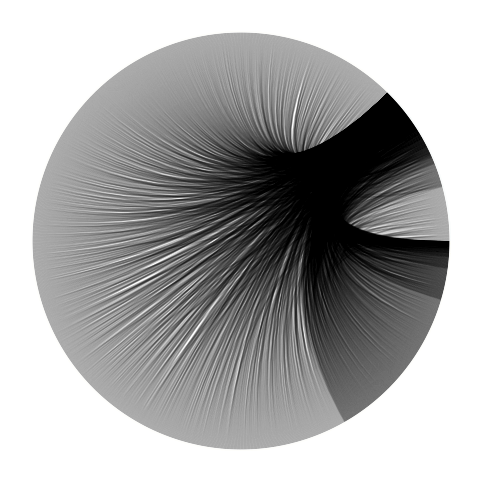

In [13]:
nv.circos(G_github, node_color_by='bipartite', group_by='bipartite', sort_by='centrality');

<div class='alert alert-info'>

- `bipartite` keyword is part of a node's metadata dictionary, and can be assigned both when you add a node and after the node is added.
- a node cannot be connected to another node in the same partition.
    
</div>

In [14]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes(data=False):
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

In [15]:
# Print the number of nodes in the 'projects' partition
print('size of projects partition: ', len(get_nodes_from_partition(G_github, 'projects')))

# Print the number of nodes in the 'users' partition
print('size of users partition', len(get_nodes_from_partition(G_github, 'users')))

size of projects partition:  212
size of users partition 1471


In [16]:
# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G_github, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G_github)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

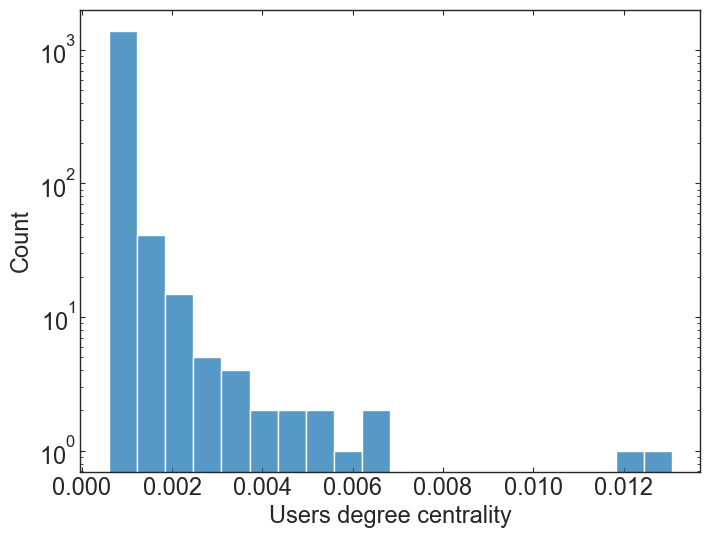

In [17]:
ax = sns.histplot(user_dcs, bins=20)
ax.set_yscale('log')
ax.set_xlabel('Users degree centrality');

In [18]:
# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G_github, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G_github)

# Get the degree centralities for user_nodes: user_dcs
project_dcs = [dcs[n] for n in project_nodes]

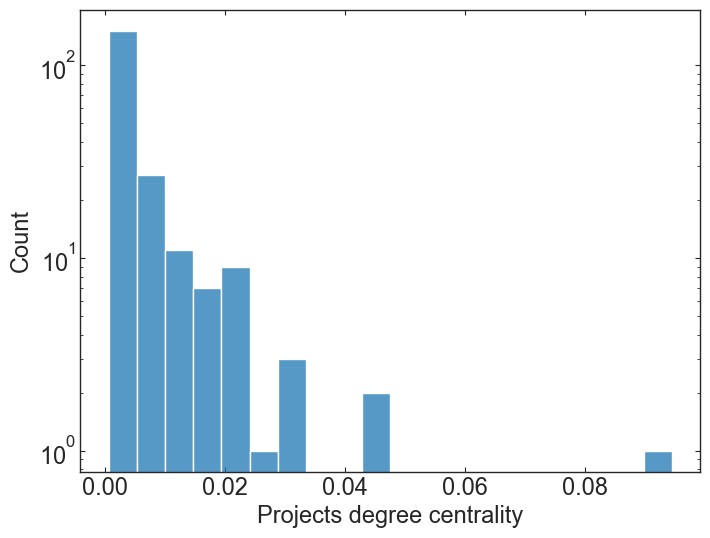

In [19]:
ax = sns.histplot(project_dcs, bins=20)
ax.set_yscale('log')
ax.set_xlabel('Projects degree centrality');

## Recommendation system

In [20]:
print(len(G_github2.nodes()))

22353


In [21]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

In [22]:
# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G_github2, 'u7909', 'u2148')))

1


### metric of similarity

- the number of projects shared between two users divided by the total number of nodes in the other partition

In [23]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.nodes[user1]['bipartite'] == 'users'
    assert G.nodes[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

In [24]:
# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G_github2, 'projects')
similarity_score = user_similarity(G_github2, 'u4560', 'u1880', project_nodes)

print(similarity_score)

0.0


### Find Similar users

In [25]:
def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.nodes[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

In [26]:
user_nodes = get_nodes_from_partition(G_github2, 'users')
project_nodes = get_nodes_from_partition(G_github2, 'projects')

print(most_similar_users(G_github2, 'u4560', user_nodes, project_nodes))

['u5453', 'u17446']


In [27]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

In [28]:
# Print the repositories to be recommended
print(recommend_repositories(G_github2, 'u7909', 'u2148'))

{'p918', 'p405', 'p12466', 'p8146', 'p15697'}


# Graph Projections
- converting between a bipartite version of a graph and its unipartite projections

In [29]:
print(len(G_american.edges()))

319


In [30]:
# Prepare the nodelists needed for computing projections: people, clubs
# This exercise shows you two ways to do it, one with `data=True` and one without.
people = [n for n in G_american.nodes() if G_american.nodes[n]['bipartite'] == 'people']
clubs = [n for n, d in G_american.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G_american, people)
clubsG = nx.bipartite.projected_graph(G_american, clubs)

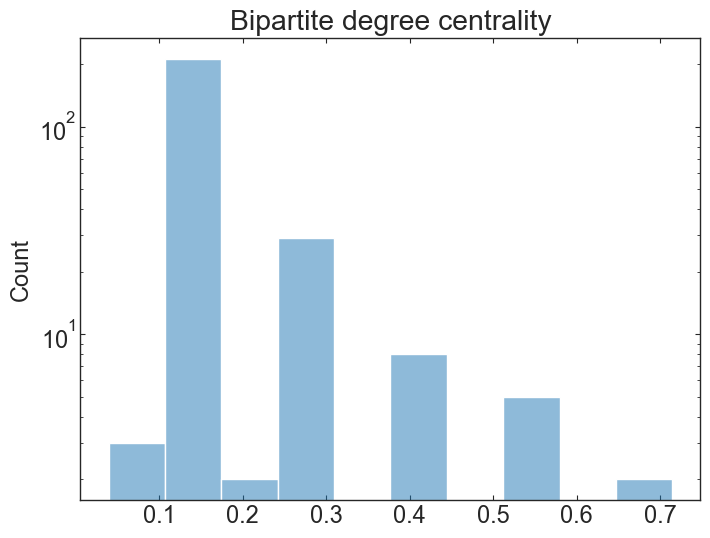

In [31]:
# Plot the degree centrality distribution of both node partitions from the original graph
original_dc = nx.bipartite.degree_centrality(G_american, people)

# Remember that you can directly plot dictionary values.
ax = sns.histplot(x=original_dc.values(), alpha=0.5)
ax.set(yscale='log', title='Bipartite degree centrality');

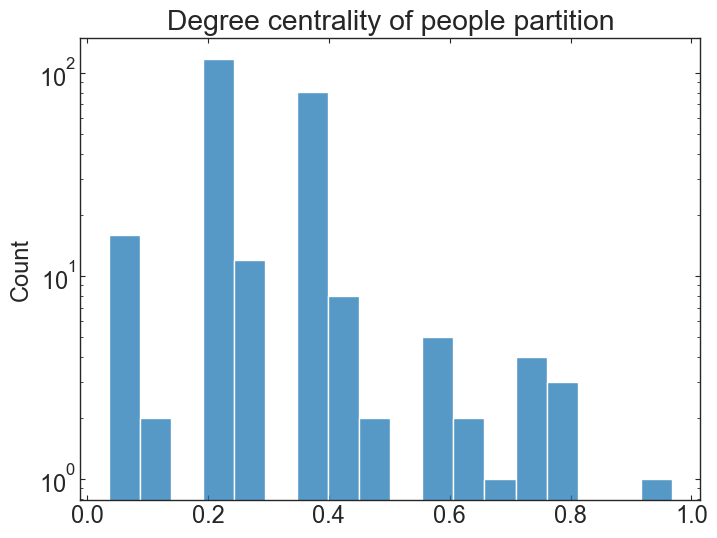

In [32]:
# Plot the degree centrality distribution of the peopleG graph
people_dc = nx.degree_centrality(peopleG)
ax = sns.histplot(x=people_dc.values())
ax.set(yscale='log', title='Degree centrality of people partition');

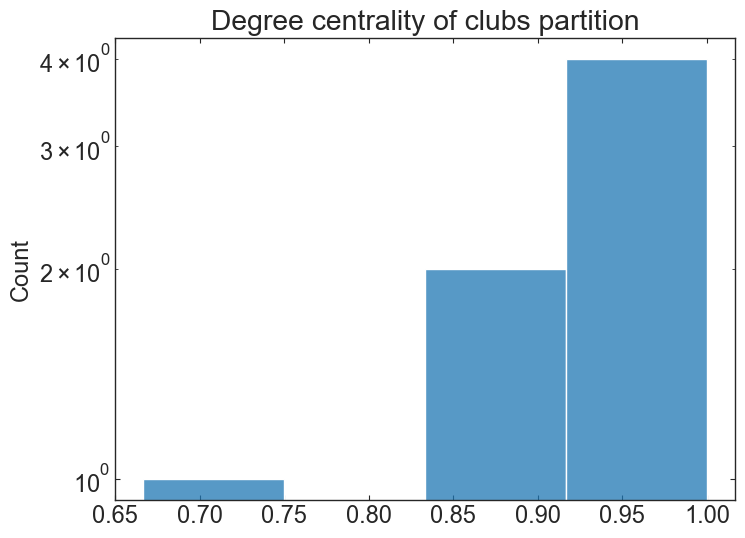

In [33]:
# Plot the degree centrality distribution of the clubsG graph
clubs_dc = nx.degree_centrality(clubsG)
ax = sns.histplot(x=clubs_dc.values())
ax.set(yscale='log', title='Degree centrality of clubs partition');

## adjacency mattix

- sparse matrix multiplication to compute projections 

In [34]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G_american, 'people')
clubs_nodes = get_nodes_from_partition(G_american, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G_american, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)

  (0, 231)	1
  (0, 230)	1
  (0, 229)	1
  (0, 228)	1
  (0, 227)	1
  (0, 226)	1
  (0, 225)	1
  (0, 224)	1
  (0, 223)	1
  (0, 222)	1
  (0, 221)	1
  (0, 220)	1
  (0, 219)	1
  (0, 218)	1
  (0, 217)	1
  (0, 216)	1
  (0, 215)	1
  (0, 214)	1
  (0, 213)	1
  (0, 212)	1
  (0, 211)	1
  (0, 210)	1
  (0, 209)	1
  (0, 208)	1
  (0, 207)	1
  :	:
  (253, 80)	1
  (253, 76)	1
  (253, 70)	1
  (253, 68)	1
  (253, 64)	1
  (253, 55)	1
  (253, 52)	1
  (253, 49)	1
  (253, 46)	1
  (253, 45)	1
  (253, 39)	1
  (253, 36)	1
  (253, 29)	1
  (253, 28)	1
  (253, 27)	1
  (253, 25)	1
  (253, 22)	1
  (253, 21)	1
  (253, 20)	1
  (253, 19)	1
  (253, 16)	1
  (253, 15)	1
  (253, 13)	1
  (253, 12)	1
  (253, 2)	1


/var/folders/zd/ndrhnvl55pj0375gxt18wyzc0000gn/T/ipykernel_4137/3970503582.py:6: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  bi_matrix = nx.bipartite.biadjacency_matrix(G_american, row_order=people_nodes, column_order=clubs_nodes)


In [35]:
print(type(bi_matrix))

<class 'scipy.sparse.csr.csr_matrix'>


- you lose the metadata from a graph when you go to a sparse matrix representation.
- impute the metadata back

In [36]:
# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  

print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')

for i in indices:
    print('- {0}'.format(people_nodes[i]))

Number of clubs: 5
People with the most number of memberships:
- Warren.Joseph
- Revere.Paul


In [37]:
# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

In [38]:
# Find pairs of users who shared membership in the most number of clubs
indices2 = np.where(users_coo.data == users_coo.data.max())[0]

print('People with most number of shared memberships:')

for idx in indices2:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]])) 

People with most number of shared memberships:
- Warren.Joseph, Church.Benjamin
- Warren.Joseph, Adams.Samuel
- Warren.Joseph, Revere.Paul
- Adams.Samuel, Church.Benjamin
- Adams.Samuel, Warren.Joseph
- Church.Benjamin, Adams.Samuel
- Church.Benjamin, Warren.Joseph
- Chase.Thomas, Bass.Henry
- Revere.Paul, Warren.Joseph
- Bass.Henry, Chase.Thomas


## Representing network data with pandas

In [39]:
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in peopleG.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)

In [40]:
# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
node_df.head()

,person,bipartite
0,Bruce.Stephen,people
1,Stanbridge.Henry,people
2,Appleton.Nathaniel,people
3,Bradford.John,people
4,Davis.Caleb,people


In [41]:
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in peopleG.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)

In [42]:
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
edge_df.head()

,node1,node2
0,Bruce.Stephen,Story.Elisha
1,Bruce.Stephen,Proctor.Edward
2,Bruce.Stephen,Bradlee.Josiah
3,Bruce.Stephen,Howe.Edward
4,Bruce.Stephen,Bradlee.David


# Comparing Graphs & Time-dynamic graphs

In [43]:
df_colmsg.head()

,sender,recipient,time,year,month,day,hour,minute,second
0,1,2,2004-04-15 14:56:01,2004,4,15,14,56,1
1,3,4,2004-04-16 22:50:39,2004,4,16,22,50,39
2,5,2,2004-04-19 22:39:51,2004,4,19,22,39,51
3,6,7,2004-04-20 05:40:19,2004,4,20,5,40,19
4,8,7,2004-04-20 05:42:36,2004,4,20,5,42,36


In [44]:
months = range(4, 11)

# Initialize an empty list: Gs
Gs_msg = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G_msg = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G_msg.add_nodes_from(df_colmsg['sender'])
    G_msg.add_nodes_from(df_colmsg['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = df_colmsg[df_colmsg['month'] == month]
    
    # Add edges from filtered DataFrame
    G_msg.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs_msg.append(G_msg)
    
print(len(Gs_msg))

7


### Graph differences over time

In [45]:
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs_msg) - window):
    g1 = Gs_msg[i]
    g2 = Gs_msg[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2, g1))   
    removed.append(nx.difference(g1, g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)

[4.382775119617225, -0.7203333333333334, -0.5915772745331744, -0.31906614785992216, -0.28285714285714286, -0.4123505976095618]


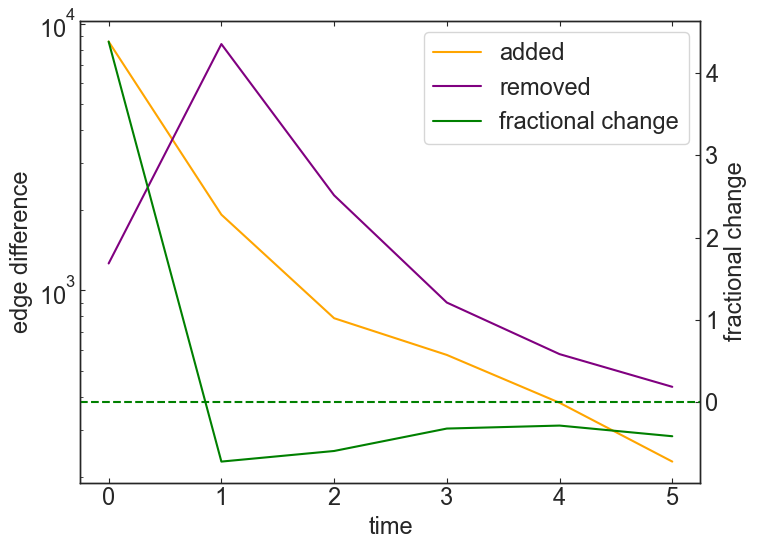

In [46]:
fig, ax = plt.subplots()

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
ax.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
ax.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax.set_yscale('log')
ax.set(xlabel='time', ylabel='edge difference')
#ax.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
ax2.axhline(0, color='green', linestyle='--')
ax2.set_ylabel('fractional change');

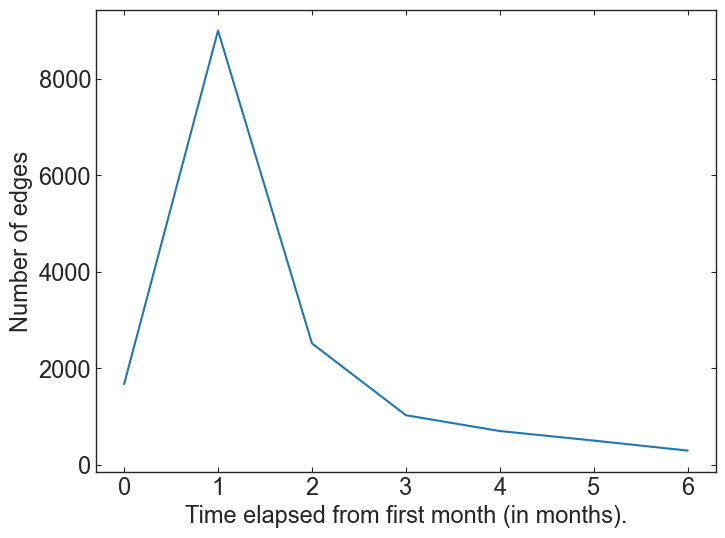

In [47]:
# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs_msg]

fig, ax = plt.subplots()
# Plot edge sizes over time
ax.plot(edge_sizes)
ax.set_xlabel('Time elapsed from first month (in months).') 
ax.set_ylabel('Number of edges');

### Degree centrality over time (by using ECDF functions)

In [48]:
def ECDF(vals):
    n = len(vals)
    x = sorted(vals)
    y = np.arange(1, n+1) / n
    
    return x, y

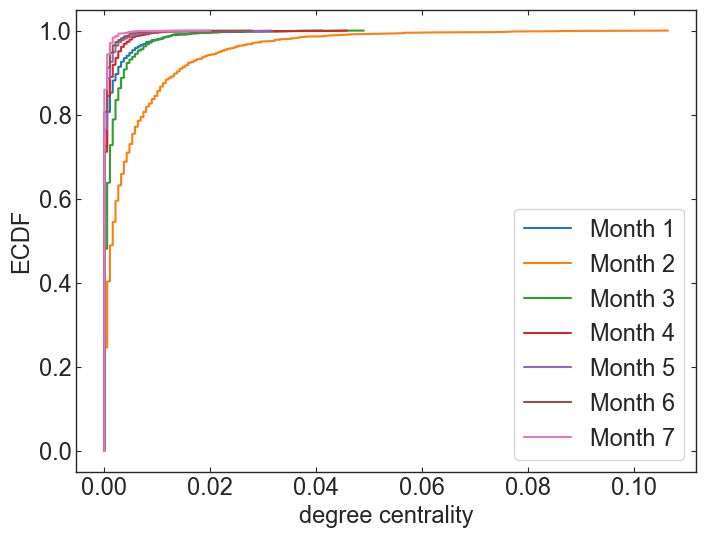

In [49]:
# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs_msg:
    cent = nx.degree_centrality(G)
    cents.append(cent)

# Plot ECDFs over time
fig, ax = plt.subplots()
for i in range(len(cents)):
    x, y = ECDF(cents[i].values()) 
    ax.plot(x, y, label='Month {0}'.format(i+1)) 

ax.legend()
ax.set(xlabel='degree centrality', ylabel='ECDF');

### Find nodes with top degree centralities

In [50]:
G_msg = Gs_msg[0].copy()

In [51]:
print(len(G_msg.edges()))

1672


In [52]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G_msg).values()), reverse=True)[0:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G_msg).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

5


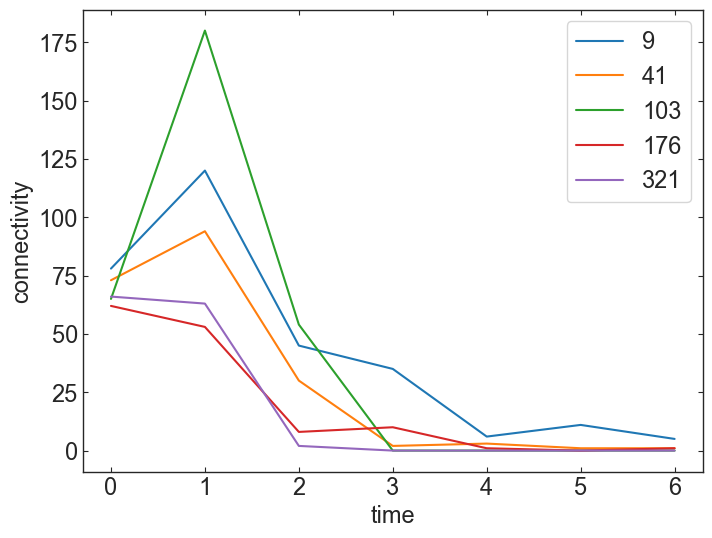

In [53]:
# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs_msg:
        connectivity[n].append(len(list(g.neighbors(n))))

# Plot the connectivity for each node
fig, ax = plt.subplots() 
for n, conn in connectivity.items(): 
    ax.plot(conn, label=n)

ax.legend()
ax.set(xlabel='time', ylabel='connectivity');

# Tying it up

In [54]:
df_forum.head()

,student,forum,date
13275,s397,f287,2004-05-31 00:34:50
2677,s55,f19,2004-05-19 22:29:05
29120,s17,f43,2004-08-15 18:03:05
13722,s397,f427,2004-05-31 15:11:06
14385,s484,f340,2004-05-31 22:30:14


In [55]:
print(len(df_forum))

1000


In [56]:
# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(df_forum['student'], bipartite='student')
G.add_nodes_from(df_forum['forum'], bipartite='forum')

# Add in each edge along with the date the edge was created
for r, d in df_forum.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date'])

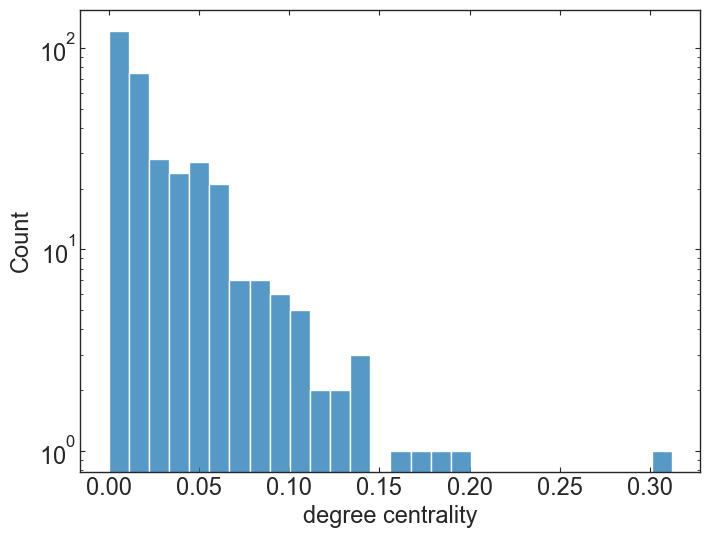

In [57]:
# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
ax = sns.histplot(x=list(dcs.values()))
ax.set_xlabel('degree centrality')
ax.set_yscale('log');

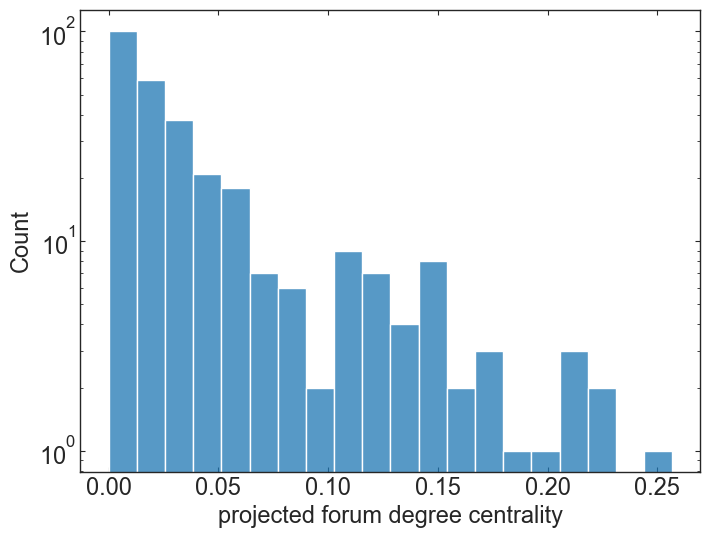

In [58]:
# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
ax = sns.histplot(x=list(dcs.values()))
ax.set_xlabel('projected forum degree centrality')
ax.set_yscale('log');

### Time based filtering

In [59]:
# generate graph data from datacamp directly

G = nx.Graph()
G.add_nodes_from([('f71', {'bipartite': 'forum'}), ('f362', {'bipartite': 'forum'}), ('f380', {'bipartite': 'forum'}), ('f141', {'bipartite': 'forum'}), ('f7', {'bipartite': 'forum'}), ('f54', {'bipartite': 'forum'}), ('f467', {'bipartite': 'forum'}), ('f12', {'bipartite': 'forum'}), ('f402', {'bipartite': 'forum'}), ('f107', {'bipartite': 'forum'}), ('f314', {'bipartite': 'forum'}), ('f43', {'bipartite': 'forum'}), ('f168', {'bipartite': 'forum'}), ('f387', {'bipartite': 'forum'}), ('f90', {'bipartite': 'forum'}), ('f260', {'bipartite': 'forum'}), ('f13', {'bipartite': 'forum'}), ('f123', {'bipartite': 'forum'}), ('f171', {'bipartite': 'forum'}), ('f26', {'bipartite': 'forum'}), ('f156', {'bipartite': 'forum'}), ('f401', {'bipartite': 'forum'}), ('f21', {'bipartite': 'forum'}), ('f101', {'bipartite': 'forum'}), ('f270', {'bipartite': 'forum'}), ('f89', {'bipartite': 'forum'}), ('f29', {'bipartite': 'forum'}), ('f307', {'bipartite': 'forum'}), ('f190', {'bipartite': 'forum'}), ('f9', {'bipartite': 'forum'}), ('f338', {'bipartite': 'forum'}), ('f1', {'bipartite': 'forum'}), ('f63', {'bipartite': 'forum'}), ('f22', {'bipartite': 'forum'}), ('f130', {'bipartite': 'forum'}), ('f461', {'bipartite': 'forum'}), ('f143', {'bipartite': 'forum'}), ('f236', {'bipartite': 'forum'}), ('f66', {'bipartite': 'forum'}), ('f219', {'bipartite': 'forum'}), ('f497', {'bipartite': 'forum'}), ('f265', {'bipartite': 'forum'}), ('f51', {'bipartite': 'forum'}), ('f115', {'bipartite': 'forum'}), ('f61', {'bipartite': 'forum'}), ('f495', {'bipartite': 'forum'}), ('f133', {'bipartite': 'forum'}), ('f372', {'bipartite': 'forum'}), ('f88', {'bipartite': 'forum'}), ('f11', {'bipartite': 'forum'}), ('f167', {'bipartite': 'forum'}), ('f400', {'bipartite': 'forum'}), ('f74', {'bipartite': 'forum'}), ('f120', {'bipartite': 'forum'}), ('f73', {'bipartite': 'forum'}), ('f39', {'bipartite': 'forum'}), ('f8', {'bipartite': 'forum'}), ('f319', {'bipartite': 'forum'}), ('f19', {'bipartite': 'forum'}), ('f202', {'bipartite': 'forum'}), ('f79', {'bipartite': 'forum'}), ('f212', {'bipartite': 'forum'}), ('f406', {'bipartite': 'forum'}), ('f169', {'bipartite': 'forum'}), ('f28', {'bipartite': 'forum'}), ('f53', {'bipartite': 'forum'}), ('f279', {'bipartite': 'forum'}), ('f243', {'bipartite': 'forum'}), ('f230', {'bipartite': 'forum'}), ('f148', {'bipartite': 'forum'}), ('f103', {'bipartite': 'forum'}), ('f15', {'bipartite': 'forum'}), ('f329', {'bipartite': 'forum'}), ('f395', {'bipartite': 'forum'}), ('f396', {'bipartite': 'forum'}), ('f176', {'bipartite': 'forum'}), ('f185', {'bipartite': 'forum'}), ('f349', {'bipartite': 'forum'}), ('f210', {'bipartite': 'forum'}), ('f376', {'bipartite': 'forum'}), ('f24', {'bipartite': 'forum'}), ('f262', {'bipartite': 'forum'}), ('f98', {'bipartite': 'forum'}), ('f132', {'bipartite': 'forum'}), ('f99', {'bipartite': 'forum'}), ('f138', {'bipartite': 'forum'}), ('f193', {'bipartite': 'forum'}), ('f37', {'bipartite': 'forum'}), ('f137', {'bipartite': 'forum'}), ('f163', {'bipartite': 'forum'}), ('f313', {'bipartite': 'forum'}), ('f356', {'bipartite': 'forum'}), ('f207', {'bipartite': 'forum'}), ('f322', {'bipartite': 'forum'}), ('f113', {'bipartite': 'forum'}), ('f42', {'bipartite': 'forum'}), ('f14', {'bipartite': 'forum'}), ('f268', {'bipartite': 'forum'}), ('f108', {'bipartite': 'forum'}), ('f76', {'bipartite': 'forum'}), ('f105', {'bipartite': 'forum'}), ('f348', {'bipartite': 'forum'}), ('f104', {'bipartite': 'forum'}), ('f252', {'bipartite': 'forum'}), ('f161', {'bipartite': 'forum'}), ('f18', {'bipartite': 'forum'}), ('f10', {'bipartite': 'forum'}), ('f152', {'bipartite': 'forum'}), ('f17', {'bipartite': 'forum'}), ('f263', {'bipartite': 'forum'}), ('f125', {'bipartite': 'forum'}), ('f238', {'bipartite': 'forum'}), ('f114', {'bipartite': 'forum'}), ('f488', {'bipartite': 'forum'}), ('f68', {'bipartite': 'forum'}), ('f95', {'bipartite': 'forum'}), ('f85', {'bipartite': 'forum'}), ('f111', {'bipartite': 'forum'}), ('f131', {'bipartite': 'forum'}), ('f375', {'bipartite': 'forum'}), ('f188', {'bipartite': 'forum'}), ('f62', {'bipartite': 'forum'}), ('f59', {'bipartite': 'forum'}), ('f109', {'bipartite': 'forum'}), ('f455', {'bipartite': 'forum'}), ('f84', {'bipartite': 'forum'}), ('f409', {'bipartite': 'forum'}), ('f48', {'bipartite': 'forum'}), ('f91', {'bipartite': 'forum'}), ('f93', {'bipartite': 'forum'}), ('f347', {'bipartite': 'forum'}), ('f326', {'bipartite': 'forum'}), ('f23', {'bipartite': 'forum'}), ('f255', {'bipartite': 'forum'}), ('f67', {'bipartite': 'forum'}), ('f126', {'bipartite': 'forum'}), ('f341', {'bipartite': 'forum'}), ('f145', {'bipartite': 'forum'}), ('f35', {'bipartite': 'forum'}), ('f5', {'bipartite': 'forum'}), ('f433', {'bipartite': 'forum'}), ('f504', {'bipartite': 'forum'}), ('f419', {'bipartite': 'forum'}), ('f189', {'bipartite': 'forum'}), ('f226', {'bipartite': 'forum'}), ('f175', {'bipartite': 'forum'}), ('f199', {'bipartite': 'forum'}), ('f110', {'bipartite': 'forum'}), ('f442', {'bipartite': 'forum'}), ('f33', {'bipartite': 'forum'}), ('f428', {'bipartite': 'forum'}), ('f300', {'bipartite': 'forum'}), ('f30', {'bipartite': 'forum'}), ('f80', {'bipartite': 'forum'}), ('f6', {'bipartite': 'forum'}), ('f86', {'bipartite': 'forum'}), ('f69', {'bipartite': 'forum'}), ('f112', {'bipartite': 'forum'}), ('f78', {'bipartite': 'forum'}), ('f4', {'bipartite': 'forum'}), ('f44', {'bipartite': 'forum'}), ('f82', {'bipartite': 'forum'}), ('f364', {'bipartite': 'forum'}), ('f388', {'bipartite': 'forum'}), ('f340', {'bipartite': 'forum'}), ('f335', {'bipartite': 'forum'}), ('f437', {'bipartite': 'forum'}), ('f47', {'bipartite': 'forum'}), ('f52', {'bipartite': 'forum'}), ('f450', {'bipartite': 'forum'}), ('f75', {'bipartite': 'forum'}), ('f153', {'bipartite': 'forum'}), ('f350', {'bipartite': 'forum'}), ('f454', {'bipartite': 'forum'}), ('f312', {'bipartite': 'forum'}), ('f204', {'bipartite': 'forum'}), ('f346', {'bipartite': 'forum'}), ('f500', {'bipartite': 'forum'}), ('f269', {'bipartite': 'forum'}), ('f440', {'bipartite': 'forum'}), ('f360', {'bipartite': 'forum'}), ('f288', {'bipartite': 'forum'}), ('f336', {'bipartite': 'forum'}), ('f476', {'bipartite': 'forum'}), ('f304', {'bipartite': 'forum'}), ('f225', {'bipartite': 'forum'}), ('f291', {'bipartite': 'forum'}), ('f359', {'bipartite': 'forum'}), ('f311', {'bipartite': 'forum'}), ('f25', {'bipartite': 'forum'}), ('f289', {'bipartite': 'forum'}), ('f201', {'bipartite': 'forum'}), ('f448', {'bipartite': 'forum'}), ('f165', {'bipartite': 'forum'}), ('f77', {'bipartite': 'forum'}), ('f318', {'bipartite': 'forum'}), ('f487', {'bipartite': 'forum'}), ('f507', {'bipartite': 'forum'}), ('f40', {'bipartite': 'forum'}), ('f447', {'bipartite': 'forum'}), ('f434', {'bipartite': 'forum'}), ('f302', {'bipartite': 'forum'}), ('f3', {'bipartite': 'forum'}), ('f502', {'bipartite': 'forum'}), ('f116', {'bipartite': 'forum'}), ('f245', {'bipartite': 'forum'}), ('f198', {'bipartite': 'forum'}), ('f421', {'bipartite': 'forum'}), ('f344', {'bipartite': 'forum'}), ('f475', {'bipartite': 'forum'}), ('f164', {'bipartite': 'forum'}), ('f324', {'bipartite': 'forum'}), ('f50', {'bipartite': 'forum'}), ('f41', {'bipartite': 'forum'}), ('f242', {'bipartite': 'forum'}), ('f444', {'bipartite': 'forum'}), ('f58', {'bipartite': 'forum'}), ('f331', {'bipartite': 'forum'}), ('f479', {'bipartite': 'forum'}), ('f122', {'bipartite': 'forum'}), ('f87', {'bipartite': 'forum'}), ('f339', {'bipartite': 'forum'}), ('f205', {'bipartite': 'forum'}), ('f385', {'bipartite': 'forum'}), ('f474', {'bipartite': 'forum'}), ('f218', {'bipartite': 'forum'}), ('f231', {'bipartite': 'forum'}), ('f94', {'bipartite': 'forum'}), ('f38', {'bipartite': 'forum'}), ('f283', {'bipartite': 'forum'}), ('f278', {'bipartite': 'forum'}), ('f397', {'bipartite': 'forum'}), ('f97', {'bipartite': 'forum'}), ('f253', {'bipartite': 'forum'}), ('f327', {'bipartite': 'forum'}), ('f64', {'bipartite': 'forum'}), ('f383', {'bipartite': 'forum'}), ('f391', {'bipartite': 'forum'}), ('f325', {'bipartite': 'forum'}), ('f144', {'bipartite': 'forum'}), ('f386', {'bipartite': 'forum'}), ('f305', {'bipartite': 'forum'}), ('f206', {'bipartite': 'forum'}), ('f351', {'bipartite': 'forum'}), ('f377', {'bipartite': 'forum'}), ('f417', {'bipartite': 'forum'}), ('f56', {'bipartite': 'forum'}), ('f258', {'bipartite': 'forum'}), ('f398', {'bipartite': 'forum'}), ('f277', {'bipartite': 'forum'}), ('f32', {'bipartite': 'forum'}), ('f256', {'bipartite': 'forum'}), ('f506', {'bipartite': 'forum'}), ('f174', {'bipartite': 'forum'}), ('f34', {'bipartite': 'forum'}), ('f411', {'bipartite': 'forum'}), ('f45', {'bipartite': 'forum'}), ('f505', {'bipartite': 'forum'}), ('f515', {'bipartite': 'forum'}), ('f466', {'bipartite': 'forum'}), ('f209', {'bipartite': 'forum'}), ('f424', {'bipartite': 'forum'}), ('f49', {'bipartite': 'forum'}), ('f221', {'bipartite': 'forum'}), ('f147', {'bipartite': 'forum'}), ('f371', {'bipartite': 'forum'}), ('f370', {'bipartite': 'forum'}), ('f55', {'bipartite': 'forum'}), ('f229', {'bipartite': 'forum'}), ('f264', {'bipartite': 'forum'}), ('f240', {'bipartite': 'forum'}), ('f57', {'bipartite': 'forum'}), ('f259', {'bipartite': 'forum'}), ('f399', {'bipartite': 'forum'}), ('f36', {'bipartite': 'forum'}), ('f194', {'bipartite': 'forum'}), ('f237', {'bipartite': 'forum'}), ('f422', {'bipartite': 'forum'}), ('f239', {'bipartite': 'forum'}), ('f179', {'bipartite': 'forum'}), ('f392', {'bipartite': 'forum'}), ('f330', {'bipartite': 'forum'}), ('f382', {'bipartite': 'forum'}), ('f72', {'bipartite': 'forum'}), ('f235', {'bipartite': 'forum'}), ('f246', {'bipartite': 'forum'}), ('f187', {'bipartite': 'forum'}), ('f158', {'bipartite': 'forum'}), ('f195', {'bipartite': 'forum'}), ('f492', {'bipartite': 'forum'}), ('f352', {'bipartite': 'forum'}), ('f16', {'bipartite': 'forum'}), ('f118', {'bipartite': 'forum'}), ('f70', {'bipartite': 'forum'}), ('f493', {'bipartite': 'forum'}), ('f438', {'bipartite': 'forum'}), ('f191', {'bipartite': 'forum'}), ('f303', {'bipartite': 'forum'}), ('f471', {'bipartite': 'forum'}), ('f244', {'bipartite': 'forum'}), ('f514', {'bipartite': 'forum'}), ('f418', {'bipartite': 'forum'}), ('f363', {'bipartite': 'forum'}), ('f503', {'bipartite': 'forum'}), ('f451', {'bipartite': 'forum'}), ('f389', {'bipartite': 'forum'}), ('f136', {'bipartite': 'forum'}), ('f27', {'bipartite': 'forum'}), ('f290', {'bipartite': 'forum'}), ('f139', {'bipartite': 'forum'}), ('f121', {'bipartite': 'forum'}), ('f271', {'bipartite': 'forum'}), ('f337', {'bipartite': 'forum'}), ('f309', {'bipartite': 'forum'}), ('f173', {'bipartite': 'forum'}), ('f296', {'bipartite': 'forum'}), ('f92', {'bipartite': 'forum'}), ('f416', {'bipartite': 'forum'}), ('f31', {'bipartite': 'forum'}), ('f445', {'bipartite': 'forum'}), ('f166', {'bipartite': 'forum'}), ('f172', {'bipartite': 'forum'}), ('f516', {'bipartite': 'forum'}), ('f365', {'bipartite': 'forum'}), ('f446', {'bipartite': 'forum'}), ('f155', {'bipartite': 'forum'}), ('f128', {'bipartite': 'forum'}), ('f274', {'bipartite': 'forum'}), ('f20', {'bipartite': 'forum'}), ('f248', {'bipartite': 'forum'}), ('f368', {'bipartite': 'forum'}), ('f394', {'bipartite': 'forum'}), ('f215', {'bipartite': 'forum'}), ('f177', {'bipartite': 'forum'}), ('f2', {'bipartite': 'forum'}), ('f83', {'bipartite': 'forum'}), ('f367', {'bipartite': 'forum'}), ('f65', {'bipartite': 'forum'}), ('f358', {'bipartite': 'forum'}), ('f426', {'bipartite': 'forum'}), ('f208', {'bipartite': 'forum'}), ('f315', {'bipartite': 'forum'}), ('f224', {'bipartite': 'forum'}), ('f46', {'bipartite': 'forum'}), ('f233', {'bipartite': 'forum'}), ('f484', {'bipartite': 'forum'}), ('f127', {'bipartite': 'forum'}), ('f379', {'bipartite': 'forum'}), ('f284', {'bipartite': 'forum'}), ('f403', {'bipartite': 'forum'}), ('f119', {'bipartite': 'forum'}), ('f160', {'bipartite': 'forum'}), ('f499', {'bipartite': 'forum'}), ('f452', {'bipartite': 'forum'}), ('f496', {'bipartite': 'forum'}), ('f512', {'bipartite': 'forum'}), ('f154', {'bipartite': 'forum'}), ('f182', {'bipartite': 'forum'}), ('f343', {'bipartite': 'forum'}), ('f181', {'bipartite': 'forum'}), ('f157', {'bipartite': 'forum'}), ('f150', {'bipartite': 'forum'}), ('f412', {'bipartite': 'forum'}), ('f295', {'bipartite': 'forum'}), ('f117', {'bipartite': 'forum'}), ('f183', {'bipartite': 'forum'}), ('f316', {'bipartite': 'forum'}), ('f381', {'bipartite': 'forum'}), ('f151', {'bipartite': 'forum'}), ('f275', {'bipartite': 'forum'}), ('f203', {'bipartite': 'forum'}), ('f134', {'bipartite': 'forum'}), ('f184', {'bipartite': 'forum'}), ('f301', {'bipartite': 'forum'}), ('f486', {'bipartite': 'forum'}), ('f501', {'bipartite': 'forum'}), ('f129', {'bipartite': 'forum'}), ('f106', {'bipartite': 'forum'}), ('f374', {'bipartite': 'forum'}), ('f186', {'bipartite': 'forum'}), ('f228', {'bipartite': 'forum'}), ('f135', {'bipartite': 'forum'}), ('f334', {'bipartite': 'forum'}), ('f146', {'bipartite': 'forum'}), ('f413', {'bipartite': 'forum'}), ('f420', {'bipartite': 'forum'}), ('f457', {'bipartite': 'forum'}), ('f102', {'bipartite': 'forum'}), ('f213', {'bipartite': 'forum'}), ('f281', {'bipartite': 'forum'}), ('f149', {'bipartite': 'forum'}), ('f414', {'bipartite': 'forum'}), ('f247', {'bipartite': 'forum'}), ('f217', {'bipartite': 'forum'}), ('f378', {'bipartite': 'forum'}), ('f162', {'bipartite': 'forum'}), ('f459', {'bipartite': 'forum'}), ('f298', {'bipartite': 'forum'}), ('f390', {'bipartite': 'forum'}), ('f267', {'bipartite': 'forum'}), ('f469', {'bipartite': 'forum'}), ('f197', {'bipartite': 'forum'}), ('f282', {'bipartite': 'forum'}), ('f170', {'bipartite': 'forum'}), ('f60', {'bipartite': 'forum'}), ('f96', {'bipartite': 'forum'}), ('f430', {'bipartite': 'forum'}), ('f273', {'bipartite': 'forum'}), ('f241', {'bipartite': 'forum'}), ('f220', {'bipartite': 'forum'}), ('f251', {'bipartite': 'forum'}), ('f357', {'bipartite': 'forum'}), ('f425', {'bipartite': 'forum'}), ('f384', {'bipartite': 'forum'}), ('f345', {'bipartite': 'forum'}), ('f287', {'bipartite': 'forum'}), ('f472', {'bipartite': 'forum'}), ('f317', {'bipartite': 'forum'}), ('f299', {'bipartite': 'forum'}), ('f332', {'bipartite': 'forum'}), ('f369', {'bipartite': 'forum'}), ('f410', {'bipartite': 'forum'}), ('f192', {'bipartite': 'forum'}), ('f491', {'bipartite': 'forum'}), ('f266', {'bipartite': 'forum'}), ('f355', {'bipartite': 'forum'}), ('f211', {'bipartite': 'forum'}), ('f321', {'bipartite': 'forum'}), ('f463', {'bipartite': 'forum'}), ('f254', {'bipartite': 'forum'}), ('f100', {'bipartite': 'forum'}), ('f234', {'bipartite': 'forum'}), ('f180', {'bipartite': 'forum'}), ('f232', {'bipartite': 'forum'}), ('f423', {'bipartite': 'forum'}), ('f81', {'bipartite': 'forum'}), ('f482', {'bipartite': 'forum'}), ('f458', {'bipartite': 'forum'}), ('f427', {'bipartite': 'forum'}), ('f328', {'bipartite': 'forum'}), ('f342', {'bipartite': 'forum'}), ('f320', {'bipartite': 'forum'}), ('f214', {'bipartite': 'forum'}), ('f159', {'bipartite': 'forum'}), ('f443', {'bipartite': 'forum'}), ('f294', {'bipartite': 'forum'}), ('f453', {'bipartite': 'forum'}), ('f227', {'bipartite': 'forum'}), ('f178', {'bipartite': 'forum'}), ('f473', {'bipartite': 'forum'}), ('f280', {'bipartite': 'forum'}), ('f465', {'bipartite': 'forum'}), ('f142', {'bipartite': 'forum'}), ('f464', {'bipartite': 'forum'}), ('f436', {'bipartite': 'forum'}), ('f477', {'bipartite': 'forum'}), ('f196', {'bipartite': 'forum'}), ('f249', {'bipartite': 'forum'}), ('f511', {'bipartite': 'forum'}), ('f310', {'bipartite': 'forum'}), ('f124', {'bipartite': 'forum'}), ('f435', {'bipartite': 'forum'}), ('f513', {'bipartite': 'forum'}), ('f361', {'bipartite': 'forum'}), ('f489', {'bipartite': 'forum'}), ('f480', {'bipartite': 'forum'}), ('f456', {'bipartite': 'forum'}), ('f222', {'bipartite': 'forum'}), ('f353', {'bipartite': 'forum'}), ('f481', {'bipartite': 'forum'}), ('f276', {'bipartite': 'forum'}), ('f333', {'bipartite': 'forum'}), ('f432', {'bipartite': 'forum'}), ('f216', {'bipartite': 'forum'}), ('f478', {'bipartite': 'forum'}), ('f393', {'bipartite': 'forum'}), ('f200', {'bipartite': 'forum'}), ('f449', {'bipartite': 'forum'}), ('f518', {'bipartite': 'forum'}), ('f494', {'bipartite': 'forum'}), ('f323', {'bipartite': 'forum'}), ('f261', {'bipartite': 'forum'}), ('f490', {'bipartite': 'forum'}), ('f508', {'bipartite': 'forum'}), ('f431', {'bipartite': 'forum'}), ('f297', {'bipartite': 'forum'}), ('f354', {'bipartite': 'forum'}), ('f470', {'bipartite': 'forum'}), ('f366', {'bipartite': 'forum'}), ('f460', {'bipartite': 'forum'}), ('f308', {'bipartite': 'forum'}), ('f293', {'bipartite': 'forum'}), ('f415', {'bipartite': 'forum'}), ('f306', {'bipartite': 'forum'}), ('f286', {'bipartite': 'forum'}), ('f483', {'bipartite': 'forum'}), ('f509', {'bipartite': 'forum'}), ('f441', {'bipartite': 'forum'}), ('f522', {'bipartite': 'forum'}), ('f272', {'bipartite': 'forum'}), ('f292', {'bipartite': 'forum'}), ('f257', {'bipartite': 'forum'}), ('f468', {'bipartite': 'forum'}), ('f408', {'bipartite': 'forum'}), ('f140', {'bipartite': 'forum'}), ('f485', {'bipartite': 'forum'}), ('f517', {'bipartite': 'forum'}), ('f223', {'bipartite': 'forum'}), ('f404', {'bipartite': 'forum'}), ('f498', {'bipartite': 'forum'}), ('f439', {'bipartite': 'forum'}), ('f462', {'bipartite': 'forum'}), ('f510', {'bipartite': 'forum'}), ('f405', {'bipartite': 'forum'}), ('f407', {'bipartite': 'forum'}), ('f373', {'bipartite': 'forum'}), ('f521', {'bipartite': 'forum'}), ('f519', {'bipartite': 'forum'}), ('f429', {'bipartite': 'forum'}), ('f520', {'bipartite': 'forum'}), ('f285', {'bipartite': 'forum'}), ('f250', {'bipartite': 'forum'}), ('s630', {'bipartite': 'student'}), ('s629', {'bipartite': 'student'}), ('s772', {'bipartite': 'student'}), ('s667', {'bipartite': 'student'}), ('s129', {'bipartite': 'student'}), ('s826', {'bipartite': 'student'}), ('s41', {'bipartite': 'student'}), ('s610', {'bipartite': 'student'}), ('s345', {'bipartite': 'student'}), ('s77', {'bipartite': 'student'}), ('s684', {'bipartite': 'student'}), ('s260', {'bipartite': 'student'}), ('s174', {'bipartite': 'student'}), ('s350', {'bipartite': 'student'}), ('s147', {'bipartite': 'student'}), ('s384', {'bipartite': 'student'}), ('s376', {'bipartite': 'student'}), ('s205', {'bipartite': 'student'}), ('s322', {'bipartite': 'student'}), ('s582', {'bipartite': 'student'}), ('s297', {'bipartite': 'student'}), ('s768', {'bipartite': 'student'}), ('s342', {'bipartite': 'student'}), ('s581', {'bipartite': 'student'}), ('s416', {'bipartite': 'student'}), ('s838', {'bipartite': 'student'}), ('s237', {'bipartite': 'student'}), ('s692', {'bipartite': 'student'}), ('s204', {'bipartite': 'student'}), ('s687', {'bipartite': 'student'}), ('s457', {'bipartite': 'student'}), ('s855', {'bipartite': 'student'}), ('s871', {'bipartite': 'student'}), ('s824', {'bipartite': 'student'}), ('s211', {'bipartite': 'student'}), ('s221', {'bipartite': 'student'}), ('s599', {'bipartite': 'student'}), ('s425', {'bipartite': 'student'}), ('s279', {'bipartite': 'student'}), ('s791', {'bipartite': 'student'}), ('s24', {'bipartite': 'student'}), ('s805', {'bipartite': 'student'}), ('s67', {'bipartite': 'student'}), ('s5', {'bipartite': 'student'}), ('s138', {'bipartite': 'student'}), ('s65', {'bipartite': 'student'}), ('s462', {'bipartite': 'student'}), ('s116', {'bipartite': 'student'}), ('s571', {'bipartite': 'student'}), ('s362', {'bipartite': 'student'}), ('s891', {'bipartite': 'student'}), ('s815', {'bipartite': 'student'}), ('s319', {'bipartite': 'student'}), ('s646', {'bipartite': 'student'}), ('s560', {'bipartite': 'student'}), ('s500', {'bipartite': 'student'}), ('s299', {'bipartite': 'student'}), ('s62', {'bipartite': 'student'}), ('s208', {'bipartite': 'student'}), ('s33', {'bipartite': 'student'}), ('s780', {'bipartite': 'student'}), ('s422', {'bipartite': 'student'}), ('s819', {'bipartite': 'student'}), ('s40', {'bipartite': 'student'}), ('s482', {'bipartite': 'student'}), ('s68', {'bipartite': 'student'}), ('s340', {'bipartite': 'student'}), ('s187', {'bipartite': 'student'}), ('s393', {'bipartite': 'student'}), ('s325', {'bipartite': 'student'}), ('s735', {'bipartite': 'student'}), ('s50', {'bipartite': 'student'}), ('s254', {'bipartite': 'student'}), ('s521', {'bipartite': 'student'}), ('s488', {'bipartite': 'student'}), ('s152', {'bipartite': 'student'}), ('s566', {'bipartite': 'student'}), ('s192', {'bipartite': 'student'}), ('s202', {'bipartite': 'student'}), ('s213', {'bipartite': 'student'}), ('s82', {'bipartite': 'student'}), ('s335', {'bipartite': 'student'}), ('s112', {'bipartite': 'student'}), ('s489', {'bipartite': 'student'}), ('s114', {'bipartite': 'student'}), ('s30', {'bipartite': 'student'}), ('s87', {'bipartite': 'student'}), ('s526', {'bipartite': 'student'}), ('s344', {'bipartite': 'student'}), ('s209', {'bipartite': 'student'}), ('s494', {'bipartite': 'student'}), ('s397', {'bipartite': 'student'}), ('s691', {'bipartite': 'student'}), ('s80', {'bipartite': 'student'}), ('s23', {'bipartite': 'student'}), ('s538', {'bipartite': 'student'}), ('s723', {'bipartite': 'student'}), ('s161', {'bipartite': 'student'}), ('s356', {'bipartite': 'student'}), ('s59', {'bipartite': 'student'}), ('s885', {'bipartite': 'student'}), ('s57', {'bipartite': 'student'}), ('s181', {'bipartite': 'student'}), ('s396', {'bipartite': 'student'}), ('s845', {'bipartite': 'student'}), ('s76', {'bipartite': 'student'}), ('s539', {'bipartite': 'student'}), ('s496', {'bipartite': 'student'}), ('s223', {'bipartite': 'student'}), ('s694', {'bipartite': 'student'}), ('s622', {'bipartite': 'student'}), ('s290', {'bipartite': 'student'}), ('s567', {'bipartite': 'student'}), ('s887', {'bipartite': 'student'}), ('s305', {'bipartite': 'student'}), ('s28', {'bipartite': 'student'}), ('s649', {'bipartite': 'student'}), ('s455', {'bipartite': 'student'}), ('s357', {'bipartite': 'student'}), ('s655', {'bipartite': 'student'}), ('s461', {'bipartite': 'student'}), ('s182', {'bipartite': 'student'}), ('s274', {'bipartite': 'student'}), ('s15', {'bipartite': 'student'}), ('s264', {'bipartite': 'student'}), ('s92', {'bipartite': 'student'}), ('s105', {'bipartite': 'student'}), ('s458', {'bipartite': 'student'}), ('s786', {'bipartite': 'student'}), ('s732', {'bipartite': 'student'}), ('s704', {'bipartite': 'student'}), ('s361', {'bipartite': 'student'}), ('s398', {'bipartite': 'student'}), ('s154', {'bipartite': 'student'}), ('s403', {'bipartite': 'student'}), ('s518', {'bipartite': 'student'}), ('s277', {'bipartite': 'student'}), ('s167', {'bipartite': 'student'}), ('s412', {'bipartite': 'student'}), ('s227', {'bipartite': 'student'}), ('s480', {'bipartite': 'student'}), ('s587', {'bipartite': 'student'}), ('s749', {'bipartite': 'student'}), ('s395', {'bipartite': 'student'}), ('s115', {'bipartite': 'student'}), ('s897', {'bipartite': 'student'}), ('s71', {'bipartite': 'student'}), ('s632', {'bipartite': 'student'}), ('s446', {'bipartite': 'student'}), ('s61', {'bipartite': 'student'}), ('s191', {'bipartite': 'student'}), ('s32', {'bipartite': 'student'}), ('s133', {'bipartite': 'student'}), ('s98', {'bipartite': 'student'}), ('s497', {'bipartite': 'student'}), ('s541', {'bipartite': 'student'}), ('s746', {'bipartite': 'student'}), ('s568', {'bipartite': 'student'}), ('s485', {'bipartite': 'student'}), ('s513', {'bipartite': 'student'}), ('s273', {'bipartite': 'student'}), ('s34', {'bipartite': 'student'}), ('s81', {'bipartite': 'student'}), ('s56', {'bipartite': 'student'}), ('s381', {'bipartite': 'student'}), ('s318', {'bipartite': 'student'}), ('s95', {'bipartite': 'student'}), ('s29', {'bipartite': 'student'}), ('s546', {'bipartite': 'student'}), ('s602', {'bipartite': 'student'}), ('s509', {'bipartite': 'student'}), ('s271', {'bipartite': 'student'}), ('s132', {'bipartite': 'student'}), ('s702', {'bipartite': 'student'}), ('s569', {'bipartite': 'student'}), ('s447', {'bipartite': 'student'}), ('s487', {'bipartite': 'student'}), ('s225', {'bipartite': 'student'}), ('s195', {'bipartite': 'student'}), ('s385', {'bipartite': 'student'}), ('s124', {'bipartite': 'student'}), ('s315', {'bipartite': 'student'}), ('s113', {'bipartite': 'student'}), ('s859', {'bipartite': 'student'}), ('s515', {'bipartite': 'student'}), ('s303', {'bipartite': 'student'}), ('s506', {'bipartite': 'student'}), ('s111', {'bipartite': 'student'}), ('s809', {'bipartite': 'student'}), ('s739', {'bipartite': 'student'}), ('s698', {'bipartite': 'student'}), ('s433', {'bipartite': 'student'}), ('s354', {'bipartite': 'student'}), ('s156', {'bipartite': 'student'}), ('s686', {'bipartite': 'student'}), ('s281', {'bipartite': 'student'}), ('s806', {'bipartite': 'student'}), ('s169', {'bipartite': 'student'}), ('s754', {'bipartite': 'student'}), ('s700', {'bipartite': 'student'}), ('s528', {'bipartite': 'student'}), ('s173', {'bipartite': 'student'}), ('s348', {'bipartite': 'student'}), ('s656', {'bipartite': 'student'}), ('s86', {'bipartite': 'student'}), ('s316', {'bipartite': 'student'}), ('s206', {'bipartite': 'student'}), ('s445', {'bipartite': 'student'}), ('s675', {'bipartite': 'student'}), ('s230', {'bipartite': 'student'}), ('s477', {'bipartite': 'student'}), ('s473', {'bipartite': 'student'}), ('s333', {'bipartite': 'student'}), ('s642', {'bipartite': 'student'}), ('s183', {'bipartite': 'student'}), ('s58', {'bipartite': 'student'}), ('s128', {'bipartite': 'student'}), ('s243', {'bipartite': 'student'}), ('s253', {'bipartite': 'student'}), ('s420', {'bipartite': 'student'}), ('s724', {'bipartite': 'student'}), ('s678', {'bipartite': 'student'}), ('s207', {'bipartite': 'student'}), ('s861', {'bipartite': 'student'}), ('s103', {'bipartite': 'student'}), ('s877', {'bipartite': 'student'}), ('s143', {'bipartite': 'student'}), ('s733', {'bipartite': 'student'}), ('s287', {'bipartite': 'student'}), ('s481', {'bipartite': 'student'}), ('s355', {'bipartite': 'student'}), ('s70', {'bipartite': 'student'}), ('s259', {'bipartite': 'student'}), ('s564', {'bipartite': 'student'}), ('s727', {'bipartite': 'student'}), ('s49', {'bipartite': 'student'}), ('s42', {'bipartite': 'student'}), ('s194', {'bipartite': 'student'}), ('s358', {'bipartite': 'student'}), ('s120', {'bipartite': 'student'}), ('s685', {'bipartite': 'student'}), ('s108', {'bipartite': 'student'}), ('s347', {'bipartite': 'student'}), ('s380', {'bipartite': 'student'}), ('s443', {'bipartite': 'student'}), ('s535', {'bipartite': 'student'}), ('s73', {'bipartite': 'student'}), ('s17', {'bipartite': 'student'}), ('s641', {'bipartite': 'student'}), ('s201', {'bipartite': 'student'}), ('s435', {'bipartite': 'student'}), ('s434', {'bipartite': 'student'}), ('s146', {'bipartite': 'student'}), ('s501', {'bipartite': 'student'}), ('s438', {'bipartite': 'student'}), ('s197', {'bipartite': 'student'}), ('s495', {'bipartite': 'student'}), ('s882', {'bipartite': 'student'}), ('s404', {'bipartite': 'student'}), ('s150', {'bipartite': 'student'}), ('s466', {'bipartite': 'student'}), ('s857', {'bipartite': 'student'}), ('s680', {'bipartite': 'student'}), ('s44', {'bipartite': 'student'}), ('s72', {'bipartite': 'student'}), ('s707', {'bipartite': 'student'}), ('s849', {'bipartite': 'student'}), ('s755', {'bipartite': 'student'}), ('s666', {'bipartite': 'student'}), ('s257', {'bipartite': 'student'}), ('s866', {'bipartite': 'student'}), ('s796', {'bipartite': 'student'}), ('s448', {'bipartite': 'student'}), ('s705', {'bipartite': 'student'}), ('s47', {'bipartite': 'student'}), ('s442', {'bipartite': 'student'}), ('s623', {'bipartite': 'student'}), ('s242', {'bipartite': 'student'}), ('s748', {'bipartite': 'student'}), ('s522', {'bipartite': 'student'}), ('s136', {'bipartite': 'student'}), ('s736', {'bipartite': 'student'}), ('s89', {'bipartite': 'student'}), ('s308', {'bipartite': 'student'}), ('s878', {'bipartite': 'student'}), ('s13', {'bipartite': 'student'}), ('s14', {'bipartite': 'student'}), ('s130', {'bipartite': 'student'}), ('s63', {'bipartite': 'student'}), ('s504', {'bipartite': 'student'}), ('s101', {'bipartite': 'student'}), ('s296', {'bipartite': 'student'}), ('s454', {'bipartite': 'student'}), ('s239', {'bipartite': 'student'}), ('s6', {'bipartite': 'student'}), ('s409', {'bipartite': 'student'}), ('s184', {'bipartite': 'student'}), ('s272', {'bipartite': 'student'}), ('s164', {'bipartite': 'student'}), ('s719', {'bipartite': 'student'}), ('s510', {'bipartite': 'student'}), ('s444', {'bipartite': 'student'}), ('s3', {'bipartite': 'student'}), ('s53', {'bipartite': 'student'}), ('s320', {'bipartite': 'student'}), ('s97', {'bipartite': 'student'}), ('s289', {'bipartite': 'student'}), ('s25', {'bipartite': 'student'}), ('s36', {'bipartite': 'student'}), ('s709', {'bipartite': 'student'}), ('s240', {'bipartite': 'student'}), ('s60', {'bipartite': 'student'}), ('s142', {'bipartite': 'student'}), ('s11', {'bipartite': 'student'}), ('s338', {'bipartite': 'student'}), ('s140', {'bipartite': 'student'}), ('s658', {'bipartite': 'student'}), ('s39', {'bipartite': 'student'}), ('s214', {'bipartite': 'student'}), ('s294', {'bipartite': 'student'}), ('s35', {'bipartite': 'student'}), ('s83', {'bipartite': 'student'}), ('s88', {'bipartite': 'student'}), ('s820', {'bipartite': 'student'}), ('s757', {'bipartite': 'student'}), ('s624', {'bipartite': 'student'}), ('s530', {'bipartite': 'student'}), ('s107', {'bipartite': 'student'}), ('s634', {'bipartite': 'student'}), ('s263', {'bipartite': 'student'}), ('s424', {'bipartite': 'student'}), ('s695', {'bipartite': 'student'}), ('s387', {'bipartite': 'student'}), ('s484', {'bipartite': 'student'}), ('s459', {'bipartite': 'student'}), ('s676', {'bipartite': 'student'}), ('s479', {'bipartite': 'student'}), ('s431', {'bipartite': 'student'}), ('s423', {'bipartite': 'student'}), ('s137', {'bipartite': 'student'}), ('s311', {'bipartite': 'student'}), ('s864', {'bipartite': 'student'}), ('s170', {'bipartite': 'student'}), ('s597', {'bipartite': 'student'}), ('s363', {'bipartite': 'student'}), ('s199', {'bipartite': 'student'}), ('s572', {'bipartite': 'student'}), ('s326', {'bipartite': 'student'}), ('s570', {'bipartite': 'student'}), ('s106', {'bipartite': 'student'}), ('s533', {'bipartite': 'student'}), ('s377', {'bipartite': 'student'}), ('s210', {'bipartite': 'student'}), ('s280', {'bipartite': 'student'}), ('s236', {'bipartite': 'student'}), ('s131', {'bipartite': 'student'}), ('s306', {'bipartite': 'student'}), ('s178', {'bipartite': 'student'}), ('s714', {'bipartite': 'student'}), ('s219', {'bipartite': 'student'}), ('s744', {'bipartite': 'student'}), ('s781', {'bipartite': 'student'}), ('s269', {'bipartite': 'student'}), ('s743', {'bipartite': 'student'}), ('s595', {'bipartite': 'student'}), ('s545', {'bipartite': 'student'}), ('s577', {'bipartite': 'student'}), ('s593', {'bipartite': 'student'}), ('s627', {'bipartite': 'student'}), ('s761', {'bipartite': 'student'}), ('s364', {'bipartite': 'student'}), ('s696', {'bipartite': 'student'}), ('s645', {'bipartite': 'student'}), ('s788', {'bipartite': 'student'}), ('s180', {'bipartite': 'student'}), ('s185', {'bipartite': 'student'}), ('s562', {'bipartite': 'student'}), ('s52', {'bipartite': 'student'}), ('s226', {'bipartite': 'student'}), ('s620', {'bipartite': 'student'}), ('s418', {'bipartite': 'student'}), ('s285', {'bipartite': 'student'}), ('s84', {'bipartite': 'student'}), ('s176', {'bipartite': 'student'}), ('s93', {'bipartite': 'student'}), ('s690', {'bipartite': 'student'}), ('s689', {'bipartite': 'student'}), ('s697', {'bipartite': 'student'}), ('s189', {'bipartite': 'student'}), ('s663', {'bipartite': 'student'}), ('s91', {'bipartite': 'student'}), ('s258', {'bipartite': 'student'}), ('s476', {'bipartite': 'student'}), ('s293', {'bipartite': 'student'}), ('s283', {'bipartite': 'student'}), ('s312', {'bipartite': 'student'}), ('s414', {'bipartite': 'student'}), ('s672', {'bipartite': 'student'}), ('s517', {'bipartite': 'student'}), ('s708', {'bipartite': 'student'}), ('s85', {'bipartite': 'student'}), ('s100', {'bipartite': 'student'}), ('s222', {'bipartite': 'student'}), ('s300', {'bipartite': 'student'}), ('s302', {'bipartite': 'student'}), ('s411', {'bipartite': 'student'}), ('s99', {'bipartite': 'student'}), ('s792', {'bipartite': 'student'}), ('s428', {'bipartite': 'student'}), ('s145', {'bipartite': 'student'}), ('s149', {'bipartite': 'student'}), ('s372', {'bipartite': 'student'}), ('s626', {'bipartite': 'student'}), ('s121', {'bipartite': 'student'}), ('s196', {'bipartite': 'student'}), ('s234', {'bipartite': 'student'}), ('s540', {'bipartite': 'student'}), ('s468', {'bipartite': 'student'}), ('s392', {'bipartite': 'student'}), ('s310', {'bipartite': 'student'}), ('s718', {'bipartite': 'student'}), ('s729', {'bipartite': 'student'}), ('s317', {'bipartite': 'student'}), ('s228', {'bipartite': 'student'}), ('s2', {'bipartite': 'student'}), ('s401', {'bipartite': 'student'}), ('s351', {'bipartite': 'student'}), ('s773', {'bipartite': 'student'}), ('s858', {'bipartite': 'student'}), ('s165', {'bipartite': 'student'}), ('s851', {'bipartite': 'student'}), ('s417', {'bipartite': 'student'}), ('s472', {'bipartite': 'student'}), ('s203', {'bipartite': 'student'}), ('s314', {'bipartite': 'student'}), ('s603', {'bipartite': 'student'}), ('s469', {'bipartite': 'student'}), ('s758', {'bipartite': 'student'}), ('s38', {'bipartite': 'student'}), ('s432', {'bipartite': 'student'}), ('s657', {'bipartite': 'student'}), ('s625', {'bipartite': 'student'}), ('s833', {'bipartite': 'student'}), ('s519', {'bipartite': 'student'}), ('s613', {'bipartite': 'student'}), ('s738', {'bipartite': 'student'}), ('s90', {'bipartite': 'student'}), ('s659', {'bipartite': 'student'}), ('s301', {'bipartite': 'student'}), ('s799', {'bipartite': 'student'}), ('s801', {'bipartite': 'student'}), ('s825', {'bipartite': 'student'}), ('s233', {'bipartite': 'student'}), ('s110', {'bipartite': 'student'}), ('s867', {'bipartite': 'student'}), ('s764', {'bipartite': 'student'}), ('s779', {'bipartite': 'student'}), ('s278', {'bipartite': 'student'}), ('s55', {'bipartite': 'student'}), ('s592', {'bipartite': 'student'}), ('s66', {'bipartite': 'student'}), ('s543', {'bipartite': 'student'}), ('s186', {'bipartite': 'student'}), ('s175', {'bipartite': 'student'}), ('s21', {'bipartite': 'student'}), ('s527', {'bipartite': 'student'}), ('s508', {'bipartite': 'student'}), ('s837', {'bipartite': 'student'}), ('s814', {'bipartite': 'student'}), ('s832', {'bipartite': 'student'}), ('s701', {'bipartite': 'student'}), ('s777', {'bipartite': 'student'}), ('s218', {'bipartite': 'student'}), ('s292', {'bipartite': 'student'}), ('s604', {'bipartite': 'student'}), ('s369', {'bipartite': 'student'}), ('s373', {'bipartite': 'student'}), ('s726', {'bipartite': 'student'}), ('s402', {'bipartite': 'student'}), ('s427', {'bipartite': 'student'}), ('s64', {'bipartite': 'student'}), ('s631', {'bipartite': 'student'}), ('s160', {'bipartite': 'student'}), ('s155', {'bipartite': 'student'}), ('s79', {'bipartite': 'student'}), ('s162', {'bipartite': 'student'}), ('s588', {'bipartite': 'student'}), ('s304', {'bipartite': 'student'}), ('s270', {'bipartite': 'student'}), ('s408', {'bipartite': 'student'}), ('s295', {'bipartite': 'student'}), ('s102', {'bipartite': 'student'}), ('s759', {'bipartite': 'student'}), ('s275', {'bipartite': 'student'}), ('s611', {'bipartite': 'student'}), ('s693', {'bipartite': 'student'}), ('s179', {'bipartite': 'student'}), ('s256', {'bipartite': 'student'}), ('s386', {'bipartite': 'student'}), ('s245', {'bipartite': 'student'}), ('s337', {'bipartite': 'student'}), ('s474', {'bipartite': 'student'}), ('s246', {'bipartite': 'student'}), ('s766', {'bipartite': 'student'}), ('s561', {'bipartite': 'student'}), ('s573', {'bipartite': 'student'}), ('s817', {'bipartite': 'student'}), ('s731', {'bipartite': 'student'}), ('s771', {'bipartite': 'student'}), ('s681', {'bipartite': 'student'}), ('s193', {'bipartite': 'student'}), ('s1', {'bipartite': 'student'}), ('s505', {'bipartite': 'student'}), ('s4', {'bipartite': 'student'}), ('s360', {'bipartite': 'student'}), ('s125', {'bipartite': 'student'}), ('s565', {'bipartite': 'student'}), ('s775', {'bipartite': 'student'}), ('s652', {'bipartite': 'student'}), ('s734', {'bipartite': 'student'}), ('s9', {'bipartite': 'student'}), ('s238', {'bipartite': 'student'}), ('s554', {'bipartite': 'student'}), ('s383', {'bipartite': 'student'}), ('s889', {'bipartite': 'student'}), ('s190', {'bipartite': 'student'}), ('s614', {'bipartite': 'student'}), ('s220', {'bipartite': 'student'}), ('s307', {'bipartite': 'student'}), ('s511', {'bipartite': 'student'}), ('s811', {'bipartite': 'student'}), ('s636', {'bipartite': 'student'}), ('s863', {'bipartite': 'student'}), ('s756', {'bipartite': 'student'}), ('s166', {'bipartite': 'student'}), ('s413', {'bipartite': 'student'}), ('s802', {'bipartite': 'student'}), ('s846', {'bipartite': 'student'}), ('s507', {'bipartite': 'student'}), ('s332', {'bipartite': 'student'}), ('s12', {'bipartite': 'student'}), ('s339', {'bipartite': 'student'}), ('s426', {'bipartite': 'student'}), ('s171', {'bipartite': 'student'}), ('s148', {'bipartite': 'student'}), ('s286', {'bipartite': 'student'}), ('s644', {'bipartite': 'student'}), ('s328', {'bipartite': 'student'}), ('s329', {'bipartite': 'student'}), ('s54', {'bipartite': 'student'}), ('s467', {'bipartite': 'student'}), ('s46', {'bipartite': 'student'}), ('s617', {'bipartite': 'student'}), ('s471', {'bipartite': 'student'}), ('s96', {'bipartite': 'student'}), ('s737', {'bipartite': 'student'}), ('s835', {'bipartite': 'student'}), ('s159', {'bipartite': 'student'}), ('s880', {'bipartite': 'student'}), ('s576', {'bipartite': 'student'}), ('s374', {'bipartite': 'student'}), ('s410', {'bipartite': 'student'}), ('s153', {'bipartite': 'student'}), ('s123', {'bipartite': 'student'}), ('s752', {'bipartite': 'student'}), ('s542', {'bipartite': 'student'}), ('s493', {'bipartite': 'student'}), ('s898', {'bipartite': 'student'}), ('s585', {'bipartite': 'student'}), ('s584', {'bipartite': 'student'}), ('s840', {'bipartite': 'student'}), ('s650', {'bipartite': 'student'}), ('s574', {'bipartite': 'student'}), ('s751', {'bipartite': 'student'}), ('s699', {'bipartite': 'student'}), ('s633', {'bipartite': 'student'}), ('s745', {'bipartite': 'student'}), ('s516', {'bipartite': 'student'}), ('s621', {'bipartite': 'student'}), ('s586', {'bipartite': 'student'}), ('s74', {'bipartite': 'student'}), ('s547', {'bipartite': 'student'}), ('s536', {'bipartite': 'student'}), ('s390', {'bipartite': 'student'}), ('s740', {'bipartite': 'student'}), ('s449', {'bipartite': 'student'}), ('s839', {'bipartite': 'student'}), ('s437', {'bipartite': 'student'}), ('s660', {'bipartite': 'student'}), ('s674', {'bipartite': 'student'}), ('s821', {'bipartite': 'student'}), ('s639', {'bipartite': 'student'}), ('s520', {'bipartite': 'student'}), ('s232', {'bipartite': 'student'}), ('s352', {'bipartite': 'student'}), ('s823', {'bipartite': 'student'}), ('s654', {'bipartite': 'student'}), ('s309', {'bipartite': 'student'}), ('s379', {'bipartite': 'student'}), ('s248', {'bipartite': 'student'}), ('s813', {'bipartite': 'student'}), ('s862', {'bipartite': 'student'}), ('s244', {'bipartite': 'student'}), ('s241', {'bipartite': 'student'}), ('s51', {'bipartite': 'student'}), ('s341', {'bipartite': 'student'}), ('s75', {'bipartite': 'student'}), ('s18', {'bipartite': 'student'}), ('s441', {'bipartite': 'student'}), ('s778', {'bipartite': 'student'}), ('s810', {'bipartite': 'student'}), ('s368', {'bipartite': 'student'}), ('s483', {'bipartite': 'student'}), ('s370', {'bipartite': 'student'}), ('s235', {'bipartite': 'student'}), ('s829', {'bipartite': 'student'}), ('s827', {'bipartite': 'student'}), ('s662', {'bipartite': 'student'}), ('s841', {'bipartite': 'student'}), ('s594', {'bipartite': 'student'}), ('s514', {'bipartite': 'student'}), ('s787', {'bipartite': 'student'}), ('s389', {'bipartite': 'student'}), ('s812', {'bipartite': 'student'}), ('s637', {'bipartite': 'student'}), ('s119', {'bipartite': 'student'}), ('s886', {'bipartite': 'student'}), ('s391', {'bipartite': 'student'}), ('s406', {'bipartite': 'student'}), ('s450', {'bipartite': 'student'}), ('s553', {'bipartite': 'student'}), ('s367', {'bipartite': 'student'}), ('s661', {'bipartite': 'student'}), ('s830', {'bipartite': 'student'}), ('s512', {'bipartite': 'student'}), ('s212', {'bipartite': 'student'}), ('s135', {'bipartite': 'student'}), ('s313', {'bipartite': 'student'}), ('s45', {'bipartite': 'student'}), ('s555', {'bipartite': 'student'}), ('s677', {'bipartite': 'student'}), ('s531', {'bipartite': 'student'}), ('s465', {'bipartite': 'student'}), ('s266', {'bipartite': 'student'}), ('s276', {'bipartite': 'student'}), ('s583', {'bipartite': 'student'}), ('s430', {'bipartite': 'student'}), ('s284', {'bipartite': 'student'}), ('s760', {'bipartite': 'student'}), ('s525', {'bipartite': 'student'}), ('s375', {'bipartite': 'student'}), ('s10', {'bipartite': 'student'}), ('s643', {'bipartite': 'student'}), ('s730', {'bipartite': 'student'}), ('s762', {'bipartite': 'student'}), ('s282', {'bipartite': 'student'}), ('s596', {'bipartite': 'student'}), ('s750', {'bipartite': 'student'}), ('s524', {'bipartite': 'student'}), ('s349', {'bipartite': 'student'}), ('s720', {'bipartite': 'student'}), ('s22', {'bipartite': 'student'}), ('s589', {'bipartite': 'student'}), ('s717', {'bipartite': 'student'}), ('s463', {'bipartite': 'student'}), ('s43', {'bipartite': 'student'}), ('s122', {'bipartite': 'student'}), ('s365', {'bipartite': 'student'}), ('s892', {'bipartite': 'student'}), ('s703', {'bipartite': 'student'}), ('s615', {'bipartite': 'student'}), ('s394', {'bipartite': 'student'}), ('s499', {'bipartite': 'student'}), ('s475', {'bipartite': 'student'}), ('s776', {'bipartite': 'student'}), ('s784', {'bipartite': 'student'}), ('s407', {'bipartite': 'student'}), ('s767', {'bipartite': 'student'}), ('s419', {'bipartite': 'student'}), ('s78', {'bipartite': 'student'}), ('s217', {'bipartite': 'student'}), ('s267', {'bipartite': 'student'}), ('s669', {'bipartite': 'student'}), ('s741', {'bipartite': 'student'}), ('s591', {'bipartite': 'student'}), ('s671', {'bipartite': 'student'}), ('s774', {'bipartite': 'student'}), ('s715', {'bipartite': 'student'}), ('s534', {'bipartite': 'student'}), ('s529', {'bipartite': 'student'}), ('s331', {'bipartite': 'student'}), ('s844', {'bipartite': 'student'}), ('s860', {'bipartite': 'student'}), ('s353', {'bipartite': 'student'}), ('s502', {'bipartite': 'student'}), ('s651', {'bipartite': 'student'}), ('s558', {'bipartite': 'student'}), ('s640', {'bipartite': 'student'}), ('s421', {'bipartite': 'student'}), ('s870', {'bipartite': 'student'}), ('s874', {'bipartite': 'student'}), ('s563', {'bipartite': 'student'}), ('s765', {'bipartite': 'student'}), ('s619', {'bipartite': 'student'}), ('s366', {'bipartite': 'student'}), ('s883', {'bipartite': 'student'}), ('s378', {'bipartite': 'student'}), ('s616', {'bipartite': 'student'}), ('s382', {'bipartite': 'student'}), ('s31', {'bipartite': 'student'}), ('s523', {'bipartite': 'student'}), ('s789', {'bipartite': 'student'}), ('s804', {'bipartite': 'student'}), ('s544', {'bipartite': 'student'}), ('s157', {'bipartite': 'student'}), ('s848', {'bipartite': 'student'}), ('s251', {'bipartite': 'student'}), ('s856', {'bipartite': 'student'}), ('s440', {'bipartite': 'student'}), ('s262', {'bipartite': 'student'}), ('s327', {'bipartite': 'student'}), ('s291', {'bipartite': 'student'}), ('s298', {'bipartite': 'student'}), ('s665', {'bipartite': 'student'}), ('s550', {'bipartite': 'student'}), ('s126', {'bipartite': 'student'}), ('s151', {'bipartite': 'student'}), ('s873', {'bipartite': 'student'}), ('s854', {'bipartite': 'student'}), ('s647', {'bipartite': 'student'}), ('s439', {'bipartite': 'student'}), ('s782', {'bipartite': 'student'}), ('s635', {'bipartite': 'student'}), ('s893', {'bipartite': 'student'}), ('s580', {'bipartite': 'student'}), ('s224', {'bipartite': 'student'}), ('s168', {'bipartite': 'student'}), ('s818', {'bipartite': 'student'}), ('s451', {'bipartite': 'student'}), ('s330', {'bipartite': 'student'}), ('s606', {'bipartite': 'student'}), ('s770', {'bipartite': 'student'}), ('s831', {'bipartite': 'student'}), ('s816', {'bipartite': 'student'}), ('s797', {'bipartite': 'student'}), ('s486', {'bipartite': 'student'}), ('s436', {'bipartite': 'student'}), ('s139', {'bipartite': 'student'}), ('s847', {'bipartite': 'student'}), ('s252', {'bipartite': 'student'}), ('s670', {'bipartite': 'student'}), ('s177', {'bipartite': 'student'}), ('s158', {'bipartite': 'student'}), ('s127', {'bipartite': 'student'}), ('s268', {'bipartite': 'student'}), ('s548', {'bipartite': 'student'}), ('s834', {'bipartite': 'student'}), ('s872', {'bipartite': 'student'}), ('s27', {'bipartite': 'student'}), ('s598', {'bipartite': 'student'}), ('s612', {'bipartite': 'student'}), ('s790', {'bipartite': 'student'}), ('s8', {'bipartite': 'student'}), ('s853', {'bipartite': 'student'}), ('s359', {'bipartite': 'student'}), ('s288', {'bipartite': 'student'}), ('s490', {'bipartite': 'student'}), ('s323', {'bipartite': 'student'}), ('s842', {'bipartite': 'student'}), ('s255', {'bipartite': 'student'}), ('s118', {'bipartite': 'student'}), ('s247', {'bipartite': 'student'}), ('s896', {'bipartite': 'student'}), ('s688', {'bipartite': 'student'}), ('s321', {'bipartite': 'student'}), ('s894', {'bipartite': 'student'}), ('s429', {'bipartite': 'student'}), ('s551', {'bipartite': 'student'}), ('s881', {'bipartite': 'student'}), ('s144', {'bipartite': 'student'}), ('s141', {'bipartite': 'student'}), ('s807', {'bipartite': 'student'}), ('s559', {'bipartite': 'student'}), ('s532', {'bipartite': 'student'}), ('s69', {'bipartite': 'student'}), ('s549', {'bipartite': 'student'}), ('s19', {'bipartite': 'student'}), ('s876', {'bipartite': 'student'}), ('s728', {'bipartite': 'student'}), ('s16', {'bipartite': 'student'}), ('s7', {'bipartite': 'student'}), ('s415', {'bipartite': 'student'}), ('s452', {'bipartite': 'student'}), ('s783', {'bipartite': 'student'}), ('s37', {'bipartite': 'student'}), ('s399', {'bipartite': 'student'}), ('s808', {'bipartite': 'student'}), ('s668', {'bipartite': 'student'}), ('s683', {'bipartite': 'student'}), ('s836', {'bipartite': 'student'}), ('s828', {'bipartite': 'student'}), ('s618', {'bipartite': 'student'}), ('s706', {'bipartite': 'student'}), ('s579', {'bipartite': 'student'}), ('s388', {'bipartite': 'student'}), ('s605', {'bipartite': 'student'}), ('s215', {'bipartite': 'student'}), ('s198', {'bipartite': 'student'}), ('s753', {'bipartite': 'student'}), ('s265', {'bipartite': 'student'}), ('s491', {'bipartite': 'student'}), ('s884', {'bipartite': 'student'}), ('s400', {'bipartite': 'student'}), ('s679', {'bipartite': 'student'}), ('s664', {'bipartite': 'student'}), ('s231', {'bipartite': 'student'}), ('s453', {'bipartite': 'student'}), ('s843', {'bipartite': 'student'}), ('s249', {'bipartite': 'student'}), ('s94', {'bipartite': 'student'}), ('s713', {'bipartite': 'student'}), ('s653', {'bipartite': 'student'}), ('s117', {'bipartite': 'student'}), ('s747', {'bipartite': 'student'}), ('s334', {'bipartite': 'student'}), ('s200', {'bipartite': 'student'}), ('s793', {'bipartite': 'student'}), ('s648', {'bipartite': 'student'}), ('s673', {'bipartite': 'student'}), ('s725', {'bipartite': 'student'}), ('s742', {'bipartite': 'student'}), ('s575', {'bipartite': 'student'}), ('s899', {'bipartite': 'student'}), ('s795', {'bipartite': 'student'}), ('s798', {'bipartite': 'student'}), ('s879', {'bipartite': 'student'}), ('s869', {'bipartite': 'student'}), ('s104', {'bipartite': 'student'}), ('s250', {'bipartite': 'student'}), ('s343', {'bipartite': 'student'}), ('s261', {'bipartite': 'student'}), ('s498', {'bipartite': 'student'}), ('s537', {'bipartite': 'student'}), ('s557', {'bipartite': 'student'}), ('s20', {'bipartite': 'student'}), ('s888', {'bipartite': 'student'}), ('s716', {'bipartite': 'student'}), ('s722', {'bipartite': 'student'}), ('s800', {'bipartite': 'student'}), ('s803', {'bipartite': 'student'}), ('s850', {'bipartite': 'student'}), ('s503', {'bipartite': 'student'}), ('s608', {'bipartite': 'student'}), ('s163', {'bipartite': 'student'}), ('s460', {'bipartite': 'student'}), ('s336', {'bipartite': 'student'}), ('s712', {'bipartite': 'student'}), ('s48', {'bipartite': 'student'}), ('s628', {'bipartite': 'student'}), ('s721', {'bipartite': 'student'}), ('s607', {'bipartite': 'student'}), ('s26', {'bipartite': 'student'}), ('s478', {'bipartite': 'student'}), ('s794', {'bipartite': 'student'}), ('s590', {'bipartite': 'student'}), ('s188', {'bipartite': 'student'}), ('s464', {'bipartite': 'student'}), ('s601', {'bipartite': 'student'}), ('s710', {'bipartite': 'student'}), ('s852', {'bipartite': 'student'}), ('s763', {'bipartite': 'student'}), ('s552', {'bipartite': 'student'}), ('s785', {'bipartite': 'student'}), ('s895', {'bipartite': 'student'}), ('s492', {'bipartite': 'student'}), ('s890', {'bipartite': 'student'}), ('s609', {'bipartite': 'student'}), ('s600', {'bipartite': 'student'}), ('s682', {'bipartite': 'student'}), ('s229', {'bipartite': 'student'}), ('s868', {'bipartite': 'student'}), ('s172', {'bipartite': 'student'}), ('s638', {'bipartite': 'student'}), ('s556', {'bipartite': 'student'}), ('s134', {'bipartite': 'student'}), ('s109', {'bipartite': 'student'}), ('s216', {'bipartite': 'student'}), ('s456', {'bipartite': 'student'}), ('s324', {'bipartite': 'student'}), ('s578', {'bipartite': 'student'}), ('s470', {'bipartite': 'student'}), ('s371', {'bipartite': 'student'}), ('s822', {'bipartite': 'student'}), ('s405', {'bipartite': 'student'}), ('s865', {'bipartite': 'student'}), ('s346', {'bipartite': 'student'}), ('s875', {'bipartite': 'student'}), ('s769', {'bipartite': 'student'}), ('s711', {'bipartite': 'student'})])
G.add_edges_from([('f71', 's630', {'date': Timestamp('2004-05-30 12:27:08')}), ('f71', 's384', {'date': Timestamp('2004-05-21 11:03:09')}), ('f71', 's111', {'date': Timestamp('2004-05-24 13:32:02')}), ('f71', 's351', {'date': Timestamp('2004-06-09 21:32:58')}), ('f71', 's520', {'date': Timestamp('2004-05-25 14:17:37')}), ('f71', 's791', {'date': Timestamp('2004-06-21 08:16:06')}), ('f71', 's212', {'date': Timestamp('2004-05-23 13:27:51')}), ('f71', 's293', {'date': Timestamp('2004-06-04 00:58:54')}), ('f71', 's316', {'date': Timestamp('2004-10-15 08:20:02')}), ('f71', 's173', {'date': Timestamp('2004-07-20 15:43:39')}), ('f71', 's541', {'date': Timestamp('2004-05-25 22:42:45')}), ('f71', 's409', {'date': Timestamp('2004-05-21 20:05:49')}), ('f71', 's415', {'date': Timestamp('2004-10-14 11:51:29')}), ('f71', 's5', {'date': Timestamp('2004-08-29 22:43:06')}), ('f71', 's763', {'date': Timestamp('2004-06-09 18:12:54')}), ('f71', 's45', {'date': Timestamp('2004-05-24 17:39:37')}), ('f71', 's395', {'date': Timestamp('2004-08-30 14:35:30')}), ('f71', 's552', {'date': Timestamp('2004-05-26 13:49:29')}), ('f71', 's300', {'date': Timestamp('2004-05-19 13:34:17')}), ('f362', 's630', {'date': Timestamp('2004-05-30 12:23:53')}), ('f362', 's363', {'date': Timestamp('2004-09-06 12:54:59')}), ('f362', 's855', {'date': Timestamp('2004-10-15 16:53:52')}), ('f362', 's350', {'date': Timestamp('2004-08-29 12:25:07')}), ('f362', 's75', {'date': Timestamp('2004-05-28 09:19:56')}), ('f362', 's516', {'date': Timestamp('2004-05-26 21:30:28')}), ('f362', 's18', {'date': Timestamp('2004-08-12 06:04:09')}), ('f362', 's457', {'date': Timestamp('2004-06-02 17:22:35')}), ('f362', 's441', {'date': Timestamp('2004-05-27 18:38:30')}), ('f362', 's138', {'date': Timestamp('2004-10-16 01:04:36')}), ('f362', 's680', {'date': Timestamp('2004-06-01 22:18:33')}), ('f362', 's332', {'date': Timestamp('2004-08-11 21:56:12')}), ('f380', 's630', {'date': Timestamp('2004-05-30 13:16:50')}), ('f380', 's299', {'date': Timestamp('2004-06-10 00:27:50')}), ('f380', 's351', {'date': Timestamp('2004-05-27 00:55:43')}), ('f380', 's365', {'date': Timestamp('2004-05-30 21:04:23')}), ('f380', 's700', {'date': Timestamp('2004-06-08 16:27:35')}), ('f380', 's362', {'date': Timestamp('2004-06-05 21:21:12')}), ('f380', 's448', {'date': Timestamp('2004-05-31 08:13:06')}), ('f141', 's630', {'date': Timestamp('2004-05-30 17:23:29')}), ('f141', 's41', {'date': Timestamp('2004-05-20 12:31:10')}), ('f141', 's33', {'date': Timestamp('2004-05-30 17:11:28')}), ('f141', 's422', {'date': Timestamp('2004-09-01 18:28:38')}), ('f141', 's617', {'date': Timestamp('2004-08-26 22:50:41')}), ('f141', 's687', {'date': Timestamp('2004-06-02 00:04:45')}), ('f141', 's221', {'date': Timestamp('2004-05-22 09:56:11')}), ('f141', 's873', {'date': Timestamp('2004-10-15 18:34:13')}), ('f141', 's130', {'date': Timestamp('2004-05-19 21:54:12')}), ('f141', 's87', {'date': Timestamp('2004-05-18 23:06:44')}), ('f141', 's494', {'date': Timestamp('2004-05-25 12:06:04')}), ('f141', 's115', {'date': Timestamp('2004-05-18 21:45:38')}), ('f141', 's441', {'date': Timestamp('2004-05-24 10:51:38')}), ('f141', 's471', {'date': Timestamp('2004-05-26 22:04:55')}), ('f141', 's403', {'date': Timestamp('2004-07-18 16:04:43')}), ('f141', 's325', {'date': Timestamp('2004-09-22 13:47:19')}), ('f141', 's83', {'date': Timestamp('2004-06-02 14:04:51')}), ('f7', 's630', {'date': Timestamp('2004-05-30 12:21:21')}), ('f7', 's41', {'date': Timestamp('2004-05-27 14:00:01')}), ('f7', 's342', {'date': Timestamp('2004-05-20 11:22:19')}), ('f7', 's33', {'date': Timestamp('2004-05-17 12:53:40')}), ('f7', 's422', {'date': Timestamp('2004-09-07 23:24:25')}), ('f7', 's202', {'date': Timestamp('2004-05-17 21:32:07')}), ('f7', 's274', {'date': Timestamp('2004-05-27 17:35:41')}), ('f7', 's15', {'date': Timestamp('2004-05-14 20:06:35')}), ('f7', 's105', {'date': Timestamp('2004-05-15 22:35:39')}), ('f7', 's108', {'date': Timestamp('2004-06-01 13:05:17')}), ('f7', 's347', {'date': Timestamp('2004-09-12 00:33:43')}), ('f7', 's539', {'date': Timestamp('2004-10-09 00:48:57')}), ('f7', 's80', {'date': Timestamp('2004-06-01 07:39:28')}), ('f7', 's6', {'date': Timestamp('2004-05-15 08:11:55')}), ('f7', 's418', {'date': Timestamp('2004-05-30 20:01:07')}), ('f7', 's228', {'date': Timestamp('2004-05-18 08:33:44')}), ('f7', 's2', {'date': Timestamp('2004-05-21 23:41:37')}), ('f7', 's519', {'date': Timestamp('2004-06-24 17:13:47')}), ('f7', 's273', {'date': Timestamp('2004-05-18 23:34:30')}), ('f7', 's425', {'date': Timestamp('2004-05-29 14:57:52')}), ('f7', 's880', {'date': Timestamp('2004-09-12 17:35:31')}), ('f7', 's489', {'date': Timestamp('2004-08-03 13:40:14')}), ('f7', 's410', {'date': Timestamp('2004-05-28 21:20:35')}), ('f7', 's111', {'date': Timestamp('2004-08-18 17:42:45')}), ('f7', 's810', {'date': Timestamp('2004-08-20 07:47:25')}), ('f7', 's278', {'date': Timestamp('2004-06-09 08:49:13')}), ('f7', 's119', {'date': Timestamp('2004-05-16 13:39:38')}), ('f7', 's333', {'date': Timestamp('2004-05-20 13:05:41')}), ('f7', 's817', {'date': Timestamp('2004-06-25 12:07:48')}), ('f7', 's165', {'date': Timestamp('2004-06-01 08:08:14')}), ('f7', 's114', {'date': Timestamp('2004-05-26 12:04:20')}), ('f7', 's125', {'date': Timestamp('2004-05-23 23:55:08')}), ('f7', 's113', {'date': Timestamp('2004-06-26 07:24:27')}), ('f7', 's561', {'date': Timestamp('2004-05-26 18:40:22')}), ('f7', 's316', {'date': Timestamp('2004-09-01 07:19:24')}), ('f7', 's149', {'date': Timestamp('2004-05-16 22:34:00')}), ('f7', 's294', {'date': Timestamp('2004-05-26 15:39:25')}), ('f7', 's60', {'date': Timestamp('2004-05-21 14:22:31')}), ('f7', 's123', {'date': Timestamp('2004-05-16 15:19:59')}), ('f7', 's330', {'date': Timestamp('2004-05-26 08:42:21')}), ('f7', 's775', {'date': Timestamp('2004-07-21 20:34:52')}), ('f7', 's689', {'date': Timestamp('2004-06-13 16:01:56')}), ('f7', 's21', {'date': Timestamp('2004-05-14 22:06:00')}), ('f7', 's702', {'date': Timestamp('2004-06-02 20:38:23')}), ('f7', 's11', {'date': Timestamp('2004-05-19 00:16:57')}), ('f7', 's154', {'date': Timestamp('2004-06-04 22:14:28')}), ('f7', 's834', {'date': Timestamp('2004-07-04 10:13:46')}), ('f7', 's85', {'date': Timestamp('2004-05-30 00:07:50')}), ('f7', 's271', {'date': Timestamp('2004-06-06 21:30:27')}), ('f7', 's1', {'date': Timestamp('2004-05-29 19:39:35')}), ('f7', 's614', {'date': Timestamp('2004-06-01 20:41:50')}), ('f7', 's322', {'date': Timestamp('2004-06-12 17:27:33')}), ('f7', 's161', {'date': Timestamp('2004-05-24 00:13:26')}), ('f7', 's31', {'date': Timestamp('2004-05-27 20:40:12')}), ('f7', 's361', {'date': Timestamp('2004-10-06 17:42:35')}), ('f7', 's40', {'date': Timestamp('2004-07-04 11:33:13')}), ('f7', 's441', {'date': Timestamp('2004-05-22 21:19:18')}), ('f7', 's171', {'date': Timestamp('2004-05-28 20:45:54')}), ('f7', 's127', {'date': Timestamp('2004-07-08 22:16:38')}), ('f7', 's652', {'date': Timestamp('2004-05-31 15:51:20')}), ('f7', 's9', {'date': Timestamp('2004-05-14 20:18:06')}), ('f7', 's64', {'date': Timestamp('2004-05-15 12:57:46')}), ('f7', 's393', {'date': Timestamp('2004-06-22 17:41:19')}), ('f7', 's69', {'date': Timestamp('2004-06-27 23:04:56')}), ('f7', 's748', {'date': Timestamp('2004-06-09 20:52:02')}), ('f7', 's49', {'date': Timestamp('2004-05-18 16:41:22')}), ('f7', 's196', {'date': Timestamp('2004-05-17 19:14:12')}), ('f7', 's70', {'date': Timestamp('2004-05-15 14:34:08')}), ('f7', 's110', {'date': Timestamp('2004-10-01 00:09:24')}), ('f7', 's504', {'date': Timestamp('2004-05-28 22:58:24')}), ('f7', 's809', {'date': Timestamp('2004-06-26 23:28:08')}), ('f7', 's620', {'date': Timestamp('2004-09-02 08:19:58')}), ('f7', 's50', {'date': Timestamp('2004-05-15 09:10:46')}), ('f7', 's287', {'date': Timestamp('2004-05-25 23:05:38')}), ('f7', 's225', {'date': Timestamp('2004-05-20 21:26:20')}), ('f7', 's10', {'date': Timestamp('2004-05-18 14:10:00')}), ('f7', 's623', {'date': Timestamp('2004-05-31 11:34:20')}), ('f7', 's587', {'date': Timestamp('2004-05-28 10:51:47')}), ('f7', 's203', {'date': Timestamp('2004-09-09 13:41:49')}), ('f7', 's705', {'date': Timestamp('2004-06-02 21:41:35')}), ('f7', 's30', {'date': Timestamp('2004-05-25 23:18:24')}), ('f7', 's83', {'date': Timestamp('2004-05-26 12:55:47')}), ('f7', 's381', {'date': Timestamp('2004-05-26 14:16:41')}), ('f7', 's245', {'date': Timestamp('2004-05-26 21:21:53')}), ('f7', 's5', {'date': Timestamp('2004-06-03 19:43:41')}), ('f7', 's549', {'date': Timestamp('2004-05-26 07:36:29')}), ('f7', 's367', {'date': Timestamp('2004-05-20 19:51:27')}), ('f7', 's733', {'date': Timestamp('2004-06-05 11:02:51')}), ('f7', 's696', {'date': Timestamp('2004-06-02 11:34:20')}), ('f7', 's530', {'date': Timestamp('2004-05-29 01:35:09')}), ('f7', 's825', {'date': Timestamp('2004-09-12 21:57:40')}), ('f7', 's448', {'date': Timestamp('2004-06-27 22:16:23')}), ('f7', 's56', {'date': Timestamp('2004-05-27 17:36:34')}), ('f7', 's19', {'date': Timestamp('2004-05-14 21:33:05')}), ('f7', 's38', {'date': Timestamp('2004-05-27 15:07:32')}), ('f7', 's876', {'date': Timestamp('2004-09-07 19:18:24')}), ('f7', 's728', {'date': Timestamp('2004-06-04 13:40:11')}), ('f7', 's500', {'date': Timestamp('2004-08-25 13:17:27')}), ('f7', 's29', {'date': Timestamp('2004-05-26 14:43:00')}), ('f7', 's259', {'date': Timestamp('2004-05-21 20:12:42')}), ('f7', 's16', {'date': Timestamp('2004-05-14 20:00:53')}), ('f7', 's7', {'date': Timestamp('2004-05-18 21:53:59')}), ('f7', 's279', {'date': Timestamp('2004-05-24 23:45:05')}), ('f7', 's4', {'date': Timestamp('2004-05-14 20:26:31')}), ('f7', 's176', {'date': Timestamp('2004-05-28 08:58:38')}), ('f7', 's401', {'date': Timestamp('2004-06-01 22:01:30')}), ('f7', 's569', {'date': Timestamp('2004-06-06 21:43:45')}), ('f7', 's54', {'date': Timestamp('2004-05-15 10:52:40')}), ('f7', 's412', {'date': Timestamp('2004-05-26 19:50:12')}), ('f7', 's389', {'date': Timestamp('2004-05-26 19:16:28')}), ('f7', 's477', {'date': Timestamp('2004-05-24 10:37:39')}), ('f7', 's185', {'date': Timestamp('2004-09-02 09:20:29')}), ('f7', 's181', {'date': Timestamp('2004-06-02 12:16:53')}), ('f7', 's34', {'date': Timestamp('2004-09-30 22:17:55')}), ('f7', 's403', {'date': Timestamp('2004-06-21 05:54:25')}), ('f7', 's518', {'date': Timestamp('2004-05-26 20:01:28')}), ('f7', 's192', {'date': Timestamp('2004-06-13 20:15:57')}), ('f7', 's462', {'date': Timestamp('2004-10-11 10:58:32')}), ('f7', 's398', {'date': Timestamp('2004-07-23 11:26:20')}), ('f7', 's439', {'date': Timestamp('2004-05-22 19:39:12')}), ('f7', 's151', {'date': Timestamp('2004-05-17 10:23:46')}), ('f7', 's204', {'date': Timestamp('2004-06-01 10:04:12')}), ('f7', 's226', {'date': Timestamp('2004-09-02 12:50:30')}), ('f7', 's415', {'date': Timestamp('2004-06-02 11:27:53')}), ('f7', 's736', {'date': Timestamp('2004-09-02 13:27:40')}), ('f7', 's193', {'date': Timestamp('2004-05-17 18:47:39')}), ('f54', 's630', {'date': Timestamp('2004-05-30 01:12:49')}), ('f54', 's129', {'date': Timestamp('2004-10-14 04:55:04')}), ('f54', 's41', {'date': Timestamp('2004-06-04 17:58:47')}), ('f54', 's581', {'date': Timestamp('2004-06-04 01:44:33')}), ('f54', 's416', {'date': Timestamp('2004-06-03 18:20:48')}), ('f54', 's33', {'date': Timestamp('2004-06-24 12:28:34')}), ('f54', 's422', {'date': Timestamp('2004-09-01 18:33:27')}), ('f54', 's105', {'date': Timestamp('2004-05-18 12:31:54')}), ('f54', 's458', {'date': Timestamp('2004-05-24 20:57:46')}), ('f54', 's80', {'date': Timestamp('2004-06-02 23:23:41')}), ('f54', 's418', {'date': Timestamp('2004-05-27 11:29:41')}), ('f54', 's455', {'date': Timestamp('2004-08-02 14:25:12')}), ('f54', 's384', {'date': Timestamp('2004-05-22 20:27:13')}), ('f54', 's147', {'date': Timestamp('2004-06-14 00:27:57')}), ('f54', 's364', {'date': Timestamp('2004-06-24 09:01:24')}), ('f54', 's449', {'date': Timestamp('2004-05-23 14:04:12')}), ('f54', 's351', {'date': Timestamp('2004-05-30 02:24:20')}), ('f54', 's278', {'date': Timestamp('2004-06-09 08:48:47')}), ('f54', 's116', {'date': Timestamp('2004-05-23 22:12:06')}), ('f54', 's430', {'date': Timestamp('2004-05-22 11:28:35')}), ('f54', 's36', {'date': Timestamp('2004-06-02 23:20:27')}), ('f54', 's633', {'date': Timestamp('2004-05-30 20:31:19')}), ('f54', 's817', {'date': Timestamp('2004-07-02 00:54:38')}), ('f54', 's122', {'date': Timestamp('2004-05-26 22:34:08')}), ('f54', 's293', {'date': Timestamp('2004-06-04 00:41:04')}), ('f54', 's140', {'date': Timestamp('2004-06-01 22:51:14')}), ('f54', 's316', {'date': Timestamp('2004-10-15 08:19:43')}), ('f54', 's173', {'date': Timestamp('2004-06-25 23:28:28')}), ('f54', 's224', {'date': Timestamp('2004-05-18 01:10:39')}), ('f54', 's818', {'date': Timestamp('2004-06-25 17:52:02')}), ('f54', 's330', {'date': Timestamp('2004-05-23 17:56:18')}), ('f54', 's433', {'date': Timestamp('2004-05-28 11:53:55')}), ('f54', 's85', {'date': Timestamp('2004-05-23 18:46:21')}), ('f54', 's541', {'date': Timestamp('2004-05-26 13:14:14')}), ('f54', 's118', {'date': Timestamp('2004-05-19 14:23:37')}), ('f54', 's110', {'date': Timestamp('2004-09-26 10:26:30')}), ('f54', 's623', {'date': Timestamp('2004-05-29 12:33:29')}), ('f54', 's313', {'date': Timestamp('2004-06-04 14:49:51')}), ('f54', 's618', {'date': Timestamp('2004-05-29 10:28:05')}), ('f54', 's476', {'date': Timestamp('2004-08-19 23:52:06')}), ('f54', 's198', {'date': Timestamp('2004-05-18 18:32:38')}), ('f54', 's419', {'date': Timestamp('2004-06-07 21:55:35')}), ('f54', 's645', {'date': Timestamp('2004-06-14 10:16:25')}), ('f54', 's5', {'date': Timestamp('2004-07-05 22:37:12')}), ('f54', 's480', {'date': Timestamp('2004-05-24 11:49:34')}), ('f54', 's40', {'date': Timestamp('2004-07-01 09:04:39')}), ('f54', 's51', {'date': Timestamp('2004-06-14 18:21:10')}), ('f54', 's249', {'date': Timestamp('2004-05-18 17:14:39')}), ('f54', 's696', {'date': Timestamp('2004-06-02 11:12:38')}), ('f54', 's546', {'date': Timestamp('2004-06-11 17:50:03')}), ('f54', 's56', {'date': Timestamp('2004-06-02 23:12:02')}), ('f54', 's413', {'date': Timestamp('2004-05-21 21:29:34')}), ('f54', 's591', {'date': Timestamp('2004-05-27 13:43:23')}), ('f54', 's94', {'date': Timestamp('2004-05-19 22:22:24')}), ('f54', 's320', {'date': Timestamp('2004-05-19 21:42:31')}), ('f54', 's534', {'date': Timestamp('2004-05-27 18:36:01')}), ('f54', 's441', {'date': Timestamp('2004-05-25 22:53:10')}), ('f54', 's227', {'date': Timestamp('2004-10-19 08:25:47')}), ('f54', 's45', {'date': Timestamp('2004-05-19 18:08:32')}), ('f54', 's67', {'date': Timestamp('2004-07-15 23:15:30')}), ('f54', 's660', {'date': Timestamp('2004-06-12 07:35:42')}), ('f54', 's132', {'date': Timestamp('2004-06-29 21:53:37')}), ('f54', 's223', {'date': Timestamp('2004-05-18 01:07:31')}), ('f54', 's713', {'date': Timestamp('2004-06-03 12:20:10')}), ('f54', 's279', {'date': Timestamp('2004-05-22 20:14:01')}), ('f54', 's176', {'date': Timestamp('2004-05-25 20:18:27')}), ('f54', 's401', {'date': Timestamp('2004-05-21 16:43:41')}), ('f54', 's259', {'date': Timestamp('2004-05-26 22:11:35')}), ('f54', 's653', {'date': Timestamp('2004-07-22 03:51:53')}), ('f54', 's230', {'date': Timestamp('2004-05-26 00:23:42')}), ('f54', 's262', {'date': Timestamp('2004-05-20 22:46:21')}), ('f54', 's373', {'date': Timestamp('2004-05-27 14:39:03')}), ('f54', 's733', {'date': Timestamp('2004-06-05 11:04:13')}), ('f54', 's809', {'date': Timestamp('2004-07-19 20:53:23')}), ('f54', 's117', {'date': Timestamp('2004-05-18 12:21:38')}), ('f54', 's381', {'date': Timestamp('2004-06-13 15:33:44')}), ('f54', 's469', {'date': Timestamp('2004-08-19 15:25:36')}), ('f54', 's367', {'date': Timestamp('2004-05-20 19:50:23')}), ('f54', 's17', {'date': Timestamp('2004-08-19 15:01:59')}), ('f54', 's83', {'date': Timestamp('2004-06-13 00:51:43')}), ('f54', 's395', {'date': Timestamp('2004-08-02 12:36:47')}), ('f54', 's213', {'date': Timestamp('2004-05-17 22:22:23')}), ('f467', 's630', {'date': Timestamp('2004-05-30 12:19:48')}), ('f467', 's36', {'date': Timestamp('2004-06-02 14:49:08')}), ('f12', 's629', {'date': Timestamp('2004-05-30 00:35:15')}), ('f12', 's416', {'date': Timestamp('2004-10-19 06:34:33')}), ('f12', 's197', {'date': Timestamp('2004-06-02 15:12:41')}), ('f12', 's363', {'date': Timestamp('2004-08-25 18:34:21')}), ('f12', 's219', {'date': Timestamp('2004-06-14 22:39:54')}), ('f12', 's351', {'date': Timestamp('2004-05-30 12:55:02')}), ('f12', 's577', {'date': Timestamp('2004-06-04 10:29:01')}), ('f12', 's632', {'date': Timestamp('2004-05-30 12:53:12')}), ('f12', 's376', {'date': Timestamp('2004-05-26 23:27:16')}), ('f12', 's178', {'date': Timestamp('2004-09-19 08:36:39')}), ('f12', 's735', {'date': Timestamp('2004-06-15 15:44:01')}), ('f12', 's24', {'date': Timestamp('2004-08-27 18:56:14')}), ('f12', 's804', {'date': Timestamp('2004-06-17 00:30:26')}), ('f12', 's98', {'date': Timestamp('2004-07-30 18:38:32')}), ('f12', 's40', {'date': Timestamp('2004-07-18 22:47:31')}), ('f12', 's279', {'date': Timestamp('2004-05-28 23:24:46')}), ('f12', 's686', {'date': Timestamp('2004-07-29 08:59:50')}), ('f12', 's106', {'date': Timestamp('2004-06-08 22:16:00')}), ('f12', 's313', {'date': Timestamp('2004-06-09 22:48:18')}), ('f12', 's38', {'date': Timestamp('2004-05-18 14:15:34')}), ('f12', 's377', {'date': Timestamp('2004-06-15 08:29:46')}), ('f12', 's280', {'date': Timestamp('2004-05-18 23:40:53')}), ('f12', 's546', {'date': Timestamp('2004-06-09 16:27:17')}), ('f12', 's748', {'date': Timestamp('2004-07-03 12:18:26')}), ('f12', 's132', {'date': Timestamp('2004-06-14 20:01:51')}), ('f12', 's545', {'date': Timestamp('2004-08-27 11:18:59')}), ('f12', 's136', {'date': Timestamp('2004-07-01 23:46:03')}), ('f402', 's772', {'date': Timestamp('2004-09-02 00:07:08')}), ('f402', 's156', {'date': Timestamp('2004-07-01 07:20:11')}), ('f402', 's827', {'date': Timestamp('2004-06-29 15:53:23')}), ('f402', 's275', {'date': Timestamp('2004-10-17 02:20:49')}), ('f402', 's361', {'date': Timestamp('2004-08-26 02:43:17')}), ('f402', 's183', {'date': Timestamp('2004-06-09 06:42:25')}), ('f402', 's736', {'date': Timestamp('2004-09-12 15:23:12')}), ('f402', 's128', {'date': Timestamp('2004-06-29 16:37:41')}), ('f107', 's667', {'date': Timestamp('2004-06-01 12:10:03')}), ('f107', 's41', {'date': Timestamp('2004-05-20 12:22:01')}), ('f107', 's610', {'date': Timestamp('2004-05-28 12:08:07')}), ('f107', 's33', {'date': Timestamp('2004-05-18 11:47:49')}), ('f107', 's182', {'date': Timestamp('2004-07-01 21:14:14')}), ('f107', 's506', {'date': Timestamp('2004-08-01 01:22:07')}), ('f107', 's80', {'date': Timestamp('2004-05-27 14:30:28')}), ('f107', 's632', {'date': Timestamp('2004-06-22 10:40:19')}), ('f107', 's278', {'date': Timestamp('2004-06-09 08:49:02')}), ('f107', 's529', {'date': Timestamp('2004-05-25 18:25:57')}), ('f107', 's140', {'date': Timestamp('2004-05-20 16:06:32')}), ('f107', 's349', {'date': Timestamp('2004-05-27 12:43:29')}), ('f107', 's269', {'date': Timestamp('2004-05-25 13:35:12')}), ('f107', 's173', {'date': Timestamp('2004-05-18 12:28:31')}), ('f107', 's580', {'date': Timestamp('2004-05-26 23:58:43')}), ('f107', 's238', {'date': Timestamp('2004-05-28 10:02:01')}), ('f107', 's670', {'date': Timestamp('2004-10-18 13:07:35')}), ('f107', 's796', {'date': Timestamp('2004-06-15 22:49:47')}), ('f107', 's50', {'date': Timestamp('2004-05-25 10:39:50')}), ('f107', 's332', {'date': Timestamp('2004-06-16 23:05:02')}), ('f107', 's65', {'date': Timestamp('2004-07-25 18:10:34')}), ('f107', 's569', {'date': Timestamp('2004-05-26 21:26:45')}), ('f107', 's259', {'date': Timestamp('2004-05-21 19:56:58')}), ('f107', 's40', {'date': Timestamp('2004-06-17 15:28:45')}), ('f107', 's98', {'date': Timestamp('2004-05-23 22:31:41')}), ('f107', 's230', {'date': Timestamp('2004-05-28 12:15:52')}), ('f107', 's546', {'date': Timestamp('2004-05-26 23:18:01')}), ('f107', 's765', {'date': Timestamp('2004-06-17 02:07:05')}), ('f107', 's656', {'date': Timestamp('2004-06-17 05:05:29')}), ('f107', 's795', {'date': Timestamp('2004-08-04 17:17:36')}), ('f107', 's497', {'date': Timestamp('2004-05-25 10:40:06')}), ('f107', 's256', {'date': Timestamp('2004-06-28 15:40:03')}), ('f107', 's218', {'date': Timestamp('2004-05-31 19:08:17')}), ('f107', 's639', {'date': Timestamp('2004-05-30 17:47:06')}), ('f107', 's395', {'date': Timestamp('2004-10-18 11:24:55')}), ('f107', 's362', {'date': Timestamp('2004-05-20 19:28:04')}), ('f107', 's233', {'date': Timestamp('2004-05-18 14:02:31')}), ('f107', 's711', {'date': Timestamp('2004-06-03 00:23:10')}), ('f107', 's34', {'date': Timestamp('2004-05-31 20:41:59')}), ('f107', 's622', {'date': Timestamp('2004-06-17 14:42:26')}), ('f107', 's563', {'date': Timestamp('2004-06-01 17:41:41')}), ('f107', 's279', {'date': Timestamp('2004-05-19 00:00:12')}), ('f314', 's129', {'date': Timestamp('2004-06-01 10:39:20')}), ('f314', 's71', {'date': Timestamp('2004-07-21 20:30:53')}), ('f314', 's866', {'date': Timestamp('2004-08-13 16:22:44')}), ('f314', 's73', {'date': Timestamp('2004-09-06 22:51:48')}), ('f314', 's689', {'date': Timestamp('2004-06-02 21:50:51')}), ('f314', 's24', {'date': Timestamp('2004-08-03 07:23:21')}), ('f314', 's565', {'date': Timestamp('2004-05-26 20:21:13')}), ('f314', 's468', {'date': Timestamp('2004-05-23 21:57:50')}), ('f314', 's439', {'date': Timestamp('2004-05-24 21:13:49')}), ('f314', 's67', {'date': Timestamp('2004-06-13 16:12:01')}), ('f314', 's17', {'date': Timestamp('2004-10-17 11:45:10')}), ('f314', 's381', {'date': Timestamp('2004-05-26 14:20:20')}), ('f43', 's129', {'date': Timestamp('2004-10-11 07:55:47')}), ('f43', 's826', {'date': Timestamp('2004-06-29 13:32:58')}), ('f43', 's684', {'date': Timestamp('2004-06-02 20:08:50')}), ('f43', 's342', {'date': Timestamp('2004-07-12 19:59:07')}), ('f43', 's62', {'date': Timestamp('2004-05-17 17:55:46')}), ('f43', 's33', {'date': Timestamp('2004-05-27 18:21:17')}), ('f43', 's274', {'date': Timestamp('2004-08-30 13:12:29')}), ('f43', 's15', {'date': Timestamp('2004-05-16 22:24:09')}), ('f43', 's80', {'date': Timestamp('2004-06-01 21:24:18')}), ('f43', 's418', {'date': Timestamp('2004-05-28 19:58:30')}), ('f43', 's285', {'date': Timestamp('2004-05-28 00:28:37')}), ('f43', 's866', {'date': Timestamp('2004-10-25 20:26:50')}), ('f43', 's111', {'date': Timestamp('2004-09-17 12:46:53')}), ('f43', 's147', {'date': Timestamp('2004-06-14 00:33:35')}), ('f43', 's390', {'date': Timestamp('2004-05-21 09:50:55')}), ('f43', 's810', {'date': Timestamp('2004-08-20 07:52:39')}), ('f43', 's73', {'date': Timestamp('2004-08-01 12:25:40')}), ('f43', 's174', {'date': Timestamp('2004-05-18 19:47:52')}), ('f43', 's284', {'date': Timestamp('2004-06-02 15:13:53')}), ('f43', 's760', {'date': Timestamp('2004-06-30 12:37:41')}), ('f43', 's22', {'date': Timestamp('2004-08-21 17:32:10')}), ('f43', 's165', {'date': Timestamp('2004-06-09 17:14:54')}), ('f43', 's170', {'date': Timestamp('2004-09-30 19:02:52')}), ('f43', 's43', {'date': Timestamp('2004-05-19 17:25:43')}), ('f43', 's122', {'date': Timestamp('2004-05-18 16:23:42')}), ('f43', 's13', {'date': Timestamp('2004-05-21 12:59:13')}), ('f43', 's114', {'date': Timestamp('2004-05-25 21:49:18')}), ('f43', 's734', {'date': Timestamp('2004-06-09 23:18:14')}), ('f43', 's349', {'date': Timestamp('2004-09-17 19:14:18')}), ('f43', 's149', {'date': Timestamp('2004-05-21 00:12:32')}), ('f43', 's294', {'date': Timestamp('2004-05-20 22:16:09')}), ('f43', 's60', {'date': Timestamp('2004-09-09 12:26:49')}), ('f43', 's330', {'date': Timestamp('2004-06-02 10:05:08')}), ('f43', 's644', {'date': Timestamp('2004-09-14 00:21:59')}), ('f43', 's775', {'date': Timestamp('2004-09-01 06:13:06')}), ('f43', 's271', {'date': Timestamp('2004-05-20 11:13:45')}), ('f43', 's24', {'date': Timestamp('2004-10-25 16:46:58')}), ('f43', 's505', {'date': Timestamp('2004-05-25 01:01:00')}), ('f43', 's815', {'date': Timestamp('2004-10-03 16:55:47')}), ('f43', 's1', {'date': Timestamp('2004-05-17 17:00:44')}), ('f43', 's614', {'date': Timestamp('2004-05-28 18:38:37')}), ('f43', 's91', {'date': Timestamp('2004-05-18 08:26:57')}), ('f43', 's141', {'date': Timestamp('2004-05-16 21:34:49')}), ('f43', 's110', {'date': Timestamp('2004-10-03 14:05:54')}), ('f43', 's245', {'date': Timestamp('2004-05-18 14:35:30')}), ('f43', 's260', {'date': Timestamp('2004-06-01 21:28:22')}), ('f43', 's69', {'date': Timestamp('2004-10-02 20:52:34')}), ('f43', 's167', {'date': Timestamp('2004-08-13 23:36:00')}), ('f43', 's652', {'date': Timestamp('2004-08-02 21:04:08')}), ('f43', 's569', {'date': Timestamp('2004-10-25 13:21:36')}), ('f43', 's259', {'date': Timestamp('2004-05-20 18:44:22')}), ('f43', 's389', {'date': Timestamp('2004-05-27 21:23:58')}), ('f43', 's624', {'date': Timestamp('2004-10-25 15:18:46')}), ('f43', 's586', {'date': Timestamp('2004-05-27 22:04:41')}), ('f43', 's213', {'date': Timestamp('2004-05-17 22:31:21')}), ('f43', 's84', {'date': Timestamp('2004-07-26 14:22:26')}), ('f43', 's176', {'date': Timestamp('2004-05-25 13:59:37')}), ('f43', 's681', {'date': Timestamp('2004-09-14 09:00:55')}), ('f43', 's5', {'date': Timestamp('2004-07-05 22:38:39')}), ('f43', 's785', {'date': Timestamp('2004-06-14 10:10:52')}), ('f43', 's448', {'date': Timestamp('2004-08-02 20:42:34')}), ('f43', 's896', {'date': Timestamp('2004-10-13 17:43:49')}), ('f43', 's183', {'date': Timestamp('2004-09-13 19:58:50')}), ('f43', 's571', {'date': Timestamp('2004-10-23 22:39:55')}), ('f43', 's56', {'date': Timestamp('2004-05-21 21:30:48')}), ('f43', 's395', {'date': Timestamp('2004-10-26 00:35:18')}), ('f43', 's475', {'date': Timestamp('2004-08-12 21:37:15')}), ('f43', 's223', {'date': Timestamp('2004-05-18 01:06:25')}), ('f43', 's193', {'date': Timestamp('2004-05-17 18:48:26')}), ('f43', 's243', {'date': Timestamp('2004-09-26 15:51:09')}), ('f43', 's17', {'date': Timestamp('2004-10-19 08:02:33')}), ('f43', 's895', {'date': Timestamp('2004-10-18 19:32:50')}), ('f43', 's373', {'date': Timestamp('2004-09-30 18:58:23')}), ('f43', 's492', {'date': Timestamp('2004-05-24 21:07:24')}), ('f43', 's809', {'date': Timestamp('2004-09-12 14:27:37')}), ('f43', 's890', {'date': Timestamp('2004-10-01 18:39:31')}), ('f43', 's233', {'date': Timestamp('2004-09-07 11:43:21')}), ('f43', 's160', {'date': Timestamp('2004-09-22 14:22:20')}), ('f43', 's83', {'date': Timestamp('2004-09-21 12:16:51')}), ('f43', 's226', {'date': Timestamp('2004-10-25 14:21:07')}), ('f43', 's207', {'date': Timestamp('2004-10-25 22:14:08')}), ('f43', 's215', {'date': Timestamp('2004-05-26 14:21:53')}), ('f168', 's129', {'date': Timestamp('2004-10-11 21:30:16')}), ('f168', 's871', {'date': Timestamp('2004-09-14 12:05:16')}), ('f168', 's422', {'date': Timestamp('2004-09-01 18:29:50')}), ('f168', 's506', {'date': Timestamp('2004-06-27 18:39:23')}), ('f168', 's347', {'date': Timestamp('2004-06-10 10:08:09')}), ('f168', 's455', {'date': Timestamp('2004-08-03 21:18:11')}), ('f168', 's363', {'date': Timestamp('2004-06-30 07:03:52')}), ('f168', 's718', {'date': Timestamp('2004-06-03 21:51:08')}), ('f168', 's632', {'date': Timestamp('2004-08-19 14:19:07')}), ('f168', 's810', {'date': Timestamp('2004-08-20 07:55:54')}), ('f168', 's278', {'date': Timestamp('2004-06-13 12:27:25')}), ('f168', 's116', {'date': Timestamp('2004-05-21 09:32:12')}), ('f168', 's845', {'date': Timestamp('2004-09-02 21:54:20')}), ('f168', 's221', {'date': Timestamp('2004-05-26 20:58:51')}), ('f168', 's680', {'date': Timestamp('2004-06-01 22:06:12')}), ('f168', 's269', {'date': Timestamp('2004-05-26 17:13:22')}), ('f168', 's366', {'date': Timestamp('2004-05-20 19:49:03')}), ('f168', 's173', {'date': Timestamp('2004-05-29 16:04:50')}), ('f168', 's138', {'date': Timestamp('2004-05-21 12:51:50')}), ('f168', 's670', {'date': Timestamp('2004-10-10 09:21:46')}), ('f168', 's796', {'date': Timestamp('2004-06-15 22:12:27')}), ('f168', 's24', {'date': Timestamp('2004-09-04 20:51:38')}), ('f168', 's867', {'date': Timestamp('2004-08-16 13:35:43')}), ('f168', 's825', {'date': Timestamp('2004-09-25 15:53:10')}), ('f168', 's65', {'date': Timestamp('2004-07-30 05:25:34')}), ('f168', 's487', {'date': Timestamp('2004-05-24 18:51:02')}), ('f168', 's286', {'date': Timestamp('2004-05-26 17:12:33')}), ('f168', 's40', {'date': Timestamp('2004-06-29 21:55:47')}), ('f168', 's171', {'date': Timestamp('2004-05-27 14:09:13')}), ('f168', 's115', {'date': Timestamp('2004-10-11 13:41:50')}), ('f168', 's98', {'date': Timestamp('2004-05-23 21:45:31')}), ('f168', 's328', {'date': Timestamp('2004-06-04 06:57:57')}), ('f168', 's469', {'date': Timestamp('2004-09-19 12:44:49')}), ('f168', 's415', {'date': Timestamp('2004-06-02 10:46:38')}), ('f168', 's586', {'date': Timestamp('2004-05-29 02:30:52')}), ('f168', 's213', {'date': Timestamp('2004-09-20 02:41:57')}), ('f168', 's210', {'date': Timestamp('2004-05-23 20:24:29')}), ('f168', 's709', {'date': Timestamp('2004-06-03 00:07:56')}), ('f168', 's795', {'date': Timestamp('2004-08-04 18:44:10')}), ('f168', 's112', {'date': Timestamp('2004-05-20 01:32:52')}), ('f168', 's801', {'date': Timestamp('2004-07-20 18:47:15')}), ('f168', 's736', {'date': Timestamp('2004-10-05 12:02:41')}), ('f168', 's361', {'date': Timestamp('2004-05-22 12:00:18')}), ('f168', 's532', {'date': Timestamp('2004-05-31 20:34:48')}), ('f168', 's132', {'date': Timestamp('2004-06-03 22:59:32')}), ('f168', 's218', {'date': Timestamp('2004-05-29 16:09:08')}), ('f168', 's844', {'date': Timestamp('2004-08-16 06:47:58')}), ('f168', 's457', {'date': Timestamp('2004-05-29 14:21:15')}), ('f168', 's698', {'date': Timestamp('2004-06-02 21:01:42')}), ('f168', 's354', {'date': Timestamp('2004-09-18 21:50:38')}), ('f168', 's180', {'date': Timestamp('2004-05-26 13:28:25')}), ('f168', 's183', {'date': Timestamp('2004-06-09 16:30:38')}), ('f168', 's631', {'date': Timestamp('2004-05-31 19:19:15')}), ('f168', 's56', {'date': Timestamp('2004-07-11 10:34:57')}), ('f168', 's888', {'date': Timestamp('2004-09-25 12:52:01')}), ('f168', 's225', {'date': Timestamp('2004-06-05 11:12:27')}), ('f168', 's233', {'date': Timestamp('2004-05-26 20:40:44')}), ('f168', 's462', {'date': Timestamp('2004-08-04 18:28:58')}), ('f168', 's207', {'date': Timestamp('2004-05-28 13:23:21')}), ('f168', 's865', {'date': Timestamp('2004-10-12 10:12:24')}), ('f168', 's67', {'date': Timestamp('2004-08-04 01:08:54')}), ('f168', 's279', {'date': Timestamp('2004-06-01 08:03:28')}), ('f168', 's622', {'date': Timestamp('2004-08-02 15:47:09')}), ('f168', 's412', {'date': Timestamp('2004-05-26 11:27:43')}), ('f168', 's788', {'date': Timestamp('2004-09-12 18:39:17')}), ('f168', 's34', {'date': Timestamp('2004-08-24 01:42:06')}), ('f168', 's377', {'date': Timestamp('2004-07-05 08:20:38')}), ('f168', 's381', {'date': Timestamp('2004-06-02 08:50:59')}), ('f168', 's204', {'date': Timestamp('2004-05-29 23:27:09')}), ('f387', 's129', {'date': Timestamp('2004-05-27 05:52:44')}), ('f387', 's539', {'date': Timestamp('2004-06-06 00:20:35')}), ('f387', 's116', {'date': Timestamp('2004-05-27 13:52:43')}), ('f387', 's555', {'date': Timestamp('2004-05-27 00:21:54')}), ('f387', 's636', {'date': Timestamp('2004-06-03 19:48:16')}), ('f387', 's138', {'date': Timestamp('2004-05-27 12:43:26')}), ('f387', 's586', {'date': Timestamp('2004-05-27 12:00:13')}), ('f387', 's213', {'date': Timestamp('2004-07-21 05:58:57')}), ('f387', 's67', {'date': Timestamp('2004-05-31 17:27:04')}), ('f387', 's540', {'date': Timestamp('2004-06-05 11:34:10')}), ('f90', 's129', {'date': Timestamp('2004-10-10 11:34:36')}), ('f90', 's627', {'date': Timestamp('2004-07-23 14:56:07')}), ('f90', 's708', {'date': Timestamp('2004-09-24 11:36:22')}), ('f90', 's113', {'date': Timestamp('2004-09-03 12:01:05')}), ('f90', 's541', {'date': Timestamp('2004-05-25 22:48:31')}), ('f90', 's65', {'date': Timestamp('2004-10-07 00:00:30')}), ('f260', 's129', {'date': Timestamp('2004-10-10 18:45:20')}), ('f260', 's384', {'date': Timestamp('2004-05-21 10:58:02')}), ('f260', 's147', {'date': Timestamp('2004-06-21 10:28:40')}), ('f260', 's219', {'date': Timestamp('2004-06-18 01:28:16')}), ('f260', 's554', {'date': Timestamp('2004-05-28 14:37:09')}), ('f260', 's535', {'date': Timestamp('2004-05-27 23:11:53')}), ('f260', 's542', {'date': Timestamp('2004-06-17 19:08:51')}), ('f260', 's603', {'date': Timestamp('2004-06-06 17:08:03')}), ('f260', 's813', {'date': Timestamp('2004-07-12 14:12:31')}), ('f260', 's52', {'date': Timestamp('2004-06-12 19:48:57')}), ('f260', 's11', {'date': Timestamp('2004-07-25 22:58:55')}), ('f260', 's694', {'date': Timestamp('2004-06-17 08:33:38')}), ('f260', 's361', {'date': Timestamp('2004-10-12 12:33:42')}), ('f260', 's356', {'date': Timestamp('2004-05-30 22:46:10')}), ('f260', 's51', {'date': Timestamp('2004-06-17 08:42:10')}), ('f260', 's279', {'date': Timestamp('2004-06-18 09:47:18')}), ('f260', 's65', {'date': Timestamp('2004-07-25 18:53:21')}), ('f260', 's652', {'date': Timestamp('2004-06-01 21:58:36')}), ('f260', 's391', {'date': Timestamp('2004-07-16 06:14:01')}), ('f260', 's331', {'date': Timestamp('2004-08-21 09:51:02')}), ('f260', 's395', {'date': Timestamp('2004-07-16 22:14:37')}), ('f260', 's204', {'date': Timestamp('2004-06-06 07:20:57')}), ('f260', 's213', {'date': Timestamp('2004-10-12 22:48:10')}), ('f13', 's129', {'date': Timestamp('2004-10-11 21:25:30')}), ('f13', 's581', {'date': Timestamp('2004-06-04 01:43:21')}), ('f13', 's33', {'date': Timestamp('2004-05-17 00:52:31')}), ('f13', 's422', {'date': Timestamp('2004-09-01 18:34:30')}), ('f13', 's182', {'date': Timestamp('2004-06-07 23:24:03')}), ('f13', 's274', {'date': Timestamp('2004-05-24 08:20:43')}), ('f13', 's15', {'date': Timestamp('2004-05-21 23:21:15')}), ('f13', 's92', {'date': Timestamp('2004-05-15 19:28:28')}), ('f13', 's303', {'date': Timestamp('2004-07-22 11:44:05')}), ('f13', 's146', {'date': Timestamp('2004-07-16 10:11:56')}), ('f13', 's89', {'date': Timestamp('2004-08-30 17:40:52')}), ('f13', 's719', {'date': Timestamp('2004-06-03 19:30:26')}), ('f13', 's311', {'date': Timestamp('2004-05-24 22:17:06')}), ('f13', 's234', {'date': Timestamp('2004-06-09 20:20:25')}), ('f13', 's317', {'date': Timestamp('2004-06-21 23:41:28')}), ('f13', 's866', {'date': Timestamp('2004-08-16 20:38:30')}), ('f13', 's58', {'date': Timestamp('2004-09-04 21:57:00')}), ('f13', 's570', {'date': Timestamp('2004-05-27 16:35:39')}), ('f13', 's90', {'date': Timestamp('2004-08-19 14:04:04')}), ('f13', 's273', {'date': Timestamp('2004-05-19 20:14:27')}), ('f13', 's131', {'date': Timestamp('2004-05-25 14:16:25')}), ('f13', 's40', {'date': Timestamp('2004-06-09 21:46:41')}), ('f13', 's59', {'date': Timestamp('2004-05-16 21:30:36')}), ('f13', 's702', {'date': Timestamp('2004-06-02 20:48:47')}), ('f13', 's726', {'date': Timestamp('2004-09-21 20:17:28')}), ('f13', 's402', {'date': Timestamp('2004-05-21 17:00:59')}), ('f13', 's201', {'date': Timestamp('2004-06-25 22:32:34')}), ('f13', 's758', {'date': Timestamp('2004-06-08 23:12:38')}), ('f13', 's260', {'date': Timestamp('2004-06-01 21:25:46')}), ('f13', 's427', {'date': Timestamp('2004-05-28 21:47:53')}), ('f13', 's64', {'date': Timestamp('2004-05-15 13:03:15')}), ('f13', 's631', {'date': Timestamp('2004-06-02 16:15:42')}), ('f13', 's175', {'date': Timestamp('2004-05-17 11:21:32')}), ('f13', 's115', {'date': Timestamp('2004-09-21 17:07:34')}), ('f13', 's67', {'date': Timestamp('2004-07-05 16:23:59')}), ('f13', 's114', {'date': Timestamp('2004-05-18 16:18:12')}), ('f13', 's213', {'date': Timestamp('2004-10-14 22:05:28')}), ('f13', 's278', {'date': Timestamp('2004-06-09 08:47:25')}), ('f13', 's93', {'date': Timestamp('2004-06-08 21:03:23')}), ('f13', 's160', {'date': Timestamp('2004-06-25 22:17:29')}), ('f13', 's155', {'date': Timestamp('2004-05-17 00:01:13')}), ('f13', 's61', {'date': Timestamp('2004-06-18 15:06:19')}), ('f13', 's132', {'date': Timestamp('2004-06-03 22:14:21')}), ('f13', 's79', {'date': Timestamp('2004-05-17 11:25:18')}), ('f13', 's136', {'date': Timestamp('2004-05-28 23:22:35')}), ('f13', 's649', {'date': Timestamp('2004-06-04 21:42:02')}), ('f13', 's162', {'date': Timestamp('2004-06-24 22:09:32')}), ('f13', 's380', {'date': Timestamp('2004-05-31 01:38:30')}), ('f13', 's588', {'date': Timestamp('2004-06-03 12:41:47')}), ('f13', 's304', {'date': Timestamp('2004-05-19 15:13:12')}), ('f13', 's167', {'date': Timestamp('2004-08-05 15:17:48')}), ('f13', 's73', {'date': Timestamp('2004-08-02 10:09:05')}), ('f13', 's270', {'date': Timestamp('2004-09-23 20:13:37')}), ('f13', 's221', {'date': Timestamp('2004-05-22 09:57:26')}), ('f13', 's408', {'date': Timestamp('2004-05-21 19:31:02')}), ('f13', 's364', {'date': Timestamp('2004-06-17 20:23:04')}), ('f13', 's65', {'date': Timestamp('2004-07-25 18:47:34')}), ('f13', 's295', {'date': Timestamp('2004-05-22 17:01:19')}), ('f13', 's861', {'date': Timestamp('2004-09-24 16:48:37')}), ('f13', 's102', {'date': Timestamp('2004-09-20 22:10:24')}), ('f13', 's687', {'date': Timestamp('2004-06-13 10:38:52')}), ('f13', 's81', {'date': Timestamp('2004-06-19 00:46:37')}), ('f13', 's47', {'date': Timestamp('2004-05-17 11:09:41')}), ('f13', 's82', {'date': Timestamp('2004-06-09 07:57:57')}), ('f13', 's759', {'date': Timestamp('2004-06-09 00:50:08')}), ('f13', 's587', {'date': Timestamp('2004-06-04 17:42:59')}), ('f13', 's17', {'date': Timestamp('2004-09-24 13:53:56')}), ('f13', 's275', {'date': Timestamp('2004-06-03 23:38:23')}), ('f13', 's271', {'date': Timestamp('2004-05-20 16:19:34')}), ('f13', 's641', {'date': Timestamp('2004-05-31 18:36:07')}), ('f13', 's128', {'date': Timestamp('2004-05-26 23:11:57')}), ('f13', 's24', {'date': Timestamp('2004-08-30 17:21:44')}), ('f13', 's611', {'date': Timestamp('2004-05-28 12:03:45')}), ('f13', 's161', {'date': Timestamp('2004-05-17 16:24:26')}), ('f13', 's693', {'date': Timestamp('2004-08-20 23:57:55')}), ('f13', 's95', {'date': Timestamp('2004-08-08 22:24:21')}), ('f13', 's179', {'date': Timestamp('2004-06-01 11:55:10')}), ('f13', 's256', {'date': Timestamp('2004-08-02 10:22:30')}), ('f13', 's825', {'date': Timestamp('2004-09-24 12:01:08')}), ('f13', 's386', {'date': Timestamp('2004-09-24 12:13:48')}), ('f13', 's36', {'date': Timestamp('2004-05-21 01:00:19')}), ('f13', 's562', {'date': Timestamp('2004-06-18 05:19:05')}), ('f13', 's245', {'date': Timestamp('2004-05-26 11:42:25')}), ('f13', 's396', {'date': Timestamp('2004-05-28 14:26:33')}), ('f13', 's243', {'date': Timestamp('2004-07-15 19:03:20')}), ('f13', 's689', {'date': Timestamp('2004-06-13 09:18:58')}), ('f13', 's277', {'date': Timestamp('2004-08-01 20:45:22')}), ('f13', 's29', {'date': Timestamp('2004-05-24 10:19:17')}), ('f13', 's314', {'date': Timestamp('2004-05-21 13:09:19')}), ('f13', 's337', {'date': Timestamp('2004-05-24 07:13:49')}), ('f13', 's474', {'date': Timestamp('2004-05-27 21:35:34')}), ('f13', 's246', {'date': Timestamp('2004-05-19 19:07:37')}), ('f13', 's541', {'date': Timestamp('2004-05-26 16:23:17')}), ('f13', 's766', {'date': Timestamp('2004-06-10 18:46:53')}), ('f13', 's219', {'date': Timestamp('2004-06-26 09:52:41')}), ('f13', 's351', {'date': Timestamp('2004-05-27 01:09:17')}), ('f13', 's561', {'date': Timestamp('2004-05-27 14:29:26')}), ('f13', 's573', {'date': Timestamp('2004-05-27 01:04:04')}), ('f13', 's817', {'date': Timestamp('2004-06-29 01:01:43')}), ('f13', 's310', {'date': Timestamp('2004-06-03 08:22:53')}), ('f13', 's731', {'date': Timestamp('2004-06-04 16:14:26')}), ('f13', 's801', {'date': Timestamp('2004-08-03 17:08:56')}), ('f13', 's350', {'date': Timestamp('2004-10-14 10:43:30')}), ('f13', 's473', {'date': Timestamp('2004-05-24 01:30:57')}), ('f13', 's468', {'date': Timestamp('2004-05-23 21:35:47')}), ('f13', 's272', {'date': Timestamp('2004-06-04 21:02:44')}), ('f13', 's771', {'date': Timestamp('2004-06-13 21:31:03')}), ('f13', 's518', {'date': Timestamp('2004-05-28 01:22:11')}), ('f13', 's140', {'date': Timestamp('2004-06-13 10:23:45')}), ('f13', 's469', {'date': Timestamp('2004-09-21 21:02:35')}), ('f13', 's398', {'date': Timestamp('2004-08-19 09:47:54')}), ('f13', 's227', {'date': Timestamp('2004-05-27 15:08:24')}), ('f13', 's322', {'date': Timestamp('2004-06-13 01:02:56')}), ('f13', 's207', {'date': Timestamp('2004-05-29 09:59:29')}), ('f13', 's681', {'date': Timestamp('2004-06-01 22:05:39')}), ('f13', 's66', {'date': Timestamp('2004-05-15 15:32:03')}), ('f13', 's193', {'date': Timestamp('2004-05-17 18:17:38')}), ('f123', 's129', {'date': Timestamp('2004-10-14 04:55:36')}), ('f123', 's350', {'date': Timestamp('2004-09-21 06:33:21')}), ('f123', 's577', {'date': Timestamp('2004-05-26 23:00:27')}), ('f123', 's695', {'date': Timestamp('2004-06-02 13:10:52')}), ('f123', 's370', {'date': Timestamp('2004-06-08 15:43:15')}), ('f123', 's278', {'date': Timestamp('2004-05-20 21:55:58')}), ('f123', 's95', {'date': Timestamp('2004-05-31 22:55:43')}), ('f123', 's125', {'date': Timestamp('2004-05-23 23:49:53')}), ('f123', 's375', {'date': Timestamp('2004-05-29 00:43:30')}), ('f123', 's171', {'date': Timestamp('2004-05-25 23:43:22')}), ('f123', 's213', {'date': Timestamp('2004-10-14 21:55:57')}), ('f123', 's532', {'date': Timestamp('2004-07-06 01:33:40')}), ('f123', 's226', {'date': Timestamp('2004-06-02 12:17:17')}), ('f123', 's315', {'date': Timestamp('2004-05-23 09:11:29')}), ('f123', 's395', {'date': Timestamp('2004-05-21 13:23:26')}), ('f123', 's809', {'date': Timestamp('2004-06-21 16:53:17')}), ('f123', 's787', {'date': Timestamp('2004-06-14 17:45:40')}), ('f123', 's34', {'date': Timestamp('2004-05-19 10:42:45')}), ('f123', 's622', {'date': Timestamp('2004-07-22 12:11:01')}), ('f171', 's129', {'date': Timestamp('2004-09-29 14:06:24')}), ('f171', 's422', {'date': Timestamp('2004-09-01 18:33:07')}), ('f171', 's274', {'date': Timestamp('2004-05-23 23:47:55')}), ('f171', 's418', {'date': Timestamp('2004-05-23 23:12:59')}), ('f171', 's384', {'date': Timestamp('2004-05-21 10:56:23')}), ('f171', 's714', {'date': Timestamp('2004-06-08 16:54:32')}), ('f171', 's584', {'date': Timestamp('2004-05-27 09:46:13')}), ('f171', 's214', {'date': Timestamp('2004-06-13 21:34:35')}), ('f171', 's364', {'date': Timestamp('2004-05-20 20:03:31')}), ('f171', 's511', {'date': Timestamp('2004-05-25 10:49:37')}), ('f171', 's244', {'date': Timestamp('2004-05-22 13:36:01')}), ('f171', 's39', {'date': Timestamp('2004-05-31 12:52:06')}), ('f171', 's333', {'date': Timestamp('2004-05-20 00:57:16')}), ('f171', 's802', {'date': Timestamp('2004-07-12 03:36:07')}), ('f171', 's383', {'date': Timestamp('2004-05-28 19:10:46')}), ('f171', 's376', {'date': Timestamp('2004-05-25 19:47:25')}), ('f171', 's173', {'date': Timestamp('2004-05-29 13:13:33')}), ('f171', 's224', {'date': Timestamp('2004-06-07 09:38:58')}), ('f171', 's11', {'date': Timestamp('2004-05-27 14:28:29')}), ('f171', 's321', {'date': Timestamp('2004-05-20 07:15:52')}), ('f171', 's86', {'date': Timestamp('2004-05-20 16:55:53')}), ('f171', 's337', {'date': Timestamp('2004-05-20 08:46:07')}), ('f171', 's198', {'date': Timestamp('2004-06-08 15:58:29')}), ('f171', 's296', {'date': Timestamp('2004-05-25 12:58:37')}), ('f171', 's59', {'date': Timestamp('2004-05-20 11:35:32')}), ('f171', 's65', {'date': Timestamp('2004-07-25 18:10:13')}), ('f171', 's382', {'date': Timestamp('2004-05-25 21:30:29')}), ('f171', 's375', {'date': Timestamp('2004-05-27 22:28:15')}), ('f171', 's569', {'date': Timestamp('2004-05-26 21:11:01')}), ('f171', 's487', {'date': Timestamp('2004-05-24 18:46:33')}), ('f171', 's340', {'date': Timestamp('2004-05-20 21:07:48')}), ('f171', 's586', {'date': Timestamp('2004-05-27 12:45:56')}), ('f171', 's5', {'date': Timestamp('2004-05-20 22:54:17')}), ('f171', 's844', {'date': Timestamp('2004-07-12 10:31:40')}), ('f171', 's478', {'date': Timestamp('2004-05-24 10:47:41')}), ('f171', 's448', {'date': Timestamp('2004-05-23 07:16:22')}), ('f171', 's436', {'date': Timestamp('2004-05-22 18:32:30')}), ('f171', 's38', {'date': Timestamp('2004-05-22 21:51:44')}), ('f171', 's64', {'date': Timestamp('2004-05-23 14:11:58')}), ('f171', 's112', {'date': Timestamp('2004-05-20 01:42:11')}), ('f171', 's29', {'date': Timestamp('2004-05-23 13:00:46')}), ('f171', 's479', {'date': Timestamp('2004-05-24 11:27:11')}), ('f171', 's392', {'date': Timestamp('2004-05-21 10:30:36')}), ('f171', 's698', {'date': Timestamp('2004-06-02 14:17:37')}), ('f171', 's262', {'date': Timestamp('2004-05-19 15:11:22')}), ('f171', 's354', {'date': Timestamp('2004-08-22 11:15:22')}), ('f171', 's794', {'date': Timestamp('2004-06-15 18:16:25')}), ('f171', 's207', {'date': Timestamp('2004-05-25 14:56:07')}), ('f171', 's169', {'date': Timestamp('2004-05-24 22:30:53')}), ('f171', 's381', {'date': Timestamp('2004-05-23 03:03:56')}), ('f171', 's227', {'date': Timestamp('2004-08-23 07:59:58')}), ('f171', 's736', {'date': Timestamp('2004-08-23 08:18:47')}), ('f26', 's129', {'date': Timestamp('2004-09-29 19:51:38')}), ('f26', 's422', {'date': Timestamp('2004-09-03 09:27:44')}), ('f26', 's202', {'date': Timestamp('2004-05-17 21:55:17')}), ('f26', 's732', {'date': Timestamp('2004-06-27 18:47:30')}), ('f26', 's197', {'date': Timestamp('2004-05-20 12:46:43')}), ('f26', 's107', {'date': Timestamp('2004-05-17 00:34:38')}), ('f26', 's90', {'date': Timestamp('2004-05-15 19:26:35')}), ('f26', 's489', {'date': Timestamp('2004-08-03 14:02:58')}), ('f26', 's214', {'date': Timestamp('2004-05-26 18:47:51')}), ('f26', 's219', {'date': Timestamp('2004-05-28 14:32:14')}), ('f26', 's509', {'date': Timestamp('2004-06-03 09:08:58')}), ('f26', 's278', {'date': Timestamp('2004-06-09 08:47:46')}), ('f26', 's305', {'date': Timestamp('2004-05-25 20:57:25')}), ('f26', 's95', {'date': Timestamp('2004-06-28 13:36:11')}), ('f26', 's387', {'date': Timestamp('2004-05-21 09:07:44')}), ('f26', 's221', {'date': Timestamp('2004-05-18 21:33:44')}), ('f26', 's212', {'date': Timestamp('2004-05-22 12:40:22')}), ('f26', 's636', {'date': Timestamp('2004-06-16 10:03:28')}), ('f26', 's81', {'date': Timestamp('2004-05-17 09:28:30')}), ('f26', 's138', {'date': Timestamp('2004-05-17 08:30:35')}), ('f26', 's47', {'date': Timestamp('2004-05-17 11:11:43')}), ('f26', 's288', {'date': Timestamp('2004-05-19 05:36:58')}), ('f26', 's271', {'date': Timestamp('2004-05-18 22:42:47')}), ('f26', 's24', {'date': Timestamp('2004-09-04 12:55:10')}), ('f26', 's467', {'date': Timestamp('2004-05-31 17:05:53')}), ('f26', 's614', {'date': Timestamp('2004-06-01 13:05:43')}), ('f26', 's161', {'date': Timestamp('2004-05-27 23:55:00')}), ('f26', 's816', {'date': Timestamp('2004-08-18 03:10:17')}), ('f26', 's50', {'date': Timestamp('2004-05-31 10:55:54')}), ('f26', 's192', {'date': Timestamp('2004-06-01 21:25:44')}), ('f26', 's245', {'date': Timestamp('2004-05-26 21:19:39')}), ('f26', 's337', {'date': Timestamp('2004-05-22 12:33:52')}), ('f26', 's260', {'date': Timestamp('2004-05-28 11:20:55')}), ('f26', 's167', {'date': Timestamp('2004-09-06 08:49:00')}), ('f26', 's739', {'date': Timestamp('2004-07-30 16:08:08')}), ('f26', 's142', {'date': Timestamp('2004-05-17 15:31:46')}), ('f26', 's171', {'date': Timestamp('2004-05-17 10:30:31')}), ('f26', 's57', {'date': Timestamp('2004-09-20 19:59:34')}), ('f26', 's325', {'date': Timestamp('2004-06-16 13:36:15')}), ('f26', 's272', {'date': Timestamp('2004-06-01 14:50:25')}), ('f26', 's532', {'date': Timestamp('2004-06-01 18:05:49')}), ('f26', 's115', {'date': Timestamp('2004-09-29 16:23:02')}), ('f26', 's213', {'date': Timestamp('2004-05-28 21:45:08')}), ('f26', 's45', {'date': Timestamp('2004-05-15 17:20:38')}), ('f26', 's67', {'date': Timestamp('2004-05-26 23:20:25')}), ('f26', 's499', {'date': Timestamp('2004-06-28 19:39:18')}), ('f26', 's223', {'date': Timestamp('2004-05-18 01:02:08')}), ('f26', 's620', {'date': Timestamp('2004-06-05 08:50:35')}), ('f26', 's649', {'date': Timestamp('2004-06-04 21:31:41')}), ('f26', 's262', {'date': Timestamp('2004-05-20 22:42:28')}), ('f26', 's380', {'date': Timestamp('2004-05-30 00:27:01')}), ('f26', 's518', {'date': Timestamp('2004-05-28 07:47:31')}), ('f26', 's181', {'date': Timestamp('2004-05-31 00:14:05')}), ('f26', 's256', {'date': Timestamp('2004-05-18 19:01:10')}), ('f26', 's805', {'date': Timestamp('2004-09-15 17:37:29')}), ('f26', 's17', {'date': Timestamp('2004-05-18 20:04:38')}), ('f26', 's863', {'date': Timestamp('2004-08-22 21:17:32')}), ('f26', 's736', {'date': Timestamp('2004-09-29 15:20:37')}), ('f26', 's469', {'date': Timestamp('2004-09-15 18:26:43')}), ('f156', 's129', {'date': Timestamp('2004-10-01 07:47:52')}), ('f156', 's62', {'date': Timestamp('2004-05-25 23:35:47')}), ('f156', 's539', {'date': Timestamp('2004-06-09 00:42:35')}), ('f156', 's434', {'date': Timestamp('2004-05-22 16:53:15')}), ('f156', 's866', {'date': Timestamp('2004-08-14 14:21:34')}), ('f156', 's277', {'date': Timestamp('2004-05-28 21:55:42')}), ('f156', 's821', {'date': Timestamp('2004-07-06 19:14:03')}), ('f156', 's689', {'date': Timestamp('2004-06-16 12:56:56')}), ('f156', 's694', {'date': Timestamp('2004-06-27 23:35:46')}), ('f156', 's271', {'date': Timestamp('2004-06-06 21:27:25')}), ('f156', 's24', {'date': Timestamp('2004-08-26 21:08:44')}), ('f156', 's5', {'date': Timestamp('2004-05-22 01:12:06')}), ('f156', 's398', {'date': Timestamp('2004-08-05 16:57:58')}), ('f156', 's361', {'date': Timestamp('2004-08-06 13:17:12')}), ('f156', 's592', {'date': Timestamp('2004-07-07 17:36:15')}), ('f156', 's497', {'date': Timestamp('2004-05-28 09:23:18')}), ('f156', 's72', {'date': Timestamp('2004-06-28 22:31:44')}), ('f156', 's462', {'date': Timestamp('2004-06-15 16:58:22')}), ('f156', 's53', {'date': Timestamp('2004-09-04 00:00:47')}), ('f156', 's101', {'date': Timestamp('2004-06-04 22:10:27')}), ('f156', 's824', {'date': Timestamp('2004-08-03 23:10:33')}), ('f156', 's57', {'date': Timestamp('2004-09-03 17:45:52')}), ('f156', 's325', {'date': Timestamp('2004-06-15 17:00:27')}), ('f156', 's315', {'date': Timestamp('2004-05-26 16:10:24')}), ('f156', 's211', {'date': Timestamp('2004-05-20 19:05:59')}), ('f156', 's272', {'date': Timestamp('2004-05-28 21:56:48')}), ('f156', 's227', {'date': Timestamp('2004-08-23 07:58:22')}), ('f156', 's213', {'date': Timestamp('2004-10-04 00:43:23')}), ('f156', 's469', {'date': Timestamp('2004-09-13 11:24:48')}), ('f156', 's736', {'date': Timestamp('2004-09-26 16:54:04')}), ('f156', 's546', {'date': Timestamp('2004-06-06 12:29:14')}), ('f156', 's67', {'date': Timestamp('2004-06-30 21:17:15')}), ('f156', 's395', {'date': Timestamp('2004-09-30 18:49:08')}), ('f156', 's522', {'date': Timestamp('2004-06-01 19:46:51')}), ('f401', 's129', {'date': Timestamp('2004-05-26 19:35:51')}), ('f401', 's431', {'date': Timestamp('2004-06-10 19:29:56')}), ('f21', 's129', {'date': Timestamp('2004-10-11 21:28:37')}), ('f21', 's581', {'date': Timestamp('2004-06-11 20:50:40')}), ('f21', 's62', {'date': Timestamp('2004-05-15 12:28:37')}), ('f21', 's506', {'date': Timestamp('2004-05-25 00:54:21')}), ('f21', 's420', {'date': Timestamp('2004-06-08 23:02:56')}), ('f21', 's137', {'date': Timestamp('2004-05-17 08:51:56')}), ('f21', 's566', {'date': Timestamp('2004-06-03 14:54:30')}), ('f21', 's263', {'date': Timestamp('2004-05-26 15:44:47')}), ('f21', 's495', {'date': Timestamp('2004-05-24 21:36:40')}), ('f21', 's613', {'date': Timestamp('2004-08-07 14:54:27')}), ('f21', 's489', {'date': Timestamp('2004-08-03 14:08:36')}), ('f21', 's147', {'date': Timestamp('2004-07-02 09:32:43')}), ('f21', 's74', {'date': Timestamp('2004-05-15 15:15:13')}), ('f21', 's364', {'date': Timestamp('2004-05-20 20:07:34')}), ('f21', 's599', {'date': Timestamp('2004-06-02 11:44:08')}), ('f21', 's43', {'date': Timestamp('2004-05-16 10:26:53')}), ('f21', 's396', {'date': Timestamp('2004-09-30 21:19:35')}), ('f21', 's349', {'date': Timestamp('2004-06-18 19:24:34')}), ('f21', 's269', {'date': Timestamp('2004-05-18 21:51:45')}), ('f21', 's224', {'date': Timestamp('2004-05-18 01:07:17')}), ('f21', 's238', {'date': Timestamp('2004-05-18 13:11:59')}), ('f21', 's158', {'date': Timestamp('2004-05-18 22:35:25')}), ('f21', 's11', {'date': Timestamp('2004-09-04 00:44:24')}), ('f21', 's602', {'date': Timestamp('2004-06-10 16:35:53')}), ('f21', 's796', {'date': Timestamp('2004-06-15 22:35:07')}), ('f21', 's271', {'date': Timestamp('2004-06-06 21:30:14')}), ('f21', 's505', {'date': Timestamp('2004-05-25 00:33:19')}), ('f21', 's247', {'date': Timestamp('2004-07-23 10:28:55')}), ('f21', 's504', {'date': Timestamp('2004-05-28 22:57:47')}), ('f21', 's50', {'date': Timestamp('2004-05-15 09:23:34')}), ('f21', 's86', {'date': Timestamp('2004-10-21 06:36:49')}), ('f21', 's777', {'date': Timestamp('2004-06-12 21:06:28')}), ('f21', 's400', {'date': Timestamp('2004-05-21 16:00:52')}), ('f21', 's516', {'date': Timestamp('2004-05-25 14:16:04')}), ('f21', 's65', {'date': Timestamp('2004-07-25 18:46:18')}), ('f21', 's231', {'date': Timestamp('2004-05-18 09:37:14')}), ('f21', 's634', {'date': Timestamp('2004-06-19 19:33:59')}), ('f21', 's885', {'date': Timestamp('2004-09-24 00:46:02')}), ('f21', 's468', {'date': Timestamp('2004-05-26 22:57:18')}), ('f21', 's72', {'date': Timestamp('2004-06-16 17:39:55')}), ('f21', 's586', {'date': Timestamp('2004-05-27 17:35:20')}), ('f21', 's213', {'date': Timestamp('2004-10-21 12:15:16')}), ('f21', 's493', {'date': Timestamp('2004-06-02 14:16:42')}), ('f21', 's653', {'date': Timestamp('2004-06-18 01:31:57')}), ('f21', 's733', {'date': Timestamp('2004-06-05 11:02:03')}), ('f21', 's795', {'date': Timestamp('2004-06-15 22:33:30')}), ('f21', 's477', {'date': Timestamp('2004-05-24 10:37:21')}), ('f21', 's132', {'date': Timestamp('2004-06-17 19:12:26')}), ('f21', 's427', {'date': Timestamp('2004-05-22 07:28:53')}), ('f21', 's497', {'date': Timestamp('2004-05-25 10:41:47')}), ('f21', 's479', {'date': Timestamp('2004-05-25 02:20:23')}), ('f21', 's306', {'date': Timestamp('2004-07-06 23:55:52')}), ('f21', 's649', {'date': Timestamp('2004-06-04 21:38:57')}), ('f21', 's763', {'date': Timestamp('2004-06-12 04:27:28')}), ('f21', 's622', {'date': Timestamp('2004-06-16 12:37:17')}), ('f21', 's362', {'date': Timestamp('2004-05-20 19:29:01')}), ('f21', 's78', {'date': Timestamp('2004-05-15 16:32:17')}), ('f21', 's881', {'date': Timestamp('2004-09-18 12:27:07')}), ('f21', 's102', {'date': Timestamp('2004-07-04 18:51:11')}), ('f21', 's698', {'date': Timestamp('2004-06-04 08:26:43')}), ('f21', 's160', {'date': Timestamp('2004-06-09 12:32:10')}), ('f21', 's823', {'date': Timestamp('2004-06-28 22:30:58')}), ('f101', 's129', {'date': Timestamp('2004-10-10 18:47:09')}), ('f101', 's422', {'date': Timestamp('2004-09-01 18:32:29')}), ('f101', 's202', {'date': Timestamp('2004-05-23 19:54:53')}), ('f101', 's197', {'date': Timestamp('2004-05-20 15:41:52')}), ('f101', 's95', {'date': Timestamp('2004-06-16 18:09:04')}), ('f101', 's28', {'date': Timestamp('2004-07-12 19:21:57')}), ('f101', 's497', {'date': Timestamp('2004-05-27 10:36:56')}), ('f101', 's540', {'date': Timestamp('2004-05-25 22:29:57')}), ('f101', 's99', {'date': Timestamp('2004-05-26 16:47:42')}), ('f101', 's698', {'date': Timestamp('2004-06-17 08:45:06')}), ('f101', 's221', {'date': Timestamp('2004-05-26 21:07:50')}), ('f101', 's57', {'date': Timestamp('2004-09-02 06:11:08')}), ('f101', 's425', {'date': Timestamp('2004-05-27 10:43:07')}), ('f101', 's468', {'date': Timestamp('2004-05-27 09:57:28')}), ('f101', 's392', {'date': Timestamp('2004-06-16 00:11:19')}), ('f101', 's214', {'date': Timestamp('2004-10-05 18:02:08')}), ('f101', 's310', {'date': Timestamp('2004-06-06 15:19:06')}), ('f101', 's115', {'date': Timestamp('2004-09-16 10:44:17')}), ('f101', 's518', {'date': Timestamp('2004-05-26 19:19:48')}), ('f101', 's724', {'date': Timestamp('2004-06-06 15:38:11')}), ('f101', 's213', {'date': Timestamp('2004-05-17 22:17:59')}), ('f101', 's398', {'date': Timestamp('2004-07-20 05:27:52')}), ('f101', 's736', {'date': Timestamp('2004-10-10 19:10:26')}), ('f101', 's489', {'date': Timestamp('2004-08-03 14:05:48')}), ('f101', 's67', {'date': Timestamp('2004-07-20 20:59:33')}), ('f101', 's116', {'date': Timestamp('2004-05-20 17:27:42')}), ('f101', 's718', {'date': Timestamp('2004-06-15 09:35:31')}), ('f101', 's279', {'date': Timestamp('2004-05-27 10:35:34')}), ('f101', 's729', {'date': Timestamp('2004-06-06 00:15:25')}), ('f101', 's322', {'date': Timestamp('2004-06-15 11:38:50')}), ('f270', 's129', {'date': Timestamp('2004-06-13 19:41:31')}), ('f270', 's581', {'date': Timestamp('2004-06-08 14:08:16')}), ('f270', 's416', {'date': Timestamp('2004-06-07 21:03:26')}), ('f270', 's422', {'date': Timestamp('2004-06-08 00:08:40')}), ('f270', 's458', {'date': Timestamp('2004-05-23 12:42:56')}), ('f270', 's385', {'date': Timestamp('2004-05-31 22:19:18')}), ('f270', 's303', {'date': Timestamp('2004-05-29 22:03:00')}), ('f270', 's455', {'date': Timestamp('2004-06-04 22:29:49')}), ('f270', 's369', {'date': Timestamp('2004-06-02 15:37:36')}), ('f270', 's745', {'date': Timestamp('2004-06-06 23:55:54')}), ('f270', 's147', {'date': Timestamp('2004-06-05 22:15:58')}), ('f270', 's364', {'date': Timestamp('2004-06-08 17:31:17')}), ('f270', 's449', {'date': Timestamp('2004-05-25 03:05:46')}), ('f270', 's278', {'date': Timestamp('2004-06-09 21:53:02')}), ('f270', 's116', {'date': Timestamp('2004-05-28 17:42:52')}), ('f270', 's482', {'date': Timestamp('2004-05-24 14:42:09')}), ('f270', 's36', {'date': Timestamp('2004-06-08 01:22:53')}), ('f270', 's633', {'date': Timestamp('2004-05-31 14:43:03')}), ('f270', 's122', {'date': Timestamp('2004-05-26 22:27:16')}), ('f270', 's157', {'date': Timestamp('2004-05-27 00:35:57')}), ('f270', 's782', {'date': Timestamp('2004-06-13 22:01:20')}), ('f270', 's451', {'date': Timestamp('2004-05-23 00:28:24')}), ('f270', 's433', {'date': Timestamp('2004-05-22 15:53:51')}), ('f270', 's702', {'date': Timestamp('2004-06-02 20:57:13')}), ('f270', 's247', {'date': Timestamp('2004-06-07 18:31:59')}), ('f270', 's559', {'date': Timestamp('2004-05-26 17:01:56')}), ('f270', 's110', {'date': Timestamp('2004-05-27 10:41:56')}), ('f270', 's618', {'date': Timestamp('2004-05-28 20:56:31')}), ('f270', 's476', {'date': Timestamp('2004-06-13 23:43:21')}), ('f270', 's651', {'date': Timestamp('2004-06-12 11:35:52')}), ('f270', 's419', {'date': Timestamp('2004-05-22 00:08:05')}), ('f270', 's413', {'date': Timestamp('2004-05-26 18:46:36')}), ('f270', 's648', {'date': Timestamp('2004-05-31 12:18:16')}), ('f270', 's696', {'date': Timestamp('2004-06-02 11:29:36')}), ('f270', 's642', {'date': Timestamp('2004-05-31 15:29:58')}), ('f270', 's40', {'date': Timestamp('2004-06-08 16:58:50')}), ('f270', 's441', {'date': Timestamp('2004-06-04 13:41:17')}), ('f270', 's132', {'date': Timestamp('2004-06-13 22:05:12')}), ('f270', 's550', {'date': Timestamp('2004-05-26 11:09:48')}), ('f270', 's733', {'date': Timestamp('2004-06-05 10:44:37')}), ('f270', 's534', {'date': Timestamp('2004-05-27 18:37:56')}), ('f270', 's673', {'date': Timestamp('2004-06-01 16:52:35')}), ('f270', 's67', {'date': Timestamp('2004-06-13 15:49:51')}), ('f270', 's479', {'date': Timestamp('2004-05-25 02:19:50')}), ('f270', 's725', {'date': Timestamp('2004-06-04 08:06:36')}), ('f270', 's176', {'date': Timestamp('2004-05-24 19:38:27')}), ('f270', 's401', {'date': Timestamp('2004-05-25 18:25:51')}), ('f270', 's230', {'date': Timestamp('2004-05-26 00:25:00')}), ('f270', 's480', {'date': Timestamp('2004-05-24 12:13:24')}), ('f270', 's373', {'date': Timestamp('2004-05-22 19:51:08')}), ('f270', 's381', {'date': Timestamp('2004-06-13 23:29:58')}), ('f270', 's469', {'date': Timestamp('2004-06-08 19:00:12')}), ('f270', 's546', {'date': Timestamp('2004-06-08 17:35:30')}), ('f270', 's17', {'date': Timestamp('2004-06-12 12:17:11')}), ('f270', 's83', {'date': Timestamp('2004-06-09 12:42:52')}), ('f270', 's729', {'date': Timestamp('2004-06-04 15:04:30')}), ('f89', 's129', {'date': Timestamp('2004-10-14 14:23:58')}), ('f89', 's208', {'date': Timestamp('2004-10-20 18:28:18')}), ('f89', 's422', {'date': Timestamp('2004-09-05 19:12:28')}), ('f89', 's202', {'date': Timestamp('2004-09-11 21:28:53')}), ('f89', 's348', {'date': Timestamp('2004-08-12 16:50:48')}), ('f89', 's566', {'date': Timestamp('2004-05-30 00:35:31')}), ('f89', 's58', {'date': Timestamp('2004-06-09 13:48:03')}), ('f89', 's718', {'date': Timestamp('2004-06-03 21:36:15')}), ('f89', 's425', {'date': Timestamp('2004-05-24 13:03:30')}), ('f89', 's111', {'date': Timestamp('2004-10-14 14:34:09')}), ('f89', 's116', {'date': Timestamp('2004-06-04 15:48:55')}), ('f89', 's862', {'date': Timestamp('2004-09-26 16:43:17')}), ('f89', 's817', {'date': Timestamp('2004-06-29 00:59:51')}), ('f89', 's170', {'date': Timestamp('2004-10-25 18:26:56')}), ('f89', 's813', {'date': Timestamp('2004-08-28 22:03:04')}), ('f89', 's167', {'date': Timestamp('2004-09-03 12:35:13')}), ('f89', 's361', {'date': Timestamp('2004-10-06 17:31:29')}), ('f89', 's522', {'date': Timestamp('2004-06-06 19:22:29')}), ('f89', 's126', {'date': Timestamp('2004-06-07 08:50:15')}), ('f89', 's592', {'date': Timestamp('2004-08-13 17:50:02')}), ('f89', 's183', {'date': Timestamp('2004-05-22 14:55:40')}), ('f89', 's101', {'date': Timestamp('2004-06-05 00:34:29')}), ('f89', 's825', {'date': Timestamp('2004-10-10 21:41:41')}), ('f89', 's805', {'date': Timestamp('2004-10-17 19:49:31')}), ('f89', 's414', {'date': Timestamp('2004-06-07 09:12:55')}), ('f89', 's381', {'date': Timestamp('2004-06-13 01:32:23')}), ('f89', 's586', {'date': Timestamp('2004-05-27 12:44:53')}), ('f89', 's427', {'date': Timestamp('2004-05-22 08:48:58')}), ('f89', 's102', {'date': Timestamp('2004-05-18 23:54:46')}), ('f89', 's689', {'date': Timestamp('2004-06-16 14:39:17')}), ('f89', 's518', {'date': Timestamp('2004-05-28 00:54:21')}), ('f89', 's192', {'date': Timestamp('2004-06-18 11:07:14')}), ('f89', 's213', {'date': Timestamp('2004-10-20 23:08:13')}), ('f89', 's469', {'date': Timestamp('2004-10-07 18:09:47')}), ('f89', 's459', {'date': Timestamp('2004-06-06 19:14:01')}), ('f89', 's203', {'date': Timestamp('2004-09-09 13:39:49')}), ('f89', 's138', {'date': Timestamp('2004-10-06 09:06:26')}), ('f89', 's24', {'date': Timestamp('2004-08-22 22:05:52')}), ('f89', 's173', {'date': Timestamp('2004-06-12 12:15:18')}), ('f89', 's207', {'date': Timestamp('2004-05-26 20:20:23')}), ('f89', 's281', {'date': Timestamp('2004-10-14 06:54:22')}), ('f89', 's736', {'date': Timestamp('2004-09-24 21:28:45')}), ('f89', 's622', {'date': Timestamp('2004-08-04 10:55:10')}), ('f29', 's129', {'date': Timestamp('2004-10-10 11:35:21')}), ('f29', 's67', {'date': Timestamp('2004-06-30 22:29:09')}), ('f29', 's477', {'date': Timestamp('2004-05-24 10:35:12')}), ('f29', 's36', {'date': Timestamp('2004-05-19 00:36:09')}), ('f29', 's65', {'date': Timestamp('2004-08-25 02:51:41')}), ('f29', 's781', {'date': Timestamp('2004-08-03 14:09:24')}), ('f29', 's269', {'date': Timestamp('2004-05-19 22:08:00')}), ('f307', 's129', {'date': Timestamp('2004-07-26 10:30:42')}), ('f307', 's182', {'date': Timestamp('2004-07-12 10:50:19')}), ('f307', 's539', {'date': Timestamp('2004-07-12 14:09:35')}), ('f307', 's489', {'date': Timestamp('2004-08-03 14:07:42')}), ('f307', 's535', {'date': Timestamp('2004-05-27 23:46:04')}), ('f307', 's116', {'date': Timestamp('2004-06-18 05:51:36')}), ('f307', 's483', {'date': Timestamp('2004-05-25 15:27:29')}), ('f307', 's518', {'date': Timestamp('2004-05-25 18:26:55')}), ('f307', 's592', {'date': Timestamp('2004-06-07 21:22:06')}), ('f307', 's497', {'date': Timestamp('2004-05-26 23:49:34')}), ('f307', 's623', {'date': Timestamp('2004-06-02 09:42:20')}), ('f307', 's546', {'date': Timestamp('2004-05-27 01:58:57')}), ('f307', 's101', {'date': Timestamp('2004-05-30 13:03:39')}), ('f307', 's59', {'date': Timestamp('2004-05-26 11:32:31')}), ('f307', 's227', {'date': Timestamp('2004-09-24 06:07:06')}), ('f307', 's395', {'date': Timestamp('2004-10-08 22:14:14')}), ('f307', 's213', {'date': Timestamp('2004-10-09 09:57:23')}), ('f307', 's65', {'date': Timestamp('2004-07-25 18:36:30')}), ('f307', 's736', {'date': Timestamp('2004-08-21 21:53:35')}), ('f307', 's319', {'date': Timestamp('2004-05-25 12:06:42')}), ('f307', 's654', {'date': Timestamp('2004-06-09 00:54:24')}), ('f190', 's129', {'date': Timestamp('2004-10-14 14:25:35')}), ('f190', 's422', {'date': Timestamp('2004-09-01 18:33:45')}), ('f190', 's506', {'date': Timestamp('2004-07-03 21:58:11')}), ('f190', 's539', {'date': Timestamp('2004-06-19 18:56:51')}), ('f190', 's348', {'date': Timestamp('2004-05-23 14:57:29')}), ('f190', 's781', {'date': Timestamp('2004-07-27 08:14:59')}), ('f190', 's543', {'date': Timestamp('2004-06-01 16:13:57')}), ('f190', 's508', {'date': Timestamp('2004-05-25 08:39:47')}), ('f190', 's425', {'date': Timestamp('2004-05-24 13:02:29')}), ('f190', 's147', {'date': Timestamp('2004-06-12 23:56:00')}), ('f190', 's299', {'date': Timestamp('2004-06-12 23:20:37')}), ('f190', 's219', {'date': Timestamp('2004-06-24 12:54:42')}), ('f190', 's535', {'date': Timestamp('2004-05-26 21:25:18')}), ('f190', 's116', {'date': Timestamp('2004-06-18 09:55:05')}), ('f190', 's237', {'date': Timestamp('2004-06-19 10:05:33')}), ('f190', 's637', {'date': Timestamp('2004-05-31 10:44:24')}), ('f190', 's113', {'date': Timestamp('2004-09-03 12:00:22')}), ('f190', 's376', {'date': Timestamp('2004-05-26 17:34:21')}), ('f190', 's675', {'date': Timestamp('2004-06-13 15:49:24')}), ('f190', 's644', {'date': Timestamp('2004-06-07 22:42:39')}), ('f190', 's138', {'date': Timestamp('2004-05-26 13:16:16')}), ('f190', 's24', {'date': Timestamp('2004-08-22 08:12:37')}), ('f190', 's192', {'date': Timestamp('2004-06-06 17:05:37')}), ('f190', 's623', {'date': Timestamp('2004-06-06 19:19:11')}), ('f190', 's825', {'date': Timestamp('2004-09-25 15:53:41')}), ('f190', 's476', {'date': Timestamp('2004-06-10 21:55:14')}), ('f190', 's5', {'date': Timestamp('2004-07-05 22:29:20')}), ('f190', 's634', {'date': Timestamp('2004-06-04 11:30:37')}), ('f190', 's361', {'date': Timestamp('2004-07-27 22:07:03')}), ('f190', 's592', {'date': Timestamp('2004-06-10 20:09:10')}), ('f190', 's59', {'date': Timestamp('2004-05-25 12:44:40')}), ('f190', 's53', {'date': Timestamp('2004-05-30 23:34:18')}), ('f190', 's101', {'date': Timestamp('2004-06-01 21:41:38')}), ('f190', 's181', {'date': Timestamp('2004-07-03 19:07:23')}), ('f190', 's435', {'date': Timestamp('2004-07-26 16:54:00')}), ('f190', 's281', {'date': Timestamp('2004-10-14 06:53:42')}), ('f190', 's809', {'date': Timestamp('2004-07-02 21:55:57')}), ('f190', 's393', {'date': Timestamp('2004-06-28 19:57:35')}), ('f190', 's443', {'date': Timestamp('2004-05-23 13:08:09')}), ('f190', 's112', {'date': Timestamp('2004-05-22 08:22:16')}), ('f190', 's213', {'date': Timestamp('2004-10-14 22:00:53')}), ('f190', 's459', {'date': Timestamp('2004-06-21 19:10:00')}), ('f190', 's516', {'date': Timestamp('2004-05-25 14:19:28')}), ('f190', 's357', {'date': Timestamp('2004-06-12 15:05:31')}), ('f190', 's401', {'date': Timestamp('2004-05-30 02:09:24')}), ('f190', 's569', {'date': Timestamp('2004-06-06 18:59:02')}), ('f190', 's462', {'date': Timestamp('2004-09-25 12:00:00')}), ('f190', 's518', {'date': Timestamp('2004-05-26 19:17:05')}), ('f190', 's480', {'date': Timestamp('2004-05-24 13:19:52')}), ('f190', 's185', {'date': Timestamp('2004-06-04 22:03:55')}), ('f190', 's65', {'date': Timestamp('2004-07-25 18:59:31')}), ('f190', 's239', {'date': Timestamp('2004-06-03 21:35:00')}), ('f190', 's34', {'date': Timestamp('2004-06-01 12:46:02')}), ('f190', 's471', {'date': Timestamp('2004-05-26 22:16:46')}), ('f190', 's699', {'date': Timestamp('2004-06-03 18:58:26')}), ('f190', 's398', {'date': Timestamp('2004-07-28 21:14:24')}), ('f190', 's227', {'date': Timestamp('2004-09-24 06:07:32')}), ('f190', 's83', {'date': Timestamp('2004-06-07 20:43:41')}), ('f190', 's395', {'date': Timestamp('2004-08-15 17:46:38')}), ('f190', 's204', {'date': Timestamp('2004-05-27 22:51:28')}), ('f190', 's331', {'date': Timestamp('2004-05-26 22:12:11')}), ('f190', 's209', {'date': Timestamp('2004-05-26 20:41:55')}), ('f190', 's736', {'date': Timestamp('2004-08-15 09:33:37')}), ('f190', 's469', {'date': Timestamp('2004-09-25 17:19:56')}), ('f9', 's41', {'date': Timestamp('2004-05-18 07:56:39')}), ('f9', 's62', {'date': Timestamp('2004-05-15 12:27:45')}), ('f9', 's33', {'date': Timestamp('2004-05-15 20:26:31')}), ('f9', 's422', {'date': Timestamp('2004-09-01 18:30:46')}), ('f9', 's506', {'date': Timestamp('2004-08-01 01:27:20')}), ('f9', 's80', {'date': Timestamp('2004-06-01 21:23:50')}), ('f9', 's228', {'date': Timestamp('2004-05-18 08:35:27')}), ('f9', 's508', {'date': Timestamp('2004-05-25 08:45:22')}), ('f9', 's1', {'date': Timestamp('2004-05-14 20:42:46')}), ('f9', 's183', {'date': Timestamp('2004-06-15 14:51:36')}), ('f9', 's587', {'date': Timestamp('2004-05-27 17:28:43')}), ('f9', 's825', {'date': Timestamp('2004-09-24 11:58:10')}), ('f9', 's708', {'date': Timestamp('2004-06-04 13:23:10')}), ('f9', 's245', {'date': Timestamp('2004-05-26 11:27:52')}), ('f9', 's505', {'date': Timestamp('2004-05-25 00:47:31')}), ('f9', 's396', {'date': Timestamp('2004-09-30 21:18:29')}), ('f9', 's4', {'date': Timestamp('2004-05-14 20:42:43')}), ('f9', 's360', {'date': Timestamp('2004-05-20 18:12:36')}), ('f9', 's310', {'date': Timestamp('2004-05-31 07:10:55')}), ('f9', 's114', {'date': Timestamp('2004-05-16 14:19:05')}), ('f9', 's11', {'date': Timestamp('2004-05-17 13:43:28')}), ('f9', 's278', {'date': Timestamp('2004-06-13 01:05:23')}), ('f9', 's344', {'date': Timestamp('2004-05-20 11:47:47')}), ('f9', 's125', {'date': Timestamp('2004-05-18 18:52:23')}), ('f9', 's565', {'date': Timestamp('2004-10-25 17:20:02')}), ('f9', 's622', {'date': Timestamp('2004-06-29 22:34:54')}), ('f9', 's50', {'date': Timestamp('2004-05-29 12:25:28')}), ('f9', 's362', {'date': Timestamp('2004-05-20 19:28:19')}), ('f9', 's401', {'date': Timestamp('2004-06-15 20:18:34')}), ('f9', 's775', {'date': Timestamp('2004-06-22 18:25:35')}), ('f9', 's462', {'date': Timestamp('2004-07-12 06:37:29')}), ('f9', 's680', {'date': Timestamp('2004-06-03 16:37:37')}), ('f9', 's652', {'date': Timestamp('2004-05-31 19:20:17')}), ('f9', 's156', {'date': Timestamp('2004-05-17 14:56:03')}), ('f9', 's733', {'date': Timestamp('2004-06-05 10:49:46')}), ('f9', 's102', {'date': Timestamp('2004-06-13 17:14:50')}), ('f9', 's734', {'date': Timestamp('2004-06-05 19:35:02')}), ('f9', 's9', {'date': Timestamp('2004-05-19 11:06:56')}), ('f9', 's238', {'date': Timestamp('2004-05-18 13:18:15')}), ('f9', 's398', {'date': Timestamp('2004-05-24 11:59:42')}), ('f9', 's489', {'date': Timestamp('2004-08-03 13:49:00')}), ('f9', 's236', {'date': Timestamp('2004-05-24 12:15:33')}), ('f9', 's83', {'date': Timestamp('2004-06-15 13:46:52')}), ('f9', 's271', {'date': Timestamp('2004-06-06 21:29:29')}), ('f9', 's24', {'date': Timestamp('2004-06-15 01:47:39')}), ('f9', 's801', {'date': Timestamp('2004-07-19 16:04:36')}), ('f338', 's41', {'date': Timestamp('2004-05-27 13:57:26')}), ('f338', 's539', {'date': Timestamp('2004-07-09 18:54:57')}), ('f338', 's234', {'date': Timestamp('2004-05-26 12:27:29')}), ('f338', 's489', {'date': Timestamp('2004-08-03 14:04:04')}), ('f338', 's277', {'date': Timestamp('2004-05-27 17:21:46')}), ('f338', 's50', {'date': Timestamp('2004-05-30 12:39:20')}), ('f338', 's115', {'date': Timestamp('2004-09-16 17:08:48')}), ('f338', 's518', {'date': Timestamp('2004-05-29 10:29:08')}), ('f338', 's762', {'date': Timestamp('2004-06-09 16:39:49')}), ('f338', 's213', {'date': Timestamp('2004-10-14 21:54:27')}), ('f338', 's282', {'date': Timestamp('2004-07-08 22:04:51')}), ('f338', 's221', {'date': Timestamp('2004-06-19 22:35:39')}), ('f338', 's138', {'date': Timestamp('2004-05-28 07:56:55')}), ('f338', 's468', {'date': Timestamp('2004-05-27 10:30:45')}), ('f338', 's178', {'date': Timestamp('2004-09-19 08:39:24')}), ('f338', 's256', {'date': Timestamp('2004-07-09 17:39:41')}), ('f338', 's142', {'date': Timestamp('2004-05-28 23:09:12')}), ('f1', 's41', {'date': Timestamp('2004-07-19 14:48:04')}), ('f1', 's80', {'date': Timestamp('2004-09-10 09:09:58')}), ('f1', 's199', {'date': Timestamp('2004-05-17 19:54:02')}), ('f1', 's2', {'date': Timestamp('2004-05-26 00:30:22')}), ('f1', 's543', {'date': Timestamp('2004-06-03 20:32:19')}), ('f1', 's278', {'date': Timestamp('2004-06-19 22:52:05')}), ('f1', 's276', {'date': Timestamp('2004-06-14 11:05:39')}), ('f1', 's12', {'date': Timestamp('2004-05-14 19:50:12')}), ('f1', 's113', {'date': Timestamp('2004-05-16 11:23:03')}), ('f1', 's310', {'date': Timestamp('2004-06-19 05:12:22')}), ('f1', 's21', {'date': Timestamp('2004-05-24 19:08:53')}), ('f1', 's27', {'date': Timestamp('2004-05-14 23:19:44')}), ('f1', 's8', {'date': Timestamp('2004-05-14 19:06:14')}), ('f1', 's1', {'date': Timestamp('2004-05-31 22:39:32')}), ('f1', 's198', {'date': Timestamp('2004-06-17 14:49:19')}), ('f1', 's296', {'date': Timestamp('2004-06-15 14:34:40')}), ('f1', 's185', {'date': Timestamp('2004-10-03 19:25:22')}), ('f1', 's230', {'date': Timestamp('2004-05-28 08:28:34')}), ('f1', 's10', {'date': Timestamp('2004-05-27 15:13:48')}), ('f1', 's7', {'date': Timestamp('2004-05-14 19:03:35')}), ('f1', 's126', {'date': Timestamp('2004-06-02 18:31:36')}), ('f1', 's163', {'date': Timestamp('2004-05-17 08:22:07')}), ('f1', 's9', {'date': Timestamp('2004-05-14 19:09:11')}), ('f1', 's164', {'date': Timestamp('2004-05-17 08:26:30')}), ('f1', 's733', {'date': Timestamp('2004-06-05 10:46:10')}), ('f1', 's26', {'date': Timestamp('2004-05-14 23:18:18')}), ('f1', 's30', {'date': Timestamp('2004-06-10 09:43:21')}), ('f1', 's477', {'date': Timestamp('2004-05-24 10:34:42')}), ('f1', 's117', {'date': Timestamp('2004-05-16 11:20:10')}), ('f1', 's203', {'date': Timestamp('2004-06-13 22:26:33')}), ('f1', 's631', {'date': Timestamp('2004-05-31 23:46:35')}), ('f1', 's462', {'date': Timestamp('2004-10-07 20:10:53')}), ('f1', 's4', {'date': Timestamp('2004-05-14 19:00:04')}), ('f1', 's5', {'date': Timestamp('2004-06-03 19:42:17')}), ('f1', 's34', {'date': Timestamp('2004-05-30 20:25:58')}), ('f1', 's135', {'date': Timestamp('2004-06-03 17:59:32')}), ('f63', 's41', {'date': Timestamp('2004-05-27 11:29:22')}), ('f63', 's62', {'date': Timestamp('2004-05-18 00:06:04')}), ('f63', 's422', {'date': Timestamp('2004-06-05 14:06:45')}), ('f63', 's274', {'date': Timestamp('2004-05-23 01:15:45')}), ('f63', 's303', {'date': Timestamp('2004-05-19 15:08:16')}), ('f63', 's510', {'date': Timestamp('2004-05-25 10:51:04')}), ('f63', 's290', {'date': Timestamp('2004-05-27 09:20:34')}), ('f63', 's107', {'date': Timestamp('2004-05-21 14:22:52')}), ('f63', 's528', {'date': Timestamp('2004-05-27 12:21:00')}), ('f63', 's58', {'date': Timestamp('2004-07-08 12:14:17')}), ('f63', 's570', {'date': Timestamp('2004-05-28 20:50:53')}), ('f63', 's718', {'date': Timestamp('2004-06-05 15:14:33')}), ('f63', 's846', {'date': Timestamp('2004-07-26 19:52:17')}), ('f63', 's425', {'date': Timestamp('2004-05-24 11:39:37')}), ('f63', 's650', {'date': Timestamp('2004-05-31 13:11:12')}), ('f63', 's351', {'date': Timestamp('2004-05-24 15:20:47')}), ('f63', 's350', {'date': Timestamp('2004-05-21 07:29:49')}), ('f63', 's304', {'date': Timestamp('2004-06-12 15:05:21')}), ('f63', 's555', {'date': Timestamp('2004-05-27 21:25:27')}), ('f63', 's95', {'date': Timestamp('2004-06-13 22:39:47')}), ('f63', 's174', {'date': Timestamp('2004-05-28 20:15:42')}), ('f63', 's397', {'date': Timestamp('2004-06-07 21:15:01')}), ('f63', 's28', {'date': Timestamp('2004-10-24 18:56:18')}), ('f63', 's22', {'date': Timestamp('2004-09-10 20:22:42')}), ('f63', 's165', {'date': Timestamp('2004-07-12 11:45:25')}), ('f63', 's122', {'date': Timestamp('2004-05-26 22:32:08')}), ('f63', 's597', {'date': Timestamp('2004-05-31 19:28:10')}), ('f63', 's758', {'date': Timestamp('2004-06-08 23:15:17')}), ('f63', 's275', {'date': Timestamp('2004-06-12 13:24:29')}), ('f63', 's615', {'date': Timestamp('2004-07-01 16:22:08')}), ('f63', 's206', {'date': Timestamp('2004-05-23 21:39:15')}), ('f63', 's293', {'date': Timestamp('2004-08-24 01:39:12')}), ('f63', 's99', {'date': Timestamp('2004-06-08 12:42:16')}), ('f63', 's349', {'date': Timestamp('2004-08-25 09:07:18')}), ('f63', 's573', {'date': Timestamp('2004-05-27 19:38:29')}), ('f63', 's658', {'date': Timestamp('2004-05-31 19:57:16')}), ('f63', 's271', {'date': Timestamp('2004-05-18 22:41:09')}), ('f63', 's24', {'date': Timestamp('2004-08-09 17:12:05')}), ('f63', 's541', {'date': Timestamp('2004-05-25 23:15:07')}), ('f63', 's614', {'date': Timestamp('2004-05-31 16:32:03')}), ('f63', 's322', {'date': Timestamp('2004-06-14 13:31:07')}), ('f63', 's867', {'date': Timestamp('2004-08-16 14:45:56')}), ('f63', 's192', {'date': Timestamp('2004-05-28 23:49:14')}), ('f63', 's623', {'date': Timestamp('2004-06-07 09:24:36')}), ('f63', 's260', {'date': Timestamp('2004-05-26 14:29:44')}), ('f63', 's59', {'date': Timestamp('2004-05-26 08:33:46')}), ('f63', 's167', {'date': Timestamp('2004-05-28 15:20:35')}), ('f63', 's645', {'date': Timestamp('2004-07-25 20:14:29')}), ('f63', 's319', {'date': Timestamp('2004-05-24 21:18:59')}), ('f63', 's334', {'date': Timestamp('2004-05-20 04:31:35')}), ('f63', 's443', {'date': Timestamp('2004-06-02 19:41:10')}), ('f63', 's259', {'date': Timestamp('2004-05-24 11:53:23')}), ('f63', 's565', {'date': Timestamp('2004-10-25 17:26:55')}), ('f63', 's498', {'date': Timestamp('2004-05-27 22:05:09')}), ('f63', 's468', {'date': Timestamp('2004-05-27 10:20:55')}), ('f63', 's72', {'date': Timestamp('2004-10-13 09:08:04')}), ('f63', 's189', {'date': Timestamp('2004-05-17 16:24:28')}), ('f63', 's469', {'date': Timestamp('2004-10-03 13:55:36')}), ('f63', 's213', {'date': Timestamp('2004-10-25 21:23:49')}), ('f63', 's493', {'date': Timestamp('2004-06-14 11:04:41')}), ('f63', 's357', {'date': Timestamp('2004-05-24 20:45:25')}), ('f63', 's210', {'date': Timestamp('2004-07-22 11:31:18')}), ('f63', 's270', {'date': Timestamp('2004-08-07 18:40:24')}), ('f63', 's38', {'date': Timestamp('2004-05-27 00:54:23')}), ('f63', 's184', {'date': Timestamp('2004-05-17 15:01:37')}), ('f63', 's176', {'date': Timestamp('2004-06-02 20:37:24')}), ('f63', 's518', {'date': Timestamp('2004-05-28 11:19:48')}), ('f63', 's736', {'date': Timestamp('2004-09-24 11:19:39')}), ('f63', 's513', {'date': Timestamp('2004-05-26 01:59:03')}), ('f63', 's398', {'date': Timestamp('2004-08-07 09:41:57')}), ('f63', 's243', {'date': Timestamp('2004-05-26 19:19:09')}), ('f63', 's172', {'date': Timestamp('2004-05-17 10:23:40')}), ('f63', 's227', {'date': Timestamp('2004-08-24 22:13:46')}), ('f63', 's642', {'date': Timestamp('2004-05-31 01:32:56')}), ('f63', 's571', {'date': Timestamp('2004-10-25 10:37:00')}), ('f63', 's223', {'date': Timestamp('2004-05-18 01:09:57')}), ('f63', 's649', {'date': Timestamp('2004-05-31 15:18:24')}), ('f63', 's475', {'date': Timestamp('2004-05-30 21:14:08')}), ('f63', 's312', {'date': Timestamp('2004-05-19 19:30:24')}), ('f63', 's188', {'date': Timestamp('2004-09-12 23:50:53')}), ('f63', 's18', {'date': Timestamp('2004-05-18 18:36:09')}), ('f63', 's183', {'date': Timestamp('2004-06-10 12:09:38')}), ('f63', 's335', {'date': Timestamp('2004-06-03 12:40:01')}), ('f63', 's272', {'date': Timestamp('2004-05-31 20:59:33')}), ('f63', 's405', {'date': Timestamp('2004-05-25 11:26:24')}), ('f63', 's67', {'date': Timestamp('2004-06-30 22:23:11')}), ('f63', 's480', {'date': Timestamp('2004-05-24 19:45:23')}), ('f63', 's181', {'date': Timestamp('2004-06-02 11:10:13')}), ('f63', 's34', {'date': Timestamp('2004-05-31 20:42:23')}), ('f63', 's204', {'date': Timestamp('2004-09-24 06:38:34')}), ('f63', 's175', {'date': Timestamp('2004-10-15 13:55:23')}), ('f63', 's160', {'date': Timestamp('2004-09-13 14:46:53')}), ('f63', 's17', {'date': Timestamp('2004-09-23 20:54:20')}), ('f63', 's187', {'date': Timestamp('2004-05-17 15:44:34')}), ('f63', 's576', {'date': Timestamp('2004-05-27 19:37:38')}), ('f63', 's526', {'date': Timestamp('2004-05-25 16:31:29')}), ('f22', 's41', {'date': Timestamp('2004-06-02 06:15:48')}), ('f22', 's539', {'date': Timestamp('2004-06-06 19:32:54')}), ('f22', 's501', {'date': Timestamp('2004-05-24 22:26:00')}), ('f22', 's124', {'date': Timestamp('2004-06-01 15:11:03')}), ('f22', 's387', {'date': Timestamp('2004-07-12 13:17:46')}), ('f22', 's170', {'date': Timestamp('2004-07-07 22:09:11')}), ('f22', 's316', {'date': Timestamp('2004-09-24 10:37:50')}), ('f22', 's158', {'date': Timestamp('2004-05-21 01:12:26')}), ('f22', 's87', {'date': Timestamp('2004-05-19 12:05:58')}), ('f22', 's198', {'date': Timestamp('2004-05-17 19:45:09')}), ('f22', 's296', {'date': Timestamp('2004-06-01 20:37:14')}), ('f22', 's498', {'date': Timestamp('2004-05-27 19:44:34')}), ('f22', 's38', {'date': Timestamp('2004-09-30 10:46:41')}), ('f22', 's184', {'date': Timestamp('2004-05-24 19:52:32')}), ('f22', 's67', {'date': Timestamp('2004-05-26 21:43:44')}), ('f22', 's181', {'date': Timestamp('2004-06-08 09:16:04')}), ('f130', 's610', {'date': Timestamp('2004-07-13 07:17:00')}), ('f130', 's202', {'date': Timestamp('2004-06-22 23:25:28')}), ('f130', 's528', {'date': Timestamp('2004-06-08 22:00:49')}), ('f130', 's219', {'date': Timestamp('2004-06-02 12:10:22')}), ('f130', 's817', {'date': Timestamp('2004-07-18 21:59:38')}), ('f130', 's275', {'date': Timestamp('2004-07-25 01:44:45')}), ('f130', 's220', {'date': Timestamp('2004-09-24 23:05:30')}), ('f130', 's375', {'date': Timestamp('2004-07-21 23:32:55')}), ('f130', 's192', {'date': Timestamp('2004-06-20 16:31:15')}), ('f130', 's59', {'date': Timestamp('2004-05-18 19:40:49')}), ('f130', 's331', {'date': Timestamp('2004-05-25 14:16:51')}), ('f130', 's779', {'date': Timestamp('2004-10-08 21:44:48')}), ('f130', 's748', {'date': Timestamp('2004-07-19 21:28:57')}), ('f130', 's67', {'date': Timestamp('2004-07-03 14:10:49')}), ('f130', 's486', {'date': Timestamp('2004-06-14 09:42:46')}), ('f130', 's480', {'date': Timestamp('2004-05-24 11:29:19')}), ('f130', 's65', {'date': Timestamp('2004-07-25 18:37:18')}), ('f130', 's239', {'date': Timestamp('2004-06-18 01:41:41')}), ('f130', 's436', {'date': Timestamp('2004-05-22 18:38:52')}), ('f461', 's610', {'date': Timestamp('2004-05-29 19:59:08')}), ('f461', 's186', {'date': Timestamp('2004-06-12 19:14:34')}), ('f143', 's610', {'date': Timestamp('2004-05-29 20:07:36')}), ('f143', 's197', {'date': Timestamp('2004-06-01 14:15:36')}), ('f143', 's566', {'date': Timestamp('2004-05-30 00:13:56')}), ('f143', 's397', {'date': Timestamp('2004-05-31 22:19:56')}), ('f143', 's634', {'date': Timestamp('2004-06-01 18:32:49')}), ('f143', 's204', {'date': Timestamp('2004-05-30 08:00:06')}), ('f143', 's592', {'date': Timestamp('2004-06-30 18:26:28')}), ('f143', 's675', {'date': Timestamp('2004-06-16 16:43:27')}), ('f143', 's561', {'date': Timestamp('2004-05-26 18:38:10')}), ('f143', 's412', {'date': Timestamp('2004-06-10 22:31:27')}), ('f143', 's212', {'date': Timestamp('2004-05-22 17:06:38')}), ('f143', 's394', {'date': Timestamp('2004-05-30 19:44:55')}), ('f143', 's132', {'date': Timestamp('2004-05-20 15:57:23')}), ('f143', 's860', {'date': Timestamp('2004-08-25 22:03:25')}), ('f143', 's874', {'date': Timestamp('2004-09-21 18:05:35')}), ('f143', 's563', {'date': Timestamp('2004-06-14 00:08:09')}), ('f143', 's279', {'date': Timestamp('2004-06-09 19:55:15')}), ('f143', 's93', {'date': Timestamp('2004-06-16 18:36:41')}), ('f143', 's765', {'date': Timestamp('2004-06-17 00:02:40')}), ('f143', 's42', {'date': Timestamp('2004-07-13 10:12:18')}), ('f143', 's173', {'date': Timestamp('2004-05-19 12:44:37')}), ('f143', 's774', {'date': Timestamp('2004-09-29 21:33:48')}), ('f143', 's656', {'date': Timestamp('2004-09-22 08:50:09')}), ('f143', 's620', {'date': Timestamp('2004-06-20 11:01:03')}), ('f143', 's736', {'date': Timestamp('2004-09-20 16:16:43')}), ('f143', 's823', {'date': Timestamp('2004-06-29 19:51:32')}), ('f143', 's314', {'date': Timestamp('2004-08-25 13:39:39')}), ('f236', 's345', {'date': Timestamp('2004-08-03 14:50:22')}), ('f236', 's506', {'date': Timestamp('2004-06-27 18:48:19')}), ('f236', 's539', {'date': Timestamp('2004-06-04 09:06:06')}), ('f236', 's348', {'date': Timestamp('2004-06-03 17:51:33')}), ('f236', 's509', {'date': Timestamp('2004-05-25 09:04:30')}), ('f236', 's445', {'date': Timestamp('2004-06-03 14:39:48')}), ('f236', 's333', {'date': Timestamp('2004-06-01 02:32:52')}), ('f236', 's301', {'date': Timestamp('2004-06-03 21:05:20')}), ('f236', 's321', {'date': Timestamp('2004-05-20 22:35:55')}), ('f236', 's631', {'date': Timestamp('2004-06-01 13:08:53')}), ('f236', 's98', {'date': Timestamp('2004-06-27 23:05:15')}), ('f236', 's213', {'date': Timestamp('2004-10-14 22:03:39')}), ('f236', 's881', {'date': Timestamp('2004-09-18 23:59:30')}), ('f236', 's203', {'date': Timestamp('2004-08-25 12:27:57')}), ('f236', 's622', {'date': Timestamp('2004-06-14 19:14:37')}), ('f66', 's345', {'date': Timestamp('2004-05-20 11:49:01')}), ('f66', 's684', {'date': Timestamp('2004-06-01 22:50:31')}), ('f66', 's871', {'date': Timestamp('2004-09-10 10:09:46')}), ('f66', 's458', {'date': Timestamp('2004-06-05 20:33:29')}), ('f66', 's137', {'date': Timestamp('2004-05-21 08:05:10')}), ('f66', 's285', {'date': Timestamp('2004-05-19 00:57:07')}), ('f66', 's58', {'date': Timestamp('2004-05-20 20:38:51')}), ('f66', 's410', {'date': Timestamp('2004-09-07 17:23:07')}), ('f66', 's855', {'date': Timestamp('2004-09-29 21:14:30')}), ('f66', 's364', {'date': Timestamp('2004-05-20 20:41:02')}), ('f66', 's517', {'date': Timestamp('2004-06-01 16:55:51')}), ('f66', 's397', {'date': Timestamp('2004-06-01 19:10:31')}), ('f66', 's148', {'date': Timestamp('2004-09-28 21:48:52')}), ('f66', 's301', {'date': Timestamp('2004-05-20 20:24:46')}), ('f66', 's288', {'date': Timestamp('2004-05-19 21:38:14')}), ('f66', 's569', {'date': Timestamp('2004-08-10 21:22:53')}), ('f66', 's340', {'date': Timestamp('2004-09-11 21:42:26')}), ('f66', 's469', {'date': Timestamp('2004-08-19 14:33:22')}), ('f66', 's706', {'date': Timestamp('2004-06-03 11:40:28')}), ('f66', 's532', {'date': Timestamp('2004-06-01 17:01:30')}), ('f66', 's475', {'date': Timestamp('2004-06-02 00:12:15')}), ('f66', 's660', {'date': Timestamp('2004-07-15 16:24:38')}), ('f66', 's792', {'date': Timestamp('2004-07-27 09:09:12')}), ('f66', 's462', {'date': Timestamp('2004-09-08 13:56:50')}), ('f66', 's207', {'date': Timestamp('2004-08-03 03:11:34')}), ('f66', 's82', {'date': Timestamp('2004-07-30 16:37:22')}), ('f66', 's17', {'date': Timestamp('2004-09-12 09:14:29')}), ('f66', 's622', {'date': Timestamp('2004-08-17 08:47:16')}), ('f219', 's345', {'date': Timestamp('2004-06-15 13:52:46')}), ('f219', 's506', {'date': Timestamp('2004-08-01 01:24:38')}), ('f219', 's539', {'date': Timestamp('2004-06-02 15:08:39')}), ('f219', 's71', {'date': Timestamp('2004-06-14 14:17:27')}), ('f219', 's632', {'date': Timestamp('2004-08-21 06:52:43')}), ('f219', 's44', {'date': Timestamp('2004-06-03 16:47:00')}), ('f219', 's140', {'date': Timestamp('2004-06-15 15:27:30')}), ('f219', 's93', {'date': Timestamp('2004-05-26 00:20:57')}), ('f219', 's873', {'date': Timestamp('2004-09-03 21:23:30')}), ('f219', 's173', {'date': Timestamp('2004-06-14 22:57:27')}), ('f219', 's330', {'date': Timestamp('2004-06-02 10:04:49')}), ('f219', 's602', {'date': Timestamp('2004-06-13 09:01:06')}), ('f219', 's694', {'date': Timestamp('2004-06-02 10:08:09')}), ('f219', 's192', {'date': Timestamp('2004-08-04 17:43:40')}), ('f219', 's634', {'date': Timestamp('2004-06-04 18:29:34')}), ('f219', 's357', {'date': Timestamp('2004-09-26 12:21:52')}), ('f219', 's513', {'date': Timestamp('2004-07-07 00:42:33')}), ('f219', 's588', {'date': Timestamp('2004-09-03 11:07:50')}), ('f219', 's642', {'date': Timestamp('2004-06-02 11:19:18')}), ('f219', 's183', {'date': Timestamp('2004-05-20 12:57:08')}), ('f219', 's227', {'date': Timestamp('2004-10-14 11:48:22')}), ('f219', 's207', {'date': Timestamp('2004-08-19 17:55:35')}), ('f497', 's345', {'date': Timestamp('2004-10-19 16:59:20')}), ('f497', 's202', {'date': Timestamp('2004-09-05 07:28:02')}), ('f497', 's267', {'date': Timestamp('2004-07-07 08:44:07')}), ('f497', 's645', {'date': Timestamp('2004-09-29 13:59:37')}), ('f497', 's340', {'date': Timestamp('2004-06-15 21:28:02')}), ('f497', 's361', {'date': Timestamp('2004-08-22 19:52:36')}), ('f497', 's187', {'date': Timestamp('2004-06-02 08:39:22')}), ('f497', 's34', {'date': Timestamp('2004-07-08 09:43:57')}), ('f497', 's805', {'date': Timestamp('2004-10-03 19:07:37')}), ('f265', 's345', {'date': Timestamp('2004-05-24 18:13:01')}), ('f265', 's714', {'date': Timestamp('2004-06-28 10:12:38')}), ('f265', 's273', {'date': Timestamp('2004-05-26 11:32:25')}), ('f265', 's124', {'date': Timestamp('2004-05-27 00:01:41')}), ('f265', 's219', {'date': Timestamp('2004-06-18 01:37:17')}), ('f265', 's156', {'date': Timestamp('2004-06-04 16:24:21')}), ('f265', 's845', {'date': Timestamp('2004-09-22 17:45:56')}), ('f265', 's113', {'date': Timestamp('2004-09-03 12:02:20')}), ('f265', 's376', {'date': Timestamp('2004-05-25 19:55:19')}), ('f265', 's178', {'date': Timestamp('2004-09-21 16:14:57')}), ('f265', 's797', {'date': Timestamp('2004-07-26 16:29:47')}), ('f265', 's689', {'date': Timestamp('2004-06-09 13:12:10')}), ('f265', 's694', {'date': Timestamp('2004-06-07 17:39:13')}), ('f265', 's192', {'date': Timestamp('2004-06-06 17:01:05')}), ('f265', 's65', {'date': Timestamp('2004-07-25 18:35:47')}), ('f265', 's213', {'date': Timestamp('2004-10-14 22:00:13')}), ('f265', 's641', {'date': Timestamp('2004-06-02 10:54:09')}), ('f265', 's439', {'date': Timestamp('2004-05-22 20:40:15')}), ('f265', 's315', {'date': Timestamp('2004-05-28 13:16:38')}), ('f265', 's698', {'date': Timestamp('2004-06-03 11:43:10')}), ('f265', 's180', {'date': Timestamp('2004-08-17 16:24:14')}), ('f265', 's631', {'date': Timestamp('2004-06-01 08:27:47')}), ('f265', 's365', {'date': Timestamp('2004-05-30 11:54:29')}), ('f265', 's757', {'date': Timestamp('2004-06-08 20:21:28')}), ('f265', 's34', {'date': Timestamp('2004-10-13 17:36:05')}), ('f265', 's657', {'date': Timestamp('2004-06-07 17:22:14')}), ('f51', 's345', {'date': Timestamp('2004-05-20 12:03:46')}), ('f51', 's182', {'date': Timestamp('2004-10-10 08:18:25')}), ('f51', 's303', {'date': Timestamp('2004-06-27 18:07:56')}), ('f51', 's506', {'date': Timestamp('2004-07-18 12:14:08')}), ('f51', 's577', {'date': Timestamp('2004-06-04 10:29:29')}), ('f51', 's817', {'date': Timestamp('2004-06-24 17:53:45')}), ('f51', 's764', {'date': Timestamp('2004-10-09 18:41:44')}), ('f51', 's35', {'date': Timestamp('2004-08-19 16:14:08')}), ('f51', 's658', {'date': Timestamp('2004-06-22 11:11:13')}), ('f51', 's139', {'date': Timestamp('2004-06-24 00:06:13')}), ('f51', 's789', {'date': Timestamp('2004-08-02 11:07:31')}), ('f51', 's602', {'date': Timestamp('2004-06-10 16:35:13')}), ('f51', 's796', {'date': Timestamp('2004-06-15 22:15:54')}), ('f51', 's322', {'date': Timestamp('2004-07-19 14:40:42')}), ('f51', 's476', {'date': Timestamp('2004-09-22 08:44:14')}), ('f51', 's413', {'date': Timestamp('2004-05-29 08:20:23')}), ('f51', 's443', {'date': Timestamp('2004-06-02 19:13:41')}), ('f51', 's547', {'date': Timestamp('2004-05-26 01:21:37')}), ('f51', 's328', {'date': Timestamp('2004-07-11 14:17:07')}), ('f51', 's800', {'date': Timestamp('2004-06-16 06:33:22')}), ('f51', 's795', {'date': Timestamp('2004-08-04 17:13:06')}), ('f51', 's477', {'date': Timestamp('2004-06-21 22:22:51')}), ('f51', 's546', {'date': Timestamp('2004-06-04 13:16:51')}), ('f51', 's34', {'date': Timestamp('2004-09-30 22:13:32')}), ('f51', 's656', {'date': Timestamp('2004-09-22 08:44:58')}), ('f51', 's447', {'date': Timestamp('2004-07-31 19:48:24')}), ('f115', 's345', {'date': Timestamp('2004-05-20 20:25:00')}), ('f115', 's297', {'date': Timestamp('2004-05-19 11:31:50')}), ('f115', 's137', {'date': Timestamp('2004-05-20 20:05:05')}), ('f115', 's316', {'date': Timestamp('2004-05-20 11:47:23')}), ('f115', 's149', {'date': Timestamp('2004-05-21 00:35:22')}), ('f115', 's84', {'date': Timestamp('2004-05-20 14:42:39')}), ('f115', 's314', {'date': Timestamp('2004-05-19 20:11:48')}), ('f115', 's239', {'date': Timestamp('2004-05-20 16:20:06')}), ('f115', 's295', {'date': Timestamp('2004-05-20 15:37:16')}), ('f115', 's388', {'date': Timestamp('2004-05-21 09:22:56')}), ('f61', 's345', {'date': Timestamp('2004-05-20 19:57:15')}), ('f61', 's264', {'date': Timestamp('2004-06-07 19:01:14')}), ('f61', 's146', {'date': Timestamp('2004-05-26 22:56:10')}), ('f61', 's84', {'date': Timestamp('2004-06-14 15:00:08')}), ('f61', 's176', {'date': Timestamp('2004-05-25 20:27:19')}), ('f61', 's357', {'date': Timestamp('2004-08-23 07:47:02')}), ('f61', 's40', {'date': Timestamp('2004-06-11 12:35:15')}), ('f61', 's748', {'date': Timestamp('2004-06-07 19:35:35')}), ('f61', 's183', {'date': Timestamp('2004-08-12 11:53:48')}), ('f61', 's93', {'date': Timestamp('2004-06-16 22:21:21')}), ('f61', 's500', {'date': Timestamp('2004-08-25 13:18:00')}), ('f61', 's325', {'date': Timestamp('2004-07-08 20:42:53')}), ('f61', 's56', {'date': Timestamp('2004-06-02 16:37:57')}), ('f61', 's690', {'date': Timestamp('2004-06-02 00:35:40')}), ('f61', 's106', {'date': Timestamp('2004-05-29 22:44:47')}), ('f61', 's689', {'date': Timestamp('2004-06-15 14:07:46')}), ('f61', 's377', {'date': Timestamp('2004-09-27 14:55:29')}), ('f61', 's95', {'date': Timestamp('2004-05-20 16:34:45')}), ('f61', 's455', {'date': Timestamp('2004-06-14 16:46:30')}), ('f61', 's697', {'date': Timestamp('2004-06-08 13:25:12')}), ('f61', 's214', {'date': Timestamp('2004-10-05 18:00:35')}), ('f61', 's17', {'date': Timestamp('2004-09-27 09:50:17')}), ('f61', 's189', {'date': Timestamp('2004-05-17 18:52:22')}), ('f61', 's663', {'date': Timestamp('2004-08-24 01:22:21')}), ('f61', 's641', {'date': Timestamp('2004-06-01 22:37:16')}), ('f61', 's91', {'date': Timestamp('2004-06-11 18:07:15')}), ('f61', 's258', {'date': Timestamp('2004-05-26 14:21:54')}), ('f61', 's195', {'date': Timestamp('2004-05-26 23:34:18')}), ('f495', 's77', {'date': Timestamp('2004-06-01 08:14:44')}), ('f133', 's260', {'date': Timestamp('2004-05-19 00:12:25')}), ('f133', 's174', {'date': Timestamp('2004-05-18 20:12:07')}), ('f133', 's350', {'date': Timestamp('2004-05-21 07:43:18')}), ('f133', 's147', {'date': Timestamp('2004-05-21 19:02:50')}), ('f133', 's384', {'date': Timestamp('2004-05-21 10:52:57')}), ('f133', 's376', {'date': Timestamp('2004-05-21 02:14:51')}), ('f133', 's205', {'date': Timestamp('2004-05-18 20:21:32')}), ('f133', 's322', {'date': Timestamp('2004-05-20 19:12:26')}), ('f372', 's582', {'date': Timestamp('2004-05-27 05:49:29')}), ('f372', 's376', {'date': Timestamp('2004-05-25 19:50:05')}), ('f88', 's297', {'date': Timestamp('2004-05-19 11:38:31')}), ('f88', 's33', {'date': Timestamp('2004-05-29 23:10:38')}), ('f88', 's422', {'date': Timestamp('2004-09-29 13:15:02')}), ('f88', 's40', {'date': Timestamp('2004-07-31 22:47:03')}), ('f88', 's482', {'date': Timestamp('2004-09-26 21:18:54')}), ('f88', 's68', {'date': Timestamp('2004-05-22 13:08:30')}), ('f88', 's340', {'date': Timestamp('2004-06-07 11:21:04')}), ('f88', 's187', {'date': Timestamp('2004-05-25 21:52:07')}), ('f88', 's393', {'date': Timestamp('2004-06-14 22:43:09')}), ('f88', 's325', {'date': Timestamp('2004-07-06 21:34:26')}), ('f88', 's735', {'date': Timestamp('2004-06-15 15:53:22')}), ('f88', 's50', {'date': Timestamp('2004-05-20 22:02:43')}), ('f88', 's254', {'date': Timestamp('2004-05-18 19:06:00')}), ('f88', 's521', {'date': Timestamp('2004-05-25 15:02:31')}), ('f88', 's488', {'date': Timestamp('2004-05-28 16:16:22')}), ('f88', 's152', {'date': Timestamp('2004-06-13 23:13:14')}), ('f88', 's566', {'date': Timestamp('2004-05-28 12:48:08')}), ('f88', 's192', {'date': Timestamp('2004-05-25 22:13:42')}), ('f88', 's202', {'date': Timestamp('2004-05-17 21:58:48')}), ('f88', 's213', {'date': Timestamp('2004-10-04 10:42:41')}), ('f88', 's82', {'date': Timestamp('2004-05-27 09:34:32')}), ('f88', 's335', {'date': Timestamp('2004-05-26 10:09:03')}), ('f88', 's112', {'date': Timestamp('2004-05-20 19:49:07')}), ('f88', 's489', {'date': Timestamp('2004-08-03 14:16:44')}), ('f88', 's114', {'date': Timestamp('2004-05-19 12:20:17')}), ('f88', 's30', {'date': Timestamp('2004-05-27 08:57:16')}), ('f88', 's87', {'date': Timestamp('2004-06-14 22:22:01')}), ('f88', 's526', {'date': Timestamp('2004-05-25 16:32:52')}), ('f88', 's344', {'date': Timestamp('2004-05-20 12:25:58')}), ('f88', 's209', {'date': Timestamp('2004-05-22 21:58:12')}), ('f88', 's494', {'date': Timestamp('2004-05-25 12:01:15')}), ('f88', 's397', {'date': Timestamp('2004-05-29 12:40:01')}), ('f88', 's691', {'date': Timestamp('2004-07-24 21:54:40')}), ('f88', 's80', {'date': Timestamp('2004-05-27 09:24:58')}), ('f88', 's23', {'date': Timestamp('2004-05-25 20:38:05')}), ('f11', 's297', {'date': Timestamp('2004-05-19 11:36:18')}), ('f11', 's108', {'date': Timestamp('2004-06-17 11:45:09')}), ('f11', 's347', {'date': Timestamp('2004-06-10 10:12:01')}), ('f11', 's146', {'date': Timestamp('2004-06-10 19:00:18')}), ('f11', 's197', {'date': Timestamp('2004-05-25 21:36:13')}), ('f11', 's107', {'date': Timestamp('2004-05-17 00:39:33')}), ('f11', 's285', {'date': Timestamp('2004-06-15 18:48:52')}), ('f11', 's23', {'date': Timestamp('2004-10-18 22:18:17')}), ('f11', 's88', {'date': Timestamp('2004-05-17 01:39:58')}), ('f11', 's519', {'date': Timestamp('2004-08-06 15:38:07')}), ('f11', 's570', {'date': Timestamp('2004-05-31 18:48:43')}), ('f11', 's90', {'date': Timestamp('2004-05-17 08:50:22')}), ('f11', 's425', {'date': Timestamp('2004-05-24 12:57:35')}), ('f11', 's130', {'date': Timestamp('2004-05-19 21:56:39')}), ('f11', 's171', {'date': Timestamp('2004-09-20 23:17:45')}), ('f11', 's65', {'date': Timestamp('2004-06-20 23:49:48')}), ('f11', 's672', {'date': Timestamp('2004-06-06 18:49:10')}), ('f11', 's805', {'date': Timestamp('2004-09-21 05:25:59')}), ('f11', 's201', {'date': Timestamp('2004-06-14 16:14:00')}), ('f11', 's587', {'date': Timestamp('2004-06-01 16:01:00')}), ('f11', 's148', {'date': Timestamp('2004-05-16 22:20:45')}), ('f11', 's106', {'date': Timestamp('2004-06-13 16:33:51')}), ('f11', 's286', {'date': Timestamp('2004-05-24 00:42:08')}), ('f11', 's211', {'date': Timestamp('2004-05-27 19:42:57')}), ('f11', 's64', {'date': Timestamp('2004-05-15 13:01:48')}), ('f11', 's845', {'date': Timestamp('2004-07-15 12:03:48')}), ('f11', 's112', {'date': Timestamp('2004-05-22 08:18:55')}), ('f11', 's100', {'date': Timestamp('2004-07-21 14:51:45')}), ('f11', 's213', {'date': Timestamp('2004-10-19 00:09:22')}), ('f11', 's779', {'date': Timestamp('2004-10-08 21:47:45')}), ('f11', 's644', {'date': Timestamp('2004-08-16 14:00:08')}), ('f11', 's132', {'date': Timestamp('2004-05-21 22:10:40')}), ('f11', 's136', {'date': Timestamp('2004-05-19 23:27:23')}), ('f11', 's87', {'date': Timestamp('2004-05-18 23:00:18')}), ('f11', 's195', {'date': Timestamp('2004-06-15 21:41:03')}), ('f11', 's328', {'date': Timestamp('2004-07-20 10:37:27')}), ('f11', 's237', {'date': Timestamp('2004-07-26 13:57:04')}), ('f11', 's17', {'date': Timestamp('2004-06-17 20:10:20')}), ('f11', 's98', {'date': Timestamp('2004-06-16 15:34:06')}), ('f11', 's497', {'date': Timestamp('2004-05-26 17:26:20')}), ('f11', 's329', {'date': Timestamp('2004-06-06 20:54:48')}), ('f11', 's561', {'date': Timestamp('2004-05-26 18:39:51')}), ('f11', 's54', {'date': Timestamp('2004-06-06 22:43:37')}), ('f11', 's467', {'date': Timestamp('2004-05-23 21:18:52')}), ('f11', 's46', {'date': Timestamp('2004-05-15 08:05:20')}), ('f11', 's170', {'date': Timestamp('2004-08-02 21:15:42')}), ('f11', 's310', {'date': Timestamp('2004-06-19 21:58:44')}), ('f11', 's473', {'date': Timestamp('2004-06-02 04:38:55')}), ('f11', 's625', {'date': Timestamp('2004-06-01 23:07:48')}), ('f11', 's617', {'date': Timestamp('2004-06-20 16:09:58')}), ('f11', 's50', {'date': Timestamp('2004-05-20 22:02:28')}), ('f11', 's165', {'date': Timestamp('2004-06-06 07:11:40')}), ('f11', 's287', {'date': Timestamp('2004-06-02 10:20:16')}), ('f11', 's81', {'date': Timestamp('2004-05-16 22:35:28')}), ('f11', 's471', {'date': Timestamp('2004-05-27 18:43:06')}), ('f11', 's203', {'date': Timestamp('2004-06-01 18:30:10')}), ('f11', 's96', {'date': Timestamp('2004-05-15 20:36:19')}), ('f11', 's260', {'date': Timestamp('2004-06-07 19:31:47')}), ('f11', 's724', {'date': Timestamp('2004-06-11 15:57:00')}), ('f11', 's737', {'date': Timestamp('2004-06-06 00:47:01')}), ('f11', 's271', {'date': Timestamp('2004-05-20 20:22:40')}), ('f11', 's835', {'date': Timestamp('2004-08-13 21:02:39')}), ('f11', 's522', {'date': Timestamp('2004-06-15 20:58:47')}), ('f11', 's280', {'date': Timestamp('2004-05-18 23:42:40')}), ('f11', 's226', {'date': Timestamp('2004-06-02 12:18:50')}), ('f11', 's207', {'date': Timestamp('2004-06-10 19:26:36')}), ('f11', 's140', {'date': Timestamp('2004-06-16 11:03:16')}), ('f11', 's159', {'date': Timestamp('2004-05-17 06:36:24')}), ('f11', 's435', {'date': Timestamp('2004-05-25 12:48:28')}), ('f11', 's193', {'date': Timestamp('2004-05-17 18:16:30')}), ('f167', 's768', {'date': Timestamp('2004-06-10 21:58:53')}), ('f167', 's422', {'date': Timestamp('2004-06-05 14:06:11')}), ('f167', 's290', {'date': Timestamp('2004-10-03 00:26:19')}), ('f167', 's311', {'date': Timestamp('2004-05-31 19:46:44')}), ('f167', 's528', {'date': Timestamp('2004-09-04 15:02:28')}), ('f167', 's543', {'date': Timestamp('2004-06-07 21:23:34')}), ('f167', 's111', {'date': Timestamp('2004-06-17 08:03:55')}), ('f167', 's304', {'date': Timestamp('2004-05-24 08:25:06')}), ('f167', 's597', {'date': Timestamp('2004-07-12 08:14:30')}), ('f167', 's636', {'date': Timestamp('2004-08-24 19:29:35')}), ('f167', 's490', {'date': Timestamp('2004-06-29 16:26:39')}), ('f167', 's126', {'date': Timestamp('2004-06-07 08:53:16')}), ('f167', 's469', {'date': Timestamp('2004-06-02 14:01:13')}), ('f167', 's57', {'date': Timestamp('2004-10-02 18:31:22')}), ('f167', 's493', {'date': Timestamp('2004-06-09 15:14:56')}), ('f167', 's733', {'date': Timestamp('2004-06-05 10:52:19')}), ('f167', 's749', {'date': Timestamp('2004-06-22 10:08:02')}), ('f167', 's100', {'date': Timestamp('2004-06-29 16:17:09')}), ('f167', 's805', {'date': Timestamp('2004-08-20 07:13:07')}), ('f400', 's768', {'date': Timestamp('2004-06-10 22:00:10')}), ('f400', 's406', {'date': Timestamp('2004-06-24 16:07:45')}), ('f400', 's644', {'date': Timestamp('2004-08-16 14:33:13')}), ('f400', 's545', {'date': Timestamp('2004-09-25 21:08:24')}), ('f400', 's243', {'date': Timestamp('2004-10-14 14:36:32')}), ('f74', 's768', {'date': Timestamp('2004-06-10 21:55:21')}), ('f74', 's202', {'date': Timestamp('2004-05-17 21:17:29')}), ('f74', 's133', {'date': Timestamp('2004-05-18 11:34:27')}), ('f74', 's617', {'date': Timestamp('2004-06-10 14:57:50')}), ('f74', 's585', {'date': Timestamp('2004-05-27 10:11:21')}), ('f74', 's73', {'date': Timestamp('2004-06-10 21:59:56')}), ('f74', 's212', {'date': Timestamp('2004-05-25 09:02:20')}), ('f74', 's65', {'date': Timestamp('2004-05-24 16:54:16')}), ('f74', 's380', {'date': Timestamp('2004-06-12 19:24:37')}), ('f74', 's183', {'date': Timestamp('2004-06-10 15:56:30')}), ('f74', 's82', {'date': Timestamp('2004-05-26 23:01:45')}), ('f74', 's17', {'date': Timestamp('2004-06-12 22:04:55')}), ('f74', 's774', {'date': Timestamp('2004-06-12 12:27:12')}), ('f74', 's649', {'date': Timestamp('2004-06-04 21:36:13')}), ('f120', 's768', {'date': Timestamp('2004-06-14 23:04:57')}), ('f120', 's857', {'date': Timestamp('2004-07-28 21:17:03')}), ('f120', 's511', {'date': Timestamp('2004-07-14 08:11:28')}), ('f120', 's239', {'date': Timestamp('2004-07-12 20:46:44')}), ('f120', 's383', {'date': Timestamp('2004-05-22 13:55:01')}), ('f120', 's44', {'date': Timestamp('2004-05-27 16:16:20')}), ('f120', 's52', {'date': Timestamp('2004-05-22 21:49:19')}), ('f120', 's811', {'date': Timestamp('2004-06-21 23:16:15')}), ('f120', 's694', {'date': Timestamp('2004-08-25 10:57:48')}), ('f120', 's183', {'date': Timestamp('2004-06-13 20:44:51')}), ('f120', 's697', {'date': Timestamp('2004-06-02 23:13:50')}), ('f120', 's824', {'date': Timestamp('2004-06-28 18:07:21')}), ('f120', 's663', {'date': Timestamp('2004-08-25 03:12:13')}), ('f120', 's299', {'date': Timestamp('2004-08-29 16:45:44')}), ('f120', 's636', {'date': Timestamp('2004-06-15 06:33:02')}), ('f120', 's863', {'date': Timestamp('2004-08-22 18:50:06')}), ('f120', 's756', {'date': Timestamp('2004-06-08 19:45:40')}), ('f120', 's166', {'date': Timestamp('2004-07-12 05:07:56')}), ('f120', 's315', {'date': Timestamp('2004-07-12 07:33:53')}), ('f120', 's413', {'date': Timestamp('2004-06-09 12:12:53')}), ('f120', 's106', {'date': Timestamp('2004-06-28 17:17:40')}), ('f73', 's342', {'date': Timestamp('2004-05-20 11:08:22')}), ('f73', 's253', {'date': Timestamp('2004-05-18 19:02:04')}), ('f73', 's347', {'date': Timestamp('2004-06-10 10:12:53')}), ('f73', 's6', {'date': Timestamp('2004-05-25 19:54:15')}), ('f73', 's348', {'date': Timestamp('2004-05-31 13:20:12')}), ('f73', 's566', {'date': Timestamp('2004-05-29 14:53:29')}), ('f73', 's285', {'date': Timestamp('2004-05-19 14:37:02')}), ('f73', 's71', {'date': Timestamp('2004-06-06 11:09:17')}), ('f73', 's234', {'date': Timestamp('2004-05-25 12:32:55')}), ('f73', 's273', {'date': Timestamp('2004-05-19 19:34:24')}), ('f73', 's425', {'date': Timestamp('2004-05-24 11:41:06')}), ('f73', 's489', {'date': Timestamp('2004-08-03 13:41:15')}), ('f73', 's840', {'date': Timestamp('2004-07-09 19:29:29')}), ('f73', 's277', {'date': Timestamp('2004-05-19 19:49:49')}), ('f73', 's219', {'date': Timestamp('2004-06-18 01:38:00')}), ('f73', 's156', {'date': Timestamp('2004-05-31 01:30:21')}), ('f73', 's445', {'date': Timestamp('2004-06-09 09:02:30')}), ('f73', 's235', {'date': Timestamp('2004-05-25 00:27:09')}), ('f73', 's397', {'date': Timestamp('2004-06-01 17:56:56')}), ('f73', 's276', {'date': Timestamp('2004-05-25 02:44:57')}), ('f73', 's28', {'date': Timestamp('2004-07-12 19:26:00')}), ('f73', 's720', {'date': Timestamp('2004-06-15 21:36:35')}), ('f73', 's637', {'date': Timestamp('2004-05-30 20:51:13')}), ('f73', 's221', {'date': Timestamp('2004-05-22 22:51:08')}), ('f73', 's764', {'date': Timestamp('2004-06-12 23:00:11')}), ('f73', 's561', {'date': Timestamp('2004-05-26 18:44:01')}), ('f73', 's269', {'date': Timestamp('2004-05-26 19:57:26')}), ('f73', 's873', {'date': Timestamp('2004-09-26 16:06:03')}), ('f73', 's689', {'date': Timestamp('2004-06-10 10:15:37')}), ('f73', 's658', {'date': Timestamp('2004-06-03 13:02:01')}), ('f73', 's11', {'date': Timestamp('2004-06-01 15:44:59')}), ('f73', 's154', {'date': Timestamp('2004-06-09 09:30:53')}), ('f73', 's271', {'date': Timestamp('2004-06-06 21:31:13')}), ('f73', 's161', {'date': Timestamp('2004-05-23 23:51:44')}), ('f73', 's50', {'date': Timestamp('2004-05-29 12:33:02')}), ('f73', 's192', {'date': Timestamp('2004-05-18 22:23:41')}), ('f73', 's825', {'date': Timestamp('2004-07-05 13:13:38')}), ('f73', 's398', {'date': Timestamp('2004-06-16 23:05:36')}), ('f73', 's183', {'date': Timestamp('2004-05-25 20:15:40')}), ('f73', 's171', {'date': Timestamp('2004-05-18 10:00:27')}), ('f73', 's486', {'date': Timestamp('2004-05-24 18:37:13')}), ('f73', 's657', {'date': Timestamp('2004-06-01 17:10:16')}), ('f73', 's569', {'date': Timestamp('2004-06-07 19:07:26')}), ('f73', 's325', {'date': Timestamp('2004-06-08 22:17:32')}), ('f73', 's586', {'date': Timestamp('2004-05-27 12:03:39')}), ('f73', 's266', {'date': Timestamp('2004-05-20 09:30:55')}), ('f73', 's340', {'date': Timestamp('2004-06-05 10:04:00')}), ('f73', 's443', {'date': Timestamp('2004-05-31 19:13:26')}), ('f73', 's112', {'date': Timestamp('2004-05-20 19:48:25')}), ('f73', 's213', {'date': Timestamp('2004-10-04 00:58:53')}), ('f73', 's571', {'date': Timestamp('2004-08-04 16:10:45')}), ('f73', 's29', {'date': Timestamp('2004-05-25 19:13:38')}), ('f73', 's136', {'date': Timestamp('2004-06-04 22:11:49')}), ('f73', 's38', {'date': Timestamp('2004-06-08 13:57:34')}), ('f73', 's622', {'date': Timestamp('2004-06-27 23:17:08')}), ('f73', 's788', {'date': Timestamp('2004-06-16 20:42:10')}), ('f73', 's380', {'date': Timestamp('2004-05-31 01:36:01')}), ('f73', 's72', {'date': Timestamp('2004-05-22 00:46:31')}), ('f73', 's126', {'date': Timestamp('2004-05-26 10:07:04')}), ('f73', 's106', {'date': Timestamp('2004-06-08 22:13:34')}), ('f73', 's497', {'date': Timestamp('2004-05-25 10:43:36')}), ('f73', 's545', {'date': Timestamp('2004-05-27 00:31:22')}), ('f73', 's640', {'date': Timestamp('2004-05-30 21:45:29')}), ('f73', 's605', {'date': Timestamp('2004-05-28 02:19:25')}), ('f73', 's34', {'date': Timestamp('2004-09-30 22:19:55')}), ('f73', 's447', {'date': Timestamp('2004-05-22 22:27:19')}), ('f73', 's634', {'date': Timestamp('2004-06-02 08:38:29')}), ('f73', 's487', {'date': Timestamp('2004-05-24 18:48:16')}), ('f73', 's377', {'date': Timestamp('2004-05-30 20:35:11')}), ('f73', 's98', {'date': Timestamp('2004-06-04 13:08:05')}), ('f73', 's762', {'date': Timestamp('2004-06-09 17:15:12')}), ('f73', 's286', {'date': Timestamp('2004-05-25 09:04:24')}), ('f73', 's181', {'date': Timestamp('2004-07-03 19:03:50')}), ('f73', 's414', {'date': Timestamp('2004-06-18 16:44:49')}), ('f73', 's522', {'date': Timestamp('2004-06-04 22:57:28')}), ('f73', 's280', {'date': Timestamp('2004-05-27 21:30:39')}), ('f73', 's209', {'date': Timestamp('2004-05-26 14:03:27')}), ('f73', 's736', {'date': Timestamp('2004-08-10 21:18:42')}), ('f73', 's215', {'date': Timestamp('2004-05-21 12:56:12')}), ('f39', 's342', {'date': Timestamp('2004-07-21 18:13:09')}), ('f39', 's538', {'date': Timestamp('2004-05-25 21:43:28')}), ('f39', 's105', {'date': Timestamp('2004-05-15 22:44:47')}), ('f39', 's143', {'date': Timestamp('2004-05-16 21:36:26')}), ('f39', 's733', {'date': Timestamp('2004-06-05 10:59:31')}), ('f39', 's145', {'date': Timestamp('2004-05-16 22:05:57')}), ('f39', 's149', {'date': Timestamp('2004-08-25 20:37:58')}), ('f39', 's213', {'date': Timestamp('2004-05-17 22:17:24')}), ('f39', 's623', {'date': Timestamp('2004-07-27 13:38:15')}), ('f39', 's372', {'date': Timestamp('2004-05-20 20:38:30')}), ('f39', 's626', {'date': Timestamp('2004-06-23 23:50:51')}), ('f39', 's121', {'date': Timestamp('2004-05-16 14:37:11')}), ('f39', 's477', {'date': Timestamp('2004-05-24 18:06:10')}), ('f39', 's225', {'date': Timestamp('2004-05-20 21:25:31')}), ('f39', 's196', {'date': Timestamp('2004-05-17 19:12:45')}), ('f8', 's581', {'date': Timestamp('2004-05-27 02:11:23')}), ('f8', 's838', {'date': Timestamp('2004-07-09 21:57:20')}), ('f8', 's133', {'date': Timestamp('2004-05-16 20:21:42')}), ('f8', 's89', {'date': Timestamp('2004-05-17 21:58:06')}), ('f8', 's90', {'date': Timestamp('2004-05-15 19:25:34')}), ('f8', 's701', {'date': Timestamp('2004-06-02 20:10:54')}), ('f8', 's799', {'date': Timestamp('2004-09-10 18:21:31')}), ('f8', 's73', {'date': Timestamp('2004-08-01 14:33:26')}), ('f8', 's95', {'date': Timestamp('2004-05-17 16:55:29')}), ('f8', 's720', {'date': Timestamp('2004-07-08 15:58:56')}), ('f8', 's22', {'date': Timestamp('2004-07-27 05:23:18')}), ('f8', 's75', {'date': Timestamp('2004-05-15 15:44:59')}), ('f8', 's81', {'date': Timestamp('2004-05-16 21:08:04')}), ('f8', 's118', {'date': Timestamp('2004-10-15 13:58:43')}), ('f8', 's91', {'date': Timestamp('2004-05-18 09:04:16')}), ('f8', 's54', {'date': Timestamp('2004-05-17 00:05:33')}), ('f8', 's801', {'date': Timestamp('2004-08-03 17:05:28')}), ('f8', 's315', {'date': Timestamp('2004-05-23 00:52:55')}), ('f8', 's34', {'date': Timestamp('2004-05-20 09:12:47')}), ('f8', 's17', {'date': Timestamp('2004-10-17 11:45:38')}), ('f8', 's259', {'date': Timestamp('2004-05-18 19:42:01')}), ('f8', 's453', {'date': Timestamp('2004-05-23 09:09:26')}), ('f8', 's66', {'date': Timestamp('2004-05-15 15:12:36')}), ('f319', 's581', {'date': Timestamp('2004-05-30 19:02:02')}), ('f319', 's707', {'date': Timestamp('2004-06-02 23:12:49')}), ('f319', 's617', {'date': Timestamp('2004-06-30 17:55:15')}), ('f319', 's299', {'date': Timestamp('2004-05-31 15:06:54')}), ('f319', 's156', {'date': Timestamp('2004-07-11 23:58:10')}), ('f319', 's310', {'date': Timestamp('2004-07-29 07:18:12')}), ('f319', 's269', {'date': Timestamp('2004-06-14 21:31:36')}), ('f319', 's689', {'date': Timestamp('2004-06-28 07:50:55')}), ('f319', 's296', {'date': Timestamp('2004-06-17 19:02:44')}), ('f319', 's65', {'date': Timestamp('2004-07-25 19:00:09')}), ('f319', 's500', {'date': Timestamp('2004-05-29 19:10:33')}), ('f319', 's98', {'date': Timestamp('2004-05-30 00:26:08')}), ('f319', 's572', {'date': Timestamp('2004-09-18 04:16:17')}), ('f319', 's377', {'date': Timestamp('2004-06-30 15:03:13')}), ('f319', 's187', {'date': Timestamp('2004-06-15 16:10:15')}), ('f319', 's622', {'date': Timestamp('2004-07-26 12:34:21')}), ('f19', 's581', {'date': Timestamp('2004-06-13 20:49:24')}), ('f19', 's416', {'date': Timestamp('2004-10-03 02:02:18')}), ('f19', 's146', {'date': Timestamp('2004-05-18 00:46:13')}), ('f19', 's285', {'date': Timestamp('2004-07-19 23:11:18')}), ('f19', 's781', {'date': Timestamp('2004-07-17 13:03:43')}), ('f19', 's186', {'date': Timestamp('2004-10-24 21:51:52')}), ('f19', 's484', {'date': Timestamp('2004-06-21 10:12:27')}), ('f19', 's277', {'date': Timestamp('2004-05-26 10:35:04')}), ('f19', 's190', {'date': Timestamp('2004-08-28 21:26:41')}), ('f19', 's148', {'date': Timestamp('2004-06-09 00:19:00')}), ('f19', 's55', {'date': Timestamp('2004-05-26 10:16:55')}), ('f19', 's522', {'date': Timestamp('2004-06-30 18:44:46')}), ('f19', 's774', {'date': Timestamp('2004-06-17 16:13:44')}), ('f19', 's221', {'date': Timestamp('2004-05-18 21:43:34')}), ('f19', 's546', {'date': Timestamp('2004-09-25 20:41:00')}), ('f19', 's181', {'date': Timestamp('2004-05-17 14:31:56')}), ('f19', 's110', {'date': Timestamp('2004-09-26 10:26:07')}), ('f19', 's292', {'date': Timestamp('2004-06-03 12:31:12')}), ('f19', 's281', {'date': Timestamp('2004-10-14 06:47:33')}), ('f19', 's715', {'date': Timestamp('2004-06-18 07:18:16')}), ('f19', 's534', {'date': Timestamp('2004-08-06 18:24:42')}), ('f19', 's175', {'date': Timestamp('2004-06-20 00:16:46')}), ('f19', 's47', {'date': Timestamp('2004-05-15 08:27:42')}), ('f19', 's153', {'date': Timestamp('2004-05-21 00:15:26')}), ('f19', 's302', {'date': Timestamp('2004-06-12 23:36:30')}), ('f19', 's220', {'date': Timestamp('2004-09-24 23:17:49')}), ('f19', 's132', {'date': Timestamp('2004-06-30 21:44:44')}), ('f19', 's204', {'date': Timestamp('2004-06-04 16:29:35')}), ('f19', 's545', {'date': Timestamp('2004-07-18 21:29:59')}), ('f19', 's316', {'date': Timestamp('2004-09-24 10:37:43')}), ('f202', 's581', {'date': Timestamp('2004-05-30 13:39:38')}), ('f202', 's348', {'date': Timestamp('2004-06-10 07:09:25')}), ('f202', 's278', {'date': Timestamp('2004-05-30 17:22:14')}), ('f202', 's764', {'date': Timestamp('2004-06-09 23:07:18')}), ('f202', 's301', {'date': Timestamp('2004-06-06 19:06:57')}), ('f202', 's573', {'date': Timestamp('2004-05-26 21:53:58')}), ('f202', 's154', {'date': Timestamp('2004-06-03 20:13:00')}), ('f202', 's442', {'date': Timestamp('2004-05-23 09:33:25')}), ('f202', 's25', {'date': Timestamp('2004-05-27 19:51:13')}), ('f202', 's645', {'date': Timestamp('2004-06-02 13:34:50')}), ('f202', 's569', {'date': Timestamp('2004-06-03 19:11:06')}), ('f202', 's657', {'date': Timestamp('2004-06-06 21:02:13')}), ('f202', 's365', {'date': Timestamp('2004-06-02 12:26:54')}), ('f202', 's102', {'date': Timestamp('2004-05-26 09:54:40')}), ('f79', 's581', {'date': Timestamp('2004-06-06 13:16:51')}), ('f79', 's570', {'date': Timestamp('2004-05-28 20:27:24')}), ('f79', 's350', {'date': Timestamp('2004-08-21 11:17:50')}), ('f79', 's597', {'date': Timestamp('2004-10-14 10:40:18')}), ('f79', 's573', {'date': Timestamp('2004-05-30 13:16:58')}), ('f79', 's24', {'date': Timestamp('2004-07-22 17:07:11')}), ('f79', 's429', {'date': Timestamp('2004-07-03 18:42:53')}), ('f79', 's59', {'date': Timestamp('2004-05-18 06:03:02')}), ('f79', 's634', {'date': Timestamp('2004-06-19 19:36:53')}), ('f79', 's733', {'date': Timestamp('2004-06-05 11:05:50')}), ('f79', 's477', {'date': Timestamp('2004-05-24 18:08:47')}), ('f79', 's762', {'date': Timestamp('2004-06-09 16:10:06')}), ('f79', 's763', {'date': Timestamp('2004-06-15 21:56:48')}), ('f79', 's102', {'date': Timestamp('2004-07-22 14:55:03')}), ('f212', 's581', {'date': Timestamp('2004-06-01 22:46:52')}), ('f212', 's489', {'date': Timestamp('2004-08-03 13:52:11')}), ('f212', 's516', {'date': Timestamp('2004-05-25 14:04:48')}), ('f212', 's64', {'date': Timestamp('2004-05-26 23:05:44')}), ('f212', 's592', {'date': Timestamp('2004-07-13 22:08:18')}), ('f212', 's213', {'date': Timestamp('2004-10-04 00:41:06')}), ('f212', 's518', {'date': Timestamp('2004-05-29 09:58:53')}), ('f212', 's381', {'date': Timestamp('2004-06-15 01:04:50')}), ('f212', 's736', {'date': Timestamp('2004-09-03 11:46:29')}), ('f212', 's457', {'date': Timestamp('2004-06-02 17:20:56')}), ('f212', 's29', {'date': Timestamp('2004-05-23 13:14:22')}), ('f212', 's414', {'date': Timestamp('2004-06-19 02:32:23')}), ('f212', 's621', {'date': Timestamp('2004-05-28 22:46:33')}), ('f212', 's522', {'date': Timestamp('2004-06-15 20:59:42')}), ('f212', 's333', {'date': Timestamp('2004-06-20 11:51:01')}), ('f212', 's825', {'date': Timestamp('2004-08-20 13:29:44')}), ('f212', 's494', {'date': Timestamp('2004-05-28 20:45:41')}), ('f212', 's586', {'date': Timestamp('2004-05-27 11:49:59')}), ('f212', 's116', {'date': Timestamp('2004-05-20 17:29:59')}), ('f212', 's805', {'date': Timestamp('2004-09-24 05:23:49')}), ('f406', 's581', {'date': Timestamp('2004-08-03 19:22:24')}), ('f406', 's67', {'date': Timestamp('2004-08-04 01:05:25')}), ('f406', 's631', {'date': Timestamp('2004-05-30 09:01:09')}), ('f169', 's581', {'date': Timestamp('2004-06-16 07:17:45')}), ('f169', 's347', {'date': Timestamp('2004-06-09 11:03:11')}), ('f169', 's348', {'date': Timestamp('2004-06-16 03:40:43')}), ('f169', 's301', {'date': Timestamp('2004-10-14 06:16:13')}), ('f169', 's167', {'date': Timestamp('2004-08-13 23:27:37')}), ('f169', 's361', {'date': Timestamp('2004-07-20 23:18:19')}), ('f169', 's425', {'date': Timestamp('2004-05-25 09:28:14')}), ('f169', 's320', {'date': Timestamp('2004-05-25 23:57:39')}), ('f169', 's569', {'date': Timestamp('2004-06-15 12:43:15')}), ('f169', 's476', {'date': Timestamp('2004-09-22 08:43:54')}), ('f169', 's799', {'date': Timestamp('2004-06-16 00:13:22')}), ('f169', 's702', {'date': Timestamp('2004-06-02 22:42:31')}), ('f169', 's57', {'date': Timestamp('2004-05-23 22:41:47')}), ('f169', 's801', {'date': Timestamp('2004-06-17 11:20:25')}), ('f169', 's354', {'date': Timestamp('2004-10-15 06:16:49')}), ('f169', 's825', {'date': Timestamp('2004-09-18 14:49:55')}), ('f169', 's233', {'date': Timestamp('2004-06-09 16:03:12')}), ('f169', 's110', {'date': Timestamp('2004-09-26 10:26:35')}), ('f169', 's504', {'date': Timestamp('2004-06-09 09:12:39')}), ('f169', 's758', {'date': Timestamp('2004-06-10 21:50:17')}), ('f169', 's845', {'date': Timestamp('2004-09-24 18:24:52')}), ('f169', 's867', {'date': Timestamp('2004-08-16 23:03:35')}), ('f169', 's316', {'date': Timestamp('2004-09-24 10:36:18')}), ('f169', 's154', {'date': Timestamp('2004-06-24 20:41:05')}), ('f169', 's443', {'date': Timestamp('2004-06-09 16:12:13')}), ('f169', 's657', {'date': Timestamp('2004-06-06 21:21:25')}), ('f169', 's764', {'date': Timestamp('2004-06-09 23:05:12')}), ('f169', 's779', {'date': Timestamp('2004-06-15 18:57:42')}), ('f169', 's398', {'date': Timestamp('2004-08-15 20:54:24')}), ('f169', 's278', {'date': Timestamp('2004-06-15 17:02:41')}), ('f169', 's748', {'date': Timestamp('2004-09-21 12:20:40')}), ('f169', 's55', {'date': Timestamp('2004-09-21 18:35:36')}), ('f169', 's592', {'date': Timestamp('2004-06-12 19:21:08')}), ('f169', 's645', {'date': Timestamp('2004-06-17 23:59:14')}), ('f169', 's487', {'date': Timestamp('2004-05-24 18:52:06')}), ('f169', 's66', {'date': Timestamp('2004-07-06 15:52:00')}), ('f169', 's435', {'date': Timestamp('2004-06-20 16:33:18')}), ('f28', 's416', {'date': Timestamp('2004-10-19 06:33:26')}), ('f28', 's385', {'date': Timestamp('2004-05-28 23:46:06')}), ('f28', 's146', {'date': Timestamp('2004-06-07 23:13:19')}), ('f28', 's327', {'date': Timestamp('2004-05-20 07:59:58')}), ('f28', 's47', {'date': Timestamp('2004-05-15 14:49:30')}), ('f28', 's110', {'date': Timestamp('2004-09-26 10:26:42')}), ('f28', 's545', {'date': Timestamp('2004-09-02 20:06:07')}), ('f28', 's167', {'date': Timestamp('2004-05-17 09:19:51')}), ('f28', 's65', {'date': Timestamp('2004-07-25 18:13:52')}), ('f28', 's766', {'date': Timestamp('2004-06-10 11:17:26')}), ('f28', 's34', {'date': Timestamp('2004-05-26 21:10:35')}), ('f53', 's416', {'date': Timestamp('2004-06-18 10:02:43')}), ('f53', 's137', {'date': Timestamp('2004-05-16 21:43:48')}), ('f53', 's61', {'date': Timestamp('2004-09-08 00:19:18')}), ('f53', 's855', {'date': Timestamp('2004-08-09 16:54:10')}), ('f53', 's350', {'date': Timestamp('2004-10-15 06:18:25')}), ('f53', 's560', {'date': Timestamp('2004-05-30 15:42:26')}), ('f53', 's333', {'date': Timestamp('2004-05-30 11:11:06')}), ('f53', 's140', {'date': Timestamp('2004-07-08 09:32:56')}), ('f53', 's896', {'date': Timestamp('2004-10-13 17:44:22')}), ('f53', 's67', {'date': Timestamp('2004-07-05 09:06:54')}), ('f53', 's83', {'date': Timestamp('2004-06-13 22:18:46')}), ('f53', 's132', {'date': Timestamp('2004-05-20 15:55:25')}), ('f53', 's110', {'date': Timestamp('2004-09-26 10:24:11')}), ('f53', 's195', {'date': Timestamp('2004-05-30 11:53:19')}), ('f53', 's162', {'date': Timestamp('2004-09-07 17:42:07')}), ('f279', 's237', {'date': Timestamp('2004-08-26 17:03:00')}), ('f279', 's692', {'date': Timestamp('2004-06-02 08:17:56')}), ('f279', 's204', {'date': Timestamp('2004-05-25 09:27:09')}), ('f279', 's687', {'date': Timestamp('2004-06-09 02:44:39')}), ('f279', 's457', {'date': Timestamp('2004-06-02 17:13:18')}), ('f279', 's855', {'date': Timestamp('2004-09-16 11:38:18')}), ('f279', 's871', {'date': Timestamp('2004-09-14 12:09:07')}), ('f279', 's824', {'date': Timestamp('2004-06-28 17:57:02')}), ('f279', 's211', {'date': Timestamp('2004-05-27 19:28:10')}), ('f279', 's221', {'date': Timestamp('2004-05-24 15:20:53')}), ('f279', 's350', {'date': Timestamp('2004-10-03 09:20:57')}), ('f279', 's599', {'date': Timestamp('2004-05-28 12:32:53')}), ('f279', 's425', {'date': Timestamp('2004-05-24 11:42:08')}), ('f279', 's279', {'date': Timestamp('2004-06-02 22:05:43')}), ('f279', 's791', {'date': Timestamp('2004-06-15 03:58:24')}), ('f279', 's24', {'date': Timestamp('2004-08-20 15:08:44')}), ('f279', 's805', {'date': Timestamp('2004-09-15 17:33:07')}), ('f243', 's67', {'date': Timestamp('2004-06-15 09:00:18')}), ('f243', 's5', {'date': Timestamp('2004-06-02 00:35:20')}), ('f243', 's138', {'date': Timestamp('2004-05-21 08:22:11')}), ('f243', 's65', {'date': Timestamp('2004-07-25 18:19:44')}), ('f243', 's376', {'date': Timestamp('2004-05-27 12:42:46')}), ('f243', 's462', {'date': Timestamp('2004-07-14 11:30:56')}), ('f243', 's116', {'date': Timestamp('2004-05-25 17:22:31')}), ('f230', 's855', {'date': Timestamp('2004-10-05 15:09:18')}), ('f230', 's571', {'date': Timestamp('2004-10-06 10:33:05')}), ('f230', 's362', {'date': Timestamp('2004-06-15 06:59:21')}), ('f230', 's891', {'date': Timestamp('2004-10-02 19:34:55')}), ('f230', 's279', {'date': Timestamp('2004-06-16 16:35:15')}), ('f230', 's815', {'date': Timestamp('2004-06-25 17:56:35')}), ('f230', 's319', {'date': Timestamp('2004-05-22 08:49:13')}), ('f148', 's646', {'date': Timestamp('2004-06-28 11:12:45')}), ('f148', 's273', {'date': Timestamp('2004-05-26 23:49:42')}), ('f148', 's34', {'date': Timestamp('2004-09-30 22:19:18')}), ('f148', 's315', {'date': Timestamp('2004-05-28 13:14:07')}), ('f103', 's646', {'date': Timestamp('2004-06-07 11:36:21')}), ('f103', 's422', {'date': Timestamp('2004-09-04 23:31:48')}), ('f103', 's253', {'date': Timestamp('2004-06-24 10:16:10')}), ('f103', 's577', {'date': Timestamp('2004-06-04 10:30:01')}), ('f103', 's597', {'date': Timestamp('2004-05-30 15:40:53')}), ('f103', 's310', {'date': Timestamp('2004-07-24 05:23:59')}), ('f103', 's140', {'date': Timestamp('2004-09-02 14:04:37')}), ('f103', 's178', {'date': Timestamp('2004-09-19 08:44:55')}), ('f103', 's173', {'date': Timestamp('2004-07-13 16:13:37')}), ('f103', 's271', {'date': Timestamp('2004-06-06 21:29:43')}), ('f103', 's118', {'date': Timestamp('2004-09-21 12:43:53')}), ('f103', 's634', {'date': Timestamp('2004-06-01 13:06:10')}), ('f103', 's213', {'date': Timestamp('2004-10-04 23:23:35')}), ('f103', 's38', {'date': Timestamp('2004-06-27 11:48:18')}), ('f103', 's477', {'date': Timestamp('2004-05-24 18:10:29')}), ('f103', 's736', {'date': Timestamp('2004-10-04 13:08:03')}), ('f103', 's693', {'date': Timestamp('2004-06-25 20:00:25')}), ('f103', 's631', {'date': Timestamp('2004-05-30 19:02:20')}), ('f103', 's67', {'date': Timestamp('2004-07-12 14:57:52')}), ('f15', 's646', {'date': Timestamp('2004-06-07 11:35:15')}), ('f15', 's137', {'date': Timestamp('2004-05-20 15:51:22')}), ('f15', 's132', {'date': Timestamp('2004-07-01 11:05:59')}), ('f15', 's173', {'date': Timestamp('2004-06-27 00:30:15')}), ('f15', 's777', {'date': Timestamp('2004-06-16 17:37:55')}), ('f15', 's65', {'date': Timestamp('2004-07-25 18:44:26')}), ('f15', 's218', {'date': Timestamp('2004-09-25 08:49:03')}), ('f15', 's292', {'date': Timestamp('2004-09-30 16:49:52')}), ('f15', 's604', {'date': Timestamp('2004-09-29 20:41:27')}), ('f15', 's42', {'date': Timestamp('2004-09-26 21:27:07')}), ('f329', 's65', {'date': Timestamp('2004-08-25 02:51:16')}), ('f329', 's560', {'date': Timestamp('2004-05-30 14:46:51')}), ('f329', 's500', {'date': Timestamp('2004-10-09 22:35:12')}), ('f329', 's299', {'date': Timestamp('2004-07-24 20:36:12')}), ('f395', 's871', {'date': Timestamp('2004-08-28 11:26:50')}), ('f395', 's422', {'date': Timestamp('2004-09-01 18:31:12')}), ('f395', 's182', {'date': Timestamp('2004-08-21 23:00:04')}), ('f395', 's253', {'date': Timestamp('2004-07-09 18:35:27')}), ('f395', 's348', {'date': Timestamp('2004-08-12 21:06:58')}), ('f395', 's566', {'date': Timestamp('2004-05-26 20:20:20')}), ('f395', 's714', {'date': Timestamp('2004-08-28 16:00:38')}), ('f395', 's718', {'date': Timestamp('2004-06-15 09:42:44')}), ('f395', 's489', {'date': Timestamp('2004-08-03 13:55:18')}), ('f395', 's855', {'date': Timestamp('2004-09-11 15:52:00')}), ('f395', 's219', {'date': Timestamp('2004-06-14 22:40:38')}), ('f395', 's156', {'date': Timestamp('2004-06-05 16:50:53')}), ('f395', 's577', {'date': Timestamp('2004-06-06 00:00:22')}), ('f395', 's691', {'date': Timestamp('2004-07-27 09:11:13')}), ('f395', 's28', {'date': Timestamp('2004-05-29 12:48:52')}), ('f395', 's165', {'date': Timestamp('2004-06-15 11:15:05')}), ('f395', 's44', {'date': Timestamp('2004-06-10 10:47:17')}), ('f395', 's383', {'date': Timestamp('2004-05-27 17:04:40')}), ('f395', 's11', {'date': Timestamp('2004-08-28 23:32:10')}), ('f395', 's861', {'date': Timestamp('2004-08-30 20:52:51')}), ('f395', 's467', {'date': Timestamp('2004-06-07 21:57:43')}), ('f395', 's623', {'date': Timestamp('2004-06-06 19:15:59')}), ('f395', 's296', {'date': Timestamp('2004-06-17 19:06:06')}), ('f395', 's65', {'date': Timestamp('2004-07-25 18:47:23')}), ('f395', 's375', {'date': Timestamp('2004-08-29 23:57:03')}), ('f395', 's340', {'date': Timestamp('2004-08-22 19:32:03')}), ('f395', 's98', {'date': Timestamp('2004-05-29 23:26:57')}), ('f395', 's624', {'date': Timestamp('2004-10-15 15:40:16')}), ('f395', 's521', {'date': Timestamp('2004-05-27 18:04:19')}), ('f395', 's656', {'date': Timestamp('2004-06-15 14:52:47')}), ('f395', 's736', {'date': Timestamp('2004-09-03 11:46:42')}), ('f395', 's361', {'date': Timestamp('2004-07-26 03:40:52')}), ('f395', 's391', {'date': Timestamp('2004-07-13 12:34:53')}), ('f395', 's848', {'date': Timestamp('2004-08-22 22:33:27')}), ('f395', 's203', {'date': Timestamp('2004-06-16 12:19:39')}), ('f395', 's698', {'date': Timestamp('2004-06-04 08:29:42')}), ('f395', 's183', {'date': Timestamp('2004-06-09 16:57:16')}), ('f395', 's76', {'date': Timestamp('2004-05-31 00:07:23')}), ('f395', 's459', {'date': Timestamp('2004-07-12 15:11:16')}), ('f395', 's805', {'date': Timestamp('2004-10-17 19:47:47')}), ('f395', 's207', {'date': Timestamp('2004-09-11 08:59:43')}), ('f395', 's435', {'date': Timestamp('2004-06-05 22:23:02')}), ('f395', 's67', {'date': Timestamp('2004-05-27 09:14:19')}), ('f395', 's279', {'date': Timestamp('2004-06-12 00:39:02')}), ('f395', 's522', {'date': Timestamp('2004-06-02 16:34:51')}), ('f396', 's62', {'date': Timestamp('2004-06-07 23:37:41')}), ('f396', 's410', {'date': Timestamp('2004-05-30 14:01:56')}), ('f396', 's488', {'date': Timestamp('2004-06-09 09:07:47')}), ('f176', 's62', {'date': Timestamp('2004-05-25 23:32:34')}), ('f176', 's714', {'date': Timestamp('2004-06-12 10:29:33')}), ('f176', 's73', {'date': Timestamp('2004-06-11 23:52:09')}), ('f176', 's615', {'date': Timestamp('2004-06-11 16:43:45')}), ('f176', 's160', {'date': Timestamp('2004-06-03 23:30:02')}), ('f176', 's736', {'date': Timestamp('2004-06-09 12:15:26')}), ('f176', 's17', {'date': Timestamp('2004-06-11 18:03:19')}), ('f185', 's62', {'date': Timestamp('2004-05-20 17:37:18')}), ('f185', 's506', {'date': Timestamp('2004-08-01 01:25:07')}), ('f185', 's150', {'date': Timestamp('2004-09-03 18:35:22')}), ('f185', 's71', {'date': Timestamp('2004-09-01 19:09:11')}), ('f185', 's363', {'date': Timestamp('2004-08-29 20:21:20')}), ('f185', 's489', {'date': Timestamp('2004-08-03 14:12:16')}), ('f185', 's147', {'date': Timestamp('2004-10-14 15:54:10')}), ('f185', 's655', {'date': Timestamp('2004-07-12 17:45:39')}), ('f185', 's156', {'date': Timestamp('2004-06-05 16:26:38')}), ('f185', 's696', {'date': Timestamp('2004-06-02 11:27:53')}), ('f185', 's59', {'date': Timestamp('2004-05-25 08:17:26')}), ('f185', 's352', {'date': Timestamp('2004-05-20 14:48:21')}), ('f185', 's65', {'date': Timestamp('2004-07-25 18:58:41')}), ('f185', 's586', {'date': Timestamp('2004-05-29 02:18:35')}), ('f185', 's73', {'date': Timestamp('2004-08-28 00:05:14')}), ('f185', 's518', {'date': Timestamp('2004-05-27 12:13:47')}), ('f185', 's192', {'date': Timestamp('2004-05-20 21:27:17')}), ('f185', 's114', {'date': Timestamp('2004-06-02 09:19:01')}), ('f185', 's381', {'date': Timestamp('2004-05-25 09:08:17')}), ('f185', 's278', {'date': Timestamp('2004-06-15 17:13:13')}), ('f185', 's500', {'date': Timestamp('2004-10-18 14:11:38')}), ('f185', 's227', {'date': Timestamp('2004-10-14 11:48:15')}), ('f185', 's641', {'date': Timestamp('2004-05-31 15:33:59')}), ('f185', 's83', {'date': Timestamp('2004-06-02 14:01:25')}), ('f185', 's736', {'date': Timestamp('2004-08-10 21:18:17')}), ('f185', 's823', {'date': Timestamp('2004-06-29 20:05:25')}), ('f185', 's654', {'date': Timestamp('2004-06-03 17:43:01')}), ('f349', 's62', {'date': Timestamp('2004-05-25 23:39:27')}), ('f349', 's244', {'date': Timestamp('2004-05-25 14:21:48')}), ('f349', 's206', {'date': Timestamp('2004-06-16 05:29:01')}), ('f349', 's59', {'date': Timestamp('2004-05-26 08:41:16')}), ('f349', 's341', {'date': Timestamp('2004-07-13 08:15:06')}), ('f349', 's213', {'date': Timestamp('2004-10-04 00:43:57')}), ('f349', 's450', {'date': Timestamp('2004-07-12 23:20:30')}), ('f349', 's68', {'date': Timestamp('2004-07-02 19:16:00')}), ('f349', 's187', {'date': Timestamp('2004-05-25 22:49:04')}), ('f210', 's62', {'date': Timestamp('2004-06-10 11:45:48')}), ('f210', 's191', {'date': Timestamp('2004-07-11 14:59:39')}), ('f210', 's253', {'date': Timestamp('2004-06-10 10:18:40')}), ('f210', 's849', {'date': Timestamp('2004-10-13 19:41:45')}), ('f210', 's528', {'date': Timestamp('2004-09-06 15:45:22')}), ('f210', 's410', {'date': Timestamp('2004-05-26 01:39:32')}), ('f210', 's445', {'date': Timestamp('2004-06-10 11:18:13')}), ('f210', 's585', {'date': Timestamp('2004-05-27 10:09:08')}), ('f210', 's397', {'date': Timestamp('2004-09-26 09:28:47')}), ('f210', 's333', {'date': Timestamp('2004-06-13 10:18:23')}), ('f210', 's524', {'date': Timestamp('2004-05-25 15:46:36')}), ('f210', 's22', {'date': Timestamp('2004-06-03 18:47:42')}), ('f210', 's149', {'date': Timestamp('2004-05-20 11:42:24')}), ('f210', 's854', {'date': Timestamp('2004-07-22 01:24:57')}), ('f210', 's573', {'date': Timestamp('2004-05-27 19:25:36')}), ('f210', 's548', {'date': Timestamp('2004-05-26 01:27:28')}), ('f210', 's271', {'date': Timestamp('2004-06-06 21:28:52')}), ('f210', 's815', {'date': Timestamp('2004-06-23 20:55:03')}), ('f210', 's541', {'date': Timestamp('2004-05-26 17:00:53')}), ('f210', 's3', {'date': Timestamp('2004-05-26 20:10:50')}), ('f210', 's545', {'date': Timestamp('2004-05-30 10:05:02')}), ('f210', 's59', {'date': Timestamp('2004-05-21 06:15:28')}), ('f210', 's167', {'date': Timestamp('2004-06-03 12:55:22')}), ('f210', 's793', {'date': Timestamp('2004-06-15 15:23:58')}), ('f210', 's488', {'date': Timestamp('2004-05-27 19:20:50')}), ('f210', 's378', {'date': Timestamp('2004-05-27 00:28:47')}), ('f210', 's184', {'date': Timestamp('2004-05-24 15:33:18')}), ('f210', 's436', {'date': Timestamp('2004-05-22 18:27:33')}), ('f210', 's391', {'date': Timestamp('2004-05-25 10:11:09')}), ('f210', 's398', {'date': Timestamp('2004-06-24 11:21:42')}), ('f210', 's705', {'date': Timestamp('2004-06-02 21:43:33')}), ('f210', 's408', {'date': Timestamp('2004-05-21 19:28:02')}), ('f210', 's475', {'date': Timestamp('2004-05-24 19:18:06')}), ('f210', 's693', {'date': Timestamp('2004-06-09 19:29:36')}), ('f210', 's331', {'date': Timestamp('2004-06-10 03:04:27')}), ('f210', 's698', {'date': Timestamp('2004-06-04 07:57:39')}), ('f210', 's486', {'date': Timestamp('2004-05-26 01:44:53')}), ('f210', 's82', {'date': Timestamp('2004-08-10 14:40:36')}), ('f210', 's620', {'date': Timestamp('2004-07-20 17:58:56')}), ('f210', 's346', {'date': Timestamp('2004-05-20 12:51:43')}), ('f210', 's34', {'date': Timestamp('2004-09-30 22:19:43')}), ('f210', 's875', {'date': Timestamp('2004-09-06 15:34:22')}), ('f210', 's622', {'date': Timestamp('2004-07-22 12:12:28')}), ('f376', 's62', {'date': Timestamp('2004-05-25 23:37:52')}), ('f376', 's111', {'date': Timestamp('2004-10-24 23:23:06')}), ('f376', 's5', {'date': Timestamp('2004-05-26 22:41:24')}), ('f376', 's809', {'date': Timestamp('2004-06-28 23:27:53')}), ('f376', 's28', {'date': Timestamp('2004-08-06 20:29:01')}), ('f376', 's739', {'date': Timestamp('2004-06-11 22:46:45')}), ('f376', 's698', {'date': Timestamp('2004-06-17 08:40:37')}), ('f376', 's57', {'date': Timestamp('2004-09-21 20:09:19')}), ('f376', 's433', {'date': Timestamp('2004-07-05 10:39:16')}), ('f376', 's354', {'date': Timestamp('2004-10-15 06:17:37')}), ('f376', 's65', {'date': Timestamp('2004-07-25 18:45:18')}), ('f376', 's156', {'date': Timestamp('2004-06-21 08:12:59')}), ('f376', 's686', {'date': Timestamp('2004-06-14 14:11:49')}), ('f376', 's281', {'date': Timestamp('2004-10-14 06:42:13')}), ('f376', 's806', {'date': Timestamp('2004-06-17 08:40:49')}), ('f376', 's169', {'date': Timestamp('2004-08-06 11:35:14')}), ('f376', 's754', {'date': Timestamp('2004-08-05 18:59:16')}), ('f376', 's687', {'date': Timestamp('2004-06-27 21:27:03')}), ('f376', 's700', {'date': Timestamp('2004-09-12 17:59:51')}), ('f376', 's528', {'date': Timestamp('2004-06-16 06:32:56')}), ('f376', 's132', {'date': Timestamp('2004-06-03 23:02:53')}), ('f376', 's173', {'date': Timestamp('2004-06-04 15:02:31')}), ('f376', 's348', {'date': Timestamp('2004-07-26 14:21:29')}), ('f376', 's656', {'date': Timestamp('2004-10-14 11:41:28')}), ('f376', 's86', {'date': Timestamp('2004-09-22 21:21:25')}), ('f376', 's316', {'date': Timestamp('2004-09-01 07:17:11')}), ('f376', 's632', {'date': Timestamp('2004-08-24 14:25:15')}), ('f24', 's62', {'date': Timestamp('2004-05-15 12:29:38')}), ('f24', 's202', {'date': Timestamp('2004-05-18 19:00:44')}), ('f24', 's714', {'date': Timestamp('2004-06-28 10:13:11')}), ('f24', 's655', {'date': Timestamp('2004-07-22 19:51:00')}), ('f24', 's232', {'date': Timestamp('2004-06-10 15:44:12')}), ('f24', 's278', {'date': Timestamp('2004-05-30 18:08:15')}), ('f24', 's116', {'date': Timestamp('2004-05-29 10:21:16')}), ('f24', 's170', {'date': Timestamp('2004-05-22 19:25:42')}), ('f24', 's44', {'date': Timestamp('2004-06-10 20:18:30')}), ('f24', 's813', {'date': Timestamp('2004-08-10 20:18:00')}), ('f24', 's52', {'date': Timestamp('2004-07-23 00:05:11')}), ('f24', 's644', {'date': Timestamp('2004-08-28 22:10:55')}), ('f24', 's35', {'date': Timestamp('2004-06-02 10:11:29')}), ('f24', 's138', {'date': Timestamp('2004-10-18 08:41:14')}), ('f24', 's11', {'date': Timestamp('2004-10-18 17:10:38')}), ('f24', 's154', {'date': Timestamp('2004-06-02 01:29:53')}), ('f24', 's47', {'date': Timestamp('2004-05-17 11:12:54')}), ('f24', 's86', {'date': Timestamp('2004-05-18 13:29:48')}), ('f24', 's260', {'date': Timestamp('2004-05-24 20:45:01')}), ('f24', 's59', {'date': Timestamp('2004-05-18 06:15:31')}), ('f24', 's885', {'date': Timestamp('2004-09-24 00:44:16')}), ('f24', 's357', {'date': Timestamp('2004-06-08 17:46:59')}), ('f24', 's211', {'date': Timestamp('2004-05-17 21:54:05')}), ('f24', 's698', {'date': Timestamp('2004-06-18 08:44:44')}), ('f24', 's414', {'date': Timestamp('2004-07-02 10:57:14')}), ('f24', 's239', {'date': Timestamp('2004-05-25 12:30:12')}), ('f24', 's243', {'date': Timestamp('2004-10-18 14:42:38')}), ('f24', 's101', {'date': Timestamp('2004-06-08 02:15:58')}), ('f24', 's488', {'date': Timestamp('2004-05-28 16:17:47')}), ('f24', 's754', {'date': Timestamp('2004-06-24 20:01:37')}), ('f24', 's398', {'date': Timestamp('2004-09-11 23:10:35')}), ('f24', 's251', {'date': Timestamp('2004-06-02 14:40:34')}), ('f24', 's153', {'date': Timestamp('2004-05-16 23:32:12')}), ('f24', 's459', {'date': Timestamp('2004-09-23 18:57:36')}), ('f24', 's37', {'date': Timestamp('2004-06-06 19:30:36')}), ('f24', 's207', {'date': Timestamp('2004-05-17 21:40:26')}), ('f24', 's46', {'date': Timestamp('2004-05-18 13:02:30')}), ('f24', 's435', {'date': Timestamp('2004-07-24 19:09:01')}), ('f262', 's62', {'date': Timestamp('2004-06-03 23:04:23')}), ('f262', 's506', {'date': Timestamp('2004-08-06 23:36:44')}), ('f262', 's539', {'date': Timestamp('2004-06-04 09:05:36')}), ('f262', 's781', {'date': Timestamp('2004-06-28 13:33:59')}), ('f262', 's617', {'date': Timestamp('2004-06-10 15:00:51')}), ('f262', 's489', {'date': Timestamp('2004-08-03 14:14:12')}), ('f262', 's73', {'date': Timestamp('2004-07-27 23:04:16')}), ('f262', 's39', {'date': Timestamp('2004-06-07 16:58:54')}), ('f262', 's697', {'date': Timestamp('2004-06-07 17:43:28')}), ('f262', 's114', {'date': Timestamp('2004-05-23 17:49:13')}), ('f262', 's764', {'date': Timestamp('2004-07-27 22:52:21')}), ('f262', 's739', {'date': Timestamp('2004-06-07 13:28:48')}), ('f262', 's813', {'date': Timestamp('2004-06-24 01:59:43')}), ('f262', 's98', {'date': Timestamp('2004-06-05 12:43:07')}), ('f262', 's213', {'date': Timestamp('2004-10-04 10:42:06')}), ('f262', 's18', {'date': Timestamp('2004-08-12 06:02:12')}), ('f262', 's746', {'date': Timestamp('2004-06-13 07:06:09')}), ('f262', 's101', {'date': Timestamp('2004-05-31 14:11:28')}), ('f262', 's823', {'date': Timestamp('2004-06-30 13:37:57')}), ('f262', 's354', {'date': Timestamp('2004-08-06 17:47:58')}), ('f262', 's733', {'date': Timestamp('2004-06-05 10:27:42')}), ('f262', 's686', {'date': Timestamp('2004-06-24 20:42:52')}), ('f262', 's620', {'date': Timestamp('2004-06-05 08:51:46')}), ('f262', 's788', {'date': Timestamp('2004-08-14 00:22:29')}), ('f262', 's76', {'date': Timestamp('2004-05-31 22:20:46')}), ('f262', 's376', {'date': Timestamp('2004-05-25 19:51:18')}), ('f262', 's115', {'date': Timestamp('2004-09-23 08:41:31')}), ('f262', 's676', {'date': Timestamp('2004-06-25 22:23:36')}), ('f262', 's736', {'date': Timestamp('2004-09-23 10:16:44')}), ('f262', 's29', {'date': Timestamp('2004-05-23 13:11:58')}), ('f262', 's67', {'date': Timestamp('2004-07-01 19:57:25')}), ('f262', 's802', {'date': Timestamp('2004-06-25 00:43:15')}), ('f262', 's83', {'date': Timestamp('2004-08-05 23:01:13')}), ('f262', 's267', {'date': Timestamp('2004-07-16 09:22:29')}), ('f262', 's173', {'date': Timestamp('2004-06-07 16:42:56')}), ('f262', 's569', {'date': Timestamp('2004-06-24 22:47:28')}), ('f262', 's447', {'date': Timestamp('2004-06-02 18:01:44')}), ('f262', 's236', {'date': Timestamp('2004-05-24 13:40:12')}), ('f262', 's694', {'date': Timestamp('2004-06-12 22:31:05')}), ('f262', 's622', {'date': Timestamp('2004-06-28 10:31:35')}), ('f262', 's24', {'date': Timestamp('2004-09-23 04:39:26')}), ('f98', 's208', {'date': Timestamp('2004-06-06 22:35:46')}), ('f98', 's150', {'date': Timestamp('2004-07-20 13:10:11')}), ('f98', 's384', {'date': Timestamp('2004-05-21 10:45:09')}), ('f98', 's111', {'date': Timestamp('2004-05-25 22:42:51')}), ('f98', 's43', {'date': Timestamp('2004-09-13 07:16:45')}), ('f98', 's301', {'date': Timestamp('2004-07-10 14:43:40')}), ('f98', 's238', {'date': Timestamp('2004-06-05 14:37:32')}), ('f98', 's59', {'date': Timestamp('2004-05-26 08:24:52')}), ('f98', 's250', {'date': Timestamp('2004-05-18 17:22:29')}), ('f98', 's286', {'date': Timestamp('2004-05-26 01:05:43')}), ('f98', 's494', {'date': Timestamp('2004-05-31 08:52:34')}), ('f98', 's72', {'date': Timestamp('2004-09-06 07:08:36')}), ('f98', 's536', {'date': Timestamp('2004-05-25 20:53:40')}), ('f98', 's243', {'date': Timestamp('2004-10-03 13:10:32')}), ('f98', 's302', {'date': Timestamp('2004-06-12 22:29:21')}), ('f98', 's606', {'date': Timestamp('2004-08-25 12:45:38')}), ('f98', 's18', {'date': Timestamp('2004-07-11 10:23:56')}), ('f98', 's578', {'date': Timestamp('2004-05-26 23:00:44')}), ('f98', 's851', {'date': Timestamp('2004-07-20 08:51:23')}), ('f98', 's83', {'date': Timestamp('2004-08-18 09:04:36')}), ('f98', 's266', {'date': Timestamp('2004-05-18 20:56:16')}), ('f98', 's522', {'date': Timestamp('2004-05-31 13:01:53')}), ('f132', 's208', {'date': Timestamp('2004-05-26 21:52:58')}), ('f132', 's348', {'date': Timestamp('2004-06-13 18:44:40')}), ('f132', 's510', {'date': Timestamp('2004-09-26 17:11:32')}), ('f132', 's718', {'date': Timestamp('2004-06-03 20:58:36')}), ('f132', 's111', {'date': Timestamp('2004-10-14 14:35:49')}), ('f132', 's535', {'date': Timestamp('2004-05-28 14:30:50')}), ('f132', 's24', {'date': Timestamp('2004-07-19 19:01:27')}), ('f132', 's86', {'date': Timestamp('2004-10-07 08:20:43')}), ('f132', 's59', {'date': Timestamp('2004-05-26 11:20:06')}), ('f132', 's167', {'date': Timestamp('2004-08-13 23:39:16')}), ('f132', 's443', {'date': Timestamp('2004-06-14 19:40:18')}), ('f132', 's361', {'date': Timestamp('2004-10-06 17:45:06')}), ('f132', 's51', {'date': Timestamp('2004-06-28 12:16:18')}), ('f132', 's46', {'date': Timestamp('2004-05-25 19:44:42')}), ('f132', 's698', {'date': Timestamp('2004-06-04 08:15:19')}), ('f132', 's57', {'date': Timestamp('2004-05-19 10:38:08')}), ('f132', 's805', {'date': Timestamp('2004-10-17 19:52:20')}), ('f132', 's169', {'date': Timestamp('2004-06-05 21:12:15')}), ('f132', 's67', {'date': Timestamp('2004-06-13 15:18:50')}), ('f132', 's213', {'date': Timestamp('2004-10-18 01:47:28')}), ('f132', 's592', {'date': Timestamp('2004-06-03 19:34:04')}), ('f132', 's362', {'date': Timestamp('2004-06-11 18:01:52')}), ('f132', 's204', {'date': Timestamp('2004-06-01 10:03:27')}), ('f132', 's281', {'date': Timestamp('2004-10-14 06:56:13')}), ('f132', 's736', {'date': Timestamp('2004-09-09 09:44:13')}), ('f132', 's435', {'date': Timestamp('2004-06-18 13:33:08')}), ('f99', 's208', {'date': Timestamp('2004-05-17 22:05:04')}), ('f99', 's385', {'date': Timestamp('2004-05-28 23:48:10')}), ('f99', 's348', {'date': Timestamp('2004-05-23 23:17:56')}), ('f99', 's23', {'date': Timestamp('2004-05-26 20:19:55')}), ('f99', 's351', {'date': Timestamp('2004-05-26 00:00:47')}), ('f99', 's305', {'date': Timestamp('2004-05-19 15:59:45')}), ('f99', 's397', {'date': Timestamp('2004-05-29 16:04:22')}), ('f99', 's220', {'date': Timestamp('2004-05-29 14:33:11')}), ('f99', 's739', {'date': Timestamp('2004-06-07 13:18:34')}), ('f99', 's98', {'date': Timestamp('2004-05-29 23:26:18')}), ('f99', 's211', {'date': Timestamp('2004-05-17 22:12:09')}), ('f99', 's195', {'date': Timestamp('2004-06-02 19:11:55')}), ('f99', 's181', {'date': Timestamp('2004-06-01 14:16:53')}), ('f99', 's160', {'date': Timestamp('2004-05-20 19:35:57')}), ('f138', 's208', {'date': Timestamp('2004-06-04 23:28:58')}), ('f138', 's182', {'date': Timestamp('2004-06-06 22:32:02')}), ('f138', 's108', {'date': Timestamp('2004-06-01 13:03:41')}), ('f138', 's299', {'date': Timestamp('2004-06-01 19:46:24')}), ('f138', 's284', {'date': Timestamp('2004-05-31 03:00:00')}), ('f138', 's75', {'date': Timestamp('2004-06-08 20:22:38')}), ('f138', 's266', {'date': Timestamp('2004-05-31 17:03:58')}), ('f138', 's40', {'date': Timestamp('2004-06-02 01:32:59')}), ('f138', 's486', {'date': Timestamp('2004-06-14 09:41:47')}), ('f138', 's57', {'date': Timestamp('2004-05-30 22:26:00')}), ('f138', 's37', {'date': Timestamp('2004-05-19 16:11:52')}), ('f138', 's65', {'date': Timestamp('2004-05-31 15:21:38')}), ('f138', 's649', {'date': Timestamp('2004-05-31 13:12:17')}), ('f138', 's399', {'date': Timestamp('2004-05-22 16:58:32')}), ('f193', 's208', {'date': Timestamp('2004-05-20 19:16:20')}), ('f193', 's182', {'date': Timestamp('2004-06-07 22:33:28')}), ('f193', 's302', {'date': Timestamp('2004-06-12 13:12:15')}), ('f193', 's758', {'date': Timestamp('2004-06-08 23:04:48')}), ('f193', 's38', {'date': Timestamp('2004-05-20 23:10:19')}), ('f37', 's208', {'date': Timestamp('2004-05-20 19:09:34')}), ('f37', 's120', {'date': Timestamp('2004-05-16 19:55:01')}), ('f37', 's23', {'date': Timestamp('2004-05-19 20:59:57')}), ('f37', 's273', {'date': Timestamp('2004-05-19 19:56:20')}), ('f37', 's507', {'date': Timestamp('2004-05-25 22:03:40')}), ('f37', 's111', {'date': Timestamp('2004-05-27 09:45:23')}), ('f37', 's632', {'date': Timestamp('2004-05-30 12:57:43')}), ('f37', 's386', {'date': Timestamp('2004-06-14 10:37:11')}), ('f37', 's40', {'date': Timestamp('2004-05-29 02:26:00')}), ('f37', 's18', {'date': Timestamp('2004-06-14 12:24:17')}), ('f37', 's211', {'date': Timestamp('2004-05-17 22:13:02')}), ('f37', 's57', {'date': Timestamp('2004-05-16 21:16:25')}), ('f37', 's382', {'date': Timestamp('2004-05-25 20:32:46')}), ('f37', 's106', {'date': Timestamp('2004-06-09 05:01:54')}), ('f37', 's113', {'date': Timestamp('2004-05-16 14:05:04')}), ('f37', 's281', {'date': Timestamp('2004-05-19 00:33:01')}), ('f37', 's50', {'date': Timestamp('2004-05-17 07:36:06')}), ('f37', 's254', {'date': Timestamp('2004-05-18 19:05:17')}), ('f37', 's736', {'date': Timestamp('2004-06-09 12:13:50')}), ('f37', 's101', {'date': Timestamp('2004-05-25 17:02:46')}), ('f37', 's112', {'date': Timestamp('2004-05-20 19:48:49')}), ('f37', 's100', {'date': Timestamp('2004-05-29 22:15:52')}), ('f37', 's318', {'date': Timestamp('2004-05-28 10:52:39')}), ('f37', 's31', {'date': Timestamp('2004-05-23 00:05:28')}), ('f37', 's102', {'date': Timestamp('2004-05-15 22:22:11')}), ('f37', 's546', {'date': Timestamp('2004-06-14 14:12:03')}), ('f37', 's748', {'date': Timestamp('2004-06-14 11:36:01')}), ('f37', 's271', {'date': Timestamp('2004-05-18 22:49:01')}), ('f37', 's132', {'date': Timestamp('2004-05-21 06:35:43')}), ('f37', 's344', {'date': Timestamp('2004-05-20 12:34:54')}), ('f37', 's523', {'date': Timestamp('2004-06-14 07:14:51')}), ('f37', 's316', {'date': Timestamp('2004-06-13 21:06:34')}), ('f37', 's279', {'date': Timestamp('2004-06-08 22:59:13')}), ('f137', 's208', {'date': Timestamp('2004-05-18 22:12:40')}), ('f137', 's112', {'date': Timestamp('2004-05-20 01:38:53')}), ('f163', 's208', {'date': Timestamp('2004-10-20 18:28:47')}), ('f163', 's146', {'date': Timestamp('2004-06-09 17:46:06')}), ('f163', 's308', {'date': Timestamp('2004-05-26 01:08:05')}), ('f163', 's107', {'date': Timestamp('2004-05-26 01:02:56')}), ('f163', 's228', {'date': Timestamp('2004-05-19 12:27:49')}), ('f163', 's425', {'date': Timestamp('2004-05-25 11:43:49')}), ('f163', 's111', {'date': Timestamp('2004-05-27 09:42:11')}), ('f163', 's484', {'date': Timestamp('2004-06-09 21:50:37')}), ('f163', 's350', {'date': Timestamp('2004-09-07 14:43:25')}), ('f163', 's553', {'date': Timestamp('2004-05-26 14:01:32')}), ('f163', 's802', {'date': Timestamp('2004-07-27 03:33:03')}), ('f163', 's367', {'date': Timestamp('2004-05-30 14:01:48')}), ('f163', 's431', {'date': Timestamp('2004-05-22 11:56:14')}), ('f163', 's211', {'date': Timestamp('2004-05-20 19:01:20')}), ('f163', 's57', {'date': Timestamp('2004-05-22 20:48:31')}), ('f163', 's36', {'date': Timestamp('2004-06-21 02:25:05')}), ('f163', 's661', {'date': Timestamp('2004-06-09 18:57:09')}), ('f163', 's325', {'date': Timestamp('2004-07-05 21:49:22')}), ('f163', 's34', {'date': Timestamp('2004-09-21 17:19:12')}), ('f163', 's830', {'date': Timestamp('2004-07-01 12:35:02')}), ('f163', 's512', {'date': Timestamp('2004-06-09 17:38:20')}), ('f163', 's310', {'date': Timestamp('2004-07-06 04:04:00')}), ('f163', 's676', {'date': Timestamp('2004-06-06 12:43:22')}), ('f163', 's114', {'date': Timestamp('2004-05-26 11:57:53')}), ('f163', 's140', {'date': Timestamp('2004-06-13 13:25:31')}), ('f163', 's47', {'date': Timestamp('2004-05-20 04:39:37')}), ('f163', 's414', {'date': Timestamp('2004-06-05 13:51:13')}), ('f163', 's479', {'date': Timestamp('2004-05-25 02:28:13')}), ('f163', 's271', {'date': Timestamp('2004-06-06 21:30:21')}), ('f163', 's225', {'date': Timestamp('2004-05-19 23:40:11')}), ('f163', 's18', {'date': Timestamp('2004-05-28 20:49:52')}), ('f163', 's597', {'date': Timestamp('2004-06-16 03:31:16')}), ('f313', 's33', {'date': Timestamp('2004-05-23 16:25:46')}), ('f313', 's92', {'date': Timestamp('2004-05-23 22:50:02')}), ('f313', 's275', {'date': Timestamp('2004-06-01 08:36:55')}), ('f313', 's322', {'date': Timestamp('2004-06-12 16:23:06')}), ('f313', 's267', {'date': Timestamp('2004-06-01 07:53:39')}), ('f313', 's213', {'date': Timestamp('2004-06-01 11:29:27')}), ('f313', 's518', {'date': Timestamp('2004-05-28 07:52:24')}), ('f356', 's33', {'date': Timestamp('2004-06-10 19:41:55')}), ('f356', 's213', {'date': Timestamp('2004-05-25 15:40:13')}), ('f356', 's183', {'date': Timestamp('2004-06-10 20:12:44')}), ('f356', 's522', {'date': Timestamp('2004-05-25 15:29:51')}), ('f356', 's513', {'date': Timestamp('2004-05-25 12:59:37')}), ('f207', 's33', {'date': Timestamp('2004-05-20 10:43:02')}), ('f207', 's92', {'date': Timestamp('2004-05-27 01:34:32')}), ('f207', 's409', {'date': Timestamp('2004-05-26 21:22:35')}), ('f207', 's260', {'date': Timestamp('2004-05-27 13:35:23')}), ('f207', 's287', {'date': Timestamp('2004-05-26 00:15:56')}), ('f207', 's277', {'date': Timestamp('2004-05-24 20:47:33')}), ('f207', 's184', {'date': Timestamp('2004-05-27 12:36:54')}), ('f207', 's213', {'date': Timestamp('2004-05-26 13:24:31')}), ('f207', 's477', {'date': Timestamp('2004-05-24 18:11:53')}), ('f207', 's259', {'date': Timestamp('2004-05-20 19:27:46')}), ('f207', 's65', {'date': Timestamp('2004-05-27 14:17:59')}), ('f207', 's272', {'date': Timestamp('2004-05-26 22:29:04')}), ('f322', 's33', {'date': Timestamp('2004-05-26 13:37:25')}), ('f322', 's347', {'date': Timestamp('2004-06-09 11:01:34')}), ('f322', 's455', {'date': Timestamp('2004-09-06 11:27:19')}), ('f322', 's541', {'date': Timestamp('2004-06-07 00:43:46')}), ('f322', 's260', {'date': Timestamp('2004-06-03 13:41:54')}), ('f322', 's53', {'date': Timestamp('2004-09-04 00:15:38')}), ('f322', 's213', {'date': Timestamp('2004-10-04 00:41:44')}), ('f322', 's532', {'date': Timestamp('2004-06-24 06:34:59')}), ('f322', 's642', {'date': Timestamp('2004-06-01 21:52:03')}), ('f322', 's571', {'date': Timestamp('2004-09-02 09:45:55')}), ('f322', 's456', {'date': Timestamp('2004-07-09 12:02:23')}), ('f322', 's631', {'date': Timestamp('2004-05-31 23:45:19')}), ('f113', 's33', {'date': Timestamp('2004-07-03 17:44:10')}), ('f113', 's92', {'date': Timestamp('2004-05-18 14:29:21')}), ('f113', 's184', {'date': Timestamp('2004-05-24 15:36:55')}), ('f113', 's49', {'date': Timestamp('2004-05-24 19:02:26')}), ('f42', 's33', {'date': Timestamp('2004-05-18 11:40:40')}), ('f42', 's131', {'date': Timestamp('2004-06-08 22:29:54')}), ('f42', 's333', {'date': Timestamp('2004-06-02 18:21:56')}), ('f42', 's246', {'date': Timestamp('2004-05-18 15:27:03')}), ('f42', 's43', {'date': Timestamp('2004-09-09 07:03:39')}), ('f42', 's266', {'date': Timestamp('2004-07-14 19:28:40')}), ('f42', 's634', {'date': Timestamp('2004-07-12 13:44:04')}), ('f42', 's40', {'date': Timestamp('2004-07-23 17:10:32')}), ('f42', 's213', {'date': Timestamp('2004-05-17 22:09:26')}), ('f42', 's614', {'date': Timestamp('2004-06-01 20:49:45')}), ('f42', 's314', {'date': Timestamp('2004-05-20 04:04:41')}), ('f42', 's262', {'date': Timestamp('2004-07-12 20:22:24')}), ('f42', 's65', {'date': Timestamp('2004-06-25 10:46:52')}), ('f42', 's34', {'date': Timestamp('2004-05-30 21:14:50')}), ('f14', 's33', {'date': Timestamp('2004-06-13 13:40:36')}), ('f14', 's92', {'date': Timestamp('2004-05-24 23:44:35')}), ('f14', 's733', {'date': Timestamp('2004-06-05 10:54:50')}), ('f14', 's287', {'date': Timestamp('2004-06-04 00:45:00')}), ('f14', 's481', {'date': Timestamp('2004-06-03 09:25:32')}), ('f14', 's40', {'date': Timestamp('2004-05-15 02:20:28')}), ('f14', 's355', {'date': Timestamp('2004-05-20 15:40:30')}), ('f14', 's114', {'date': Timestamp('2004-06-02 09:17:45')}), ('f14', 's70', {'date': Timestamp('2004-05-17 09:20:49')}), ('f14', 's259', {'date': Timestamp('2004-05-21 19:10:45')}), ('f14', 's564', {'date': Timestamp('2004-05-26 20:13:30')}), ('f14', 's727', {'date': Timestamp('2004-06-04 13:25:35')}), ('f14', 's49', {'date': Timestamp('2004-05-20 14:54:08')}), ('f14', 's42', {'date': Timestamp('2004-05-15 15:40:24')}), ('f14', 's194', {'date': Timestamp('2004-05-17 18:24:45')}), ('f14', 's358', {'date': Timestamp('2004-06-03 20:16:19')}), ('f14', 's120', {'date': Timestamp('2004-05-17 15:44:52')}), ('f14', 's273', {'date': Timestamp('2004-05-19 19:41:18')}), ('f14', 's34', {'date': Timestamp('2004-05-19 21:00:10')}), ('f14', 's685', {'date': Timestamp('2004-06-01 23:29:08')}), ('f268', 's780', {'date': Timestamp('2004-06-13 18:03:52')}), ('f268', 's385', {'date': Timestamp('2004-05-26 16:40:04')}), ('f268', 's376', {'date': Timestamp('2004-05-26 16:48:33')}), ('f268', 's181', {'date': Timestamp('2004-07-03 18:41:12')}), ('f268', 's488', {'date': Timestamp('2004-05-27 00:01:17')}), ('f108', 's422', {'date': Timestamp('2004-09-01 18:32:51')}), ('f108', 's755', {'date': Timestamp('2004-06-08 18:40:49')}), ('f108', 's120', {'date': Timestamp('2004-05-23 23:15:12')}), ('f108', 's307', {'date': Timestamp('2004-05-19 17:44:44')}), ('f108', 's103', {'date': Timestamp('2004-05-31 12:00:04')}), ('f108', 's350', {'date': Timestamp('2004-09-08 08:33:39')}), ('f108', 's687', {'date': Timestamp('2004-06-10 15:40:14')}), ('f108', 's284', {'date': Timestamp('2004-05-26 21:40:55')}), ('f108', 's125', {'date': Timestamp('2004-06-30 16:38:18')}), ('f108', 's84', {'date': Timestamp('2004-07-26 14:23:46')}), ('f108', 's70', {'date': Timestamp('2004-05-20 00:49:36')}), ('f108', 's78', {'date': Timestamp('2004-07-10 01:16:00')}), ('f108', 's702', {'date': Timestamp('2004-06-02 20:34:31')}), ('f108', 's135', {'date': Timestamp('2004-06-02 22:38:52')}), ('f108', 's292', {'date': Timestamp('2004-05-20 10:24:34')}), ('f108', 's50', {'date': Timestamp('2004-05-29 12:26:07')}), ('f108', 's295', {'date': Timestamp('2004-07-27 02:49:36')}), ('f108', 's238', {'date': Timestamp('2004-06-05 09:45:16')}), ('f108', 's34', {'date': Timestamp('2004-09-30 22:15:08')}), ('f108', 's885', {'date': Timestamp('2004-09-24 00:42:12')}), ('f108', 's29', {'date': Timestamp('2004-06-10 19:44:17')}), ('f108', 's271', {'date': Timestamp('2004-06-06 21:28:44')}), ('f108', 's55', {'date': Timestamp('2004-05-20 13:50:05')}), ('f108', 's620', {'date': Timestamp('2004-06-03 15:04:17')}), ('f108', 's225', {'date': Timestamp('2004-05-18 03:09:46')}), ('f76', 's422', {'date': Timestamp('2004-09-01 18:31:41')}), ('f76', 's182', {'date': Timestamp('2004-07-04 23:14:42')}), ('f76', 's446', {'date': Timestamp('2004-05-27 20:13:32')}), ('f76', 's303', {'date': Timestamp('2004-08-12 18:04:41')}), ('f76', 's150', {'date': Timestamp('2004-07-28 17:34:37')}), ('f76', 's418', {'date': Timestamp('2004-09-01 08:07:24')}), ('f76', 's528', {'date': Timestamp('2004-05-26 07:11:48')}), ('f76', 's455', {'date': Timestamp('2004-08-09 23:52:51')}), ('f76', 's369', {'date': Timestamp('2004-07-20 01:12:11')}), ('f76', 's425', {'date': Timestamp('2004-05-24 14:08:12')}), ('f76', 's489', {'date': Timestamp('2004-08-03 13:58:29')}), ('f76', 's147', {'date': Timestamp('2004-10-14 15:48:20')}), ('f76', 's695', {'date': Timestamp('2004-06-02 11:47:57')}), ('f76', 's39', {'date': Timestamp('2004-05-22 16:47:05')}), ('f76', 's406', {'date': Timestamp('2004-05-27 23:19:40')}), ('f76', 's44', {'date': Timestamp('2004-06-02 23:38:58')}), ('f76', 's383', {'date': Timestamp('2004-05-27 16:54:46')}), ('f76', 's349', {'date': Timestamp('2004-08-08 17:37:16')}), ('f76', 's776', {'date': Timestamp('2004-06-12 17:40:28')}), ('f76', 's178', {'date': Timestamp('2004-05-17 16:16:44')}), ('f76', 's52', {'date': Timestamp('2004-05-27 15:56:28')}), ('f76', 's644', {'date': Timestamp('2004-09-01 11:14:30')}), ('f76', 's11', {'date': Timestamp('2004-05-19 23:46:12')}), ('f76', 's694', {'date': Timestamp('2004-06-12 20:04:22')}), ('f76', 's431', {'date': Timestamp('2004-06-15 22:40:55')}), ('f76', 's87', {'date': Timestamp('2004-05-23 09:54:15')}), ('f76', 's198', {'date': Timestamp('2004-05-18 17:19:22')}), ('f76', 's375', {'date': Timestamp('2004-05-27 22:05:52')}), ('f76', 's98', {'date': Timestamp('2004-05-30 00:09:23')}), ('f76', 's361', {'date': Timestamp('2004-07-27 21:27:52')}), ('f76', 's51', {'date': Timestamp('2004-09-05 13:39:46')}), ('f76', 's20', {'date': Timestamp('2004-05-25 20:52:06')}), ('f76', 's586', {'date': Timestamp('2004-05-27 11:26:49')}), ('f76', 's38', {'date': Timestamp('2004-05-27 12:37:38')}), ('f76', 's100', {'date': Timestamp('2004-08-01 18:20:17')}), ('f76', 's331', {'date': Timestamp('2004-05-25 00:25:00')}), ('f76', 's302', {'date': Timestamp('2004-06-12 22:29:01')}), ('f76', 's49', {'date': Timestamp('2004-05-27 09:55:38')}), ('f76', 's243', {'date': Timestamp('2004-10-12 18:53:15')}), ('f76', 's279', {'date': Timestamp('2004-05-21 13:49:38')}), ('f76', 's414', {'date': Timestamp('2004-10-12 07:44:26')}), ('f76', 's265', {'date': Timestamp('2004-05-20 17:57:54')}), ('f76', 's736', {'date': Timestamp('2004-09-12 16:34:42')}), ('f76', 's112', {'date': Timestamp('2004-05-22 08:26:15')}), ('f76', 's184', {'date': Timestamp('2004-05-26 23:21:10')}), ('f76', 's624', {'date': Timestamp('2004-09-01 20:56:48')}), ('f105', 's422', {'date': Timestamp('2004-07-31 23:49:42')}), ('f105', 's519', {'date': Timestamp('2004-06-03 11:48:27')}), ('f105', 's425', {'date': Timestamp('2004-05-24 11:46:36')}), ('f105', 's277', {'date': Timestamp('2004-05-24 20:55:02')}), ('f105', 's810', {'date': Timestamp('2004-08-20 07:53:30')}), ('f105', 's542', {'date': Timestamp('2004-06-17 19:15:36')}), ('f105', 's482', {'date': Timestamp('2004-08-09 20:25:27')}), ('f105', 's845', {'date': Timestamp('2004-10-14 12:32:03')}), ('f105', 's758', {'date': Timestamp('2004-06-08 22:59:37')}), ('f105', 's310', {'date': Timestamp('2004-06-08 21:11:09')}), ('f105', 's158', {'date': Timestamp('2004-05-17 23:46:47')}), ('f105', 's442', {'date': Timestamp('2004-07-11 19:42:17')}), ('f105', 's154', {'date': Timestamp('2004-06-15 23:09:35')}), ('f105', 's162', {'date': Timestamp('2004-06-22 15:43:43')}), ('f105', 's381', {'date': Timestamp('2004-06-08 00:14:49')}), ('f105', 's72', {'date': Timestamp('2004-05-22 00:49:19')}), ('f105', 's462', {'date': Timestamp('2004-08-10 11:37:04')}), ('f105', 's127', {'date': Timestamp('2004-07-10 22:50:54')}), ('f105', 's569', {'date': Timestamp('2004-07-26 17:23:44')}), ('f105', 's102', {'date': Timestamp('2004-09-24 00:36:24')}), ('f348', 's422', {'date': Timestamp('2004-09-01 22:38:32')}), ('f348', 's356', {'date': Timestamp('2004-05-30 22:48:06')}), ('f348', 's59', {'date': Timestamp('2004-05-25 10:08:52')}), ('f348', 's462', {'date': Timestamp('2004-08-17 08:43:54')}), ('f348', 's885', {'date': Timestamp('2004-09-22 23:33:38')}), ('f348', 's57', {'date': Timestamp('2004-06-13 19:20:40')}), ('f348', 's181', {'date': Timestamp('2004-07-03 18:48:22')}), ('f348', 's396', {'date': Timestamp('2004-05-31 13:07:19')}), ('f348', 's845', {'date': Timestamp('2004-07-15 12:02:39')}), ('f348', 's805', {'date': Timestamp('2004-09-10 16:44:11')}), ('f348', 's76', {'date': Timestamp('2004-10-03 22:54:03')}), ('f348', 's539', {'date': Timestamp('2004-09-10 16:53:49')}), ('f348', 's496', {'date': Timestamp('2004-07-08 08:12:44')}), ('f348', 's489', {'date': Timestamp('2004-08-03 14:16:35')}), ('f348', 's824', {'date': Timestamp('2004-07-05 21:00:25')}), ('f348', 's362', {'date': Timestamp('2004-06-15 06:59:51')}), ('f348', 's223', {'date': Timestamp('2004-05-30 18:24:14')}), ('f348', 's213', {'date': Timestamp('2004-10-04 10:42:21')}), ('f348', 's87', {'date': Timestamp('2004-07-20 21:37:57')}), ('f348', 's694', {'date': Timestamp('2004-08-25 22:50:03')}), ('f348', 's622', {'date': Timestamp('2004-08-13 21:39:17')}), ('f348', 's24', {'date': Timestamp('2004-09-01 22:39:33')}), ('f104', 's422', {'date': Timestamp('2004-09-09 19:26:27')}), ('f104', 's506', {'date': Timestamp('2004-07-18 12:14:39')}), ('f104', 's253', {'date': Timestamp('2004-06-25 11:21:14')}), ('f104', 's510', {'date': Timestamp('2004-06-22 18:23:32')}), ('f104', 's566', {'date': Timestamp('2004-05-28 12:50:12')}), ('f104', 's273', {'date': Timestamp('2004-05-19 20:18:02')}), ('f104', 's718', {'date': Timestamp('2004-06-15 09:29:27')}), ('f104', 's147', {'date': Timestamp('2004-09-03 22:27:16')}), ('f104', 's277', {'date': Timestamp('2004-05-29 16:26:37')}), ('f104', 's219', {'date': Timestamp('2004-06-24 12:49:43')}), ('f104', 's156', {'date': Timestamp('2004-05-24 16:58:25')}), ('f104', 's687', {'date': Timestamp('2004-06-12 21:11:26')}), ('f104', 's445', {'date': Timestamp('2004-06-03 14:28:54')}), ('f104', 's697', {'date': Timestamp('2004-06-02 23:02:44')}), ('f104', 's114', {'date': Timestamp('2004-05-23 14:56:35')}), ('f104', 's396', {'date': Timestamp('2004-09-30 21:17:29')}), ('f104', 's561', {'date': Timestamp('2004-05-26 18:10:42')}), ('f104', 's680', {'date': Timestamp('2004-06-01 22:15:04')}), ('f104', 's854', {'date': Timestamp('2004-07-22 19:41:36')}), ('f104', 's123', {'date': Timestamp('2004-05-18 21:34:33')}), ('f104', 's675', {'date': Timestamp('2004-07-08 12:02:43')}), ('f104', 's689', {'date': Timestamp('2004-06-16 18:54:13')}), ('f104', 's442', {'date': Timestamp('2004-05-23 00:30:13')}), ('f104', 's47', {'date': Timestamp('2004-05-19 11:36:17')}), ('f104', 's288', {'date': Timestamp('2004-05-19 12:25:06')}), ('f104', 's271', {'date': Timestamp('2004-06-06 21:33:23')}), ('f104', 's24', {'date': Timestamp('2004-09-01 22:37:08')}), ('f104', 's504', {'date': Timestamp('2004-05-28 22:56:04')}), ('f104', 's50', {'date': Timestamp('2004-05-30 13:03:31')}), ('f104', 's192', {'date': Timestamp('2004-06-02 21:55:26')}), ('f104', 's476', {'date': Timestamp('2004-09-01 23:39:44')}), ('f104', 's337', {'date': Timestamp('2004-05-26 14:34:16')}), ('f104', 's167', {'date': Timestamp('2004-08-04 12:48:27')}), ('f104', 's65', {'date': Timestamp('2004-07-25 18:26:26')}), ('f104', 's634', {'date': Timestamp('2004-06-04 18:25:06')}), ('f104', 's443', {'date': Timestamp('2004-08-03 12:46:20')}), ('f104', 's565', {'date': Timestamp('2004-05-26 21:24:30')}), ('f104', 's217', {'date': Timestamp('2004-05-18 12:48:03')}), ('f104', 's488', {'date': Timestamp('2004-05-26 17:33:33')}), ('f104', 's72', {'date': Timestamp('2004-09-09 10:49:06')}), ('f104', 's361', {'date': Timestamp('2004-06-12 23:49:07')}), ('f104', 's249', {'date': Timestamp('2004-06-02 15:29:34')}), ('f104', 's805', {'date': Timestamp('2004-10-17 19:56:26')}), ('f104', 's631', {'date': Timestamp('2004-06-05 11:17:47')}), ('f104', 's152', {'date': Timestamp('2004-06-18 01:03:22')}), ('f104', 's213', {'date': Timestamp('2004-10-18 01:45:11')}), ('f104', 's493', {'date': Timestamp('2004-06-09 15:15:35')}), ('f104', 's665', {'date': Timestamp('2004-06-01 08:31:48')}), ('f104', 's67', {'date': Timestamp('2004-06-30 21:14:34')}), ('f104', 's649', {'date': Timestamp('2004-05-31 13:08:28')}), ('f104', 's176', {'date': Timestamp('2004-06-03 05:12:54')}), ('f104', 's497', {'date': Timestamp('2004-05-28 09:22:24')}), ('f104', 's312', {'date': Timestamp('2004-05-19 19:35:49')}), ('f104', 's262', {'date': Timestamp('2004-06-22 00:12:07')}), ('f104', 's102', {'date': Timestamp('2004-05-17 22:44:59')}), ('f104', 's439', {'date': Timestamp('2004-05-22 19:52:23')}), ('f104', 's83', {'date': Timestamp('2004-05-31 15:36:57')}), ('f104', 's17', {'date': Timestamp('2004-09-09 18:01:54')}), ('f104', 's736', {'date': Timestamp('2004-09-17 13:32:22')}), ('f104', 's435', {'date': Timestamp('2004-08-18 19:46:47')}), ('f252', 's422', {'date': Timestamp('2004-09-01 18:31:28')}), ('f252', 's182', {'date': Timestamp('2004-05-31 08:41:19')}), ('f252', 's92', {'date': Timestamp('2004-05-25 00:11:00')}), ('f252', 's385', {'date': Timestamp('2004-05-31 12:17:02')}), ('f252', 's80', {'date': Timestamp('2004-05-24 12:30:51')}), ('f252', 's71', {'date': Timestamp('2004-08-11 10:37:26')}), ('f252', 's411', {'date': Timestamp('2004-05-23 22:18:02')}), ('f252', 's58', {'date': Timestamp('2004-06-02 14:04:10')}), ('f252', 's384', {'date': Timestamp('2004-05-21 21:10:45')}), ('f252', 's425', {'date': Timestamp('2004-05-24 11:48:53')}), ('f252', 's617', {'date': Timestamp('2004-05-28 19:13:48')}), ('f252', 's489', {'date': Timestamp('2004-08-03 13:55:45')}), ('f252', 's855', {'date': Timestamp('2004-08-09 16:55:26')}), ('f252', 's277', {'date': Timestamp('2004-05-24 20:58:38')}), ('f252', 's219', {'date': Timestamp('2004-05-24 22:33:39')}), ('f252', 's156', {'date': Timestamp('2004-07-01 07:20:57')}), ('f252', 's535', {'date': Timestamp('2004-05-26 13:48:19')}), ('f252', 's445', {'date': Timestamp('2004-05-25 10:37:41')}), ('f252', 's116', {'date': Timestamp('2004-05-24 00:26:24')}), ('f252', 's305', {'date': Timestamp('2004-05-30 16:55:32')}), ('f252', 's483', {'date': Timestamp('2004-05-24 15:07:47')}), ('f252', 's457', {'date': Timestamp('2004-05-29 14:19:53')}), ('f252', 's671', {'date': Timestamp('2004-06-01 15:22:26')}), ('f252', 's57', {'date': Timestamp('2004-08-10 19:18:45')}), ('f252', 's181', {'date': Timestamp('2004-06-07 18:27:45')}), ('f252', 's642', {'date': Timestamp('2004-06-01 21:53:11')}), ('f252', 's586', {'date': Timestamp('2004-05-27 11:55:36')}), ('f252', 's835', {'date': Timestamp('2004-07-04 11:57:14')}), ('f252', 's488', {'date': Timestamp('2004-06-05 06:46:17')}), ('f252', 's160', {'date': Timestamp('2004-06-03 23:23:48')}), ('f252', 's413', {'date': Timestamp('2004-06-09 12:13:34')}), ('f252', 's314', {'date': Timestamp('2004-06-21 09:04:23')}), ('f252', 's824', {'date': Timestamp('2004-07-05 21:03:45')}), ('f252', 's475', {'date': Timestamp('2004-05-24 19:25:25')}), ('f252', 's621', {'date': Timestamp('2004-06-25 00:13:14')}), ('f252', 's279', {'date': Timestamp('2004-05-27 10:22:48')}), ('f252', 's183', {'date': Timestamp('2004-06-09 14:00:46')}), ('f252', 's98', {'date': Timestamp('2004-05-29 23:33:00')}), ('f252', 's462', {'date': Timestamp('2004-05-25 10:23:48')}), ('f252', 's412', {'date': Timestamp('2004-05-26 11:30:58')}), ('f252', 's230', {'date': Timestamp('2004-06-11 09:48:38')}), ('f252', 's788', {'date': Timestamp('2004-08-15 21:19:41')}), ('f252', 's698', {'date': Timestamp('2004-06-18 08:40:20')}), ('f252', 's502', {'date': Timestamp('2004-05-24 22:28:22')}), ('f252', 's414', {'date': Timestamp('2004-08-01 18:29:58')}), ('f252', 's99', {'date': Timestamp('2004-06-02 20:13:49')}), ('f252', 's480', {'date': Timestamp('2004-05-24 12:09:06')}), ('f252', 's645', {'date': Timestamp('2004-06-02 20:44:28')}), ('f252', 's319', {'date': Timestamp('2004-05-31 13:30:34')}), ('f252', 's433', {'date': Timestamp('2004-06-26 10:26:37')}), ('f252', 's518', {'date': Timestamp('2004-05-26 21:22:06')}), ('f252', 's651', {'date': Timestamp('2004-06-10 12:00:04')}), ('f252', 's469', {'date': Timestamp('2004-05-27 16:34:33')}), ('f252', 's398', {'date': Timestamp('2004-07-05 21:29:48')}), ('f252', 's558', {'date': Timestamp('2004-05-29 22:09:53')}), ('f252', 's138', {'date': Timestamp('2004-09-24 09:12:24')}), ('f252', 's395', {'date': Timestamp('2004-08-10 21:48:56')}), ('f252', 's332', {'date': Timestamp('2004-06-11 12:18:43')}), ('f252', 's213', {'date': Timestamp('2004-10-04 00:43:48')}), ('f252', 's640', {'date': Timestamp('2004-07-06 22:49:23')}), ('f252', 's736', {'date': Timestamp('2004-08-11 09:58:12')}), ('f161', 's422', {'date': Timestamp('2004-08-29 11:19:05')}), ('f161', 's202', {'date': Timestamp('2004-05-26 10:35:33')}), ('f161', 's6', {'date': Timestamp('2004-05-26 21:18:11')}), ('f161', 's111', {'date': Timestamp('2004-10-24 23:23:13')}), ('f161', 's554', {'date': Timestamp('2004-05-27 10:18:36')}), ('f161', 's383', {'date': Timestamp('2004-05-22 13:52:24')}), ('f161', 's779', {'date': Timestamp('2004-10-08 21:46:51')}), ('f161', 's281', {'date': Timestamp('2004-10-14 06:43:07')}), ('f161', 's889', {'date': Timestamp('2004-09-29 15:55:42')}), ('f161', 's190', {'date': Timestamp('2004-05-21 01:16:35')}), ('f161', 's239', {'date': Timestamp('2004-08-04 21:14:29')}), ('f161', 's396', {'date': Timestamp('2004-05-28 14:23:51')}), ('f161', 's805', {'date': Timestamp('2004-09-02 21:10:49')}), ('f161', 's614', {'date': Timestamp('2004-05-28 18:32:56')}), ('f161', 's310', {'date': Timestamp('2004-05-31 07:16:16')}), ('f161', 's340', {'date': Timestamp('2004-08-08 10:35:53')}), ('f161', 's100', {'date': Timestamp('2004-08-07 20:31:31')}), ('f161', 's220', {'date': Timestamp('2004-10-19 15:53:35')}), ('f161', 's395', {'date': Timestamp('2004-10-08 22:13:01')}), ('f161', 's35', {'date': Timestamp('2004-05-27 21:50:45')}), ('f161', 's65', {'date': Timestamp('2004-07-25 18:19:12')}), ('f161', 's316', {'date': Timestamp('2004-09-24 10:37:17')}), ('f18', 's422', {'date': Timestamp('2004-06-05 17:45:21')}), ('f18', 's385', {'date': Timestamp('2004-05-30 22:42:13')}), ('f18', 's150', {'date': Timestamp('2004-06-03 07:28:21')}), ('f18', 's285', {'date': Timestamp('2004-05-19 00:57:37')}), ('f18', 's228', {'date': Timestamp('2004-05-18 08:41:38')}), ('f18', 's384', {'date': Timestamp('2004-05-21 15:49:06')}), ('f18', 's147', {'date': Timestamp('2004-06-10 20:04:19')}), ('f18', 's156', {'date': Timestamp('2004-05-17 15:28:42')}), ('f18', 's695', {'date': Timestamp('2004-06-02 11:07:05')}), ('f18', 's36', {'date': Timestamp('2004-05-22 12:47:50')}), ('f18', 's28', {'date': Timestamp('2004-05-19 21:36:07')}), ('f18', 's22', {'date': Timestamp('2004-05-19 14:12:32')}), ('f18', 's43', {'date': Timestamp('2004-05-16 10:25:01')}), ('f18', 's406', {'date': Timestamp('2004-06-01 17:20:06')}), ('f18', 's125', {'date': Timestamp('2004-05-18 18:47:59')}), ('f18', 's149', {'date': Timestamp('2004-05-16 22:35:35')}), ('f18', 's60', {'date': Timestamp('2004-05-27 08:22:17')}), ('f18', 's573', {'date': Timestamp('2004-05-26 22:52:37')}), ('f18', 's238', {'date': Timestamp('2004-05-18 13:37:08')}), ('f18', 's138', {'date': Timestamp('2004-05-16 21:20:08')}), ('f18', 's154', {'date': Timestamp('2004-05-31 21:09:24')}), ('f18', 's47', {'date': Timestamp('2004-05-17 11:05:58')}), ('f18', 's288', {'date': Timestamp('2004-05-20 06:36:48')}), ('f18', 's282', {'date': Timestamp('2004-05-19 00:00:07')}), ('f18', 's247', {'date': Timestamp('2004-06-09 20:19:42')}), ('f18', 's161', {'date': Timestamp('2004-06-01 21:47:58')}), ('f18', 's661', {'date': Timestamp('2004-05-31 21:17:29')}), ('f18', 's332', {'date': Timestamp('2004-06-05 23:20:38')}), ('f18', 's59', {'date': Timestamp('2004-05-15 11:32:49')}), ('f18', 's79', {'date': Timestamp('2004-05-15 22:58:38')}), ('f18', 's569', {'date': Timestamp('2004-06-06 15:11:20')}), ('f18', 's171', {'date': Timestamp('2004-05-17 10:21:55')}), ('f18', 's115', {'date': Timestamp('2004-05-19 07:43:28')}), ('f18', 's72', {'date': Timestamp('2004-06-01 15:27:10')}), ('f18', 's126', {'date': Timestamp('2004-06-10 00:54:06')}), ('f18', 's469', {'date': Timestamp('2004-06-10 00:55:48')}), ('f18', 's671', {'date': Timestamp('2004-06-01 15:25:10')}), ('f18', 's57', {'date': Timestamp('2004-05-15 11:11:52')}), ('f18', 's586', {'date': Timestamp('2004-05-27 11:28:11')}), ('f18', 's38', {'date': Timestamp('2004-05-27 11:16:51')}), ('f18', 's251', {'date': Timestamp('2004-06-10 16:53:18')}), ('f18', 's201', {'date': Timestamp('2004-06-09 19:36:40')}), ('f18', 's532', {'date': Timestamp('2004-05-27 19:05:28')}), ('f18', 's391', {'date': Timestamp('2004-05-22 10:22:11')}), ('f18', 's229', {'date': Timestamp('2004-05-18 09:03:16')}), ('f18', 's37', {'date': Timestamp('2004-05-24 01:00:01')}), ('f18', 's18', {'date': Timestamp('2004-06-12 14:18:18')}), ('f18', 's352', {'date': Timestamp('2004-05-20 14:52:46')}), ('f18', 's302', {'date': Timestamp('2004-06-02 18:38:45')}), ('f18', 's121', {'date': Timestamp('2004-06-01 10:29:36')}), ('f18', 's329', {'date': Timestamp('2004-05-27 18:51:25')}), ('f18', 's181', {'date': Timestamp('2004-05-31 00:19:26')}), ('f18', 's34', {'date': Timestamp('2004-05-19 11:19:25')}), ('f18', 's82', {'date': Timestamp('2004-06-05 17:30:07')}), ('f18', 's83', {'date': Timestamp('2004-05-17 21:25:49')}), ('f18', 's395', {'date': Timestamp('2004-06-09 17:07:11')}), ('f18', 's207', {'date': Timestamp('2004-05-19 00:16:00')}), ('f10', 's422', {'date': Timestamp('2004-10-03 13:46:35')}), ('f10', 's274', {'date': Timestamp('2004-06-03 17:53:02')}), ('f10', 's150', {'date': Timestamp('2004-07-29 19:31:49')}), ('f10', 's120', {'date': Timestamp('2004-05-16 19:34:04')}), ('f10', 's418', {'date': Timestamp('2004-06-11 18:30:25')}), ('f10', 's528', {'date': Timestamp('2004-09-05 16:03:29')}), ('f10', 's384', {'date': Timestamp('2004-05-21 16:06:08')}), ('f10', 's363', {'date': Timestamp('2004-08-31 14:39:26')}), ('f10', 's131', {'date': Timestamp('2004-05-16 19:59:02')}), ('f10', 's61', {'date': Timestamp('2004-05-26 23:09:38')}), ('f10', 's718', {'date': Timestamp('2004-06-03 21:38:09')}), ('f10', 's147', {'date': Timestamp('2004-06-01 16:54:00')}), ('f10', 's214', {'date': Timestamp('2004-06-18 23:40:09')}), ('f10', 's232', {'date': Timestamp('2004-05-20 23:12:03')}), ('f10', 's309', {'date': Timestamp('2004-05-19 18:50:53')}), ('f10', 's691', {'date': Timestamp('2004-06-03 10:12:11')}), ('f10', 's560', {'date': Timestamp('2004-06-03 12:37:20')}), ('f10', 's116', {'date': Timestamp('2004-05-28 17:59:18')}), ('f10', 's73', {'date': Timestamp('2004-10-01 12:19:29')}), ('f10', 's95', {'date': Timestamp('2004-10-01 08:56:48')}), ('f10', 's386', {'date': Timestamp('2004-07-26 16:55:05')}), ('f10', 's276', {'date': Timestamp('2004-06-13 19:43:19')}), ('f10', 's244', {'date': Timestamp('2004-05-20 10:57:25')}), ('f10', 's39', {'date': Timestamp('2004-09-04 17:55:40')}), ('f10', 's43', {'date': Timestamp('2004-09-13 07:19:06')}), ('f10', 's406', {'date': Timestamp('2004-08-23 22:57:37')}), ('f10', 's125', {'date': Timestamp('2004-05-18 02:44:20')}), ('f10', 's44', {'date': Timestamp('2004-06-10 10:46:51')}), ('f10', 's206', {'date': Timestamp('2004-05-28 12:21:44')}), ('f10', 's383', {'date': Timestamp('2004-05-27 16:50:49')}), ('f10', 's349', {'date': Timestamp('2004-07-20 18:27:34')}), ('f10', 's178', {'date': Timestamp('2004-05-17 11:58:34')}), ('f10', 's60', {'date': Timestamp('2004-05-20 18:03:37')}), ('f10', 's675', {'date': Timestamp('2004-06-12 18:53:56')}), ('f10', 's168', {'date': Timestamp('2004-05-17 09:22:09')}), ('f10', 's52', {'date': Timestamp('2004-07-21 21:48:30')}), ('f10', 's11', {'date': Timestamp('2004-07-28 19:52:14')}), ('f10', 's359', {'date': Timestamp('2004-05-20 18:11:13')}), ('f10', 's271', {'date': Timestamp('2004-06-06 21:28:59')}), ('f10', 's87', {'date': Timestamp('2004-05-27 01:01:14')}), ('f10', 's541', {'date': Timestamp('2004-05-28 10:10:28')}), ('f10', 's144', {'date': Timestamp('2004-05-16 22:31:03')}), ('f10', 's50', {'date': Timestamp('2004-05-15 09:19:19')}), ('f10', 's337', {'date': Timestamp('2004-05-24 07:09:56')}), ('f10', 's296', {'date': Timestamp('2004-05-31 13:25:59')}), ('f10', 's260', {'date': Timestamp('2004-05-27 20:57:41')}), ('f10', 's69', {'date': Timestamp('2004-07-22 23:34:25')}), ('f10', 's55', {'date': Timestamp('2004-09-23 19:17:54')}), ('f10', 's79', {'date': Timestamp('2004-07-19 15:20:22')}), ('f10', 's65', {'date': Timestamp('2004-07-25 18:56:23')}), ('f10', 's375', {'date': Timestamp('2004-07-21 23:34:52')}), ('f10', 's40', {'date': Timestamp('2004-06-10 11:19:17')}), ('f10', 's115', {'date': Timestamp('2004-09-22 20:37:40')}), ('f10', 's72', {'date': Timestamp('2004-06-06 08:55:48')}), ('f10', 's800', {'date': Timestamp('2004-09-22 15:21:01')}), ('f10', 's341', {'date': Timestamp('2004-07-22 17:35:47')}), ('f10', 's469', {'date': Timestamp('2004-08-31 14:45:00')}), ('f10', 's48', {'date': Timestamp('2004-05-15 08:54:33')}), ('f10', 's213', {'date': Timestamp('2004-10-09 12:53:59')}), ('f10', 's733', {'date': Timestamp('2004-06-05 11:06:58')}), ('f10', 's270', {'date': Timestamp('2004-10-02 09:31:24')}), ('f10', 's84', {'date': Timestamp('2004-05-15 17:52:14')}), ('f10', 's38', {'date': Timestamp('2004-06-13 01:26:19')}), ('f10', 's184', {'date': Timestamp('2004-05-23 14:52:34')}), ('f10', 's239', {'date': Timestamp('2004-07-19 17:31:52')}), ('f10', 's251', {'date': Timestamp('2004-06-05 18:19:53')}), ('f10', 's361', {'date': Timestamp('2004-06-12 14:22:42')}), ('f10', 's201', {'date': Timestamp('2004-05-27 08:29:46')}), ('f10', 's256', {'date': Timestamp('2004-07-20 21:19:45')}), ('f10', 's37', {'date': Timestamp('2004-05-22 18:04:39')}), ('f10', 's398', {'date': Timestamp('2004-05-24 12:06:35')}), ('f10', 's243', {'date': Timestamp('2004-10-09 12:52:20')}), ('f10', 's302', {'date': Timestamp('2004-06-12 22:32:22')}), ('f10', 's45', {'date': Timestamp('2004-05-15 19:37:24')}), ('f10', 's51', {'date': Timestamp('2004-10-08 12:52:30')}), ('f10', 's29', {'date': Timestamp('2004-05-27 01:23:04')}), ('f10', 's698', {'date': Timestamp('2004-07-12 19:36:14')}), ('f10', 's456', {'date': Timestamp('2004-06-24 00:21:43')}), ('f10', 's18', {'date': Timestamp('2004-05-22 19:06:03')}), ('f10', 's272', {'date': Timestamp('2004-05-27 00:09:40')}), ('f10', 's160', {'date': Timestamp('2004-09-25 14:23:31')}), ('f10', 's49', {'date': Timestamp('2004-05-22 09:14:17')}), ('f10', 's68', {'date': Timestamp('2004-08-19 22:29:32')}), ('f10', 's809', {'date': Timestamp('2004-07-19 20:53:41')}), ('f10', 's17', {'date': Timestamp('2004-07-13 22:04:56')}), ('f10', 's83', {'date': Timestamp('2004-05-16 22:12:02')}), ('f10', 's128', {'date': Timestamp('2004-05-19 12:53:49')}), ('f10', 's20', {'date': Timestamp('2004-05-15 18:28:02')}), ('f10', 's67', {'date': Timestamp('2004-05-16 20:24:19')}), ('f10', 's279', {'date': Timestamp('2004-05-20 12:52:25')}), ('f10', 's34', {'date': Timestamp('2004-07-14 14:06:17')}), ('f10', 's324', {'date': Timestamp('2004-05-19 22:02:34')}), ('f152', 's422', {'date': Timestamp('2004-06-05 14:02:36')}), ('f152', 's137', {'date': Timestamp('2004-05-20 14:16:48')}), ('f152', 's273', {'date': Timestamp('2004-05-18 22:54:54')}), ('f152', 's103', {'date': Timestamp('2004-05-31 20:28:26')}), ('f152', 's277', {'date': Timestamp('2004-05-19 19:35:31')}), ('f152', 's370', {'date': Timestamp('2004-08-24 22:49:00')}), ('f152', 's113', {'date': Timestamp('2004-09-03 12:01:35')}), ('f152', 's138', {'date': Timestamp('2004-05-30 21:35:53')}), ('f152', 's271', {'date': Timestamp('2004-05-18 22:51:04')}), ('f152', 's70', {'date': Timestamp('2004-05-20 19:15:41')}), ('f152', 's59', {'date': Timestamp('2004-05-25 08:15:34')}), ('f152', 's37', {'date': Timestamp('2004-05-19 20:22:10')}), ('f152', 's67', {'date': Timestamp('2004-07-05 00:14:21')}), ('f152', 's34', {'date': Timestamp('2004-09-12 11:09:49')}), ('f17', 's422', {'date': Timestamp('2004-09-01 18:31:00')}), ('f17', 's385', {'date': Timestamp('2004-06-01 19:36:54')}), ('f17', 's506', {'date': Timestamp('2004-06-26 12:11:05')}), ('f17', 's539', {'date': Timestamp('2004-09-26 23:07:55')}), ('f17', 's197', {'date': Timestamp('2004-06-07 11:53:07')}), ('f17', 's63', {'date': Timestamp('2004-05-16 13:15:35')}), ('f17', 's528', {'date': Timestamp('2004-05-30 15:23:26')}), ('f17', 's781', {'date': Timestamp('2004-08-31 20:05:23')}), ('f17', 's363', {'date': Timestamp('2004-09-03 06:40:56')}), ('f17', 's147', {'date': Timestamp('2004-10-14 15:46:17')}), ('f17', 's277', {'date': Timestamp('2004-05-19 19:34:58')}), ('f17', 's219', {'date': Timestamp('2004-06-14 22:40:16')}), ('f17', 's554', {'date': Timestamp('2004-07-01 18:26:32')}), ('f17', 's156', {'date': Timestamp('2004-05-31 17:33:12')}), ('f17', 's232', {'date': Timestamp('2004-05-18 10:07:55')}), ('f17', 's695', {'date': Timestamp('2004-06-02 10:50:18')}), ('f17', 's278', {'date': Timestamp('2004-05-30 17:31:39')}), ('f17', 's174', {'date': Timestamp('2004-05-17 10:58:56')}), ('f17', 's276', {'date': Timestamp('2004-06-25 22:38:37')}), ('f17', 's170', {'date': Timestamp('2004-10-25 18:25:35')}), ('f17', 's406', {'date': Timestamp('2004-06-03 10:16:03')}), ('f17', 's597', {'date': Timestamp('2004-10-25 23:51:33')}), ('f17', 's44', {'date': Timestamp('2004-06-03 16:54:47')}), ('f17', 's269', {'date': Timestamp('2004-05-26 17:12:22')}), ('f17', 's52', {'date': Timestamp('2004-06-03 17:10:14')}), ('f17', 's11', {'date': Timestamp('2004-06-03 22:15:22')}), ('f17', 's24', {'date': Timestamp('2004-08-30 17:20:42')}), ('f17', 's440', {'date': Timestamp('2004-06-21 08:46:47')}), ('f17', 's130', {'date': Timestamp('2004-05-25 17:33:05')}), ('f17', 's118', {'date': Timestamp('2004-05-16 12:34:31')}), ('f17', 's25', {'date': Timestamp('2004-05-25 00:23:15')}), ('f17', 's867', {'date': Timestamp('2004-08-16 23:31:16')}), ('f17', 's50', {'date': Timestamp('2004-05-18 11:05:45')}), ('f17', 's192', {'date': Timestamp('2004-06-06 20:30:36')}), ('f17', 's332', {'date': Timestamp('2004-05-24 15:16:12')}), ('f17', 's356', {'date': Timestamp('2004-05-30 22:42:37')}), ('f17', 's296', {'date': Timestamp('2004-05-22 11:47:21')}), ('f17', 's260', {'date': Timestamp('2004-09-25 00:34:04')}), ('f17', 's59', {'date': Timestamp('2004-05-18 11:25:13')}), ('f17', 's167', {'date': Timestamp('2004-07-19 14:55:42')}), ('f17', 's419', {'date': Timestamp('2004-05-22 00:12:04')}), ('f17', 's375', {'date': Timestamp('2004-09-01 20:10:53')}), ('f17', 's401', {'date': Timestamp('2004-05-23 17:10:12')}), ('f17', 's171', {'date': Timestamp('2004-05-28 20:48:26')}), ('f17', 's115', {'date': Timestamp('2004-05-20 11:52:38')}), ('f17', 's72', {'date': Timestamp('2004-10-13 09:10:37')}), ('f17', 's628', {'date': Timestamp('2004-05-29 23:21:33')}), ('f17', 's213', {'date': Timestamp('2004-09-20 19:09:43')}), ('f17', 's270', {'date': Timestamp('2004-07-08 17:32:18')}), ('f17', 's338', {'date': Timestamp('2004-07-25 19:13:06')}), ('f17', 's361', {'date': Timestamp('2004-05-24 03:26:50')}), ('f17', 's201', {'date': Timestamp('2004-05-23 18:54:26')}), ('f17', 's391', {'date': Timestamp('2004-05-22 10:19:57')}), ('f17', 's256', {'date': Timestamp('2004-08-28 10:39:17')}), ('f17', 's243', {'date': Timestamp('2004-09-03 07:54:26')}), ('f17', 's227', {'date': Timestamp('2004-08-28 09:12:47')}), ('f17', 's642', {'date': Timestamp('2004-06-01 21:53:53')}), ('f17', 's693', {'date': Timestamp('2004-09-01 19:36:40')}), ('f17', 's180', {'date': Timestamp('2004-06-03 09:23:29')}), ('f17', 's101', {'date': Timestamp('2004-05-16 01:49:13')}), ('f17', 's67', {'date': Timestamp('2004-07-08 18:05:34')}), ('f17', 's204', {'date': Timestamp('2004-06-06 17:45:02')}), ('f17', 's34', {'date': Timestamp('2004-05-19 20:59:28')}), ('f17', 's381', {'date': Timestamp('2004-05-23 02:59:49')}), ('f17', 's236', {'date': Timestamp('2004-05-30 05:24:00')}), ('f17', 's395', {'date': Timestamp('2004-08-26 14:37:28')}), ('f17', 's207', {'date': Timestamp('2004-09-21 12:48:24')}), ('f263', 's422', {'date': Timestamp('2004-08-26 18:41:30')}), ('f263', 's202', {'date': Timestamp('2004-05-23 19:54:03')}), ('f263', 's489', {'date': Timestamp('2004-08-03 14:13:30')}), ('f263', 's304', {'date': Timestamp('2004-06-03 12:43:53')}), ('f263', 's858', {'date': Timestamp('2004-10-08 12:19:50')}), ('f263', 's386', {'date': Timestamp('2004-07-12 13:15:22')}), ('f263', 's138', {'date': Timestamp('2004-05-27 08:35:31')}), ('f263', 's247', {'date': Timestamp('2004-05-23 11:07:16')}), ('f263', 's50', {'date': Timestamp('2004-05-21 14:43:29')}), ('f263', 's724', {'date': Timestamp('2004-06-06 11:05:10')}), ('f263', 's57', {'date': Timestamp('2004-07-20 22:17:10')}), ('f263', 's534', {'date': Timestamp('2004-05-25 20:35:11')}), ('f263', 's649', {'date': Timestamp('2004-05-31 14:58:48')}), ('f263', 's18', {'date': Timestamp('2004-07-01 09:18:47')}), ('f263', 's67', {'date': Timestamp('2004-07-14 22:23:28')}), ('f263', 's279', {'date': Timestamp('2004-05-21 13:44:48')}), ('f263', 's102', {'date': Timestamp('2004-07-12 03:02:21')}), ('f125', 's422', {'date': Timestamp('2004-06-05 14:04:01')}), ('f125', 's182', {'date': Timestamp('2004-10-04 08:51:44')}), ('f125', 's253', {'date': Timestamp('2004-07-09 18:34:47')}), ('f125', 's418', {'date': Timestamp('2004-07-13 17:23:57')}), ('f125', 's840', {'date': Timestamp('2004-07-09 19:22:25')}), ('f125', 's219', {'date': Timestamp('2004-05-26 23:25:24')}), ('f125', 's691', {'date': Timestamp('2004-07-24 21:52:08')}), ('f125', 's750', {'date': Timestamp('2004-06-08 10:36:17')}), ('f125', 's205', {'date': Timestamp('2004-06-14 03:38:10')}), ('f125', 's256', {'date': Timestamp('2004-06-15 15:02:42')}), ('f125', 's848', {'date': Timestamp('2004-07-17 23:24:14')}), ('f125', 's592', {'date': Timestamp('2004-06-15 08:44:22')}), ('f125', 's301', {'date': Timestamp('2004-07-15 15:07:03')}), ('f125', 's251', {'date': Timestamp('2004-06-13 23:37:25')}), ('f125', 's67', {'date': Timestamp('2004-06-13 20:41:41')}), ('f125', 's459', {'date': Timestamp('2004-09-23 18:49:58')}), ('f125', 's296', {'date': Timestamp('2004-06-14 18:07:09')}), ('f125', 's856', {'date': Timestamp('2004-08-01 17:33:12')}), ('f125', 's209', {'date': Timestamp('2004-06-08 20:43:58')}), ('f125', 's624', {'date': Timestamp('2004-08-27 12:08:24')}), ('f125', 's38', {'date': Timestamp('2004-06-13 19:48:33')}), ('f238', 's819', {'date': Timestamp('2004-06-26 00:37:24')}), ('f238', 's723', {'date': Timestamp('2004-06-20 22:42:49')}), ('f238', 's103', {'date': Timestamp('2004-06-02 13:24:21')}), ('f238', 's374', {'date': Timestamp('2004-05-21 16:52:39')}), ('f238', 's111', {'date': Timestamp('2004-10-04 22:14:26')}), ('f238', 's219', {'date': Timestamp('2004-06-08 10:29:45')}), ('f238', 's514', {'date': Timestamp('2004-05-25 12:41:26')}), ('f238', 's316', {'date': Timestamp('2004-09-22 10:49:49')}), ('f238', 's614', {'date': Timestamp('2004-06-14 15:18:03')}), ('f238', 's807', {'date': Timestamp('2004-06-18 15:57:06')}), ('f238', 's559', {'date': Timestamp('2004-07-13 00:53:18')}), ('f238', 's530', {'date': Timestamp('2004-06-08 14:26:18')}), ('f238', 's389', {'date': Timestamp('2004-05-25 21:24:00')}), ('f238', 's557', {'date': Timestamp('2004-05-26 16:57:14')}), ('f238', 's733', {'date': Timestamp('2004-06-07 20:00:47')}), ('f238', 's226', {'date': Timestamp('2004-10-03 10:36:29')}), ('f238', 's281', {'date': Timestamp('2004-10-14 06:48:55')}), ('f238', 's109', {'date': Timestamp('2004-06-01 20:31:49')}), ('f238', 's558', {'date': Timestamp('2004-05-26 17:00:30')}), ('f114', 's161', {'date': Timestamp('2004-05-18 11:32:04')}), ('f488', 's202', {'date': Timestamp('2004-06-16 18:21:09')}), ('f488', 's197', {'date': Timestamp('2004-06-02 13:10:02')}), ('f488', 's299', {'date': Timestamp('2004-05-31 23:08:43')}), ('f488', 's397', {'date': Timestamp('2004-05-31 22:07:36')}), ('f488', 's39', {'date': Timestamp('2004-05-31 23:31:22')}), ('f488', 's138', {'date': Timestamp('2004-06-02 13:54:54')}), ('f488', 's11', {'date': Timestamp('2004-06-01 09:04:48')}), ('f488', 's154', {'date': Timestamp('2004-05-31 22:06:44')}), ('f488', 's65', {'date': Timestamp('2004-08-25 02:52:24')}), ('f488', 's40', {'date': Timestamp('2004-06-09 23:47:42')}), ('f488', 's67', {'date': Timestamp('2004-06-15 19:28:34')}), ('f488', 's34', {'date': Timestamp('2004-09-30 22:16:48')}), ('f68', 's202', {'date': Timestamp('2004-06-02 12:44:15')}), ('f68', 's273', {'date': Timestamp('2004-05-26 23:48:32')}), ('f68', 's624', {'date': Timestamp('2004-05-30 21:54:50')}), ('f68', 's65', {'date': Timestamp('2004-05-29 22:51:34')}), ('f68', 's483', {'date': Timestamp('2004-05-24 14:58:27')}), ('f68', 's142', {'date': Timestamp('2004-05-28 22:08:00')}), ('f68', 's398', {'date': Timestamp('2004-07-27 09:59:24')}), ('f68', 's34', {'date': Timestamp('2004-09-30 22:14:16')}), ('f68', 's128', {'date': Timestamp('2004-07-28 09:42:08')}), ('f68', 's412', {'date': Timestamp('2004-05-31 20:36:31')}), ('f95', 's202', {'date': Timestamp('2004-10-14 17:57:08')}), ('f95', 's686', {'date': Timestamp('2004-06-14 14:12:25')}), ('f95', 's138', {'date': Timestamp('2004-10-14 18:19:26')}), ('f95', 's192', {'date': Timestamp('2004-10-07 16:41:07')}), ('f85', 's202', {'date': Timestamp('2004-09-05 07:29:47')}), ('f85', 's786', {'date': Timestamp('2004-08-01 16:01:36')}), ('f85', 's197', {'date': Timestamp('2004-06-06 12:57:26')}), ('f85', 's101', {'date': Timestamp('2004-06-06 14:58:46')}), ('f85', 's813', {'date': Timestamp('2004-07-08 14:34:02')}), ('f85', 's180', {'date': Timestamp('2004-06-03 09:32:35')}), ('f85', 's337', {'date': Timestamp('2004-05-20 08:51:17')}), ('f85', 's192', {'date': Timestamp('2004-09-08 17:31:02')}), ('f85', 's59', {'date': Timestamp('2004-05-20 11:39:05')}), ('f85', 's213', {'date': Timestamp('2004-05-17 22:23:33')}), ('f85', 's695', {'date': Timestamp('2004-06-02 11:04:55')}), ('f85', 's203', {'date': Timestamp('2004-09-09 13:40:53')}), ('f85', 's362', {'date': Timestamp('2004-05-20 19:29:33')}), ('f85', 's862', {'date': Timestamp('2004-10-15 19:45:56')}), ('f85', 's680', {'date': Timestamp('2004-06-01 22:14:13')}), ('f85', 's244', {'date': Timestamp('2004-05-21 23:51:50')}), ('f85', 's70', {'date': Timestamp('2004-05-18 21:18:33')}), ('f85', 's209', {'date': Timestamp('2004-05-22 22:07:39')}), ('f85', 's361', {'date': Timestamp('2004-09-26 21:39:51')}), ('f85', 's241', {'date': Timestamp('2004-07-14 15:01:35')}), ('f85', 's34', {'date': Timestamp('2004-05-31 20:50:55')}), ('f111', 's202', {'date': Timestamp('2004-06-16 18:03:04')}), ('f111', 's182', {'date': Timestamp('2004-09-11 10:18:53')}), ('f111', 's234', {'date': Timestamp('2004-06-09 20:22:27')}), ('f111', 's781', {'date': Timestamp('2004-10-10 16:15:19')}), ('f111', 's368', {'date': Timestamp('2004-05-20 19:52:37')}), ('f111', 's862', {'date': Timestamp('2004-09-26 16:51:05')}), ('f111', 's161', {'date': Timestamp('2004-06-10 12:44:38')}), ('f111', 's696', {'date': Timestamp('2004-06-11 11:31:07')}), ('f111', 's614', {'date': Timestamp('2004-06-06 15:19:14')}), ('f111', 's361', {'date': Timestamp('2004-09-26 21:39:37')}), ('f111', 's518', {'date': Timestamp('2004-05-26 19:38:02')}), ('f111', 's337', {'date': Timestamp('2004-05-24 12:53:07')}), ('f111', 's192', {'date': Timestamp('2004-09-08 17:33:12')}), ('f111', 's213', {'date': Timestamp('2004-10-11 13:20:34')}), ('f111', 's796', {'date': Timestamp('2004-06-15 22:34:10')}), ('f111', 's389', {'date': Timestamp('2004-06-06 04:47:53')}), ('f111', 's203', {'date': Timestamp('2004-09-14 22:24:42')}), ('f111', 's67', {'date': Timestamp('2004-07-07 21:24:32')}), ('f111', 's209', {'date': Timestamp('2004-05-22 23:10:28')}), ('f111', 's505', {'date': Timestamp('2004-05-25 00:36:41')}), ('f111', 's241', {'date': Timestamp('2004-06-15 14:57:27')}), ('f131', 's202', {'date': Timestamp('2004-06-08 12:43:53')}), ('f131', 's732', {'date': Timestamp('2004-06-04 20:09:15')}), ('f131', 's23', {'date': Timestamp('2004-05-25 22:40:08')}), ('f131', 's305', {'date': Timestamp('2004-06-07 20:07:14')}), ('f131', 's518', {'date': Timestamp('2004-05-26 19:29:45')}), ('f131', 's331', {'date': Timestamp('2004-05-23 22:37:39')}), ('f131', 's469', {'date': Timestamp('2004-05-24 20:59:24')}), ('f131', 's138', {'date': Timestamp('2004-06-07 19:04:40')}), ('f375', 's202', {'date': Timestamp('2004-08-13 21:22:24')}), ('f375', 's539', {'date': Timestamp('2004-08-02 19:33:04')}), ('f375', 's444', {'date': Timestamp('2004-09-25 10:23:14')}), ('f375', 's235', {'date': Timestamp('2004-06-07 18:34:43')}), ('f375', 's67', {'date': Timestamp('2004-07-03 21:09:13')}), ('f375', 's805', {'date': Timestamp('2004-10-17 19:50:04')}), ('f188', 's202', {'date': Timestamp('2004-05-29 16:27:43')}), ('f188', 's420', {'date': Timestamp('2004-05-25 23:31:56')}), ('f188', 's539', {'date': Timestamp('2004-06-11 00:34:43')}), ('f188', 's197', {'date': Timestamp('2004-05-29 02:24:16')}), ('f188', 's510', {'date': Timestamp('2004-09-26 17:13:22')}), ('f188', 's228', {'date': Timestamp('2004-05-24 15:24:41')}), ('f188', 's781', {'date': Timestamp('2004-08-11 19:08:04')}), ('f188', 's111', {'date': Timestamp('2004-10-13 12:19:45')}), ('f188', 's147', {'date': Timestamp('2004-06-20 17:32:59')}), ('f188', 's449', {'date': Timestamp('2004-05-31 02:40:48')}), ('f188', 's278', {'date': Timestamp('2004-06-19 22:54:18')}), ('f188', 's542', {'date': Timestamp('2004-06-01 23:54:36')}), ('f188', 's589', {'date': Timestamp('2004-05-27 13:11:34')}), ('f188', 's496', {'date': Timestamp('2004-06-13 16:21:13')}), ('f188', 's396', {'date': Timestamp('2004-09-30 21:17:17')}), ('f188', 's316', {'date': Timestamp('2004-10-12 12:50:11')}), ('f188', 's1', {'date': Timestamp('2004-05-27 13:57:28')}), ('f188', 's220', {'date': Timestamp('2004-08-05 02:49:05')}), ('f188', 's634', {'date': Timestamp('2004-07-13 18:42:49')}), ('f188', 's443', {'date': Timestamp('2004-06-02 20:37:35')}), ('f188', 's286', {'date': Timestamp('2004-05-26 01:17:31')}), ('f188', 's494', {'date': Timestamp('2004-05-26 21:52:04')}), ('f188', 's447', {'date': Timestamp('2004-05-22 22:55:42')}), ('f188', 's398', {'date': Timestamp('2004-10-07 01:04:38')}), ('f188', 's223', {'date': Timestamp('2004-05-30 18:14:53')}), ('f188', 's598', {'date': Timestamp('2004-05-27 20:22:23')}), ('f188', 's470', {'date': Timestamp('2004-05-23 22:08:11')}), ('f188', 's362', {'date': Timestamp('2004-06-15 06:56:41')}), ('f188', 's435', {'date': Timestamp('2004-08-05 07:16:15')}), ('f188', 's622', {'date': Timestamp('2004-05-28 23:41:48')}), ('f62', 's202', {'date': Timestamp('2004-05-18 16:17:12')}), ('f62', 's277', {'date': Timestamp('2004-05-21 16:19:49')}), ('f62', 's397', {'date': Timestamp('2004-06-01 18:22:49')}), ('f62', 's221', {'date': Timestamp('2004-05-18 21:37:58')}), ('f62', 's680', {'date': Timestamp('2004-06-01 22:16:11')}), ('f62', 's161', {'date': Timestamp('2004-06-09 13:42:43')}), ('f62', 's724', {'date': Timestamp('2004-06-06 17:50:06')}), ('f62', 's115', {'date': Timestamp('2004-05-20 11:59:37')}), ('f62', 's201', {'date': Timestamp('2004-06-01 22:20:53')}), ('f62', 's204', {'date': Timestamp('2004-06-06 17:43:30')}), ('f59', 's202', {'date': Timestamp('2004-05-17 21:10:31')}), ('f59', 's846', {'date': Timestamp('2004-07-14 19:33:14')}), ('f59', 's855', {'date': Timestamp('2004-08-28 20:26:54')}), ('f59', 's603', {'date': Timestamp('2004-06-06 17:08:40')}), ('f59', 's11', {'date': Timestamp('2004-05-28 12:37:23')}), ('f59', 's138', {'date': Timestamp('2004-09-24 09:10:32')}), ('f59', 's210', {'date': Timestamp('2004-05-20 20:32:54')}), ('f59', 's237', {'date': Timestamp('2004-09-25 18:40:11')}), ('f109', 's202', {'date': Timestamp('2004-05-20 14:13:04')}), ('f109', 's539', {'date': Timestamp('2004-09-26 23:08:27')}), ('f109', 's535', {'date': Timestamp('2004-05-25 20:54:05')}), ('f109', 's115', {'date': Timestamp('2004-09-27 21:43:18')}), ('f109', 's361', {'date': Timestamp('2004-09-27 11:24:24')}), ('f109', 's362', {'date': Timestamp('2004-06-03 12:56:50')}), ('f109', 's757', {'date': Timestamp('2004-06-08 20:30:14')}), ('f109', 's47', {'date': Timestamp('2004-05-18 07:37:46')}), ('f109', 's546', {'date': Timestamp('2004-06-11 19:31:04')}), ('f109', 's499', {'date': Timestamp('2004-06-14 12:18:37')}), ('f109', 's545', {'date': Timestamp('2004-07-21 21:19:45')}), ('f109', 's376', {'date': Timestamp('2004-05-26 16:09:48')}), ('f109', 's809', {'date': Timestamp('2004-06-27 21:47:11')}), ('f109', 's24', {'date': Timestamp('2004-08-27 19:52:43')}), ('f455', 's202', {'date': Timestamp('2004-09-02 19:19:38')}), ('f455', 's348', {'date': Timestamp('2004-07-10 01:44:54')}), ('f455', 's528', {'date': Timestamp('2004-06-13 14:40:43')}), ('f455', 's455', {'date': Timestamp('2004-09-01 22:25:02')}), ('f455', 's219', {'date': Timestamp('2004-06-24 12:50:49')}), ('f455', 's156', {'date': Timestamp('2004-06-22 17:15:13')}), ('f455', 's758', {'date': Timestamp('2004-06-09 00:05:53')}), ('f455', 's696', {'date': Timestamp('2004-08-26 14:27:01')}), ('f455', 's739', {'date': Timestamp('2004-06-11 09:29:55')}), ('f455', 's76', {'date': Timestamp('2004-05-31 22:22:47')}), ('f455', 's361', {'date': Timestamp('2004-06-10 12:26:18')}), ('f455', 's443', {'date': Timestamp('2004-07-14 14:17:58')}), ('f455', 's180', {'date': Timestamp('2004-06-10 11:28:29')}), ('f455', 's762', {'date': Timestamp('2004-06-10 19:35:41')}), ('f455', 's754', {'date': Timestamp('2004-07-13 16:23:54')}), ('f455', 's661', {'date': Timestamp('2004-05-31 21:47:29')}), ('f455', 's624', {'date': Timestamp('2004-05-29 12:40:47')}), ('f455', 's736', {'date': Timestamp('2004-09-17 13:34:29')}), ('f455', 's435', {'date': Timestamp('2004-08-03 08:54:31')}), ('f84', 's202', {'date': Timestamp('2004-05-18 18:40:26')}), ('f84', 's786', {'date': Timestamp('2004-07-27 20:03:46')}), ('f84', 's506', {'date': Timestamp('2004-06-26 12:15:18')}), ('f84', 's539', {'date': Timestamp('2004-09-22 10:39:00')}), ('f84', 's197', {'date': Timestamp('2004-05-29 22:36:03')}), ('f84', 's495', {'date': Timestamp('2004-05-29 00:18:57')}), ('f84', 's781', {'date': Timestamp('2004-08-31 20:56:53')}), ('f84', 's363', {'date': Timestamp('2004-09-03 06:42:29')}), ('f84', 's855', {'date': Timestamp('2004-10-19 13:24:17')}), ('f84', 's147', {'date': Timestamp('2004-06-16 17:11:50')}), ('f84', 's219', {'date': Timestamp('2004-05-26 12:42:47')}), ('f84', 's554', {'date': Timestamp('2004-06-07 17:31:12')}), ('f84', 's350', {'date': Timestamp('2004-09-02 08:03:18')}), ('f84', 's116', {'date': Timestamp('2004-06-03 14:44:28')}), ('f84', 's170', {'date': Timestamp('2004-10-25 18:26:37')}), ('f84', 's406', {'date': Timestamp('2004-07-12 17:12:50')}), ('f84', 's597', {'date': Timestamp('2004-10-25 23:58:17')}), ('f84', 's615', {'date': Timestamp('2004-08-05 22:10:16')}), ('f84', 's154', {'date': Timestamp('2004-06-09 14:35:23')}), ('f84', 's24', {'date': Timestamp('2004-08-31 17:44:54')}), ('f84', 's440', {'date': Timestamp('2004-05-27 09:58:15')}), ('f84', 's505', {'date': Timestamp('2004-05-27 16:00:12')}), ('f84', 's192', {'date': Timestamp('2004-06-13 20:18:20')}), ('f84', 's332', {'date': Timestamp('2004-06-13 04:30:14')}), ('f84', 's356', {'date': Timestamp('2004-05-30 11:29:09')}), ('f84', 's260', {'date': Timestamp('2004-06-01 18:59:20')}), ('f84', 's634', {'date': Timestamp('2004-06-02 12:17:45')}), ('f84', 's642', {'date': Timestamp('2004-06-01 21:40:39')}), ('f84', 's693', {'date': Timestamp('2004-09-01 19:20:07')}), ('f84', 's457', {'date': Timestamp('2004-06-02 17:15:11')}), ('f84', 's171', {'date': Timestamp('2004-05-28 20:55:36')}), ('f84', 's465', {'date': Timestamp('2004-06-09 00:29:21')}), ('f84', 's243', {'date': Timestamp('2004-10-18 21:53:53')}), ('f84', 's115', {'date': Timestamp('2004-09-23 08:46:51')}), ('f84', 's213', {'date': Timestamp('2004-09-20 19:09:33')}), ('f84', 's338', {'date': Timestamp('2004-07-26 21:11:20')}), ('f84', 's204', {'date': Timestamp('2004-06-06 11:46:00')}), ('f84', 's401', {'date': Timestamp('2004-06-03 15:17:56')}), ('f84', 's72', {'date': Timestamp('2004-06-02 18:12:06')}), ('f84', 's412', {'date': Timestamp('2004-05-26 11:28:02')}), ('f84', 's373', {'date': Timestamp('2004-05-26 20:21:59')}), ('f84', 's239', {'date': Timestamp('2004-06-04 14:45:55')}), ('f84', 's863', {'date': Timestamp('2004-08-05 21:02:06')}), ('f84', 's377', {'date': Timestamp('2004-05-26 20:49:49')}), ('f84', 's236', {'date': Timestamp('2004-05-26 18:01:25')}), ('f409', 's202', {'date': Timestamp('2004-09-02 19:10:19')}), ('f409', 's197', {'date': Timestamp('2004-06-03 23:35:36')}), ('f409', 's489', {'date': Timestamp('2004-08-03 14:13:47')}), ('f409', 's138', {'date': Timestamp('2004-10-14 08:29:53')}), ('f409', 's101', {'date': Timestamp('2004-05-30 11:39:46')}), ('f409', 's660', {'date': Timestamp('2004-06-01 07:17:05')}), ('f409', 's592', {'date': Timestamp('2004-05-31 20:56:08')}), ('f409', 's361', {'date': Timestamp('2004-07-31 20:09:45')}), ('f409', 's192', {'date': Timestamp('2004-08-13 16:21:21')}), ('f409', 's185', {'date': Timestamp('2004-06-01 14:45:29')}), ('f409', 's462', {'date': Timestamp('2004-09-25 11:58:53')}), ('f48', 's202', {'date': Timestamp('2004-06-06 19:32:21')}), ('f48', 's539', {'date': Timestamp('2004-06-10 20:07:44')}), ('f48', 's89', {'date': Timestamp('2004-06-09 12:14:14')}), ('f48', 's510', {'date': Timestamp('2004-06-10 09:31:16')}), ('f48', 's147', {'date': Timestamp('2004-05-17 13:29:34')}), ('f48', 's277', {'date': Timestamp('2004-05-26 22:31:23')}), ('f48', 's95', {'date': Timestamp('2004-06-10 10:43:58')}), ('f48', 's636', {'date': Timestamp('2004-06-10 12:36:32')}), ('f48', 's138', {'date': Timestamp('2004-06-07 19:05:42')}), ('f48', 's759', {'date': Timestamp('2004-06-09 21:44:09')}), ('f48', 's192', {'date': Timestamp('2004-06-06 19:50:00')}), ('f48', 's59', {'date': Timestamp('2004-05-17 08:32:20')}), ('f48', 's443', {'date': Timestamp('2004-06-10 19:41:39')}), ('f48', 's213', {'date': Timestamp('2004-05-27 12:59:00')}), ('f48', 's115', {'date': Timestamp('2004-05-20 11:56:53')}), ('f48', 's381', {'date': Timestamp('2004-05-25 09:06:36')}), ('f48', 's67', {'date': Timestamp('2004-06-12 08:25:24')}), ('f48', 's201', {'date': Timestamp('2004-06-10 19:58:46')}), ('f48', 's256', {'date': Timestamp('2004-05-18 19:12:05')}), ('f48', 's435', {'date': Timestamp('2004-06-10 04:00:40')}), ('f91', 's202', {'date': Timestamp('2004-05-17 21:16:17')}), ('f91', 's593', {'date': Timestamp('2004-05-27 15:00:55')}), ('f91', 's617', {'date': Timestamp('2004-09-28 19:10:34')}), ('f91', 's123', {'date': Timestamp('2004-05-18 21:42:30')}), ('f91', 's167', {'date': Timestamp('2004-05-19 13:30:25')}), ('f91', 's73', {'date': Timestamp('2004-05-17 20:59:48')}), ('f91', 's95', {'date': Timestamp('2004-06-16 10:23:54')}), ('f91', 's205', {'date': Timestamp('2004-05-21 09:33:08')}), ('f91', 's294', {'date': Timestamp('2004-05-23 01:59:09')}), ('f91', 's546', {'date': Timestamp('2004-05-27 22:58:04')}), ('f91', 's17', {'date': Timestamp('2004-10-17 11:44:57')}), ('f91', 's293', {'date': Timestamp('2004-05-19 09:36:22')}), ('f91', 's160', {'date': Timestamp('2004-05-20 21:59:53')}), ('f93', 's202', {'date': Timestamp('2004-05-17 20:57:48')}), ('f347', 's202', {'date': Timestamp('2004-08-13 21:25:19')}), ('f347', 's707', {'date': Timestamp('2004-06-02 22:57:57')}), ('f347', 's862', {'date': Timestamp('2004-10-15 19:48:22')}), ('f347', 's206', {'date': Timestamp('2004-06-01 22:36:25')}), ('f347', 's361', {'date': Timestamp('2004-09-26 21:41:54')}), ('f347', 's204', {'date': Timestamp('2004-06-03 14:39:51')}), ('f347', 's115', {'date': Timestamp('2004-09-27 08:49:52')}), ('f347', 's192', {'date': Timestamp('2004-06-04 10:04:48')}), ('f347', 's686', {'date': Timestamp('2004-07-01 08:00:29')}), ('f347', 's51', {'date': Timestamp('2004-06-03 14:30:28')}), ('f347', 's270', {'date': Timestamp('2004-07-19 09:20:11')}), ('f347', 's824', {'date': Timestamp('2004-07-26 20:32:22')}), ('f347', 's362', {'date': Timestamp('2004-06-15 06:58:57')}), ('f347', 's414', {'date': Timestamp('2004-06-05 14:16:49')}), ('f347', 's644', {'date': Timestamp('2004-08-12 09:35:10')}), ('f347', 's680', {'date': Timestamp('2004-06-01 22:17:20')}), ('f347', 's341', {'date': Timestamp('2004-10-15 17:52:20')}), ('f347', 's181', {'date': Timestamp('2004-07-03 18:27:55')}), ('f347', 's376', {'date': Timestamp('2004-05-26 17:01:32')}), ('f347', 's694', {'date': Timestamp('2004-06-20 19:38:59')}), ('f326', 's202', {'date': Timestamp('2004-07-14 13:07:54')}), ('f326', 's817', {'date': Timestamp('2004-07-15 13:03:28')}), ('f326', 's349', {'date': Timestamp('2004-08-25 21:41:38')}), ('f326', 's138', {'date': Timestamp('2004-10-14 08:30:08')}), ('f326', 's322', {'date': Timestamp('2004-07-13 16:33:21')}), ('f326', 's380', {'date': Timestamp('2004-08-24 07:05:07')}), ('f326', 's825', {'date': Timestamp('2004-09-13 10:56:37')}), ('f326', 's443', {'date': Timestamp('2004-06-02 20:28:24')}), ('f326', 's192', {'date': Timestamp('2004-06-05 13:53:50')}), ('f326', 's59', {'date': Timestamp('2004-05-26 08:22:24')}), ('f326', 's167', {'date': Timestamp('2004-07-16 22:41:56')}), ('f23', 's202', {'date': Timestamp('2004-09-02 19:15:50')}), ('f23', 's539', {'date': Timestamp('2004-07-24 21:54:40')}), ('f23', 's444', {'date': Timestamp('2004-09-25 10:23:29')}), ('f23', 's814', {'date': Timestamp('2004-06-23 19:57:53')}), ('f23', 's248', {'date': Timestamp('2004-05-21 20:24:14')}), ('f23', 's235', {'date': Timestamp('2004-05-18 11:18:01')}), ('f23', 's174', {'date': Timestamp('2004-06-27 23:34:52')}), ('f23', 's165', {'date': Timestamp('2004-07-12 11:31:41')}), ('f23', 's205', {'date': Timestamp('2004-06-16 11:14:42')}), ('f23', 's168', {'date': Timestamp('2004-05-17 19:24:59')}), ('f23', 's21', {'date': Timestamp('2004-06-12 10:42:08')}), ('f23', 's192', {'date': Timestamp('2004-10-07 16:42:51')}), ('f23', 's167', {'date': Timestamp('2004-07-21 16:55:32')}), ('f23', 's608', {'date': Timestamp('2004-05-28 11:07:45')}), ('f23', 's213', {'date': Timestamp('2004-05-17 22:13:57')}), ('f23', 's176', {'date': Timestamp('2004-06-20 21:22:37')}), ('f23', 's261', {'date': Timestamp('2004-07-15 12:27:09')}), ('f23', 's203', {'date': Timestamp('2004-08-25 12:24:42')}), ('f23', 's183', {'date': Timestamp('2004-06-16 16:23:15')}), ('f23', 's371', {'date': Timestamp('2004-05-20 20:29:21')}), ('f23', 's193', {'date': Timestamp('2004-05-17 18:06:35')}), ('f23', 's34', {'date': Timestamp('2004-05-20 07:40:32')}), ('f23', 's135', {'date': Timestamp('2004-06-10 18:22:30')}), ('f255', 's202', {'date': Timestamp('2004-06-10 17:26:41')}), ('f255', 's347', {'date': Timestamp('2004-06-09 11:04:33')}), ('f255', 's197', {'date': Timestamp('2004-06-03 19:34:52')}), ('f255', 's510', {'date': Timestamp('2004-09-26 17:12:43')}), ('f255', 's866', {'date': Timestamp('2004-08-13 16:29:55')}), ('f255', 's519', {'date': Timestamp('2004-06-06 14:26:19')}), ('f255', 's617', {'date': Timestamp('2004-08-30 06:55:15')}), ('f255', 's277', {'date': Timestamp('2004-05-25 10:27:16')}), ('f255', 's43', {'date': Timestamp('2004-05-31 19:20:09')}), ('f255', 's734', {'date': Timestamp('2004-06-13 19:47:47')}), ('f255', 's140', {'date': Timestamp('2004-07-04 00:21:04')}), ('f255', 's675', {'date': Timestamp('2004-06-13 15:44:30')}), ('f255', 's796', {'date': Timestamp('2004-06-15 22:27:25')}), ('f255', 's271', {'date': Timestamp('2004-06-06 21:30:36')}), ('f255', 's816', {'date': Timestamp('2004-08-27 15:55:36')}), ('f255', 's443', {'date': Timestamp('2004-06-02 12:14:11')}), ('f255', 's40', {'date': Timestamp('2004-07-13 22:52:12')}), ('f255', 's213', {'date': Timestamp('2004-10-04 00:41:23')}), ('f255', 's518', {'date': Timestamp('2004-05-29 09:58:18')}), ('f255', 's622', {'date': Timestamp('2004-08-24 21:56:55')}), ('f255', 's256', {'date': Timestamp('2004-07-27 22:12:29')}), ('f255', 's809', {'date': Timestamp('2004-07-14 11:31:34')}), ('f255', 's266', {'date': Timestamp('2004-06-09 09:02:03')}), ('f255', 's42', {'date': Timestamp('2004-09-26 21:25:30')}), ('f255', 's736', {'date': Timestamp('2004-09-26 17:17:23')}), ('f255', 's435', {'date': Timestamp('2004-07-28 17:46:05')}), ('f67', 's202', {'date': Timestamp('2004-05-17 20:40:06')}), ('f67', 's303', {'date': Timestamp('2004-06-28 15:22:07')}), ('f67', 's877', {'date': Timestamp('2004-09-09 19:49:15')}), ('f67', 's380', {'date': Timestamp('2004-06-05 13:27:22')}), ('f67', 's348', {'date': Timestamp('2004-07-29 14:00:50')}), ('f67', 's443', {'date': Timestamp('2004-07-29 14:33:09')}), ('f67', 's535', {'date': Timestamp('2004-05-26 21:23:37')}), ('f67', 's73', {'date': Timestamp('2004-08-18 23:22:20')}), ('f67', 's95', {'date': Timestamp('2004-07-29 10:56:03')}), ('f67', 's455', {'date': Timestamp('2004-07-29 11:27:06')}), ('f67', 's412', {'date': Timestamp('2004-06-27 12:50:39')}), ('f67', 's17', {'date': Timestamp('2004-05-18 06:40:17')}), ('f67', 's641', {'date': Timestamp('2004-05-31 22:15:48')}), ('f67', 's201', {'date': Timestamp('2004-06-04 11:14:18')}), ('f67', 's156', {'date': Timestamp('2004-05-17 15:04:44')}), ('f67', 's435', {'date': Timestamp('2004-07-29 12:31:58')}), ('f126', 's202', {'date': Timestamp('2004-06-10 15:39:38')}), ('f126', 's101', {'date': Timestamp('2004-05-30 13:18:27')}), ('f126', 's59', {'date': Timestamp('2004-05-19 15:12:31')}), ('f126', 's183', {'date': Timestamp('2004-06-09 13:58:34')}), ('f126', 's296', {'date': Timestamp('2004-06-09 18:46:01')}), ('f126', 's454', {'date': Timestamp('2004-05-26 11:23:38')}), ('f126', 's67', {'date': Timestamp('2004-06-10 22:46:20')}), ('f126', 's239', {'date': Timestamp('2004-06-09 13:50:48')}), ('f126', 's746', {'date': Timestamp('2004-06-10 07:23:47')}), ('f126', 's113', {'date': Timestamp('2004-05-30 15:08:05')}), ('f126', 's443', {'date': Timestamp('2004-05-23 17:04:31')}), ('f341', 's290', {'date': Timestamp('2004-06-08 23:48:18')}), ('f341', 's567', {'date': Timestamp('2004-06-13 20:45:20')}), ('f341', 's887', {'date': Timestamp('2004-09-25 19:21:14')}), ('f341', 's305', {'date': Timestamp('2004-05-30 21:39:07')}), ('f341', 's28', {'date': Timestamp('2004-08-22 13:06:48')}), ('f341', 's67', {'date': Timestamp('2004-07-02 18:02:37')}), ('f341', 's649', {'date': Timestamp('2004-05-31 13:07:18')}), ('f341', 's455', {'date': Timestamp('2004-08-21 15:36:41')}), ('f341', 's357', {'date': Timestamp('2004-08-29 12:05:32')}), ('f341', 's655', {'date': Timestamp('2004-08-13 05:13:08')}), ('f341', 's461', {'date': Timestamp('2004-09-24 22:29:43')}), ('f145', 's182', {'date': Timestamp('2004-09-26 09:14:32')}), ('f145', 's732', {'date': Timestamp('2004-06-07 00:46:16')}), ('f145', 's506', {'date': Timestamp('2004-07-07 01:34:18')}), ('f145', 's305', {'date': Timestamp('2004-05-19 15:56:18')}), ('f145', 's221', {'date': Timestamp('2004-05-18 21:47:00')}), ('f145', 's298', {'date': Timestamp('2004-05-28 08:50:45')}), ('f145', 's140', {'date': Timestamp('2004-05-29 13:31:10')}), ('f145', 's173', {'date': Timestamp('2004-08-09 20:39:46')}), ('f145', 's466', {'date': Timestamp('2004-06-09 21:29:48')}), ('f145', 's602', {'date': Timestamp('2004-06-10 16:37:12')}), ('f145', 's654', {'date': Timestamp('2004-06-03 18:37:06')}), ('f145', 's338', {'date': Timestamp('2004-08-04 21:36:13')}), ('f145', 's67', {'date': Timestamp('2004-07-03 21:12:35')}), ('f145', 's459', {'date': Timestamp('2004-09-23 18:56:48')}), ('f145', 's601', {'date': Timestamp('2004-06-02 12:22:14')}), ('f145', 's513', {'date': Timestamp('2004-07-07 00:44:08')}), ('f35', 's182', {'date': Timestamp('2004-09-06 11:15:37')}), ('f35', 's277', {'date': Timestamp('2004-05-21 16:25:00')}), ('f35', 's597', {'date': Timestamp('2004-10-07 16:35:13')}), ('f35', 's614', {'date': Timestamp('2004-05-28 16:59:39')}), ('f35', 's91', {'date': Timestamp('2004-05-15 20:05:28')}), ('f35', 's892', {'date': Timestamp('2004-10-06 13:42:00')}), ('f35', 's167', {'date': Timestamp('2004-09-06 08:41:56')}), ('f35', 's319', {'date': Timestamp('2004-05-22 08:43:07')}), ('f35', 's493', {'date': Timestamp('2004-06-03 08:40:01')}), ('f35', 's656', {'date': Timestamp('2004-08-27 15:19:31')}), ('f35', 's184', {'date': Timestamp('2004-05-18 18:10:58')}), ('f35', 's76', {'date': Timestamp('2004-06-13 21:20:16')}), ('f35', 's49', {'date': Timestamp('2004-05-20 15:02:52')}), ('f35', 's183', {'date': Timestamp('2004-09-04 15:14:09')}), ('f35', 's5', {'date': Timestamp('2004-05-17 14:16:24')}), ('f35', 's203', {'date': Timestamp('2004-09-09 13:36:19')}), ('f35', 's101', {'date': Timestamp('2004-05-16 12:05:45')}), ('f35', 's17', {'date': Timestamp('2004-10-22 06:15:09')}), ('f35', 's207', {'date': Timestamp('2004-10-21 20:51:06')}), ('f35', 's100', {'date': Timestamp('2004-06-22 14:53:27')}), ('f5', 's182', {'date': Timestamp('2004-09-28 15:38:58')}), ('f5', 's732', {'date': Timestamp('2004-06-07 01:13:04')}), ('f5', 's32', {'date': Timestamp('2004-06-01 23:57:25')}), ('f5', 's303', {'date': Timestamp('2004-06-11 19:12:15')}), ('f5', 's146', {'date': Timestamp('2004-06-09 16:50:59')}), ('f5', 's3', {'date': Timestamp('2004-07-19 16:27:29')}), ('f5', 's53', {'date': Timestamp('2004-05-15 10:31:33')}), ('f5', 's28', {'date': Timestamp('2004-07-28 06:55:49')}), ('f5', 's40', {'date': Timestamp('2004-06-18 02:15:40')}), ('f5', 's320', {'date': Timestamp('2004-07-04 02:49:34')}), ('f5', 's97', {'date': Timestamp('2004-05-15 20:58:34')}), ('f5', 's183', {'date': Timestamp('2004-05-20 12:59:50')}), ('f5', 's76', {'date': Timestamp('2004-10-03 23:00:49')}), ('f5', 's289', {'date': Timestamp('2004-05-19 05:40:21')}), ('f5', 's25', {'date': Timestamp('2004-05-14 22:39:34')}), ('f5', 's36', {'date': Timestamp('2004-06-17 01:26:25')}), ('f5', 's65', {'date': Timestamp('2004-06-26 14:39:53')}), ('f5', 's709', {'date': Timestamp('2004-06-07 22:35:47')}), ('f5', 's71', {'date': Timestamp('2004-07-25 00:25:19')}), ('f5', 's240', {'date': Timestamp('2004-05-18 13:55:04')}), ('f5', 's34', {'date': Timestamp('2004-09-30 22:12:58')}), ('f5', 's254', {'date': Timestamp('2004-05-18 18:57:28')}), ('f5', 's60', {'date': Timestamp('2004-05-21 15:40:27')}), ('f5', 's142', {'date': Timestamp('2004-06-14 21:18:43')}), ('f5', 's50', {'date': Timestamp('2004-05-29 12:21:22')}), ('f5', 's11', {'date': Timestamp('2004-06-01 00:24:25')}), ('f5', 's154', {'date': Timestamp('2004-09-28 08:46:43')}), ('f5', 's152', {'date': Timestamp('2004-06-06 22:45:14')}), ('f5', 's338', {'date': Timestamp('2004-07-02 21:26:13')}), ('f5', 's140', {'date': Timestamp('2004-05-16 21:31:30')}), ('f5', 's658', {'date': Timestamp('2004-05-31 20:00:43')}), ('f5', 's82', {'date': Timestamp('2004-05-15 17:25:23')}), ('f5', 's39', {'date': Timestamp('2004-05-15 22:21:40')}), ('f5', 's319', {'date': Timestamp('2004-09-11 01:31:25')}), ('f5', 's214', {'date': Timestamp('2004-05-17 22:06:22')}), ('f5', 's61', {'date': Timestamp('2004-06-14 10:33:12')}), ('f5', 's294', {'date': Timestamp('2004-05-20 21:39:12')}), ('f5', 's35', {'date': Timestamp('2004-05-15 00:35:01')}), ('f5', 's83', {'date': Timestamp('2004-05-31 22:09:31')}), ('f5', 's132', {'date': Timestamp('2004-05-31 23:17:49')}), ('f5', 's195', {'date': Timestamp('2004-05-23 22:54:59')}), ('f5', 's24', {'date': Timestamp('2004-09-05 14:51:40')}), ('f5', 's88', {'date': Timestamp('2004-06-18 08:27:01')}), ('f433', 's182', {'date': Timestamp('2004-06-01 19:56:41')}), ('f433', 's174', {'date': Timestamp('2004-05-31 16:13:28')}), ('f433', 's652', {'date': Timestamp('2004-05-31 19:17:41')}), ('f433', 's375', {'date': Timestamp('2004-06-02 16:11:36')}), ('f433', 's361', {'date': Timestamp('2004-06-11 19:02:33')}), ('f433', 's101', {'date': Timestamp('2004-06-01 13:20:02')}), ('f433', 's67', {'date': Timestamp('2004-05-28 19:19:55')}), ('f433', 's51', {'date': Timestamp('2004-06-11 19:15:56')}), ('f504', 's182', {'date': Timestamp('2004-06-06 19:23:58')}), ('f504', 's406', {'date': Timestamp('2004-06-10 09:26:13')}), ('f419', 's182', {'date': Timestamp('2004-07-16 15:23:47')}), ('f419', 's506', {'date': Timestamp('2004-08-01 01:26:31')}), ('f419', 's539', {'date': Timestamp('2004-07-12 23:29:40')}), ('f419', 's866', {'date': Timestamp('2004-08-14 16:02:54')}), ('f419', 's519', {'date': Timestamp('2004-06-02 19:01:12')}), ('f419', 's489', {'date': Timestamp('2004-08-03 14:06:50')}), ('f419', 's855', {'date': Timestamp('2004-09-28 09:18:17')}), ('f419', 's299', {'date': Timestamp('2004-06-03 08:33:03')}), ('f419', 's156', {'date': Timestamp('2004-06-22 17:16:21')}), ('f419', 's535', {'date': Timestamp('2004-05-28 15:29:28')}), ('f419', 's116', {'date': Timestamp('2004-06-04 17:24:26')}), ('f419', 's237', {'date': Timestamp('2004-07-16 22:16:50')}), ('f419', 's603', {'date': Timestamp('2004-05-28 17:50:27')}), ('f419', 's366', {'date': Timestamp('2004-05-27 13:01:53')}), ('f419', 's24', {'date': Timestamp('2004-09-07 09:38:57')}), ('f419', 's87', {'date': Timestamp('2004-05-31 19:15:44')}), ('f419', 's50', {'date': Timestamp('2004-05-31 10:57:50')}), ('f419', 's65', {'date': Timestamp('2004-07-25 18:51:20')}), ('f419', 's40', {'date': Timestamp('2004-06-04 22:23:24')}), ('f419', 's115', {'date': Timestamp('2004-09-27 08:50:35')}), ('f419', 's18', {'date': Timestamp('2004-07-01 09:33:04')}), ('f419', 's57', {'date': Timestamp('2004-07-16 21:01:46')}), ('f419', 's227', {'date': Timestamp('2004-09-24 06:06:47')}), ('f419', 's218', {'date': Timestamp('2004-09-25 08:48:34')}), ('f419', 's67', {'date': Timestamp('2004-07-01 19:54:10')}), ('f419', 's213', {'date': Timestamp('2004-10-04 00:45:15')}), ('f419', 's499', {'date': Timestamp('2004-06-28 19:37:50')}), ('f419', 's736', {'date': Timestamp('2004-08-21 21:53:25')}), ('f189', 's182', {'date': Timestamp('2004-10-04 08:52:29')}), ('f189', 's274', {'date': Timestamp('2004-05-23 19:28:42')}), ('f189', 's418', {'date': Timestamp('2004-06-06 22:25:35')}), ('f189', 's147', {'date': Timestamp('2004-05-22 20:02:42')}), ('f189', 's219', {'date': Timestamp('2004-07-09 10:06:56')}), ('f189', 's351', {'date': Timestamp('2004-05-28 17:43:25')}), ('f189', 's276', {'date': Timestamp('2004-06-03 11:23:10')}), ('f189', 's406', {'date': Timestamp('2004-07-28 01:16:51')}), ('f189', 's44', {'date': Timestamp('2004-06-02 23:37:20')}), ('f189', 's383', {'date': Timestamp('2004-05-31 09:14:37')}), ('f189', 's52', {'date': Timestamp('2004-07-28 15:05:34')}), ('f189', 's573', {'date': Timestamp('2004-05-26 23:11:21')}), ('f189', 's11', {'date': Timestamp('2004-09-24 15:41:25')}), ('f189', 's856', {'date': Timestamp('2004-10-01 20:28:38')}), ('f189', 's375', {'date': Timestamp('2004-06-29 21:27:46')}), ('f189', 's843', {'date': Timestamp('2004-07-26 21:48:05')}), ('f189', 's499', {'date': Timestamp('2004-06-27 21:02:01')}), ('f189', 's624', {'date': Timestamp('2004-10-05 17:01:44')}), ('f189', 's126', {'date': Timestamp('2004-05-25 23:42:20')}), ('f189', 's38', {'date': Timestamp('2004-06-21 12:59:12')}), ('f189', 's251', {'date': Timestamp('2004-06-05 19:41:26')}), ('f189', 's361', {'date': Timestamp('2004-09-25 17:02:31')}), ('f189', 's450', {'date': Timestamp('2004-06-16 10:49:46')}), ('f189', 's391', {'date': Timestamp('2004-07-09 11:02:58')}), ('f189', 's302', {'date': Timestamp('2004-06-21 01:27:47')}), ('f189', 's51', {'date': Timestamp('2004-06-14 18:22:40')}), ('f189', 's395', {'date': Timestamp('2004-10-03 16:08:10')}), ('f189', 's67', {'date': Timestamp('2004-07-03 10:40:17')}), ('f189', 's346', {'date': Timestamp('2004-05-20 12:47:28')}), ('f189', 's373', {'date': Timestamp('2004-06-07 21:43:42')}), ('f189', 's479', {'date': Timestamp('2004-05-25 02:37:13')}), ('f226', 's182', {'date': Timestamp('2004-07-09 21:26:39')}), ('f226', 's418', {'date': Timestamp('2004-07-23 13:47:13')}), ('f226', 's840', {'date': Timestamp('2004-07-09 19:28:00')}), ('f226', 's350', {'date': Timestamp('2004-09-02 07:54:47')}), ('f226', 's862', {'date': Timestamp('2004-09-26 16:33:35')}), ('f226', 's301', {'date': Timestamp('2004-07-10 14:54:02')}), ('f226', 's173', {'date': Timestamp('2004-07-11 11:48:20')}), ('f226', 's861', {'date': Timestamp('2004-08-30 20:51:30')}), ('f226', 's815', {'date': Timestamp('2004-06-23 21:02:04')}), ('f226', 's161', {'date': Timestamp('2004-05-23 17:55:59')}), ('f226', 's361', {'date': Timestamp('2004-10-06 17:18:52')}), ('f226', 's51', {'date': Timestamp('2004-10-01 13:03:18')}), ('f175', 's182', {'date': Timestamp('2004-08-16 20:26:23')}), ('f175', 's866', {'date': Timestamp('2004-08-14 16:28:53')}), ('f175', 's221', {'date': Timestamp('2004-07-06 09:25:36')}), ('f175', 's860', {'date': Timestamp('2004-07-30 15:19:02')}), ('f175', 's892', {'date': Timestamp('2004-10-14 18:15:37')}), ('f175', 's286', {'date': Timestamp('2004-05-19 23:39:54')}), ('f175', 's227', {'date': Timestamp('2004-10-14 11:46:58')}), ('f199', 's182', {'date': Timestamp('2004-06-06 20:02:48')}), ('f199', 's424', {'date': Timestamp('2004-08-01 17:45:30')}), ('f199', 's455', {'date': Timestamp('2004-08-02 23:04:07')}), ('f199', 's61', {'date': Timestamp('2004-09-08 00:21:19')}), ('f199', 's170', {'date': Timestamp('2004-10-10 21:23:07')}), ('f199', 's406', {'date': Timestamp('2004-07-19 10:52:08')}), ('f199', 's113', {'date': Timestamp('2004-09-03 12:02:08')}), ('f199', 's644', {'date': Timestamp('2004-09-07 20:20:30')}), ('f199', 's35', {'date': Timestamp('2004-10-17 16:01:47')}), ('f199', 's694', {'date': Timestamp('2004-08-24 22:03:26')}), ('f199', 's86', {'date': Timestamp('2004-10-21 06:28:19')}), ('f199', 's356', {'date': Timestamp('2004-08-02 19:45:58')}), ('f199', 's698', {'date': Timestamp('2004-06-02 20:49:13')}), ('f199', 's586', {'date': Timestamp('2004-05-27 11:41:56')}), ('f199', 's101', {'date': Timestamp('2004-05-19 23:18:48')}), ('f199', 's414', {'date': Timestamp('2004-05-26 13:37:08')}), ('f199', 's513', {'date': Timestamp('2004-08-09 13:30:47')}), ('f199', 's201', {'date': Timestamp('2004-05-26 00:10:56')}), ('f199', 's262', {'date': Timestamp('2004-06-22 00:08:38')}), ('f199', 's805', {'date': Timestamp('2004-08-12 09:47:30')}), ('f110', 's182', {'date': Timestamp('2004-06-02 13:01:08')}), ('f110', 's539', {'date': Timestamp('2004-06-01 23:52:24')}), ('f110', 's714', {'date': Timestamp('2004-06-11 16:48:23')}), ('f110', 's369', {'date': Timestamp('2004-06-01 10:29:38')}), ('f110', 's156', {'date': Timestamp('2004-05-28 15:45:23')}), ('f110', 's397', {'date': Timestamp('2004-05-29 13:12:42')}), ('f110', 's271', {'date': Timestamp('2004-05-31 21:11:49')}), ('f110', 's247', {'date': Timestamp('2004-06-13 13:53:41')}), ('f110', 's683', {'date': Timestamp('2004-06-01 22:32:23')}), ('f110', 's296', {'date': Timestamp('2004-05-21 14:17:08')}), ('f110', 's491', {'date': Timestamp('2004-05-24 20:26:06')}), ('f110', 's652', {'date': Timestamp('2004-05-31 15:56:44')}), ('f110', 's259', {'date': Timestamp('2004-05-18 19:44:51')}), ('f110', 's286', {'date': Timestamp('2004-05-29 01:42:02')}), ('f110', 's624', {'date': Timestamp('2004-06-13 22:50:17')}), ('f110', 's53', {'date': Timestamp('2004-06-13 15:26:24')}), ('f110', 's210', {'date': Timestamp('2004-05-18 12:02:40')}), ('f110', 's736', {'date': Timestamp('2004-06-13 20:32:27')}), ('f110', 's215', {'date': Timestamp('2004-06-01 11:15:29')}), ('f110', 's227', {'date': Timestamp('2004-06-02 11:25:44')}), ('f110', 's362', {'date': Timestamp('2004-05-20 19:11:20')}), ('f110', 's486', {'date': Timestamp('2004-05-24 18:34:14')}), ('f110', 's459', {'date': Timestamp('2004-06-13 19:40:16')}), ('f110', 's204', {'date': Timestamp('2004-05-21 16:40:43')}), ('f110', 's209', {'date': Timestamp('2004-05-26 16:08:28')}), ('f110', 's622', {'date': Timestamp('2004-05-29 00:27:21')}), ('f442', 's182', {'date': Timestamp('2004-09-23 13:18:57')}), ('f442', 's866', {'date': Timestamp('2004-10-23 13:50:03')}), ('f442', 's617', {'date': Timestamp('2004-07-13 18:24:26')}), ('f442', 's489', {'date': Timestamp('2004-08-03 13:57:36')}), ('f442', 's111', {'date': Timestamp('2004-10-25 21:52:16')}), ('f442', 's364', {'date': Timestamp('2004-07-25 10:32:55')}), ('f442', 's525', {'date': Timestamp('2004-06-11 18:28:35')}), ('f442', 's697', {'date': Timestamp('2004-06-17 23:06:27')}), ('f442', 's316', {'date': Timestamp('2004-09-28 12:05:48')}), ('f442', 's178', {'date': Timestamp('2004-09-19 08:37:25')}), ('f442', 's138', {'date': Timestamp('2004-10-25 08:54:43')}), ('f442', 's47', {'date': Timestamp('2004-06-17 22:09:50')}), ('f442', 's490', {'date': Timestamp('2004-10-12 09:26:49')}), ('f442', 's3', {'date': Timestamp('2004-07-13 18:46:35')}), ('f442', 's65', {'date': Timestamp('2004-07-25 18:18:01')}), ('f442', 's885', {'date': Timestamp('2004-09-24 00:46:44')}), ('f442', 's361', {'date': Timestamp('2004-07-27 21:48:06')}), ('f442', 's414', {'date': Timestamp('2004-09-27 14:41:37')}), ('f442', 's546', {'date': Timestamp('2004-10-13 08:51:26')}), ('f442', 's450', {'date': Timestamp('2004-05-30 15:08:02')}), ('f442', 's733', {'date': Timestamp('2004-06-05 10:47:56')}), ('f442', 's850', {'date': Timestamp('2004-07-18 22:15:37')}), ('f442', 's56', {'date': Timestamp('2004-06-16 12:46:19')}), ('f442', 's754', {'date': Timestamp('2004-06-30 14:55:21')}), ('f442', 's100', {'date': Timestamp('2004-08-18 21:04:27')}), ('f442', 's213', {'date': Timestamp('2004-10-25 21:21:46')}), ('f442', 's571', {'date': Timestamp('2004-10-06 10:32:23')}), ('f442', 's315', {'date': Timestamp('2004-08-07 18:50:22')}), ('f33', 's182', {'date': Timestamp('2004-07-29 23:36:34')}), ('f33', 's92', {'date': Timestamp('2004-05-30 20:02:35')}), ('f33', 's108', {'date': Timestamp('2004-06-13 13:58:28')}), ('f33', 's455', {'date': Timestamp('2004-08-24 18:48:15')}), ('f33', 's278', {'date': Timestamp('2004-05-20 10:32:13')}), ('f33', 's802', {'date': Timestamp('2004-08-26 06:58:50')}), ('f33', 's294', {'date': Timestamp('2004-05-19 10:31:48')}), ('f33', 's60', {'date': Timestamp('2004-05-30 15:26:34')}), ('f33', 's861', {'date': Timestamp('2004-09-28 22:38:50')}), ('f33', 's65', {'date': Timestamp('2004-07-30 05:26:22')}), ('f33', 's261', {'date': Timestamp('2004-05-18 19:57:18')}), ('f33', 's572', {'date': Timestamp('2004-06-18 13:28:25')}), ('f33', 's295', {'date': Timestamp('2004-07-03 21:55:48')}), ('f33', 's213', {'date': Timestamp('2004-10-04 01:00:47')}), ('f33', 's78', {'date': Timestamp('2004-06-23 21:17:14')}), ('f33', 's67', {'date': Timestamp('2004-07-03 23:40:16')}), ('f33', 's427', {'date': Timestamp('2004-05-28 21:49:12')}), ('f33', 's151', {'date': Timestamp('2004-05-16 22:53:48')}), ('f33', 's686', {'date': Timestamp('2004-07-29 09:03:17')}), ('f33', 's736', {'date': Timestamp('2004-09-27 18:01:03')}), ('f33', 's162', {'date': Timestamp('2004-05-18 22:15:24')}), ('f428', 's182', {'date': Timestamp('2004-07-19 12:55:46')}), ('f428', 's406', {'date': Timestamp('2004-08-06 13:18:03')}), ('f428', 's614', {'date': Timestamp('2004-06-01 20:40:32')}), ('f428', 's296', {'date': Timestamp('2004-06-17 19:04:48')}), ('f428', 's652', {'date': Timestamp('2004-06-01 22:01:00')}), ('f428', 's375', {'date': Timestamp('2004-07-18 17:09:11')}), ('f428', 's624', {'date': Timestamp('2004-10-21 15:09:31')}), ('f428', 's361', {'date': Timestamp('2004-09-24 18:02:11')}), ('f428', 's391', {'date': Timestamp('2004-08-08 18:37:41')}), ('f428', 's469', {'date': Timestamp('2004-09-01 01:50:46')}), ('f428', 's395', {'date': Timestamp('2004-10-18 11:22:05')}), ('f428', 's450', {'date': Timestamp('2004-06-26 23:27:10')}), ('f300', 's274', {'date': Timestamp('2004-07-29 18:20:57')}), ('f300', 's418', {'date': Timestamp('2004-06-12 19:15:04')}), ('f300', 's299', {'date': Timestamp('2004-07-02 14:50:09')}), ('f300', 's31', {'date': Timestamp('2004-05-27 20:47:36')}), ('f300', 's65', {'date': Timestamp('2004-07-25 18:58:18')}), ('f300', 's336', {'date': Timestamp('2004-05-23 10:53:11')}), ('f300', 's38', {'date': Timestamp('2004-06-13 01:27:40')}), ('f300', 's381', {'date': Timestamp('2004-07-18 19:30:15')}), ('f300', 's448', {'date': Timestamp('2004-07-31 17:29:58')}), ('f300', 's56', {'date': Timestamp('2004-07-17 17:08:17')}), ('f300', 's29', {'date': Timestamp('2004-07-13 08:21:25')}), ('f30', 's274', {'date': Timestamp('2004-05-23 19:08:27')}), ('f30', 's143', {'date': Timestamp('2004-05-16 23:04:24')}), ('f30', 's539', {'date': Timestamp('2004-06-02 20:37:22')}), ('f30', 's137', {'date': Timestamp('2004-05-23 19:07:06')}), ('f30', 's289', {'date': Timestamp('2004-05-19 05:39:58')}), ('f30', 's111', {'date': Timestamp('2004-07-15 08:24:12')}), ('f30', 's584', {'date': Timestamp('2004-05-29 12:57:36')}), ('f30', 's535', {'date': Timestamp('2004-05-31 00:55:59')}), ('f30', 's637', {'date': Timestamp('2004-08-19 22:38:03')}), ('f30', 's170', {'date': Timestamp('2004-08-02 22:23:56')}), ('f30', 's802', {'date': Timestamp('2004-10-25 03:01:41')}), ('f30', 's206', {'date': Timestamp('2004-05-31 15:15:45')}), ('f30', 's178', {'date': Timestamp('2004-05-19 23:16:23')}), ('f30', 's694', {'date': Timestamp('2004-06-02 19:13:31')}), ('f30', 's47', {'date': Timestamp('2004-05-20 15:58:25')}), ('f30', 's247', {'date': Timestamp('2004-06-09 20:17:20')}), ('f30', 's86', {'date': Timestamp('2004-08-22 22:32:26')}), ('f30', 's545', {'date': Timestamp('2004-06-04 18:13:29')}), ('f30', 's356', {'date': Timestamp('2004-05-20 16:34:11')}), ('f30', 's674', {'date': Timestamp('2004-06-14 10:48:07')}), ('f30', 's65', {'date': Timestamp('2004-07-25 18:11:41')}), ('f30', 's494', {'date': Timestamp('2004-05-26 09:11:12')}), ('f30', 's499', {'date': Timestamp('2004-09-05 08:46:36')}), ('f30', 's72', {'date': Timestamp('2004-06-28 22:30:28')}), ('f30', 's624', {'date': Timestamp('2004-05-29 12:54:54')}), ('f30', 's546', {'date': Timestamp('2004-05-29 12:59:07')}), ('f30', 's765', {'date': Timestamp('2004-06-12 09:16:57')}), ('f30', 's291', {'date': Timestamp('2004-05-19 08:59:14')}), ('f30', 's112', {'date': Timestamp('2004-05-28 22:13:08')}), ('f30', 's201', {'date': Timestamp('2004-06-02 21:52:41')}), ('f30', 's132', {'date': Timestamp('2004-06-03 22:59:51')}), ('f30', 's497', {'date': Timestamp('2004-05-26 17:27:34')}), ('f30', 's365', {'date': Timestamp('2004-05-21 15:18:26')}), ('f30', 's757', {'date': Timestamp('2004-06-08 20:19:12')}), ('f30', 's281', {'date': Timestamp('2004-10-14 06:41:28')}), ('f30', 's620', {'date': Timestamp('2004-06-09 09:20:36')}), ('f30', 's698', {'date': Timestamp('2004-07-11 23:30:11')}), ('f30', 's809', {'date': Timestamp('2004-09-11 00:14:42')}), ('f30', 's266', {'date': Timestamp('2004-05-18 20:50:09')}), ('f30', 's188', {'date': Timestamp('2004-05-19 05:58:04')}), ('f30', 's592', {'date': Timestamp('2004-07-08 13:37:06')}), ('f30', 's42', {'date': Timestamp('2004-06-10 12:29:51')}), ('f30', 's435', {'date': Timestamp('2004-08-04 19:58:50')}), ('f80', 's274', {'date': Timestamp('2004-05-27 01:31:39')}), ('f80', 's191', {'date': Timestamp('2004-07-12 16:50:00')}), ('f80', 's299', {'date': Timestamp('2004-09-28 04:56:27')}), ('f80', 's173', {'date': Timestamp('2004-05-17 22:33:53')}), ('f80', 's31', {'date': Timestamp('2004-06-01 23:57:12')}), ('f80', 's825', {'date': Timestamp('2004-08-20 17:35:59')}), ('f80', 's245', {'date': Timestamp('2004-05-27 13:59:27')}), ('f80', 's198', {'date': Timestamp('2004-05-17 19:40:50')}), ('f80', 's336', {'date': Timestamp('2004-05-20 07:16:01')}), ('f80', 's249', {'date': Timestamp('2004-05-18 17:08:48')}), ('f80', 's64', {'date': Timestamp('2004-05-27 12:06:40')}), ('f80', 's381', {'date': Timestamp('2004-06-13 23:31:22')}), ('f80', 's29', {'date': Timestamp('2004-05-31 22:13:50')}), ('f80', 's56', {'date': Timestamp('2004-07-15 10:45:25')}), ('f80', 's639', {'date': Timestamp('2004-05-30 17:29:06')}), ('f6', 's15', {'date': Timestamp('2004-05-18 20:17:36')}), ('f6', 's17', {'date': Timestamp('2004-05-17 13:09:32')}), ('f6', 's13', {'date': Timestamp('2004-05-16 20:08:54')}), ('f6', 's73', {'date': Timestamp('2004-05-15 18:21:53')}), ('f6', 's213', {'date': Timestamp('2004-05-17 22:21:49')}), ('f6', 's14', {'date': Timestamp('2004-05-14 19:57:05')}), ('f6', 's130', {'date': Timestamp('2004-05-16 19:37:34')}), ('f86', 's264', {'date': Timestamp('2004-05-27 20:14:28')}), ('f86', 's87', {'date': Timestamp('2004-05-27 00:22:29')}), ('f86', 's200', {'date': Timestamp('2004-05-17 19:55:53')}), ('f86', 's213', {'date': Timestamp('2004-05-27 01:31:43')}), ('f69', 's92', {'date': Timestamp('2004-05-17 19:32:22')}), ('f69', 's781', {'date': Timestamp('2004-06-16 21:05:04')}), ('f69', 's718', {'date': Timestamp('2004-06-03 21:35:24')}), ('f69', 's277', {'date': Timestamp('2004-06-15 08:39:03')}), ('f69', 's691', {'date': Timestamp('2004-06-03 10:11:20')}), ('f69', 's95', {'date': Timestamp('2004-05-27 01:49:23')}), ('f69', 's361', {'date': Timestamp('2004-09-24 17:57:22')}), ('f69', 's293', {'date': Timestamp('2004-06-05 10:48:13')}), ('f69', 's167', {'date': Timestamp('2004-06-05 00:28:16')}), ('f69', 's522', {'date': Timestamp('2004-06-14 09:55:13')}), ('f69', 's212', {'date': Timestamp('2004-05-23 13:37:30')}), ('f69', 's135', {'date': Timestamp('2004-05-17 19:54:04')}), ('f69', 's457', {'date': Timestamp('2004-06-02 17:26:58')}), ('f69', 's724', {'date': Timestamp('2004-06-06 11:55:00')}), ('f69', 's181', {'date': Timestamp('2004-06-08 09:17:03')}), ('f69', 's825', {'date': Timestamp('2004-08-14 16:00:50')}), ('f69', 's176', {'date': Timestamp('2004-05-20 13:35:49')}), ('f69', 's625', {'date': Timestamp('2004-06-05 16:14:13')}), ('f69', 's313', {'date': Timestamp('2004-05-31 13:47:42')}), ('f69', 's165', {'date': Timestamp('2004-05-17 14:41:42')}), ('f69', 's184', {'date': Timestamp('2004-05-17 15:53:57')}), ('f69', 's213', {'date': Timestamp('2004-10-04 00:44:13')}), ('f69', 's469', {'date': Timestamp('2004-06-08 14:56:03')}), ('f69', 's398', {'date': Timestamp('2004-05-23 21:13:18')}), ('f69', 's205', {'date': Timestamp('2004-06-03 12:55:12')}), ('f69', 's546', {'date': Timestamp('2004-06-13 20:09:05')}), ('f69', 's45', {'date': Timestamp('2004-05-23 13:12:49')}), ('f69', 's17', {'date': Timestamp('2004-06-03 06:36:54')}), ('f69', 's472', {'date': Timestamp('2004-05-26 22:41:10')}), ('f69', 's603', {'date': Timestamp('2004-05-28 17:49:49')}), ('f69', 's174', {'date': Timestamp('2004-05-22 22:40:04')}), ('f69', 's55', {'date': Timestamp('2004-06-15 09:44:03')}), ('f69', 's183', {'date': Timestamp('2004-06-09 14:03:11')}), ('f69', 's128', {'date': Timestamp('2004-06-29 17:20:38')}), ('f112', 's92', {'date': Timestamp('2004-06-03 02:26:09')}), ('f112', 's206', {'date': Timestamp('2004-05-27 19:07:45')}), ('f112', 's445', {'date': Timestamp('2004-06-12 13:23:18')}), ('f112', 's213', {'date': Timestamp('2004-05-26 19:03:27')}), ('f112', 's675', {'date': Timestamp('2004-06-13 15:57:26')}), ('f112', 's455', {'date': Timestamp('2004-09-23 09:11:34')}), ('f112', 's571', {'date': Timestamp('2004-09-26 12:06:47')}), ('f112', 's489', {'date': Timestamp('2004-08-03 13:41:05')}), ('f112', 's230', {'date': Timestamp('2004-05-28 08:25:44')}), ('f112', 's509', {'date': Timestamp('2004-07-27 01:31:02')}), ('f112', 's477', {'date': Timestamp('2004-09-24 18:24:55')}), ('f112', 's473', {'date': Timestamp('2004-06-02 20:34:53')}), ('f112', 's333', {'date': Timestamp('2004-05-20 10:07:35')}), ('f112', 's325', {'date': Timestamp('2004-10-01 13:55:04')}), ('f78', 's92', {'date': Timestamp('2004-08-31 21:19:16')}), ('f78', 's437', {'date': Timestamp('2004-05-22 18:32:14')}), ('f78', 's232', {'date': Timestamp('2004-06-13 09:38:50')}), ('f78', 's862', {'date': Timestamp('2004-09-26 18:21:44')}), ('f78', 's802', {'date': Timestamp('2004-09-09 02:04:56')}), ('f78', 's680', {'date': Timestamp('2004-06-03 16:42:33')}), ('f78', 's860', {'date': Timestamp('2004-10-25 14:35:58')}), ('f78', 's77', {'date': Timestamp('2004-09-13 16:06:13')}), ('f78', 's52', {'date': Timestamp('2004-06-10 17:09:16')}), ('f78', 's433', {'date': Timestamp('2004-10-21 13:11:11')}), ('f78', 's11', {'date': Timestamp('2004-07-22 01:12:50')}), ('f78', 's166', {'date': Timestamp('2004-09-21 23:29:24')}), ('f78', 's572', {'date': Timestamp('2004-10-20 17:28:45')}), ('f78', 's51', {'date': Timestamp('2004-06-03 12:12:06')}), ('f78', 's59', {'date': Timestamp('2004-05-18 19:58:19')}), ('f78', 's167', {'date': Timestamp('2004-05-19 09:43:17')}), ('f78', 's513', {'date': Timestamp('2004-09-29 20:56:42')}), ('f78', 's836', {'date': Timestamp('2004-07-08 06:03:31')}), ('f78', 's754', {'date': Timestamp('2004-06-27 18:09:41')}), ('f78', 's115', {'date': Timestamp('2004-09-22 20:31:31')}), ('f78', 's213', {'date': Timestamp('2004-08-12 07:31:50')}), ('f78', 's622', {'date': Timestamp('2004-07-22 12:14:20')}), ('f4', 's92', {'date': Timestamp('2004-05-18 11:23:24')}), ('f4', 's2', {'date': Timestamp('2004-05-30 15:44:18')}), ('f4', 's5', {'date': Timestamp('2004-05-29 08:22:32')}), ('f4', 's709', {'date': Timestamp('2004-06-07 17:21:50')}), ('f4', 's332', {'date': Timestamp('2004-08-11 21:55:49')}), ('f4', 's12', {'date': Timestamp('2004-05-16 23:01:49')}), ('f4', 's746', {'date': Timestamp('2004-06-13 07:05:09')}), ('f4', 's339', {'date': Timestamp('2004-05-29 18:26:00')}), ('f4', 's24', {'date': Timestamp('2004-10-20 23:16:20')}), ('f4', 's1', {'date': Timestamp('2004-05-27 12:40:13')}), ('f4', 's185', {'date': Timestamp('2004-07-06 16:44:39')}), ('f4', 's754', {'date': Timestamp('2004-08-20 11:20:22')}), ('f4', 's9', {'date': Timestamp('2004-05-14 19:14:29')}), ('f4', 's195', {'date': Timestamp('2004-06-12 00:11:56')}), ('f4', 's60', {'date': Timestamp('2004-08-19 00:52:28')}), ('f44', 's92', {'date': Timestamp('2004-05-25 23:39:09')}), ('f44', 's303', {'date': Timestamp('2004-05-20 20:45:04')}), ('f44', 's506', {'date': Timestamp('2004-08-06 23:39:24')}), ('f44', 's234', {'date': Timestamp('2004-06-09 20:26:08')}), ('f44', 's317', {'date': Timestamp('2004-09-03 07:44:07')}), ('f44', 's855', {'date': Timestamp('2004-10-05 15:11:16')}), ('f44', 's147', {'date': Timestamp('2004-10-14 15:55:59')}), ('f44', 's509', {'date': Timestamp('2004-08-01 18:36:29')}), ('f44', 's304', {'date': Timestamp('2004-06-12 14:59:02')}), ('f44', 's73', {'date': Timestamp('2004-08-06 00:25:49')}), ('f44', 's275', {'date': Timestamp('2004-06-15 17:38:48')}), ('f44', 's60', {'date': Timestamp('2004-05-30 15:45:31')}), ('f44', 's861', {'date': Timestamp('2004-09-30 23:10:47')}), ('f44', 's825', {'date': Timestamp('2004-09-24 12:00:17')}), ('f44', 's260', {'date': Timestamp('2004-06-01 21:25:58')}), ('f44', 's59', {'date': Timestamp('2004-06-04 09:25:13')}), ('f44', 's65', {'date': Timestamp('2004-07-25 18:49:08')}), ('f44', 's259', {'date': Timestamp('2004-05-25 22:15:27')}), ('f44', 's115', {'date': Timestamp('2004-10-01 07:47:39')}), ('f44', 's469', {'date': Timestamp('2004-08-24 01:21:09')}), ('f44', 's213', {'date': Timestamp('2004-10-14 22:04:55')}), ('f44', 's184', {'date': Timestamp('2004-05-26 18:09:08')}), ('f44', 's151', {'date': Timestamp('2004-05-28 01:38:25')}), ('f44', 's256', {'date': Timestamp('2004-07-10 02:34:17')}), ('f44', 's693', {'date': Timestamp('2004-08-22 08:07:10')}), ('f44', 's175', {'date': Timestamp('2004-05-17 11:12:10')}), ('f44', 's17', {'date': Timestamp('2004-05-16 12:46:33')}), ('f44', 's160', {'date': Timestamp('2004-07-09 12:44:19')}), ('f82', 's92', {'date': Timestamp('2004-05-25 23:47:34')}), ('f82', 's455', {'date': Timestamp('2004-08-20 17:46:50')}), ('f82', 's95', {'date': Timestamp('2004-07-26 21:22:45')}), ('f82', 's397', {'date': Timestamp('2004-06-08 16:57:31')}), ('f82', 's36', {'date': Timestamp('2004-06-17 01:35:34')}), ('f82', 's22', {'date': Timestamp('2004-05-18 22:51:05')}), ('f82', 's817', {'date': Timestamp('2004-06-29 11:15:41')}), ('f82', 's463', {'date': Timestamp('2004-09-05 19:00:39')}), ('f82', 's75', {'date': Timestamp('2004-06-01 19:39:40')}), ('f82', 's861', {'date': Timestamp('2004-08-30 20:49:47')}), ('f82', 's118', {'date': Timestamp('2004-10-18 18:08:04')}), ('f82', 's50', {'date': Timestamp('2004-05-21 14:45:26')}), ('f82', 's825', {'date': Timestamp('2004-09-24 17:28:14')}), ('f82', 's59', {'date': Timestamp('2004-05-26 08:38:55')}), ('f82', 's167', {'date': Timestamp('2004-08-05 15:16:35')}), ('f82', 's65', {'date': Timestamp('2004-06-26 18:16:24')}), ('f82', 's259', {'date': Timestamp('2004-05-21 19:47:06')}), ('f82', 's340', {'date': Timestamp('2004-06-16 21:17:04')}), ('f82', 's380', {'date': Timestamp('2004-08-13 06:55:59')}), ('f82', 's126', {'date': Timestamp('2004-06-02 12:35:12')}), ('f82', 's213', {'date': Timestamp('2004-10-18 20:38:43')}), ('f82', 's84', {'date': Timestamp('2004-05-18 02:15:08')}), ('f82', 's518', {'date': Timestamp('2004-05-27 08:53:59')}), ('f82', 's736', {'date': Timestamp('2004-09-24 21:28:14')}), ('f82', 's600', {'date': Timestamp('2004-05-27 18:56:00')}), ('f82', 's398', {'date': Timestamp('2004-06-21 16:49:13')}), ('f82', 's243', {'date': Timestamp('2004-05-26 19:47:45')}), ('f82', 's329', {'date': Timestamp('2004-09-07 21:05:56')}), ('f82', 's693', {'date': Timestamp('2004-08-22 08:09:30')}), ('f82', 's480', {'date': Timestamp('2004-05-24 11:30:37')}), ('f82', 's315', {'date': Timestamp('2004-07-11 17:40:19')}), ('f82', 's686', {'date': Timestamp('2004-07-01 08:00:50')}), ('f82', 's17', {'date': Timestamp('2004-05-17 18:49:59')}), ('f82', 's183', {'date': Timestamp('2004-06-10 15:58:03')}), ('f364', 's458', {'date': Timestamp('2004-05-26 22:37:46')}), ('f364', 's786', {'date': Timestamp('2004-08-01 16:07:10')}), ('f364', 's232', {'date': Timestamp('2004-06-10 08:41:13')}), ('f364', 's275', {'date': Timestamp('2004-06-06 22:15:56')}), ('f364', 's615', {'date': Timestamp('2004-06-06 22:05:03')}), ('f364', 's178', {'date': Timestamp('2004-09-19 08:39:43')}), ('f364', 's35', {'date': Timestamp('2004-09-19 23:59:34')}), ('f364', 's332', {'date': Timestamp('2004-07-12 16:34:48')}), ('f364', 's518', {'date': Timestamp('2004-05-27 10:09:33')}), ('f364', 's465', {'date': Timestamp('2004-05-27 09:52:12')}), ('f364', 's706', {'date': Timestamp('2004-06-23 16:03:52')}), ('f364', 's17', {'date': Timestamp('2004-10-17 11:45:21')}), ('f364', 's65', {'date': Timestamp('2004-07-25 18:51:44')}), ('f364', 's736', {'date': Timestamp('2004-09-20 22:06:05')}), ('f388', 's732', {'date': Timestamp('2004-06-06 23:20:20')}), ('f388', 's146', {'date': Timestamp('2004-06-08 14:09:09')}), ('f388', 's88', {'date': Timestamp('2004-08-31 13:42:26')}), ('f388', 's36', {'date': Timestamp('2004-05-28 02:34:58')}), ('f388', 's3', {'date': Timestamp('2004-07-13 15:24:59')}), ('f388', 's65', {'date': Timestamp('2004-07-25 18:59:01')}), ('f388', 's76', {'date': Timestamp('2004-10-03 22:55:10')}), ('f388', 's142', {'date': Timestamp('2004-05-31 20:31:31')}), ('f340', 's704', {'date': Timestamp('2004-06-03 14:27:24')}), ('f340', 's111', {'date': Timestamp('2004-05-25 23:00:20')}), ('f340', 's484', {'date': Timestamp('2004-07-24 02:34:47')}), ('f340', 's325', {'date': Timestamp('2004-06-03 14:51:07')}), ('f340', 's624', {'date': Timestamp('2004-05-29 13:20:46')}), ('f340', 's225', {'date': Timestamp('2004-05-24 18:58:01')}), ('f340', 's674', {'date': Timestamp('2004-06-13 11:18:14')}), ('f335', 's361', {'date': Timestamp('2004-06-09 19:26:52')}), ('f335', 's398', {'date': Timestamp('2004-06-06 20:17:05')}), ('f335', 's154', {'date': Timestamp('2004-06-06 00:23:30')}), ('f335', 's403', {'date': Timestamp('2004-06-09 17:44:41')}), ('f335', 's518', {'date': Timestamp('2004-05-27 12:11:01')}), ('f335', 's277', {'date': Timestamp('2004-05-27 08:59:39')}), ('f335', 's213', {'date': Timestamp('2004-06-06 13:29:51')}), ('f335', 's167', {'date': Timestamp('2004-06-09 18:51:36')}), ('f335', 's412', {'date': Timestamp('2004-06-07 10:05:41')}), ('f335', 's227', {'date': Timestamp('2004-05-27 15:33:34')}), ('f335', 's138', {'date': Timestamp('2004-05-27 20:04:31')}), ('f335', 's480', {'date': Timestamp('2004-05-24 12:21:30')}), ('f335', 's425', {'date': Timestamp('2004-05-31 21:05:24')}), ('f335', 's587', {'date': Timestamp('2004-05-28 10:50:34')}), ('f335', 's67', {'date': Timestamp('2004-05-28 17:05:15')}), ('f437', 's749', {'date': Timestamp('2004-09-15 04:44:27')}), ('f437', 's395', {'date': Timestamp('2004-07-22 22:56:55')}), ('f437', 's115', {'date': Timestamp('2004-09-15 09:16:35')}), ('f437', 's65', {'date': Timestamp('2004-07-25 18:59:16')}), ('f437', 's897', {'date': Timestamp('2004-10-13 20:13:49')}), ('f437', 's71', {'date': Timestamp('2004-07-21 20:31:32')}), ('f437', 's632', {'date': Timestamp('2004-08-19 14:25:14')}), ('f437', 's622', {'date': Timestamp('2004-07-22 12:13:54')}), ('f47', 's76', {'date': Timestamp('2004-06-13 21:35:33')}), ('f47', 's61', {'date': Timestamp('2004-05-16 14:43:30')}), ('f52', 's133', {'date': Timestamp('2004-05-28 12:18:52')}), ('f52', 's116', {'date': Timestamp('2004-09-28 09:06:28')}), ('f52', 's674', {'date': Timestamp('2004-06-11 00:01:08')}), ('f52', 's547', {'date': Timestamp('2004-06-27 19:15:35')}), ('f450', 's133', {'date': Timestamp('2004-06-13 22:49:46')}), ('f450', 's44', {'date': Timestamp('2004-05-28 19:59:05')}), ('f75', 's133', {'date': Timestamp('2004-05-17 20:20:16')}), ('f75', 's401', {'date': Timestamp('2004-07-28 17:04:16')}), ('f75', 's351', {'date': Timestamp('2004-05-27 23:37:54')}), ('f75', 's167', {'date': Timestamp('2004-05-24 00:08:33')}), ('f75', 's76', {'date': Timestamp('2004-06-13 21:17:57')}), ('f75', 's57', {'date': Timestamp('2004-09-08 19:43:35')}), ('f75', 's773', {'date': Timestamp('2004-06-11 20:34:08')}), ('f75', 's858', {'date': Timestamp('2004-07-29 15:30:26')}), ('f75', 's34', {'date': Timestamp('2004-06-15 05:30:37')}), ('f75', 's319', {'date': Timestamp('2004-09-25 17:13:00')}), ('f75', 's50', {'date': Timestamp('2004-05-23 18:37:58')}), ('f75', 's165', {'date': Timestamp('2004-05-17 14:57:12')}), ('f75', 's87', {'date': Timestamp('2004-06-13 16:29:19')}), ('f75', 's851', {'date': Timestamp('2004-07-20 08:53:47')}), ('f75', 's112', {'date': Timestamp('2004-05-20 19:32:18')}), ('f75', 's417', {'date': Timestamp('2004-05-21 23:08:02')}), ('f75', 's82', {'date': Timestamp('2004-05-28 20:22:52')}), ('f75', 's472', {'date': Timestamp('2004-06-02 15:22:10')}), ('f75', 's489', {'date': Timestamp('2004-08-03 14:06:57')}), ('f75', 's203', {'date': Timestamp('2004-05-31 08:19:33')}), ('f75', 's302', {'date': Timestamp('2004-05-19 18:36:10')}), ('f75', 's314', {'date': Timestamp('2004-06-01 08:22:41')}), ('f75', 's603', {'date': Timestamp('2004-05-27 23:11:30')}), ('f75', 's376', {'date': Timestamp('2004-05-25 19:27:06')}), ('f75', 's469', {'date': Timestamp('2004-08-04 09:46:35')}), ('f153', 's98', {'date': Timestamp('2004-05-29 23:34:06')}), ('f153', 's497', {'date': Timestamp('2004-05-24 22:12:45')}), ('f153', 's541', {'date': Timestamp('2004-05-26 12:19:59')}), ('f153', 's746', {'date': Timestamp('2004-06-07 20:19:13')}), ('f153', 's462', {'date': Timestamp('2004-08-12 09:40:50')}), ('f153', 's568', {'date': Timestamp('2004-05-26 21:01:20')}), ('f153', 's213', {'date': Timestamp('2004-09-22 15:16:58')}), ('f153', 's805', {'date': Timestamp('2004-09-15 17:31:27')}), ('f153', 's221', {'date': Timestamp('2004-05-26 21:03:46')}), ('f153', 's485', {'date': Timestamp('2004-05-24 23:37:24')}), ('f153', 's513', {'date': Timestamp('2004-07-29 13:05:12')}), ('f153', 's65', {'date': Timestamp('2004-07-25 18:22:50')}), ('f153', 's273', {'date': Timestamp('2004-05-18 22:56:52')}), ('f153', 's34', {'date': Timestamp('2004-09-30 22:10:23')}), ('f153', 's396', {'date': Timestamp('2004-05-27 07:42:11')}), ('f153', 's81', {'date': Timestamp('2004-06-19 00:45:04')}), ('f153', 's56', {'date': Timestamp('2004-05-19 23:54:05')}), ('f153', 's687', {'date': Timestamp('2004-06-13 00:32:21')}), ('f153', 's539', {'date': Timestamp('2004-05-26 23:32:53')}), ('f153', 's381', {'date': Timestamp('2004-06-19 02:31:42')}), ('f153', 's318', {'date': Timestamp('2004-05-20 17:08:42')}), ('f153', 's95', {'date': Timestamp('2004-06-15 23:23:45')}), ('f153', 's29', {'date': Timestamp('2004-06-10 19:43:05')}), ('f153', 's489', {'date': Timestamp('2004-08-03 13:36:23')}), ('f153', 's546', {'date': Timestamp('2004-06-05 23:14:11')}), ('f153', 's602', {'date': Timestamp('2004-06-10 16:32:17')}), ('f153', 's509', {'date': Timestamp('2004-07-27 01:29:35')}), ('f153', 's271', {'date': Timestamp('2004-06-06 21:28:27')}), ('f153', 's132', {'date': Timestamp('2004-06-27 17:39:03')}), ('f153', 's702', {'date': Timestamp('2004-06-02 20:42:29')}), ('f153', 's569', {'date': Timestamp('2004-06-08 00:37:52')}), ('f153', 's447', {'date': Timestamp('2004-05-22 23:01:07')}), ('f153', 's487', {'date': Timestamp('2004-06-05 01:19:56')}), ('f153', 's225', {'date': Timestamp('2004-05-20 21:22:25')}), ('f153', 's195', {'date': Timestamp('2004-05-30 11:55:40')}), ('f350', 's385', {'date': Timestamp('2004-05-31 12:20:51')}), ('f350', 's260', {'date': Timestamp('2004-06-01 00:10:42')}), ('f350', 's642', {'date': Timestamp('2004-05-31 15:30:39')}), ('f350', 's356', {'date': Timestamp('2004-05-31 13:48:17')}), ('f350', 's183', {'date': Timestamp('2004-06-09 14:17:50')}), ('f350', 's698', {'date': Timestamp('2004-06-03 10:33:03')}), ('f350', 's567', {'date': Timestamp('2004-06-10 14:31:19')}), ('f350', 's473', {'date': Timestamp('2004-06-03 10:03:19')}), ('f350', 's325', {'date': Timestamp('2004-06-02 16:15:57')}), ('f350', 's58', {'date': Timestamp('2004-05-30 07:21:59')}), ('f350', 's128', {'date': Timestamp('2004-06-12 10:50:41')}), ('f350', 's243', {'date': Timestamp('2004-05-26 16:28:58')}), ('f454', 's385', {'date': Timestamp('2004-05-28 19:44:23')}), ('f454', 's539', {'date': Timestamp('2004-06-09 00:51:47')}), ('f454', 's181', {'date': Timestamp('2004-06-12 00:04:12')}), ('f312', 's385', {'date': Timestamp('2004-06-07 23:17:43')}), ('f312', 's347', {'date': Timestamp('2004-06-09 11:08:54')}), ('f312', 's80', {'date': Timestamp('2004-05-23 15:11:33')}), ('f312', 's348', {'date': Timestamp('2004-10-25 18:38:59')}), ('f312', 's528', {'date': Timestamp('2004-06-16 06:33:41')}), ('f312', 's228', {'date': Timestamp('2004-06-09 00:09:01')}), ('f312', 's714', {'date': Timestamp('2004-06-29 18:19:06')}), ('f312', 's886', {'date': Timestamp('2004-10-06 10:19:40')}), ('f312', 's542', {'date': Timestamp('2004-06-17 19:11:12')}), ('f312', 's170', {'date': Timestamp('2004-10-11 15:51:13')}), ('f312', 's406', {'date': Timestamp('2004-06-13 12:27:16')}), ('f312', 's835', {'date': Timestamp('2004-07-07 16:48:02')}), ('f312', 's65', {'date': Timestamp('2004-07-25 18:48:26')}), ('f312', 's382', {'date': Timestamp('2004-06-08 22:19:29')}), ('f312', 's443', {'date': Timestamp('2004-10-24 19:37:31')}), ('f312', 's38', {'date': Timestamp('2004-06-15 01:52:34')}), ('f312', 's239', {'date': Timestamp('2004-07-07 20:19:32')}), ('f312', 's391', {'date': Timestamp('2004-06-04 01:46:23')}), ('f312', 's748', {'date': Timestamp('2004-07-03 16:39:37')}), ('f312', 's435', {'date': Timestamp('2004-06-10 04:05:36')}), ('f312', 's365', {'date': Timestamp('2004-06-03 10:13:11')}), ('f312', 's373', {'date': Timestamp('2004-08-18 10:01:33')}), ('f312', 's181', {'date': Timestamp('2004-06-01 14:24:35')}), ('f312', 's660', {'date': Timestamp('2004-06-15 09:00:38')}), ('f312', 's754', {'date': Timestamp('2004-08-17 19:14:36')}), ('f204', 's385', {'date': Timestamp('2004-05-26 16:38:51')}), ('f204', 's2', {'date': Timestamp('2004-05-21 00:32:29')}), ('f204', 's339', {'date': Timestamp('2004-05-20 10:33:28')}), ('f204', 's746', {'date': Timestamp('2004-06-07 10:30:45')}), ('f204', 's642', {'date': Timestamp('2004-05-31 01:15:22')}), ('f204', 's332', {'date': Timestamp('2004-05-25 18:32:40')}), ('f204', 's754', {'date': Timestamp('2004-07-09 23:26:59')}), ('f204', 's24', {'date': Timestamp('2004-07-08 19:43:02')}), ('f204', 's60', {'date': Timestamp('2004-05-20 23:23:36')}), ('f204', 's407', {'date': Timestamp('2004-05-22 00:26:57')}), ('f346', 's385', {'date': Timestamp('2004-05-29 00:00:56')}), ('f346', 's317', {'date': Timestamp('2004-09-27 15:24:48')}), ('f346', 's855', {'date': Timestamp('2004-08-09 16:55:47')}), ('f346', 's299', {'date': Timestamp('2004-06-17 01:35:35')}), ('f346', 's219', {'date': Timestamp('2004-05-25 23:15:24')}), ('f346', 's655', {'date': Timestamp('2004-07-12 17:46:19')}), ('f346', 's305', {'date': Timestamp('2004-06-06 20:02:55')}), ('f346', 's28', {'date': Timestamp('2004-05-26 22:25:56')}), ('f346', 's44', {'date': Timestamp('2004-06-03 16:49:35')}), ('f346', 's99', {'date': Timestamp('2004-06-29 19:32:25')}), ('f346', 's149', {'date': Timestamp('2004-05-25 09:56:15')}), ('f346', 's365', {'date': Timestamp('2004-05-25 21:04:00')}), ('f346', 's739', {'date': Timestamp('2004-08-10 19:46:43')}), ('f346', 's362', {'date': Timestamp('2004-07-01 08:41:59')}), ('f346', 's18', {'date': Timestamp('2004-08-27 07:59:30')}), ('f346', 's551', {'date': Timestamp('2004-06-03 10:03:35')}), ('f346', 's361', {'date': Timestamp('2004-06-16 23:19:03')}), ('f346', 's185', {'date': Timestamp('2004-05-26 20:42:27')}), ('f346', 's65', {'date': Timestamp('2004-07-25 18:46:29')}), ('f346', 's181', {'date': Timestamp('2004-07-03 18:39:24')}), ('f346', 's272', {'date': Timestamp('2004-05-29 13:36:40')}), ('f346', 's483', {'date': Timestamp('2004-06-26 13:43:15')}), ('f346', 's281', {'date': Timestamp('2004-10-14 06:45:31')}), ('f346', 's504', {'date': Timestamp('2004-05-27 21:11:52')}), ('f346', 's488', {'date': Timestamp('2004-05-26 22:27:29')}), ('f346', 's493', {'date': Timestamp('2004-06-06 12:24:32')}), ('f346', 's67', {'date': Timestamp('2004-05-27 09:15:48')}), ('f500', 's385', {'date': Timestamp('2004-06-01 14:24:50')}), ('f500', 's111', {'date': Timestamp('2004-10-14 14:30:28')}), ('f500', 's797', {'date': Timestamp('2004-06-15 22:23:53')}), ('f500', 's86', {'date': Timestamp('2004-08-19 16:29:45')}), ('f500', 's220', {'date': Timestamp('2004-09-24 23:05:58')}), ('f500', 's805', {'date': Timestamp('2004-10-17 19:47:23')}), ('f500', 's181', {'date': Timestamp('2004-07-03 18:46:31')}), ('f500', 's169', {'date': Timestamp('2004-08-19 22:15:14')}), ('f269', 's385', {'date': Timestamp('2004-05-28 19:45:53')}), ('f269', 's781', {'date': Timestamp('2004-10-10 16:19:15')}), ('f269', 's111', {'date': Timestamp('2004-05-30 00:54:16')}), ('f269', 's715', {'date': Timestamp('2004-09-24 11:23:08')}), ('f269', 's316', {'date': Timestamp('2004-09-28 11:59:21')}), ('f269', 's884', {'date': Timestamp('2004-09-27 08:05:45')}), ('f269', 's319', {'date': Timestamp('2004-06-10 15:37:10')}), ('f269', 's774', {'date': Timestamp('2004-06-12 14:35:35')}), ('f269', 's450', {'date': Timestamp('2004-07-22 22:10:04')}), ('f269', 's314', {'date': Timestamp('2004-06-12 10:49:05')}), ('f269', 's417', {'date': Timestamp('2004-05-21 23:10:36')}), ('f269', 's67', {'date': Timestamp('2004-05-28 21:01:47')}), ('f440', 's385', {'date': Timestamp('2004-05-28 00:12:53')}), ('f440', 's181', {'date': Timestamp('2004-06-01 14:19:28')}), ('f360', 's385', {'date': Timestamp('2004-05-28 08:45:13')}), ('f360', 's510', {'date': Timestamp('2004-06-22 18:26:24')}), ('f360', 's58', {'date': Timestamp('2004-06-07 18:41:24')}), ('f360', 's277', {'date': Timestamp('2004-08-01 20:43:28')}), ('f360', 's95', {'date': Timestamp('2004-09-27 15:20:26')}), ('f360', 's386', {'date': Timestamp('2004-09-24 12:12:14')}), ('f360', 's315', {'date': Timestamp('2004-07-05 14:00:08')}), ('f360', 's115', {'date': Timestamp('2004-09-19 11:50:13')}), ('f360', 's40', {'date': Timestamp('2004-06-03 23:28:14')}), ('f360', 's100', {'date': Timestamp('2004-06-28 15:01:56')}), ('f360', 's694', {'date': Timestamp('2004-08-31 20:38:43')}), ('f360', 's474', {'date': Timestamp('2004-05-27 21:45:56')}), ('f360', 's435', {'date': Timestamp('2004-08-11 13:32:53')}), ('f360', 's67', {'date': Timestamp('2004-05-29 00:11:49')}), ('f360', 's801', {'date': Timestamp('2004-07-01 19:13:12')}), ('f360', 's65', {'date': Timestamp('2004-07-25 18:50:21')}), ('f360', 's24', {'date': Timestamp('2004-08-26 21:08:07')}), ('f360', 's17', {'date': Timestamp('2004-09-23 08:46:25')}), ('f288', 's385', {'date': Timestamp('2004-05-28 18:52:24')}), ('f288', 's348', {'date': Timestamp('2004-10-17 01:36:04')}), ('f288', 's350', {'date': Timestamp('2004-09-11 11:01:52')}), ('f288', 's305', {'date': Timestamp('2004-05-25 20:46:13')}), ('f288', 's86', {'date': Timestamp('2004-09-16 08:32:23')}), ('f288', 's488', {'date': Timestamp('2004-06-17 11:31:00')}), ('f288', 's616', {'date': Timestamp('2004-05-28 17:41:15')}), ('f288', 's354', {'date': Timestamp('2004-10-25 07:58:12')}), ('f288', 's181', {'date': Timestamp('2004-07-03 18:54:21')}), ('f336', 's385', {'date': Timestamp('2004-05-28 19:48:17')}), ('f336', 's290', {'date': Timestamp('2004-10-03 00:27:24')}), ('f336', 's147', {'date': Timestamp('2004-08-27 21:51:00')}), ('f336', 's397', {'date': Timestamp('2004-06-04 22:22:10')}), ('f336', 's24', {'date': Timestamp('2004-05-29 20:17:35')}), ('f336', 's440', {'date': Timestamp('2004-06-02 09:48:10')}), ('f336', 's356', {'date': Timestamp('2004-06-05 13:55:03')}), ('f336', 's167', {'date': Timestamp('2004-06-13 16:26:26')}), ('f336', 's624', {'date': Timestamp('2004-09-24 22:13:39')}), ('f336', 's642', {'date': Timestamp('2004-06-01 21:41:35')}), ('f336', 's67', {'date': Timestamp('2004-05-31 20:10:55')}), ('f336', 's160', {'date': Timestamp('2004-06-25 22:18:01')}), ('f336', 's395', {'date': Timestamp('2004-10-03 16:04:00')}), ('f336', 's181', {'date': Timestamp('2004-06-07 18:38:08')}), ('f336', 's51', {'date': Timestamp('2004-06-14 07:03:09')}), ('f336', 's243', {'date': Timestamp('2004-08-27 22:50:46')}), ('f476', 's385', {'date': Timestamp('2004-05-30 22:47:13')}), ('f476', 's642', {'date': Timestamp('2004-05-30 22:48:46')}), ('f476', 's181', {'date': Timestamp('2004-06-01 14:17:49')}), ('f304', 's124', {'date': Timestamp('2004-06-22 19:22:21')}), ('f304', 's315', {'date': Timestamp('2004-07-04 20:11:30')}), ('f304', 's113', {'date': Timestamp('2004-06-04 19:32:28')}), ('f225', 's859', {'date': Timestamp('2004-07-30 13:22:35')}), ('f225', 's655', {'date': Timestamp('2004-07-12 17:45:59')}), ('f225', 's862', {'date': Timestamp('2004-10-16 23:29:07')}), ('f225', 's349', {'date': Timestamp('2004-07-12 21:05:56')}), ('f225', 's606', {'date': Timestamp('2004-09-17 07:35:50')}), ('f225', 's693', {'date': Timestamp('2004-08-05 23:14:28')}), ('f225', 's256', {'date': Timestamp('2004-08-28 00:30:16')}), ('f225', 's340', {'date': Timestamp('2004-06-06 18:15:28')}), ('f225', 's736', {'date': Timestamp('2004-10-15 19:55:19')}), ('f225', 's361', {'date': Timestamp('2004-08-18 00:33:34')}), ('f225', 's473', {'date': Timestamp('2004-05-28 04:31:51')}), ('f291', 's515', {'date': Timestamp('2004-05-25 13:20:04')}), ('f291', 's539', {'date': Timestamp('2004-06-09 00:38:59')}), ('f291', 's435', {'date': Timestamp('2004-06-09 06:04:49')}), ('f291', 's365', {'date': Timestamp('2004-05-25 20:50:16')}), ('f291', 's209', {'date': Timestamp('2004-05-25 22:02:23')}), ('f359', 's515', {'date': Timestamp('2004-06-11 21:26:38')}), ('f359', 's299', {'date': Timestamp('2004-08-29 16:44:37')}), ('f359', 's99', {'date': Timestamp('2004-06-29 19:33:11')}), ('f359', 's675', {'date': Timestamp('2004-07-12 20:49:28')}), ('f359', 's504', {'date': Timestamp('2004-06-01 13:05:52')}), ('f359', 's469', {'date': Timestamp('2004-08-27 01:17:59')}), ('f359', 's365', {'date': Timestamp('2004-08-28 12:52:31')}), ('f359', 's486', {'date': Timestamp('2004-05-26 01:59:43')}), ('f359', 's564', {'date': Timestamp('2004-06-01 16:37:01')}), ('f359', 's736', {'date': Timestamp('2004-08-26 17:04:29')}), ('f359', 's851', {'date': Timestamp('2004-07-22 09:42:27')}), ('f311', 's303', {'date': Timestamp('2004-06-26 07:08:07')}), ('f311', 's506', {'date': Timestamp('2004-08-01 01:22:46')}), ('f311', 's882', {'date': Timestamp('2004-09-27 14:02:37')}), ('f311', 's71', {'date': Timestamp('2004-10-18 07:52:59')}), ('f311', 's489', {'date': Timestamp('2004-08-03 14:17:53')}), ('f311', 's221', {'date': Timestamp('2004-07-06 09:27:35')}), ('f311', 's24', {'date': Timestamp('2004-08-29 16:32:13')}), ('f311', 's488', {'date': Timestamp('2004-05-26 22:43:46')}), ('f311', 's469', {'date': Timestamp('2004-08-29 14:17:29')}), ('f311', 's546', {'date': Timestamp('2004-05-30 00:25:05')}), ('f311', 's518', {'date': Timestamp('2004-05-28 01:00:43')}), ('f311', 's381', {'date': Timestamp('2004-06-13 15:35:17')}), ('f311', 's67', {'date': Timestamp('2004-05-31 20:07:27')}), ('f311', 's733', {'date': Timestamp('2004-06-05 11:09:28')}), ('f25', 's303', {'date': Timestamp('2004-09-21 17:00:07')}), ('f25', 's71', {'date': Timestamp('2004-07-14 01:22:52')}), ('f25', 's519', {'date': Timestamp('2004-08-03 21:19:34')}), ('f25', 's489', {'date': Timestamp('2004-08-03 14:10:27')}), ('f25', 's655', {'date': Timestamp('2004-08-26 13:24:59')}), ('f25', 's791', {'date': Timestamp('2004-06-15 04:16:54')}), ('f25', 's827', {'date': Timestamp('2004-06-29 15:48:41')}), ('f25', 's28', {'date': Timestamp('2004-06-01 21:45:19')}), ('f25', 's237', {'date': Timestamp('2004-09-21 14:21:08')}), ('f25', 's406', {'date': Timestamp('2004-06-02 23:11:18')}), ('f25', 's221', {'date': Timestamp('2004-05-18 22:33:22')}), ('f25', 's615', {'date': Timestamp('2004-08-09 22:17:15')}), ('f25', 's93', {'date': Timestamp('2004-05-30 21:51:33')}), ('f25', 's433', {'date': Timestamp('2004-08-03 11:46:13')}), ('f25', 's87', {'date': Timestamp('2004-05-18 23:01:44')}), ('f25', 's783', {'date': Timestamp('2004-06-17 14:11:49')}), ('f25', 's180', {'date': Timestamp('2004-06-03 09:26:04')}), ('f25', 's547', {'date': Timestamp('2004-06-20 16:11:38')}), ('f25', 's477', {'date': Timestamp('2004-05-24 18:08:29')}), ('f25', 's258', {'date': Timestamp('2004-05-18 19:02:46')}), ('f25', 's747', {'date': Timestamp('2004-06-07 10:36:56')}), ('f25', 's663', {'date': Timestamp('2004-08-24 17:50:03')}), ('f25', 's657', {'date': Timestamp('2004-05-31 22:42:02')}), ('f25', 's213', {'date': Timestamp('2004-05-17 22:24:48')}), ('f25', 's335', {'date': Timestamp('2004-06-23 22:24:36')}), ('f25', 's546', {'date': Timestamp('2004-10-04 21:12:54')}), ('f25', 's700', {'date': Timestamp('2004-06-12 18:34:24')}), ('f25', 's641', {'date': Timestamp('2004-05-31 22:39:44')}), ('f25', 's204', {'date': Timestamp('2004-09-17 19:31:10')}), ('f25', 's620', {'date': Timestamp('2004-06-10 21:51:16')}), ('f25', 's211', {'date': Timestamp('2004-05-17 22:14:39')}), ('f289', 's303', {'date': Timestamp('2004-06-29 12:12:27')}), ('f289', 's539', {'date': Timestamp('2004-06-29 20:48:58')}), ('f289', 's455', {'date': Timestamp('2004-08-29 14:25:48')}), ('f289', 's570', {'date': Timestamp('2004-05-28 20:04:33')}), ('f289', 's484', {'date': Timestamp('2004-05-27 00:07:17')}), ('f289', 's277', {'date': Timestamp('2004-09-02 22:52:24')}), ('f289', 's304', {'date': Timestamp('2004-06-12 14:53:58')}), ('f289', 's95', {'date': Timestamp('2004-10-01 08:55:32')}), ('f289', 's817', {'date': Timestamp('2004-06-29 01:00:54')}), ('f289', 's44', {'date': Timestamp('2004-06-03 16:48:53')}), ('f289', 's52', {'date': Timestamp('2004-06-11 18:32:18')}), ('f289', 's138', {'date': Timestamp('2004-05-24 10:34:30')}), ('f289', 's861', {'date': Timestamp('2004-09-26 17:33:47')}), ('f289', 's260', {'date': Timestamp('2004-05-27 12:35:16')}), ('f289', 's739', {'date': Timestamp('2004-08-29 12:09:14')}), ('f289', 's443', {'date': Timestamp('2004-08-13 07:23:20')}), ('f289', 's115', {'date': Timestamp('2004-10-09 13:54:34')}), ('f289', 's380', {'date': Timestamp('2004-06-16 10:40:58')}), ('f289', 's213', {'date': Timestamp('2004-10-09 21:11:48')}), ('f289', 's801', {'date': Timestamp('2004-07-14 15:46:06')}), ('f289', 's736', {'date': Timestamp('2004-10-04 13:07:48')}), ('f289', 's201', {'date': Timestamp('2004-06-15 18:34:38')}), ('f289', 's256', {'date': Timestamp('2004-09-08 09:24:38')}), ('f289', 's243', {'date': Timestamp('2004-05-26 01:54:09')}), ('f289', 's556', {'date': Timestamp('2004-05-26 15:31:44')}), ('f289', 's34', {'date': Timestamp('2004-08-12 14:17:53')}), ('f289', 's67', {'date': Timestamp('2004-07-14 22:21:36')}), ('f289', 's805', {'date': Timestamp('2004-09-26 17:01:59')}), ('f289', 's435', {'date': Timestamp('2004-09-17 22:09:07')}), ('f289', 's17', {'date': Timestamp('2004-09-30 20:28:41')}), ('f201', 's506', {'date': Timestamp('2004-06-06 11:25:30')}), ('f201', 's535', {'date': Timestamp('2004-05-25 22:06:04')}), ('f201', 's305', {'date': Timestamp('2004-05-23 17:04:22')}), ('f201', 's767', {'date': Timestamp('2004-06-10 21:19:33')}), ('f201', 's139', {'date': Timestamp('2004-06-03 20:23:22')}), ('f201', 's579', {'date': Timestamp('2004-05-26 23:06:32')}), ('f201', 's162', {'date': Timestamp('2004-05-22 01:24:50')}), ('f201', 's733', {'date': Timestamp('2004-06-05 11:04:37')}), ('f201', 's471', {'date': Timestamp('2004-05-26 22:13:26')}), ('f201', 's331', {'date': Timestamp('2004-06-10 03:13:44')}), ('f201', 's329', {'date': Timestamp('2004-06-10 11:32:16')}), ('f448', 's253', {'date': Timestamp('2004-05-28 15:30:15')}), ('f448', 's111', {'date': Timestamp('2004-05-28 11:37:45')}), ('f165', 's420', {'date': Timestamp('2004-07-03 22:01:58')}), ('f165', 's866', {'date': Timestamp('2004-08-16 20:37:23')}), ('f165', 's361', {'date': Timestamp('2004-07-31 20:08:13')}), ('f165', 's98', {'date': Timestamp('2004-09-10 17:24:37')}), ('f165', 's59', {'date': Timestamp('2004-05-20 13:22:17')}), ('f165', 's796', {'date': Timestamp('2004-06-15 22:46:24')}), ('f165', 's448', {'date': Timestamp('2004-06-03 22:11:51')}), ('f165', 's809', {'date': Timestamp('2004-09-11 00:17:58')}), ('f165', 's71', {'date': Timestamp('2004-08-17 13:35:31')}), ('f165', 's705', {'date': Timestamp('2004-06-03 11:35:20')}), ('f165', 's213', {'date': Timestamp('2004-10-14 22:02:57')}), ('f165', 's384', {'date': Timestamp('2004-06-02 07:22:12')}), ('f165', 's277', {'date': Timestamp('2004-05-28 22:10:37')}), ('f165', 's279', {'date': Timestamp('2004-06-08 23:21:25')}), ('f165', 's47', {'date': Timestamp('2004-05-23 10:22:42')}), ('f165', 's442', {'date': Timestamp('2004-08-16 18:17:43')}), ('f165', 's623', {'date': Timestamp('2004-05-29 12:28:42')}), ('f165', 's242', {'date': Timestamp('2004-06-10 17:11:59')}), ('f165', 's748', {'date': Timestamp('2004-06-08 17:58:02')}), ('f165', 's700', {'date': Timestamp('2004-06-30 21:12:33')}), ('f165', 's528', {'date': Timestamp('2004-09-04 20:47:33')}), ('f165', 's522', {'date': Timestamp('2004-06-03 19:59:22')}), ('f165', 's569', {'date': Timestamp('2004-08-22 21:41:18')}), ('f165', 's136', {'date': Timestamp('2004-05-28 23:27:06')}), ('f165', 's736', {'date': Timestamp('2004-08-17 19:26:22')}), ('f77', 's420', {'date': Timestamp('2004-06-08 18:37:49')}), ('f77', 's347', {'date': Timestamp('2004-10-15 08:52:19')}), ('f77', 's572', {'date': Timestamp('2004-07-07 21:46:31')}), ('f77', 's98', {'date': Timestamp('2004-08-13 10:20:54')}), ('f77', 's675', {'date': Timestamp('2004-07-11 19:43:51')}), ('f77', 's412', {'date': Timestamp('2004-06-07 09:57:22')}), ('f77', 's326', {'date': Timestamp('2004-05-19 22:32:05')}), ('f77', 's570', {'date': Timestamp('2004-06-07 22:57:25')}), ('f77', 's656', {'date': Timestamp('2004-09-20 16:03:32')}), ('f77', 's106', {'date': Timestamp('2004-06-15 22:27:44')}), ('f77', 's448', {'date': Timestamp('2004-07-06 16:27:45')}), ('f77', 's687', {'date': Timestamp('2004-06-12 23:39:17')}), ('f77', 's533', {'date': Timestamp('2004-05-26 23:06:06')}), ('f77', 's71', {'date': Timestamp('2004-07-09 21:21:48')}), ('f77', 's11', {'date': Timestamp('2004-05-19 00:18:20')}), ('f77', 's377', {'date': Timestamp('2004-07-08 14:18:22')}), ('f77', 's210', {'date': Timestamp('2004-06-12 22:58:09')}), ('f77', 's280', {'date': Timestamp('2004-05-18 23:39:43')}), ('f77', 's398', {'date': Timestamp('2004-05-24 12:23:44')}), ('f77', 's236', {'date': Timestamp('2004-06-07 13:37:09')}), ('f77', 's131', {'date': Timestamp('2004-05-28 07:14:49')}), ('f77', 's306', {'date': Timestamp('2004-06-08 18:12:06')}), ('f77', 's136', {'date': Timestamp('2004-07-05 23:24:25')}), ('f77', 's178', {'date': Timestamp('2004-09-21 16:15:32')}), ('f77', 's714', {'date': Timestamp('2004-08-07 13:01:24')}), ('f77', 's219', {'date': Timestamp('2004-09-27 20:57:40')}), ('f318', 's420', {'date': Timestamp('2004-05-26 00:42:03')}), ('f318', 's714', {'date': Timestamp('2004-06-04 16:19:21')}), ('f318', 's730', {'date': Timestamp('2004-06-04 16:01:52')}), ('f318', 's280', {'date': Timestamp('2004-05-27 12:30:22')}), ('f318', 's98', {'date': Timestamp('2004-06-09 13:49:50')}), ('f318', 's656', {'date': Timestamp('2004-06-03 21:33:07')}), ('f318', 's377', {'date': Timestamp('2004-06-04 17:28:25')}), ('f318', 's136', {'date': Timestamp('2004-05-23 20:13:20')}), ('f318', 's448', {'date': Timestamp('2004-05-25 15:32:06')}), ('f318', 's412', {'date': Timestamp('2004-05-27 13:41:11')}), ('f318', 's106', {'date': Timestamp('2004-06-04 08:41:45')}), ('f487', 's724', {'date': Timestamp('2004-06-15 18:07:33')}), ('f487', 's678', {'date': Timestamp('2004-06-01 22:10:59')}), ('f487', 's362', {'date': Timestamp('2004-06-15 06:58:19')}), ('f487', 's207', {'date': Timestamp('2004-09-10 11:21:20')}), ('f487', 's861', {'date': Timestamp('2004-09-12 15:04:17')}), ('f487', 's103', {'date': Timestamp('2004-06-09 00:31:16')}), ('f507', 's877', {'date': Timestamp('2004-09-09 19:55:36')}), ('f507', 's348', {'date': Timestamp('2004-10-25 18:42:58')}), ('f507', 's113', {'date': Timestamp('2004-06-23 17:22:25')}), ('f507', 's797', {'date': Timestamp('2004-06-21 20:28:52')}), ('f507', 's443', {'date': Timestamp('2004-06-09 20:41:33')}), ('f507', 's185', {'date': Timestamp('2004-07-15 10:28:14')}), ('f507', 's628', {'date': Timestamp('2004-06-23 21:21:49')}), ('f40', 's143', {'date': Timestamp('2004-05-16 23:05:48')}), ('f40', 's108', {'date': Timestamp('2004-06-17 00:37:48')}), ('f40', 's146', {'date': Timestamp('2004-06-09 20:49:35')}), ('f40', 's137', {'date': Timestamp('2004-05-23 19:05:32')}), ('f40', 's285', {'date': Timestamp('2004-06-10 00:46:49')}), ('f40', 's2', {'date': Timestamp('2004-05-20 00:50:22')}), ('f40', 's111', {'date': Timestamp('2004-05-30 23:07:09')}), ('f40', 's484', {'date': Timestamp('2004-05-25 14:43:01')}), ('f40', 's637', {'date': Timestamp('2004-09-17 07:30:10')}), ('f40', 's170', {'date': Timestamp('2004-08-16 17:49:34')}), ('f40', 's157', {'date': Timestamp('2004-05-17 00:37:19')}), ('f40', 's316', {'date': Timestamp('2004-09-20 15:26:33')}), ('f40', 's85', {'date': Timestamp('2004-06-14 01:12:58')}), ('f40', 's255', {'date': Timestamp('2004-05-18 18:58:26')}), ('f40', 's31', {'date': Timestamp('2004-05-24 13:34:00')}), ('f40', 's110', {'date': Timestamp('2004-09-26 10:25:00')}), ('f40', 's332', {'date': Timestamp('2004-08-29 15:53:55')}), ('f40', 's86', {'date': Timestamp('2004-05-21 14:08:32')}), ('f40', 's313', {'date': Timestamp('2004-06-03 23:57:46')}), ('f40', 's651', {'date': Timestamp('2004-05-31 14:28:44')}), ('f40', 's545', {'date': Timestamp('2004-09-02 20:08:25')}), ('f40', 's69', {'date': Timestamp('2004-08-12 23:48:13')}), ('f40', 's65', {'date': Timestamp('2004-07-25 18:53:58')}), ('f40', 's286', {'date': Timestamp('2004-05-21 01:50:17')}), ('f40', 's494', {'date': Timestamp('2004-05-24 21:17:49')}), ('f40', 's10', {'date': Timestamp('2004-06-04 13:29:29')}), ('f40', 's824', {'date': Timestamp('2004-07-26 22:04:14')}), ('f40', 's803', {'date': Timestamp('2004-06-16 21:19:26')}), ('f40', 's407', {'date': Timestamp('2004-06-03 23:49:57')}), ('f40', 's546', {'date': Timestamp('2004-05-30 00:12:34')}), ('f40', 's112', {'date': Timestamp('2004-05-22 08:21:04')}), ('f40', 's132', {'date': Timestamp('2004-06-13 21:18:49')}), ('f40', 's497', {'date': Timestamp('2004-05-26 10:27:58')}), ('f40', 's78', {'date': Timestamp('2004-05-21 15:23:49')}), ('f40', 's592', {'date': Timestamp('2004-07-22 20:34:18')}), ('f40', 's281', {'date': Timestamp('2004-10-14 06:49:37')}), ('f40', 's18', {'date': Timestamp('2004-06-22 20:55:32')}), ('f40', 's788', {'date': Timestamp('2004-08-22 18:08:23')}), ('f40', 's604', {'date': Timestamp('2004-05-30 20:02:28')}), ('f40', 's266', {'date': Timestamp('2004-05-23 23:49:14')}), ('f40', 's56', {'date': Timestamp('2004-06-04 16:08:34')}), ('f40', 's42', {'date': Timestamp('2004-06-09 23:33:07')}), ('f447', 's108', {'date': Timestamp('2004-06-02 14:59:14')}), ('f447', 's744', {'date': Timestamp('2004-06-06 23:03:43')}), ('f447', 's148', {'date': Timestamp('2004-06-09 00:11:13')}), ('f447', 's644', {'date': Timestamp('2004-06-06 00:23:09')}), ('f447', 's602', {'date': Timestamp('2004-06-10 16:31:12')}), ('f447', 's270', {'date': Timestamp('2004-06-07 00:21:53')}), ('f447', 's609', {'date': Timestamp('2004-05-31 21:44:07')}), ('f447', 's325', {'date': Timestamp('2004-06-06 22:01:22')}), ('f434', 's108', {'date': Timestamp('2004-05-29 11:13:15')}), ('f434', 's290', {'date': Timestamp('2004-06-17 17:49:19')}), ('f434', 's88', {'date': Timestamp('2004-06-19 13:19:44')}), ('f434', 's425', {'date': Timestamp('2004-06-16 20:19:22')}), ('f434', 's3', {'date': Timestamp('2004-06-02 01:30:33')}), ('f434', 's574', {'date': Timestamp('2004-05-29 02:14:24')}), ('f434', 's176', {'date': Timestamp('2004-05-28 08:15:56')}), ('f434', 's98', {'date': Timestamp('2004-07-19 13:40:50')}), ('f434', 's751', {'date': Timestamp('2004-06-08 06:30:41')}), ('f434', 's183', {'date': Timestamp('2004-06-01 21:00:15')}), ('f434', 's167', {'date': Timestamp('2004-08-10 00:31:53')}), ('f434', 's805', {'date': Timestamp('2004-08-23 13:30:21')}), ('f434', 's187', {'date': Timestamp('2004-05-28 00:09:55')}), ('f434', 's239', {'date': Timestamp('2004-05-31 22:41:09')}), ('f434', 's396', {'date': Timestamp('2004-05-31 14:28:32')}), ('f434', 's28', {'date': Timestamp('2004-08-02 19:07:07')}), ('f434', 's87', {'date': Timestamp('2004-06-01 00:03:01')}), ('f434', 's218', {'date': Timestamp('2004-05-28 13:16:53')}), ('f434', 's699', {'date': Timestamp('2004-06-02 18:23:30')}), ('f434', 's203', {'date': Timestamp('2004-05-29 23:43:01')}), ('f434', 's17', {'date': Timestamp('2004-06-17 08:04:27')}), ('f434', 's633', {'date': Timestamp('2004-05-31 14:41:52')}), ('f434', 's649', {'date': Timestamp('2004-05-31 15:14:35')}), ('f434', 's128', {'date': Timestamp('2004-06-09 17:14:28')}), ('f302', 's108', {'date': Timestamp('2004-06-09 14:43:21')}), ('f302', 's348', {'date': Timestamp('2004-06-16 03:50:58')}), ('f302', 's596', {'date': Timestamp('2004-05-27 17:47:56')}), ('f302', 's237', {'date': Timestamp('2004-09-26 17:29:45')}), ('f302', 's99', {'date': Timestamp('2004-05-26 20:30:02')}), ('f302', 's86', {'date': Timestamp('2004-10-21 06:34:46')}), ('f302', 's388', {'date': Timestamp('2004-05-27 18:49:39')}), ('f302', 's698', {'date': Timestamp('2004-07-12 19:35:52')}), ('f302', 's37', {'date': Timestamp('2004-05-24 22:24:48')}), ('f302', 's67', {'date': Timestamp('2004-06-13 15:56:45')}), ('f302', 's486', {'date': Timestamp('2004-05-24 18:42:31')}), ('f3', 's108', {'date': Timestamp('2004-05-15 23:38:48')}), ('f3', 's6', {'date': Timestamp('2004-08-12 18:11:58')}), ('f3', 's124', {'date': Timestamp('2004-06-22 19:21:21')}), ('f3', 's339', {'date': Timestamp('2004-05-29 18:27:09')}), ('f3', 's140', {'date': Timestamp('2004-06-13 10:26:32')}), ('f3', 's157', {'date': Timestamp('2004-05-17 00:36:53')}), ('f3', 's178', {'date': Timestamp('2004-09-21 16:15:53')}), ('f3', 's85', {'date': Timestamp('2004-05-30 00:05:49')}), ('f3', 's198', {'date': Timestamp('2004-05-17 19:44:48')}), ('f3', 's112', {'date': Timestamp('2004-05-16 03:05:27')}), ('f3', 's382', {'date': Timestamp('2004-05-25 21:27:34')}), ('f3', 's462', {'date': Timestamp('2004-07-21 08:50:02')}), ('f3', 's671', {'date': Timestamp('2004-06-02 11:06:33')}), ('f3', 's69', {'date': Timestamp('2004-06-23 20:58:41')}), ('f3', 's753', {'date': Timestamp('2004-06-08 12:47:51')}), ('f3', 's477', {'date': Timestamp('2004-05-24 18:10:07')}), ('f3', 's37', {'date': Timestamp('2004-05-15 01:11:00')}), ('f3', 's19', {'date': Timestamp('2004-05-17 14:06:26')}), ('f3', 's38', {'date': Timestamp('2004-08-09 09:48:00')}), ('f502', 's65', {'date': Timestamp('2004-06-06 15:53:51')}), ('f502', 's299', {'date': Timestamp('2004-06-05 03:28:50')}), ('f502', 's173', {'date': Timestamp('2004-06-06 16:55:08')}), ('f502', 's569', {'date': Timestamp('2004-06-06 18:05:33')}), ('f116', 's347', {'date': Timestamp('2004-06-09 11:11:41')}), ('f116', 's743', {'date': Timestamp('2004-06-08 22:53:12')}), ('f116', 's103', {'date': Timestamp('2004-06-05 10:48:35')}), ('f116', 's219', {'date': Timestamp('2004-06-03 00:02:00')}), ('f116', 's687', {'date': Timestamp('2004-06-09 02:44:06')}), ('f116', 's379', {'date': Timestamp('2004-06-10 20:41:49')}), ('f116', 's632', {'date': Timestamp('2004-06-07 07:51:04')}), ('f116', 's396', {'date': Timestamp('2004-06-05 15:25:30')}), ('f116', 's99', {'date': Timestamp('2004-05-26 20:21:18')}), ('f116', 's149', {'date': Timestamp('2004-05-18 13:48:06')}), ('f116', 's21', {'date': Timestamp('2004-06-01 21:46:16')}), ('f116', 's238', {'date': Timestamp('2004-06-08 00:15:59')}), ('f116', 's702', {'date': Timestamp('2004-06-02 20:37:42')}), ('f116', 's1', {'date': Timestamp('2004-05-25 14:29:05')}), ('f116', 's614', {'date': Timestamp('2004-06-01 20:46:26')}), ('f116', 's161', {'date': Timestamp('2004-06-03 19:17:31')}), ('f116', 's180', {'date': Timestamp('2004-05-24 11:46:25')}), ('f116', 's98', {'date': Timestamp('2004-05-29 23:30:49')}), ('f116', 's164', {'date': Timestamp('2004-05-31 14:47:41')}), ('f116', 's389', {'date': Timestamp('2004-06-03 08:35:17')}), ('f116', 's65', {'date': Timestamp('2004-06-04 15:57:07')}), ('f116', 's176', {'date': Timestamp('2004-06-07 11:43:07')}), ('f116', 's56', {'date': Timestamp('2004-05-27 16:22:31')}), ('f116', 's50', {'date': Timestamp('2004-05-30 12:49:37')}), ('f116', 's532', {'date': Timestamp('2004-05-31 17:38:56')}), ('f116', 's546', {'date': Timestamp('2004-05-26 00:28:07')}), ('f116', 's563', {'date': Timestamp('2004-05-27 23:11:40')}), ('f116', 's83', {'date': Timestamp('2004-06-10 14:36:29')}), ('f116', 's132', {'date': Timestamp('2004-06-06 23:02:18')}), ('f116', 's162', {'date': Timestamp('2004-06-10 12:48:55')}), ('f245', 's347', {'date': Timestamp('2004-10-15 08:52:50')}), ('f245', 's539', {'date': Timestamp('2004-09-30 13:35:17')}), ('f245', 's111', {'date': Timestamp('2004-09-03 23:26:33')}), ('f245', 's237', {'date': Timestamp('2004-08-28 10:36:46')}), ('f245', 's316', {'date': Timestamp('2004-10-19 17:22:24')}), ('f245', 's805', {'date': Timestamp('2004-10-17 19:55:24')}), ('f245', 's213', {'date': Timestamp('2004-10-20 10:10:28')}), ('f245', 's656', {'date': Timestamp('2004-10-20 07:19:53')}), ('f245', 's724', {'date': Timestamp('2004-06-09 12:11:56')}), ('f245', 's314', {'date': Timestamp('2004-08-25 13:44:03')}), ('f245', 's281', {'date': Timestamp('2004-08-18 11:57:51')}), ('f198', 's347', {'date': Timestamp('2004-06-08 14:10:06')}), ('f198', 's34', {'date': Timestamp('2004-05-21 22:00:30')}), ('f198', 's588', {'date': Timestamp('2004-06-05 22:34:09')}), ('f421', 's319', {'date': Timestamp('2004-05-27 12:53:24')}), ('f344', 's539', {'date': Timestamp('2004-05-28 22:40:43')}), ('f344', 's277', {'date': Timestamp('2004-05-24 20:44:26')}), ('f344', 's350', {'date': Timestamp('2004-06-01 12:39:35')}), ('f475', 's539', {'date': Timestamp('2004-09-16 13:39:51')}), ('f475', 's714', {'date': Timestamp('2004-06-28 10:12:21')}), ('f475', 's489', {'date': Timestamp('2004-08-03 14:07:52')}), ('f475', 's310', {'date': Timestamp('2004-06-14 05:02:10')}), ('f475', 's771', {'date': Timestamp('2004-06-13 21:31:42')}), ('f475', 's694', {'date': Timestamp('2004-09-19 02:54:19')}), ('f475', 's65', {'date': Timestamp('2004-07-25 18:47:02')}), ('f475', 's569', {'date': Timestamp('2004-10-25 13:22:29')}), ('f475', 's805', {'date': Timestamp('2004-09-15 17:37:58')}), ('f475', 's365', {'date': Timestamp('2004-08-28 12:34:32')}), ('f475', 's67', {'date': Timestamp('2004-06-14 15:01:08')}), ('f475', 's34', {'date': Timestamp('2004-09-30 22:16:31')}), ('f475', 's754', {'date': Timestamp('2004-06-08 15:10:41')}), ('f475', 's522', {'date': Timestamp('2004-06-02 21:46:29')}), ('f164', 's539', {'date': Timestamp('2004-09-29 18:15:27')}), ('f164', 's781', {'date': Timestamp('2004-07-29 10:30:19')}), ('f164', 's632', {'date': Timestamp('2004-07-15 07:59:30')}), ('f164', 's116', {'date': Timestamp('2004-06-18 06:48:45')}), ('f164', 's739', {'date': Timestamp('2004-09-27 09:33:38')}), ('f164', 's488', {'date': Timestamp('2004-05-26 18:11:13')}), ('f164', 's694', {'date': Timestamp('2004-06-12 20:02:07')}), ('f164', 's357', {'date': Timestamp('2004-06-12 23:30:24')}), ('f164', 's236', {'date': Timestamp('2004-05-24 13:11:21')}), ('f164', 's170', {'date': Timestamp('2004-08-02 22:48:50')}), ('f164', 's338', {'date': Timestamp('2004-07-25 19:14:08')}), ('f164', 's201', {'date': Timestamp('2004-10-24 14:37:05')}), ('f164', 's207', {'date': Timestamp('2004-10-21 20:06:37')}), ('f164', 's239', {'date': Timestamp('2004-06-17 22:26:14')}), ('f164', 's98', {'date': Timestamp('2004-07-15 11:20:41')}), ('f324', 's539', {'date': Timestamp('2004-07-24 22:26:35')}), ('f324', 's146', {'date': Timestamp('2004-06-13 13:37:23')}), ('f324', 's348', {'date': Timestamp('2004-06-15 05:22:18')}), ('f324', 's510', {'date': Timestamp('2004-06-22 18:26:00')}), ('f324', 's696', {'date': Timestamp('2004-06-02 11:14:12')}), ('f324', 's111', {'date': Timestamp('2004-06-02 12:47:17')}), ('f324', 's237', {'date': Timestamp('2004-07-31 21:40:57')}), ('f324', 's65', {'date': Timestamp('2004-07-25 18:52:21')}), ('f324', 's305', {'date': Timestamp('2004-05-26 18:46:24')}), ('f324', 's425', {'date': Timestamp('2004-05-24 13:11:19')}), ('f324', 's541', {'date': Timestamp('2004-05-25 22:52:53')}), ('f324', 's645', {'date': Timestamp('2004-06-13 20:57:26')}), ('f324', 's788', {'date': Timestamp('2004-06-21 19:19:46')}), ('f324', 's535', {'date': Timestamp('2004-05-27 23:12:15')}), ('f324', 's180', {'date': Timestamp('2004-07-12 11:52:11')}), ('f324', 's185', {'date': Timestamp('2004-05-24 00:01:24')}), ('f324', 's562', {'date': Timestamp('2004-05-26 22:46:27')}), ('f324', 's361', {'date': Timestamp('2004-09-24 17:53:21')}), ('f324', 's156', {'date': Timestamp('2004-06-04 16:23:24')}), ('f324', 's272', {'date': Timestamp('2004-05-25 23:02:27')}), ('f324', 's113', {'date': Timestamp('2004-09-03 12:02:32')}), ('f324', 's281', {'date': Timestamp('2004-10-14 06:40:42')}), ('f324', 's443', {'date': Timestamp('2004-07-26 06:02:46')}), ('f324', 's518', {'date': Timestamp('2004-05-27 10:19:15')}), ('f324', 's52', {'date': Timestamp('2004-06-02 17:18:55')}), ('f324', 's698', {'date': Timestamp('2004-07-12 11:02:17')}), ('f324', 's398', {'date': Timestamp('2004-07-21 16:43:48')}), ('f324', 's455', {'date': Timestamp('2004-07-31 21:21:41')}), ('f324', 's138', {'date': Timestamp('2004-07-31 21:10:38')}), ('f324', 's395', {'date': Timestamp('2004-07-29 20:57:55')}), ('f324', 's35', {'date': Timestamp('2004-05-27 21:52:24')}), ('f324', 's226', {'date': Timestamp('2004-06-02 12:54:36')}), ('f324', 's620', {'date': Timestamp('2004-06-20 16:05:37')}), ('f324', 's805', {'date': Timestamp('2004-10-17 19:53:02')}), ('f324', 's279', {'date': Timestamp('2004-05-28 00:35:57')}), ('f324', 's435', {'date': Timestamp('2004-07-23 15:19:33')}), ('f50', 's539', {'date': Timestamp('2004-07-09 16:54:49')}), ('f50', 's88', {'date': Timestamp('2004-05-17 00:41:29')}), ('f50', 's489', {'date': Timestamp('2004-08-03 14:04:16')}), ('f50', 's277', {'date': Timestamp('2004-05-25 10:25:29')}), ('f50', 's219', {'date': Timestamp('2004-07-09 10:05:32')}), ('f50', 's116', {'date': Timestamp('2004-05-21 09:55:19')}), ('f50', 's39', {'date': Timestamp('2004-05-23 20:44:05')}), ('f50', 's221', {'date': Timestamp('2004-05-22 09:52:21')}), ('f50', 's275', {'date': Timestamp('2004-06-15 19:45:50')}), ('f50', 's293', {'date': Timestamp('2004-05-19 09:48:05')}), ('f50', 's316', {'date': Timestamp('2004-05-21 13:49:05')}), ('f50', 's81', {'date': Timestamp('2004-09-15 23:49:10')}), ('f50', 's47', {'date': Timestamp('2004-05-18 07:40:20')}), ('f50', 's271', {'date': Timestamp('2004-05-18 22:44:48')}), ('f50', 's223', {'date': Timestamp('2004-05-18 01:27:22')}), ('f50', 's57', {'date': Timestamp('2004-07-08 22:24:42')}), ('f50', 's733', {'date': Timestamp('2004-06-05 11:00:55')}), ('f50', 's34', {'date': Timestamp('2004-07-11 16:58:05')}), ('f50', 's313', {'date': Timestamp('2004-05-23 21:07:05')}), ('f50', 's98', {'date': Timestamp('2004-06-16 15:29:44')}), ('f50', 's50', {'date': Timestamp('2004-05-31 10:57:04')}), ('f50', 's115', {'date': Timestamp('2004-09-16 17:06:51')}), ('f50', 's160', {'date': Timestamp('2004-05-20 22:13:12')}), ('f50', 's213', {'date': Timestamp('2004-10-14 21:56:31')}), ('f50', 's67', {'date': Timestamp('2004-05-26 21:13:44')}), ('f50', 's447', {'date': Timestamp('2004-05-26 21:52:03')}), ('f50', 's87', {'date': Timestamp('2004-05-18 22:59:30')}), ('f41', 's539', {'date': Timestamp('2004-06-13 01:14:53')}), ('f41', 's257', {'date': Timestamp('2004-05-19 05:26:22')}), ('f41', 's2', {'date': Timestamp('2004-05-25 13:31:12')}), ('f41', 's273', {'date': Timestamp('2004-05-19 19:48:05')}), ('f41', 's277', {'date': Timestamp('2004-05-19 19:45:15')}), ('f41', 's535', {'date': Timestamp('2004-05-25 22:04:35')}), ('f41', 's637', {'date': Timestamp('2004-09-13 18:56:22')}), ('f41', 's316', {'date': Timestamp('2004-07-28 15:33:01')}), ('f41', 's93', {'date': Timestamp('2004-06-01 14:52:52')}), ('f41', 's327', {'date': Timestamp('2004-05-30 15:46:06')}), ('f41', 's77', {'date': Timestamp('2004-09-13 16:02:41')}), ('f41', 's168', {'date': Timestamp('2004-05-27 00:27:54')}), ('f41', 's85', {'date': Timestamp('2004-05-18 17:22:49')}), ('f41', 's271', {'date': Timestamp('2004-06-06 21:33:46')}), ('f41', 's50', {'date': Timestamp('2004-05-28 07:10:18')}), ('f41', 's86', {'date': Timestamp('2004-06-02 09:18:19')}), ('f41', 's65', {'date': Timestamp('2004-07-25 18:48:39')}), ('f41', 's40', {'date': Timestamp('2004-07-13 22:54:22')}), ('f41', 's98', {'date': Timestamp('2004-05-30 00:29:53')}), ('f41', 's10', {'date': Timestamp('2004-05-22 10:42:50')}), ('f41', 's112', {'date': Timestamp('2004-05-20 01:59:15')}), ('f41', 's46', {'date': Timestamp('2004-05-26 08:35:37')}), ('f41', 's37', {'date': Timestamp('2004-05-23 21:10:27')}), ('f41', 's448', {'date': Timestamp('2004-07-02 23:05:59')}), ('f41', 's314', {'date': Timestamp('2004-06-14 17:08:22')}), ('f41', 's227', {'date': Timestamp('2004-10-14 11:47:48')}), ('f41', 's435', {'date': Timestamp('2004-06-02 12:16:15')}), ('f41', 's788', {'date': Timestamp('2004-09-13 13:48:05')}), ('f242', 's539', {'date': Timestamp('2004-05-28 21:47:04')}), ('f242', 's351', {'date': Timestamp('2004-05-22 23:59:38')}), ('f242', 's116', {'date': Timestamp('2004-06-02 00:01:18')}), ('f242', 's67', {'date': Timestamp('2004-06-13 12:13:48')}), ('f242', 's419', {'date': Timestamp('2004-05-22 00:18:48')}), ('f242', 's204', {'date': Timestamp('2004-06-01 22:03:22')}), ('f242', 's373', {'date': Timestamp('2004-06-01 22:19:18')}), ('f242', 's210', {'date': Timestamp('2004-05-23 20:32:52')}), ('f242', 's674', {'date': Timestamp('2004-06-13 11:16:16')}), ('f444', 's539', {'date': Timestamp('2004-06-09 15:41:22')}), ('f444', 's636', {'date': Timestamp('2004-06-10 12:38:08')}), ('f444', 's680', {'date': Timestamp('2004-06-01 22:11:24')}), ('f444', 's467', {'date': Timestamp('2004-06-07 10:51:12')}), ('f444', 's634', {'date': Timestamp('2004-05-31 23:28:22')}), ('f444', 's213', {'date': Timestamp('2004-06-10 12:55:52')}), ('f58', 's539', {'date': Timestamp('2004-06-08 22:31:05')}), ('f58', 's348', {'date': Timestamp('2004-06-17 23:16:06')}), ('f58', 's528', {'date': Timestamp('2004-09-05 16:21:43')}), ('f58', 's170', {'date': Timestamp('2004-05-22 19:27:16')}), ('f58', 's99', {'date': Timestamp('2004-06-08 21:29:09')}), ('f58', 's675', {'date': Timestamp('2004-07-15 01:24:58')}), ('f58', 's177', {'date': Timestamp('2004-09-22 08:11:27')}), ('f58', 's85', {'date': Timestamp('2004-05-18 17:23:45')}), ('f58', 's169', {'date': Timestamp('2004-08-06 11:38:09')}), ('f58', 's59', {'date': Timestamp('2004-05-26 08:36:53')}), ('f58', 's46', {'date': Timestamp('2004-05-23 20:13:31')}), ('f58', 's678', {'date': Timestamp('2004-06-07 19:22:29')}), ('f58', 's656', {'date': Timestamp('2004-10-17 15:41:24')}), ('f58', 's181', {'date': Timestamp('2004-07-03 19:28:32')}), ('f58', 's86', {'date': Timestamp('2004-10-17 01:11:34')}), ('f58', 's9', {'date': Timestamp('2004-05-19 11:13:17')}), ('f331', 's539', {'date': Timestamp('2004-06-28 14:56:28')}), ('f331', 's170', {'date': Timestamp('2004-08-02 22:59:13')}), ('f331', 's35', {'date': Timestamp('2004-10-17 16:00:43')}), ('f331', 's138', {'date': Timestamp('2004-10-17 18:43:41')}), ('f331', 's373', {'date': Timestamp('2004-07-01 11:48:42')}), ('f331', 's620', {'date': Timestamp('2004-07-27 18:33:43')}), ('f331', 's281', {'date': Timestamp('2004-10-14 06:55:01')}), ('f331', 's546', {'date': Timestamp('2004-06-16 09:15:11')}), ('f479', 's539', {'date': Timestamp('2004-06-09 00:47:34')}), ('f479', 's501', {'date': Timestamp('2004-05-31 17:46:44')}), ('f479', 's469', {'date': Timestamp('2004-06-02 02:37:04')}), ('f479', 's686', {'date': Timestamp('2004-06-01 23:30:36')}), ('f122', 's539', {'date': Timestamp('2004-07-12 14:11:21')}), ('f122', 's137', {'date': Timestamp('2004-05-26 07:10:10')}), ('f122', 's61', {'date': Timestamp('2004-07-12 08:56:34')}), ('f122', 's103', {'date': Timestamp('2004-05-26 06:36:17')}), ('f122', 's111', {'date': Timestamp('2004-10-24 23:23:24')}), ('f122', 's637', {'date': Timestamp('2004-05-30 20:37:54')}), ('f122', 's715', {'date': Timestamp('2004-09-25 21:17:51')}), ('f122', 's592', {'date': Timestamp('2004-07-10 19:15:14')}), ('f122', 's757', {'date': Timestamp('2004-06-08 20:27:23')}), ('f122', 's281', {'date': Timestamp('2004-10-14 06:46:31')}), ('f122', 's698', {'date': Timestamp('2004-07-12 19:34:17')}), ('f122', 's262', {'date': Timestamp('2004-05-19 09:50:15')}), ('f122', 's201', {'date': Timestamp('2004-06-21 19:12:53')}), ('f122', 's327', {'date': Timestamp('2004-06-01 06:23:09')}), ('f122', 's661', {'date': Timestamp('2004-06-20 23:28:02')}), ('f122', 's86', {'date': Timestamp('2004-09-25 03:50:32')}), ('f122', 's112', {'date': Timestamp('2004-05-27 00:20:47')}), ('f122', 's291', {'date': Timestamp('2004-05-19 09:08:16')}), ('f122', 's499', {'date': Timestamp('2004-08-22 18:48:10')}), ('f122', 's620', {'date': Timestamp('2004-08-25 09:19:18')}), ('f122', 's624', {'date': Timestamp('2004-10-15 15:42:23')}), ('f122', 's435', {'date': Timestamp('2004-07-27 10:44:56')}), ('f87', 's539', {'date': Timestamp('2004-06-04 09:03:12')}), ('f87', 's149', {'date': Timestamp('2004-05-18 10:00:53')}), ('f87', 's154', {'date': Timestamp('2004-06-05 14:19:31')}), ('f87', 's626', {'date': Timestamp('2004-05-29 21:24:51')}), ('f87', 's196', {'date': Timestamp('2004-05-17 19:22:15')}), ('f87', 's38', {'date': Timestamp('2004-05-25 13:37:52')}), ('f87', 's112', {'date': Timestamp('2004-05-18 20:45:21')}), ('f87', 's203', {'date': Timestamp('2004-06-06 01:25:47')}), ('f87', 's34', {'date': Timestamp('2004-05-18 22:43:05')}), ('f339', 's539', {'date': Timestamp('2004-08-02 19:16:05')}), ('f339', 's23', {'date': Timestamp('2004-06-03 22:10:48')}), ('f339', 's273', {'date': Timestamp('2004-06-02 19:55:10')}), ('f339', 's111', {'date': Timestamp('2004-07-09 21:01:17')}), ('f339', 's219', {'date': Timestamp('2004-08-24 22:26:19')}), ('f339', 's485', {'date': Timestamp('2004-06-24 22:05:05')}), ('f339', 's271', {'date': Timestamp('2004-06-06 21:33:59')}), ('f339', 's497', {'date': Timestamp('2004-06-09 08:28:29')}), ('f339', 's481', {'date': Timestamp('2004-09-20 23:36:00')}), ('f339', 's34', {'date': Timestamp('2004-06-26 17:38:03')}), ('f339', 's635', {'date': Timestamp('2004-07-04 17:35:01')}), ('f339', 's805', {'date': Timestamp('2004-10-17 19:46:43')}), ('f205', 's539', {'date': Timestamp('2004-05-27 22:05:06')}), ('f205', 's384', {'date': Timestamp('2004-05-21 11:00:57')}), ('f205', 's484', {'date': Timestamp('2004-05-25 14:44:30')}), ('f205', 's535', {'date': Timestamp('2004-05-31 00:55:52')}), ('f205', 's95', {'date': Timestamp('2004-06-15 23:25:04')}), ('f205', 's637', {'date': Timestamp('2004-06-14 01:00:17')}), ('f205', 's327', {'date': Timestamp('2004-06-01 06:22:28')}), ('f205', 's835', {'date': Timestamp('2004-07-04 14:57:39')}), ('f205', 's86', {'date': Timestamp('2004-10-25 08:55:13')}), ('f205', 's65', {'date': Timestamp('2004-07-25 19:01:38')}), ('f205', 's98', {'date': Timestamp('2004-07-06 17:18:08')}), ('f205', 's112', {'date': Timestamp('2004-05-20 01:45:19')}), ('f205', 's365', {'date': Timestamp('2004-05-30 21:03:27')}), ('f385', 's539', {'date': Timestamp('2004-05-26 23:47:12')}), ('f385', 's489', {'date': Timestamp('2004-08-03 14:18:02')}), ('f385', 's115', {'date': Timestamp('2004-09-22 07:51:18')}), ('f385', 's213', {'date': Timestamp('2004-10-14 21:54:36')}), ('f385', 's518', {'date': Timestamp('2004-05-27 10:46:00')}), ('f385', 's188', {'date': Timestamp('2004-09-12 23:58:37')}), ('f474', 's539', {'date': Timestamp('2004-06-09 11:55:24')}), ('f474', 's459', {'date': Timestamp('2004-06-13 19:44:08')}), ('f474', 's736', {'date': Timestamp('2004-06-09 12:12:20')}), ('f474', 's475', {'date': Timestamp('2004-05-30 20:01:18')}), ('f218', 's539', {'date': Timestamp('2004-10-09 00:49:51')}), ('f218', 's519', {'date': Timestamp('2004-06-03 11:51:01')}), ('f218', 's186', {'date': Timestamp('2004-10-24 21:50:24')}), ('f218', 's714', {'date': Timestamp('2004-06-04 19:22:44')}), ('f218', 's489', {'date': Timestamp('2004-08-03 14:17:42')}), ('f218', 's39', {'date': Timestamp('2004-05-31 16:42:15')}), ('f218', 's633', {'date': Timestamp('2004-05-30 14:33:04')}), ('f218', 's333', {'date': Timestamp('2004-06-18 13:23:19')}), ('f218', 's316', {'date': Timestamp('2004-09-30 19:41:54')}), ('f218', 's81', {'date': Timestamp('2004-06-19 00:40:13')}), ('f218', 's177', {'date': Timestamp('2004-06-10 12:30:31')}), ('f218', 's47', {'date': Timestamp('2004-06-26 23:26:34')}), ('f218', 's271', {'date': Timestamp('2004-06-06 21:29:06')}), ('f218', 's808', {'date': Timestamp('2004-06-19 21:17:23')}), ('f218', 's281', {'date': Timestamp('2004-07-28 22:41:55')}), ('f218', 's513', {'date': Timestamp('2004-07-29 13:05:36')}), ('f218', 's494', {'date': Timestamp('2004-05-31 08:51:40')}), ('f218', 's34', {'date': Timestamp('2004-07-04 16:07:18')}), ('f218', 's331', {'date': Timestamp('2004-09-15 00:17:59')}), ('f218', 's546', {'date': Timestamp('2004-06-07 13:02:29')}), ('f218', 's668', {'date': Timestamp('2004-06-01 12:57:13')}), ('f218', 's223', {'date': Timestamp('2004-06-02 02:54:45')}), ('f218', 's318', {'date': Timestamp('2004-05-27 09:31:38')}), ('f231', 's539', {'date': Timestamp('2004-06-06 00:26:27')}), ('f231', 's80', {'date': Timestamp('2004-05-21 06:31:46')}), ('f231', 's88', {'date': Timestamp('2004-05-30 15:56:44')}), ('f231', 's219', {'date': Timestamp('2004-06-14 22:41:57')}), ('f231', 's350', {'date': Timestamp('2004-10-14 10:42:53')}), ('f231', 's370', {'date': Timestamp('2004-05-27 22:26:27')}), ('f231', 's812', {'date': Timestamp('2004-06-22 21:04:17')}), ('f231', 's116', {'date': Timestamp('2004-06-03 10:15:08')}), ('f231', 's597', {'date': Timestamp('2004-07-12 08:14:10')}), ('f231', 's615', {'date': Timestamp('2004-07-26 18:54:22')}), ('f231', 's35', {'date': Timestamp('2004-05-27 20:27:38')}), ('f231', 's24', {'date': Timestamp('2004-09-10 16:48:40')}), ('f231', 's476', {'date': Timestamp('2004-06-07 23:28:59')}), ('f231', 's645', {'date': Timestamp('2004-06-07 22:08:05')}), ('f231', 's65', {'date': Timestamp('2004-08-25 02:53:48')}), ('f231', 's40', {'date': Timestamp('2004-06-10 11:18:45')}), ('f231', 's213', {'date': Timestamp('2004-10-14 22:00:02')}), ('f231', 's441', {'date': Timestamp('2004-06-03 15:04:44')}), ('f231', 's5', {'date': Timestamp('2004-05-27 14:50:26')}), ('f231', 's473', {'date': Timestamp('2004-05-24 01:42:16')}), ('f231', 's354', {'date': Timestamp('2004-08-07 11:02:20')}), ('f231', 's721', {'date': Timestamp('2004-06-03 21:07:53')}), ('f231', 's657', {'date': Timestamp('2004-06-03 21:10:45')}), ('f231', 's398', {'date': Timestamp('2004-08-02 16:34:46')}), ('f231', 's227', {'date': Timestamp('2004-05-30 19:46:39')}), ('f231', 's218', {'date': Timestamp('2004-05-29 20:28:24')}), ('f94', 's146', {'date': Timestamp('2004-06-07 22:59:18')}), ('f94', 's137', {'date': Timestamp('2004-05-25 14:01:44')}), ('f94', 's495', {'date': Timestamp('2004-05-29 19:48:39')}), ('f94', 's23', {'date': Timestamp('2004-06-03 22:15:37')}), ('f94', 's519', {'date': Timestamp('2004-06-06 17:48:27')}), ('f94', 's273', {'date': Timestamp('2004-05-19 19:50:03')}), ('f94', 's617', {'date': Timestamp('2004-10-08 16:11:03')}), ('f94', 's489', {'date': Timestamp('2004-08-03 13:37:38')}), ('f94', 's350', {'date': Timestamp('2004-09-08 08:42:00')}), ('f94', 's305', {'date': Timestamp('2004-06-01 17:22:03')}), ('f94', 's845', {'date': Timestamp('2004-09-01 16:05:10')}), ('f94', 's53', {'date': Timestamp('2004-06-04 20:40:54')}), ('f94', 's644', {'date': Timestamp('2004-09-01 14:11:03')}), ('f94', 's329', {'date': Timestamp('2004-09-11 11:56:21')}), ('f94', 's675', {'date': Timestamp('2004-06-01 20:33:48')}), ('f94', 's645', {'date': Timestamp('2004-06-17 23:59:59')}), ('f94', 's561', {'date': Timestamp('2004-05-27 14:30:07')}), ('f94', 's588', {'date': Timestamp('2004-08-29 19:11:20')}), ('f94', 's571', {'date': Timestamp('2004-09-21 19:31:59')}), ('f94', 's733', {'date': Timestamp('2004-06-05 10:43:22')}), ('f94', 's414', {'date': Timestamp('2004-06-03 22:43:00')}), ('f94', 's529', {'date': Timestamp('2004-06-13 21:00:47')}), ('f94', 's473', {'date': Timestamp('2004-05-24 01:38:21')}), ('f94', 's106', {'date': Timestamp('2004-06-08 22:14:58')}), ('f94', 's325', {'date': Timestamp('2004-09-22 13:44:35')}), ('f94', 's396', {'date': Timestamp('2004-05-26 16:37:24')}), ('f94', 's243', {'date': Timestamp('2004-08-29 20:26:52')}), ('f94', 's206', {'date': Timestamp('2004-06-01 13:15:52')}), ('f94', 's260', {'date': Timestamp('2004-06-02 12:12:45')}), ('f94', 's238', {'date': Timestamp('2004-06-06 21:45:33')}), ('f94', 's100', {'date': Timestamp('2004-06-09 15:30:35')}), ('f94', 's213', {'date': Timestamp('2004-10-08 16:22:55')}), ('f94', 's625', {'date': Timestamp('2004-05-31 23:28:50')}), ('f94', 's82', {'date': Timestamp('2004-05-24 02:20:22')}), ('f94', 's279', {'date': Timestamp('2004-06-07 22:57:41')}), ('f94', 's67', {'date': Timestamp('2004-05-25 20:50:40')}), ('f94', 's737', {'date': Timestamp('2004-06-06 00:45:04')}), ('f94', 's271', {'date': Timestamp('2004-06-06 21:29:34')}), ('f94', 's132', {'date': Timestamp('2004-06-15 21:49:25')}), ('f94', 's331', {'date': Timestamp('2004-05-28 12:36:23')}), ('f94', 's805', {'date': Timestamp('2004-09-28 13:50:21')}), ('f94', 's225', {'date': Timestamp('2004-05-20 01:19:09')}), ('f94', 's128', {'date': Timestamp('2004-06-29 17:21:29')}), ('f38', 's146', {'date': Timestamp('2004-06-09 23:10:25')}), ('f38', 's882', {'date': Timestamp('2004-09-22 14:01:15')}), ('f38', 's348', {'date': Timestamp('2004-08-11 23:26:23')}), ('f38', 's455', {'date': Timestamp('2004-08-08 11:13:23')}), ('f38', 's781', {'date': Timestamp('2004-08-16 12:46:13')}), ('f38', 's186', {'date': Timestamp('2004-05-31 11:41:30')}), ('f38', 's273', {'date': Timestamp('2004-05-19 19:35:36')}), ('f38', 's351', {'date': Timestamp('2004-05-30 13:01:00')}), ('f38', 's810', {'date': Timestamp('2004-08-20 07:55:09')}), ('f38', 's637', {'date': Timestamp('2004-08-12 16:49:48')}), ('f38', 's170', {'date': Timestamp('2004-08-12 20:46:24')}), ('f38', 's603', {'date': Timestamp('2004-06-06 17:09:32')}), ('f38', 's99', {'date': Timestamp('2004-05-28 10:58:29')}), ('f38', 's294', {'date': Timestamp('2004-05-24 15:26:55')}), ('f38', 's35', {'date': Timestamp('2004-08-13 15:37:24')}), ('f38', 's177', {'date': Timestamp('2004-09-22 08:09:43')}), ('f38', 's694', {'date': Timestamp('2004-09-22 23:51:26')}), ('f38', 's24', {'date': Timestamp('2004-08-14 23:06:18')}), ('f38', 's759', {'date': Timestamp('2004-06-10 17:55:57')}), ('f38', 's87', {'date': Timestamp('2004-07-29 10:59:31')}), ('f38', 's86', {'date': Timestamp('2004-08-13 03:28:43')}), ('f38', 's545', {'date': Timestamp('2004-09-21 01:34:28')}), ('f38', 's488', {'date': Timestamp('2004-05-31 15:08:26')}), ('f38', 's98', {'date': Timestamp('2004-05-30 00:03:34')}), ('f38', 's547', {'date': Timestamp('2004-05-26 00:52:13')}), ('f38', 's546', {'date': Timestamp('2004-06-13 03:01:09')}), ('f38', 's57', {'date': Timestamp('2004-05-16 09:27:49')}), ('f38', 's213', {'date': Timestamp('2004-10-04 10:42:52')}), ('f38', 's112', {'date': Timestamp('2004-05-22 08:24:03')}), ('f38', 's226', {'date': Timestamp('2004-09-23 10:19:28')}), ('f38', 's562', {'date': Timestamp('2004-06-06 15:46:33')}), ('f38', 's450', {'date': Timestamp('2004-07-07 21:07:16')}), ('f38', 's46', {'date': Timestamp('2004-05-20 19:38:03')}), ('f38', 's266', {'date': Timestamp('2004-05-18 21:03:46')}), ('f38', 's169', {'date': Timestamp('2004-05-17 17:16:54')}), ('f38', 's100', {'date': Timestamp('2004-07-01 22:51:47')}), ('f38', 's218', {'date': Timestamp('2004-05-28 13:19:07')}), ('f38', 's82', {'date': Timestamp('2004-08-10 14:36:48')}), ('f38', 's49', {'date': Timestamp('2004-05-20 15:05:19')}), ('f38', 's314', {'date': Timestamp('2004-06-08 23:32:43')}), ('f38', 's207', {'date': Timestamp('2004-06-14 15:12:02')}), ('f38', 's195', {'date': Timestamp('2004-06-06 23:06:15')}), ('f283', 's438', {'date': Timestamp('2004-05-31 16:20:44')}), ('f283', 's587', {'date': Timestamp('2004-05-28 12:09:57')}), ('f278', 's197', {'date': Timestamp('2004-05-29 23:23:27')}), ('f278', 's111', {'date': Timestamp('2004-05-23 18:41:57')}), ('f278', 's623', {'date': Timestamp('2004-06-06 19:20:02')}), ('f278', 's340', {'date': Timestamp('2004-06-06 18:24:08')}), ('f278', 's281', {'date': Timestamp('2004-05-29 22:24:23')}), ('f278', 's395', {'date': Timestamp('2004-06-06 20:31:48')}), ('f397', 's495', {'date': Timestamp('2004-05-26 18:36:09')}), ('f97', 's882', {'date': Timestamp('2004-09-22 13:46:25')}), ('f97', 's348', {'date': Timestamp('2004-07-27 12:57:38')}), ('f97', 's273', {'date': Timestamp('2004-05-18 22:56:30')}), ('f97', 's147', {'date': Timestamp('2004-08-11 22:07:05')}), ('f97', 's277', {'date': Timestamp('2004-05-25 21:16:57')}), ('f97', 's554', {'date': Timestamp('2004-06-12 22:04:44')}), ('f97', 's122', {'date': Timestamp('2004-05-18 21:22:18')}), ('f97', 's406', {'date': Timestamp('2004-05-28 00:04:54')}), ('f97', 's615', {'date': Timestamp('2004-10-13 20:40:54')}), ('f97', 's301', {'date': Timestamp('2004-09-20 13:32:40')}), ('f97', 's52', {'date': Timestamp('2004-06-01 11:31:24')}), ('f97', 's466', {'date': Timestamp('2004-06-27 19:05:18')}), ('f97', 's271', {'date': Timestamp('2004-05-18 22:39:59')}), ('f97', 's87', {'date': Timestamp('2004-06-08 11:06:35')}), ('f97', 's321', {'date': Timestamp('2004-05-25 10:38:36')}), ('f97', 's545', {'date': Timestamp('2004-09-21 01:34:09')}), ('f97', 's72', {'date': Timestamp('2004-06-03 08:51:12')}), ('f97', 's341', {'date': Timestamp('2004-07-11 13:37:54')}), ('f97', 's749', {'date': Timestamp('2004-07-11 11:04:49')}), ('f97', 's218', {'date': Timestamp('2004-05-27 09:06:03')}), ('f97', 's315', {'date': Timestamp('2004-05-23 09:16:43')}), ('f97', 's204', {'date': Timestamp('2004-05-31 10:14:48')}), ('f97', 's34', {'date': Timestamp('2004-05-31 20:50:29')}), ('f253', 's404', {'date': Timestamp('2004-08-02 17:46:02')}), ('f253', 's199', {'date': Timestamp('2004-05-25 15:25:53')}), ('f253', 's718', {'date': Timestamp('2004-06-03 21:53:59')}), ('f253', 's489', {'date': Timestamp('2004-08-03 13:40:55')}), ('f253', 's219', {'date': Timestamp('2004-10-13 09:26:58')}), ('f253', 's655', {'date': Timestamp('2004-07-12 17:45:20')}), ('f253', 's350', {'date': Timestamp('2004-08-29 12:23:30')}), ('f253', 's614', {'date': Timestamp('2004-05-28 18:49:49')}), ('f253', 's796', {'date': Timestamp('2004-06-15 22:45:06')}), ('f253', 's476', {'date': Timestamp('2004-08-17 17:03:49')}), ('f253', 's462', {'date': Timestamp('2004-09-25 11:59:16')}), ('f253', 's17', {'date': Timestamp('2004-08-29 21:39:03')}), ('f253', 's805', {'date': Timestamp('2004-08-25 13:49:30')}), ('f253', 's322', {'date': Timestamp('2004-06-15 11:37:27')}), ('f253', 's480', {'date': Timestamp('2004-05-24 11:59:46')}), ('f253', 's652', {'date': Timestamp('2004-05-31 15:49:02')}), ('f253', 's376', {'date': Timestamp('2004-05-26 16:12:11')}), ('f327', 's150', {'date': Timestamp('2004-06-02 05:43:37')}), ('f327', 's273', {'date': Timestamp('2004-06-02 20:04:02')}), ('f327', 's855', {'date': Timestamp('2004-10-18 13:56:52')}), ('f327', 's277', {'date': Timestamp('2004-05-28 21:58:31')}), ('f327', 's219', {'date': Timestamp('2004-07-09 10:06:08')}), ('f327', 's156', {'date': Timestamp('2004-06-23 17:47:11')}), ('f327', 's862', {'date': Timestamp('2004-08-06 15:09:52')}), ('f327', 's237', {'date': Timestamp('2004-07-27 09:58:12')}), ('f327', 's180', {'date': Timestamp('2004-07-12 11:56:52')}), ('f327', 's412', {'date': Timestamp('2004-05-26 20:49:35')}), ('f327', 's565', {'date': Timestamp('2004-05-26 21:28:22')}), ('f327', 's824', {'date': Timestamp('2004-07-26 20:37:31')}), ('f327', 's473', {'date': Timestamp('2004-05-25 11:32:35')}), ('f327', 's65', {'date': Timestamp('2004-07-25 18:11:25')}), ('f327', 's642', {'date': Timestamp('2004-05-31 01:34:18')}), ('f327', 's34', {'date': Timestamp('2004-08-21 19:16:30')}), ('f327', 's635', {'date': Timestamp('2004-07-04 17:36:07')}), ('f327', 's736', {'date': Timestamp('2004-08-21 21:52:33')}), ('f327', 's518', {'date': Timestamp('2004-05-26 20:52:31')}), ('f327', 's213', {'date': Timestamp('2004-10-21 12:14:53')}), ('f327', 's181', {'date': Timestamp('2004-06-01 14:32:01')}), ('f327', 's236', {'date': Timestamp('2004-05-25 12:35:46')}), ('f327', 's138', {'date': Timestamp('2004-10-21 08:39:59')}), ('f327', 's522', {'date': Timestamp('2004-06-01 11:40:58')}), ('f327', 's279', {'date': Timestamp('2004-06-02 00:04:43')}), ('f327', 's128', {'date': Timestamp('2004-08-11 20:43:15')}), ('f64', 's150', {'date': Timestamp('2004-09-03 18:34:15')}), ('f64', 's350', {'date': Timestamp('2004-10-03 09:19:01')}), ('f64', 's457', {'date': Timestamp('2004-06-04 10:50:19')}), ('f64', 's138', {'date': Timestamp('2004-08-08 13:35:40')}), ('f64', 's79', {'date': Timestamp('2004-09-26 09:58:06')}), ('f64', 's18', {'date': Timestamp('2004-06-28 09:50:40')}), ('f64', 's531', {'date': Timestamp('2004-09-25 01:14:44')}), ('f64', 's39', {'date': Timestamp('2004-07-22 23:48:44')}), ('f383', 's150', {'date': Timestamp('2004-05-27 09:01:35')}), ('f383', 's39', {'date': Timestamp('2004-05-26 22:31:17')}), ('f383', 's18', {'date': Timestamp('2004-05-27 11:58:14')}), ('f383', 's79', {'date': Timestamp('2004-05-26 10:44:20')}), ('f391', 's80', {'date': Timestamp('2004-05-26 15:49:01')}), ('f391', 's186', {'date': Timestamp('2004-05-26 22:23:00')}), ('f391', 's734', {'date': Timestamp('2004-06-08 12:46:40')}), ('f391', 's201', {'date': Timestamp('2004-06-08 16:14:52')}), ('f325', 's80', {'date': Timestamp('2004-06-01 21:24:47')}), ('f325', 's348', {'date': Timestamp('2004-10-17 01:34:48')}), ('f325', 's510', {'date': Timestamp('2004-07-03 10:42:52')}), ('f325', 's71', {'date': Timestamp('2004-08-17 13:36:04')}), ('f325', 's866', {'date': Timestamp('2004-08-14 16:24:46')}), ('f325', 's277', {'date': Timestamp('2004-08-23 16:10:51')}), ('f325', 's116', {'date': Timestamp('2004-05-24 00:28:09')}), ('f325', 's516', {'date': Timestamp('2004-05-25 14:23:31')}), ('f325', 's448', {'date': Timestamp('2004-08-03 13:19:48')}), ('f325', 's443', {'date': Timestamp('2004-06-02 12:34:12')}), ('f325', 's864', {'date': Timestamp('2004-09-25 14:06:50')}), ('f325', 's53', {'date': Timestamp('2004-06-03 19:36:47')}), ('f325', 's698', {'date': Timestamp('2004-07-12 11:01:51')}), ('f325', 's267', {'date': Timestamp('2004-07-07 08:42:55')}), ('f325', 's204', {'date': Timestamp('2004-06-01 21:57:35')}), ('f325', 's226', {'date': Timestamp('2004-08-23 17:06:58')}), ('f325', 's736', {'date': Timestamp('2004-08-10 21:18:34')}), ('f325', 's435', {'date': Timestamp('2004-06-02 12:36:45')}), ('f144', 's80', {'date': Timestamp('2004-05-26 13:56:48')}), ('f144', 's30', {'date': Timestamp('2004-05-19 22:44:15')}), ('f144', 's377', {'date': Timestamp('2004-06-17 10:22:52')}), ('f144', 's522', {'date': Timestamp('2004-05-28 00:54:32')}), ('f144', 's65', {'date': Timestamp('2004-05-27 18:26:11')}), ('f144', 's588', {'date': Timestamp('2004-08-03 21:41:24')}), ('f386', 's466', {'date': Timestamp('2004-05-26 12:58:07')}), ('f305', 's362', {'date': Timestamp('2004-06-03 12:54:21')}), ('f305', 's361', {'date': Timestamp('2004-05-27 17:09:23')}), ('f305', 's680', {'date': Timestamp('2004-06-01 22:00:00')}), ('f305', 's44', {'date': Timestamp('2004-05-27 14:29:04')}), ('f305', 's147', {'date': Timestamp('2004-06-12 23:58:06')}), ('f305', 's72', {'date': Timestamp('2004-06-02 08:57:50')}), ('f206', 's707', {'date': Timestamp('2004-06-11 14:42:54')}), ('f206', 's67', {'date': Timestamp('2004-07-12 14:57:34')}), ('f206', 's5', {'date': Timestamp('2004-07-05 22:36:45')}), ('f206', 's754', {'date': Timestamp('2004-07-09 23:14:05')}), ('f206', 's112', {'date': Timestamp('2004-05-20 01:46:47')}), ('f206', 's11', {'date': Timestamp('2004-06-03 00:32:09')}), ('f351', 's707', {'date': Timestamp('2004-06-02 22:29:45')}), ('f351', 's489', {'date': Timestamp('2004-08-03 13:48:03')}), ('f351', 's840', {'date': Timestamp('2004-07-09 19:20:17')}), ('f351', 's219', {'date': Timestamp('2004-08-24 22:15:27')}), ('f351', 's350', {'date': Timestamp('2004-07-12 15:26:01')}), ('f351', 's397', {'date': Timestamp('2004-05-24 23:50:59')}), ('f351', 's65', {'date': Timestamp('2004-05-30 10:42:06')}), ('f351', 's76', {'date': Timestamp('2004-05-31 00:05:45')}), ('f351', 's377', {'date': Timestamp('2004-06-12 16:00:41')}), ('f351', 's795', {'date': Timestamp('2004-06-23 17:47:27')}), ('f351', 's488', {'date': Timestamp('2004-05-25 17:31:11')}), ('f377', 's849', {'date': Timestamp('2004-07-18 19:59:26')}), ('f377', 's290', {'date': Timestamp('2004-07-12 23:40:09')}), ('f377', 's855', {'date': Timestamp('2004-09-07 09:36:00')}), ('f377', 's397', {'date': Timestamp('2004-06-09 14:49:06')}), ('f377', 's758', {'date': Timestamp('2004-06-09 20:49:58')}), ('f377', 's887', {'date': Timestamp('2004-09-24 22:47:59')}), ('f377', 's544', {'date': Timestamp('2004-06-01 13:51:50')}), ('f377', 's567', {'date': Timestamp('2004-10-22 15:33:47')}), ('f377', 's473', {'date': Timestamp('2004-06-01 02:21:31')}), ('f377', 's128', {'date': Timestamp('2004-10-25 21:05:03')}), ('f377', 's272', {'date': Timestamp('2004-07-01 23:45:14')}), ('f377', 's805', {'date': Timestamp('2004-10-17 19:46:24')}), ('f417', 's666', {'date': Timestamp('2004-06-01 08:34:49')}), ('f417', 's583', {'date': Timestamp('2004-09-25 23:45:47')}), ('f417', 's269', {'date': Timestamp('2004-07-01 18:12:10')}), ('f417', 's621', {'date': Timestamp('2004-07-24 18:33:09')}), ('f417', 's807', {'date': Timestamp('2004-06-18 15:58:48')}), ('f417', 's407', {'date': Timestamp('2004-05-27 23:18:53')}), ('f417', 's314', {'date': Timestamp('2004-06-19 09:18:42')}), ('f417', 's279', {'date': Timestamp('2004-06-12 19:19:21')}), ('f56', 's891', {'date': Timestamp('2004-10-02 19:24:18')}), ('f56', 's840', {'date': Timestamp('2004-07-09 19:09:45')}), ('f56', 's632', {'date': Timestamp('2004-07-26 11:02:17')}), ('f56', 's173', {'date': Timestamp('2004-07-27 19:38:44')}), ('f56', 's394', {'date': Timestamp('2004-05-21 11:00:30')}), ('f56', 's65', {'date': Timestamp('2004-07-25 18:34:36')}), ('f56', 's569', {'date': Timestamp('2004-06-03 23:46:30')}), ('f56', 's9', {'date': Timestamp('2004-05-24 16:24:43')}), ('f56', 's526', {'date': Timestamp('2004-05-25 16:27:08')}), ('f56', 's475', {'date': Timestamp('2004-09-24 05:52:15')}), ('f56', 's315', {'date': Timestamp('2004-09-26 21:27:18')}), ('f258', 's116', {'date': Timestamp('2004-05-21 10:20:46')}), ('f398', 's89', {'date': Timestamp('2004-08-29 21:46:47')}), ('f398', 's455', {'date': Timestamp('2004-08-05 18:53:16')}), ('f398', 's570', {'date': Timestamp('2004-05-27 17:03:11')}), ('f398', 's95', {'date': Timestamp('2004-09-24 10:47:01')}), ('f398', 's205', {'date': Timestamp('2004-06-14 14:17:20')}), ('f398', 's573', {'date': Timestamp('2004-05-29 00:51:17')}), ('f398', 's724', {'date': Timestamp('2004-06-06 11:12:48')}), ('f398', 's546', {'date': Timestamp('2004-05-30 16:29:12')}), ('f398', 's176', {'date': Timestamp('2004-06-07 11:45:53')}), ('f398', 's183', {'date': Timestamp('2004-06-14 10:54:25')}), ('f398', 's17', {'date': Timestamp('2004-09-07 07:18:26')}), ('f398', 's522', {'date': Timestamp('2004-06-03 19:31:35')}), ('f277', 's89', {'date': Timestamp('2004-10-12 17:35:24')}), ('f277', 's165', {'date': Timestamp('2004-07-12 11:40:57')}), ('f277', 's212', {'date': Timestamp('2004-05-22 17:45:11')}), ('f277', 's296', {'date': Timestamp('2004-05-23 13:56:52')}), ('f277', 's213', {'date': Timestamp('2004-10-14 21:59:00')}), ('f277', 's204', {'date': Timestamp('2004-10-13 18:50:37')}), ('f277', 's286', {'date': Timestamp('2004-05-31 06:49:44')}), ('f277', 's210', {'date': Timestamp('2004-09-03 13:17:40')}), ('f277', 's72', {'date': Timestamp('2004-10-13 09:06:18')}), ('f32', 's89', {'date': Timestamp('2004-10-24 21:13:50')}), ('f32', 's510', {'date': Timestamp('2004-09-26 17:09:45')}), ('f32', 's73', {'date': Timestamp('2004-05-20 15:19:28')}), ('f32', 's95', {'date': Timestamp('2004-10-13 11:47:32')}), ('f32', 's212', {'date': Timestamp('2004-05-25 14:24:11')}), ('f32', 's99', {'date': Timestamp('2004-06-02 20:17:30')}), ('f32', 's161', {'date': Timestamp('2004-06-04 10:35:45')}), ('f32', 's167', {'date': Timestamp('2004-07-26 20:40:03')}), ('f32', 's443', {'date': Timestamp('2004-08-26 19:25:38')}), ('f32', 's852', {'date': Timestamp('2004-07-22 11:04:43')}), ('f32', 's435', {'date': Timestamp('2004-10-25 16:05:54')}), ('f32', 's17', {'date': Timestamp('2004-10-22 06:15:49')}), ('f256', 's89', {'date': Timestamp('2004-08-25 12:57:55')}), ('f256', 's678', {'date': Timestamp('2004-06-05 11:28:31')}), ('f256', 's99', {'date': Timestamp('2004-05-26 16:50:17')}), ('f256', 's350', {'date': Timestamp('2004-10-15 06:17:40')}), ('f256', 's792', {'date': Timestamp('2004-10-09 22:44:04')}), ('f256', 's34', {'date': Timestamp('2004-10-13 17:35:52')}), ('f256', 's428', {'date': Timestamp('2004-07-04 09:32:01')}), ('f256', 's24', {'date': Timestamp('2004-10-08 13:59:44')}), ('f506', 's89', {'date': Timestamp('2004-07-07 21:35:56')}), ('f506', 's95', {'date': Timestamp('2004-09-23 22:04:59')}), ('f506', 's165', {'date': Timestamp('2004-06-13 09:54:47')}), ('f506', 's183', {'date': Timestamp('2004-06-09 13:55:26')}), ('f174', 's878', {'date': Timestamp('2004-09-22 17:58:19')}), ('f174', 's58', {'date': Timestamp('2004-09-25 22:18:49')}), ('f174', 's597', {'date': Timestamp('2004-10-14 10:39:49')}), ('f174', 's490', {'date': Timestamp('2004-09-19 10:39:49')}), ('f174', 's167', {'date': Timestamp('2004-05-21 09:24:13')}), ('f174', 's824', {'date': Timestamp('2004-07-26 22:05:59')}), ('f174', 's315', {'date': Timestamp('2004-05-23 09:26:21')}), ('f174', 's868', {'date': Timestamp('2004-08-19 10:44:37')}), ('f174', 's34', {'date': Timestamp('2004-05-31 20:51:26')}), ('f34', 's63', {'date': Timestamp('2004-05-16 19:35:22')}), ('f34', 's137', {'date': Timestamp('2004-05-24 15:44:52')}), ('f34', 's61', {'date': Timestamp('2004-08-19 18:12:05')}), ('f34', 's855', {'date': Timestamp('2004-08-21 19:07:03')}), ('f34', 's219', {'date': Timestamp('2004-06-26 09:47:00')}), ('f34', 's95', {'date': Timestamp('2004-05-17 16:52:03')}), ('f34', 's36', {'date': Timestamp('2004-05-25 13:49:49')}), ('f34', 's148', {'date': Timestamp('2004-06-09 00:14:02')}), ('f34', 's114', {'date': Timestamp('2004-05-26 22:07:16')}), ('f34', 's221', {'date': Timestamp('2004-05-19 22:53:41')}), ('f34', 's396', {'date': Timestamp('2004-06-28 11:04:27')}), ('f34', 's561', {'date': Timestamp('2004-05-26 18:36:37')}), ('f34', 's157', {'date': Timestamp('2004-05-27 00:34:09')}), ('f34', 's93', {'date': Timestamp('2004-06-08 08:21:01')}), ('f34', 's294', {'date': Timestamp('2004-05-30 14:39:00')}), ('f34', 's158', {'date': Timestamp('2004-05-27 07:52:55')}), ('f34', 's724', {'date': Timestamp('2004-06-06 10:58:18')}), ('f34', 's313', {'date': Timestamp('2004-06-03 23:57:23')}), ('f34', 's618', {'date': Timestamp('2004-05-29 10:29:41')}), ('f34', 's65', {'date': Timestamp('2004-07-25 18:37:37')}), ('f34', 's568', {'date': Timestamp('2004-05-26 20:56:20')}), ('f34', 's513', {'date': Timestamp('2004-06-17 03:26:30')}), ('f34', 's795', {'date': Timestamp('2004-08-04 17:13:41')}), ('f34', 's56', {'date': Timestamp('2004-05-26 11:25:51')}), ('f34', 's94', {'date': Timestamp('2004-05-15 19:40:42')}), ('f34', 's360', {'date': Timestamp('2004-05-20 18:13:13')}), ('f34', 's798', {'date': Timestamp('2004-06-15 22:34:04')}), ('f34', 's153', {'date': Timestamp('2004-05-20 19:21:43')}), ('f34', 's302', {'date': Timestamp('2004-05-19 18:34:35')}), ('f34', 's132', {'date': Timestamp('2004-06-18 00:27:17')}), ('f34', 's620', {'date': Timestamp('2004-06-04 17:10:41')}), ('f34', 's879', {'date': Timestamp('2004-09-26 06:48:57')}), ('f34', 's225', {'date': Timestamp('2004-05-19 21:48:59')}), ('f34', 's195', {'date': Timestamp('2004-06-08 20:07:20')}), ('f34', 's17', {'date': Timestamp('2004-05-17 17:28:24')}), ('f34', 's653', {'date': Timestamp('2004-06-04 15:03:00')}), ('f34', 's211', {'date': Timestamp('2004-05-17 21:48:07')}), ('f34', 's328', {'date': Timestamp('2004-06-04 06:57:25')}), ('f34', 's733', {'date': Timestamp('2004-06-05 10:48:30')}), ('f34', 's34', {'date': Timestamp('2004-09-30 22:13:47')}), ('f34', 's377', {'date': Timestamp('2004-06-07 19:56:33')}), ('f34', 's381', {'date': Timestamp('2004-05-23 02:59:12')}), ('f34', 's869', {'date': Timestamp('2004-08-19 21:05:11')}), ('f34', 's546', {'date': Timestamp('2004-06-18 02:11:37')}), ('f34', 's30', {'date': Timestamp('2004-05-26 11:06:52')}), ('f34', 's663', {'date': Timestamp('2004-06-26 01:17:51')}), ('f34', 's215', {'date': Timestamp('2004-05-24 14:19:43')}), ('f34', 's286', {'date': Timestamp('2004-05-27 00:37:01')}), ('f34', 's447', {'date': Timestamp('2004-06-01 21:19:46')}), ('f34', 's729', {'date': Timestamp('2004-06-06 11:15:55')}), ('f34', 's104', {'date': Timestamp('2004-05-15 22:30:13')}), ('f411', 's63', {'date': Timestamp('2004-06-11 21:47:20')}), ('f411', 's647', {'date': Timestamp('2004-05-31 11:20:30')}), ('f411', 's742', {'date': Timestamp('2004-06-06 21:57:34')}), ('f411', 's575', {'date': Timestamp('2004-06-07 10:17:36')}), ('f411', 's574', {'date': Timestamp('2004-05-26 22:03:21')}), ('f411', 's746', {'date': Timestamp('2004-06-12 19:55:40')}), ('f45', 's63', {'date': Timestamp('2004-07-12 11:19:39')}), ('f45', 's718', {'date': Timestamp('2004-06-14 14:15:28')}), ('f45', 's364', {'date': Timestamp('2004-05-23 19:27:02')}), ('f45', 's708', {'date': Timestamp('2004-07-02 23:20:36')}), ('f45', 's301', {'date': Timestamp('2004-09-24 10:50:30')}), ('f45', 's65', {'date': Timestamp('2004-07-25 18:49:47')}), ('f45', 's280', {'date': Timestamp('2004-05-27 12:32:36')}), ('f45', 's40', {'date': Timestamp('2004-05-23 21:17:56')}), ('f45', 's213', {'date': Timestamp('2004-10-04 00:45:55')}), ('f45', 's477', {'date': Timestamp('2004-05-24 10:33:35')}), ('f45', 's136', {'date': Timestamp('2004-05-24 01:41:46')}), ('f45', 's631', {'date': Timestamp('2004-05-30 09:26:39')}), ('f45', 's42', {'date': Timestamp('2004-09-24 22:40:58')}), ('f45', 's279', {'date': Timestamp('2004-05-22 20:12:50')}), ('f45', 's622', {'date': Timestamp('2004-07-02 12:24:35')}), ('f505', 's504', {'date': Timestamp('2004-06-09 09:10:10')}), ('f505', 's128', {'date': Timestamp('2004-06-08 19:19:25')}), ('f515', 's6', {'date': Timestamp('2004-09-04 13:59:48')}), ('f515', 's840', {'date': Timestamp('2004-07-16 23:47:44')}), ('f515', 's350', {'date': Timestamp('2004-10-01 16:21:10')}), ('f466', 's65', {'date': Timestamp('2004-05-30 10:55:22')}), ('f209', 's380', {'date': Timestamp('2004-06-07 15:02:51')}), ('f209', 's17', {'date': Timestamp('2004-05-25 09:54:24')}), ('f209', 's132', {'date': Timestamp('2004-06-07 14:54:31')}), ('f209', 's277', {'date': Timestamp('2004-05-20 10:11:43')}), ('f209', 's164', {'date': Timestamp('2004-05-20 13:50:33')}), ('f209', 's29', {'date': Timestamp('2004-06-07 16:48:13')}), ('f424', 's348', {'date': Timestamp('2004-06-18 20:10:29')}), ('f424', 's510', {'date': Timestamp('2004-09-26 17:14:09')}), ('f424', 's455', {'date': Timestamp('2004-08-11 17:45:28')}), ('f424', 's781', {'date': Timestamp('2004-07-30 14:50:41')}), ('f424', 's186', {'date': Timestamp('2004-10-24 21:53:47')}), ('f424', 's718', {'date': Timestamp('2004-06-03 22:07:21')}), ('f424', 's147', {'date': Timestamp('2004-10-14 15:57:23')}), ('f424', 's597', {'date': Timestamp('2004-09-27 00:19:22')}), ('f424', 's485', {'date': Timestamp('2004-05-31 11:21:51')}), ('f424', 's634', {'date': Timestamp('2004-06-01 13:07:24')}), ('f424', 's443', {'date': Timestamp('2004-07-04 18:03:04')}), ('f424', 's824', {'date': Timestamp('2004-06-29 18:51:04')}), ('f424', 's341', {'date': Timestamp('2004-06-20 20:01:34')}), ('f424', 's213', {'date': Timestamp('2004-10-24 22:57:32')}), ('f424', 's361', {'date': Timestamp('2004-10-06 17:34:17')}), ('f424', 's698', {'date': Timestamp('2004-06-17 08:45:41')}), ('f424', 's395', {'date': Timestamp('2004-08-11 10:15:23')}), ('f424', 's435', {'date': Timestamp('2004-09-29 21:30:04')}), ('f424', 's522', {'date': Timestamp('2004-06-04 18:50:48')}), ('f424', 's266', {'date': Timestamp('2004-07-14 19:21:27')}), ('f424', 's563', {'date': Timestamp('2004-05-27 23:06:18')}), ('f424', 's68', {'date': Timestamp('2004-06-20 16:43:42')}), ('f424', 's279', {'date': Timestamp('2004-06-01 08:37:28')}), ('f49', 's348', {'date': Timestamp('2004-09-24 05:15:19')}), ('f49', 's866', {'date': Timestamp('2004-08-15 13:05:23')}), ('f49', 's714', {'date': Timestamp('2004-06-28 10:11:36')}), ('f49', 's489', {'date': Timestamp('2004-08-03 13:37:52')}), ('f49', 's898', {'date': Timestamp('2004-10-21 20:31:47')}), ('f49', 's584', {'date': Timestamp('2004-05-27 21:48:17')}), ('f49', 's350', {'date': Timestamp('2004-09-08 08:44:04')}), ('f49', 's138', {'date': Timestamp('2004-10-15 14:30:11')}), ('f49', 's899', {'date': Timestamp('2004-10-21 20:42:38')}), ('f49', 's494', {'date': Timestamp('2004-05-25 18:01:35')}), ('f49', 's142', {'date': Timestamp('2004-05-27 19:46:44')}), ('f49', 's592', {'date': Timestamp('2004-05-28 16:53:47')}), ('f49', 's457', {'date': Timestamp('2004-05-23 14:26:01')}), ('f49', 's20', {'date': Timestamp('2004-05-16 19:46:10')}), ('f49', 's459', {'date': Timestamp('2004-07-12 15:06:49')}), ('f49', 's175', {'date': Timestamp('2004-10-16 19:12:53')}), ('f49', 's209', {'date': Timestamp('2004-06-02 20:43:35')}), ('f49', 's134', {'date': Timestamp('2004-07-21 15:39:48')}), ('f49', 's281', {'date': Timestamp('2004-10-14 06:41:46')}), ('f221', 's348', {'date': Timestamp('2004-05-25 18:36:16')}), ('f221', 's156', {'date': Timestamp('2004-05-31 11:23:06')}), ('f221', 's305', {'date': Timestamp('2004-05-25 20:55:30')}), ('f221', 's386', {'date': Timestamp('2004-07-06 21:03:59')}), ('f221', 's221', {'date': Timestamp('2004-05-22 09:54:59')}), ('f221', 's365', {'date': Timestamp('2004-05-25 20:58:27')}), ('f221', 's796', {'date': Timestamp('2004-06-15 22:40:56')}), ('f221', 's138', {'date': Timestamp('2004-05-24 09:31:47')}), ('f221', 's132', {'date': Timestamp('2004-06-27 17:39:58')}), ('f221', 's421', {'date': Timestamp('2004-05-22 00:14:17')}), ('f221', 's604', {'date': Timestamp('2004-09-29 20:42:03')}), ('f221', 's736', {'date': Timestamp('2004-08-10 21:15:44')}), ('f221', 's435', {'date': Timestamp('2004-05-25 18:28:40')}), ('f221', 's313', {'date': Timestamp('2004-05-24 18:02:00')}), ('f221', 's24', {'date': Timestamp('2004-07-06 21:55:43')}), ('f147', 's348', {'date': Timestamp('2004-10-17 01:28:32')}), ('f147', 's273', {'date': Timestamp('2004-05-18 23:00:46')}), ('f147', 's277', {'date': Timestamp('2004-07-14 11:06:03')}), ('f147', 's271', {'date': Timestamp('2004-05-20 11:11:32')}), ('f147', 's167', {'date': Timestamp('2004-05-19 00:02:06')}), ('f147', 's65', {'date': Timestamp('2004-07-25 18:34:46')}), ('f147', 's203', {'date': Timestamp('2004-09-09 13:38:06')}), ('f147', 's34', {'date': Timestamp('2004-07-14 14:04:40')}), ('f371', 's348', {'date': Timestamp('2004-06-04 21:28:36')}), ('f371', 's674', {'date': Timestamp('2004-06-02 00:58:59')}), ('f371', 's443', {'date': Timestamp('2004-06-08 21:30:38')}), ('f371', 's435', {'date': Timestamp('2004-06-04 21:06:31')}), ('f370', 's348', {'date': Timestamp('2004-05-25 22:05:19')}), ('f370', 's510', {'date': Timestamp('2004-07-03 10:41:11')}), ('f370', 's695', {'date': Timestamp('2004-06-02 11:06:06')}), ('f370', 's443', {'date': Timestamp('2004-09-01 08:38:38')}), ('f370', 's362', {'date': Timestamp('2004-06-05 21:18:15')}), ('f370', 's213', {'date': Timestamp('2004-10-11 13:19:47')}), ('f370', 's796', {'date': Timestamp('2004-06-15 22:47:05')}), ('f370', 's435', {'date': Timestamp('2004-10-09 23:03:48')}), ('f370', 's67', {'date': Timestamp('2004-07-03 11:25:10')}), ('f370', 's658', {'date': Timestamp('2004-10-07 09:20:50')}), ('f370', 's239', {'date': Timestamp('2004-07-13 12:21:41')}), ('f370', 's736', {'date': Timestamp('2004-08-26 15:48:42')}), ('f370', 's805', {'date': Timestamp('2004-09-15 05:31:40')}), ('f55', 's348', {'date': Timestamp('2004-10-17 01:31:41')}), ('f55', 's624', {'date': Timestamp('2004-06-27 13:43:50')}), ('f55', 's220', {'date': Timestamp('2004-05-20 20:12:03')}), ('f55', 's398', {'date': Timestamp('2004-05-23 18:43:53')}), ('f55', 's443', {'date': Timestamp('2004-05-23 13:12:40')}), ('f55', 's95', {'date': Timestamp('2004-05-17 14:01:37')}), ('f55', 's435', {'date': Timestamp('2004-07-27 10:49:18')}), ('f55', 's153', {'date': Timestamp('2004-10-25 19:30:56')}), ('f229', 's348', {'date': Timestamp('2004-10-25 10:13:50')}), ('f229', 's170', {'date': Timestamp('2004-05-31 14:30:28')}), ('f229', 's764', {'date': Timestamp('2004-06-10 18:56:41')}), ('f229', 's154', {'date': Timestamp('2004-08-07 08:23:09')}), ('f229', 's688', {'date': Timestamp('2004-06-01 23:50:21')}), ('f229', 's700', {'date': Timestamp('2004-06-03 21:03:47')}), ('f229', 's569', {'date': Timestamp('2004-10-25 13:20:33')}), ('f229', 's354', {'date': Timestamp('2004-10-26 06:41:41')}), ('f264', 's510', {'date': Timestamp('2004-06-19 09:33:44')}), ('f264', 's299', {'date': Timestamp('2004-06-15 18:58:10')}), ('f264', 's156', {'date': Timestamp('2004-05-30 17:34:01')}), ('f264', 's36', {'date': Timestamp('2004-08-23 15:25:18')}), ('f264', 's310', {'date': Timestamp('2004-05-31 20:38:31')}), ('f264', 's675', {'date': Timestamp('2004-06-12 22:24:25')}), ('f264', 's694', {'date': Timestamp('2004-06-03 18:51:54')}), ('f264', 's796', {'date': Timestamp('2004-06-15 22:16:51')}), ('f264', 's365', {'date': Timestamp('2004-05-30 20:58:52')}), ('f264', 's806', {'date': Timestamp('2004-06-17 08:37:29')}), ('f264', 's5', {'date': Timestamp('2004-07-05 22:39:36')}), ('f264', 's443', {'date': Timestamp('2004-06-02 12:07:11')}), ('f264', 's213', {'date': Timestamp('2004-10-04 00:42:22')}), ('f264', 's622', {'date': Timestamp('2004-06-26 16:22:34')}), ('f264', 's72', {'date': Timestamp('2004-06-25 20:22:14')}), ('f264', 's435', {'date': Timestamp('2004-06-13 08:12:19')}), ('f264', 's67', {'date': Timestamp('2004-07-03 21:10:40')}), ('f264', 's57', {'date': Timestamp('2004-06-25 22:27:45')}), ('f264', 's522', {'date': Timestamp('2004-06-07 22:57:58')}), ('f264', 's853', {'date': Timestamp('2004-07-21 23:05:13')}), ('f264', 's25', {'date': Timestamp('2004-05-27 00:22:12')}), ('f240', 's510', {'date': Timestamp('2004-05-28 11:19:40')}), ('f240', 's866', {'date': Timestamp('2004-08-14 18:37:19')}), ('f240', 's781', {'date': Timestamp('2004-08-31 20:08:31')}), ('f240', 's363', {'date': Timestamp('2004-09-16 10:03:44')}), ('f240', 's161', {'date': Timestamp('2004-05-29 06:49:23')}), ('f240', 's176', {'date': Timestamp('2004-05-28 17:14:45')}), ('f240', 's693', {'date': Timestamp('2004-09-01 19:37:48')}), ('f240', 's238', {'date': Timestamp('2004-06-06 21:37:00')}), ('f240', 's205', {'date': Timestamp('2004-05-31 12:37:04')}), ('f240', 's571', {'date': Timestamp('2004-09-02 09:43:38')}), ('f240', 's99', {'date': Timestamp('2004-06-06 16:11:38')}), ('f240', 's242', {'date': Timestamp('2004-05-30 13:27:34')}), ('f240', 's597', {'date': Timestamp('2004-10-11 11:16:56')}), ('f240', 's350', {'date': Timestamp('2004-09-02 07:59:58')}), ('f240', 's154', {'date': Timestamp('2004-06-06 22:51:43')}), ('f240', 's376', {'date': Timestamp('2004-05-26 18:34:48')}), ('f240', 's243', {'date': Timestamp('2004-09-02 10:47:22')}), ('f57', 's444', {'date': Timestamp('2004-09-25 10:24:18')}), ('f57', 's542', {'date': Timestamp('2004-06-01 23:34:16')}), ('f57', 's28', {'date': Timestamp('2004-07-17 20:38:11')}), ('f57', 's376', {'date': Timestamp('2004-05-26 15:16:15')}), ('f57', 's35', {'date': Timestamp('2004-10-17 16:01:04')}), ('f57', 's158', {'date': Timestamp('2004-05-17 01:23:56')}), ('f57', 's735', {'date': Timestamp('2004-06-15 15:48:12')}), ('f57', 's24', {'date': Timestamp('2004-08-22 08:11:29')}), ('f57', 's661', {'date': Timestamp('2004-05-31 21:42:34')}), ('f57', 's516', {'date': Timestamp('2004-05-25 13:29:04')}), ('f57', 's634', {'date': Timestamp('2004-06-08 12:12:36')}), ('f57', 's378', {'date': Timestamp('2004-06-09 00:02:17')}), ('f57', 's721', {'date': Timestamp('2004-06-03 21:16:17')}), ('f57', 's746', {'date': Timestamp('2004-06-08 20:53:15')}), ('f57', 's795', {'date': Timestamp('2004-08-03 18:28:57')}), ('f57', 's493', {'date': Timestamp('2004-06-04 14:29:55')}), ('f57', 's465', {'date': Timestamp('2004-06-16 00:54:36')}), ('f57', 's281', {'date': Timestamp('2004-05-18 23:55:37')}), ('f57', 's754', {'date': Timestamp('2004-08-02 19:22:31')}), ('f57', 's435', {'date': Timestamp('2004-07-21 21:01:47')}), ('f57', 's102', {'date': Timestamp('2004-09-24 00:35:41')}), ('f259', 's820', {'date': Timestamp('2004-06-26 07:53:45')}), ('f259', 's423', {'date': Timestamp('2004-05-22 00:22:53')}), ('f259', 's519', {'date': Timestamp('2004-10-11 01:13:58')}), ('f259', 's425', {'date': Timestamp('2004-06-14 13:23:36')}), ('f259', 's410', {'date': Timestamp('2004-09-04 21:02:15')}), ('f259', 's154', {'date': Timestamp('2004-06-26 13:08:23')}), ('f259', 's549', {'date': Timestamp('2004-05-26 07:35:18')}), ('f259', 's477', {'date': Timestamp('2004-05-24 18:06:40')}), ('f259', 's512', {'date': Timestamp('2004-07-02 09:07:33')}), ('f259', 's518', {'date': Timestamp('2004-05-27 10:47:32')}), ('f259', 's727', {'date': Timestamp('2004-06-24 17:54:10')}), ('f259', 's398', {'date': Timestamp('2004-07-27 16:24:52')}), ('f259', 's587', {'date': Timestamp('2004-06-08 15:38:52')}), ('f259', 's534', {'date': Timestamp('2004-05-27 18:32:55')}), ('f259', 's879', {'date': Timestamp('2004-09-24 11:41:52')}), ('f259', 's403', {'date': Timestamp('2004-08-27 17:34:23')}), ('f259', 's393', {'date': Timestamp('2004-09-11 21:23:57')}), ('f259', 's412', {'date': Timestamp('2004-07-05 18:53:32')}), ('f399', 's680', {'date': Timestamp('2004-06-01 22:07:56')}), ('f399', 's757', {'date': Timestamp('2004-06-08 20:23:14')}), ('f399', 's192', {'date': Timestamp('2004-06-07 20:01:53')}), ('f399', 's65', {'date': Timestamp('2004-06-02 09:21:28')}), ('f399', 's181', {'date': Timestamp('2004-06-02 11:05:23')}), ('f399', 's624', {'date': Timestamp('2004-06-08 21:28:57')}), ('f399', 's530', {'date': Timestamp('2004-05-29 13:48:47')}), ('f399', 's243', {'date': Timestamp('2004-05-26 19:10:15')}), ('f36', 's290', {'date': Timestamp('2004-06-02 21:29:58')}), ('f36', 's299', {'date': Timestamp('2004-05-24 19:09:55')}), ('f36', 's490', {'date': Timestamp('2004-10-12 10:36:44')}), ('f36', 's267', {'date': Timestamp('2004-09-26 12:29:07')}), ('f36', 's76', {'date': Timestamp('2004-10-03 22:51:21')}), ('f36', 's167', {'date': Timestamp('2004-06-14 07:21:04')}), ('f36', 's357', {'date': Timestamp('2004-09-26 12:20:05')}), ('f36', 's115', {'date': Timestamp('2004-09-27 10:18:13')}), ('f36', 's100', {'date': Timestamp('2004-05-15 22:05:22')}), ('f36', 's183', {'date': Timestamp('2004-05-20 13:03:08')}), ('f36', 's236', {'date': Timestamp('2004-05-24 20:45:16')}), ('f36', 's315', {'date': Timestamp('2004-08-03 08:01:36')}), ('f36', 's805', {'date': Timestamp('2004-08-04 06:23:55')}), ('f194', 's107', {'date': Timestamp('2004-05-21 14:29:07')}), ('f194', 's263', {'date': Timestamp('2004-07-12 12:50:02')}), ('f194', 's228', {'date': Timestamp('2004-05-23 12:18:38')}), ('f194', 's489', {'date': Timestamp('2004-08-03 13:59:08')}), ('f194', 's855', {'date': Timestamp('2004-09-28 14:53:56')}), ('f194', 's695', {'date': Timestamp('2004-06-02 10:57:29')}), ('f194', 's95', {'date': Timestamp('2004-06-16 10:24:22')}), ('f194', 's583', {'date': Timestamp('2004-08-17 23:03:21')}), ('f194', 's114', {'date': Timestamp('2004-05-27 09:08:52')}), ('f194', 's376', {'date': Timestamp('2004-05-26 23:29:47')}), ('f194', 's81', {'date': Timestamp('2004-05-31 20:45:17')}), ('f194', 's675', {'date': Timestamp('2004-06-02 14:30:17')}), ('f194', 's658', {'date': Timestamp('2004-10-02 20:24:17')}), ('f194', 's24', {'date': Timestamp('2004-08-24 07:48:04')}), ('f194', 's440', {'date': Timestamp('2004-05-28 11:34:20')}), ('f194', 's431', {'date': Timestamp('2004-06-15 00:13:19')}), ('f194', 's614', {'date': Timestamp('2004-05-28 18:22:18')}), ('f194', 's245', {'date': Timestamp('2004-06-01 08:20:29')}), ('f194', 's65', {'date': Timestamp('2004-07-25 18:36:02')}), ('f194', 's319', {'date': Timestamp('2004-05-27 12:17:00')}), ('f194', 's443', {'date': Timestamp('2004-06-10 19:33:33')}), ('f194', 's521', {'date': Timestamp('2004-08-23 17:47:04')}), ('f194', 's736', {'date': Timestamp('2004-08-23 18:04:54')}), ('f194', 's749', {'date': Timestamp('2004-10-02 14:14:56')}), ('f194', 's302', {'date': Timestamp('2004-06-12 13:08:45')}), ('f194', 's218', {'date': Timestamp('2004-05-28 08:57:25')}), ('f194', 's457', {'date': Timestamp('2004-05-24 16:13:44')}), ('f194', 's461', {'date': Timestamp('2004-05-23 14:23:23')}), ('f194', 's395', {'date': Timestamp('2004-09-26 22:04:38')}), ('f194', 's805', {'date': Timestamp('2004-09-28 13:48:18')}), ('f194', 's64', {'date': Timestamp('2004-05-19 23:02:28')}), ('f194', 's480', {'date': Timestamp('2004-05-24 11:32:45')}), ('f194', 's479', {'date': Timestamp('2004-05-25 02:30:31')}), ('f237', 's107', {'date': Timestamp('2004-05-27 13:08:15')}), ('f237', 's484', {'date': Timestamp('2004-05-24 16:18:23')}), ('f237', 's299', {'date': Timestamp('2004-05-31 18:51:21')}), ('f237', 's114', {'date': Timestamp('2004-05-26 17:33:46')}), ('f237', 's631', {'date': Timestamp('2004-06-01 19:33:34')}), ('f237', 's81', {'date': Timestamp('2004-05-31 15:11:53')}), ('f237', 's218', {'date': Timestamp('2004-05-30 19:19:03')}), ('f237', 's676', {'date': Timestamp('2004-06-13 17:10:07')}), ('f237', 's563', {'date': Timestamp('2004-06-01 17:40:41')}), ('f237', 's65', {'date': Timestamp('2004-06-01 11:04:08')}), ('f237', 's414', {'date': Timestamp('2004-05-26 14:54:06')}), ('f237', 's479', {'date': Timestamp('2004-05-25 02:27:25')}), ('f237', 's225', {'date': Timestamp('2004-05-20 21:24:33')}), ('f237', 's665', {'date': Timestamp('2004-06-01 08:35:28')}), ('f422', 's107', {'date': Timestamp('2004-05-27 13:03:54')}), ('f422', 's560', {'date': Timestamp('2004-06-01 17:44:35')}), ('f422', 's185', {'date': Timestamp('2004-06-09 09:33:54')}), ('f422', 's98', {'date': Timestamp('2004-05-27 19:31:28')}), ('f422', 's722', {'date': Timestamp('2004-06-06 21:28:22')}), ('f422', 's607', {'date': Timestamp('2004-05-28 11:02:57')}), ('f422', 's590', {'date': Timestamp('2004-05-27 13:33:18')}), ('f422', 's540', {'date': Timestamp('2004-06-05 11:16:43')}), ('f422', 's457', {'date': Timestamp('2004-06-02 17:19:41')}), ('f422', 's562', {'date': Timestamp('2004-06-03 02:58:15')}), ('f422', 's601', {'date': Timestamp('2004-05-27 19:12:15')}), ('f422', 's56', {'date': Timestamp('2004-06-02 23:09:06')}), ('f239', 's634', {'date': Timestamp('2004-07-13 18:45:25')}), ('f239', 's263', {'date': Timestamp('2004-05-22 11:10:24')}), ('f239', 's424', {'date': Timestamp('2004-09-11 23:50:05')}), ('f239', 's695', {'date': Timestamp('2004-06-02 10:59:53')}), ('f239', 's387', {'date': Timestamp('2004-05-21 09:13:15')}), ('f239', 's675', {'date': Timestamp('2004-06-13 15:55:40')}), ('f239', 's484', {'date': Timestamp('2004-05-24 16:52:40')}), ('f239', 's736', {'date': Timestamp('2004-08-10 21:17:12')}), ('f239', 's459', {'date': Timestamp('2004-06-21 19:08:01')}), ('f239', 's676', {'date': Timestamp('2004-06-25 22:26:20')}), ('f239', 's479', {'date': Timestamp('2004-05-25 02:28:57')}), ('f239', 's395', {'date': Timestamp('2004-10-18 11:22:19')}), ('f239', 's513', {'date': Timestamp('2004-05-26 23:00:24')}), ('f239', 's65', {'date': Timestamp('2004-07-25 18:52:30')}), ('f239', 's225', {'date': Timestamp('2004-05-20 21:26:45')}), ('f239', 's431', {'date': Timestamp('2004-06-15 00:12:31')}), ('f179', 's311', {'date': Timestamp('2004-07-18 12:09:30')}), ('f179', 's219', {'date': Timestamp('2004-07-09 10:06:36')}), ('f392', 's864', {'date': Timestamp('2004-10-19 13:20:08')}), ('f392', 's170', {'date': Timestamp('2004-10-25 18:25:46')}), ('f392', 's154', {'date': Timestamp('2004-06-06 00:21:42')}), ('f392', 's597', {'date': Timestamp('2004-10-21 08:04:27')}), ('f392', 's363', {'date': Timestamp('2004-09-04 05:13:20')}), ('f330', 's424', {'date': Timestamp('2004-06-01 19:34:54')}), ('f330', 's781', {'date': Timestamp('2004-07-23 06:20:57')}), ('f330', 's351', {'date': Timestamp('2004-06-02 15:41:13')}), ('f330', 's445', {'date': Timestamp('2004-06-27 10:22:14')}), ('f330', 's517', {'date': Timestamp('2004-07-12 10:18:23')}), ('f330', 's275', {'date': Timestamp('2004-10-17 02:20:37')}), ('f330', 's440', {'date': Timestamp('2004-06-02 08:12:05')}), ('f330', 's676', {'date': Timestamp('2004-08-19 22:45:25')}), ('f330', 's319', {'date': Timestamp('2004-05-27 12:12:20')}), ('f330', 's843', {'date': Timestamp('2004-07-19 20:48:14')}), ('f330', 's474', {'date': Timestamp('2004-05-24 08:58:28')}), ('f330', 's488', {'date': Timestamp('2004-05-30 18:53:36')}), ('f330', 's270', {'date': Timestamp('2004-06-01 22:27:07')}), ('f330', 's67', {'date': Timestamp('2004-07-18 03:48:04')}), ('f330', 's314', {'date': Timestamp('2004-06-17 22:41:24')}), ('f330', 's414', {'date': Timestamp('2004-06-28 22:02:25')}), ('f330', 's265', {'date': Timestamp('2004-06-03 10:05:24')}), ('f382', 's595', {'date': Timestamp('2004-05-27 15:54:39')}), ('f382', 's528', {'date': Timestamp('2004-06-13 14:43:16')}), ('f382', 's546', {'date': Timestamp('2004-05-31 23:30:26')}), ('f382', 's545', {'date': Timestamp('2004-05-30 09:59:28')}), ('f382', 's577', {'date': Timestamp('2004-06-04 10:28:53')}), ('f382', 's398', {'date': Timestamp('2004-05-29 22:49:59')}), ('f72', 's627', {'date': Timestamp('2004-07-21 09:05:33')}), ('f72', 's351', {'date': Timestamp('2004-06-04 23:24:42')}), ('f72', 's1', {'date': Timestamp('2004-05-24 21:03:00')}), ('f72', 's733', {'date': Timestamp('2004-06-05 11:04:52')}), ('f72', 's213', {'date': Timestamp('2004-05-17 22:22:49')}), ('f72', 's500', {'date': Timestamp('2004-10-09 22:38:32')}), ('f72', 's623', {'date': Timestamp('2004-05-29 12:30:48')}), ('f72', 's477', {'date': Timestamp('2004-05-24 18:08:11')}), ('f72', 's407', {'date': Timestamp('2004-05-21 19:08:37')}), ('f72', 's761', {'date': Timestamp('2004-09-17 13:58:52')}), ('f72', 's181', {'date': Timestamp('2004-09-21 13:45:18')}), ('f72', 's110', {'date': Timestamp('2004-09-26 10:26:21')}), ('f72', 's171', {'date': Timestamp('2004-05-18 10:01:48')}), ('f72', 's34', {'date': Timestamp('2004-05-30 20:29:44')}), ('f235', 's761', {'date': Timestamp('2004-06-09 14:07:20')}), ('f235', 's364', {'date': Timestamp('2004-05-20 20:25:02')}), ('f246', 's418', {'date': Timestamp('2004-09-01 08:04:22')}), ('f246', 's718', {'date': Timestamp('2004-06-03 21:30:35')}), ('f246', 's691', {'date': Timestamp('2004-10-05 20:03:11')}), ('f246', 's758', {'date': Timestamp('2004-06-09 19:04:24')}), ('f246', 's603', {'date': Timestamp('2004-05-27 23:12:41')}), ('f246', 's675', {'date': Timestamp('2004-06-03 22:32:09')}), ('f246', 's466', {'date': Timestamp('2004-05-26 12:49:57')}), ('f246', 's11', {'date': Timestamp('2004-09-26 15:56:37')}), ('f246', 's24', {'date': Timestamp('2004-09-01 21:41:57')}), ('f246', 's815', {'date': Timestamp('2004-09-01 21:19:03')}), ('f246', 's356', {'date': Timestamp('2004-05-22 13:09:36')}), ('f246', 's55', {'date': Timestamp('2004-07-01 07:05:08')}), ('f246', 's652', {'date': Timestamp('2004-05-31 15:52:42')}), ('f246', 's340', {'date': Timestamp('2004-06-10 17:01:23')}), ('f246', 's72', {'date': Timestamp('2004-10-13 09:07:13')}), ('f246', 's469', {'date': Timestamp('2004-10-13 12:06:36')}), ('f246', 's18', {'date': Timestamp('2004-05-24 08:09:29')}), ('f246', 's361', {'date': Timestamp('2004-09-30 14:15:09')}), ('f246', 's51', {'date': Timestamp('2004-06-03 12:06:40')}), ('f246', 's606', {'date': Timestamp('2004-09-29 20:57:26')}), ('f246', 's181', {'date': Timestamp('2004-06-12 00:05:02')}), ('f246', 's302', {'date': Timestamp('2004-06-12 22:52:19')}), ('f246', 's736', {'date': Timestamp('2004-10-13 13:45:55')}), ('f246', 's428', {'date': Timestamp('2004-05-22 09:40:14')}), ('f187', 's285', {'date': Timestamp('2004-05-20 20:12:34')}), ('f187', 's75', {'date': Timestamp('2004-05-25 17:48:57')}), ('f187', 's724', {'date': Timestamp('2004-06-06 11:36:56')}), ('f187', 's624', {'date': Timestamp('2004-05-29 13:38:56')}), ('f187', 's323', {'date': Timestamp('2004-05-29 13:56:57')}), ('f158', 's285', {'date': Timestamp('2004-05-19 01:01:05')}), ('f158', 's111', {'date': Timestamp('2004-10-24 23:23:19')}), ('f158', 's277', {'date': Timestamp('2004-05-19 19:42:41')}), ('f158', 's596', {'date': Timestamp('2004-05-27 17:55:51')}), ('f158', 's637', {'date': Timestamp('2004-10-07 06:40:43')}), ('f158', 's499', {'date': Timestamp('2004-10-05 13:40:51')}), ('f158', 's35', {'date': Timestamp('2004-09-30 10:23:05')}), ('f158', 's656', {'date': Timestamp('2004-10-12 04:21:51')}), ('f158', 's86', {'date': Timestamp('2004-10-17 01:12:34')}), ('f158', 's56', {'date': Timestamp('2004-06-02 09:42:13')}), ('f158', 's809', {'date': Timestamp('2004-07-04 11:26:50')}), ('f158', 's281', {'date': Timestamp('2004-08-04 19:57:34')}), ('f195', 's71', {'date': Timestamp('2004-08-17 13:34:41')}), ('f195', 's489', {'date': Timestamp('2004-08-03 13:51:50')}), ('f195', 's111', {'date': Timestamp('2004-10-24 23:22:58')}), ('f195', 's277', {'date': Timestamp('2004-05-29 16:22:06')}), ('f195', 's637', {'date': Timestamp('2004-09-03 06:40:01')}), ('f195', 's316', {'date': Timestamp('2004-09-24 10:36:33')}), ('f195', 's112', {'date': Timestamp('2004-05-28 22:13:41')}), ('f195', 's279', {'date': Timestamp('2004-05-25 08:20:06')}), ('f195', 's220', {'date': Timestamp('2004-08-25 22:19:29')}), ('f195', 's314', {'date': Timestamp('2004-06-27 21:22:21')}), ('f195', 's315', {'date': Timestamp('2004-05-25 11:34:14')}), ('f195', 's34', {'date': Timestamp('2004-05-31 20:44:20')}), ('f195', 's435', {'date': Timestamp('2004-06-22 19:50:55')}), ('f195', 's694', {'date': Timestamp('2004-09-04 14:13:36')}), ('f492', 's71', {'date': Timestamp('2004-09-24 15:31:29')}), ('f492', 's738', {'date': Timestamp('2004-06-06 01:54:46')}), ('f492', 's363', {'date': Timestamp('2004-10-12 06:50:04')}), ('f492', 's641', {'date': Timestamp('2004-06-01 22:35:37')}), ('f492', 's657', {'date': Timestamp('2004-06-03 19:09:58')}), ('f492', 's397', {'date': Timestamp('2004-06-14 23:50:40')}), ('f352', 's71', {'date': Timestamp('2004-10-18 07:53:19')}), ('f352', 's528', {'date': Timestamp('2004-09-05 16:11:56')}), ('f352', 's489', {'date': Timestamp('2004-08-03 13:49:11')}), ('f352', 's219', {'date': Timestamp('2004-07-09 09:57:58')}), ('f352', 's687', {'date': Timestamp('2004-06-12 07:34:18')}), ('f352', 's828', {'date': Timestamp('2004-07-11 22:31:11')}), ('f352', 's98', {'date': Timestamp('2004-06-27 23:08:22')}), ('f352', 's550', {'date': Timestamp('2004-06-07 19:57:37')}), ('f352', 's180', {'date': Timestamp('2004-05-25 00:10:27')}), ('f352', 's279', {'date': Timestamp('2004-08-04 10:15:30')}), ('f352', 's748', {'date': Timestamp('2004-08-03 12:44:27')}), ('f352', 's213', {'date': Timestamp('2004-09-07 12:48:24')}), ('f352', 's106', {'date': Timestamp('2004-06-18 00:06:33')}), ('f16', 's71', {'date': Timestamp('2004-06-01 18:53:06')}), ('f16', 's131', {'date': Timestamp('2004-05-23 22:04:49')}), ('f16', 's740', {'date': Timestamp('2004-06-06 19:38:04')}), ('f16', 's509', {'date': Timestamp('2004-06-01 08:28:49')}), ('f16', 's632', {'date': Timestamp('2004-07-31 10:06:29')}), ('f16', 's634', {'date': Timestamp('2004-06-08 12:26:19')}), ('f16', 's40', {'date': Timestamp('2004-06-02 23:16:26')}), ('f16', 's329', {'date': Timestamp('2004-05-23 23:14:44')}), ('f16', 's18', {'date': Timestamp('2004-06-09 19:05:04')}), ('f16', 's279', {'date': Timestamp('2004-05-25 13:40:31')}), ('f16', 's230', {'date': Timestamp('2004-05-31 12:55:37')}), ('f16', 's817', {'date': Timestamp('2004-06-29 00:59:25')}), ('f16', 's170', {'date': Timestamp('2004-08-02 22:53:51')}), ('f16', 's694', {'date': Timestamp('2004-06-26 15:36:11')}), ('f16', 's705', {'date': Timestamp('2004-06-03 11:29:07')}), ('f16', 's448', {'date': Timestamp('2004-06-28 22:29:10')}), ('f16', 's675', {'date': Timestamp('2004-06-01 19:43:16')}), ('f16', 's102', {'date': Timestamp('2004-05-17 23:41:31')}), ('f16', 's631', {'date': Timestamp('2004-06-06 21:42:08')}), ('f16', 's375', {'date': Timestamp('2004-06-27 20:24:05')}), ('f16', 's213', {'date': Timestamp('2004-10-04 00:53:42')}), ('f16', 's82', {'date': Timestamp('2004-07-29 16:25:46')}), ('f16', 's10', {'date': Timestamp('2004-06-06 20:49:27')}), ('f16', 's314', {'date': Timestamp('2004-05-21 13:08:48')}), ('f16', 's42', {'date': Timestamp('2004-09-24 22:41:14')}), ('f16', 's522', {'date': Timestamp('2004-06-27 23:44:14')}), ('f16', 's569', {'date': Timestamp('2004-06-25 23:56:15')}), ('f16', 's136', {'date': Timestamp('2004-06-02 23:33:37')}), ('f16', 's643', {'date': Timestamp('2004-05-31 07:41:06')}), ('f16', 's193', {'date': Timestamp('2004-05-17 18:05:21')}), ('f118', 's71', {'date': Timestamp('2004-07-14 01:22:00')}), ('f118', 's489', {'date': Timestamp('2004-08-03 13:37:05')}), ('f118', 's122', {'date': Timestamp('2004-05-19 19:45:59')}), ('f118', 's173', {'date': Timestamp('2004-05-18 19:23:26')}), ('f118', 's330', {'date': Timestamp('2004-06-29 19:56:48')}), ('f118', 's192', {'date': Timestamp('2004-05-18 21:41:02')}), ('f118', 's183', {'date': Timestamp('2004-05-20 13:02:44')}), ('f118', 's686', {'date': Timestamp('2004-06-14 14:10:39')}), ('f70', 's111', {'date': Timestamp('2004-05-20 13:45:46')}), ('f70', 's476', {'date': Timestamp('2004-06-16 13:32:36')}), ('f70', 's180', {'date': Timestamp('2004-07-12 11:55:39')}), ('f70', 's293', {'date': Timestamp('2004-06-04 00:57:42')}), ('f70', 's283', {'date': Timestamp('2004-05-19 00:28:44')}), ('f70', 's541', {'date': Timestamp('2004-05-27 08:54:23')}), ('f70', 's312', {'date': Timestamp('2004-05-19 20:12:17')}), ('f70', 's170', {'date': Timestamp('2004-05-20 10:22:56')}), ('f70', 's414', {'date': Timestamp('2004-06-05 13:51:52')}), ('f70', 's672', {'date': Timestamp('2004-06-02 10:04:12')}), ('f70', 's517', {'date': Timestamp('2004-07-12 10:19:01')}), ('f70', 's645', {'date': Timestamp('2004-07-25 19:51:55')}), ('f70', 's708', {'date': Timestamp('2004-07-25 21:51:46')}), ('f70', 's325', {'date': Timestamp('2004-07-20 18:31:34')}), ('f70', 's809', {'date': Timestamp('2004-07-19 20:54:35')}), ('f70', 's791', {'date': Timestamp('2004-06-16 13:34:15')}), ('f70', 's85', {'date': Timestamp('2004-05-20 01:03:00')}), ('f70', 's384', {'date': Timestamp('2004-05-27 22:06:46')}), ('f70', 's100', {'date': Timestamp('2004-06-04 16:22:36')}), ('f70', 's222', {'date': Timestamp('2004-06-13 01:21:04')}), ('f70', 's67', {'date': Timestamp('2004-07-02 18:56:55')}), ('f70', 's395', {'date': Timestamp('2004-09-30 18:52:40')}), ('f70', 's173', {'date': Timestamp('2004-06-15 13:59:40')}), ('f70', 's316', {'date': Timestamp('2004-09-27 07:32:25')}), ('f70', 's300', {'date': Timestamp('2004-06-02 09:28:45')}), ('f493', 's147', {'date': Timestamp('2004-06-28 19:32:15')}), ('f493', 's302', {'date': Timestamp('2004-06-13 01:51:23')}), ('f438', 's528', {'date': Timestamp('2004-09-05 16:24:57')}), ('f438', 's554', {'date': Timestamp('2004-05-28 14:38:19')}), ('f438', 's802', {'date': Timestamp('2004-09-09 02:08:29')}), ('f438', 's782', {'date': Timestamp('2004-06-15 01:32:48')}), ('f438', 's77', {'date': Timestamp('2004-07-29 15:05:24')}), ('f438', 's173', {'date': Timestamp('2004-06-14 14:38:25')}), ('f438', 's466', {'date': Timestamp('2004-07-05 20:02:09')}), ('f438', 's433', {'date': Timestamp('2004-07-29 12:23:25')}), ('f438', 's749', {'date': Timestamp('2004-09-28 11:20:29')}), ('f438', 's115', {'date': Timestamp('2004-09-27 09:11:47')}), ('f438', 's395', {'date': Timestamp('2004-06-30 20:25:22')}), ('f438', 's736', {'date': Timestamp('2004-07-30 15:06:38')}), ('f438', 's686', {'date': Timestamp('2004-07-29 09:02:35')}), ('f438', 's296', {'date': Timestamp('2004-06-17 19:03:20')}), ('f438', 's65', {'date': Timestamp('2004-07-13 08:34:18')}), ('f438', 's66', {'date': Timestamp('2004-06-07 22:25:43')}), ('f191', 's528', {'date': Timestamp('2004-09-04 20:44:28')}), ('f191', 's846', {'date': Timestamp('2004-08-28 20:24:29')}), ('f191', 's350', {'date': Timestamp('2004-07-23 14:50:02')}), ('f191', 's204', {'date': Timestamp('2004-10-14 09:07:41')}), ('f191', 's218', {'date': Timestamp('2004-05-29 12:10:33')}), ('f191', 's227', {'date': Timestamp('2004-09-24 06:06:27')}), ('f191', 's700', {'date': Timestamp('2004-06-15 15:43:32')}), ('f191', 's65', {'date': Timestamp('2004-07-25 18:18:34')}), ('f191', 's121', {'date': Timestamp('2004-06-01 10:56:37')}), ('f191', 's187', {'date': Timestamp('2004-06-16 22:33:53')}), ('f191', 's821', {'date': Timestamp('2004-08-30 10:37:16')}), ('f191', 's267', {'date': Timestamp('2004-07-07 08:35:16')}), ('f191', 's805', {'date': Timestamp('2004-10-17 19:47:09')}), ('f303', 's528', {'date': Timestamp('2004-07-20 17:55:30')}), ('f303', 's186', {'date': Timestamp('2004-10-24 21:47:01')}), ('f303', 's147', {'date': Timestamp('2004-10-14 15:43:52')}), ('f303', 's113', {'date': Timestamp('2004-09-03 12:01:52')}), ('f303', 's376', {'date': Timestamp('2004-05-26 16:32:55')}), ('f303', 's67', {'date': Timestamp('2004-07-04 09:38:54')}), ('f471', 's528', {'date': Timestamp('2004-05-30 15:25:52')}), ('f244', 's528', {'date': Timestamp('2004-06-01 09:37:15')}), ('f244', 's186', {'date': Timestamp('2004-06-01 22:57:14')}), ('f244', 's174', {'date': Timestamp('2004-05-27 23:59:36')}), ('f244', 's170', {'date': Timestamp('2004-05-28 14:19:00')}), ('f244', 's76', {'date': Timestamp('2004-05-31 22:36:13')}), ('f244', 's167', {'date': Timestamp('2004-05-28 02:02:29')}), ('f244', 's536', {'date': Timestamp('2004-05-26 00:39:45')}), ('f244', 's201', {'date': Timestamp('2004-05-31 19:21:10')}), ('f244', 's67', {'date': Timestamp('2004-05-21 13:15:42')}), ('f244', 's185', {'date': Timestamp('2004-06-06 14:59:30')}), ('f244', 's656', {'date': Timestamp('2004-06-02 07:59:32')}), ('f244', 's34', {'date': Timestamp('2004-05-31 20:41:15')}), ('f244', 's533', {'date': Timestamp('2004-05-31 18:59:14')}), ('f244', 's724', {'date': Timestamp('2004-06-06 11:30:22')}), ('f514', 's528', {'date': Timestamp('2004-09-05 16:28:25')}), ('f514', 's24', {'date': Timestamp('2004-08-21 18:11:45')}), ('f514', 's267', {'date': Timestamp('2004-09-17 18:02:08')}), ('f514', 's847', {'date': Timestamp('2004-08-03 17:55:41')}), ('f418', 's263', {'date': Timestamp('2004-07-12 12:50:22')}), ('f418', 's147', {'date': Timestamp('2004-10-14 15:39:45')}), ('f418', 's517', {'date': Timestamp('2004-07-08 09:04:03')}), ('f418', 's821', {'date': Timestamp('2004-08-06 08:51:13')}), ('f418', 's76', {'date': Timestamp('2004-06-13 22:03:54')}), ('f418', 's488', {'date': Timestamp('2004-06-14 17:41:33')}), ('f418', 's660', {'date': Timestamp('2004-06-15 09:20:22')}), ('f418', 's213', {'date': Timestamp('2004-10-14 21:55:43')}), ('f418', 's183', {'date': Timestamp('2004-06-09 13:53:23')}), ('f418', 's282', {'date': Timestamp('2004-07-07 23:10:30')}), ('f418', 's67', {'date': Timestamp('2004-07-08 18:04:20')}), ('f418', 's419', {'date': Timestamp('2004-06-13 16:05:35')}), ('f418', 's65', {'date': Timestamp('2004-07-25 18:27:28')}), ('f418', 's790', {'date': Timestamp('2004-06-28 15:53:04')}), ('f418', 's736', {'date': Timestamp('2004-09-17 13:32:48')}), ('f363', 's263', {'date': Timestamp('2004-07-12 12:49:45')}), ('f363', 's517', {'date': Timestamp('2004-07-12 10:17:07')}), ('f363', 's67', {'date': Timestamp('2004-05-28 17:26:10')}), ('f363', 's488', {'date': Timestamp('2004-05-25 17:47:25')}), ('f363', 's213', {'date': Timestamp('2004-10-04 00:54:39')}), ('f503', 's263', {'date': Timestamp('2004-06-11 13:58:03')}), ('f503', 's238', {'date': Timestamp('2004-06-06 21:37:44')}), ('f503', 's87', {'date': Timestamp('2004-06-06 17:16:27')}), ('f503', 's322', {'date': Timestamp('2004-06-11 11:25:04')}), ('f503', 's176', {'date': Timestamp('2004-06-07 11:52:50')}), ('f503', 's450', {'date': Timestamp('2004-06-11 11:54:24')}), ('f451', 's263', {'date': Timestamp('2004-06-15 13:51:31')}), ('f451', 's340', {'date': Timestamp('2004-09-24 09:16:16')}), ('f389', 's263', {'date': Timestamp('2004-06-10 10:56:29')}), ('f389', 's554', {'date': Timestamp('2004-05-26 14:38:59')}), ('f389', 's278', {'date': Timestamp('2004-05-29 17:43:38')}), ('f389', 's758', {'date': Timestamp('2004-06-08 22:55:56')}), ('f389', 's65', {'date': Timestamp('2004-06-14 04:31:15')}), ('f389', 's239', {'date': Timestamp('2004-05-26 17:27:11')}), ('f389', 's754', {'date': Timestamp('2004-06-09 14:21:50')}), ('f389', 's682', {'date': Timestamp('2004-06-01 22:12:25')}), ('f389', 's459', {'date': Timestamp('2004-06-13 19:41:20')}), ('f136', 's263', {'date': Timestamp('2004-07-13 12:57:08')}), ('f136', 's781', {'date': Timestamp('2004-07-29 12:37:34')}), ('f136', 's364', {'date': Timestamp('2004-07-26 17:32:02')}), ('f136', 's802', {'date': Timestamp('2004-07-21 23:37:54')}), ('f136', 's77', {'date': Timestamp('2004-08-28 08:57:06')}), ('f136', 's173', {'date': Timestamp('2004-05-28 14:17:54')}), ('f136', 's247', {'date': Timestamp('2004-09-09 17:51:57')}), ('f136', 's65', {'date': Timestamp('2004-09-12 02:48:55')}), ('f136', 's624', {'date': Timestamp('2004-10-10 18:11:59')}), ('f136', 's361', {'date': Timestamp('2004-09-06 19:01:05')}), ('f136', 's572', {'date': Timestamp('2004-10-10 08:03:35')}), ('f136', 's51', {'date': Timestamp('2004-06-01 11:46:41')}), ('f136', 's67', {'date': Timestamp('2004-07-14 21:32:38')}), ('f136', 's622', {'date': Timestamp('2004-08-02 15:47:49')}), ('f136', 's754', {'date': Timestamp('2004-07-10 01:23:28')}), ('f27', 's263', {'date': Timestamp('2004-07-13 12:57:32')}), ('f27', 's846', {'date': Timestamp('2004-09-26 17:37:42')}), ('f27', 's232', {'date': Timestamp('2004-06-13 09:32:59')}), ('f27', 's862', {'date': Timestamp('2004-09-26 18:20:04')}), ('f27', 's802', {'date': Timestamp('2004-10-25 23:40:43')}), ('f27', 's860', {'date': Timestamp('2004-10-15 22:18:10')}), ('f27', 's77', {'date': Timestamp('2004-10-10 22:43:46')}), ('f27', 's224', {'date': Timestamp('2004-05-21 13:19:38')}), ('f27', 's52', {'date': Timestamp('2004-05-25 17:46:12')}), ('f27', 's433', {'date': Timestamp('2004-10-13 18:14:09')}), ('f27', 's11', {'date': Timestamp('2004-06-26 21:47:21')}), ('f27', 's166', {'date': Timestamp('2004-10-05 15:48:41')}), ('f27', 's288', {'date': Timestamp('2004-05-25 14:34:52')}), ('f27', 's65', {'date': Timestamp('2004-09-10 21:00:17')}), ('f27', 's624', {'date': Timestamp('2004-10-25 15:16:19')}), ('f27', 's338', {'date': Timestamp('2004-07-25 19:18:59')}), ('f27', 's361', {'date': Timestamp('2004-09-06 18:55:48')}), ('f27', 's572', {'date': Timestamp('2004-10-25 21:43:32')}), ('f27', 's513', {'date': Timestamp('2004-10-22 14:36:45')}), ('f27', 's754', {'date': Timestamp('2004-09-02 14:53:46')}), ('f27', 's67', {'date': Timestamp('2004-05-18 16:20:13')}), ('f27', 's622', {'date': Timestamp('2004-08-10 10:53:54')}), ('f290', 's234', {'date': Timestamp('2004-06-09 20:21:54')}), ('f290', 's131', {'date': Timestamp('2004-06-14 20:49:28')}), ('f290', 's147', {'date': Timestamp('2004-05-23 12:03:32')}), ('f290', 's509', {'date': Timestamp('2004-07-27 01:32:36')}), ('f290', 's817', {'date': Timestamp('2004-06-28 00:15:09')}), ('f290', 's60', {'date': Timestamp('2004-05-30 15:36:51')}), ('f290', 's84', {'date': Timestamp('2004-10-05 00:11:50')}), ('f290', 's53', {'date': Timestamp('2004-06-04 05:26:57')}), ('f290', 's518', {'date': Timestamp('2004-05-26 19:42:25')}), ('f290', 's541', {'date': Timestamp('2004-06-06 16:07:35')}), ('f290', 's571', {'date': Timestamp('2004-09-24 10:50:23')}), ('f290', 's302', {'date': Timestamp('2004-06-13 02:22:17')}), ('f290', 's717', {'date': Timestamp('2004-06-12 20:48:40')}), ('f290', 's25', {'date': Timestamp('2004-05-27 19:44:13')}), ('f290', 's450', {'date': Timestamp('2004-05-23 11:32:50')}), ('f290', 's260', {'date': Timestamp('2004-06-03 00:00:11')}), ('f139', 's234', {'date': Timestamp('2004-05-25 17:17:10')}), ('f139', 's570', {'date': Timestamp('2004-05-26 21:56:40')}), ('f139', 's59', {'date': Timestamp('2004-05-19 12:26:46')}), ('f139', 's634', {'date': Timestamp('2004-06-02 08:35:35')}), ('f139', 's10', {'date': Timestamp('2004-06-02 01:07:48')}), ('f139', 's497', {'date': Timestamp('2004-05-25 10:40:57')}), ('f139', 's362', {'date': Timestamp('2004-06-01 13:48:33')}), ('f139', 's266', {'date': Timestamp('2004-06-01 19:08:44')}), ('f139', 's151', {'date': Timestamp('2004-05-28 01:34:19')}), ('f121', 's234', {'date': Timestamp('2004-06-01 21:07:01')}), ('f121', 's2', {'date': Timestamp('2004-06-07 00:06:22')}), ('f121', 's111', {'date': Timestamp('2004-06-02 08:27:48')}), ('f121', 's266', {'date': Timestamp('2004-06-06 19:08:19')}), ('f121', 's497', {'date': Timestamp('2004-06-07 11:40:58')}), ('f121', 's210', {'date': Timestamp('2004-05-24 17:52:58')}), ('f121', 's10', {'date': Timestamp('2004-06-02 01:09:08')}), ('f121', 's546', {'date': Timestamp('2004-05-30 00:47:03')}), ('f121', 's634', {'date': Timestamp('2004-06-08 12:11:45')}), ('f121', 's151', {'date': Timestamp('2004-05-28 01:37:10')}), ('f121', 's226', {'date': Timestamp('2004-06-02 09:21:01')}), ('f121', 's281', {'date': Timestamp('2004-06-01 21:19:06')}), ('f271', 's234', {'date': Timestamp('2004-05-26 20:27:41')}), ('f271', 's425', {'date': Timestamp('2004-05-27 09:46:24')}), ('f271', 's277', {'date': Timestamp('2004-05-26 22:24:01')}), ('f271', 's525', {'date': Timestamp('2004-05-31 20:37:57')}), ('f271', 's396', {'date': Timestamp('2004-05-23 00:57:14')}), ('f271', 's271', {'date': Timestamp('2004-05-22 09:26:04')}), ('f271', 's220', {'date': Timestamp('2004-05-29 21:18:12')}), ('f271', 's101', {'date': Timestamp('2004-05-21 21:59:40')}), ('f271', 's78', {'date': Timestamp('2004-06-01 12:35:33')}), ('f337', 's317', {'date': Timestamp('2004-06-03 12:40:51')}), ('f337', 's554', {'date': Timestamp('2004-05-28 14:20:42')}), ('f337', 's694', {'date': Timestamp('2004-06-07 20:39:53')}), ('f337', 's236', {'date': Timestamp('2004-05-24 13:49:15')}), ('f337', 's279', {'date': Timestamp('2004-05-28 21:08:03')}), ('f337', 's522', {'date': Timestamp('2004-06-02 10:29:56')}), ('f309', 's317', {'date': Timestamp('2004-09-16 12:56:26')}), ('f309', 's570', {'date': Timestamp('2004-05-26 22:36:52')}), ('f309', 's839', {'date': Timestamp('2004-07-09 13:06:18')}), ('f309', 's778', {'date': Timestamp('2004-06-13 09:48:59')}), ('f309', 's275', {'date': Timestamp('2004-05-27 02:36:09')}), ('f309', 's751', {'date': Timestamp('2004-09-21 18:00:24')}), ('f309', 's522', {'date': Timestamp('2004-05-30 20:19:14')}), ('f309', 's115', {'date': Timestamp('2004-09-27 08:48:41')}), ('f309', 's100', {'date': Timestamp('2004-06-29 20:36:09')}), ('f309', 's816', {'date': Timestamp('2004-08-24 13:13:44')}), ('f309', 's67', {'date': Timestamp('2004-07-13 14:13:19')}), ('f309', 's65', {'date': Timestamp('2004-07-25 18:56:39')}), ('f309', 's187', {'date': Timestamp('2004-06-13 11:21:22')}), ('f309', 's649', {'date': Timestamp('2004-05-31 15:22:00')}), ('f309', 's736', {'date': Timestamp('2004-09-16 13:59:12')}), ('f309', 's267', {'date': Timestamp('2004-09-26 12:31:36')}), ('f173', 's317', {'date': Timestamp('2004-05-19 20:42:48')}), ('f173', 's273', {'date': Timestamp('2004-05-19 19:55:41')}), ('f173', 's238', {'date': Timestamp('2004-06-05 14:46:07')}), ('f173', 's271', {'date': Timestamp('2004-06-06 21:28:14')}), ('f173', 's331', {'date': Timestamp('2004-06-06 02:46:20')}), ('f296', 's495', {'date': Timestamp('2004-05-25 22:37:47')}), ('f296', 's440', {'date': Timestamp('2004-05-26 07:17:20')}), ('f296', 's86', {'date': Timestamp('2004-05-24 08:33:49')}), ('f296', 's24', {'date': Timestamp('2004-05-23 16:47:18')}), ('f92', 's23', {'date': Timestamp('2004-05-17 21:52:06')}), ('f92', 's219', {'date': Timestamp('2004-06-04 11:42:54')}), ('f92', 's174', {'date': Timestamp('2004-05-17 23:21:07')}), ('f92', 's284', {'date': Timestamp('2004-05-26 21:29:48')}), ('f92', 's244', {'date': Timestamp('2004-05-18 14:46:17')}), ('f92', 's205', {'date': Timestamp('2004-06-21 06:00:32')}), ('f92', 's148', {'date': Timestamp('2004-06-02 11:16:14')}), ('f92', 's125', {'date': Timestamp('2004-06-05 20:49:06')}), ('f92', 's724', {'date': Timestamp('2004-06-05 07:28:03')}), ('f92', 's674', {'date': Timestamp('2004-06-05 10:44:24')}), ('f92', 's167', {'date': Timestamp('2004-06-09 12:27:28')}), ('f92', 's176', {'date': Timestamp('2004-06-06 10:13:11')}), ('f92', 's20', {'date': Timestamp('2004-05-18 19:44:51')}), ('f92', 's183', {'date': Timestamp('2004-07-21 13:15:09')}), ('f92', 's203', {'date': Timestamp('2004-08-25 12:32:15')}), ('f92', 's181', {'date': Timestamp('2004-07-03 18:32:12')}), ('f416', 's23', {'date': Timestamp('2004-07-21 09:30:31')}), ('f416', 's781', {'date': Timestamp('2004-06-16 22:34:17')}), ('f416', 's65', {'date': Timestamp('2004-07-30 05:27:19')}), ('f416', 's757', {'date': Timestamp('2004-06-08 20:22:18')}), ('f416', 's34', {'date': Timestamp('2004-09-30 22:12:39')}), ('f31', 's866', {'date': Timestamp('2004-10-14 19:37:20')}), ('f31', 's489', {'date': Timestamp('2004-08-03 13:47:44')}), ('f31', 's67', {'date': Timestamp('2004-06-15 16:45:29')}), ('f31', 's42', {'date': Timestamp('2004-09-24 22:38:27')}), ('f31', 's686', {'date': Timestamp('2004-06-15 22:39:51')}), ('f31', 's65', {'date': Timestamp('2004-05-30 10:41:42')}), ('f31', 's140', {'date': Timestamp('2004-06-15 15:28:40')}), ('f31', 's733', {'date': Timestamp('2004-06-05 10:47:09')}), ('f31', 's736', {'date': Timestamp('2004-08-21 21:46:07')}), ('f31', 's357', {'date': Timestamp('2004-10-13 17:22:02')}), ('f31', 's681', {'date': Timestamp('2004-09-24 08:09:20')}), ('f445', 's866', {'date': Timestamp('2004-08-14 14:23:12')}), ('f445', 's489', {'date': Timestamp('2004-08-03 13:53:35')}), ('f445', 's156', {'date': Timestamp('2004-06-17 21:10:47')}), ('f445', 's542', {'date': Timestamp('2004-06-15 23:06:52')}), ('f445', 's237', {'date': Timestamp('2004-08-22 11:10:08')}), ('f445', 's529', {'date': Timestamp('2004-05-28 13:53:58')}), ('f445', 's675', {'date': Timestamp('2004-06-27 12:13:26')}), ('f445', 's689', {'date': Timestamp('2004-06-05 00:07:58')}), ('f445', 's213', {'date': Timestamp('2004-10-04 00:43:37')}), ('f445', 's736', {'date': Timestamp('2004-08-21 21:48:25')}), ('f445', 's218', {'date': Timestamp('2004-06-04 16:02:21')}), ('f445', 's67', {'date': Timestamp('2004-07-03 10:37:38')}), ('f166', 's228', {'date': Timestamp('2004-06-09 00:11:19')}), ('f166', 's391', {'date': Timestamp('2004-06-27 22:54:11')}), ('f166', 's65', {'date': Timestamp('2004-07-25 18:27:11')}), ('f166', 's279', {'date': Timestamp('2004-06-19 19:41:36')}), ('f166', 's462', {'date': Timestamp('2004-10-15 21:37:04')}), ('f166', 's102', {'date': Timestamp('2004-05-25 08:06:00')}), ('f172', 's2', {'date': Timestamp('2004-05-25 13:33:37')}), ('f172', 's273', {'date': Timestamp('2004-05-19 20:00:34')}), ('f172', 's277', {'date': Timestamp('2004-05-19 18:21:56')}), ('f172', 's27', {'date': Timestamp('2004-05-20 23:09:36')}), ('f172', 's8', {'date': Timestamp('2004-05-25 10:50:15')}), ('f172', 's271', {'date': Timestamp('2004-05-25 15:02:38')}), ('f172', 's1', {'date': Timestamp('2004-05-30 22:21:32')}), ('f172', 's296', {'date': Timestamp('2004-05-29 19:52:22')}), ('f172', 's185', {'date': Timestamp('2004-05-23 16:29:17')}), ('f172', 's10', {'date': Timestamp('2004-05-19 14:22:36')}), ('f172', 's7', {'date': Timestamp('2004-05-19 16:05:05')}), ('f172', 's462', {'date': Timestamp('2004-05-23 14:44:56')}), ('f172', 's203', {'date': Timestamp('2004-05-30 22:46:01')}), ('f172', 's34', {'date': Timestamp('2004-05-30 20:15:50')}), ('f172', 's102', {'date': Timestamp('2004-05-19 23:32:19')}), ('f516', 's455', {'date': Timestamp('2004-07-19 17:45:48')}), ('f365', 's455', {'date': Timestamp('2004-06-14 16:43:00')}), ('f365', 's527', {'date': Timestamp('2004-05-25 17:13:38')}), ('f365', 's517', {'date': Timestamp('2004-09-11 08:56:58')}), ('f365', 's35', {'date': Timestamp('2004-10-17 15:59:56')}), ('f365', 's658', {'date': Timestamp('2004-09-22 18:43:30')}), ('f365', 's488', {'date': Timestamp('2004-05-30 18:55:36')}), ('f365', 's522', {'date': Timestamp('2004-06-14 04:08:52')}), ('f446', 's455', {'date': Timestamp('2004-08-22 10:11:33')}), ('f446', 's147', {'date': Timestamp('2004-06-03 18:38:31')}), ('f446', 's67', {'date': Timestamp('2004-07-03 23:39:30')}), ('f446', 's53', {'date': Timestamp('2004-10-10 22:55:57')}), ('f446', 's635', {'date': Timestamp('2004-06-03 08:37:18')}), ('f446', 's571', {'date': Timestamp('2004-08-03 15:46:08')}), ('f155', 's455', {'date': Timestamp('2004-08-29 14:34:31')}), ('f155', 's543', {'date': Timestamp('2004-07-09 15:24:44')}), ('f155', 's273', {'date': Timestamp('2004-05-19 19:54:12')}), ('f155', 's277', {'date': Timestamp('2004-08-08 20:44:05')}), ('f155', 's271', {'date': Timestamp('2004-05-20 11:33:56')}), ('f155', 's462', {'date': Timestamp('2004-08-04 08:47:03')}), ('f155', 's106', {'date': Timestamp('2004-06-08 00:32:54')}), ('f128', 's455', {'date': Timestamp('2004-08-09 23:59:42')}), ('f128', 's116', {'date': Timestamp('2004-05-21 09:30:11')}), ('f128', 's817', {'date': Timestamp('2004-06-24 17:57:28')}), ('f128', 's212', {'date': Timestamp('2004-05-22 11:54:43')}), ('f128', 's293', {'date': Timestamp('2004-06-04 00:56:57')}), ('f128', 's654', {'date': Timestamp('2004-06-09 00:53:22')}), ('f128', 's59', {'date': Timestamp('2004-07-13 11:20:43')}), ('f128', 's65', {'date': Timestamp('2004-07-25 18:48:01')}), ('f128', 's45', {'date': Timestamp('2004-05-22 12:14:09')}), ('f128', 's160', {'date': Timestamp('2004-05-20 19:25:27')}), ('f128', 's414', {'date': Timestamp('2004-06-25 12:44:22')}), ('f274', 's455', {'date': Timestamp('2004-08-03 10:49:40')}), ('f274', 's35', {'date': Timestamp('2004-10-17 16:02:58')}), ('f274', 's332', {'date': Timestamp('2004-09-13 22:46:16')}), ('f274', 's86', {'date': Timestamp('2004-08-04 22:23:07')}), ('f274', 's201', {'date': Timestamp('2004-08-03 00:03:48')}), ('f274', 's207', {'date': Timestamp('2004-10-13 23:53:27')}), ('f274', 's82', {'date': Timestamp('2004-05-24 11:31:13')}), ('f20', 's88', {'date': Timestamp('2004-05-17 14:31:51')}), ('f20', 's685', {'date': Timestamp('2004-06-06 00:27:17')}), ('f20', 's47', {'date': Timestamp('2004-05-18 09:16:01')}), ('f20', 's3', {'date': Timestamp('2004-06-07 09:42:55')}), ('f20', 's320', {'date': Timestamp('2004-05-26 00:46:52')}), ('f20', 's698', {'date': Timestamp('2004-06-02 14:12:44')}), ('f20', 's109', {'date': Timestamp('2004-05-16 00:17:17')}), ('f248', 's88', {'date': Timestamp('2004-05-21 18:30:16')}), ('f248', 's829', {'date': Timestamp('2004-06-30 13:39:57')}), ('f248', 's36', {'date': Timestamp('2004-06-13 03:00:53')}), ('f248', 's310', {'date': Timestamp('2004-05-31 11:15:16')}), ('f248', 's378', {'date': Timestamp('2004-05-22 01:48:54')}), ('f248', 's140', {'date': Timestamp('2004-05-24 13:24:06')}), ('f248', 's315', {'date': Timestamp('2004-05-25 15:15:36')}), ('f248', 's236', {'date': Timestamp('2004-05-24 13:43:20')}), ('f368', 's88', {'date': Timestamp('2004-07-16 00:23:09')}), ('f368', 's489', {'date': Timestamp('2004-08-03 14:07:05')}), ('f368', 's36', {'date': Timestamp('2004-05-28 02:38:14')}), ('f368', 's488', {'date': Timestamp('2004-05-25 18:00:10')}), ('f368', 's361', {'date': Timestamp('2004-07-27 21:45:44')}), ('f394', 's88', {'date': Timestamp('2004-07-16 00:23:00')}), ('f394', 's489', {'date': Timestamp('2004-08-03 14:06:33')}), ('f394', 's376', {'date': Timestamp('2004-05-26 16:41:46')}), ('f394', 's78', {'date': Timestamp('2004-07-28 21:46:48')}), ('f394', 's361', {'date': Timestamp('2004-06-03 12:14:17')}), ('f215', 's88', {'date': Timestamp('2004-06-14 19:05:47')}), ('f215', 's186', {'date': Timestamp('2004-05-27 12:59:48')}), ('f215', 's61', {'date': Timestamp('2004-10-02 00:09:29')}), ('f215', 's333', {'date': Timestamp('2004-07-14 01:19:19')}), ('f215', 's115', {'date': Timestamp('2004-05-31 14:16:18')}), ('f177', 's88', {'date': Timestamp('2004-05-19 15:39:40')}), ('f177', 's353', {'date': Timestamp('2004-05-20 15:14:42')}), ('f2', 's88', {'date': Timestamp('2004-08-31 13:38:36')}), ('f2', 's273', {'date': Timestamp('2004-05-19 19:51:49')}), ('f2', 's103', {'date': Timestamp('2004-06-05 10:46:49')}), ('f2', 's73', {'date': Timestamp('2004-05-17 21:20:03')}), ('f2', 's386', {'date': Timestamp('2004-06-30 20:05:47')}), ('f2', 's599', {'date': Timestamp('2004-06-04 22:43:33')}), ('f2', 's36', {'date': Timestamp('2004-05-19 00:43:23')}), ('f2', 's817', {'date': Timestamp('2004-06-29 11:16:11')}), ('f2', 's47', {'date': Timestamp('2004-05-15 08:28:33')}), ('f2', 's271', {'date': Timestamp('2004-05-20 11:30:13')}), ('f2', 's70', {'date': Timestamp('2004-05-20 08:41:03')}), ('f2', 's3', {'date': Timestamp('2004-07-19 16:27:18')}), ('f2', 's328', {'date': Timestamp('2004-05-26 14:05:10')}), ('f2', 's213', {'date': Timestamp('2004-05-17 22:16:06')}), ('f2', 's320', {'date': Timestamp('2004-07-04 02:48:33')}), ('f2', 's132', {'date': Timestamp('2004-05-20 12:40:55')}), ('f2', 's78', {'date': Timestamp('2004-05-28 11:25:11')}), ('f2', 's649', {'date': Timestamp('2004-06-04 21:37:36')}), ('f2', 's109', {'date': Timestamp('2004-05-16 00:15:25')}), ('f2', 's805', {'date': Timestamp('2004-07-29 11:57:38')}), ('f2', 's94', {'date': Timestamp('2004-05-19 22:27:14')}), ('f2', 's266', {'date': Timestamp('2004-09-06 20:50:48')}), ('f2', 's17', {'date': Timestamp('2004-07-08 19:58:24')}), ('f2', 's66', {'date': Timestamp('2004-05-15 15:18:18')}), ('f83', 's88', {'date': Timestamp('2004-06-13 21:17:18')}), ('f83', 's445', {'date': Timestamp('2004-06-10 11:21:47')}), ('f83', 's278', {'date': Timestamp('2004-06-13 00:15:32')}), ('f83', 's174', {'date': Timestamp('2004-05-20 12:54:38')}), ('f83', 's242', {'date': Timestamp('2004-05-18 14:10:07')}), ('f83', 's406', {'date': Timestamp('2004-06-01 10:27:32')}), ('f83', 's597', {'date': Timestamp('2004-10-14 10:39:42')}), ('f83', 's802', {'date': Timestamp('2004-07-17 01:53:29')}), ('f83', 's796', {'date': Timestamp('2004-06-15 22:43:02')}), ('f83', 's332', {'date': Timestamp('2004-07-12 16:33:41')}), ('f83', 's59', {'date': Timestamp('2004-05-20 11:52:15')}), ('f83', 's167', {'date': Timestamp('2004-07-23 23:18:43')}), ('f83', 's357', {'date': Timestamp('2004-05-22 12:21:45')}), ('f83', 's38', {'date': Timestamp('2004-05-22 12:43:10')}), ('f83', 's338', {'date': Timestamp('2004-06-06 17:53:34')}), ('f83', 's391', {'date': Timestamp('2004-06-27 22:53:18')}), ('f83', 's132', {'date': Timestamp('2004-06-09 13:12:09')}), ('f83', 's454', {'date': Timestamp('2004-05-31 21:56:35')}), ('f83', 's29', {'date': Timestamp('2004-05-20 15:47:11')}), ('f83', 's459', {'date': Timestamp('2004-06-21 19:09:20')}), ('f83', 's262', {'date': Timestamp('2004-05-18 20:21:05')}), ('f83', 's181', {'date': Timestamp('2004-05-18 07:28:18')}), ('f83', 's67', {'date': Timestamp('2004-06-25 03:36:17')}), ('f83', 's17', {'date': Timestamp('2004-05-18 07:54:09')}), ('f367', 's58', {'date': Timestamp('2004-06-03 19:20:33')}), ('f367', 's886', {'date': Timestamp('2004-09-23 08:01:12')}), ('f367', 's122', {'date': Timestamp('2004-05-26 22:26:35')}), ('f367', 's759', {'date': Timestamp('2004-06-20 20:11:40')}), ('f367', 's301', {'date': Timestamp('2004-07-10 14:24:30')}), ('f367', 's892', {'date': Timestamp('2004-10-06 21:18:57')}), ('f367', 's686', {'date': Timestamp('2004-08-25 14:04:10')}), ('f367', 's358', {'date': Timestamp('2004-06-16 21:41:22')}), ('f367', 's703', {'date': Timestamp('2004-06-16 13:09:31')}), ('f367', 's270', {'date': Timestamp('2004-08-05 09:01:21')}), ('f367', 's824', {'date': Timestamp('2004-06-29 07:38:14')}), ('f367', 's615', {'date': Timestamp('2004-09-21 21:44:43')}), ('f367', 's394', {'date': Timestamp('2004-05-27 08:44:45')}), ('f367', 's499', {'date': Timestamp('2004-06-16 21:40:23')}), ('f367', 's475', {'date': Timestamp('2004-08-09 10:02:56')}), ('f367', 's204', {'date': Timestamp('2004-09-23 08:11:08')}), ('f367', 's776', {'date': Timestamp('2004-06-14 11:51:57')}), ('f367', 's376', {'date': Timestamp('2004-05-26 23:13:34')}), ('f367', 's784', {'date': Timestamp('2004-06-14 18:32:35')}), ('f367', 's823', {'date': Timestamp('2004-06-28 22:26:19')}), ('f65', 's432', {'date': Timestamp('2004-05-22 15:49:00')}), ('f65', 's167', {'date': Timestamp('2004-08-05 15:20:19')}), ('f65', 's340', {'date': Timestamp('2004-06-28 10:12:24')}), ('f65', 's657', {'date': Timestamp('2004-08-05 23:08:04')}), ('f65', 's156', {'date': Timestamp('2004-10-14 13:36:56')}), ('f65', 's625', {'date': Timestamp('2004-06-05 16:01:32')}), ('f65', 's833', {'date': Timestamp('2004-07-03 22:36:42')}), ('f358', 's781', {'date': Timestamp('2004-07-30 14:52:45')}), ('f358', 's555', {'date': Timestamp('2004-05-26 14:52:05')}), ('f358', 's397', {'date': Timestamp('2004-05-27 00:39:34')}), ('f358', 's680', {'date': Timestamp('2004-06-01 22:13:38')}), ('f358', 's518', {'date': Timestamp('2004-05-27 10:28:50')}), ('f358', 's213', {'date': Timestamp('2004-10-14 21:54:44')}), ('f358', 's322', {'date': Timestamp('2004-07-07 14:49:26')}), ('f426', 's781', {'date': Timestamp('2004-06-16 17:46:29')}), ('f426', 's617', {'date': Timestamp('2004-05-28 23:30:13')}), ('f426', 's147', {'date': Timestamp('2004-10-14 15:52:32')}), ('f426', 's676', {'date': Timestamp('2004-07-15 21:46:20')}), ('f426', 's65', {'date': Timestamp('2004-07-25 18:51:54')}), ('f208', 's781', {'date': Timestamp('2004-10-15 01:16:21')}), ('f208', 's715', {'date': Timestamp('2004-06-10 19:31:37')}), ('f208', 's802', {'date': Timestamp('2004-09-05 11:17:49')}), ('f208', 's35', {'date': Timestamp('2004-09-24 21:31:58')}), ('f208', 's86', {'date': Timestamp('2004-07-18 16:19:37')}), ('f208', 's488', {'date': Timestamp('2004-06-17 11:30:25')}), ('f208', 's169', {'date': Timestamp('2004-09-01 22:54:55')}), ('f208', 's314', {'date': Timestamp('2004-08-25 13:25:47')}), ('f208', 's201', {'date': Timestamp('2004-06-11 13:22:28')}), ('f208', 's757', {'date': Timestamp('2004-06-08 20:36:04')}), ('f315', 's519', {'date': Timestamp('2004-06-14 09:41:10')}), ('f315', 's299', {'date': Timestamp('2004-07-24 20:37:06')}), ('f315', 's165', {'date': Timestamp('2004-07-13 14:13:30')}), ('f315', 's514', {'date': Timestamp('2004-05-30 21:17:58')}), ('f315', 's734', {'date': Timestamp('2004-06-13 19:36:37')}), ('f315', 's140', {'date': Timestamp('2004-09-08 10:58:38')}), ('f315', 's269', {'date': Timestamp('2004-06-29 22:52:38')}), ('f315', 's11', {'date': Timestamp('2004-05-28 10:10:40')}), ('f315', 's365', {'date': Timestamp('2004-05-30 21:06:21')}), ('f315', 's634', {'date': Timestamp('2004-05-31 21:55:54')}), ('f315', 's825', {'date': Timestamp('2004-09-09 18:56:58')}), ('f315', 's135', {'date': Timestamp('2004-05-24 20:27:29')}), ('f315', 's65', {'date': Timestamp('2004-07-25 18:55:15')}), ('f315', 's652', {'date': Timestamp('2004-05-31 15:58:50')}), ('f315', 's448', {'date': Timestamp('2004-05-26 14:08:01')}), ('f315', 's733', {'date': Timestamp('2004-06-05 10:35:50')}), ('f315', 's398', {'date': Timestamp('2004-05-23 18:16:48')}), ('f315', 's500', {'date': Timestamp('2004-10-18 14:11:54')}), ('f315', 's236', {'date': Timestamp('2004-05-26 18:07:31')}), ('f315', 's83', {'date': Timestamp('2004-05-31 20:37:48')}), ('f315', 's475', {'date': Timestamp('2004-05-30 21:29:26')}), ('f315', 's381', {'date': Timestamp('2004-06-13 15:28:53')}), ('f224', 's384', {'date': Timestamp('2004-05-21 10:38:21')}), ('f224', 's116', {'date': Timestamp('2004-05-21 09:25:09')}), ('f224', 's693', {'date': Timestamp('2004-07-12 14:43:49')}), ('f224', 's361', {'date': Timestamp('2004-07-30 01:43:12')}), ('f224', 's709', {'date': Timestamp('2004-06-03 00:12:01')}), ('f224', 's349', {'date': Timestamp('2004-06-21 11:07:14')}), ('f224', 's824', {'date': Timestamp('2004-06-28 18:05:25')}), ('f46', 's384', {'date': Timestamp('2004-06-02 07:15:09')}), ('f46', 's489', {'date': Timestamp('2004-08-03 13:58:20')}), ('f46', 's277', {'date': Timestamp('2004-05-25 14:12:17')}), ('f46', 's219', {'date': Timestamp('2004-07-09 10:00:55')}), ('f46', 's351', {'date': Timestamp('2004-05-27 23:44:20')}), ('f46', 's535', {'date': Timestamp('2004-05-27 23:45:38')}), ('f46', 's95', {'date': Timestamp('2004-06-15 23:16:26')}), ('f46', 's39', {'date': Timestamp('2004-05-31 12:49:43')}), ('f46', 's99', {'date': Timestamp('2004-05-28 10:16:34')}), ('f46', 's327', {'date': Timestamp('2004-05-27 20:33:03')}), ('f46', 's35', {'date': Timestamp('2004-10-17 16:02:30')}), ('f46', 's65', {'date': Timestamp('2004-07-25 18:32:11')}), ('f46', 's678', {'date': Timestamp('2004-06-01 22:08:59')}), ('f46', 's443', {'date': Timestamp('2004-05-30 19:26:09')}), ('f46', 's40', {'date': Timestamp('2004-06-27 18:43:28')}), ('f46', 's546', {'date': Timestamp('2004-06-07 17:01:36')}), ('f46', 's57', {'date': Timestamp('2004-05-31 13:31:44')}), ('f46', 's112', {'date': Timestamp('2004-05-20 19:31:10')}), ('f46', 's46', {'date': Timestamp('2004-05-20 13:10:57')}), ('f46', 's201', {'date': Timestamp('2004-05-30 21:05:57')}), ('f46', 's450', {'date': Timestamp('2004-05-27 23:42:34')}), ('f46', 's314', {'date': Timestamp('2004-06-01 08:23:41')}), ('f46', 's649', {'date': Timestamp('2004-05-31 14:59:49')}), ('f46', 's457', {'date': Timestamp('2004-06-02 17:28:24')}), ('f46', 's486', {'date': Timestamp('2004-05-24 18:16:45')}), ('f46', 's266', {'date': Timestamp('2004-05-18 20:55:03')}), ('f233', 's384', {'date': Timestamp('2004-05-21 15:43:21')}), ('f233', 's340', {'date': Timestamp('2004-06-10 22:35:00')}), ('f233', 's302', {'date': Timestamp('2004-07-02 21:04:31')}), ('f484', 's659', {'date': Timestamp('2004-05-31 20:57:09')}), ('f484', 's641', {'date': Timestamp('2004-05-31 22:37:40')}), ('f484', 's657', {'date': Timestamp('2004-05-31 19:34:10')}), ('f127', 's543', {'date': Timestamp('2004-05-25 23:57:24')}), ('f127', 's219', {'date': Timestamp('2004-05-26 23:59:52')}), ('f127', 's122', {'date': Timestamp('2004-05-23 11:39:14')}), ('f127', 's114', {'date': Timestamp('2004-05-26 12:02:35')}), ('f127', 's376', {'date': Timestamp('2004-05-26 23:35:03')}), ('f127', 's267', {'date': Timestamp('2004-05-20 18:53:30')}), ('f127', 's86', {'date': Timestamp('2004-05-27 17:32:06')}), ('f127', 's518', {'date': Timestamp('2004-05-27 12:16:21')}), ('f127', 's343', {'date': Timestamp('2004-05-20 11:18:48')}), ('f379', 's543', {'date': Timestamp('2004-06-28 12:13:39')}), ('f379', 's489', {'date': Timestamp('2004-08-03 14:07:13')}), ('f379', 's111', {'date': Timestamp('2004-09-03 23:28:46')}), ('f379', 's36', {'date': Timestamp('2004-06-16 17:06:26')}), ('f379', 's170', {'date': Timestamp('2004-08-02 22:38:56')}), ('f379', 's597', {'date': Timestamp('2004-10-14 10:40:41')}), ('f379', 's293', {'date': Timestamp('2004-06-04 00:39:35')}), ('f379', 's413', {'date': Timestamp('2004-05-28 22:31:49')}), ('f379', 's391', {'date': Timestamp('2004-09-03 08:31:06')}), ('f284', 's186', {'date': Timestamp('2004-05-29 22:41:23')}), ('f284', 's425', {'date': Timestamp('2004-05-24 13:09:28')}), ('f284', 's489', {'date': Timestamp('2004-08-03 14:17:12')}), ('f284', 's316', {'date': Timestamp('2004-10-05 07:03:56')}), ('f284', 's149', {'date': Timestamp('2004-05-25 07:42:39')}), ('f284', 's775', {'date': Timestamp('2004-06-22 18:24:03')}), ('f284', 's69', {'date': Timestamp('2004-07-21 14:32:35')}), ('f284', 's84', {'date': Timestamp('2004-10-05 00:14:17')}), ('f284', 's588', {'date': Timestamp('2004-08-03 21:43:22')}), ('f284', 's295', {'date': Timestamp('2004-07-20 02:58:11')}), ('f284', 's439', {'date': Timestamp('2004-05-24 21:11:11')}), ('f284', 's314', {'date': Timestamp('2004-06-11 22:48:56')}), ('f284', 's57', {'date': Timestamp('2004-05-23 07:33:37')}), ('f284', 's239', {'date': Timestamp('2004-07-04 23:04:48')}), ('f403', 's186', {'date': Timestamp('2004-06-01 22:59:33')}), ('f119', 's67', {'date': Timestamp('2004-06-24 18:04:28')}), ('f119', 's183', {'date': Timestamp('2004-05-22 14:54:29')}), ('f119', 's176', {'date': Timestamp('2004-06-02 21:36:15')}), ('f119', 's175', {'date': Timestamp('2004-06-20 00:17:21')}), ('f119', 's279', {'date': Timestamp('2004-06-02 07:29:54')}), ('f119', 's242', {'date': Timestamp('2004-06-09 14:37:20')}), ('f119', 's181', {'date': Timestamp('2004-07-03 18:35:32')}), ('f119', 's167', {'date': Timestamp('2004-07-19 15:12:04')}), ('f119', 's205', {'date': Timestamp('2004-06-08 20:24:13')}), ('f119', 's21', {'date': Timestamp('2004-05-28 09:37:44')}), ('f119', 's272', {'date': Timestamp('2004-06-24 08:53:41')}), ('f160', 's527', {'date': Timestamp('2004-06-08 07:07:31')}), ('f160', 's489', {'date': Timestamp('2004-08-03 13:57:17')}), ('f160', 's554', {'date': Timestamp('2004-07-12 12:27:53')}), ('f160', 's437', {'date': Timestamp('2004-05-30 00:26:54')}), ('f160', 's655', {'date': Timestamp('2004-09-05 17:42:58')}), ('f160', 's687', {'date': Timestamp('2004-06-10 22:34:33')}), ('f160', 's691', {'date': Timestamp('2004-06-02 14:14:38')}), ('f160', 's406', {'date': Timestamp('2004-06-26 13:55:46')}), ('f160', 's44', {'date': Timestamp('2004-06-03 16:46:20')}), ('f160', 's675', {'date': Timestamp('2004-06-28 10:32:42')}), ('f160', 's52', {'date': Timestamp('2004-06-15 00:54:10')}), ('f160', 's644', {'date': Timestamp('2004-08-12 09:02:18')}), ('f160', 's431', {'date': Timestamp('2004-06-15 19:37:54')}), ('f160', 's661', {'date': Timestamp('2004-06-01 22:31:06')}), ('f160', 's545', {'date': Timestamp('2004-09-25 21:09:23')}), ('f160', 's260', {'date': Timestamp('2004-05-26 00:59:41')}), ('f160', 's243', {'date': Timestamp('2004-10-14 14:35:13')}), ('f160', 's51', {'date': Timestamp('2004-06-10 22:18:49')}), ('f160', 's513', {'date': Timestamp('2004-05-27 14:27:10')}), ('f160', 's38', {'date': Timestamp('2004-06-10 16:35:05')}), ('f160', 's251', {'date': Timestamp('2004-05-27 23:30:53')}), ('f160', 's649', {'date': Timestamp('2004-05-31 13:16:14')}), ('f499', 's714', {'date': Timestamp('2004-06-05 15:26:34')}), ('f499', 's314', {'date': Timestamp('2004-06-14 17:06:38')}), ('f499', 's361', {'date': Timestamp('2004-06-07 10:23:07')}), ('f499', 's542', {'date': Timestamp('2004-06-07 14:33:21')}), ('f499', 's362', {'date': Timestamp('2004-06-01 13:50:30')}), ('f499', 's656', {'date': Timestamp('2004-06-14 18:27:18')}), ('f499', 's686', {'date': Timestamp('2004-06-14 14:12:45')}), ('f499', 's493', {'date': Timestamp('2004-06-14 10:59:37')}), ('f499', 's57', {'date': Timestamp('2004-06-14 17:23:05')}), ('f452', 's714', {'date': Timestamp('2004-08-28 15:58:03')}), ('f452', 's299', {'date': Timestamp('2004-07-24 20:35:41')}), ('f452', 's696', {'date': Timestamp('2004-09-07 10:42:53')}), ('f452', 's660', {'date': Timestamp('2004-07-07 13:00:45')}), ('f452', 's736', {'date': Timestamp('2004-09-25 15:49:11')}), ('f452', 's674', {'date': Timestamp('2004-06-02 12:13:41')}), ('f452', 's396', {'date': Timestamp('2004-06-12 08:17:24')}), ('f452', 's796', {'date': Timestamp('2004-06-15 22:22:20')}), ('f452', 's577', {'date': Timestamp('2004-09-24 23:00:50')}), ('f452', 's632', {'date': Timestamp('2004-08-26 21:48:59')}), ('f452', 's821', {'date': Timestamp('2004-08-10 10:59:55')}), ('f452', 's639', {'date': Timestamp('2004-05-30 17:33:00')}), ('f496', 's837', {'date': Timestamp('2004-07-08 23:39:33')}), ('f496', 's752', {'date': Timestamp('2004-06-08 08:44:20')}), ('f496', 's275', {'date': Timestamp('2004-06-14 14:49:42')}), ('f496', 's776', {'date': Timestamp('2004-07-29 21:33:55')}), ('f496', 's238', {'date': Timestamp('2004-06-05 14:35:09')}), ('f496', 's24', {'date': Timestamp('2004-08-04 20:38:37')}), ('f496', 's322', {'date': Timestamp('2004-06-15 11:36:04')}), ('f496', 's825', {'date': Timestamp('2004-09-12 21:56:18')}), ('f496', 's756', {'date': Timestamp('2004-06-14 00:49:09')}), ('f496', 's657', {'date': Timestamp('2004-06-03 19:25:20')}), ('f496', 's329', {'date': Timestamp('2004-09-12 21:07:08')}), ('f496', 's671', {'date': Timestamp('2004-06-02 10:59:06')}), ('f496', 's716', {'date': Timestamp('2004-06-03 15:42:36')}), ('f496', 's68', {'date': Timestamp('2004-06-09 22:31:54')}), ('f496', 's663', {'date': Timestamp('2004-08-24 02:35:11')}), ('f496', 's686', {'date': Timestamp('2004-07-26 17:35:30')}), ('f496', 's587', {'date': Timestamp('2004-06-01 22:24:01')}), ('f496', 's450', {'date': Timestamp('2004-06-13 15:33:50')}), ('f512', 's832', {'date': Timestamp('2004-07-02 17:02:31')}), ('f512', 's349', {'date': Timestamp('2004-07-01 19:17:56')}), ('f512', 's825', {'date': Timestamp('2004-10-14 17:01:25')}), ('f512', 's588', {'date': Timestamp('2004-07-19 11:12:26')}), ('f512', 's571', {'date': Timestamp('2004-09-24 10:53:11')}), ('f154', 's273', {'date': Timestamp('2004-05-19 19:53:40')}), ('f154', 's271', {'date': Timestamp('2004-05-18 22:58:38')}), ('f154', 's167', {'date': Timestamp('2004-05-19 00:10:49')}), ('f154', 's34', {'date': Timestamp('2004-05-19 10:41:04')}), ('f182', 's273', {'date': Timestamp('2004-05-19 19:46:13')}), ('f182', 's277', {'date': Timestamp('2004-07-12 20:38:32')}), ('f343', 's273', {'date': Timestamp('2004-05-26 23:50:47')}), ('f343', 's266', {'date': Timestamp('2004-08-09 08:02:44')}), ('f343', 's271', {'date': Timestamp('2004-06-06 21:33:36')}), ('f343', 's661', {'date': Timestamp('2004-09-23 13:26:10')}), ('f343', 's656', {'date': Timestamp('2004-07-31 15:04:53')}), ('f343', 's34', {'date': Timestamp('2004-07-28 05:38:14')}), ('f181', 's273', {'date': Timestamp('2004-06-02 20:09:40')}), ('f181', 's277', {'date': Timestamp('2004-05-31 14:27:45')}), ('f181', 's637', {'date': Timestamp('2004-06-05 09:13:12')}), ('f181', 's271', {'date': Timestamp('2004-06-06 21:29:50')}), ('f181', 's65', {'date': Timestamp('2004-06-05 02:23:56')}), ('f157', 's273', {'date': Timestamp('2004-05-19 20:02:00')}), ('f157', 's277', {'date': Timestamp('2004-05-25 14:24:32')}), ('f157', 's320', {'date': Timestamp('2004-05-26 00:53:30')}), ('f157', 's398', {'date': Timestamp('2004-05-26 01:11:56')}), ('f157', 's34', {'date': Timestamp('2004-05-26 07:38:39')}), ('f150', 's273', {'date': Timestamp('2004-05-19 19:52:58')}), ('f150', 's277', {'date': Timestamp('2004-08-21 20:52:35')}), ('f150', 's810', {'date': Timestamp('2004-10-04 18:36:55')}), ('f150', 's633', {'date': Timestamp('2004-05-31 14:43:57')}), ('f150', 's333', {'date': Timestamp('2004-05-20 13:12:07')}), ('f150', 's271', {'date': Timestamp('2004-05-22 21:13:41')}), ('f150', 's318', {'date': Timestamp('2004-05-19 21:20:02')}), ('f150', 's853', {'date': Timestamp('2004-07-21 22:50:06')}), ('f150', 's639', {'date': Timestamp('2004-07-14 23:15:27')}), ('f150', 's365', {'date': Timestamp('2004-08-28 12:31:13')}), ('f150', 's748', {'date': Timestamp('2004-07-18 11:05:29')}), ('f150', 's136', {'date': Timestamp('2004-06-07 20:07:24')}), ('f150', 's34', {'date': Timestamp('2004-10-08 21:55:23')}), ('f150', 's106', {'date': Timestamp('2004-06-08 00:23:19')}), ('f412', 's176', {'date': Timestamp('2004-05-26 23:04:51')}), ('f295', 's131', {'date': Timestamp('2004-05-25 12:34:36')}), ('f295', 's425', {'date': Timestamp('2004-05-24 23:20:12')}), ('f295', 's147', {'date': Timestamp('2004-06-14 00:19:18')}), ('f295', 's542', {'date': Timestamp('2004-06-07 14:34:17')}), ('f295', 's680', {'date': Timestamp('2004-06-01 22:05:14')}), ('f295', 's65', {'date': Timestamp('2004-07-25 18:09:35')}), ('f295', 's40', {'date': Timestamp('2004-10-10 00:29:02')}), ('f295', 's518', {'date': Timestamp('2004-05-29 09:56:25')}), ('f295', 's67', {'date': Timestamp('2004-06-13 16:58:27')}), ('f295', 's439', {'date': Timestamp('2004-05-23 04:54:52')}), ('f295', 's398', {'date': Timestamp('2004-05-28 11:38:18')}), ('f295', 's493', {'date': Timestamp('2004-05-28 10:08:05')}), ('f295', 's181', {'date': Timestamp('2004-07-03 19:43:32')}), ('f117', 's124', {'date': Timestamp('2004-05-26 19:28:39')}), ('f117', 's173', {'date': Timestamp('2004-05-18 22:54:21')}), ('f117', 's38', {'date': Timestamp('2004-05-26 19:29:00')}), ('f183', 's124', {'date': Timestamp('2004-06-10 20:44:47')}), ('f183', 's386', {'date': Timestamp('2004-07-10 08:02:22')}), ('f183', 's113', {'date': Timestamp('2004-06-12 18:38:03')}), ('f183', 's460', {'date': Timestamp('2004-10-16 22:01:01')}), ('f183', 's38', {'date': Timestamp('2004-05-27 23:35:37')}), ('f183', 's315', {'date': Timestamp('2004-09-22 10:13:56')}), ('f183', 's67', {'date': Timestamp('2004-07-07 20:13:43')}), ('f183', 's34', {'date': Timestamp('2004-06-17 19:14:43')}), ('f316', 's124', {'date': Timestamp('2004-05-26 13:23:48')}), ('f316', 's315', {'date': Timestamp('2004-05-26 16:13:41')}), ('f381', 's369', {'date': Timestamp('2004-10-10 22:21:52')}), ('f381', 's547', {'date': Timestamp('2004-05-26 20:53:02')}), ('f381', 's386', {'date': Timestamp('2004-07-12 13:12:43')}), ('f381', 's801', {'date': Timestamp('2004-06-25 08:46:02')}), ('f381', 's536', {'date': Timestamp('2004-10-10 16:03:52')}), ('f381', 's546', {'date': Timestamp('2004-10-13 08:52:58')}), ('f151', 's369', {'date': Timestamp('2004-06-12 20:55:05')}), ('f151', 's535', {'date': Timestamp('2004-05-31 00:56:38')}), ('f151', 's112', {'date': Timestamp('2004-05-20 01:30:07')}), ('f151', 's471', {'date': Timestamp('2004-05-26 19:47:28')}), ('f151', 's547', {'date': Timestamp('2004-05-27 19:44:52')}), ('f151', 's157', {'date': Timestamp('2004-05-27 00:29:03')}), ('f151', 's314', {'date': Timestamp('2004-06-01 20:11:25')}), ('f151', 's271', {'date': Timestamp('2004-05-23 19:38:00')}), ('f151', 's65', {'date': Timestamp('2004-08-30 00:18:39')}), ('f151', 's67', {'date': Timestamp('2004-07-01 16:02:25')}), ('f151', 's450', {'date': Timestamp('2004-06-27 21:39:31')}), ('f151', 's674', {'date': Timestamp('2004-06-01 17:53:46')}), ('f151', 's313', {'date': Timestamp('2004-07-12 17:27:24')}), ('f275', 's373', {'date': Timestamp('2004-07-01 11:42:57')}), ('f275', 's376', {'date': Timestamp('2004-05-22 10:11:25')}), ('f275', 's861', {'date': Timestamp('2004-08-02 21:01:47')}), ('f275', 's569', {'date': Timestamp('2004-07-22 13:19:47')}), ('f203', 's61', {'date': Timestamp('2004-05-20 00:12:01')}), ('f134', 's61', {'date': Timestamp('2004-05-18 20:16:47')}), ('f134', 's39', {'date': Timestamp('2004-05-22 11:10:16')}), ('f134', 's333', {'date': Timestamp('2004-06-13 23:55:54')}), ('f134', 's77', {'date': Timestamp('2004-06-14 15:24:58')}), ('f134', 's115', {'date': Timestamp('2004-09-17 10:43:03')}), ('f134', 's656', {'date': Timestamp('2004-09-16 16:33:53')}), ('f134', 's649', {'date': Timestamp('2004-05-31 13:10:14')}), ('f134', 's295', {'date': Timestamp('2004-07-04 18:30:22')}), ('f134', 's427', {'date': Timestamp('2004-05-22 09:15:52')}), ('f134', 's262', {'date': Timestamp('2004-06-22 00:09:41')}), ('f184', 's718', {'date': Timestamp('2004-06-04 17:42:06')}), ('f184', 's708', {'date': Timestamp('2004-07-17 20:26:01')}), ('f184', 's113', {'date': Timestamp('2004-09-17 09:15:49')}), ('f184', 's775', {'date': Timestamp('2004-09-12 19:49:29')}), ('f184', 's689', {'date': Timestamp('2004-09-07 10:20:40')}), ('f184', 's460', {'date': Timestamp('2004-10-16 22:01:26')}), ('f184', 's477', {'date': Timestamp('2004-05-24 18:09:36')}), ('f184', 's127', {'date': Timestamp('2004-08-12 15:32:08')}), ('f184', 's705', {'date': Timestamp('2004-06-27 21:25:56')}), ('f184', 's315', {'date': Timestamp('2004-08-03 08:02:48')}), ('f184', 's822', {'date': Timestamp('2004-08-20 21:23:03')}), ('f184', 's809', {'date': Timestamp('2004-09-28 22:37:24')}), ('f184', 's34', {'date': Timestamp('2004-05-29 16:15:40')}), ('f301', 's718', {'date': Timestamp('2004-06-15 09:13:48')}), ('f301', 's147', {'date': Timestamp('2004-06-23 16:03:03')}), ('f301', 's65', {'date': Timestamp('2004-10-07 00:02:12')}), ('f301', 's569', {'date': Timestamp('2004-06-03 08:18:18')}), ('f301', 's634', {'date': Timestamp('2004-06-19 19:30:33')}), ('f301', 's213', {'date': Timestamp('2004-10-07 00:17:29')}), ('f301', 's391', {'date': Timestamp('2004-07-24 10:24:26')}), ('f301', 's592', {'date': Timestamp('2004-06-04 15:52:03')}), ('f301', 's586', {'date': Timestamp('2004-05-29 13:13:43')}), ('f301', 's67', {'date': Timestamp('2004-07-04 09:50:32')}), ('f301', 's450', {'date': Timestamp('2004-07-22 22:09:12')}), ('f301', 's34', {'date': Timestamp('2004-09-30 22:14:04')}), ('f486', 's103', {'date': Timestamp('2004-09-16 20:01:16')}), ('f486', 's170', {'date': Timestamp('2004-08-12 20:49:27')}), ('f486', 's185', {'date': Timestamp('2004-06-01 18:28:13')}), ('f486', 's622', {'date': Timestamp('2004-07-22 12:13:29')}), ('f486', 's462', {'date': Timestamp('2004-08-14 19:56:57')}), ('f486', 's823', {'date': Timestamp('2004-06-29 14:49:33')}), ('f501', 's802', {'date': Timestamp('2004-10-25 02:57:03')}), ('f501', 's154', {'date': Timestamp('2004-07-23 05:22:09')}), ('f129', 's846', {'date': Timestamp('2004-08-23 12:31:26')}), ('f129', 's489', {'date': Timestamp('2004-08-03 13:38:10')}), ('f129', 's219', {'date': Timestamp('2004-08-24 22:15:04')}), ('f129', 's24', {'date': Timestamp('2004-08-01 08:53:18')}), ('f129', 's59', {'date': Timestamp('2004-05-18 19:39:41')}), ('f106', 's507', {'date': Timestamp('2004-05-25 01:13:51')}), ('f106', 's445', {'date': Timestamp('2004-06-18 08:46:10')}), ('f106', 's301', {'date': Timestamp('2004-10-14 06:17:52')}), ('f106', 's366', {'date': Timestamp('2004-06-03 10:23:50')}), ('f106', 's770', {'date': Timestamp('2004-06-11 15:06:55')}), ('f106', 's25', {'date': Timestamp('2004-05-27 19:21:53')}), ('f106', 's65', {'date': Timestamp('2004-08-25 02:53:18')}), ('f106', 's487', {'date': Timestamp('2004-06-04 02:24:05')}), ('f106', 's218', {'date': Timestamp('2004-08-10 19:24:36')}), ('f106', 's67', {'date': Timestamp('2004-06-15 08:59:26')}), ('f106', 's486', {'date': Timestamp('2004-05-24 17:48:54')}), ('f106', 's132', {'date': Timestamp('2004-07-14 00:13:10')}), ('f106', 's415', {'date': Timestamp('2004-09-24 09:05:26')}), ('f374', 's507', {'date': Timestamp('2004-05-25 22:02:58')}), ('f374', 's617', {'date': Timestamp('2004-05-28 23:34:26')}), ('f186', 's3', {'date': Timestamp('2004-08-18 20:27:32')}), ('f186', 's320', {'date': Timestamp('2004-06-30 16:13:06')}), ('f186', 's386', {'date': Timestamp('2004-07-12 13:13:37')}), ('f186', 's426', {'date': Timestamp('2004-05-22 03:25:05')}), ('f186', 's599', {'date': Timestamp('2004-05-27 18:52:28')}), ('f186', 's792', {'date': Timestamp('2004-09-30 13:11:01')}), ('f186', 's294', {'date': Timestamp('2004-05-26 01:13:32')}), ('f228', 's211', {'date': Timestamp('2004-05-20 19:15:10')}), ('f135', 's425', {'date': Timestamp('2004-05-24 12:55:03')}), ('f135', 's219', {'date': Timestamp('2004-07-09 10:05:53')}), ('f135', 's268', {'date': Timestamp('2004-06-27 16:40:07')}), ('f135', 's101', {'date': Timestamp('2004-05-21 00:59:54')}), ('f135', 's49', {'date': Timestamp('2004-05-27 09:56:42')}), ('f135', 's57', {'date': Timestamp('2004-10-02 20:05:30')}), ('f135', 's306', {'date': Timestamp('2004-07-31 13:33:54')}), ('f135', 's265', {'date': Timestamp('2004-06-18 18:50:25')}), ('f135', 's272', {'date': Timestamp('2004-05-19 23:47:55')}), ('f135', 's493', {'date': Timestamp('2004-06-14 11:01:17')}), ('f334', 's425', {'date': Timestamp('2004-06-04 14:24:25')}), ('f334', 's703', {'date': Timestamp('2004-06-09 17:52:01')}), ('f334', 's512', {'date': Timestamp('2004-06-11 01:28:55')}), ('f334', 's769', {'date': Timestamp('2004-06-10 21:56:17')}), ('f146', 's617', {'date': Timestamp('2004-10-08 16:11:32')}), ('f146', 's219', {'date': Timestamp('2004-07-09 09:47:28')}), ('f146', 's577', {'date': Timestamp('2004-05-26 23:42:08')}), ('f146', 's386', {'date': Timestamp('2004-07-22 13:54:12')}), ('f146', 's221', {'date': Timestamp('2004-05-18 22:25:04')}), ('f146', 's870', {'date': Timestamp('2004-08-27 02:45:31')}), ('f146', 's874', {'date': Timestamp('2004-09-04 10:18:21')}), ('f146', 's158', {'date': Timestamp('2004-05-21 09:06:56')}), ('f146', 's287', {'date': Timestamp('2004-05-21 18:54:46')}), ('f146', 's710', {'date': Timestamp('2004-06-03 00:20:44')}), ('f146', 's218', {'date': Timestamp('2004-05-26 22:42:29')}), ('f146', 's852', {'date': Timestamp('2004-07-21 20:25:03')}), ('f146', 's823', {'date': Timestamp('2004-06-28 16:06:27')}), ('f413', 's576', {'date': Timestamp('2004-05-26 23:42:18')}), ('f413', 's573', {'date': Timestamp('2004-05-26 23:43:09')}), ('f420', 's489', {'date': Timestamp('2004-08-03 13:55:07')}), ('f420', 's687', {'date': Timestamp('2004-06-09 01:05:19')}), ('f420', 's802', {'date': Timestamp('2004-07-12 03:34:45')}), ('f420', 's271', {'date': Timestamp('2004-05-27 10:15:31')}), ('f420', 's660', {'date': Timestamp('2004-06-02 11:07:06')}), ('f420', 's34', {'date': Timestamp('2004-09-30 22:10:40')}), ('f420', 's616', {'date': Timestamp('2004-05-28 17:33:24')}), ('f420', 's546', {'date': Timestamp('2004-06-17 19:37:38')}), ('f457', 's489', {'date': Timestamp('2004-08-03 14:08:55')}), ('f457', 's304', {'date': Timestamp('2004-07-06 15:28:35')}), ('f457', 's758', {'date': Timestamp('2004-09-27 11:04:15')}), ('f457', 's310', {'date': Timestamp('2004-07-06 21:09:48')}), ('f457', 's553', {'date': Timestamp('2004-06-13 22:59:04')}), ('f457', 's679', {'date': Timestamp('2004-06-01 21:57:58')}), ('f457', 's83', {'date': Timestamp('2004-07-01 20:52:58')}), ('f457', 's733', {'date': Timestamp('2004-06-05 11:03:13')}), ('f102', 's489', {'date': Timestamp('2004-08-03 13:58:41')}), ('f102', 's466', {'date': Timestamp('2004-06-12 15:55:53')}), ('f102', 's490', {'date': Timestamp('2004-06-27 19:56:41')}), ('f102', 's267', {'date': Timestamp('2004-09-26 12:26:03')}), ('f102', 's59', {'date': Timestamp('2004-05-21 18:11:30')}), ('f102', 's847', {'date': Timestamp('2004-09-24 07:12:13')}), ('f102', 's115', {'date': Timestamp('2004-09-27 08:45:40')}), ('f102', 's749', {'date': Timestamp('2004-06-13 08:41:51')}), ('f102', 's101', {'date': Timestamp('2004-05-19 18:05:09')}), ('f102', 's216', {'date': Timestamp('2004-05-17 22:22:20')}), ('f102', 's187', {'date': Timestamp('2004-06-17 15:56:24')}), ('f213', 's489', {'date': Timestamp('2004-08-03 13:57:26')}), ('f213', 's855', {'date': Timestamp('2004-10-09 15:59:05')}), ('f213', 's277', {'date': Timestamp('2004-05-24 11:01:48')}), ('f213', 's841', {'date': Timestamp('2004-07-11 20:16:25')}), ('f213', 's73', {'date': Timestamp('2004-10-18 09:50:08')}), ('f213', 's148', {'date': Timestamp('2004-06-15 18:17:46')}), ('f213', 's44', {'date': Timestamp('2004-05-25 18:00:00')}), ('f213', 's802', {'date': Timestamp('2004-06-30 03:26:52')}), ('f213', 's77', {'date': Timestamp('2004-10-09 19:29:25')}), ('f213', 's271', {'date': Timestamp('2004-05-20 15:13:59')}), ('f213', 's624', {'date': Timestamp('2004-10-15 15:41:03')}), ('f213', 's211', {'date': Timestamp('2004-05-20 19:08:34')}), ('f213', 's76', {'date': Timestamp('2004-10-03 22:58:47')}), ('f213', 's746', {'date': Timestamp('2004-06-07 10:30:02')}), ('f213', 's34', {'date': Timestamp('2004-10-13 17:34:20')}), ('f281', 's489', {'date': Timestamp('2004-08-03 14:08:07')}), ('f281', 's147', {'date': Timestamp('2004-10-14 15:49:26')}), ('f281', 's11', {'date': Timestamp('2004-06-29 17:43:43')}), ('f281', 's361', {'date': Timestamp('2004-09-24 17:59:41')}), ('f281', 's356', {'date': Timestamp('2004-05-26 13:41:54')}), ('f281', 's391', {'date': Timestamp('2004-07-24 10:24:54')}), ('f281', 's406', {'date': Timestamp('2004-06-05 12:35:16')}), ('f281', 's689', {'date': Timestamp('2004-06-05 23:27:06')}), ('f281', 's67', {'date': Timestamp('2004-05-28 09:17:11')}), ('f281', 's395', {'date': Timestamp('2004-10-18 11:16:10')}), ('f281', 's332', {'date': Timestamp('2004-06-05 19:51:32')}), ('f281', 's65', {'date': Timestamp('2004-06-07 06:00:39')}), ('f281', 's450', {'date': Timestamp('2004-07-26 22:26:01')}), ('f281', 's243', {'date': Timestamp('2004-10-15 11:27:28')}), ('f281', 's586', {'date': Timestamp('2004-05-27 11:58:07')}), ('f281', 's38', {'date': Timestamp('2004-05-25 13:36:47')}), ('f149', 's489', {'date': Timestamp('2004-08-03 14:08:18')}), ('f149', 's573', {'date': Timestamp('2004-05-26 23:29:20')}), ('f149', 's271', {'date': Timestamp('2004-05-27 10:14:39')}), ('f149', 's213', {'date': Timestamp('2004-10-04 00:46:58')}), ('f149', 's879', {'date': Timestamp('2004-09-24 11:40:33')}), ('f149', 's67', {'date': Timestamp('2004-06-30 20:15:41')}), ('f149', 's34', {'date': Timestamp('2004-09-30 22:17:10')}), ('f414', 's111', {'date': Timestamp('2004-10-06 16:31:40')}), ('f414', 's316', {'date': Timestamp('2004-10-05 07:02:16')}), ('f414', 's154', {'date': Timestamp('2004-06-02 23:41:32')}), ('f414', 's98', {'date': Timestamp('2004-05-30 00:06:58')}), ('f414', 's281', {'date': Timestamp('2004-10-14 06:45:11')}), ('f414', 's100', {'date': Timestamp('2004-10-01 14:20:50')}), ('f414', 's805', {'date': Timestamp('2004-09-16 08:14:31')}), ('f414', 's809', {'date': Timestamp('2004-09-28 22:36:22')}), ('f247', 's111', {'date': Timestamp('2004-10-24 23:24:44')}), ('f247', 's316', {'date': Timestamp('2004-10-13 07:15:26')}), ('f247', 's177', {'date': Timestamp('2004-10-13 15:13:17')}), ('f247', 's281', {'date': Timestamp('2004-10-14 06:50:42')}), ('f217', 's111', {'date': Timestamp('2004-05-31 21:02:23')}), ('f217', 's299', {'date': Timestamp('2004-06-12 23:19:58')}), ('f217', 's396', {'date': Timestamp('2004-06-12 15:26:35')}), ('f217', 's316', {'date': Timestamp('2004-06-13 19:07:07')}), ('f217', 's138', {'date': Timestamp('2004-05-24 12:59:23')}), ('f217', 's332', {'date': Timestamp('2004-06-01 20:12:37')}), ('f217', 's59', {'date': Timestamp('2004-05-26 08:34:21')}), ('f217', 's631', {'date': Timestamp('2004-06-01 19:36:59')}), ('f217', 's503', {'date': Timestamp('2004-05-24 22:58:27')}), ('f378', 's545', {'date': Timestamp('2004-05-26 00:25:20')}), ('f378', 's351', {'date': Timestamp('2004-05-26 00:14:39')}), ('f162', 's166', {'date': Timestamp('2004-05-19 00:34:51')}), ('f162', 's585', {'date': Timestamp('2004-05-27 10:13:35')}), ('f459', 's840', {'date': Timestamp('2004-07-09 19:15:04')}), ('f459', 's433', {'date': Timestamp('2004-10-14 06:27:07')}), ('f459', 's531', {'date': Timestamp('2004-09-11 22:29:24')}), ('f298', 's840', {'date': Timestamp('2004-07-09 19:18:05')}), ('f298', 's437', {'date': Timestamp('2004-06-19 09:43:24')}), ('f298', 's632', {'date': Timestamp('2004-08-29 15:31:29')}), ('f298', 's886', {'date': Timestamp('2004-10-15 23:28:29')}), ('f298', 's11', {'date': Timestamp('2004-09-13 20:52:15')}), ('f298', 's844', {'date': Timestamp('2004-09-16 08:18:07')}), ('f298', 's142', {'date': Timestamp('2004-06-14 21:18:02')}), ('f298', 's591', {'date': Timestamp('2004-05-27 13:33:51')}), ('f298', 's227', {'date': Timestamp('2004-09-14 17:05:07')}), ('f298', 's885', {'date': Timestamp('2004-09-24 00:41:31')}), ('f298', 's860', {'date': Timestamp('2004-09-16 08:22:47')}), ('f298', 's210', {'date': Timestamp('2004-09-20 11:27:24')}), ('f298', 's654', {'date': Timestamp('2004-06-03 17:06:19')}), ('f298', 's694', {'date': Timestamp('2004-09-19 02:52:28')}), ('f298', 's433', {'date': Timestamp('2004-10-14 06:26:52')}), ('f390', 's840', {'date': Timestamp('2004-07-09 19:12:03')}), ('f390', 's720', {'date': Timestamp('2004-07-08 16:01:30')}), ('f390', 's669', {'date': Timestamp('2004-06-01 13:16:55')}), ('f390', 's67', {'date': Timestamp('2004-06-14 20:42:16')}), ('f390', 's394', {'date': Timestamp('2004-05-27 08:40:45')}), ('f390', 's322', {'date': Timestamp('2004-06-15 11:34:01')}), ('f390', 's741', {'date': Timestamp('2004-08-08 14:45:09')}), ('f390', 's591', {'date': Timestamp('2004-05-27 13:35:32')}), ('f390', 's448', {'date': Timestamp('2004-05-26 14:42:13')}), ('f390', 's565', {'date': Timestamp('2004-05-26 20:16:29')}), ('f390', 's671', {'date': Timestamp('2004-06-02 10:55:47')}), ('f267', 's484', {'date': Timestamp('2004-06-21 10:13:34')}), ('f267', 's839', {'date': Timestamp('2004-07-09 13:08:01')}), ('f267', 's523', {'date': Timestamp('2004-06-07 15:31:23')}), ('f267', 's149', {'date': Timestamp('2004-09-30 21:02:58')}), ('f267', 's81', {'date': Timestamp('2004-05-26 16:34:03')}), ('f267', 's493', {'date': Timestamp('2004-05-26 14:19:41')}), ('f267', 's67', {'date': Timestamp('2004-05-28 17:03:03')}), ('f267', 's622', {'date': Timestamp('2004-07-29 11:57:17')}), ('f469', 's484', {'date': Timestamp('2004-06-02 09:40:49')}), ('f469', 's656', {'date': Timestamp('2004-06-14 10:22:53')}), ('f469', 's266', {'date': Timestamp('2004-06-04 09:54:26')}), ('f197', 's147', {'date': Timestamp('2004-06-15 22:45:28')}), ('f197', 's219', {'date': Timestamp('2004-07-09 09:47:49')}), ('f197', 's65', {'date': Timestamp('2004-07-25 18:56:58')}), ('f197', 's213', {'date': Timestamp('2004-10-04 00:52:44')}), ('f197', 's518', {'date': Timestamp('2004-05-26 19:39:50')}), ('f197', 's361', {'date': Timestamp('2004-07-30 22:03:12')}), ('f197', 's459', {'date': Timestamp('2004-06-21 19:08:44')}), ('f197', 's67', {'date': Timestamp('2004-07-05 17:23:10')}), ('f197', 's34', {'date': Timestamp('2004-05-19 23:09:04')}), ('f282', 's147', {'date': Timestamp('2004-10-14 15:47:56')}), ('f282', 's116', {'date': Timestamp('2004-06-08 12:47:19')}), ('f282', 's101', {'date': Timestamp('2004-06-06 21:52:54')}), ('f282', 's361', {'date': Timestamp('2004-08-03 16:40:52')}), ('f282', 's115', {'date': Timestamp('2004-09-16 07:48:10')}), ('f282', 's789', {'date': Timestamp('2004-06-14 22:29:29')}), ('f282', 's362', {'date': Timestamp('2004-06-15 16:54:07')}), ('f282', 's457', {'date': Timestamp('2004-06-07 15:59:33')}), ('f282', 's824', {'date': Timestamp('2004-08-03 23:13:34')}), ('f282', 's45', {'date': Timestamp('2004-05-22 16:44:40')}), ('f282', 's212', {'date': Timestamp('2004-05-23 13:35:23')}), ('f282', 's680', {'date': Timestamp('2004-06-01 22:19:09')}), ('f282', 's804', {'date': Timestamp('2004-07-13 14:48:20')}), ('f282', 's694', {'date': Timestamp('2004-09-16 10:21:55')}), ('f282', 's805', {'date': Timestamp('2004-09-02 21:06:35')}), ('f170', 's277', {'date': Timestamp('2004-05-20 11:55:45')}), ('f170', 's116', {'date': Timestamp('2004-05-21 08:41:23')}), ('f170', 's376', {'date': Timestamp('2004-05-25 19:40:21')}), ('f170', 's545', {'date': Timestamp('2004-06-14 10:05:05')}), ('f170', 's167', {'date': Timestamp('2004-06-14 19:18:37')}), ('f60', 's277', {'date': Timestamp('2004-05-19 19:38:12')}), ('f60', 's397', {'date': Timestamp('2004-05-31 00:55:51')}), ('f60', 's643', {'date': Timestamp('2004-06-05 10:28:58')}), ('f60', 's376', {'date': Timestamp('2004-05-26 15:57:19')}), ('f60', 's138', {'date': Timestamp('2004-05-31 09:48:32')}), ('f60', 's50', {'date': Timestamp('2004-05-29 12:20:30')}), ('f60', 's5', {'date': Timestamp('2004-06-03 19:44:54')}), ('f60', 's486', {'date': Timestamp('2004-05-24 18:32:28')}), ('f60', 's457', {'date': Timestamp('2004-05-23 13:50:31')}), ('f96', 's277', {'date': Timestamp('2004-06-12 17:35:44')}), ('f96', 's174', {'date': Timestamp('2004-06-01 20:52:43')}), ('f96', 's246', {'date': Timestamp('2004-09-27 13:34:37')}), ('f96', 's210', {'date': Timestamp('2004-09-27 20:05:03')}), ('f96', 's201', {'date': Timestamp('2004-06-03 19:26:48')}), ('f430', 's299', {'date': Timestamp('2004-05-28 12:53:27')}), ('f430', 's497', {'date': Timestamp('2004-05-27 21:16:26')}), ('f273', 's449', {'date': Timestamp('2004-05-22 23:22:02')}), ('f273', 's376', {'date': Timestamp('2004-05-25 19:21:04')}), ('f273', 's479', {'date': Timestamp('2004-05-25 02:41:29')}), ('f241', 's219', {'date': Timestamp('2004-05-20 22:11:13')}), ('f241', 's154', {'date': Timestamp('2004-05-31 21:50:39')}), ('f241', 's381', {'date': Timestamp('2004-06-13 01:41:36')}), ('f241', 's115', {'date': Timestamp('2004-06-29 09:29:39')}), ('f220', 's350', {'date': Timestamp('2004-05-28 11:50:56')}), ('f220', 's331', {'date': Timestamp('2004-05-20 22:05:55')}), ('f220', 's79', {'date': Timestamp('2004-05-28 11:46:24')}), ('f251', 's350', {'date': Timestamp('2004-05-21 07:45:16')}), ('f251', 's376', {'date': Timestamp('2004-05-26 15:20:01')}), ('f251', 's287', {'date': Timestamp('2004-05-29 11:15:28')}), ('f357', 's350', {'date': Timestamp('2004-08-03 08:16:06')}), ('f357', 's619', {'date': Timestamp('2004-05-28 20:58:21')}), ('f357', 's154', {'date': Timestamp('2004-06-03 10:10:09')}), ('f357', 's213', {'date': Timestamp('2004-10-14 21:55:32')}), ('f357', 's366', {'date': Timestamp('2004-07-22 18:54:53')}), ('f357', 's488', {'date': Timestamp('2004-06-09 09:08:11')}), ('f357', 's258', {'date': Timestamp('2004-06-15 18:56:02')}), ('f357', 's260', {'date': Timestamp('2004-05-26 20:07:13')}), ('f357', 's736', {'date': Timestamp('2004-09-17 13:31:19')}), ('f357', 's106', {'date': Timestamp('2004-06-28 17:15:16')}), ('f357', 's459', {'date': Timestamp('2004-06-21 19:04:32')}), ('f425', 's156', {'date': Timestamp('2004-06-17 21:06:01')}), ('f425', 's181', {'date': Timestamp('2004-07-03 19:31:24')}), ('f425', 's587', {'date': Timestamp('2004-07-06 21:11:43')}), ('f425', 's598', {'date': Timestamp('2004-05-27 20:13:10')}), ('f425', 's612', {'date': Timestamp('2004-05-28 13:19:24')}), ('f384', 's232', {'date': Timestamp('2004-05-27 22:28:34')}), ('f384', 's406', {'date': Timestamp('2004-05-27 19:52:35')}), ('f384', 's11', {'date': Timestamp('2004-09-24 15:41:03')}), ('f384', 's842', {'date': Timestamp('2004-07-11 22:06:23')}), ('f384', 's586', {'date': Timestamp('2004-05-27 12:01:22')}), ('f384', 's38', {'date': Timestamp('2004-06-24 08:42:10')}), ('f384', 's201', {'date': Timestamp('2004-10-18 10:06:29')}), ('f384', 's391', {'date': Timestamp('2004-07-30 11:41:50')}), ('f384', 's315', {'date': Timestamp('2004-06-15 08:47:57')}), ('f345', 's379', {'date': Timestamp('2004-06-01 23:13:29')}), ('f287', 's632', {'date': Timestamp('2004-08-18 13:24:10')}), ('f287', 's116', {'date': Timestamp('2004-05-25 17:12:55')}), ('f287', 's397', {'date': Timestamp('2004-06-16 18:36:16')}), ('f287', 's99', {'date': Timestamp('2004-05-24 21:27:54')}), ('f287', 's271', {'date': Timestamp('2004-06-06 21:28:22')}), ('f287', 's24', {'date': Timestamp('2004-08-05 17:44:13')}), ('f287', 's856', {'date': Timestamp('2004-10-01 20:27:17')}), ('f287', 's623', {'date': Timestamp('2004-05-31 11:17:12')}), ('f287', 's65', {'date': Timestamp('2004-07-30 05:25:06')}), ('f287', 's213', {'date': Timestamp('2004-08-16 21:58:04')}), ('f287', 's809', {'date': Timestamp('2004-06-25 22:27:21')}), ('f287', 's398', {'date': Timestamp('2004-10-07 01:05:05')}), ('f287', 's736', {'date': Timestamp('2004-08-18 14:17:54')}), ('f287', 's67', {'date': Timestamp('2004-08-06 12:05:22')}), ('f287', 's34', {'date': Timestamp('2004-09-30 22:12:13')}), ('f287', 's448', {'date': Timestamp('2004-06-01 15:42:20')}), ('f287', 's38', {'date': Timestamp('2004-08-09 09:46:39')}), ('f472', 's445', {'date': Timestamp('2004-06-12 14:44:03')}), ('f472', 's560', {'date': Timestamp('2004-05-30 15:41:23')}), ('f317', 's445', {'date': Timestamp('2004-06-03 14:44:37')}), ('f317', 's65', {'date': Timestamp('2004-06-04 15:41:22')}), ('f317', 's487', {'date': Timestamp('2004-05-24 18:49:21')}), ('f317', 's464', {'date': Timestamp('2004-05-23 20:09:36')}), ('f317', 's201', {'date': Timestamp('2004-06-04 01:18:32')}), ('f317', 's314', {'date': Timestamp('2004-06-06 14:11:46')}), ('f317', 's638', {'date': Timestamp('2004-05-31 20:03:15')}), ('f317', 's486', {'date': Timestamp('2004-05-24 18:44:05')}), ('f299', 's517', {'date': Timestamp('2004-06-02 21:52:17')}), ('f299', 's52', {'date': Timestamp('2004-05-27 21:11:34')}), ('f299', 's227', {'date': Timestamp('2004-05-27 20:33:41')}), ('f299', 's761', {'date': Timestamp('2004-06-09 14:10:11')}), ('f299', 's564', {'date': Timestamp('2004-06-02 21:04:44')}), ('f299', 's279', {'date': Timestamp('2004-06-01 08:16:14')}), ('f299', 's203', {'date': Timestamp('2004-06-01 18:27:23')}), ('f332', 's517', {'date': Timestamp('2004-05-30 23:23:08')}), ('f332', 's35', {'date': Timestamp('2004-10-17 16:02:44')}), ('f332', 's24', {'date': Timestamp('2004-08-14 14:43:27')}), ('f332', 's488', {'date': Timestamp('2004-06-17 11:29:38')}), ('f369', 's517', {'date': Timestamp('2004-07-12 10:19:36')}), ('f369', 's278', {'date': Timestamp('2004-05-30 18:10:35')}), ('f369', 's488', {'date': Timestamp('2004-05-30 18:57:43')}), ('f369', 's183', {'date': Timestamp('2004-06-09 15:47:31')}), ('f369', 's67', {'date': Timestamp('2004-05-28 17:25:17')}), ('f369', 's34', {'date': Timestamp('2004-09-30 22:11:36')}), ('f410', 's691', {'date': Timestamp('2004-06-02 12:03:01')}), ('f410', 's301', {'date': Timestamp('2004-06-09 19:54:15')}), ('f410', 's476', {'date': Timestamp('2004-06-10 22:14:32')}), ('f410', 's518', {'date': Timestamp('2004-06-12 08:10:46')}), ('f192', 's278', {'date': Timestamp('2004-05-19 22:37:49')}), ('f192', 's516', {'date': Timestamp('2004-05-25 14:25:10')}), ('f491', 's662', {'date': Timestamp('2004-05-31 21:33:00')}), ('f266', 's594', {'date': Timestamp('2004-05-27 15:08:33')}), ('f266', 's68', {'date': Timestamp('2004-05-25 22:15:46')}), ('f266', 's78', {'date': Timestamp('2004-07-28 21:44:43')}), ('f266', 's396', {'date': Timestamp('2004-09-30 21:17:45')}), ('f266', 's217', {'date': Timestamp('2004-09-30 21:15:50')}), ('f355', 's161', {'date': Timestamp('2004-06-09 13:43:17')}), ('f355', 's500', {'date': Timestamp('2004-06-11 16:08:11')}), ('f355', 's514', {'date': Timestamp('2004-05-26 12:39:05')}), ('f355', 's341', {'date': Timestamp('2004-05-25 22:40:32')}), ('f355', 's631', {'date': Timestamp('2004-05-31 19:08:56')}), ('f355', 's787', {'date': Timestamp('2004-09-01 08:36:04')}), ('f355', 's505', {'date': Timestamp('2004-05-25 00:40:08')}), ('f355', 's389', {'date': Timestamp('2004-05-26 19:18:16')}), ('f355', 's113', {'date': Timestamp('2004-09-03 12:01:18')}), ('f355', 's571', {'date': Timestamp('2004-10-18 20:52:13')}), ('f211', 's116', {'date': Timestamp('2004-05-21 09:58:15')}), ('f211', 's167', {'date': Timestamp('2004-05-21 09:23:38')}), ('f321', 's116', {'date': Timestamp('2004-05-23 22:45:15')}), ('f321', 's654', {'date': Timestamp('2004-05-31 18:44:16')}), ('f321', 's409', {'date': Timestamp('2004-05-26 21:34:48')}), ('f463', 's116', {'date': Timestamp('2004-06-01 23:55:55')}), ('f463', 's293', {'date': Timestamp('2004-06-04 00:56:34')}), ('f463', 's550', {'date': Timestamp('2004-05-29 21:49:26')}), ('f463', 's419', {'date': Timestamp('2004-06-07 21:46:32')}), ('f463', 's279', {'date': Timestamp('2004-06-07 22:52:12')}), ('f254', 's116', {'date': Timestamp('2004-08-18 14:27:14')}), ('f254', 's170', {'date': Timestamp('2004-07-14 18:04:41')}), ('f254', 's238', {'date': Timestamp('2004-05-26 11:44:03')}), ('f254', 's18', {'date': Timestamp('2004-06-15 08:14:20')}), ('f100', 's305', {'date': Timestamp('2004-05-19 16:17:29')}), ('f100', 's211', {'date': Timestamp('2004-05-17 22:16:48')}), ('f100', 's67', {'date': Timestamp('2004-05-20 21:19:34')}), ('f234', 's305', {'date': Timestamp('2004-05-31 19:29:54')}), ('f234', 's567', {'date': Timestamp('2004-05-31 14:05:27')}), ('f234', 's128', {'date': Timestamp('2004-05-31 22:05:20')}), ('f180', 's305', {'date': Timestamp('2004-05-20 13:27:39')}), ('f180', 's386', {'date': Timestamp('2004-07-12 13:09:27')}), ('f180', 's17', {'date': Timestamp('2004-09-13 20:44:13')}), ('f180', 's571', {'date': Timestamp('2004-09-02 09:48:01')}), ('f180', 's115', {'date': Timestamp('2004-09-29 18:03:41')}), ('f180', 's227', {'date': Timestamp('2004-05-22 18:52:33')}), ('f180', 's316', {'date': Timestamp('2004-09-13 07:31:34')}), ('f180', 's396', {'date': Timestamp('2004-05-25 21:28:37')}), ('f180', 's106', {'date': Timestamp('2004-06-08 22:15:19')}), ('f232', 's211', {'date': Timestamp('2004-05-20 19:46:20')}), ('f423', 's95', {'date': Timestamp('2004-06-04 00:22:48')}), ('f423', 's647', {'date': Timestamp('2004-05-31 11:19:42')}), ('f423', 's201', {'date': Timestamp('2004-06-12 15:13:51')}), ('f81', 's174', {'date': Timestamp('2004-05-18 20:09:39')}), ('f81', 's242', {'date': Timestamp('2004-05-23 18:23:18')}), ('f81', 's205', {'date': Timestamp('2004-05-21 09:32:17')}), ('f81', 's44', {'date': Timestamp('2004-05-17 20:27:21')}), ('f81', 's212', {'date': Timestamp('2004-05-22 17:03:59')}), ('f81', 's167', {'date': Timestamp('2004-05-22 21:49:49')}), ('f81', 's260', {'date': Timestamp('2004-05-24 12:50:49')}), ('f81', 's176', {'date': Timestamp('2004-05-24 11:14:25')}), ('f81', 's183', {'date': Timestamp('2004-05-23 18:14:44')}), ('f81', 's164', {'date': Timestamp('2004-05-20 14:53:07')}), ('f482', 's631', {'date': Timestamp('2004-06-02 16:12:09')}), ('f482', 's677', {'date': Timestamp('2004-06-01 21:04:10')}), ('f458', 's397', {'date': Timestamp('2004-09-26 09:29:17')}), ('f458', 's615', {'date': Timestamp('2004-10-13 20:38:05')}), ('f458', 's797', {'date': Timestamp('2004-07-04 15:22:38')}), ('f458', 's282', {'date': Timestamp('2004-07-06 11:12:43')}), ('f458', 's622', {'date': Timestamp('2004-07-04 22:25:35')}), ('f427', 's397', {'date': Timestamp('2004-06-07 21:16:11')}), ('f427', 's65', {'date': Timestamp('2004-05-31 17:42:45')}), ('f427', 's213', {'date': Timestamp('2004-06-14 17:53:48')}), ('f427', 's34', {'date': Timestamp('2004-05-31 18:04:47')}), ('f328', 's397', {'date': Timestamp('2004-05-31 00:33:18')}), ('f328', 's603', {'date': Timestamp('2004-05-27 23:32:45')}), ('f328', 's24', {'date': Timestamp('2004-05-24 06:54:18')}), ('f328', 's31', {'date': Timestamp('2004-05-27 20:38:45')}), ('f328', 's69', {'date': Timestamp('2004-05-27 23:47:33')}), ('f328', 's565', {'date': Timestamp('2004-05-26 20:28:10')}), ('f328', 's493', {'date': Timestamp('2004-05-28 10:07:18')}), ('f328', 's381', {'date': Timestamp('2004-06-08 00:09:53')}), ('f342', 's465', {'date': Timestamp('2004-05-31 00:30:11')}), ('f342', 's266', {'date': Timestamp('2004-08-09 08:02:22')}), ('f342', 's34', {'date': Timestamp('2004-09-30 22:15:20')}), ('f342', 's477', {'date': Timestamp('2004-09-25 08:06:51')}), ('f320', 's482', {'date': Timestamp('2004-09-26 21:18:23')}), ('f320', 's821', {'date': Timestamp('2004-07-29 08:36:23')}), ('f320', 's167', {'date': Timestamp('2004-05-28 09:35:49')}), ('f320', 's176', {'date': Timestamp('2004-05-28 17:18:02')}), ('f320', 's223', {'date': Timestamp('2004-09-21 21:40:25')}), ('f320', 's373', {'date': Timestamp('2004-06-22 10:45:18')}), ('f320', 's469', {'date': Timestamp('2004-09-21 21:01:48')}), ('f320', 's536', {'date': Timestamp('2004-07-03 14:37:20')}), ('f320', 's888', {'date': Timestamp('2004-09-25 12:49:52')}), ('f214', 's482', {'date': Timestamp('2004-08-08 17:39:01')}), ('f214', 's333', {'date': Timestamp('2004-08-01 12:48:27')}), ('f214', 's140', {'date': Timestamp('2004-06-06 13:02:13')}), ('f214', 's65', {'date': Timestamp('2004-07-25 18:30:52')}), ('f214', 's40', {'date': Timestamp('2004-06-27 18:41:55')}), ('f214', 's162', {'date': Timestamp('2004-07-01 00:39:12')}), ('f214', 's365', {'date': Timestamp('2004-05-21 16:18:30')}), ('f214', 's698', {'date': Timestamp('2004-06-02 14:08:10')}), ('f214', 's34', {'date': Timestamp('2004-09-30 22:14:30')}), ('f214', 's622', {'date': Timestamp('2004-07-12 10:29:21')}), ('f159', 's583', {'date': Timestamp('2004-09-25 23:46:20')}), ('f159', 's845', {'date': Timestamp('2004-07-26 11:24:19')}), ('f159', 's269', {'date': Timestamp('2004-06-19 21:04:14')}), ('f159', 's831', {'date': Timestamp('2004-07-02 11:58:51')}), ('f159', 's602', {'date': Timestamp('2004-06-13 08:59:34')}), ('f159', 's807', {'date': Timestamp('2004-06-18 15:55:27')}), ('f159', 's551', {'date': Timestamp('2004-05-26 11:33:09')}), ('f443', 's430', {'date': Timestamp('2004-06-04 02:36:20')}), ('f443', 's13', {'date': Timestamp('2004-05-28 00:37:05')}), ('f443', 's330', {'date': Timestamp('2004-05-31 16:17:01')}), ('f443', 's728', {'date': Timestamp('2004-06-04 13:37:31')}), ('f443', 's588', {'date': Timestamp('2004-06-03 12:59:53')}), ('f294', 's525', {'date': Timestamp('2004-06-01 22:23:43')}), ('f294', 's450', {'date': Timestamp('2004-09-01 19:03:54')}), ('f294', 's34', {'date': Timestamp('2004-09-21 17:20:32')}), ('f294', 's522', {'date': Timestamp('2004-05-28 00:56:06')}), ('f453', 's708', {'date': Timestamp('2004-06-04 13:47:14')}), ('f453', 's329', {'date': Timestamp('2004-06-02 23:13:57')}), ('f453', 's631', {'date': Timestamp('2004-05-31 18:57:08')}), ('f453', 's616', {'date': Timestamp('2004-05-28 17:42:37')}), ('f227', 's39', {'date': Timestamp('2004-05-22 16:08:52')}), ('f227', 's406', {'date': Timestamp('2004-05-26 15:36:13')}), ('f227', 's113', {'date': Timestamp('2004-05-25 22:44:07')}), ('f227', 's86', {'date': Timestamp('2004-06-06 13:42:00')}), ('f227', 's169', {'date': Timestamp('2004-06-06 12:27:13')}), ('f227', 's620', {'date': Timestamp('2004-06-05 08:49:10')}), ('f227', 's115', {'date': Timestamp('2004-05-26 15:20:02')}), ('f227', 's373', {'date': Timestamp('2004-05-22 19:50:28')}), ('f227', 's167', {'date': Timestamp('2004-05-24 00:14:14')}), ('f227', 's38', {'date': Timestamp('2004-05-23 02:02:20')}), ('f178', 's242', {'date': Timestamp('2004-06-04 04:59:07')}), ('f178', 's205', {'date': Timestamp('2004-06-16 11:15:04')}), ('f178', 's86', {'date': Timestamp('2004-10-25 08:55:28')}), ('f178', 's37', {'date': Timestamp('2004-05-24 22:28:53')}), ('f178', 's546', {'date': Timestamp('2004-06-30 18:50:55')}), ('f473', 's67', {'date': Timestamp('2004-07-04 09:03:31')}), ('f473', 's588', {'date': Timestamp('2004-09-08 11:08:06')}), ('f473', 's310', {'date': Timestamp('2004-06-13 20:29:37')}), ('f473', 's326', {'date': Timestamp('2004-10-14 14:14:19')}), ('f473', 's825', {'date': Timestamp('2004-10-14 17:03:02')}), ('f473', 's140', {'date': Timestamp('2004-09-11 09:42:18')}), ('f280', 's22', {'date': Timestamp('2004-08-21 17:34:41')}), ('f280', 's43', {'date': Timestamp('2004-09-13 07:19:51')}), ('f465', 's65', {'date': Timestamp('2004-05-30 10:43:28')}), ('f465', 's717', {'date': Timestamp('2004-06-03 17:05:54')}), ('f142', 's65', {'date': Timestamp('2004-05-24 09:02:56')}), ('f142', 's34', {'date': Timestamp('2004-05-19 23:09:46')}), ('f142', 's175', {'date': Timestamp('2004-05-25 14:39:53')}), ('f464', 's637', {'date': Timestamp('2004-05-31 15:44:59')}), ('f464', 's65', {'date': Timestamp('2004-06-06 14:13:05')}), ('f464', 's676', {'date': Timestamp('2004-06-06 12:39:22')}), ('f436', 's597', {'date': Timestamp('2004-05-27 23:41:05')}), ('f477', 's310', {'date': Timestamp('2004-06-01 10:02:51')}), ('f477', 's631', {'date': Timestamp('2004-06-01 13:11:01')}), ('f196', 's353', {'date': Timestamp('2004-06-02 19:09:30')}), ('f196', 's34', {'date': Timestamp('2004-05-19 23:08:43')}), ('f196', 's680', {'date': Timestamp('2004-06-01 22:04:27')}), ('f249', 's529', {'date': Timestamp('2004-05-27 14:37:31')}), ('f249', 's332', {'date': Timestamp('2004-06-13 04:34:23')}), ('f249', 's59', {'date': Timestamp('2004-05-26 08:21:54')}), ('f511', 's870', {'date': Timestamp('2004-08-27 02:50:29')}), ('f511', 's440', {'date': Timestamp('2004-07-27 23:09:08')}), ('f511', 's86', {'date': Timestamp('2004-10-17 01:11:47')}), ('f511', 's51', {'date': Timestamp('2004-07-08 11:26:21')}), ('f511', 's805', {'date': Timestamp('2004-10-17 19:45:57')}), ('f310', 's275', {'date': Timestamp('2004-10-17 02:19:47')}), ('f310', 's854', {'date': Timestamp('2004-07-22 19:46:20')}), ('f310', 's267', {'date': Timestamp('2004-07-07 08:40:00')}), ('f310', 's67', {'date': Timestamp('2004-06-13 16:55:48')}), ('f124', 's275', {'date': Timestamp('2004-06-16 00:30:06')}), ('f124', 's140', {'date': Timestamp('2004-07-04 00:20:29')}), ('f124', 's67', {'date': Timestamp('2004-07-04 09:01:18')}), ('f124', 's322', {'date': Timestamp('2004-06-15 11:34:27')}), ('f124', 's270', {'date': Timestamp('2004-06-28 00:40:44')}), ('f124', 's252', {'date': Timestamp('2004-06-15 17:18:50')}), ('f435', 's603', {'date': Timestamp('2004-05-27 23:47:22')}), ('f435', 's218', {'date': Timestamp('2004-05-28 08:55:40')}), ('f435', 's414', {'date': Timestamp('2004-06-10 12:13:34')}), ('f513', 's883', {'date': Timestamp('2004-09-20 21:53:11')}), ('f513', 's825', {'date': Timestamp('2004-10-14 17:00:52')}), ('f513', 's588', {'date': Timestamp('2004-07-30 22:00:29')}), ('f361', 's44', {'date': Timestamp('2004-06-13 18:26:17')}), ('f361', 's872', {'date': Timestamp('2004-09-01 00:12:44')}), ('f361', 's115', {'date': Timestamp('2004-06-29 10:02:42')}), ('f361', 's375', {'date': Timestamp('2004-06-13 01:04:59')}), ('f361', 's213', {'date': Timestamp('2004-10-04 00:52:08')}), ('f361', 's72', {'date': Timestamp('2004-09-24 10:42:42')}), ('f361', 's736', {'date': Timestamp('2004-09-24 11:18:49')}), ('f361', 's357', {'date': Timestamp('2004-09-01 10:23:01')}), ('f489', 's113', {'date': Timestamp('2004-06-07 20:49:30')}), ('f489', 's57', {'date': Timestamp('2004-06-07 21:47:58')}), ('f489', 's457', {'date': Timestamp('2004-06-02 17:29:29')}), ('f480', 's465', {'date': Timestamp('2004-06-09 00:23:51')}), ('f480', 's24', {'date': Timestamp('2004-06-07 22:33:41')}), ('f456', 's802', {'date': Timestamp('2004-10-25 02:56:45')}), ('f456', 's178', {'date': Timestamp('2004-09-19 08:41:29')}), ('f456', 's115', {'date': Timestamp('2004-10-03 16:22:38')}), ('f456', 's624', {'date': Timestamp('2004-10-25 15:17:30')}), ('f456', 's572', {'date': Timestamp('2004-10-25 21:40:08')}), ('f222', 's337', {'date': Timestamp('2004-05-20 17:17:50')}), ('f353', 's293', {'date': Timestamp('2004-06-03 10:09:41')}), ('f353', 's316', {'date': Timestamp('2004-06-14 19:19:48')}), ('f353', 's173', {'date': Timestamp('2004-06-14 12:12:49')}), ('f353', 's222', {'date': Timestamp('2004-06-13 01:26:34')}), ('f353', 's5', {'date': Timestamp('2004-05-26 22:48:55')}), ('f353', 's395', {'date': Timestamp('2004-06-14 00:42:05')}), ('f481', 's310', {'date': Timestamp('2004-06-01 10:02:35')}), ('f481', 's631', {'date': Timestamp('2004-06-01 13:11:35')}), ('f276', 's680', {'date': Timestamp('2004-06-01 22:00:50')}), ('f276', 's65', {'date': Timestamp('2004-06-12 12:52:29')}), ('f276', 's362', {'date': Timestamp('2004-06-11 17:53:58')}), ('f276', 's361', {'date': Timestamp('2004-06-04 19:40:36')}), ('f333', 's269', {'date': Timestamp('2004-05-25 13:26:26')}), ('f333', 's247', {'date': Timestamp('2004-10-01 12:00:50')}), ('f333', 's65', {'date': Timestamp('2004-08-31 21:25:57')}), ('f333', 's712', {'date': Timestamp('2004-08-11 22:37:19')}), ('f333', 's408', {'date': Timestamp('2004-05-31 23:54:05')}), ('f333', 's479', {'date': Timestamp('2004-05-25 02:18:53')}), ('f432', 's497', {'date': Timestamp('2004-05-31 20:40:27')}), ('f432', 's654', {'date': Timestamp('2004-06-03 18:39:09')}), ('f216', 's149', {'date': Timestamp('2004-05-20 11:40:57')}), ('f216', 's395', {'date': Timestamp('2004-09-11 23:18:09')}), ('f216', 's391', {'date': Timestamp('2004-07-13 12:37:23')}), ('f216', 's796', {'date': Timestamp('2004-06-15 22:48:12')}), ('f216', 's279', {'date': Timestamp('2004-06-12 13:50:24')}), ('f216', 's462', {'date': Timestamp('2004-10-15 21:37:32')}), ('f216', 's102', {'date': Timestamp('2004-09-15 20:26:21')}), ('f478', 's647', {'date': Timestamp('2004-05-31 14:49:00')}), ('f393', 's376', {'date': Timestamp('2004-05-26 16:27:57')}), ('f393', 's361', {'date': Timestamp('2004-06-09 19:04:34')}), ('f200', 's376', {'date': Timestamp('2004-05-27 12:41:37')}), ('f200', 's694', {'date': Timestamp('2004-06-06 22:06:37')}), ('f200', 's59', {'date': Timestamp('2004-05-26 08:25:31')}), ('f200', 's57', {'date': Timestamp('2004-06-14 13:46:18')}), ('f200', 's436', {'date': Timestamp('2004-05-22 19:48:19')}), ('f200', 's207', {'date': Timestamp('2004-06-14 12:52:49')}), ('f449', 's860', {'date': Timestamp('2004-09-08 15:50:57')}), ('f449', 's433', {'date': Timestamp('2004-09-25 08:54:20')}), ('f449', 's11', {'date': Timestamp('2004-09-10 10:33:15')}), ('f449', 's894', {'date': Timestamp('2004-10-11 16:48:28')}), ('f449', 's72', {'date': Timestamp('2004-09-24 10:45:16')}), ('f449', 's698', {'date': Timestamp('2004-06-12 21:35:40')}), ('f518', 's860', {'date': Timestamp('2004-10-14 16:34:18')}), ('f494', 's178', {'date': Timestamp('2004-09-19 08:38:38')}), ('f494', 's661', {'date': Timestamp('2004-06-01 22:32:33')}), ('f494', 's660', {'date': Timestamp('2004-07-15 16:37:12')}), ('f323', 's893', {'date': Timestamp('2004-10-08 11:32:28')}), ('f323', 's166', {'date': Timestamp('2004-07-12 05:08:13')}), ('f323', 's322', {'date': Timestamp('2004-06-12 17:24:34')}), ('f323', 's469', {'date': Timestamp('2004-10-08 17:28:12')}), ('f323', 's373', {'date': Timestamp('2004-05-26 19:37:38')}), ('f323', 's213', {'date': Timestamp('2004-10-08 17:29:03')}), ('f323', 's805', {'date': Timestamp('2004-08-26 06:12:01')}), ('f261', 's173', {'date': Timestamp('2004-05-23 23:00:51')}), ('f261', 's357', {'date': Timestamp('2004-06-12 23:31:29')}), ('f261', 's459', {'date': Timestamp('2004-06-12 21:40:26')}), ('f261', 's477', {'date': Timestamp('2004-05-24 18:11:05')}), ('f490', 's271', {'date': Timestamp('2004-05-31 21:13:34')}), ('f508', 's72', {'date': Timestamp('2004-06-12 17:14:58')}), ('f431', 's644', {'date': Timestamp('2004-05-31 00:46:11')}), ('f431', 's497', {'date': Timestamp('2004-05-27 21:20:26')}), ('f431', 's635', {'date': Timestamp('2004-06-03 08:42:17')}), ('f297', 's35', {'date': Timestamp('2004-06-12 19:22:44')}), ('f297', 's86', {'date': Timestamp('2004-06-01 18:35:07')}), ('f297', 's454', {'date': Timestamp('2004-06-02 19:59:35')}), ('f354', 's733', {'date': Timestamp('2004-06-05 10:51:41')}), ('f354', 's504', {'date': Timestamp('2004-05-25 00:30:24')}), ('f354', 's34', {'date': Timestamp('2004-05-31 18:14:29')}), ('f354', 's204', {'date': Timestamp('2004-05-25 21:54:03')}), ('f470', 's266', {'date': Timestamp('2004-05-30 15:05:32')}), ('f366', 's238', {'date': Timestamp('2004-06-06 21:38:37')}), ('f366', 's488', {'date': Timestamp('2004-05-26 22:23:02')}), ('f366', 's183', {'date': Timestamp('2004-06-09 14:10:21')}), ('f366', 's82', {'date': Timestamp('2004-05-25 17:47:58')}), ('f366', 's373', {'date': Timestamp('2004-05-26 22:44:14')}), ('f460', 's11', {'date': Timestamp('2004-06-06 21:54:47')}), ('f460', 's101', {'date': Timestamp('2004-05-30 14:48:08')}), ('f460', 's279', {'date': Timestamp('2004-06-02 07:33:26')}), ('f460', 's623', {'date': Timestamp('2004-06-07 09:25:59')}), ('f308', 's154', {'date': Timestamp('2004-05-31 18:41:43')}), ('f308', 's442', {'date': Timestamp('2004-07-20 13:45:20')}), ('f308', 's439', {'date': Timestamp('2004-05-24 21:16:08')}), ('f308', 's493', {'date': Timestamp('2004-06-14 21:37:52')}), ('f308', 's102', {'date': Timestamp('2004-06-15 23:26:49')}), ('f293', 's442', {'date': Timestamp('2004-05-23 00:43:33')}), ('f293', 's382', {'date': Timestamp('2004-06-05 12:14:04')}), ('f293', 's53', {'date': Timestamp('2004-06-04 12:31:34')}), ('f293', 's64', {'date': Timestamp('2004-06-04 01:06:35')}), ('f293', 's681', {'date': Timestamp('2004-06-03 23:45:25')}), ('f293', 's29', {'date': Timestamp('2004-06-04 01:13:10')}), ('f415', 's166', {'date': Timestamp('2004-05-26 23:54:56')}), ('f415', 's664', {'date': Timestamp('2004-06-01 07:25:50')}), ('f415', 's183', {'date': Timestamp('2004-06-13 20:30:27')}), ('f306', 's457', {'date': Timestamp('2004-05-23 14:18:17')}), ('f286', 's271', {'date': Timestamp('2004-06-06 21:27:32')}), ('f286', 's443', {'date': Timestamp('2004-06-02 20:13:20')}), ('f286', 's34', {'date': Timestamp('2004-05-24 20:01:40')}), ('f286', 's486', {'date': Timestamp('2004-05-24 17:56:13')}), ('f483', 's271', {'date': Timestamp('2004-06-06 21:28:33')}), ('f483', 's652', {'date': Timestamp('2004-05-31 19:15:04')}), ('f483', 's272', {'date': Timestamp('2004-06-16 17:42:10')}), ('f483', 's34', {'date': Timestamp('2004-09-30 22:10:32')}), ('f483', 's101', {'date': Timestamp('2004-06-05 22:07:11')}), ('f509', 's440', {'date': Timestamp('2004-06-13 12:09:27')}), ('f509', 's51', {'date': Timestamp('2004-06-13 12:41:31')}), ('f441', 's467', {'date': Timestamp('2004-05-31 22:05:35')}), ('f441', 's469', {'date': Timestamp('2004-05-28 00:17:07')}), ('f522', 's894', {'date': Timestamp('2004-10-11 16:50:27')}), ('f272', 's409', {'date': Timestamp('2004-06-12 16:53:35')}), ('f272', 's65', {'date': Timestamp('2004-05-27 18:25:25')}), ('f272', 's493', {'date': Timestamp('2004-06-14 11:00:47')}), ('f272', 's357', {'date': Timestamp('2004-06-12 15:03:52')}), ('f292', 's572', {'date': Timestamp('2004-06-12 17:45:42')}), ('f292', 's452', {'date': Timestamp('2004-05-23 00:40:50')}), ('f292', 's727', {'date': Timestamp('2004-06-11 00:43:56')}), ('f292', 's513', {'date': Timestamp('2004-06-01 00:53:29')}), ('f257', 's213', {'date': Timestamp('2004-05-21 10:15:47')}), ('f468', 's623', {'date': Timestamp('2004-05-30 14:39:27')}), ('f408', 's565', {'date': Timestamp('2004-05-26 20:26:22')}), ('f140', 's76', {'date': Timestamp('2004-05-22 08:26:39')}), ('f140', 's634', {'date': Timestamp('2004-06-08 12:19:27')}), ('f140', 's37', {'date': Timestamp('2004-05-19 20:23:59')}), ('f140', 's112', {'date': Timestamp('2004-05-27 00:11:45')}), ('f140', 's65', {'date': Timestamp('2004-06-05 02:25:46')}), ('f140', 's167', {'date': Timestamp('2004-05-28 02:00:33')}), ('f140', 's203', {'date': Timestamp('2004-06-04 23:20:11')}), ('f485', 's67', {'date': Timestamp('2004-06-10 22:42:52')}), ('f485', 's296', {'date': Timestamp('2004-05-31 20:16:12')}), ('f517', 's17', {'date': Timestamp('2004-08-01 20:10:28')}), ('f223', 's356', {'date': Timestamp('2004-05-24 17:58:51')}), ('f223', 's361', {'date': Timestamp('2004-05-24 03:41:45')}), ('f404', 's260', {'date': Timestamp('2004-05-26 20:20:49')}), ('f498', 's645', {'date': Timestamp('2004-06-01 11:25:48')}), ('f439', 's65', {'date': Timestamp('2004-05-27 23:54:36')}), ('f462', 's65', {'date': Timestamp('2004-05-29 20:04:56')}), ('f510', 's67', {'date': Timestamp('2004-06-13 14:36:26')}), ('f405', 's565', {'date': Timestamp('2004-06-13 22:03:14')}), ('f405', 's189', {'date': Timestamp('2004-05-26 20:22:56')}), ('f407', 's565', {'date': Timestamp('2004-05-26 20:25:07')}), ('f373', 's537', {'date': Timestamp('2004-05-25 21:13:18')}), ('f521', 's72', {'date': Timestamp('2004-10-01 10:12:45')}), ('f521', 's736', {'date': Timestamp('2004-09-29 10:11:23')}), ('f519', 's72', {'date': Timestamp('2004-09-09 10:54:20')}), ('f519', 's805', {'date': Timestamp('2004-09-15 08:59:07')}), ('f429', 's598', {'date': Timestamp('2004-05-27 20:16:51')}), ('f520', 's17', {'date': Timestamp('2004-09-19 08:16:23')}), ('f520', 's881', {'date': Timestamp('2004-09-19 00:01:03')}), ('f285', 's279', {'date': Timestamp('2004-08-04 10:15:54')}), ('f285', 's203', {'date': Timestamp('2004-05-27 21:04:54')}), ('f250', 's17', {'date': Timestamp('2004-09-24 13:53:22')})])

In [60]:
# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004, 5, 16)])

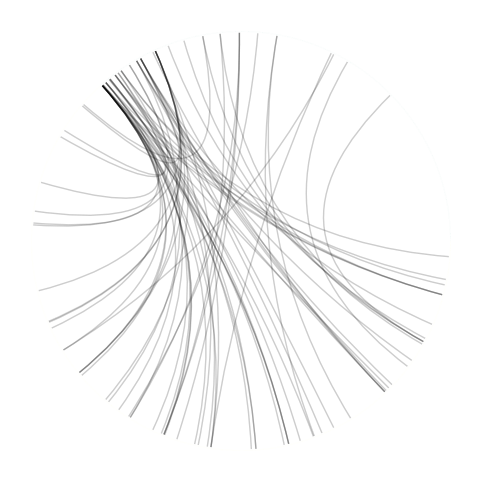

In [61]:
# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.nodes[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
nv.circos(G_sub, node_color_by='bipartite', group_by='bipartite', sort_by='dc');

## plot evolution of graph

In [66]:
dayone  = datetime(2004, 5, 14)
lastday = datetime(2004, 10, 26) 
print(dayone, lastday)

2004-05-14 00:00:00 2004-10-26 00:00:00


In [67]:
# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


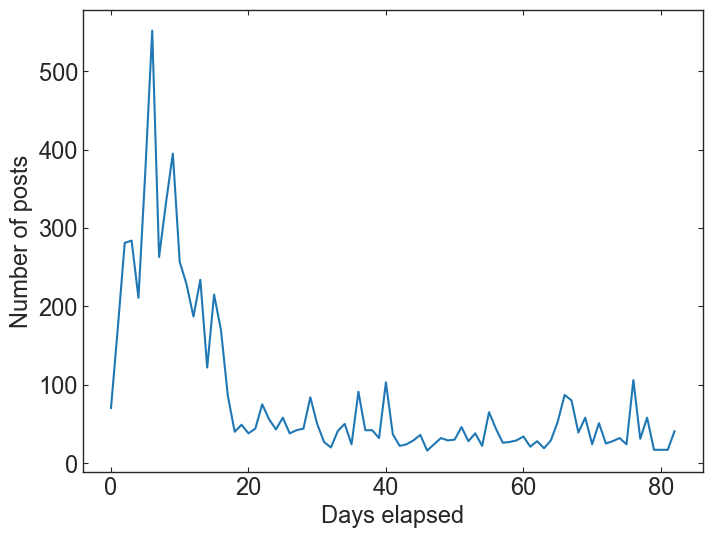

In [68]:
# Create the plot
fig, ax = plt.subplots()

ax.plot(n_posts)  
ax.set_xlabel('Days elapsed')
ax.set_ylabel('Number of posts');

### mean degree centrality day-by-day on the student partition

In [69]:
# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


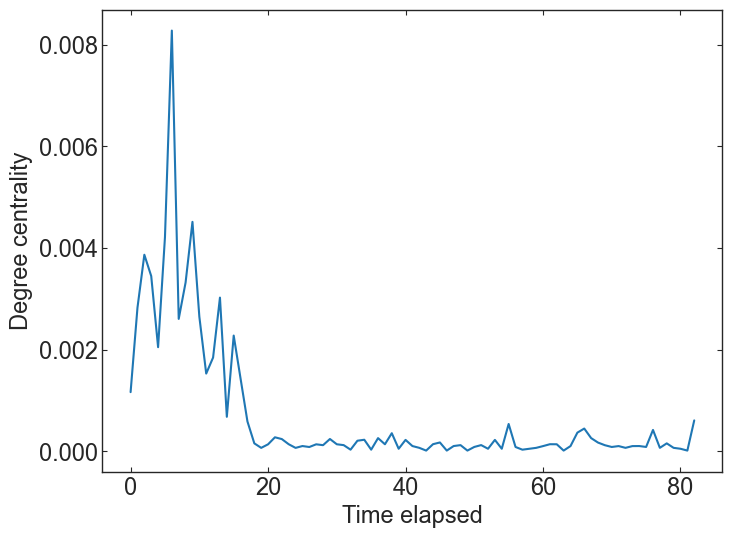

In [70]:
fig, ax = plt.subplots()

ax.plot(mean_dcs)
ax.set_xlabel('Time elapsed')
ax.set_ylabel('Degree centrality');

## Find the most popular forums day-by-day

In [72]:
most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, nodes=forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


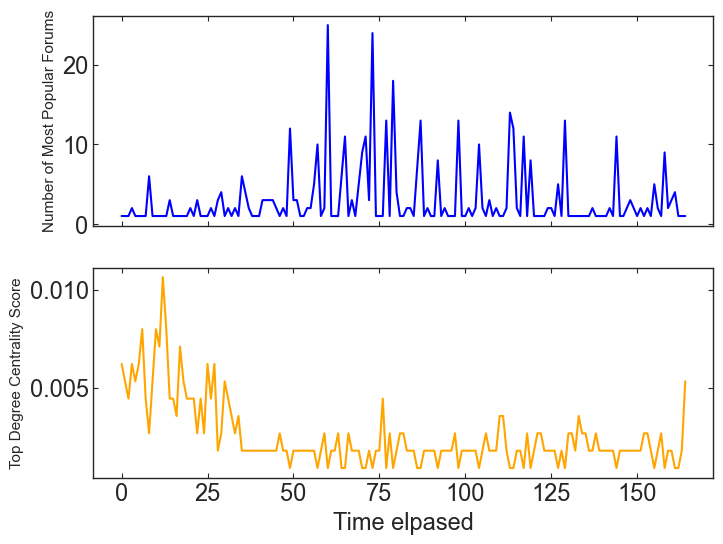

In [78]:
fig, axes = plt.subplots(2,1, sharex=True)

axes[0].plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
axes[0].set_ylabel('Number of Most Popular Forums', fontsize=11)

axes[1].plot(highest_dcs, color='orange', label='DC Score')
axes[1].set_ylabel('Top Degree Centrality Score', fontsize=11)
axes[1].set_xlabel('Time elpased');